
<h1><center> Project Report </center></h1>
<h1><center> Enhancing the performance of Deep Neural Network with the multiply node in Tensorflow. </center></h1>

<h1><center> by </center></h1>
<h1><center> Michael Asabere </center></h1>
<h1><center> Under the supervision of </center></h1>
<h1><center> Professor Martin Mohlenkamp </center></h1>

<h1><center> Department of Mathematics </center></h1>
<h1><center> Ohio University </center></h1>


# Abstract
As Professor Martin Mohlenkamp explained:
> There have been several recent papers proving bounds on how many nodes and layers are needed for a deep neural network (DNN) to approximate the multiplication operation $ (x_1 , x_2 ) \rightarrow x_1 * x_2 $ . This is considered exciting because multiplication allows you to do polynomials, which allows you to do many of the approximation methods from classical numerical analysis. Thus DNN could replace many of these classical methods and take over.
Upon learning of this work, my thought was "Well, if you want to do multiplication, then why not include a special node that multiplies?" Such nodes already exist in standard codes like TensorFlow. I suspect the reasons are: Too much focus on DNN since they are the hot method. And a mixed network with some multiplication nodes is even harder to analyze than a DNN.
The project is to explore how useful it is to include a few multiplication nodes in a DNN. More emphasis is laid on empirical testing on some standard Machine Learning problems or datasets.


# Introduction
The genesis of this project started with exploring the notion of basic machine learning concepts. Most of the information I gathered were from Tensorflow tutorials documentation. I gained experience with tutorial projects on image classification and regression problems. In this training I explored many ways of building a neural network with the Keras model in the tensorflow module together with numpy, pandas and matplotlib modules for array manipulation, data presentation and visualisations respectively. After a few weeks of practice with the Tensorflow tutorials documentation, I began to solve real problems addressing the focus of the project.

Neural network is a machine learning architecture built to mimic how the neurons of the human brain functions together. This architecture is a network of series of layers with multiple nodes interconnected to take in data, train this data to obtain a model that represents it and make predictions with this model. The first layer is the input layer, the last layer is the output layer and any layer in between these two layers is a hidden layer. Each of these layers contains nodes which receives data, assigns a weight to it and combines linearly with all other nodes and apply an activation function to the results of this combination. Neural networks with more hidden layers are referred to as deep networks, and shallow networks in contrast.

According to (Yarotsky, 2017) the expressive power of a deep neural network is much stronger than a shallow network, as a deep ReLU networks more efficiently
approximate smooth functions than shallow networks. The main task of this project was to first use empirical results to affirm this claim and to further examine if the use of the multiplication operation could contribute to the efficiency of a neural network.

# Research Problem 1
In the first part of this problem, I examined the learning process of the multiplication operation in neural networks.
The training dataset consist of training features which is a two column randomly generated numbers from the uniform distribution U(-1,1) and training target which is a product of these two columns. The goal was for the network to predict a product of two randomly generated numbers from the uniform distribution U(-1,1) and to measure the efficiency of the network with the Mean Squared Error as the number of hidden layer as well as the number of neurons increases.
Furthermore I examined the efficiency of the network by adding a special node which is an inbuilt multiply network designed for multiplication operations in Tensorflow.

In the second part of this problem, I examined the learning process of the multiplication operation for a polynomial function $ P(x) = x_1*x_2 + x_2*x_3 + x_{3}^2 $ in neural networks. The training dataset consist of training features which is a three column randomly generated numbers from the uniform distribution U(-1,1) and training target which is the functional value of the polynomial. The goal was to measure the efficiency of the network with the Mean Squared Error for a single hidden layer with varying number of neurons.

**Part 1**

In [1]:
# randomly generate n samples for 2 features(x1,x2) and a target(y) to train the model.

import numpy as np
import random
import tensorflow as tf
import pandas as pd

X_1 = np.random.uniform(-1,1,10000)
X_2 = np.random.uniform(-1,1,10000)
Y = np.multiply(X_1, X_2)

X_1 = np.array(X_1).reshape(10000,1)
X_2 = np.array(X_2).reshape(10000,1)
X = np.array([X_1,X_2]).reshape(2,10000).transpose()
Y = np.array(Y).reshape((10000,1))
X

array([[-0.20985108,  0.69779358],
       [ 0.17495763,  0.2851729 ],
       [-0.15220938, -0.57373884],
       ...,
       [-0.92444033, -0.73310357],
       [ 0.5936162 ,  0.7249745 ],
       [ 0.21453032,  0.04659931]])

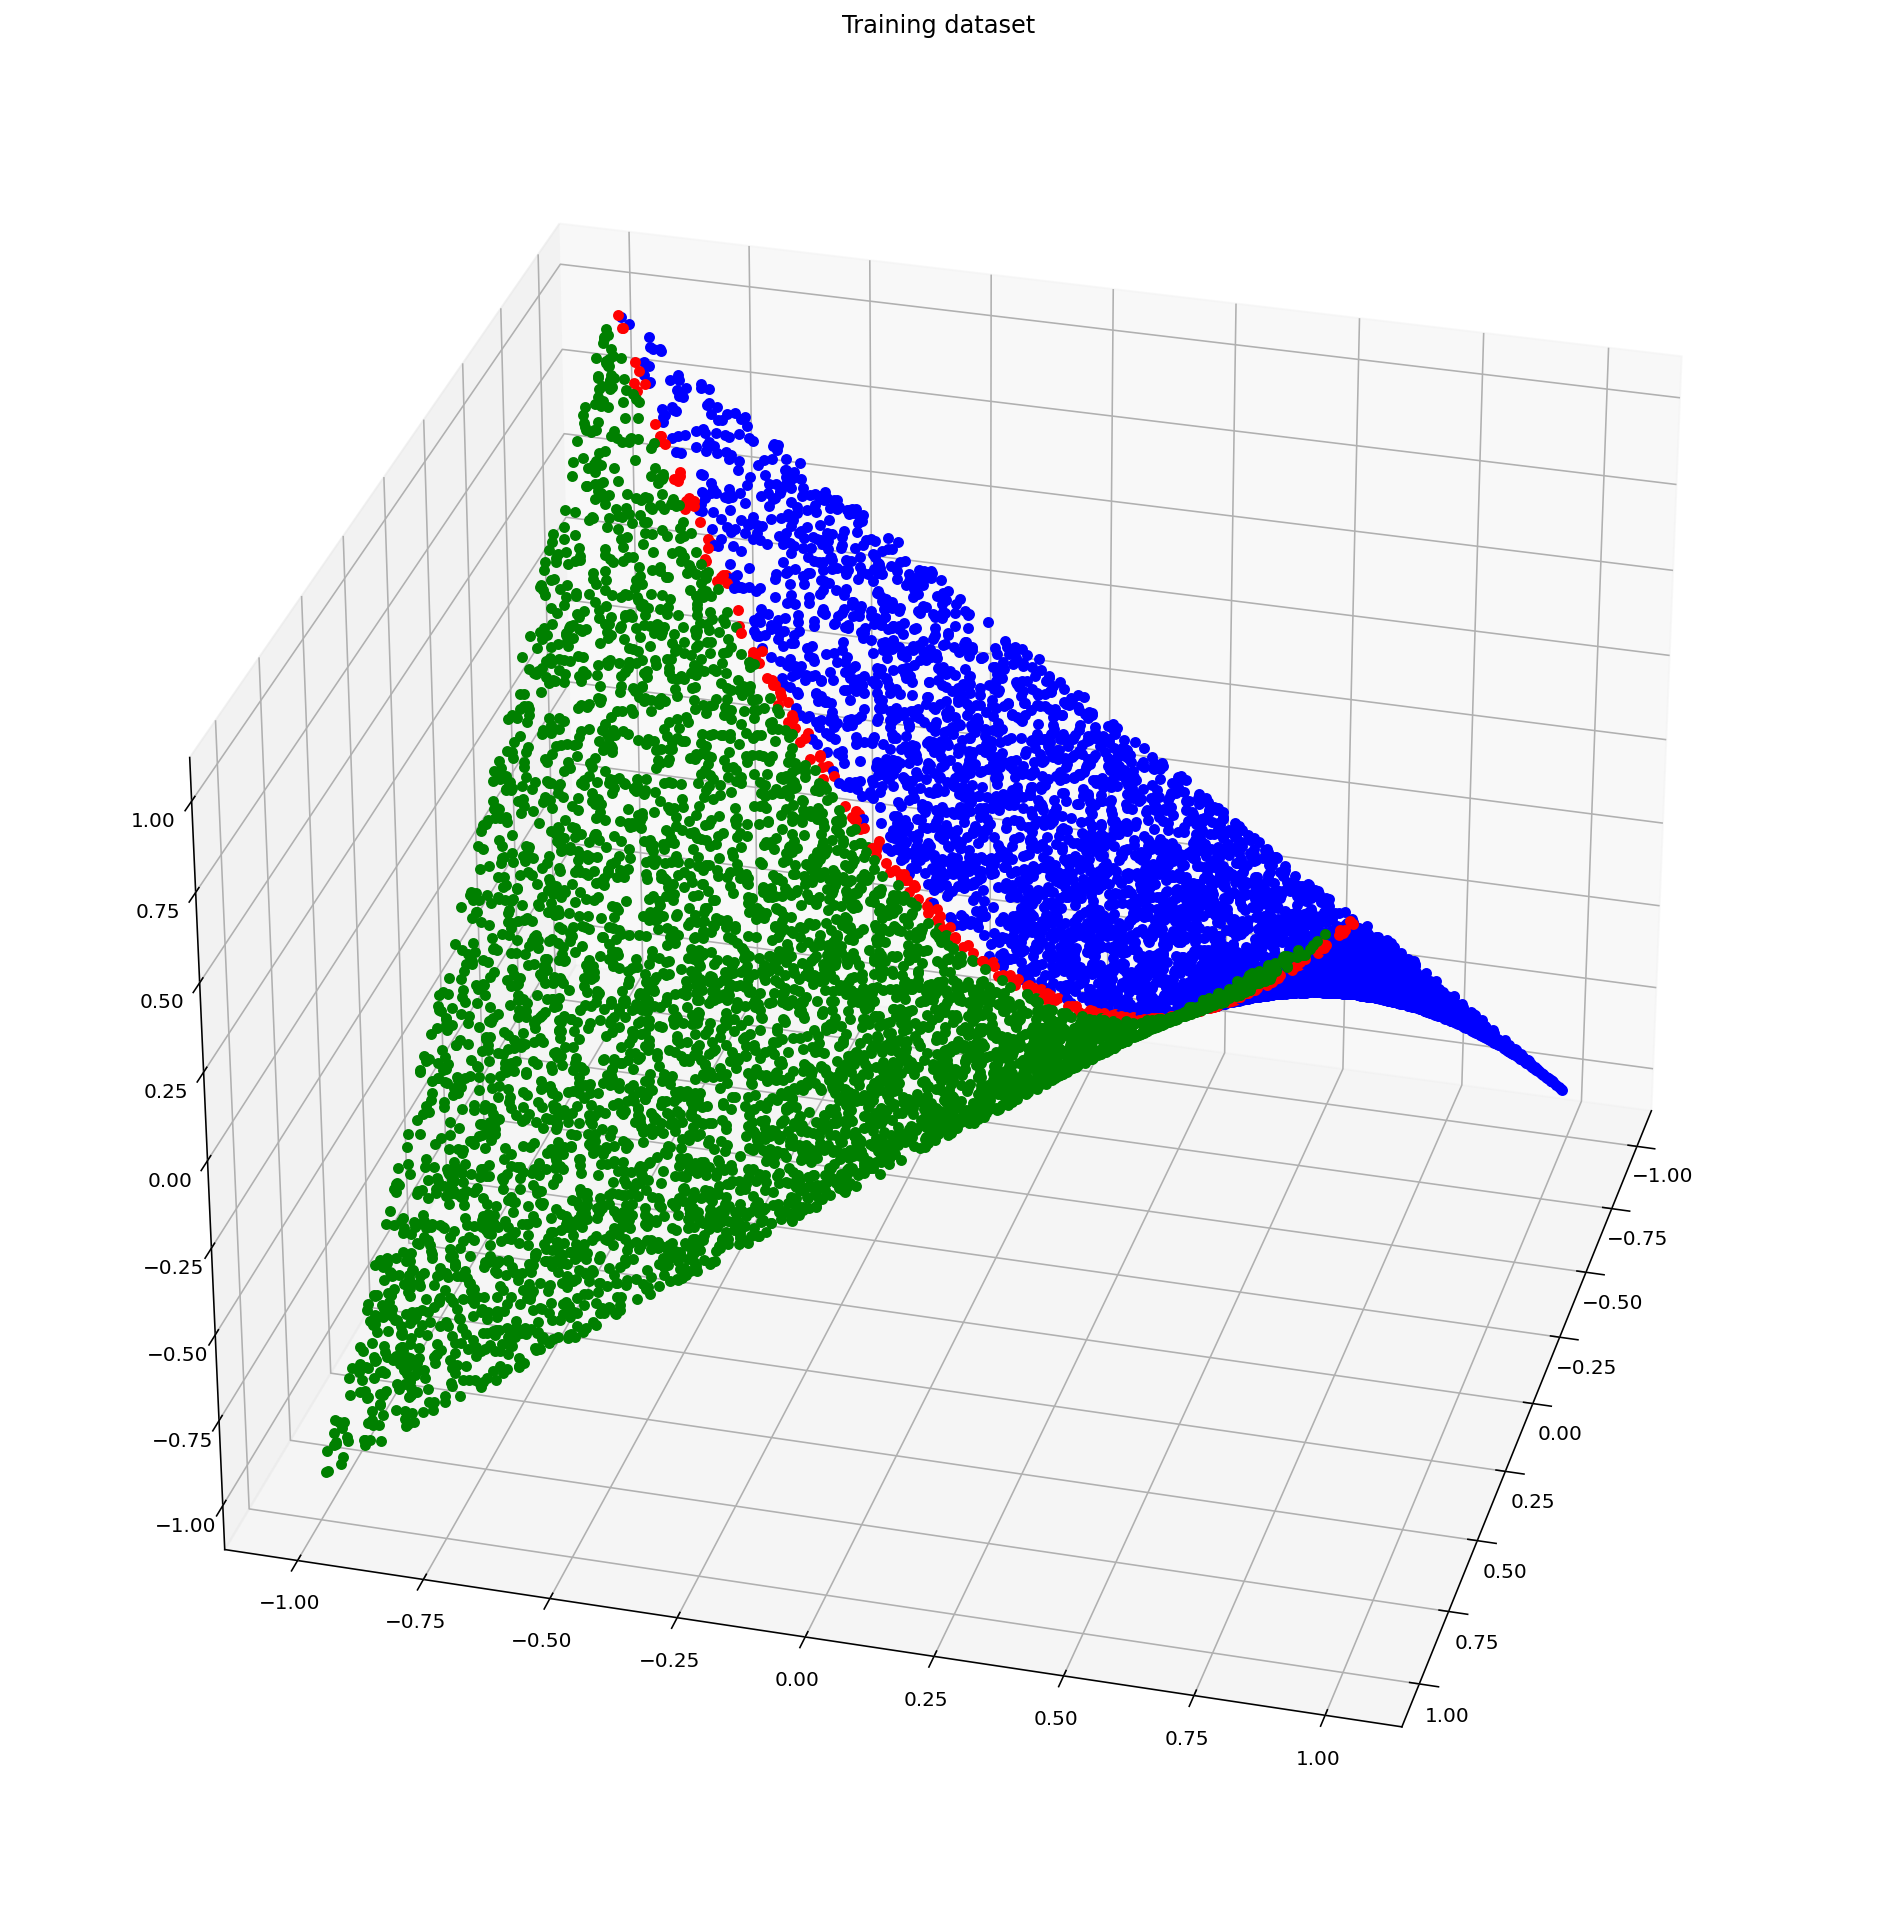

In [2]:
# Scattered plot for training features(x1,x2) against target(y).
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(17,17))
ax = fig.add_subplot(111, projection='3d')
for i in range(10000):
    if X_1[i] > X_2[i]+0.02:
        ax.scatter(X_1[i], X_2[i], Y[i], marker='o', color='green')
    elif X_1[i] < X_2[i]-0.02:
        ax.scatter(X_1[i], X_2[i], Y[i], marker='o', color='blue')
    else:
        ax.scatter(X_1[i], X_2[i], Y[i], marker='o', color='red')

ax.view_init(30, 15)
ax.set_title('Training dataset')
plt.show()

In [33]:
# Shallow network
# Create a model with a k neuron Dense hidden layer to perform the multiplication operation.

def model_assessement1(n):
    import tensorflow as tf
    from keras.callbacks import History
    history = History()

    inputs = tf.keras.layers.Input(shape=(2,))
    outputs = tf.keras.layers.Dense(n, activation='relu')(inputs)
    outputs = tf.keras.layers.Dense(1, activation='linear' )(outputs)
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer='Adam', loss='mean_squared_error')

    # fit a curve between the taining feature and the training target.
    # Adjust batch size for better training performance.
    hist = model.fit(X, Y, epochs=300, batch_size = 1000)

    #return is a list of keras model and mse from the model.
    return model, hist.history['loss'][299]

##
loss_fun1 = []
neuron1 = []
for neurons in np.arange(1,100,10):
    error = model_assessement1(neurons)
    loss_fun1.append(error[1])
    neuron1.append(neurons)

Epoch 1/300


 1/10 [==>...........................] - ETA: 6s - loss: 0.3170

10/10 [==============================] - 1s 2ms/step - loss: 0.3212


Epoch 2/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.3263

10/10 [==============================] - 0s 2ms/step - loss: 0.3060


Epoch 3/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.2995

10/10 [==============================] - 0s 1ms/step - loss: 0.2988


Epoch 4/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.2695

 3/10 [========>.....................] - ETA: 0s - loss: 0.2809

10/10 [==============================] - 0s 11ms/step - loss: 0.2814


Epoch 5/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.2780

10/10 [==============================] - 0s 2ms/step - loss: 0.2700


Epoch 6/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.2316

10/10 [==============================] - 0s 3ms/step - loss: 0.2488


Epoch 7/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.2620

10/10 [==============================] - 0s 2ms/step - loss: 0.2461


Epoch 8/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.2267

10/10 [==============================] - 0s 1ms/step - loss: 0.2365


Epoch 9/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.2153

10/10 [==============================] - 0s 2ms/step - loss: 0.2269


Epoch 10/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.2345

10/10 [==============================] - 0s 1ms/step - loss: 0.2222


Epoch 11/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.2009

10/10 [==============================] - 0s 2ms/step - loss: 0.2125


Epoch 12/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.2216

10/10 [==============================] - 0s 2ms/step - loss: 0.2081


Epoch 13/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.1977

 2/10 [=====>........................] - ETA: 0s - loss: 0.1994

10/10 [==============================]

 - 0s 8ms/step - loss: 0.2020


Epoch 14/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1955



10/10 [==============================] - 0s 1ms/step - loss: 0.1970


Epoch 15/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1961

10/10 [==============================] - 0s 1ms/step - loss: 0.1957


Epoch 16/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1832

10/10 [==============================] - 0s 2ms/step - loss: 0.1878


Epoch 17/300
 1/10 [==>...........................]

 - ETA: 0s - loss: 0.1796

10/10 [==============================] - 0s 2ms/step - loss: 0.1865


Epoch 18/300

 1/10 [==>...........................] - ETA: 0s - loss: 0.1827

 4/10 [===========>..................] - ETA: 0s - loss: 0.1848

10/10 [==============================] - 0s 7ms/step - loss: 0.1829


Epoch 19/300


 1/10 [==>...........................]

 - ETA: 0s - loss: 0.1702

10/10 [==============================] - 0s 3ms/step - loss: 0.1792


Epoch 20/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.1798

10/10 [==============================] - 0s 4ms/step - loss: 0.1780


Epoch 21/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.1729

 7/10 [====================>.........] - ETA: 0s - loss: 0.1737

10/10 [==============================] - 0s 8ms/step - loss: 0.1736


Epoch 22/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1694

10/10 [==============================] - 0s 1ms/step - loss: 0.1695


Epoch 23/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1641

 9/10 [==========================>...] - ETA: 0s - loss: 0.1661

10/10 [==============================] - 0s 7ms/step - loss: 0.1664


Epoch 24/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1654



 5/10 [==============>...............] - ETA: 0s - loss: 0.1662

10/10 [==============================] - 0s 10ms/step - loss: 0.1670


Epoch 25/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.1767

10/10 [==============================] - 0s 2ms/step - loss: 0.1666


Epoch 26/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1656

10/10 [==============================] - 0s 1ms/step - loss: 0.1636


Epoch 27/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1604

10/10 [==============================] - ETA: 0s - loss: 0.1615

10/10 [==============================] - 0s 7ms/step - loss: 0.1613


Epoch 28/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1588

10/10 [==============================] - 0s 3ms/step - loss: 0.1558


Epoch 29/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1515

 2/10 [=====>........................] - ETA: 0s - loss: 0.1544

10/10 [==============================] - 0s 9ms/step - loss: 0.1569


Epoch 30/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.1601

10/10 [==============================] - 0s 2ms/step - loss: 0.1544


Epoch 31/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.1560

10/10 [==============================] - 0s 2ms/step - loss: 0.1522


Epoch 32/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1526

10/10 [==============================] - 0s 2ms/step - loss: 0.1513


Epoch 33/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1484

10/10 [==============================] - 0s 3ms/step - loss: 0.1487


Epoch 34/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1506



 6/10 [=================>............] - ETA: 0s - loss: 0.1474

10/10 [==============================] - 0s 9ms/step - loss: 0.1473


Epoch 35/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.1530

 3/10 [========>.....................] - ETA: 0s - loss: 0.1502

10/10 [==============================] - 0s 10ms/step - loss: 0.1468


Epoch 36/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1418

10/10 [==============================] - 0s 1ms/step - loss: 0.1439


Epoch 37/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.1418

 9/10 [==========================>...] - ETA: 0s - loss: 0.1433

10/10 [==============================] - 0s 7ms/step - loss: 0.1431


Epoch 38/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1374

10/10 [==============================] - 0s 2ms/step - loss: 0.1400


Epoch 39/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1361

10/10 [==============================] - 0s 2ms/step - loss: 0.1391


Epoch 40/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.1387

10/10 [==============================] - 0s 2ms/step - loss: 0.1396


Epoch 41/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1448

10/10 [==============================] - 0s 1ms/step - loss: 0.1402


Epoch 42/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1294



 9/10 [==========================>...] - ETA: 0s - loss: 0.1345

10/10 [==============================]

 - 0s 7ms/step - loss: 0.1347


Epoch 43/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1324

10/10 [==============================] - 0s 3ms/step - loss: 0.1343


Epoch 44/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1313

10/10 [==============================]

 - ETA: 0s - loss: 0.1335

10/10 [==============================] - 0s 10ms/step - loss: 0.1334


Epoch 45/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1352

10/10 [==============================] - 0s 1ms/step - loss: 0.1330


Epoch 46/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1272

10/10 [==============================] - 0s 1ms/step - loss: 0.1312


Epoch 47/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1202

 2/10 [=====>........................] - ETA: 0s - loss: 0.1218



 5/10 [==============>...............] - ETA: 0s - loss: 0.1256

 6/10 [=================>............] - ETA: 0s - loss: 0.1262

10/10 [==============================] - 0s 30ms/step - loss: 0.1277


Epoch 48/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1262

 3/10 [========>.....................] - ETA: 0s - loss: 0.1277

10/10 [==============================] - 0s 10ms/step - loss: 0.1288


Epoch 49/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1328

 3/10 [========>.....................] - ETA: 0s - loss: 0.1296

10/10 [==============================] - 0s 12ms/step - loss: 0.1287


Epoch 50/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1347

 6/10 [=================>............] - ETA: 0s - loss: 0.1287

10/10 [==============================] - 0s 9ms/step - loss: 0.1273


Epoch 51/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.1179

10/10 [==============================] - 0s 1ms/step - loss: 0.1257


Epoch 52/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1220

 4/10 [===========>..................] - ETA: 0s - loss: 0.1221

 5/10 [==============>...............] - ETA: 0s - loss: 0.1222

 6/10 [=================>............] - ETA: 0s - loss: 0.1224

10/10 [==============================] - 0s 23ms/step - loss: 0.1234


Epoch 53/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1244

 5/10 [==============>...............] - ETA: 0s - loss: 0.1227

 8/10 [=======================>......] - ETA: 0s - loss: 0.1231

10/10 [==============================] - 0s 18ms/step - loss: 0.1231


Epoch 54/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1283

10/10 [==============================] - 0s 2ms/step - loss: 0.1245


Epoch 55/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1216

10/10 [==============================] - 0s 2ms/step - loss: 0.1208


Epoch 56/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1184

10/10 [==============================] - 0s 2ms/step - loss: 0.1200


Epoch 57/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1231



10/10 [==============================] - 0s 4ms/step - loss: 0.1198


Epoch 58/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.1182

 4/10 [===========>..................] - ETA: 0s - loss: 0.1210

10/10 [==============================] - 0s 13ms/step - loss: 0.1204


Epoch 59/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1281

 6/10 [=================>............] - ETA: 0s - loss: 0.1237



 9/10 [==========================>...] - ETA: 0s - loss: 0.1226

10/10 [==============================] - 0s 22ms/step - loss: 0.1219


Epoch 60/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1099

 6/10 [=================>............] - ETA: 0s - loss: 0.1153

10/10 [==============================] - 0s 7ms/step - loss: 0.1166


Epoch 61/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1107

10/10 [==============================] - 0s 4ms/step - loss: 0.1157


Epoch 62/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1200



10/10 [==============================] - ETA: 0s - loss: 0.1188

10/10 [==============================] - 0s 6ms/step - loss: 0.1186


Epoch 63/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1192

10/10 [==============================]

 - 0s 2ms/step - loss: 0.1150


Epoch 64/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1114

 2/10 [=====>........................] - ETA: 0s - loss: 0.1130

10/10 [==============================] - 0s 8ms/step - loss: 0.1145


Epoch 65/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1151

 4/10 [===========>..................] - ETA: 0s - loss: 0.1156

10/10 [==============================] - 0s 10ms/step - loss: 0.1146


Epoch 66/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1191

10/10 [==============================] - 0s 2ms/step - loss: 0.1146


Epoch 67/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1076

 8/10 [=======================>......] - ETA: 0s - loss: 0.1113

10/10 [==============================] - 0s 7ms/step - loss: 0.1118


Epoch 68/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1093

10/10 [==============================] - 0s 2ms/step - loss: 0.1116


Epoch 69/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1084

10/10 [==============================] - 0s 2ms/step - loss: 0.1102


Epoch 70/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1070

 5/10 [==============>...............] - ETA: 0s - loss: 0.1121

10/10 [==============================]

 - 0s 8ms/step - loss: 0.1123


Epoch 71/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1162

 6/10 [=================>............] - ETA: 0s - loss: 0.1127

10/10 [==============================] - 0s 12ms/step - loss: 0.1122


Epoch 72/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1096

10/10 [==============================] - 0s 1ms/step - loss: 0.1092


Epoch 73/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.1034



 3/10 [========>.....................] - ETA: 0s - loss: 0.1058

10/10 [==============================] - 0s 8ms/step - loss: 0.1080


Epoch 74/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.1165

10/10 [==============================] - 0s 2ms/step - loss: 0.1104


Epoch 75/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1152

 9/10 [==========================>...] - ETA: 0s - loss: 0.1100

10/10 [==============================] - 0s 6ms/step - loss: 0.1098


Epoch 76/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1089

10/10 [==============================] - 0s 2ms/step - loss: 0.1088


Epoch 77/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.1098

 9/10 [==========================>...] - ETA: 0s - loss: 0.1069

10/10 [==============================] - 0s 8ms/step - loss: 0.1071


Epoch 78/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1134

10/10 [==============================] - 0s 2ms/step - loss: 0.1079


Epoch 79/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.1047



 3/10 [========>.....................] - ETA: 0s - loss: 0.1067

10/10 [==============================] - 0s 11ms/step - loss: 0.1073


Epoch 80/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1087

10/10 [==============================] - 0s 1ms/step - loss: 0.1070


Epoch 81/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1034

 3/10 [========>.....................] - ETA: 0s - loss: 0.1040

10/10 [==============================] - 0s 11ms/step - loss: 0.1051


Epoch 82/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.1093

 9/10 [==========================>...] - ETA: 0s - loss: 0.1072

10/10 [==============================] - ETA: 0s - loss: 0.1071

10/10 [==============================] - 0s 21ms/step - loss: 0.1070


Epoch 83/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.1045

10/10 [==============================] - 0s 4ms/step - loss: 0.1045


Epoch 84/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.1024

 4/10 [===========>..................] - ETA: 0s - loss: 0.1030

 7/10 [====================>.........] - ETA: 0s - loss: 0.1041

10/10 [==============================] - 0s 33ms/step - loss: 0.1045


Epoch 85/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0924

10/10 [==============================] - 0s 2ms/step - loss: 0.1012


Epoch 86/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1132

10/10 [==============================] - ETA: 0s - loss: 0.1082

10/10 [==============================] - 0s 10ms/step - loss: 0.1078


Epoch 87/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.1043

10/10 [==============================] - 0s 2ms/step - loss: 0.1042


Epoch 88/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1049

 7/10 [====================>.........] - ETA: 0s - loss: 0.1041

10/10 [==============================] - 0s 8ms/step - loss: 0.1038


Epoch 89/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1035

 7/10 [====================>.........] - ETA: 0s - loss: 0.1026

10/10 [==============================] - 0s 14ms/step - loss: 0.1027


Epoch 90/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1091

 5/10 [==============>...............] - ETA: 0s - loss: 0.1051

10/10 [==============================] - 0s 7ms/step - loss: 0.1037


Epoch 91/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.1041



10/10 [==============================] - ETA: 0s - loss: 0.1031

10/10 [==============================] - 0s 21ms/step - loss: 0.1030


Epoch 92/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.0953

 4/10 [===========>..................] - ETA: 0s - loss: 0.0983

10/10 [==============================] - ETA: 0s - loss: 0.1004

10/10 [==============================] - 0s 21ms/step - loss: 0.1005


Epoch 93/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1028

10/10 [==============================] - 0s 1ms/step - loss: 0.1016


Epoch 94/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1078

10/10 [==============================] - 0s 2ms/step - loss: 0.1016


Epoch 95/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0990

 7/10 [====================>.........] - ETA: 0s - loss: 0.1006

10/10 [==============================] - 0s 10ms/step - loss: 0.1007


Epoch 96/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0932

 2/10 [=====>........................] - ETA: 0s - loss: 0.0942

 6/10 [=================>............] - ETA: 0s - loss: 0.0963

10/10 [==============================] - 0s 18ms/step - loss: 0.0982


Epoch 97/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1036

10/10 [==============================] - 0s 4ms/step - loss: 0.1016


Epoch 98/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0993

 4/10 [===========>..................] - ETA: 0s - loss: 0.1003

10/10 [==============================] - 0s 7ms/step - loss: 0.1000


Epoch 99/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0933

10/10 [==============================] - 0s 1ms/step - loss: 0.0966


Epoch 100/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0970

 7/10 [====================>.........] - ETA: 0s - loss: 0.0998

10/10 [==============================] - 0s 9ms/step - loss: 0.0994


Epoch 101/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1000

 6/10 [=================>............] - ETA: 0s - loss: 0.0977

10/10 [==============================] - 0s 11ms/step - loss: 0.0979


Epoch 102/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1010

10/10 [==============================] - 0s 3ms/step - loss: 0.0982


Epoch 103/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0901

 2/10 [=====>........................] - ETA: 0s - loss: 0.0920



10/10 [==============================] - 0s 7ms/step - loss: 0.0960


Epoch 104/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1000

10/10 [==============================] - 0s 1ms/step - loss: 0.0966


Epoch 105/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0941



 2/10 [=====>........................] - ETA: 0s - loss: 0.0947

 7/10 [====================>.........] - ETA: 0s - loss: 0.0962

10/10 [==============================] - 0s 18ms/step - loss: 0.0964


Epoch 106/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0992

10/10 [==============================] - 0s 1ms/step - loss: 0.0973


Epoch 107/300

 1/10 [==>...........................] - ETA: 0s - loss: 0.0988

10/10 [==============================] - 0s 1ms/step - loss: 0.0966


Epoch 108/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.0893

10/10 [==============================] - 0s 1ms/step - loss: 0.0955


Epoch 109/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.0988

10/10 [==============================] - 0s 2ms/step - loss: 0.0968


Epoch 110/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0907

10/10 [==============================] - 0s 1ms/step - loss: 0.0939


Epoch 111/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0935



 8/10 [=======================>......] - ETA: 0s - loss: 0.0935

10/10 [==============================] - ETA: 0s - loss: 0.0937

10/10 [==============================] - 0s 20ms/step - loss: 0.0938


Epoch 112/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1006

 6/10 [=================>............] - ETA: 0s - loss: 0.0949

10/10 [==============================] - 0s 11ms/step - loss: 0.0947


Epoch 113/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0934

10/10 [==============================] - ETA: 0s - loss: 0.0950

10/10 [==============================]

 - 0s 10ms/step - loss: 0.0949


Epoch 114/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0901



10/10 [==============================] - 0s 11ms/step - loss: 0.0929


Epoch 115/300


 1/10 [==>...........................]

 - ETA: 0s - loss: 0.0921

 2/10 [=====>........................] - ETA: 1s - loss: 0.0925

 3/10 [========>.....................] - ETA: 0s - loss: 0.0933



10/10 [==============================] - ETA: 0s - loss: 0.0934



10/10 [==============================] - 0s 46ms/step - loss: 0.0934


Epoch 116/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0860

10/10 [==============================] - 0s 3ms/step - loss: 0.0912


Epoch 117/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0988

 6/10 [=================>............] - ETA: 0s - loss: 0.0952

10/10 [==============================] - 0s 10ms/step - loss: 0.0941


Epoch 118/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0890

10/10 [==============================] - 0s 1ms/step - loss: 0.0916


Epoch 119/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0882

 6/10 [=================>............] - ETA: 0s - loss: 0.0921

10/10 [==============================] - 0s 10ms/step - loss: 0.0921


Epoch 120/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0926

10/10 [==============================] - 0s 1ms/step - loss: 0.0924


Epoch 121/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0834

10/10 [==============================] - 0s 1ms/step - loss: 0.0896


Epoch 122/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0933

 3/10 [========>.....................] - ETA: 0s - loss: 0.0938

10/10 [==============================] - 0s 7ms/step - loss: 0.0927


Epoch 123/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0963

10/10 [==============================] - 0s 2ms/step - loss: 0.0929


Epoch 124/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0849



 9/10 [==========================>...] - ETA: 0s - loss: 0.0876

10/10 [==============================] - 0s 8ms/step - loss: 0.0880


Epoch 125/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0934

 7/10 [====================>.........] - ETA: 0s - loss: 0.0896

10/10 [==============================] - 0s 13ms/step - loss: 0.0897


Epoch 126/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0921

10/10 [==============================] - 0s 2ms/step - loss: 0.0895


Epoch 127/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0947

10/10 [==============================] - 0s 2ms/step - loss: 0.0904


Epoch 128/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0861

 8/10 [=======================>......] - ETA: 0s - loss: 0.0885

10/10 [==============================] - 0s 7ms/step - loss: 0.0886


Epoch 129/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0926

10/10 [==============================] - 0s 2ms/step - loss: 0.0884


Epoch 130/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0842

10/10 [==============================]

 - 0s 1ms/step - loss: 0.0873


Epoch 131/300
 1/10 [==>...........................]

 - ETA: 0s - loss: 0.0956



 6/10 [=================>............] - ETA: 0s - loss: 0.0918

10/10 [==============================] - 0s 11ms/step - loss: 0.0903


Epoch 132/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0917

10/10 [==============================] - 0s 2ms/step - loss: 0.0879


Epoch 133/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0910

 9/10 [==========================>...] - ETA: 0s - loss: 0.0878

10/10 [==============================] - 0s 7ms/step - loss: 0.0878


Epoch 134/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0951

 6/10 [=================>............] - ETA: 0s - loss: 0.0890

10/10 [==============================]

 - 0s 11ms/step - loss: 0.0883


Epoch 135/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0914

 4/10 [===========>..................] - ETA: 0s - loss: 0.0901

10/10 [==============================] - 0s 11ms/step - loss: 0.0879


Epoch 136/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0881

 2/10 [=====>........................] - ETA: 0s - loss: 0.0882

 7/10 [====================>.........] - ETA: 0s - loss: 0.0869

10/10 [==============================] - 0s 20ms/step - loss: 0.0869


Epoch 137/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0755

 3/10 [========>.....................] - ETA: 0s - loss: 0.0805

10/10 [==============================] - 0s 10ms/step - loss: 0.0843


Epoch 138/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0800

 3/10 [========>.....................] - ETA: 0s - loss: 0.0812

 5/10 [==============>...............] - ETA: 0s - loss: 0.0825

 7/10 [====================>.........] - ETA: 0s - loss: 0.0837

10/10 [==============================] - 0s 29ms/step - loss: 0.0849


Epoch 139/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0840

10/10 [==============================] - 0s 1ms/step - loss: 0.0859


Epoch 140/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0873

10/10 [==============================] - 0s 1ms/step - loss: 0.0874


Epoch 141/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0804

 3/10 [========>.....................] - ETA: 0s - loss: 0.0837

10/10 [==============================] - 0s 8ms/step - loss: 0.0853


Epoch 142/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0853

 6/10 [=================>............] - ETA: 0s - loss: 0.0854

10/10 [==============================] - ETA: 0s - loss: 0.0855

10/10 [==============================] - 0s 24ms/step - loss: 0.0855


Epoch 143/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0896

10/10 [==============================] - 0s 1ms/step - loss: 0.0863


Epoch 144/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.0865

 2/10 [=====>........................] - ETA: 0s - loss: 0.0861

 6/10 [=================>............] - ETA: 0s - loss: 0.0855

 7/10 [====================>.........] - ETA: 0s - loss: 0.0855

 8/10 [=======================>......] - ETA: 0s - loss: 0.0854

10/10 [==============================]

 - 0s 44ms/step - loss: 0.0855


Epoch 145/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0784

10/10 [==============================] - ETA: 0s - loss: 0.0837

10/10 [==============================] - 0s 11ms/step - loss: 0.0839


Epoch 146/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.0757

 3/10 [========>.....................] - ETA: 0s - loss: 0.0818

10/10 [==============================] - 0s 11ms/step - loss: 0.0848


Epoch 147/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0882



 8/10 [=======================>......] - ETA: 0s - loss: 0.0853

10/10 [==============================] - 0s 7ms/step - loss: 0.0852


Epoch 148/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0871

10/10 [==============================] - 0s 2ms/step - loss: 0.0850


Epoch 149/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0846

10/10 [==============================] - 0s 1ms/step - loss: 0.0854


Epoch 150/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0914

 2/10 [=====>........................] - ETA: 0s - loss: 0.0899

 8/10 [=======================>......] - ETA: 0s - loss: 0.0854

10/10 [==============================] - 0s 22ms/step - loss: 0.0851


Epoch 151/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0855

 2/10 [=====>........................] - ETA: 0s - loss: 0.0847

10/10 [==============================] - 0s 7ms/step - loss: 0.0844


Epoch 152/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0877

10/10 [==============================] - 0s 1ms/step - loss: 0.0845


Epoch 153/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0810

10/10 [==============================] - 0s 1ms/step - loss: 0.0838


Epoch 154/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0779

 2/10 [=====>........................] - ETA: 0s - loss: 0.0794

10/10 [==============================] - 0s 7ms/step - loss: 0.0830


Epoch 155/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0862

10/10 [==============================] - 0s 2ms/step - loss: 0.0854


Epoch 156/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0846

 6/10 [=================>............] - ETA: 0s - loss: 0.0851

10/10 [==============================] - 0s 9ms/step - loss: 0.0847


Epoch 157/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.0943



10/10 [==============================] - 0s 2ms/step - loss: 0.0851


Epoch 158/300

 1/10 [==>...........................] - ETA: 0s - loss: 0.0830

 2/10 [=====>........................] - ETA: 0s - loss: 0.0851



10/10 [==============================] - 0s 8ms/step - loss: 0.0847


Epoch 159/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0824

10/10 [==============================] - 0s 1ms/step - loss: 0.0827


Epoch 160/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0760

10/10 [==============================] - 0s 1ms/step - loss: 0.0818


Epoch 161/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0793



10/10 [==============================] - ETA: 0s - loss: 0.0822

10/10 [==============================] - 0s 12ms/step - loss: 0.0824


Epoch 162/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.0933

10/10 [==============================] - 0s 2ms/step - loss: 0.0868


Epoch 163/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0924

10/10 [==============================] - ETA: 0s - loss: 0.0825

10/10 [==============================] - 0s 8ms/step - loss: 0.0826


Epoch 164/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0809

10/10 [==============================] - 0s 3ms/step - loss: 0.0818


Epoch 165/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0785

 2/10 [=====>........................] - ETA: 0s - loss: 0.0795

10/10 [==============================] - 0s 8ms/step - loss: 0.0825


Epoch 166/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0807



10/10 [==============================] - ETA: 0s - loss: 0.0826

10/10 [==============================] - 0s 11ms/step - loss: 0.0827


Epoch 167/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0887

 2/10 [=====>........................] - ETA: 0s - loss: 0.0874

10/10 [==============================] - 0s 9ms/step - loss: 0.0854


Epoch 168/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0744

 7/10 [====================>.........] - ETA: 0s - loss: 0.0800

10/10 [==============================] - 0s 9ms/step - loss: 0.0812


Epoch 169/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0783

10/10 [==============================] - 0s 1ms/step - loss: 0.0835


Epoch 170/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.0778

10/10 [==============================] - 0s 1ms/step - loss: 0.0821


Epoch 171/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.0937

10/10 [==============================] - 0s 3ms/step - loss: 0.0849


Epoch 172/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.0812

10/10 [==============================] - 0s 2ms/step - loss: 0.0836


Epoch 173/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.0824

 2/10 [=====>........................] - ETA: 0s - loss: 0.0828

 6/10 [=================>............] - ETA: 0s - loss: 0.0837

 8/10 [=======================>......] - ETA: 0s - loss: 0.0835

10/10 [==============================] - 0s 25ms/step - loss: 0.0833


Epoch 174/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0827

10/10 [==============================] - 0s 2ms/step - loss: 0.0839


Epoch 175/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0810

 4/10 [===========>..................] - ETA: 0s - loss: 0.0813

 8/10 [=======================>......] - ETA: 0s - loss: 0.0815

10/10 [==============================] - 0s 24ms/step - loss: 0.0818


Epoch 176/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0857

10/10 [==============================] - 0s 2ms/step - loss: 0.0841


Epoch 177/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0809

 9/10 [==========================>...] - ETA: 0s - loss: 0.0823

10/10 [==============================] - 0s 11ms/step - loss: 0.0823


Epoch 178/300
 1/10 [==>...........................]

 - ETA: 0s - loss: 0.0806



 4/10 [===========>..................] - ETA: 0s - loss: 0.0822

 6/10 [=================>............] - ETA: 0s - loss: 0.0823

 7/10 [====================>.........] - ETA: 0s - loss: 0.0821

10/10 [==============================] - 0s 36ms/step - loss: 0.0821


Epoch 179/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0887

 7/10 [====================>.........] - ETA: 0s - loss: 0.0850

10/10 [==============================] - 0s 11ms/step - loss: 0.0841


Epoch 180/300
 1/10 [==>...........................]

 - ETA: 0s - loss: 0.0809

 3/10 [========>.....................] - ETA: 0s - loss: 0.0817

10/10 [==============================] - 0s 8ms/step - loss: 0.0817


Epoch 181/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0868

10/10 [==============================] - ETA: 0s - loss: 0.0835

10/10 [==============================] - 0s 9ms/step - loss: 0.0833


Epoch 182/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0845

10/10 [==============================] - 0s 2ms/step - loss: 0.0824


Epoch 183/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0876

10/10 [==============================] - 0s 1ms/step - loss: 0.0830


Epoch 184/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.0776

 7/10 [====================>.........] - ETA: 0s - loss: 0.0811

10/10 [==============================] - 0s 8ms/step - loss: 0.0816


Epoch 185/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0752

10/10 [==============================] - 0s 1ms/step - loss: 0.0821


Epoch 186/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0826



 9/10 [==========================>...] - ETA: 0s - loss: 0.0822

10/10 [==============================] - 0s 10ms/step - loss: 0.0822


Epoch 187/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0930

10/10 [==============================] - 0s 1ms/step - loss: 0.0838


Epoch 188/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0780

10/10 [==============================] - 0s 2ms/step - loss: 0.0810


Epoch 189/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0829

10/10 [==============================] - 0s 2ms/step - loss: 0.0820


Epoch 190/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0750



10/10 [==============================] - 0s 1ms/step - loss: 0.0809


Epoch 191/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0888

10/10 [==============================] - 0s 2ms/step - loss: 0.0828


Epoch 192/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0790

 5/10 [==============>...............] - ETA: 0s - loss: 0.0796

10/10 [==============================] - 0s 14ms/step - loss: 0.0806


Epoch 193/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0763

10/10 [==============================] - 0s 2ms/step - loss: 0.0808


Epoch 194/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0798



 5/10 [==============>...............] - ETA: 0s - loss: 0.0820

10/10 [==============================] - 0s 7ms/step - loss: 0.0823


Epoch 195/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0728

10/10 [==============================] - 0s 2ms/step - loss: 0.0786


Epoch 196/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.0855

 4/10 [===========>..................] - ETA: 0s - loss: 0.0828

10/10 [==============================] - 0s 11ms/step - loss: 0.0821


Epoch 197/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0798

10/10 [==============================] - 0s 2ms/step - loss: 0.0823


Epoch 198/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.0867

10/10 [==============================] - 0s 1ms/step - loss: 0.0835


Epoch 199/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.0820

10/10 [==============================] - 0s 2ms/step - loss: 0.0815


Epoch 200/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0794

10/10 [==============================] - 0s 1ms/step - loss: 0.0804


Epoch 201/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0887

10/10 [==============================] - 0s 2ms/step - loss: 0.0833


Epoch 202/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0808

10/10 [==============================]

 - 0s 4ms/step - loss: 0.0818


Epoch 203/300


 1/10 [==>...........................] - ETA: 0s - loss: 0.0859

 4/10 [===========>..................] - ETA: 0s - loss: 0.0813

10/10 [==============================] - 0s 8ms/step - loss: 0.0816


Epoch 204/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0759

10/10 [==============================] - 0s 2ms/step - loss: 0.0794


Epoch 205/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0846

 2/10 [=====>........................] - ETA: 0s - loss: 0.0837

10/10 [==============================] - 0s 9ms/step - loss: 0.0821


Epoch 206/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0807

 7/10 [====================>.........] - ETA: 0s - loss: 0.0814

10/10 [==============================] - 0s 13ms/step - loss: 0.0814


Epoch 207/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0838

 3/10 [========>.....................] - ETA: 0s - loss: 0.0826

10/10 [==============================] - 0s 13ms/step - loss: 0.0814


Epoch 208/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0750

 3/10 [========>.....................] - ETA: 0s - loss: 0.0790

 6/10 [=================>............] - ETA: 0s - loss: 0.0805

10/10 [==============================] - 0s 22ms/step - loss: 0.0809


Epoch 209/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0844

10/10 [==============================] - 0s 2ms/step - loss: 0.0822


Epoch 210/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0830

 2/10 [=====>........................] - ETA: 0s - loss: 0.0808

10/10 [==============================] - 0s 10ms/step - loss: 0.0809


The tables below in **part 1** describes the Mean Squared Error of some varying number of neurons in a single hidden layer, two and three hidden layer networks respectively. With an optimal number of epochs, Mean Squared Error should decrease as the number of neurons increases. 

In [34]:
# Observe the mse of the model with varying number of neurons in a single hidden layer
pd.options.display.float_format = '{:,.12f}'.format
mse_error1 = pd.DataFrame({'neuron':neuron1, 'mse(1 hidden layer)':loss_fun1})
print(mse_error1)
best1 = mse_error1['neuron'][mse_error1['mse(1 hidden layer)'].idxmin()]
print('best number of neurons is', best1, 'with mse', mse_error1['mse(1 hidden layer)'].min())

   neuron  mse(1 hidden layer)
0       1       0.080061537027
1      11       0.000532715605
2      21       0.000183935826
3      31       0.000065297197
4      41       0.000038131699
5      51       0.000015490291
6      61       0.000010050038
7      71       0.000009349172
8      81       0.000007434019
9      91       0.000005410998
best number of neurons is 91 with mse 5.410997937360662e-06


In [37]:
# Deep network
# Create a model with two k neuron Dense hidden layers to perform the multiplication operation.

def model_assessement2(n,m):
    import tensorflow as tf
    from keras.callbacks import History
    history = History()

    inputs = tf.keras.layers.Input(shape=(2,))
    outputs = tf.keras.layers.Dense(n, activation='relu')(inputs)
    outputs = tf.keras.layers.Dense(m, activation='relu')(outputs)
    outputs = tf.keras.layers.Dense(1, activation='linear' )(outputs)
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer='Adam', loss='mean_squared_error')

    # fit a curve between the taining feature and the training target.
    # Adjust batch size for better training performance.
    hist = model.fit(X, Y, epochs=300, batch_size = 800)

    #return is a list of keras model and mse from the model.
    return model, hist.history['loss'][299]

##
loss_fun2 = []
neuron2 = []
for neurons in np.arange(1,100,10):
    error = model_assessement2(neurons, neurons)
    loss_fun2.append(error[1])
    neuron2.append(neurons)

Epoch 1/300


 1/13 [=>............................] - ETA: 9s - loss: 0.1055

10/13 [======================>.......] - ETA: 0s - loss: 0.1089

13/13 [==============================] - 1s 8ms/step - loss: 0.1099


Epoch 2/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1136

10/13 [======================>.......] - ETA: 0s - loss: 0.1133

13/13 [==============================] - 0s 7ms/step - loss: 0.1132


Epoch 3/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1049

13/13 [==============================] - 0s 2ms/step - loss: 0.1113


Epoch 4/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1254

 2/13 [===>..........................] - ETA: 0s - loss: 0.1232

13/13 [==============================] - 0s 8ms/step - loss: 0.1148


Epoch 5/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1231

 9/13 [===================>..........] - ETA: 0s - loss: 0.1146

13/13 [==============================] - 0s 6ms/step - loss: 0.1142


Epoch 6/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1097

13/13 [==============================] - 0s 2ms/step - loss: 0.1137


Epoch 7/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1191

 3/13 [=====>........................] - ETA: 0s - loss: 0.1151

13/13 [==============================] - 0s 6ms/step - loss: 0.1138


Epoch 8/300
 1/13 [=>............................]

 - ETA: 0s - loss: 0.1168



11/13 [========================>.....] - ETA: 0s - loss: 0.1146

13/13 [==============================] - 0s 6ms/step - loss: 0.1143


Epoch 9/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1219

 8/13 [=================>............] - ETA: 0s - loss: 0.1163

13/13 [==============================] - 0s 6ms/step - loss: 0.1149


Epoch 10/300
 1/13 [=>............................] - ETA: 0s - loss: 0.0988

13/13 [==============================] - 0s 1ms/step - loss: 0.1101


Epoch 11/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1147

 8/13 [=================>............]

 - ETA: 0s - loss: 0.1116

13/13 [==============================] - 0s 8ms/step - loss: 0.1120


Epoch 12/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1143

 2/13 [===>..........................] - ETA: 0s - loss: 0.1124

 7/13 [===============>..............] - ETA: 0s - loss: 0.1121

 8/13 [=================>............] - ETA: 0s - loss: 0.1122

13/13 [==============================] - 0s 23ms/step - loss: 0.1126


Epoch 13/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1091

13/13 [==============================] - 0s 2ms/step - loss: 0.1113


Epoch 14/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1103

 8/13 [=================>............] - ETA: 0s - loss: 0.1122

13/13 [==============================] - 0s 8ms/step - loss: 0.1126


Epoch 15/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1125

13/13 [==============================] - 0s 2ms/step - loss: 0.1119


Epoch 16/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1106

13/13 [==============================] - 0s 2ms/step - loss: 0.1131


Epoch 17/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1136

13/13 [==============================] - 0s 1ms/step - loss: 0.1126


Epoch 18/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1072

 2/13 [===>..........................] - ETA: 0s - loss: 0.1072

13/13 [==============================] - 0s 6ms/step - loss: 0.1127


Epoch 19/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1149

13/13 [==============================] - 0s 1ms/step - loss: 0.1128


Epoch 20/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1078

 2/13 [===>..........................] - ETA: 1s - loss: 0.1102

 4/13 [========>.....................] - ETA: 0s - loss: 0.1111

 5/13 [==========>...................] - ETA: 0s - loss: 0.1116

10/13 [======================>.......] - ETA: 0s - loss: 0.1129

13/13 [==============================] - 0s 33ms/step - loss: 0.1130


Epoch 21/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1218



 7/13 [===============>..............] - ETA: 0s - loss: 0.1151

 8/13 [=================>............] - ETA: 0s - loss: 0.1151

13/13 [==============================] - 0s 18ms/step - loss: 0.1143


Epoch 22/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1146

13/13 [==============================] - 0s 2ms/step - loss: 0.1139


Epoch 23/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1054

 6/13 [============>.................] - ETA: 0s - loss: 0.1073

13/13 [==============================] - 0s 8ms/step - loss: 0.1105


Epoch 24/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1123

13/13 [==============================]

 - 0s 3ms/step - loss: 0.1114


Epoch 25/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1189

13/13 [==============================] - 0s 2ms/step - loss: 0.1151


Epoch 26/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1109

13/13 [==============================] - 0s 2ms/step - loss: 0.1119


Epoch 27/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1144



13/13 [==============================] - 0s 3ms/step - loss: 0.1131


Epoch 28/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1172

13/13 [==============================] - 0s 3ms/step - loss: 0.1137


Epoch 29/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1119

 4/13 [========>.....................] - ETA: 0s - loss: 0.1108

13/13 [==============================] - ETA: 0s - loss: 0.1114

13/13 [==============================] - 0s 9ms/step - loss: 0.1115


Epoch 30/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1240

13/13 [==============================] - 0s 2ms/step - loss: 0.1136


Epoch 31/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1080

13/13 [==============================] - 0s 2ms/step - loss: 0.1117


Epoch 32/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1019

13/13 [==============================] - 0s 2ms/step - loss: 0.1111


Epoch 33/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1016



13/13 [==============================] - ETA: 0s - loss: 0.1107

13/13 [==============================] - 0s 7ms/step - loss: 0.1108


Epoch 34/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1123

13/13 [==============================] - 0s 2ms/step - loss: 0.1140


Epoch 35/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1230

13/13 [==============================] - 0s 2ms/step - loss: 0.1151


Epoch 36/300

 1/13 [=>............................] - ETA: 0s - loss: 0.1164

10/13 [======================>.......] - ETA: 0s - loss: 0.1145

13/13 [==============================] - 0s 6ms/step - loss: 0.1141


Epoch 37/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1162

13/13 [==============================] - 0s 3ms/step - loss: 0.1154


Epoch 38/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1073



 9/13 [===================>..........] - ETA: 0s - loss: 0.1092

13/13 [==============================] - 0s 10ms/step - loss: 0.1104


Epoch 39/300

 1/13 [=>............................] - ETA: 0s - loss: 0.1167

 6/13 [============>.................] - ETA: 0s - loss: 0.1122

12/13 [==========================>...] - ETA: 0s - loss: 0.1120

13/13 [==============================] - 0s 20ms/step - loss: 0.1121


Epoch 40/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1140

13/13 [==============================] - 0s 2ms/step - loss: 0.1133


Epoch 41/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1144

12/13 [==========================>...] - ETA: 0s - loss: 0.1122

13/13 [==============================] - 0s 7ms/step - loss: 0.1123


Epoch 42/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1110

10/13 [======================>.......] - ETA: 0s - loss: 0.1145

13/13 [==============================] - 0s 10ms/step - loss: 0.1140


Epoch 43/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1208



11/13 [========================>.....] - ETA: 0s - loss: 0.1136

13/13 [==============================] - 0s 6ms/step - loss: 0.1134


Epoch 44/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1080

13/13 [==============================] - 0s 1ms/step - loss: 0.1125


Epoch 45/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1018

 9/13 [===================>..........] - ETA: 0s - loss: 0.1082

13/13 [==============================] - 0s 6ms/step - loss: 0.1098


Epoch 46/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1156

13/13 [==============================] - 0s 2ms/step - loss: 0.1137


Epoch 47/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1169

 2/13 [===>..........................] - ETA: 0s - loss: 0.1175

13/13 [==============================] - 0s 6ms/step - loss: 0.1143


Epoch 48/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1136

13/13 [==============================] - 0s 2ms/step - loss: 0.1155


Epoch 49/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1068

13/13 [==============================] - 0s 2ms/step - loss: 0.1120


Epoch 50/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1134

13/13 [==============================] - ETA: 0s - loss: 0.1125

13/13 [==============================] - 0s 6ms/step - loss: 0.1125


Epoch 51/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1080

 6/13 [============>.................] - ETA: 0s - loss: 0.1094

13/13 [==============================] - 0s 9ms/step - loss: 0.1109


Epoch 52/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1116

13/13 [==============================] - ETA: 0s - loss: 0.1129

13/13 [==============================] - 0s 7ms/step - loss: 0.1129


Epoch 53/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1174

13/13 [==============================] - 0s 2ms/step - loss: 0.1141


Epoch 54/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1114

10/13 [======================>.......] - ETA: 0s - loss: 0.1146



13/13 [==============================] - 0s 5ms/step - loss: 0.1142


Epoch 55/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1214

13/13 [==============================] - 0s 2ms/step - loss: 0.1132


Epoch 56/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1139

 2/13 [===>..........................] - ETA: 0s - loss: 0.1126

11/13 [========================>.....] - ETA: 0s - loss: 0.1119

13/13 [==============================] - 0s 17ms/step - loss: 0.1121


Epoch 57/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1126

 8/13 [=================>............] - ETA: 0s - loss: 0.1118

13/13 [==============================] - 0s 7ms/step - loss: 0.1121


Epoch 58/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1081

10/13 [======================>.......] - ETA: 0s - loss: 0.1130

13/13 [==============================] - 0s 6ms/step - loss: 0.1131


Epoch 59/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1116

13/13 [==============================] - ETA: 0s - loss: 0.1119

13/13 [==============================] - 0s 6ms/step - loss: 0.1119


Epoch 60/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1062

13/13 [==============================] - 0s 2ms/step - loss: 0.1114


Epoch 61/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1126

 4/13 [========>.....................] - ETA: 0s - loss: 0.1116

13/13 [==============================] - 0s 6ms/step - loss: 0.1121


Epoch 62/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1171

 2/13 [===>..........................]

 - ETA: 0s - loss: 0.1159

13/13 [==============================] - 0s 6ms/step - loss: 0.1147


Epoch 63/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1082

13/13 [==============================] - 0s 1ms/step - loss: 0.1114


Epoch 64/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1064

 5/13 [==========>...................] - ETA: 0s - loss: 0.1112

13/13 [==============================] - 0s 7ms/step - loss: 0.1120


Epoch 65/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1234

 7/13 [===============>..............] - ETA: 0s - loss: 0.1162

13/13 [==============================] - 0s 7ms/step - loss: 0.1150


Epoch 66/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1161

11/13 [========================>.....] - ETA: 0s - loss: 0.1136

13/13 [==============================] - 0s 9ms/step - loss: 0.1135


Epoch 67/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1185

 8/13 [=================>............] - ETA: 0s - loss: 0.1139

13/13 [==============================] - ETA: 0s - loss: 0.1137

13/13 [==============================] - 0s 14ms/step - loss: 0.1136


Epoch 68/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1080

13/13 [==============================] - 0s 4ms/step - loss: 0.1132


Epoch 69/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1137

13/13 [==============================] - 0s 4ms/step - loss: 0.1135


Epoch 70/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1264

 6/13 [============>.................] - ETA: 0s - loss: 0.1179

13/13 [==============================] - 0s 7ms/step - loss: 0.1154


Epoch 71/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1024

 6/13 [============>.................] - ETA: 0s - loss: 0.1059

13/13 [==============================] - 0s 6ms/step - loss: 0.1094


Epoch 72/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1188

13/13 [==============================] - 0s 1ms/step - loss: 0.1139


Epoch 73/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1163

13/13 [==============================] - 0s 1ms/step - loss: 0.1142


Epoch 74/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1046

12/13 [==========================>...] - ETA: 0s - loss: 0.1126



13/13 [==============================] - 0s 8ms/step - loss: 0.1127


Epoch 75/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1157

 5/13 [==========>...................] - ETA: 0s - loss: 0.1150

13/13 [==============================] - 0s 8ms/step - loss: 0.1131


Epoch 76/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1123

 4/13 [========>.....................] - ETA: 0s - loss: 0.1097

13/13 [==============================] - 0s 11ms/step - loss: 0.1116


Epoch 77/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1164

 4/13 [========>.....................] - ETA: 0s - loss: 0.1155

 6/13 [============>.................] - ETA: 0s - loss: 0.1158

13/13 [==============================] - 0s 15ms/step - loss: 0.1150


Epoch 78/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1177

13/13 [==============================] - 0s 1ms/step - loss: 0.1155


Epoch 79/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1207

 3/13 [=====>........................] - ETA: 0s - loss: 0.1190

12/13 [==========================>...] - ETA: 0s - loss: 0.1153

13/13 [==============================] - 0s 13ms/step - loss: 0.1150


Epoch 80/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1145

13/13 [==============================] - 0s 2ms/step - loss: 0.1126


Epoch 81/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1170



13/13 [==============================] - 0s 3ms/step - loss: 0.1139


Epoch 82/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1177

13/13 [==============================] - 0s 2ms/step - loss: 0.1141


Epoch 83/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1163



 5/13 [==========>...................] - ETA: 0s - loss: 0.1141

13/13 [==============================] - 0s 8ms/step - loss: 0.1136


Epoch 84/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1067

 2/13 [===>..........................] - ETA: 0s - loss: 0.1062

 9/13 [===================>..........] - ETA: 0s - loss: 0.1099

13/13 [==============================] - 0s 14ms/step - loss: 0.1109


Epoch 85/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1034



13/13 [==============================] - 0s 2ms/step - loss: 0.1116


Epoch 86/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1123

 2/13 [===>..........................] - ETA: 0s - loss: 0.1119

13/13 [==============================] - 0s 6ms/step - loss: 0.1138


Epoch 87/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1103

 4/13 [========>.....................] - ETA: 0s - loss: 0.1127

13/13 [==============================] - 0s 9ms/step - loss: 0.1125


Epoch 88/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1237



 6/13 [============>.................] - ETA: 0s - loss: 0.1166

13/13 [==============================] - 0s 6ms/step - loss: 0.1143


Epoch 89/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1120

13/13 [==============================] - 0s 1ms/step - loss: 0.1133


Epoch 90/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1147



13/13 [==============================] - ETA: 0s - loss: 0.1144

13/13 [==============================] - 0s 9ms/step - loss: 0.1143


Epoch 91/300


 1/13 [=>............................]

 - ETA: 0s - loss: 0.1069

13/13 [==============================] - 0s 3ms/step - loss: 0.1123


Epoch 92/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1142

 6/13 [============>.................] - ETA: 0s - loss: 0.1163

13/13 [==============================] - 0s 12ms/step - loss: 0.1145


Epoch 93/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1161

13/13 [==============================] - 0s 4ms/step - loss: 0.1132


Epoch 94/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1084

 7/13 [===============>..............] - ETA: 0s - loss: 0.1099

13/13 [==============================] - 0s 9ms/step - loss: 0.1108


Epoch 95/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1099

13/13 [==============================] - 0s 2ms/step - loss: 0.1142


Epoch 96/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1035

10/13 [======================>.......] - ETA: 0s - loss: 0.1114

13/13 [==============================] - 0s 7ms/step - loss: 0.1119


Epoch 97/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1168

13/13 [==============================] - 0s 2ms/step - loss: 0.1140


Epoch 98/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1089

13/13 [==============================] - 0s 2ms/step - loss: 0.1121


Epoch 99/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1144

13/13 [==============================] - 0s 1ms/step - loss: 0.1129


Epoch 100/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1107

 7/13 [===============>..............] - ETA: 0s - loss: 0.1116

13/13 [==============================] - 0s 6ms/step - loss: 0.1124


Epoch 101/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1129

13/13 [==============================] - 0s 1ms/step - loss: 0.1136


Epoch 102/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1092

 8/13 [=================>............] - ETA: 0s - loss: 0.1121

13/13 [==============================] - 0s 7ms/step - loss: 0.1127


Epoch 103/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1161

 8/13 [=================>............] - ETA: 0s - loss: 0.1138

13/13 [==============================] - 0s 7ms/step - loss: 0.1136


Epoch 104/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1213

 9/13 [===================>..........] - ETA: 0s - loss: 0.1141

13/13 [==============================] - 0s 6ms/step - loss: 0.1137


Epoch 105/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1105

13/13 [==============================] - 0s 2ms/step - loss: 0.1132


Epoch 106/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1150

 9/13 [===================>..........] - ETA: 0s - loss: 0.1122

13/13 [==============================] - 0s 6ms/step - loss: 0.1124


Epoch 107/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1167



13/13 [==============================] - ETA: 0s - loss: 0.1140

13/13 [==============================] - 0s 7ms/step - loss: 0.1140


Epoch 108/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1072

 4/13 [========>.....................] - ETA: 0s - loss: 0.1105

 9/13 [===================>..........] - ETA: 0s - loss: 0.1119

13/13 [==============================] - 0s 16ms/step - loss: 0.1125


Epoch 109/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1113

 9/13 [===================>..........] - ETA: 0s - loss: 0.1128

13/13 [==============================] - 0s 8ms/step - loss: 0.1128


Epoch 110/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1050

 2/13 [===>..........................] - ETA: 1s - loss: 0.1092



 3/13 [=====>........................] - ETA: 0s - loss: 0.1112

 5/13 [==========>...................] - ETA: 0s - loss: 0.1122

13/13 [==============================] - 0s 24ms/step - loss: 0.1129


Epoch 111/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1155

13/13 [==============================] - 0s 2ms/step - loss: 0.1135


Epoch 112/300
 1/13 [=>............................] - ETA: 0s - loss: 0.0965

 3/13 [=====>........................] - ETA: 0s - loss: 0.1052

 6/13 [============>.................] - ETA: 0s - loss: 0.1090

11/13 [========================>.....] - ETA: 0s - loss: 0.1113

13/13 [==============================] - 0s 21ms/step - loss: 0.1117


Epoch 113/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1137

13/13 [==============================] - 0s 4ms/step - loss: 0.1136


Epoch 114/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1256

13/13 [==============================] - 0s 2ms/step - loss: 0.1154


Epoch 115/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1131

13/13 [==============================] - 0s 1ms/step - loss: 0.1139


Epoch 116/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1152

13/13 [==============================] - 0s 3ms/step - loss: 0.1129


Epoch 117/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1107

13/13 [==============================] - 0s 2ms/step - loss: 0.1137


Epoch 118/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1173

13/13 [==============================] - 0s 1ms/step - loss: 0.1132


Epoch 119/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1103

 8/13 [=================>............] - ETA: 0s - loss: 0.1115



13/13 [==============================] - 0s 5ms/step - loss: 0.1120


Epoch 120/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1011

10/13 [======================>.......] - ETA: 0s - loss: 0.1113

13/13 [==============================] - 0s 8ms/step - loss: 0.1117


Epoch 121/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1137

13/13 [==============================] - 0s 2ms/step - loss: 0.1139


Epoch 122/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1086

10/13 [======================>.......] - ETA: 0s - loss: 0.1128

13/13 [==============================] - 0s 6ms/step - loss: 0.1128


Epoch 123/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1184

13/13 [==============================] - 0s 2ms/step - loss: 0.1139


Epoch 124/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1126

10/13 [======================>.......] - ETA: 0s - loss: 0.1128

13/13 [==============================] - 0s 7ms/step - loss: 0.1129


Epoch 125/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1092

 9/13 [===================>..........] - ETA: 0s - loss: 0.1101

13/13 [==============================] - 0s 6ms/step - loss: 0.1110


Epoch 126/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1052

13/13 [==============================] - 0s 1ms/step - loss: 0.1108


Epoch 127/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1061

10/13 [======================>.......] - ETA: 0s - loss: 0.1123

13/13 [==============================] - 0s 6ms/step - loss: 0.1125


Epoch 128/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1071

13/13 [==============================] - 0s 2ms/step - loss: 0.1110


Epoch 129/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1120

12/13 [==========================>...] - ETA: 0s - loss: 0.1109

13/13 [==============================] - 0s 6ms/step - loss: 0.1112


Epoch 130/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1196

13/13 [==============================] - 0s 2ms/step - loss: 0.1137


Epoch 131/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1135

 2/13 [===>..........................] - ETA: 0s - loss: 0.1132

13/13 [==============================] - 0s 6ms/step - loss: 0.1119


Epoch 132/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1047

13/13 [==============================] - 0s 2ms/step - loss: 0.1124


Epoch 133/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1161

 2/13 [===>..........................] - ETA: 0s - loss: 0.1152

13/13 [==============================] - 0s 7ms/step - loss: 0.1129


Epoch 134/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1082

13/13 [==============================] - 0s 2ms/step - loss: 0.1127


Epoch 135/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1136

13/13 [==============================] - 0s 3ms/step - loss: 0.1122


Epoch 136/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1199

 2/13 [===>..........................] - ETA: 0s - loss: 0.1160

13/13 [==============================] - 0s 8ms/step - loss: 0.1134


Epoch 137/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1102

 2/13 [===>..........................] - ETA: 0s - loss: 0.1116

13/13 [==============================] - 0s 6ms/step - loss: 0.1121


Epoch 138/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1067

13/13 [==============================] - 0s 2ms/step - loss: 0.1122


Epoch 139/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1195

13/13 [==============================] - 0s 2ms/step - loss: 0.1153


Epoch 140/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1084

10/13 [======================>.......] - ETA: 0s - loss: 0.1135

13/13 [==============================] - 0s 7ms/step - loss: 0.1133


Epoch 141/300

 1/13 [=>............................] - ETA: 0s - loss: 0.1159

13/13 [==============================] - 0s 2ms/step - loss: 0.1128


Epoch 142/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1207

 5/13 [==========>...................] - ETA: 0s - loss: 0.1190

12/13 [==========================>...] - ETA: 0s - loss: 0.1155

13/13 [==============================] - 0s 13ms/step - loss: 0.1151


Epoch 143/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1122

11/13 [========================>.....] - ETA: 0s - loss: 0.1108

13/13 [==============================] - 0s 7ms/step - loss: 0.1112


Epoch 144/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1125

13/13 [==============================] - 0s 1ms/step - loss: 0.1125


Epoch 145/300


 1/13 [=>............................]

 - ETA: 0s - loss: 0.1160

 3/13 [=====>........................] - ETA: 0s - loss: 0.1134

13/13 [==============================] - 0s 12ms/step - loss: 0.1134


Epoch 146/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1106

 6/13 [============>.................] - ETA: 0s - loss: 0.1116

13/13 [==============================] - 0s 10ms/step - loss: 0.1126


Epoch 147/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1155

11/13 [========================>.....] - ETA: 0s - loss: 0.1131

13/13 [==============================] - 0s 9ms/step - loss: 0.1131


Epoch 148/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1209

13/13 [==============================] - ETA: 0s - loss: 0.1145

13/13 [==============================] - 0s 15ms/step - loss: 0.1144


Epoch 149/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1101

 9/13 [===================>..........] - ETA: 0s - loss: 0.1114

11/13 [========================>.....] - ETA: 0s - loss: 0.1117

12/13 [==========================>...] - ETA: 0s - loss: 0.1118

13/13 [==============================] - 0s 27ms/step - loss: 0.1120


Epoch 150/300


 1/13 [=>............................] - ETA: 1s - loss: 0.1117



13/13 [==============================] - 0s 4ms/step - loss: 0.1127


Epoch 151/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1119

12/13 [==========================>...] - ETA: 0s - loss: 0.1112

13/13 [==============================] - 0s 11ms/step - loss: 0.1114


Epoch 152/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1156



13/13 [==============================] - ETA: 0s - loss: 0.1125

13/13 [==============================] - 0s 6ms/step - loss: 0.1125


Epoch 153/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1166

 2/13 [===>..........................] - ETA: 0s - loss: 0.1138

 6/13 [============>.................] - ETA: 0s - loss: 0.1136

13/13 [==============================] - 0s 10ms/step - loss: 0.1135


Epoch 154/300


 1/13 [=>............................]

 - ETA: 0s - loss: 0.1190

 9/13 [===================>..........] - ETA: 0s - loss: 0.1140

13/13 [==============================] - 0s 8ms/step - loss: 0.1135


Epoch 155/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1233

 5/13 [==========>...................] - ETA: 0s - loss: 0.1182

13/13 [==============================] - 0s 9ms/step - loss: 0.1157


Epoch 156/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1100

13/13 [==============================] - ETA: 0s - loss: 0.1135

13/13 [==============================] - 0s 5ms/step - loss: 0.1134


Epoch 157/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1161



 7/13 [===============>..............] - ETA: 0s - loss: 0.1153

13/13 [==============================] - 0s 10ms/step - loss: 0.1146


Epoch 158/300


 1/13 [=>............................]

 - ETA: 0s - loss: 0.1103

 9/13 [===================>..........] - ETA: 0s - loss: 0.1137

13/13 [==============================] - 0s 8ms/step - loss: 0.1135


Epoch 159/300
 1/13 [=>............................] - ETA: 0s - loss: 0.0986

 2/13 [===>..........................] - ETA: 0s - loss: 0.1014

13/13 [==============================] - 0s 7ms/step - loss: 0.1104


Epoch 160/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1192

13/13 [==============================] - 0s 1ms/step - loss: 0.1125


Epoch 161/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1107

 4/13 [========>.....................] - ETA: 0s - loss: 0.1112

13/13 [==============================] - 0s 7ms/step - loss: 0.1118


Epoch 162/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1050

 9/13 [===================>..........] - ETA: 0s - loss: 0.1106

13/13 [==============================]

 - 0s 6ms/step - loss: 0.1114


Epoch 163/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1180

12/13 [==========================>...] - ETA: 0s - loss: 0.1141

13/13 [==============================] - 0s 6ms/step - loss: 0.1139


Epoch 164/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1233

13/13 [==============================] - 0s 3ms/step - loss: 0.1156


Epoch 165/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1246

13/13 [==============================] - 0s 2ms/step - loss: 0.1149


Epoch 166/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1167

13/13 [==============================] - 0s 2ms/step - loss: 0.1141


Epoch 167/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1151

13/13 [==============================] - 0s 2ms/step - loss: 0.1143


Epoch 168/300


 1/13 [=>............................] - ETA: 1s - loss: 0.1098

 7/13 [===============>..............] - ETA: 0s - loss: 0.1144



13/13 [==============================] - 0s 6ms/step - loss: 0.1138


Epoch 169/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1222

13/13 [==============================] - ETA: 0s - loss: 0.1152

13/13 [==============================] - 0s 8ms/step - loss: 0.1150


Epoch 170/300


 1/13 [=>............................]

 - ETA: 0s - loss: 0.1169



 3/13 [=====>........................] - ETA: 0s - loss: 0.1161

13/13 [==============================] - 0s 8ms/step - loss: 0.1143


Epoch 171/300

 1/13 [=>............................] - ETA: 0s - loss: 0.1163

 7/13 [===============>..............] - ETA: 0s - loss: 0.1176

13/13 [==============================] - 0s 10ms/step - loss: 0.1154


Epoch 172/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1099

 7/13 [===============>..............] - ETA: 0s - loss: 0.1137

13/13 [==============================] - 0s 8ms/step - loss: 0.1136


Epoch 173/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1079

13/13 [==============================] - 0s 2ms/step - loss: 0.1117


Epoch 174/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1148

 6/13 [============>.................] - ETA: 0s - loss: 0.1134



13/13 [==============================] - 0s 6ms/step - loss: 0.1131


Epoch 175/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1097

11/13 [========================>.....] - ETA: 0s - loss: 0.1112

13/13 [==============================] - 0s 8ms/step - loss: 0.1116


Epoch 176/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1115

13/13 [==============================] - 0s 2ms/step - loss: 0.1133


Epoch 177/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1096

13/13 [==============================] - 0s 3ms/step - loss: 0.1124


Epoch 178/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1196

 8/13 [=================>............] - ETA: 0s - loss: 0.1137

13/13 [==============================] - 0s 7ms/step - loss: 0.1139


Epoch 179/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1095

 2/13 [===>..........................] - ETA: 0s - loss: 0.1109

 4/13 [========>.....................] - ETA: 0s - loss: 0.1115

 7/13 [===============>..............] - ETA: 0s - loss: 0.1121



 8/13 [=================>............] - ETA: 0s - loss: 0.1124

13/13 [==============================] - 0s 32ms/step - loss: 0.1128


Epoch 180/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1194

 6/13 [============>.................] - ETA: 0s - loss: 0.1124

13/13 [==============================] - 0s 8ms/step - loss: 0.1123


Epoch 181/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1175

 2/13 [===>..........................] - ETA: 0s - loss: 0.1178

13/13 [==============================] - 0s 8ms/step - loss: 0.1140


Epoch 182/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1125

13/13 [==============================] - 0s 2ms/step - loss: 0.1127


Epoch 183/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1179



12/13 [==========================>...] - ETA: 0s - loss: 0.1148

13/13 [==============================] - 0s 7ms/step - loss: 0.1146


Epoch 184/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1167

13/13 [==============================] - 0s 2ms/step - loss: 0.1133


Epoch 185/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1079

13/13 [==============================] - 0s 1ms/step - loss: 0.1123


Epoch 186/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1172

13/13 [==============================] - 0s 1ms/step - loss: 0.1130


Epoch 187/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1154

 3/13 [=====>........................]

 - ETA: 0s - loss: 0.1163

13/13 [==============================] - 0s 6ms/step - loss: 0.1140


Epoch 188/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1171



 4/13 [========>.....................] - ETA: 0s - loss: 0.1132

13/13 [==============================] - 0s 8ms/step - loss: 0.1128


Epoch 189/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1138

13/13 [==============================] - 0s 1ms/step - loss: 0.1132


Epoch 190/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1118

13/13 [==============================] - 0s 2ms/step - loss: 0.1125


Epoch 191/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1137

 7/13 [===============>..............] - ETA: 0s - loss: 0.1138

13/13 [==============================] - 0s 6ms/step - loss: 0.1137


Epoch 192/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1120

 2/13 [===>..........................] - ETA: 0s - loss: 0.1125

12/13 [==========================>...] - ETA: 0s - loss: 0.1131

13/13 [==============================] - 0s 14ms/step - loss: 0.1131


Epoch 193/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1156

13/13 [==============================] - 0s 2ms/step - loss: 0.1144


Epoch 194/300


 1/13 [=>............................] - ETA: 0s - loss: 0.1094

13/13 [==============================] - 0s 3ms/step - loss: 0.1112


Epoch 195/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1088

 5/13 [==========>...................] - ETA: 0s - loss: 0.1112

13/13 [==============================] - 0s 6ms/step - loss: 0.1117


Epoch 196/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1100

 5/13 [==========>...................] - ETA: 0s - loss: 0.1115

13/13 [==============================] - 0s 7ms/step - loss: 0.1126


Epoch 197/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1161

 7/13 [===============>..............] - ETA: 0s - loss: 0.1162

13/13 [==============================] - 0s 12ms/step - loss: 0.1148


Epoch 198/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1067

 6/13 [============>.................] - ETA: 0s - loss: 0.1134

10/13 [======================>.......] - ETA: 0s - loss: 0.1136

13/13 [==============================] - 0s 12ms/step - loss: 0.1134


Epoch 199/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1186

 8/13 [=================>............] - ETA: 0s - loss: 0.1129



13/13 [==============================] - 0s 9ms/step - loss: 0.1127


Epoch 200/300
 1/13 [=>............................] - ETA: 0s - loss: 0.1171

 3/13 [=====>........................] - ETA: 0s - loss: 0.1135

In [38]:
# Observe the mse of the model with varying number of neurons in two hidden layers
pd.options.display.float_format = '{:,.12f}'.format
mse_error2 = pd.DataFrame({'neuron':neuron2, 'mse(1 hidden layer)':loss_fun2})
print(mse_error2)
best2 = mse_error2['neuron'][mse_error2['mse(1 hidden layer)'].idxmin()]
print('best number of neurons is', best2, 'with mse', mse_error2['mse(1 hidden layer)'].min())

   neuron  mse(1 hidden layer)
0       1       0.113017438054
1      11       0.000153618641
2      21       0.000029464246
3      31       0.000009205052
4      41       0.000006116873
5      51       0.000006616059
6      61       0.000005221362
7      71       0.000002479056
8      81       0.000001699051
9      91       0.000001185001
best number of neurons is 91 with mse 1.1850005671476539e-06


In [8]:
# Deep network
# Create a model with three k neuron Dense hidden layers to perform the multiplication operation.

def model_assessement3(n,m,k):
    import tensorflow as tf
    from keras.callbacks import History
    history = History()

    inputs = tf.keras.layers.Input(shape=(2,))
    outputs = tf.keras.layers.Dense(n, activation='relu')(inputs)
    outputs = tf.keras.layers.Dense(m, activation='relu')(outputs)
    outputs = tf.keras.layers.Dense(k, activation='relu')(outputs)
    outputs = tf.keras.layers.Dense(1, activation='linear' )(outputs)
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer='Adam', loss='mean_squared_error')

    # fit a curve between the taining feature and the training target.
    # Adjust batch size for better training performance.
    hist = model.fit(X, Y, epochs=300, batch_size = 200)

    #return is a list of keras model and mse from the model.
    return model, hist.history['loss'][299]

##
loss_fun3 = []
neuron3 = []
for neurons in np.arange(1,100,10):
    error = model_assessement3(neurons, neurons, neurons)
    loss_fun3.append(error[1])
    neuron3.append(neurons)

Epoch 1/300


 1/50 [..............................] - ETA: 12s - loss: 0.0957

50/50 [==============================] - 0s 766us/step - loss: 0.1062


Epoch 2/300
 1/50 [..............................] - ETA: 0s - loss: 0.0963

50/50 [==============================] - 0s 783us/step - loss: 0.1072


Epoch 3/300
 1/50 [..............................] - ETA: 0s - loss: 0.1169

29/50 [================>.............] - ETA: 0s - loss: 0.1120

50/50 [==============================] - 0s 1ms/step - loss: 0.1106


Epoch 4/300
 1/50 [..............................] - ETA: 0s - loss: 0.0906

50/50 [==============================] - 0s 956us/step - loss: 0.1070


Epoch 5/300
 1/50 [..............................] - ETA: 0s - loss: 0.1264

50/50 [==============================] - 0s 883us/step - loss: 0.1095


Epoch 6/300
 1/50 [..............................] - ETA: 0s - loss: 0.1198

50/50 [==============================] - 0s 793us/step - loss: 0.1077


Epoch 7/300
 1/50 [..............................] - ETA: 0s - loss: 0.1137

50/50 [==============================] - 0s 803us/step - loss: 0.1104


Epoch 8/300
 1/50 [..............................] - ETA: 0s - loss: 0.1034

50/50 [==============================] - 0s 784us/step - loss: 0.1082


Epoch 9/300
 1/50 [..............................] - ETA: 0s - loss: 0.1122

50/50 [==============================] - 0s 791us/step - loss: 0.1093


Epoch 10/300
 1/50 [..............................] - ETA: 0s - loss: 0.1061

50/50 [==============================] - 0s 742us/step - loss: 0.1100


Epoch 11/300
 1/50 [..............................] - ETA: 0s - loss: 0.1240

47/50 [===========================>..] - ETA: 0s - loss: 0.1078

50/50 [==============================] - 0s 1ms/step - loss: 0.1078


Epoch 12/300
 1/50 [..............................] - ETA: 0s - loss: 0.1246

50/50 [==============================] - 0s 760us/step - loss: 0.1113


Epoch 13/300
 1/50 [..............................] - ETA: 0s - loss: 0.1056

50/50 [==============================] - 0s 807us/step - loss: 0.1081


Epoch 14/300
 1/50 [..............................] - ETA: 0s - loss: 0.1043

46/50 [==========================>...] - ETA: 0s - loss: 0.1075

50/50 [==============================] - 0s 1ms/step - loss: 0.1076


Epoch 15/300


 1/50 [..............................] - ETA: 0s - loss: 0.1085

50/50 [==============================] - 0s 851us/step - loss: 0.1083


Epoch 16/300
 1/50 [..............................] - ETA: 0s - loss: 0.0934

50/50 [==============================] - 0s 851us/step - loss: 0.1060


Epoch 17/300
 1/50 [..............................] - ETA: 0s - loss: 0.0924

50/50 [==============================] - 0s 1ms/step - loss: 0.1062


Epoch 18/300
 1/50 [..............................] - ETA: 0s - loss: 0.1108

22/50 [============>.................] - ETA: 0s - loss: 0.1056

23/50 [============>.................] - ETA: 0s - loss: 0.1058

27/50 [===============>..............] - ETA: 0s - loss: 0.1064

50/50 [==============================] - 0s 6ms/step - loss: 0.1080


Epoch 19/300
 1/50 [..............................] - ETA: 0s - loss: 0.1199

10/50 [=====>........................] - ETA: 0s - loss: 0.1190

50/50 [==============================] - 0s 2ms/step - loss: 0.1112


Epoch 20/300
 1/50 [..............................] - ETA: 0s - loss: 0.1135

 5/50 [==>...........................] - ETA: 0s - loss: 0.1084

50/50 [==============================] - 0s 2ms/step - loss: 0.1085


Epoch 21/300
 1/50 [..............................] - ETA: 0s - loss: 0.1121

50/50 [==============================] - 0s 783us/step - loss: 0.1090


Epoch 22/300
 1/50 [..............................] - ETA: 0s - loss: 0.1170

50/50 [==============================] - 0s 1ms/step - loss: 0.1104


Epoch 23/300
 1/50 [..............................] - ETA: 0s - loss: 0.1060

50/50 [==============================] - 0s 758us/step - loss: 0.1085


Epoch 24/300
 1/50 [..............................] - ETA: 0s - loss: 0.0936

50/50 [==============================] - 0s 854us/step - loss: 0.1080


Epoch 25/300
 1/50 [..............................] - ETA: 0s - loss: 0.0959

50/50 [==============================] - 0s 956us/step - loss: 0.1085


Epoch 26/300
 1/50 [..............................] - ETA: 0s - loss: 0.1060

35/50 [====================>.........] - ETA: 0s - loss: 0.1074

50/50 [==============================] - 0s 1ms/step - loss: 0.1079


Epoch 27/300
 1/50 [..............................] - ETA: 0s - loss: 0.1123

34/50 [===================>..........] - ETA: 0s - loss: 0.1109

50/50 [==============================] - 0s 2ms/step - loss: 0.1106


Epoch 28/300


 1/50 [..............................] - ETA: 0s - loss: 0.1061

42/50 [========================>.....] - ETA: 0s - loss: 0.1060

50/50 [==============================] - 0s 2ms/step - loss: 0.1065


Epoch 29/300
 1/50 [..............................] - ETA: 0s - loss: 0.1098

30/50 [=================>............] - ETA: 0s - loss: 0.1092

50/50 [==============================] - 0s 2ms/step - loss: 0.1090


Epoch 30/300
 1/50 [..............................] - ETA: 0s - loss: 0.1036

23/50 [============>.................] - ETA: 0s - loss: 0.1062

50/50 [==============================] - 0s 2ms/step - loss: 0.1077


Epoch 31/300
 1/50 [..............................] - ETA: 0s - loss: 0.1013

15/50 [========>.....................] - ETA: 0s - loss: 0.1095

50/50 [==============================] - 0s 2ms/step - loss: 0.1091


Epoch 32/300


 1/50 [..............................] - ETA: 2s - loss: 0.1046

14/50 [=======>......................] - ETA: 0s - loss: 0.1053

50/50 [==============================] - 0s 3ms/step - loss: 0.1079


Epoch 33/300
 1/50 [..............................] - ETA: 0s - loss: 0.0894

30/50 [=================>............] - ETA: 0s - loss: 0.1052

50/50 [==============================] - 0s 2ms/step - loss: 0.1066


Epoch 34/300
 1/50 [..............................] - ETA: 0s - loss: 0.0893

50/50 [==============================] - 0s 805us/step - loss: 0.1096


Epoch 35/300
 1/50 [..............................] - ETA: 0s - loss: 0.1082

14/50 [=======>......................] - ETA: 0s - loss: 0.1073

46/50 [==========================>...] - ETA: 0s - loss: 0.1087

50/50 [==============================] - 0s 3ms/step - loss: 0.1087


Epoch 36/300
 1/50 [..............................] - ETA: 0s - loss: 0.1147

22/50 [============>.................] - ETA: 0s - loss: 0.1086

50/50 [==============================] - 0s 3ms/step - loss: 0.1085


Epoch 37/300
 1/50 [..............................] - ETA: 0s - loss: 0.1019

 8/50 [===>..........................] - ETA: 0s - loss: 0.1024

45/50 [==========================>...] - ETA: 0s - loss: 0.1062

46/50 [==========================>...] - ETA: 0s - loss: 0.1063

50/50 [==============================] - 0s 4ms/step - loss: 0.1066


Epoch 38/300
 1/50 [..............................] - ETA: 0s - loss: 0.1128

 2/50 [>.............................] - ETA: 3s - loss: 0.1092

50/50 [==============================] - 0s 2ms/step - loss: 0.1075


Epoch 39/300
 1/50 [..............................] - ETA: 0s - loss: 0.1213

16/50 [========>.....................] - ETA: 0s - loss: 0.1137

50/50 [==============================] - 0s 2ms/step - loss: 0.1112


Epoch 40/300
 1/50 [..............................] - ETA: 0s - loss: 0.1319

47/50 [===========================>..] - ETA: 0s - loss: 0.1104

50/50 [==============================] - 0s 2ms/step - loss: 0.1103


Epoch 41/300


 1/50 [..............................] - ETA: 0s - loss: 0.1086

 6/50 [==>...........................] - ETA: 0s - loss: 0.1082

39/50 [======================>.......] - ETA: 0s - loss: 0.1088

45/50 [==========================>...] - ETA: 0s - loss: 0.1089

50/50 [==============================] - 0s 3ms/step - loss: 0.1089


Epoch 42/300
 1/50 [..............................] - ETA: 0s - loss: 0.1192

25/50 [==============>...............] - ETA: 0s - loss: 0.1065

49/50 [============================>.] - ETA: 0s - loss: 0.1074

50/50 [==============================] - 0s 3ms/step - loss: 0.1074


Epoch 43/300
 1/50 [..............................] - ETA: 0s - loss: 0.1103

38/50 [=====================>........] - ETA: 0s - loss: 0.1118

46/50 [==========================>...] - ETA: 0s - loss: 0.1115

50/50 [==============================] - 0s 2ms/step - loss: 0.1112


Epoch 44/300
 1/50 [..............................] - ETA: 0s - loss: 0.1040

19/50 [==========>...................] - ETA: 0s - loss: 0.1106

49/50 [============================>.] - ETA: 0s - loss: 0.1095

50/50 [==============================] - 0s 2ms/step - loss: 0.1094


Epoch 45/300
 1/50 [..............................] - ETA: 0s - loss: 0.0881

41/50 [=======================>......] - ETA: 0s - loss: 0.1084

50/50 [==============================] - 0s 1ms/step - loss: 0.1085


Epoch 46/300
 1/50 [..............................] - ETA: 0s - loss: 0.0950

35/50 [====================>.........] - ETA: 0s - loss: 0.1055

50/50 [==============================] - 0s 2ms/step - loss: 0.1067


Epoch 47/300
 1/50 [..............................] - ETA: 0s - loss: 0.1197

43/50 [========================>.....] - ETA: 0s - loss: 0.1112

49/50 [============================>.] - ETA: 0s - loss: 0.1110

50/50 [==============================] - 0s 2ms/step - loss: 0.1109


Epoch 48/300
 1/50 [..............................] - ETA: 0s - loss: 0.1044

12/50 [======>.......................] - ETA: 0s - loss: 0.1055

36/50 [====================>.........] - ETA: 0s - loss: 0.1057

50/50 [==============================] - 0s 4ms/step - loss: 0.1065


Epoch 49/300
 1/50 [..............................] - ETA: 0s - loss: 0.0998

17/50 [=========>....................] - ETA: 0s - loss: 0.1079

50/50 [==============================] - 0s 2ms/step - loss: 0.1085


Epoch 50/300
 1/50 [..............................] - ETA: 0s - loss: 0.1101

30/50 [=================>............] - ETA: 0s - loss: 0.1097

50/50 [==============================] - 0s 1ms/step - loss: 0.1093


Epoch 51/300
 1/50 [..............................] - ETA: 0s - loss: 0.1201

50/50 [==============================] - 0s 975us/step - loss: 0.1097


Epoch 52/300
 1/50 [..............................] - ETA: 0s - loss: 0.1221

30/50 [=================>............] - ETA: 0s - loss: 0.1050

50/50 [==============================] - 0s 1ms/step - loss: 0.1063


Epoch 53/300
 1/50 [..............................] - ETA: 0s - loss: 0.1053

22/50 [============>.................] - ETA: 0s - loss: 0.1074

50/50 [==============================] - 0s 1ms/step - loss: 0.1086


Epoch 54/300
 1/50 [..............................] - ETA: 0s - loss: 0.1131

50/50 [==============================] - 0s 942us/step - loss: 0.1087


Epoch 55/300
 1/50 [..............................] - ETA: 0s - loss: 0.1137

20/50 [===========>..................] - ETA: 0s - loss: 0.1047

47/50 [===========================>..] - ETA: 0s - loss: 0.1063

50/50 [==============================] - 0s 3ms/step - loss: 0.1065


Epoch 56/300
 1/50 [..............................] - ETA: 0s - loss: 0.1071

30/50 [=================>............] - ETA: 0s - loss: 0.1090

50/50 [==============================] - 0s 2ms/step - loss: 0.1088


Epoch 57/300
 1/50 [..............................] - ETA: 0s - loss: 0.1024

 9/50 [====>.........................] - ETA: 0s - loss: 0.1084

20/50 [===========>..................] - ETA: 0s - loss: 0.1096

38/50 [=====================>........] - ETA: 0s - loss: 0.1091

50/50 [==============================] - 0s 4ms/step - loss: 0.1089


Epoch 58/300
 1/50 [..............................] - ETA: 0s - loss: 0.1091

18/50 [=========>....................] - ETA: 0s - loss: 0.1090

50/50 [==============================] - 0s 2ms/step - loss: 0.1084


Epoch 59/300
 1/50 [..............................] - ETA: 0s - loss: 0.1011

10/50 [=====>........................] - ETA: 0s - loss: 0.1060

50/50 [==============================] - 0s 2ms/step - loss: 0.1083


Epoch 60/300
 1/50 [..............................] - ETA: 0s - loss: 0.0948

36/50 [====================>.........] - ETA: 0s - loss: 0.1090

50/50 [==============================] - 0s 2ms/step - loss: 0.1090


Epoch 61/300
 1/50 [..............................] - ETA: 0s - loss: 0.0988

50/50 [==============================] - 0s 896us/step - loss: 0.1078


Epoch 62/300
 1/50 [..............................] - ETA: 0s - loss: 0.1303

37/50 [=====================>........] - ETA: 0s - loss: 0.1095

50/50 [==============================] - 0s 1ms/step - loss: 0.1094


Epoch 63/300
 1/50 [..............................] - ETA: 0s - loss: 0.1394

50/50 [==============================] - 0s 862us/step - loss: 0.1127


Epoch 64/300
 1/50 [..............................] - ETA: 0s - loss: 0.1222

45/50 [==========================>...] - ETA: 0s - loss: 0.1093

50/50 [==============================] - 0s 1ms/step - loss: 0.1093


Epoch 65/300
 1/50 [..............................] - ETA: 0s - loss: 0.1074

44/50 [=========================>....] - ETA: 0s - loss: 0.1066

48/50 [===========================>..] - ETA: 0s - loss: 0.1068

49/50 [============================>.] - ETA: 0s - loss: 0.1068

50/50 [==============================] - 0s 4ms/step - loss: 0.1069


Epoch 66/300
 1/50 [..............................] - ETA: 0s - loss: 0.1156

 5/50 [==>...........................] - ETA: 0s - loss: 0.1072

38/50 [=====================>........] - ETA: 0s - loss: 0.1077

50/50 [==============================] - 0s 4ms/step - loss: 0.1081


Epoch 67/300
 1/50 [..............................] - ETA: 0s - loss: 0.1069

 2/50 [>.............................] - ETA: 3s - loss: 0.1080

50/50 [==============================] - 0s 2ms/step - loss: 0.1070


Epoch 68/300
 1/50 [..............................] - ETA: 0s - loss: 0.0855

 9/50 [====>.........................] - ETA: 0s - loss: 0.1007

50/50 [==============================] - 0s 2ms/step - loss: 0.1069


Epoch 69/300
 1/50 [..............................] - ETA: 0s - loss: 0.0965

33/50 [==================>...........] - ETA: 0s - loss: 0.1108

50/50 [==============================] - 0s 2ms/step - loss: 0.1104


Epoch 70/300
 1/50 [..............................] - ETA: 0s - loss: 0.1325

44/50 [=========================>....] - ETA: 0s - loss: 0.1097

50/50 [==============================] - 0s 1ms/step - loss: 0.1096


Epoch 71/300
 1/50 [..............................] - ETA: 0s - loss: 0.0959

50/50 [==============================] - 0s 974us/step - loss: 0.1092


Epoch 72/300
 1/50 [..............................] - ETA: 0s - loss: 0.1055

50/50 [==============================] - 0s 814us/step - loss: 0.1080


Epoch 73/300
 1/50 [..............................] - ETA: 0s - loss: 0.1094

50/50 [==============================] - 0s 915us/step - loss: 0.1093


Epoch 74/300
 1/50 [..............................] - ETA: 0s - loss: 0.0919

50/50 [==============================] - 0s 752us/step - loss: 0.1078


Epoch 75/300
 1/50 [..............................] - ETA: 0s - loss: 0.1228

34/50 [===================>..........] - ETA: 0s - loss: 0.1099

50/50 [==============================] - 0s 1ms/step - loss: 0.1093


Epoch 76/300


 1/50 [..............................] - ETA: 2s - loss: 0.1083

47/50 [===========================>..] - ETA: 0s - loss: 0.1069

50/50 [==============================] - ETA: 0s - loss: 0.1071

50/50 [==============================] - 0s 2ms/step - loss: 0.1071


Epoch 77/300
 1/50 [..............................] - ETA: 0s - loss: 0.0975

24/50 [=============>................] - ETA: 0s - loss: 0.1040

35/50 [====================>.........] - ETA: 0s - loss: 0.1051

37/50 [=====================>........] - ETA: 0s - loss: 0.1053

50/50 [==============================] - 0s 4ms/step - loss: 0.1062


Epoch 78/300


 1/50 [..............................] - ETA: 0s - loss: 0.1100

46/50 [==========================>...] - ETA: 0s - loss: 0.1077

50/50 [==============================] - 0s 1ms/step - loss: 0.1078


Epoch 79/300
 1/50 [..............................] - ETA: 0s - loss: 0.1174

29/50 [================>.............] - ETA: 0s - loss: 0.1098

50/50 [==============================] - 0s 1ms/step - loss: 0.1094


Epoch 80/300


 1/50 [..............................] - ETA: 0s - loss: 0.1041

50/50 [==============================] - 0s 770us/step - loss: 0.1098


Epoch 81/300
 1/50 [..............................] - ETA: 0s - loss: 0.1101

50/50 [==============================] - 0s 1ms/step - loss: 0.1083


Epoch 82/300
 1/50 [..............................] - ETA: 0s - loss: 0.1126

50/50 [==============================] - 0s 777us/step - loss: 0.1075


Epoch 83/300
 1/50 [..............................] - ETA: 0s - loss: 0.1052

50/50 [==============================] - 0s 787us/step - loss: 0.1088


Epoch 84/300
 1/50 [..............................] - ETA: 0s - loss: 0.1097

50/50 [==============================] - 0s 754us/step - loss: 0.1087


Epoch 85/300
 1/50 [..............................] - ETA: 0s - loss: 0.1281

50/50 [==============================] - 0s 868us/step - loss: 0.1092


Epoch 86/300
 1/50 [..............................] - ETA: 0s - loss: 0.1203

50/50 [==============================] - 0s 805us/step - loss: 0.1102


Epoch 87/300
 1/50 [..............................] - ETA: 0s - loss: 0.1285

50/50 [==============================] - 0s 820us/step - loss: 0.1102


Epoch 88/300
 1/50 [..............................] - ETA: 0s - loss: 0.1123

50/50 [==============================] - 0s 782us/step - loss: 0.1068


Epoch 89/300
 1/50 [..............................] - ETA: 0s - loss: 0.1016

50/50 [==============================] - 0s 979us/step - loss: 0.1072


Epoch 90/300
 1/50 [..............................] - ETA: 0s - loss: 0.1112

50/50 [==============================] - 0s 762us/step - loss: 0.1099


Epoch 91/300
 1/50 [..............................] - ETA: 0s - loss: 0.0867

50/50 [==============================] - 0s 792us/step - loss: 0.1080


Epoch 92/300
 1/50 [..............................] - ETA: 0s - loss: 0.1089

50/50 [==============================] - 0s 987us/step - loss: 0.1114


Epoch 93/300
 1/50 [..............................] - ETA: 0s - loss: 0.1001

50/50 [==============================] - 0s 773us/step - loss: 0.1077


Epoch 94/300
 1/50 [..............................] - ETA: 0s - loss: 0.1185

50/50 [==============================] - 0s 784us/step - loss: 0.1098


Epoch 95/300
 1/50 [..............................] - ETA: 0s - loss: 0.1131

50/50 [==============================] - 0s 771us/step - loss: 0.1085


Epoch 96/300
 1/50 [..............................] - ETA: 0s - loss: 0.0993

50/50 [==============================] - 0s 790us/step - loss: 0.1116


Epoch 97/300
 1/50 [..............................] - ETA: 0s - loss: 0.0939

50/50 [==============================] - 0s 779us/step - loss: 0.1083


Epoch 98/300
 1/50 [..............................] - ETA: 0s - loss: 0.0917

14/50 [=======>......................] - ETA: 0s - loss: 0.1030

22/50 [============>.................] - ETA: 0s - loss: 0.1054

45/50 [==========================>...] - ETA: 0s - loss: 0.1072

46/50 [==========================>...] - ETA: 0s - loss: 0.1073

50/50 [==============================] - 0s 6ms/step - loss: 0.1075


Epoch 99/300
 1/50 [..............................] - ETA: 0s - loss: 0.0998

27/50 [===============>..............] - ETA: 0s - loss: 0.1046

50/50 [==============================] - 0s 2ms/step - loss: 0.1065


Epoch 100/300
 1/50 [..............................] - ETA: 0s - loss: 0.0991

24/50 [=============>................] - ETA: 0s - loss: 0.1084

50/50 [==============================] - 0s 2ms/step - loss: 0.1086


Epoch 101/300
 1/50 [..............................] - ETA: 0s - loss: 0.1287

50/50 [==============================] - ETA: 0s - loss: 0.1102

50/50 [==============================] - 0s 1ms/step - loss: 0.1102


Epoch 102/300
 1/50 [..............................] - ETA: 0s - loss: 0.1333

50/50 [==============================] - 0s 850us/step - loss: 0.1099


Epoch 103/300
 1/50 [..............................] - ETA: 0s - loss: 0.1124

50/50 [==============================] - 0s 827us/step - loss: 0.1090


Epoch 104/300
 1/50 [..............................] - ETA: 0s - loss: 0.1210

50/50 [==============================] - 0s 834us/step - loss: 0.1127


Epoch 105/300
 1/50 [..............................] - ETA: 0s - loss: 0.1087

50/50 [==============================] - 0s 834us/step - loss: 0.1108


Epoch 106/300
 1/50 [..............................] - ETA: 0s - loss: 0.1015

50/50 [==============================] - 0s 829us/step - loss: 0.1078


Epoch 107/300
 1/50 [..............................] - ETA: 0s - loss: 0.0940

50/50 [==============================] - 0s 831us/step - loss: 0.1079


Epoch 108/300
 1/50 [..............................] - ETA: 0s - loss: 0.1116

50/50 [==============================] - 0s 821us/step - loss: 0.1093


Epoch 109/300
 1/50 [..............................] - ETA: 0s - loss: 0.1036

50/50 [==============================] - 0s 769us/step - loss: 0.1073


Epoch 110/300
 1/50 [..............................] - ETA: 0s - loss: 0.0960

50/50 [==============================] - 0s 785us/step - loss: 0.1101


Epoch 111/300
 1/50 [..............................] - ETA: 0s - loss: 0.1157

50/50 [==============================] - 0s 917us/step - loss: 0.1086


Epoch 112/300
 1/50 [..............................] - ETA: 0s - loss: 0.0959

50/50 [==============================] - 0s 988us/step - loss: 0.1088


Epoch 113/300
 1/50 [..............................] - ETA: 0s - loss: 0.1158

 2/50 [>.............................] - ETA: 6s - loss: 0.1135

 5/50 [==>...........................] - ETA: 2s - loss: 0.1109

41/50 [=======================>......] - ETA: 0s - loss: 0.1093

50/50 [==============================] - 0s 6ms/step - loss: 0.1093


Epoch 114/300
 1/50 [..............................] - ETA: 0s - loss: 0.0845

28/50 [===============>..............] - ETA: 0s - loss: 0.1095

50/50 [==============================] - 0s 3ms/step - loss: 0.1094


Epoch 115/300
 1/50 [..............................] - ETA: 0s - loss: 0.0983

32/50 [==================>...........] - ETA: 0s - loss: 0.1084

50/50 [==============================] - 0s 1ms/step - loss: 0.1084


Epoch 116/300
 1/50 [..............................] - ETA: 0s - loss: 0.1131

30/50 [=================>............] - ETA: 0s - loss: 0.1073

50/50 [==============================] - 0s 2ms/step - loss: 0.1078


Epoch 117/300
 1/50 [..............................] - ETA: 0s - loss: 0.1175

50/50 [==============================] - 0s 875us/step - loss: 0.1106


Epoch 118/300
 1/50 [..............................] - ETA: 0s - loss: 0.0986

42/50 [========================>.....] - ETA: 0s - loss: 0.1066

50/50 [==============================] - 0s 2ms/step - loss: 0.1070


Epoch 119/300


 1/50 [..............................] - ETA: 0s - loss: 0.1112

30/50 [=================>............] - ETA: 0s - loss: 0.1103

50/50 [==============================] - 0s 2ms/step - loss: 0.1099


Epoch 120/300
 1/50 [..............................] - ETA: 0s - loss: 0.1428

31/50 [=================>............] - ETA: 0s - loss: 0.1153

50/50 [==============================] - 0s 2ms/step - loss: 0.1130


Epoch 121/300
 1/50 [..............................] - ETA: 0s - loss: 0.1120

25/50 [==============>...............] - ETA: 0s - loss: 0.1097

27/50 [===============>..............] - ETA: 0s - loss: 0.1096

50/50 [==============================] - 0s 5ms/step - loss: 0.1093


Epoch 122/300
 1/50 [..............................] - ETA: 0s - loss: 0.1112

11/50 [=====>........................] - ETA: 0s - loss: 0.1050

50/50 [==============================] - 0s 2ms/step - loss: 0.1066


Epoch 123/300
 1/50 [..............................] - ETA: 0s - loss: 0.1128

32/50 [==================>...........] - ETA: 0s - loss: 0.1091

50/50 [==============================] - 0s 2ms/step - loss: 0.1087


Epoch 124/300
 1/50 [..............................] - ETA: 0s - loss: 0.0954

48/50 [===========================>..] - ETA: 0s - loss: 0.1063

50/50 [==============================] - 0s 2ms/step - loss: 0.1064


Epoch 125/300
 1/50 [..............................] - ETA: 0s - loss: 0.1152

42/50 [========================>.....] - ETA: 0s - loss: 0.1096

50/50 [==============================] - 0s 1ms/step - loss: 0.1095


Epoch 126/300


 1/50 [..............................] - ETA: 0s - loss: 0.1200

40/50 [=======================>......] - ETA: 0s - loss: 0.1100

50/50 [==============================] - 0s 2ms/step - loss: 0.1097


Epoch 127/300
 1/50 [..............................] - ETA: 0s - loss: 0.0959

29/50 [================>.............] - ETA: 0s - loss: 0.1075

42/50 [========================>.....] - ETA: 0s - loss: 0.1080

50/50 [==============================] - 0s 2ms/step - loss: 0.1082


Epoch 128/300
 1/50 [..............................] - ETA: 0s - loss: 0.1147

 9/50 [====>.........................] - ETA: 0s - loss: 0.1061

49/50 [============================>.] - ETA: 0s - loss: 0.1067

50/50 [==============================] - 0s 3ms/step - loss: 0.1068


Epoch 129/300
 1/50 [..............................] - ETA: 0s - loss: 0.1211

42/50 [========================>.....] - ETA: 0s - loss: 0.1099

50/50 [==============================] - 0s 2ms/step - loss: 0.1098


Epoch 130/300
 1/50 [..............................] - ETA: 0s - loss: 0.1019

30/50 [=================>............] - ETA: 0s - loss: 0.1101

50/50 [==============================] - 0s 2ms/step - loss: 0.1102


Epoch 131/300
 1/50 [..............................] - ETA: 0s - loss: 0.0987

50/50 [==============================] - 0s 853us/step - loss: 0.1096


Epoch 132/300
 1/50 [..............................] - ETA: 0s - loss: 0.1170

24/50 [=============>................] - ETA: 0s - loss: 0.1090

50/50 [==============================] - 0s 1ms/step - loss: 0.1084


Epoch 133/300
 1/50 [..............................] - ETA: 0s - loss: 0.0987



43/50 [========================>.....] - ETA: 0s - loss: 0.1073

50/50 [==============================] - 0s 1ms/step - loss: 0.1075


Epoch 134/300
 1/50 [..............................] - ETA: 0s - loss: 0.1070

50/50 [==============================] - 0s 835us/step - loss: 0.1094


Epoch 135/300
 1/50 [..............................] - ETA: 0s - loss: 0.1027

32/50 [==================>...........] - ETA: 0s - loss: 0.1102

50/50 [==============================] - 0s 1ms/step - loss: 0.1101


Epoch 136/300
 1/50 [..............................] - ETA: 0s - loss: 0.1054

35/50 [====================>.........] - ETA: 0s - loss: 0.1096

50/50 [==============================] - 0s 2ms/step - loss: 0.1096


Epoch 137/300
 1/50 [..............................] - ETA: 0s - loss: 0.1017

27/50 [===============>..............] - ETA: 0s - loss: 0.1039

50/50 [==============================] - 0s 2ms/step - loss: 0.1060


Epoch 138/300
 1/50 [..............................] - ETA: 0s - loss: 0.1195

 7/50 [===>..........................] - ETA: 0s - loss: 0.1160

50/50 [==============================] - 0s 2ms/step - loss: 0.1102


Epoch 139/300
 1/50 [..............................] - ETA: 0s - loss: 0.1127

 4/50 [=>............................] - ETA: 0s - loss: 0.1128

31/50 [=================>............] - ETA: 0s - loss: 0.1106

49/50 [============================>.] - ETA: 0s - loss: 0.1102

50/50 [==============================] - 0s 4ms/step - loss: 0.1101


Epoch 140/300
 1/50 [..............................] - ETA: 0s - loss: 0.1055

50/50 [==============================] - 0s 943us/step - loss: 0.1123


Epoch 141/300
 1/50 [..............................] - ETA: 0s - loss: 0.1191

29/50 [================>.............] - ETA: 0s - loss: 0.1106

50/50 [==============================] - 0s 1ms/step - loss: 0.1103


Epoch 142/300
 1/50 [..............................] - ETA: 0s - loss: 0.1132

50/50 [==============================] - 0s 828us/step - loss: 0.1081


Epoch 143/300
 1/50 [..............................] - ETA: 0s - loss: 0.0978

29/50 [================>.............] - ETA: 0s - loss: 0.1051

50/50 [==============================] - 0s 1ms/step - loss: 0.1056


Epoch 144/300
 1/50 [..............................] - ETA: 0s - loss: 0.0948

47/50 [===========================>..] - ETA: 0s - loss: 0.1065

50/50 [==============================] - 0s 1ms/step - loss: 0.1067


Epoch 145/300
 1/50 [..............................] - ETA: 0s - loss: 0.1080

35/50 [====================>.........] - ETA: 0s - loss: 0.1055

47/50 [===========================>..] - ETA: 0s - loss: 0.1060

50/50 [==============================] - 0s 2ms/step - loss: 0.1062


Epoch 146/300
 1/50 [..............................] - ETA: 0s - loss: 0.1107

21/50 [===========>..................] - ETA: 0s - loss: 0.1096

50/50 [==============================] - 0s 2ms/step - loss: 0.1085


Epoch 147/300
 1/50 [..............................] - ETA: 0s - loss: 0.0991

 7/50 [===>..........................] - ETA: 0s - loss: 0.1112

48/50 [===========================>..] - ETA: 0s - loss: 0.1104

49/50 [============================>.] - ETA: 0s - loss: 0.1104

50/50 [==============================] - 0s 3ms/step - loss: 0.1103


Epoch 148/300
 1/50 [..............................] - ETA: 0s - loss: 0.1161

22/50 [============>.................] - ETA: 0s - loss: 0.1091

50/50 [==============================] - 0s 2ms/step - loss: 0.1092


Epoch 149/300
 1/50 [..............................] - ETA: 0s - loss: 0.1196

18/50 [=========>....................] - ETA: 0s - loss: 0.1091

50/50 [==============================] - 0s 2ms/step - loss: 0.1096


Epoch 150/300
 1/50 [..............................] - ETA: 0s - loss: 0.1147

39/50 [======================>.......] - ETA: 0s - loss: 0.1075

50/50 [==============================] - 0s 1ms/step - loss: 0.1079


Epoch 151/300
 1/50 [..............................] - ETA: 0s - loss: 0.1074

50/50 [==============================] - 0s 906us/step - loss: 0.1092


Epoch 152/300
 1/50 [..............................] - ETA: 0s - loss: 0.1214

30/50 [=================>............] - ETA: 0s - loss: 0.1141

50/50 [==============================] - 0s 1ms/step - loss: 0.1123


Epoch 153/300
 1/50 [..............................] - ETA: 0s - loss: 0.1243

50/50 [==============================] - 0s 840us/step - loss: 0.1110


Epoch 154/300
 1/50 [..............................] - ETA: 1s - loss: 0.1159

50/50 [==============================] - 0s 940us/step - loss: 0.1107


Epoch 155/300
 1/50 [..............................] - ETA: 0s - loss: 0.1196

40/50 [=======================>......] - ETA: 0s - loss: 0.1102

50/50 [==============================] - 0s 1ms/step - loss: 0.1100


Epoch 156/300
 1/50 [..............................] - ETA: 0s - loss: 0.1176

48/50 [===========================>..] - ETA: 0s - loss: 0.1096

50/50 [==============================] - 0s 1ms/step - loss: 0.1096


Epoch 157/300
 1/50 [..............................] - ETA: 0s - loss: 0.1189

24/50 [=============>................] - ETA: 0s - loss: 0.1104

50/50 [==============================] - 0s 2ms/step - loss: 0.1092


Epoch 158/300
 1/50 [..............................] - ETA: 0s - loss: 0.0998



 7/50 [===>..........................] - ETA: 0s - loss: 0.1016

47/50 [===========================>..] - ETA: 0s - loss: 0.1069

50/50 [==============================] - 0s 3ms/step - loss: 0.1070


Epoch 159/300
 1/50 [..............................] - ETA: 0s - loss: 0.0985

 5/50 [==>...........................] - ETA: 0s - loss: 0.1023



18/50 [=========>....................] - ETA: 0s - loss: 0.1042

50/50 [==============================] - 0s 3ms/step - loss: 0.1070


Epoch 160/300


 1/50 [..............................] - ETA: 1s - loss: 0.1055

32/50 [==================>...........] - ETA: 0s - loss: 0.1096

35/50 [====================>.........] - ETA: 0s - loss: 0.1095

50/50 [==============================] - 0s 3ms/step - loss: 0.1093


Epoch 161/300


 1/50 [..............................] - ETA: 1s - loss: 0.1090

18/50 [=========>....................] - ETA: 0s - loss: 0.1099

50/50 [==============================] - 0s 2ms/step - loss: 0.1090


Epoch 162/300
 1/50 [..............................] - ETA: 0s - loss: 0.1131

28/50 [===============>..............] - ETA: 0s - loss: 0.1078

50/50 [==============================] - 0s 1ms/step - loss: 0.1081


Epoch 163/300
 1/50 [..............................] - ETA: 0s - loss: 0.0973

50/50 [==============================] - 0s 919us/step - loss: 0.1073


Epoch 164/300
 1/50 [..............................] - ETA: 0s - loss: 0.0966

34/50 [===================>..........] - ETA: 0s - loss: 0.1088

50/50 [==============================] - 0s 1ms/step - loss: 0.1089


Epoch 165/300
 1/50 [..............................] - ETA: 0s - loss: 0.0972

44/50 [=========================>....] - ETA: 0s - loss: 0.1088

50/50 [==============================] - 0s 1ms/step - loss: 0.1088


Epoch 166/300
 1/50 [..............................] - ETA: 0s - loss: 0.1083

50/50 [==============================] - 0s 970us/step - loss: 0.1070


Epoch 167/300
 1/50 [..............................] - ETA: 0s - loss: 0.1070

 6/50 [==>...........................] - ETA: 0s - loss: 0.1068

42/50 [========================>.....]

 - ETA: 0s - loss: 0.1083

46/50 [==========================>...] - ETA: 0s - loss: 0.1083

50/50 [==============================] - 0s 6ms/step - loss: 0.1083


Epoch 168/300
 1/50 [..............................] - ETA: 0s - loss: 0.0976

11/50 [=====>........................] - ETA: 0s - loss: 0.1132

28/50 [===============>..............] - ETA: 0s - loss: 0.1129

29/50 [================>.............] - ETA: 0s - loss: 0.1128

30/50 [=================>............] - ETA: 0s - loss: 0.1127

35/50 [====================>.........] - ETA: 0s - loss: 0.1124

40/50 [=======================>......] - ETA: 0s - loss: 0.1121

50/50 [==============================] - 0s 8ms/step - loss: 0.1114


Epoch 169/300
 1/50 [..............................] - ETA: 0s - loss: 0.1124

27/50 [===============>..............] - ETA: 0s - loss: 0.1107

50/50 [==============================] - 0s 2ms/step - loss: 0.1099


Epoch 170/300
 1/50 [..............................] - ETA: 0s - loss: 0.1066

50/50 [==============================] - 0s 1ms/step - loss: 2.3762e-06


Epoch 1/300


 1/50 [..............................] - ETA: 10s - loss: 0.1318

42/50 [========================>.....] - ETA: 0s - loss: 0.0734 

50/50 [==============================] - 0s 1ms/step - loss: 0.0666


Epoch 2/300
 1/50 [..............................] - ETA: 0s - loss: 0.0059

40/50 [=======================>......] - ETA: 0s - loss: 0.0042

50/50 [==============================] - 0s 1ms/step - loss: 0.0040


Epoch 3/300
 1/50 [..............................] - ETA: 0s - loss: 0.0026

40/50 [=======================>......] - ETA: 0s - loss: 0.0021

50/50 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 4/300
 1/50 [..............................] - ETA: 0s - loss: 9.5558e-04

39/50 [======================>.......] - ETA: 0s - loss: 0.0011    

50/50 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 5/300
 1/50 [..............................] - ETA: 0s - loss: 6.7776e-04

37/50 [=====================>........] - ETA: 0s - loss: 5.6075e-04

50/50 [==============================] - 0s 1ms/step - loss: 5.3636e-04


Epoch 6/300
 1/50 [..............................] - ETA: 0s - loss: 3.4331e-04

42/50 [========================>.....] - ETA: 0s - loss: 2.8625e-04

50/50 [==============================] - 0s 1ms/step - loss: 2.7899e-04


Epoch 7/300
 1/50 [..............................] - ETA: 0s - loss: 1.6050e-04

42/50 [========================>.....] - ETA: 0s - loss: 1.5792e-04

50/50 [==============================] - 0s 1ms/step - loss: 1.5631e-04


Epoch 8/300


 1/50 [..............................] - ETA: 0s - loss: 1.0744e-04

42/50 [========================>.....] - ETA: 0s - loss: 1.0951e-04

50/50 [==============================] - 0s 1ms/step - loss: 1.0859e-04


Epoch 9/300
 1/50 [..............................] - ETA: 0s - loss: 9.3767e-05

41/50 [=======================>......] - ETA: 0s - loss: 8.4765e-05

50/50 [==============================] - 0s 1ms/step - loss: 8.2887e-05


Epoch 10/300
 1/50 [..............................] - ETA: 0s - loss: 4.6016e-05

43/50 [========================>.....] - ETA: 0s - loss: 6.2140e-05

50/50 [==============================] - 0s 1ms/step - loss: 6.1429e-05


Epoch 11/300
 1/50 [..............................] - ETA: 0s - loss: 4.1853e-05

42/50 [========================>.....] - ETA: 0s - loss: 4.6749e-05

50/50 [==============================] - 0s 1ms/step - loss: 4.6417e-05


Epoch 12/300
 1/50 [..............................] - ETA: 0s - loss: 4.8634e-05

42/50 [========================>.....] - ETA: 0s - loss: 4.0543e-05

50/50 [==============================] - 0s 1ms/step - loss: 3.9659e-05


Epoch 13/300

 1/50 [..............................] - ETA: 0s - loss: 3.1725e-05

41/50 [=======================>......] - ETA: 0s - loss: 3.1399e-05

50/50 [==============================] - 0s 1ms/step - loss: 3.1121e-05


Epoch 14/300


 1/50 [..............................] - ETA: 0s - loss: 4.1260e-05

42/50 [========================>.....] - ETA: 0s - loss: 2.9716e-05

50/50 [==============================] - 0s 1ms/step - loss: 2.9299e-05


Epoch 15/300


 1/50 [..............................] - ETA: 0s - loss: 2.2059e-05

41/50 [=======================>......] - ETA: 0s - loss: 2.4810e-05

50/50 [==============================] - 0s 1ms/step - loss: 2.4361e-05


Epoch 16/300


 1/50 [..............................] - ETA: 0s - loss: 1.5487e-05

36/50 [====================>.........] - ETA: 0s - loss: 1.8060e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.9009e-05


Epoch 17/300
 1/50 [..............................] - ETA: 0s - loss: 1.9198e-05

39/50 [======================>.......] - ETA: 0s - loss: 1.8388e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.8080e-05


Epoch 18/300
 1/50 [..............................] - ETA: 0s - loss: 2.0041e-05

35/50 [====================>.........] - ETA: 0s - loss: 1.7415e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.7034e-05


Epoch 19/300
 1/50 [..............................] - ETA: 0s - loss: 1.2761e-05

42/50 [========================>.....] - ETA: 0s - loss: 1.4840e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.4746e-05


Epoch 20/300
 1/50 [..............................] - ETA: 0s - loss: 1.6775e-05

40/50 [=======================>......] - ETA: 0s - loss: 1.4971e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.4917e-05


Epoch 21/300


 1/50 [..............................] - ETA: 0s - loss: 1.6839e-05

20/50 [===========>..................] - ETA: 0s - loss: 1.3215e-05

50/50 [==============================] - ETA: 0s - loss: 1.2569e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.2565e-05


Epoch 22/300
 1/50 [..............................] - ETA: 0s - loss: 1.3818e-05

36/50 [====================>.........] - ETA: 0s - loss: 1.1844e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.1692e-05


Epoch 23/300
 1/50 [..............................] - ETA: 0s - loss: 1.0532e-05

37/50 [=====================>........] - ETA: 0s - loss: 1.2423e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.2619e-05


Epoch 24/300
 1/50 [..............................] - ETA: 0s - loss: 1.0533e-05

36/50 [====================>.........] - ETA: 0s - loss: 1.0968e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.0976e-05


Epoch 25/300
 1/50 [..............................] - ETA: 0s - loss: 1.1179e-05

38/50 [=====================>........] - ETA: 0s - loss: 9.5767e-06

50/50 [==============================] - 0s 2ms/step - loss: 9.5532e-06


Epoch 26/300
 1/50 [..............................] - ETA: 0s - loss: 1.2110e-05

37/50 [=====================>........] - ETA: 0s - loss: 1.0115e-05

50/50 [==============================] - 0s 2ms/step - loss: 9.9190e-06


Epoch 27/300
 1/50 [..............................] - ETA: 0s - loss: 1.1853e-05

38/50 [=====================>........] - ETA: 0s - loss: 9.9108e-06

50/50 [==============================] - 0s 1ms/step - loss: 9.8787e-06


Epoch 28/300
 1/50 [..............................] - ETA: 1s - loss: 5.0291e-06

37/50 [=====================>........] - ETA: 0s - loss: 8.8805e-06

50/50 [==============================] - 0s 1ms/step - loss: 9.0634e-06


Epoch 29/300
 1/50 [..............................] - ETA: 1s - loss: 8.8016e-06

36/50 [====================>.........] - ETA: 0s - loss: 1.0265e-05

49/50 [============================>.] - ETA: 0s - loss: 1.0400e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.0419e-05


Epoch 30/300
 1/50 [..............................] - ETA: 0s - loss: 9.1832e-06

37/50 [=====================>........] - ETA: 0s - loss: 8.7651e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.6780e-06


Epoch 31/300
 1/50 [..............................] - ETA: 0s - loss: 5.9646e-06

40/50 [=======================>......] - ETA: 0s - loss: 9.8011e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.0241e-05


Epoch 32/300
 1/50 [..............................] - ETA: 0s - loss: 1.8510e-05

33/50 [==================>...........] - ETA: 0s - loss: 1.1612e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.0937e-05


Epoch 33/300
 1/50 [..............................] - ETA: 0s - loss: 9.9333e-06

36/50 [====================>.........] - ETA: 0s - loss: 8.9988e-06

50/50 [==============================] - 0s 1ms/step - loss: 9.4837e-06


Epoch 34/300
 1/50 [..............................] - ETA: 0s - loss: 6.9633e-06

42/50 [========================>.....] - ETA: 0s - loss: 9.5182e-06

50/50 [==============================] - 0s 1ms/step - loss: 9.3950e-06


Epoch 35/300
 1/50 [..............................] - ETA: 0s - loss: 9.6906e-06

42/50 [========================>.....] - ETA: 0s - loss: 8.2313e-06

50/50 [==============================] - 0s 1ms/step - loss: 8.2153e-06


Epoch 36/300
 1/50 [..............................] - ETA: 0s - loss: 4.9124e-06

37/50 [=====================>........] - ETA: 0s - loss: 6.5594e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.6321e-06


Epoch 37/300
 1/50 [..............................] - ETA: 0s - loss: 8.0275e-06

41/50 [=======================>......] - ETA: 0s - loss: 1.0294e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.0441e-05


Epoch 38/300
 1/50 [..............................] - ETA: 0s - loss: 6.7541e-06

42/50 [========================>.....] - ETA: 0s - loss: 6.6573e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.7748e-06


Epoch 39/300
 1/50 [..............................] - ETA: 0s - loss: 9.0437e-06

39/50 [======================>.......] - ETA: 0s - loss: 7.4737e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.5842e-06


Epoch 40/300


 1/50 [..............................] - ETA: 0s - loss: 9.8349e-06

42/50 [========================>.....] - ETA: 0s - loss: 7.3117e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.4909e-06


Epoch 41/300


 1/50 [..............................] - ETA: 0s - loss: 8.1927e-06

36/50 [====================>.........] - ETA: 0s - loss: 7.7813e-06

50/50 [==============================] - 0s 1ms/step - loss: 8.9838e-06


Epoch 42/300
 1/50 [..............................] - ETA: 0s - loss: 1.5592e-05

34/50 [===================>..........] - ETA: 0s - loss: 1.1504e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.1468e-05


Epoch 43/300
 1/50 [..............................] - ETA: 0s - loss: 1.5322e-05

36/50 [====================>.........] - ETA: 0s - loss: 1.1517e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.1158e-05


Epoch 44/300
 1/50 [..............................] - ETA: 0s - loss: 7.7787e-06

36/50 [====================>.........] - ETA: 0s - loss: 7.8153e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.6081e-06


Epoch 45/300
 1/50 [..............................] - ETA: 0s - loss: 7.1098e-06

36/50 [====================>.........] - ETA: 0s - loss: 1.2573e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.2395e-05


Epoch 46/300
 1/50 [..............................] - ETA: 0s - loss: 7.2494e-06

38/50 [=====================>........] - ETA: 0s - loss: 6.5599e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.6895e-06


Epoch 47/300
 1/50 [..............................] - ETA: 0s - loss: 1.0915e-05

38/50 [=====================>........] - ETA: 0s - loss: 1.7816e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.6522e-05


Epoch 48/300
 1/50 [..............................] - ETA: 0s - loss: 1.2896e-05

41/50 [=======================>......] - ETA: 0s - loss: 1.1757e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.1381e-05


Epoch 49/300
 1/50 [..............................] - ETA: 0s - loss: 2.1732e-05

34/50 [===================>..........] - ETA: 0s - loss: 1.4606e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.4043e-05


Epoch 50/300
 1/50 [..............................] - ETA: 0s - loss: 4.4065e-06

41/50 [=======================>......] - ETA: 0s - loss: 7.3407e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.9757e-06


Epoch 51/300
 1/50 [..............................] - ETA: 0s - loss: 5.6827e-06

43/50 [========================>.....] - ETA: 0s - loss: 7.8158e-06

50/50 [==============================] - 0s 1ms/step - loss: 8.1925e-06


Epoch 52/300
 1/50 [..............................] - ETA: 0s - loss: 8.4738e-06

44/50 [=========================>....] - ETA: 0s - loss: 7.7384e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.7762e-06


Epoch 53/300
 1/50 [..............................] - ETA: 0s - loss: 2.7057e-05

40/50 [=======================>......] - ETA: 0s - loss: 2.0323e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.9276e-05


Epoch 54/300
 1/50 [..............................] - ETA: 0s - loss: 5.6364e-06

41/50 [=======================>......] - ETA: 0s - loss: 1.0911e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.0584e-05


Epoch 55/300
 1/50 [..............................] - ETA: 0s - loss: 9.0487e-06

41/50 [=======================>......] - ETA: 0s - loss: 7.3678e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.5792e-06


Epoch 56/300


 1/50 [..............................] - ETA: 0s - loss: 5.0093e-05

42/50 [========================>.....] - ETA: 0s - loss: 2.0726e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.9592e-05


Epoch 57/300


 1/50 [..............................] - ETA: 0s - loss: 9.8274e-06

43/50 [========================>.....] - ETA: 0s - loss: 8.7728e-06

50/50 [==============================] - 0s 1ms/step - loss: 8.9636e-06


Epoch 58/300
 1/50 [..............................] - ETA: 0s - loss: 7.6126e-06

44/50 [=========================>....] - ETA: 0s - loss: 5.3990e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.4783e-06


Epoch 59/300
 1/50 [..............................] - ETA: 0s - loss: 1.9147e-05

39/50 [======================>.......] - ETA: 0s - loss: 1.9515e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.8455e-05


Epoch 60/300
 1/50 [..............................] - ETA: 0s - loss: 1.0105e-05

43/50 [========================>.....] - ETA: 0s - loss: 7.7037e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.4037e-06


Epoch 61/300
 1/50 [..............................] - ETA: 0s - loss: 3.4179e-06

35/50 [====================>.........] - ETA: 0s - loss: 4.0882e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.4519e-06


Epoch 62/300
 1/50 [..............................] - ETA: 0s - loss: 6.0734e-06

23/50 [============>.................] - ETA: 0s - loss: 6.7659e-06

50/50 [==============================] - 0s 2ms/step - loss: 9.4961e-06


Epoch 63/300
 1/50 [..............................] - ETA: 0s - loss: 9.8988e-06

36/50 [====================>.........] - ETA: 0s - loss: 8.9602e-06

49/50 [============================>.] - ETA: 0s - loss: 8.3486e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.2734e-06


Epoch 64/300
 1/50 [..............................] - ETA: 0s - loss: 8.7073e-06

37/50 [=====================>........] - ETA: 0s - loss: 6.7578e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.7572e-06


Epoch 65/300
 1/50 [..............................] - ETA: 0s - loss: 4.4531e-06

26/50 [==============>...............] - ETA: 0s - loss: 7.5268e-06

50/50 [==============================] - 0s 2ms/step - loss: 9.0188e-06


Epoch 66/300
 1/50 [..............................] - ETA: 0s - loss: 8.5358e-06

25/50 [==============>...............] - ETA: 0s - loss: 9.1581e-06

48/50 [===========================>..] - ETA: 0s - loss: 8.7985e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.7319e-06


Epoch 67/300
 1/50 [..............................] - ETA: 0s - loss: 3.9536e-06

27/50 [===============>..............] - ETA: 0s - loss: 5.8284e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.6739e-06


Epoch 68/300
 1/50 [..............................] - ETA: 0s - loss: 2.1826e-05

29/50 [================>.............] - ETA: 0s - loss: 1.5057e-05

48/50 [===========================>..] - ETA: 0s - loss: 1.4168e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.4016e-05


Epoch 69/300
 1/50 [..............................] - ETA: 0s - loss: 4.5620e-06

34/50 [===================>..........] - ETA: 0s - loss: 9.2332e-06

50/50 [==============================] - 0s 2ms/step - loss: 9.1337e-06


Epoch 70/300
 1/50 [..............................] - ETA: 0s - loss: 4.6158e-06

28/50 [===============>..............] - ETA: 0s - loss: 5.4312e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.5503e-06


Epoch 71/300
 1/50 [..............................] - ETA: 0s - loss: 5.3115e-06

24/50 [=============>................] - ETA: 0s - loss: 6.1357e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.7626e-06


Epoch 72/300


 1/50 [..............................] - ETA: 0s - loss: 7.9057e-06

21/50 [===========>..................] - ETA: 0s - loss: 7.7617e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.9594e-06


Epoch 73/300
 1/50 [..............................] - ETA: 0s - loss: 4.3136e-05

37/50 [=====================>........] - ETA: 0s - loss: 1.3190e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.2076e-05


Epoch 74/300
 1/50 [..............................] - ETA: 0s - loss: 1.0780e-05

36/50 [====================>.........] - ETA: 0s - loss: 1.1891e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.3724e-05


Epoch 75/300
 1/50 [..............................] - ETA: 0s - loss: 4.6273e-05



41/50 [=======================>......] - ETA: 0s - loss: 5.1522e-05

50/50 [==============================] - 0s 1ms/step - loss: 4.7620e-05


Epoch 76/300
 1/50 [..............................] - ETA: 0s - loss: 1.1575e-05

33/50 [==================>...........] - ETA: 0s - loss: 8.3977e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.6141e-06


Epoch 77/300
 1/50 [..............................] - ETA: 0s - loss: 4.8196e-06

44/50 [=========================>....] - ETA: 0s - loss: 4.5121e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.6380e-06


Epoch 78/300
 1/50 [..............................] - ETA: 0s - loss: 1.1231e-05

37/50 [=====================>........] - ETA: 0s - loss: 5.9630e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.4887e-06


Epoch 79/300
 1/50 [..............................] - ETA: 0s - loss: 3.3640e-06

35/50 [====================>.........] - ETA: 0s - loss: 3.5002e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.6460e-06


Epoch 80/300
 1/50 [..............................] - ETA: 0s - loss: 5.6927e-06

37/50 [=====================>........] - ETA: 0s - loss: 4.7502e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.6184e-06


Epoch 81/300
 1/50 [..............................] - ETA: 0s - loss: 4.4335e-06

32/50 [==================>...........] - ETA: 0s - loss: 5.9086e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.1935e-06


Epoch 82/300
 1/50 [..............................] - ETA: 0s - loss: 2.8721e-06

35/50 [====================>.........] - ETA: 0s - loss: 6.6234e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.0534e-06


Epoch 83/300
 1/50 [..............................] - ETA: 0s - loss: 5.3661e-06

44/50 [=========================>....] - ETA: 0s - loss: 4.5467e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.4844e-06


Epoch 84/300
 1/50 [..............................] - ETA: 0s - loss: 3.4273e-06

43/50 [========================>.....] - ETA: 0s - loss: 5.7170e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.0046e-06


Epoch 85/300
 1/50 [..............................] - ETA: 0s - loss: 4.2949e-06

42/50 [========================>.....] - ETA: 0s - loss: 5.5733e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.5603e-06


Epoch 86/300
 1/50 [..............................] - ETA: 0s - loss: 3.8735e-06

42/50 [========================>.....] - ETA: 0s - loss: 7.3607e-06

50/50 [==============================] - 0s 1ms/step - loss: 8.4263e-06


Epoch 87/300


 1/50 [..............................] - ETA: 0s - loss: 6.2526e-06

42/50 [========================>.....] - ETA: 0s - loss: 2.1261e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.9893e-05


Epoch 88/300
 1/50 [..............................] - ETA: 0s - loss: 3.4646e-06

42/50 [========================>.....] - ETA: 0s - loss: 7.4268e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.7357e-06


Epoch 89/300
 1/50 [..............................] - ETA: 0s - loss: 2.2686e-06

40/50 [=======================>......] - ETA: 0s - loss: 5.2225e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.7595e-06


Epoch 90/300
 1/50 [..............................] - ETA: 0s - loss: 6.9702e-06

43/50 [========================>.....] - ETA: 0s - loss: 7.2016e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.1665e-06


Epoch 91/300
 1/50 [..............................] - ETA: 0s - loss: 1.5022e-05

42/50 [========================>.....] - ETA: 0s - loss: 8.1056e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.8506e-06


Epoch 92/300
 1/50 [..............................] - ETA: 0s - loss: 4.5292e-06

41/50 [=======================>......] - ETA: 0s - loss: 4.3914e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.6238e-06


Epoch 93/300
 1/50 [..............................] - ETA: 0s - loss: 9.5542e-06

42/50 [========================>.....] - ETA: 0s - loss: 6.5994e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.4384e-06


Epoch 94/300
 1/50 [..............................] - ETA: 0s - loss: 7.2931e-06

37/50 [=====================>........] - ETA: 0s - loss: 5.9216e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.7226e-06


Epoch 95/300


 1/50 [..............................] - ETA: 0s - loss: 1.1272e-05

32/50 [==================>...........] - ETA: 0s - loss: 1.3384e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.3891e-05


Epoch 96/300
 1/50 [..............................] - ETA: 0s - loss: 7.3886e-06

37/50 [=====================>........] - ETA: 0s - loss: 1.0197e-05

50/50 [==============================] - 0s 1ms/step - loss: 9.7953e-06


Epoch 97/300
 1/50 [..............................] - ETA: 0s - loss: 3.4975e-06

43/50 [========================>.....] - ETA: 0s - loss: 4.2700e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.3546e-06


Epoch 98/300
 1/50 [..............................] - ETA: 0s - loss: 1.3397e-05

39/50 [======================>.......] - ETA: 0s - loss: 9.4375e-06

50/50 [==============================] - 0s 1ms/step - loss: 9.9050e-06


Epoch 99/300
 1/50 [..............................] - ETA: 0s - loss: 6.0160e-06

41/50 [=======================>......] - ETA: 0s - loss: 5.5587e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.3635e-06


Epoch 100/300
 1/50 [..............................] - ETA: 0s - loss: 2.6170e-06

33/50 [==================>...........] - ETA: 0s - loss: 2.8805e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.9946e-06


Epoch 101/300
 1/50 [..............................] - ETA: 0s - loss: 1.6664e-05

33/50 [==================>...........] - ETA: 0s - loss: 1.2650e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.2593e-05


Epoch 102/300
 1/50 [..............................] - ETA: 0s - loss: 2.1160e-05

39/50 [======================>.......] - ETA: 0s - loss: 2.4975e-05

50/50 [==============================] - 0s 1ms/step - loss: 2.4749e-05


Epoch 103/300
 1/50 [..............................] - ETA: 0s - loss: 6.8695e-06

44/50 [=========================>....] - ETA: 0s - loss: 1.1659e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.1514e-05


Epoch 104/300
 1/50 [..............................] - ETA: 0s - loss: 1.0522e-05

43/50 [========================>.....] - ETA: 0s - loss: 7.6603e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.7135e-06


Epoch 105/300
 1/50 [..............................] - ETA: 0s - loss: 1.1543e-05

41/50 [=======================>......] - ETA: 0s - loss: 1.3158e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.2535e-05


Epoch 106/300
 1/50 [..............................] - ETA: 0s - loss: 2.9690e-06

41/50 [=======================>......] - ETA: 0s - loss: 3.6421e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.7897e-06


Epoch 107/300
 1/50 [..............................] - ETA: 0s - loss: 1.0317e-05

43/50 [========================>.....] - ETA: 0s - loss: 8.9717e-06

50/50 [==============================] - 0s 1ms/step - loss: 9.0220e-06


Epoch 108/300
 1/50 [..............................] - ETA: 0s - loss: 1.6141e-05

38/50 [=====================>........] - ETA: 0s - loss: 6.9780e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.8978e-06


Epoch 109/300
 1/50 [..............................] - ETA: 0s - loss: 2.7575e-05

39/50 [======================>.......] - ETA: 0s - loss: 2.0151e-05

50/50 [==============================] - 0s 1ms/step - loss: 2.1229e-05


Epoch 110/300
 1/50 [..............................] - ETA: 0s - loss: 1.7403e-05

38/50 [=====================>........] - ETA: 0s - loss: 8.4929e-06

50/50 [==============================] - 0s 1ms/step - loss: 8.2026e-06


Epoch 111/300
 1/50 [..............................] - ETA: 0s - loss: 4.3710e-06

43/50 [========================>.....] - ETA: 0s - loss: 7.9434e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.8967e-06


Epoch 112/300
 1/50 [..............................] - ETA: 0s - loss: 4.2236e-06

41/50 [=======================>......] - ETA: 0s - loss: 5.2487e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.1305e-06


Epoch 113/300
 1/50 [..............................] - ETA: 0s - loss: 6.4407e-06

43/50 [========================>.....] - ETA: 0s - loss: 4.5259e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.6639e-06


Epoch 114/300
 1/50 [..............................] - ETA: 0s - loss: 2.9154e-06

42/50 [========================>.....] - ETA: 0s - loss: 2.6535e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.7303e-06


Epoch 115/300
 1/50 [..............................] - ETA: 0s - loss: 4.7493e-06

30/50 [=================>............] - ETA: 0s - loss: 3.1298e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.0954e-06


Epoch 116/300
 1/50 [..............................] - ETA: 0s - loss: 2.5833e-06

40/50 [=======================>......] - ETA: 0s - loss: 1.1078e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.1070e-05


Epoch 117/300
 1/50 [..............................] - ETA: 0s - loss: 5.0792e-06

40/50 [=======================>......] - ETA: 0s - loss: 4.9920e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.0913e-06


Epoch 118/300
 1/50 [..............................] - ETA: 0s - loss: 2.7818e-06

40/50 [=======================>......] - ETA: 0s - loss: 5.2788e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.1535e-06


Epoch 119/300
 1/50 [..............................] - ETA: 0s - loss: 1.1440e-05

42/50 [========================>.....] - ETA: 0s - loss: 8.1219e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.9017e-06


Epoch 120/300
 1/50 [..............................] - ETA: 0s - loss: 2.6777e-06



41/50 [=======================>......] - ETA: 0s - loss: 7.6444e-06

50/50 [==============================] - 0s 1ms/step - loss: 8.2793e-06


Epoch 121/300
 1/50 [..............................] - ETA: 0s - loss: 1.9372e-05

43/50 [========================>.....] - ETA: 0s - loss: 7.0547e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.8260e-06


Epoch 122/300
 1/50 [..............................] - ETA: 0s - loss: 1.0792e-05

43/50 [========================>.....] - ETA: 0s - loss: 8.9942e-06

50/50 [==============================] - 0s 1ms/step - loss: 8.5108e-06


Epoch 123/300
 1/50 [..............................] - ETA: 0s - loss: 3.5126e-06

43/50 [========================>.....] - ETA: 0s - loss: 3.7401e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.7746e-06


Epoch 124/300
 1/50 [..............................] - ETA: 0s - loss: 2.2720e-06

33/50 [==================>...........] - ETA: 0s - loss: 3.1554e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.7075e-06


Epoch 125/300
 1/50 [..............................] - ETA: 0s - loss: 3.0085e-06

37/50 [=====================>........] - ETA: 0s - loss: 3.2027e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.5113e-06


Epoch 126/300
 1/50 [..............................] - ETA: 0s - loss: 7.4513e-06

42/50 [========================>.....] - ETA: 0s - loss: 1.4238e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.4143e-05


Epoch 127/300
 1/50 [..............................] - ETA: 0s - loss: 6.6412e-06

21/50 [===========>..................] - ETA: 0s - loss: 8.8045e-06

43/50 [========================>.....] - ETA: 0s - loss: 8.5372e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.5252e-06


Epoch 128/300


 1/50 [..............................] - ETA: 0s - loss: 2.1676e-05

41/50 [=======================>......] - ETA: 0s - loss: 1.4839e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.4530e-05


Epoch 129/300
 1/50 [..............................] - ETA: 0s - loss: 1.5558e-05

41/50 [=======================>......] - ETA: 0s - loss: 1.0772e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.1639e-05


Epoch 130/300
 1/50 [..............................] - ETA: 0s - loss: 3.3143e-05

44/50 [=========================>....] - ETA: 0s - loss: 1.4552e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.3670e-05


Epoch 131/300
 1/50 [..............................] - ETA: 0s - loss: 4.2993e-06

39/50 [======================>.......] - ETA: 0s - loss: 3.4425e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.4300e-06


Epoch 132/300
 1/50 [..............................] - ETA: 0s - loss: 2.7779e-06

42/50 [========================>.....] - ETA: 0s - loss: 2.7175e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.7287e-06


Epoch 133/300
 1/50 [..............................] - ETA: 0s - loss: 4.4272e-06

43/50 [========================>.....] - ETA: 0s - loss: 4.0586e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.3794e-06


Epoch 134/300
 1/50 [..............................] - ETA: 0s - loss: 4.4108e-06

34/50 [===================>..........] - ETA: 0s - loss: 1.1623e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.1501e-05


Epoch 135/300
 1/50 [..............................] - ETA: 0s - loss: 4.5158e-06

41/50 [=======================>......] - ETA: 0s - loss: 8.1831e-06

50/50 [==============================] - 0s 1ms/step - loss: 9.2810e-06


Epoch 136/300
 1/50 [..............................] - ETA: 0s - loss: 1.5311e-05

43/50 [========================>.....] - ETA: 0s - loss: 7.9453e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.4294e-06


Epoch 137/300
 1/50 [..............................] - ETA: 0s - loss: 7.0918e-06

43/50 [========================>.....] - ETA: 0s - loss: 5.6405e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.1669e-06


Epoch 138/300
 1/50 [..............................] - ETA: 0s - loss: 1.4211e-05

41/50 [=======================>......] - ETA: 0s - loss: 8.5638e-06

50/50 [==============================] - 0s 1ms/step - loss: 8.1707e-06


Epoch 139/300
 1/50 [..............................] - ETA: 0s - loss: 3.0867e-06

42/50 [========================>.....] - ETA: 0s - loss: 3.2422e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.2951e-06


Epoch 140/300
 1/50 [..............................] - ETA: 0s - loss: 4.3805e-06

30/50 [=================>............] - ETA: 0s - loss: 5.0661e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.0076e-06


Epoch 141/300
 1/50 [..............................] - ETA: 0s - loss: 1.0462e-05

43/50 [========================>.....] - ETA: 0s - loss: 6.1618e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.8767e-06


Epoch 142/300
 1/50 [..............................] - ETA: 0s - loss: 2.8956e-05

43/50 [========================>.....] - ETA: 0s - loss: 8.6474e-06

50/50 [==============================] - 0s 1ms/step - loss: 8.0882e-06


Epoch 143/300
 1/50 [..............................] - ETA: 0s - loss: 1.7805e-06

42/50 [========================>.....] - ETA: 0s - loss: 2.3465e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.7584e-06


Epoch 144/300
 1/50 [..............................] - ETA: 0s - loss: 5.0121e-06

41/50 [=======================>......] - ETA: 0s - loss: 3.1985e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.8424e-06


Epoch 145/300
 1/50 [..............................] - ETA: 0s - loss: 3.0068e-05

41/50 [=======================>......] - ETA: 0s - loss: 1.5533e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.4655e-05


Epoch 146/300
 1/50 [..............................] - ETA: 0s - loss: 6.9050e-06

43/50 [========================>.....] - ETA: 0s - loss: 5.1364e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.0285e-06


Epoch 147/300
 1/50 [..............................] - ETA: 0s - loss: 2.8387e-06

42/50 [========================>.....] - ETA: 0s - loss: 2.8850e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.8776e-06


Epoch 148/300
 1/50 [..............................] - ETA: 0s - loss: 1.5776e-06

42/50 [========================>.....] - ETA: 0s - loss: 7.6354e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.8065e-06


Epoch 149/300
 1/50 [..............................] - ETA: 0s - loss: 2.9950e-05

42/50 [========================>.....] - ETA: 0s - loss: 1.7062e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.5597e-05


Epoch 150/300
 1/50 [..............................] - ETA: 0s - loss: 3.2246e-06

38/50 [=====================>........] - ETA: 0s - loss: 3.4005e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.7062e-06


Epoch 151/300


 1/50 [..............................] - ETA: 0s - loss: 4.0404e-06

44/50 [=========================>....] - ETA: 0s - loss: 7.3022e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.9747e-06


Epoch 152/300
 1/50 [..............................] - ETA: 0s - loss: 2.3473e-05

32/50 [==================>...........] - ETA: 0s - loss: 4.7618e-05

50/50 [==============================] - 0s 2ms/step - loss: 4.0870e-05


Epoch 153/300
 1/50 [..............................] - ETA: 0s - loss: 3.5614e-06

39/50 [======================>.......] - ETA: 0s - loss: 1.0642e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.0390e-05


Epoch 154/300
 1/50 [..............................] - ETA: 0s - loss: 3.3543e-06

41/50 [=======================>......] - ETA: 0s - loss: 4.7085e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.7316e-06


Epoch 155/300
 1/50 [..............................] - ETA: 0s - loss: 6.0983e-06

29/50 [================>.............] - ETA: 0s - loss: 4.1422e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.9902e-06


Epoch 156/300
 1/50 [..............................] - ETA: 0s - loss: 4.2279e-06

42/50 [========================>.....] - ETA: 0s - loss: 5.9779e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.9407e-06


Epoch 157/300
 1/50 [..............................] - ETA: 0s - loss: 2.1979e-06

40/50 [=======================>......] - ETA: 0s - loss: 3.7749e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.6138e-06


Epoch 158/300
 1/50 [..............................] - ETA: 0s - loss: 2.7990e-06

43/50 [========================>.....] - ETA: 0s - loss: 6.0322e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.2398e-06


Epoch 159/300


 1/50 [..............................] - ETA: 0s - loss: 1.5555e-05

41/50 [=======================>......] - ETA: 0s - loss: 6.9476e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.5132e-06


Epoch 160/300
 1/50 [..............................] - ETA: 0s - loss: 1.0803e-05

40/50 [=======================>......] - ETA: 0s - loss: 7.1700e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.1407e-06


Epoch 161/300
 1/50 [..............................] - ETA: 0s - loss: 2.9486e-06

43/50 [========================>.....] - ETA: 0s - loss: 2.6651e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.8827e-06


Epoch 162/300
 1/50 [..............................] - ETA: 0s - loss: 7.7281e-06

41/50 [=======================>......] - ETA: 0s - loss: 6.7973e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.4762e-06


Epoch 163/300
 1/50 [..............................] - ETA: 0s - loss: 2.1083e-06

42/50 [========================>.....] - ETA: 0s - loss: 1.1043e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.2563e-05


Epoch 164/300
 1/50 [..............................] - ETA: 0s - loss: 4.0736e-05

43/50 [========================>.....] - ETA: 0s - loss: 2.4606e-05

50/50 [==============================] - 0s 1ms/step - loss: 2.3620e-05


Epoch 165/300
 1/50 [..............................] - ETA: 0s - loss: 3.0855e-06

41/50 [=======================>......] - ETA: 0s - loss: 3.3351e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.5305e-06


Epoch 166/300
 1/50 [..............................] - ETA: 0s - loss: 5.1661e-06

43/50 [========================>.....] - ETA: 0s - loss: 5.9052e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.9179e-06


Epoch 167/300
 1/50 [..............................] - ETA: 0s - loss: 3.6617e-06

42/50 [========================>.....] - ETA: 0s - loss: 5.2940e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.5257e-06


Epoch 168/300
 1/50 [..............................] - ETA: 0s - loss: 7.7616e-06

40/50 [=======================>......] - ETA: 0s - loss: 4.1123e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.1328e-06


Epoch 169/300
 1/50 [..............................] - ETA: 0s - loss: 4.1275e-06

42/50 [========================>.....] - ETA: 0s - loss: 3.5029e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.4160e-06


Epoch 170/300
 1/50 [..............................] - ETA: 0s - loss: 1.0638e-05

37/50 [=====================>........] - ETA: 0s - loss: 8.9971e-06

50/50 [==============================] - 0s 1ms/step - loss: 9.4217e-06


Epoch 171/300
 1/50 [..............................] - ETA: 0s - loss: 9.4056e-06

42/50 [========================>.....] - ETA: 0s - loss: 9.2631e-06

50/50 [==============================] - 0s 1ms/step - loss: 9.4191e-06


Epoch 172/300
 1/50 [..............................] - ETA: 0s - loss: 1.5304e-05

43/50 [========================>.....] - ETA: 0s - loss: 9.6751e-06

50/50 [==============================] - 0s 1ms/step - loss: 9.5348e-06


Epoch 173/300


 1/50 [..............................] - ETA: 0s - loss: 1.5528e-05

40/50 [=======================>......] - ETA: 0s - loss: 5.2668e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.9703e-06


Epoch 174/300
 1/50 [..............................] - ETA: 0s - loss: 1.1273e-05

40/50 [=======================>......] - ETA: 0s - loss: 7.5503e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.3227e-06


Epoch 175/300
 1/50 [..............................] - ETA: 0s - loss: 5.2295e-06

43/50 [========================>.....] - ETA: 0s - loss: 3.9650e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.0654e-06


Epoch 176/300


 1/50 [..............................] - ETA: 0s - loss: 4.7967e-06

40/50 [=======================>......] - ETA: 0s - loss: 1.0112e-05

50/50 [==============================] - 0s 1ms/step - loss: 9.4870e-06


Epoch 177/300


 1/50 [..............................] - ETA: 0s - loss: 8.0690e-06

33/50 [==================>...........] - ETA: 0s - loss: 6.3412e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.5251e-06


Epoch 178/300
 1/50 [..............................] - ETA: 0s - loss: 3.4176e-06

42/50 [========================>.....] - ETA: 0s - loss: 1.3711e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.4158e-05


Epoch 179/300
 1/50 [..............................] - ETA: 0s - loss: 5.6219e-06

43/50 [========================>.....] - ETA: 0s - loss: 4.4999e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.5499e-06


Epoch 180/300
 1/50 [..............................] - ETA: 0s - loss: 1.6004e-05

40/50 [=======================>......] - ETA: 0s - loss: 7.9940e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.9095e-06


Epoch 181/300
 1/50 [..............................] - ETA: 0s - loss: 6.9052e-06

40/50 [=======================>......] - ETA: 0s - loss: 7.4983e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.5227e-06


Epoch 182/300


 1/50 [..............................] - ETA: 0s - loss: 9.7971e-06

43/50 [========================>.....] - ETA: 0s - loss: 7.9719e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.5812e-06


Epoch 183/300
 1/50 [..............................] - ETA: 0s - loss: 3.2303e-06

37/50 [=====================>........] - ETA: 0s - loss: 3.2769e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.4674e-06


Epoch 184/300
 1/50 [..............................] - ETA: 0s - loss: 4.9704e-06

40/50 [=======================>......] - ETA: 0s - loss: 3.1371e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.0762e-06


Epoch 185/300
 1/50 [..............................] - ETA: 0s - loss: 1.4388e-06

39/50 [======================>.......] - ETA: 0s - loss: 4.0631e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.0801e-06


Epoch 186/300
 1/50 [..............................] - ETA: 0s - loss: 2.5155e-06

40/50 [=======================>......] - ETA: 0s - loss: 5.5213e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.4379e-06


Epoch 187/300


 1/50 [..............................] - ETA: 0s - loss: 3.1925e-06

39/50 [======================>.......] - ETA: 0s - loss: 3.3630e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.1615e-06


Epoch 188/300
 1/50 [..............................] - ETA: 0s - loss: 4.8428e-05

41/50 [=======================>......] - ETA: 0s - loss: 7.4358e-05

50/50 [==============================] - 0s 1ms/step - loss: 7.0116e-05


Epoch 189/300
 1/50 [..............................] - ETA: 0s - loss: 8.3167e-06

43/50 [========================>.....] - ETA: 0s - loss: 5.5510e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.3678e-06


Epoch 190/300
 1/50 [..............................]

 - ETA: 0s - loss: 1.7061e-06

44/50 [=========================>....] - ETA: 0s - loss: 2.5993e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.5754e-06


Epoch 191/300
 1/50 [..............................] - ETA: 0s - loss: 1.7966e-06

37/50 [=====================>........] - ETA: 0s - loss: 3.0373e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.2411e-06


Epoch 192/300


 1/50 [..............................] - ETA: 0s - loss: 2.3554e-06

43/50 [========================>.....] - ETA: 0s - loss: 2.3528e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.3956e-06


Epoch 193/300


 1/50 [..............................] - ETA: 0s - loss: 5.6263e-06

42/50 [========================>.....] - ETA: 0s - loss: 3.5966e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.6071e-06


Epoch 194/300


 1/50 [..............................] - ETA: 0s - loss: 1.5820e-06

43/50 [========================>.....] - ETA: 0s - loss: 2.2172e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.3221e-06


Epoch 195/300
 1/50 [..............................] - ETA: 0s - loss: 6.1625e-06

42/50 [========================>.....] - ETA: 0s - loss: 3.9543e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.9933e-06


Epoch 196/300
 1/50 [..............................] - ETA: 0s - loss: 4.9380e-06

42/50 [========================>.....] - ETA: 0s - loss: 6.9724e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.6805e-06


Epoch 197/300
 1/50 [..............................] - ETA: 0s - loss: 3.9518e-06

37/50 [=====================>........] - ETA: 0s - loss: 3.5615e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.4970e-06


Epoch 198/300

 1/50 [..............................] - ETA: 0s - loss: 2.9627e-06

40/50 [=======================>......] - ETA: 0s - loss: 5.3615e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.1994e-06


Epoch 199/300
 1/50 [..............................] - ETA: 0s - loss: 3.4027e-06

35/50 [====================>.........] - ETA: 0s - loss: 3.3946e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.1583e-06


Epoch 200/300
 1/50 [..............................] - ETA: 0s - loss: 2.8925e-06

40/50 [=======================>......] - ETA: 0s - loss: 6.2482e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.7583e-06


Epoch 201/300
 1/50 [..............................] - ETA: 0s - loss: 9.8603e-06

42/50 [========================>.....] - ETA: 0s - loss: 5.2671e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.1927e-06


Epoch 202/300
 1/50 [..............................] - ETA: 0s - loss: 5.6781e-06

39/50 [======================>.......] - ETA: 0s - loss: 3.5830e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.5193e-06


Epoch 203/300


 1/50 [..............................] - ETA: 0s - loss: 6.7641e-06

42/50 [========================>.....] - ETA: 0s - loss: 6.5018e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.1452e-06


Epoch 204/300
 1/50 [..............................] - ETA: 0s - loss: 2.2730e-06

43/50 [========================>.....] - ETA: 0s - loss: 3.7304e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.8685e-06


Epoch 205/300
 1/50 [..............................] - ETA: 0s - loss: 8.7040e-06

42/50 [========================>.....] - ETA: 0s - loss: 8.9289e-06

50/50 [==============================] - 0s 1ms/step - loss: 9.2043e-06


Epoch 206/300
 1/50 [..............................] - ETA: 0s - loss: 1.9277e-05

43/50 [========================>.....] - ETA: 0s - loss: 1.0822e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.0335e-05


Epoch 207/300
 1/50 [..............................] - ETA: 0s - loss: 2.3530e-06

41/50 [=======================>......] - ETA: 0s - loss: 2.3202e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.3389e-06


Epoch 208/300
 1/50 [..............................] - ETA: 0s - loss: 1.3438e-06

43/50 [========================>.....] - ETA: 0s - loss: 1.6744e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.7935e-06


Epoch 209/300
 1/50 [..............................] - ETA: 0s - loss: 3.4121e-06

43/50 [========================>.....] - ETA: 0s - loss: 5.0844e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.9433e-06


Epoch 210/300
 1/50 [..............................] - ETA: 0s - loss: 1.6694e-05

41/50 [=======================>......] - ETA: 0s - loss: 1.2944e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.3698e-05


Epoch 211/300


 1/50 [..............................] - ETA: 0s - loss: 4.2956e-05

41/50 [=======================>......] - ETA: 0s - loss: 5.7590e-05

50/50 [==============================] - 0s 1ms/step - loss: 6.0074e-05


Epoch 212/300
 1/50 [..............................] - ETA: 0s - loss: 2.4491e-05

42/50 [========================>.....] - ETA: 0s - loss: 1.5981e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.5185e-05


Epoch 213/300
 1/50 [..............................] - ETA: 0s - loss: 8.4009e-06

35/50 [====================>.........] - ETA: 0s - loss: 5.7041e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.2216e-06


Epoch 214/300
 1/50 [..............................] - ETA: 0s - loss: 1.6845e-06

41/50 [=======================>......] - ETA: 0s - loss: 2.1118e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.1359e-06


Epoch 215/300
 1/50 [..............................] - ETA: 0s - loss: 4.0072e-06

42/50 [========================>.....] - ETA: 0s - loss: 3.0588e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.9816e-06


Epoch 216/300
 1/50 [..............................] - ETA: 0s - loss: 1.6961e-06

43/50 [========================>.....] - ETA: 0s - loss: 2.0841e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.0905e-06


Epoch 217/300
 1/50 [..............................] - ETA: 0s - loss: 1.8965e-06

39/50 [======================>.......] - ETA: 0s - loss: 1.8413e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.8674e-06


Epoch 218/300
 1/50 [..............................] - ETA: 0s - loss: 2.7740e-06

36/50 [====================>.........] - ETA: 0s - loss: 2.5969e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.4793e-06


Epoch 219/300
 1/50 [..............................] - ETA: 0s - loss: 3.6777e-06

43/50 [========================>.....] - ETA: 0s - loss: 2.7446e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.7114e-06


Epoch 220/300
 1/50 [..............................] - ETA: 0s - loss: 1.7965e-06

42/50 [========================>.....] - ETA: 0s - loss: 2.3579e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.3454e-06


Epoch 221/300
 1/50 [..............................] - ETA: 0s - loss: 2.0670e-06

43/50 [========================>.....] - ETA: 0s - loss: 2.6678e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.6651e-06


Epoch 222/300
 1/50 [..............................] - ETA: 0s - loss: 3.5828e-06

42/50 [========================>.....] - ETA: 0s - loss: 5.8985e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.0848e-06


Epoch 223/300


 1/50 [..............................] - ETA: 0s - loss: 2.0050e-06

42/50 [========================>.....] - ETA: 0s - loss: 4.5747e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.0097e-06


Epoch 224/300
 1/50 [..............................] - ETA: 0s - loss: 1.2135e-05

44/50 [=========================>....] - ETA: 0s - loss: 1.0550e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.0058e-05


Epoch 225/300
 1/50 [..............................] - ETA: 0s - loss: 4.9215e-06

39/50 [======================>.......] - ETA: 0s - loss: 4.8267e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.5949e-06


Epoch 226/300
 1/50 [..............................] - ETA: 0s - loss: 2.1378e-06

42/50 [========================>.....] - ETA: 0s - loss: 2.7967e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.9013e-06


Epoch 227/300
 1/50 [..............................] - ETA: 0s - loss: 3.7607e-06

44/50 [=========================>....] - ETA: 0s - loss: 1.0090e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.0411e-05


Epoch 228/300
 1/50 [..............................] - ETA: 0s - loss: 1.1278e-05

41/50 [=======================>......] - ETA: 0s - loss: 9.0840e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.0208e-05


Epoch 229/300
 1/50 [..............................] - ETA: 0s - loss: 6.6386e-05

43/50 [========================>.....] - ETA: 0s - loss: 5.6540e-05

50/50 [==============================] - 0s 1ms/step - loss: 5.3791e-05


Epoch 230/300
 1/50 [..............................] - ETA: 0s - loss: 4.0207e-06

39/50 [======================>.......] - ETA: 0s - loss: 6.8648e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.6315e-06


Epoch 231/300
 1/50 [..............................] - ETA: 0s - loss: 2.4794e-06

26/50 [==============>...............] - ETA: 0s - loss: 3.0910e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.7839e-06


Epoch 232/300
 1/50 [..............................] - ETA: 0s - loss: 1.6363e-06

36/50 [====================>.........] - ETA: 0s - loss: 1.9660e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.0188e-06


Epoch 233/300
 1/50 [..............................] - ETA: 0s - loss: 1.8068e-06

42/50 [========================>.....] - ETA: 0s - loss: 1.8663e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.9027e-06


Epoch 234/300
 1/50 [..............................] - ETA: 0s - loss: 2.4650e-06

41/50 [=======================>......] - ETA: 0s - loss: 2.1486e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.1660e-06


Epoch 235/300
 1/50 [..............................] - ETA: 0s - loss: 1.2736e-06

41/50 [=======================>......] - ETA: 0s - loss: 1.6308e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.6618e-06


Epoch 236/300
 1/50 [..............................] - ETA: 0s - loss: 1.2422e-06

41/50 [=======================>......] - ETA: 0s - loss: 4.0428e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.8791e-06


Epoch 237/300
 1/50 [..............................] - ETA: 0s - loss: 4.1118e-06

42/50 [========================>.....] - ETA: 0s - loss: 4.6254e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.4628e-06


Epoch 238/300
 1/50 [..............................] - ETA: 0s - loss: 6.0691e-06

43/50 [========================>.....] - ETA: 0s - loss: 4.1946e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.2616e-06


Epoch 239/300
 1/50 [..............................] - ETA: 0s - loss: 9.0570e-06

43/50 [========================>.....] - ETA: 0s - loss: 7.1287e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.7795e-06


Epoch 240/300
 1/50 [..............................] - ETA: 0s - loss: 4.3311e-06

43/50 [========================>.....] - ETA: 0s - loss: 2.0732e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.9468e-05


Epoch 241/300
 1/50 [..............................] - ETA: 0s - loss: 5.0526e-06

43/50 [========================>.....] - ETA: 0s - loss: 2.8269e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.7409e-06


Epoch 242/300


 1/50 [..............................] - ETA: 0s - loss: 1.7992e-06

41/50 [=======================>......] - ETA: 0s - loss: 2.3023e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.3255e-06


Epoch 243/300
 1/50 [..............................] - ETA: 0s - loss: 2.2656e-06

38/50 [=====================>........] - ETA: 0s - loss: 2.8158e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.0183e-06


Epoch 244/300
 1/50 [..............................] - ETA: 0s - loss: 1.2268e-05

42/50 [========================>.....] - ETA: 0s - loss: 5.2093e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.9990e-06


Epoch 245/300
 1/50 [..............................] - ETA: 0s - loss: 2.1398e-06

43/50 [========================>.....] - ETA: 0s - loss: 3.6531e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.8912e-06


Epoch 246/300
 1/50 [..............................] - ETA: 0s - loss: 4.9434e-06

40/50 [=======================>......] - ETA: 0s - loss: 1.0358e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.0319e-05


Epoch 247/300
 1/50 [..............................] - ETA: 0s - loss: 1.1904e-05

41/50 [=======================>......] - ETA: 0s - loss: 5.0968e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.8812e-06


Epoch 248/300
 1/50 [..............................] - ETA: 0s - loss: 5.0424e-06

38/50 [=====================>........] - ETA: 0s - loss: 1.2907e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.3267e-05


Epoch 249/300
 1/50 [..............................] - ETA: 0s - loss: 3.2286e-06

40/50 [=======================>......] - ETA: 0s - loss: 8.4114e-06

50/50 [==============================] - 0s 1ms/step - loss: 8.3047e-06


Epoch 250/300
 1/50 [..............................] - ETA: 0s - loss: 1.9660e-06

32/50 [==================>...........] - ETA: 0s - loss: 2.0713e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.1319e-06


Epoch 251/300
 1/50 [..............................] - ETA: 0s - loss: 1.8790e-06

44/50 [=========================>....] - ETA: 0s - loss: 2.6841e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.6882e-06


Epoch 252/300
 1/50 [..............................] - ETA: 0s - loss: 2.7066e-06

44/50 [=========================>....] - ETA: 0s - loss: 2.8202e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.2079e-06


Epoch 253/300
 1/50 [..............................] - ETA: 0s - loss: 1.0492e-05

43/50 [========================>.....] - ETA: 0s - loss: 1.6591e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.6228e-05


Epoch 254/300
 1/50 [..............................] - ETA: 0s - loss: 2.1946e-06

43/50 [========================>.....] - ETA: 0s - loss: 4.0605e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.9490e-06


Epoch 255/300
 1/50 [..............................] - ETA: 0s - loss: 3.1598e-06

38/50 [=====================>........] - ETA: 0s - loss: 3.2720e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.1693e-06


Epoch 256/300
 1/50 [..............................] - ETA: 0s - loss: 2.3503e-06

41/50 [=======================>......] - ETA: 0s - loss: 3.2041e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.7143e-06


Epoch 257/300


 1/50 [..............................] - ETA: 0s - loss: 2.3869e-06

41/50 [=======================>......] - ETA: 0s - loss: 7.4258e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.4603e-06


Epoch 258/300
 1/50 [..............................] - ETA: 0s - loss: 5.3931e-06

43/50 [========================>.....] - ETA: 0s - loss: 3.3695e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.4067e-06


Epoch 259/300
 1/50 [..............................] - ETA: 0s - loss: 1.7413e-06

39/50 [======================>.......] - ETA: 0s - loss: 3.7408e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.7211e-06


Epoch 260/300
 1/50 [..............................] - ETA: 0s - loss: 2.5890e-06

41/50 [=======================>......] - ETA: 0s - loss: 7.2951e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.7916e-06


Epoch 261/300
 1/50 [..............................] - ETA: 0s - loss: 3.7074e-06

41/50 [=======================>......] - ETA: 0s - loss: 4.2672e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.5876e-06


Epoch 262/300


 1/50 [..............................] - ETA: 0s - loss: 1.0021e-05

43/50 [========================>.....] - ETA: 0s - loss: 1.6429e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.6858e-05


Epoch 263/300
 1/50 [..............................] - ETA: 0s - loss: 1.3347e-05

41/50 [=======================>......] - ETA: 0s - loss: 1.2751e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.1910e-05


Epoch 264/300
 1/50 [..............................] - ETA: 0s - loss: 4.0506e-06

41/50 [=======================>......] - ETA: 0s - loss: 2.6694e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.6194e-06


Epoch 265/300
 1/50 [..............................] - ETA: 0s - loss: 1.8673e-06

41/50 [=======================>......] - ETA: 0s - loss: 1.7872e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.7905e-06


Epoch 266/300
 1/50 [..............................] - ETA: 0s - loss: 1.6495e-06

36/50 [====================>.........] - ETA: 0s - loss: 2.8852e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.0386e-06


Epoch 267/300


 1/50 [..............................] - ETA: 0s - loss: 1.2116e-05

43/50 [========================>.....] - ETA: 0s - loss: 6.3445e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.0446e-06


Epoch 268/300
 1/50 [..............................] - ETA: 0s - loss: 1.6973e-06

39/50 [======================>.......] - ETA: 0s - loss: 1.7422e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.8074e-06


Epoch 269/300
 1/50 [..............................] - ETA: 0s - loss: 2.4809e-06

42/50 [========================>.....] - ETA: 0s - loss: 3.0938e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.0552e-06


Epoch 270/300
 1/50 [..............................] - ETA: 0s - loss: 1.0387e-05

44/50 [=========================>....] - ETA: 0s - loss: 6.5317e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.2437e-06


Epoch 271/300
 1/50 [..............................] - ETA: 0s - loss: 3.9900e-06

42/50 [========================>.....] - ETA: 0s - loss: 4.4671e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.5651e-06


Epoch 272/300
 1/50 [..............................] - ETA: 0s - loss: 6.9605e-06

43/50 [========================>.....] - ETA: 0s - loss: 1.3841e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.4102e-05


Epoch 273/300
 1/50 [..............................] - ETA: 0s - loss: 5.2365e-06

38/50 [=====================>........] - ETA: 0s - loss: 8.5165e-06

50/50 [==============================] - 0s 1ms/step - loss: 8.0555e-06


Epoch 274/300
 1/50 [..............................] - ETA: 0s - loss: 5.5370e-06

44/50 [=========================>....] - ETA: 0s - loss: 5.4998e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.2205e-06


Epoch 275/300
 1/50 [..............................] - ETA: 0s - loss: 1.0653e-06

43/50 [========================>.....] - ETA: 0s - loss: 2.6921e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.7594e-06


Epoch 276/300
 1/50 [..............................] - ETA: 0s - loss: 2.1214e-06

41/50 [=======================>......] - ETA: 0s - loss: 2.8289e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.8854e-06


Epoch 277/300
 1/50 [..............................] - ETA: 0s - loss: 9.7530e-06

37/50 [=====================>........] - ETA: 0s - loss: 7.4591e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.6712e-06


Epoch 278/300
 1/50 [..............................] - ETA: 0s - loss: 2.7439e-06

37/50 [=====================>........] - ETA: 0s - loss: 4.5015e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.5806e-06


Epoch 279/300
 1/50 [..............................] - ETA: 0s - loss: 6.4334e-06

38/50 [=====================>........] - ETA: 0s - loss: 4.6251e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.9495e-06


Epoch 280/300
 1/50 [..............................] - ETA: 0s - loss: 8.9600e-06

41/50 [=======================>......] - ETA: 0s - loss: 6.9821e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.8616e-06


Epoch 281/300
 1/50 [..............................] - ETA: 0s - loss: 3.4940e-06

43/50 [========================>.....] - ETA: 0s - loss: 5.8188e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.8560e-06


Epoch 282/300
 1/50 [..............................] - ETA: 0s - loss: 7.9232e-06

41/50 [=======================>......] - ETA: 0s - loss: 4.6172e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.5241e-06


Epoch 283/300
 1/50 [..............................] - ETA: 0s - loss: 2.7902e-06

43/50 [========================>.....] - ETA: 0s - loss: 3.5854e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.1983e-06


Epoch 284/300
 1/50 [..............................] - ETA: 0s - loss: 4.6940e-05

44/50 [=========================>....] - ETA: 0s - loss: 5.5885e-05

50/50 [==============================] - 0s 1ms/step - loss: 5.3252e-05


Epoch 285/300
 1/50 [..............................] - ETA: 0s - loss: 8.9769e-06

41/50 [=======================>......] - ETA: 0s - loss: 6.2445e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.8863e-06


Epoch 286/300
 1/50 [..............................] - ETA: 0s - loss: 1.4830e-06

42/50 [========================>.....] - ETA: 0s - loss: 1.5679e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.5425e-06


Epoch 287/300
 1/50 [..............................] - ETA: 0s - loss: 1.3589e-06

41/50 [=======================>......] - ETA: 0s - loss: 1.3101e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.3399e-06


Epoch 288/300
 1/50 [..............................] - ETA: 0s - loss: 1.0790e-06

43/50 [========================>.....] - ETA: 0s - loss: 3.4564e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.7026e-06


Epoch 289/300
 1/50 [..............................] - ETA: 0s - loss: 4.1352e-06

43/50 [========================>.....] - ETA: 0s - loss: 3.6995e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.6238e-06


Epoch 290/300
 1/50 [..............................] - ETA: 0s - loss: 6.0162e-06

40/50 [=======================>......] - ETA: 0s - loss: 4.1507e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.9372e-06


Epoch 291/300
 1/50 [..............................] - ETA: 0s - loss: 1.3702e-06

41/50 [=======================>......] - ETA: 0s - loss: 2.5897e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.5558e-06


Epoch 292/300
 1/50 [..............................] - ETA: 0s - loss: 1.1988e-06

32/50 [==================>...........] - ETA: 0s - loss: 3.6188e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.6006e-06


Epoch 293/300
 1/50 [..............................] - ETA: 0s - loss: 2.2957e-06

43/50 [========================>.....] - ETA: 0s - loss: 2.0679e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.0731e-06


Epoch 294/300
 1/50 [..............................] - ETA: 0s - loss: 2.7838e-06

37/50 [=====================>........] - ETA: 0s - loss: 3.7608e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.5527e-06


Epoch 295/300
 1/50 [..............................] - ETA: 0s - loss: 1.9427e-06

43/50 [========================>.....] - ETA: 0s - loss: 3.3368e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.6001e-06


Epoch 296/300
 1/50 [..............................] - ETA: 0s - loss: 6.7972e-06

44/50 [=========================>....] - ETA: 0s - loss: 4.3419e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.1519e-06


Epoch 297/300


 1/50 [..............................] - ETA: 0s - loss: 3.2747e-06

38/50 [=====================>........] - ETA: 0s - loss: 2.0035e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.4764e-06


Epoch 298/300
 1/50 [..............................] - ETA: 0s - loss: 1.0746e-05

43/50 [========================>.....] - ETA: 0s - loss: 2.4232e-05

50/50 [==============================] - 0s 1ms/step - loss: 2.3122e-05


Epoch 299/300
 1/50 [..............................] - ETA: 0s - loss: 4.8029e-06

42/50 [========================>.....] - ETA: 0s - loss: 3.1830e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.2795e-06


Epoch 300/300
 1/50 [..............................] - ETA: 0s - loss: 7.4618e-06

42/50 [========================>.....] - ETA: 0s - loss: 4.1485e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.0864e-06


Epoch 1/300


 1/50 [..............................] - ETA: 12s - loss: 0.0868

39/50 [======================>.......] - ETA: 0s - loss: 0.0417 

50/50 [==============================] - 0s 1ms/step - loss: 0.0362


Epoch 2/300
 1/50 [..............................] - ETA: 0s - loss: 0.0035

41/50 [=======================>......] - ETA: 0s - loss: 0.0032

50/50 [==============================] - 0s 1ms/step - loss: 0.0030


Epoch 3/300
 1/50 [..............................] - ETA: 0s - loss: 0.0014

33/50 [==================>...........] - ETA: 0s - loss: 0.0011

50/50 [==============================] - 0s 2ms/step - loss: 0.0010


Epoch 4/300
 1/50 [..............................] - ETA: 0s - loss: 3.4401e-04

41/50 [=======================>......] - ETA: 0s - loss: 3.3905e-04

50/50 [==============================] - 0s 1ms/step - loss: 3.2569e-04


Epoch 5/300
 1/50 [..............................] - ETA: 0s - loss: 2.0378e-04

41/50 [=======================>......] - ETA: 0s - loss: 1.6407e-04

50/50 [==============================] - 0s 1ms/step - loss: 1.5833e-04


Epoch 6/300
 1/50 [..............................] - ETA: 0s - loss: 8.7655e-05

38/50 [=====================>........] - ETA: 0s - loss: 9.1703e-05

50/50 [==============================] - 0s 1ms/step - loss: 9.0341e-05


Epoch 7/300
 1/50 [..............................] - ETA: 0s - loss: 6.4692e-05

41/50 [=======================>......] - ETA: 0s - loss: 6.7682e-05

50/50 [==============================] - 0s 1ms/step - loss: 6.6231e-05


Epoch 8/300
 1/50 [..............................] - ETA: 0s - loss: 4.6932e-05

41/50 [=======================>......] - ETA: 0s - loss: 4.9132e-05

50/50 [==============================] - 0s 1ms/step - loss: 4.8304e-05


Epoch 9/300
 1/50 [..............................] - ETA: 0s - loss: 4.7832e-05

38/50 [=====================>........] - ETA: 0s - loss: 4.4449e-05

50/50 [==============================] - 0s 1ms/step - loss: 4.3234e-05


Epoch 10/300
 1/50 [..............................] - ETA: 0s - loss: 3.1245e-05

41/50 [=======================>......] - ETA: 0s - loss: 3.3462e-05

50/50 [==============================] - 0s 1ms/step - loss: 3.2948e-05


Epoch 11/300
 1/50 [..............................] - ETA: 0s - loss: 2.6145e-05

41/50 [=======================>......] - ETA: 0s - loss: 2.2577e-05

50/50 [==============================] - 0s 1ms/step - loss: 2.2372e-05


Epoch 12/300
 1/50 [..............................] - ETA: 0s - loss: 2.3663e-05

34/50 [===================>..........] - ETA: 0s - loss: 1.8614e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.8355e-05


Epoch 13/300
 1/50 [..............................] - ETA: 0s - loss: 1.7492e-05

41/50 [=======================>......] - ETA: 0s - loss: 1.5772e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.5626e-05


Epoch 14/300
 1/50 [..............................] - ETA: 0s - loss: 1.1448e-05

41/50 [=======================>......] - ETA: 0s - loss: 1.3529e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.3509e-05


Epoch 15/300
 1/50 [..............................] - ETA: 0s - loss: 9.9017e-06

33/50 [==================>...........] - ETA: 0s - loss: 1.2669e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.2653e-05


Epoch 16/300
 1/50 [..............................] - ETA: 0s - loss: 1.6326e-05

41/50 [=======================>......] - ETA: 0s - loss: 1.2683e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.2749e-05


Epoch 17/300
 1/50 [..............................] - ETA: 0s - loss: 7.4422e-06

40/50 [=======================>......] - ETA: 0s - loss: 1.0091e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.0198e-05


Epoch 18/300
 1/50 [..............................] - ETA: 0s - loss: 2.5695e-05

30/50 [=================>............] - ETA: 0s - loss: 1.8884e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.6717e-05


Epoch 19/300
 1/50 [..............................] - ETA: 0s - loss: 9.6070e-06

41/50 [=======================>......] - ETA: 0s - loss: 1.0780e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.1398e-05


Epoch 20/300
 1/50 [..............................] - ETA: 0s - loss: 1.2363e-05

39/50 [======================>.......] - ETA: 0s - loss: 1.2054e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.2346e-05


Epoch 21/300
 1/50 [..............................] - ETA: 0s - loss: 1.9189e-05

40/50 [=======================>......] - ETA: 0s - loss: 1.2206e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.1579e-05


Epoch 22/300
 1/50 [..............................] - ETA: 0s - loss: 6.8273e-06

40/50 [=======================>......] - ETA: 0s - loss: 6.8802e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.9710e-06


Epoch 23/300
 1/50 [..............................] - ETA: 0s - loss: 1.1345e-05

42/50 [========================>.....] - ETA: 0s - loss: 8.5136e-06

50/50 [==============================] - 0s 1ms/step - loss: 8.5287e-06


Epoch 24/300
 1/50 [..............................] - ETA: 0s - loss: 1.7106e-05

41/50 [=======================>......] - ETA: 0s - loss: 1.5097e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.4789e-05


Epoch 25/300


 1/50 [..............................] - ETA: 0s - loss: 9.2528e-06

38/50 [=====================>........] - ETA: 0s - loss: 8.3242e-06

50/50 [==============================] - 0s 1ms/step - loss: 8.0486e-06


Epoch 26/300
 1/50 [..............................] - ETA: 0s - loss: 5.1209e-06

39/50 [======================>.......] - ETA: 0s - loss: 6.1448e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.1911e-06


Epoch 27/300
 1/50 [..............................] - ETA: 0s - loss: 7.3979e-06

41/50 [=======================>......] - ETA: 0s - loss: 5.6922e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.7097e-06


Epoch 28/300
 1/50 [..............................] - ETA: 0s - loss: 6.5058e-06

34/50 [===================>..........] - ETA: 0s - loss: 7.0408e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.7855e-06


Epoch 29/300
 1/50 [..............................] - ETA: 0s - loss: 1.0466e-05

37/50 [=====================>........] - ETA: 0s - loss: 1.4802e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.4181e-05


Epoch 30/300
 1/50 [..............................] - ETA: 0s - loss: 4.5514e-06

41/50 [=======================>......] - ETA: 0s - loss: 5.1191e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.3549e-06


Epoch 31/300
 1/50 [..............................] - ETA: 0s - loss: 4.7132e-06

41/50 [=======================>......] - ETA: 0s - loss: 6.9191e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.0378e-06


Epoch 32/300
 1/50 [..............................] - ETA: 0s - loss: 4.7168e-06

28/50 [===============>..............] - ETA: 0s - loss: 6.8137e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.5748e-06


Epoch 33/300
 1/50 [..............................] - ETA: 0s - loss: 6.3994e-06

41/50 [=======================>......] - ETA: 0s - loss: 3.2210e-05

50/50 [==============================] - 0s 1ms/step - loss: 3.1422e-05


Epoch 34/300
 1/50 [..............................] - ETA: 0s - loss: 8.8217e-06

42/50 [========================>.....] - ETA: 0s - loss: 4.7975e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.7376e-06


Epoch 35/300
 1/50 [..............................] - ETA: 0s - loss: 4.5500e-06

39/50 [======================>.......] - ETA: 0s - loss: 4.3651e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.4314e-06


Epoch 36/300


 1/50 [..............................] - ETA: 0s - loss: 4.6093e-06

36/50 [====================>.........] - ETA: 0s - loss: 4.0823e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.2538e-06


Epoch 37/300
 1/50 [..............................] - ETA: 0s - loss: 6.7272e-06

41/50 [=======================>......] - ETA: 0s - loss: 9.0774e-06

50/50 [==============================] - 0s 1ms/step - loss: 9.0270e-06


Epoch 38/300
 1/50 [..............................] - ETA: 0s - loss: 4.5200e-06

40/50 [=======================>......] - ETA: 0s - loss: 7.5263e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.4723e-06


Epoch 39/300
 1/50 [..............................] - ETA: 0s - loss: 8.5279e-06

37/50 [=====================>........] - ETA: 0s - loss: 8.6395e-06

50/50 [==============================] - 0s 1ms/step - loss: 8.5323e-06


Epoch 40/300
 1/50 [..............................] - ETA: 0s - loss: 3.7901e-05

41/50 [=======================>......] - ETA: 0s - loss: 1.8507e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.7511e-05


Epoch 41/300
 1/50 [..............................] - ETA: 0s - loss: 1.2330e-05

37/50 [=====================>........] - ETA: 0s - loss: 2.1272e-05

50/50 [==============================] - 0s 1ms/step - loss: 2.1209e-05


Epoch 42/300
 1/50 [..............................] - ETA: 0s - loss: 4.0120e-05

41/50 [=======================>......] - ETA: 0s - loss: 2.2207e-05

50/50 [==============================] - 0s 1ms/step - loss: 2.0383e-05


Epoch 43/300
 1/50 [..............................] - ETA: 0s - loss: 4.7138e-06

41/50 [=======================>......] - ETA: 0s - loss: 4.7498e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.6869e-06


Epoch 44/300
 1/50 [..............................] - ETA: 0s - loss: 2.8741e-06

39/50 [======================>.......] - ETA: 0s - loss: 3.8907e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.2113e-06


Epoch 45/300
 1/50 [..............................] - ETA: 0s - loss: 6.7600e-06

35/50 [====================>.........] - ETA: 0s - loss: 5.9648e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.6662e-06


Epoch 46/300
 1/50 [..............................] - ETA: 0s - loss: 3.2112e-06

37/50 [=====================>........] - ETA: 0s - loss: 3.6466e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.6953e-06


Epoch 47/300
 1/50 [..............................] - ETA: 0s - loss: 2.7837e-06

38/50 [=====================>........] - ETA: 0s - loss: 6.1186e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.1558e-06


Epoch 48/300
 1/50 [..............................] - ETA: 0s - loss: 1.6568e-05

38/50 [=====================>........] - ETA: 0s - loss: 7.9725e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.5440e-06


Epoch 49/300
 1/50 [..............................] - ETA: 0s - loss: 3.2762e-06

36/50 [====================>.........] - ETA: 0s - loss: 3.3951e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.7470e-06


Epoch 50/300
 1/50 [..............................] - ETA: 0s - loss: 4.5611e-06

39/50 [======================>.......] - ETA: 0s - loss: 6.3239e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.3472e-06


Epoch 51/300
 1/50 [..............................] - ETA: 0s - loss: 2.2089e-05

41/50 [=======================>......] - ETA: 0s - loss: 1.6833e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.5993e-05


Epoch 52/300
 1/50 [..............................] - ETA: 0s - loss: 1.1446e-05

37/50 [=====================>........] - ETA: 0s - loss: 1.4950e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.4407e-05


Epoch 53/300
 1/50 [..............................] - ETA: 0s - loss: 5.4807e-06

38/50 [=====================>........] - ETA: 0s - loss: 8.9468e-06

50/50 [==============================] - 0s 1ms/step - loss: 9.1435e-06


Epoch 54/300
 1/50 [..............................] - ETA: 0s - loss: 1.8221e-05

40/50 [=======================>......] - ETA: 0s - loss: 1.7172e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.7605e-05


Epoch 55/300
 1/50 [..............................] - ETA: 0s - loss: 3.6265e-06

30/50 [=================>............] - ETA: 0s - loss: 1.2615e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.1224e-05


Epoch 56/300
 1/50 [..............................] - ETA: 0s - loss: 8.8481e-06

36/50 [====================>.........] - ETA: 0s - loss: 9.1420e-06

50/50 [==============================] - 0s 1ms/step - loss: 9.5251e-06


Epoch 57/300
 1/50 [..............................] - ETA: 0s - loss: 1.2702e-05

40/50 [=======================>......] - ETA: 0s - loss: 7.8046e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.4220e-06


Epoch 58/300
 1/50 [..............................] - ETA: 0s - loss: 2.6622e-06

37/50 [=====================>........] - ETA: 0s - loss: 4.7153e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.2348e-06


Epoch 59/300
 1/50 [..............................] - ETA: 0s - loss: 4.0182e-06

40/50 [=======================>......] - ETA: 0s - loss: 7.7887e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.7662e-06


Epoch 60/300
 1/50 [..............................] - ETA: 0s - loss: 2.7951e-05

39/50 [======================>.......] - ETA: 0s - loss: 2.4864e-05

50/50 [==============================] - 0s 1ms/step - loss: 2.5462e-05


Epoch 61/300
 1/50 [..............................] - ETA: 0s - loss: 1.7839e-05

38/50 [=====================>........] - ETA: 0s - loss: 9.0943e-06

50/50 [==============================] - 0s 1ms/step - loss: 8.5417e-06


Epoch 62/300
 1/50 [..............................] - ETA: 0s - loss: 2.7619e-06

41/50 [=======================>......] - ETA: 0s - loss: 4.6660e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.7112e-06


Epoch 63/300
 1/50 [..............................] - ETA: 0s - loss: 2.6385e-06

37/50 [=====================>........] - ETA: 0s - loss: 4.5850e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.9613e-06


Epoch 64/300
 1/50 [..............................] - ETA: 0s - loss: 1.4685e-05

41/50 [=======================>......] - ETA: 0s - loss: 1.1200e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.0415e-05


Epoch 65/300
 1/50 [..............................] - ETA: 0s - loss: 2.7350e-06

40/50 [=======================>......] - ETA: 0s - loss: 5.1258e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.3395e-06


Epoch 66/300
 1/50 [..............................] - ETA: 0s - loss: 2.6650e-06

35/50 [====================>.........] - ETA: 0s - loss: 5.4864e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.4568e-06


Epoch 67/300
 1/50 [..............................] - ETA: 0s - loss: 1.1572e-05

40/50 [=======================>......] - ETA: 0s - loss: 7.6420e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.2732e-06


Epoch 68/300
 1/50 [..............................] - ETA: 0s - loss: 8.5186e-06

41/50 [=======================>......] - ETA: 0s - loss: 6.1739e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.4152e-06


Epoch 69/300
 1/50 [..............................] - ETA: 0s - loss: 9.4644e-06

39/50 [======================>.......] - ETA: 0s - loss: 6.1235e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.7452e-06


Epoch 70/300
 1/50 [..............................] - ETA: 0s - loss: 3.9987e-06

39/50 [======================>.......] - ETA: 0s - loss: 3.5979e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.5155e-06


Epoch 71/300
 1/50 [..............................] - ETA: 0s - loss: 4.5870e-06

33/50 [==================>...........] - ETA: 0s - loss: 5.9272e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.5194e-06


Epoch 72/300
 1/50 [..............................] - ETA: 0s - loss: 3.6155e-05

36/50 [====================>.........] - ETA: 0s - loss: 2.4104e-05

50/50 [==============================] - 0s 2ms/step - loss: 2.2466e-05


Epoch 73/300
 1/50 [..............................] - ETA: 0s - loss: 7.0616e-06

34/50 [===================>..........] - ETA: 0s - loss: 6.9184e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.0099e-06


Epoch 74/300
 1/50 [..............................] - ETA: 0s - loss: 1.1873e-05

38/50 [=====================>........] - ETA: 0s - loss: 1.6545e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.5742e-05


Epoch 75/300
 1/50 [..............................] - ETA: 0s - loss: 5.2031e-06

32/50 [==================>...........] - ETA: 0s - loss: 3.7642e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.7455e-06


Epoch 76/300
 1/50 [..............................] - ETA: 0s - loss: 9.6624e-06

33/50 [==================>...........] - ETA: 0s - loss: 4.0296e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.1269e-06


Epoch 77/300
 1/50 [..............................] - ETA: 0s - loss: 4.1216e-06

36/50 [====================>.........] - ETA: 0s - loss: 9.0302e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.8744e-06


Epoch 78/300


 1/50 [..............................] - ETA: 0s - loss: 5.6992e-06

35/50 [====================>.........] - ETA: 0s - loss: 6.0524e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.5048e-06


Epoch 79/300
 1/50 [..............................] - ETA: 0s - loss: 4.0647e-06

36/50 [====================>.........] - ETA: 0s - loss: 7.1431e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.5185e-06


Epoch 80/300
 1/50 [..............................] - ETA: 0s - loss: 2.3495e-05

38/50 [=====================>........] - ETA: 0s - loss: 1.6377e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.5401e-05


Epoch 81/300
 1/50 [..............................] - ETA: 0s - loss: 8.8301e-06

41/50 [=======================>......] - ETA: 0s - loss: 6.2777e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.0800e-06


Epoch 82/300
 1/50 [..............................] - ETA: 0s - loss: 2.8550e-06

38/50 [=====================>........] - ETA: 0s - loss: 4.2166e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.0619e-06


Epoch 83/300
 1/50 [..............................] - ETA: 0s - loss: 1.7634e-06

41/50 [=======================>......] - ETA: 0s - loss: 1.0874e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.2159e-05


Epoch 84/300
 1/50 [..............................] - ETA: 0s - loss: 2.0276e-05

36/50 [====================>.........] - ETA: 0s - loss: 3.0071e-05

50/50 [==============================] - 0s 1ms/step - loss: 2.7512e-05


Epoch 85/300
 1/50 [..............................] - ETA: 0s - loss: 5.6006e-06

40/50 [=======================>......] - ETA: 0s - loss: 5.3567e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.1593e-06


Epoch 86/300
 1/50 [..............................] - ETA: 0s - loss: 3.7786e-06

40/50 [=======================>......] - ETA: 0s - loss: 6.5944e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.2832e-06


Epoch 87/300
 1/50 [..............................] - ETA: 0s - loss: 2.5558e-06

38/50 [=====================>........] - ETA: 0s - loss: 3.7540e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.7839e-06


Epoch 88/300
 1/50 [..............................] - ETA: 0s - loss: 3.3111e-06

32/50 [==================>...........] - ETA: 0s - loss: 3.9181e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.5148e-06


Epoch 89/300
 1/50 [..............................] - ETA: 0s - loss: 4.0044e-06

35/50 [====================>.........] - ETA: 0s - loss: 2.9941e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.4445e-06


Epoch 90/300
 1/50 [..............................] - ETA: 0s - loss: 5.8653e-06

32/50 [==================>...........] - ETA: 0s - loss: 8.2858e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.8056e-06


Epoch 91/300
 1/50 [..............................] - ETA: 0s - loss: 2.2849e-06

41/50 [=======================>......] - ETA: 0s - loss: 3.3742e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.6713e-06


Epoch 92/300
 1/50 [..............................] - ETA: 0s - loss: 1.7939e-05

41/50 [=======================>......] - ETA: 0s - loss: 1.1572e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.0935e-05


Epoch 93/300
 1/50 [..............................] - ETA: 0s - loss: 4.8032e-06

38/50 [=====================>........] - ETA: 0s - loss: 4.8268e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.4719e-06


Epoch 94/300
 1/50 [..............................] - ETA: 0s - loss: 2.9573e-05

39/50 [======================>.......] - ETA: 0s - loss: 1.9830e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.8605e-05


Epoch 95/300
 1/50 [..............................] - ETA: 0s - loss: 5.7601e-06

40/50 [=======================>......] - ETA: 0s - loss: 6.2955e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.9113e-06


Epoch 96/300
 1/50 [..............................] - ETA: 0s - loss: 1.5363e-06

36/50 [====================>.........] - ETA: 0s - loss: 1.8327e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.0265e-06


Epoch 97/300
 1/50 [..............................] - ETA: 0s - loss: 1.9268e-05

40/50 [=======================>......] - ETA: 0s - loss: 1.6806e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.5442e-05


Epoch 98/300
 1/50 [..............................] - ETA: 0s - loss: 2.1678e-06

39/50 [======================>.......] - ETA: 0s - loss: 4.0573e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.1121e-06


Epoch 99/300
 1/50 [..............................] - ETA: 0s - loss: 6.7004e-06

38/50 [=====================>........] - ETA: 0s - loss: 9.6713e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.0525e-05


Epoch 100/300
 1/50 [..............................] - ETA: 0s - loss: 4.0347e-05

41/50 [=======================>......] - ETA: 0s - loss: 1.8014e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.6548e-05


Epoch 101/300
 1/50 [..............................] - ETA: 0s - loss: 7.7093e-06

41/50 [=======================>......] - ETA: 0s - loss: 2.3301e-05

50/50 [==============================] - 0s 1ms/step - loss: 2.2026e-05


Epoch 102/300
 1/50 [..............................] - ETA: 0s - loss: 3.9341e-06

42/50 [========================>.....] - ETA: 0s - loss: 4.8492e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.9243e-06


Epoch 103/300


 1/50 [..............................] - ETA: 0s - loss: 3.8718e-06

37/50 [=====================>........] - ETA: 0s - loss: 5.9733e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.9430e-06


Epoch 104/300
 1/50 [..............................] - ETA: 0s - loss: 1.3989e-05

40/50 [=======================>......] - ETA: 0s - loss: 6.5669e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.0073e-06


Epoch 105/300
 1/50 [..............................] - ETA: 0s - loss: 1.3594e-06

41/50 [=======================>......] - ETA: 0s - loss: 1.9669e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.9988e-06


Epoch 106/300
 1/50 [..............................] - ETA: 0s - loss: 6.5416e-06

39/50 [======================>.......] - ETA: 0s - loss: 1.4700e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.5321e-05


Epoch 107/300
 1/50 [..............................] - ETA: 0s - loss: 1.9622e-05

36/50 [====================>.........] - ETA: 0s - loss: 1.1521e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.1766e-05


Epoch 108/300
 1/50 [..............................] - ETA: 0s - loss: 1.8143e-05

40/50 [=======================>......] - ETA: 0s - loss: 1.3611e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.3194e-05


Epoch 109/300
 1/50 [..............................] - ETA: 0s - loss: 1.9564e-06

38/50 [=====================>........] - ETA: 0s - loss: 2.8007e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.8311e-06


Epoch 110/300
 1/50 [..............................] - ETA: 0s - loss: 2.1675e-06

38/50 [=====================>........] - ETA: 0s - loss: 3.8410e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.0324e-06


Epoch 111/300
 1/50 [..............................] - ETA: 0s - loss: 4.0534e-06

34/50 [===================>..........] - ETA: 0s - loss: 5.3548e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.6724e-06


Epoch 112/300
 1/50 [..............................] - ETA: 0s - loss: 2.0352e-05

40/50 [=======================>......] - ETA: 0s - loss: 8.9929e-06

50/50 [==============================] - 0s 1ms/step - loss: 8.1454e-06


Epoch 113/300
 1/50 [..............................] - ETA: 0s - loss: 2.0437e-06

39/50 [======================>.......] - ETA: 0s - loss: 2.1736e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.0746e-06


Epoch 114/300
 1/50 [..............................] - ETA: 0s - loss: 4.9115e-06

39/50 [======================>.......] - ETA: 0s - loss: 7.6795e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.4412e-06


Epoch 115/300
 1/50 [..............................] - ETA: 0s - loss: 1.1535e-05

36/50 [====================>.........] - ETA: 0s - loss: 6.8756e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.7935e-06


Epoch 116/300
 1/50 [..............................] - ETA: 0s - loss: 3.7711e-06

22/50 [============>.................] - ETA: 0s - loss: 1.1394e-05

48/50 [===========================>..] - ETA: 0s - loss: 1.1223e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.1065e-05


Epoch 117/300
 1/50 [..............................] - ETA: 0s - loss: 1.9990e-06

28/50 [===============>..............] - ETA: 0s - loss: 3.2379e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.0027e-06


Epoch 118/300
 1/50 [..............................] - ETA: 0s - loss: 7.4227e-06

21/50 [===========>..................] - ETA: 0s - loss: 4.0747e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.0936e-06


Epoch 119/300
 1/50 [..............................] - ETA: 0s - loss: 6.2315e-05

29/50 [================>.............] - ETA: 0s - loss: 4.0692e-05

50/50 [==============================] - 0s 2ms/step - loss: 4.2297e-05


Epoch 120/300
 1/50 [..............................] - ETA: 0s - loss: 4.3842e-05

40/50 [=======================>......] - ETA: 0s - loss: 2.1819e-05

50/50 [==============================] - 0s 1ms/step - loss: 2.0273e-05


Epoch 121/300
 1/50 [..............................] - ETA: 0s - loss: 4.4218e-06

41/50 [=======================>......] - ETA: 0s - loss: 3.5421e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.3856e-06


Epoch 122/300
 1/50 [..............................] - ETA: 0s - loss: 2.0633e-06

37/50 [=====================>........] - ETA: 0s - loss: 2.0645e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.2816e-06


Epoch 123/300
 1/50 [..............................] - ETA: 0s - loss: 9.5214e-06

31/50 [=================>............] - ETA: 0s - loss: 5.5719e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.2450e-06


Epoch 124/300
 1/50 [..............................] - ETA: 0s - loss: 7.0768e-06

35/50 [====================>.........] - ETA: 0s - loss: 6.6409e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.8208e-06


Epoch 125/300
 1/50 [..............................] - ETA: 0s - loss: 1.6021e-06

37/50 [=====================>........] - ETA: 0s - loss: 1.6157e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.8588e-06


Epoch 126/300
 1/50 [..............................] - ETA: 0s - loss: 1.8487e-06

41/50 [=======================>......] - ETA: 0s - loss: 1.6890e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.8143e-06


Epoch 127/300
 1/50 [..............................] - ETA: 0s - loss: 2.4745e-06

35/50 [====================>.........] - ETA: 0s - loss: 6.1196e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.6949e-06


Epoch 128/300
 1/50 [..............................] - ETA: 0s - loss: 3.1007e-06

38/50 [=====================>........] - ETA: 0s - loss: 2.3824e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.2774e-06


Epoch 129/300
 1/50 [..............................] - ETA: 0s - loss: 3.3101e-06

40/50 [=======================>......] - ETA: 0s - loss: 5.3245e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.1457e-06


Epoch 130/300
 1/50 [..............................] - ETA: 0s - loss: 7.8533e-06

32/50 [==================>...........] - ETA: 0s - loss: 6.3520e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.5113e-06


Epoch 131/300
 1/50 [..............................] - ETA: 0s - loss: 1.3158e-06



40/50 [=======================>......] - ETA: 0s - loss: 2.8990e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.0762e-06


Epoch 132/300
 1/50 [..............................] - ETA: 0s - loss: 2.9574e-05

41/50 [=======================>......] - ETA: 0s - loss: 1.4001e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.2980e-05


Epoch 133/300
 1/50 [..............................] - ETA: 0s - loss: 5.6106e-06

41/50 [=======================>......] - ETA: 0s - loss: 3.7249e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.4946e-06


Epoch 134/300
 1/50 [..............................] - ETA: 0s - loss: 1.9360e-06

38/50 [=====================>........] - ETA: 0s - loss: 2.0532e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.1550e-06


Epoch 135/300
 1/50 [..............................] - ETA: 0s - loss: 4.0081e-06

39/50 [======================>.......] - ETA: 0s - loss: 6.8163e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.6820e-06


Epoch 136/300
 1/50 [..............................] - ETA: 0s - loss: 2.5996e-06

36/50 [====================>.........] - ETA: 0s - loss: 8.6706e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.4824e-05


Epoch 137/300
 1/50 [..............................] - ETA: 0s - loss: 7.1844e-05

41/50 [=======================>......] - ETA: 0s - loss: 3.1775e-05

50/50 [==============================] - 0s 1ms/step - loss: 3.0126e-05


Epoch 138/300
 1/50 [..............................] - ETA: 0s - loss: 5.8316e-06

39/50 [======================>.......] - ETA: 0s - loss: 8.7581e-06

50/50 [==============================] - 0s 1ms/step - loss: 8.1556e-06


Epoch 139/300
 1/50 [..............................] - ETA: 0s - loss: 2.5937e-06

36/50 [====================>.........] - ETA: 0s - loss: 3.8029e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.5957e-06


Epoch 140/300
 1/50 [..............................] - ETA: 0s - loss: 3.3532e-06

41/50 [=======================>......] - ETA: 0s - loss: 2.2151e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.2020e-06


Epoch 141/300
 1/50 [..............................] - ETA: 0s - loss: 6.5450e-06

39/50 [======================>.......] - ETA: 0s - loss: 1.2639e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.3931e-05


Epoch 142/300
 1/50 [..............................] - ETA: 0s - loss: 4.9289e-05

41/50 [=======================>......] - ETA: 0s - loss: 2.5040e-05

50/50 [==============================] - 0s 1ms/step - loss: 2.3167e-05


Epoch 143/300


 1/50 [..............................] - ETA: 0s - loss: 1.5275e-05

36/50 [====================>.........] - ETA: 0s - loss: 6.1818e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.4410e-06


Epoch 144/300
 1/50 [..............................] - ETA: 0s - loss: 1.9221e-06

40/50 [=======================>......] - ETA: 0s - loss: 2.3004e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.2083e-06


Epoch 145/300
 1/50 [..............................] - ETA: 0s - loss: 1.8523e-06

35/50 [====================>.........] - ETA: 0s - loss: 1.5881e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.5491e-06


Epoch 146/300
 1/50 [..............................] - ETA: 0s - loss: 1.2488e-06

40/50 [=======================>......] - ETA: 0s - loss: 1.9570e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.6277e-06


Epoch 147/300
 1/50 [..............................] - ETA: 0s - loss: 4.3088e-06

32/50 [==================>...........] - ETA: 0s - loss: 3.2656e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.9710e-06


Epoch 148/300
 1/50 [..............................] - ETA: 0s - loss: 1.0149e-06

37/50 [=====================>........] - ETA: 0s - loss: 1.8801e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.4434e-06


Epoch 149/300
 1/50 [..............................] - ETA: 0s - loss: 1.3669e-05

38/50 [=====================>........] - ETA: 0s - loss: 6.7376e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.3844e-06


Epoch 150/300
 1/50 [..............................] - ETA: 0s - loss: 1.7068e-06

42/50 [========================>.....] - ETA: 0s - loss: 2.1432e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.2399e-06


Epoch 151/300
 1/50 [..............................] - ETA: 0s - loss: 1.1355e-05

36/50 [====================>.........] - ETA: 0s - loss: 1.0213e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.2743e-05


Epoch 152/300
 1/50 [..............................] - ETA: 0s - loss: 5.9486e-05

39/50 [======================>.......] - ETA: 0s - loss: 2.4537e-05

50/50 [==============================] - 0s 1ms/step - loss: 2.1814e-05


Epoch 153/300
 1/50 [..............................] - ETA: 0s - loss: 1.8605e-06

40/50 [=======================>......] - ETA: 0s - loss: 2.8421e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.8434e-06


Epoch 154/300
 1/50 [..............................] - ETA: 0s - loss: 2.1394e-06

36/50 [====================>.........] - ETA: 0s - loss: 4.1152e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.0306e-06


Epoch 155/300
 1/50 [..............................] - ETA: 0s - loss: 1.6215e-06

41/50 [=======================>......] - ETA: 0s - loss: 2.5939e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.7247e-06


Epoch 156/300
 1/50 [..............................] - ETA: 0s - loss: 1.8571e-06

40/50 [=======================>......] - ETA: 0s - loss: 3.2900e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.6097e-06


Epoch 157/300
 1/50 [..............................] - ETA: 0s - loss: 1.7836e-06

38/50 [=====================>........] - ETA: 0s - loss: 2.8517e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.3395e-06


Epoch 158/300
 1/50 [..............................] - ETA: 0s - loss: 7.3079e-06

40/50 [=======================>......] - ETA: 0s - loss: 5.4313e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.5686e-06


Epoch 159/300
 1/50 [..............................] - ETA: 0s - loss: 9.8619e-06

37/50 [=====================>........] - ETA: 0s - loss: 5.9904e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.1653e-06


Epoch 160/300
 1/50 [..............................] - ETA: 0s - loss: 1.2827e-05

39/50 [======================>.......] - ETA: 0s - loss: 1.1319e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.0577e-05


Epoch 161/300
 1/50 [..............................] - ETA: 0s - loss: 1.1334e-05

40/50 [=======================>......] - ETA: 0s - loss: 5.4766e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.0211e-06


Epoch 162/300
 1/50 [..............................] - ETA: 0s - loss: 1.3103e-06

30/50 [=================>............] - ETA: 0s - loss: 1.6134e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.7122e-06


Epoch 163/300
 1/50 [..............................] - ETA: 0s - loss: 1.4869e-06

41/50 [=======================>......] - ETA: 0s - loss: 1.3274e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.4648e-06


Epoch 164/300
 1/50 [..............................] - ETA: 0s - loss: 2.1038e-06

38/50 [=====================>........] - ETA: 0s - loss: 2.2392e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.3724e-06


Epoch 165/300
 1/50 [..............................] - ETA: 0s - loss: 3.1200e-06

41/50 [=======================>......] - ETA: 0s - loss: 3.2413e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.3198e-06


Epoch 166/300
 1/50 [..............................] - ETA: 0s - loss: 2.7803e-06

40/50 [=======================>......] - ETA: 0s - loss: 1.2706e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.7060e-05


Epoch 167/300
 1/50 [..............................] - ETA: 0s - loss: 1.3731e-05

28/50 [===============>..............] - ETA: 0s - loss: 1.0784e-05

50/50 [==============================] - 0s 2ms/step - loss: 9.1853e-06


Epoch 168/300
 1/50 [..............................] - ETA: 0s - loss: 2.3922e-06

37/50 [=====================>........] - ETA: 0s - loss: 4.1460e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.9465e-06


Epoch 169/300
 1/50 [..............................] - ETA: 0s - loss: 3.6308e-06

39/50 [======================>.......] - ETA: 0s - loss: 4.6384e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.4806e-06


Epoch 170/300
 1/50 [..............................] - ETA: 0s - loss: 2.4926e-06

41/50 [=======================>......] - ETA: 0s - loss: 2.4350e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.3617e-06


Epoch 171/300
 1/50 [..............................] - ETA: 0s - loss: 1.2964e-06

38/50 [=====================>........] - ETA: 0s - loss: 4.7849e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.8825e-06


Epoch 172/300
 1/50 [..............................] - ETA: 0s - loss: 5.3528e-06

38/50 [=====================>........] - ETA: 0s - loss: 5.8496e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.4347e-06


Epoch 173/300
 1/50 [..............................] - ETA: 0s - loss: 2.8740e-06

38/50 [=====================>........] - ETA: 0s - loss: 6.1400e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.9086e-06


Epoch 174/300
 1/50 [..............................] - ETA: 0s - loss: 2.9091e-06

36/50 [====================>.........] - ETA: 0s - loss: 7.2806e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.9211e-06


Epoch 175/300
 1/50 [..............................] - ETA: 0s - loss: 3.0820e-06

40/50 [=======================>......] - ETA: 0s - loss: 4.2793e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.4094e-06


Epoch 176/300
 1/50 [..............................] - ETA: 0s - loss: 2.9141e-06

39/50 [======================>.......] - ETA: 0s - loss: 3.8812e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.6523e-06


Epoch 177/300
 1/50 [..............................] - ETA: 0s - loss: 2.4067e-06

40/50 [=======================>......] - ETA: 0s - loss: 2.0334e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.2919e-06


Epoch 178/300
 1/50 [..............................] - ETA: 0s - loss: 1.2199e-05

39/50 [======================>.......] - ETA: 0s - loss: 6.0789e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.7694e-06


Epoch 179/300
 1/50 [..............................] - ETA: 0s - loss: 2.4950e-06

41/50 [=======================>......] - ETA: 0s - loss: 7.2875e-06

50/50 [==============================] - 0s 1ms/step - loss: 9.7715e-06


Epoch 180/300
 1/50 [..............................] - ETA: 0s - loss: 2.9867e-05

41/50 [=======================>......] - ETA: 0s - loss: 2.0122e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.9636e-05


Epoch 181/300
 1/50 [..............................] - ETA: 0s - loss: 1.5563e-05

41/50 [=======================>......] - ETA: 0s - loss: 9.9303e-06

50/50 [==============================] - 0s 1ms/step - loss: 9.5538e-06


Epoch 182/300
 1/50 [..............................] - ETA: 0s - loss: 3.2226e-06

41/50 [=======================>......] - ETA: 0s - loss: 2.4382e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.4966e-06


Epoch 183/300
 1/50 [..............................] - ETA: 0s - loss: 1.7479e-06

41/50 [=======================>......] - ETA: 0s - loss: 4.1744e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.2495e-06


Epoch 184/300
 1/50 [..............................] - ETA: 0s - loss: 3.9754e-06

40/50 [=======================>......] - ETA: 0s - loss: 5.4499e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.2674e-06


Epoch 185/300
 1/50 [..............................] - ETA: 0s - loss: 2.7990e-06

38/50 [=====================>........] - ETA: 0s - loss: 3.5807e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.4932e-06


Epoch 186/300
 1/50 [..............................] - ETA: 0s - loss: 4.2278e-06

37/50 [=====================>........] - ETA: 0s - loss: 5.5464e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.4003e-06


Epoch 187/300
 1/50 [..............................] - ETA: 0s - loss: 2.1463e-06

38/50 [=====================>........] - ETA: 0s - loss: 1.7401e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.9505e-06


Epoch 188/300
 1/50 [..............................] - ETA: 0s - loss: 2.5593e-06

35/50 [====================>.........] - ETA: 0s - loss: 2.7407e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.0753e-06


Epoch 189/300
 1/50 [..............................] - ETA: 0s - loss: 3.6375e-06

41/50 [=======================>......] - ETA: 0s - loss: 2.7504e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.7406e-06


Epoch 190/300
 1/50 [..............................] - ETA: 0s - loss: 1.6205e-06

40/50 [=======================>......] - ETA: 0s - loss: 3.4661e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.0614e-06


Epoch 191/300
 1/50 [..............................] - ETA: 0s - loss: 1.8156e-06

37/50 [=====================>........] - ETA: 0s - loss: 3.0471e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.1427e-06


Epoch 192/300
 1/50 [..............................] - ETA: 0s - loss: 2.8456e-06

42/50 [========================>.....] - ETA: 0s - loss: 2.6389e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.9625e-06


Epoch 193/300
 1/50 [..............................] - ETA: 0s - loss: 5.2098e-06

40/50 [=======================>......] - ETA: 0s - loss: 3.9442e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.7707e-06


Epoch 194/300
 1/50 [..............................] - ETA: 0s - loss: 1.1294e-05

37/50 [=====================>........] - ETA: 0s - loss: 5.0925e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.3680e-06


Epoch 195/300
 1/50 [..............................] - ETA: 0s - loss: 3.0017e-05

38/50 [=====================>........] - ETA: 0s - loss: 1.6047e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.4897e-05


Epoch 196/300
 1/50 [..............................] - ETA: 0s - loss: 2.7454e-06

39/50 [======================>.......] - ETA: 0s - loss: 4.8329e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.7286e-06


Epoch 197/300
 1/50 [..............................] - ETA: 0s - loss: 1.0124e-05

40/50 [=======================>......] - ETA: 0s - loss: 8.0706e-06

50/50 [==============================] - 0s 1ms/step - loss: 8.1081e-06


Epoch 198/300
 1/50 [..............................] - ETA: 0s - loss: 1.0010e-05

36/50 [====================>.........] - ETA: 0s - loss: 7.3590e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.5817e-06


Epoch 199/300
 1/50 [..............................] - ETA: 0s - loss: 1.4539e-06

32/50 [==================>...........] - ETA: 0s - loss: 2.1885e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.4313e-06


Epoch 200/300


 1/50 [..............................] - ETA: 0s - loss: 1.5791e-06

19/50 [==========>...................] - ETA: 0s - loss: 3.9584e-06

41/50 [=======================>......] - ETA: 0s - loss: 3.5350e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.5562e-06


Epoch 201/300
 1/50 [..............................] - ETA: 0s - loss: 3.3734e-06

26/50 [==============>...............] - ETA: 0s - loss: 3.1987e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.8639e-06


Epoch 202/300
 1/50 [..............................] - ETA: 0s - loss: 6.0401e-06

38/50 [=====================>........] - ETA: 0s - loss: 7.3241e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.9177e-06


Epoch 203/300
 1/50 [..............................] - ETA: 0s - loss: 2.4653e-06

37/50 [=====================>........] - ETA: 0s - loss: 4.6381e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.0369e-06


Epoch 204/300
 1/50 [..............................] - ETA: 0s - loss: 7.8786e-06

36/50 [====================>.........] - ETA: 0s - loss: 6.4514e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.4695e-06


Epoch 205/300
 1/50 [..............................] - ETA: 0s - loss: 6.3431e-06

41/50 [=======================>......] - ETA: 0s - loss: 9.9455e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.0215e-05


Epoch 206/300
 1/50 [..............................] - ETA: 0s - loss: 1.2111e-05

38/50 [=====================>........] - ETA: 0s - loss: 8.7182e-06

50/50 [==============================] - 0s 1ms/step - loss: 8.9548e-06


Epoch 207/300
 1/50 [..............................] - ETA: 0s - loss: 6.5363e-06

39/50 [======================>.......] - ETA: 0s - loss: 9.7495e-06

50/50 [==============================] - 0s 1ms/step - loss: 8.9568e-06


Epoch 208/300
 1/50 [..............................] - ETA: 0s - loss: 9.6613e-07

41/50 [=======================>......] - ETA: 0s - loss: 1.2410e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.2793e-06


Epoch 209/300
 1/50 [..............................] - ETA: 0s - loss: 1.3238e-06

39/50 [======================>.......] - ETA: 0s - loss: 1.4222e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.3761e-06


Epoch 210/300
 1/50 [..............................] - ETA: 0s - loss: 3.1169e-06

40/50 [=======================>......] - ETA: 0s - loss: 2.2475e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.5396e-06


Epoch 211/300
 1/50 [..............................] - ETA: 0s - loss: 5.2474e-06

41/50 [=======================>......] - ETA: 0s - loss: 8.8376e-06

50/50 [==============================] - 0s 1ms/step - loss: 8.6613e-06


Epoch 212/300
 1/50 [..............................] - ETA: 0s - loss: 2.3038e-06

36/50 [====================>.........] - ETA: 0s - loss: 3.2870e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.1800e-06


Epoch 213/300
 1/50 [..............................] - ETA: 0s - loss: 6.0086e-06

35/50 [====================>.........] - ETA: 0s - loss: 8.3929e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.0268e-06


Epoch 214/300
 1/50 [..............................] - ETA: 0s - loss: 1.5623e-05

41/50 [=======================>......] - ETA: 0s - loss: 1.6509e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.7025e-05


Epoch 215/300
 1/50 [..............................] - ETA: 0s - loss: 8.4184e-06

36/50 [====================>.........] - ETA: 0s - loss: 5.8048e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.2252e-06


Epoch 216/300
 1/50 [..............................] - ETA: 0s - loss: 1.2849e-06

39/50 [======================>.......] - ETA: 0s - loss: 3.4946e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.7204e-06


Epoch 217/300
 1/50 [..............................] - ETA: 0s - loss: 2.8192e-06

42/50 [========================>.....] - ETA: 0s - loss: 2.6770e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.6915e-06


Epoch 218/300
 1/50 [..............................] - ETA: 0s - loss: 1.4157e-05

41/50 [=======================>......] - ETA: 0s - loss: 5.8495e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.5918e-06


Epoch 219/300
 1/50 [..............................] - ETA: 0s - loss: 6.0128e-06

38/50 [=====================>........] - ETA: 0s - loss: 1.0331e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.0305e-05


Epoch 220/300
 1/50 [..............................] - ETA: 0s - loss: 6.1869e-06

42/50 [========================>.....] - ETA: 0s - loss: 5.2622e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.2481e-06


Epoch 221/300
 1/50 [..............................] - ETA: 0s - loss: 6.9651e-06

40/50 [=======================>......] - ETA: 0s - loss: 1.0021e-05

50/50 [==============================] - 0s 2ms/step - loss: 9.8474e-06


Epoch 222/300
 1/50 [..............................] - ETA: 0s - loss: 3.7507e-06

35/50 [====================>.........] - ETA: 0s - loss: 5.6263e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.4759e-06


Epoch 223/300
 1/50 [..............................] - ETA: 0s - loss: 4.5405e-06

39/50 [======================>.......] - ETA: 0s - loss: 3.9872e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.9638e-06


Epoch 224/300
 1/50 [..............................] - ETA: 0s - loss: 1.9079e-06

40/50 [=======================>......] - ETA: 0s - loss: 3.1707e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.0945e-06


Epoch 225/300
 1/50 [..............................] - ETA: 0s - loss: 1.2399e-06

37/50 [=====================>........] - ETA: 0s - loss: 1.7928e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.2059e-06


Epoch 226/300
 1/50 [..............................] - ETA: 0s - loss: 8.3000e-06

39/50 [======================>.......] - ETA: 0s - loss: 9.6300e-06

50/50 [==============================] - 0s 1ms/step - loss: 9.5433e-06


Epoch 227/300
 1/50 [..............................] - ETA: 0s - loss: 5.0790e-06

27/50 [===============>..............] - ETA: 0s - loss: 4.8714e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.6485e-06


Epoch 228/300
 1/50 [..............................] - ETA: 0s - loss: 4.8662e-06

29/50 [================>.............] - ETA: 0s - loss: 5.2903e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.2501e-06


Epoch 229/300
 1/50 [..............................] - ETA: 0s - loss: 1.2406e-06

35/50 [====================>.........] - ETA: 0s - loss: 4.0087e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.6483e-06


Epoch 230/300
 1/50 [..............................] - ETA: 0s - loss: 1.8183e-06

40/50 [=======================>......] - ETA: 0s - loss: 1.8320e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.8903e-06


Epoch 231/300
 1/50 [..............................] - ETA: 0s - loss: 1.7459e-06

39/50 [======================>.......] - ETA: 0s - loss: 1.4514e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.4339e-06


Epoch 232/300
 1/50 [..............................] - ETA: 0s - loss: 8.5640e-07

42/50 [========================>.....] - ETA: 0s - loss: 1.9461e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.9645e-06


Epoch 233/300
 1/50 [..............................] - ETA: 0s - loss: 3.2354e-06

24/50 [=============>................] - ETA: 0s - loss: 3.8294e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.1416e-06


Epoch 234/300
 1/50 [..............................] - ETA: 0s - loss: 1.0590e-05

23/50 [============>.................] - ETA: 0s - loss: 8.0641e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.2823e-06


Epoch 235/300
 1/50 [..............................] - ETA: 0s - loss: 6.0764e-06

39/50 [======================>.......] - ETA: 0s - loss: 9.4558e-06

50/50 [==============================] - 0s 1ms/step - loss: 8.8335e-06


Epoch 236/300
 1/50 [..............................] - ETA: 0s - loss: 5.7522e-06

41/50 [=======================>......] - ETA: 0s - loss: 3.9682e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.7278e-06


Epoch 237/300
 1/50 [..............................] - ETA: 0s - loss: 2.2347e-06

37/50 [=====================>........] - ETA: 0s - loss: 2.9891e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.9697e-06


Epoch 238/300
 1/50 [..............................] - ETA: 0s - loss: 3.3853e-06

40/50 [=======================>......] - ETA: 0s - loss: 3.0842e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.2308e-06


Epoch 239/300
 1/50 [..............................] - ETA: 0s - loss: 1.6051e-05

41/50 [=======================>......] - ETA: 0s - loss: 7.2886e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.8020e-06


Epoch 240/300
 1/50 [..............................] - ETA: 0s - loss: 1.4960e-06

40/50 [=======================>......] - ETA: 0s - loss: 2.1884e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.1604e-06


Epoch 241/300
 1/50 [..............................] - ETA: 0s - loss: 2.0771e-06

39/50 [======================>.......] - ETA: 0s - loss: 3.6658e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.6323e-06


Epoch 242/300
 1/50 [..............................] - ETA: 0s - loss: 4.9210e-06

34/50 [===================>..........] - ETA: 0s - loss: 1.3441e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.3918e-05


Epoch 243/300
 1/50 [..............................] - ETA: 0s - loss: 9.4082e-06

20/50 [===========>..................] - ETA: 0s - loss: 5.3120e-06

48/50 [===========================>..] - ETA: 0s - loss: 6.6225e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.2624e-06


Epoch 244/300
 1/50 [..............................] - ETA: 0s - loss: 5.0800e-05

41/50 [=======================>......] - ETA: 0s - loss: 8.2307e-05

50/50 [==============================] - 0s 1ms/step - loss: 7.6495e-05


Epoch 245/300
 1/50 [..............................] - ETA: 0s - loss: 4.8279e-06

41/50 [=======================>......] - ETA: 0s - loss: 6.4480e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.2519e-06


Epoch 246/300
 1/50 [..............................] - ETA: 0s - loss: 5.5382e-06

37/50 [=====================>........] - ETA: 0s - loss: 4.8754e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.4675e-06


Epoch 247/300
 1/50 [..............................] - ETA: 0s - loss: 2.2818e-06

39/50 [======================>.......] - ETA: 0s - loss: 2.3753e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.3219e-06


Epoch 248/300
 1/50 [..............................] - ETA: 0s - loss: 1.3061e-06

40/50 [=======================>......] - ETA: 0s - loss: 1.4215e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.4488e-06


Epoch 249/300
 1/50 [..............................] - ETA: 0s - loss: 1.3188e-06

33/50 [==================>...........] - ETA: 0s - loss: 1.5895e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.5870e-06


Epoch 250/300
 1/50 [..............................] - ETA: 0s - loss: 1.9047e-06

39/50 [======================>.......] - ETA: 0s - loss: 1.7514e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.7951e-06


Epoch 251/300
 1/50 [..............................] - ETA: 0s - loss: 8.5609e-07

38/50 [=====================>........] - ETA: 0s - loss: 1.4663e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.4873e-06


Epoch 252/300
 1/50 [..............................] - ETA: 0s - loss: 1.8962e-06

22/50 [============>.................] - ETA: 0s - loss: 1.6303e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.4072e-06


Epoch 253/300
 1/50 [..............................] - ETA: 0s - loss: 7.7876e-07

40/50 [=======================>......] - ETA: 0s - loss: 1.8234e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.9714e-06


Epoch 254/300
 1/50 [..............................] - ETA: 0s - loss: 3.5776e-06

36/50 [====================>.........] - ETA: 0s - loss: 6.1032e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.2839e-06


Epoch 255/300
 1/50 [..............................] - ETA: 0s - loss: 7.7158e-06

39/50 [======================>.......] - ETA: 0s - loss: 5.2421e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.9996e-06


Epoch 256/300
 1/50 [..............................] - ETA: 0s - loss: 1.1898e-06

40/50 [=======================>......] - ETA: 0s - loss: 1.2940e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.3334e-06


Epoch 257/300
 1/50 [..............................] - ETA: 0s - loss: 2.1969e-06

32/50 [==================>...........] - ETA: 0s - loss: 1.3915e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.4212e-06


Epoch 258/300
 1/50 [..............................] - ETA: 0s - loss: 9.4240e-07

39/50 [======================>.......] - ETA: 0s - loss: 1.8659e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.9399e-06


Epoch 259/300
 1/50 [..............................] - ETA: 0s - loss: 1.4269e-06

39/50 [======================>.......] - ETA: 0s - loss: 1.2264e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.2833e-06


Epoch 260/300
 1/50 [..............................] - ETA: 0s - loss: 2.3245e-06

41/50 [=======================>......] - ETA: 0s - loss: 3.9264e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.8759e-06


Epoch 261/300
 1/50 [..............................] - ETA: 0s - loss: 1.7670e-05

38/50 [=====================>........] - ETA: 0s - loss: 1.5199e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.5717e-05


Epoch 262/300
 1/50 [..............................] - ETA: 0s - loss: 8.0781e-06

40/50 [=======================>......] - ETA: 0s - loss: 8.5623e-06

50/50 [==============================] - 0s 1ms/step - loss: 8.2458e-06


Epoch 263/300
 1/50 [..............................] - ETA: 0s - loss: 5.4716e-06

40/50 [=======================>......] - ETA: 0s - loss: 2.9864e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.9869e-06


Epoch 264/300
 1/50 [..............................] - ETA: 0s - loss: 2.1080e-06

40/50 [=======================>......] - ETA: 0s - loss: 4.7502e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.4790e-06


Epoch 265/300
 1/50 [..............................] - ETA: 0s - loss: 1.0972e-06

41/50 [=======================>......] - ETA: 0s - loss: 1.2954e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.3355e-06


Epoch 266/300
 1/50 [..............................] - ETA: 0s - loss: 1.6327e-06

42/50 [========================>.....] - ETA: 0s - loss: 1.3781e-06

50/50 [==============================]

 - 0s 1ms/step - loss: 1.3554e-06


Epoch 267/300
 1/50 [..............................] - ETA: 0s - loss: 1.0788e-06

36/50 [====================>.........] - ETA: 0s - loss: 1.0819e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.3281e-06


Epoch 268/300
 1/50 [..............................] - ETA: 0s - loss: 6.0774e-06

38/50 [=====================>........] - ETA: 0s - loss: 3.4777e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.7434e-06


Epoch 269/300
 1/50 [..............................] - ETA: 0s - loss: 2.6424e-06

41/50 [=======================>......] - ETA: 0s - loss: 5.7760e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.2860e-06


Epoch 270/300
 1/50 [..............................] - ETA: 0s - loss: 2.9333e-06

36/50 [====================>.........] - ETA: 0s - loss: 4.9226e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.6895e-06


Epoch 271/300
 1/50 [..............................] - ETA: 0s - loss: 3.5342e-06

39/50 [======================>.......] - ETA: 0s - loss: 6.3127e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.7827e-06


Epoch 272/300
 1/50 [..............................] - ETA: 0s - loss: 6.6780e-06

41/50 [=======================>......] - ETA: 0s - loss: 1.3323e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.3079e-05


Epoch 273/300
 1/50 [..............................] - ETA: 0s - loss: 2.2260e-06

37/50 [=====================>........] - ETA: 0s - loss: 4.2080e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.9479e-06


Epoch 274/300
 1/50 [..............................] - ETA: 0s - loss: 1.1348e-06

36/50 [====================>.........] - ETA: 0s - loss: 2.1931e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.2888e-06


Epoch 275/300
 1/50 [..............................] - ETA: 0s - loss: 7.5195e-06

40/50 [=======================>......] - ETA: 0s - loss: 6.1261e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.7665e-06


Epoch 276/300
 1/50 [..............................] - ETA: 0s - loss: 2.2023e-06

34/50 [===================>..........] - ETA: 0s - loss: 1.8839e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.7446e-06


Epoch 277/300
 1/50 [..............................] - ETA: 0s - loss: 1.3426e-06

33/50 [==================>...........] - ETA: 0s - loss: 1.7764e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.8325e-06


Epoch 278/300
 1/50 [..............................] - ETA: 0s - loss: 4.9488e-06

36/50 [====================>.........] - ETA: 0s - loss: 3.7509e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.7235e-06


Epoch 279/300
 1/50 [..............................] - ETA: 0s - loss: 5.6659e-06

33/50 [==================>...........] - ETA: 0s - loss: 4.2258e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.5680e-06


Epoch 280/300
 1/50 [..............................] - ETA: 0s - loss: 5.5334e-05

33/50 [==================>...........] - ETA: 0s - loss: 2.7836e-05

50/50 [==============================] - 0s 1ms/step - loss: 2.4028e-05


Epoch 281/300
 1/50 [..............................] - ETA: 0s - loss: 3.4145e-06

38/50 [=====================>........] - ETA: 0s - loss: 2.2886e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.2643e-06


Epoch 282/300
 1/50 [..............................] - ETA: 0s - loss: 1.3953e-06

38/50 [=====================>........] - ETA: 0s - loss: 1.8828e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.8696e-06


Epoch 283/300
 1/50 [..............................] - ETA: 0s - loss: 1.5378e-06

39/50 [======================>.......] - ETA: 0s - loss: 1.3952e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.4547e-06


Epoch 284/300
 1/50 [..............................] - ETA: 0s - loss: 1.2314e-06

41/50 [=======================>......] - ETA: 0s - loss: 3.5215e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.6321e-06


Epoch 285/300
 1/50 [..............................] - ETA: 0s - loss: 2.5944e-06

35/50 [====================>.........] - ETA: 0s - loss: 1.8069e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.8440e-06


Epoch 286/300
 1/50 [..............................] - ETA: 0s - loss: 4.1597e-06

41/50 [=======================>......] - ETA: 0s - loss: 2.4053e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.3537e-06


Epoch 287/300
 1/50 [..............................] - ETA: 0s - loss: 1.9300e-06

40/50 [=======================>......] - ETA: 0s - loss: 4.1574e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.6084e-06


Epoch 288/300
 1/50 [..............................] - ETA: 0s - loss: 5.1811e-06

41/50 [=======================>......] - ETA: 0s - loss: 4.4270e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.3204e-06


Epoch 289/300
 1/50 [..............................] - ETA: 0s - loss: 6.7909e-06

39/50 [======================>.......] - ETA: 0s - loss: 9.6912e-06

50/50 [==============================] - 0s 1ms/step - loss: 8.8862e-06


Epoch 290/300
 1/50 [..............................] - ETA: 0s - loss: 1.2792e-06

39/50 [======================>.......] - ETA: 0s - loss: 1.3742e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.4474e-06


Epoch 291/300
 1/50 [..............................] - ETA: 0s - loss: 1.2897e-06

39/50 [======================>.......] - ETA: 0s - loss: 5.8243e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.0837e-06


Epoch 292/300
 1/50 [..............................] - ETA: 0s - loss: 1.3213e-05

40/50 [=======================>......] - ETA: 0s - loss: 9.0665e-06

50/50 [==============================] - 0s 1ms/step - loss: 8.0905e-06


Epoch 293/300
 1/50 [..............................] - ETA: 0s - loss: 1.0100e-06

41/50 [=======================>......] - ETA: 0s - loss: 1.5466e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.5725e-06


Epoch 294/300
 1/50 [..............................] - ETA: 0s - loss: 4.3893e-06

38/50 [=====================>........] - ETA: 0s - loss: 1.5225e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.5483e-05


Epoch 295/300
 1/50 [..............................] - ETA: 0s - loss: 5.0795e-06

39/50 [======================>.......] - ETA: 0s - loss: 4.5548e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.2332e-06


Epoch 296/300
 1/50 [..............................] - ETA: 0s - loss: 4.3771e-06

41/50 [=======================>......] - ETA: 0s - loss: 1.1304e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.1022e-05


Epoch 297/300
 1/50 [..............................] - ETA: 0s - loss: 2.1294e-06

41/50 [=======================>......] - ETA: 0s - loss: 3.4546e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.3457e-06


Epoch 298/300
 1/50 [..............................] - ETA: 0s - loss: 2.0282e-06

35/50 [====================>.........] - ETA: 0s - loss: 1.7920e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.7010e-06


Epoch 299/300
 1/50 [..............................] - ETA: 0s - loss: 1.6065e-06

40/50 [=======================>......] - ETA: 0s - loss: 1.8522e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.8669e-06


Epoch 300/300
 1/50 [..............................] - ETA: 0s - loss: 1.6614e-06

34/50 [===================>..........] - ETA: 0s - loss: 1.4426e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.3683e-06


Epoch 1/300


 1/50 [..............................] - ETA: 11s - loss: 0.1084

30/50 [=================>............] - ETA: 0s - loss: 0.0593 

50/50 [==============================] - 0s 2ms/step - loss: 0.0446


Epoch 2/300
 1/50 [..............................] - ETA: 0s - loss: 0.0034

38/50 [=====================>........] - ETA: 0s - loss: 0.0030

50/50 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 3/300
 1/50 [..............................] - ETA: 0s - loss: 0.0012

35/50 [====================>.........] - ETA: 0s - loss: 9.3654e-04

50/50 [==============================] - 0s 2ms/step - loss: 8.6051e-04


Epoch 4/300
 1/50 [..............................] - ETA: 0s - loss: 3.3260e-04

37/50 [=====================>........] - ETA: 0s - loss: 2.8233e-04

50/50 [==============================] - 0s 1ms/step - loss: 2.6771e-04


Epoch 5/300
 1/50 [..............................] - ETA: 0s - loss: 1.6532e-04

35/50 [====================>.........] - ETA: 0s - loss: 1.3336e-04

50/50 [==============================] - 0s 1ms/step - loss: 1.2791e-04


Epoch 6/300
 1/50 [..............................] - ETA: 0s - loss: 6.5074e-05

32/50 [==================>...........] - ETA: 0s - loss: 7.3769e-05

50/50 [==============================] - 0s 2ms/step - loss: 7.1873e-05


Epoch 7/300
 1/50 [..............................] - ETA: 0s - loss: 5.3141e-05

37/50 [=====================>........] - ETA: 0s - loss: 4.6330e-05

50/50 [==============================] - 0s 2ms/step - loss: 4.5493e-05


Epoch 8/300
 1/50 [..............................] - ETA: 0s - loss: 1.8259e-05

36/50 [====================>.........] - ETA: 0s - loss: 3.4865e-05

50/50 [==============================] - 0s 1ms/step - loss: 3.4133e-05


Epoch 9/300
 1/50 [..............................] - ETA: 0s - loss: 1.9520e-05

35/50 [====================>.........] - ETA: 0s - loss: 2.5567e-05

50/50 [==============================] - 0s 1ms/step - loss: 2.5207e-05


Epoch 10/300
 1/50 [..............................] - ETA: 0s - loss: 2.2165e-05

34/50 [===================>..........] - ETA: 0s - loss: 1.8327e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.8455e-05


Epoch 11/300
 1/50 [..............................] - ETA: 0s - loss: 1.4577e-05

35/50 [====================>.........] - ETA: 0s - loss: 1.8050e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.8565e-05


Epoch 12/300
 1/50 [..............................] - ETA: 0s - loss: 1.3250e-05

38/50 [=====================>........] - ETA: 0s - loss: 1.3922e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.3780e-05


Epoch 13/300
 1/50 [..............................] - ETA: 0s - loss: 6.0147e-06

38/50 [=====================>........] - ETA: 0s - loss: 1.1677e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.1733e-05


Epoch 14/300
 1/50 [..............................] - ETA: 0s - loss: 6.8188e-06

33/50 [==================>...........] - ETA: 0s - loss: 1.0883e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.0724e-05


Epoch 15/300
 1/50 [..............................] - ETA: 0s - loss: 1.3751e-05

31/50 [=================>............] - ETA: 0s - loss: 1.0175e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.0226e-05


Epoch 16/300
 1/50 [..............................] - ETA: 0s - loss: 9.3453e-06

38/50 [=====================>........] - ETA: 0s - loss: 7.7995e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.8303e-06


Epoch 17/300
 1/50 [..............................] - ETA: 0s - loss: 5.4762e-06

39/50 [======================>.......] - ETA: 0s - loss: 6.7230e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.8329e-06


Epoch 18/300
 1/50 [..............................] - ETA: 0s - loss: 1.2463e-05

30/50 [=================>............] - ETA: 0s - loss: 8.0271e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.0159e-06


Epoch 19/300
 1/50 [..............................] - ETA: 0s - loss: 6.9540e-06

31/50 [=================>............] - ETA: 0s - loss: 7.0498e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.7977e-06


Epoch 20/300
 1/50 [..............................] - ETA: 0s - loss: 4.2940e-06

32/50 [==================>...........] - ETA: 0s - loss: 5.1510e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.3243e-06


Epoch 21/300
 1/50 [..............................] - ETA: 0s - loss: 4.4827e-06

38/50 [=====================>........] - ETA: 0s - loss: 5.3024e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.3087e-06


Epoch 22/300
 1/50 [..............................] - ETA: 0s - loss: 9.5346e-06

34/50 [===================>..........] - ETA: 0s - loss: 1.0657e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.0452e-05


Epoch 23/300
 1/50 [..............................] - ETA: 0s - loss: 6.9108e-06

38/50 [=====================>........] - ETA: 0s - loss: 7.6239e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.2397e-06


Epoch 24/300
 1/50 [..............................] - ETA: 0s - loss: 3.2225e-06

36/50 [====================>.........] - ETA: 0s - loss: 4.7439e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.7047e-06


Epoch 25/300
 1/50 [..............................] - ETA: 0s - loss: 4.0145e-06

39/50 [======================>.......] - ETA: 0s - loss: 4.5160e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.4569e-06


Epoch 26/300
 1/50 [..............................] - ETA: 0s - loss: 3.2790e-06

37/50 [=====================>........] - ETA: 0s - loss: 4.2393e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.2843e-06


Epoch 27/300
 1/50 [..............................] - ETA: 0s - loss: 2.6522e-06

32/50 [==================>...........] - ETA: 0s - loss: 3.9125e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.1187e-06


Epoch 28/300
 1/50 [..............................] - ETA: 0s - loss: 3.9153e-06

32/50 [==================>...........] - ETA: 0s - loss: 3.6298e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.0424e-06


Epoch 29/300
 1/50 [..............................] - ETA: 0s - loss: 4.0866e-06

28/50 [===============>..............] - ETA: 0s - loss: 4.0013e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.9991e-06


Epoch 30/300
 1/50 [..............................] - ETA: 0s - loss: 4.3136e-06

35/50 [====================>.........] - ETA: 0s - loss: 8.1977e-06

50/50 [==============================] - 0s 1ms/step - loss: 8.3765e-06


Epoch 31/300
 1/50 [..............................] - ETA: 0s - loss: 3.1811e-06

35/50 [====================>.........] - ETA: 0s - loss: 4.5172e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.7349e-06


Epoch 32/300
 1/50 [..............................] - ETA: 0s - loss: 8.1270e-06

37/50 [=====================>........] - ETA: 0s - loss: 6.3107e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.1794e-06


Epoch 33/300
 1/50 [..............................] - ETA: 0s - loss: 7.1236e-05

33/50 [==================>...........] - ETA: 0s - loss: 2.3344e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.9068e-05


Epoch 34/300
 1/50 [..............................] - ETA: 0s - loss: 2.8034e-06

28/50 [===============>..............] - ETA: 0s - loss: 3.5668e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.9090e-06


Epoch 35/300
 1/50 [..............................] - ETA: 0s - loss: 8.8232e-06

29/50 [================>.............] - ETA: 0s - loss: 5.6005e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.9335e-06


Epoch 36/300
 1/50 [..............................] - ETA: 0s - loss: 1.3357e-05

38/50 [=====================>........] - ETA: 0s - loss: 8.5613e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.1914e-06


Epoch 37/300
 1/50 [..............................] - ETA: 0s - loss: 3.8710e-06

38/50 [=====================>........] - ETA: 0s - loss: 4.8033e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.9099e-06


Epoch 38/300
 1/50 [..............................] - ETA: 0s - loss: 1.7018e-05

32/50 [==================>...........] - ETA: 0s - loss: 2.3212e-05

50/50 [==============================] - 0s 2ms/step - loss: 2.0715e-05


Epoch 39/300
 1/50 [..............................] - ETA: 0s - loss: 6.5120e-06

31/50 [=================>............] - ETA: 0s - loss: 1.0376e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.1341e-05


Epoch 40/300
 1/50 [..............................] - ETA: 0s - loss: 6.9358e-06

27/50 [===============>..............] - ETA: 0s - loss: 6.6260e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.9377e-06


Epoch 41/300
 1/50 [..............................] - ETA: 0s - loss: 6.1880e-06

15/50 [========>.....................] - ETA: 0s - loss: 4.3501e-06

49/50 [============================>.] - ETA: 0s - loss: 3.5373e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.5185e-06


Epoch 42/300
 1/50 [..............................] - ETA: 0s - loss: 2.2466e-06

14/50 [=======>......................] - ETA: 0s - loss: 2.7785e-06

48/50 [===========================>..] - ETA: 0s - loss: 3.4483e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.5637e-06


Epoch 43/300
 1/50 [..............................] - ETA: 1s - loss: 5.7198e-06

35/50 [====================>.........] - ETA: 0s - loss: 5.0109e-06

47/50 [===========================>..] - ETA: 0s - loss: 5.0407e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.1500e-06


Epoch 44/300
 1/50 [..............................] - ETA: 0s - loss: 8.9213e-06

34/50 [===================>..........] - ETA: 0s - loss: 6.5375e-06

50/50 [==============================] - ETA: 0s - loss: 6.7372e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.7456e-06


Epoch 45/300
 1/50 [..............................] - ETA: 0s - loss: 3.3007e-06

31/50 [=================>............] - ETA: 0s - loss: 3.3198e-06

46/50 [==========================>...] - ETA: 0s - loss: 3.6519e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.8657e-06


Epoch 46/300
 1/50 [..............................] - ETA: 0s - loss: 8.9236e-06

24/50 [=============>................] - ETA: 0s - loss: 1.0480e-05

45/50 [==========================>...] - ETA: 0s - loss: 1.1141e-05

50/50 [==============================] - 0s 3ms/step - loss: 1.1209e-05


Epoch 47/300
 1/50 [..............................] - ETA: 0s - loss: 7.1152e-06

24/50 [=============>................] - ETA: 0s - loss: 1.1088e-05

50/50 [==============================] - 0s 2ms/step - loss: 8.9287e-06


Epoch 48/300
 1/50 [..............................] - ETA: 0s - loss: 8.6259e-06

30/50 [=================>............] - ETA: 0s - loss: 6.6214e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.0300e-06


Epoch 49/300
 1/50 [..............................] - ETA: 0s - loss: 3.4986e-06

36/50 [====================>.........] - ETA: 0s - loss: 2.7654e-05

50/50 [==============================] - 0s 1ms/step - loss: 2.5530e-05


Epoch 50/300
 1/50 [..............................] - ETA: 0s - loss: 1.6186e-05

27/50 [===============>..............] - ETA: 0s - loss: 7.5386e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.9868e-06


Epoch 51/300
 1/50 [..............................] - ETA: 0s - loss: 2.3699e-06

31/50 [=================>............] - ETA: 0s - loss: 3.7794e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.9969e-06


Epoch 52/300
 1/50 [..............................] - ETA: 0s - loss: 8.8343e-06

27/50 [===============>..............] - ETA: 0s - loss: 1.3503e-05

50/50 [==============================] - ETA: 0s - loss: 1.4246e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.4256e-05


Epoch 53/300


 1/50 [..............................] - ETA: 0s - loss: 1.8849e-05

26/50 [==============>...............] - ETA: 0s - loss: 9.7149e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.6113e-06


Epoch 54/300
 1/50 [..............................] - ETA: 0s - loss: 1.9666e-06

34/50 [===================>..........] - ETA: 0s - loss: 3.7511e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.6136e-06


Epoch 55/300
 1/50 [..............................] - ETA: 0s - loss: 7.8382e-06

37/50 [=====================>........] - ETA: 0s - loss: 7.6303e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.3097e-06


Epoch 56/300
 1/50 [..............................] - ETA: 0s - loss: 2.1674e-06

29/50 [================>.............] - ETA: 0s - loss: 2.7938e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.7080e-06


Epoch 57/300
 1/50 [..............................] - ETA: 0s - loss: 5.8862e-06

31/50 [=================>............] - ETA: 0s - loss: 4.0851e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.5471e-06


Epoch 58/300
 1/50 [..............................] - ETA: 0s - loss: 4.6096e-05

39/50 [======================>.......] - ETA: 0s - loss: 3.5457e-05

50/50 [==============================] - 0s 1ms/step - loss: 3.2161e-05


Epoch 59/300
 1/50 [..............................] - ETA: 0s - loss: 2.5276e-06

38/50 [=====================>........] - ETA: 0s - loss: 3.3022e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.3639e-06


Epoch 60/300
 1/50 [..............................] - ETA: 0s - loss: 1.2447e-06

34/50 [===================>..........] - ETA: 0s - loss: 3.5085e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.3108e-06


Epoch 61/300
 1/50 [..............................] - ETA: 0s - loss: 7.9890e-06

32/50 [==================>...........] - ETA: 0s - loss: 6.5460e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.0161e-06


Epoch 62/300
 1/50 [..............................] - ETA: 0s - loss: 4.6301e-06

37/50 [=====================>........] - ETA: 0s - loss: 5.2950e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.3404e-06


Epoch 63/300
 1/50 [..............................] - ETA: 0s - loss: 4.7274e-06

39/50 [======================>.......] - ETA: 0s - loss: 3.4359e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.6970e-06


Epoch 64/300
 1/50 [..............................] - ETA: 0s - loss: 4.5147e-06



26/50 [==============>...............] - ETA: 0s - loss: 3.9474e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.6448e-06


Epoch 65/300
 1/50 [..............................] - ETA: 0s - loss: 1.6811e-06

38/50 [=====================>........] - ETA: 0s - loss: 1.3618e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.4832e-05


Epoch 66/300
 1/50 [..............................] - ETA: 0s - loss: 7.7639e-06

33/50 [==================>...........] - ETA: 0s - loss: 6.4305e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.7942e-06


Epoch 67/300
 1/50 [..............................] - ETA: 0s - loss: 1.7258e-06

38/50 [=====================>........] - ETA: 0s - loss: 2.6863e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.5475e-06


Epoch 68/300
 1/50 [..............................] - ETA: 0s - loss: 2.2510e-05

39/50 [======================>.......] - ETA: 0s - loss: 2.2221e-05

50/50 [==============================] - 0s 1ms/step - loss: 2.0569e-05


Epoch 69/300
 1/50 [..............................] - ETA: 0s - loss: 2.1337e-06

28/50 [===============>..............] - ETA: 0s - loss: 3.5610e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.7493e-06


Epoch 70/300
 1/50 [..............................] - ETA: 0s - loss: 6.0392e-06

36/50 [====================>.........] - ETA: 0s - loss: 7.7731e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.7734e-06


Epoch 71/300
 1/50 [..............................] - ETA: 0s - loss: 6.6098e-06

39/50 [======================>.......] - ETA: 0s - loss: 9.6658e-06

50/50 [==============================] - 0s 2ms/step - loss: 9.2544e-06


Epoch 72/300
 1/50 [..............................] - ETA: 0s - loss: 4.1327e-06

39/50 [======================>.......] - ETA: 0s - loss: 6.5091e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.4701e-06


Epoch 73/300
 1/50 [..............................] - ETA: 0s - loss: 5.4483e-06



27/50 [===============>..............] - ETA: 0s - loss: 1.0647e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.2803e-05


Epoch 74/300
 1/50 [..............................] - ETA: 0s - loss: 1.2565e-05

35/50 [====================>.........] - ETA: 0s - loss: 8.5793e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.4382e-06


Epoch 75/300
 1/50 [..............................] - ETA: 0s - loss: 5.9966e-06

36/50 [====================>.........] - ETA: 0s - loss: 2.8086e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.6596e-06


Epoch 76/300
 1/50 [..............................] - ETA: 0s - loss: 1.8389e-06

35/50 [====================>.........] - ETA: 0s - loss: 2.7646e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.7361e-06


Epoch 77/300
 1/50 [..............................] - ETA: 0s - loss: 5.6112e-06

35/50 [====================>.........] - ETA: 0s - loss: 3.0344e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.5738e-06


Epoch 78/300
 1/50 [..............................] - ETA: 0s - loss: 2.5413e-05

36/50 [====================>.........] - ETA: 0s - loss: 2.4124e-05

50/50 [==============================] - 0s 1ms/step - loss: 2.1106e-05


Epoch 79/300
 1/50 [..............................] - ETA: 0s - loss: 3.2353e-06

34/50 [===================>..........] - ETA: 0s - loss: 6.4153e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.8227e-06


Epoch 80/300
 1/50 [..............................] - ETA: 0s - loss: 4.0090e-05

30/50 [=================>............] - ETA: 0s - loss: 2.3401e-05

50/50 [==============================] - 0s 2ms/step - loss: 2.1734e-05


Epoch 81/300
 1/50 [..............................] - ETA: 0s - loss: 9.3267e-06

35/50 [====================>.........] - ETA: 0s - loss: 1.5218e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.5421e-05


Epoch 82/300
 1/50 [..............................] - ETA: 0s - loss: 3.6464e-06

38/50 [=====================>........] - ETA: 0s - loss: 3.3204e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.5582e-06


Epoch 83/300
 1/50 [..............................] - ETA: 0s - loss: 1.2549e-05

39/50 [======================>.......] - ETA: 0s - loss: 8.1471e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.7679e-06


Epoch 84/300
 1/50 [..............................] - ETA: 0s - loss: 4.5266e-06

32/50 [==================>...........] - ETA: 0s - loss: 4.8158e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.8814e-06


Epoch 85/300
 1/50 [..............................] - ETA: 0s - loss: 3.1392e-06

32/50 [==================>...........] - ETA: 0s - loss: 6.2186e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.2854e-06


Epoch 86/300
 1/50 [..............................] - ETA: 0s - loss: 2.5170e-06

29/50 [================>.............] - ETA: 0s - loss: 2.6458e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.6952e-06


Epoch 87/300
 1/50 [..............................] - ETA: 0s - loss: 2.6041e-06

29/50 [================>.............] - ETA: 0s - loss: 6.4611e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.0038e-06


Epoch 88/300
 1/50 [..............................] - ETA: 0s - loss: 8.3051e-06

32/50 [==================>...........] - ETA: 0s - loss: 5.7991e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.7955e-06


Epoch 89/300
 1/50 [..............................] - ETA: 0s - loss: 9.0567e-06

29/50 [================>.............] - ETA: 0s - loss: 5.6228e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.8229e-06


Epoch 90/300
 1/50 [..............................] - ETA: 0s - loss: 3.2438e-06

29/50 [================>.............] - ETA: 0s - loss: 3.3906e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.2782e-06


Epoch 91/300
 1/50 [..............................] - ETA: 0s - loss: 1.5433e-05

30/50 [=================>............] - ETA: 0s - loss: 1.7613e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.5074e-05


Epoch 92/300
 1/50 [..............................] - ETA: 0s - loss: 1.9386e-06

27/50 [===============>..............] - ETA: 0s - loss: 3.6263e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.6294e-06


Epoch 93/300
 1/50 [..............................] - ETA: 0s - loss: 1.0493e-06

36/50 [====================>.........] - ETA: 0s - loss: 1.9107e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.2382e-06


Epoch 94/300
 1/50 [..............................] - ETA: 0s - loss: 1.4713e-05

32/50 [==================>...........] - ETA: 0s - loss: 2.6408e-05

50/50 [==============================] - 0s 2ms/step - loss: 2.7611e-05


Epoch 95/300
 1/50 [..............................] - ETA: 0s - loss: 5.4479e-06

32/50 [==================>...........] - ETA: 0s - loss: 4.9228e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.1143e-06


Epoch 96/300


 1/50 [..............................] - ETA: 0s - loss: 7.5459e-06

29/50 [================>.............] - ETA: 0s - loss: 6.8184e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.0503e-06


Epoch 97/300
 1/50 [..............................] - ETA: 0s - loss: 2.1898e-06

29/50 [================>.............] - ETA: 0s - loss: 2.6381e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.6881e-06


Epoch 98/300
 1/50 [..............................] - ETA: 0s - loss: 1.6217e-06

33/50 [==================>...........] - ETA: 0s - loss: 2.4121e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.7500e-06


Epoch 99/300
 1/50 [..............................] - ETA: 0s - loss: 2.0316e-06

33/50 [==================>...........] - ETA: 0s - loss: 6.5254e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.9558e-06


Epoch 100/300
 1/50 [..............................] - ETA: 0s - loss: 1.5553e-06

19/50 [==========>...................] - ETA: 0s - loss: 1.5892e-06

49/50 [============================>.] - ETA: 0s - loss: 2.2133e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.2460e-06


Epoch 101/300
 1/50 [..............................] - ETA: 0s - loss: 3.1351e-06

30/50 [=================>............] - ETA: 0s - loss: 7.3201e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.1028e-05


Epoch 102/300
 1/50 [..............................] - ETA: 0s - loss: 1.5750e-05

28/50 [===============>..............] - ETA: 0s - loss: 1.9420e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.7537e-05


Epoch 103/300
 1/50 [..............................] - ETA: 0s - loss: 2.1223e-06

29/50 [================>.............] - ETA: 0s - loss: 3.4478e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.1161e-06


Epoch 104/300
 1/50 [..............................] - ETA: 0s - loss: 2.5198e-06

31/50 [=================>............] - ETA: 0s - loss: 2.1162e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.5363e-06


Epoch 105/300
 1/50 [..............................] - ETA: 0s - loss: 4.3113e-06

37/50 [=====================>........] - ETA: 0s - loss: 4.0246e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.7963e-06


Epoch 106/300
 1/50 [..............................] - ETA: 0s - loss: 7.9633e-06

31/50 [=================>............] - ETA: 0s - loss: 3.6275e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.3503e-06


Epoch 107/300
 1/50 [..............................] - ETA: 0s - loss: 5.8406e-06

34/50 [===================>..........] - ETA: 0s - loss: 4.7464e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.2920e-06


Epoch 108/300
 1/50 [..............................] - ETA: 0s - loss: 5.2302e-06

31/50 [=================>............] - ETA: 0s - loss: 7.4228e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.7908e-06


Epoch 109/300
 1/50 [..............................] - ETA: 0s - loss: 1.0130e-05

35/50 [====================>.........] - ETA: 0s - loss: 1.8216e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.8896e-05


Epoch 110/300
 1/50 [..............................] - ETA: 0s - loss: 8.0128e-06

31/50 [=================>............] - ETA: 0s - loss: 2.0917e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.8614e-05


Epoch 111/300
 1/50 [..............................] - ETA: 0s - loss: 4.8311e-05

35/50 [====================>.........] - ETA: 0s - loss: 1.9911e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.7719e-05


Epoch 112/300
 1/50 [..............................] - ETA: 0s - loss: 1.8228e-06

30/50 [=================>............] - ETA: 0s - loss: 4.5029e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.0895e-06


Epoch 113/300
 1/50 [..............................] - ETA: 0s - loss: 8.0671e-07

33/50 [==================>...........] - ETA: 0s - loss: 1.1427e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.1818e-06


Epoch 114/300
 1/50 [..............................] - ETA: 0s - loss: 4.2351e-06

33/50 [==================>...........] - ETA: 0s - loss: 3.4126e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.3457e-06


Epoch 115/300
 1/50 [..............................] - ETA: 0s - loss: 2.2604e-06

32/50 [==================>...........] - ETA: 0s - loss: 2.9305e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.5813e-06


Epoch 116/300
 1/50 [..............................] - ETA: 0s - loss: 2.1680e-06

26/50 [==============>...............] - ETA: 0s - loss: 2.3922e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.5757e-06


Epoch 117/300
 1/50 [..............................] - ETA: 0s - loss: 2.5148e-06

30/50 [=================>............] - ETA: 0s - loss: 1.8138e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.9074e-06


Epoch 118/300
 1/50 [..............................] - ETA: 0s - loss: 1.2142e-06

30/50 [=================>............] - ETA: 0s - loss: 2.9456e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.2077e-06


Epoch 119/300
 1/50 [..............................] - ETA: 0s - loss: 1.9403e-06

30/50 [=================>............] - ETA: 0s - loss: 3.9971e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.4089e-06


Epoch 120/300
 1/50 [..............................] - ETA: 0s - loss: 1.4844e-05

23/50 [============>.................] - ETA: 0s - loss: 2.6106e-05

50/50 [==============================] - 0s 2ms/step - loss: 2.4928e-05


Epoch 121/300
 1/50 [..............................] - ETA: 0s - loss: 3.2779e-06

33/50 [==================>...........] - ETA: 0s - loss: 3.2916e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.4650e-06


Epoch 122/300


 1/50 [..............................] - ETA: 0s - loss: 1.2313e-05

35/50 [====================>.........] - ETA: 0s - loss: 1.1775e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.2866e-05


Epoch 123/300
 1/50 [..............................] - ETA: 0s - loss: 2.8259e-05

29/50 [================>.............] - ETA: 0s - loss: 2.0249e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.6888e-05


Epoch 124/300
 1/50 [..............................] - ETA: 0s - loss: 4.2929e-06

33/50 [==================>...........] - ETA: 0s - loss: 2.9207e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.8982e-06


Epoch 125/300
 1/50 [..............................] - ETA: 0s - loss: 1.8637e-06

36/50 [====================>.........] - ETA: 0s - loss: 3.2886e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.2274e-06


Epoch 126/300
 1/50 [..............................] - ETA: 0s - loss: 1.0932e-06

32/50 [==================>...........] - ETA: 0s - loss: 2.5264e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.5125e-06


Epoch 127/300
 1/50 [..............................] - ETA: 0s - loss: 1.1679e-06

34/50 [===================>..........] - ETA: 0s - loss: 3.3402e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.2038e-06


Epoch 128/300
 1/50 [..............................] - ETA: 0s - loss: 2.4859e-06

39/50 [======================>.......] - ETA: 0s - loss: 2.0522e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.1268e-06


Epoch 129/300
 1/50 [..............................] - ETA: 0s - loss: 3.4777e-06

38/50 [=====================>........] - ETA: 0s - loss: 3.9036e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.1211e-06


Epoch 130/300
 1/50 [..............................] - ETA: 0s - loss: 6.2857e-06

32/50 [==================>...........] - ETA: 0s - loss: 3.7014e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.5373e-06


Epoch 131/300
 1/50 [..............................] - ETA: 0s - loss: 3.7579e-06

34/50 [===================>..........] - ETA: 0s - loss: 9.9216e-06

50/50 [==============================] - 0s 1ms/step - loss: 9.9960e-06


Epoch 132/300
 1/50 [..............................] - ETA: 0s - loss: 1.1303e-05

38/50 [=====================>........] - ETA: 0s - loss: 6.7609e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.2538e-06


Epoch 133/300
 1/50 [..............................] - ETA: 0s - loss: 2.0706e-06

28/50 [===============>..............] - ETA: 0s - loss: 2.2565e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.2932e-06


Epoch 134/300
 1/50 [..............................] - ETA: 0s - loss: 2.2493e-06

37/50 [=====================>........] - ETA: 0s - loss: 3.9723e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.2285e-06


Epoch 135/300
 1/50 [..............................] - ETA: 0s - loss: 1.7882e-05

34/50 [===================>..........] - ETA: 0s - loss: 1.4762e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.5220e-05


Epoch 136/300
 1/50 [..............................] - ETA: 0s - loss: 9.5361e-06

36/50 [====================>.........] - ETA: 0s - loss: 1.3300e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.5844e-05


Epoch 137/300
 1/50 [..............................] - ETA: 0s - loss: 1.6556e-05

33/50 [==================>...........] - ETA: 0s - loss: 1.4078e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.4162e-05


Epoch 138/300
 1/50 [..............................] - ETA: 0s - loss: 1.6276e-05

38/50 [=====================>........] - ETA: 0s - loss: 1.3888e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.3069e-05


Epoch 139/300
 1/50 [..............................] - ETA: 0s - loss: 1.9124e-06

28/50 [===============>..............] - ETA: 0s - loss: 2.5927e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.3673e-06


Epoch 140/300
 1/50 [..............................] - ETA: 0s - loss: 2.8258e-06

32/50 [==================>...........] - ETA: 0s - loss: 1.7395e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.7692e-06


Epoch 141/300
 1/50 [..............................] - ETA: 0s - loss: 1.0011e-06

28/50 [===============>..............] - ETA: 0s - loss: 1.1376e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.3128e-06


Epoch 142/300
 1/50 [..............................] - ETA: 0s - loss: 4.5804e-06

29/50 [================>.............] - ETA: 0s - loss: 1.8834e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.7085e-06


Epoch 143/300
 1/50 [..............................] - ETA: 0s - loss: 3.1608e-06

36/50 [====================>.........] - ETA: 0s - loss: 3.0866e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.1341e-06


Epoch 144/300
 1/50 [..............................] - ETA: 0s - loss: 1.2365e-06

36/50 [====================>.........] - ETA: 0s - loss: 2.3417e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.2723e-06


Epoch 145/300
 1/50 [..............................] - ETA: 0s - loss: 2.4138e-06

33/50 [==================>...........] - ETA: 0s - loss: 3.7229e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.6466e-06


Epoch 146/300
 1/50 [..............................] - ETA: 0s - loss: 6.0035e-06

36/50 [====================>.........] - ETA: 0s - loss: 8.1982e-06

50/50 [==============================] - 0s 1ms/step - loss: 8.8399e-06


Epoch 147/300
 1/50 [..............................] - ETA: 0s - loss: 3.5638e-06

31/50 [=================>............] - ETA: 0s - loss: 5.5919e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.9742e-06


Epoch 148/300
 1/50 [..............................] - ETA: 0s - loss: 3.5920e-06

35/50 [====================>.........] - ETA: 0s - loss: 8.3798e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.9601e-06


Epoch 149/300
 1/50 [..............................] - ETA: 0s - loss: 2.0879e-05

39/50 [======================>.......] - ETA: 0s - loss: 1.8439e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.9268e-05


Epoch 150/300
 1/50 [..............................] - ETA: 0s - loss: 1.6857e-05

30/50 [=================>............] - ETA: 0s - loss: 1.4474e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.3825e-05


Epoch 151/300
 1/50 [..............................] - ETA: 0s - loss: 5.9083e-06

28/50 [===============>..............] - ETA: 0s - loss: 3.7633e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.1948e-06


Epoch 152/300
 1/50 [..............................] - ETA: 0s - loss: 8.5766e-07

35/50 [====================>.........] - ETA: 0s - loss: 1.4910e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.6357e-06


Epoch 153/300
 1/50 [..............................] - ETA: 0s - loss: 3.8647e-06

38/50 [=====================>........] - ETA: 0s - loss: 3.2901e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.2421e-06


Epoch 154/300
 1/50 [..............................] - ETA: 0s - loss: 1.1496e-06

39/50 [======================>.......] - ETA: 0s - loss: 2.2588e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.2840e-06


Epoch 155/300
 1/50 [..............................] - ETA: 0s - loss: 1.8549e-06



32/50 [==================>...........] - ETA: 0s - loss: 1.8990e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.8630e-06


Epoch 156/300
 1/50 [..............................] - ETA: 0s - loss: 3.3101e-06



33/50 [==================>...........] - ETA: 0s - loss: 4.2432e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.0801e-06


Epoch 157/300
 1/50 [..............................] - ETA: 0s - loss: 3.6202e-06

37/50 [=====================>........] - ETA: 0s - loss: 2.4136e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.3789e-06


Epoch 158/300
 1/50 [..............................] - ETA: 0s - loss: 1.7556e-06

38/50 [=====================>........] - ETA: 0s - loss: 5.0998e-06

50/50 [==============================] - 0s 1ms/step - loss: 6.0230e-06


Epoch 159/300
 1/50 [..............................] - ETA: 0s - loss: 5.1080e-06

31/50 [=================>............] - ETA: 0s - loss: 8.9410e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.2012e-05


Epoch 160/300
 1/50 [..............................] - ETA: 0s - loss: 1.1345e-05

33/50 [==================>...........] - ETA: 0s - loss: 1.8980e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.7716e-05


Epoch 161/300
 1/50 [..............................] - ETA: 0s - loss: 4.1229e-06

39/50 [======================>.......] - ETA: 0s - loss: 6.4146e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.1141e-06


Epoch 162/300
 1/50 [..............................] - ETA: 0s - loss: 2.7220e-06

37/50 [=====================>........] - ETA: 0s - loss: 2.5792e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.9735e-06


Epoch 163/300
 1/50 [..............................] - ETA: 0s - loss: 2.1119e-06

33/50 [==================>...........] - ETA: 0s - loss: 2.5313e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.2614e-06


Epoch 164/300
 1/50 [..............................] - ETA: 0s - loss: 1.9877e-06

31/50 [=================>............] - ETA: 0s - loss: 1.7181e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.7900e-06


Epoch 165/300
 1/50 [..............................] - ETA: 0s - loss: 8.1691e-07

34/50 [===================>..........] - ETA: 0s - loss: 1.6420e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.8610e-06


Epoch 166/300
 1/50 [..............................] - ETA: 0s - loss: 1.2220e-06

37/50 [=====================>........] - ETA: 0s - loss: 3.2196e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.0433e-06


Epoch 167/300
 1/50 [..............................] - ETA: 0s - loss: 7.6592e-07

39/50 [======================>.......] - ETA: 0s - loss: 9.7659e-07

50/50 [==============================] - 0s 1ms/step - loss: 1.1221e-06


Epoch 168/300
 1/50 [..............................] - ETA: 0s - loss: 2.8493e-05

24/50 [=============>................] - ETA: 0s - loss: 3.0285e-05

50/50 [==============================] - 0s 2ms/step - loss: 3.2539e-05


Epoch 169/300
 1/50 [..............................] - ETA: 0s - loss: 1.3094e-05

38/50 [=====================>........] - ETA: 0s - loss: 8.9679e-06

50/50 [==============================] - 0s 1ms/step - loss: 9.3297e-06


Epoch 170/300
 1/50 [..............................] - ETA: 0s - loss: 9.5490e-06

34/50 [===================>..........] - ETA: 0s - loss: 8.5029e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.8397e-06


Epoch 171/300
 1/50 [..............................] - ETA: 0s - loss: 3.8841e-06

33/50 [==================>...........] - ETA: 0s - loss: 4.2585e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.5837e-06


Epoch 172/300
 1/50 [..............................] - ETA: 0s - loss: 9.2453e-07

35/50 [====================>.........] - ETA: 0s - loss: 2.4478e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.3160e-06


Epoch 173/300
 1/50 [..............................] - ETA: 0s - loss: 2.1816e-06

27/50 [===============>..............] - ETA: 0s - loss: 4.3092e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.9954e-06


Epoch 174/300
 1/50 [..............................] - ETA: 0s - loss: 8.1922e-07

34/50 [===================>..........] - ETA: 0s - loss: 9.5998e-07

50/50 [==============================] - 0s 2ms/step - loss: 1.0683e-06


Epoch 175/300
 1/50 [..............................] - ETA: 0s - loss: 9.4117e-07

27/50 [===============>..............] - ETA: 0s - loss: 1.1570e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.3783e-06


Epoch 176/300
 1/50 [..............................] - ETA: 0s - loss: 2.0298e-06

37/50 [=====================>........] - ETA: 0s - loss: 3.4761e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.7419e-06


Epoch 177/300
 1/50 [..............................] - ETA: 0s - loss: 2.0836e-06

38/50 [=====================>........] - ETA: 0s - loss: 2.7124e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.5202e-06


Epoch 178/300
 1/50 [..............................] - ETA: 0s - loss: 3.8693e-06

32/50 [==================>...........] - ETA: 0s - loss: 2.6170e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.7126e-06


Epoch 179/300
 1/50 [..............................] - ETA: 0s - loss: 3.0050e-05

34/50 [===================>..........] - ETA: 0s - loss: 1.6953e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.8980e-05


Epoch 180/300
 1/50 [..............................] - ETA: 0s - loss: 1.6598e-05

35/50 [====================>.........] - ETA: 0s - loss: 1.5789e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.4132e-05


Epoch 181/300
 1/50 [..............................] - ETA: 0s - loss: 3.0207e-06

38/50 [=====================>........] - ETA: 0s - loss: 5.0417e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.4179e-06


Epoch 182/300
 1/50 [..............................] - ETA: 0s - loss: 9.3965e-06

38/50 [=====================>........] - ETA: 0s - loss: 5.7229e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.3525e-06


Epoch 183/300
 1/50 [..............................] - ETA: 0s - loss: 2.3187e-06

31/50 [=================>............] - ETA: 0s - loss: 2.4673e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.1706e-06


Epoch 184/300
 1/50 [..............................] - ETA: 0s - loss: 1.6123e-06

33/50 [==================>...........] - ETA: 0s - loss: 1.0399e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.0354e-06


Epoch 185/300
 1/50 [..............................] - ETA: 0s - loss: 5.6407e-07

38/50 [=====================>........] - ETA: 0s - loss: 1.1516e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.3031e-06


Epoch 186/300
 1/50 [..............................] - ETA: 0s - loss: 1.7872e-06

38/50 [=====================>........] - ETA: 0s - loss: 2.2265e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.3863e-06


Epoch 187/300
 1/50 [..............................] - ETA: 0s - loss: 1.0659e-05

33/50 [==================>...........] - ETA: 0s - loss: 1.1738e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.2073e-05


Epoch 188/300
 1/50 [..............................] - ETA: 0s - loss: 9.5808e-06

35/50 [====================>.........] - ETA: 0s - loss: 7.7366e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.5183e-06


Epoch 189/300
 1/50 [..............................] - ETA: 0s - loss: 5.5302e-06

37/50 [=====================>........] - ETA: 0s - loss: 3.4488e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.1308e-06


Epoch 190/300
 1/50 [..............................] - ETA: 0s - loss: 5.4513e-06

37/50 [=====================>........] - ETA: 0s - loss: 5.5710e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.6756e-06


Epoch 191/300
 1/50 [..............................] - ETA: 0s - loss: 3.4593e-06

34/50 [===================>..........] - ETA: 0s - loss: 5.9379e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.4425e-06


Epoch 192/300
 1/50 [..............................] - ETA: 0s - loss: 8.1101e-07

34/50 [===================>..........] - ETA: 0s - loss: 1.1515e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.2537e-06


Epoch 193/300
 1/50 [..............................] - ETA: 0s - loss: 8.6025e-07

32/50 [==================>...........] - ETA: 0s - loss: 1.5257e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.6223e-06


Epoch 194/300
 1/50 [..............................] - ETA: 0s - loss: 2.0980e-06

33/50 [==================>...........] - ETA: 0s - loss: 2.7689e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.9463e-06


Epoch 195/300
 1/50 [..............................] - ETA: 0s - loss: 5.6924e-06

39/50 [======================>.......] - ETA: 0s - loss: 1.3086e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.2590e-05


Epoch 196/300
 1/50 [..............................] - ETA: 0s - loss: 3.8766e-06

29/50 [================>.............] - ETA: 0s - loss: 3.3067e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.0184e-06


Epoch 197/300
 1/50 [..............................] - ETA: 0s - loss: 4.4396e-06

37/50 [=====================>........] - ETA: 0s - loss: 3.8835e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.6627e-06


Epoch 198/300
 1/50 [..............................] - ETA: 0s - loss: 1.5413e-06

34/50 [===================>..........] - ETA: 0s - loss: 3.9259e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.6005e-06


Epoch 199/300
 1/50 [..............................] - ETA: 0s - loss: 9.9165e-06

39/50 [======================>.......] - ETA: 0s - loss: 4.9614e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.7561e-06


Epoch 200/300
 1/50 [..............................] - ETA: 0s - loss: 4.7881e-06

34/50 [===================>..........] - ETA: 0s - loss: 2.6996e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.4913e-06


Epoch 201/300
 1/50 [..............................] - ETA: 0s - loss: 7.0738e-05

36/50 [====================>.........] - ETA: 0s - loss: 6.5050e-05

50/50 [==============================] - 0s 1ms/step - loss: 7.3949e-05


Epoch 202/300
 1/50 [..............................] - ETA: 0s - loss: 3.2332e-05

32/50 [==================>...........] - ETA: 0s - loss: 1.7369e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.5267e-05


Epoch 203/300
 1/50 [..............................] - ETA: 0s - loss: 3.3780e-06

39/50 [======================>.......] - ETA: 0s - loss: 2.8526e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.8015e-06


Epoch 204/300
 1/50 [..............................] - ETA: 0s - loss: 2.0239e-06

38/50 [=====================>........] - ETA: 0s - loss: 1.8485e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.8266e-06


Epoch 205/300
 1/50 [..............................] - ETA: 0s - loss: 1.5622e-06

35/50 [====================>.........] - ETA: 0s - loss: 1.2126e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.1972e-06


Epoch 206/300
 1/50 [..............................] - ETA: 0s - loss: 2.3433e-06

32/50 [==================>...........] - ETA: 0s - loss: 1.5927e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.5910e-06


Epoch 207/300
 1/50 [..............................] - ETA: 0s - loss: 1.0593e-06

37/50 [=====================>........] - ETA: 0s - loss: 1.3488e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.3917e-06


Epoch 208/300
 1/50 [..............................] - ETA: 0s - loss: 2.1924e-06

38/50 [=====================>........] - ETA: 0s - loss: 1.4508e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.3883e-06


Epoch 209/300
 1/50 [..............................] - ETA: 0s - loss: 1.0870e-06

37/50 [=====================>........] - ETA: 0s - loss: 1.3715e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.4335e-06


Epoch 210/300
 1/50 [..............................] - ETA: 0s - loss: 1.5630e-06

32/50 [==================>...........] - ETA: 0s - loss: 2.9051e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.7339e-06


Epoch 211/300
 1/50 [..............................] - ETA: 0s - loss: 7.6912e-07

32/50 [==================>...........] - ETA: 0s - loss: 1.1681e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.1890e-06


Epoch 212/300
 1/50 [..............................] - ETA: 0s - loss: 9.7378e-07

37/50 [=====================>........] - ETA: 0s - loss: 1.2792e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.3021e-06


Epoch 213/300
 1/50 [..............................] - ETA: 0s - loss: 1.4472e-06

36/50 [====================>.........] - ETA: 0s - loss: 1.9423e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.1578e-06


Epoch 214/300
 1/50 [..............................] - ETA: 0s - loss: 1.9269e-06

33/50 [==================>...........] - ETA: 0s - loss: 2.9248e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.3674e-06


Epoch 215/300
 1/50 [..............................] - ETA: 0s - loss: 5.3993e-06

32/50 [==================>...........] - ETA: 0s - loss: 7.8493e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.8173e-06


Epoch 216/300
 1/50 [..............................] - ETA: 0s - loss: 3.2943e-06

34/50 [===================>..........] - ETA: 0s - loss: 2.5946e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.4301e-06


Epoch 217/300
 1/50 [..............................] - ETA: 0s - loss: 1.0751e-06

30/50 [=================>............] - ETA: 0s - loss: 2.0283e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.9478e-06


Epoch 218/300
 1/50 [..............................] - ETA: 0s - loss: 2.4632e-06

29/50 [================>.............] - ETA: 0s - loss: 1.8353e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.0442e-06


Epoch 219/300
 1/50 [..............................] - ETA: 0s - loss: 4.7590e-06

28/50 [===============>..............] - ETA: 0s - loss: 5.6843e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.4074e-06


Epoch 220/300
 1/50 [..............................] - ETA: 0s - loss: 2.0207e-06

32/50 [==================>...........] - ETA: 0s - loss: 3.5580e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.2960e-06


Epoch 221/300
 1/50 [..............................] - ETA: 0s - loss: 2.7379e-06

37/50 [=====================>........] - ETA: 0s - loss: 3.4817e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.2522e-06


Epoch 222/300
 1/50 [..............................] - ETA: 0s - loss: 1.1381e-06

36/50 [====================>.........] - ETA: 0s - loss: 4.1767e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.6248e-06


Epoch 223/300
 1/50 [..............................] - ETA: 0s - loss: 1.3635e-06

33/50 [==================>...........] - ETA: 0s - loss: 3.4543e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.6642e-06


Epoch 224/300
 1/50 [..............................] - ETA: 0s - loss: 5.5745e-05

38/50 [=====================>........] - ETA: 0s - loss: 3.0253e-05

50/50 [==============================] - 0s 1ms/step - loss: 2.6336e-05


Epoch 225/300
 1/50 [..............................] - ETA: 0s - loss: 3.2207e-06

33/50 [==================>...........] - ETA: 0s - loss: 2.6391e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.6747e-06


Epoch 226/300
 1/50 [..............................] - ETA: 0s - loss: 4.7223e-06

29/50 [================>.............] - ETA: 0s - loss: 1.2073e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.5016e-05


Epoch 227/300
 1/50 [..............................] - ETA: 0s - loss: 2.2759e-05

38/50 [=====================>........] - ETA: 0s - loss: 1.3599e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.2118e-05


Epoch 228/300
 1/50 [..............................] - ETA: 0s - loss: 1.2095e-06

37/50 [=====================>........] - ETA: 0s - loss: 2.2883e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.1741e-06


Epoch 229/300
 1/50 [..............................] - ETA: 0s - loss: 4.1239e-06

32/50 [==================>...........] - ETA: 0s - loss: 2.6975e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.8618e-06


Epoch 230/300
 1/50 [..............................] - ETA: 0s - loss: 8.3778e-06

28/50 [===============>..............] - ETA: 0s - loss: 4.9795e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.5159e-06


Epoch 231/300
 1/50 [..............................] - ETA: 0s - loss: 6.6360e-06

34/50 [===================>..........] - ETA: 0s - loss: 3.5909e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.2500e-06


Epoch 232/300
 1/50 [..............................] - ETA: 0s - loss: 1.8516e-06

39/50 [======================>.......] - ETA: 0s - loss: 1.3328e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.3216e-06


Epoch 233/300
 1/50 [..............................] - ETA: 0s - loss: 1.5171e-06

36/50 [====================>.........] - ETA: 0s - loss: 1.6114e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.6247e-06


Epoch 234/300
 1/50 [..............................] - ETA: 0s - loss: 8.8212e-07

33/50 [==================>...........] - ETA: 0s - loss: 2.3774e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.9114e-06


Epoch 235/300
 1/50 [..............................] - ETA: 0s - loss: 1.3065e-06

32/50 [==================>...........] - ETA: 0s - loss: 4.6428e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.4479e-06


Epoch 236/300
 1/50 [..............................] - ETA: 0s - loss: 4.1460e-06

37/50 [=====================>........] - ETA: 0s - loss: 6.1877e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.2010e-06


Epoch 237/300
 1/50 [..............................] - ETA: 0s - loss: 1.5272e-06

37/50 [=====================>........] - ETA: 0s - loss: 1.9135e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.8928e-06


Epoch 238/300
 1/50 [..............................] - ETA: 0s - loss: 1.1578e-06

33/50 [==================>...........] - ETA: 0s - loss: 2.0343e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.9095e-06


Epoch 239/300
 1/50 [..............................] - ETA: 0s - loss: 1.2952e-06

32/50 [==================>...........] - ETA: 0s - loss: 2.9233e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.7616e-06


Epoch 240/300
 1/50 [..............................] - ETA: 0s - loss: 2.5414e-05

39/50 [======================>.......] - ETA: 0s - loss: 1.8038e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.6510e-05


Epoch 241/300
 1/50 [..............................] - ETA: 0s - loss: 1.1912e-06

38/50 [=====================>........] - ETA: 0s - loss: 1.0775e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.0340e-06


Epoch 242/300
 1/50 [..............................] - ETA: 0s - loss: 7.4298e-07

39/50 [======================>.......] - ETA: 0s - loss: 9.8246e-07

50/50 [==============================] - 0s 1ms/step - loss: 1.0475e-06


Epoch 243/300
 1/50 [..............................] - ETA: 0s - loss: 8.7819e-07

32/50 [==================>...........] - ETA: 0s - loss: 1.1964e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.1654e-06


Epoch 244/300
 1/50 [..............................] - ETA: 0s - loss: 1.1254e-06

26/50 [==============>...............] - ETA: 0s - loss: 1.3123e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.3400e-06


Epoch 245/300


 1/50 [..............................] - ETA: 0s - loss: 3.7179e-06

33/50 [==================>...........] - ETA: 0s - loss: 4.0683e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.8872e-06


Epoch 246/300
 1/50 [..............................] - ETA: 0s - loss: 9.1304e-06

35/50 [====================>.........] - ETA: 0s - loss: 1.0035e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.0646e-05


Epoch 247/300
 1/50 [..............................] - ETA: 0s - loss: 1.7003e-05

36/50 [====================>.........] - ETA: 0s - loss: 1.0007e-05

50/50 [==============================] - 0s 2ms/step - loss: 9.0845e-06


Epoch 248/300
 1/50 [..............................] - ETA: 0s - loss: 2.1406e-06

34/50 [===================>..........] - ETA: 0s - loss: 1.6948e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.6178e-06


Epoch 249/300
 1/50 [..............................] - ETA: 0s - loss: 6.2529e-07

35/50 [====================>.........] - ETA: 0s - loss: 1.0556e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.0806e-06


Epoch 250/300
 1/50 [..............................] - ETA: 0s - loss: 2.0461e-06

35/50 [====================>.........] - ETA: 0s - loss: 1.4187e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.4850e-06


Epoch 251/300
 1/50 [..............................] - ETA: 0s - loss: 1.5172e-06

37/50 [=====================>........] - ETA: 0s - loss: 1.3157e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.3693e-06


Epoch 252/300
 1/50 [..............................] - ETA: 0s - loss: 1.8402e-06

37/50 [=====================>........] - ETA: 0s - loss: 4.3897e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.9935e-06


Epoch 253/300
 1/50 [..............................] - ETA: 0s - loss: 9.9555e-05

34/50 [===================>..........] - ETA: 0s - loss: 6.8547e-05

50/50 [==============================] - 0s 2ms/step - loss: 5.9588e-05


Epoch 254/300
 1/50 [..............................] - ETA: 0s - loss: 2.0583e-05

32/50 [==================>...........] - ETA: 0s - loss: 2.2044e-05

50/50 [==============================] - 0s 2ms/step - loss: 2.0190e-05


Epoch 255/300
 1/50 [..............................] - ETA: 0s - loss: 3.9294e-06

37/50 [=====================>........] - ETA: 0s - loss: 3.3412e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.1841e-06


Epoch 256/300
 1/50 [..............................] - ETA: 0s - loss: 1.5556e-06

26/50 [==============>...............] - ETA: 0s - loss: 1.7007e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.6878e-06


Epoch 257/300
 1/50 [..............................] - ETA: 0s - loss: 6.4066e-07

31/50 [=================>............] - ETA: 0s - loss: 9.4004e-07

50/50 [==============================] - 0s 2ms/step - loss: 9.4094e-07


Epoch 258/300
 1/50 [..............................] - ETA: 0s - loss: 7.8684e-07

37/50 [=====================>........] - ETA: 0s - loss: 1.1460e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.1420e-06


Epoch 259/300
 1/50 [..............................] - ETA: 0s - loss: 1.2033e-06

30/50 [=================>............] - ETA: 0s - loss: 1.0692e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.0633e-06


Epoch 260/300
 1/50 [..............................] - ETA: 0s - loss: 1.5136e-06

35/50 [====================>.........] - ETA: 0s - loss: 1.4876e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.2349e-06


Epoch 261/300
 1/50 [..............................] - ETA: 0s - loss: 5.4464e-06

38/50 [=====================>........] - ETA: 0s - loss: 6.9976e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.2036e-06


Epoch 262/300
 1/50 [..............................] - ETA: 0s - loss: 4.9761e-06

37/50 [=====================>........] - ETA: 0s - loss: 1.8280e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.6955e-05


Epoch 263/300
 1/50 [..............................] - ETA: 0s - loss: 9.3759e-06

33/50 [==================>...........] - ETA: 0s - loss: 8.8740e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.7469e-06


Epoch 264/300
 1/50 [..............................] - ETA: 0s - loss: 5.7464e-06

33/50 [==================>...........] - ETA: 0s - loss: 3.9611e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.9774e-06


Epoch 265/300
 1/50 [..............................] - ETA: 0s - loss: 1.4977e-06

38/50 [=====================>........] - ETA: 0s - loss: 1.8963e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.1696e-06


Epoch 266/300
 1/50 [..............................] - ETA: 0s - loss: 2.4249e-06

38/50 [=====================>........] - ETA: 0s - loss: 1.9181e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.8753e-06


Epoch 267/300
 1/50 [..............................] - ETA: 0s - loss: 9.9904e-07

34/50 [===================>..........] - ETA: 0s - loss: 1.1797e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.1530e-06


Epoch 268/300
 1/50 [..............................] - ETA: 0s - loss: 1.2357e-06

32/50 [==================>...........] - ETA: 0s - loss: 1.0597e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.0110e-06


Epoch 269/300
 1/50 [..............................] - ETA: 0s - loss: 4.4499e-07

36/50 [====================>.........] - ETA: 0s - loss: 6.4687e-07

50/50 [==============================] - 0s 2ms/step - loss: 7.6033e-07


Epoch 270/300
 1/50 [..............................] - ETA: 0s - loss: 7.4141e-07

35/50 [====================>.........] - ETA: 0s - loss: 8.0731e-07

50/50 [==============================] - 0s 2ms/step - loss: 8.6928e-07


Epoch 271/300
 1/50 [..............................] - ETA: 0s - loss: 1.4092e-06

29/50 [================>.............] - ETA: 0s - loss: 2.2228e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.3932e-06


Epoch 272/300
 1/50 [..............................] - ETA: 0s - loss: 3.0635e-06

38/50 [=====================>........] - ETA: 0s - loss: 6.9949e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.2487e-06


Epoch 273/300
 1/50 [..............................] - ETA: 0s - loss: 4.0884e-06

32/50 [==================>...........] - ETA: 0s - loss: 4.0068e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.0923e-06


Epoch 274/300
 1/50 [..............................] - ETA: 0s - loss: 8.4644e-06

31/50 [=================>............] - ETA: 0s - loss: 1.1337e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.5196e-05


Epoch 275/300
 1/50 [..............................] - ETA: 0s - loss: 6.5539e-05

36/50 [====================>.........] - ETA: 0s - loss: 3.3684e-05

50/50 [==============================] - 0s 2ms/step - loss: 2.9301e-05


Epoch 276/300
 1/50 [..............................] - ETA: 0s - loss: 9.1180e-06

29/50 [================>.............] - ETA: 0s - loss: 6.0935e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.6151e-06


Epoch 277/300
 1/50 [..............................] - ETA: 0s - loss: 4.5080e-06

37/50 [=====================>........] - ETA: 0s - loss: 2.1910e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.0306e-06


Epoch 278/300
 1/50 [..............................] - ETA: 0s - loss: 1.0530e-06

30/50 [=================>............] - ETA: 0s - loss: 9.7588e-07

50/50 [==============================] - 0s 2ms/step - loss: 1.2004e-06


Epoch 279/300
 1/50 [..............................] - ETA: 0s - loss: 5.3225e-06

33/50 [==================>...........] - ETA: 0s - loss: 3.8343e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.5095e-06


Epoch 280/300
 1/50 [..............................] - ETA: 0s - loss: 4.3282e-06

25/50 [==============>...............] - ETA: 0s - loss: 3.6718e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.9154e-06


Epoch 281/300
 1/50 [..............................] - ETA: 0s - loss: 3.9868e-06

30/50 [=================>............] - ETA: 0s - loss: 4.0761e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.5133e-06


Epoch 282/300
 1/50 [..............................] - ETA: 0s - loss: 1.2338e-06

35/50 [====================>.........] - ETA: 0s - loss: 1.0970e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.1130e-06


Epoch 283/300
 1/50 [..............................] - ETA: 0s - loss: 1.9585e-06

29/50 [================>.............] - ETA: 0s - loss: 1.2767e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.1826e-06


Epoch 284/300
 1/50 [..............................] - ETA: 0s - loss: 1.9527e-06

35/50 [====================>.........] - ETA: 0s - loss: 1.3192e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.2923e-06


Epoch 285/300


 1/50 [..............................] - ETA: 0s - loss: 2.2482e-06

35/50 [====================>.........] - ETA: 0s - loss: 1.8881e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.8351e-06


Epoch 286/300


 1/50 [..............................] - ETA: 0s - loss: 8.1372e-07

31/50 [=================>............] - ETA: 0s - loss: 1.5389e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.0368e-06


Epoch 287/300
 1/50 [..............................] - ETA: 0s - loss: 2.3108e-06

32/50 [==================>...........] - ETA: 0s - loss: 5.5066e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.9359e-06


Epoch 288/300
 1/50 [..............................] - ETA: 0s - loss: 6.5725e-06

37/50 [=====================>........] - ETA: 0s - loss: 7.5436e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.8102e-06


Epoch 289/300
 1/50 [..............................] - ETA: 0s - loss: 2.1822e-06

33/50 [==================>...........] - ETA: 0s - loss: 2.5861e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.3041e-06


Epoch 290/300
 1/50 [..............................] - ETA: 0s - loss: 5.8076e-06

35/50 [====================>.........] - ETA: 0s - loss: 9.3937e-06

50/50 [==============================] - 0s 1ms/step - loss: 9.4806e-06


Epoch 291/300
 1/50 [..............................] - ETA: 0s - loss: 3.0317e-06

34/50 [===================>..........] - ETA: 0s - loss: 2.3606e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.1935e-06


Epoch 292/300
 1/50 [..............................] - ETA: 0s - loss: 1.1401e-06

39/50 [======================>.......] - ETA: 0s - loss: 1.7867e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.9009e-06


Epoch 293/300
 1/50 [..............................] - ETA: 0s - loss: 2.8599e-06

39/50 [======================>.......] - ETA: 0s - loss: 2.0575e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.4081e-06


Epoch 294/300
 1/50 [..............................] - ETA: 0s - loss: 1.8429e-05

34/50 [===================>..........] - ETA: 0s - loss: 1.9296e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.7346e-05


Epoch 295/300
 1/50 [..............................] - ETA: 0s - loss: 7.3858e-06

36/50 [====================>.........] - ETA: 0s - loss: 3.7290e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.4673e-06


Epoch 296/300
 1/50 [..............................] - ETA: 0s - loss: 1.0060e-06

37/50 [=====================>........] - ETA: 0s - loss: 3.6571e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.9096e-06


Epoch 297/300
 1/50 [..............................] - ETA: 0s - loss: 6.0956e-06

35/50 [====================>.........] - ETA: 0s - loss: 9.7837e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.7816e-06


Epoch 298/300
 1/50 [..............................] - ETA: 0s - loss: 2.3328e-06

32/50 [==================>...........] - ETA: 0s - loss: 3.7939e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.5594e-06


Epoch 299/300
 1/50 [..............................] - ETA: 0s - loss: 1.3714e-06

31/50 [=================>............] - ETA: 0s - loss: 1.1177e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.2712e-06


Epoch 300/300
 1/50 [..............................] - ETA: 0s - loss: 3.0522e-06

30/50 [=================>............] - ETA: 0s - loss: 2.2256e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.3401e-06


Epoch 1/300


 1/50 [..............................] - ETA: 12s - loss: 0.1051

35/50 [====================>.........] - ETA: 0s - loss: 0.0557 

50/50 [==============================] - 0s 2ms/step - loss: 0.0454


Epoch 2/300
 1/50 [..............................] - ETA: 0s - loss: 0.0033

25/50 [==============>...............] - ETA: 0s - loss: 0.0033

50/50 [==============================] - 0s 2ms/step - loss: 0.0030


Epoch 3/300
 1/50 [..............................] - ETA: 0s - loss: 0.0011

31/50 [=================>............] - ETA: 0s - loss: 0.0011

50/50 [==============================] - 0s 2ms/step - loss: 9.7892e-04


Epoch 4/300
 1/50 [..............................] - ETA: 0s - loss: 3.0798e-04

35/50 [====================>.........] - ETA: 0s - loss: 2.8084e-04

50/50 [==============================] - 0s 2ms/step - loss: 2.6606e-04


Epoch 5/300
 1/50 [..............................] - ETA: 0s - loss: 1.3861e-04

32/50 [==================>...........] - ETA: 0s - loss: 1.2291e-04

50/50 [==============================] - 0s 2ms/step - loss: 1.1701e-04


Epoch 6/300
 1/50 [..............................] - ETA: 0s - loss: 9.1371e-05

36/50 [====================>.........] - ETA: 0s - loss: 7.5137e-05

50/50 [==============================] - 0s 1ms/step - loss: 7.2294e-05


Epoch 7/300
 1/50 [..............................] - ETA: 0s - loss: 5.3046e-05

30/50 [=================>............] - ETA: 0s - loss: 5.0044e-05

50/50 [==============================] - 0s 2ms/step - loss: 4.7511e-05


Epoch 8/300
 1/50 [..............................] - ETA: 0s - loss: 3.2241e-05

24/50 [=============>................] - ETA: 0s - loss: 2.8261e-05

50/50 [==============================] - 0s 2ms/step - loss: 2.8010e-05


Epoch 9/300
 1/50 [..............................] - ETA: 0s - loss: 2.0291e-05

28/50 [===============>..............] - ETA: 0s - loss: 2.8105e-05

50/50 [==============================] - 0s 2ms/step - loss: 2.7603e-05


Epoch 10/300
 1/50 [..............................] - ETA: 0s - loss: 2.0401e-05

34/50 [===================>..........] - ETA: 0s - loss: 1.8341e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.8051e-05


Epoch 11/300
 1/50 [..............................] - ETA: 0s - loss: 8.8616e-06

36/50 [====================>.........] - ETA: 0s - loss: 1.5187e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.5421e-05


Epoch 12/300
 1/50 [..............................] - ETA: 0s - loss: 2.5854e-05

37/50 [=====================>........] - ETA: 0s - loss: 1.8452e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.7730e-05


Epoch 13/300
 1/50 [..............................] - ETA: 0s - loss: 1.0698e-05

37/50 [=====================>........] - ETA: 0s - loss: 1.3735e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.3064e-05


Epoch 14/300
 1/50 [..............................] - ETA: 0s - loss: 7.9119e-06

21/50 [===========>..................] - ETA: 0s - loss: 8.4011e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.5603e-06


Epoch 15/300
 1/50 [..............................] - ETA: 0s - loss: 1.0130e-05

35/50 [====================>.........] - ETA: 0s - loss: 8.4257e-06

50/50 [==============================] - 0s 1ms/step - loss: 8.5791e-06


Epoch 16/300
 1/50 [..............................] - ETA: 0s - loss: 8.1134e-06

23/50 [============>.................] - ETA: 0s - loss: 7.0749e-06

41/50 [=======================>......] - ETA: 0s - loss: 9.1222e-06

50/50 [==============================] - 0s 3ms/step - loss: 1.0134e-05


Epoch 17/300
 1/50 [..............................] - ETA: 0s - loss: 9.5161e-06

31/50 [=================>............] - ETA: 0s - loss: 1.2196e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.1288e-05


Epoch 18/300
 1/50 [..............................] - ETA: 0s - loss: 5.7742e-06

31/50 [=================>............] - ETA: 0s - loss: 5.8017e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.8839e-06


Epoch 19/300
 1/50 [..............................] - ETA: 0s - loss: 5.9818e-06

31/50 [=================>............] - ETA: 0s - loss: 7.0694e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.0260e-06


Epoch 20/300
 1/50 [..............................] - ETA: 0s - loss: 5.0468e-06

34/50 [===================>..........] - ETA: 0s - loss: 6.8079e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.1279e-06


Epoch 21/300
 1/50 [..............................] - ETA: 0s - loss: 7.3548e-06

35/50 [====================>.........] - ETA: 0s - loss: 7.4412e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.0028e-06


Epoch 22/300
 1/50 [..............................] - ETA: 0s - loss: 6.4573e-06

32/50 [==================>...........] - ETA: 0s - loss: 6.7444e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.7181e-06


Epoch 23/300
 1/50 [..............................] - ETA: 0s - loss: 7.0254e-06

36/50 [====================>.........] - ETA: 0s - loss: 9.9094e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.0968e-05


Epoch 24/300
 1/50 [..............................] - ETA: 0s - loss: 4.9413e-06

29/50 [================>.............] - ETA: 0s - loss: 8.0393e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.2550e-06


Epoch 25/300
 1/50 [..............................] - ETA: 0s - loss: 9.8461e-06

27/50 [===============>..............] - ETA: 0s - loss: 1.0964e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.4107e-05


Epoch 26/300
 1/50 [..............................] - ETA: 0s - loss: 1.3847e-05

36/50 [====================>.........] - ETA: 0s - loss: 1.7892e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.6491e-05


Epoch 27/300
 1/50 [..............................] - ETA: 0s - loss: 2.6137e-05

32/50 [==================>...........] - ETA: 0s - loss: 1.4352e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.5907e-05


Epoch 28/300
 1/50 [..............................] - ETA: 0s - loss: 4.3525e-05

33/50 [==================>...........] - ETA: 0s - loss: 4.4176e-05

50/50 [==============================] - 0s 2ms/step - loss: 3.7466e-05


Epoch 29/300
 1/50 [..............................] - ETA: 0s - loss: 1.0017e-05

36/50 [====================>.........] - ETA: 0s - loss: 8.6058e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.1041e-06


Epoch 30/300
 1/50 [..............................] - ETA: 0s - loss: 4.2448e-06

36/50 [====================>.........] - ETA: 0s - loss: 5.3072e-06

50/50 [==============================] - 0s 1ms/step - loss: 5.3266e-06


Epoch 31/300
 1/50 [..............................] - ETA: 0s - loss: 4.2897e-06

26/50 [==============>...............] - ETA: 0s - loss: 9.1899e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.1999e-05


Epoch 32/300
 1/50 [..............................] - ETA: 0s - loss: 7.3850e-06

27/50 [===============>..............] - ETA: 0s - loss: 6.9409e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.4588e-06


Epoch 33/300
 1/50 [..............................] - ETA: 0s - loss: 8.0008e-06

34/50 [===================>..........] - ETA: 0s - loss: 9.5422e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.0826e-05


Epoch 34/300
 1/50 [..............................] - ETA: 0s - loss: 6.3108e-06

33/50 [==================>...........] - ETA: 0s - loss: 5.2820e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.8851e-06


Epoch 35/300
 1/50 [..............................] - ETA: 0s - loss: 1.7560e-05

36/50 [====================>.........] - ETA: 0s - loss: 1.3634e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.3780e-05


Epoch 36/300
 1/50 [..............................] - ETA: 0s - loss: 1.0614e-05

27/50 [===============>..............] - ETA: 0s - loss: 1.6067e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.4913e-05


Epoch 37/300
 1/50 [..............................] - ETA: 0s - loss: 4.3001e-06

32/50 [==================>...........] - ETA: 0s - loss: 5.2248e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.1737e-06


Epoch 38/300
 1/50 [..............................] - ETA: 0s - loss: 8.4917e-06

27/50 [===============>..............] - ETA: 0s - loss: 9.4311e-06

49/50 [============================>.] - ETA: 0s - loss: 9.5965e-06

50/50 [==============================] - 0s 2ms/step - loss: 9.5873e-06


Epoch 39/300
 1/50 [..............................] - ETA: 0s - loss: 7.5710e-06

32/50 [==================>...........] - ETA: 0s - loss: 7.2692e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.3091e-06


Epoch 40/300
 1/50 [..............................] - ETA: 0s - loss: 9.0189e-05

30/50 [=================>............] - ETA: 0s - loss: 5.2551e-05

50/50 [==============================] - 0s 2ms/step - loss: 5.0486e-05


Epoch 41/300
 1/50 [..............................] - ETA: 0s - loss: 1.1920e-05

28/50 [===============>..............] - ETA: 0s - loss: 1.5939e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.6443e-05


Epoch 42/300
 1/50 [..............................] - ETA: 0s - loss: 7.4153e-06

29/50 [================>.............] - ETA: 0s - loss: 7.2773e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.0081e-06


Epoch 43/300
 1/50 [..............................] - ETA: 0s - loss: 3.9227e-06

32/50 [==================>...........] - ETA: 0s - loss: 5.8939e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.0776e-06


Epoch 44/300
 1/50 [..............................] - ETA: 0s - loss: 5.7650e-06

34/50 [===================>..........] - ETA: 0s - loss: 5.0159e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.9022e-06


Epoch 45/300
 1/50 [..............................] - ETA: 0s - loss: 2.2043e-06

36/50 [====================>.........] - ETA: 0s - loss: 2.7350e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.8591e-06


Epoch 46/300
 1/50 [..............................] - ETA: 0s - loss: 3.7743e-06

35/50 [====================>.........] - ETA: 0s - loss: 4.1140e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.7433e-06


Epoch 47/300
 1/50 [..............................] - ETA: 0s - loss: 4.1904e-06

32/50 [==================>...........] - ETA: 0s - loss: 3.0834e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.3889e-06


Epoch 48/300
 1/50 [..............................] - ETA: 0s - loss: 1.0275e-05

29/50 [================>.............] - ETA: 0s - loss: 5.0684e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.6359e-06


Epoch 49/300
 1/50 [..............................] - ETA: 0s - loss: 7.6519e-06

29/50 [================>.............] - ETA: 0s - loss: 8.0302e-06

50/50 [==============================] - 0s 2ms/step - loss: 9.8843e-06


Epoch 50/300
 1/50 [..............................] - ETA: 0s - loss: 9.0901e-06

32/50 [==================>...........] - ETA: 0s - loss: 1.2522e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.2278e-05


Epoch 51/300
 1/50 [..............................] - ETA: 0s - loss: 4.3983e-06

35/50 [====================>.........] - ETA: 0s - loss: 8.5946e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.7906e-06


Epoch 52/300
 1/50 [..............................] - ETA: 0s - loss: 2.5948e-05

35/50 [====================>.........] - ETA: 0s - loss: 9.2459e-05

50/50 [==============================] - 0s 2ms/step - loss: 9.8025e-05


Epoch 53/300
 1/50 [..............................] - ETA: 0s - loss: 9.1454e-06

34/50 [===================>..........] - ETA: 0s - loss: 1.6423e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.4994e-05


Epoch 54/300


 1/50 [..............................] - ETA: 0s - loss: 5.1554e-06

30/50 [=================>............] - ETA: 0s - loss: 4.3322e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.2034e-06


Epoch 55/300


 1/50 [..............................] - ETA: 0s - loss: 4.0731e-06

31/50 [=================>............] - ETA: 0s - loss: 3.9577e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.8313e-06


Epoch 56/300
 1/50 [..............................] - ETA: 0s - loss: 6.4637e-06

30/50 [=================>............] - ETA: 0s - loss: 4.0386e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.7144e-06


Epoch 57/300
 1/50 [..............................] - ETA: 0s - loss: 2.5977e-06

35/50 [====================>.........] - ETA: 0s - loss: 3.7943e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.7917e-06


Epoch 58/300
 1/50 [..............................] - ETA: 0s - loss: 3.8115e-06

36/50 [====================>.........] - ETA: 0s - loss: 4.1788e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.6402e-06


Epoch 59/300
 1/50 [..............................] - ETA: 0s - loss: 1.2819e-05

36/50 [====================>.........] - ETA: 0s - loss: 8.9371e-06

50/50 [==============================] - 0s 1ms/step - loss: 8.3324e-06


Epoch 60/300
 1/50 [..............................] - ETA: 0s - loss: 7.1657e-06

24/50 [=============>................] - ETA: 0s - loss: 4.5594e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.8863e-06


Epoch 61/300
 1/50 [..............................] - ETA: 0s - loss: 2.1251e-06

31/50 [=================>............] - ETA: 0s - loss: 2.8074e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.8578e-06


Epoch 62/300
 1/50 [..............................] - ETA: 0s - loss: 2.5440e-06

26/50 [==============>...............] - ETA: 0s - loss: 5.1000e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.9700e-06


Epoch 63/300
 1/50 [..............................] - ETA: 0s - loss: 2.1351e-06

31/50 [=================>............] - ETA: 0s - loss: 5.4464e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.5531e-06


Epoch 64/300
 1/50 [..............................] - ETA: 0s - loss: 8.0108e-06

34/50 [===================>..........] - ETA: 0s - loss: 8.5085e-06

50/50 [==============================] - 0s 2ms/step - loss: 9.0625e-06


Epoch 65/300
 1/50 [..............................] - ETA: 0s - loss: 8.2957e-06

36/50 [====================>.........] - ETA: 0s - loss: 1.1282e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.0264e-05


Epoch 66/300
 1/50 [..............................] - ETA: 0s - loss: 3.4809e-06

28/50 [===============>..............] - ETA: 0s - loss: 2.6553e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.8131e-06


Epoch 67/300
 1/50 [..............................] - ETA: 0s - loss: 4.6286e-06

33/50 [==================>...........] - ETA: 0s - loss: 3.2577e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.5029e-06


Epoch 68/300
 1/50 [..............................] - ETA: 0s - loss: 7.9223e-06

25/50 [==============>...............] - ETA: 0s - loss: 8.4430e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.5937e-06


Epoch 69/300
 1/50 [..............................] - ETA: 0s - loss: 4.7533e-06

28/50 [===============>..............] - ETA: 0s - loss: 1.3558e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.6485e-05


Epoch 70/300
 1/50 [..............................] - ETA: 0s - loss: 5.5061e-06

27/50 [===============>..............] - ETA: 0s - loss: 1.9350e-05

50/50 [==============================] - 0s 2ms/step - loss: 2.0705e-05


Epoch 71/300
 1/50 [..............................] - ETA: 0s - loss: 2.2240e-05

32/50 [==================>...........] - ETA: 0s - loss: 2.3275e-05

50/50 [==============================] - 0s 2ms/step - loss: 2.1072e-05


Epoch 72/300
 1/50 [..............................] - ETA: 0s - loss: 6.6890e-06

35/50 [====================>.........] - ETA: 0s - loss: 5.6320e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.8024e-06


Epoch 73/300
 1/50 [..............................] - ETA: 0s - loss: 3.8020e-06

36/50 [====================>.........] - ETA: 0s - loss: 3.2923e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.5712e-06


Epoch 74/300
 1/50 [..............................] - ETA: 0s - loss: 7.9870e-06

35/50 [====================>.........] - ETA: 0s - loss: 7.5373e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.3479e-06


Epoch 75/300


 1/50 [..............................] - ETA: 0s - loss: 1.4010e-05

21/50 [===========>..................] - ETA: 0s - loss: 1.1808e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.0002e-05


Epoch 76/300
 1/50 [..............................] - ETA: 0s - loss: 1.5324e-05

22/50 [============>.................] - ETA: 0s - loss: 1.2466e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.2355e-05


Epoch 77/300


 1/50 [..............................] - ETA: 0s - loss: 1.0312e-05

19/50 [==========>...................] - ETA: 0s - loss: 7.9277e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.4715e-06


Epoch 78/300


 1/50 [..............................] - ETA: 0s - loss: 4.5579e-06

19/50 [==========>...................] - ETA: 0s - loss: 4.1512e-06

50/50 [==============================] - ETA: 0s - loss: 5.8070e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.8530e-06


Epoch 79/300
 1/50 [..............................] - ETA: 0s - loss: 9.7166e-06

34/50 [===================>..........] - ETA: 0s - loss: 6.8549e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.3441e-06


Epoch 80/300
 1/50 [..............................] - ETA: 0s - loss: 9.3396e-06

28/50 [===============>..............] - ETA: 0s - loss: 9.6805e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.0143e-05


Epoch 81/300
 1/50 [..............................] - ETA: 0s - loss: 1.5289e-05

31/50 [=================>............] - ETA: 0s - loss: 2.5009e-05

50/50 [==============================] - 0s 2ms/step - loss: 2.1026e-05


Epoch 82/300
 1/50 [..............................] - ETA: 0s - loss: 6.2916e-06

29/50 [================>.............] - ETA: 0s - loss: 4.4005e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.5201e-06


Epoch 83/300
 1/50 [..............................] - ETA: 0s - loss: 2.0761e-06

33/50 [==================>...........] - ETA: 0s - loss: 3.4189e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.4800e-06


Epoch 84/300
 1/50 [..............................] - ETA: 0s - loss: 7.3419e-06

33/50 [==================>...........] - ETA: 0s - loss: 2.1550e-05

50/50 [==============================] - 0s 2ms/step - loss: 2.4594e-05


Epoch 85/300
 1/50 [..............................] - ETA: 0s - loss: 1.0666e-05

34/50 [===================>..........] - ETA: 0s - loss: 7.0606e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.8292e-06


Epoch 86/300
 1/50 [..............................] - ETA: 0s - loss: 4.8889e-06

34/50 [===================>..........] - ETA: 0s - loss: 5.3901e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.4169e-06


Epoch 87/300
 1/50 [..............................] - ETA: 0s - loss: 7.6400e-06

25/50 [==============>...............] - ETA: 0s - loss: 6.6743e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.2417e-06


Epoch 88/300
 1/50 [..............................] - ETA: 0s - loss: 2.9117e-06

31/50 [=================>............] - ETA: 0s - loss: 3.1907e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.8482e-06


Epoch 89/300
 1/50 [..............................] - ETA: 0s - loss: 3.1814e-06

31/50 [=================>............] - ETA: 0s - loss: 6.9974e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.3918e-06


Epoch 90/300
 1/50 [..............................] - ETA: 0s - loss: 6.8511e-06

30/50 [=================>............] - ETA: 0s - loss: 4.2289e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.3587e-05


Epoch 91/300
 1/50 [..............................] - ETA: 0s - loss: 2.9894e-05

31/50 [=================>............] - ETA: 0s - loss: 4.1708e-05

50/50 [==============================] - 0s 2ms/step - loss: 3.5383e-05


Epoch 92/300
 1/50 [..............................] - ETA: 0s - loss: 2.3354e-05

36/50 [====================>.........] - ETA: 0s - loss: 1.3170e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.1527e-05


Epoch 93/300
 1/50 [..............................] - ETA: 0s - loss: 6.4768e-06

36/50 [====================>.........] - ETA: 0s - loss: 4.9275e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.3464e-06


Epoch 94/300
 1/50 [..............................] - ETA: 0s - loss: 4.3345e-06

28/50 [===============>..............] - ETA: 0s - loss: 2.7942e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.7362e-06


Epoch 95/300
 1/50 [..............................] - ETA: 0s - loss: 1.4993e-06

28/50 [===============>..............] - ETA: 0s - loss: 1.9145e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.0477e-06


Epoch 96/300


 1/50 [..............................] - ETA: 0s - loss: 7.4414e-06

32/50 [==================>...........] - ETA: 0s - loss: 3.6306e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.6753e-06


Epoch 97/300
 1/50 [..............................] - ETA: 0s - loss: 2.8901e-06

32/50 [==================>...........] - ETA: 0s - loss: 2.0658e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.3473e-06


Epoch 98/300
 1/50 [..............................] - ETA: 0s - loss: 2.1608e-05

33/50 [==================>...........] - ETA: 0s - loss: 8.9581e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.2036e-06


Epoch 99/300
 1/50 [..............................] - ETA: 0s - loss: 1.9448e-05

36/50 [====================>.........] - ETA: 0s - loss: 8.8891e-06

50/50 [==============================] - 0s 1ms/step - loss: 8.4355e-06


Epoch 100/300


 1/50 [..............................] - ETA: 0s - loss: 7.6644e-06

36/50 [====================>.........] - ETA: 0s - loss: 7.0784e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.2095e-06


Epoch 101/300
 1/50 [..............................] - ETA: 0s - loss: 1.9662e-05

28/50 [===============>..............] - ETA: 0s - loss: 4.4965e-05

50/50 [==============================] - 0s 2ms/step - loss: 3.4554e-05


Epoch 102/300
 1/50 [..............................] - ETA: 0s - loss: 3.3446e-06

27/50 [===============>..............] - ETA: 0s - loss: 4.1979e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.1793e-06


Epoch 103/300
 1/50 [..............................] - ETA: 0s - loss: 3.1105e-06

27/50 [===============>..............] - ETA: 0s - loss: 4.0110e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.5503e-06


Epoch 104/300
 1/50 [..............................] - ETA: 0s - loss: 6.3923e-05

35/50 [====================>.........] - ETA: 0s - loss: 2.3122e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.9390e-05


Epoch 105/300
 1/50 [..............................] - ETA: 0s - loss: 9.0280e-06

36/50 [====================>.........] - ETA: 0s - loss: 4.9049e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.7301e-06


Epoch 106/300
 1/50 [..............................] - ETA: 0s - loss: 6.3554e-06

35/50 [====================>.........] - ETA: 0s - loss: 1.3425e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.6758e-05


Epoch 107/300
 1/50 [..............................] - ETA: 0s - loss: 7.6507e-06

27/50 [===============>..............] - ETA: 0s - loss: 7.5005e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.9045e-06


Epoch 108/300
 1/50 [..............................] - ETA: 0s - loss: 1.1024e-05

31/50 [=================>............] - ETA: 0s - loss: 5.4745e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.0137e-06


Epoch 109/300
 1/50 [..............................] - ETA: 0s - loss: 5.0156e-06

31/50 [=================>............] - ETA: 0s - loss: 5.1765e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.9758e-06


Epoch 110/300
 1/50 [..............................] - ETA: 0s - loss: 5.0612e-06

24/50 [=============>................] - ETA: 0s - loss: 1.5263e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.9306e-05


Epoch 111/300
 1/50 [..............................] - ETA: 0s - loss: 1.1064e-05

32/50 [==================>...........] - ETA: 0s - loss: 1.6541e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.7983e-05


Epoch 112/300
 1/50 [..............................] - ETA: 0s - loss: 3.1314e-05

31/50 [=================>............] - ETA: 0s - loss: 2.0664e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.8715e-05


Epoch 113/300
 1/50 [..............................] - ETA: 0s - loss: 4.7927e-06

14/50 [=======>......................] - ETA: 0s - loss: 4.6120e-06

43/50 [========================>.....] - ETA: 0s - loss: 3.6286e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.5013e-06


Epoch 114/300


 1/50 [..............................] - ETA: 0s - loss: 2.3782e-06

31/50 [=================>............] - ETA: 0s - loss: 1.7792e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.8231e-06


Epoch 115/300
 1/50 [..............................] - ETA: 0s - loss: 3.1856e-06

34/50 [===================>..........] - ETA: 0s - loss: 3.9443e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.2665e-06


Epoch 116/300
 1/50 [..............................] - ETA: 0s - loss: 5.0520e-06

22/50 [============>.................] - ETA: 0s - loss: 6.0304e-06

50/50 [==============================] - ETA: 0s - loss: 4.4725e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.4403e-06


Epoch 117/300
 1/50 [..............................] - ETA: 0s - loss: 1.7766e-06

36/50 [====================>.........] - ETA: 0s - loss: 1.8915e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.9049e-06


Epoch 118/300
 1/50 [..............................] - ETA: 0s - loss: 1.1904e-06

33/50 [==================>...........] - ETA: 0s - loss: 5.4571e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.2587e-06


Epoch 119/300
 1/50 [..............................] - ETA: 0s - loss: 1.2106e-05

30/50 [=================>............] - ETA: 0s - loss: 1.7938e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.7200e-05


Epoch 120/300
 1/50 [..............................] - ETA: 0s - loss: 1.2248e-05

27/50 [===============>..............] - ETA: 0s - loss: 1.5374e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.3547e-05


Epoch 121/300
 1/50 [..............................] - ETA: 0s - loss: 3.1138e-06

30/50 [=================>............] - ETA: 0s - loss: 3.2412e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.2540e-06


Epoch 122/300
 1/50 [..............................] - ETA: 0s - loss: 3.4497e-06

32/50 [==================>...........] - ETA: 0s - loss: 3.9153e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.7541e-06


Epoch 123/300
 1/50 [..............................] - ETA: 0s - loss: 1.1250e-06

35/50 [====================>.........] - ETA: 0s - loss: 3.0471e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.6654e-06


Epoch 124/300
 1/50 [..............................] - ETA: 0s - loss: 5.8303e-06

33/50 [==================>...........] - ETA: 0s - loss: 1.0646e-05

50/50 [==============================] - 0s 2ms/step - loss: 9.5613e-06


Epoch 125/300
 1/50 [..............................] - ETA: 0s - loss: 4.6720e-06

34/50 [===================>..........] - ETA: 0s - loss: 7.4111e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.7066e-06


Epoch 126/300


 1/50 [..............................] - ETA: 0s - loss: 2.8985e-06

31/50 [=================>............] - ETA: 0s - loss: 1.9757e-05

50/50 [==============================] - 0s 2ms/step - loss: 2.2694e-05


Epoch 127/300
 1/50 [..............................] - ETA: 0s - loss: 5.1512e-06

34/50 [===================>..........] - ETA: 0s - loss: 1.1575e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.1358e-05


Epoch 128/300
 1/50 [..............................] - ETA: 0s - loss: 2.8666e-06

28/50 [===============>..............] - ETA: 0s - loss: 2.9315e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.0280e-06


Epoch 129/300
 1/50 [..............................] - ETA: 0s - loss: 1.9163e-05

35/50 [====================>.........] - ETA: 0s - loss: 1.0137e-05

50/50 [==============================] - 0s 2ms/step - loss: 9.4877e-06


Epoch 130/300
 1/50 [..............................] - ETA: 0s - loss: 1.0788e-05

32/50 [==================>...........] - ETA: 0s - loss: 1.4674e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.2882e-05


Epoch 131/300
 1/50 [..............................] - ETA: 0s - loss: 4.2996e-06

34/50 [===================>..........] - ETA: 0s - loss: 4.2428e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.5380e-06


Epoch 132/300
 1/50 [..............................] - ETA: 0s - loss: 5.1843e-06

29/50 [================>.............] - ETA: 0s - loss: 3.5050e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.4752e-06


Epoch 133/300
 1/50 [..............................] - ETA: 0s - loss: 1.0713e-06

28/50 [===============>..............] - ETA: 0s - loss: 1.3787e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.9222e-06


Epoch 134/300


 1/50 [..............................] - ETA: 0s - loss: 3.1211e-06

29/50 [================>.............] - ETA: 0s - loss: 4.3155e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.9691e-06


Epoch 135/300
 1/50 [..............................] - ETA: 0s - loss: 5.4255e-06

16/50 [========>.....................] - ETA: 0s - loss: 8.9391e-06

37/50 [=====================>........] - ETA: 0s - loss: 1.4041e-05

50/50 [==============================] - 0s 3ms/step - loss: 1.4835e-05


Epoch 136/300
 1/50 [..............................] - ETA: 0s - loss: 4.0259e-06

33/50 [==================>...........] - ETA: 0s - loss: 1.2199e-05

47/50 [===========================>..] - ETA: 0s - loss: 1.3029e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.3037e-05


Epoch 137/300
 1/50 [..............................] - ETA: 0s - loss: 4.7900e-06

32/50 [==================>...........] - ETA: 0s - loss: 6.2261e-06

46/50 [==========================>...] - ETA: 0s - loss: 6.8722e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.9525e-06


Epoch 138/300
 1/50 [..............................] - ETA: 0s - loss: 1.7322e-06

28/50 [===============>..............] - ETA: 0s - loss: 2.4881e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.5449e-06


Epoch 139/300
 1/50 [..............................] - ETA: 0s - loss: 4.9758e-05

17/50 [=========>....................] - ETA: 0s - loss: 3.4424e-05

42/50 [========================>.....] - ETA: 0s - loss: 3.3124e-05

50/50 [==============================] - 0s 3ms/step - loss: 3.3150e-05


Epoch 140/300
 1/50 [..............................] - ETA: 0s - loss: 1.0715e-05

16/50 [========>.....................] - ETA: 0s - loss: 2.0464e-05

45/50 [==========================>...] - ETA: 0s - loss: 2.1182e-05

50/50 [==============================] - 0s 3ms/step - loss: 2.1808e-05


Epoch 141/300
 1/50 [..............................] - ETA: 0s - loss: 3.8132e-05

33/50 [==================>...........] - ETA: 0s - loss: 2.3109e-05

41/50 [=======================>......] - ETA: 0s - loss: 2.1901e-05

50/50 [==============================] - 0s 2ms/step - loss: 2.0553e-05


Epoch 142/300
 1/50 [..............................] - ETA: 0s - loss: 6.1766e-06

25/50 [==============>...............] - ETA: 0s - loss: 5.4304e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.5428e-06


Epoch 143/300
 1/50 [..............................] - ETA: 0s - loss: 2.6491e-06

16/50 [========>.....................] - ETA: 0s - loss: 3.2431e-06

48/50 [===========================>..] - ETA: 0s - loss: 2.4473e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.4059e-06


Epoch 144/300
 1/50 [..............................] - ETA: 0s - loss: 1.0922e-06

24/50 [=============>................] - ETA: 0s - loss: 1.4565e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.6342e-06


Epoch 145/300
 1/50 [..............................] - ETA: 0s - loss: 1.3272e-06

28/50 [===============>..............] - ETA: 0s - loss: 2.0918e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.2415e-06


Epoch 146/300
 1/50 [..............................] - ETA: 0s - loss: 2.9064e-06

34/50 [===================>..........] - ETA: 0s - loss: 2.3642e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.1873e-06


Epoch 147/300
 1/50 [..............................] - ETA: 0s - loss: 3.4733e-06

32/50 [==================>...........] - ETA: 0s - loss: 2.5587e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.8796e-06


Epoch 148/300
 1/50 [..............................] - ETA: 0s - loss: 4.7282e-06

35/50 [====================>.........] - ETA: 0s - loss: 4.2151e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.9346e-06


Epoch 149/300
 1/50 [..............................] - ETA: 0s - loss: 1.3448e-05

33/50 [==================>...........] - ETA: 0s - loss: 1.1853e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.4132e-05


Epoch 150/300
 1/50 [..............................] - ETA: 0s - loss: 1.1244e-05

34/50 [===================>..........] - ETA: 0s - loss: 1.1695e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.3432e-05


Epoch 151/300
 1/50 [..............................] - ETA: 0s - loss: 4.7692e-06

32/50 [==================>...........] - ETA: 0s - loss: 4.8361e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.5935e-06


Epoch 152/300
 1/50 [..............................] - ETA: 0s - loss: 2.7387e-06

27/50 [===============>..............] - ETA: 0s - loss: 3.0052e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.2217e-06


Epoch 153/300
 1/50 [..............................] - ETA: 0s - loss: 7.4426e-06

31/50 [=================>............] - ETA: 0s - loss: 8.6832e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.8749e-06


Epoch 154/300
 1/50 [..............................] - ETA: 0s - loss: 1.9778e-06

36/50 [====================>.........] - ETA: 0s - loss: 2.0446e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.2092e-06


Epoch 155/300
 1/50 [..............................] - ETA: 0s - loss: 2.5943e-06

33/50 [==================>...........] - ETA: 0s - loss: 3.8883e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.1562e-06


Epoch 156/300
 1/50 [..............................] - ETA: 0s - loss: 3.0407e-06

35/50 [====================>.........] - ETA: 0s - loss: 5.9852e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.7114e-06


Epoch 157/300
 1/50 [..............................] - ETA: 0s - loss: 3.9557e-06

36/50 [====================>.........] - ETA: 0s - loss: 3.7712e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.6822e-06


Epoch 158/300
 1/50 [..............................] - ETA: 0s - loss: 5.0544e-06

28/50 [===============>..............] - ETA: 0s - loss: 7.1469e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.6189e-06


Epoch 159/300


 1/50 [..............................] - ETA: 0s - loss: 4.5175e-05

28/50 [===============>..............] - ETA: 0s - loss: 4.9123e-05

50/50 [==============================] - 0s 2ms/step - loss: 4.0057e-05


Epoch 160/300
 1/50 [..............................] - ETA: 0s - loss: 2.5822e-05

29/50 [================>.............] - ETA: 0s - loss: 2.2475e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.8702e-05


Epoch 161/300
 1/50 [..............................] - ETA: 0s - loss: 3.1887e-06

35/50 [====================>.........] - ETA: 0s - loss: 2.6577e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.8122e-06


Epoch 162/300
 1/50 [..............................] - ETA: 0s - loss: 2.8693e-06

37/50 [=====================>........] - ETA: 0s - loss: 2.5753e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.5909e-06


Epoch 163/300
 1/50 [..............................] - ETA: 0s - loss: 3.3865e-06

35/50 [====================>.........] - ETA: 0s - loss: 2.5105e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.7827e-06


Epoch 164/300
 1/50 [..............................] - ETA: 0s - loss: 2.8282e-06

36/50 [====================>.........] - ETA: 0s - loss: 1.9200e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.8100e-06


Epoch 165/300
 1/50 [..............................] - ETA: 0s - loss: 1.2864e-06

27/50 [===============>..............] - ETA: 0s - loss: 2.1532e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.1726e-06


Epoch 166/300
 1/50 [..............................] - ETA: 0s - loss: 4.2365e-06

26/50 [==============>...............] - ETA: 0s - loss: 9.8483e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.2196e-05


Epoch 167/300
 1/50 [..............................] - ETA: 0s - loss: 6.0648e-06

29/50 [================>.............] - ETA: 0s - loss: 6.0090e-06

46/50 [==========================>...] - ETA: 0s - loss: 5.9838e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.0268e-06


Epoch 168/300
 1/50 [..............................] - ETA: 0s - loss: 3.2665e-06

27/50 [===============>..............] - ETA: 0s - loss: 2.6975e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.2942e-06


Epoch 169/300
 1/50 [..............................] - ETA: 0s - loss: 3.0312e-06

36/50 [====================>.........] - ETA: 0s - loss: 5.1910e-06

50/50 [==============================] - 0s 1ms/step - loss: 8.2409e-06


Epoch 170/300
 1/50 [..............................] - ETA: 0s - loss: 1.7935e-05

34/50 [===================>..........] - ETA: 0s - loss: 1.4928e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.3330e-05


Epoch 171/300
 1/50 [..............................] - ETA: 0s - loss: 4.1856e-06

36/50 [====================>.........] - ETA: 0s - loss: 4.3485e-06

50/50 [==============================] - 0s 1ms/step - loss: 4.1447e-06


Epoch 172/300
 1/50 [..............................] - ETA: 0s - loss: 1.0677e-06

36/50 [====================>.........] - ETA: 0s - loss: 3.0182e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.0593e-06


Epoch 173/300
 1/50 [..............................] - ETA: 0s - loss: 1.3632e-06

27/50 [===============>..............] - ETA: 0s - loss: 2.8425e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.7826e-06


Epoch 174/300
 1/50 [..............................] - ETA: 0s - loss: 6.0286e-06

35/50 [====================>.........] - ETA: 0s - loss: 1.4973e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.4859e-05


Epoch 175/300
 1/50 [..............................] - ETA: 0s - loss: 3.8331e-06

29/50 [================>.............] - ETA: 0s - loss: 6.2367e-06

45/50 [==========================>...] - ETA: 0s - loss: 6.3523e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.4842e-06


Epoch 176/300
 1/50 [..............................] - ETA: 0s - loss: 4.0340e-05

25/50 [==============>...............] - ETA: 0s - loss: 2.9181e-05

50/50 [==============================] - 0s 2ms/step - loss: 2.4428e-05


Epoch 177/300
 1/50 [..............................] - ETA: 0s - loss: 5.1362e-06

34/50 [===================>..........] - ETA: 0s - loss: 5.9863e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.2883e-06


Epoch 178/300
 1/50 [..............................] - ETA: 0s - loss: 7.2438e-06

32/50 [==================>...........] - ETA: 0s - loss: 5.7233e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.7932e-06


Epoch 179/300
 1/50 [..............................] - ETA: 0s - loss: 2.9250e-06

28/50 [===============>..............] - ETA: 0s - loss: 5.0459e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.7374e-06


Epoch 180/300
 1/50 [..............................] - ETA: 0s - loss: 2.0238e-05

34/50 [===================>..........] - ETA: 0s - loss: 1.1125e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.1310e-05


Epoch 181/300
 1/50 [..............................] - ETA: 0s - loss: 3.3888e-06

36/50 [====================>.........] - ETA: 0s - loss: 5.8916e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.4193e-06


Epoch 182/300
 1/50 [..............................] - ETA: 0s - loss: 3.1052e-06

36/50 [====================>.........] - ETA: 0s - loss: 2.1165e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.2416e-06


Epoch 183/300
 1/50 [..............................] - ETA: 0s - loss: 3.8229e-06

26/50 [==============>...............] - ETA: 0s - loss: 7.7159e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.0301e-06


Epoch 184/300
 1/50 [..............................] - ETA: 0s - loss: 1.0199e-06

24/50 [=============>................] - ETA: 0s - loss: 1.3973e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.6656e-06


Epoch 185/300
 1/50 [..............................] - ETA: 0s - loss: 1.0335e-06

33/50 [==================>...........] - ETA: 0s - loss: 2.1743e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.9017e-06


Epoch 186/300
 1/50 [..............................] - ETA: 0s - loss: 3.8128e-06

33/50 [==================>...........] - ETA: 0s - loss: 3.9684e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.4115e-06


Epoch 187/300
 1/50 [..............................] - ETA: 0s - loss: 1.1528e-05

35/50 [====================>.........] - ETA: 0s - loss: 9.6674e-06

50/50 [==============================] - 0s 2ms/step - loss: 9.1588e-06


Epoch 188/300
 1/50 [..............................] - ETA: 0s - loss: 3.8102e-06

36/50 [====================>.........] - ETA: 0s - loss: 2.9848e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.6318e-06


Epoch 189/300


 1/50 [..............................] - ETA: 0s - loss: 3.8280e-06

36/50 [====================>.........] - ETA: 0s - loss: 7.0506e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.6733e-06


Epoch 190/300
 1/50 [..............................] - ETA: 0s - loss: 1.5343e-05

25/50 [==============>...............] - ETA: 0s - loss: 1.2093e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.2110e-05


Epoch 191/300
 1/50 [..............................] - ETA: 0s - loss: 1.1396e-05

29/50 [================>.............] - ETA: 0s - loss: 7.7897e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.8375e-06


Epoch 192/300
 1/50 [..............................] - ETA: 0s - loss: 2.8154e-06

27/50 [===============>..............] - ETA: 0s - loss: 2.0153e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.2151e-06


Epoch 193/300
 1/50 [..............................] - ETA: 0s - loss: 1.3447e-06

32/50 [==================>...........] - ETA: 0s - loss: 2.0578e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.1634e-06


Epoch 194/300
 1/50 [..............................] - ETA: 0s - loss: 1.0126e-05

36/50 [====================>.........] - ETA: 0s - loss: 7.3258e-06

50/50 [==============================] - 0s 1ms/step - loss: 7.9293e-06


Epoch 195/300
 1/50 [..............................] - ETA: 0s - loss: 4.4846e-05

34/50 [===================>..........] - ETA: 0s - loss: 3.5442e-05

50/50 [==============================] - 0s 2ms/step - loss: 3.1839e-05


Epoch 196/300
 1/50 [..............................] - ETA: 0s - loss: 1.0489e-05

27/50 [===============>..............] - ETA: 0s - loss: 2.3131e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.9033e-05


Epoch 197/300
 1/50 [..............................] - ETA: 0s - loss: 1.9407e-06

33/50 [==================>...........] - ETA: 0s - loss: 1.5686e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.5341e-06


Epoch 198/300
 1/50 [..............................] - ETA: 0s - loss: 1.1919e-06

31/50 [=================>............] - ETA: 0s - loss: 1.8237e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.8873e-06


Epoch 199/300
 1/50 [..............................] - ETA: 0s - loss: 1.1284e-06

31/50 [=================>............] - ETA: 0s - loss: 3.9226e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.4673e-06


Epoch 200/300
 1/50 [..............................] - ETA: 0s - loss: 1.1378e-05

32/50 [==================>...........] - ETA: 0s - loss: 4.6765e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.2302e-06


Epoch 201/300
 1/50 [..............................] - ETA: 0s - loss: 4.5361e-06

28/50 [===============>..............] - ETA: 0s - loss: 3.5951e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.5047e-06


Epoch 202/300
 1/50 [..............................] - ETA: 0s - loss: 7.2715e-06

34/50 [===================>..........] - ETA: 0s - loss: 3.6643e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.3592e-06


Epoch 203/300
 1/50 [..............................] - ETA: 0s - loss: 1.9330e-06

36/50 [====================>.........] - ETA: 0s - loss: 2.4188e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.0232e-06


Epoch 204/300
 1/50 [..............................] - ETA: 0s - loss: 2.2107e-06

36/50 [====================>.........] - ETA: 0s - loss: 1.0176e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.2323e-05


Epoch 205/300
 1/50 [..............................] - ETA: 0s - loss: 1.1281e-05

36/50 [====================>.........] - ETA: 0s - loss: 1.1449e-05

50/50 [==============================] - 0s 1ms/step - loss: 1.0280e-05


Epoch 206/300
 1/50 [..............................] - ETA: 0s - loss: 2.6472e-06

26/50 [==============>...............] - ETA: 0s - loss: 5.9498e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.0479e-06


Epoch 207/300
 1/50 [..............................] - ETA: 0s - loss: 1.9021e-05

32/50 [==================>...........] - ETA: 0s - loss: 2.6831e-05

50/50 [==============================] - 0s 2ms/step - loss: 4.0182e-05


Epoch 208/300
 1/50 [..............................] - ETA: 0s - loss: 6.4202e-05

29/50 [================>.............] - ETA: 0s - loss: 4.8077e-05

50/50 [==============================] - 0s 2ms/step - loss: 3.8867e-05


Epoch 209/300
 1/50 [..............................] - ETA: 0s - loss: 4.7662e-06

35/50 [====================>.........] - ETA: 0s - loss: 5.7645e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.1985e-06


Epoch 210/300
 1/50 [..............................] - ETA: 0s - loss: 1.5872e-06

35/50 [====================>.........] - ETA: 0s - loss: 1.5607e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.5084e-06


Epoch 211/300
 1/50 [..............................] - ETA: 0s - loss: 1.1136e-06

36/50 [====================>.........] - ETA: 0s - loss: 1.5697e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.7421e-06


Epoch 212/300
 1/50 [..............................] - ETA: 0s - loss: 4.4758e-06

36/50 [====================>.........] - ETA: 0s - loss: 3.1284e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.9868e-06


Epoch 213/300
 1/50 [..............................] - ETA: 0s - loss: 1.4068e-06

30/50 [=================>............] - ETA: 0s - loss: 1.9705e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.8854e-06


Epoch 214/300


 1/50 [..............................] - ETA: 0s - loss: 2.2508e-06

29/50 [================>.............] - ETA: 0s - loss: 1.9241e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.6868e-06


Epoch 215/300
 1/50 [..............................] - ETA: 0s - loss: 1.1550e-06

27/50 [===============>..............] - ETA: 0s - loss: 1.5647e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.6388e-06


Epoch 216/300
 1/50 [..............................] - ETA: 0s - loss: 5.4838e-06

30/50 [=================>............] - ETA: 0s - loss: 2.0488e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.7197e-06


Epoch 217/300
 1/50 [..............................] - ETA: 0s - loss: 7.3101e-07

36/50 [====================>.........] - ETA: 0s - loss: 2.5336e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.9945e-06


Epoch 218/300
 1/50 [..............................] - ETA: 0s - loss: 1.1198e-05

35/50 [====================>.........] - ETA: 0s - loss: 5.5749e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.0692e-06


Epoch 219/300
 1/50 [..............................] - ETA: 0s - loss: 2.0141e-06

35/50 [====================>.........] - ETA: 0s - loss: 1.0290e-05

50/50 [==============================] - 0s 2ms/step - loss: 9.4511e-06


Epoch 220/300


 1/50 [..............................] - ETA: 0s - loss: 3.6259e-06

29/50 [================>.............] - ETA: 0s - loss: 3.2195e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.5783e-06


Epoch 221/300
 1/50 [..............................] - ETA: 0s - loss: 2.2644e-06

30/50 [=================>............] - ETA: 0s - loss: 3.2243e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.3938e-06


Epoch 222/300


 1/50 [..............................] - ETA: 0s - loss: 7.8086e-06

33/50 [==================>...........] - ETA: 0s - loss: 6.6221e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.2698e-06


Epoch 223/300
 1/50 [..............................] - ETA: 0s - loss: 4.6939e-06

30/50 [=================>............] - ETA: 0s - loss: 3.5755e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.3292e-06


Epoch 224/300
 1/50 [..............................] - ETA: 0s - loss: 2.4461e-06

28/50 [===============>..............] - ETA: 0s - loss: 2.8330e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.6763e-06


Epoch 225/300
 1/50 [..............................] - ETA: 0s - loss: 1.9710e-06

34/50 [===================>..........] - ETA: 0s - loss: 2.3516e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.6318e-06


Epoch 226/300


 1/50 [..............................] - ETA: 0s - loss: 1.9561e-06

25/50 [==============>...............] - ETA: 0s - loss: 2.4580e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.5885e-06


Epoch 227/300


 1/50 [..............................] - ETA: 0s - loss: 4.9742e-06

32/50 [==================>...........] - ETA: 0s - loss: 6.8235e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.9675e-06


Epoch 228/300
 1/50 [..............................] - ETA: 0s - loss: 1.0109e-05

33/50 [==================>...........] - ETA: 0s - loss: 8.5973e-06

50/50 [==============================] - 0s 2ms/step - loss: 9.4008e-06


Epoch 229/300
 1/50 [..............................] - ETA: 0s - loss: 1.0087e-05

26/50 [==============>...............] - ETA: 0s - loss: 6.5014e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.5791e-06


Epoch 230/300
 1/50 [..............................] - ETA: 0s - loss: 1.3949e-06

27/50 [===============>..............] - ETA: 0s - loss: 4.2388e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.3249e-06


Epoch 231/300


 1/50 [..............................] - ETA: 0s - loss: 1.0525e-05

32/50 [==================>...........] - ETA: 0s - loss: 2.4701e-05

50/50 [==============================] - 0s 2ms/step - loss: 2.2113e-05


Epoch 232/300
 1/50 [..............................] - ETA: 0s - loss: 2.1490e-06

32/50 [==================>...........] - ETA: 0s - loss: 2.2579e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.5117e-06


Epoch 233/300
 1/50 [..............................] - ETA: 0s - loss: 3.0251e-06

35/50 [====================>.........] - ETA: 0s - loss: 3.1381e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.1451e-06


Epoch 234/300


 1/50 [..............................] - ETA: 0s - loss: 8.8342e-06

30/50 [=================>............] - ETA: 0s - loss: 4.9040e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.9115e-06


Epoch 235/300
 1/50 [..............................] - ETA: 0s - loss: 3.5382e-06

27/50 [===============>..............] - ETA: 0s - loss: 3.4961e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.6976e-06


Epoch 236/300
 1/50 [..............................] - ETA: 0s - loss: 2.2983e-06

30/50 [=================>............] - ETA: 0s - loss: 4.0888e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.6499e-06


Epoch 237/300
 1/50 [..............................] - ETA: 0s - loss: 3.0652e-06

35/50 [====================>.........] - ETA: 0s - loss: 2.3099e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.3056e-06


Epoch 238/300
 1/50 [..............................] - ETA: 0s - loss: 9.6168e-07

35/50 [====================>.........] - ETA: 0s - loss: 1.4017e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.7697e-06


Epoch 239/300
 1/50 [..............................] - ETA: 0s - loss: 7.4883e-06

31/50 [=================>............] - ETA: 0s - loss: 1.1783e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.1985e-05


Epoch 240/300
 1/50 [..............................] - ETA: 0s - loss: 2.6986e-06

34/50 [===================>..........] - ETA: 0s - loss: 3.1630e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.0418e-06


Epoch 241/300
 1/50 [..............................] - ETA: 0s - loss: 1.5235e-06

34/50 [===================>..........] - ETA: 0s - loss: 1.0386e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.1834e-06


Epoch 242/300
 1/50 [..............................] - ETA: 0s - loss: 1.9962e-06

29/50 [================>.............] - ETA: 0s - loss: 2.2356e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.3882e-06


Epoch 243/300


 1/50 [..............................] - ETA: 0s - loss: 3.1874e-06

31/50 [=================>............] - ETA: 0s - loss: 8.0502e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.9143e-05


Epoch 244/300
 1/50 [..............................] - ETA: 0s - loss: 7.9154e-05

34/50 [===================>..........] - ETA: 0s - loss: 8.9288e-05

50/50 [==============================] - 0s 2ms/step - loss: 7.5610e-05


Epoch 245/300
 1/50 [..............................] - ETA: 0s - loss: 5.3835e-06

33/50 [==================>...........] - ETA: 0s - loss: 4.2746e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.9726e-06


Epoch 246/300
 1/50 [..............................] - ETA: 0s - loss: 3.8803e-06

34/50 [===================>..........] - ETA: 0s - loss: 3.9432e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.5179e-06


Epoch 247/300
 1/50 [..............................] - ETA: 0s - loss: 1.9955e-06

31/50 [=================>............] - ETA: 0s - loss: 1.7108e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.7434e-06


Epoch 248/300
 1/50 [..............................] - ETA: 0s - loss: 1.0648e-06

34/50 [===================>..........] - ETA: 0s - loss: 1.3185e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.2551e-06


Epoch 249/300
 1/50 [..............................] - ETA: 0s - loss: 1.5503e-06

28/50 [===============>..............] - ETA: 0s - loss: 1.4686e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.4207e-06


Epoch 250/300
 1/50 [..............................] - ETA: 0s - loss: 1.1301e-06

31/50 [=================>............] - ETA: 0s - loss: 9.4665e-07

50/50 [==============================] - 0s 2ms/step - loss: 9.5182e-07


Epoch 251/300
 1/50 [..............................] - ETA: 0s - loss: 1.5845e-06

36/50 [====================>.........] - ETA: 0s - loss: 1.2493e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.2707e-06


Epoch 252/300
 1/50 [..............................] - ETA: 0s - loss: 8.4431e-07

34/50 [===================>..........] - ETA: 0s - loss: 8.8504e-07

50/50 [==============================] - 0s 2ms/step - loss: 9.2943e-07


Epoch 253/300
 1/50 [..............................] - ETA: 0s - loss: 8.5129e-07

35/50 [====================>.........] - ETA: 0s - loss: 9.5194e-07

50/50 [==============================] - 0s 2ms/step - loss: 9.9799e-07


Epoch 254/300
 1/50 [..............................] - ETA: 0s - loss: 1.1514e-06

28/50 [===============>..............] - ETA: 0s - loss: 1.0339e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.0837e-06


Epoch 255/300
 1/50 [..............................] - ETA: 0s - loss: 1.1529e-06

30/50 [=================>............] - ETA: 0s - loss: 1.1890e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.1980e-06


Epoch 256/300
 1/50 [..............................] - ETA: 0s - loss: 6.8165e-07

31/50 [=================>............] - ETA: 0s - loss: 8.1733e-07

50/50 [==============================] - 0s 2ms/step - loss: 9.6571e-07


Epoch 257/300
 1/50 [..............................] - ETA: 0s - loss: 1.4865e-06

30/50 [=================>............] - ETA: 0s - loss: 1.6385e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.5072e-06


Epoch 258/300
 1/50 [..............................] - ETA: 0s - loss: 9.8270e-07

31/50 [=================>............] - ETA: 0s - loss: 1.0724e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.0252e-06


Epoch 259/300
 1/50 [..............................] - ETA: 0s - loss: 7.9499e-07

36/50 [====================>.........] - ETA: 0s - loss: 1.2239e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.2910e-06


Epoch 260/300
 1/50 [..............................] - ETA: 0s - loss: 3.2838e-06

30/50 [=================>............] - ETA: 0s - loss: 3.6739e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.7406e-06


Epoch 261/300
 1/50 [..............................] - ETA: 0s - loss: 2.0056e-06

35/50 [====================>.........] - ETA: 0s - loss: 3.7868e-06

50/50 [==============================] - 0s 1ms/step - loss: 3.6799e-06


Epoch 262/300
 1/50 [..............................] - ETA: 0s - loss: 6.7111e-06

25/50 [==============>...............] - ETA: 0s - loss: 3.3705e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.8152e-06


Epoch 263/300
 1/50 [..............................] - ETA: 0s - loss: 3.5020e-06

29/50 [================>.............] - ETA: 0s - loss: 4.6800e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.3931e-06


Epoch 264/300
 1/50 [..............................] - ETA: 0s - loss: 5.5391e-06

14/50 [=======>......................] - ETA: 0s - loss: 6.1025e-06

42/50 [========================>.....] - ETA: 0s - loss: 7.9859e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.1361e-06


Epoch 265/300
 1/50 [..............................] - ETA: 1s - loss: 3.5213e-06

29/50 [================>.............] - ETA: 0s - loss: 7.9062e-06

41/50 [=======================>......] - ETA: 0s - loss: 7.9853e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.8722e-06


Epoch 266/300
 1/50 [..............................] - ETA: 0s - loss: 5.1094e-06

29/50 [================>.............] - ETA: 0s - loss: 2.8682e-06

50/50 [==============================] - 0s 3ms/step - loss: 2.6385e-06


Epoch 267/300


 1/50 [..............................] - ETA: 0s - loss: 1.6266e-06

26/50 [==============>...............] - ETA: 0s - loss: 1.6470e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.9181e-06


Epoch 268/300
 1/50 [..............................] - ETA: 0s - loss: 7.7741e-06

15/50 [========>.....................] - ETA: 0s - loss: 5.3373e-06

47/50 [===========================>..] - ETA: 0s - loss: 8.6905e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.7409e-06


Epoch 269/300
 1/50 [..............................] - ETA: 1s - loss: 8.8538e-06

32/50 [==================>...........] - ETA: 0s - loss: 2.0368e-05

42/50 [========================>.....] - ETA: 0s - loss: 2.0578e-05

50/50 [==============================] - 0s 2ms/step - loss: 2.0276e-05


Epoch 270/300
 1/50 [..............................] - ETA: 0s - loss: 1.1913e-05

30/50 [=================>............] - ETA: 0s - loss: 1.2471e-05

43/50 [========================>.....] - ETA: 0s - loss: 1.1507e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.1119e-05


Epoch 271/300
 1/50 [..............................] - ETA: 0s - loss: 6.5857e-06

35/50 [====================>.........] - ETA: 0s - loss: 5.7142e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.7514e-06


Epoch 272/300
 1/50 [..............................] - ETA: 0s - loss: 8.2996e-07

35/50 [====================>.........] - ETA: 0s - loss: 1.7975e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.8952e-06


Epoch 273/300
 1/50 [..............................] - ETA: 0s - loss: 2.7693e-06

34/50 [===================>..........] - ETA: 0s - loss: 4.0114e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.6103e-06


Epoch 274/300
 1/50 [..............................] - ETA: 0s - loss: 2.4152e-06

34/50 [===================>..........] - ETA: 0s - loss: 6.7146e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.8019e-06


Epoch 275/300
 1/50 [..............................] - ETA: 0s - loss: 1.3829e-06

36/50 [====================>.........] - ETA: 0s - loss: 1.5114e-06

50/50 [==============================] - 0s 1ms/step - loss: 1.4912e-06


Epoch 276/300
 1/50 [..............................] - ETA: 0s - loss: 1.3446e-06

28/50 [===============>..............] - ETA: 0s - loss: 9.3163e-07

50/50 [==============================] - 0s 2ms/step - loss: 9.3966e-07


Epoch 277/300
 1/50 [..............................] - ETA: 0s - loss: 7.9336e-06

30/50 [=================>............] - ETA: 0s - loss: 5.6144e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.2826e-06


Epoch 278/300
 1/50 [..............................] - ETA: 0s - loss: 4.0427e-06

34/50 [===================>..........] - ETA: 0s - loss: 5.2162e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.6326e-06


Epoch 279/300
 1/50 [..............................] - ETA: 0s - loss: 3.9865e-06

35/50 [====================>.........] - ETA: 0s - loss: 1.0489e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.2726e-05


Epoch 280/300
 1/50 [..............................] - ETA: 0s - loss: 3.6747e-06

35/50 [====================>.........] - ETA: 0s - loss: 7.6070e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.9949e-06


Epoch 281/300
 1/50 [..............................] - ETA: 0s - loss: 4.3998e-06

33/50 [==================>...........] - ETA: 0s - loss: 4.5752e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.2565e-06


Epoch 282/300


 1/50 [..............................] - ETA: 0s - loss: 1.9613e-06

24/50 [=============>................] - ETA: 0s - loss: 3.0685e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.1673e-06


Epoch 283/300
 1/50 [..............................] - ETA: 0s - loss: 2.3732e-06

35/50 [====================>.........] - ETA: 0s - loss: 1.7365e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.0770e-06


Epoch 284/300
 1/50 [..............................] - ETA: 0s - loss: 1.4653e-05

30/50 [=================>............] - ETA: 0s - loss: 7.4874e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.7203e-06


Epoch 285/300
 1/50 [..............................] - ETA: 0s - loss: 1.3492e-06

24/50 [=============>................] - ETA: 0s - loss: 2.5893e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.0970e-06


Epoch 286/300
 1/50 [..............................] - ETA: 0s - loss: 3.8871e-06

29/50 [================>.............] - ETA: 0s - loss: 4.0676e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.5895e-06


Epoch 287/300
 1/50 [..............................] - ETA: 0s - loss: 3.3643e-06

35/50 [====================>.........] - ETA: 0s - loss: 2.6416e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.5685e-06


Epoch 288/300
 1/50 [..............................] - ETA: 0s - loss: 8.4372e-07

36/50 [====================>.........] - ETA: 0s - loss: 1.9616e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.9801e-06


Epoch 289/300
 1/50 [..............................] - ETA: 0s - loss: 2.7180e-06

36/50 [====================>.........] - ETA: 0s - loss: 2.7266e-06

50/50 [==============================] - 0s 1ms/step - loss: 2.5023e-06


Epoch 290/300
 1/50 [..............................] - ETA: 0s - loss: 1.1621e-06

30/50 [=================>............] - ETA: 0s - loss: 4.9622e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.4515e-06


Epoch 291/300
 1/50 [..............................] - ETA: 0s - loss: 9.2520e-06

28/50 [===============>..............] - ETA: 0s - loss: 6.7157e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.8092e-06


Epoch 292/300
 1/50 [..............................] - ETA: 0s - loss: 1.1550e-06

22/50 [============>.................] - ETA: 0s - loss: 2.2267e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.1922e-06


Epoch 293/300
 1/50 [..............................] - ETA: 0s - loss: 5.1360e-07

32/50 [==================>...........] - ETA: 0s - loss: 1.0662e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.9183e-06


Epoch 294/300
 1/50 [..............................] - ETA: 0s - loss: 1.9735e-06

35/50 [====================>.........] - ETA: 0s - loss: 5.6044e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.0067e-06


Epoch 295/300
 1/50 [..............................] - ETA: 0s - loss: 8.3190e-06

36/50 [====================>.........] - ETA: 0s - loss: 4.1380e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.2295e-06


Epoch 296/300


 1/50 [..............................] - ETA: 0s - loss: 7.4709e-06

35/50 [====================>.........] - ETA: 0s - loss: 8.5967e-06

50/50 [==============================] - 0s 1ms/step - loss: 8.3144e-06


Epoch 297/300


 1/50 [..............................] - ETA: 0s - loss: 3.4996e-06

35/50 [====================>.........] - ETA: 0s - loss: 3.6460e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.1610e-06


Epoch 298/300
 1/50 [..............................] - ETA: 0s - loss: 9.4343e-06

27/50 [===============>..............] - ETA: 0s - loss: 6.9979e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.4494e-06


Epoch 299/300
 1/50 [..............................] - ETA: 0s - loss: 1.1212e-05

30/50 [=================>............] - ETA: 0s - loss: 7.9513e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.8870e-06


Epoch 300/300
 1/50 [..............................] - ETA: 0s - loss: 1.0244e-06

27/50 [===============>..............] - ETA: 0s - loss: 1.1432e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.0949e-06


Epoch 1/300


 1/50 [..............................] - ETA: 13s - loss: 0.1376

23/50 [============>.................] - ETA: 0s - loss: 0.0780 

50/50 [==============================] - ETA: 0s - loss: 0.0528

50/50 [==============================] - 0s 3ms/step - loss: 0.0522


Epoch 2/300
 1/50 [..............................] - ETA: 0s - loss: 0.0040

27/50 [===============>..............] - ETA: 0s - loss: 0.0035

38/50 [=====================>........] - ETA: 0s - loss: 0.0033

50/50 [==============================] - 0s 3ms/step - loss: 0.0031


Epoch 3/300
 1/50 [..............................] - ETA: 0s - loss: 0.0015

17/50 [=========>....................] - ETA: 0s - loss: 0.0013

45/50 [==========================>...] - ETA: 0s - loss: 0.0011

50/50 [==============================] - 0s 2ms/step - loss: 0.0010


Epoch 4/300
 1/50 [..............................] - ETA: 0s - loss: 3.2055e-04

14/50 [=======>......................] - ETA: 0s - loss: 2.9340e-04

39/50 [======================>.......] - ETA: 0s - loss: 2.5637e-04

50/50 [==============================] - 0s 2ms/step - loss: 2.4208e-04


Epoch 5/300
 1/50 [..............................] - ETA: 0s - loss: 5.0952e-05

29/50 [================>.............] - ETA: 0s - loss: 1.0702e-04

50/50 [==============================] - 0s 2ms/step - loss: 1.0046e-04


Epoch 6/300
 1/50 [..............................] - ETA: 0s - loss: 1.0219e-04

29/50 [================>.............] - ETA: 0s - loss: 7.0407e-05

50/50 [==============================] - 0s 2ms/step - loss: 6.6410e-05


Epoch 7/300
 1/50 [..............................] - ETA: 0s - loss: 6.5931e-05

26/50 [==============>...............] - ETA: 0s - loss: 4.1094e-05

50/50 [==============================] - 0s 2ms/step - loss: 3.9248e-05


Epoch 8/300
 1/50 [..............................] - ETA: 0s - loss: 3.2599e-05

23/50 [============>.................] - ETA: 0s - loss: 2.8021e-05

50/50 [==============================] - 0s 2ms/step - loss: 2.8157e-05


Epoch 9/300
 1/50 [..............................] - ETA: 0s - loss: 2.7271e-05

22/50 [============>.................] - ETA: 0s - loss: 2.0444e-05

50/50 [==============================] - 0s 2ms/step - loss: 2.0249e-05


Epoch 10/300
 1/50 [..............................] - ETA: 0s - loss: 2.7987e-05

26/50 [==============>...............] - ETA: 0s - loss: 2.1736e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.9674e-05


Epoch 11/300


 1/50 [..............................] - ETA: 0s - loss: 1.5979e-05

25/50 [==============>...............] - ETA: 0s - loss: 1.8092e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.6677e-05


Epoch 12/300
 1/50 [..............................] - ETA: 0s - loss: 1.0928e-05

26/50 [==============>...............] - ETA: 0s - loss: 1.3451e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.4002e-05


Epoch 13/300
 1/50 [..............................] - ETA: 0s - loss: 1.3365e-05

24/50 [=============>................] - ETA: 0s - loss: 1.0528e-05

50/50 [==============================] - 0s 2ms/step - loss: 9.7588e-06


Epoch 14/300
 1/50 [..............................] - ETA: 0s - loss: 7.4546e-06

24/50 [=============>................] - ETA: 0s - loss: 8.7437e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.9342e-06


Epoch 15/300
 1/50 [..............................] - ETA: 0s - loss: 9.9977e-06

29/50 [================>.............] - ETA: 0s - loss: 8.9437e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.6908e-06


Epoch 16/300
 1/50 [..............................] - ETA: 0s - loss: 8.2974e-06

25/50 [==============>...............] - ETA: 0s - loss: 1.0059e-05

50/50 [==============================] - ETA: 0s - loss: 1.0104e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.0091e-05


Epoch 17/300
 1/50 [..............................] - ETA: 0s - loss: 1.1841e-05

29/50 [================>.............] - ETA: 0s - loss: 9.0931e-06

49/50 [============================>.] - ETA: 0s - loss: 8.1479e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.0996e-06


Epoch 18/300
 1/50 [..............................] - ETA: 0s - loss: 5.1045e-06

26/50 [==============>...............] - ETA: 0s - loss: 1.1668e-05

48/50 [===========================>..] - ETA: 0s - loss: 1.3320e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.3371e-05


Epoch 19/300
 1/50 [..............................] - ETA: 0s - loss: 4.0501e-06

31/50 [=================>............] - ETA: 0s - loss: 5.8885e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.9311e-06


Epoch 20/300
 1/50 [..............................] - ETA: 0s - loss: 5.6598e-06

18/50 [=========>....................] - ETA: 0s - loss: 5.6578e-06

46/50 [==========================>...] - ETA: 0s - loss: 6.5750e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.7086e-06


Epoch 21/300
 1/50 [..............................] - ETA: 0s - loss: 5.1294e-06

30/50 [=================>............] - ETA: 0s - loss: 6.8782e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.0250e-06


Epoch 22/300
 1/50 [..............................] - ETA: 0s - loss: 9.7085e-06

28/50 [===============>..............] - ETA: 0s - loss: 6.3899e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.2804e-06


Epoch 23/300
 1/50 [..............................] - ETA: 0s - loss: 2.4690e-05

27/50 [===============>..............] - ETA: 0s - loss: 3.5121e-05

44/50 [=========================>....] - ETA: 0s - loss: 3.3148e-05

50/50 [==============================] - 0s 2ms/step - loss: 3.1870e-05


Epoch 24/300
 1/50 [..............................] - ETA: 0s - loss: 5.7251e-06

21/50 [===========>..................] - ETA: 0s - loss: 5.1633e-06

46/50 [==========================>...] - ETA: 0s - loss: 5.0892e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.0536e-06


Epoch 25/300
 1/50 [..............................] - ETA: 0s - loss: 3.5559e-06

27/50 [===============>..............] - ETA: 0s - loss: 9.1931e-06

50/50 [==============================] - 0s 2ms/step - loss: 9.5108e-06


Epoch 26/300
 1/50 [..............................] - ETA: 0s - loss: 3.6812e-06

32/50 [==================>...........] - ETA: 0s - loss: 1.2040e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.2741e-05


Epoch 27/300
 1/50 [..............................] - ETA: 0s - loss: 5.6207e-06

29/50 [================>.............] - ETA: 0s - loss: 4.4338e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.3385e-06


Epoch 28/300
 1/50 [..............................] - ETA: 0s - loss: 7.2511e-06

26/50 [==============>...............] - ETA: 0s - loss: 4.3583e-06

50/50 [==============================] - ETA: 0s - loss: 4.4584e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.4792e-06


Epoch 29/300
 1/50 [..............................] - ETA: 0s - loss: 1.4845e-05

27/50 [===============>..............] - ETA: 0s - loss: 1.5892e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.3637e-05


Epoch 30/300
 1/50 [..............................] - ETA: 0s - loss: 5.8412e-06

33/50 [==================>...........] - ETA: 0s - loss: 1.1602e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.5120e-05


Epoch 31/300
 1/50 [..............................] - ETA: 0s - loss: 1.9211e-05

27/50 [===============>..............] - ETA: 0s - loss: 2.6023e-05

50/50 [==============================] - 0s 2ms/step - loss: 2.9582e-05


Epoch 32/300
 1/50 [..............................] - ETA: 0s - loss: 4.3606e-06

33/50 [==================>...........] - ETA: 0s - loss: 1.0842e-05

50/50 [==============================] - 0s 2ms/step - loss: 9.7467e-06


Epoch 33/300
 1/50 [..............................] - ETA: 0s - loss: 4.0357e-06

33/50 [==================>...........] - ETA: 0s - loss: 5.8664e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.5922e-06


Epoch 34/300
 1/50 [..............................] - ETA: 0s - loss: 2.3495e-06

31/50 [=================>............] - ETA: 0s - loss: 4.5103e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.8387e-06


Epoch 35/300
 1/50 [..............................] - ETA: 0s - loss: 4.3247e-06

32/50 [==================>...........] - ETA: 0s - loss: 5.2126e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.8473e-06


Epoch 36/300
 1/50 [..............................] - ETA: 0s - loss: 5.3495e-06

27/50 [===============>..............] - ETA: 0s - loss: 7.8601e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.0096e-05


Epoch 37/300
 1/50 [..............................] - ETA: 0s - loss: 6.2185e-06

32/50 [==================>...........] - ETA: 0s - loss: 9.8041e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.0550e-05


Epoch 38/300
 1/50 [..............................] - ETA: 0s - loss: 1.8574e-05

25/50 [==============>...............] - ETA: 0s - loss: 4.1283e-05

50/50 [==============================] - 0s 2ms/step - loss: 4.7007e-05


Epoch 39/300
 1/50 [..............................] - ETA: 0s - loss: 6.2995e-06

25/50 [==============>...............] - ETA: 0s - loss: 7.3900e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.4176e-06


Epoch 40/300
 1/50 [..............................] - ETA: 0s - loss: 8.4430e-06

19/50 [==========>...................] - ETA: 0s - loss: 5.7211e-06

50/50 [==============================] - ETA: 0s - loss: 5.1994e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.1841e-06


Epoch 41/300


 1/50 [..............................] - ETA: 0s - loss: 5.6488e-06

27/50 [===============>..............] - ETA: 0s - loss: 8.0487e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.9637e-06


Epoch 42/300
 1/50 [..............................] - ETA: 0s - loss: 4.6352e-06

14/50 [=======>......................] - ETA: 0s - loss: 5.8740e-06

35/50 [====================>.........] - ETA: 0s - loss: 6.0276e-06

50/50 [==============================] - 0s 3ms/step - loss: 6.1858e-06


Epoch 43/300
 1/50 [..............................] - ETA: 0s - loss: 7.7908e-06

33/50 [==================>...........] - ETA: 0s - loss: 6.2953e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.9424e-06


Epoch 44/300
 1/50 [..............................] - ETA: 0s - loss: 2.2238e-06

31/50 [=================>............] - ETA: 0s - loss: 6.4110e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.5038e-06


Epoch 45/300


 1/50 [..............................] - ETA: 0s - loss: 5.8062e-06

31/50 [=================>............] - ETA: 0s - loss: 1.5756e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.7895e-05


Epoch 46/300
 1/50 [..............................] - ETA: 0s - loss: 1.8036e-05

31/50 [=================>............] - ETA: 0s - loss: 9.5492e-06

50/50 [==============================] - 0s 2ms/step - loss: 9.4143e-06


Epoch 47/300
 1/50 [..............................] - ETA: 0s - loss: 4.2903e-06

23/50 [============>.................] - ETA: 0s - loss: 6.5687e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.2926e-06


Epoch 48/300
 1/50 [..............................] - ETA: 0s - loss: 2.3933e-06

29/50 [================>.............] - ETA: 0s - loss: 2.7400e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.0944e-06


Epoch 49/300
 1/50 [..............................] - ETA: 0s - loss: 6.3255e-06

33/50 [==================>...........] - ETA: 0s - loss: 1.8742e-05

50/50 [==============================] - 0s 2ms/step - loss: 2.1790e-05


Epoch 50/300
 1/50 [..............................] - ETA: 0s - loss: 9.8661e-06

23/50 [============>.................] - ETA: 0s - loss: 1.0614e-05

50/50 [==============================] - 0s 2ms/step - loss: 9.7670e-06


Epoch 51/300
 1/50 [..............................] - ETA: 0s - loss: 8.9673e-06

24/50 [=============>................] - ETA: 0s - loss: 2.5741e-05

50/50 [==============================] - 0s 2ms/step - loss: 2.3031e-05


Epoch 52/300
 1/50 [..............................] - ETA: 0s - loss: 4.6729e-06

26/50 [==============>...............] - ETA: 0s - loss: 4.6025e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.5053e-06


Epoch 53/300
 1/50 [..............................] - ETA: 0s - loss: 5.5226e-06

23/50 [============>.................] - ETA: 0s - loss: 1.1265e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.7966e-05


Epoch 54/300
 1/50 [..............................] - ETA: 0s - loss: 2.4031e-05

25/50 [==============>...............] - ETA: 0s - loss: 3.5593e-05

50/50 [==============================] - 0s 2ms/step - loss: 3.2598e-05


Epoch 55/300
 1/50 [..............................] - ETA: 0s - loss: 3.6707e-06

25/50 [==============>...............] - ETA: 0s - loss: 3.3453e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.0905e-06


Epoch 56/300


 1/50 [..............................] - ETA: 0s - loss: 5.2662e-06

26/50 [==============>...............] - ETA: 0s - loss: 3.4288e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.3469e-06


Epoch 57/300
 1/50 [..............................] - ETA: 0s - loss: 3.4725e-06

28/50 [===============>..............] - ETA: 0s - loss: 2.6444e-06

49/50 [============================>.] - ETA: 0s - loss: 3.0093e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.0815e-06


Epoch 58/300
 1/50 [..............................] - ETA: 0s - loss: 9.1800e-06

26/50 [==============>...............] - ETA: 0s - loss: 8.0033e-06

49/50 [============================>.] - ETA: 0s - loss: 9.5222e-06

50/50 [==============================] - 0s 2ms/step - loss: 9.6918e-06


Epoch 59/300
 1/50 [..............................] - ETA: 0s - loss: 2.6722e-05

13/50 [======>.......................] - ETA: 0s - loss: 2.1923e-05

31/50 [=================>............] - ETA: 0s - loss: 2.1108e-05

50/50 [==============================] - 0s 3ms/step - loss: 1.8790e-05


Epoch 60/300
 1/50 [..............................] - ETA: 0s - loss: 5.4417e-06

29/50 [================>.............] - ETA: 0s - loss: 3.8362e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.7639e-06


Epoch 61/300
 1/50 [..............................] - ETA: 0s - loss: 1.0214e-05

25/50 [==============>...............] - ETA: 0s - loss: 1.5828e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.4604e-05


Epoch 62/300
 1/50 [..............................] - ETA: 0s - loss: 1.1920e-05

29/50 [================>.............] - ETA: 0s - loss: 8.2091e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.0299e-06


Epoch 63/300
 1/50 [..............................] - ETA: 0s - loss: 2.3870e-05

26/50 [==============>...............] - ETA: 0s - loss: 1.2926e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.0913e-05


Epoch 64/300
 1/50 [..............................] - ETA: 0s - loss: 3.5812e-06

28/50 [===============>..............] - ETA: 0s - loss: 2.9574e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.9964e-06


Epoch 65/300
 1/50 [..............................] - ETA: 0s - loss: 1.8433e-06

32/50 [==================>...........] - ETA: 0s - loss: 2.1179e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.2402e-06


Epoch 66/300
 1/50 [..............................] - ETA: 0s - loss: 2.3431e-05

32/50 [==================>...........] - ETA: 0s - loss: 1.5162e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.8855e-05


Epoch 67/300
 1/50 [..............................] - ETA: 0s - loss: 4.2232e-05

32/50 [==================>...........] - ETA: 0s - loss: 2.9174e-05

50/50 [==============================] - 0s 2ms/step - loss: 2.5923e-05


Epoch 68/300
 1/50 [..............................] - ETA: 0s - loss: 2.7949e-06

30/50 [=================>............] - ETA: 0s - loss: 7.0805e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.0365e-06


Epoch 69/300
 1/50 [..............................] - ETA: 0s - loss: 3.0704e-06

32/50 [==================>...........] - ETA: 0s - loss: 3.3983e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.6488e-06


Epoch 70/300


 1/50 [..............................] - ETA: 0s - loss: 1.3453e-06

32/50 [==================>...........] - ETA: 0s - loss: 3.3096e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.1662e-06


Epoch 71/300
 1/50 [..............................] - ETA: 0s - loss: 1.9309e-05

32/50 [==================>...........] - ETA: 0s - loss: 1.1377e-05

50/50 [==============================] - 0s 2ms/step - loss: 9.5994e-06


Epoch 72/300


 1/50 [..............................] - ETA: 0s - loss: 1.7372e-06

32/50 [==================>...........] - ETA: 0s - loss: 3.3220e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.1324e-06


Epoch 73/300
 1/50 [..............................] - ETA: 0s - loss: 2.3973e-05

29/50 [================>.............] - ETA: 0s - loss: 3.8251e-05

50/50 [==============================] - 0s 2ms/step - loss: 3.1662e-05


Epoch 74/300
 1/50 [..............................] - ETA: 0s - loss: 5.6077e-06

31/50 [=================>............] - ETA: 0s - loss: 5.9948e-06

50/50 [==============================] - ETA: 0s - loss: 5.6496e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.6386e-06


Epoch 75/300
 1/50 [..............................] - ETA: 0s - loss: 3.3708e-06

31/50 [=================>............] - ETA: 0s - loss: 2.9902e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.2722e-06


Epoch 76/300
 1/50 [..............................] - ETA: 0s - loss: 2.8938e-06

32/50 [==================>...........] - ETA: 0s - loss: 6.3171e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.2579e-06


Epoch 77/300
 1/50 [..............................] - ETA: 0s - loss: 8.5246e-06

33/50 [==================>...........] - ETA: 0s - loss: 4.9159e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.3661e-06


Epoch 78/300
 1/50 [..............................] - ETA: 0s - loss: 2.4672e-06

31/50 [=================>............] - ETA: 0s - loss: 4.6570e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.2075e-06


Epoch 79/300
 1/50 [..............................] - ETA: 0s - loss: 4.2496e-06

28/50 [===============>..............] - ETA: 0s - loss: 2.8046e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.6262e-06


Epoch 80/300
 1/50 [..............................] - ETA: 0s - loss: 1.3843e-05

17/50 [=========>....................] - ETA: 0s - loss: 1.0710e-05

49/50 [============================>.] - ETA: 0s - loss: 8.8435e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.7650e-06


Epoch 81/300


 1/50 [..............................] - ETA: 0s - loss: 2.2558e-05

29/50 [================>.............] - ETA: 0s - loss: 6.9323e-05

50/50 [==============================] - 0s 2ms/step - loss: 7.4981e-05


Epoch 82/300
 1/50 [..............................] - ETA: 0s - loss: 2.3090e-05

21/50 [===========>..................] - ETA: 0s - loss: 1.9526e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.8782e-05


Epoch 83/300
 1/50 [..............................] - ETA: 0s - loss: 4.2693e-06

24/50 [=============>................] - ETA: 0s - loss: 4.1716e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.8078e-06


Epoch 84/300


 1/50 [..............................] - ETA: 0s - loss: 2.4935e-06

27/50 [===============>..............] - ETA: 0s - loss: 2.2840e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.2478e-06


Epoch 85/300
 1/50 [..............................] - ETA: 0s - loss: 1.6512e-06

22/50 [============>.................] - ETA: 0s - loss: 1.9783e-06

47/50 [===========================>..] - ETA: 0s - loss: 1.9310e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.9385e-06


Epoch 86/300
 1/50 [..............................] - ETA: 0s - loss: 1.7498e-06

32/50 [==================>...........] - ETA: 0s - loss: 2.2522e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.1740e-06


Epoch 87/300


 1/50 [..............................] - ETA: 0s - loss: 1.4460e-06

22/50 [============>.................] - ETA: 0s - loss: 2.0288e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.1767e-06


Epoch 88/300
 1/50 [..............................] - ETA: 0s - loss: 2.9253e-06

29/50 [================>.............] - ETA: 0s - loss: 2.2895e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.7415e-06


Epoch 89/300
 1/50 [..............................] - ETA: 0s - loss: 1.8406e-05

22/50 [============>.................] - ETA: 0s - loss: 1.2241e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.1308e-05


Epoch 90/300
 1/50 [..............................] - ETA: 0s - loss: 5.3762e-05

24/50 [=============>................] - ETA: 0s - loss: 3.4121e-05

50/50 [==============================] - 0s 2ms/step - loss: 2.8430e-05


Epoch 91/300


 1/50 [..............................] - ETA: 0s - loss: 6.3099e-06

25/50 [==============>...............] - ETA: 0s - loss: 4.0282e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.3350e-06


Epoch 92/300
 1/50 [..............................] - ETA: 0s - loss: 4.2316e-06

25/50 [==============>...............] - ETA: 0s - loss: 8.5861e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.0896e-06


Epoch 93/300
 1/50 [..............................] - ETA: 0s - loss: 1.3389e-06

25/50 [==============>...............] - ETA: 0s - loss: 2.1855e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.8974e-06


Epoch 94/300
 1/50 [..............................] - ETA: 0s - loss: 2.8899e-06

26/50 [==============>...............] - ETA: 0s - loss: 2.5668e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.5671e-06


Epoch 95/300
 1/50 [..............................] - ETA: 0s - loss: 3.4262e-06

30/50 [=================>............] - ETA: 0s - loss: 4.2271e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.3169e-06


Epoch 96/300
 1/50 [..............................] - ETA: 0s - loss: 5.5279e-06

29/50 [================>.............] - ETA: 0s - loss: 7.6379e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.3620e-06


Epoch 97/300
 1/50 [..............................] - ETA: 0s - loss: 2.6828e-05

33/50 [==================>...........] - ETA: 0s - loss: 1.2205e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.3350e-05


Epoch 98/300


 1/50 [..............................] - ETA: 0s - loss: 3.1154e-05

32/50 [==================>...........] - ETA: 0s - loss: 1.2729e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.0345e-05


Epoch 99/300
 1/50 [..............................] - ETA: 0s - loss: 1.3451e-06

24/50 [=============>................] - ETA: 0s - loss: 2.6871e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.8121e-06


Epoch 100/300
 1/50 [..............................] - ETA: 0s - loss: 3.2402e-06

33/50 [==================>...........] - ETA: 0s - loss: 6.2449e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.0930e-05


Epoch 101/300


 1/50 [..............................] - ETA: 0s - loss: 2.9773e-05

31/50 [=================>............] - ETA: 0s - loss: 3.6903e-05

50/50 [==============================] - 0s 2ms/step - loss: 3.2882e-05


Epoch 102/300
 1/50 [..............................] - ETA: 0s - loss: 1.3578e-05

32/50 [==================>...........] - ETA: 0s - loss: 7.6217e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.9621e-06


Epoch 103/300
 1/50 [..............................] - ETA: 0s - loss: 1.9227e-06

33/50 [==================>...........] - ETA: 0s - loss: 3.9086e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.2068e-06


Epoch 104/300
 1/50 [..............................] - ETA: 0s - loss: 1.5558e-05

33/50 [==================>...........] - ETA: 0s - loss: 9.1957e-06

50/50 [==============================] - 0s 2ms/step - loss: 9.6779e-06


Epoch 105/300
 1/50 [..............................] - ETA: 0s - loss: 2.7766e-06

32/50 [==================>...........] - ETA: 0s - loss: 2.6444e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.4676e-06


Epoch 106/300
 1/50 [..............................] - ETA: 0s - loss: 2.8207e-06

27/50 [===============>..............] - ETA: 0s - loss: 5.4571e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.7984e-06


Epoch 107/300
 1/50 [..............................] - ETA: 0s - loss: 6.3413e-06

31/50 [=================>............] - ETA: 0s - loss: 4.4624e-06

47/50 [===========================>..] - ETA: 0s - loss: 4.0565e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.9739e-06


Epoch 108/300
 1/50 [..............................] - ETA: 0s - loss: 1.3780e-06

32/50 [==================>...........] - ETA: 0s - loss: 2.4291e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.7863e-06


Epoch 109/300
 1/50 [..............................] - ETA: 0s - loss: 1.1887e-06

30/50 [=================>............] - ETA: 0s - loss: 3.3906e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.1983e-06


Epoch 110/300


 1/50 [..............................] - ETA: 0s - loss: 2.1633e-06

32/50 [==================>...........] - ETA: 0s - loss: 3.6046e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.7773e-06


Epoch 111/300


 1/50 [..............................] - ETA: 0s - loss: 1.5679e-05

33/50 [==================>...........] - ETA: 0s - loss: 1.8270e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.8216e-05


Epoch 112/300
 1/50 [..............................] - ETA: 0s - loss: 3.5333e-06

32/50 [==================>...........] - ETA: 0s - loss: 5.9012e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.2121e-06


Epoch 113/300


 1/50 [..............................] - ETA: 0s - loss: 6.2425e-06

32/50 [==================>...........] - ETA: 0s - loss: 3.1417e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.3361e-06


Epoch 114/300
 1/50 [..............................] - ETA: 0s - loss: 7.6895e-05

32/50 [==================>...........] - ETA: 0s - loss: 4.2731e-05

50/50 [==============================] - 0s 2ms/step - loss: 4.6675e-05


Epoch 115/300
 1/50 [..............................] - ETA: 0s - loss: 8.3567e-05

33/50 [==================>...........] - ETA: 0s - loss: 3.7197e-05

50/50 [==============================] - 0s 2ms/step - loss: 3.0693e-05


Epoch 116/300
 1/50 [..............................] - ETA: 0s - loss: 8.4712e-06

33/50 [==================>...........] - ETA: 0s - loss: 5.0601e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.4252e-06


Epoch 117/300
 1/50 [..............................] - ETA: 0s - loss: 1.0823e-06

31/50 [=================>............] - ETA: 0s - loss: 1.3204e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.4184e-06


Epoch 118/300
 1/50 [..............................] - ETA: 0s - loss: 3.5499e-06

29/50 [================>.............] - ETA: 0s - loss: 2.3154e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.9742e-06


Epoch 119/300
 1/50 [..............................] - ETA: 0s - loss: 2.8883e-06

33/50 [==================>...........] - ETA: 0s - loss: 1.5268e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.4568e-06


Epoch 120/300
 1/50 [..............................] - ETA: 0s - loss: 9.7373e-07

31/50 [=================>............] - ETA: 0s - loss: 1.0884e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.0646e-06


Epoch 121/300
 1/50 [..............................] - ETA: 0s - loss: 6.4716e-06

20/50 [===========>..................] - ETA: 0s - loss: 4.9983e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.2380e-06


Epoch 122/300
 1/50 [..............................] - ETA: 0s - loss: 3.7009e-06

26/50 [==============>...............] - ETA: 0s - loss: 3.2417e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.1784e-06


Epoch 123/300
 1/50 [..............................] - ETA: 0s - loss: 6.9092e-06

26/50 [==============>...............] - ETA: 0s - loss: 5.3005e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.8910e-06


Epoch 124/300
 1/50 [..............................] - ETA: 0s - loss: 2.2730e-06

25/50 [==============>...............] - ETA: 0s - loss: 5.3740e-06

49/50 [============================>.] - ETA: 0s - loss: 6.4616e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.4978e-06


Epoch 125/300
 1/50 [..............................] - ETA: 0s - loss: 3.2875e-06

26/50 [==============>...............] - ETA: 0s - loss: 1.1506e-05

44/50 [=========================>....] - ETA: 0s - loss: 1.3240e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.3597e-05


Epoch 126/300
 1/50 [..............................] - ETA: 0s - loss: 1.1650e-05

33/50 [==================>...........] - ETA: 0s - loss: 6.9016e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.2226e-06


Epoch 127/300
 1/50 [..............................] - ETA: 0s - loss: 2.5930e-06

33/50 [==================>...........] - ETA: 0s - loss: 1.9098e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.7604e-06


Epoch 128/300
 1/50 [..............................] - ETA: 0s - loss: 2.4176e-06

21/50 [===========>..................] - ETA: 0s - loss: 1.7991e-06

47/50 [===========================>..] - ETA: 0s - loss: 2.1503e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.2169e-06


Epoch 129/300
 1/50 [..............................] - ETA: 0s - loss: 1.1679e-06

34/50 [===================>..........] - ETA: 0s - loss: 5.7635e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.1806e-05


Epoch 130/300
 1/50 [..............................] - ETA: 0s - loss: 2.7968e-05

34/50 [===================>..........] - ETA: 0s - loss: 1.9350e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.9184e-05


Epoch 131/300


 1/50 [..............................] - ETA: 0s - loss: 1.4047e-05

31/50 [=================>............] - ETA: 0s - loss: 9.1042e-06

50/50 [==============================] - 0s 2ms/step - loss: 9.9554e-06


Epoch 132/300


 1/50 [..............................] - ETA: 0s - loss: 3.8249e-05

33/50 [==================>...........] - ETA: 0s - loss: 1.7612e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.4706e-05


Epoch 133/300
 1/50 [..............................] - ETA: 0s - loss: 1.8782e-06

25/50 [==============>...............] - ETA: 0s - loss: 2.1655e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.7693e-06


Epoch 134/300


 1/50 [..............................] - ETA: 0s - loss: 5.6201e-06

30/50 [=================>............] - ETA: 0s - loss: 5.0452e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.6310e-06


Epoch 135/300


 1/50 [..............................] - ETA: 0s - loss: 1.5128e-06

28/50 [===============>..............] - ETA: 0s - loss: 1.4075e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.4873e-06


Epoch 136/300
 1/50 [..............................] - ETA: 0s - loss: 3.8927e-06

18/50 [=========>....................] - ETA: 0s - loss: 2.0870e-06

35/50 [====================>.........] - ETA: 0s - loss: 2.0578e-06

50/50 [==============================] - 0s 3ms/step - loss: 2.2132e-06


Epoch 137/300
 1/50 [..............................] - ETA: 0s - loss: 1.8238e-06

31/50 [=================>............] - ETA: 0s - loss: 2.8022e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.4326e-06


Epoch 138/300
 1/50 [..............................] - ETA: 0s - loss: 1.5450e-06

28/50 [===============>..............] - ETA: 0s - loss: 2.7901e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.6009e-06


Epoch 139/300
 1/50 [..............................] - ETA: 0s - loss: 1.1423e-06

23/50 [============>.................] - ETA: 0s - loss: 3.7172e-06

47/50 [===========================>..] - ETA: 0s - loss: 5.3896e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.4571e-06


Epoch 140/300
 1/50 [..............................] - ETA: 0s - loss: 1.4520e-06

21/50 [===========>..................] - ETA: 0s - loss: 2.5945e-06

46/50 [==========================>...] - ETA: 0s - loss: 3.4870e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.5362e-06


Epoch 141/300
 1/50 [..............................] - ETA: 0s - loss: 1.9347e-06

29/50 [================>.............] - ETA: 0s - loss: 1.7383e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.0907e-06


Epoch 142/300
 1/50 [..............................] - ETA: 0s - loss: 2.3006e-05

30/50 [=================>............] - ETA: 0s - loss: 4.4838e-05

50/50 [==============================] - 0s 2ms/step - loss: 3.9299e-05


Epoch 143/300
 1/50 [..............................] - ETA: 0s - loss: 9.4165e-06

26/50 [==============>...............] - ETA: 0s - loss: 1.5826e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.3631e-05


Epoch 144/300
 1/50 [..............................] - ETA: 0s - loss: 7.4890e-06

25/50 [==============>...............] - ETA: 0s - loss: 5.4560e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.4763e-06


Epoch 145/300
 1/50 [..............................] - ETA: 0s - loss: 1.0555e-06

28/50 [===============>..............] - ETA: 0s - loss: 2.2176e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.7064e-06


Epoch 146/300
 1/50 [..............................] - ETA: 0s - loss: 3.2160e-06

25/50 [==============>...............] - ETA: 0s - loss: 1.4091e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.8427e-05


Epoch 147/300
 1/50 [..............................] - ETA: 0s - loss: 3.1637e-05

28/50 [===============>..............] - ETA: 0s - loss: 3.5353e-05

50/50 [==============================] - 0s 2ms/step - loss: 3.1747e-05


Epoch 148/300
 1/50 [..............................] - ETA: 0s - loss: 1.2300e-05

24/50 [=============>................] - ETA: 0s - loss: 9.5118e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.6761e-06


Epoch 149/300
 1/50 [..............................] - ETA: 0s - loss: 2.2627e-06

25/50 [==============>...............] - ETA: 0s - loss: 4.4047e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.4735e-06


Epoch 150/300
 1/50 [..............................] - ETA: 0s - loss: 8.2939e-07

25/50 [==============>...............] - ETA: 0s - loss: 1.8309e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.5943e-06


Epoch 151/300
 1/50 [..............................] - ETA: 0s - loss: 1.5558e-06

28/50 [===============>..............] - ETA: 0s - loss: 1.8594e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.8466e-06


Epoch 152/300
 1/50 [..............................] - ETA: 0s - loss: 8.3905e-06

31/50 [=================>............] - ETA: 0s - loss: 5.3331e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.9252e-06


Epoch 153/300
 1/50 [..............................] - ETA: 0s - loss: 4.1495e-06

34/50 [===================>..........] - ETA: 0s - loss: 3.6130e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.4911e-06


Epoch 154/300
 1/50 [..............................] - ETA: 0s - loss: 2.9544e-06

31/50 [=================>............] - ETA: 0s - loss: 3.8335e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.7816e-06


Epoch 155/300
 1/50 [..............................] - ETA: 0s - loss: 2.2435e-06

32/50 [==================>...........] - ETA: 0s - loss: 1.9461e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.9157e-06


Epoch 156/300
 1/50 [..............................] - ETA: 0s - loss: 1.1739e-06

32/50 [==================>...........] - ETA: 0s - loss: 1.0382e-05

50/50 [==============================] - 0s 2ms/step - loss: 9.3875e-06


Epoch 157/300
 1/50 [..............................] - ETA: 0s - loss: 4.4604e-06

28/50 [===============>..............] - ETA: 0s - loss: 4.3391e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.3630e-06


Epoch 158/300
 1/50 [..............................] - ETA: 0s - loss: 3.5315e-05

30/50 [=================>............] - ETA: 0s - loss: 2.0219e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.7325e-05


Epoch 159/300
 1/50 [..............................] - ETA: 0s - loss: 1.1842e-05

31/50 [=================>............] - ETA: 0s - loss: 8.8521e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.6529e-06


Epoch 160/300
 1/50 [..............................] - ETA: 0s - loss: 4.5101e-06

31/50 [=================>............] - ETA: 0s - loss: 5.5086e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.3181e-06


Epoch 161/300


 1/50 [..............................] - ETA: 0s - loss: 1.2495e-06

32/50 [==================>...........] - ETA: 0s - loss: 1.9104e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.6032e-06


Epoch 162/300


 1/50 [..............................] - ETA: 0s - loss: 2.6481e-06

32/50 [==================>...........] - ETA: 0s - loss: 5.9992e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.9326e-06


Epoch 163/300
 1/50 [..............................] - ETA: 0s - loss: 7.2960e-06

31/50 [=================>............] - ETA: 0s - loss: 2.4057e-05

50/50 [==============================] - 0s 2ms/step - loss: 2.3901e-05


Epoch 164/300
 1/50 [..............................] - ETA: 0s - loss: 5.6483e-05

30/50 [=================>............] - ETA: 0s - loss: 5.2587e-05

50/50 [==============================] - 0s 2ms/step - loss: 4.7524e-05


Epoch 165/300
 1/50 [..............................] - ETA: 0s - loss: 8.2467e-06

33/50 [==================>...........] - ETA: 0s - loss: 8.3298e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.7452e-06


Epoch 166/300
 1/50 [..............................] - ETA: 0s - loss: 1.4767e-06

26/50 [==============>...............] - ETA: 0s - loss: 1.9854e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.1058e-06


Epoch 167/300
 1/50 [..............................] - ETA: 0s - loss: 5.0275e-06

25/50 [==============>...............] - ETA: 0s - loss: 2.7828e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.4616e-06


Epoch 168/300
 1/50 [..............................] - ETA: 0s - loss: 9.3709e-07

29/50 [================>.............] - ETA: 0s - loss: 1.3059e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.6868e-06


Epoch 169/300
 1/50 [..............................] - ETA: 0s - loss: 2.2764e-06

25/50 [==============>...............] - ETA: 0s - loss: 3.1655e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.7016e-06


Epoch 170/300
 1/50 [..............................] - ETA: 0s - loss: 5.7154e-07

26/50 [==============>...............] - ETA: 0s - loss: 8.2189e-07

50/50 [==============================] - 0s 2ms/step - loss: 8.7867e-07


Epoch 171/300


 1/50 [..............................] - ETA: 0s - loss: 1.0217e-06

23/50 [============>.................] - ETA: 0s - loss: 1.1452e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.2860e-06


Epoch 172/300
 1/50 [..............................] - ETA: 0s - loss: 8.3437e-07

24/50 [=============>................] - ETA: 0s - loss: 9.7779e-07

50/50 [==============================] - 0s 2ms/step - loss: 2.8779e-06


Epoch 173/300
 1/50 [..............................] - ETA: 0s - loss: 1.6086e-06

24/50 [=============>................] - ETA: 0s - loss: 1.7990e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.8524e-06


Epoch 174/300
 1/50 [..............................] - ETA: 0s - loss: 3.6477e-06

26/50 [==============>...............] - ETA: 0s - loss: 3.5630e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.9035e-06


Epoch 175/300
 1/50 [..............................] - ETA: 0s - loss: 1.2529e-05

25/50 [==============>...............] - ETA: 0s - loss: 1.1777e-05

50/50 [==============================] - 0s 2ms/step - loss: 9.2552e-06


Epoch 176/300
 1/50 [..............................] - ETA: 0s - loss: 2.2965e-06

23/50 [============>.................] - ETA: 0s - loss: 3.0443e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.3418e-06


Epoch 177/300
 1/50 [..............................] - ETA: 0s - loss: 4.2937e-06

23/50 [============>.................] - ETA: 0s - loss: 6.9749e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.5770e-06


Epoch 178/300
 1/50 [..............................] - ETA: 0s - loss: 2.5933e-05

24/50 [=============>................] - ETA: 0s - loss: 2.0414e-05

45/50 [==========================>...] - ETA: 0s - loss: 2.1108e-05

50/50 [==============================] - 0s 2ms/step - loss: 2.1126e-05


Epoch 179/300
 1/50 [..............................] - ETA: 0s - loss: 1.4788e-05

22/50 [============>.................] - ETA: 0s - loss: 1.4919e-05

47/50 [===========================>..] - ETA: 0s - loss: 1.1813e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.1422e-05


Epoch 180/300
 1/50 [..............................] - ETA: 0s - loss: 1.4093e-06

33/50 [==================>...........] - ETA: 0s - loss: 2.6351e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.3805e-06


Epoch 181/300
 1/50 [..............................] - ETA: 0s - loss: 1.4128e-06

17/50 [=========>....................] - ETA: 0s - loss: 1.4077e-06

48/50 [===========================>..] - ETA: 0s - loss: 2.2044e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.2280e-06


Epoch 182/300
 1/50 [..............................] - ETA: 0s - loss: 1.9249e-06

33/50 [==================>...........] - ETA: 0s - loss: 1.5660e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.4832e-06


Epoch 183/300
 1/50 [..............................] - ETA: 0s - loss: 5.6090e-06

24/50 [=============>................] - ETA: 0s - loss: 4.6992e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.7043e-06


Epoch 184/300
 1/50 [..............................] - ETA: 0s - loss: 1.0908e-05

25/50 [==============>...............] - ETA: 0s - loss: 8.0352e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.5770e-06


Epoch 185/300


 1/50 [..............................] - ETA: 0s - loss: 1.6879e-05

29/50 [================>.............] - ETA: 0s - loss: 9.8228e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.0194e-05


Epoch 186/300
 1/50 [..............................] - ETA: 0s - loss: 6.1779e-06

24/50 [=============>................] - ETA: 0s - loss: 8.1627e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.2286e-06


Epoch 187/300
 1/50 [..............................] - ETA: 0s - loss: 6.6782e-06

27/50 [===============>..............] - ETA: 0s - loss: 7.8240e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.5852e-06


Epoch 188/300
 1/50 [..............................] - ETA: 0s - loss: 8.6738e-07

29/50 [================>.............] - ETA: 0s - loss: 1.1910e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.3143e-06


Epoch 189/300
 1/50 [..............................] - ETA: 0s - loss: 3.2952e-06

30/50 [=================>............] - ETA: 0s - loss: 5.6040e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.0803e-06


Epoch 190/300


 1/50 [..............................] - ETA: 0s - loss: 1.6514e-05

31/50 [=================>............] - ETA: 0s - loss: 1.4703e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.6419e-05


Epoch 191/300
 1/50 [..............................] - ETA: 0s - loss: 2.6804e-05

31/50 [=================>............] - ETA: 0s - loss: 1.9177e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.6926e-05


Epoch 192/300
 1/50 [..............................] - ETA: 0s - loss: 4.0889e-06

27/50 [===============>..............] - ETA: 0s - loss: 4.5667e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.9518e-06


Epoch 193/300
 1/50 [..............................] - ETA: 0s - loss: 1.0170e-06

32/50 [==================>...........] - ETA: 0s - loss: 1.6009e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.9092e-06


Epoch 194/300


 1/50 [..............................] - ETA: 0s - loss: 3.8122e-06

28/50 [===============>..............] - ETA: 0s - loss: 4.0165e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.5016e-06


Epoch 195/300


 1/50 [..............................] - ETA: 0s - loss: 1.0747e-05

32/50 [==================>...........] - ETA: 0s - loss: 7.8927e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.7010e-06


Epoch 196/300
 1/50 [..............................] - ETA: 0s - loss: 6.8977e-06

33/50 [==================>...........] - ETA: 0s - loss: 3.0600e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.8165e-06


Epoch 197/300
 1/50 [..............................] - ETA: 0s - loss: 1.3501e-05

31/50 [=================>............] - ETA: 0s - loss: 1.5272e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.5007e-05


Epoch 198/300
 1/50 [..............................] - ETA: 0s - loss: 3.5543e-06

32/50 [==================>...........] - ETA: 0s - loss: 2.0909e-06

48/50 [===========================>..] - ETA: 0s - loss: 2.2291e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.2815e-06


Epoch 199/300
 1/50 [..............................] - ETA: 0s - loss: 2.5839e-06

30/50 [=================>............] - ETA: 0s - loss: 3.2619e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.9956e-06


Epoch 200/300
 1/50 [..............................] - ETA: 0s - loss: 1.7056e-06

30/50 [=================>............] - ETA: 0s - loss: 4.4154e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.5074e-06


Epoch 201/300
 1/50 [..............................] - ETA: 0s - loss: 2.7229e-06

32/50 [==================>...........] - ETA: 0s - loss: 6.4343e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.2440e-06


Epoch 202/300


 1/50 [..............................] - ETA: 0s - loss: 2.1299e-06

30/50 [=================>............] - ETA: 0s - loss: 2.5603e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.6426e-06


Epoch 203/300
 1/50 [..............................] - ETA: 0s - loss: 2.2732e-06

33/50 [==================>...........] - ETA: 0s - loss: 1.8075e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.7759e-06


Epoch 204/300
 1/50 [..............................] - ETA: 0s - loss: 2.6131e-06

30/50 [=================>............] - ETA: 0s - loss: 4.7770e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.0780e-06


Epoch 205/300


 1/50 [..............................] - ETA: 0s - loss: 1.8181e-05

25/50 [==============>...............] - ETA: 0s - loss: 1.9828e-05

50/50 [==============================] - 0s 2ms/step - loss: 2.6504e-05


Epoch 206/300
 1/50 [..............................] - ETA: 0s - loss: 3.8367e-05

33/50 [==================>...........] - ETA: 0s - loss: 1.8271e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.4985e-05


Epoch 207/300
 1/50 [..............................] - ETA: 0s - loss: 2.0768e-06

31/50 [=================>............] - ETA: 0s - loss: 2.1428e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.1024e-06


Epoch 208/300
 1/50 [..............................] - ETA: 0s - loss: 1.3384e-06

33/50 [==================>...........] - ETA: 0s - loss: 1.6692e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.6348e-06


Epoch 209/300
 1/50 [..............................] - ETA: 0s - loss: 2.3791e-06

26/50 [==============>...............] - ETA: 0s - loss: 1.8880e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.7402e-06


Epoch 210/300
 1/50 [..............................] - ETA: 0s - loss: 9.0372e-07

26/50 [==============>...............] - ETA: 0s - loss: 1.3980e-06

50/50 [==============================] - ETA: 0s - loss: 1.8687e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.8885e-06


Epoch 211/300


 1/50 [..............................] - ETA: 0s - loss: 5.1254e-06

30/50 [=================>............] - ETA: 0s - loss: 1.4717e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.6648e-05


Epoch 212/300
 1/50 [..............................] - ETA: 0s - loss: 3.1268e-05

23/50 [============>.................] - ETA: 0s - loss: 2.9070e-05

50/50 [==============================] - 0s 2ms/step - loss: 2.6490e-05


Epoch 213/300
 1/50 [..............................] - ETA: 0s - loss: 9.1648e-06

25/50 [==============>...............] - ETA: 0s - loss: 6.3104e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.5036e-06


Epoch 214/300
 1/50 [..............................] - ETA: 0s - loss: 2.5791e-06

23/50 [============>.................] - ETA: 0s - loss: 1.9619e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.9603e-06


Epoch 215/300
 1/50 [..............................] - ETA: 0s - loss: 1.5265e-06

25/50 [==============>...............] - ETA: 0s - loss: 1.0785e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.2220e-06


Epoch 216/300
 1/50 [..............................] - ETA: 0s - loss: 2.0043e-06

25/50 [==============>...............] - ETA: 0s - loss: 1.8196e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.7729e-06


Epoch 217/300
 1/50 [..............................] - ETA: 0s - loss: 7.2840e-07

24/50 [=============>................] - ETA: 0s - loss: 7.2745e-07

50/50 [==============================] - 0s 2ms/step - loss: 8.4699e-07


Epoch 218/300
 1/50 [..............................] - ETA: 0s - loss: 1.5738e-06

24/50 [=============>................] - ETA: 0s - loss: 1.6913e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.2021e-06


Epoch 219/300
 1/50 [..............................] - ETA: 0s - loss: 3.1088e-06

25/50 [==============>...............] - ETA: 0s - loss: 3.6811e-06

48/50 [===========================>..] - ETA: 0s - loss: 3.6641e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.7694e-06


Epoch 220/300
 1/50 [..............................] - ETA: 0s - loss: 1.2482e-05

31/50 [=================>............] - ETA: 0s - loss: 2.4757e-05

50/50 [==============================] - 0s 2ms/step - loss: 2.2990e-05


Epoch 221/300
 1/50 [..............................] - ETA: 0s - loss: 5.0374e-06

23/50 [============>.................] - ETA: 0s - loss: 4.6785e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.9132e-06


Epoch 222/300
 1/50 [..............................] - ETA: 0s - loss: 1.2302e-06

24/50 [=============>................] - ETA: 0s - loss: 1.8812e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.7567e-06


Epoch 223/300
 1/50 [..............................] - ETA: 0s - loss: 9.5945e-07

28/50 [===============>..............] - ETA: 0s - loss: 9.9958e-07

50/50 [==============================] - 0s 2ms/step - loss: 1.0463e-06


Epoch 224/300
 1/50 [..............................] - ETA: 0s - loss: 1.0037e-06

28/50 [===============>..............] - ETA: 0s - loss: 1.8357e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.0182e-06


Epoch 225/300
 1/50 [..............................] - ETA: 0s - loss: 8.8590e-07

29/50 [================>.............] - ETA: 0s - loss: 2.2616e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.0554e-06


Epoch 226/300
 1/50 [..............................] - ETA: 0s - loss: 1.0480e-05

23/50 [============>.................] - ETA: 0s - loss: 1.2241e-05

48/50 [===========================>..] - ETA: 0s - loss: 1.0350e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.0128e-05


Epoch 227/300
 1/50 [..............................] - ETA: 0s - loss: 1.1672e-06

24/50 [=============>................] - ETA: 0s - loss: 1.9738e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.4695e-06


Epoch 228/300
 1/50 [..............................] - ETA: 0s - loss: 2.8975e-06

25/50 [==============>...............] - ETA: 0s - loss: 2.2423e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.1931e-06


Epoch 229/300
 1/50 [..............................] - ETA: 0s - loss: 6.6364e-06

26/50 [==============>...............] - ETA: 0s - loss: 4.2752e-06

50/50 [==============================] - 0s 2ms/step - loss: 9.2342e-06


Epoch 230/300
 1/50 [..............................] - ETA: 0s - loss: 1.3233e-05

23/50 [============>.................] - ETA: 0s - loss: 1.1072e-05

49/50 [============================>.] - ETA: 0s - loss: 9.3624e-06

50/50 [==============================] - 0s 2ms/step - loss: 9.2504e-06


Epoch 231/300
 1/50 [..............................] - ETA: 0s - loss: 6.7353e-06

28/50 [===============>..............] - ETA: 0s - loss: 5.4678e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.0143e-06


Epoch 232/300
 1/50 [..............................] - ETA: 0s - loss: 6.9597e-06

26/50 [==============>...............] - ETA: 0s - loss: 4.3368e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.7158e-06


Epoch 233/300
 1/50 [..............................] - ETA: 0s - loss: 2.1355e-06

29/50 [================>.............] - ETA: 0s - loss: 2.2865e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.1507e-06


Epoch 234/300
 1/50 [..............................] - ETA: 0s - loss: 1.7029e-06

31/50 [=================>............] - ETA: 0s - loss: 1.4921e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.4010e-06


Epoch 235/300
 1/50 [..............................] - ETA: 0s - loss: 2.2995e-06

29/50 [================>.............] - ETA: 0s - loss: 2.9270e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.8774e-06


Epoch 236/300


 1/50 [..............................] - ETA: 0s - loss: 4.1309e-06

30/50 [=================>............] - ETA: 0s - loss: 1.2414e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.2285e-05


Epoch 237/300
 1/50 [..............................] - ETA: 0s - loss: 1.2116e-05

32/50 [==================>...........] - ETA: 0s - loss: 6.9747e-06

50/50 [==============================] - 0s 2ms/step - loss: 6.4917e-06


Epoch 238/300
 1/50 [..............................] - ETA: 0s - loss: 1.0807e-06

32/50 [==================>...........] - ETA: 0s - loss: 3.4858e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.5167e-06


Epoch 239/300
 1/50 [..............................] - ETA: 0s - loss: 1.0630e-06

33/50 [==================>...........] - ETA: 0s - loss: 2.0057e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.4511e-06


Epoch 240/300
 1/50 [..............................] - ETA: 0s - loss: 2.4460e-06

31/50 [=================>............] - ETA: 0s - loss: 4.8133e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.7763e-06


Epoch 241/300
 1/50 [..............................] - ETA: 0s - loss: 2.4670e-06

30/50 [=================>............] - ETA: 0s - loss: 5.0168e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.3597e-06


Epoch 242/300


 1/50 [..............................] - ETA: 0s - loss: 9.3737e-06

33/50 [==================>...........] - ETA: 0s - loss: 4.5288e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.8423e-06


Epoch 243/300
 1/50 [..............................] - ETA: 0s - loss: 2.0354e-06

13/50 [======>.......................] - ETA: 0s - loss: 2.0161e-06

39/50 [======================>.......] - ETA: 0s - loss: 2.1913e-06

50/50 [==============================] - 0s 3ms/step - loss: 2.2287e-06


Epoch 244/300
 1/50 [..............................] - ETA: 0s - loss: 8.7944e-06

28/50 [===============>..............] - ETA: 0s - loss: 1.0512e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.2230e-05


Epoch 245/300
 1/50 [..............................] - ETA: 0s - loss: 2.2290e-05

21/50 [===========>..................] - ETA: 0s - loss: 2.4609e-05

37/50 [=====================>........] - ETA: 0s - loss: 2.2319e-05

50/50 [==============================] - 0s 3ms/step - loss: 2.0363e-05


Epoch 246/300
 1/50 [..............................] - ETA: 0s - loss: 4.4074e-06

19/50 [==========>...................] - ETA: 0s - loss: 5.9242e-06

33/50 [==================>...........] - ETA: 0s - loss: 5.4346e-06

50/50 [==============================] - 0s 3ms/step - loss: 5.1925e-06


Epoch 247/300
 1/50 [..............................] - ETA: 0s - loss: 4.5836e-06

17/50 [=========>....................] - ETA: 0s - loss: 5.7107e-06

33/50 [==================>...........] - ETA: 0s - loss: 4.6567e-06

50/50 [==============================] - 0s 3ms/step - loss: 4.0042e-06


Epoch 248/300


 1/50 [..............................] - ETA: 0s - loss: 2.4924e-06

22/50 [============>.................] - ETA: 0s - loss: 2.4527e-06

41/50 [=======================>......] - ETA: 0s - loss: 2.3230e-06

50/50 [==============================] - 0s 3ms/step - loss: 2.2281e-06


Epoch 249/300
 1/50 [..............................] - ETA: 0s - loss: 8.8395e-07

25/50 [==============>...............] - ETA: 0s - loss: 1.8782e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.9377e-06


Epoch 250/300
 1/50 [..............................] - ETA: 0s - loss: 1.6155e-06

19/50 [==========>...................] - ETA: 0s - loss: 2.2802e-06

46/50 [==========================>...] - ETA: 0s - loss: 2.1130e-06

50/50 [==============================] - 0s 3ms/step - loss: 2.1027e-06


Epoch 251/300
 1/50 [..............................] - ETA: 0s - loss: 1.5856e-06

24/50 [=============>................] - ETA: 0s - loss: 1.5499e-06

48/50 [===========================>..] - ETA: 0s - loss: 3.2996e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.6838e-06


Epoch 252/300
 1/50 [..............................] - ETA: 0s - loss: 7.1229e-06

27/50 [===============>..............] - ETA: 0s - loss: 1.4148e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.3958e-05


Epoch 253/300
 1/50 [..............................] - ETA: 0s - loss: 1.3560e-05

25/50 [==============>...............] - ETA: 0s - loss: 7.1719e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.7613e-06


Epoch 254/300


 1/50 [..............................] - ETA: 0s - loss: 5.6393e-06

25/50 [==============>...............] - ETA: 0s - loss: 6.5276e-06

43/50 [========================>.....] - ETA: 0s - loss: 5.6706e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.4005e-06


Epoch 255/300
 1/50 [..............................] - ETA: 0s - loss: 2.4765e-06

28/50 [===============>..............] - ETA: 0s - loss: 2.4742e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.7877e-06


Epoch 256/300
 1/50 [..............................] - ETA: 0s - loss: 5.9160e-06

29/50 [================>.............] - ETA: 0s - loss: 4.1167e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.3748e-06


Epoch 257/300
 1/50 [..............................] - ETA: 0s - loss: 4.7641e-06

23/50 [============>.................] - ETA: 0s - loss: 4.0222e-06

48/50 [===========================>..] - ETA: 0s - loss: 4.0606e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.0522e-06


Epoch 258/300
 1/50 [..............................] - ETA: 0s - loss: 2.7448e-06

20/50 [===========>..................] - ETA: 0s - loss: 1.8530e-06

42/50 [========================>.....] - ETA: 0s - loss: 1.8321e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.0533e-06


Epoch 259/300
 1/50 [..............................] - ETA: 0s - loss: 5.5242e-06

23/50 [============>.................] - ETA: 0s - loss: 3.7609e-06

40/50 [=======================>......] - ETA: 0s - loss: 3.2007e-06

50/50 [==============================] - 0s 3ms/step - loss: 2.9376e-06


Epoch 260/300
 1/50 [..............................] - ETA: 0s - loss: 2.4384e-06

28/50 [===============>..............] - ETA: 0s - loss: 2.1751e-06

49/50 [============================>.] - ETA: 0s - loss: 2.4653e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.4802e-06


Epoch 261/300
 1/50 [..............................] - ETA: 0s - loss: 8.7996e-07

23/50 [============>.................] - ETA: 0s - loss: 1.1714e-06

49/50 [============================>.] - ETA: 0s - loss: 1.1887e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.1870e-06


Epoch 262/300
 1/50 [..............................] - ETA: 0s - loss: 1.8650e-06

30/50 [=================>............] - ETA: 0s - loss: 1.2734e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.7962e-06


Epoch 263/300
 1/50 [..............................] - ETA: 0s - loss: 9.9986e-07

24/50 [=============>................] - ETA: 0s - loss: 1.6975e-06

47/50 [===========================>..] - ETA: 0s - loss: 2.1521e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.1837e-06


Epoch 264/300
 1/50 [..............................] - ETA: 0s - loss: 8.7517e-07

23/50 [============>.................] - ETA: 0s - loss: 1.5635e-06

49/50 [============================>.] - ETA: 0s - loss: 2.5466e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.6441e-06


Epoch 265/300
 1/50 [..............................] - ETA: 0s - loss: 5.3999e-06

29/50 [================>.............] - ETA: 0s - loss: 1.3245e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.2923e-05


Epoch 266/300
 1/50 [..............................] - ETA: 0s - loss: 1.4622e-05

21/50 [===========>..................] - ETA: 0s - loss: 1.9057e-05

46/50 [==========================>...] - ETA: 0s - loss: 2.3144e-05

50/50 [==============================] - 0s 2ms/step - loss: 2.3541e-05


Epoch 267/300
 1/50 [..............................] - ETA: 0s - loss: 1.1677e-05

25/50 [==============>...............] - ETA: 0s - loss: 2.6907e-05

50/50 [==============================] - 0s 2ms/step - loss: 2.3690e-05


Epoch 268/300
 1/50 [..............................] - ETA: 0s - loss: 1.4065e-05

26/50 [==============>...............] - ETA: 0s - loss: 8.5224e-06

46/50 [==========================>...] - ETA: 0s - loss: 7.9657e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.8444e-06


Epoch 269/300
 1/50 [..............................] - ETA: 0s - loss: 1.2332e-06

24/50 [=============>................] - ETA: 0s - loss: 2.4235e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.7716e-06


Epoch 270/300
 1/50 [..............................] - ETA: 0s - loss: 8.0147e-06

27/50 [===============>..............] - ETA: 0s - loss: 4.2418e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.3963e-06


Epoch 271/300
 1/50 [..............................] - ETA: 0s - loss: 1.0075e-06

19/50 [==========>...................] - ETA: 0s - loss: 1.1039e-06

39/50 [======================>.......] - ETA: 0s - loss: 1.0023e-06

50/50 [==============================] - 0s 3ms/step - loss: 9.8872e-07


Epoch 272/300
 1/50 [..............................] - ETA: 0s - loss: 1.6043e-06

25/50 [==============>...............] - ETA: 0s - loss: 1.4371e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.3440e-06


Epoch 273/300
 1/50 [..............................] - ETA: 0s - loss: 8.2625e-07

30/50 [=================>............] - ETA: 0s - loss: 8.0466e-07

50/50 [==============================] - ETA: 0s - loss: 1.0872e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.1180e-06


Epoch 274/300
 1/50 [..............................] - ETA: 0s - loss: 1.9656e-05

25/50 [==============>...............] - ETA: 0s - loss: 1.1375e-05

50/50 [==============================] - 0s 2ms/step - loss: 9.1015e-06


Epoch 275/300
 1/50 [..............................] - ETA: 0s - loss: 3.7243e-06

22/50 [============>.................] - ETA: 0s - loss: 2.7601e-06

47/50 [===========================>..] - ETA: 0s - loss: 2.4305e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.3942e-06


Epoch 276/300
 1/50 [..............................] - ETA: 0s - loss: 1.0828e-06

26/50 [==============>...............] - ETA: 0s - loss: 3.7101e-06

50/50 [==============================] - 0s 2ms/step - loss: 4.2188e-06


Epoch 277/300
 1/50 [..............................] - ETA: 0s - loss: 3.4411e-06

29/50 [================>.............] - ETA: 0s - loss: 3.1689e-06

47/50 [===========================>..] - ETA: 0s - loss: 3.0338e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.0464e-06


Epoch 278/300
 1/50 [..............................] - ETA: 0s - loss: 2.2699e-06

25/50 [==============>...............] - ETA: 0s - loss: 2.8358e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.5214e-06


Epoch 279/300
 1/50 [..............................] - ETA: 0s - loss: 1.1618e-06

26/50 [==============>...............] - ETA: 0s - loss: 1.3725e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.4953e-06


Epoch 280/300
 1/50 [..............................] - ETA: 0s - loss: 1.3234e-06

28/50 [===============>..............] - ETA: 0s - loss: 7.0094e-06

50/50 [==============================] - 0s 2ms/step - loss: 7.0890e-06


Epoch 281/300
 1/50 [..............................] - ETA: 0s - loss: 1.9850e-06

29/50 [================>.............] - ETA: 0s - loss: 2.3619e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.6981e-06


Epoch 282/300
 1/50 [..............................] - ETA: 0s - loss: 4.5291e-06

32/50 [==================>...........] - ETA: 0s - loss: 3.2142e-06

50/50 [==============================] - 0s 2ms/step - loss: 2.8809e-06


Epoch 283/300


 1/50 [..............................] - ETA: 0s - loss: 8.4892e-07

30/50 [=================>............] - ETA: 0s - loss: 1.1254e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.2279e-06


Epoch 284/300
 1/50 [..............................] - ETA: 0s - loss: 1.1385e-05

32/50 [==================>...........] - ETA: 0s - loss: 9.1618e-06

50/50 [==============================] - 0s 2ms/step - loss: 8.5779e-06


Epoch 285/300
 1/50 [..............................] - ETA: 0s - loss: 2.3430e-06

24/50 [=============>................] - ETA: 0s - loss: 7.5035e-06

50/50 [==============================] - 0s 2ms/step - loss: 9.8283e-06


Epoch 286/300


 1/50 [..............................] - ETA: 0s - loss: 4.9520e-06

24/50 [=============>................] - ETA: 0s - loss: 1.1696e-05

49/50 [============================>.] - ETA: 0s - loss: 1.2222e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.2273e-05


Epoch 287/300
 1/50 [..............................] - ETA: 0s - loss: 2.5942e-05

30/50 [=================>............] - ETA: 0s - loss: 1.3392e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.3196e-05


Epoch 288/300
 1/50 [..............................] - ETA: 0s - loss: 9.5972e-06

33/50 [==================>...........] - ETA: 0s - loss: 6.7526e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.8767e-06


Epoch 289/300
 1/50 [..............................] - ETA: 0s - loss: 1.2514e-06

32/50 [==================>...........] - ETA: 0s - loss: 1.0012e-06

50/50 [==============================] - 0s 2ms/step - loss: 9.9041e-07


Epoch 290/300
 1/50 [..............................] - ETA: 0s - loss: 1.4418e-06

33/50 [==================>...........] - ETA: 0s - loss: 1.5384e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.6054e-06


Epoch 291/300
 1/50 [..............................] - ETA: 0s - loss: 6.3708e-07

32/50 [==================>...........] - ETA: 0s - loss: 6.7815e-07

50/50 [==============================] - 0s 2ms/step - loss: 7.1158e-07


Epoch 292/300
 1/50 [..............................] - ETA: 0s - loss: 5.5302e-07

32/50 [==================>...........] - ETA: 0s - loss: 1.0507e-06

50/50 [==============================] - 0s 2ms/step - loss: 1.2901e-06


Epoch 293/300
 1/50 [..............................] - ETA: 0s - loss: 4.3806e-06

31/50 [=================>............] - ETA: 0s - loss: 9.0947e-06

50/50 [==============================] - 0s 2ms/step - loss: 9.7644e-06


Epoch 294/300
 1/50 [..............................] - ETA: 0s - loss: 7.3588e-06

33/50 [==================>...........] - ETA: 0s - loss: 6.0590e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.1980e-06


Epoch 295/300
 1/50 [..............................] - ETA: 0s - loss: 2.2924e-06

34/50 [===================>..........] - ETA: 0s - loss: 3.3457e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.8409e-06


Epoch 296/300
 1/50 [..............................] - ETA: 0s - loss: 1.2909e-06

32/50 [==================>...........] - ETA: 0s - loss: 3.0860e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.8926e-06


Epoch 297/300
 1/50 [..............................] - ETA: 0s - loss: 5.3843e-06

33/50 [==================>...........] - ETA: 0s - loss: 5.2272e-06

50/50 [==============================] - 0s 2ms/step - loss: 5.1965e-06


Epoch 298/300
 1/50 [..............................] - ETA: 0s - loss: 7.5551e-06

25/50 [==============>...............] - ETA: 0s - loss: 1.5922e-05

50/50 [==============================] - 0s 2ms/step - loss: 1.5468e-05


Epoch 299/300
 1/50 [..............................] - ETA: 0s - loss: 2.2055e-06

29/50 [================>.............] - ETA: 0s - loss: 3.3349e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.5911e-06


Epoch 300/300
 1/50 [..............................] - ETA: 0s - loss: 4.0543e-06

27/50 [===============>..............] - ETA: 0s - loss: 3.2999e-06

50/50 [==============================] - 0s 2ms/step - loss: 3.2982e-06


In [9]:
# Observe the mse of the model with varying number of neurons in three hidden layers
pd.options.display.float_format = '{:,.12f}'.format
mse_error3 = pd.DataFrame({'neuron':neuron3, 'mse(1 hidden layer)':loss_fun3})
print(mse_error3)
best3 = mse_error3['neuron'][mse_error3['mse(1 hidden layer)'].idxmin()]
print('best number of neurons is', best3, 'with mse', mse_error3['mse(1 hidden layer)'].min())

   neuron  mse(1 hidden layer)
0       1       0.108836986125
1      11       0.000020142075
2      21       0.000006460884
3      31       0.000002203770
4      41       0.000002348163
5      51       0.000003745551
6      61       0.000001224395
7      71       0.000002724548
8      81       0.000001031926
9      91       0.000003057315
best number of neurons is 81 with mse 1.0319261036784155e-06


In [9]:
# Visualising predicted value with a deep network and the most efficient number of nuerons
mult1 = np.random.uniform(-1,1,10000)
mult2 = np.random.uniform(-1,1,10000)
tp = np.array([mult1, mult2]).reshape(2,10000).transpose()

model = model_assessement3(best3, best3, best3)
prediction = model[0].predict(tp)
pred = prediction.reshape((10000,1))

Epoch 1/300


1/5 [=====>........................] - ETA: 4s - loss: 0.1120

2/5 [===========>..................] - ETA: 0s - loss: 0.1061

5/5 [==============================] - ETA: 0s - loss: 0.0947

5/5 [==============================] - 1s 45ms/step - loss: 0.0924


Epoch 2/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0483

3/5 [=================>............] - ETA: 0s - loss: 0.0450

5/5 [==============================] - ETA: 0s - loss: 0.0417

5/5 [==============================] - 0s 46ms/step - loss: 0.0405


Epoch 3/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0188

4/5 [=======================>......] - ETA: 0s - loss: 0.0158

5/5 [==============================] - 0s 33ms/step - loss: 0.0145


Epoch 4/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0069

2/5 [===========>..................] - ETA: 0s - loss: 0.0067

5/5 [==============================] - ETA: 0s - loss: 0.0067

5/5 [==============================] - 0s 44ms/step - loss: 0.0067


Epoch 5/300


1/5 [=====>........................] - ETA: 0s - loss: 0.0079

2/5 [===========>..................] - ETA: 0s - loss: 0.0079

5/5 [==============================] - ETA: 0s - loss: 0.0077

5/5 [==============================] - 0s 43ms/step - loss: 0.0077


Epoch 6/300

1/5 [=====>........................] - ETA: 0s - loss: 0.0061



2/5 [===========>..................] - ETA: 0s - loss: 0.0059

5/5 [==============================] - 0s 35ms/step - loss: 0.0054


Epoch 7/300


1/5 [=====>........................] - ETA: 0s - loss: 0.0044

4/5 [=======================>......] - ETA: 0s - loss: 0.0045

5/5 [==============================] - 0s 23ms/step - loss: 0.0045


Epoch 8/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0042

4/5 [=======================>......] - ETA: 0s - loss: 0.0042

5/5 [==============================] - ETA: 0s - loss: 0.0041

5/5 [==============================] - 0s 56ms/step - loss: 0.0041


Epoch 9/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0032

2/5 [===========>..................] - ETA: 0s - loss: 0.0032

5/5 [==============================] - 0s 21ms/step - loss: 0.0032


Epoch 10/300


1/5 [=====>........................] - ETA: 0s - loss: 0.0030

2/5 [===========>..................] - ETA: 0s - loss: 0.0030

5/5 [==============================] - ETA: 0s - loss: 0.0029

5/5 [==============================] - 0s 49ms/step - loss: 0.0029


Epoch 11/300


1/5 [=====>........................] - ETA: 0s - loss: 0.0026

3/5 [=================>............] - ETA: 0s - loss: 0.0025

5/5 [==============================] - 0s 27ms/step - loss: 0.0025


Epoch 12/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0022

3/5 [=================>............] - ETA: 0s - loss: 0.0022

5/5 [==============================] - 0s 23ms/step - loss: 0.0021


Epoch 13/300


1/5 [=====>........................] - ETA: 0s - loss: 0.0019

3/5 [=================>............] - ETA: 0s - loss: 0.0018

5/5 [==============================] - 0s 33ms/step - loss: 0.0018


Epoch 14/300


1/5 [=====>........................] - ETA: 0s - loss: 0.0016

2/5 [===========>..................] - ETA: 0s - loss: 0.0015

4/5 [=======================>......] - ETA: 0s - loss: 0.0015

5/5 [==============================] - 0s 47ms/step - loss: 0.0015


Epoch 15/300
1/5 [=====>........................] - ETA: 0s - loss: 0.0013

2/5 [===========>..................] - ETA: 0s - loss: 0.0013

5/5 [==============================] - ETA: 0s - loss: 0.0012



5/5 [==============================] - 0s 46ms/step - loss: 0.0012


Epoch 16/300


1/5 [=====>........................] - ETA: 0s - loss: 0.0010

2/5 [===========>..................]

 - ETA: 0s - loss: 0.0010

5/5 [==============================] - ETA: 0s - loss: 9.9468e-04

5/5 [==============================] - 0s 50ms/step - loss: 9.8704e-04


Epoch 17/300
1/5 [=====>........................] - ETA: 0s - loss: 8.3009e-04

4/5 [=======================>......] - ETA: 0s - loss: 8.0473e-04

5/5 [==============================] - 0s 24ms/step - loss: 7.9210e-04


Epoch 18/300


1/5 [=====>........................] - ETA: 0s - loss: 6.8082e-04

2/5 [===========>..................] - ETA: 0s - loss: 6.6578e-04

4/5 [=======================>......] - ETA: 0s - loss: 6.4861e-04

5/5 [==============================] - ETA: 0s - loss: 6.4316e-04

5/5 [==============================] - 0s 54ms/step - loss: 6.3953e-04


Epoch 19/300
1/5 [=====>........................] - ETA: 0s - loss: 5.7137e-04

2/5 [===========>..................] - ETA: 0s - loss: 5.6021e-04

5/5 [==============================] - 0s 26ms/step - loss: 5.3221e-04


Epoch 20/300


1/5 [=====>........................] - ETA: 0s - loss: 4.3037e-04

3/5 [=================>............] - ETA: 0s - loss: 4.2993e-04

5/5 [==============================]

 - 0s 35ms/step - loss: 4.2616e-04


Epoch 21/300
1/5 [=====>........................] - ETA: 0s - loss: 3.7727e-04

2/5 [===========>..................] - ETA: 0s - loss: 3.7831e-04

5/5 [==============================] - ETA: 0s - loss: 3.6733e-04

5/5 [==============================] - 0s 41ms/step - loss: 3.6537e-04


Epoch 22/300


1/5 [=====>........................] - ETA: 0s - loss: 3.2221e-04

4/5 [=======================>......] - ETA: 0s - loss: 3.1384e-04

5/5 [==============================] - ETA: 0s - loss: 3.1136e-04

5/5 [==============================] - 0s 52ms/step - loss: 3.0970e-04


Epoch 23/300
1/5 [=====>........................] - ETA: 0s - loss: 2.6849e-04

2/5 [===========>..................] - ETA: 0s - loss: 2.6858e-04

4/5 [=======================>......] - ETA: 0s - loss: 2.6385e-04

5/5 [==============================] - 0s 45ms/step - loss: 2.5993e-04


Epoch 24/300


1/5 [=====>........................] - ETA: 0s - loss: 2.2980e-04



2/5 [===========>..................] - ETA: 0s - loss: 2.2895e-04

4/5 [=======================>......] - ETA: 0s - loss: 2.2299e-04



5/5 [==============================] - 0s 51ms/step - loss: 2.1938e-04


Epoch 25/300


1/5 [=====>........................] - ETA: 0s - loss: 1.8484e-04

2/5 [===========>..................] - ETA: 0s - loss: 1.8436e-04

3/5 [=================>............] - ETA: 0s - loss: 1.8282e-04

5/5 [==============================] - ETA: 0s - loss: 1.8181e-04

5/5 [==============================] - 0s 93ms/step - loss: 1.8175e-04


Epoch 26/300


1/5 [=====>........................] - ETA: 0s - loss: 1.6350e-04

5/5 [==============================] - ETA: 0s - loss: 1.6041e-04

5/5 [==============================] - 0s 25ms/step - loss: 1.5985e-04


Epoch 27/300


1/5 [=====>........................] - ETA: 0s - loss: 1.4183e-04

3/5 [=================>............] - ETA: 0s - loss: 1.3942e-04

5/5 [==============================] - 0s 25ms/step - loss: 1.3903e-04


Epoch 28/300


1/5 [=====>........................] - ETA: 0s - loss: 1.2125e-04

2/5 [===========>..................] - ETA: 0s - loss: 1.2074e-04

4/5 [=======================>......] - ETA: 0s - loss: 1.2096e-04

5/5 [==============================] - 0s 49ms/step - loss: 1.2026e-04


Epoch 29/300


1/5 [=====>........................] - ETA: 0s - loss: 1.1756e-04

2/5 [===========>..................] - ETA: 0s - loss: 1.1433e-04

5/5 [==============================] - 0s 27ms/step - loss: 1.1006e-04


Epoch 30/300


1/5 [=====>........................] - ETA: 0s - loss: 9.4869e-05

5/5 [==============================] - ETA: 0s - loss: 9.1890e-05

5/5 [==============================] - 0s 23ms/step - loss: 9.1752e-05


Epoch 31/300


1/5 [=====>........................] - ETA: 0s - loss: 8.5865e-05

2/5 [===========>..................] - ETA: 0s - loss: 8.4420e-05

3/5 [=================>............] - ETA: 0s - loss: 8.4047e-05

4/5 [=======================>......] - ETA: 0s - loss: 8.3527e-05

5/5 [==============================] - 0s 75ms/step - loss: 8.2686e-05


Epoch 32/300


1/5 [=====>........................] - ETA: 0s - loss: 7.9309e-05

3/5 [=================>............] - ETA: 0s - loss: 7.6760e-05

5/5 [==============================] - 0s 30ms/step - loss: 7.4840e-05


Epoch 33/300
1/5 [=====>........................] - ETA: 0s - loss: 7.0959e-05

4/5 [=======================>......] - ETA: 0s - loss: 6.8000e-05



5/5 [==============================] - ETA: 0s - loss: 6.7456e-05

5/5 [==============================] - 0s 56ms/step - loss: 6.7094e-05


Epoch 34/300


1/5 [=====>........................] - ETA: 0s - loss: 5.9481e-05

4/5 [=======================>......] - ETA: 0s - loss: 5.9100e-05

5/5 [==============================] - 0s 23ms/step - loss: 5.9083e-05


Epoch 35/300


1/5 [=====>........................] - ETA: 0s - loss: 5.2836e-05

3/5 [=================>............] - ETA: 0s - loss: 5.1749e-05

5/5 [==============================]

 - 0s 27ms/step - loss: 5.2499e-05


Epoch 36/300


1/5 [=====>........................] - ETA: 0s - loss: 5.3243e-05

2/5 [===========>..................] - ETA: 0s - loss: 5.2033e-05



3/5 [=================>............] - ETA: 0s - loss: 5.1300e-05

5/5 [==============================] - 0s 50ms/step - loss: 5.1546e-05


Epoch 37/300


1/5 [=====>........................] - ETA: 0s - loss: 4.5268e-05

2/5 [===========>..................] - ETA: 0s - loss: 4.6129e-05

5/5 [==============================] - ETA: 0s - loss: 4.6578e-05

5/5 [==============================] - 0s 33ms/step - loss: 4.6477e-05


Epoch 38/300
1/5 [=====>........................] - ETA: 0s - loss: 4.3236e-05

5/5 [==============================] - ETA: 0s - loss: 4.3437e-05

5/5 [==============================] - 0s 23ms/step - loss: 4.3399e-05


Epoch 39/300
1/5 [=====>........................] - ETA: 0s - loss: 4.4778e-05

3/5 [=================>............] - ETA: 0s - loss: 4.1985e-05

4/5 [=======================>......] - ETA: 0s - loss: 4.1383e-05

5/5 [==============================] - 0s 55ms/step - loss: 4.0758e-05


Epoch 40/300


1/5 [=====>........................] - ETA: 0s - loss: 4.2378e-05

5/5 [==============================] - ETA: 0s - loss: 3.8924e-05

5/5 [==============================] - 0s 27ms/step - loss: 3.8519e-05


Epoch 41/300
1/5 [=====>........................] - ETA: 0s - loss: 3.6675e-05

3/5 [=================>............] - ETA: 0s - loss: 3.4379e-05

5/5 [==============================] - 0s 25ms/step - loss: 3.4251e-05


Epoch 42/300
1/5 [=====>........................] - ETA: 0s - loss: 2.8556e-05

2/5 [===========>..................] - ETA: 0s - loss: 2.8935e-05

5/5 [==============================] - ETA: 0s - loss: 3.0211e-05



5/5 [==============================] - 0s 43ms/step - loss: 3.0337e-05


Epoch 43/300


1/5 [=====>........................] - ETA: 0s - loss: 2.7574e-05

2/5 [===========>..................] - ETA: 0s - loss: 2.8044e-05

3/5 [=================>............] - ETA: 0s - loss: 2.8091e-05

5/5 [==============================] - ETA: 0s - loss: 2.8194e-05

5/5 [==============================] - 0s 54ms/step - loss: 2.8333e-05


Epoch 44/300


1/5 [=====>........................] - ETA: 0s - loss: 2.5600e-05

2/5 [===========>..................] - ETA: 0s - loss: 2.6655e-05

3/5 [=================>............] - ETA: 0s - loss: 2.7351e-05



4/5 [=======================>......] - ETA: 0s - loss: 2.7657e-05

5/5 [==============================] - ETA: 0s - loss: 2.7646e-05

5/5 [==============================] - 0s 113ms/step - loss: 2.7639e-05


Epoch 45/300


1/5 [=====>........................] - ETA: 0s - loss: 2.6847e-05

3/5 [=================>............] - ETA: 0s - loss: 2.8004e-05

5/5 [==============================] - 0s 24ms/step - loss: 2.7372e-05


Epoch 46/300
1/5 [=====>........................] - ETA: 0s - loss: 2.5127e-05

4/5 [=======================>......] - ETA: 0s - loss: 2.4855e-05

5/5 [==============================] - 0s 28ms/step - loss: 2.4844e-05


Epoch 47/300
1/5 [=====>........................] - ETA: 0s - loss: 2.5217e-05

2/5 [===========>..................] - ETA: 0s - loss: 2.4002e-05

5/5 [==============================] - ETA: 0s - loss: 2.3270e-05

5/5 [==============================] - 0s 43ms/step - loss: 2.3181e-05


Epoch 48/300


1/5 [=====>........................] - ETA: 0s - loss: 2.1159e-05

2/5 [===========>..................] - ETA: 0s - loss: 2.0938e-05

5/5 [==============================] - 0s 29ms/step - loss: 2.1529e-05


Epoch 49/300


1/5 [=====>........................] - ETA: 0s - loss: 2.1391e-05

3/5 [=================>............] - ETA: 0s - loss: 2.0687e-05

5/5 [==============================] - ETA: 0s - loss: 2.0709e-05

5/5 [==============================] - 0s 36ms/step - loss: 2.0763e-05


Epoch 50/300


1/5 [=====>........................] - ETA: 0s - loss: 1.7789e-05

5/5 [==============================] - 0s 12ms/step - loss: 1.9213e-05


Epoch 51/300


1/5 [=====>........................] - ETA: 0s - loss: 1.7299e-05

3/5 [=================>............] - ETA: 0s - loss: 1.7599e-05

5/5 [==============================] - ETA: 0s - loss: 1.8093e-05

5/5 [==============================] - 0s 48ms/step - loss: 1.8212e-05


Epoch 52/300


1/5 [=====>........................] - ETA: 0s - loss: 1.7263e-05

2/5 [===========>..................] - ETA: 0s - loss: 1.7687e-05

5/5 [==============================] - ETA: 0s - loss: 1.7785e-05

5/5 [==============================] - 0s 49ms/step - loss: 1.7751e-05


Epoch 53/300


1/5 [=====>........................] - ETA: 0s - loss: 1.7048e-05

2/5 [===========>..................] - ETA: 0s - loss: 1.7085e-05

5/5 [==============================] - 0s 26ms/step - loss: 1.7120e-05


Epoch 54/300


1/5 [=====>........................] - ETA: 0s - loss: 1.6774e-05

2/5 [===========>..................] - ETA: 0s - loss: 1.6920e-05

5/5 [==============================] - ETA: 0s - loss: 1.6672e-05

5/5 [==============================] - 0s 50ms/step - loss: 1.6563e-05


Epoch 55/300
1/5 [=====>........................] - ETA: 0s - loss: 1.5914e-05

5/5 [==============================] - ETA: 0s - loss: 1.5431e-05

5/5 [==============================] - 0s 23ms/step - loss: 1.5450e-05


Epoch 56/300


1/5 [=====>........................] - ETA: 0s - loss: 1.8156e-05

2/5 [===========>..................] - ETA: 0s - loss: 1.7797e-05

3/5 [=================>............] - ETA: 0s - loss: 1.7086e-05

4/5 [=======================>......] - ETA: 0s - loss: 1.6695e-05

5/5 [==============================] - 0s 75ms/step - loss: 1.6356e-05


Epoch 57/300


1/5 [=====>........................] - ETA: 0s - loss: 1.3388e-05

2/5 [===========>..................] - ETA: 0s - loss: 1.3290e-05

3/5 [=================>............] - ETA: 0s - loss: 1.3246e-05

4/5 [=======================>......] - ETA: 0s - loss: 1.3390e-05

5/5 [==============================] - ETA: 0s - loss: 1.3562e-05

5/5 [==============================] - 0s 70ms/step - loss: 1.3676e-05


Epoch 58/300
1/5 [=====>........................] - ETA: 0s - loss: 1.6136e-05

2/5 [===========>..................] - ETA: 0s - loss: 1.5649e-05

3/5 [=================>............] - ETA: 0s - loss: 1.5256e-05

4/5 [=======================>......] - ETA: 0s - loss: 1.5093e-05

5/5 [==============================] - 0s 66ms/step - loss: 1.4815e-05


Epoch 59/300


1/5 [=====>........................] - ETA: 0s - loss: 1.4535e-05

2/5 [===========>..................] - ETA: 0s - loss: 1.3710e-05

5/5 [==============================] - 0s 38ms/step - loss: 1.3580e-05


Epoch 60/300
1/5 [=====>........................] - ETA: 0s - loss: 1.3882e-05

4/5 [=======================>......] - ETA: 0s - loss: 1.4508e-05

5/5 [==============================] - 0s 26ms/step - loss: 1.4419e-05


Epoch 61/300


1/5 [=====>........................] - ETA: 0s - loss: 1.6467e-05



2/5 [===========>..................] - ETA: 0s - loss: 1.6619e-05

3/5 [=================>............] - ETA: 0s - loss: 1.6334e-05

4/5 [=======================>......] - ETA: 0s - loss: 1.6052e-05

5/5 [==============================] - 0s 84ms/step - loss: 1.5671e-05


Epoch 62/300


1/5 [=====>........................] - ETA: 0s - loss: 1.3224e-05

4/5 [=======================>......] - ETA: 0s - loss: 1.3466e-05

5/5 [==============================] - 0s 29ms/step - loss: 1.3885e-05


Epoch 63/300
1/5 [=====>........................] - ETA: 0s - loss: 1.3145e-05

2/5 [===========>..................] - ETA: 0s - loss: 1.2489e-05

5/5 [==============================] - ETA: 0s - loss: 1.2808e-05

5/5 [==============================] - 0s 29ms/step - loss: 1.2852e-05


Epoch 64/300


1/5 [=====>........................] - ETA: 0s - loss: 1.1326e-05

4/5 [=======================>......] - ETA: 0s - loss: 1.1927e-05

5/5 [==============================] - ETA: 0s - loss: 1.2033e-05

5/5 [==============================] - 0s 50ms/step - loss: 1.2104e-05


Epoch 65/300
1/5 [=====>........................] - ETA: 0s - loss: 1.0704e-05

3/5 [=================>............] - ETA: 0s - loss: 1.1563e-05

5/5 [==============================] - 0s 26ms/step - loss: 1.1527e-05


Epoch 66/300
1/5 [=====>........................] - ETA: 0s - loss: 9.9579e-06

4/5 [=======================>......] - ETA: 0s - loss: 1.0009e-05

5/5 [==============================] - ETA: 0s - loss: 1.0139e-05



5/5 [==============================] - 0s 48ms/step - loss: 1.0226e-05


Epoch 67/300


1/5 [=====>........................] - ETA: 0s - loss: 1.0330e-05

3/5 [=================>............] - ETA: 0s - loss: 1.0958e-05

5/5 [==============================] - ETA: 0s - loss: 1.0856e-05

5/5 [==============================] - 0s 52ms/step - loss: 1.0834e-05


Epoch 68/300
1/5 [=====>........................] - ETA: 0s - loss: 1.3095e-05



4/5 [=======================>......] - ETA: 0s - loss: 1.1620e-05

5/5 [==============================] - ETA: 0s - loss: 1.1451e-05

5/5 [==============================] - 0s 52ms/step - loss: 1.1338e-05


Epoch 69/300
1/5 [=====>........................] - ETA: 0s - loss: 8.4252e-06

2/5 [===========>..................] - ETA: 0s - loss: 8.7123e-06



4/5 [=======================>......] - ETA: 0s - loss: 9.2381e-06



5/5 [==============================] - ETA: 0s - loss: 9.4142e-06

5/5 [==============================] - 0s 88ms/step - loss: 9.5317e-06


Epoch 70/300
1/5 [=====>........................] - ETA: 0s - loss: 1.0440e-05

3/5 [=================>............] - ETA: 0s - loss: 1.0436e-05

5/5 [==============================] - 0s 29ms/step - loss: 1.0283e-05


Epoch 71/300


1/5 [=====>........................] - ETA: 0s - loss: 9.9491e-06

2/5 [===========>..................] - ETA: 0s - loss: 9.6165e-06



3/5 [=================>............] - ETA: 0s - loss: 9.4262e-06

5/5 [==============================] - ETA: 0s - loss: 9.2591e-06

5/5 [==============================] - 0s 63ms/step - loss: 9.2289e-06


Epoch 72/300


1/5 [=====>........................] - ETA: 0s - loss: 8.3884e-06

2/5 [===========>..................] - ETA: 0s - loss: 8.7580e-06

5/5 [==============================] - 0s 30ms/step - loss: 9.2397e-06


Epoch 73/300


1/5 [=====>........................] - ETA: 0s - loss: 9.5622e-06

4/5 [=======================>......] - ETA: 0s - loss: 9.7066e-06

5/5 [==============================] - 0s 31ms/step - loss: 9.6473e-06


Epoch 74/300


1/5 [=====>........................] - ETA: 0s - loss: 1.0291e-05

5/5 [==============================] - ETA: 0s - loss: 9.2292e-06

5/5 [==============================] - 0s 26ms/step - loss: 9.1882e-06


Epoch 75/300


1/5 [=====>........................] - ETA: 0s - loss: 1.0574e-05

2/5 [===========>..................] - ETA: 0s - loss: 1.0710e-05

4/5 [=======================>......] - ETA: 0s - loss: 1.0431e-05

5/5 [==============================] - 0s 49ms/step - loss: 1.0156e-05


Epoch 76/300


1/5 [=====>........................] - ETA: 0s - loss: 8.4438e-06

3/5 [=================>............] - ETA: 0s - loss: 9.2779e-06

5/5 [==============================] - 0s 21ms/step - loss: 1.0008e-05


Epoch 77/300
1/5 [=====>........................] - ETA: 0s - loss: 8.7090e-06

2/5 [===========>..................] - ETA: 0s - loss: 8.6549e-06

4/5 [=======================>......] - ETA: 0s - loss: 8.3877e-06



5/5 [==============================] - ETA: 0s - loss: 8.3809e-06

5/5 [==============================] - 0s 46ms/step - loss: 8.3764e-06


Epoch 78/300


1/5 [=====>........................] - ETA: 0s - loss: 1.0133e-05

2/5 [===========>..................] - ETA: 0s - loss: 1.0590e-05



3/5 [=================>............] - ETA: 0s - loss: 1.1176e-05

4/5 [=======================>......] - ETA: 0s - loss: 1.1706e-05

5/5 [==============================] - ETA: 0s - loss: 1.2123e-05

5/5 [==============================] - 0s 101ms/step - loss: 1.2402e-05


Epoch 79/300


1/5 [=====>........................] - ETA: 0s - loss: 1.3834e-05

2/5 [===========>..................] - ETA: 0s - loss: 1.3223e-05

3/5 [=================>............] - ETA: 0s - loss: 1.2603e-05

4/5 [=======================>......] - ETA: 0s - loss: 1.2091e-05

5/5 [==============================] - 0s 71ms/step - loss: 1.1349e-05


Epoch 80/300
1/5 [=====>........................] - ETA: 0s - loss: 7.7270e-06

4/5 [=======================>......] - ETA: 0s - loss: 7.9240e-06

5/5 [==============================] - 0s 31ms/step - loss: 7.9929e-06


Epoch 81/300


1/5 [=====>........................] - ETA: 0s - loss: 1.1580e-05

2/5 [===========>..................] - ETA: 0s - loss: 1.1199e-05

5/5 [==============================] - 0s 24ms/step - loss: 1.0818e-05


Epoch 82/300


1/5 [=====>........................] - ETA: 0s - loss: 9.5345e-06

3/5 [=================>............] - ETA: 0s - loss: 8.9868e-06

5/5 [==============================] - 0s 31ms/step - loss: 8.3759e-06


Epoch 83/300


1/5 [=====>........................] - ETA: 0s - loss: 7.8565e-06

2/5 [===========>..................] - ETA: 0s - loss: 8.2115e-06

5/5 [==============================] - 0s 25ms/step - loss: 9.1354e-06


Epoch 84/300


1/5 [=====>........................] - ETA: 0s - loss: 1.1865e-05

4/5 [=======================>......] - ETA: 0s - loss: 1.2906e-05

5/5 [==============================] - 0s 32ms/step - loss: 1.2949e-05


Epoch 85/300
1/5 [=====>........................] - ETA: 0s - loss: 9.7489e-06

2/5 [===========>..................] - ETA: 0s - loss: 9.4273e-06

5/5 [==============================] - 0s 26ms/step - loss: 8.4438e-06


Epoch 86/300
1/5 [=====>........................] - ETA: 0s - loss: 7.3585e-06

4/5 [=======================>......] - ETA: 0s - loss: 8.5464e-06

5/5 [==============================] - 0s 30ms/step - loss: 9.2556e-06


Epoch 87/300


1/5 [=====>........................] - ETA: 0s - loss: 1.6117e-05

2/5 [===========>..................] - ETA: 0s - loss: 1.6223e-05

4/5 [=======================>......] - ETA: 0s - loss: 1.6529e-05

5/5 [==============================] - 0s 41ms/step - loss: 1.6537e-05


Epoch 88/300


1/5 [=====>........................]

 - ETA: 0s - loss: 1.1621e-05

2/5 [===========>..................] - ETA: 0s - loss: 1.1036e-05

5/5 [==============================] - ETA: 0s - loss: 9.7602e-06

5/5 [==============================] - 0s 38ms/step - loss: 9.5178e-06


Epoch 89/300


1/5 [=====>........................] - ETA: 0s - loss: 7.0585e-06

3/5 [=================>............] - ETA: 0s - loss: 6.9806e-06

5/5 [==============================] - ETA: 0s - loss: 6.9094e-06

5/5 [==============================] - 0s 44ms/step - loss: 6.8811e-06


Epoch 90/300


1/5 [=====>........................] - ETA: 0s - loss: 6.5514e-06

2/5 [===========>..................] - ETA: 0s - loss: 6.5833e-06

4/5 [=======================>......] - ETA: 0s - loss: 6.5752e-06

5/5 [==============================] - ETA: 0s - loss: 6.6785e-06

5/5 [==============================] - 0s 66ms/step - loss: 6.7474e-06


Epoch 91/300


1/5 [=====>........................] - ETA: 0s - loss: 1.1987e-05



3/5 [=================>............] - ETA: 0s - loss: 1.3669e-05

5/5 [==============================] - 0s 29ms/step - loss: 1.5016e-05


Epoch 92/300


1/5 [=====>........................]

 - ETA: 0s - loss: 1.3050e-05

4/5 [=======================>......] - ETA: 0s - loss: 1.0739e-05

5/5 [==============================] - 0s 26ms/step - loss: 9.9224e-06


Epoch 93/300
1/5 [=====>........................] - ETA: 0s - loss: 6.9836e-06

3/5 [=================>............] - ETA: 0s - loss: 6.9390e-06

4/5 [=======================>......] - ETA: 0s - loss: 6.9230e-06

5/5 [==============================] - 0s 51ms/step - loss: 6.9660e-06


Epoch 94/300


1/5 [=====>........................] - ETA: 0s - loss: 6.1807e-06

2/5 [===========>..................] - ETA: 0s - loss: 6.1347e-06

3/5 [=================>............] - ETA: 0s - loss: 6.2112e-06

5/5 [==============================] - ETA: 0s - loss: 6.5585e-06

5/5 [==============================] - 0s 72ms/step - loss: 6.7288e-06


Epoch 95/300
1/5 [=====>........................] - ETA: 0s - loss: 1.6593e-05

2/5 [===========>..................] - ETA: 0s - loss: 1.8835e-05

4/5 [=======================>......] - ETA: 0s - loss: 2.3522e-05

5/5 [==============================] - 0s 48ms/step - loss: 2.7325e-05


Epoch 96/300


1/5 [=====>........................] - ETA: 0s - loss: 4.7031e-05

2/5 [===========>..................] - ETA: 0s - loss: 4.3472e-05

4/5 [=======================>......] - ETA: 0s - loss: 3.6178e-05

5/5 [==============================] - 0s 53ms/step - loss: 3.1425e-05


Epoch 97/300
1/5 [=====>........................] - ETA: 0s - loss: 1.4661e-05

2/5 [===========>..................]

 - ETA: 0s - loss: 1.5992e-05

4/5 [=======================>......] - ETA: 0s - loss: 1.6445e-05

5/5 [==============================] - ETA: 0s - loss: 1.6018e-05

5/5 [==============================] - 0s 66ms/step - loss: 1.5734e-05


Epoch 98/300


1/5 [=====>........................] - ETA: 0s - loss: 5.8161e-06

2/5 [===========>..................] - ETA: 0s - loss: 7.1694e-06

3/5 [=================>............] - ETA: 0s - loss: 8.6930e-06

5/5 [==============================] - 0s 49ms/step - loss: 1.2002e-05


Epoch 99/300
1/5 [=====>........................] - ETA: 0s - loss: 1.1486e-05

3/5 [=================>............] - ETA: 0s - loss: 9.3148e-06

5/5 [==============================] - 0s 23ms/step - loss: 9.5936e-06


Epoch 100/300
1/5 [=====>........................] - ETA: 0s - loss: 1.5733e-05

2/5 [===========>..................]

 - ETA: 0s - loss: 1.4883e-05

5/5 [==============================] - 0s 25ms/step - loss: 1.1663e-05


Epoch 101/300


1/5 [=====>........................] - ETA: 0s - loss: 7.8449e-06

4/5 [=======================>......] - ETA: 0s - loss: 7.2998e-06

5/5 [==============================] - ETA: 0s - loss: 7.1171e-06

5/5 [==============================] - 0s 58ms/step - loss: 6.9954e-06


Epoch 102/300
1/5 [=====>........................] - ETA: 0s - loss: 4.4968e-06

4/5 [=======================>......] - ETA: 0s - loss: 5.0125e-06

5/5 [==============================] - 0s 25ms/step - loss: 5.1490e-06


Epoch 103/300


1/5 [=====>........................]

 - ETA: 0s - loss: 5.1202e-06

2/5 [===========>..................] - ETA: 0s - loss: 5.2188e-06



3/5 [=================>............] - ETA: 0s - loss: 5.1699e-06

4/5 [=======================>......] - ETA: 0s - loss: 5.1500e-06

5/5 [==============================] - ETA: 0s - loss: 5.1620e-06

5/5 [==============================] - 0s 104ms/step - loss: 5.1699e-06


Epoch 104/300


1/5 [=====>........................] - ETA: 0s - loss: 5.9206e-06

2/5 [===========>..................] - ETA: 0s - loss: 5.6639e-06

4/5 [=======================>......]

 - ETA: 0s - loss: 5.4242e-06

5/5 [==============================] - 0s 52ms/step - loss: 5.3363e-06


Epoch 105/300


1/5 [=====>........................] - ETA: 0s - loss: 5.8417e-06

3/5 [=================>............] - ETA: 0s - loss: 6.6183e-06

4/5 [=======================>......] - ETA: 0s - loss: 6.7425e-06

5/5 [==============================] - ETA: 0s - loss: 6.7757e-06



5/5 [==============================] - 0s 81ms/step - loss: 6.7978e-06


Epoch 106/300
1/5 [=====>........................] - ETA: 0s - loss: 5.0334e-06

4/5 [=======================>......] - ETA: 0s - loss: 5.3307e-06

5/5 [==============================] - 0s 25ms/step - loss: 5.6128e-06


Epoch 107/300
1/5 [=====>........................] - ETA: 0s - loss: 7.9018e-06

3/5 [=================>............] - ETA: 0s - loss: 7.7319e-06

5/5 [==============================] - 0s 27ms/step - loss: 7.3558e-06


Epoch 108/300

1/5 [=====>........................] - ETA: 0s - loss: 4.8145e-06

2/5 [===========>..................] - ETA: 0s - loss: 4.7730e-06

5/5 [==============================] - ETA: 0s - loss: 5.6650e-06

5/5 [==============================] - 0s 49ms/step - loss: 5.9114e-06


Epoch 109/300


1/5 [=====>........................] - ETA: 0s - loss: 1.2508e-05

3/5 [=================>............] - ETA: 0s - loss: 1.2541e-05

5/5 [==============================] - 0s 29ms/step - loss: 1.2660e-05


Epoch 110/300

1/5 [=====>........................] - ETA: 0s - loss: 1.2453e-05

2/5 [===========>..................] - ETA: 0s - loss: 1.2005e-05

5/5 [==============================] - ETA: 0s - loss: 1.0905e-05

5/5 [==============================] - 0s 47ms/step - loss: 1.0674e-05


Epoch 111/300


1/5 [=====>........................] - ETA: 0s - loss: 5.9141e-06

2/5 [===========>..................] - ETA: 0s - loss: 5.7276e-06

5/5 [==============================] - ETA: 0s - loss: 5.4407e-06

5/5 [==============================] - 0s 47ms/step - loss: 5.4007e-06


Epoch 112/300


1/5 [=====>........................] - ETA: 0s - loss: 4.6189e-06

3/5 [=================>............] - ETA: 0s - loss: 4.5397e-06

5/5 [==============================] - ETA: 0s - loss: 4.5385e-06

5/5 [==============================] - 0s 48ms/step - loss: 4.5366e-06


Epoch 113/300


1/5 [=====>........................] - ETA: 0s - loss: 4.7529e-06

2/5 [===========>..................] - ETA: 0s - loss: 4.8106e-06

5/5 [==============================] - ETA: 0s - loss: 5.1228e-06

5/5 [==============================] - 0s 77ms/step - loss: 5.1554e-06


Epoch 114/300
1/5 [=====>........................] - ETA: 0s - loss: 5.0813e-06

3/5 [=================>............] - ETA: 0s - loss: 5.1560e-06

5/5 [==============================] - ETA: 0s - loss: 5.0167e-06

5/5 [==============================] - 0s 53ms/step - loss: 4.9621e-06


Epoch 115/300
1/5 [=====>........................] - ETA: 0s - loss: 5.3267e-06

5/5 [==============================]

 - ETA: 0s - loss: 4.5963e-06



5/5 [==============================] - 0s 31ms/step - loss: 4.5575e-06


Epoch 116/300
1/5 [=====>........................] - ETA: 0s - loss: 4.3097e-06

4/5 [=======================>......] - ETA: 0s - loss: 4.7460e-06

5/5 [==============================] - 0s 25ms/step - loss: 5.3425e-06


Epoch 117/300
1/5 [=====>........................] - ETA: 0s - loss: 1.7681e-05

2/5 [===========>..................] - ETA: 0s - loss: 2.0190e-05

5/5 [==============================] - 0s 26ms/step - loss: 3.5902e-05


Epoch 118/300
1/5 [=====>........................] - ETA: 0s - loss: 1.1279e-04



3/5 [=================>............] - ETA: 0s - loss: 1.0155e-04

5/5 [==============================] - ETA: 0s - loss: 8.5919e-05

5/5 [==============================] - 0s 51ms/step - loss: 8.0961e-05


Epoch 119/300


1/5 [=====>........................] - ETA: 0s - loss: 2.6395e-05

4/5 [=======================>......] - ETA: 0s - loss: 3.5535e-05

5/5 [==============================] - 0s 25ms/step - loss: 3.4309e-05


Epoch 120/300
1/5 [=====>........................] - ETA: 0s - loss: 6.0547e-06

4/5 [=======================>......] - ETA: 0s - loss: 1.2442e-05

5/5 [==============================] - 0s 27ms/step - loss: 1.3099e-05


Epoch 121/300
1/5 [=====>........................] - ETA: 0s - loss: 4.4226e-06

4/5 [=======================>......] - ETA: 0s - loss: 7.9004e-06

5/5 [==============================] - 0s 30ms/step - loss: 8.4384e-06


Epoch 122/300


1/5 [=====>........................] - ETA: 0s - loss: 4.8318e-06

2/5 [===========>..................] - ETA: 0s - loss: 5.9407e-06

5/5 [==============================] - ETA: 0s - loss: 7.6293e-06

5/5 [==============================] - 0s 41ms/step - loss: 7.7721e-06


Epoch 123/300
1/5 [=====>........................] - ETA: 0s - loss: 4.6681e-06

4/5 [=======================>......] - ETA: 0s - loss: 6.2682e-06

5/5 [==============================] - 0s 24ms/step - loss: 6.9218e-06


Epoch 124/300
1/5 [=====>........................] - ETA: 0s - loss: 5.4233e-06

4/5 [=======================>......] - ETA: 0s - loss: 5.1531e-06

5/5 [==============================] - 0s 25ms/step - loss: 5.5511e-06


Epoch 125/300


1/5 [=====>........................] - ETA: 0s - loss: 7.5917e-06

3/5 [=================>............] - ETA: 0s - loss: 6.6576e-06

4/5 [=======================>......] - ETA: 0s - loss: 6.3408e-06

5/5 [==============================] - 0s 62ms/step - loss: 5.9186e-06


Epoch 126/300
1/5 [=====>........................] - ETA: 0s - loss: 4.2735e-06

3/5 [=================>............] - ETA: 0s - loss: 4.1304e-06

5/5 [==============================] - 0s 22ms/step - loss: 4.0502e-06


Epoch 127/300
1/5 [=====>........................] - ETA: 0s - loss: 4.1595e-06

4/5 [=======================>......] - ETA: 0s - loss: 3.9895e-06

5/5 [==============================] - ETA: 0s - loss: 3.9875e-06

5/5 [==============================] - 0s 49ms/step - loss: 3.9862e-06


Epoch 128/300


1/5 [=====>........................] - ETA: 0s - loss: 3.8524e-06



3/5 [=================>............] - ETA: 0s - loss: 4.0535e-06

4/5 [=======================>......] - ETA: 0s - loss: 4.0164e-06

5/5 [==============================] - ETA: 0s - loss: 3.9825e-06

5/5 [==============================] - 0s 75ms/step - loss: 3.9599e-06


Epoch 129/300


1/5 [=====>........................] - ETA: 0s - loss: 4.2748e-06

5/5 [==============================] - ETA: 0s - loss: 4.2328e-06

5/5 [==============================] - 0s 15ms/step - loss: 4.2077e-06


Epoch 130/300


1/5 [=====>........................] - ETA: 0s - loss: 3.6125e-06

2/5 [===========>..................] - ETA: 0s - loss: 3.6671e-06

3/5 [=================>............] - ETA: 0s - loss: 3.7424e-06

5/5 [==============================] - ETA: 0s - loss: 3.8014e-06



5/5 [==============================] - 0s 77ms/step - loss: 3.8130e-06


Epoch 131/300
1/5 [=====>........................] - ETA: 0s - loss: 4.4058e-06

2/5 [===========>..................] - ETA: 0s - loss: 4.3551e-06

5/5 [==============================] - ETA: 0s - loss: 4.1560e-06

5/5 [==============================] - 0s 41ms/step - loss: 4.1222e-06


Epoch 132/300
1/5 [=====>........................] - ETA: 0s - loss: 3.6155e-06

3/5 [=================>............] - ETA: 0s - loss: 3.7774e-06



4/5 [=======================>......] - ETA: 0s - loss: 3.7963e-06

5/5 [==============================] - 0s 56ms/step - loss: 3.8364e-06


Epoch 133/300


1/5 [=====>........................] - ETA: 0s - loss: 3.5175e-06



5/5 [==============================] - ETA: 0s - loss: 3.6755e-06

5/5 [==============================] - 0s 27ms/step - loss: 3.6841e-06


Epoch 134/300
1/5 [=====>........................] - ETA: 0s - loss: 3.4877e-06

4/5 [=======================>......] - ETA: 0s - loss: 3.6674e-06

5/5 [==============================] - 0s 22ms/step - loss: 3.6980e-06


Epoch 135/300
1/5 [=====>........................] - ETA: 0s - loss: 3.4698e-06

2/5 [===========>..................]

 - ETA: 0s - loss: 3.6186e-06

5/5 [==============================] - ETA: 0s - loss: 3.6744e-06

5/5 [==============================] - 0s 50ms/step - loss: 3.6994e-06


Epoch 136/300


1/5 [=====>........................] - ETA: 0s - loss: 6.0914e-06

2/5 [===========>..................] - ETA: 0s - loss: 6.2646e-06

5/5 [==============================] - 0s 48ms/step - loss: 6.7809e-06


Epoch 137/300
1/5 [=====>........................] - ETA: 0s - loss: 7.5550e-06

5/5 [==============================]

 - ETA: 0s - loss: 8.1304e-06

5/5 [==============================] - 0s 28ms/step - loss: 8.2695e-06


Epoch 138/300


1/5 [=====>........................] - ETA: 0s - loss: 1.2856e-05

3/5 [=================>............] - ETA: 0s - loss: 1.3451e-05

5/5 [==============================] - ETA: 0s - loss: 1.4002e-05

5/5 [==============================] - 0s 75ms/step - loss: 1.4166e-05


Epoch 139/300


1/5 [=====>........................] - ETA: 0s - loss: 1.5068e-05

4/5 [=======================>......] - ETA: 0s - loss: 1.3658e-05

5/5 [==============================] - 0s 30ms/step - loss: 1.2563e-05


Epoch 140/300
1/5 [=====>........................] - ETA: 0s - loss: 3.9099e-06

2/5 [===========>..................] - ETA: 0s - loss: 3.7555e-06

5/5 [==============================] - ETA: 0s - loss: 4.1051e-06

5/5 [==============================] - 0s 42ms/step - loss: 4.2254e-06


Epoch 141/300

1/5 [=====>........................] - ETA: 0s - loss: 8.7436e-06

3/5 [=================>............] - ETA: 0s - loss: 9.6364e-06

4/5 [=======================>......] - ETA: 0s - loss: 9.8033e-06

5/5 [==============================] - 0s 51ms/step - loss: 9.9987e-06


Epoch 142/300
1/5 [=====>........................] - ETA: 0s - loss: 1.2093e-05

5/5 [==============================] - ETA: 0s - loss: 1.2741e-05

5/5 [==============================] - 0s 27ms/step - loss: 1.2809e-05


Epoch 143/300
1/5 [=====>........................] - ETA: 0s - loss: 9.4491e-06

2/5 [===========>..................] - ETA: 0s - loss: 8.8746e-06

3/5 [=================>............] - ETA: 0s - loss: 8.2994e-06

5/5 [==============================] - 0s 47ms/step - loss: 7.2065e-06


Epoch 144/300
1/5 [=====>........................] - ETA: 0s - loss: 4.1687e-06

2/5 [===========>..................] - ETA: 0s - loss: 4.0562e-06

5/5 [==============================] - 0s 23ms/step - loss: 4.0528e-06


Epoch 145/300


1/5 [=====>........................] - ETA: 0s - loss: 3.7994e-06



2/5 [===========>..................] - ETA: 0s - loss: 3.7392e-06

3/5 [=================>............] - ETA: 0s - loss: 3.7571e-06

5/5 [==============================] - ETA: 0s - loss: 3.8339e-06

5/5 [==============================] - 0s 79ms/step - loss: 3.8632e-06


Epoch 146/300
1/5 [=====>........................] - ETA: 0s - loss: 4.2792e-06

2/5 [===========>..................] - ETA: 0s - loss: 4.2631e-06

3/5 [=================>............] - ETA: 0s - loss: 4.2385e-06

5/5 [==============================] - 0s 47ms/step - loss: 4.2440e-06


Epoch 147/300
1/5 [=====>........................] - ETA: 0s - loss: 4.5372e-06

4/5 [=======================>......] - ETA: 0s - loss: 5.5676e-06

5/5 [==============================] - 0s 29ms/step - loss: 6.4852e-06


Epoch 148/300


1/5 [=====>........................] - ETA: 0s - loss: 2.2895e-05

2/5 [===========>..................] - ETA: 0s - loss: 2.4916e-05

4/5 [=======================>......] - ETA: 0s - loss: 2.9515e-05

5/5 [==============================]

 - ETA: 0s - loss: 3.2034e-05

5/5 [==============================] - 0s 72ms/step - loss: 3.3714e-05


Epoch 149/300


1/5 [=====>........................] - ETA: 0s - loss: 7.5119e-05

2/5 [===========>..................] - ETA: 0s - loss: 7.4453e-05

5/5 [==============================] - ETA: 0s - loss: 6.4258e-05

5/5 [==============================] - 0s 42ms/step - loss: 6.1488e-05


Epoch 150/300


1/5 [=====>........................] - ETA: 0s - loss: 3.7548e-06

4/5 [=======================>......] - ETA: 0s - loss: 9.5417e-06

5/5 [==============================] - 0s 25ms/step - loss: 1.1940e-05


Epoch 151/300
1/5 [=====>........................] - ETA: 0s - loss: 1.4699e-05

4/5 [=======================>......] - ETA: 0s - loss: 1.0438e-05

5/5 [==============================] - 0s 23ms/step - loss: 9.4669e-06


Epoch 152/300


1/5 [=====>........................] - ETA: 0s - loss: 6.2995e-06

2/5 [===========>..................] - ETA: 0s - loss: 6.2435e-06

4/5 [=======================>......] - ETA: 0s - loss: 5.8833e-06

5/5 [==============================] - 0s 45ms/step - loss: 5.5918e-06


Epoch 153/300
1/5 [=====>........................] - ETA: 0s - loss: 3.5080e-06

2/5 [===========>..................] - ETA: 0s - loss: 3.6953e-06

5/5 [==============================] - ETA: 0s - loss: 3.8415e-06

5/5 [==============================] - 0s 40ms/step - loss: 3.8542e-06


Epoch 154/300


1/5 [=====>........................] - ETA: 0s - loss: 3.5558e-06

4/5 [=======================>......] - ETA: 0s - loss: 3.5741e-06

5/5 [==============================] - 0s 26ms/step - loss: 3.6115e-06


Epoch 155/300
1/5 [=====>........................] - ETA: 0s - loss: 3.1239e-06

3/5 [=================>............] - ETA: 0s - loss: 3.3851e-06



5/5 [==============================]

 - ETA: 0s - loss: 3.6986e-06



5/5 [==============================] - 0s 48ms/step - loss: 3.8050e-06


Epoch 156/300
1/5 [=====>........................] - ETA: 0s - loss: 5.6164e-06



2/5 [===========>..................] - ETA: 0s - loss: 5.4076e-06



3/5 [=================>............]

 - ETA: 0s - loss: 5.2372e-06

5/5 [==============================] - 0s 51ms/step - loss: 4.8352e-06


Epoch 157/300
1/5 [=====>........................] - ETA: 0s - loss: 3.0111e-06



5/5 [==============================] - ETA: 0s - loss: 3.5587e-06

5/5 [==============================]

 - 0s 31ms/step - loss: 3.5997e-06


Epoch 158/300
1/5 [=====>........................] - ETA: 0s - loss: 3.9412e-06

4/5 [=======================>......] - ETA: 0s - loss: 3.7777e-06



5/5 [==============================] - 0s 29ms/step - loss: 3.7691e-06


Epoch 159/300


1/5 [=====>........................] - ETA: 0s - loss: 3.1801e-06



5/5 [==============================] - ETA: 0s - loss: 3.1910e-06



5/5 [==============================] - 0s 32ms/step - loss: 3.2061e-06


Epoch 160/300


1/5 [=====>........................] - ETA: 0s - loss: 3.4322e-06

4/5 [=======================>......] - ETA: 0s - loss: 3.7351e-06



5/5 [==============================] - 0s 27ms/step - loss: 3.8364e-06


Epoch 161/300


1/5 [=====>........................] - ETA: 0s - loss: 4.7510e-06

2/5 [===========>..................] - ETA: 0s - loss: 4.6240e-06

3/5 [=================>............] - ETA: 0s - loss: 4.5985e-06

4/5 [=======================>......] - ETA: 0s - loss: 4.5926e-06



5/5 [==============================] - 0s 69ms/step - loss: 4.5276e-06


Epoch 162/300
1/5 [=====>........................] - ETA: 0s - loss: 4.2051e-06

3/5 [=================>............] - ETA: 0s - loss: 4.0422e-06

5/5 [==============================] - 0s 27ms/step - loss: 4.1015e-06


Epoch 163/300


1/5 [=====>........................] - ETA: 0s - loss: 5.2895e-06

3/5 [=================>............] - ETA: 0s - loss: 6.0459e-06

5/5 [==============================] - 0s 27ms/step - loss: 6.8187e-06


Epoch 164/300


1/5 [=====>........................] - ETA: 0s - loss: 9.0288e-06



3/5 [=================>............] - ETA: 0s - loss: 9.3227e-06

4/5 [=======================>......] - ETA: 0s - loss: 9.5931e-06

5/5 [==============================] - 0s 58ms/step - loss: 1.0169e-05


Epoch 165/300


1/5 [=====>........................] - ETA: 0s - loss: 1.9830e-05



2/5 [===========>..................] - ETA: 0s - loss: 2.1783e-05

3/5 [=================>............] - ETA: 0s - loss: 2.3625e-05

5/5 [==============================] - 0s 53ms/step - loss: 2.8095e-05


Epoch 166/300


1/5 [=====>........................] - ETA: 0s - loss: 5.8665e-05

5/5 [==============================] - ETA: 0s - loss: 5.8607e-05

5/5 [==============================] - 0s 26ms/step - loss: 5.7563e-05


Epoch 167/300


1/5 [=====>........................] - ETA: 0s - loss: 9.3880e-06

2/5 [===========>..................] - ETA: 0s - loss: 8.3165e-06



3/5 [=================>............] - ETA: 0s - loss: 7.8624e-06

4/5 [=======================>......] - ETA: 0s - loss: 8.0040e-06

5/5 [==============================] - 0s 66ms/step - loss: 8.7342e-06


Epoch 168/300


1/5 [=====>........................] - ETA: 0s - loss: 1.6914e-05

2/5 [===========>..................] - ETA: 0s - loss: 1.5831e-05

4/5 [=======================>......] - ETA: 0s - loss: 1.3752e-05

5/5 [==============================] - ETA: 0s - loss: 1.2870e-05

5/5 [==============================]

 - 0s 45ms/step - loss: 1.2282e-05


Epoch 169/300


1/5 [=====>........................] - ETA: 0s - loss: 4.2220e-06

3/5 [=================>............] - ETA: 0s - loss: 4.4367e-06

4/5 [=======================>......] - ETA: 0s - loss: 4.4517e-06

5/5 [==============================] - 0s 55ms/step - loss: 4.4745e-06


Epoch 170/300
1/5 [=====>........................] - ETA: 0s - loss: 3.9995e-06

2/5 [===========>..................] - ETA: 0s - loss: 4.1420e-06

5/5 [==============================] - 0s 24ms/step - loss: 3.9362e-06


Epoch 171/300
1/5 [=====>........................] - ETA: 0s - loss: 3.8457e-06

5/5 [==============================] - ETA: 0s - loss: 3.8006e-06

5/5 [==============================] - 0s 30ms/step - loss: 3.8117e-06


Epoch 172/300


1/5 [=====>........................] - ETA: 0s - loss: 3.0295e-06

2/5 [===========>..................] - ETA: 0s - loss: 3.1575e-06

5/5 [==============================] - ETA: 0s - loss: 3.1173e-06



5/5 [==============================] - 0s 49ms/step - loss: 3.1082e-06


Epoch 173/300
1/5 [=====>........................] - ETA: 0s - loss: 3.1411e-06

4/5 [=======================>......] - ETA: 0s - loss: 3.4897e-06



5/5 [==============================] - 0s 32ms/step - loss: 3.9400e-06


Epoch 174/300


1/5 [=====>........................] - ETA: 0s - loss: 8.9460e-06



3/5 [=================>............] - ETA: 0s - loss: 8.9794e-06

4/5 [=======================>......] - ETA: 0s - loss: 8.8204e-06

5/5 [==============================] - ETA: 0s - loss: 8.5789e-06

5/5 [==============================] - 0s 95ms/step - loss: 8.4180e-06


Epoch 175/300
1/5 [=====>........................] - ETA: 0s - loss: 3.4159e-06

4/5 [=======================>......] - ETA: 0s - loss: 3.2832e-06

5/5 [==============================] - 0s 27ms/step - loss: 3.2950e-06


Epoch 176/300


1/5 [=====>........................] - ETA: 0s - loss: 4.3481e-06



4/5 [=======================>......] - ETA: 0s - loss: 4.5212e-06

5/5 [==============================] - 0s 32ms/step - loss: 4.7489e-06


Epoch 177/300


1/5 [=====>........................] - ETA: 0s - loss: 7.3312e-06

3/5 [=================>............] - ETA: 0s - loss: 7.4030e-06

5/5 [==============================] - 0s 33ms/step - loss: 7.8612e-06


Epoch 178/300


1/5 [=====>........................] - ETA: 0s - loss: 1.4187e-05

4/5 [=======================>......] - ETA: 0s - loss: 1.5745e-05

5/5 [==============================] - 0s 33ms/step - loss: 1.6193e-05


Epoch 179/300

1/5 [=====>........................] - ETA: 0s - loss: 1.6237e-05

2/5 [===========>..................] - ETA: 0s - loss: 1.6029e-05

4/5 [=======================>......] - ETA: 0s - loss: 1.5537e-05

5/5 [==============================] - 0s 42ms/step - loss: 1.5224e-05


Epoch 180/300
1/5 [=====>........................] - ETA: 0s - loss: 1.3327e-05

3/5 [=================>............] - ETA: 0s - loss: 1.2359e-05



5/5 [==============================] - 0s 28ms/step - loss: 1.0922e-05


Epoch 181/300


1/5 [=====>........................] - ETA: 0s - loss: 2.8869e-06



3/5 [=================>............] - ETA: 0s - loss: 3.0461e-06

4/5 [=======================>......] - ETA: 0s - loss: 3.1706e-06

5/5 [==============================] - 0s 76ms/step - loss: 3.4629e-06


Epoch 182/300
1/5 [=====>........................] - ETA: 0s - loss: 9.4782e-06

2/5 [===========>..................] - ETA: 0s - loss: 1.0400e-05

5/5 [==============================] - 0s 25ms/step - loss: 1.3028e-05


Epoch 183/300


1/5 [=====>........................] - ETA: 0s - loss: 1.7434e-05

4/5 [=======================>......] - ETA: 0s - loss: 1.4415e-05

5/5 [==============================] - 0s 29ms/step - loss: 1.2829e-05


Epoch 184/300


1/5 [=====>........................] - ETA: 0s - loss: 2.4839e-06



2/5 [===========>..................] - ETA: 0s - loss: 2.7556e-06

5/5 [==============================] - ETA: 0s - loss: 3.5086e-06



5/5 [==============================] - 0s 48ms/step - loss: 3.6913e-06


Epoch 185/300


1/5 [=====>........................] - ETA: 0s - loss: 7.4579e-06



3/5 [=================>............] - ETA: 0s - loss: 7.9436e-06

5/5 [==============================] - 0s 33ms/step - loss: 8.0596e-06


Epoch 186/300


1/5 [=====>........................] - ETA: 0s - loss: 5.5209e-06

5/5 [==============================] - ETA: 0s - loss: 4.8716e-06

5/5 [==============================] - 0s 24ms/step - loss: 4.7621e-06


Epoch 187/300


1/5 [=====>........................] - ETA: 0s - loss: 2.9206e-06

2/5 [===========>..................] - ETA: 0s - loss: 2.9494e-06

4/5 [=======================>......]

 - ETA: 0s - loss: 2.9460e-06

5/5 [==============================] - ETA: 0s - loss: 2.9377e-06

5/5 [==============================] - 0s 72ms/step - loss: 2.9322e-06


Epoch 188/300
1/5 [=====>........................] - ETA: 0s - loss: 2.7106e-06

4/5 [=======================>......] - ETA: 0s - loss: 2.6160e-06

5/5 [==============================] - ETA: 0s - loss: 2.6148e-06

5/5 [==============================] - 0s 51ms/step - loss: 2.6140e-06


Epoch 189/300
1/5 [=====>........................] - ETA: 0s - loss: 2.6475e-06

2/5 [===========>..................] - ETA: 0s - loss: 2.6521e-06



4/5 [=======================>......] - ETA: 0s - loss: 2.6333e-06



5/5 [==============================] - ETA: 0s - loss: 2.6635e-06

5/5 [==============================] - 0s 67ms/step - loss: 2.6836e-06


Epoch 190/300


1/5 [=====>........................] - ETA: 0s - loss: 4.2100e-06

2/5 [===========>..................] - ETA: 0s - loss: 4.6318e-06

3/5 [=================>............] - ETA: 0s - loss: 5.1510e-06

5/5 [==============================] - ETA: 0s - loss: 6.3992e-06

5/5 [==============================] - 0s 98ms/step - loss: 6.8357e-06


Epoch 191/300
1/5 [=====>........................] - ETA: 0s - loss: 2.0604e-05

4/5 [=======================>......] - ETA: 0s - loss: 2.7159e-05

5/5 [==============================] - 0s 29ms/step - loss: 3.1913e-05


Epoch 192/300


1/5 [=====>........................] - ETA: 0s - loss: 7.9085e-05



2/5 [===========>..................] - ETA: 0s - loss: 8.0509e-05



3/5 [=================>............] - ETA: 0s - loss: 7.9715e-05

5/5 [==============================] - 0s 54ms/step - loss: 7.2517e-05


Epoch 193/300
1/5 [=====>........................] - ETA: 0s - loss: 9.4215e-06

5/5 [==============================] - ETA: 0s - loss: 9.7006e-06

5/5 [==============================] - 0s 27ms/step - loss: 1.0524e-05


Epoch 194/300
1/5 [=====>........................] - ETA: 0s - loss: 3.0577e-05

3/5 [=================>............] - ETA: 0s - loss: 2.5486e-05

5/5 [==============================] - 0s 27ms/step - loss: 2.0000e-05


Epoch 195/300
1/5 [=====>........................] - ETA: 0s - loss: 1.2549e-05



2/5 [===========>..................] - ETA: 0s - loss: 1.4077e-05

5/5 [==============================] - ETA: 0s - loss: 1.5826e-05



5/5 [==============================] - 0s 39ms/step - loss: 1.5895e-05


Epoch 196/300
1/5 [=====>........................] - ETA: 0s - loss: 4.8627e-06

3/5 [=================>............] - ETA: 0s - loss: 4.3970e-06

5/5 [==============================] - 0s 28ms/step - loss: 4.9111e-06


Epoch 197/300
1/5 [=====>........................] - ETA: 0s - loss: 7.6546e-06

5/5 [==============================] - 0s 10ms/step - loss: 5.4068e-06


Epoch 198/300
1/5 [=====>........................] - ETA: 0s - loss: 4.4777e-06

3/5 [=================>............] - ETA: 0s - loss: 4.6433e-06

5/5 [==============================] - 0s 31ms/step - loss: 4.4413e-06


Epoch 199/300


1/5 [=====>........................] - ETA: 0s - loss: 2.6029e-06

2/5 [===========>..................] - ETA: 0s - loss: 2.8144e-06

3/5 [=================>............] - ETA: 0s - loss: 3.1460e-06

5/5 [==============================] - ETA: 0s - loss: 3.8101e-06

5/5 [==============================] - 0s 67ms/step - loss: 4.0216e-06


Epoch 200/300


1/5 [=====>........................] - ETA: 0s - loss: 6.7499e-06



3/5 [=================>............] - ETA: 0s - loss: 6.0476e-06

5/5 [==============================] - ETA: 0s - loss: 5.4353e-06

5/5 [==============================] - 0s 44ms/step - loss: 5.2467e-06


Epoch 201/300


1/5 [=====>........................] - ETA: 0s - loss: 2.2200e-06

2/5 [===========>..................] - ETA: 0s - loss: 2.3427e-06

4/5 [=======================>......] - ETA: 0s - loss: 2.5236e-06

5/5 [==============================] - 0s 44ms/step - loss: 2.6579e-06


Epoch 202/300


1/5 [=====>........................] - ETA: 0s - loss: 3.3603e-06

2/5 [===========>..................] - ETA: 0s - loss: 3.2647e-06

5/5 [==============================] - ETA: 0s - loss: 2.9981e-06

5/5 [==============================] - 0s 40ms/step - loss: 2.9549e-06


Epoch 203/300
1/5 [=====>........................] - ETA: 0s - loss: 2.3275e-06

4/5 [=======================>......] - ETA: 0s - loss: 2.3499e-06

5/5 [==============================] - ETA: 0s - loss: 2.3579e-06

5/5 [==============================] - 0s 54ms/step - loss: 2.3632e-06


Epoch 204/300
1/5 [=====>........................] - ETA: 0s - loss: 3.5468e-06

4/5 [=======================>......] - ETA: 0s - loss: 3.6834e-06

5/5 [==============================] - ETA: 0s - loss: 3.6994e-06

5/5 [==============================] - 0s 51ms/step - loss: 3.7100e-06


Epoch 205/300
1/5 [=====>........................]

 - ETA: 0s - loss: 3.6581e-06



2/5 [===========>..................]

 - ETA: 0s - loss: 3.5928e-06

3/5 [=================>............] - ETA: 0s - loss: 3.5279e-06

5/5 [==============================] - 0s 71ms/step - loss: 3.3382e-06


Epoch 206/300
1/5 [=====>........................] - ETA: 0s - loss: 2.4007e-06



2/5 [===========>..................] - ETA: 0s - loss: 2.3220e-06



3/5 [=================>............] - ETA: 0s - loss: 2.3181e-06

5/5 [==============================] - ETA: 0s - loss: 2.3762e-06

5/5 [==============================] - 0s 65ms/step - loss: 2.3945e-06


Epoch 207/300


1/5 [=====>........................] - ETA: 0s - loss: 2.5856e-06

2/5 [===========>..................] - ETA: 0s - loss: 2.5724e-06

3/5 [=================>............] - ETA: 0s - loss: 2.5546e-06



5/5 [==============================] - ETA: 0s - loss: 2.5081e-06

5/5 [==============================] - 0s 87ms/step - loss: 2.4962e-06


Epoch 208/300
1/5 [=====>........................] - ETA: 0s - loss: 2.2994e-06

4/5 [=======================>......] - ETA: 0s - loss: 2.2728e-06

5/5 [==============================] - 0s 31ms/step - loss: 2.2520e-06


Epoch 209/300
1/5 [=====>........................] - ETA: 0s - loss: 2.3214e-06

2/5 [===========>..................] - ETA: 0s - loss: 2.3509e-06

3/5 [=================>............] - ETA: 0s - loss: 2.4148e-06

5/5 [==============================] - ETA: 0s - loss: 2.5162e-06

5/5 [==============================] - 0s 70ms/step - loss: 2.5551e-06


Epoch 210/300


1/5 [=====>........................] - ETA: 0s - loss: 3.8452e-06

2/5 [===========>..................] - ETA: 0s - loss: 4.1682e-06

5/5 [==============================] - ETA: 0s - loss: 5.5836e-06

5/5 [==============================] - 0s 41ms/step - loss: 5.9661e-06


Epoch 211/300
1/5 [=====>........................] - ETA: 0s - loss: 1.8813e-05

3/5 [=================>............] - ETA: 0s - loss: 2.1101e-05

5/5 [==============================] - 0s 25ms/step - loss: 2.3906e-05


Epoch 212/300
1/5 [=====>........................] - ETA: 0s - loss: 4.7453e-05

2/5 [===========>..................] - ETA: 0s - loss: 5.0007e-05

4/5 [=======================>......] - ETA: 0s - loss: 5.2623e-05

5/5 [==============================] - 0s 50ms/step - loss: 5.3257e-05


Epoch 213/300
1/5 [=====>........................] - ETA: 0s - loss: 4.0252e-05

2/5 [===========>..................] - ETA: 0s - loss: 3.5787e-05

3/5 [=================>............] - ETA: 0s - loss: 3.1975e-05

5/5 [==============================] - 0s 46ms/step - loss: 2.4609e-05


Epoch 214/300
1/5 [=====>........................] - ETA: 0s - loss: 1.0055e-05

2/5 [===========>..................] - ETA: 0s - loss: 1.1647e-05

5/5 [==============================] - ETA: 0s - loss: 1.4622e-05

5/5 [==============================] - 0s 41ms/step - loss: 1.5009e-05


Epoch 215/300


1/5 [=====>........................] - ETA: 0s - loss: 1.1500e-05

2/5 [===========>..................] - ETA: 0s - loss: 9.9857e-06

4/5 [=======================>......] - ETA: 0s - loss: 8.0540e-06

5/5 [==============================] - 0s 41ms/step - loss: 7.1834e-06


Epoch 216/300
1/5 [=====>........................] - ETA: 0s - loss: 6.8174e-06

4/5 [=======================>......] - ETA: 0s - loss: 7.1085e-06

5/5 [==============================] - 0s 19ms/step - loss: 6.7231e-06


Epoch 217/300
1/5 [=====>........................] - ETA: 0s - loss: 2.2227e-06

3/5 [=================>............] - ETA: 0s - loss: 2.9699e-06

5/5 [==============================] - ETA: 0s - loss: 3.8848e-06



5/5 [==============================] - 0s 46ms/step - loss: 4.1856e-06


Epoch 218/300


1/5 [=====>........................] - ETA: 0s - loss: 7.3747e-06

4/5 [=======================>......] - ETA: 0s - loss: 5.9035e-06

5/5 [==============================] - 0s 24ms/step - loss: 5.3320e-06


Epoch 219/300


1/5 [=====>........................] - ETA: 0s - loss: 2.4564e-06

4/5 [=======================>......] - ETA: 0s - loss: 3.1343e-06

5/5 [==============================] - 0s 29ms/step - loss: 3.3705e-06


Epoch 220/300


1/5 [=====>........................] - ETA: 0s - loss: 4.4402e-06

4/5 [=======================>......] - ETA: 0s - loss: 4.4368e-06

5/5 [==============================] - 0s 28ms/step - loss: 4.4417e-06


Epoch 221/300
1/5 [=====>........................] - ETA: 0s - loss: 4.6989e-06

2/5 [===========>..................] - ETA: 0s - loss: 4.6382e-06

5/5 [==============================] - 0s 23ms/step - loss: 4.2071e-06


Epoch 222/300
1/5 [=====>........................] - ETA: 0s - loss: 2.5011e-06

2/5 [===========>..................] - ETA: 0s - loss: 2.3255e-06

4/5 [=======================>......]

 - ETA: 0s - loss: 2.2273e-06

5/5 [==============================] - 0s 56ms/step - loss: 2.2341e-06


Epoch 223/300


1/5 [=====>........................] - ETA: 0s - loss: 2.2637e-06



2/5 [===========>..................] - ETA: 0s - loss: 2.2200e-06



3/5 [=================>............] - ETA: 0s - loss: 2.2195e-06



4/5 [=======================>......] - ETA: 0s - loss: 2.2218e-06

5/5 [==============================] - ETA: 0s - loss: 2.2359e-06

5/5 [==============================] - 0s 95ms/step - loss: 2.2453e-06


Epoch 224/300
1/5 [=====>........................] - ETA: 0s - loss: 2.2567e-06

3/5 [=================>............] - ETA: 0s - loss: 2.2148e-06

5/5 [==============================] - 0s 26ms/step - loss: 2.2087e-06


Epoch 225/300


1/5 [=====>........................] - ETA: 0s - loss: 2.7375e-06

4/5 [=======================>......] - ETA: 0s - loss: 3.2773e-06

5/5 [==============================] - ETA: 0s - loss: 3.3997e-06

5/5 [==============================] - 0s 58ms/step - loss: 3.4813e-06


Epoch 226/300


1/5 [=====>........................] - ETA: 0s - loss: 4.9727e-06

3/5 [=================>............] - ETA: 0s - loss: 5.2514e-06

4/5 [=======================>......] - ETA: 0s - loss: 5.3986e-06

5/5 [==============================] - 0s 56ms/step - loss: 5.6565e-06


Epoch 227/300
1/5 [=====>........................] - ETA: 0s - loss: 8.7796e-06

4/5 [=======================>......] - ETA: 0s - loss: 1.0495e-05

5/5 [==============================] - 0s 27ms/step - loss: 1.1713e-05


Epoch 228/300


1/5 [=====>........................] - ETA: 0s - loss: 2.2796e-05

2/5 [===========>..................] - ETA: 0s - loss: 2.3027e-05

3/5 [=================>............] - ETA: 0s - loss: 2.3128e-05

5/5 [==============================] - ETA: 0s - loss: 2.3481e-05

5/5 [==============================] - 0s 56ms/step - loss: 2.3627e-05


Epoch 229/300
1/5 [=====>........................] - ETA: 0s - loss: 3.2528e-05

5/5 [==============================] - ETA: 0s - loss: 3.4857e-05



5/5 [==============================] - 0s 31ms/step - loss: 3.4772e-05


Epoch 230/300
1/5 [=====>........................] - ETA: 0s - loss: 1.9322e-05



2/5 [===========>..................] - ETA: 0s - loss: 1.7031e-05

4/5 [=======================>......] - ETA: 0s - loss: 1.3645e-05

5/5 [==============================] - ETA: 0s - loss: 1.2528e-05

5/5 [==============================] - 0s 50ms/step - loss: 1.1783e-05


Epoch 231/300
1/5 [=====>........................] - ETA: 0s - loss: 6.3869e-06

4/5 [=======================>......] - ETA: 0s - loss: 8.6864e-06

5/5 [==============================] - 0s 19ms/step - loss: 9.4305e-06


Epoch 232/300
1/5 [=====>........................]

 - ETA: 0s - loss: 9.8060e-06

3/5 [=================>............] - ETA: 0s - loss: 8.3292e-06

4/5 [=======================>......] - ETA: 0s - loss: 7.6840e-06

5/5 [==============================] - 0s 41ms/step - loss: 6.7985e-06


Epoch 233/300


1/5 [=====>........................] - ETA: 0s - loss: 2.4231e-06

5/5 [==============================] - ETA: 0s - loss: 2.7212e-06

5/5 [==============================] - 0s 14ms/step - loss: 2.7328e-06


Epoch 234/300
1/5 [=====>........................] - ETA: 0s - loss: 2.0813e-06

5/5 [==============================] - 0s 12ms/step - loss: 2.3584e-06


Epoch 235/300
1/5 [=====>........................] - ETA: 0s - loss: 4.8938e-06

3/5 [=================>............] - ETA: 0s - loss: 4.9244e-06

5/5 [==============================] - ETA: 0s - loss: 4.9165e-06

5/5 [==============================] - 0s 40ms/step - loss: 4.9085e-06


Epoch 236/300
1/5 [=====>........................] - ETA: 0s - loss: 4.1184e-06

3/5 [=================>............] - ETA: 0s - loss: 4.1638e-06

5/5 [==============================] - 0s 24ms/step - loss: 4.0613e-06


Epoch 237/300
1/5 [=====>........................] - ETA: 0s - loss: 3.7093e-06

2/5 [===========>..................] - ETA: 0s - loss: 3.6951e-06

5/5 [==============================] - 0s 21ms/step - loss: 3.7462e-06


Epoch 238/300
1/5 [=====>........................] - ETA: 0s - loss: 2.4114e-06

3/5 [=================>............] - ETA: 0s - loss: 2.2355e-06

5/5 [==============================] - 0s 21ms/step - loss: 2.2569e-06


Epoch 239/300


1/5 [=====>........................] - ETA: 0s - loss: 3.0246e-06

4/5 [=======================>......] - ETA: 0s - loss: 3.3349e-06



5/5 [==============================] - ETA: 0s - loss: 3.4414e-06

5/5 [==============================] - 0s 43ms/step - loss: 3.5123e-06


Epoch 240/300


1/5 [=====>........................] - ETA: 0s - loss: 5.4854e-06

4/5 [=======================>......] - ETA: 0s - loss: 6.1472e-06

5/5 [==============================] - 0s 25ms/step - loss: 6.3725e-06


Epoch 241/300
1/5 [=====>........................] - ETA: 0s - loss: 7.7684e-06



2/5 [===========>..................] - ETA: 0s - loss: 7.9411e-06

5/5 [==============================] - 0s 26ms/step - loss: 9.0849e-06


Epoch 242/300
1/5 [=====>........................] - ETA: 0s - loss: 1.4719e-05

5/5 [==============================] - 0s 11ms/step - loss: 2.2191e-05


Epoch 243/300


1/5 [=====>........................] - ETA: 0s - loss: 6.1918e-05

4/5 [=======================>......] - ETA: 0s - loss: 7.2425e-05



5/5 [==============================] - 0s 30ms/step - loss: 7.5328e-05


Epoch 244/300


1/5 [=====>........................] - ETA: 0s - loss: 4.2776e-05

3/5 [=================>............] - ETA: 0s - loss: 3.0496e-05

5/5 [==============================] - 0s 25ms/step - loss: 2.4018e-05


Epoch 245/300


1/5 [=====>........................] - ETA: 0s - loss: 3.6794e-05

3/5 [=================>............] - ETA: 0s - loss: 3.7487e-05

5/5 [==============================] - ETA: 0s - loss: 3.4012e-05

5/5 [==============================] - 0s 29ms/step - loss: 3.2688e-05


Epoch 246/300


1/5 [=====>........................] - ETA: 0s - loss: 3.4320e-06

3/5 [=================>............] - ETA: 0s - loss: 7.4652e-06

5/5 [==============================] - 0s 25ms/step - loss: 1.0246e-05


Epoch 247/300
1/5 [=====>........................] - ETA: 0s - loss: 5.0173e-06

3/5 [=================>............] - ETA: 0s - loss: 4.2613e-06

5/5 [==============================] - 0s 24ms/step - loss: 5.1048e-06


Epoch 248/300


1/5 [=====>........................] - ETA: 0s - loss: 7.0058e-06

5/5 [==============================] - 0s 11ms/step - loss: 4.8448e-06


Epoch 249/300
1/5 [=====>........................] - ETA: 0s - loss: 5.4008e-06

3/5 [=================>............] - ETA: 0s - loss: 4.9380e-06

4/5 [=======================>......] - ETA: 0s - loss: 4.6862e-06

5/5 [==============================] - 0s 56ms/step - loss: 4.3249e-06


Epoch 250/300
1/5 [=====>........................] - ETA: 0s - loss: 3.7245e-06

2/5 [===========>..................] - ETA: 0s - loss: 4.1285e-06

5/5 [==============================] - 0s 25ms/step - loss: 4.5654e-06


Epoch 251/300
1/5 [=====>........................] - ETA: 0s - loss: 2.2337e-06



2/5 [===========>..................] - ETA: 0s - loss: 2.1959e-06

3/5 [=================>............] - ETA: 0s - loss: 2.2107e-06

4/5 [=======================>......] - ETA: 0s - loss: 2.2755e-06

5/5 [==============================] - 0s 65ms/step - loss: 2.3618e-06


Epoch 252/300


1/5 [=====>........................] - ETA: 0s - loss: 2.5249e-06

2/5 [===========>..................] - ETA: 0s - loss: 2.4024e-06

5/5 [==============================] - ETA: 0s - loss: 2.7434e-06

5/5 [==============================] - 0s 30ms/step - loss: 2.8743e-06


Epoch 253/300
1/5 [=====>........................] - ETA: 0s - loss: 7.0032e-06

4/5 [=======================>......] - ETA: 0s - loss: 6.3249e-06



5/5 [==============================] - 0s 25ms/step - loss: 5.9027e-06


Epoch 254/300
1/5 [=====>........................] - ETA: 0s - loss: 2.5647e-06

3/5 [=================>............] - ETA: 0s - loss: 2.3819e-06

5/5 [==============================] - 0s 29ms/step - loss: 2.2456e-06


Epoch 255/300


1/5 [=====>........................] - ETA: 0s - loss: 2.0601e-06

5/5 [==============================] - ETA: 0s - loss: 2.4130e-06

5/5 [==============================] - 0s 22ms/step - loss: 2.4408e-06


Epoch 256/300
1/5 [=====>........................] - ETA: 0s - loss: 2.1791e-06

5/5 [==============================] - ETA: 0s - loss: 2.0298e-06

5/5 [==============================] - 0s 18ms/step - loss: 2.0064e-06


Epoch 257/300
1/5 [=====>........................] - ETA: 0s - loss: 2.3342e-06

3/5 [=================>............] - ETA: 0s - loss: 2.5214e-06

5/5 [==============================] - ETA: 0s - loss: 2.8739e-06

5/5 [==============================] - 0s 29ms/step - loss: 2.9940e-06


Epoch 258/300
1/5 [=====>........................] - ETA: 0s - loss: 5.5139e-06

4/5 [=======================>......] - ETA: 0s - loss: 5.3162e-06

5/5 [==============================] - 0s 21ms/step - loss: 5.1834e-06


Epoch 259/300
1/5 [=====>........................] - ETA: 0s - loss: 3.5686e-06

4/5 [=======================>......] - ETA: 0s - loss: 3.1021e-06

5/5 [==============================] - 0s 19ms/step - loss: 2.9169e-06


Epoch 260/300


1/5 [=====>........................] - ETA: 0s - loss: 2.2430e-06

3/5 [=================>............] - ETA: 0s - loss: 2.6158e-06

5/5 [==============================] - 0s 24ms/step - loss: 3.2354e-06


Epoch 261/300
1/5 [=====>........................] - ETA: 0s - loss: 7.9060e-06

4/5 [=======================>......] - ETA: 0s - loss: 8.8993e-06

5/5 [==============================] - ETA: 0s - loss: 9.2196e-06

5/5 [==============================] - 0s 35ms/step - loss: 9.4331e-06


Epoch 262/300


1/5 [=====>........................] - ETA: 0s - loss: 1.3966e-05



3/5 [=================>............] - ETA: 0s - loss: 1.4123e-05

4/5 [=======================>......] - ETA: 0s - loss: 1.3915e-05

5/5 [==============================] - 0s 47ms/step - loss: 1.3397e-05


Epoch 263/300
1/5 [=====>........................] - ETA: 0s - loss: 6.9347e-06

3/5 [=================>............] - ETA: 0s - loss: 6.3396e-06

5/5 [==============================] - ETA: 0s - loss: 5.8188e-06

5/5 [==============================] - 0s 38ms/step - loss: 5.6516e-06


Epoch 264/300
1/5 [=====>........................] - ETA: 0s - loss: 2.2523e-06

2/5 [===========>..................] - ETA: 0s - loss: 2.2997e-06

5/5 [==============================] - 0s 29ms/step - loss: 2.3713e-06


Epoch 265/300
1/5 [=====>........................] - ETA: 0s - loss: 6.2295e-06

5/5 [==============================] - ETA: 0s - loss: 8.2625e-06

5/5 [==============================] - 0s 27ms/step - loss: 8.5410e-06


Epoch 266/300
1/5 [=====>........................] - ETA: 0s - loss: 1.2488e-05

4/5 [=======================>......] - ETA: 0s - loss: 1.2387e-05

5/5 [==============================] - 0s 23ms/step - loss: 1.1962e-05


Epoch 267/300
1/5 [=====>........................] - ETA: 0s - loss: 5.3869e-06

4/5 [=======================>......] - ETA: 0s - loss: 4.0452e-06

5/5 [==============================] - 0s 30ms/step - loss: 3.8444e-06


Epoch 268/300


1/5 [=====>........................] - ETA: 0s - loss: 6.2311e-06

2/5 [===========>..................] - ETA: 0s - loss: 7.2747e-06

5/5 [==============================] - 0s 27ms/step - loss: 1.0097e-05


Epoch 269/300
1/5 [=====>........................] - ETA: 0s - loss: 1.4489e-05

4/5 [=======================>......] - ETA: 0s - loss: 1.4141e-05

5/5 [==============================] - ETA: 0s - loss: 1.4060e-05

5/5 [==============================] - 0s 57ms/step - loss: 1.4005e-05


Epoch 270/300


1/5 [=====>........................] - ETA: 0s - loss: 1.2550e-05

5/5 [==============================] - ETA: 0s - loss: 1.1547e-05

5/5 [==============================] - 0s 22ms/step - loss: 1.1301e-05


Epoch 271/300


1/5 [=====>........................] - ETA: 0s - loss: 4.8693e-06



3/5 [=================>............] - ETA: 0s - loss: 4.4926e-06

5/5 [==============================] - ETA: 0s - loss: 4.1886e-06

5/5 [==============================] - 0s 44ms/step - loss: 4.0913e-06


Epoch 272/300


1/5 [=====>........................] - ETA: 0s - loss: 2.1310e-06

3/5 [=================>............] - ETA: 0s - loss: 2.0385e-06

5/5 [==============================] - 0s 28ms/step - loss: 2.2255e-06


Epoch 273/300
1/5 [=====>........................] - ETA: 0s - loss: 6.1414e-06

5/5 [==============================] - ETA: 0s - loss: 8.5648e-06

5/5 [==============================] - 0s 13ms/step - loss: 8.9354e-06


Epoch 274/300


1/5 [=====>........................] - ETA: 0s - loss: 1.6340e-05

3/5 [=================>............] - ETA: 0s - loss: 1.6361e-05

5/5 [==============================] - 0s 29ms/step - loss: 1.6685e-05


Epoch 275/300


1/5 [=====>........................] - ETA: 0s - loss: 1.8191e-05

4/5 [=======================>......] - ETA: 0s - loss: 1.7627e-05

5/5 [==============================] - 0s 29ms/step - loss: 1.7226e-05


Epoch 276/300


1/5 [=====>........................] - ETA: 0s - loss: 1.2149e-05

2/5 [===========>..................] - ETA: 0s - loss: 1.1506e-05

5/5 [==============================] - 0s 22ms/step - loss: 9.4933e-06


Epoch 277/300
1/5 [=====>........................] - ETA: 0s - loss: 3.0546e-06

3/5 [=================>............] - ETA: 0s - loss: 2.8018e-06

5/5 [==============================] - ETA: 0s - loss: 2.6264e-06

5/5 [==============================] - 0s 42ms/step - loss: 2.5830e-06


Epoch 278/300


1/5 [=====>........................] - ETA: 0s - loss: 1.6330e-06

4/5 [=======================>......] - ETA: 0s - loss: 1.7818e-06

5/5 [==============================] - 0s 29ms/step - loss: 1.7906e-06


Epoch 279/300
1/5 [=====>........................] - ETA: 0s - loss: 1.5987e-06

2/5 [===========>..................] - ETA: 0s - loss: 1.6457e-06

5/5 [==============================] - 0s 27ms/step - loss: 1.7658e-06


Epoch 280/300

1/5 [=====>........................] - ETA: 0s - loss: 2.6943e-06

2/5 [===========>..................] - ETA: 0s - loss: 2.6449e-06

5/5 [==============================] - ETA: 0s - loss: 2.5911e-06

5/5 [==============================] - 0s 45ms/step - loss: 2.5765e-06


Epoch 281/300
1/5 [=====>........................] - ETA: 0s - loss: 2.0380e-06

2/5 [===========>..................] - ETA: 0s - loss: 2.0170e-06

5/5 [==============================] - ETA: 0s - loss: 1.9688e-06

5/5 [==============================] - 0s 44ms/step - loss: 1.9584e-06


Epoch 282/300


1/5 [=====>........................] - ETA: 0s - loss: 1.9787e-06

2/5 [===========>..................] - ETA: 0s - loss: 1.9549e-06

4/5 [=======================>......] - ETA: 0s - loss: 1.9187e-06

5/5 [==============================] - 0s 55ms/step - loss: 1.8895e-06


Epoch 283/300
1/5 [=====>........................] - ETA: 0s - loss: 1.7971e-06



5/5 [==============================] - ETA: 0s - loss: 1.7044e-06

5/5 [==============================] - 0s 30ms/step - loss: 1.7078e-06


Epoch 284/300
1/5 [=====>........................] - ETA: 0s - loss: 2.0130e-06

2/5 [===========>..................] - ETA: 0s - loss: 2.0638e-06

5/5 [==============================] - ETA: 0s - loss: 2.4340e-06

5/5 [==============================] - 0s 42ms/step - loss: 2.5653e-06


Epoch 285/300


1/5 [=====>........................] - ETA: 0s - loss: 9.1579e-06

3/5 [=================>............] - ETA: 0s - loss: 1.2320e-05

5/5 [==============================] - 0s 24ms/step - loss: 1.9615e-05


Epoch 286/300
1/5 [=====>........................] - ETA: 0s - loss: 8.7326e-05

3/5 [=================>............] - ETA: 0s - loss: 1.0645e-04

5/5 [==============================] - 0s 21ms/step - loss: 1.2827e-04


Epoch 287/300


1/5 [=====>........................] - ETA: 0s - loss: 1.1576e-04

3/5 [=================>............] - ETA: 0s - loss: 8.2847e-05

5/5 [==============================] - ETA: 0s - loss: 6.8327e-05



5/5 [==============================] - 0s 48ms/step - loss: 6.4803e-05


Epoch 288/300


1/5 [=====>........................] - ETA: 0s - loss: 8.0760e-05



2/5 [===========>..................] - ETA: 0s - loss: 7.4257e-05

3/5 [=================>............] - ETA: 0s - loss: 6.7038e-05

5/5 [==============================] - ETA: 0s - loss: 5.5544e-05



5/5 [==============================] - 0s 96ms/step - loss: 5.2331e-05


Epoch 289/300


1/5 [=====>........................] - ETA: 0s - loss: 3.3786e-05



2/5 [===========>..................] - ETA: 0s - loss: 3.4024e-05

4/5 [=======================>......]

 - ETA: 0s - loss: 3.0115e-05

5/5 [==============================] - ETA: 0s - loss: 2.8070e-05



5/5 [==============================] - 0s 75ms/step - loss: 2.6706e-05


Epoch 290/300
1/5 [=====>........................] - ETA: 0s - loss: 1.5342e-05



4/5 [=======================>......] - ETA: 0s - loss: 1.3679e-05

5/5 [==============================] - 0s 36ms/step - loss: 1.2450e-05


Epoch 291/300
1/5 [=====>........................] - ETA: 0s - loss: 1.2687e-05

5/5 [==============================] - ETA: 0s - loss: 1.0595e-05

5/5 [==============================] - 0s 27ms/step - loss: 1.0175e-05


Epoch 292/300


1/5 [=====>........................] - ETA: 0s - loss: 7.5455e-06

3/5 [=================>............] - ETA: 0s - loss: 7.5418e-06

5/5 [==============================] - 0s 28ms/step - loss: 6.5967e-06


Epoch 293/300


1/5 [=====>........................] - ETA: 0s - loss: 5.5002e-06

5/5 [==============================] - ETA: 0s - loss: 5.3209e-06

5/5 [==============================] - 0s 25ms/step - loss: 5.1735e-06


Epoch 294/300
1/5 [=====>........................] - ETA: 0s - loss: 3.5968e-06

4/5 [=======================>......] - ETA: 0s - loss: 3.6218e-06

5/5 [==============================] - 0s 28ms/step - loss: 3.5007e-06


Epoch 295/300


1/5 [=====>........................] - ETA: 0s - loss: 2.6100e-06

4/5 [=======================>......] - ETA: 0s - loss: 2.8979e-06

5/5 [==============================] - 0s 26ms/step - loss: 2.8532e-06


Epoch 296/300
1/5 [=====>........................] - ETA: 0s - loss: 1.8943e-06

2/5 [===========>..................] - ETA: 0s - loss: 1.9741e-06

5/5 [==============================] - 0s 25ms/step - loss: 2.2374e-06


Epoch 297/300
1/5 [=====>........................] - ETA: 0s - loss: 1.7875e-06

5/5 [==============================] - 0s 11ms/step - loss: 1.9032e-06


Epoch 298/300


1/5 [=====>........................] - ETA: 0s - loss: 2.5672e-06

2/5 [===========>..................] - ETA: 0s - loss: 2.5167e-06

5/5 [==============================] - 0s 31ms/step - loss: 2.2888e-06


Epoch 299/300


1/5 [=====>........................] - ETA: 0s - loss: 1.9806e-06

3/5 [=================>............] - ETA: 0s - loss: 1.8905e-06

5/5 [==============================] - 0s 24ms/step - loss: 1.8882e-06


Epoch 300/300
1/5 [=====>........................] - ETA: 0s - loss: 2.3910e-06

3/5 [=================>............] - ETA: 0s - loss: 2.3158e-06

5/5 [==============================] - 0s 24ms/step - loss: 2.1441e-06


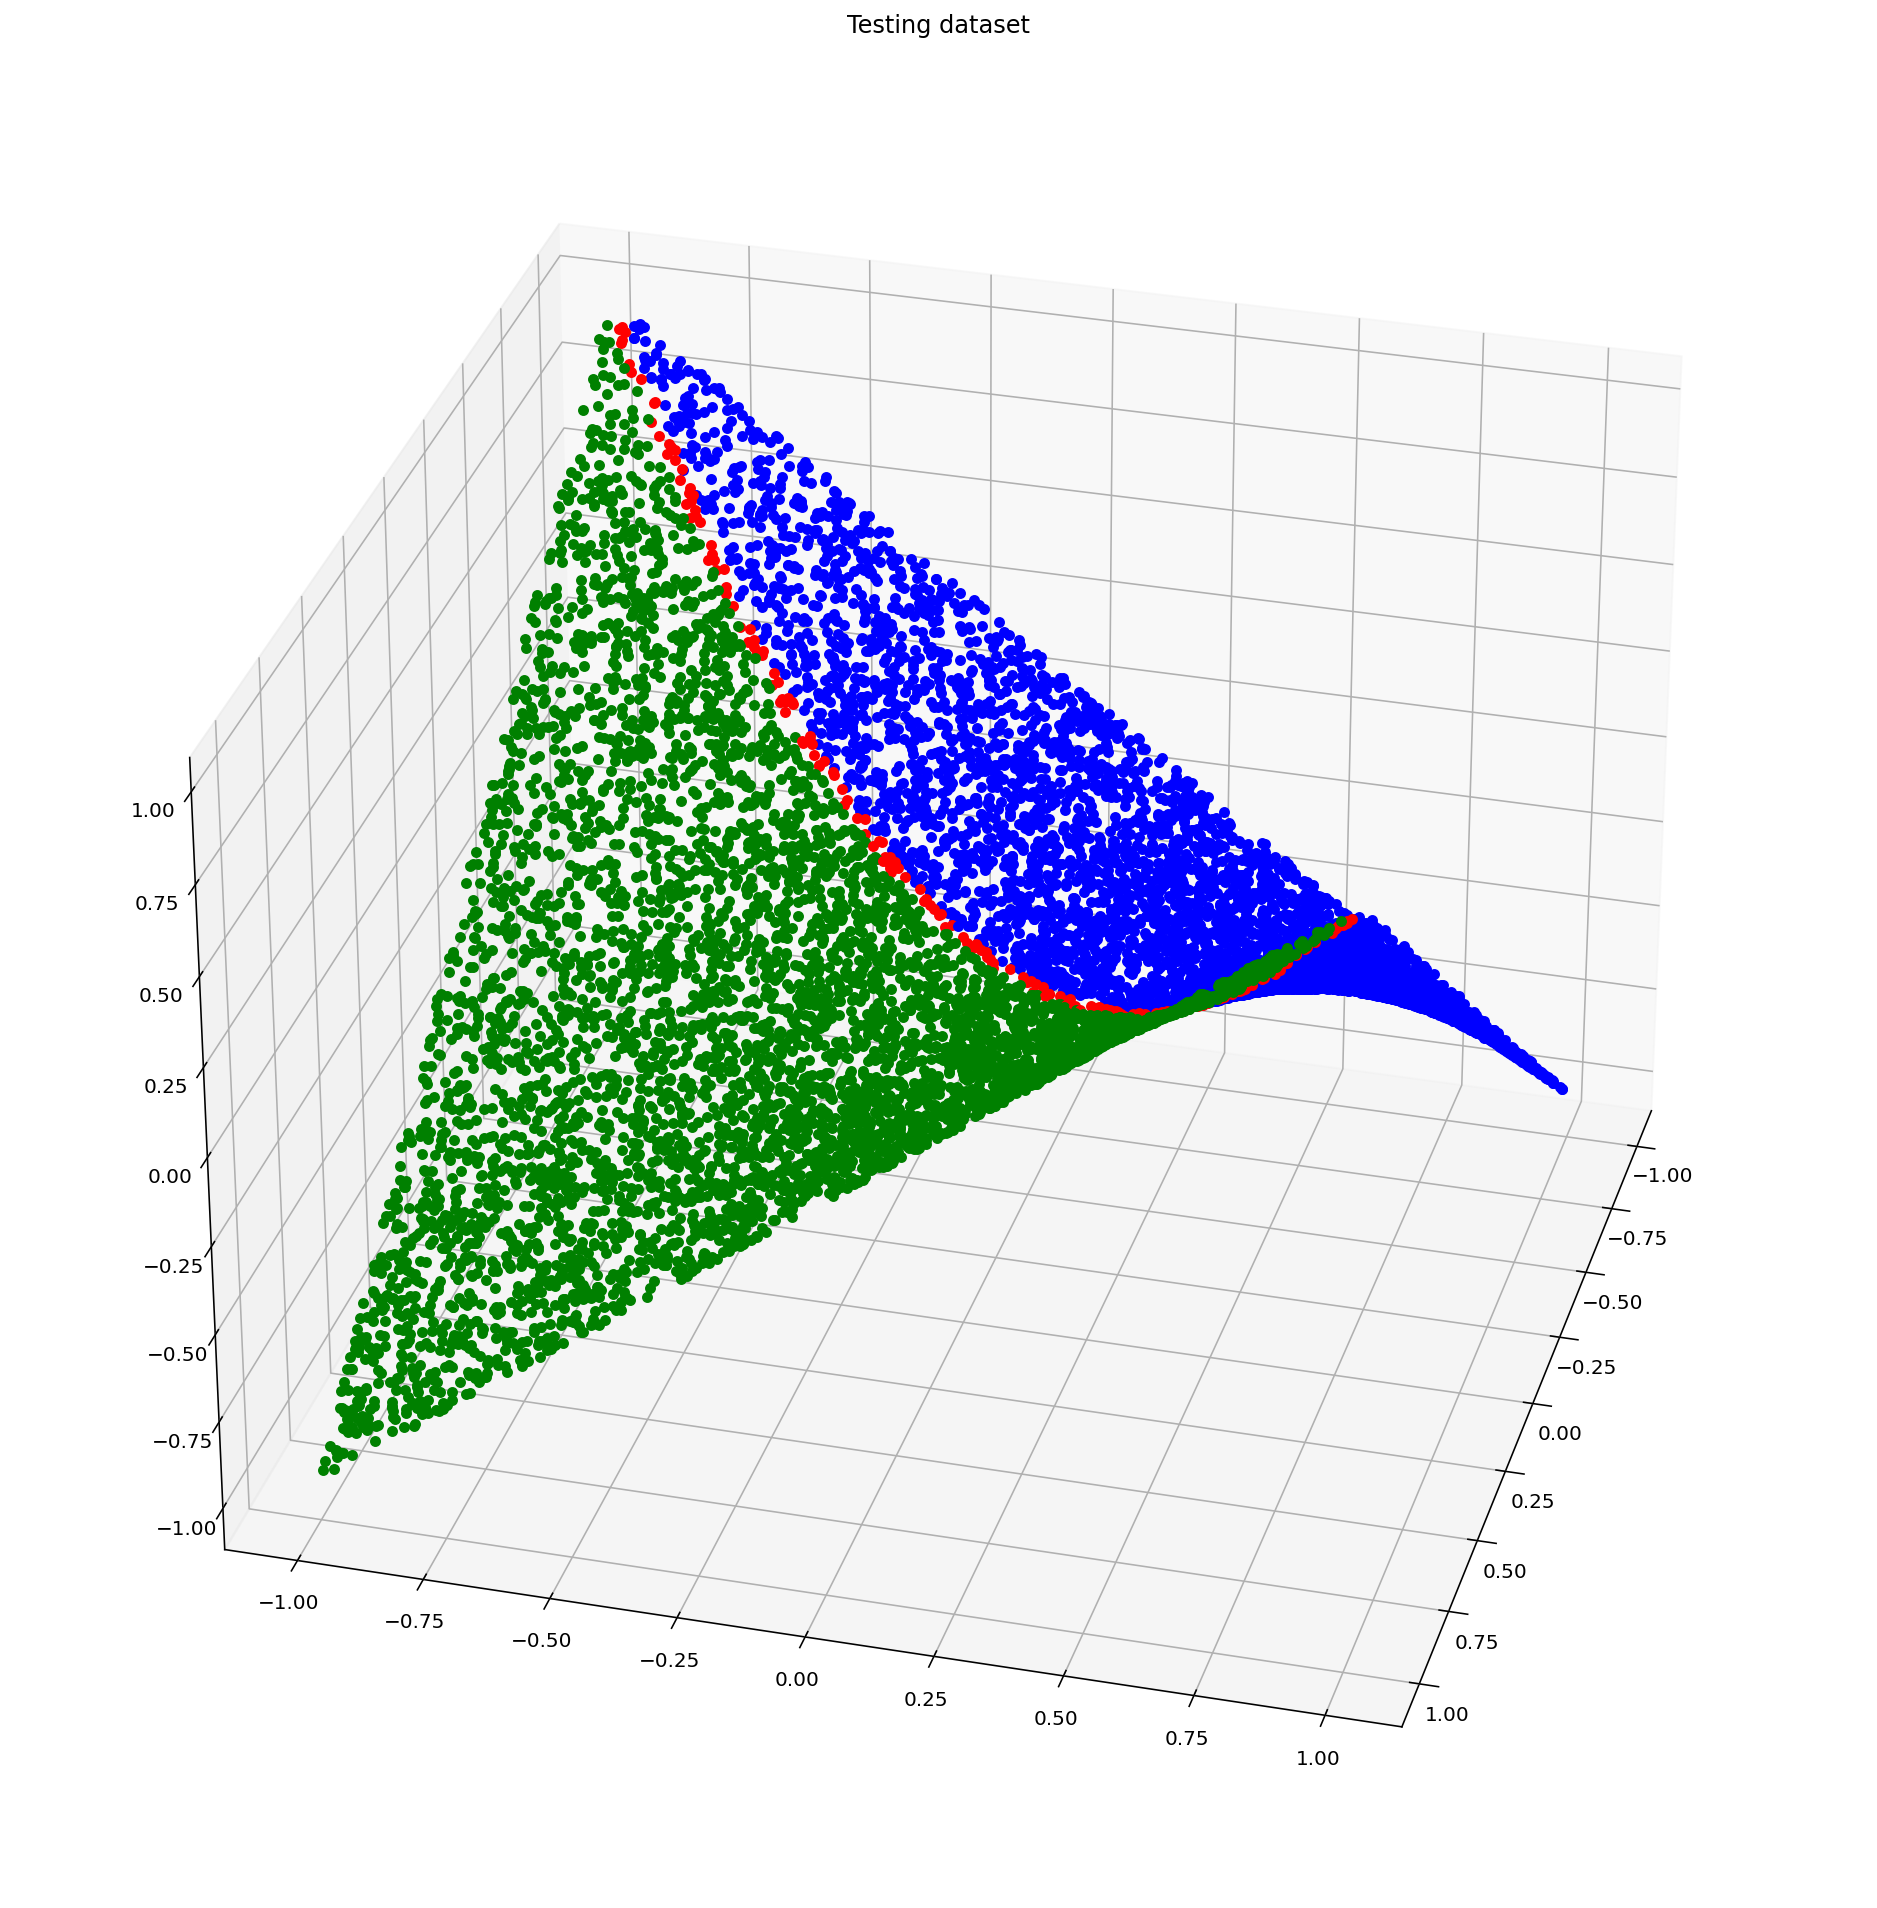

In [10]:
# Scattered plot for features(x1,x2) against predicted target(y').
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(17,17))
ay = fig.add_subplot(111, projection='3d')
for i in range(10000):
    if mult1[i] > mult2[i]+0.02:
        ay.scatter(mult1[i], mult2[i], pred[i], marker='o', color='green')
    elif mult1[i] < mult2[i]-0.02:
        ay.scatter(mult1[i], mult2[i], pred[i], marker='o', color='blue')
    else:
        ay.scatter(mult1[i], mult2[i], pred[i], marker='o', color='red')

ay.view_init(30, 15)
ay.set_title('Testing dataset')
plt.show()

In [11]:
###### Special Multiplication Network #####
# This network is designed with a hidden layer which concatenates a multiply node to a dense node

# Create a two neuron input layer
import tensorflow as tf
tf.keras.backend.set_floatx('float64')
inputs = tf.keras.layers.Input(shape=(2,))
in_1, in_2 = tf.split(inputs, num_or_size_splits=2, axis=1)

# Create a single neuron to perform the usual product operation.
output1 = tf.keras.layers.Dense(1, activation='linear')(inputs)

# Create a single neuron to perform a special product operation
output2 = tf.keras.layers.multiply([in_1, in_2])

# Concatenate the two neurons in the output layer
outputs = tf.concat([output1, output2],1)
output = tf.keras.layers.Dense(1, activation='linear')(outputs)

# Build a keras model for training.
Smodel = tf.keras.models.Model(inputs=inputs, outputs=output)
Smodel.compile(optimizer="Adam", loss="mean_squared_error")
Smodel.summary()

Model: "model_31"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_32 (InputLayer)           [(None, 2)]          0                                            
__________________________________________________________________________________________________
tf.split (TFOpLambda)           [(None, 1), (None, 1 0           input_32[0][0]                   
__________________________________________________________________________________________________
dense_94 (Dense)                (None, 1)            3           input_32[0][0]                   
__________________________________________________________________________________________________
multiply (Multiply)             (None, 1)            0           tf.split[0][0]                   
                                                                 tf.split[0][1]            

In [12]:
# fit a model between the taining feature and the training target.
Smodel.fit(X, Y, epochs=100, batch_size = 100)

Epoch 1/100


  1/100 [..............................] - ETA: 1:17 - loss: 1.3812

  5/100 [>.............................] - ETA: 1s - loss: 1.1556  

 35/100 [=========>....................] - ETA: 0s - loss: 0.9619

 36/100 [=========>....................] - ETA: 0s - loss: 0.9600

 38/100 [==========>...................] - ETA: 0s - loss: 0.9565

 49/100 [=============>................] - ETA: 0s - loss: 0.9421

 67/100 [===================>..........] - ETA: 0s - loss: 0.9263

 95/100 [===========================>..] - ETA: 0s - loss: 0.9069

100/100 [==============================] - 1s 6ms/step - loss: 0.9034


Epoch 2/100
  1/100 [..............................] - ETA: 0s - loss: 0.6797

  8/100 [=>............................] - ETA: 1s - loss: 0.7213

 36/100 [=========>....................] - ETA: 0s - loss: 0.7131

 39/100 [==========>...................] - ETA: 0s - loss: 0.7124

 52/100 [==============>...............] - ETA: 0s - loss: 0.7096

 53/100 [==============>...............] - ETA: 0s - loss: 0.7096

 55/100 [===============>..............] - ETA: 0s - loss: 0.7095

 58/100 [================>.............] - ETA: 0s - loss: 0.7093

 70/100 [====================>.........] - ETA: 0s - loss: 0.7079

 79/100 [======================>.......] - ETA: 0s - loss: 0.7077

 83/100 [=======================>......] - ETA: 0s - loss: 0.7075

100/100 [==============================] - 1s 8ms/step - loss: 0.7053


Epoch 3/100
  1/100 [..............................] - ETA: 0s - loss: 0.6809

  2/100 [..............................] - ETA: 5s - loss: 0.6623

 12/100 [==>...........................] - ETA: 1s - loss: 0.6092

 36/100 [=========>....................] - ETA: 0s - loss: 0.6170

 65/100 [==================>...........] - ETA: 0s - loss: 0.6195

100/100 [==============================] - 0s 4ms/step - loss: 0.6114


Epoch 4/100
  1/100 [..............................] - ETA: 0s - loss: 0.4376

  2/100 [..............................] - ETA: 6s - loss: 0.4696

  9/100 [=>............................]

 - ETA: 1s - loss: 0.4959

 29/100 [=======>......................] - ETA: 0s - loss: 0.5038

 31/100 [========>.....................] - ETA: 0s - loss: 0.5045

 68/100 [===================>..........] - ETA: 0s - loss: 0.5029

100/100 [==============================] - 0s 4ms/step - loss: 0.5029


Epoch 5/100
  1/100 [..............................] - ETA: 0s - loss: 0.5956

  3/100 [..............................] - ETA: 3s - loss: 0.5489



 46/100 [============>.................] - ETA: 0s - loss: 0.4757



 78/100 [======================>.......] - ETA: 0s - loss: 0.4667

 79/100 [======================>.......] - ETA: 0s - loss: 0.4665

 80/100 [=======================>......] - ETA: 0s - loss: 0.4662

 81/100 [=======================>......] - ETA: 0s - loss: 0.4659

100/100 [==============================] - 1s 7ms/step - loss: 0.4604


Epoch 6/100
  1/100 [..............................] - ETA: 0s - loss: 0.3509

  2/100 [..............................] - ETA: 6s - loss: 0.3864

 23/100 [=====>........................] - ETA: 0s - loss: 0.3763

 30/100 [========>.....................] - ETA: 0s - loss: 0.3772

 33/100 [========>.....................] - ETA: 0s - loss: 0.3775

 34/100 [=========>....................] - ETA: 0s - loss: 0.3776

 42/100 [===========>..................] - ETA: 0s - loss: 0.3792

 50/100 [==============>...............] - ETA: 0s - loss: 0.3809

 83/100 [=======================>......] - ETA: 0s - loss: 0.3857

 86/100 [========================>.....] - ETA: 0s - loss: 0.3858

 91/100 [==========================>...] - ETA: 0s - loss: 0.3859

 98/100 [============================>.] - ETA: 0s - loss: 0.3858

100/100 [==============================] - 1s 11ms/step - loss: 0.3858


Epoch 7/100
  1/100 [..............................] - ETA: 0s - loss: 0.3780

 23/100 [=====>........................] - ETA: 0s - loss: 0.3471

 49/100 [=============>................] - ETA: 0s - loss: 0.3478

 52/100 [==============>...............] - ETA: 0s - loss: 0.3482

 53/100 [==============>...............] - ETA: 0s - loss: 0.3483

 76/100 [=====================>........] - ETA: 0s - loss: 0.3475

 92/100 [==========================>...] - ETA: 0s - loss: 0.3461



 95/100 [===========================>..] - ETA: 0s - loss: 0.3459

 96/100 [===========================>..] - ETA: 0s - loss: 0.3458

100/100 [==============================] - 1s 8ms/step - loss: 0.3454


Epoch 8/100
  1/100 [..............................] - ETA: 0s - loss: 0.3432

 39/100 [==========>...................] - ETA: 0s - loss: 0.3273

 60/100 [=================>............] - ETA: 0s - loss: 0.3224

 61/100 [=================>............] - ETA: 0s - loss: 0.3222

 63/100 [=================>............] - ETA: 0s - loss: 0.3218

 93/100 [==========================>...] - ETA: 0s - loss: 0.3159

100/100 [==============================] - 0s 4ms/step - loss: 0.3146


Epoch 9/100
  1/100 [..............................] - ETA: 0s - loss: 0.3773



 28/100 [=======>......................] - ETA: 0s - loss: 0.2998



 55/100 [===============>..............] - ETA: 0s - loss: 0.2913

 62/100 [=================>............] - ETA: 0s - loss: 0.2895

 66/100 [==================>...........] - ETA: 0s - loss: 0.2885

 78/100 [======================>.......] - ETA: 0s - loss: 0.2860

100/100 [==============================] - 1s 5ms/step - loss: 0.2820


Epoch 10/100
  1/100 [..............................] - ETA: 0s - loss: 0.2600

  6/100 [>.............................] - ETA: 0s - loss: 0.2496

  8/100 [=>............................] - ETA: 2s - loss: 0.2513

 17/100 [====>.........................] - ETA: 1s - loss: 0.2544

 18/100 [====>.........................] - ETA: 1s - loss: 0.2544

 35/100 [=========>....................] - ETA: 0s - loss: 0.2548

 40/100 [===========>..................] - ETA: 0s - loss: 0.2546

 42/100 [===========>..................] - ETA: 0s - loss: 0.2545

 48/100 [=============>................] - ETA: 0s - loss: 0.2539

 50/100 [==============>...............] - ETA: 0s - loss: 0.2537

 95/100 [===========================>..] - ETA: 0s - loss: 0.2478

 99/100 [============================>.] - ETA: 0s - loss: 0.2473

100/100 [==============================]

 - 1s 9ms/step - loss: 0.2471


Epoch 11/100
  1/100 [..............................] - ETA: 0s - loss: 0.2050

  2/100 [..............................] - ETA: 10s - loss: 0.2120

 11/100 [==>...........................] - ETA: 1s - loss: 0.2196 

 39/100 [==========>...................] - ETA: 0s - loss: 0.2205

 40/100 [===========>..................] - ETA: 0s - loss: 0.2204

 46/100 [============>.................] - ETA: 0s - loss: 0.2199

 52/100 [==============>...............] - ETA: 0s - loss: 0.2196

 53/100 [==============>...............] - ETA: 0s - loss: 0.2195

 54/100 [===============>..............] - ETA: 0s - loss: 0.2195

 74/100 [=====================>........] - ETA: 0s - loss: 0.2179

100/100 [==============================] - 1s 9ms/step - loss: 0.2157


Epoch 12/100


  1/100 [..............................] - ETA: 0s - loss: 0.1585

  6/100 [>.............................] - ETA: 1s - loss: 0.1896



 16/100 [===>..........................] - ETA: 1s - loss: 0.1941

 17/100 [====>.........................] - ETA: 1s - loss: 0.1939



 18/100 [====>.........................] - ETA: 2s - loss: 0.1937

 54/100 [===============>..............] - ETA: 0s - loss: 0.1910

 84/100 [========================>.....] - ETA: 0s - loss: 0.1891

 92/100 [==========================>...] - ETA: 0s - loss: 0.1886

 93/100 [==========================>...] - ETA: 0s - loss: 0.1885



 94/100 [===========================>..] - ETA: 0s - loss: 0.1885

 95/100 [===========================>..] - ETA: 0s - loss: 0.1884

100/100 [==============================] - 1s 10ms/step - loss: 0.1882


Epoch 13/100
  1/100 [..............................] - ETA: 0s - loss: 0.1988

  2/100 [..............................] - ETA: 6s - loss: 0.1904

 23/100 [=====>........................] - ETA: 0s - loss: 0.1717

 24/100 [======>.......................] - ETA: 0s - loss: 0.1716



 26/100 [======>.......................] - ETA: 1s - loss: 0.1713

 41/100 [===========>..................] - ETA: 0s - loss: 0.1693

 66/100 [==================>...........] - ETA: 0s - loss: 0.1669

 82/100 [=======================>......] - ETA: 0s - loss: 0.1660

100/100 [==============================] - 1s 7ms/step - loss: 0.1651


Epoch 14/100
  1/100 [..............................] - ETA: 0s - loss: 0.1205

  4/100 [>.............................] - ETA: 1s - loss: 0.1313

 21/100 [=====>........................] - ETA: 0s - loss: 0.1433

 51/100 [==============>...............] - ETA: 0s - loss: 0.1445

 89/100 [=========================>....] - ETA: 0s - loss: 0.1440

 94/100 [===========================>..] - ETA: 0s - loss: 0.1439

100/100 [==============================] - 0s 5ms/step - loss: 0.1438


Epoch 15/100
  1/100 [..............................] - ETA: 0s - loss: 0.1446

 14/100 [===>..........................] - ETA: 0s - loss: 0.1347

 35/100 [=========>....................] - ETA: 0s - loss: 0.1313

 45/100 [============>.................] - ETA: 0s - loss: 0.1308

 53/100 [==============>...............] - ETA: 0s - loss: 0.1305

 72/100 [====================>.........] - ETA: 0s - loss: 0.1295

 96/100 [===========================>..] - ETA: 0s - loss: 0.1281

100/100 [==============================] - 0s 5ms/step - loss: 0.1279


Epoch 16/100


  1/100 [..............................] - ETA: 0s - loss: 0.1201

 19/100 [====>.........................] - ETA: 0s - loss: 0.1168

 50/100 [==============>...............] - ETA: 0s - loss: 0.1156

 56/100 [===============>..............] - ETA: 0s - loss: 0.1155

 60/100 [=================>............] - ETA: 0s - loss: 0.1153

 69/100 [===================>..........] - ETA: 0s - loss: 0.1148

 80/100 [=======================>......]

 - ETA: 0s - loss: 0.1142

 81/100 [=======================>......] - ETA: 0s - loss: 0.1142

 82/100 [=======================>......] - ETA: 0s - loss: 0.1141

 85/100 [========================>.....] - ETA: 0s - loss: 0.1140

 86/100 [========================>.....] - ETA: 0s - loss: 0.1139

 97/100 [============================>.] - ETA: 0s - loss: 0.1133

 98/100 [============================>.] - ETA: 0s - loss: 0.1133

100/100 [==============================] - 1s 12ms/step - loss: 0.1131


Epoch 17/100
  1/100 [..............................] - ETA: 0s - loss: 0.1070

 37/100 [==========>...................] - ETA: 0s - loss: 0.0997

 40/100 [===========>..................] - ETA: 0s - loss: 0.0995

 54/100 [===============>..............] - ETA: 0s - loss: 0.0989

 55/100 [===============>..............] - ETA: 0s - loss: 0.0989

 57/100 [================>.............] - ETA: 0s - loss: 0.0988

 58/100 [================>.............] - ETA: 0s - loss: 0.0988

 60/100 [=================>............] - ETA: 0s - loss: 0.0988

 62/100 [=================>............] - ETA: 0s - loss: 0.0987

 69/100 [===================>..........] - ETA: 0s - loss: 0.0986

 71/100 [====================>.........] - ETA: 0s - loss: 0.0985

 72/100 [====================>.........] - ETA: 0s - loss: 0.0985

 91/100 [==========================>...] - ETA: 0s - loss: 0.0980

100/100 [==============================] - 1s 10ms/step - loss: 0.0976


Epoch 18/100


  1/100 [..............................] - ETA: 1s - loss: 0.0814

 13/100 [==>...........................] - ETA: 0s - loss: 0.0813

 37/100 [==========>...................] - ETA: 0s - loss: 0.0832

 38/100 [==========>...................] - ETA: 0s - loss: 0.0832

 53/100 [==============>...............] - ETA: 0s - loss: 0.0833

 54/100 [===============>..............] - ETA: 0s - loss: 0.0833

 83/100 [=======================>......] - ETA: 0s - loss: 0.0832

 84/100 [========================>.....] - ETA: 0s - loss: 0.0832

 96/100 [===========================>..] - ETA: 0s - loss: 0.0830

 97/100 [============================>.] - ETA: 0s - loss: 0.0830

100/100 [==============================] - 1s 6ms/step - loss: 0.0829


Epoch 19/100
  1/100 [..............................] - ETA: 0s - loss: 0.0799

  2/100 [..............................] - ETA: 5s - loss: 0.0803

 16/100 [===>..........................] - ETA: 0s - loss: 0.0779

 27/100 [=======>......................] - ETA: 0s - loss: 0.0774

 44/100 [============>.................] - ETA: 0s - loss: 0.0763

 75/100 [=====================>........] - ETA: 0s - loss: 0.0750

 88/100 [=========================>....] - ETA: 0s - loss: 0.0744

100/100 [==============================] - 0s 4ms/step - loss: 0.0738


Epoch 20/100
  1/100 [..............................] - ETA: 0s - loss: 0.0728



 24/100 [======>.......................] - ETA: 0s - loss: 0.0647

 50/100 [==============>...............] - ETA: 0s - loss: 0.0628

 51/100 [==============>...............] - ETA: 0s - loss: 0.0627

 58/100 [================>.............] - ETA: 0s - loss: 0.0625

 87/100 [=========================>....] - ETA: 0s - loss: 0.0620

 90/100 [==========================>...] - ETA: 0s - loss: 0.0620

100/100 [==============================] - 0s 4ms/step - loss: 0.0617


Epoch 21/100
  1/100 [..............................] - ETA: 0s - loss: 0.0500

 10/100 [==>...........................] - ETA: 0s - loss: 0.0493

 28/100 [=======>......................] - ETA: 0s - loss: 0.0512

 29/100 [=======>......................] - ETA: 0s - loss: 0.0512

 34/100 [=========>....................] - ETA: 0s - loss: 0.0513

 40/100 [===========>..................] - ETA: 0s - loss: 0.0513

 41/100 [===========>..................] - ETA: 0s - loss: 0.0513

 59/100 [================>.............] - ETA: 0s - loss: 0.0517

 96/100 [===========================>..] - ETA: 0s - loss: 0.0514

 98/100 [============================>.] - ETA: 0s - loss: 0.0514

100/100 [==============================] - ETA: 0s - loss: 0.0514

100/100 [==============================] - 1s 6ms/step - loss: 0.0514


Epoch 22/100


  1/100 [..............................] - ETA: 4s - loss: 0.0376

  5/100 [>.............................] - ETA: 3s - loss: 0.0420

 26/100 [======>.......................] - ETA: 0s - loss: 0.0439

 27/100 [=======>......................] - ETA: 0s - loss: 0.0440



 59/100 [================>.............] - ETA: 0s - loss: 0.0442



 66/100 [==================>...........] - ETA: 0s - loss: 0.0442

 67/100 [===================>..........] - ETA: 0s - loss: 0.0441

 71/100 [====================>.........] - ETA: 0s - loss: 0.0441

 72/100 [====================>.........] - ETA: 0s - loss: 0.0441



 75/100 [=====================>........] - ETA: 0s - loss: 0.0441

 76/100 [=====================>........] - ETA: 0s - loss: 0.0441

 83/100 [=======================>......] - ETA: 0s - loss: 0.0440



 92/100 [==========================>...] - ETA: 0s - loss: 0.0439

 93/100 [==========================>...] - ETA: 0s - loss: 0.0439

 94/100 [===========================>..] - ETA: 0s - loss: 0.0438

100/100 [==============================] - 1s 14ms/step - loss: 0.0437


Epoch 23/100
  1/100 [..............................] - ETA: 0s - loss: 0.0407

 22/100 [=====>........................] - ETA: 0s - loss: 0.0380



 41/100 [===========>..................] - ETA: 0s - loss: 0.0379

 42/100 [===========>..................] - ETA: 0s - loss: 0.0378

 71/100 [====================>.........] - ETA: 0s - loss: 0.0374

 77/100 [======================>.......] - ETA: 0s - loss: 0.0374

100/100 [==============================] - 1s 5ms/step - loss: 0.0370


Epoch 24/100
  1/100 [..............................] - ETA: 0s - loss: 0.0350

  8/100 [=>............................] - ETA: 0s - loss: 0.0349

 34/100 [=========>....................] - ETA: 0s - loss: 0.0330

 44/100 [============>.................] - ETA: 0s - loss: 0.0326

 45/100 [============>.................] - ETA: 0s - loss: 0.0325

 77/100 [======================>.......] - ETA: 0s - loss: 0.0316

 91/100 [==========================>...] - ETA: 0s - loss: 0.0313

100/100 [==============================] - 0s 5ms/step - loss: 0.0311


Epoch 25/100
  1/100 [..............................] - ETA: 1s - loss: 0.0235

  2/100 [..............................] - ETA: 7s - loss: 0.0236



 10/100 [==>...........................] - ETA: 1s - loss: 0.0242

 11/100 [==>...........................] - ETA: 2s - loss: 0.0243

 29/100 [=======>......................] - ETA: 0s - loss: 0.0248

 57/100 [================>.............] - ETA: 0s - loss: 0.0252

 58/100 [================>.............] - ETA: 0s - loss: 0.0252

 67/100 [===================>..........] - ETA: 0s - loss: 0.0252

 68/100 [===================>..........] - ETA: 0s - loss: 0.0252

 82/100 [=======================>......] - ETA: 0s - loss: 0.0252

100/100 [==============================] - 1s 8ms/step - loss: 0.0251


Epoch 26/100
  1/100 [..............................] - ETA: 0s - loss: 0.0229

  5/100 [>.............................] - ETA: 1s - loss: 0.0217

 14/100 [===>..........................] - ETA: 0s - loss: 0.0219

 19/100 [====>.........................] - ETA: 0s - loss: 0.0219

 20/100 [=====>........................] - ETA: 1s - loss: 0.0219



 26/100 [======>.......................] - ETA: 1s - loss: 0.0219

 42/100 [===========>..................] - ETA: 0s - loss: 0.0218

 43/100 [===========>..................] - ETA: 0s - loss: 0.0218



 59/100 [================>.............] - ETA: 0s - loss: 0.0216

 60/100 [=================>............] - ETA: 0s - loss: 0.0215

 80/100 [=======================>......] - ETA: 0s - loss: 0.0212

100/100 [==============================] - 1s 9ms/step - loss: 0.0210


Epoch 27/100
  1/100 [..............................] - ETA: 4s - loss: 0.0181

  4/100 [>.............................] - ETA: 3s - loss: 0.0185

 21/100 [=====>........................] - ETA: 1s - loss: 0.0179

 25/100 [======>.......................] - ETA: 1s - loss: 0.0177

 48/100 [=============>................] - ETA: 0s - loss: 0.0174

 69/100 [===================>..........] - ETA: 0s - loss: 0.0173



 88/100 [=========================>....] - ETA: 0s - loss: 0.0171

 89/100 [=========================>....] - ETA: 0s - loss: 0.0171

100/100 [==============================] - 1s 10ms/step - loss: 0.0170


Epoch 28/100


  1/100 [..............................] - ETA: 1s - loss: 0.0165

  2/100 [..............................] - ETA: 8s - loss: 0.0160

 40/100 [===========>..................] - ETA: 0s - loss: 0.0146

 44/100 [============>.................] - ETA: 0s - loss: 0.0145

 45/100 [============>.................] - ETA: 0s - loss: 0.0145

 47/100 [=============>................] - ETA: 0s - loss: 0.0145

 59/100 [================>.............] - ETA: 0s - loss: 0.0143

 78/100 [======================>.......] - ETA: 0s - loss: 0.0141



 82/100 [=======================>......] - ETA: 0s - loss: 0.0141

100/100 [==============================] - 1s 7ms/step - loss: 0.0139


Epoch 29/100


  1/100 [..............................] - ETA: 0s - loss: 0.0121

 23/100 [=====>........................] - ETA: 0s - loss: 0.0115

 58/100 [================>.............] - ETA: 0s - loss: 0.0112

 93/100 [==========================>...] - ETA: 0s - loss: 0.0110

 94/100 [===========================>..] - ETA: 0s - loss: 0.0110

 96/100 [===========================>..] - ETA: 0s - loss: 0.0110

100/100 [==============================] - 0s 4ms/step - loss: 0.0109


Epoch 30/100
  1/100 [..............................] - ETA: 0s - loss: 0.0095



  2/100 [..............................] - ETA: 5s - loss: 0.0089

 14/100 [===>..........................] - ETA: 1s - loss: 0.0088

 26/100 [======>.......................] - ETA: 0s - loss: 0.0088

 32/100 [========>.....................] - ETA: 0s - loss: 0.0087

 33/100 [========>.....................] - ETA: 0s - loss: 0.0087

 37/100 [==========>...................] - ETA: 0s - loss: 0.0088

 45/100 [============>.................] - ETA: 0s - loss: 0.0087

 58/100 [================>.............] - ETA: 0s - loss: 0.0087

 66/100 [==================>...........] - ETA: 0s - loss: 0.0087

100/100 [==============================] - ETA: 0s - loss: 0.0086

100/100 [==============================] - 1s 8ms/step - loss: 0.0085


Epoch 31/100
  1/100 [..............................] - ETA: 0s - loss: 0.0064

  5/100 [>.............................] - ETA: 1s - loss: 0.0074

 22/100 [=====>........................] - ETA: 0s - loss: 0.0072

 23/100 [=====>........................] - ETA: 0s - loss: 0.0072

 46/100 [============>.................] - ETA: 0s - loss: 0.0070

 54/100 [===============>..............] - ETA: 0s - loss: 0.0070

 77/100 [======================>.......] - ETA: 0s - loss: 0.0068

 78/100 [======================>.......] - ETA: 0s - loss: 0.0068

100/100 [==============================] - 0s 5ms/step - loss: 0.0067


Epoch 32/100

  1/100 [..............................] - ETA: 11s - loss: 0.0069

  2/100 [..............................] - ETA: 8s - loss: 0.0066 

 16/100 [===>..........................] - ETA: 0s - loss: 0.0056

 19/100 [====>.........................] - ETA: 0s - loss: 0.0056

 33/100 [========>.....................] - ETA: 0s - loss: 0.0054

 39/100 [==========>...................] - ETA: 0s - loss: 0.0054

 73/100 [====================>.........] - ETA: 0s - loss: 0.0052

 75/100 [=====================>........] - ETA: 0s - loss: 0.0052



100/100 [==============================] - 1s 5ms/step - loss: 0.0051


Epoch 33/100
  1/100 [..............................] - ETA: 0s - loss: 0.0040



  3/100 [..............................] - ETA: 2s - loss: 0.0038

 43/100 [===========>..................]

 - ETA: 0s - loss: 0.0039



 44/100 [============>.................] - ETA: 0s - loss: 0.0039

 47/100 [=============>................]

 - ETA: 0s - loss: 0.0039



 67/100 [===================>..........] - ETA: 0s - loss: 0.0039

 69/100 [===================>..........] - ETA: 0s - loss: 0.0039

 84/100 [========================>.....] - ETA: 0s - loss: 0.0039

100/100 [==============================] - 0s 5ms/step - loss: 0.0038


Epoch 34/100
  1/100 [..............................] - ETA: 0s - loss: 0.0032

 10/100 [==>...........................] - ETA: 0s - loss: 0.0031



 43/100 [===========>..................] - ETA: 0s - loss: 0.0030

 78/100 [======================>.......] - ETA: 0s - loss: 0.0029

 82/100 [=======================>......] - ETA: 0s - loss: 0.0029

 90/100 [==========================>...] - ETA: 0s - loss: 0.0029

 91/100 [==========================>...] - ETA: 0s - loss: 0.0029

 94/100 [===========================>..] - ETA: 0s - loss: 0.0029

 95/100 [===========================>..] - ETA: 0s - loss: 0.0029

100/100 [==============================] - 1s 8ms/step - loss: 0.0029


Epoch 35/100
  1/100 [..............................] - ETA: 0s - loss: 0.0022

  7/100 [=>............................] - ETA: 0s - loss: 0.0023

 10/100 [==>...........................] - ETA: 1s - loss: 0.0022

 27/100 [=======>......................] - ETA: 0s - loss: 0.0022

 63/100 [=================>............] - ETA: 0s - loss: 0.0022

100/100 [==============================] - ETA: 0s - loss: 0.0021

100/100 [==============================] - 0s 5ms/step - loss: 0.0021


Epoch 36/100
  1/100 [..............................] - ETA: 0s - loss: 0.0015



 25/100 [======>.......................] - ETA: 0s - loss: 0.0016

 48/100 [=============>................] - ETA: 0s - loss: 0.0016

 54/100 [===============>..............] - ETA: 0s - loss: 0.0016

 55/100 [===============>..............] - ETA: 0s - loss: 0.0016

 78/100 [======================>.......] - ETA: 0s - loss: 0.0016

 79/100 [======================>.......] - ETA: 0s - loss: 0.0016

 97/100 [============================>.] - ETA: 0s - loss: 0.0016

100/100 [==============================] - ETA: 0s - loss: 0.0016

100/100 [==============================] - 1s 7ms/step - loss: 0.0016


Epoch 37/100


  1/100 [..............................] - ETA: 0s - loss: 0.0011

 17/100 [====>.........................] - ETA: 0s - loss: 0.0011

 57/100 [================>.............] - ETA: 0s - loss: 0.0011

 74/100 [=====================>........] - ETA: 0s - loss: 0.0011

 76/100 [=====================>........] - ETA: 0s - loss: 0.0011

 77/100 [======================>.......] - ETA: 0s - loss: 0.0011

 79/100 [======================>.......] - ETA: 0s - loss: 0.0011

 98/100 [============================>.] - ETA: 0s - loss: 0.0011

100/100 [==============================] - ETA: 0s - loss: 0.0011

100/100 [==============================] - 1s 8ms/step - loss: 0.0011


Epoch 38/100
  1/100 [..............................] - ETA: 0s - loss: 0.0011

 34/100 [=========>....................] - ETA: 0s - loss: 8.6591e-04

 36/100 [=========>....................] - ETA: 0s - loss: 8.6336e-04

 61/100 [=================>............] - ETA: 0s - loss: 8.3322e-04

 62/100 [=================>............] - ETA: 0s - loss: 8.3205e-04

 98/100 [============================>.] - ETA: 0s - loss: 7.9952e-04

100/100 [==============================] - 1s 5ms/step - loss: 7.9709e-04


Epoch 39/100
  1/100 [..............................] - ETA: 0s - loss: 6.8540e-04

 20/100 [=====>........................] - ETA: 0s - loss: 5.8192e-04

 22/100 [=====>........................] - ETA: 0s - loss: 5.8013e-04

 49/100 [=============>................] - ETA: 0s - loss: 5.6177e-04

 50/100 [==============>...............] - ETA: 0s - loss: 5.6120e-04

 51/100 [==============>...............] - ETA: 0s - loss: 5.6061e-04

 66/100 [==================>...........] - ETA: 0s - loss: 5.5339e-04

 94/100 [===========================>..] - ETA: 0s - loss: 5.4027e-04

100/100 [==============================] - ETA: 0s - loss: 5.3746e-04

100/100 [==============================] - 1s 7ms/step - loss: 5.3701e-04


Epoch 40/100
  1/100 [..............................] - ETA: 0s - loss: 3.4876e-04

  2/100 [..............................] - ETA: 9s - loss: 3.6118e-04

 12/100 [==>...........................] - ETA: 1s - loss: 3.9175e-04

 27/100 [=======>......................] - ETA: 0s - loss: 3.9606e-04

 41/100 [===========>..................] - ETA: 0s - loss: 3.9205e-04

 43/100 [===========>..................] - ETA: 0s - loss: 3.9118e-04

 45/100 [============>.................] - ETA: 0s - loss: 3.9042e-04

 46/100 [============>.................] - ETA: 1s - loss: 3.9005e-04

 58/100 [================>.............] - ETA: 0s - loss: 3.8571e-04

 59/100 [================>.............] - ETA: 0s - loss: 3.8533e-04

 60/100 [=================>............] - ETA: 0s - loss: 3.8495e-04

 72/100 [====================>.........] - ETA: 0s - loss: 3.8037e-04

100/100 [==============================] - 1s 14ms/step - loss: 3.6953e-04


Epoch 41/100
  1/100 [..............................] - ETA: 0s - loss: 2.3348e-04

  2/100 [..............................] - ETA: 5s - loss: 2.5250e-04



 20/100 [=====>........................] - ETA: 0s - loss: 2.5895e-04

 21/100 [=====>........................] - ETA: 1s - loss: 2.5861e-04

 37/100 [==========>...................] - ETA: 0s - loss: 2.5567e-04

 50/100 [==============>...............] - ETA: 0s - loss: 2.5239e-04

 70/100 [====================>.........] - ETA: 0s - loss: 2.4746e-04

 73/100 [====================>.........] - ETA: 0s - loss: 2.4668e-04

 93/100 [==========================>...] - ETA: 0s - loss: 2.4175e-04

 98/100 [============================>.] - ETA: 0s - loss: 2.4067e-04

 99/100 [============================>.] - ETA: 0s - loss: 2.4045e-04

100/100 [==============================] - 1s 11ms/step - loss: 2.4002e-04


Epoch 42/100
  1/100 [..............................] - ETA: 0s - loss: 1.5410e-04

  4/100 [>.............................] - ETA: 1s - loss: 1.6546e-04

 17/100 [====>.........................] - ETA: 0s - loss: 1.7033e-04

 18/100 [====>.........................] - ETA: 1s - loss: 1.7015e-04

 24/100 [======>.......................] - ETA: 1s - loss: 1.6965e-04

 31/100 [========>.....................] - ETA: 1s - loss: 1.6821e-04

 60/100 [=================>............] - ETA: 0s - loss: 1.6372e-04

 70/100 [====================>.........] - ETA: 0s - loss: 1.6195e-04

 99/100 [============================>.] - ETA: 0s - loss: 1.5709e-04

100/100 [==============================] - 1s 8ms/step - loss: 1.5677e-04


Epoch 43/100


  1/100 [..............................] - ETA: 1s - loss: 8.1757e-05

  3/100 [..............................] - ETA: 4s - loss: 8.8886e-05



 25/100 [======>.......................] - ETA: 0s - loss: 9.7733e-05

 26/100 [======>.......................] - ETA: 0s - loss: 9.7852e-05

 41/100 [===========>..................] - ETA: 0s - loss: 9.8858e-05

 68/100 [===================>..........] - ETA: 0s - loss: 9.8478e-05

 82/100 [=======================>......] - ETA: 0s - loss: 9.7706e-05

 83/100 [=======================>......] - ETA: 0s - loss: 9.7642e-05

100/100 [==============================] - ETA: 0s - loss: 9.6432e-05

100/100 [==============================] - 1s 8ms/step - loss: 9.6358e-05


Epoch 44/100
  1/100 [..............................] - ETA: 0s - loss: 6.7839e-05



 25/100 [======>.......................] - ETA: 0s - loss: 6.4354e-05

 44/100 [============>.................] - ETA: 0s - loss: 6.4169e-05

 48/100 [=============>................] - ETA: 0s - loss: 6.3950e-05

 78/100 [======================>.......] - ETA: 0s - loss: 6.2048e-05

100/100 [==============================] - 0s 3ms/step - loss: 6.0659e-05


Epoch 45/100
  1/100 [..............................] - ETA: 0s - loss: 4.0012e-05

 12/100 [==>...........................] - ETA: 0s - loss: 4.0209e-05

 13/100 [==>...........................] - ETA: 1s - loss: 4.0265e-05

 21/100 [=====>........................] - ETA: 1s - loss: 4.0591e-05

 29/100 [=======>......................] - ETA: 1s - loss: 4.0805e-05



 50/100 [==============>...............] - ETA: 0s - loss: 3.9979e-05

 51/100 [==============>...............] - ETA: 0s - loss: 3.9931e-05

 52/100 [==============>...............] - ETA: 0s - loss: 3.9882e-05

 79/100 [======================>.......] - ETA: 0s - loss: 3.8548e-05

100/100 [==============================] - 1s 10ms/step - loss: 3.7475e-05


Epoch 46/100
  1/100 [..............................] - ETA: 0s - loss: 2.5048e-05

  2/100 [..............................] - ETA: 5s - loss: 2.5546e-05

  6/100 [>.............................] - ETA: 3s - loss: 2.6545e-05

  7/100 [=>............................] - ETA: 5s - loss: 2.6651e-05

 13/100 [==>...........................] - ETA: 3s - loss: 2.6074e-05

 20/100 [=====>........................] - ETA: 2s - loss: 2.5358e-05

 21/100 [=====>........................] - ETA: 3s - loss: 2.5268e-05

 25/100 [======>.......................] - ETA: 2s - loss: 2.4964e-05

 27/100 [=======>......................] - ETA: 2s - loss: 2.4806e-05

 31/100 [========>.....................] - ETA: 2s - loss: 2.4522e-05

 47/100 [=============>................] - ETA: 1s - loss: 2.3716e-05

 74/100 [=====================>........] - ETA: 0s - loss: 2.2808e-05

 75/100 [=====================>........] - ETA: 0s - loss: 2.2777e-05

 77/100 [======================>.......] - ETA: 0s - loss: 2.2715e-05

 81/100 [=======================>......] - ETA: 0s - loss: 2.2593e-05

100/100 [==============================] - 2s 16ms/step - loss: 2.2002e-05


Epoch 47/100
  1/100 [..............................] - ETA: 0s - loss: 1.5715e-05

 12/100 [==>...........................] - ETA: 0s - loss: 1.4617e-05

 55/100 [===============>..............] - ETA: 0s - loss: 1.3624e-05

 56/100 [===============>..............] - ETA: 0s - loss: 1.3605e-05

 85/100 [========================>.....] - ETA: 0s - loss: 1.3015e-05

 86/100 [========================>.....] - ETA: 0s - loss: 1.2995e-05

100/100 [==============================] - 0s 4ms/step - loss: 1.2707e-05


Epoch 48/100


  1/100 [..............................] - ETA: 4s - loss: 8.8921e-06

  2/100 [..............................] - ETA: 5s - loss: 8.2710e-06

 20/100 [=====>........................] - ETA: 0s - loss: 7.7710e-06

 30/100 [========>.....................] - ETA: 0s - loss: 7.6890e-06

 37/100 [==========>...................] - ETA: 0s - loss: 7.6031e-06

 38/100 [==========>...................] - ETA: 0s - loss: 7.5905e-06

 56/100 [===============>..............] - ETA: 0s - loss: 7.3838e-06

 77/100 [======================>.......] - ETA: 0s - loss: 7.1671e-06

 83/100 [=======================>......] - ETA: 0s - loss: 7.1080e-06

 84/100 [========================>.....]

 - ETA: 0s - loss: 7.0980e-06

 85/100 [========================>.....] - ETA: 0s - loss: 7.0879e-06

 93/100 [==========================>...] - ETA: 0s - loss: 7.0076e-06

100/100 [==============================] - 1s 13ms/step - loss: 6.9299e-06


Epoch 49/100


  1/100 [..............................] - ETA: 9s - loss: 3.4209e-06

 12/100 [==>...........................] - ETA: 0s - loss: 3.9782e-06

 13/100 [==>...........................] - ETA: 2s - loss: 3.9880e-06

 43/100 [===========>..................] - ETA: 0s - loss: 3.9011e-06

 60/100 [=================>............] - ETA: 0s - loss: 3.8423e-06

 61/100 [=================>............] - ETA: 0s - loss: 3.8378e-06

 62/100 [=================>............] - ETA: 0s - loss: 3.8332e-06

 76/100 [=====================>........] - ETA: 0s - loss: 3.7715e-06

 77/100 [======================>.......] - ETA: 0s - loss: 3.7669e-06

 99/100 [============================>.] - ETA: 0s - loss: 3.6637e-06

100/100 [==============================] - 1s 9ms/step - loss: 3.6543e-06


Epoch 50/100
  1/100 [..............................] - ETA: 0s - loss: 2.1820e-06

 16/100 [===>..........................] - ETA: 0s - loss: 2.1916e-06

 17/100 [====>.........................] - ETA: 0s - loss: 2.1906e-06

 22/100 [=====>........................] - ETA: 1s - loss: 2.1860e-06

 26/100 [======>.......................] - ETA: 1s - loss: 2.1761e-06

 72/100 [====================>.........] - ETA: 0s - loss: 2.0096e-06

 75/100 [=====================>........] - ETA: 0s - loss: 1.9999e-06

100/100 [==============================] - 1s 5ms/step - loss: 1.9217e-06


Epoch 51/100
  1/100 [..............................] - ETA: 0s - loss: 1.0002e-06

  2/100 [..............................] - ETA: 8s - loss: 1.0591e-06

  4/100 [>.............................] - ETA: 4s - loss: 1.0900e-06

 34/100 [=========>....................] - ETA: 0s - loss: 1.0640e-06



 43/100 [===========>..................] - ETA: 0s - loss: 1.0526e-06

 66/100 [==================>...........] - ETA: 0s - loss: 1.0188e-06

 72/100 [====================>.........] - ETA: 0s - loss: 1.0084e-06

 73/100 [====================>.........] - ETA: 0s - loss: 1.0067e-06

 79/100 [======================>.......] - ETA: 0s - loss: 9.9678e-07

 80/100 [=======================>......] - ETA: 0s - loss: 9.9514e-07

 82/100 [=======================>......] - ETA: 0s - loss: 9.9190e-07

100/100 [==============================] - 1s 10ms/step - loss: 9.6261e-07


Epoch 52/100
  1/100 [..............................] - ETA: 0s - loss: 6.7227e-07

  5/100 [>.............................] - ETA: 1s - loss: 6.0524e-07

 31/100 [========>.....................] - ETA: 0s - loss: 5.3552e-07

 32/100 [========>.....................] - ETA: 0s - loss: 5.3445e-07

 33/100 [========>.....................] - ETA: 0s - loss: 5.3335e-07



 39/100 [==========>...................] - ETA: 0s - loss: 5.2726e-07



 40/100 [===========>..................] - ETA: 0s - loss: 5.2624e-07

 41/100 [===========>..................] - ETA: 0s - loss: 5.2522e-07

 45/100 [============>.................] - ETA: 0s - loss: 5.2105e-07

 46/100 [============>.................] - ETA: 1s - loss: 5.1999e-07

 47/100 [=============>................] - ETA: 1s - loss: 5.1889e-07

 48/100 [=============>................] - ETA: 1s - loss: 5.1781e-07



 58/100 [================>.............] - ETA: 0s - loss: 5.0730e-07



 59/100 [================>.............] - ETA: 0s - loss: 5.0627e-07

 60/100 [=================>............] - ETA: 1s - loss: 5.0525e-07

 61/100 [=================>............] - ETA: 1s - loss: 5.0422e-07

 64/100 [==================>...........] - ETA: 1s - loss: 5.0118e-07

 74/100 [=====================>........] - ETA: 0s - loss: 4.9167e-07

 80/100 [=======================>......] - ETA: 0s - loss: 4.8627e-07

 87/100 [=========================>....] - ETA: 0s - loss: 4.8008e-07



100/100 [==============================] - 2s 22ms/step - loss: 4.6858e-07


Epoch 53/100
  1/100 [..............................] - ETA: 0s - loss: 2.3585e-07

  4/100 [>.............................] - ETA: 3s - loss: 2.2002e-07

 17/100 [====>.........................] - ETA: 0s - loss: 2.4181e-07

 51/100 [==============>...............] - ETA: 0s - loss: 2.3375e-07

 58/100 [================>.............] - ETA: 0s - loss: 2.3105e-07

 81/100 [=======================>......] - ETA: 0s - loss: 2.2223e-07

100/100 [==============================] - ETA: 0s - loss: 2.1528e-07

100/100 [==============================] - 1s 6ms/step - loss: 2.1494e-07


Epoch 54/100
  1/100 [..............................] - ETA: 0s - loss: 1.0656e-07



 10/100 [==>...........................] - ETA: 0s - loss: 1.2331e-07

 24/100 [======>.......................] - ETA: 0s - loss: 1.1801e-07

 30/100 [========>.....................] - ETA: 0s - loss: 1.1601e-07

 38/100 [==========>...................] - ETA: 0s - loss: 1.1347e-07

 49/100 [=============>................] - ETA: 0s - loss: 1.1035e-07

 51/100 [==============>...............] - ETA: 0s - loss: 1.0980e-07

 79/100 [======================>.......] - ETA: 0s - loss: 1.0313e-07

100/100 [==============================] - 0s 5ms/step - loss: 9.8717e-08


Epoch 55/100
  1/100 [..............................] - ETA: 0s - loss: 4.2855e-08

 19/100 [====>.........................] - ETA: 0s - loss: 4.8729e-08

 42/100 [===========>..................] - ETA: 0s - loss: 4.6363e-08

 43/100 [===========>..................] - ETA: 0s - loss: 4.6255e-08

 79/100 [======================>.......] - ETA: 0s - loss: 4.2879e-08

100/100 [==============================] - 0s 3ms/step - loss: 4.1148e-08


Epoch 56/100
  1/100 [..............................] - ETA: 0s - loss: 2.4614e-08

  5/100 [>.............................] - ETA: 1s - loss: 2.0466e-08

 34/100 [=========>....................] - ETA: 0s - loss: 1.9002e-08

 35/100 [=========>....................] - ETA: 0s - loss: 1.8958e-08

 39/100 [==========>...................]

 - ETA: 0s - loss: 1.8787e-08

 45/100 [============>.................] - ETA: 0s - loss: 1.8545e-08

 59/100 [================>.............] - ETA: 0s - loss: 1.8073e-08



 94/100 [===========================>..] - ETA: 0s - loss: 1.6932e-08

100/100 [==============================] - 1s 6ms/step - loss: 1.6715e-08


Epoch 57/100


  1/100 [..............................] - ETA: 10s - loss: 7.2936e-09

  2/100 [..............................] - ETA: 5s - loss: 7.7469e-09 

 49/100 [=============>................] - ETA: 0s - loss: 7.2259e-09

 56/100 [===============>..............] - ETA: 0s - loss: 7.1308e-09

 57/100 [================>.............] - ETA: 0s - loss: 7.1174e-09

 64/100 [==================>...........] - ETA: 0s - loss: 7.0254e-09

 96/100 [===========================>..] - ETA: 0s - loss: 6.5966e-09

100/100 [==============================] - 1s 5ms/step - loss: 6.5313e-09


Epoch 58/100
  1/100 [..............................] - ETA: 0s - loss: 3.0112e-09

 37/100 [==========>...................] - ETA: 0s - loss: 2.6489e-09

 65/100 [==================>...........] - ETA: 0s - loss: 2.5160e-09

 66/100 [==================>...........] - ETA: 0s - loss: 2.5114e-09

 82/100 [=======================>......] - ETA: 0s - loss: 2.4386e-09

100/100 [==============================] - 0s 3ms/step - loss: 2.3538e-09


Epoch 59/100
  1/100 [..............................] - ETA: 0s - loss: 1.0823e-09

 12/100 [==>...........................] - ETA: 0s - loss: 1.0638e-09

 43/100 [===========>..................] - ETA: 0s - loss: 9.6145e-10

 46/100 [============>.................] - ETA: 0s - loss: 9.5425e-10

 50/100 [==============>...............] - ETA: 0s - loss: 9.4502e-10

 73/100 [====================>.........] - ETA: 0s - loss: 8.9573e-10

 89/100 [=========================>....] - ETA: 0s - loss: 8.6481e-10

100/100 [==============================] - 0s 5ms/step - loss: 8.4250e-10


Epoch 60/100
  1/100 [..............................] - ETA: 0s - loss: 4.1181e-10

 13/100 [==>...........................] - ETA: 0s - loss: 3.5557e-10

 21/100 [=====>........................] - ETA: 0s - loss: 3.4756e-10

 22/100 [=====>........................] - ETA: 1s - loss: 3.4654e-10

 55/100 [===============>..............] - ETA: 0s - loss: 3.1524e-10

 75/100 [=====================>........] - ETA: 0s - loss: 2.9940e-10

 82/100 [=======================>......] - ETA: 0s - loss: 2.9426e-10



 90/100 [==========================>...] - ETA: 0s - loss: 2.8867e-10

100/100 [==============================] - 1s 7ms/step - loss: 2.8136e-10


Epoch 61/100
  1/100 [..............................] - ETA: 0s - loss: 1.2199e-10

 15/100 [===>..........................] - ETA: 0s - loss: 1.1728e-10

 22/100 [=====>........................] - ETA: 0s - loss: 1.1376e-10

 23/100 [=====>........................] - ETA: 0s - loss: 1.1319e-10

 34/100 [=========>....................] - ETA: 0s - loss: 1.0795e-10

 41/100 [===========>..................] - ETA: 0s - loss: 1.0515e-10



 50/100 [==============>...............] - ETA: 0s - loss: 1.0204e-10

 57/100 [================>.............] - ETA: 0s - loss: 9.9905e-11

 61/100 [=================>............] - ETA: 0s - loss: 9.8791e-11

 70/100 [====================>.........] - ETA: 0s - loss: 9.6362e-11

 82/100 [=======================>......] - ETA: 0s - loss: 9.3300e-11

100/100 [==============================] - 1s 7ms/step - loss: 8.8845e-11


Epoch 62/100


  1/100 [..............................] - ETA: 3s - loss: 4.4303e-11

 20/100 [=====>........................] - ETA: 0s - loss: 3.3136e-11



 23/100 [=====>........................] - ETA: 0s - loss: 3.2647e-11

 44/100 [============>.................] - ETA: 0s - loss: 3.0156e-11

 45/100 [============>.................] - ETA: 0s - loss: 3.0061e-11

 68/100 [===================>..........] - ETA: 0s - loss: 2.8103e-11

 76/100 [=====================>........] - ETA: 0s - loss: 2.7502e-11

 80/100 [=======================>......] - ETA: 0s - loss: 2.7209e-11

 93/100 [==========================>...] - ETA: 0s - loss: 2.6294e-11

100/100 [==============================] - 1s 6ms/step - loss: 2.5759e-11


Epoch 63/100
  1/100 [..............................] - ETA: 0s - loss: 9.2825e-12

 21/100 [=====>........................] - ETA: 0s - loss: 8.3830e-12

 45/100 [============>.................] - ETA: 0s - loss: 7.9834e-12

 51/100 [==============>...............] - ETA: 0s - loss: 7.8719e-12

 78/100 [======================>.......] - ETA: 0s - loss: 7.3510e-12

100/100 [==============================] - 0s 4ms/step - loss: 6.9289e-12


Epoch 64/100
  1/100 [..............................] - ETA: 0s - loss: 2.3254e-12

  4/100 [>.............................] - ETA: 2s - loss: 2.3454e-12

 45/100 [============>.................] - ETA: 0s - loss: 2.0361e-12

 49/100 [=============>................] - ETA: 0s - loss: 2.0138e-12

 56/100 [===============>..............] - ETA: 0s - loss: 1.9747e-12

 57/100 [================>.............] - ETA: 0s - loss: 1.9692e-12

 96/100 [===========================>..] - ETA: 0s - loss: 1.7734e-12



100/100 [==============================] - 0s 5ms/step - loss: 1.7505e-12


Epoch 65/100
  1/100 [..............................] - ETA: 0s - loss: 7.5133e-13

 38/100 [==========>...................] - ETA: 0s - loss: 5.2171e-13

 40/100 [===========>..................] - ETA: 0s - loss: 5.1760e-13

 45/100 [============>.................] - ETA: 0s - loss: 5.0748e-13

 69/100 [===================>..........] - ETA: 0s - loss: 4.6674e-13

 80/100 [=======================>......] - ETA: 0s - loss: 4.5092e-13

100/100 [==============================] - 0s 4ms/step - loss: 4.2362e-13


Epoch 66/100
  1/100 [..............................] - ETA: 0s - loss: 1.3716e-13

  5/100 [>.............................] - ETA: 1s - loss: 1.2969e-13

 28/100 [=======>......................] - ETA: 0s - loss: 1.1791e-13



 47/100 [=============>................] - ETA: 0s - loss: 1.1001e-13

 76/100 [=====================>........] - ETA: 0s - loss: 9.9686e-14

 79/100 [======================>.......] - ETA: 0s - loss: 9.8728e-14

100/100 [==============================] - 0s 4ms/step - loss: 9.2236e-14


Epoch 67/100
  1/100 [..............................] - ETA: 0s - loss: 2.4398e-14

  3/100 [..............................] - ETA: 3s - loss: 2.5683e-14

 12/100 [==>...........................] - ETA: 1s - loss: 2.5359e-14

 16/100 [===>..........................] - ETA: 1s - loss: 2.4961e-14

 47/100 [=============>................] - ETA: 0s - loss: 2.2104e-14

 63/100 [=================>............] - ETA: 0s - loss: 2.0901e-14

 64/100 [==================>...........] - ETA: 0s - loss: 2.0828e-14

 87/100 [=========================>....] - ETA: 0s - loss: 1.9275e-14

100/100 [==============================] - 1s 6ms/step - loss: 1.8433e-14


Epoch 68/100
  1/100 [..............................] - ETA: 0s - loss: 5.4764e-15

  4/100 [>.............................] - ETA: 1s - loss: 5.0163e-15

 24/100 [======>.......................] - ETA: 0s - loss: 4.3022e-15

 25/100 [======>.......................] - ETA: 0s - loss: 4.2846e-15

 26/100 [======>.......................] - ETA: 1s - loss: 4.2673e-15

 27/100 [=======>......................] - ETA: 1s - loss: 4.2509e-15

 44/100 [============>.................] - ETA: 0s - loss: 3.9932e-15

 51/100 [==============>...............] - ETA: 0s - loss: 3.8921e-15

 65/100 [==================>...........] - ETA: 0s - loss: 3.7051e-15

 67/100 [===================>..........] - ETA: 0s - loss: 3.6799e-15

 68/100 [===================>..........] - ETA: 0s - loss: 3.6674e-15

 69/100 [===================>..........] - ETA: 0s - loss: 3.6551e-15

 75/100 [=====================>........] - ETA: 0s - loss: 3.5825e-15

 96/100 [===========================>..] - ETA: 0s - loss: 3.3462e-15

 97/100 [============================>.] - ETA: 0s - loss: 3.3357e-15

100/100 [==============================] - 1s 14ms/step - loss: 3.2944e-15


Epoch 69/100
  1/100 [..............................] - ETA: 0s - loss: 6.8491e-16

 15/100 [===>..........................] - ETA: 0s - loss: 7.5309e-16

 38/100 [==========>...................] - ETA: 0s - loss: 6.9302e-16

 39/100 [==========>...................] - ETA: 0s - loss: 6.9024e-16

 41/100 [===========>..................] - ETA: 0s - loss: 6.8477e-16

 68/100 [===================>..........] - ETA: 0s - loss: 6.1820e-16

 73/100 [====================>.........] - ETA: 0s - loss: 6.0701e-16

 86/100 [========================>.....] - ETA: 0s - loss: 5.8002e-16

 87/100 [=========================>....] - ETA: 0s - loss: 5.7804e-16



 96/100 [===========================>..] - ETA: 0s - loss: 5.6080e-16

100/100 [==============================] - 1s 7ms/step - loss: 5.5164e-16


Epoch 70/100
  1/100 [..............................] - ETA: 0s - loss: 1.2859e-16



  6/100 [>.............................] - ETA: 1s - loss: 1.2140e-16

  7/100 [=>............................] - ETA: 2s - loss: 1.2085e-16

 22/100 [=====>........................] - ETA: 1s - loss: 1.1336e-16

 44/100 [============>.................] - ETA: 0s - loss: 1.0255e-16

 49/100 [=============>................] - ETA: 0s - loss: 1.0044e-16

 50/100 [==============>...............] - ETA: 0s - loss: 1.0004e-16

 53/100 [==============>...............] - ETA: 0s - loss: 9.8848e-17

 54/100 [===============>..............] - ETA: 0s - loss: 9.8465e-17

 77/100 [======================>.......] - ETA: 0s - loss: 9.0328e-17

100/100 [==============================] - 1s 9ms/step - loss: 8.2943e-17


Epoch 71/100
  1/100 [..............................] - ETA: 0s - loss: 1.8905e-17

  3/100 [..............................] - ETA: 4s - loss: 1.8175e-17



 14/100 [===>..........................] - ETA: 1s - loss: 1.6335e-17

 46/100 [============>.................] - ETA: 0s - loss: 1.3955e-17

 74/100 [=====================>........] - ETA: 0s - loss: 1.2400e-17

 95/100 [===========================>..] - ETA: 0s - loss: 1.1442e-17

 99/100 [============================>.] - ETA: 0s - loss: 1.1277e-17

100/100 [==============================] - 1s 7ms/step - loss: 1.1196e-17


Epoch 72/100
  1/100 [..............................] - ETA: 0s - loss: 2.0926e-18

 48/100 [=============>................] - ETA: 0s - loss: 1.7050e-18

 51/100 [==============>...............] - ETA: 0s - loss: 1.6802e-18

 75/100 [=====================>........] - ETA: 0s - loss: 1.5080e-18



 98/100 [============================>.] - ETA: 0s - loss: 1.3751e-18

 99/100 [============================>.] - ETA: 0s - loss: 1.3699e-18

100/100 [==============================] - 0s 4ms/step - loss: 1.3596e-18


Epoch 73/100
  1/100 [..............................] - ETA: 0s - loss: 1.9631e-19

 43/100 [===========>..................] - ETA: 0s - loss: 1.8096e-19

 54/100 [===============>..............] - ETA: 0s - loss: 1.7184e-19



 71/100 [====================>.........] - ETA: 0s - loss: 1.5935e-19

 95/100 [===========================>..] - ETA: 0s - loss: 1.4451e-19

 97/100 [============================>.] - ETA: 0s - loss: 1.4340e-19

100/100 [==============================] - 0s 4ms/step - loss: 1.4124e-19


Epoch 74/100
  1/100 [..............................] - ETA: 0s - loss: 2.1172e-20

 25/100 [======>.......................] - ETA: 0s - loss: 1.8312e-20

 42/100 [===========>..................] - ETA: 0s - loss: 1.6754e-20

 43/100 [===========>..................] - ETA: 0s - loss: 1.6674e-20



 61/100 [=================>............] - ETA: 0s - loss: 1.5315e-20

 80/100 [=======================>......] - ETA: 0s - loss: 1.4095e-20

 81/100 [=======================>......] - ETA: 0s - loss: 1.4036e-20

100/100 [==============================] - 0s 4ms/step - loss: 1.2954e-20


Epoch 75/100
  1/100 [..............................] - ETA: 0s - loss: 2.0380e-21

  6/100 [>.............................] - ETA: 1s - loss: 1.9175e-21

 10/100 [==>...........................] - ETA: 1s - loss: 1.8341e-21

 12/100 [==>...........................] - ETA: 1s - loss: 1.7910e-21

 40/100 [===========>..................] - ETA: 0s - loss: 1.4640e-21

 47/100 [=============>................] - ETA: 0s - loss: 1.4069e-21

 83/100 [=======================>......] - ETA: 0s - loss: 1.1736e-21

100/100 [==============================] - 0s 4ms/step - loss: 1.0851e-21


Epoch 76/100
  1/100 [..............................] - ETA: 0s - loss: 1.1683e-22



 21/100 [=====>........................] - ETA: 0s - loss: 1.1091e-22

 25/100 [======>.......................] - ETA: 0s - loss: 1.0802e-22



 52/100 [==============>...............] - ETA: 0s - loss: 9.2573e-23

 83/100 [=======================>......] - ETA: 0s - loss: 7.9575e-23

100/100 [==============================] - 0s 4ms/step - loss: 7.3570e-23


Epoch 77/100
  1/100 [..............................] - ETA: 0s - loss: 8.2508e-24

 13/100 [==>...........................] - ETA: 0s - loss: 7.0255e-24

 16/100 [===>..........................] - ETA: 0s - loss: 6.8830e-24

 39/100 [==========>...................] - ETA: 0s - loss: 5.9129e-24

 66/100 [==================>...........] - ETA: 0s - loss: 5.0924e-24

100/100 [==============================] - 0s 4ms/step - loss: 4.3243e-24


Epoch 78/100
  1/100 [..............................] - ETA: 0s - loss: 3.0711e-25

 13/100 [==>...........................] - ETA: 0s - loss: 3.5900e-25

 35/100 [=========>....................] - ETA: 0s - loss: 3.0808e-25

 66/100 [==================>...........] - ETA: 0s - loss: 2.5578e-25

 81/100 [=======================>......] - ETA: 0s - loss: 2.3679e-25

100/100 [==============================] - 0s 4ms/step - loss: 2.1559e-25


Epoch 79/100
  1/100 [..............................] - ETA: 0s - loss: 1.7019e-26

  2/100 [..............................] - ETA: 6s - loss: 1.6207e-26

  9/100 [=>............................] - ETA: 1s - loss: 1.4954e-26

 10/100 [==>...........................] - ETA: 2s - loss: 1.4878e-26

 14/100 [===>..........................] - ETA: 1s - loss: 1.4612e-26

 42/100 [===========>..................] - ETA: 0s - loss: 1.2210e-26

 78/100 [======================>.......]

 - ETA: 0s - loss: 9.9533e-27

 79/100 [======================>.......] - ETA: 0s - loss: 9.9022e-27

 83/100 [=======================>......] - ETA: 0s - loss: 9.7033e-27

 85/100 [========================>.....] - ETA: 0s - loss: 9.6070e-27

100/100 [==============================] - 1s 7ms/step - loss: 8.9029e-27


Epoch 80/100
  1/100 [..............................] - ETA: 0s - loss: 5.5119e-28

 27/100 [=======>......................] - ETA: 0s - loss: 4.4495e-28

 28/100 [=======>......................] - ETA: 0s - loss: 4.4197e-28

 66/100 [==================>...........] - ETA: 0s - loss: 3.5133e-28

100/100 [==============================] - 0s 3ms/step - loss: 2.9471e-28


Epoch 81/100
  1/100 [..............................] - ETA: 0s - loss: 1.8642e-29

 33/100 [========>.....................] - ETA: 0s - loss: 1.2024e-29

 45/100 [============>.................] - ETA: 0s - loss: 1.1079e-29

 50/100 [==============>...............] - ETA: 0s - loss: 1.0730e-29

 62/100 [=================>............] - ETA: 0s - loss: 9.9666e-30

 71/100 [====================>.........] - ETA: 0s - loss: 9.4563e-30

 80/100 [=======================>......] - ETA: 0s - loss: 8.9924e-30

100/100 [==============================] - 0s 4ms/step - loss: 8.0746e-30


Epoch 82/100
  1/100 [..............................] - ETA: 0s - loss: 7.1528e-31

  8/100 [=>............................] - ETA: 0s - loss: 6.6455e-31

 29/100 [=======>......................] - ETA: 0s - loss: 6.4754e-31

 42/100 [===========>..................] - ETA: 0s - loss: 6.4732e-31

 69/100 [===================>..........] - ETA: 0s - loss: 6.5235e-31

 85/100 [========================>.....] - ETA: 0s - loss: 6.5617e-31

100/100 [==============================] - 0s 5ms/step - loss: 6.5839e-31


Epoch 83/100
  1/100 [..............................] - ETA: 0s - loss: 5.4073e-31

 27/100 [=======>......................] - ETA: 0s - loss: 6.9141e-31

 35/100 [=========>....................] - ETA: 0s - loss: 6.9284e-31

 36/100 [=========>....................] - ETA: 0s - loss: 6.9288e-31

 80/100 [=======================>......] - ETA: 0s - loss: 6.9232e-31

100/100 [==============================] - 0s 4ms/step - loss: 6.9010e-31


Epoch 84/100
  1/100 [..............................] - ETA: 0s - loss: 7.0000e-31

 18/100 [====>.........................] - ETA: 0s - loss: 6.7500e-31

 21/100 [=====>........................] - ETA: 0s - loss: 6.7121e-31

 53/100 [==============>...............] - ETA: 0s - loss: 6.5710e-31

 72/100 [====================>.........]

 - ETA: 0s - loss: 6.5683e-31

100/100 [==============================] - ETA: 0s - loss: 6.5957e-31

100/100 [==============================] - 1s 5ms/step - loss: 6.5968e-31


Epoch 85/100


  1/100 [..............................] - ETA: 6s - loss: 8.6657e-31

  2/100 [..............................] - ETA: 10s - loss: 8.0151e-31

 22/100 [=====>........................] - ETA: 0s - loss: 6.6859e-31 



 32/100 [========>.....................] - ETA: 0s - loss: 6.6814e-31

 33/100 [========>.....................] - ETA: 0s - loss: 6.6830e-31

 35/100 [=========>....................] - ETA: 0s - loss: 6.6856e-31

 48/100 [=============>................] - ETA: 0s - loss: 6.7044e-31

 85/100 [========================>.....] - ETA: 0s - loss: 6.7334e-31

 87/100 [=========================>....] - ETA: 0s - loss: 6.7333e-31

100/100 [==============================] - 1s 7ms/step - loss: 6.7324e-31


Epoch 86/100
  1/100 [..............................] - ETA: 0s - loss: 8.2101e-31

 11/100 [==>...........................] - ETA: 0s - loss: 6.8454e-31

 19/100 [====>.........................] - ETA: 0s - loss: 6.7672e-31

 45/100 [============>.................] - ETA: 0s - loss: 6.7446e-31

 46/100 [============>.................] - ETA: 0s - loss: 6.7440e-31



 54/100 [===============>..............] - ETA: 0s - loss: 6.7442e-31

 55/100 [===============>..............] - ETA: 0s - loss: 6.7442e-31

 75/100 [=====================>........] - ETA: 0s - loss: 6.7263e-31

100/100 [==============================] - 1s 6ms/step - loss: 6.7265e-31


Epoch 87/100
  1/100 [..............................] - ETA: 0s - loss: 5.9723e-31

  2/100 [..............................] - ETA: 7s - loss: 6.5633e-31

  6/100 [>.............................]

 - ETA: 2s - loss: 6.9494e-31

 34/100 [=========>....................] - ETA: 0s - loss: 6.7907e-31

 76/100 [=====================>........] - ETA: 0s - loss: 6.7420e-31

 77/100 [======================>.......] - ETA: 0s - loss: 6.7414e-31

 84/100 [========================>.....] - ETA: 0s - loss: 6.7375e-31

 89/100 [=========================>....] - ETA: 0s - loss: 6.7330e-31

100/100 [==============================] - 1s 6ms/step - loss: 6.7241e-31


Epoch 88/100
  1/100 [..............................] - ETA: 5s - loss: 5.3311e-31

 30/100 [========>.....................] - ETA: 0s - loss: 6.4361e-31

 34/100 [=========>....................] - ETA: 0s - loss: 6.4693e-31

 35/100 [=========>....................] - ETA: 0s - loss: 6.4760e-31

 87/100 [=========================>....] - ETA: 0s - loss: 6.5357e-31

100/100 [==============================] - 0s 4ms/step - loss: 6.4938e-31


Epoch 89/100
  1/100 [..............................] - ETA: 0s - loss: 4.8257e-31

 23/100 [=====>........................] - ETA: 0s - loss: 5.3954e-31

 28/100 [=======>......................] - ETA: 0s - loss: 5.3959e-31

 29/100 [=======>......................] - ETA: 0s - loss: 5.3969e-31

 69/100 [===================>..........] - ETA: 0s - loss: 5.4343e-31

100/100 [==============================] - 0s 4ms/step - loss: 5.4088e-31


Epoch 90/100
  1/100 [..............................] - ETA: 0s - loss: 4.6499e-31

  5/100 [>.............................] - ETA: 1s - loss: 5.1007e-31

 18/100 [====>.........................] - ETA: 0s - loss: 4.8488e-31

 49/100 [=============>................] - ETA: 0s - loss: 4.6860e-31

 73/100 [====================>.........] - ETA: 0s - loss: 4.6146e-31

 86/100 [========================>.....] - ETA: 0s - loss: 4.5857e-31

 96/100 [===========================>..] - ETA: 0s - loss: 4.5724e-31

100/100 [==============================] - 1s 6ms/step - loss: 4.5677e-31


Epoch 91/100
  1/100 [..............................] - ETA: 0s - loss: 4.5637e-31

 26/100 [======>.......................] - ETA: 0s - loss: 4.7057e-31

 36/100 [=========>....................] - ETA: 0s - loss: 4.6697e-31

 47/100 [=============>................] - ETA: 0s - loss: 4.6345e-31

 86/100 [========================>.....] - ETA: 0s - loss: 4.5740e-31

 88/100 [=========================>....] - ETA: 0s - loss: 4.5715e-31

100/100 [==============================] - 0s 3ms/step - loss: 4.5541e-31


Epoch 92/100


  1/100 [..............................] - ETA: 0s - loss: 3.5951e-31

  2/100 [..............................] - ETA: 14s - loss: 3.6605e-31

 29/100 [=======>......................] - ETA: 0s - loss: 4.1179e-31 

 32/100 [========>.....................] - ETA: 0s - loss: 4.1186e-31

 40/100 [===========>..................] - ETA: 0s - loss: 4.1169e-31



 54/100 [===============>..............] - ETA: 0s - loss: 4.1123e-31

 87/100 [=========================>....] - ETA: 0s - loss: 4.0855e-31

100/100 [==============================] - 1s 6ms/step - loss: 4.0803e-31


Epoch 93/100
  1/100 [..............................] - ETA: 0s - loss: 3.3494e-31

 20/100 [=====>........................] - ETA: 0s - loss: 4.0370e-31

 41/100 [===========>..................] - ETA: 0s - loss: 4.0433e-31

 42/100 [===========>..................] - ETA: 0s - loss: 4.0396e-31

 44/100 [============>.................] - ETA: 0s - loss: 4.0324e-31

 56/100 [===============>..............] - ETA: 0s - loss: 3.9932e-31

 93/100 [==========================>...] - ETA: 0s - loss: 3.9132e-31

100/100 [==============================] - 1s 5ms/step - loss: 3.8985e-31


Epoch 94/100
  1/100 [..............................] - ETA: 0s - loss: 3.3609e-31

  2/100 [..............................] - ETA: 5s - loss: 3.5589e-31

 28/100 [=======>......................] - ETA: 0s - loss: 3.6468e-31

 44/100 [============>.................] - ETA: 0s - loss: 3.5779e-31

 89/100 [=========================>....] - ETA: 0s - loss: 3.3397e-31

 90/100 [==========================>...] - ETA: 0s - loss: 3.3361e-31

 93/100 [==========================>...] - ETA: 0s - loss: 3.3257e-31

100/100 [==============================] - 0s 5ms/step - loss: 3.2999e-31


Epoch 95/100
  1/100 [..............................] - ETA: 0s - loss: 2.4887e-31

 17/100 [====>.........................] - ETA: 0s - loss: 2.7994e-31

 52/100 [==============>...............] - ETA: 0s - loss: 2.7807e-31

 84/100 [========================>.....] - ETA: 0s - loss: 2.7719e-31

 86/100 [========================>.....] - ETA: 0s - loss: 2.7719e-31



 90/100 [==========================>...] - ETA: 0s - loss: 2.7718e-31

100/100 [==============================] - 0s 4ms/step - loss: 2.7702e-31


Epoch 96/100


  1/100 [..............................] - ETA: 8s - loss: 2.3468e-31

 10/100 [==>...........................] - ETA: 0s - loss: 2.6481e-31

 47/100 [=============>................] - ETA: 0s - loss: 2.6773e-31

 48/100 [=============>................] - ETA: 0s - loss: 2.6783e-31

 53/100 [==============>...............] - ETA: 0s - loss: 2.6826e-31

 80/100 [=======================>......] - ETA: 0s - loss: 2.6954e-31

100/100 [==============================] - 0s 4ms/step - loss: 2.7000e-31


Epoch 97/100
  1/100 [..............................] - ETA: 0s - loss: 2.4839e-31

  8/100 [=>............................] - ETA: 0s - loss: 2.7336e-31

 27/100 [=======>......................] - ETA: 0s - loss: 2.7515e-31

 33/100 [========>.....................] - ETA: 0s - loss: 2.7300e-31

 40/100 [===========>..................] - ETA: 0s - loss: 2.6992e-31

 66/100 [==================>...........] - ETA: 0s - loss: 2.5788e-31

 70/100 [====================>.........] - ETA: 0s - loss: 2.5615e-31

 71/100 [====================>.........] - ETA: 0s - loss: 2.5574e-31

 91/100 [==========================>...] - ETA: 0s - loss: 2.4880e-31

100/100 [==============================] - 1s 8ms/step - loss: 2.4617e-31


Epoch 98/100
  1/100 [..............................] - ETA: 0s - loss: 2.3512e-31

 29/100 [=======>......................] - ETA: 0s - loss: 2.0301e-31



 35/100 [=========>....................] - ETA: 0s - loss: 2.0265e-31

 36/100 [=========>....................] - ETA: 0s - loss: 2.0262e-31

 71/100 [====================>.........] - ETA: 0s - loss: 2.0267e-31

100/100 [==============================] - 0s 4ms/step - loss: 2.0272e-31


Epoch 99/100
  1/100 [..............................] - ETA: 0s - loss: 1.9418e-31

  2/100 [..............................] - ETA: 11s - loss: 2.0681e-31

  5/100 [>.............................] - ETA: 4s - loss: 2.0407e-31 

 48/100 [=============>................] - ETA: 0s - loss: 1.9650e-31

 55/100 [===============>..............] - ETA: 0s - loss: 1.9698e-31

 58/100 [================>.............] - ETA: 0s - loss: 1.9714e-31



 91/100 [==========================>...] - ETA: 0s - loss: 1.9795e-31

100/100 [==============================] - 1s 5ms/step - loss: 1.9819e-31


Epoch 100/100
  1/100 [..............................] - ETA: 0s - loss: 2.3755e-31

 23/100 [=====>........................] - ETA: 0s - loss: 1.8990e-31

 25/100 [======>.......................] - ETA: 0s - loss: 1.8935e-31

 37/100 [==========>...................] - ETA: 0s - loss: 1.8666e-31

 54/100 [===============>..............] - ETA: 0s - loss: 1.8425e-31

 62/100 [=================>............] - ETA: 0s - loss: 1.8340e-31

 85/100 [========================>.....] - ETA: 0s - loss: 1.8122e-31

 95/100 [===========================>..] - ETA: 0s - loss: 1.8054e-31

100/100 [==============================] - 1s 6ms/step - loss: 1.8017e-31


In [13]:
# Generate random numbers x1 and x2 to test the Special Multiplication Network.
import math
t = np.array([random.uniform(-1,1), random.uniform(-1,1)]).reshape(1, 2)
print('exact value', t, t[0][0]*t[0][1])
prediction = Smodel.predict(t)
prediction

exact value [[-0.06706685 -0.31435254]] 0.021082633695157664


array([[0.02108263]])

**Part 2**

In [1]:
# randomly generate n samples for 2 features(x1,x2) and a target(y) to train the model.

import numpy as np
import random
import tensorflow as tf
import pandas as pd

X_1 = np.random.uniform(-1,1,10000)
X_2 = np.random.uniform(-1,1,10000)
X_3 = np.random.uniform(-1,1,10000)
Y = np.multiply(X_1, X_2) + np.multiply(X_2, X_3) + np.multiply(X_3, X_3)

X_1 = np.array(X_1).reshape(10000,1)
X_2 = np.array(X_2).reshape(10000,1)
X_3 = np.array(X_3).reshape(10000,1)
X = np.array([X_1,X_2,X_3]).reshape(3,10000).transpose()
Y = np.array(Y).reshape((10000,1))
X

array([[-0.94642978,  0.43936065, -0.32402045],
       [ 0.1603117 ,  0.22486145,  0.89328395],
       [-0.58345289, -0.64503368, -0.99430863],
       ...,
       [-0.21356184, -0.36658609,  0.7445767 ],
       [ 0.43596585,  0.95536871, -0.2308829 ],
       [-0.77598294, -0.2588349 , -0.03937696]])

In [6]:
# Shallow network
# Create a model with a k neuron Dense hidden layer to perform the multiplication operation.
def model_assessement1(n):
    import tensorflow as tf
    from keras.callbacks import History
    history = History()

    inputs = tf.keras.layers.Input(shape=(3,))
    outputs = tf.keras.layers.Dense(n, activation='relu')(inputs)
    outputs = tf.keras.layers.Dense(1, activation='linear' )(outputs)
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer='Adam', loss='mean_squared_error')

    # fit a curve between the taining feature and the training target.
    hist = model.fit(X, Y, epochs=300, batch_size = 500)

    #return is a list of keras model and mse from the model.
    return hist.history['loss'][299]

##
loss_fun1 = []
neuron1 = []
for neurons in np.arange(8,13,2):
    error = model_assessement1(neurons)
    loss_fun1.append(error)
    neuron1.append(neurons)

Epoch 1/300


 1/20 [>.............................] - ETA: 8s - loss: 1.1284

20/20 [==============================] - 0s 2ms/step - loss: 1.0779


Epoch 2/300
 1/20 [>.............................] - ETA: 0s - loss: 0.9121

20/20 [==============================] - 0s 1ms/step - loss: 0.8770


Epoch 3/300
 1/20 [>.............................] - ETA: 0s - loss: 0.8423

20/20 [==============================] - 0s 1ms/step - loss: 0.7749


Epoch 4/300
 1/20 [>.............................] - ETA: 0s - loss: 0.6655

20/20 [==============================] - 0s 1ms/step - loss: 0.6679


Epoch 5/300
 1/20 [>.............................] - ETA: 0s - loss: 0.6676

20/20 [==============================] - 0s 1ms/step - loss: 0.6066


Epoch 6/300
 1/20 [>.............................] - ETA: 0s - loss: 0.5513

20/20 [==============================] - 0s 2ms/step - loss: 0.5195


Epoch 7/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4949

20/20 [==============================] - 0s 1ms/step - loss: 0.4772


Epoch 8/300


 1/20 [>.............................] - ETA: 0s - loss: 0.4531

20/20 [==============================] - 0s 1ms/step - loss: 0.4321


Epoch 9/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3964

20/20 [==============================] - 0s 1ms/step - loss: 0.3979


Epoch 10/300


 1/20 [>.............................] - ETA: 0s - loss: 0.3651

20/20 [==============================] - 0s 1ms/step - loss: 0.3715


Epoch 11/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3991

20/20 [==============================] - 0s 1ms/step - loss: 0.3467


Epoch 12/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3484

20/20 [==============================] - 0s 1ms/step - loss: 0.3306


Epoch 13/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3046

20/20 [==============================] - 0s 1ms/step - loss: 0.3107


Epoch 14/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3252

20/20 [==============================] - 0s 1ms/step - loss: 0.2938


Epoch 15/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2976

20/20 [==============================] - 0s 2ms/step - loss: 0.2778


Epoch 16/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2931

20/20 [==============================] - 0s 1ms/step - loss: 0.2609


Epoch 17/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2507

20/20 [==============================] - 0s 1ms/step - loss: 0.2399


Epoch 18/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2474

20/20 [==============================] - 0s 1ms/step - loss: 0.2285


Epoch 19/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2406

20/20 [==============================] - 0s 1ms/step - loss: 0.2208


Epoch 20/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1981

20/20 [==============================] - 0s 1ms/step - loss: 0.2092


Epoch 21/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2263

20/20 [==============================] - 0s 1ms/step - loss: 0.2032


Epoch 22/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2080

20/20 [==============================] - 0s 1ms/step - loss: 0.1895


Epoch 23/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2010

20/20 [==============================] - 0s 1ms/step - loss: 0.1784


Epoch 24/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1658

20/20 [==============================] - 0s 1ms/step - loss: 0.1696


Epoch 25/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1635

20/20 [==============================] - 0s 1ms/step - loss: 0.1623


Epoch 26/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1465

20/20 [==============================] - 0s 1ms/step - loss: 0.1526


Epoch 27/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1480

20/20 [==============================] - 0s 2ms/step - loss: 0.1440


Epoch 28/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1368

20/20 [==============================] - 0s 2ms/step - loss: 0.1328


Epoch 29/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1158

16/20 [=======================>......] - ETA: 0s - loss: 0.1244

20/20 [==============================] - 0s 3ms/step - loss: 0.1241


Epoch 30/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1309

20/20 [==============================] - 0s 2ms/step - loss: 0.1195


Epoch 31/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1058

20/20 [==============================] - ETA: 0s - loss: 0.1082

20/20 [==============================] - 0s 3ms/step - loss: 0.1082


Epoch 32/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1013

17/20 [========================>.....] - ETA: 0s - loss: 0.1055

20/20 [==============================] - 0s 4ms/step - loss: 0.1050


Epoch 33/300


 1/20 [>.............................] - ETA: 0s - loss: 0.1185

20/20 [==============================] - 0s 1ms/step - loss: 0.1024


Epoch 34/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0893

20/20 [==============================] - 0s 1ms/step - loss: 0.0899


Epoch 35/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0856

16/20 [=======================>......] - ETA: 0s - loss: 0.0864

20/20 [==============================] - 0s 3ms/step - loss: 0.0863


Epoch 36/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0781

20/20 [==============================] - 0s 1ms/step - loss: 0.0804


Epoch 37/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0810

20/20 [==============================] - 0s 1ms/step - loss: 0.0771


Epoch 38/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1025

18/20 [==========================>...] - ETA: 0s - loss: 0.0778

20/20 [==============================] - 0s 3ms/step - loss: 0.0770


Epoch 39/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0691

20/20 [==============================] - 0s 986us/step - loss: 0.0687


Epoch 40/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0677

20/20 [==============================] - 0s 1ms/step - loss: 0.0667


Epoch 41/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0688

20/20 [==============================] - 0s 1ms/step - loss: 0.0650


Epoch 42/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0658

20/20 [==============================] - 0s 914us/step - loss: 0.0609


Epoch 43/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0655

20/20 [==============================] - 0s 893us/step - loss: 0.0594


Epoch 44/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0549



20/20 [==============================] - 0s 1ms/step - loss: 0.0573


Epoch 45/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0565

20/20 [==============================] - 0s 981us/step - loss: 0.0560


Epoch 46/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0510

20/20 [==============================] - 0s 1ms/step - loss: 0.0537


Epoch 47/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0539

20/20 [==============================] - 0s 951us/step - loss: 0.0516


Epoch 48/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0536

20/20 [==============================] - 0s 1ms/step - loss: 0.0515


Epoch 49/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0506

20/20 [==============================] - 0s 1ms/step - loss: 0.0494


Epoch 50/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0489

20/20 [==============================] - 0s 1ms/step - loss: 0.0483


Epoch 51/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0512

20/20 [==============================] - 0s 1ms/step - loss: 0.0469


Epoch 52/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0443

20/20 [==============================] - 0s 2ms/step - loss: 0.0464


Epoch 53/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0498

20/20 [==============================] - 0s 2ms/step - loss: 0.0459


Epoch 54/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0460

15/20 [=====================>........] - ETA: 0s - loss: 0.0431

20/20 [==============================] - 0s 3ms/step - loss: 0.0435


Epoch 55/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0399

20/20 [==============================] - 0s 1ms/step - loss: 0.0426


Epoch 56/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0385

20/20 [==============================] - 0s 2ms/step - loss: 0.0419


Epoch 57/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0447

20/20 [==============================] - 0s 1ms/step - loss: 0.0432


Epoch 58/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0486

17/20 [========================>.....] - ETA: 0s - loss: 0.0427

20/20 [==============================] - 0s 3ms/step - loss: 0.0424


Epoch 59/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0409

20/20 [==============================] - 0s 1ms/step - loss: 0.0411


Epoch 60/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0403

20/20 [==============================] - 0s 1ms/step - loss: 0.0400


Epoch 61/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0380

20/20 [==============================] - 0s 2ms/step - loss: 0.0396


Epoch 62/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0400

20/20 [==============================] - 0s 1ms/step - loss: 0.0383


Epoch 63/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0403

20/20 [==============================] - 0s 1ms/step - loss: 0.0387


Epoch 64/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0403

20/20 [==============================] - 0s 1ms/step - loss: 0.0382


Epoch 65/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0380

20/20 [==============================] - 0s 1ms/step - loss: 0.0378


Epoch 66/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0365

20/20 [==============================] - 0s 1ms/step - loss: 0.0368


Epoch 67/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0345

20/20 [==============================] - 0s 928us/step - loss: 0.0367


Epoch 68/300
 1/20 [>.............................]

 - ETA: 0s - loss: 0.0334

20/20 [==============================] - 0s 1ms/step - loss: 0.0362


Epoch 69/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0391

20/20 [==============================] - 0s 1ms/step - loss: 0.0365


Epoch 70/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0278

20/20 [==============================] - 0s 1ms/step - loss: 0.0345


Epoch 71/300
 1/20 [>.............................]

 - ETA: 0s - loss: 0.0380

20/20 [==============================] - 0s 1ms/step - loss: 0.0352


Epoch 72/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0367

20/20 [==============================] - 0s 1ms/step - loss: 0.0350


Epoch 73/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0332

20/20 [==============================] - 0s 981us/step - loss: 0.0347


Epoch 74/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0336

20/20 [==============================] - 0s 1ms/step - loss: 0.0343


Epoch 75/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0324

20/20 [==============================] - ETA: 0s - loss: 0.0348

20/20 [==============================] - 0s 3ms/step - loss: 0.0347


Epoch 76/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0352

20/20 [==============================] - 0s 1ms/step - loss: 0.0344


Epoch 77/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0300

20/20 [==============================] - 0s 1ms/step - loss: 0.0339


Epoch 78/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0345

20/20 [==============================] - 0s 2ms/step - loss: 0.0336


Epoch 79/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0385

20/20 [==============================] - 0s 1ms/step - loss: 0.0342


Epoch 80/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0286

20/20 [==============================] - 0s 1ms/step - loss: 0.0331


Epoch 81/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0311

18/20 [==========================>...] - ETA: 0s - loss: 0.0326

20/20 [==============================] - 0s 3ms/step - loss: 0.0327


Epoch 82/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0341

20/20 [==============================] - 0s 1ms/step - loss: 0.0332


Epoch 83/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0335

19/20 [===========================>..] - ETA: 0s - loss: 0.0332

20/20 [==============================] - 0s 3ms/step - loss: 0.0332


Epoch 84/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0329

20/20 [==============================] - 0s 2ms/step - loss: 0.0328


Epoch 85/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0319

20/20 [==============================] - 0s 1ms/step - loss: 0.0322


Epoch 86/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0310

20/20 [==============================] - ETA: 0s - loss: 0.0326

20/20 [==============================] - 0s 3ms/step - loss: 0.0326


Epoch 87/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0334

20/20 [==============================] - 0s 975us/step - loss: 0.0321


Epoch 88/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0321

20/20 [==============================] - 0s 1ms/step - loss: 0.0325


Epoch 89/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0312

20/20 [==============================] - 0s 2ms/step - loss: 0.0325


Epoch 90/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0346

20/20 [==============================] - 0s 1ms/step - loss: 0.0328


Epoch 91/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0317

20/20 [==============================] - 0s 2ms/step - loss: 0.0326


Epoch 92/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0382

10/20 [==============>...............] - ETA: 0s - loss: 0.0337

20/20 [==============================] - 0s 4ms/step - loss: 0.0330


Epoch 93/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0329

20/20 [==============================] - 0s 2ms/step - loss: 0.0319


Epoch 94/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0304

20/20 [==============================] - 0s 2ms/step - loss: 0.0311


Epoch 95/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0314

 8/20 [===========>..................] - ETA: 0s - loss: 0.0329

16/20 [=======================>......] - ETA: 0s - loss: 0.0327

20/20 [==============================] - 0s 7ms/step - loss: 0.0325


Epoch 96/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0321

20/20 [==============================] - 0s 1ms/step - loss: 0.0316


Epoch 97/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0296

20/20 [==============================] - 0s 1ms/step - loss: 0.0314


Epoch 98/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0340

20/20 [==============================] - 0s 2ms/step - loss: 0.0316


Epoch 99/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0332

20/20 [==============================] - 0s 1ms/step - loss: 0.0317


Epoch 100/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0317

20/20 [==============================] - 0s 1ms/step - loss: 0.0317


Epoch 101/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0322

20/20 [==============================] - 0s 952us/step - loss: 0.0320


Epoch 102/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0328

20/20 [==============================] - 0s 2ms/step - loss: 0.0314


Epoch 103/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0283

20/20 [==============================] - 0s 1ms/step - loss: 0.0300


Epoch 104/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0261

20/20 [==============================] - 0s 1ms/step - loss: 0.0302


Epoch 105/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0314

20/20 [==============================] - 0s 1ms/step - loss: 0.0308


Epoch 106/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0328

20/20 [==============================] - 0s 1ms/step - loss: 0.0309


Epoch 107/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0334

20/20 [==============================] - 0s 1ms/step - loss: 0.0312


Epoch 108/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0328



20/20 [==============================] - 0s 2ms/step - loss: 0.0315


Epoch 109/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0245

20/20 [==============================] - 0s 1ms/step - loss: 0.0300


Epoch 110/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0333



20/20 [==============================] - 0s 1ms/step - loss: 0.0304


Epoch 111/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0318



20/20 [==============================] - 0s 1ms/step - loss: 0.0305


Epoch 112/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0320

 7/20 [=========>....................] - ETA: 0s - loss: 0.0311

20/20 [==============================] - 0s 4ms/step - loss: 0.0309


Epoch 113/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0331

20/20 [==============================] - 0s 1ms/step - loss: 0.0307


Epoch 114/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0282

10/20 [==============>...............] - ETA: 0s - loss: 0.0293

20/20 [==============================] - 0s 4ms/step - loss: 0.0296


Epoch 115/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0349

20/20 [==============================] - 0s 2ms/step - loss: 0.0304


Epoch 116/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0340

20/20 [==============================] - 0s 2ms/step - loss: 0.0301


Epoch 117/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0293

20/20 [==============================] - 0s 1ms/step - loss: 0.0293


Epoch 118/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0290

20/20 [==============================] - 0s 988us/step - loss: 0.0295


Epoch 119/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0255

20/20 [==============================] - 0s 1ms/step - loss: 0.0292


Epoch 120/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0318

20/20 [==============================] - 0s 1ms/step - loss: 0.0300


Epoch 121/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0293

20/20 [==============================] - 0s 2ms/step - loss: 0.0299


Epoch 122/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0271

20/20 [==============================] - 0s 2ms/step - loss: 0.0283


Epoch 123/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0264

20/20 [==============================] - 0s 2ms/step - loss: 0.0286


Epoch 124/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0278

12/20 [=================>............] - ETA: 0s - loss: 0.0283

20/20 [==============================] - 0s 4ms/step - loss: 0.0285


Epoch 125/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0284

20/20 [==============================] - 0s 2ms/step - loss: 0.0284


Epoch 126/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0332

19/20 [===========================>..] - ETA: 0s - loss: 0.0290

20/20 [==============================] - 0s 4ms/step - loss: 0.0289


Epoch 127/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0276

20/20 [==============================] - 0s 1ms/step - loss: 0.0280


Epoch 128/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0281

20/20 [==============================] - 0s 2ms/step - loss: 0.0286


Epoch 129/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0319

20/20 [==============================] - 0s 1ms/step - loss: 0.0288


Epoch 130/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0273

20/20 [==============================] - 0s 1ms/step - loss: 0.0279


Epoch 131/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0276

20/20 [==============================] - 0s 1ms/step - loss: 0.0272


Epoch 132/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0285

20/20 [==============================] - 0s 2ms/step - loss: 0.0279


Epoch 133/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0286

20/20 [==============================] - 0s 1ms/step - loss: 0.0273


Epoch 134/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0254

20/20 [==============================] - 0s 1ms/step - loss: 0.0271


Epoch 135/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0282

20/20 [==============================] - 0s 2ms/step - loss: 0.0278


Epoch 136/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0270

20/20 [==============================] - 0s 1ms/step - loss: 0.0271


Epoch 137/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0289

20/20 [==============================] - 0s 2ms/step - loss: 0.0271


Epoch 138/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0253

20/20 [==============================] - 0s 1ms/step - loss: 0.0266


Epoch 139/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0291

20/20 [==============================] - 0s 2ms/step - loss: 0.0273


Epoch 140/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0237

20/20 [==============================] - 0s 1ms/step - loss: 0.0263


Epoch 141/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0268

20/20 [==============================] - 0s 1ms/step - loss: 0.0267


Epoch 142/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0244

20/20 [==============================] - 0s 3ms/step - loss: 0.0256


Epoch 143/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0256

20/20 [==============================] - 0s 1ms/step - loss: 0.0257


Epoch 144/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0258

20/20 [==============================] - 0s 1ms/step - loss: 0.0259


Epoch 145/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0253

20/20 [==============================] - 0s 1ms/step - loss: 0.0251


Epoch 146/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0272

20/20 [==============================] - 0s 1ms/step - loss: 0.0252


Epoch 147/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0271

20/20 [==============================] - 0s 1ms/step - loss: 0.0258


Epoch 148/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0272

20/20 [==============================] - 0s 2ms/step - loss: 0.0252


Epoch 149/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0257

20/20 [==============================] - 0s 2ms/step - loss: 0.0255


Epoch 150/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0266

20/20 [==============================] - 0s 2ms/step - loss: 0.0247


Epoch 151/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0263

20/20 [==============================] - 0s 2ms/step - loss: 0.0246


Epoch 152/300

 1/20 [>.............................] - ETA: 0s - loss: 0.0232

20/20 [==============================] - 0s 2ms/step - loss: 0.0243


Epoch 153/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0260

20/20 [==============================] - 0s 3ms/step - loss: 0.0242


Epoch 154/300

 1/20 [>.............................] - ETA: 0s - loss: 0.0251

20/20 [==============================] - 0s 3ms/step - loss: 0.0245


Epoch 155/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0262

14/20 [====================>.........] - ETA: 0s - loss: 0.0244



20/20 [==============================] - 0s 5ms/step - loss: 0.0242


Epoch 156/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0206

20/20 [==============================] - 0s 2ms/step - loss: 0.0231


Epoch 157/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0239

20/20 [==============================] - 0s 1ms/step - loss: 0.0238


Epoch 158/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0252

20/20 [==============================] - ETA: 0s - loss: 0.0240

20/20 [==============================] - 0s 3ms/step - loss: 0.0240


Epoch 159/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0240

20/20 [==============================] - 0s 1ms/step - loss: 0.0237


Epoch 160/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0198

20/20 [==============================] - 0s 1ms/step - loss: 0.0220


Epoch 161/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0228

20/20 [==============================] - 0s 2ms/step - loss: 0.0225


Epoch 162/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0213

15/20 [=====================>........] - ETA: 0s - loss: 0.0225

20/20 [==============================] - 0s 3ms/step - loss: 0.0225


Epoch 163/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0235

20/20 [==============================] - 0s 1ms/step - loss: 0.0228


Epoch 164/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0247

20/20 [==============================] - 0s 1ms/step - loss: 0.0232


Epoch 165/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0229

20/20 [==============================] - 0s 2ms/step - loss: 0.0222


Epoch 166/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0252

20/20 [==============================]

 - 0s 1ms/step - loss: 0.0223


Epoch 167/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0218

20/20 [==============================] - 0s 2ms/step - loss: 0.0217


Epoch 168/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0224

20/20 [==============================] - 0s 1ms/step - loss: 0.0216


Epoch 169/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0189

19/20 [===========================>..] - ETA: 0s - loss: 0.0213

20/20 [==============================] - 0s 3ms/step - loss: 0.0213


Epoch 170/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0231

20/20 [==============================] - 0s 1ms/step - loss: 0.0216


Epoch 171/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0230

17/20 [========================>.....] - ETA: 0s - loss: 0.0219

20/20 [==============================] - 0s 3ms/step - loss: 0.0218


Epoch 172/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0206

20/20 [==============================] - 0s 1ms/step - loss: 0.0210


Epoch 173/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0225

20/20 [==============================] - 0s 1ms/step - loss: 0.0216


Epoch 174/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0218

20/20 [==============================] - 0s 2ms/step - loss: 0.0214


Epoch 175/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0211

20/20 [==============================] - 0s 1ms/step - loss: 0.0211


Epoch 176/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0186

20/20 [==============================] - 0s 1ms/step - loss: 0.0210


Epoch 177/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0211

20/20 [==============================] - 0s 2ms/step - loss: 0.0208


Epoch 178/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0184

20/20 [==============================] - 0s 958us/step - loss: 0.0201


Epoch 179/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0200

20/20 [==============================] - 0s 1ms/step - loss: 0.0208


Epoch 180/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0225

15/20 [=====================>........] - ETA: 0s - loss: 0.0210

20/20 [==============================] - 0s 3ms/step - loss: 0.0209


Epoch 181/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0199

20/20 [==============================] - 0s 2ms/step - loss: 0.0208


Epoch 182/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0193

12/20 [=================>............] - ETA: 0s - loss: 0.0199

20/20 [==============================] - 0s 4ms/step - loss: 0.0201


Epoch 183/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0226

20/20 [==============================] - 0s 2ms/step - loss: 0.0208


Epoch 184/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0192

20/20 [==============================] - 0s 2ms/step - loss: 0.0200


Epoch 185/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0223

19/20 [===========================>..] - ETA: 0s - loss: 0.0200

20/20 [==============================] - 0s 4ms/step - loss: 0.0200


Epoch 186/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0184

20/20 [==============================] - 0s 1ms/step - loss: 0.0200


Epoch 187/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0191

20/20 [==============================] - 0s 2ms/step - loss: 0.0201


Epoch 188/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0199

20/20 [==============================] - 0s 2ms/step - loss: 0.0201


Epoch 189/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0199

20/20 [==============================] - 0s 1ms/step - loss: 0.0193


Epoch 190/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0196

20/20 [==============================] - 0s 1ms/step - loss: 0.0195


Epoch 191/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0198

20/20 [==============================] - 0s 2ms/step - loss: 0.0194


Epoch 192/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0184

20/20 [==============================] - 0s 1ms/step - loss: 0.0193


Epoch 193/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0213

20/20 [==============================] - 0s 1ms/step - loss: 0.0194


Epoch 194/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0187

20/20 [==============================] - 0s 2ms/step - loss: 0.0194


Epoch 195/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0160

20/20 [==============================] - 0s 2ms/step - loss: 0.0187


Epoch 196/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0189

20/20 [==============================] - 0s 1ms/step - loss: 0.0191


Epoch 197/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0198

12/20 [=================>............] - ETA: 0s - loss: 0.0193

20/20 [==============================] - 0s 4ms/step - loss: 0.0193


Epoch 198/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0193

20/20 [==============================] - 0s 1ms/step - loss: 0.0191


Epoch 199/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0161

 9/20 [============>.................] - ETA: 0s - loss: 0.0192

20/20 [==============================] - 0s 4ms/step - loss: 0.0191


Epoch 200/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0192

 4/20 [=====>........................] - ETA: 0s - loss: 0.0196

20/20 [==============================] - 0s 4ms/step - loss: 0.0191


Epoch 201/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0172

20/20 [==============================] - 0s 895us/step - loss: 0.0188


Epoch 202/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0194

19/20 [===========================>..] - ETA: 0s - loss: 0.0186

20/20 [==============================] - 0s 3ms/step - loss: 0.0186


Epoch 203/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0198

20/20 [==============================] - 0s 1ms/step - loss: 0.0186


Epoch 204/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0199

20/20 [==============================] - 0s 866us/step - loss: 0.0186


Epoch 205/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0155

20/20 [==============================] - 0s 930us/step - loss: 0.0181


Epoch 206/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0173

20/20 [==============================] - 0s 2ms/step - loss: 0.0182


Epoch 207/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0200

20/20 [==============================] - 0s 1ms/step - loss: 0.0187


Epoch 208/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0172

20/20 [==============================] - 0s 1ms/step - loss: 0.0179


Epoch 209/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0185

20/20 [==============================] - 0s 1ms/step - loss: 0.0185


Epoch 210/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0183

 9/20 [============>.................] - ETA: 0s - loss: 0.0177

20/20 [==============================] - 0s 3ms/step - loss: 0.0179


Epoch 211/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0189

20/20 [==============================] - 0s 872us/step - loss: 0.0181


Epoch 212/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0159

20/20 [==============================] - 0s 987us/step - loss: 0.0177


Epoch 213/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0186

20/20 [==============================] - 0s 1ms/step - loss: 0.0184


Epoch 214/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0205

20/20 [==============================] - 0s 1ms/step - loss: 0.0182


Epoch 215/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0173

20/20 [==============================] - 0s 1ms/step - loss: 0.0178


Epoch 216/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0181

20/20 [==============================] - 0s 911us/step - loss: 0.0178


Epoch 217/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0166

15/20 [=====================>........] - ETA: 0s - loss: 0.0174

20/20 [==============================] - 0s 3ms/step - loss: 0.0175


Epoch 218/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0163

20/20 [==============================] - 0s 896us/step - loss: 0.0174


Epoch 219/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0181

20/20 [==============================] - 0s 893us/step - loss: 0.0173


Epoch 220/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0165

20/20 [==============================] - 0s 1ms/step - loss: 0.0171


Epoch 221/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0186

20/20 [==============================] - 0s 2ms/step - loss: 0.0173


Epoch 222/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0172

20/20 [==============================] - 0s 2ms/step - loss: 0.0175


Epoch 223/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0156



12/20 [=================>............] - ETA: 0s - loss: 0.0168

20/20 [==============================] - 0s 3ms/step - loss: 0.0169


Epoch 224/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0175

13/20 [==================>...........] - ETA: 0s - loss: 0.0171

20/20 [==============================] - 0s 4ms/step - loss: 0.0171


Epoch 225/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0184

20/20 [==============================] - 0s 1ms/step - loss: 0.0175


Epoch 226/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0196

 7/20 [=========>....................] - ETA: 0s - loss: 0.0180

20/20 [==============================] - 0s 4ms/step - loss: 0.0173


Epoch 227/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0146

20/20 [==============================] - 0s 1ms/step - loss: 0.0166


Epoch 228/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0171

20/20 [==============================] - 0s 998us/step - loss: 0.0168


Epoch 229/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0169

20/20 [==============================] - 0s 895us/step - loss: 0.0168


Epoch 230/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0168

20/20 [==============================] - 0s 1ms/step - loss: 0.0170


Epoch 231/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0181

20/20 [==============================] - 0s 2ms/step - loss: 0.0170


Epoch 232/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0171

20/20 [==============================] - 0s 1ms/step - loss: 0.0165


Epoch 233/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0163

20/20 [==============================] - 0s 890us/step - loss: 0.0166


Epoch 234/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0164

20/20 [==============================] - 0s 835us/step - loss: 0.0164


Epoch 235/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0180

20/20 [==============================] - 0s 2ms/step - loss: 0.0163


Epoch 236/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0144

 9/20 [============>.................] - ETA: 0s - loss: 0.0160

20/20 [==============================] - 0s 4ms/step - loss: 0.0163


Epoch 237/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0158

20/20 [==============================] - 0s 2ms/step - loss: 0.0164


Epoch 238/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0159

20/20 [==============================] - 0s 1ms/step - loss: 0.0161


Epoch 239/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0167

15/20 [=====================>........] - ETA: 0s - loss: 0.0165

20/20 [==============================] - 0s 4ms/step - loss: 0.0164


Epoch 240/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0147

20/20 [==============================] - 0s 1ms/step - loss: 0.0161


Epoch 241/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0159

20/20 [==============================] - 0s 925us/step - loss: 0.0162


Epoch 242/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0169

20/20 [==============================] - 0s 929us/step - loss: 0.0159


Epoch 243/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0137

20/20 [==============================] - 0s 868us/step - loss: 0.0156


Epoch 244/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0157

20/20 [==============================] - 0s 885us/step - loss: 0.0161


Epoch 245/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0182

20/20 [==============================] - 0s 2ms/step - loss: 0.0162


Epoch 246/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0169

20/20 [==============================] - 0s 914us/step - loss: 0.0156


Epoch 247/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0156

20/20 [==============================] - 0s 914us/step - loss: 0.0155


Epoch 248/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0142

20/20 [==============================] - 0s 3ms/step - loss: 0.0152


Epoch 249/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0143

20/20 [==============================] - 0s 1ms/step - loss: 0.0153


Epoch 250/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0173

 5/20 [======>.......................] - ETA: 0s - loss: 0.0164

20/20 [==============================] - 0s 4ms/step - loss: 0.0157


Epoch 251/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0145

20/20 [==============================] - 0s 1ms/step - loss: 0.0151


Epoch 252/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0145



12/20 [=================>............] - ETA: 0s - loss: 0.0149

20/20 [==============================] - 0s 3ms/step - loss: 0.0149


Epoch 253/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0145

16/20 [=======================>......] - ETA: 0s - loss: 0.0151

20/20 [==============================] - 0s 4ms/step - loss: 0.0151


Epoch 254/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0154

20/20 [==============================] - 0s 2ms/step - loss: 0.0150


Epoch 255/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0139

20/20 [==============================] - 0s 1ms/step - loss: 0.0146


Epoch 256/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0136

20/20 [==============================] - 0s 2ms/step - loss: 0.0149


Epoch 257/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0137

20/20 [==============================] - 0s 1ms/step - loss: 0.0146


Epoch 258/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0161

20/20 [==============================] - 0s 938us/step - loss: 0.0147


Epoch 259/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0156

20/20 [==============================] - 0s 1ms/step - loss: 0.0154


Epoch 260/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0139

20/20 [==============================] - 0s 2ms/step - loss: 0.0143


Epoch 261/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0139

20/20 [==============================] - 0s 925us/step - loss: 0.0142


Epoch 262/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0136

 9/20 [============>.................] - ETA: 0s - loss: 0.0142

20/20 [==============================] - 0s 4ms/step - loss: 0.0144


Epoch 263/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0151

20/20 [==============================] - 0s 1ms/step - loss: 0.0144


Epoch 264/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0136

12/20 [=================>............] - ETA: 0s - loss: 0.0137

20/20 [==============================] - 0s 4ms/step - loss: 0.0139


Epoch 265/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0150

20/20 [==============================] - 0s 1ms/step - loss: 0.0142


Epoch 266/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0156

 2/20 [==>...........................] - ETA: 0s - loss: 0.0151

20/20 [==============================] - 0s 4ms/step - loss: 0.0139


Epoch 267/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0139

 5/20 [======>.......................] - ETA: 0s - loss: 0.0138

20/20 [==============================] - 0s 4ms/step - loss: 0.0139


Epoch 268/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0138

20/20 [==============================] - 0s 823us/step - loss: 0.0138


Epoch 269/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0133

20/20 [==============================] - 0s 2ms/step - loss: 0.0138


Epoch 270/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0128

20/20 [==============================] - 0s 2ms/step - loss: 0.0136


Epoch 271/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0136

20/20 [==============================] - 0s 2ms/step - loss: 0.0138


Epoch 272/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0163

20/20 [==============================] - 0s 1ms/step - loss: 0.0142


Epoch 273/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0152

20/20 [==============================] - 0s 2ms/step - loss: 0.0139


Epoch 274/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0135

20/20 [==============================] - ETA: 0s - loss: 0.0139

20/20 [==============================] - 0s 4ms/step - loss: 0.0139


Epoch 275/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0162

20/20 [==============================] - 0s 1ms/step - loss: 0.0141


Epoch 276/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0126

13/20 [==================>...........] - ETA: 0s - loss: 0.0135

20/20 [==============================] - 0s 4ms/step - loss: 0.0136


Epoch 277/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0143

20/20 [==============================] - 0s 2ms/step - loss: 0.0140


Epoch 278/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0140



 2/20 [==>...........................] - ETA: 0s - loss: 0.0139

20/20 [==============================] - 0s 4ms/step - loss: 0.0135


Epoch 279/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0142

20/20 [==============================] - 0s 929us/step - loss: 0.0137


Epoch 280/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0137

12/20 [=================>............] - ETA: 0s - loss: 0.0135

20/20 [==============================] - 0s 3ms/step - loss: 0.0135


Epoch 281/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0132

20/20 [==============================] - 0s 849us/step - loss: 0.0137


Epoch 282/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0140

20/20 [==============================] - 0s 819us/step - loss: 0.0136


Epoch 283/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0157

20/20 [==============================] - 0s 930us/step - loss: 0.0137


Epoch 284/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0131

20/20 [==============================] - 0s 2ms/step - loss: 0.0135


Epoch 285/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0149

20/20 [==============================] - 0s 989us/step - loss: 0.0137


Epoch 286/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0131

20/20 [==============================] - 0s 967us/step - loss: 0.0133


Epoch 287/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0112

20/20 [==============================] - 0s 2ms/step - loss: 0.0133


Epoch 288/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0142

17/20 [========================>.....] - ETA: 0s - loss: 0.0133

20/20 [==============================] - 0s 4ms/step - loss: 0.0133


Epoch 289/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0121

20/20 [==============================] - 0s 1ms/step - loss: 0.0132


Epoch 290/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0154

12/20 [=================>............] - ETA: 0s - loss: 0.0134

20/20 [==============================] - 0s 3ms/step - loss: 0.0133


Epoch 291/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0130

20/20 [==============================] - 0s 1ms/step - loss: 0.0130


Epoch 292/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0132

20/20 [==============================] - 0s 1ms/step - loss: 0.0131


Epoch 293/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0140

20/20 [==============================] - 0s 902us/step - loss: 0.0135


Epoch 294/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0125

15/20 [=====================>........] - ETA: 0s - loss: 0.0128

20/20 [==============================] - 0s 3ms/step - loss: 0.0129


Epoch 295/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0121

20/20 [==============================] - 0s 1ms/step - loss: 0.0131


Epoch 296/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0133

20/20 [==============================] - 0s 851us/step - loss: 0.0131


Epoch 297/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0137

20/20 [==============================] - ETA: 0s - loss: 0.0134

20/20 [==============================] - 0s 3ms/step - loss: 0.0133


Epoch 298/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0124

20/20 [==============================] - 0s 955us/step - loss: 0.0130


Epoch 299/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0137

20/20 [==============================] - 0s 2ms/step - loss: 0.0132


Epoch 300/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0139

20/20 [==============================] - 0s 1ms/step - loss: 0.0131


Epoch 1/300


 1/20 [>.............................] - ETA: 7s - loss: 0.3815

 3/20 [===>..........................] - ETA: 0s - loss: 0.4245

20/20 [==============================] - 0s 4ms/step - loss: 0.4424


Epoch 2/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4029

18/20 [==========================>...] - ETA: 0s - loss: 0.3903

20/20 [==============================] - 0s 4ms/step - loss: 0.3891


Epoch 3/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2926

20/20 [==============================] - 0s 2ms/step - loss: 0.3409


Epoch 4/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2551

 6/20 [========>.....................] - ETA: 0s - loss: 0.3053

20/20 [==============================] - 0s 4ms/step - loss: 0.3115


Epoch 5/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3465

20/20 [==============================] - 0s 1ms/step - loss: 0.2937


Epoch 6/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2790

 6/20 [========>.....................] - ETA: 0s - loss: 0.2799

20/20 [==============================] - 0s 3ms/step - loss: 0.2687


Epoch 7/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2312

20/20 [==============================] - 0s 924us/step - loss: 0.2446


Epoch 8/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2408

20/20 [==============================] - 0s 982us/step - loss: 0.2246


Epoch 9/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2325

20/20 [==============================] - 0s 2ms/step - loss: 0.2160


Epoch 10/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2358

20/20 [==============================] - 0s 871us/step - loss: 0.1968


Epoch 11/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1569

20/20 [==============================] - 0s 954us/step - loss: 0.1745


Epoch 12/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1483

20/20 [==============================] - 0s 948us/step - loss: 0.1580


Epoch 13/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1604

12/20 [=================>............] - ETA: 0s - loss: 0.1442

20/20 [==============================] - 0s 3ms/step - loss: 0.1423


Epoch 14/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1178

14/20 [====================>.........] - ETA: 0s - loss: 0.1260

20/20 [==============================] - 0s 4ms/step - loss: 0.1260


Epoch 15/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1215

20/20 [==============================] - 0s 1ms/step - loss: 0.1193


Epoch 16/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1072

14/20 [====================>.........] - ETA: 0s - loss: 0.1054

20/20 [==============================] - 0s 4ms/step - loss: 0.1041


Epoch 17/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1055

20/20 [==============================] - 0s 1ms/step - loss: 0.0950


Epoch 18/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0889



 5/20 [======>.......................] - ETA: 0s - loss: 0.0810

20/20 [==============================] - 0s 4ms/step - loss: 0.0800


Epoch 19/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0818

20/20 [==============================] - 0s 1ms/step - loss: 0.0745


Epoch 20/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0721

14/20 [====================>.........] - ETA: 0s - loss: 0.0650

20/20 [==============================] - 0s 3ms/step - loss: 0.0645


Epoch 21/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0527

20/20 [==============================] - 0s 1ms/step - loss: 0.0565


Epoch 22/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0539

20/20 [==============================] - 0s 1ms/step - loss: 0.0512


Epoch 23/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0465

20/20 [==============================] - 0s 2ms/step - loss: 0.0462


Epoch 24/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0484

20/20 [==============================] - 0s 960us/step - loss: 0.0411


Epoch 25/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0387

20/20 [==============================] - 0s 951us/step - loss: 0.0362


Epoch 26/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0311

20/20 [==============================] - 0s 892us/step - loss: 0.0330


Epoch 27/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0304



20/20 [==============================] - 0s 2ms/step - loss: 0.0290


Epoch 28/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0243

20/20 [==============================] - 0s 857us/step - loss: 0.0276


Epoch 29/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0253

20/20 [==============================] - 0s 1ms/step - loss: 0.0255


Epoch 30/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0248

20/20 [==============================] - 0s 2ms/step - loss: 0.0238


Epoch 31/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0223

20/20 [==============================] - 0s 903us/step - loss: 0.0224


Epoch 32/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0189

20/20 [==============================] - 0s 965us/step - loss: 0.0202


Epoch 33/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0192

20/20 [==============================] - 0s 849us/step - loss: 0.0196


Epoch 34/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0200

20/20 [==============================] - 0s 839us/step - loss: 0.0193


Epoch 35/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0182

20/20 [==============================] - 0s 1ms/step - loss: 0.0177


Epoch 36/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0167

20/20 [==============================] - 0s 879us/step - loss: 0.0173


Epoch 37/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0165

20/20 [==============================] - 0s 856us/step - loss: 0.0162


Epoch 38/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0147

20/20 [==============================] - 0s 816us/step - loss: 0.0159


Epoch 39/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0133

20/20 [==============================] - 0s 818us/step - loss: 0.0149


Epoch 40/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0134

20/20 [==============================] - 0s 892us/step - loss: 0.0147


Epoch 41/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0141

20/20 [==============================] - 0s 905us/step - loss: 0.0144


Epoch 42/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0144

20/20 [==============================] - 0s 855us/step - loss: 0.0141


Epoch 43/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0147

20/20 [==============================] - 0s 780us/step - loss: 0.0139


Epoch 44/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0144

20/20 [==============================] - 0s 885us/step - loss: 0.0135


Epoch 45/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0133

20/20 [==============================] - 0s 1ms/step - loss: 0.0132


Epoch 46/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0116

20/20 [==============================] - 0s 890us/step - loss: 0.0129


Epoch 47/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0132

20/20 [==============================] - 0s 855us/step - loss: 0.0126


Epoch 48/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0132

20/20 [==============================] - 0s 848us/step - loss: 0.0126


Epoch 49/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0139

20/20 [==============================] - 0s 866us/step - loss: 0.0125


Epoch 50/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0148

20/20 [==============================] - 0s 849us/step - loss: 0.0124


Epoch 51/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0144

20/20 [==============================] - 0s 825us/step - loss: 0.0123


Epoch 52/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0125

20/20 [==============================] - 0s 794us/step - loss: 0.0122


Epoch 53/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0114

20/20 [==============================] - 0s 1ms/step - loss: 0.0117


Epoch 54/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0105

20/20 [==============================] - 0s 859us/step - loss: 0.0115


Epoch 55/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0118

20/20 [==============================] - 0s 906us/step - loss: 0.0116


Epoch 56/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0118

20/20 [==============================] - 0s 802us/step - loss: 0.0116


Epoch 57/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0119

20/20 [==============================] - 0s 889us/step - loss: 0.0114


Epoch 58/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0118

20/20 [==============================] - 0s 812us/step - loss: 0.0111


Epoch 59/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0110

20/20 [==============================] - 0s 928us/step - loss: 0.0111


Epoch 60/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0108

20/20 [==============================] - 0s 860us/step - loss: 0.0111


Epoch 61/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0119

20/20 [==============================] - 0s 908us/step - loss: 0.0116


Epoch 62/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0108

20/20 [==============================] - 0s 835us/step - loss: 0.0112


Epoch 63/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0098

20/20 [==============================] - 0s 832us/step - loss: 0.0107


Epoch 64/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0119

20/20 [==============================] - 0s 837us/step - loss: 0.0107


Epoch 65/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0127

20/20 [==============================] - 0s 820us/step - loss: 0.0110


Epoch 66/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0093

20/20 [==============================] - 0s 863us/step - loss: 0.0102


Epoch 67/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0098

20/20 [==============================] - 0s 857us/step - loss: 0.0104


Epoch 68/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0104

20/20 [==============================] - 0s 795us/step - loss: 0.0105


Epoch 69/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0109

20/20 [==============================] - 0s 898us/step - loss: 0.0105


Epoch 70/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0094

20/20 [==============================] - 0s 2ms/step - loss: 0.0100


Epoch 71/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0093

20/20 [==============================] - 0s 993us/step - loss: 0.0099


Epoch 72/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0092

 7/20 [=========>....................] - ETA: 0s - loss: 0.0097

20/20 [==============================] - 0s 4ms/step - loss: 0.0101


Epoch 73/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0097

10/20 [==============>...............] - ETA: 0s - loss: 0.0099

20/20 [==============================] - 0s 4ms/step - loss: 0.0100


Epoch 74/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0101

19/20 [===========================>..] - ETA: 0s - loss: 0.0101

20/20 [==============================] - 0s 4ms/step - loss: 0.0101


Epoch 75/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0104

20/20 [==============================] - 0s 919us/step - loss: 0.0101


Epoch 76/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0123

20/20 [==============================] - 0s 880us/step - loss: 0.0103


Epoch 77/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0102

20/20 [==============================] - 0s 828us/step - loss: 0.0102


Epoch 78/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 887us/step - loss: 0.0097


Epoch 79/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0106

20/20 [==============================] - 0s 847us/step - loss: 0.0098


Epoch 80/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0099

20/20 [==============================] - 0s 861us/step - loss: 0.0096


Epoch 81/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0092

20/20 [==============================] - 0s 859us/step - loss: 0.0097


Epoch 82/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 805us/step - loss: 0.0092


Epoch 83/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0089

20/20 [==============================] - 0s 827us/step - loss: 0.0096


Epoch 84/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0095

20/20 [==============================] - 0s 977us/step - loss: 0.0094


Epoch 85/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0102

20/20 [==============================] - 0s 833us/step - loss: 0.0095


Epoch 86/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0097

20/20 [==============================] - 0s 825us/step - loss: 0.0095


Epoch 87/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0110

20/20 [==============================] - 0s 816us/step - loss: 0.0098


Epoch 88/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0089

20/20 [==============================] - 0s 878us/step - loss: 0.0092


Epoch 89/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 827us/step - loss: 0.0091


Epoch 90/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0089

20/20 [==============================] - 0s 853us/step - loss: 0.0090


Epoch 91/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0087

20/20 [==============================] - 0s 929us/step - loss: 0.0091


Epoch 92/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0103

20/20 [==============================] - 0s 811us/step - loss: 0.0092


Epoch 93/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0093

20/20 [==============================] - 0s 858us/step - loss: 0.0091


Epoch 94/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 815us/step - loss: 0.0087


Epoch 95/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0086

20/20 [==============================] - 0s 845us/step - loss: 0.0088


Epoch 96/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0101

20/20 [==============================] - 0s 830us/step - loss: 0.0090


Epoch 97/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0079

20/20 [==============================] - 0s 859us/step - loss: 0.0087


Epoch 98/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0072

20/20 [==============================] - 0s 845us/step - loss: 0.0085


Epoch 99/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0087

20/20 [==============================] - 0s 873us/step - loss: 0.0085


Epoch 100/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0085

20/20 [==============================] - 0s 755us/step - loss: 0.0085


Epoch 101/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 800us/step - loss: 0.0084


Epoch 102/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 835us/step - loss: 0.0083


Epoch 103/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0086

20/20 [==============================] - 0s 819us/step - loss: 0.0083


Epoch 104/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0098

20/20 [==============================] - 0s 808us/step - loss: 0.0086


Epoch 105/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0080

20/20 [==============================] - 0s 801us/step - loss: 0.0085


Epoch 106/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0096

20/20 [==============================] - 0s 918us/step - loss: 0.0083


Epoch 107/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0083

20/20 [==============================] - 0s 826us/step - loss: 0.0082


Epoch 108/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0088

20/20 [==============================] - 0s 1ms/step - loss: 0.0082


Epoch 109/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0080

20/20 [==============================] - 0s 1ms/step - loss: 0.0083


Epoch 110/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 1ms/step - loss: 0.0080


Epoch 111/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0088

20/20 [==============================] - 0s 1ms/step - loss: 0.0081


Epoch 112/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0086

20/20 [==============================] - 0s 976us/step - loss: 0.0081


Epoch 113/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0087

20/20 [==============================] - 0s 1ms/step - loss: 0.0081


Epoch 114/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 876us/step - loss: 0.0081


Epoch 115/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0083

20/20 [==============================] - 0s 825us/step - loss: 0.0079


Epoch 116/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0093

20/20 [==============================] - 0s 837us/step - loss: 0.0079


Epoch 117/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0079

20/20 [==============================] - 0s 794us/step - loss: 0.0078


Epoch 118/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 848us/step - loss: 0.0078


Epoch 119/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0062

20/20 [==============================] - 0s 810us/step - loss: 0.0078


Epoch 120/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 2ms/step - loss: 0.0078


Epoch 121/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 818us/step - loss: 0.0079


Epoch 122/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0076

20/20 [==============================] - 0s 905us/step - loss: 0.0075


Epoch 123/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0073

20/20 [==============================] - 0s 859us/step - loss: 0.0075


Epoch 124/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0080

20/20 [==============================] - 0s 833us/step - loss: 0.0077


Epoch 125/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0092

20/20 [==============================] - 0s 894us/step - loss: 0.0079


Epoch 126/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0077

20/20 [==============================] - 0s 784us/step - loss: 0.0078


Epoch 127/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 877us/step - loss: 0.0078


Epoch 128/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 863us/step - loss: 0.0075


Epoch 129/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0083

20/20 [==============================] - 0s 1ms/step - loss: 0.0076


Epoch 130/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 836us/step - loss: 0.0075


Epoch 131/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0080

20/20 [==============================] - 0s 844us/step - loss: 0.0078


Epoch 132/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0073

20/20 [==============================] - 0s 899us/step - loss: 0.0074


Epoch 133/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 917us/step - loss: 0.0074


Epoch 134/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0077



20/20 [==============================] - 0s 1ms/step - loss: 0.0074


Epoch 135/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0073

20/20 [==============================] - 0s 942us/step - loss: 0.0074


Epoch 136/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 883us/step - loss: 0.0073


Epoch 137/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0071

20/20 [==============================] - 0s 1ms/step - loss: 0.0073


Epoch 138/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 952us/step - loss: 0.0072


Epoch 139/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0073

20/20 [==============================] - 0s 902us/step - loss: 0.0072


Epoch 140/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0062

20/20 [==============================] - 0s 857us/step - loss: 0.0070


Epoch 141/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 889us/step - loss: 0.0073


Epoch 142/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0068

20/20 [==============================] - 0s 802us/step - loss: 0.0071


Epoch 143/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0072

20/20 [==============================] - 0s 999us/step - loss: 0.0071


Epoch 144/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 849us/step - loss: 0.0068


Epoch 145/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0073

20/20 [==============================] - 0s 839us/step - loss: 0.0069


Epoch 146/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 832us/step - loss: 0.0068


Epoch 147/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 820us/step - loss: 0.0067


Epoch 148/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0077

20/20 [==============================] - 0s 892us/step - loss: 0.0067


Epoch 149/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 929us/step - loss: 0.0065


Epoch 150/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 796us/step - loss: 0.0062


Epoch 151/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0065

20/20 [==============================] - 0s 790us/step - loss: 0.0062


Epoch 152/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 862us/step - loss: 0.0062


Epoch 153/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 840us/step - loss: 0.0060


Epoch 154/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 779us/step - loss: 0.0061


Epoch 155/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 849us/step - loss: 0.0060


Epoch 156/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0065

20/20 [==============================] - 0s 820us/step - loss: 0.0059


Epoch 157/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 829us/step - loss: 0.0059


Epoch 158/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 839us/step - loss: 0.0059


Epoch 159/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 1ms/step - loss: 0.0056


Epoch 160/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 1ms/step - loss: 0.0057


Epoch 161/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 1ms/step - loss: 0.0054


Epoch 162/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 1ms/step - loss: 0.0055


Epoch 163/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

19/20 [===========================>..] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 4ms/step - loss: 0.0053


Epoch 164/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 1ms/step - loss: 0.0054


Epoch 165/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055



12/20 [=================>............] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 4ms/step - loss: 0.0053


Epoch 166/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

19/20 [===========================>..] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 4ms/step - loss: 0.0054


Epoch 167/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 964us/step - loss: 0.0051


Epoch 168/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 1ms/step - loss: 0.0052


Epoch 169/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

 9/20 [============>.................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 3ms/step - loss: 0.0053


Epoch 170/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 1ms/step - loss: 0.0051


Epoch 171/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 1ms/step - loss: 0.0051


Epoch 172/300


 1/20 [>.............................]

 - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 1ms/step - loss: 0.0051


Epoch 173/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0062

20/20 [==============================] - 0s 1ms/step - loss: 0.0052


Epoch 174/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 1ms/step - loss: 0.0050


Epoch 175/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

19/20 [===========================>..] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 4ms/step - loss: 0.0052


Epoch 176/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 2ms/step - loss: 0.0051


Epoch 177/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 2ms/step - loss: 0.0050


Epoch 178/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 1ms/step - loss: 0.0050


Epoch 179/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 934us/step - loss: 0.0048


Epoch 180/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 946us/step - loss: 0.0048


Epoch 181/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - ETA: 0s - loss: 0.0049



20/20 [==============================] - 0s 3ms/step - loss: 0.0049


Epoch 182/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 2ms/step - loss: 0.0049


Epoch 183/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

 7/20 [=========>....................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 5ms/step - loss: 0.0048


Epoch 184/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

11/20 [===============>..............] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 4ms/step - loss: 0.0048


Epoch 185/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 1ms/step - loss: 0.0048


Epoch 186/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

 8/20 [===========>..................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 5ms/step - loss: 0.0047


Epoch 187/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

 5/20 [======>.......................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 5ms/step - loss: 0.0047


Epoch 188/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 1ms/step - loss: 0.0047


Epoch 189/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 888us/step - loss: 0.0047


Epoch 190/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 839us/step - loss: 0.0046


Epoch 191/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 800us/step - loss: 0.0045


Epoch 192/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 837us/step - loss: 0.0046


Epoch 193/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 836us/step - loss: 0.0047


Epoch 194/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 841us/step - loss: 0.0046


Epoch 195/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 809us/step - loss: 0.0046


Epoch 196/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 778us/step - loss: 0.0045


Epoch 197/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 792us/step - loss: 0.0047


Epoch 198/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 903us/step - loss: 0.0046


Epoch 199/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 878us/step - loss: 0.0044


Epoch 200/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 801us/step - loss: 0.0044


Epoch 201/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 1ms/step - loss: 0.0047


Epoch 202/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 908us/step - loss: 0.0044


Epoch 203/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 844us/step - loss: 0.0046


Epoch 204/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 861us/step - loss: 0.0046


Epoch 205/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 821us/step - loss: 0.0045


Epoch 206/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 816us/step - loss: 0.0045


Epoch 207/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 861us/step - loss: 0.0044


Epoch 208/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 1ms/step - loss: 0.0046


Epoch 209/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 2ms/step - loss: 0.0044


Epoch 210/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 791us/step - loss: 0.0044


Epoch 211/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 905us/step - loss: 0.0044


Epoch 212/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 870us/step - loss: 0.0043


Epoch 213/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 975us/step - loss: 0.0044


Epoch 214/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 868us/step - loss: 0.0043


Epoch 215/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 988us/step - loss: 0.0042


Epoch 216/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 864us/step - loss: 0.0044


Epoch 217/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 840us/step - loss: 0.0042


Epoch 218/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 909us/step - loss: 0.0044


Epoch 219/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 923us/step - loss: 0.0044


Epoch 220/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 1ms/step - loss: 0.0043


Epoch 221/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 1ms/step - loss: 0.0043


Epoch 222/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 1ms/step - loss: 0.0043


Epoch 223/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 1ms/step - loss: 0.0042


Epoch 224/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 1ms/step - loss: 0.0042


Epoch 225/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 906us/step - loss: 0.0043


Epoch 226/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 1ms/step - loss: 0.0042


Epoch 227/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 854us/step - loss: 0.0041


Epoch 228/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 858us/step - loss: 0.0042


Epoch 229/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 1ms/step - loss: 0.0043


Epoch 230/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 949us/step - loss: 0.0041


Epoch 231/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 894us/step - loss: 0.0040


Epoch 232/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 1ms/step - loss: 0.0041


Epoch 233/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 805us/step - loss: 0.0040


Epoch 234/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 898us/step - loss: 0.0040


Epoch 235/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 819us/step - loss: 0.0041


Epoch 236/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 844us/step - loss: 0.0040


Epoch 237/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 1ms/step - loss: 0.0041


Epoch 238/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 897us/step - loss: 0.0041


Epoch 239/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 804us/step - loss: 0.0040


Epoch 240/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 829us/step - loss: 0.0040


Epoch 241/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 791us/step - loss: 0.0040


Epoch 242/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 812us/step - loss: 0.0041


Epoch 243/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 875us/step - loss: 0.0040


Epoch 244/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 864us/step - loss: 0.0041


Epoch 245/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 797us/step - loss: 0.0041


Epoch 246/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 843us/step - loss: 0.0040


Epoch 247/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 891us/step - loss: 0.0040


Epoch 248/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 888us/step - loss: 0.0039


Epoch 249/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 845us/step - loss: 0.0041


Epoch 250/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 878us/step - loss: 0.0041


Epoch 251/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 848us/step - loss: 0.0041


Epoch 252/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 888us/step - loss: 0.0041


Epoch 253/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 841us/step - loss: 0.0040


Epoch 254/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 934us/step - loss: 0.0041


Epoch 255/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 906us/step - loss: 0.0039


Epoch 256/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 808us/step - loss: 0.0039


Epoch 257/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 851us/step - loss: 0.0039


Epoch 258/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 865us/step - loss: 0.0038


Epoch 259/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 838us/step - loss: 0.0039


Epoch 260/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 795us/step - loss: 0.0040


Epoch 261/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 874us/step - loss: 0.0039


Epoch 262/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 875us/step - loss: 0.0039


Epoch 263/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 824us/step - loss: 0.0039


Epoch 264/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 821us/step - loss: 0.0039


Epoch 265/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 812us/step - loss: 0.0039


Epoch 266/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 824us/step - loss: 0.0040


Epoch 267/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 845us/step - loss: 0.0041


Epoch 268/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 829us/step - loss: 0.0038


Epoch 269/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 863us/step - loss: 0.0038


Epoch 270/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 898us/step - loss: 0.0039


Epoch 271/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 870us/step - loss: 0.0040


Epoch 272/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 925us/step - loss: 0.0038


Epoch 273/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 922us/step - loss: 0.0038


Epoch 274/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 836us/step - loss: 0.0038


Epoch 275/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 895us/step - loss: 0.0038


Epoch 276/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 881us/step - loss: 0.0039


Epoch 277/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 870us/step - loss: 0.0039


Epoch 278/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 843us/step - loss: 0.0038


Epoch 279/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 917us/step - loss: 0.0038


Epoch 280/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 837us/step - loss: 0.0038


Epoch 281/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 895us/step - loss: 0.0039


Epoch 282/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 822us/step - loss: 0.0038


Epoch 283/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 823us/step - loss: 0.0038


Epoch 284/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040



20/20 [==============================] - 0s 1ms/step - loss: 0.0038


Epoch 285/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 1ms/step - loss: 0.0036


Epoch 286/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 879us/step - loss: 0.0038


Epoch 287/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 821us/step - loss: 0.0037


Epoch 288/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 985us/step - loss: 0.0037


Epoch 289/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 842us/step - loss: 0.0039


Epoch 290/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 864us/step - loss: 0.0038


Epoch 291/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 922us/step - loss: 0.0037


Epoch 292/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 863us/step - loss: 0.0038


Epoch 293/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 812us/step - loss: 0.0037


Epoch 294/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 1ms/step - loss: 0.0038


Epoch 295/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 1ms/step - loss: 0.0037


Epoch 296/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 895us/step - loss: 0.0036


Epoch 297/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 860us/step - loss: 0.0037


Epoch 298/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 862us/step - loss: 0.0037


Epoch 299/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 828us/step - loss: 0.0037


Epoch 300/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 882us/step - loss: 0.0037


Epoch 1/300


 1/20 [>.............................] - ETA: 4s - loss: 0.5631

20/20 [==============================] - 0s 1ms/step - loss: 0.6162


Epoch 2/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4769

20/20 [==============================] - 0s 1ms/step - loss: 0.4787


Epoch 3/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4043

20/20 [==============================] - 0s 1ms/step - loss: 0.3857


Epoch 4/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3237

20/20 [==============================] - 0s 937us/step - loss: 0.3315


Epoch 5/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2656

20/20 [==============================] - 0s 1ms/step - loss: 0.2959


Epoch 6/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2841

20/20 [==============================] - 0s 895us/step - loss: 0.2734


Epoch 7/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2257

20/20 [==============================] - 0s 944us/step - loss: 0.2465


Epoch 8/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2110

20/20 [==============================] - 0s 944us/step - loss: 0.2263


Epoch 9/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2207

20/20 [==============================] - 0s 862us/step - loss: 0.2080


Epoch 10/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2128

20/20 [==============================] - 0s 944us/step - loss: 0.1985


Epoch 11/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1849

20/20 [==============================] - 0s 951us/step - loss: 0.1711


Epoch 12/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1472

20/20 [==============================] - 0s 918us/step - loss: 0.1536


Epoch 13/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1667

20/20 [==============================] - 0s 1ms/step - loss: 0.1441


Epoch 14/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1218

20/20 [==============================] - 0s 905us/step - loss: 0.1234


Epoch 15/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1183

20/20 [==============================] - 0s 863us/step - loss: 0.1098


Epoch 16/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1100

20/20 [==============================] - 0s 932us/step - loss: 0.0996


Epoch 17/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0867

20/20 [==============================] - 0s 875us/step - loss: 0.0854


Epoch 18/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0785

20/20 [==============================] - 0s 918us/step - loss: 0.0763


Epoch 19/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0816

20/20 [==============================] - 0s 830us/step - loss: 0.0700


Epoch 20/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0758

20/20 [==============================] - 0s 963us/step - loss: 0.0640


Epoch 21/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0620

20/20 [==============================] - 0s 978us/step - loss: 0.0565


Epoch 22/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0486

20/20 [==============================] - 0s 891us/step - loss: 0.0503


Epoch 23/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0536

20/20 [==============================] - 0s 1ms/step - loss: 0.0480


Epoch 24/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0574

20/20 [==============================] - 0s 842us/step - loss: 0.0449


Epoch 25/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0404

20/20 [==============================] - 0s 945us/step - loss: 0.0399


Epoch 26/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0367

20/20 [==============================] - 0s 1ms/step - loss: 0.0367


Epoch 27/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0372

20/20 [==============================] - 0s 889us/step - loss: 0.0353


Epoch 28/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0274

20/20 [==============================] - 0s 943us/step - loss: 0.0326


Epoch 29/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0321

20/20 [==============================] - 0s 954us/step - loss: 0.0314


Epoch 30/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0351

20/20 [==============================] - 0s 1ms/step - loss: 0.0292


Epoch 31/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0258

20/20 [==============================] - 0s 800us/step - loss: 0.0272


Epoch 32/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0273

20/20 [==============================] - 0s 808us/step - loss: 0.0258


Epoch 33/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0287

20/20 [==============================] - 0s 849us/step - loss: 0.0252


Epoch 34/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0228

20/20 [==============================] - 0s 878us/step - loss: 0.0226


Epoch 35/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0208

20/20 [==============================] - 0s 847us/step - loss: 0.0225


Epoch 36/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0231

20/20 [==============================] - 0s 828us/step - loss: 0.0215


Epoch 37/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0194

20/20 [==============================] - 0s 782us/step - loss: 0.0207


Epoch 38/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0163

20/20 [==============================] - 0s 993us/step - loss: 0.0194


Epoch 39/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0181

20/20 [==============================] - 0s 1ms/step - loss: 0.0190


Epoch 40/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0202

14/20 [====================>.........] - ETA: 0s - loss: 0.0186

20/20 [==============================] - 0s 3ms/step - loss: 0.0185


Epoch 41/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0155

15/20 [=====================>........] - ETA: 0s - loss: 0.0172

20/20 [==============================] - 0s 4ms/step - loss: 0.0172


Epoch 42/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0201

20/20 [==============================] - 0s 1ms/step - loss: 0.0176


Epoch 43/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0169

13/20 [==================>...........] - ETA: 0s - loss: 0.0164

20/20 [==============================] - 0s 4ms/step - loss: 0.0165


Epoch 44/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0176

20/20 [==============================] - 0s 2ms/step - loss: 0.0162


Epoch 45/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0146

19/20 [===========================>..] - ETA: 0s - loss: 0.0155

20/20 [==============================] - 0s 3ms/step - loss: 0.0155


Epoch 46/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0136

20/20 [==============================] - 0s 886us/step - loss: 0.0153


Epoch 47/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0153

20/20 [==============================] - 0s 865us/step - loss: 0.0152


Epoch 48/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0170

20/20 [==============================] - 0s 863us/step - loss: 0.0151


Epoch 49/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0144

20/20 [==============================] - 0s 815us/step - loss: 0.0140


Epoch 50/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0138

20/20 [==============================] - 0s 936us/step - loss: 0.0134


Epoch 51/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0133

20/20 [==============================] - 0s 901us/step - loss: 0.0138


Epoch 52/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0148

20/20 [==============================] - 0s 1ms/step - loss: 0.0135


Epoch 53/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0136

20/20 [==============================] - 0s 902us/step - loss: 0.0131


Epoch 54/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0122

20/20 [==============================] - 0s 1ms/step - loss: 0.0127


Epoch 55/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0126

20/20 [==============================] - 0s 947us/step - loss: 0.0130


Epoch 56/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0131

20/20 [==============================] - 0s 891us/step - loss: 0.0126


Epoch 57/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0110

20/20 [==============================] - 0s 1ms/step - loss: 0.0124


Epoch 58/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0139

20/20 [==============================] - 0s 832us/step - loss: 0.0127


Epoch 59/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0127

20/20 [==============================] - 0s 820us/step - loss: 0.0125


Epoch 60/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0125

20/20 [==============================] - 0s 1ms/step - loss: 0.0124


Epoch 61/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0132

20/20 [==============================] - 0s 853us/step - loss: 0.0122


Epoch 62/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0103

20/20 [==============================] - 0s 835us/step - loss: 0.0119


Epoch 63/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0112

20/20 [==============================] - 0s 837us/step - loss: 0.0118


Epoch 64/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0107

20/20 [==============================] - 0s 838us/step - loss: 0.0117


Epoch 65/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0127

20/20 [==============================] - 0s 837us/step - loss: 0.0120


Epoch 66/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0105

20/20 [==============================] - 0s 890us/step - loss: 0.0114


Epoch 67/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0105

20/20 [==============================] - 0s 846us/step - loss: 0.0118


Epoch 68/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0116

20/20 [==============================] - 0s 900us/step - loss: 0.0116


Epoch 69/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0142

20/20 [==============================] - 0s 868us/step - loss: 0.0120


Epoch 70/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0109

20/20 [==============================] - 0s 856us/step - loss: 0.0115


Epoch 71/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0119



20/20 [==============================] - 0s 1ms/step - loss: 0.0116


Epoch 72/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0097

20/20 [==============================] - 0s 907us/step - loss: 0.0113


Epoch 73/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0114

20/20 [==============================] - 0s 865us/step - loss: 0.0113


Epoch 74/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0104

20/20 [==============================] - 0s 836us/step - loss: 0.0113


Epoch 75/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0110

20/20 [==============================] - 0s 835us/step - loss: 0.0115


Epoch 76/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0121

20/20 [==============================] - 0s 873us/step - loss: 0.0112


Epoch 77/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0110

20/20 [==============================] - 0s 859us/step - loss: 0.0111


Epoch 78/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0107

20/20 [==============================] - 0s 840us/step - loss: 0.0113


Epoch 79/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0121

20/20 [==============================] - 0s 838us/step - loss: 0.0113


Epoch 80/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0100

20/20 [==============================] - 0s 977us/step - loss: 0.0111


Epoch 81/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0105

20/20 [==============================] - 0s 866us/step - loss: 0.0110


Epoch 82/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0118

20/20 [==============================] - 0s 868us/step - loss: 0.0112


Epoch 83/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0116

20/20 [==============================] - 0s 846us/step - loss: 0.0112


Epoch 84/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0108

20/20 [==============================] - 0s 922us/step - loss: 0.0110


Epoch 85/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0123

20/20 [==============================] - 0s 858us/step - loss: 0.0111


Epoch 86/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0109

20/20 [==============================] - 0s 912us/step - loss: 0.0110


Epoch 87/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0095

20/20 [==============================] - 0s 934us/step - loss: 0.0107


Epoch 88/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0113

20/20 [==============================] - 0s 998us/step - loss: 0.0110


Epoch 89/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0109

20/20 [==============================] - 0s 899us/step - loss: 0.0107


Epoch 90/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0111

20/20 [==============================] - 0s 860us/step - loss: 0.0106


Epoch 91/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0117

20/20 [==============================] - 0s 869us/step - loss: 0.0108


Epoch 92/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0092

20/20 [==============================] - 0s 972us/step - loss: 0.0103


Epoch 93/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0118

20/20 [==============================] - 0s 1ms/step - loss: 0.0111


Epoch 94/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0107

20/20 [==============================] - 0s 954us/step - loss: 0.0106


Epoch 95/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0128

20/20 [==============================] - 0s 945us/step - loss: 0.0111


Epoch 96/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0118

20/20 [==============================] - 0s 987us/step - loss: 0.0109


Epoch 97/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0114

20/20 [==============================] - 0s 1ms/step - loss: 0.0108


Epoch 98/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0097

20/20 [==============================] - 0s 1ms/step - loss: 0.0104


Epoch 99/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0105

20/20 [==============================] - 0s 1ms/step - loss: 0.0105


Epoch 100/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0099

20/20 [==============================] - 0s 1ms/step - loss: 0.0103


Epoch 101/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0103

20/20 [==============================] - 0s 1ms/step - loss: 0.0105


Epoch 102/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0101

20/20 [==============================] - 0s 1ms/step - loss: 0.0104


Epoch 103/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0099

20/20 [==============================] - 0s 930us/step - loss: 0.0103


Epoch 104/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0111

20/20 [==============================] - 0s 988us/step - loss: 0.0104


Epoch 105/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0100

20/20 [==============================] - 0s 1ms/step - loss: 0.0103


Epoch 106/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0093

20/20 [==============================] - 0s 1ms/step - loss: 0.0101


Epoch 107/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0111

20/20 [==============================] - 0s 1ms/step - loss: 0.0102


Epoch 108/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0105

20/20 [==============================] - 0s 1ms/step - loss: 0.0104


Epoch 109/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0115

20/20 [==============================] - 0s 1ms/step - loss: 0.0104


Epoch 110/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0095

20/20 [==============================] - 0s 1ms/step - loss: 0.0104


Epoch 111/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0092

20/20 [==============================] - 0s 950us/step - loss: 0.0104


Epoch 112/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0097

20/20 [==============================] - 0s 1ms/step - loss: 0.0099


Epoch 113/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0089

20/20 [==============================] - 0s 928us/step - loss: 0.0101


Epoch 114/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0111

20/20 [==============================] - 0s 996us/step - loss: 0.0101


Epoch 115/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0095

20/20 [==============================] - 0s 1ms/step - loss: 0.0100


Epoch 116/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0103

20/20 [==============================] - 0s 885us/step - loss: 0.0099


Epoch 117/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0089

20/20 [==============================] - 0s 939us/step - loss: 0.0095


Epoch 118/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0097

20/20 [==============================] - 0s 1ms/step - loss: 0.0095


Epoch 119/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0102

20/20 [==============================] - 0s 956us/step - loss: 0.0098


Epoch 120/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0099

20/20 [==============================] - 0s 1ms/step - loss: 0.0099


Epoch 121/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0104

20/20 [==============================] - 0s 946us/step - loss: 0.0097


Epoch 122/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0089

20/20 [==============================] - 0s 971us/step - loss: 0.0094


Epoch 123/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0095

20/20 [==============================] - 0s 948us/step - loss: 0.0096


Epoch 124/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0088

20/20 [==============================] - 0s 945us/step - loss: 0.0094


Epoch 125/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 933us/step - loss: 0.0092


Epoch 126/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0076

20/20 [==============================] - 0s 996us/step - loss: 0.0090


Epoch 127/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0098

20/20 [==============================] - 0s 901us/step - loss: 0.0092


Epoch 128/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0093

20/20 [==============================] - 0s 904us/step - loss: 0.0087


Epoch 129/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0111

20/20 [==============================] - 0s 888us/step - loss: 0.0090


Epoch 130/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0102

20/20 [==============================] - 0s 941us/step - loss: 0.0090


Epoch 131/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0090

20/20 [==============================] - 0s 969us/step - loss: 0.0086


Epoch 132/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0076

20/20 [==============================] - 0s 2ms/step - loss: 0.0085


Epoch 133/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 1ms/step - loss: 0.0084


Epoch 134/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0082

19/20 [===========================>..] - ETA: 0s - loss: 0.0083

20/20 [==============================] - 0s 4ms/step - loss: 0.0083


Epoch 135/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 2ms/step - loss: 0.0080


Epoch 136/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0079

13/20 [==================>...........] - ETA: 0s - loss: 0.0080

20/20 [==============================] - 0s 5ms/step - loss: 0.0080


Epoch 137/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

10/20 [==============>...............] - ETA: 0s - loss: 0.0085

20/20 [==============================] - 0s 4ms/step - loss: 0.0083


Epoch 138/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0087

20/20 [==============================] - 0s 1ms/step - loss: 0.0082


Epoch 139/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0072

20/20 [==============================] - 0s 3ms/step - loss: 0.0078


Epoch 140/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 1ms/step - loss: 0.0079


Epoch 141/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0079

20/20 [==============================] - 0s 1ms/step - loss: 0.0078


Epoch 142/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 1ms/step - loss: 0.0078


Epoch 143/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0073

20/20 [==============================] - 0s 928us/step - loss: 0.0075


Epoch 144/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 1ms/step - loss: 0.0074


Epoch 145/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0080

20/20 [==============================] - 0s 1ms/step - loss: 0.0079


Epoch 146/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 897us/step - loss: 0.0076


Epoch 147/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 1ms/step - loss: 0.0075


Epoch 148/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 993us/step - loss: 0.0075


Epoch 149/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0079

20/20 [==============================] - 0s 972us/step - loss: 0.0076


Epoch 150/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0077

20/20 [==============================] - 0s 992us/step - loss: 0.0076


Epoch 151/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 905us/step - loss: 0.0073


Epoch 152/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 936us/step - loss: 0.0074


Epoch 153/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0072

20/20 [==============================] - 0s 938us/step - loss: 0.0074


Epoch 154/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0073

20/20 [==============================] - 0s 997us/step - loss: 0.0073


Epoch 155/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0068

20/20 [==============================] - 0s 972us/step - loss: 0.0072


Epoch 156/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 1ms/step - loss: 0.0074


Epoch 157/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0073

20/20 [==============================] - 0s 977us/step - loss: 0.0072


Epoch 158/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 1ms/step - loss: 0.0073


Epoch 159/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0069

20/20 [==============================] - 0s 1ms/step - loss: 0.0069


Epoch 160/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0072

20/20 [==============================]

 - 0s 915us/step - loss: 0.0072


Epoch 161/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 836us/step - loss: 0.0071


Epoch 162/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 958us/step - loss: 0.0069


Epoch 163/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0071

20/20 [==============================] - 0s 858us/step - loss: 0.0070


Epoch 164/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0071

20/20 [==============================] - 0s 825us/step - loss: 0.0070


Epoch 165/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 922us/step - loss: 0.0068


Epoch 166/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0073

20/20 [==============================] - 0s 1ms/step - loss: 0.0070


Epoch 167/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 834us/step - loss: 0.0068


Epoch 168/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 888us/step - loss: 0.0068


Epoch 169/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 859us/step - loss: 0.0069


Epoch 170/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 843us/step - loss: 0.0066


Epoch 171/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 842us/step - loss: 0.0068


Epoch 172/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 919us/step - loss: 0.0069


Epoch 173/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 818us/step - loss: 0.0068


Epoch 174/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0071

20/20 [==============================] - 0s 846us/step - loss: 0.0067


Epoch 175/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0065

20/20 [==============================] - 0s 879us/step - loss: 0.0066


Epoch 176/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 903us/step - loss: 0.0066


Epoch 177/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0076

20/20 [==============================] - 0s 883us/step - loss: 0.0069


Epoch 178/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 832us/step - loss: 0.0066


Epoch 179/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 854us/step - loss: 0.0066


Epoch 180/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0080

20/20 [==============================] - 0s 1ms/step - loss: 0.0067


Epoch 181/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 1ms/step - loss: 0.0066


Epoch 182/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0073

20/20 [==============================] - 0s 879us/step - loss: 0.0067


Epoch 183/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 844us/step - loss: 0.0065


Epoch 184/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0069

20/20 [==============================] - 0s 851us/step - loss: 0.0065


Epoch 185/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0062

20/20 [==============================] - 0s 861us/step - loss: 0.0065


Epoch 186/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 898us/step - loss: 0.0065


Epoch 187/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 1ms/step - loss: 0.0064


Epoch 188/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 868us/step - loss: 0.0064


Epoch 189/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 884us/step - loss: 0.0065


Epoch 190/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 962us/step - loss: 0.0061


Epoch 191/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 844us/step - loss: 0.0062


Epoch 192/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 948us/step - loss: 0.0061


Epoch 193/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 862us/step - loss: 0.0065


Epoch 194/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 951us/step - loss: 0.0063


Epoch 195/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 891us/step - loss: 0.0062


Epoch 196/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 886us/step - loss: 0.0060


Epoch 197/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 938us/step - loss: 0.0063


Epoch 198/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 910us/step - loss: 0.0062


Epoch 199/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 2ms/step - loss: 0.0061


Epoch 200/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0067

14/20 [====================>.........] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 4ms/step - loss: 0.0061


Epoch 201/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0068

18/20 [==========================>...] - ETA: 0s - loss: 0.0062

20/20 [==============================] - 0s 5ms/step - loss: 0.0062


Epoch 202/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0060

14/20 [====================>.........]

 - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 4ms/step - loss: 0.0059


Epoch 203/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 2ms/step - loss: 0.0060


Epoch 204/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 951us/step - loss: 0.0061


Epoch 205/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 2ms/step - loss: 0.0059


Epoch 206/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 1ms/step - loss: 0.0059


Epoch 207/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 1ms/step - loss: 0.0059


Epoch 208/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 1ms/step - loss: 0.0058


Epoch 209/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 1ms/step - loss: 0.0058


Epoch 210/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 920us/step - loss: 0.0059


Epoch 211/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 892us/step - loss: 0.0058


Epoch 212/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 827us/step - loss: 0.0058


Epoch 213/300

 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 1ms/step - loss: 0.0059


Epoch 214/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 2ms/step - loss: 0.0057


Epoch 215/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 879us/step - loss: 0.0058


Epoch 216/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 2ms/step - loss: 0.0057


Epoch 217/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 871us/step - loss: 0.0057


Epoch 218/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 855us/step - loss: 0.0056


Epoch 219/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 903us/step - loss: 0.0056


Epoch 220/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 982us/step - loss: 0.0055


Epoch 221/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 975us/step - loss: 0.0056


Epoch 222/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 952us/step - loss: 0.0054


Epoch 223/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 911us/step - loss: 0.0056


Epoch 224/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 882us/step - loss: 0.0055


Epoch 225/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 877us/step - loss: 0.0055


Epoch 226/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 1ms/step - loss: 0.0055


Epoch 227/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 1ms/step - loss: 0.0055


Epoch 228/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 912us/step - loss: 0.0052


Epoch 229/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 833us/step - loss: 0.0054


Epoch 230/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 943us/step - loss: 0.0052


Epoch 231/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 865us/step - loss: 0.0053


Epoch 232/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 858us/step - loss: 0.0053


Epoch 233/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 877us/step - loss: 0.0051


Epoch 234/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 937us/step - loss: 0.0053


Epoch 235/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 871us/step - loss: 0.0052


Epoch 236/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 894us/step - loss: 0.0052


Epoch 237/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0065

20/20 [==============================] - 0s 875us/step - loss: 0.0054


Epoch 238/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 845us/step - loss: 0.0051


Epoch 239/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 867us/step - loss: 0.0050


Epoch 240/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 883us/step - loss: 0.0051


Epoch 241/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 994us/step - loss: 0.0050


Epoch 242/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 909us/step - loss: 0.0048


Epoch 243/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 956us/step - loss: 0.0050


Epoch 244/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 958us/step - loss: 0.0049


Epoch 245/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 922us/step - loss: 0.0050


Epoch 246/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 1ms/step - loss: 0.0049


Epoch 247/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 1ms/step - loss: 0.0050


Epoch 248/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 874us/step - loss: 0.0048


Epoch 249/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 932us/step - loss: 0.0049


Epoch 250/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 896us/step - loss: 0.0049


Epoch 251/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 901us/step - loss: 0.0048


Epoch 252/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 904us/step - loss: 0.0048


Epoch 253/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 847us/step - loss: 0.0047


Epoch 254/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 957us/step - loss: 0.0047


Epoch 255/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 984us/step - loss: 0.0046


Epoch 256/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 922us/step - loss: 0.0046


Epoch 257/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 861us/step - loss: 0.0047


Epoch 258/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 815us/step - loss: 0.0046


Epoch 259/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 858us/step - loss: 0.0044


Epoch 260/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 885us/step - loss: 0.0045


Epoch 261/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 1ms/step - loss: 0.0045


Epoch 262/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 935us/step - loss: 0.0046


Epoch 263/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 869us/step - loss: 0.0043


Epoch 264/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 874us/step - loss: 0.0043


Epoch 265/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 1ms/step - loss: 0.0044


Epoch 266/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 854us/step - loss: 0.0044


Epoch 267/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 1ms/step - loss: 0.0044


Epoch 268/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 897us/step - loss: 0.0045


Epoch 269/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 1ms/step - loss: 0.0043


Epoch 270/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 952us/step - loss: 0.0043


Epoch 271/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 962us/step - loss: 0.0043


Epoch 272/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 938us/step - loss: 0.0042


Epoch 273/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 953us/step - loss: 0.0043


Epoch 274/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 845us/step - loss: 0.0042


Epoch 275/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 844us/step - loss: 0.0042


Epoch 276/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 837us/step - loss: 0.0042


Epoch 277/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 896us/step - loss: 0.0041


Epoch 278/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 894us/step - loss: 0.0041


Epoch 279/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 859us/step - loss: 0.0041


Epoch 280/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 1ms/step - loss: 0.0040


Epoch 281/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 1ms/step - loss: 0.0040


Epoch 282/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 2ms/step - loss: 0.0039


Epoch 283/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 1ms/step - loss: 0.0038


Epoch 284/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 886us/step - loss: 0.0038


Epoch 285/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 902us/step - loss: 0.0038


Epoch 286/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 900us/step - loss: 0.0038


Epoch 287/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 891us/step - loss: 0.0038


Epoch 288/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 899us/step - loss: 0.0037


Epoch 289/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 817us/step - loss: 0.0036


Epoch 290/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 1ms/step - loss: 0.0036


Epoch 291/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 1ms/step - loss: 0.0035


Epoch 292/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 829us/step - loss: 0.0035


Epoch 293/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 840us/step - loss: 0.0035


Epoch 294/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 883us/step - loss: 0.0034


Epoch 295/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 859us/step - loss: 0.0034


Epoch 296/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 906us/step - loss: 0.0035


Epoch 297/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 799us/step - loss: 0.0034


Epoch 298/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 820us/step - loss: 0.0033


Epoch 299/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 842us/step - loss: 0.0032


Epoch 300/300
 1/20 [>.............................]

 - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 866us/step - loss: 0.0032


In [7]:
###### Special Multiplication Network #####
tf.keras.backend.set_floatx('float64')

# automate adding multiply nodes
def make_multi_node(inputs):
    mul = tf.keras.layers.Dense(2, activation='relu')(inputs)
    in_d = tf.split(mul, 2, axis=1)
    mul_node = tf.keras.layers.multiply([in_d[0], in_d[1]])
    return mul_node

def replicate_multi_node(inputs, count):
    outs = [make_multi_node(inputs) for i in range(count)]
    outs = tf.concat(outs, axis=-1)
    return outs

def model_assessement(dense_node, multiply_node, epoch):
    inputs = tf.keras.layers.Input(shape=(3,))

    Doutputs = tf.keras.layers.Dense(dense_node, activation='relu')(inputs)
    Moutputs = replicate_multi_node(inputs, multiply_node)

    output = tf.concat([Doutputs, Moutputs], axis=-1)

    outputs = tf.keras.layers.Dense(1, activation='linear' )(output)

    # Build a keras model for training.
    Mmodel = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    Mmodel.compile(optimizer='Adam', loss='mean_squared_error')
    #Mmodel.summary()
    hist = Mmodel.fit(X, Y, epochs=epoch, batch_size = 500)

    return hist.history['loss'][epoch-1]

In [8]:
# Evaluating the claim H(d,m) >= D(d+2*m) with a complete dense layer D(8)
epoch = 300
loss10 = [loss_fun1[0]]
dense_nodes10 = [neuron1[0]]
multiply_nodes10 = [0]
for (dense_node, multiply_node) in zip(np.arange(2,7,2), np.arange(6,1,-2)):
    acc = model_assessement(dense_node, multiply_node, epoch)
    loss10.append(acc)
    dense_nodes10.append(dense_node)
    multiply_nodes10.append(multiply_node)

Epoch 1/300


 1/20 [>.............................] - ETA: 8s - loss: 0.4226

20/20 [==============================] - 0s 1ms/step - loss: 0.4178


Epoch 2/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3532

20/20 [==============================] - 0s 1ms/step - loss: 0.3332


Epoch 3/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2236

20/20 [==============================] - 0s 1ms/step - loss: 0.2588


Epoch 4/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2291

20/20 [==============================] - 0s 1ms/step - loss: 0.2232


Epoch 5/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2019

20/20 [==============================] - 0s 1ms/step - loss: 0.1881


Epoch 6/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1771

20/20 [==============================] - 0s 1ms/step - loss: 0.1593


Epoch 7/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1451

20/20 [==============================] - 0s 1ms/step - loss: 0.1355


Epoch 8/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1190

20/20 [==============================] - 0s 1ms/step - loss: 0.1130


Epoch 9/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0935

20/20 [==============================] - 0s 2ms/step - loss: 0.0928


Epoch 10/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0842

20/20 [==============================] - 0s 2ms/step - loss: 0.0788


Epoch 11/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0787

20/20 [==============================] - 0s 1ms/step - loss: 0.0693


Epoch 12/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0679

20/20 [==============================] - 0s 2ms/step - loss: 0.0623


Epoch 13/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0550

20/20 [==============================] - 0s 1ms/step - loss: 0.0515


Epoch 14/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0520

20/20 [==============================] - 0s 1ms/step - loss: 0.0489


Epoch 15/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0430

20/20 [==============================] - 0s 1ms/step - loss: 0.0428


Epoch 16/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0442

20/20 [==============================] - 0s 1ms/step - loss: 0.0398


Epoch 17/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0401

20/20 [==============================] - 0s 1ms/step - loss: 0.0379


Epoch 18/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0349

20/20 [==============================] - 0s 1ms/step - loss: 0.0349


Epoch 19/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0307

20/20 [==============================] - 0s 1ms/step - loss: 0.0320


Epoch 20/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0365

20/20 [==============================] - 0s 2ms/step - loss: 0.0321


Epoch 21/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0265

20/20 [==============================] - 0s 2ms/step - loss: 0.0289


Epoch 22/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0316

20/20 [==============================] - 0s 1ms/step - loss: 0.0287


Epoch 23/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0312

20/20 [==============================] - 0s 1ms/step - loss: 0.0280


Epoch 24/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0315

20/20 [==============================] - 0s 1ms/step - loss: 0.0271


Epoch 25/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0281

20/20 [==============================] - 0s 1ms/step - loss: 0.0251


Epoch 26/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0215

20/20 [==============================] - 0s 1ms/step - loss: 0.0242


Epoch 27/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0212

20/20 [==============================] - 0s 2ms/step - loss: 0.0238


Epoch 28/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0242

12/20 [=================>............] - ETA: 0s - loss: 0.0235

20/20 [==============================] - 0s 5ms/step - loss: 0.0234


Epoch 29/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0218

12/20 [=================>............] - ETA: 0s - loss: 0.0232

20/20 [==============================] - 0s 5ms/step - loss: 0.0230


Epoch 30/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0246



13/20 [==================>...........] - ETA: 0s - loss: 0.0222

20/20 [==============================] - 0s 5ms/step - loss: 0.0221


Epoch 31/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0219

20/20 [==============================] - 0s 1ms/step - loss: 0.0213


Epoch 32/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0278

 5/20 [======>.......................] - ETA: 0s - loss: 0.0245

20/20 [==============================] - 0s 4ms/step - loss: 0.0222


Epoch 33/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0171

20/20 [==============================] - 0s 1ms/step - loss: 0.0201


Epoch 34/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0187

20/20 [==============================] - 0s 1ms/step - loss: 0.0196


Epoch 35/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0175

20/20 [==============================] - 0s 1ms/step - loss: 0.0195


Epoch 36/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0194

20/20 [==============================] - 0s 1ms/step - loss: 0.0194


Epoch 37/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0219

20/20 [==============================] - 0s 1ms/step - loss: 0.0197


Epoch 38/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0207

20/20 [==============================] - 0s 2ms/step - loss: 0.0183


Epoch 39/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0133

20/20 [==============================] - 0s 1ms/step - loss: 0.0178


Epoch 40/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0168

20/20 [==============================] - 0s 1ms/step - loss: 0.0177


Epoch 41/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0190

20/20 [==============================] - 0s 2ms/step - loss: 0.0176


Epoch 42/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0173

20/20 [==============================] - 0s 1ms/step - loss: 0.0170


Epoch 43/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0173

20/20 [==============================] - 0s 1ms/step - loss: 0.0165


Epoch 44/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0158

20/20 [==============================] - 0s 2ms/step - loss: 0.0166


Epoch 45/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0175

20/20 [==============================] - 0s 1ms/step - loss: 0.0162


Epoch 46/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0171

20/20 [==============================] - 0s 1ms/step - loss: 0.0158


Epoch 47/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0166

20/20 [==============================] - 0s 1ms/step - loss: 0.0162


Epoch 48/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0140

20/20 [==============================] - 0s 2ms/step - loss: 0.0157


Epoch 49/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0160

20/20 [==============================] - 0s 1ms/step - loss: 0.0153


Epoch 50/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0152

20/20 [==============================] - 0s 1ms/step - loss: 0.0149


Epoch 51/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0156

 6/20 [========>.....................] - ETA: 0s - loss: 0.0147

20/20 [==============================] - 0s 4ms/step - loss: 0.0149


Epoch 52/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0149

 5/20 [======>.......................] - ETA: 0s - loss: 0.0143

20/20 [==============================] - 0s 4ms/step - loss: 0.0145


Epoch 53/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0126

10/20 [==============>...............] - ETA: 0s - loss: 0.0144

20/20 [==============================] - 0s 4ms/step - loss: 0.0144


Epoch 54/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0153

15/20 [=====================>........] - ETA: 0s - loss: 0.0141

20/20 [==============================] - 0s 4ms/step - loss: 0.0141


Epoch 55/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0144

20/20 [==============================] - 0s 2ms/step - loss: 0.0139


Epoch 56/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0122

10/20 [==============>...............] - ETA: 0s - loss: 0.0132

20/20 [==============================] - 0s 3ms/step - loss: 0.0134


Epoch 57/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0148

20/20 [==============================] - 0s 1ms/step - loss: 0.0138


Epoch 58/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0160

20/20 [==============================] - 0s 1ms/step - loss: 0.0139


Epoch 59/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0156

20/20 [==============================] - 0s 2ms/step - loss: 0.0133


Epoch 60/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0103

20/20 [==============================] - 0s 1ms/step - loss: 0.0127


Epoch 61/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0141

20/20 [==============================] - 0s 1ms/step - loss: 0.0132


Epoch 62/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0128

20/20 [==============================] - 0s 2ms/step - loss: 0.0130


Epoch 63/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0122

20/20 [==============================] - 0s 1ms/step - loss: 0.0128


Epoch 64/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0127

20/20 [==============================] - 0s 1ms/step - loss: 0.0124


Epoch 65/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0127

20/20 [==============================] - 0s 1ms/step - loss: 0.0128


Epoch 66/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0112

20/20 [==============================] - 0s 1ms/step - loss: 0.0119


Epoch 67/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0106

20/20 [==============================] - 0s 1ms/step - loss: 0.0120


Epoch 68/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0126

20/20 [==============================] - 0s 1ms/step - loss: 0.0119


Epoch 69/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0092

20/20 [==============================] - 0s 2ms/step - loss: 0.0113


Epoch 70/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0112

20/20 [==============================] - 0s 1ms/step - loss: 0.0117


Epoch 71/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0122

20/20 [==============================] - 0s 1ms/step - loss: 0.0116


Epoch 72/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0105

14/20 [====================>.........] - ETA: 0s - loss: 0.0112

20/20 [==============================] - 0s 4ms/step - loss: 0.0113


Epoch 73/300


 1/20 [>.............................] - ETA: 1s - loss: 0.0143

20/20 [==============================] - 0s 2ms/step - loss: 0.0117


Epoch 74/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0107

 4/20 [=====>........................] - ETA: 0s - loss: 0.0110

20/20 [==============================] - 0s 4ms/step - loss: 0.0111


Epoch 75/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0109

11/20 [===============>..............] - ETA: 0s - loss: 0.0108

20/20 [==============================] - 0s 5ms/step - loss: 0.0109


Epoch 76/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0099

20/20 [==============================] - 0s 1ms/step - loss: 0.0105


Epoch 77/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0105

 9/20 [============>.................] - ETA: 0s - loss: 0.0110

20/20 [==============================] - 0s 4ms/step - loss: 0.0108


Epoch 78/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0102

20/20 [==============================] - 0s 1ms/step - loss: 0.0106


Epoch 79/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0091

20/20 [==============================] - 0s 1ms/step - loss: 0.0102


Epoch 80/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0080

20/20 [==============================] - 0s 2ms/step - loss: 0.0099


Epoch 81/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 1ms/step - loss: 0.0102


Epoch 82/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0097

20/20 [==============================] - 0s 1ms/step - loss: 0.0101


Epoch 83/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0111

20/20 [==============================] - 0s 2ms/step - loss: 0.0101


Epoch 84/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0090

20/20 [==============================] - 0s 1ms/step - loss: 0.0099


Epoch 85/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 1ms/step - loss: 0.0095


Epoch 86/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0105

20/20 [==============================] - 0s 2ms/step - loss: 0.0099


Epoch 87/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0092

20/20 [==============================] - 0s 1ms/step - loss: 0.0093


Epoch 88/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0080

 8/20 [===========>..................] - ETA: 0s - loss: 0.0089

20/20 [==============================] - 0s 5ms/step - loss: 0.0092


Epoch 89/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 2ms/step - loss: 0.0091


Epoch 90/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0123

18/20 [==========================>...] - ETA: 0s - loss: 0.0098

20/20 [==============================] - 0s 5ms/step - loss: 0.0097


Epoch 91/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0079

12/20 [=================>............] - ETA: 0s - loss: 0.0085

20/20 [==============================] - 0s 5ms/step - loss: 0.0087


Epoch 92/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 2ms/step - loss: 0.0082


Epoch 93/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0094

20/20 [==============================] - 0s 1ms/step - loss: 0.0092


Epoch 94/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0108

20/20 [==============================] - 0s 1ms/step - loss: 0.0089


Epoch 95/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0077

20/20 [==============================] - 0s 1ms/step - loss: 0.0088


Epoch 96/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0092

20/20 [==============================] - 0s 1ms/step - loss: 0.0089


Epoch 97/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0101

20/20 [==============================] - 0s 2ms/step - loss: 0.0091


Epoch 98/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 1ms/step - loss: 0.0084


Epoch 99/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 1ms/step - loss: 0.0084


Epoch 100/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 2ms/step - loss: 0.0080


Epoch 101/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0089

20/20 [==============================] - 0s 1ms/step - loss: 0.0083


Epoch 102/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 1ms/step - loss: 0.0079


Epoch 103/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0103

20/20 [==============================] - 0s 2ms/step - loss: 0.0081


Epoch 104/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0113

20/20 [==============================] - 0s 1ms/step - loss: 0.0082


Epoch 105/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

19/20 [===========================>..] - ETA: 0s - loss: 0.0077

20/20 [==============================] - 0s 4ms/step - loss: 0.0077


Epoch 106/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 2ms/step - loss: 0.0076


Epoch 107/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0083

20/20 [==============================] - 0s 2ms/step - loss: 0.0076


Epoch 108/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0086

 7/20 [=========>....................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 5ms/step - loss: 0.0077


Epoch 109/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

12/20 [=================>............] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 4ms/step - loss: 0.0074


Epoch 110/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 1ms/step - loss: 0.0071


Epoch 111/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0068

10/20 [==============>...............] - ETA: 0s - loss: 0.0073

20/20 [==============================] - 0s 4ms/step - loss: 0.0072


Epoch 112/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 1ms/step - loss: 0.0074


Epoch 113/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 1ms/step - loss: 0.0072


Epoch 114/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0073

14/20 [====================>.........] - ETA: 0s - loss: 0.0073

20/20 [==============================] - 0s 4ms/step - loss: 0.0072


Epoch 115/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 1ms/step - loss: 0.0069


Epoch 116/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 1ms/step - loss: 0.0068


Epoch 117/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 1ms/step - loss: 0.0063


Epoch 118/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 1ms/step - loss: 0.0066


Epoch 119/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0078

15/20 [=====================>........] - ETA: 0s - loss: 0.0071

20/20 [==============================] - 0s 3ms/step - loss: 0.0069


Epoch 120/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 2ms/step - loss: 0.0064


Epoch 121/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

10/20 [==============>...............] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 4ms/step - loss: 0.0063


Epoch 122/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0071

10/20 [==============>...............] - ETA: 0s - loss: 0.0069

20/20 [==============================] - 0s 5ms/step - loss: 0.0066


Epoch 123/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0076

14/20 [====================>.........] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 5ms/step - loss: 0.0064


Epoch 124/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 1ms/step - loss: 0.0061


Epoch 125/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 1ms/step - loss: 0.0057


Epoch 126/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 1ms/step - loss: 0.0057


Epoch 127/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0072

15/20 [=====================>........] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 4ms/step - loss: 0.0059


Epoch 128/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 1ms/step - loss: 0.0058


Epoch 129/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 1ms/step - loss: 0.0055


Epoch 130/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 2ms/step - loss: 0.0057


Epoch 131/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

15/20 [=====================>........] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 6ms/step - loss: 0.0054


Epoch 132/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

17/20 [========================>.....] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 4ms/step - loss: 0.0057


Epoch 133/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 2ms/step - loss: 0.0054


Epoch 134/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 2ms/step - loss: 0.0054


Epoch 135/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

 3/20 [===>..........................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 4ms/step - loss: 0.0051


Epoch 136/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 1ms/step - loss: 0.0051


Epoch 137/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

17/20 [========================>.....] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 3ms/step - loss: 0.0049


Epoch 138/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 2ms/step - loss: 0.0051


Epoch 139/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 1ms/step - loss: 0.0048


Epoch 140/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 2ms/step - loss: 0.0050


Epoch 141/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 1ms/step - loss: 0.0048


Epoch 142/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

12/20 [=================>............] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 5ms/step - loss: 0.0048


Epoch 143/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

11/20 [===============>..............] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 4ms/step - loss: 0.0049


Epoch 144/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 2ms/step - loss: 0.0046


Epoch 145/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

16/20 [=======================>......] - ETA: 0s - loss: 0.0047

20/20 [==============================] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 6ms/step - loss: 0.0047


Epoch 146/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 2ms/step - loss: 0.0047


Epoch 147/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 2ms/step - loss: 0.0048


Epoch 148/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 1ms/step - loss: 0.0045


Epoch 149/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 2ms/step - loss: 0.0043


Epoch 150/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 3ms/step - loss: 0.0043


Epoch 151/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 1ms/step - loss: 0.0044


Epoch 152/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 1ms/step - loss: 0.0040


Epoch 153/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

15/20 [=====================>........] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 3ms/step - loss: 0.0044


Epoch 154/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

10/20 [==============>...............] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 4ms/step - loss: 0.0042


Epoch 155/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0046

 9/20 [============>.................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 5ms/step - loss: 0.0043


Epoch 156/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

14/20 [====================>.........] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 5ms/step - loss: 0.0043


Epoch 157/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0048

18/20 [==========================>...] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 4ms/step - loss: 0.0043


Epoch 158/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0038


Epoch 159/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 1ms/step - loss: 0.0040


Epoch 160/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 3ms/step - loss: 0.0041


Epoch 161/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 1ms/step - loss: 0.0040


Epoch 162/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

15/20 [=====================>........] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 4ms/step - loss: 0.0038


Epoch 163/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

12/20 [=================>............] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 4ms/step - loss: 0.0037


Epoch 164/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

15/20 [=====================>........] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 5ms/step - loss: 0.0038


Epoch 165/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

16/20 [=======================>......] - ETA: 0s - loss: 0.0037



20/20 [==============================] - 0s 4ms/step - loss: 0.0037


Epoch 166/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 2ms/step - loss: 0.0037


Epoch 167/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

13/20 [==================>...........] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 3ms/step - loss: 0.0036


Epoch 168/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 1ms/step - loss: 0.0035


Epoch 169/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 1ms/step - loss: 0.0035


Epoch 170/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 3ms/step - loss: 0.0033


Epoch 171/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 1ms/step - loss: 0.0036


Epoch 172/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

14/20 [====================>.........] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 4ms/step - loss: 0.0035


Epoch 173/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

10/20 [==============>...............] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 4ms/step - loss: 0.0033


Epoch 174/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 4ms/step - loss: 0.0036


Epoch 175/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 2ms/step - loss: 0.0034


Epoch 176/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

 2/20 [==>...........................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 4ms/step - loss: 0.0033


Epoch 177/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

15/20 [=====================>........] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 4ms/step - loss: 0.0033


Epoch 178/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 1ms/step - loss: 0.0032


Epoch 179/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 2ms/step - loss: 0.0033


Epoch 180/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 3ms/step - loss: 0.0031


Epoch 181/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 2ms/step - loss: 0.0030


Epoch 182/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

15/20 [=====================>........] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 4ms/step - loss: 0.0029


Epoch 183/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

 4/20 [=====>........................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 5ms/step - loss: 0.0030


Epoch 184/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

 4/20 [=====>........................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 6ms/step - loss: 0.0031


Epoch 185/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

 6/20 [========>.....................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 4ms/step - loss: 0.0031


Epoch 186/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

17/20 [========================>.....] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 3ms/step - loss: 0.0030


Epoch 187/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 1ms/step - loss: 0.0031


Epoch 188/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 189/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0027

17/20 [========================>.....] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 3ms/step - loss: 0.0029


Epoch 190/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 191/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

 7/20 [=========>....................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 5ms/step - loss: 0.0029


Epoch 192/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

10/20 [==============>...............] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 4ms/step - loss: 0.0028


Epoch 193/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028



16/20 [=======================>......] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 5ms/step - loss: 0.0028


Epoch 194/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

11/20 [===============>..............] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 5ms/step - loss: 0.0027


Epoch 195/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0027


Epoch 196/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

13/20 [==================>...........] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 3ms/step - loss: 0.0026


Epoch 197/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0026


Epoch 198/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 1ms/step - loss: 0.0026


Epoch 199/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 2ms/step - loss: 0.0026


Epoch 200/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

12/20 [=================>............] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 4ms/step - loss: 0.0026


Epoch 201/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

18/20 [==========================>...] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 4ms/step - loss: 0.0026


Epoch 202/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

18/20 [==========================>...] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 5ms/step - loss: 0.0024


Epoch 203/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

14/20 [====================>.........] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 5ms/step - loss: 0.0024


Epoch 204/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 2ms/step - loss: 0.0024


Epoch 205/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 2ms/step - loss: 0.0023


Epoch 206/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 207/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 2ms/step - loss: 0.0023


Epoch 208/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 2ms/step - loss: 0.0024


Epoch 209/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

13/20 [==================>...........] - ETA: 0s - loss: 0.0025

20/20 [==============================] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 5ms/step - loss: 0.0024


Epoch 210/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 2ms/step - loss: 0.0023


Epoch 211/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

15/20 [=====================>........] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 3ms/step - loss: 0.0022


Epoch 212/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

12/20 [=================>............] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 4ms/step - loss: 0.0022


Epoch 213/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

17/20 [========================>.....] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 4ms/step - loss: 0.0022


Epoch 214/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 215/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 216/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 3ms/step - loss: 0.0020


Epoch 217/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 218/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

14/20 [====================>.........] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 4ms/step - loss: 0.0021


Epoch 219/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

14/20 [====================>.........] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 5ms/step - loss: 0.0020


Epoch 220/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0020

18/20 [==========================>...] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 4ms/step - loss: 0.0019


Epoch 221/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 2ms/step - loss: 0.0020


Epoch 222/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

 7/20 [=========>....................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 4ms/step - loss: 0.0019


Epoch 223/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

15/20 [=====================>........] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 4ms/step - loss: 0.0018


Epoch 224/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 225/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 226/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

18/20 [==========================>...] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 3ms/step - loss: 0.0017


Epoch 227/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 228/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

 8/20 [===========>..................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 4ms/step - loss: 0.0018


Epoch 229/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

17/20 [========================>.....] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 4ms/step - loss: 0.0017


Epoch 230/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0014

13/20 [==================>...........] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 5ms/step - loss: 0.0017


Epoch 231/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0012

13/20 [==================>...........] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 4ms/step - loss: 0.0017


Epoch 232/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 2ms/step - loss: 0.0019


Epoch 233/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 234/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 235/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018



18/20 [==========================>...] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 3ms/step - loss: 0.0017


Epoch 236/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 237/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

14/20 [====================>.........] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 3ms/step - loss: 0.0016


Epoch 238/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 4ms/step - loss: 0.0016


Epoch 239/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 2ms/step - loss: 0.0016


Epoch 240/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

 6/20 [========>.....................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 4ms/step - loss: 0.0015


Epoch 241/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

16/20 [=======================>......] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 4ms/step - loss: 0.0015


Epoch 242/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 2ms/step - loss: 0.0016


Epoch 243/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

 2/20 [==>...........................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 5ms/step - loss: 0.0015


Epoch 244/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 245/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 2ms/step - loss: 0.0015


Epoch 246/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 247/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 248/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

 8/20 [===========>..................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 4ms/step - loss: 0.0013


Epoch 249/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0015

 3/20 [===>..........................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 4ms/step - loss: 0.0014


Epoch 250/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0013

 9/20 [============>.................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 4ms/step - loss: 0.0013


Epoch 251/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

14/20 [====================>.........] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 5ms/step - loss: 0.0014


Epoch 252/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016



17/20 [========================>.....] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 5ms/step - loss: 0.0014


Epoch 253/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 2ms/step - loss: 0.0014


Epoch 254/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 255/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014



20/20 [==============================] - 0s 2ms/step - loss: 0.0013


Epoch 256/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 257/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

16/20 [=======================>......] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 3ms/step - loss: 0.0012


Epoch 258/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

19/20 [===========================>..] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 5ms/step - loss: 0.0013


Epoch 259/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 2ms/step - loss: 0.0012


Epoch 260/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

 2/20 [==>...........................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 4ms/step - loss: 0.0012


Epoch 261/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013



 4/20 [=====>........................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 5ms/step - loss: 0.0012


Epoch 262/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

 2/20 [==>...........................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 4ms/step - loss: 0.0012


Epoch 263/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 264/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

13/20 [==================>...........] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 3ms/step - loss: 0.0012


Epoch 265/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 266/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 267/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 268/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 269/300
 1/20 [>.............................] - ETA: 0s - loss: 9.4730e-04

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 270/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 2ms/step - loss: 0.0011


Epoch 271/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 272/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 273/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 274/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 2ms/step - loss: 0.0011


Epoch 275/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0010


Epoch 276/300
 1/20 [>.............................] - ETA: 0s - loss: 9.2405e-04

20/20 [==============================] - 0s 1ms/step - loss: 0.0010


Epoch 277/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0010


Epoch 278/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 279/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0010


Epoch 280/300
 1/20 [>.............................] - ETA: 0s - loss: 8.7197e-04

20/20 [==============================] - 0s 1ms/step - loss: 9.5012e-04


Epoch 281/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0010


Epoch 282/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0010

20/20 [==============================] - 0s 2ms/step - loss: 0.0010


Epoch 283/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 9.8983e-04


Epoch 284/300
 1/20 [>.............................] - ETA: 0s - loss: 9.8527e-04

20/20 [==============================] - 0s 1ms/step - loss: 9.9412e-04


Epoch 285/300
 1/20 [>.............................] - ETA: 0s - loss: 6.6665e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.9300e-04


Epoch 286/300
 1/20 [>.............................] - ETA: 0s - loss: 7.9743e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.7878e-04


Epoch 287/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 9.4035e-04


Epoch 288/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 9.5083e-04


Epoch 289/300
 1/20 [>.............................] - ETA: 0s - loss: 8.6426e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.8537e-04


Epoch 290/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 9.0305e-04


Epoch 291/300
 1/20 [>.............................] - ETA: 0s - loss: 7.4230e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.9668e-04


Epoch 292/300
 1/20 [>.............................] - ETA: 0s - loss: 8.7832e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.9070e-04


Epoch 293/300
 1/20 [>.............................] - ETA: 0s - loss: 6.7286e-04

20/20 [==============================] - 0s 2ms/step - loss: 8.7917e-04


Epoch 294/300
 1/20 [>.............................] - ETA: 0s - loss: 7.7782e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.5513e-04


Epoch 295/300
 1/20 [>.............................] - ETA: 0s - loss: 8.2325e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.2997e-04


Epoch 296/300
 1/20 [>.............................] - ETA: 0s - loss: 7.6472e-04

 6/20 [========>.....................] - ETA: 0s - loss: 7.7575e-04

20/20 [==============================] - 0s 6ms/step - loss: 8.0640e-04


Epoch 297/300


 1/20 [>.............................] - ETA: 0s - loss: 7.8135e-04

 2/20 [==>...........................] - ETA: 0s - loss: 8.5753e-04

18/20 [==========================>...]

 - ETA: 0s - loss: 8.3655e-04

20/20 [==============================] - 0s 8ms/step - loss: 8.3525e-04


Epoch 298/300
 1/20 [>.............................] - ETA: 0s - loss: 9.1672e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.5486e-04


Epoch 299/300
 1/20 [>.............................] - ETA: 0s - loss: 6.9995e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.9271e-04


Epoch 300/300
 1/20 [>.............................] - ETA: 0s - loss: 7.3685e-04

20/20 [==============================] - 0s 2ms/step - loss: 7.8900e-04


Epoch 1/300


 1/20 [>.............................] - ETA: 7s - loss: 0.3411

20/20 [==============================] - 0s 1ms/step - loss: 0.3915


Epoch 2/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3500

20/20 [==============================] - 0s 997us/step - loss: 0.3747


Epoch 3/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3425

20/20 [==============================] - 0s 1ms/step - loss: 0.3548


Epoch 4/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3570

20/20 [==============================] - 0s 1ms/step - loss: 0.3256


Epoch 5/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2874

20/20 [==============================] - 0s 1ms/step - loss: 0.3057


Epoch 6/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3244

20/20 [==============================] - 0s 1ms/step - loss: 0.2944


Epoch 7/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2880

20/20 [==============================] - 0s 1ms/step - loss: 0.2665


Epoch 8/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2365

20/20 [==============================] - 0s 945us/step - loss: 0.2425


Epoch 9/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2543

20/20 [==============================] - 0s 982us/step - loss: 0.2246


Epoch 10/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2139

20/20 [==============================] - 0s 1ms/step - loss: 0.2098


Epoch 11/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1908

20/20 [==============================] - 0s 956us/step - loss: 0.1954


Epoch 12/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1636

20/20 [==============================] - 0s 974us/step - loss: 0.1737


Epoch 13/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1539



20/20 [==============================] - 0s 999us/step - loss: 0.1552


Epoch 14/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1423

20/20 [==============================] - 0s 1ms/step - loss: 0.1500


Epoch 15/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1445

20/20 [==============================] - 0s 992us/step - loss: 0.1399


Epoch 16/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1386

20/20 [==============================] - 0s 980us/step - loss: 0.1271


Epoch 17/300


 1/20 [>.............................] - ETA: 0s - loss: 0.1211

20/20 [==============================] - 0s 979us/step - loss: 0.1163


Epoch 18/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1024

20/20 [==============================] - 0s 1ms/step - loss: 0.1025


Epoch 19/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1073

20/20 [==============================] - 0s 1ms/step - loss: 0.0935


Epoch 20/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0854

20/20 [==============================] - 0s 969us/step - loss: 0.0846


Epoch 21/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0758

20/20 [==============================] - 0s 957us/step - loss: 0.0730


Epoch 22/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0710

20/20 [==============================] - 0s 950us/step - loss: 0.0678


Epoch 23/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0710

20/20 [==============================] - 0s 1ms/step - loss: 0.0629


Epoch 24/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0478

20/20 [==============================] - 0s 1ms/step - loss: 0.0546


Epoch 25/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0506

20/20 [==============================] - 0s 980us/step - loss: 0.0490


Epoch 26/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0428

20/20 [==============================] - 0s 964us/step - loss: 0.0458


Epoch 27/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0409

20/20 [==============================] - 0s 1ms/step - loss: 0.0417


Epoch 28/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0411

20/20 [==============================] - 0s 980us/step - loss: 0.0394


Epoch 29/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0330

20/20 [==============================] - 0s 969us/step - loss: 0.0357


Epoch 30/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0387

20/20 [==============================] - 0s 979us/step - loss: 0.0343


Epoch 31/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0340

20/20 [==============================] - 0s 950us/step - loss: 0.0329


Epoch 32/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0264

20/20 [==============================] - 0s 949us/step - loss: 0.0287


Epoch 33/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0269

20/20 [==============================] - 0s 985us/step - loss: 0.0277


Epoch 34/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0247

20/20 [==============================] - 0s 923us/step - loss: 0.0263


Epoch 35/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0251

20/20 [==============================] - 0s 1ms/step - loss: 0.0253


Epoch 36/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0296

20/20 [==============================] - 0s 1ms/step - loss: 0.0252


Epoch 37/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0247

20/20 [==============================] - 0s 1ms/step - loss: 0.0237


Epoch 38/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0231

20/20 [==============================] - 0s 994us/step - loss: 0.0224


Epoch 39/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0173

20/20 [==============================] - 0s 1ms/step - loss: 0.0209


Epoch 40/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0226

20/20 [==============================] - 0s 1ms/step - loss: 0.0208


Epoch 41/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0220

20/20 [==============================] - 0s 1ms/step - loss: 0.0194


Epoch 42/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0214

20/20 [==============================] - 0s 994us/step - loss: 0.0197


Epoch 43/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0150

20/20 [==============================] - 0s 998us/step - loss: 0.0182


Epoch 44/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0185

20/20 [==============================] - 0s 974us/step - loss: 0.0174


Epoch 45/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0147

20/20 [==============================] - 0s 998us/step - loss: 0.0172


Epoch 46/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0187

20/20 [==============================] - 0s 981us/step - loss: 0.0171


Epoch 47/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0154

20/20 [==============================] - 0s 963us/step - loss: 0.0156


Epoch 48/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0128

20/20 [==============================] - 0s 2ms/step - loss: 0.0153


Epoch 49/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0138

20/20 [==============================] - 0s 1ms/step - loss: 0.0147


Epoch 50/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0154

20/20 [==============================] - 0s 1ms/step - loss: 0.0139


Epoch 51/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0154

20/20 [==============================] - 0s 1ms/step - loss: 0.0144


Epoch 52/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0120

20/20 [==============================] - 0s 2ms/step - loss: 0.0138


Epoch 53/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0139

20/20 [==============================] - 0s 1ms/step - loss: 0.0137


Epoch 54/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0158

20/20 [==============================] - 0s 977us/step - loss: 0.0133


Epoch 55/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0099

20/20 [==============================] - 0s 1ms/step - loss: 0.0124


Epoch 56/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0114

20/20 [==============================] - 0s 1ms/step - loss: 0.0123


Epoch 57/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0132

20/20 [==============================] - 0s 1ms/step - loss: 0.0115


Epoch 58/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0131

20/20 [==============================] - 0s 1ms/step - loss: 0.0119


Epoch 59/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0091

20/20 [==============================] - 0s 1ms/step - loss: 0.0117


Epoch 60/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0090

20/20 [==============================] - 0s 972us/step - loss: 0.0112


Epoch 61/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0113

20/20 [==============================] - 0s 1ms/step - loss: 0.0115


Epoch 62/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0114

20/20 [==============================] - 0s 1ms/step - loss: 0.0112


Epoch 63/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0101

20/20 [==============================] - 0s 1ms/step - loss: 0.0106


Epoch 64/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0106

20/20 [==============================] - 0s 1ms/step - loss: 0.0105


Epoch 65/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0127

20/20 [==============================] - 0s 1ms/step - loss: 0.0105


Epoch 66/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0106

20/20 [==============================] - 0s 999us/step - loss: 0.0099


Epoch 67/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0135

20/20 [==============================] - 0s 1ms/step - loss: 0.0102


Epoch 68/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0112

20/20 [==============================] - 0s 993us/step - loss: 0.0102


Epoch 69/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 1ms/step - loss: 0.0091


Epoch 70/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 1ms/step - loss: 0.0090


Epoch 71/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 1ms/step - loss: 0.0091


Epoch 72/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0097

20/20 [==============================] - 0s 996us/step - loss: 0.0092


Epoch 73/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0079

20/20 [==============================] - 0s 1ms/step - loss: 0.0086


Epoch 74/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0141

20/20 [==============================] - 0s 985us/step - loss: 0.0093


Epoch 75/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0089

20/20 [==============================] - 0s 989us/step - loss: 0.0083


Epoch 76/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0099

20/20 [==============================] - 0s 999us/step - loss: 0.0088


Epoch 77/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0068

20/20 [==============================] - 0s 993us/step - loss: 0.0079


Epoch 78/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0080

20/20 [==============================] - 0s 1ms/step - loss: 0.0081


Epoch 79/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0079

20/20 [==============================] - 0s 992us/step - loss: 0.0079


Epoch 80/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 1ms/step - loss: 0.0077


Epoch 81/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0072

20/20 [==============================] - 0s 991us/step - loss: 0.0073


Epoch 82/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0089

20/20 [==============================] - 0s 956us/step - loss: 0.0076


Epoch 83/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0085

20/20 [==============================] - 0s 968us/step - loss: 0.0081


Epoch 84/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0099

20/20 [==============================] - 0s 955us/step - loss: 0.0077


Epoch 85/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0091

20/20 [==============================] - 0s 960us/step - loss: 0.0072


Epoch 86/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 1ms/step - loss: 0.0071


Epoch 87/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067



20/20 [==============================] - 0s 965us/step - loss: 0.0071


Epoch 88/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 972us/step - loss: 0.0071


Epoch 89/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 914us/step - loss: 0.0067


Epoch 90/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0083

20/20 [==============================] - 0s 1ms/step - loss: 0.0072


Epoch 91/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0068

20/20 [==============================] - 0s 1ms/step - loss: 0.0069


Epoch 92/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0073

20/20 [==============================] - 0s 1ms/step - loss: 0.0064


Epoch 93/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 1ms/step - loss: 0.0064


Epoch 94/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0069

20/20 [==============================] - 0s 974us/step - loss: 0.0063


Epoch 95/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 1ms/step - loss: 0.0064


Epoch 96/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0062

20/20 [==============================] - 0s 1ms/step - loss: 0.0064


Epoch 97/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0068

20/20 [==============================] - 0s 1ms/step - loss: 0.0062


Epoch 98/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 1ms/step - loss: 0.0064


Epoch 99/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0062

20/20 [==============================] - 0s 954us/step - loss: 0.0060


Epoch 100/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 1ms/step - loss: 0.0057


Epoch 101/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 991us/step - loss: 0.0055


Epoch 102/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 988us/step - loss: 0.0057


Epoch 103/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 983us/step - loss: 0.0055


Epoch 104/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 993us/step - loss: 0.0053


Epoch 105/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 1ms/step - loss: 0.0053


Epoch 106/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 1ms/step - loss: 0.0056


Epoch 107/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 1ms/step - loss: 0.0049


Epoch 108/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 1ms/step - loss: 0.0050


Epoch 109/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 981us/step - loss: 0.0053


Epoch 110/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 1ms/step - loss: 0.0052


Epoch 111/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 1ms/step - loss: 0.0051


Epoch 112/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 1ms/step - loss: 0.0050


Epoch 113/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 1ms/step - loss: 0.0049


Epoch 114/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 1ms/step - loss: 0.0048


Epoch 115/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 1ms/step - loss: 0.0049


Epoch 116/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 1ms/step - loss: 0.0047


Epoch 117/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 1ms/step - loss: 0.0045


Epoch 118/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 1ms/step - loss: 0.0047


Epoch 119/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 997us/step - loss: 0.0046


Epoch 120/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 1ms/step - loss: 0.0046


Epoch 121/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 1ms/step - loss: 0.0043


Epoch 122/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 1ms/step - loss: 0.0043


Epoch 123/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 1ms/step - loss: 0.0046


Epoch 124/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 1ms/step - loss: 0.0041


Epoch 125/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 1ms/step - loss: 0.0042


Epoch 126/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 1ms/step - loss: 0.0042


Epoch 127/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 1ms/step - loss: 0.0040


Epoch 128/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 1ms/step - loss: 0.0042


Epoch 129/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 2ms/step - loss: 0.0040


Epoch 130/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 1ms/step - loss: 0.0042


Epoch 131/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 1ms/step - loss: 0.0042


Epoch 132/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 1ms/step - loss: 0.0040


Epoch 133/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 965us/step - loss: 0.0039


Epoch 134/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 1ms/step - loss: 0.0038


Epoch 135/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 1ms/step - loss: 0.0039


Epoch 136/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 1ms/step - loss: 0.0036


Epoch 137/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 2ms/step - loss: 0.0036


Epoch 138/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 1ms/step - loss: 0.0038


Epoch 139/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 1ms/step - loss: 0.0038


Epoch 140/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 2ms/step - loss: 0.0039


Epoch 141/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 1ms/step - loss: 0.0037


Epoch 142/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 1ms/step - loss: 0.0036


Epoch 143/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0035


Epoch 144/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 976us/step - loss: 0.0034


Epoch 145/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 998us/step - loss: 0.0037


Epoch 146/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 1ms/step - loss: 0.0035


Epoch 147/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 1ms/step - loss: 0.0035


Epoch 148/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 149/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 955us/step - loss: 0.0035


Epoch 150/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 1ms/step - loss: 0.0034


Epoch 151/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 998us/step - loss: 0.0032


Epoch 152/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 971us/step - loss: 0.0032


Epoch 153/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0032


Epoch 154/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 2ms/step - loss: 0.0033


Epoch 155/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0030


Epoch 156/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 951us/step - loss: 0.0032


Epoch 157/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 981us/step - loss: 0.0034


Epoch 158/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 1ms/step - loss: 0.0032


Epoch 159/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 1ms/step - loss: 0.0031


Epoch 160/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 1ms/step - loss: 0.0030


Epoch 161/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 960us/step - loss: 0.0030


Epoch 162/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 1ms/step - loss: 0.0030


Epoch 163/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0030


Epoch 164/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0030


Epoch 165/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 964us/step - loss: 0.0030


Epoch 166/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 990us/step - loss: 0.0028


Epoch 167/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 955us/step - loss: 0.0028


Epoch 168/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 169/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 973us/step - loss: 0.0028


Epoch 170/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 171/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 976us/step - loss: 0.0028


Epoch 172/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 976us/step - loss: 0.0029


Epoch 173/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 961us/step - loss: 0.0026


Epoch 174/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 1ms/step - loss: 0.0027


Epoch 175/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0025


Epoch 176/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 1ms/step - loss: 0.0027


Epoch 177/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 1ms/step - loss: 0.0027


Epoch 178/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 976us/step - loss: 0.0026


Epoch 179/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 978us/step - loss: 0.0025


Epoch 180/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 959us/step - loss: 0.0025


Epoch 181/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 1ms/step - loss: 0.0025


Epoch 182/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 183/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 975us/step - loss: 0.0024


Epoch 184/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 185/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 186/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 964us/step - loss: 0.0023


Epoch 187/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 188/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 985us/step - loss: 0.0022


Epoch 189/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 982us/step - loss: 0.0022


Epoch 190/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 191/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 971us/step - loss: 0.0022


Epoch 192/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 988us/step - loss: 0.0020


Epoch 193/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 194/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 195/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 981us/step - loss: 0.0020


Epoch 196/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 968us/step - loss: 0.0019


Epoch 197/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 198/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 199/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 200/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 986us/step - loss: 0.0018


Epoch 201/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 202/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 203/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 204/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 998us/step - loss: 0.0017


Epoch 205/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 206/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 985us/step - loss: 0.0017


Epoch 207/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 985us/step - loss: 0.0016


Epoch 208/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 978us/step - loss: 0.0017


Epoch 209/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 984us/step - loss: 0.0015


Epoch 210/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 211/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 212/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 952us/step - loss: 0.0015


Epoch 213/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 978us/step - loss: 0.0014


Epoch 214/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 215/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 939us/step - loss: 0.0014


Epoch 216/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 960us/step - loss: 0.0015


Epoch 217/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 218/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 219/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 941us/step - loss: 0.0013


Epoch 220/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 221/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 222/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 223/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 224/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 225/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 226/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011



20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 227/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 228/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 229/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 230/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 231/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 991us/step - loss: 0.0011


Epoch 232/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 233/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 988us/step - loss: 0.0012


Epoch 234/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 235/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 960us/step - loss: 0.0012


Epoch 236/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 990us/step - loss: 0.0011


Epoch 237/300
 1/20 [>.............................] - ETA: 0s - loss: 8.8613e-04

20/20 [==============================] - 0s 953us/step - loss: 0.0010


Epoch 238/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 988us/step - loss: 0.0011


Epoch 239/300
 1/20 [>.............................] - ETA: 0s - loss: 9.7494e-04

20/20 [==============================] - 0s 1ms/step - loss: 0.0010


Epoch 240/300


 1/20 [>.............................] - ETA: 0s - loss: 9.6589e-04

20/20 [==============================] - 0s 1ms/step - loss: 0.0010


Epoch 241/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0010


Epoch 242/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0010


Epoch 243/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0010

20/20 [==============================] - 0s 985us/step - loss: 9.9636e-04


Epoch 244/300
 1/20 [>.............................] - ETA: 0s - loss: 8.8519e-04

20/20 [==============================] - 0s 1ms/step - loss: 9.3063e-04


Epoch 245/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 999us/step - loss: 9.4794e-04


Epoch 246/300
 1/20 [>.............................] - ETA: 0s - loss: 9.9638e-04

20/20 [==============================] - 0s 982us/step - loss: 9.3609e-04


Epoch 247/300
 1/20 [>.............................] - ETA: 0s - loss: 8.4715e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.9767e-04


Epoch 248/300
 1/20 [>.............................] - ETA: 0s - loss: 8.9619e-04

20/20 [==============================] - 0s 1ms/step - loss: 9.1130e-04


Epoch 249/300
 1/20 [>.............................] - ETA: 0s - loss: 8.9541e-04

20/20 [==============================] - 0s 970us/step - loss: 8.6770e-04


Epoch 250/300
 1/20 [>.............................] - ETA: 0s - loss: 8.5451e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.7832e-04


Epoch 251/300
 1/20 [>.............................] - ETA: 0s - loss: 7.5163e-04

20/20 [==============================] - 0s 2ms/step - loss: 8.6833e-04


Epoch 252/300
 1/20 [>.............................] - ETA: 0s - loss: 7.6861e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.4081e-04


Epoch 253/300
 1/20 [>.............................] - ETA: 0s - loss: 9.2181e-04

20/20 [==============================] - 0s 976us/step - loss: 8.6456e-04


Epoch 254/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0010

20/20 [==============================] - 0s 1ms/step - loss: 8.9034e-04


Epoch 255/300
 1/20 [>.............................] - ETA: 0s - loss: 7.5149e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.1741e-04


Epoch 256/300
 1/20 [>.............................] - ETA: 0s - loss: 9.1853e-04

20/20 [==============================] - 0s 968us/step - loss: 8.3938e-04


Epoch 257/300
 1/20 [>.............................] - ETA: 0s - loss: 7.7164e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.1941e-04


Epoch 258/300
 1/20 [>.............................] - ETA: 0s - loss: 8.8901e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.2671e-04


Epoch 259/300
 1/20 [>.............................] - ETA: 0s - loss: 9.9466e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.4550e-04


Epoch 260/300
 1/20 [>.............................] - ETA: 0s - loss: 7.7400e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.9388e-04


Epoch 261/300
 1/20 [>.............................] - ETA: 0s - loss: 7.2050e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.7119e-04


Epoch 262/300
 1/20 [>.............................] - ETA: 0s - loss: 9.4331e-04

20/20 [==============================] - 0s 990us/step - loss: 8.0334e-04


Epoch 263/300
 1/20 [>.............................] - ETA: 0s - loss: 7.2205e-04

20/20 [==============================] - 0s 999us/step - loss: 7.7003e-04


Epoch 264/300
 1/20 [>.............................] - ETA: 0s - loss: 7.4894e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.8073e-04


Epoch 265/300
 1/20 [>.............................] - ETA: 0s - loss: 6.4280e-04

20/20 [==============================] - 0s 994us/step - loss: 7.3056e-04


Epoch 266/300
 1/20 [>.............................] - ETA: 0s - loss: 7.6871e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.2450e-04


Epoch 267/300
 1/20 [>.............................] - ETA: 0s - loss: 6.7404e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.2638e-04


Epoch 268/300
 1/20 [>.............................] - ETA: 0s - loss: 6.9025e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.2522e-04


Epoch 269/300
 1/20 [>.............................] - ETA: 0s - loss: 5.8314e-04

20/20 [==============================] - 0s 970us/step - loss: 7.0374e-04


Epoch 270/300
 1/20 [>.............................] - ETA: 0s - loss: 7.0757e-04

20/20 [==============================] - 0s 998us/step - loss: 6.9258e-04


Epoch 271/300
 1/20 [>.............................] - ETA: 0s - loss: 7.2578e-04

20/20 [==============================] - 0s 919us/step - loss: 7.0364e-04


Epoch 272/300
 1/20 [>.............................] - ETA: 0s - loss: 7.6079e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.9107e-04


Epoch 273/300
 1/20 [>.............................] - ETA: 0s - loss: 5.8349e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.6258e-04


Epoch 274/300


 1/20 [>.............................] - ETA: 0s - loss: 7.0509e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.8322e-04


Epoch 275/300


 1/20 [>.............................] - ETA: 0s - loss: 5.7723e-04

20/20 [==============================] - 0s 981us/step - loss: 6.5621e-04


Epoch 276/300


 1/20 [>.............................] - ETA: 0s - loss: 6.0721e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.6348e-04


Epoch 277/300
 1/20 [>.............................] - ETA: 0s - loss: 5.2234e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.2419e-04


Epoch 278/300
 1/20 [>.............................] - ETA: 0s - loss: 6.9424e-04

20/20 [==============================] - 0s 960us/step - loss: 6.4894e-04


Epoch 279/300
 1/20 [>.............................] - ETA: 0s - loss: 7.6075e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.5693e-04


Epoch 280/300
 1/20 [>.............................] - ETA: 0s - loss: 6.5040e-04

20/20 [==============================] - 0s 984us/step - loss: 6.1958e-04


Epoch 281/300
 1/20 [>.............................] - ETA: 0s - loss: 6.0309e-04

20/20 [==============================] - 0s 962us/step - loss: 6.1767e-04


Epoch 282/300
 1/20 [>.............................] - ETA: 0s - loss: 5.8580e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.2013e-04


Epoch 283/300
 1/20 [>.............................] - ETA: 0s - loss: 5.9876e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.1256e-04


Epoch 284/300
 1/20 [>.............................] - ETA: 0s - loss: 5.3662e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.7722e-04


Epoch 285/300
 1/20 [>.............................] - ETA: 0s - loss: 5.2759e-04

20/20 [==============================] - 0s 989us/step - loss: 5.7952e-04


Epoch 286/300


 1/20 [>.............................] - ETA: 0s - loss: 5.3496e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.8365e-04


Epoch 287/300


 1/20 [>.............................] - ETA: 0s - loss: 4.3172e-04

20/20 [==============================] - 0s 966us/step - loss: 5.6190e-04


Epoch 288/300


 1/20 [>.............................] - ETA: 0s - loss: 5.3579e-04

20/20 [==============================] - 0s 945us/step - loss: 5.7920e-04


Epoch 289/300
 1/20 [>.............................] - ETA: 0s - loss: 6.1255e-04

20/20 [==============================] - 0s 980us/step - loss: 5.5229e-04


Epoch 290/300


 1/20 [>.............................] - ETA: 0s - loss: 5.2560e-04

20/20 [==============================] - 0s 955us/step - loss: 5.4854e-04


Epoch 291/300
 1/20 [>.............................] - ETA: 0s - loss: 5.1361e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.4445e-04


Epoch 292/300
 1/20 [>.............................] - ETA: 0s - loss: 5.1207e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.4190e-04


Epoch 293/300
 1/20 [>.............................] - ETA: 0s - loss: 4.8071e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.3724e-04


Epoch 294/300
 1/20 [>.............................] - ETA: 0s - loss: 6.5445e-04

20/20 [==============================] - 0s 979us/step - loss: 5.5763e-04


Epoch 295/300


 1/20 [>.............................] - ETA: 0s - loss: 4.9153e-04

20/20 [==============================] - 0s 987us/step - loss: 5.2022e-04


Epoch 296/300


 1/20 [>.............................] - ETA: 0s - loss: 5.4451e-04

20/20 [==============================] - 0s 968us/step - loss: 5.4000e-04


Epoch 297/300


 1/20 [>.............................] - ETA: 0s - loss: 5.0654e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.1811e-04


Epoch 298/300


 1/20 [>.............................] - ETA: 0s - loss: 5.2715e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.0234e-04


Epoch 299/300
 1/20 [>.............................] - ETA: 0s - loss: 4.1542e-04

20/20 [==============================] - 0s 960us/step - loss: 4.9807e-04


Epoch 300/300


 1/20 [>.............................] - ETA: 0s - loss: 4.4333e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.0145e-04


Epoch 1/300


 1/20 [>.............................] - ETA: 10s - loss: 0.2610

20/20 [==============================] - 1s 2ms/step - loss: 0.2256


Epoch 2/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1697

20/20 [==============================] - 0s 958us/step - loss: 0.1611


Epoch 3/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1272

20/20 [==============================] - 0s 951us/step - loss: 0.1240


Epoch 4/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0940

20/20 [==============================] - 0s 948us/step - loss: 0.0986


Epoch 5/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0934

20/20 [==============================] - 0s 923us/step - loss: 0.0852


Epoch 6/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0791

20/20 [==============================] - 0s 866us/step - loss: 0.0730


Epoch 7/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0614

20/20 [==============================] - 0s 892us/step - loss: 0.0645


Epoch 8/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0620

20/20 [==============================] - 0s 918us/step - loss: 0.0600


Epoch 9/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0575

20/20 [==============================] - 0s 960us/step - loss: 0.0558


Epoch 10/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0480

20/20 [==============================] - 0s 870us/step - loss: 0.0509


Epoch 11/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0559

20/20 [==============================] - 0s 920us/step - loss: 0.0484


Epoch 12/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0434

20/20 [==============================] - 0s 888us/step - loss: 0.0446


Epoch 13/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0441

20/20 [==============================] - 0s 871us/step - loss: 0.0421


Epoch 14/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0447

20/20 [==============================] - 0s 932us/step - loss: 0.0402


Epoch 15/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0428

20/20 [==============================] - 0s 933us/step - loss: 0.0377


Epoch 16/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0351

20/20 [==============================] - 0s 890us/step - loss: 0.0357


Epoch 17/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0336

20/20 [==============================] - 0s 903us/step - loss: 0.0339


Epoch 18/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0339

20/20 [==============================] - 0s 858us/step - loss: 0.0326


Epoch 19/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0300

20/20 [==============================] - 0s 929us/step - loss: 0.0309


Epoch 20/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0285

20/20 [==============================] - 0s 889us/step - loss: 0.0290


Epoch 21/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0290

20/20 [==============================] - 0s 921us/step - loss: 0.0287


Epoch 22/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0248

20/20 [==============================] - 0s 876us/step - loss: 0.0270


Epoch 23/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0308

20/20 [==============================] - 0s 940us/step - loss: 0.0261


Epoch 24/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0229

20/20 [==============================] - 0s 2ms/step - loss: 0.0252


Epoch 25/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0200

20/20 [==============================] - 0s 898us/step - loss: 0.0233


Epoch 26/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0249

20/20 [==============================] - 0s 949us/step - loss: 0.0242


Epoch 27/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0223

20/20 [==============================] - 0s 894us/step - loss: 0.0222


Epoch 28/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0227

20/20 [==============================] - 0s 985us/step - loss: 0.0216


Epoch 29/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0219

20/20 [==============================] - 0s 1ms/step - loss: 0.0212


Epoch 30/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0194

20/20 [==============================] - 0s 918us/step - loss: 0.0199


Epoch 31/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0239

20/20 [==============================] - 0s 929us/step - loss: 0.0197


Epoch 32/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0200

20/20 [==============================] - 0s 944us/step - loss: 0.0198


Epoch 33/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0185

20/20 [==============================] - 0s 891us/step - loss: 0.0189


Epoch 34/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0152

20/20 [==============================] - 0s 975us/step - loss: 0.0182


Epoch 35/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0184

20/20 [==============================] - 0s 906us/step - loss: 0.0179


Epoch 36/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0198

20/20 [==============================] - 0s 941us/step - loss: 0.0187


Epoch 37/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0160

20/20 [==============================] - 0s 980us/step - loss: 0.0170


Epoch 38/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0137

20/20 [==============================] - 0s 969us/step - loss: 0.0165


Epoch 39/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0160

20/20 [==============================] - 0s 895us/step - loss: 0.0166


Epoch 40/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0144

20/20 [==============================] - 0s 948us/step - loss: 0.0163


Epoch 41/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0151

20/20 [==============================] - 0s 1ms/step - loss: 0.0156


Epoch 42/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0148

20/20 [==============================] - 0s 954us/step - loss: 0.0155


Epoch 43/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0159

20/20 [==============================] - 0s 1ms/step - loss: 0.0156


Epoch 44/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0147

20/20 [==============================] - 0s 977us/step - loss: 0.0155


Epoch 45/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0168

20/20 [==============================] - 0s 910us/step - loss: 0.0150


Epoch 46/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0150

20/20 [==============================] - 0s 946us/step - loss: 0.0152


Epoch 47/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0141

20/20 [==============================] - 0s 1ms/step - loss: 0.0148


Epoch 48/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0126

20/20 [==============================] - 0s 963us/step - loss: 0.0139


Epoch 49/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0153

20/20 [==============================] - 0s 919us/step - loss: 0.0146


Epoch 50/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0151

20/20 [==============================] - 0s 929us/step - loss: 0.0143


Epoch 51/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0144

20/20 [==============================] - 0s 926us/step - loss: 0.0137


Epoch 52/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0147

20/20 [==============================] - 0s 967us/step - loss: 0.0138


Epoch 53/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0132

20/20 [==============================] - 0s 912us/step - loss: 0.0135


Epoch 54/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0128

20/20 [==============================] - 0s 940us/step - loss: 0.0134


Epoch 55/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0108

20/20 [==============================] - 0s 963us/step - loss: 0.0128


Epoch 56/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0122

20/20 [==============================] - 0s 1ms/step - loss: 0.0125


Epoch 57/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0091

20/20 [==============================] - 0s 982us/step - loss: 0.0123


Epoch 58/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0120

20/20 [==============================] - 0s 930us/step - loss: 0.0127


Epoch 59/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0099

20/20 [==============================] - 0s 897us/step - loss: 0.0121


Epoch 60/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0114

20/20 [==============================] - 0s 961us/step - loss: 0.0122


Epoch 61/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0154

20/20 [==============================] - 0s 903us/step - loss: 0.0129


Epoch 62/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0160

20/20 [==============================] - 0s 932us/step - loss: 0.0127


Epoch 63/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0118

20/20 [==============================] - 0s 940us/step - loss: 0.0123


Epoch 64/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0138

20/20 [==============================] - 0s 1ms/step - loss: 0.0121


Epoch 65/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0147

20/20 [==============================] - 0s 882us/step - loss: 0.0123


Epoch 66/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0146

20/20 [==============================] - 0s 884us/step - loss: 0.0116


Epoch 67/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0145

20/20 [==============================] - 0s 977us/step - loss: 0.0120


Epoch 68/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0124

20/20 [==============================] - 0s 935us/step - loss: 0.0116


Epoch 69/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0101

20/20 [==============================] - 0s 938us/step - loss: 0.0110


Epoch 70/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0108

20/20 [==============================] - 0s 951us/step - loss: 0.0110


Epoch 71/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0105

20/20 [==============================] - 0s 1ms/step - loss: 0.0110


Epoch 72/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0131

20/20 [==============================] - 0s 973us/step - loss: 0.0109


Epoch 73/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0103

20/20 [==============================] - 0s 912us/step - loss: 0.0104


Epoch 74/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0124

20/20 [==============================] - 0s 921us/step - loss: 0.0108


Epoch 75/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0124

20/20 [==============================] - 0s 960us/step - loss: 0.0108


Epoch 76/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0097

20/20 [==============================] - 0s 921us/step - loss: 0.0103


Epoch 77/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0137

20/20 [==============================] - 0s 1ms/step - loss: 0.0105


Epoch 78/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0135

20/20 [==============================] - 0s 951us/step - loss: 0.0105


Epoch 79/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0090

20/20 [==============================] - 0s 902us/step - loss: 0.0100


Epoch 80/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0100

20/20 [==============================] - 0s 908us/step - loss: 0.0102


Epoch 81/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0099

20/20 [==============================] - 0s 939us/step - loss: 0.0101


Epoch 82/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0102

20/20 [==============================] - 0s 947us/step - loss: 0.0098


Epoch 83/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0103

20/20 [==============================] - 0s 925us/step - loss: 0.0098


Epoch 84/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0089

20/20 [==============================] - 0s 925us/step - loss: 0.0097


Epoch 85/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0088

20/20 [==============================] - 0s 896us/step - loss: 0.0095


Epoch 86/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0098

20/20 [==============================] - 0s 985us/step - loss: 0.0094


Epoch 87/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0113

20/20 [==============================] - 0s 918us/step - loss: 0.0096


Epoch 88/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0097

20/20 [==============================] - 0s 960us/step - loss: 0.0090


Epoch 89/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0094

20/20 [==============================] - 0s 915us/step - loss: 0.0091


Epoch 90/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0087

20/20 [==============================] - 0s 982us/step - loss: 0.0088


Epoch 91/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0092

20/20 [==============================] - 0s 921us/step - loss: 0.0092


Epoch 92/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0102

20/20 [==============================] - 0s 1ms/step - loss: 0.0089


Epoch 93/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0094

20/20 [==============================] - 0s 927us/step - loss: 0.0090


Epoch 94/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0089

20/20 [==============================] - 0s 948us/step - loss: 0.0086


Epoch 95/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 1ms/step - loss: 0.0084


Epoch 96/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0097

20/20 [==============================] - 0s 1ms/step - loss: 0.0087


Epoch 97/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0097

20/20 [==============================] - 0s 1ms/step - loss: 0.0087


Epoch 98/300

 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 1ms/step - loss: 0.0086


Epoch 99/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 962us/step - loss: 0.0082


Epoch 100/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0079

20/20 [==============================] - 0s 909us/step - loss: 0.0081


Epoch 101/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0080

20/20 [==============================] - 0s 983us/step - loss: 0.0081


Epoch 102/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 1ms/step - loss: 0.0078


Epoch 103/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0093

20/20 [==============================] - 0s 999us/step - loss: 0.0080


Epoch 104/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0072

20/20 [==============================] - 0s 943us/step - loss: 0.0081


Epoch 105/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0085

20/20 [==============================] - 0s 996us/step - loss: 0.0080


Epoch 106/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0083

20/20 [==============================] - 0s 950us/step - loss: 0.0077


Epoch 107/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0091

20/20 [==============================] - 0s 956us/step - loss: 0.0082


Epoch 108/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0069

20/20 [==============================] - 0s 1ms/step - loss: 0.0075


Epoch 109/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0079

20/20 [==============================] - 0s 1ms/step - loss: 0.0077


Epoch 110/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 1ms/step - loss: 0.0077


Epoch 111/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 1ms/step - loss: 0.0075


Epoch 112/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 1ms/step - loss: 0.0075


Epoch 113/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0083

20/20 [==============================] - 0s 991us/step - loss: 0.0076


Epoch 114/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 1ms/step - loss: 0.0074


Epoch 115/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 1ms/step - loss: 0.0074


Epoch 116/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0069

20/20 [==============================] - 0s 1ms/step - loss: 0.0075


Epoch 117/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 1ms/step - loss: 0.0075


Epoch 118/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 1ms/step - loss: 0.0074


Epoch 119/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0077

20/20 [==============================] - 0s 1ms/step - loss: 0.0071


Epoch 120/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 1ms/step - loss: 0.0071


Epoch 121/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 1ms/step - loss: 0.0070


Epoch 122/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 1ms/step - loss: 0.0071


Epoch 123/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 1ms/step - loss: 0.0072


Epoch 124/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 1ms/step - loss: 0.0070


Epoch 125/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0069

20/20 [==============================] - 0s 987us/step - loss: 0.0070


Epoch 126/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 1ms/step - loss: 0.0069


Epoch 127/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0069

20/20 [==============================] - 0s 1ms/step - loss: 0.0070


Epoch 128/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 1ms/step - loss: 0.0067


Epoch 129/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 1ms/step - loss: 0.0065


Epoch 130/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 1ms/step - loss: 0.0066


Epoch 131/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 1ms/step - loss: 0.0065


Epoch 132/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0071

20/20 [==============================] - 0s 997us/step - loss: 0.0065


Epoch 133/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0076

20/20 [==============================] - 0s 1ms/step - loss: 0.0066


Epoch 134/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 922us/step - loss: 0.0065


Epoch 135/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 996us/step - loss: 0.0065


Epoch 136/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0072

20/20 [==============================] - 0s 2ms/step - loss: 0.0064


Epoch 137/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 1ms/step - loss: 0.0062


Epoch 138/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0068

20/20 [==============================] - 0s 1ms/step - loss: 0.0063


Epoch 139/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 1ms/step - loss: 0.0062


Epoch 140/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 1ms/step - loss: 0.0062


Epoch 141/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 966us/step - loss: 0.0060


Epoch 142/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 1ms/step - loss: 0.0060


Epoch 143/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 969us/step - loss: 0.0060


Epoch 144/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 997us/step - loss: 0.0059


Epoch 145/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 1ms/step - loss: 0.0059


Epoch 146/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 969us/step - loss: 0.0059


Epoch 147/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 995us/step - loss: 0.0057


Epoch 148/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 953us/step - loss: 0.0057


Epoch 149/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 1ms/step - loss: 0.0057


Epoch 150/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 907us/step - loss: 0.0057


Epoch 151/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0065

20/20 [==============================] - 0s 917us/step - loss: 0.0056


Epoch 152/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 1ms/step - loss: 0.0058


Epoch 153/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 1ms/step - loss: 0.0059


Epoch 154/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 1ms/step - loss: 0.0056


Epoch 155/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 1ms/step - loss: 0.0055


Epoch 156/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 1ms/step - loss: 0.0055


Epoch 157/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 1ms/step - loss: 0.0053


Epoch 158/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 1ms/step - loss: 0.0053


Epoch 159/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 1ms/step - loss: 0.0052


Epoch 160/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 1ms/step - loss: 0.0053


Epoch 161/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 1ms/step - loss: 0.0052


Epoch 162/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 1ms/step - loss: 0.0051


Epoch 163/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 915us/step - loss: 0.0050


Epoch 164/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 918us/step - loss: 0.0051


Epoch 165/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 1ms/step - loss: 0.0049


Epoch 166/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 928us/step - loss: 0.0049


Epoch 167/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 983us/step - loss: 0.0048


Epoch 168/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 986us/step - loss: 0.0048


Epoch 169/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 923us/step - loss: 0.0048


Epoch 170/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 972us/step - loss: 0.0048


Epoch 171/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 1ms/step - loss: 0.0048


Epoch 172/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048



20/20 [==============================] - 0s 1ms/step - loss: 0.0047


Epoch 173/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 1ms/step - loss: 0.0046


Epoch 174/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 1ms/step - loss: 0.0048


Epoch 175/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 897us/step - loss: 0.0047


Epoch 176/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 876us/step - loss: 0.0046


Epoch 177/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 1ms/step - loss: 0.0046


Epoch 178/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 976us/step - loss: 0.0045


Epoch 179/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 920us/step - loss: 0.0046


Epoch 180/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 997us/step - loss: 0.0044


Epoch 181/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 955us/step - loss: 0.0044


Epoch 182/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 1ms/step - loss: 0.0043


Epoch 183/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 911us/step - loss: 0.0042


Epoch 184/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 977us/step - loss: 0.0041


Epoch 185/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 915us/step - loss: 0.0043


Epoch 186/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 1ms/step - loss: 0.0042


Epoch 187/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 995us/step - loss: 0.0042


Epoch 188/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 916us/step - loss: 0.0042


Epoch 189/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 995us/step - loss: 0.0040


Epoch 190/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 881us/step - loss: 0.0039


Epoch 191/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 1ms/step - loss: 0.0040


Epoch 192/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 1ms/step - loss: 0.0039


Epoch 193/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 1ms/step - loss: 0.0040


Epoch 194/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 912us/step - loss: 0.0038


Epoch 195/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 947us/step - loss: 0.0038


Epoch 196/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 2ms/step - loss: 0.0038


Epoch 197/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 963us/step - loss: 0.0037


Epoch 198/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 976us/step - loss: 0.0037


Epoch 199/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 1ms/step - loss: 0.0036


Epoch 200/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 1ms/step - loss: 0.0036


Epoch 201/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 951us/step - loss: 0.0035


Epoch 202/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 906us/step - loss: 0.0037


Epoch 203/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 958us/step - loss: 0.0035


Epoch 204/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 961us/step - loss: 0.0036


Epoch 205/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 988us/step - loss: 0.0035


Epoch 206/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 1ms/step - loss: 0.0035


Epoch 207/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 931us/step - loss: 0.0034


Epoch 208/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 952us/step - loss: 0.0034


Epoch 209/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 1ms/step - loss: 0.0034


Epoch 210/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 946us/step - loss: 0.0033


Epoch 211/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 897us/step - loss: 0.0033


Epoch 212/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 955us/step - loss: 0.0032


Epoch 213/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 214/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 927us/step - loss: 0.0032


Epoch 215/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 924us/step - loss: 0.0032


Epoch 216/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0031


Epoch 217/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 980us/step - loss: 0.0031


Epoch 218/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 938us/step - loss: 0.0032


Epoch 219/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 950us/step - loss: 0.0031


Epoch 220/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 938us/step - loss: 0.0031


Epoch 221/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 981us/step - loss: 0.0030


Epoch 222/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 920us/step - loss: 0.0028


Epoch 223/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 1ms/step - loss: 0.0030


Epoch 224/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 225/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 983us/step - loss: 0.0029


Epoch 226/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 931us/step - loss: 0.0028


Epoch 227/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 941us/step - loss: 0.0029


Epoch 228/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 965us/step - loss: 0.0028


Epoch 229/300
 1/20 [>.............................]

 - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 230/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 919us/step - loss: 0.0028


Epoch 231/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 930us/step - loss: 0.0027


Epoch 232/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 948us/step - loss: 0.0027


Epoch 233/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 989us/step - loss: 0.0027


Epoch 234/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 1ms/step - loss: 0.0027


Epoch 235/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 924us/step - loss: 0.0027


Epoch 236/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 913us/step - loss: 0.0026


Epoch 237/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 962us/step - loss: 0.0025


Epoch 238/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 992us/step - loss: 0.0026


Epoch 239/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 902us/step - loss: 0.0026


Epoch 240/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 886us/step - loss: 0.0025


Epoch 241/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 931us/step - loss: 0.0024


Epoch 242/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 949us/step - loss: 0.0025


Epoch 243/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 944us/step - loss: 0.0025


Epoch 244/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 1ms/step - loss: 0.0026


Epoch 245/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 921us/step - loss: 0.0024


Epoch 246/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 990us/step - loss: 0.0025


Epoch 247/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 953us/step - loss: 0.0025


Epoch 248/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 946us/step - loss: 0.0024


Epoch 249/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 971us/step - loss: 0.0023


Epoch 250/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 889us/step - loss: 0.0025


Epoch 251/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 923us/step - loss: 0.0023


Epoch 252/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 902us/step - loss: 0.0024


Epoch 253/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 906us/step - loss: 0.0023


Epoch 254/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 255/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 930us/step - loss: 0.0022


Epoch 256/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 880us/step - loss: 0.0023


Epoch 257/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021



20/20 [==============================] - 0s 2ms/step - loss: 0.0023


Epoch 258/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 259/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 864us/step - loss: 0.0022


Epoch 260/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 908us/step - loss: 0.0022


Epoch 261/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 918us/step - loss: 0.0022


Epoch 262/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 926us/step - loss: 0.0022


Epoch 263/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 264/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 920us/step - loss: 0.0022


Epoch 265/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 888us/step - loss: 0.0021


Epoch 266/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 890us/step - loss: 0.0022


Epoch 267/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 893us/step - loss: 0.0021


Epoch 268/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 269/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 270/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 995us/step - loss: 0.0021


Epoch 271/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 912us/step - loss: 0.0020


Epoch 272/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 971us/step - loss: 0.0021


Epoch 273/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 944us/step - loss: 0.0020


Epoch 274/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 927us/step - loss: 0.0020


Epoch 275/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 979us/step - loss: 0.0021


Epoch 276/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 928us/step - loss: 0.0020


Epoch 277/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 964us/step - loss: 0.0020


Epoch 278/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 972us/step - loss: 0.0020


Epoch 279/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 924us/step - loss: 0.0020


Epoch 280/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 934us/step - loss: 0.0019


Epoch 281/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 870us/step - loss: 0.0020


Epoch 282/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 939us/step - loss: 0.0019


Epoch 283/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 911us/step - loss: 0.0019


Epoch 284/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 906us/step - loss: 0.0019


Epoch 285/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 946us/step - loss: 0.0019


Epoch 286/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 958us/step - loss: 0.0019


Epoch 287/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 948us/step - loss: 0.0019


Epoch 288/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 898us/step - loss: 0.0019


Epoch 289/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 922us/step - loss: 0.0019


Epoch 290/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 982us/step - loss: 0.0019


Epoch 291/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 890us/step - loss: 0.0018


Epoch 292/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 867us/step - loss: 0.0018


Epoch 293/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 882us/step - loss: 0.0018


Epoch 294/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 954us/step - loss: 0.0018


Epoch 295/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 966us/step - loss: 0.0018


Epoch 296/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 859us/step - loss: 0.0019


Epoch 297/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 917us/step - loss: 0.0018


Epoch 298/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 299/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 895us/step - loss: 0.0018


Epoch 300/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 877us/step - loss: 0.0018


The table below describes the Mean Squared Error of an 8 numbered neurons in a single complete dense hidden layer networks for an optimal number of epochs, compared to the MSE of a hybrid layer network with different combinations of dense nodes and multiply nodes. The expectation is that, the Mean Squared Error of the hybrid layer network should be at least smaller than the Mean Squared Error of the complete dense layer network. Similar comparison is made for a 10 and 12 numbered neurons in the corresponding tables below.

In [9]:
# Observe the accuracy of the model with different number of dense nodes and multiply nodes
perform10 = pd.DataFrame({'dense nodes':dense_nodes10, 'multiply nodes':multiply_nodes10, 'MSE':loss10})
print(perform10)

   dense nodes  multiply nodes       MSE
0            8               0  0.013139
1            2               6  0.000797
2            4               4  0.000498
3            6               2  0.001788


In [10]:
# Evaluating the claim H(d,m) >= D(d+m) with a complete dense layer D(8)
epoch = 300
loss11 = [loss_fun1[0]]
dense_nodes11 = [neuron1[0]]
multiply_nodes11 = [0]
for (dense_node, multiply_node) in zip(np.arange(2,7,2), np.arange(3,0,-1)):
    acc = model_assessement(dense_node, multiply_node, epoch)
    loss11.append(acc)
    dense_nodes11.append(dense_node)
    multiply_nodes11.append(multiply_node)

Epoch 1/300


 1/20 [>.............................] - ETA: 10s - loss: 1.1456

20/20 [==============================] - 1s 1ms/step - loss: 1.0836


Epoch 2/300
 1/20 [>.............................] - ETA: 0s - loss: 0.8549

20/20 [==============================] - 0s 1ms/step - loss: 0.8913


Epoch 3/300
 1/20 [>.............................] - ETA: 0s - loss: 0.8894

20/20 [==============================] - 0s 935us/step - loss: 0.7937


Epoch 4/300
 1/20 [>.............................] - ETA: 0s - loss: 0.7305

20/20 [==============================] - 0s 900us/step - loss: 0.6971


Epoch 5/300
 1/20 [>.............................] - ETA: 0s - loss: 0.5611

20/20 [==============================] - 0s 1ms/step - loss: 0.6055


Epoch 6/300
 1/20 [>.............................] - ETA: 0s - loss: 0.6323

20/20 [==============================] - 0s 1ms/step - loss: 0.5579


Epoch 7/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4373

20/20 [==============================] - 0s 2ms/step - loss: 0.4849


Epoch 8/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4509

20/20 [==============================] - 0s 1ms/step - loss: 0.4387


Epoch 9/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4496

20/20 [==============================] - 0s 2ms/step - loss: 0.4012


Epoch 10/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3814

20/20 [==============================] - 0s 1ms/step - loss: 0.3666


Epoch 11/300


 1/20 [>.............................] - ETA: 0s - loss: 0.4103

20/20 [==============================] - 0s 2ms/step - loss: 0.3492


Epoch 12/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2986

20/20 [==============================] - 0s 1ms/step - loss: 0.3127


Epoch 13/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3030

20/20 [==============================] - 0s 1ms/step - loss: 0.2994


Epoch 14/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2677

20/20 [==============================] - 0s 1ms/step - loss: 0.2797


Epoch 15/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3008

20/20 [==============================] - 0s 1ms/step - loss: 0.2788


Epoch 16/300


 1/20 [>.............................] - ETA: 0s - loss: 0.2422

20/20 [==============================] - 0s 2ms/step - loss: 0.2623


Epoch 17/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2383

16/20 [=======================>......] - ETA: 0s - loss: 0.2432

20/20 [==============================] - 0s 5ms/step - loss: 0.2432


Epoch 18/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2582

18/20 [==========================>...] - ETA: 0s - loss: 0.2344

20/20 [==============================] - 0s 4ms/step - loss: 0.2341


Epoch 19/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2399

20/20 [==============================] - 0s 1ms/step - loss: 0.2281


Epoch 20/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2060

18/20 [==========================>...] - ETA: 0s - loss: 0.2074

20/20 [==============================] - 0s 4ms/step - loss: 0.2085


Epoch 21/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1930

20/20 [==============================] - 0s 2ms/step - loss: 0.2056


Epoch 22/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1998

 3/20 [===>..........................] - ETA: 0s - loss: 0.2045

20/20 [==============================] - 0s 4ms/step - loss: 0.2044


Epoch 23/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1650

20/20 [==============================] - 0s 1ms/step - loss: 0.1962


Epoch 24/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2113

13/20 [==================>...........] - ETA: 0s - loss: 0.2010

20/20 [==============================] - 0s 3ms/step - loss: 0.1988


Epoch 25/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2270

20/20 [==============================] - 0s 1ms/step - loss: 0.1896


Epoch 26/300


 1/20 [>.............................] - ETA: 0s - loss: 0.1909

20/20 [==============================] - 0s 2ms/step - loss: 0.1844


Epoch 27/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1626

20/20 [==============================] - 0s 1ms/step - loss: 0.1760


Epoch 28/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1396

 9/20 [============>.................] - ETA: 0s - loss: 0.1655

20/20 [==============================] - 0s 5ms/step - loss: 0.1717


Epoch 29/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1924

11/20 [===============>..............] - ETA: 0s - loss: 0.1809

20/20 [==============================] - 0s 5ms/step - loss: 0.1776


Epoch 30/300


 1/20 [>.............................] - ETA: 0s - loss: 0.1774

20/20 [==============================] - ETA: 0s - loss: 0.1693

20/20 [==============================] - 0s 4ms/step - loss: 0.1693


Epoch 31/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1746

20/20 [==============================] - 0s 1ms/step - loss: 0.1674


Epoch 32/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2068

14/20 [====================>.........] - ETA: 0s - loss: 0.1699

20/20 [==============================] - 0s 4ms/step - loss: 0.1682


Epoch 33/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1798

20/20 [==============================] - 0s 1ms/step - loss: 0.1634


Epoch 34/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1667

20/20 [==============================] - 0s 1ms/step - loss: 0.1586


Epoch 35/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1646

20/20 [==============================] - 0s 1ms/step - loss: 0.1596


Epoch 36/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2061

20/20 [==============================] - 0s 1ms/step - loss: 0.1660


Epoch 37/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1389

12/20 [=================>............] - ETA: 0s - loss: 0.1424

20/20 [==============================] - 0s 4ms/step - loss: 0.1460


Epoch 38/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1586

20/20 [==============================] - 0s 1ms/step - loss: 0.1485


Epoch 39/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1431

20/20 [==============================] - 0s 2ms/step - loss: 0.1498


Epoch 40/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1430

 5/20 [======>.......................] - ETA: 0s - loss: 0.1483

20/20 [==============================] - 0s 4ms/step - loss: 0.1464


Epoch 41/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1385

16/20 [=======================>......] - ETA: 0s - loss: 0.1422

20/20 [==============================] - 0s 4ms/step - loss: 0.1428


Epoch 42/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1464

20/20 [==============================] - 0s 1ms/step - loss: 0.1406


Epoch 43/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1668

20/20 [==============================] - 0s 1ms/step - loss: 0.1411


Epoch 44/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1503

19/20 [===========================>..] - ETA: 0s - loss: 0.1421

20/20 [==============================] - 0s 3ms/step - loss: 0.1417


Epoch 45/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1198

20/20 [==============================] - 0s 1ms/step - loss: 0.1378


Epoch 46/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1256

20/20 [==============================] - 0s 1ms/step - loss: 0.1348


Epoch 47/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1553

20/20 [==============================] - 0s 2ms/step - loss: 0.1343


Epoch 48/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1357

13/20 [==================>...........] - ETA: 0s - loss: 0.1275

20/20 [==============================] - 0s 5ms/step - loss: 0.1274


Epoch 49/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1193

11/20 [===============>..............] - ETA: 0s - loss: 0.1269

20/20 [==============================] - 0s 6ms/step - loss: 0.1275


Epoch 50/300


 1/20 [>.............................] - ETA: 0s - loss: 0.1103

 6/20 [========>.....................] - ETA: 0s - loss: 0.1193

20/20 [==============================] - 0s 5ms/step - loss: 0.1229


Epoch 51/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1352

 7/20 [=========>....................] - ETA: 0s - loss: 0.1219

20/20 [==============================] - 0s 4ms/step - loss: 0.1234


Epoch 52/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0930

20/20 [==============================] - 0s 1ms/step - loss: 0.1184


Epoch 53/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1255

20/20 [==============================] - 0s 996us/step - loss: 0.1217


Epoch 54/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1313

20/20 [==============================] - 0s 1ms/step - loss: 0.1194


Epoch 55/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1309

20/20 [==============================] - 0s 1ms/step - loss: 0.1140


Epoch 56/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1092

20/20 [==============================] - 0s 1ms/step - loss: 0.1134


Epoch 57/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1101

20/20 [==============================] - 0s 1ms/step - loss: 0.1123


Epoch 58/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1270

15/20 [=====================>........] - ETA: 0s - loss: 0.1126

20/20 [==============================] - 0s 5ms/step - loss: 0.1119


Epoch 59/300

 1/20 [>.............................] - ETA: 0s - loss: 0.1079

20/20 [==============================] - 0s 1ms/step - loss: 0.1050


Epoch 60/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1104

20/20 [==============================] - 0s 1ms/step - loss: 0.1045


Epoch 61/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0962

 2/20 [==>...........................] - ETA: 0s - loss: 0.1001

20/20 [==============================] - 0s 5ms/step - loss: 0.1022


Epoch 62/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0932



 9/20 [============>.................] - ETA: 0s - loss: 0.1003

20/20 [==============================] - 0s 4ms/step - loss: 0.1007


Epoch 63/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1183

20/20 [==============================] - 0s 1ms/step - loss: 0.1044


Epoch 64/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0713

14/20 [====================>.........] - ETA: 0s - loss: 0.0941

20/20 [==============================] - 0s 3ms/step - loss: 0.0950


Epoch 65/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0960

20/20 [==============================] - 0s 2ms/step - loss: 0.0949


Epoch 66/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0999

20/20 [==============================] - 0s 1ms/step - loss: 0.0898


Epoch 67/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0759



11/20 [===============>..............] - ETA: 0s - loss: 0.0906

20/20 [==============================] - 0s 5ms/step - loss: 0.0907


Epoch 68/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0870

17/20 [========================>.....] - ETA: 0s - loss: 0.0933

20/20 [==============================] - 0s 4ms/step - loss: 0.0921


Epoch 69/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1163



12/20 [=================>............] - ETA: 0s - loss: 0.0955

20/20 [==============================] - 0s 6ms/step - loss: 0.0913


Epoch 70/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0864

20/20 [==============================] - 0s 1ms/step - loss: 0.0850


Epoch 71/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0542

20/20 [==============================] - 0s 1ms/step - loss: 0.0730


Epoch 72/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0589

20/20 [==============================] - 0s 1ms/step - loss: 0.0781


Epoch 73/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0853

20/20 [==============================] - 0s 941us/step - loss: 0.0795


Epoch 74/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0873

20/20 [==============================] - 0s 2ms/step - loss: 0.0779


Epoch 75/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1016

20/20 [==============================] - 0s 926us/step - loss: 0.0775


Epoch 76/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0840

20/20 [==============================] - 0s 985us/step - loss: 0.0720


Epoch 77/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0575

20/20 [==============================] - 0s 1ms/step - loss: 0.0668


Epoch 78/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0882

20/20 [==============================] - 0s 2ms/step - loss: 0.0678


Epoch 79/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0950

20/20 [==============================] - 0s 1ms/step - loss: 0.0686


Epoch 80/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0658

20/20 [==============================] - 0s 949us/step - loss: 0.0657


Epoch 81/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0636

20/20 [==============================] - 0s 2ms/step - loss: 0.0628


Epoch 82/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0552

20/20 [==============================] - 0s 1ms/step - loss: 0.0595


Epoch 83/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0615

20/20 [==============================] - 0s 1ms/step - loss: 0.0624


Epoch 84/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0393

20/20 [==============================] - 0s 962us/step - loss: 0.0567


Epoch 85/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0513



20/20 [==============================] - 0s 2ms/step - loss: 0.0538


Epoch 86/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0603

20/20 [==============================] - 0s 2ms/step - loss: 0.0597


Epoch 87/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0448

16/20 [=======================>......] - ETA: 0s - loss: 0.0529

20/20 [==============================] - 0s 4ms/step - loss: 0.0534


Epoch 88/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0429

10/20 [==============>...............] - ETA: 0s - loss: 0.0467

20/20 [==============================] - 0s 5ms/step - loss: 0.0502


Epoch 89/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0405

12/20 [=================>............] - ETA: 0s - loss: 0.0543

20/20 [==============================] - 0s 4ms/step - loss: 0.0538


Epoch 90/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0545

20/20 [==============================] - 0s 1ms/step - loss: 0.0526


Epoch 91/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0684

20/20 [==============================] - 0s 2ms/step - loss: 0.0526


Epoch 92/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0453

20/20 [==============================] - 0s 1ms/step - loss: 0.0494


Epoch 93/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0626

18/20 [==========================>...] - ETA: 0s - loss: 0.0523

20/20 [==============================] - 0s 3ms/step - loss: 0.0517


Epoch 94/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0480

20/20 [==============================] - 0s 1ms/step - loss: 0.0491


Epoch 95/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0495

20/20 [==============================] - 0s 3ms/step - loss: 0.0465


Epoch 96/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0412

20/20 [==============================] - 0s 960us/step - loss: 0.0419


Epoch 97/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0378

20/20 [==============================] - 0s 937us/step - loss: 0.0434


Epoch 98/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0444

20/20 [==============================] - 0s 1ms/step - loss: 0.0415


Epoch 99/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0472

20/20 [==============================] - 0s 2ms/step - loss: 0.0436


Epoch 100/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0364

20/20 [==============================] - 0s 908us/step - loss: 0.0397


Epoch 101/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0438

20/20 [==============================] - 0s 1ms/step - loss: 0.0400


Epoch 102/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0405

11/20 [===============>..............] - ETA: 0s - loss: 0.0406

20/20 [==============================] - 0s 4ms/step - loss: 0.0407


Epoch 103/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0328

16/20 [=======================>......] - ETA: 0s - loss: 0.0385



20/20 [==============================] - 0s 4ms/step - loss: 0.0389


Epoch 104/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0457

20/20 [==============================] - 0s 1ms/step - loss: 0.0381


Epoch 105/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0347

 9/20 [============>.................] - ETA: 0s - loss: 0.0426



20/20 [==============================] - 0s 4ms/step - loss: 0.0403


Epoch 106/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0381

17/20 [========================>.....] - ETA: 0s - loss: 0.0408

20/20 [==============================] - 0s 6ms/step - loss: 0.0402


Epoch 107/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0382

20/20 [==============================] - 0s 1ms/step - loss: 0.0359


Epoch 108/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0338

20/20 [==============================] - 0s 2ms/step - loss: 0.0368


Epoch 109/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0327

20/20 [==============================] - 0s 1ms/step - loss: 0.0340


Epoch 110/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0238

20/20 [==============================] - 0s 2ms/step - loss: 0.0335


Epoch 111/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0238

20/20 [==============================] - 0s 1ms/step - loss: 0.0336


Epoch 112/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0361

20/20 [==============================] - 0s 1ms/step - loss: 0.0315


Epoch 113/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0202

20/20 [==============================] - 0s 1ms/step - loss: 0.0304


Epoch 114/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0443

20/20 [==============================] - 0s 1ms/step - loss: 0.0336


Epoch 115/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0301

20/20 [==============================] - 0s 1ms/step - loss: 0.0307


Epoch 116/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0263

20/20 [==============================] - 0s 2ms/step - loss: 0.0281


Epoch 117/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0405

 6/20 [========>.....................] - ETA: 0s - loss: 0.0327

14/20 [====================>.........] - ETA: 0s - loss: 0.0318

20/20 [==============================] - 0s 8ms/step - loss: 0.0315


Epoch 118/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0396

20/20 [==============================] - 0s 2ms/step - loss: 0.0292


Epoch 119/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0298

20/20 [==============================] - 0s 2ms/step - loss: 0.0310


Epoch 120/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0249

12/20 [=================>............] - ETA: 0s - loss: 0.0273

20/20 [==============================] - 0s 4ms/step - loss: 0.0279


Epoch 121/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0254

20/20 [==============================] - 0s 2ms/step - loss: 0.0267


Epoch 122/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0304

 8/20 [===========>..................] - ETA: 0s - loss: 0.0276



20/20 [==============================] - 0s 4ms/step - loss: 0.0274


Epoch 123/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0270

20/20 [==============================] - 0s 2ms/step - loss: 0.0272


Epoch 124/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0310

15/20 [=====================>........] - ETA: 0s - loss: 0.0274

20/20 [==============================] - 0s 3ms/step - loss: 0.0272


Epoch 125/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0394

20/20 [==============================] - 0s 2ms/step - loss: 0.0281


Epoch 126/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0217

20/20 [==============================] - 0s 1ms/step - loss: 0.0235


Epoch 127/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0175

20/20 [==============================] - 0s 2ms/step - loss: 0.0249


Epoch 128/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0311

20/20 [==============================] - 0s 1ms/step - loss: 0.0264


Epoch 129/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0384

16/20 [=======================>......] - ETA: 0s - loss: 0.0248

20/20 [==============================] - 0s 4ms/step - loss: 0.0246


Epoch 130/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0238

18/20 [==========================>...] - ETA: 0s - loss: 0.0244

20/20 [==============================] - 0s 3ms/step - loss: 0.0243


Epoch 131/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0167

 4/20 [=====>........................] - ETA: 0s - loss: 0.0237

15/20 [=====================>........] - ETA: 0s - loss: 0.0248

20/20 [==============================] - 0s 6ms/step - loss: 0.0243


Epoch 132/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0183

10/20 [==============>...............] - ETA: 0s - loss: 0.0234

20/20 [==============================] - 0s 4ms/step - loss: 0.0230


Epoch 133/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0408

20/20 [==============================] - 0s 2ms/step - loss: 0.0249


Epoch 134/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0183

20/20 [==============================] - 0s 1ms/step - loss: 0.0203


Epoch 135/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0202



20/20 [==============================] - 0s 1ms/step - loss: 0.0220


Epoch 136/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0244

20/20 [==============================] - 0s 2ms/step - loss: 0.0222


Epoch 137/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0263

20/20 [==============================] - 0s 1ms/step - loss: 0.0199


Epoch 138/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0228

 8/20 [===========>..................] - ETA: 0s - loss: 0.0205

20/20 [==============================] - 0s 5ms/step - loss: 0.0206


Epoch 139/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0123

 9/20 [============>.................] - ETA: 0s - loss: 0.0176

20/20 [==============================] - 0s 4ms/step - loss: 0.0192


Epoch 140/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0244

11/20 [===============>..............] - ETA: 0s - loss: 0.0194

20/20 [==============================] - 0s 4ms/step - loss: 0.0195


Epoch 141/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0171



20/20 [==============================] - 0s 2ms/step - loss: 0.0189


Epoch 142/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0233

19/20 [===========================>..] - ETA: 0s - loss: 0.0203

20/20 [==============================] - 0s 3ms/step - loss: 0.0202


Epoch 143/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0143

20/20 [==============================] - 0s 2ms/step - loss: 0.0203


Epoch 144/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0163

16/20 [=======================>......] - ETA: 0s - loss: 0.0179

20/20 [==============================] - 0s 3ms/step - loss: 0.0181


Epoch 145/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0193

20/20 [==============================] - 0s 1ms/step - loss: 0.0182


Epoch 146/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0130

16/20 [=======================>......] - ETA: 0s - loss: 0.0175

20/20 [==============================] - 0s 3ms/step - loss: 0.0176


Epoch 147/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0098

20/20 [==============================] - 0s 1ms/step - loss: 0.0161


Epoch 148/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0121

20/20 [==============================] - 0s 3ms/step - loss: 0.0170


Epoch 149/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0174

13/20 [==================>...........] - ETA: 0s - loss: 0.0182

20/20 [==============================] - 0s 5ms/step - loss: 0.0177


Epoch 150/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0132



17/20 [========================>.....] - ETA: 0s - loss: 0.0155

20/20 [==============================] - 0s 5ms/step - loss: 0.0157


Epoch 151/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0197

20/20 [==============================] - 0s 2ms/step - loss: 0.0170


Epoch 152/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0127

15/20 [=====================>........] - ETA: 0s - loss: 0.0165

20/20 [==============================] - 0s 3ms/step - loss: 0.0164


Epoch 153/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0120

20/20 [==============================] - 0s 2ms/step - loss: 0.0152


Epoch 154/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0143

13/20 [==================>...........] - ETA: 0s - loss: 0.0183

20/20 [==============================] - 0s 3ms/step - loss: 0.0175


Epoch 155/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0131

20/20 [==============================] - 0s 1ms/step - loss: 0.0152


Epoch 156/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0139

20/20 [==============================] - 0s 2ms/step - loss: 0.0155


Epoch 157/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0143

20/20 [==============================] - 0s 1ms/step - loss: 0.0153


Epoch 158/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0157

16/20 [=======================>......] - ETA: 0s - loss: 0.0152

20/20 [==============================] - 0s 4ms/step - loss: 0.0151


Epoch 159/300

 1/20 [>.............................] - ETA: 0s - loss: 0.0223



13/20 [==================>...........] - ETA: 0s - loss: 0.0159

20/20 [==============================] - 0s 5ms/step - loss: 0.0154


Epoch 160/300

 1/20 [>.............................] - ETA: 0s - loss: 0.0143

17/20 [========================>.....] - ETA: 0s - loss: 0.0138



20/20 [==============================] - 0s 5ms/step - loss: 0.0138


Epoch 161/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0069

20/20 [==============================] - 0s 2ms/step - loss: 0.0126


Epoch 162/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0186

20/20 [==============================] - 0s 2ms/step - loss: 0.0156


Epoch 163/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0166

20/20 [==============================] - 0s 1ms/step - loss: 0.0134


Epoch 164/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0180

16/20 [=======================>......] - ETA: 0s - loss: 0.0146

20/20 [==============================] - 0s 4ms/step - loss: 0.0143


Epoch 165/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0136

20/20 [==============================] - 0s 1ms/step - loss: 0.0147


Epoch 166/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0175

18/20 [==========================>...] - ETA: 0s - loss: 0.0141

20/20 [==============================] - 0s 4ms/step - loss: 0.0139


Epoch 167/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0119

20/20 [==============================] - 0s 2ms/step - loss: 0.0124


Epoch 168/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0098

11/20 [===============>..............] - ETA: 0s - loss: 0.0127

20/20 [==============================] - 0s 4ms/step - loss: 0.0126


Epoch 169/300
 1/20 [>.............................]

 - ETA: 0s - loss: 0.0112



15/20 [=====================>........] - ETA: 0s - loss: 0.0126

20/20 [==============================] - 0s 3ms/step - loss: 0.0125


Epoch 170/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 2ms/step - loss: 0.0103


Epoch 171/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0101

16/20 [=======================>......] - ETA: 0s - loss: 0.0127

20/20 [==============================] - 0s 3ms/step - loss: 0.0126


Epoch 172/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0194

20/20 [==============================] - 0s 1ms/step - loss: 0.0128


Epoch 173/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0256

20/20 [==============================] - 0s 1ms/step - loss: 0.0125


Epoch 174/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0121

20/20 [==============================] - ETA: 0s - loss: 0.0119

20/20 [==============================] - 0s 3ms/step - loss: 0.0119


Epoch 175/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 1ms/step - loss: 0.0102


Epoch 176/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0124

20/20 [==============================] - 0s 1ms/step - loss: 0.0115


Epoch 177/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0151

20/20 [==============================] - 0s 2ms/step - loss: 0.0123


Epoch 178/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0108

16/20 [=======================>......] - ETA: 0s - loss: 0.0117

20/20 [==============================] - 0s 4ms/step - loss: 0.0115


Epoch 179/300

 1/20 [>.............................] - ETA: 0s - loss: 0.0105

19/20 [===========================>..] - ETA: 0s - loss: 0.0094

20/20 [==============================] - 0s 3ms/step - loss: 0.0095


Epoch 180/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0136

13/20 [==================>...........] - ETA: 0s - loss: 0.0121

20/20 [==============================] - 0s 4ms/step - loss: 0.0115


Epoch 181/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0142

20/20 [==============================] - 0s 2ms/step - loss: 0.0106


Epoch 182/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0089

18/20 [==========================>...] - ETA: 0s - loss: 0.0097

20/20 [==============================] - 0s 3ms/step - loss: 0.0097


Epoch 183/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 2ms/step - loss: 0.0099


Epoch 184/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0096

15/20 [=====================>........] - ETA: 0s - loss: 0.0092

20/20 [==============================] - 0s 3ms/step - loss: 0.0093


Epoch 185/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0110

20/20 [==============================] - 0s 2ms/step - loss: 0.0093


Epoch 186/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0108

20/20 [==============================] - 0s 2ms/step - loss: 0.0101


Epoch 187/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0068

20/20 [==============================] - 0s 1ms/step - loss: 0.0085


Epoch 188/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0127

20/20 [==============================] - 0s 2ms/step - loss: 0.0096


Epoch 189/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0122

20/20 [==============================] - 0s 2ms/step - loss: 0.0091


Epoch 190/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0121

20/20 [==============================] - 0s 1ms/step - loss: 0.0095


Epoch 191/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 2ms/step - loss: 0.0089


Epoch 192/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0077

20/20 [==============================] - 0s 2ms/step - loss: 0.0089


Epoch 193/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0073

13/20 [==================>...........] - ETA: 0s - loss: 0.0088

20/20 [==============================] - 0s 3ms/step - loss: 0.0087


Epoch 194/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0136

20/20 [==============================] - 0s 2ms/step - loss: 0.0087


Epoch 195/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0077

20/20 [==============================] - 0s 1ms/step - loss: 0.0084


Epoch 196/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0131

20/20 [==============================] - 0s 2ms/step - loss: 0.0098


Epoch 197/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0068

20/20 [==============================] - 0s 2ms/step - loss: 0.0077


Epoch 198/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 1ms/step - loss: 0.0072


Epoch 199/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0158

13/20 [==================>...........] - ETA: 0s - loss: 0.0094



20/20 [==============================] - 0s 3ms/step - loss: 0.0089


Epoch 200/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0076


Epoch 201/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

17/20 [========================>.....] - ETA: 0s - loss: 0.0068

20/20 [==============================] - 0s 3ms/step - loss: 0.0070


Epoch 202/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0089

20/20 [==============================] - 0s 1ms/step - loss: 0.0076


Epoch 203/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 1ms/step - loss: 0.0068


Epoch 204/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 2ms/step - loss: 0.0070


Epoch 205/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 2ms/step - loss: 0.0078


Epoch 206/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0094

14/20 [====================>.........] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 3ms/step - loss: 0.0077


Epoch 207/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

17/20 [========================>.....] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 4ms/step - loss: 0.0062


Epoch 208/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0149

20/20 [==============================] - 0s 1ms/step - loss: 0.0084


Epoch 209/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

10/20 [==============>...............] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 5ms/step - loss: 0.0068


Epoch 210/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

 7/20 [=========>....................] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 4ms/step - loss: 0.0060


Epoch 211/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0030

17/20 [========================>.....] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 3ms/step - loss: 0.0059


Epoch 212/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 1ms/step - loss: 0.0065


Epoch 213/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 2ms/step - loss: 0.0067


Epoch 214/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0072

20/20 [==============================] - 0s 2ms/step - loss: 0.0068


Epoch 215/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 1ms/step - loss: 0.0059


Epoch 216/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 1ms/step - loss: 0.0069


Epoch 217/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 2ms/step - loss: 0.0059


Epoch 218/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0105

20/20 [==============================] - 0s 1ms/step - loss: 0.0075


Epoch 219/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

 4/20 [=====>........................] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 5ms/step - loss: 0.0058


Epoch 220/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 2ms/step - loss: 0.0060


Epoch 221/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 1ms/step - loss: 0.0058


Epoch 222/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

12/20 [=================>............] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 4ms/step - loss: 0.0054


Epoch 223/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

 2/20 [==>...........................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 5ms/step - loss: 0.0052


Epoch 224/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0097

20/20 [==============================] - 0s 2ms/step - loss: 0.0058


Epoch 225/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0124

20/20 [==============================] - 0s 1ms/step - loss: 0.0061


Epoch 226/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 1ms/step - loss: 0.0057


Epoch 227/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 2ms/step - loss: 0.0049


Epoch 228/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 2ms/step - loss: 0.0052


Epoch 229/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0083

12/20 [=================>............]

 - ETA: 0s - loss: 0.0062

20/20 [==============================] - 0s 5ms/step - loss: 0.0057


Epoch 230/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 2ms/step - loss: 0.0047


Epoch 231/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0087

20/20 [==============================] - 0s 3ms/step - loss: 0.0058


Epoch 232/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 2ms/step - loss: 0.0055


Epoch 233/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 1ms/step - loss: 0.0053


Epoch 234/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0043



 8/20 [===========>..................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 3ms/step - loss: 0.0047


Epoch 235/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0049


Epoch 236/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 2ms/step - loss: 0.0041


Epoch 237/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 1ms/step - loss: 0.0048


Epoch 238/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 2ms/step - loss: 0.0042


Epoch 239/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 2ms/step - loss: 0.0045


Epoch 240/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 2ms/step - loss: 0.0041


Epoch 241/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 2ms/step - loss: 0.0049


Epoch 242/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

15/20 [=====================>........] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 5ms/step - loss: 0.0042


Epoch 243/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 2ms/step - loss: 0.0043


Epoch 244/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

17/20 [========================>.....] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 3ms/step - loss: 0.0043


Epoch 245/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0090

20/20 [==============================] - 0s 1ms/step - loss: 0.0051


Epoch 246/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

14/20 [====================>.........] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 3ms/step - loss: 0.0050


Epoch 247/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 2ms/step - loss: 0.0040


Epoch 248/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

14/20 [====================>.........] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 4ms/step - loss: 0.0045


Epoch 249/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0039


Epoch 250/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

19/20 [===========================>..] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 3ms/step - loss: 0.0040


Epoch 251/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 1ms/step - loss: 0.0036


Epoch 252/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 1ms/step - loss: 0.0039


Epoch 253/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 2ms/step - loss: 0.0036


Epoch 254/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 1ms/step - loss: 0.0046


Epoch 255/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0076



18/20 [==========================>...] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 4ms/step - loss: 0.0043


Epoch 256/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0032


Epoch 257/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

 6/20 [========>.....................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 4ms/step - loss: 0.0034


Epoch 258/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 2ms/step - loss: 0.0039


Epoch 259/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

14/20 [====================>.........] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 3ms/step - loss: 0.0034


Epoch 260/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 4ms/step - loss: 0.0031


Epoch 261/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

11/20 [===============>..............] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 5ms/step - loss: 0.0035


Epoch 262/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 1ms/step - loss: 0.0035


Epoch 263/300
 1/20 [>.............................] - ETA: 0s - loss: 9.6570e-04

20/20 [==============================] - 0s 1ms/step - loss: 0.0030


Epoch 264/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 3ms/step - loss: 0.0036


Epoch 265/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 266/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 267/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 2ms/step - loss: 0.0034


Epoch 268/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 2ms/step - loss: 0.0032


Epoch 269/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0028


Epoch 270/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 2ms/step - loss: 0.0032


Epoch 271/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

 9/20 [============>.................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 6ms/step - loss: 0.0032


Epoch 272/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

 6/20 [========>.....................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 4ms/step - loss: 0.0028


Epoch 273/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 2ms/step - loss: 0.0026


Epoch 274/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 2ms/step - loss: 0.0029


Epoch 275/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0010

 5/20 [======>.......................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 4ms/step - loss: 0.0023


Epoch 276/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0027


Epoch 277/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 2ms/step - loss: 0.0027


Epoch 278/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 279/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0025


Epoch 280/300
 1/20 [>.............................] - ETA: 0s - loss: 9.6126e-04

20/20 [==============================] - 0s 2ms/step - loss: 0.0022


Epoch 281/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 2ms/step - loss: 0.0031


Epoch 282/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 283/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

17/20 [========================>.....] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 3ms/step - loss: 0.0022


Epoch 284/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 1ms/step - loss: 0.0028


Epoch 285/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 2ms/step - loss: 0.0021


Epoch 286/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

12/20 [=================>............] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 4ms/step - loss: 0.0028


Epoch 287/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 1ms/step - loss: 0.0026


Epoch 288/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

 9/20 [============>.................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 5ms/step - loss: 0.0028


Epoch 289/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

10/20 [==============>...............] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 4ms/step - loss: 0.0027


Epoch 290/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 291/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

16/20 [=======================>......] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 3ms/step - loss: 0.0023


Epoch 292/300
 1/20 [>.............................] - ETA: 0s - loss: 9.6166e-04

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 293/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 294/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 2ms/step - loss: 0.0018


Epoch 295/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 296/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 297/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

18/20 [==========================>...] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 3ms/step - loss: 0.0019


Epoch 298/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 299/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 2ms/step - loss: 0.0017


Epoch 300/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 2ms/step - loss: 0.0026


Epoch 1/300


 1/20 [>.............................] - ETA: 11s - loss: 0.2943

20/20 [==============================] - 1s 1ms/step - loss: 0.2986


Epoch 2/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2864

20/20 [==============================] - 0s 2ms/step - loss: 0.2741


Epoch 3/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2809

20/20 [==============================] - 0s 1ms/step - loss: 0.2643


Epoch 4/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2383

20/20 [==============================] - 0s 962us/step - loss: 0.2376


Epoch 5/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2237

13/20 [==================>...........] - ETA: 0s - loss: 0.2257

20/20 [==============================] - 0s 3ms/step - loss: 0.2280


Epoch 6/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1994

20/20 [==============================] - 0s 956us/step - loss: 0.2221


Epoch 7/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2111

15/20 [=====================>........] - ETA: 0s - loss: 0.2065

20/20 [==============================] - 0s 4ms/step - loss: 0.2078


Epoch 8/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2157

20/20 [==============================] - 0s 1ms/step - loss: 0.2048


Epoch 9/300


 1/20 [>.............................] - ETA: 0s - loss: 0.2075

20/20 [==============================] - 0s 2ms/step - loss: 0.2003


Epoch 10/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1815

12/20 [=================>............] - ETA: 0s - loss: 0.1844

20/20 [==============================] - 0s 4ms/step - loss: 0.1849


Epoch 11/300


 1/20 [>.............................] - ETA: 0s - loss: 0.1947

17/20 [========================>.....] - ETA: 0s - loss: 0.1828

20/20 [==============================] - 0s 5ms/step - loss: 0.1817


Epoch 12/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1508

20/20 [==============================] - 0s 1ms/step - loss: 0.1691


Epoch 13/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1793

 8/20 [===========>..................] - ETA: 0s - loss: 0.1650

20/20 [==============================] - 0s 3ms/step - loss: 0.1626


Epoch 14/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1481

20/20 [==============================] - 0s 985us/step - loss: 0.1549


Epoch 15/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1446

20/20 [==============================] - 0s 1ms/step - loss: 0.1459


Epoch 16/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1687

16/20 [=======================>......] - ETA: 0s - loss: 0.1471

20/20 [==============================] - 0s 3ms/step - loss: 0.1454


Epoch 17/300


 1/20 [>.............................] - ETA: 0s - loss: 0.1444

20/20 [==============================] - 0s 1ms/step - loss: 0.1356


Epoch 18/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1287

20/20 [==============================] - 0s 1ms/step - loss: 0.1280


Epoch 19/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1358

20/20 [==============================] - 0s 2ms/step - loss: 0.1245


Epoch 20/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1046

20/20 [==============================] - 0s 1ms/step - loss: 0.1113


Epoch 21/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1438

20/20 [==============================] - 0s 1ms/step - loss: 0.1112


Epoch 22/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0938

20/20 [==============================] - 0s 2ms/step - loss: 0.0990


Epoch 23/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0918

20/20 [==============================] - 0s 961us/step - loss: 0.0932


Epoch 24/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0874

20/20 [==============================] - 0s 935us/step - loss: 0.0864


Epoch 25/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0958

20/20 [==============================] - 0s 2ms/step - loss: 0.0834


Epoch 26/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0771

20/20 [==============================] - 0s 971us/step - loss: 0.0762


Epoch 27/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0633

10/20 [==============>...............] - ETA: 0s - loss: 0.0718

20/20 [==============================] - 0s 5ms/step - loss: 0.0715


Epoch 28/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0584

 6/20 [========>.....................] - ETA: 0s - loss: 0.0600

20/20 [==============================] - 0s 5ms/step - loss: 0.0637


Epoch 29/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0595

 2/20 [==>...........................] - ETA: 1s - loss: 0.0615

17/20 [========================>.....] - ETA: 0s - loss: 0.0617

20/20 [==============================] - 0s 6ms/step - loss: 0.0616


Epoch 30/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0603

20/20 [==============================] - 0s 1ms/step - loss: 0.0580


Epoch 31/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0546

19/20 [===========================>..] - ETA: 0s - loss: 0.0541

20/20 [==============================] - 0s 4ms/step - loss: 0.0540


Epoch 32/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0547

20/20 [==============================] - 0s 1ms/step - loss: 0.0500


Epoch 33/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0539

20/20 [==============================] - 0s 934us/step - loss: 0.0481


Epoch 34/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0548

20/20 [==============================] - 0s 1ms/step - loss: 0.0466


Epoch 35/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0368

20/20 [==============================] - 0s 2ms/step - loss: 0.0412


Epoch 36/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0470

20/20 [==============================] - 0s 855us/step - loss: 0.0411


Epoch 37/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0364

20/20 [==============================] - 0s 883us/step - loss: 0.0366


Epoch 38/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0330

20/20 [==============================] - 0s 1ms/step - loss: 0.0368


Epoch 39/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0307

20/20 [==============================] - 0s 2ms/step - loss: 0.0336


Epoch 40/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0414

20/20 [==============================] - 0s 1ms/step - loss: 0.0339


Epoch 41/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0319

20/20 [==============================] - 0s 900us/step - loss: 0.0313


Epoch 42/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0257

20/20 [==============================] - 0s 865us/step - loss: 0.0297


Epoch 43/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0348

20/20 [==============================] - 0s 2ms/step - loss: 0.0299


Epoch 44/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0231

20/20 [==============================] - 0s 899us/step - loss: 0.0267


Epoch 45/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0226

20/20 [==============================] - 0s 937us/step - loss: 0.0264


Epoch 46/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0258

20/20 [==============================] - 0s 944us/step - loss: 0.0249


Epoch 47/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0211

20/20 [==============================] - 0s 1ms/step - loss: 0.0235


Epoch 48/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0199

20/20 [==============================] - 0s 976us/step - loss: 0.0217


Epoch 49/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0235

20/20 [==============================] - 0s 946us/step - loss: 0.0229


Epoch 50/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0197

20/20 [==============================] - 0s 981us/step - loss: 0.0211


Epoch 51/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0212

20/20 [==============================] - 0s 892us/step - loss: 0.0209


Epoch 52/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0225

20/20 [==============================] - 0s 888us/step - loss: 0.0201


Epoch 53/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0195

20/20 [==============================] - 0s 893us/step - loss: 0.0192


Epoch 54/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0154

20/20 [==============================] - 0s 935us/step - loss: 0.0179


Epoch 55/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0153

20/20 [==============================] - 0s 890us/step - loss: 0.0178


Epoch 56/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0213

20/20 [==============================] - 0s 877us/step - loss: 0.0188


Epoch 57/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0191

20/20 [==============================] - 0s 1ms/step - loss: 0.0176


Epoch 58/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0139

20/20 [==============================] - 0s 2ms/step - loss: 0.0163


Epoch 59/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0150

20/20 [==============================] - 0s 920us/step - loss: 0.0161


Epoch 60/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0133

20/20 [==============================] - 0s 874us/step - loss: 0.0153


Epoch 61/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0154

20/20 [==============================] - 0s 960us/step - loss: 0.0149


Epoch 62/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0176

20/20 [==============================] - 0s 870us/step - loss: 0.0148


Epoch 63/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0146

20/20 [==============================] - 0s 845us/step - loss: 0.0145


Epoch 64/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0152

20/20 [==============================] - 0s 882us/step - loss: 0.0142


Epoch 65/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0136

20/20 [==============================] - 0s 939us/step - loss: 0.0136


Epoch 66/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0127

20/20 [==============================] - 0s 980us/step - loss: 0.0128


Epoch 67/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0109

20/20 [==============================] - 0s 894us/step - loss: 0.0128


Epoch 68/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0112

20/20 [==============================] - 0s 907us/step - loss: 0.0120


Epoch 69/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0109

20/20 [==============================] - 0s 891us/step - loss: 0.0123


Epoch 70/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0139

20/20 [==============================] - 0s 861us/step - loss: 0.0125


Epoch 71/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0128

20/20 [==============================] - 0s 904us/step - loss: 0.0116


Epoch 72/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0110

20/20 [==============================] - 0s 832us/step - loss: 0.0114


Epoch 73/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0125

20/20 [==============================] - 0s 917us/step - loss: 0.0112


Epoch 74/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0097

20/20 [==============================] - 0s 845us/step - loss: 0.0108


Epoch 75/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0122

20/20 [==============================] - 0s 881us/step - loss: 0.0108


Epoch 76/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0112

20/20 [==============================] - 0s 875us/step - loss: 0.0105


Epoch 77/300
 1/20 [>.............................]

 - ETA: 0s - loss: 0.0106

20/20 [==============================] - 0s 939us/step - loss: 0.0104


Epoch 78/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0115

20/20 [==============================] - 0s 881us/step - loss: 0.0102


Epoch 79/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0080

20/20 [==============================] - 0s 854us/step - loss: 0.0094


Epoch 80/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0103

20/20 [==============================] - 0s 893us/step - loss: 0.0092


Epoch 81/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 867us/step - loss: 0.0087


Epoch 82/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 912us/step - loss: 0.0084


Epoch 83/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0088

20/20 [==============================] - 0s 898us/step - loss: 0.0081


Epoch 84/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 897us/step - loss: 0.0079


Epoch 85/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0080

20/20 [==============================] - 0s 885us/step - loss: 0.0076


Epoch 86/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0079

20/20 [==============================] - 0s 883us/step - loss: 0.0076


Epoch 87/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0069

20/20 [==============================] - 0s 1ms/step - loss: 0.0075


Epoch 88/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0065

20/20 [==============================] - 0s 1ms/step - loss: 0.0069


Epoch 89/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 880us/step - loss: 0.0068


Epoch 90/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 909us/step - loss: 0.0069


Epoch 91/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0062

20/20 [==============================] - 0s 877us/step - loss: 0.0070


Epoch 92/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 865us/step - loss: 0.0068


Epoch 93/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 890us/step - loss: 0.0064


Epoch 94/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 891us/step - loss: 0.0065


Epoch 95/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0068

20/20 [==============================] - 0s 970us/step - loss: 0.0064


Epoch 96/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0065

20/20 [==============================] - 0s 924us/step - loss: 0.0064


Epoch 97/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 1ms/step - loss: 0.0064


Epoch 98/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 930us/step - loss: 0.0057


Epoch 99/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0073

20/20 [==============================] - 0s 966us/step - loss: 0.0063


Epoch 100/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 888us/step - loss: 0.0061


Epoch 101/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 934us/step - loss: 0.0057


Epoch 102/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 1ms/step - loss: 0.0057


Epoch 103/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 932us/step - loss: 0.0056


Epoch 104/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 955us/step - loss: 0.0057


Epoch 105/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 921us/step - loss: 0.0053


Epoch 106/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 901us/step - loss: 0.0052


Epoch 107/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 999us/step - loss: 0.0053


Epoch 108/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 1ms/step - loss: 0.0052


Epoch 109/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 959us/step - loss: 0.0052


Epoch 110/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 888us/step - loss: 0.0049


Epoch 111/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 942us/step - loss: 0.0052


Epoch 112/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 1ms/step - loss: 0.0051


Epoch 113/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 992us/step - loss: 0.0047


Epoch 114/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 1ms/step - loss: 0.0046


Epoch 115/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 924us/step - loss: 0.0049


Epoch 116/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 977us/step - loss: 0.0046


Epoch 117/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 967us/step - loss: 0.0045


Epoch 118/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 894us/step - loss: 0.0044


Epoch 119/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 943us/step - loss: 0.0044


Epoch 120/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 951us/step - loss: 0.0042


Epoch 121/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 879us/step - loss: 0.0043


Epoch 122/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 980us/step - loss: 0.0042


Epoch 123/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 966us/step - loss: 0.0043


Epoch 124/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 908us/step - loss: 0.0040


Epoch 125/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 942us/step - loss: 0.0041


Epoch 126/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 972us/step - loss: 0.0040


Epoch 127/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 972us/step - loss: 0.0038


Epoch 128/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 955us/step - loss: 0.0039


Epoch 129/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 933us/step - loss: 0.0038


Epoch 130/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 891us/step - loss: 0.0039


Epoch 131/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 981us/step - loss: 0.0037


Epoch 132/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 968us/step - loss: 0.0036


Epoch 133/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 873us/step - loss: 0.0038


Epoch 134/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 901us/step - loss: 0.0037


Epoch 135/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 1ms/step - loss: 0.0035


Epoch 136/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 926us/step - loss: 0.0034


Epoch 137/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 966us/step - loss: 0.0034


Epoch 138/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 929us/step - loss: 0.0033


Epoch 139/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 982us/step - loss: 0.0034


Epoch 140/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 946us/step - loss: 0.0033


Epoch 141/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 1ms/step - loss: 0.0034


Epoch 142/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 143/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 890us/step - loss: 0.0032


Epoch 144/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 876us/step - loss: 0.0032


Epoch 145/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 865us/step - loss: 0.0032


Epoch 146/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 865us/step - loss: 0.0030


Epoch 147/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 899us/step - loss: 0.0032


Epoch 148/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 890us/step - loss: 0.0030


Epoch 149/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 875us/step - loss: 0.0030


Epoch 150/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 890us/step - loss: 0.0030


Epoch 151/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 867us/step - loss: 0.0029


Epoch 152/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 2ms/step - loss: 0.0030


Epoch 153/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 974us/step - loss: 0.0029


Epoch 154/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 952us/step - loss: 0.0030


Epoch 155/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 156/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 1ms/step - loss: 0.0028


Epoch 157/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 941us/step - loss: 0.0028


Epoch 158/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 890us/step - loss: 0.0028


Epoch 159/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 920us/step - loss: 0.0027


Epoch 160/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 944us/step - loss: 0.0028


Epoch 161/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 974us/step - loss: 0.0027


Epoch 162/300
 1/20 [>.............................]

 - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 878us/step - loss: 0.0027


Epoch 163/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 853us/step - loss: 0.0028


Epoch 164/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 850us/step - loss: 0.0027


Epoch 165/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 868us/step - loss: 0.0026


Epoch 166/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 939us/step - loss: 0.0026


Epoch 167/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 910us/step - loss: 0.0026


Epoch 168/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 919us/step - loss: 0.0026


Epoch 169/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 852us/step - loss: 0.0025


Epoch 170/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 924us/step - loss: 0.0025


Epoch 171/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0025


Epoch 172/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 873us/step - loss: 0.0025


Epoch 173/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 2ms/step - loss: 0.0025


Epoch 174/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0025


Epoch 175/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 176/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 177/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 178/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 179/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 180/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 181/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 997us/step - loss: 0.0024


Epoch 182/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 183/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 184/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 955us/step - loss: 0.0025


Epoch 185/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 972us/step - loss: 0.0023


Epoch 186/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 977us/step - loss: 0.0024


Epoch 187/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 188/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 189/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 997us/step - loss: 0.0023


Epoch 190/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 191/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 945us/step - loss: 0.0023


Epoch 192/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 951us/step - loss: 0.0022


Epoch 193/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 945us/step - loss: 0.0023


Epoch 194/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 195/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 196/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 197/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 198/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 862us/step - loss: 0.0021


Epoch 199/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 200/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 201/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 886us/step - loss: 0.0022


Epoch 202/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 856us/step - loss: 0.0021


Epoch 203/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 204/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 205/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 859us/step - loss: 0.0021


Epoch 206/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 882us/step - loss: 0.0020


Epoch 207/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 917us/step - loss: 0.0020


Epoch 208/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 884us/step - loss: 0.0021


Epoch 209/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 918us/step - loss: 0.0021


Epoch 210/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 838us/step - loss: 0.0020


Epoch 211/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 866us/step - loss: 0.0020


Epoch 212/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 909us/step - loss: 0.0020


Epoch 213/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 837us/step - loss: 0.0020


Epoch 214/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 884us/step - loss: 0.0020


Epoch 215/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 929us/step - loss: 0.0020


Epoch 216/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 891us/step - loss: 0.0020


Epoch 217/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 880us/step - loss: 0.0019


Epoch 218/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 916us/step - loss: 0.0020


Epoch 219/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 220/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 935us/step - loss: 0.0020


Epoch 221/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 897us/step - loss: 0.0019


Epoch 222/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 924us/step - loss: 0.0019


Epoch 223/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 894us/step - loss: 0.0019


Epoch 224/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 874us/step - loss: 0.0019


Epoch 225/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 883us/step - loss: 0.0019


Epoch 226/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 914us/step - loss: 0.0019


Epoch 227/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 914us/step - loss: 0.0018


Epoch 228/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 906us/step - loss: 0.0018


Epoch 229/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 848us/step - loss: 0.0019


Epoch 230/300

 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 231/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 914us/step - loss: 0.0018


Epoch 232/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 891us/step - loss: 0.0018


Epoch 233/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 932us/step - loss: 0.0018


Epoch 234/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 886us/step - loss: 0.0018


Epoch 235/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 907us/step - loss: 0.0018


Epoch 236/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 994us/step - loss: 0.0018


Epoch 237/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 929us/step - loss: 0.0017


Epoch 238/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 865us/step - loss: 0.0017


Epoch 239/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 923us/step - loss: 0.0017


Epoch 240/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 241/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 919us/step - loss: 0.0017


Epoch 242/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 906us/step - loss: 0.0018


Epoch 243/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 244/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 969us/step - loss: 0.0017


Epoch 245/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 891us/step - loss: 0.0017


Epoch 246/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 865us/step - loss: 0.0017


Epoch 247/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 864us/step - loss: 0.0017


Epoch 248/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 249/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 907us/step - loss: 0.0017


Epoch 250/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 918us/step - loss: 0.0016


Epoch 251/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 846us/step - loss: 0.0016


Epoch 252/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 972us/step - loss: 0.0016


Epoch 253/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 945us/step - loss: 0.0016


Epoch 254/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 887us/step - loss: 0.0016


Epoch 255/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 947us/step - loss: 0.0016


Epoch 256/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 886us/step - loss: 0.0015


Epoch 257/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 899us/step - loss: 0.0015


Epoch 258/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 878us/step - loss: 0.0016


Epoch 259/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 839us/step - loss: 0.0015


Epoch 260/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 903us/step - loss: 0.0015


Epoch 261/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 869us/step - loss: 0.0015


Epoch 262/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 861us/step - loss: 0.0015


Epoch 263/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 888us/step - loss: 0.0015


Epoch 264/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 853us/step - loss: 0.0014


Epoch 265/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 882us/step - loss: 0.0015


Epoch 266/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 903us/step - loss: 0.0015


Epoch 267/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 892us/step - loss: 0.0014


Epoch 268/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 900us/step - loss: 0.0014


Epoch 269/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 895us/step - loss: 0.0014


Epoch 270/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 855us/step - loss: 0.0013


Epoch 271/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 942us/step - loss: 0.0014


Epoch 272/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 942us/step - loss: 0.0014


Epoch 273/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 915us/step - loss: 0.0014


Epoch 274/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 275/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 969us/step - loss: 0.0013


Epoch 276/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 902us/step - loss: 0.0013


Epoch 277/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 875us/step - loss: 0.0013


Epoch 278/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 891us/step - loss: 0.0013


Epoch 279/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 904us/step - loss: 0.0013


Epoch 280/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 937us/step - loss: 0.0013


Epoch 281/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 944us/step - loss: 0.0013


Epoch 282/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 879us/step - loss: 0.0012


Epoch 283/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 902us/step - loss: 0.0013


Epoch 284/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 970us/step - loss: 0.0012


Epoch 285/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0010

20/20 [==============================] - 0s 844us/step - loss: 0.0012


Epoch 286/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 869us/step - loss: 0.0012


Epoch 287/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 898us/step - loss: 0.0012


Epoch 288/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 954us/step - loss: 0.0012


Epoch 289/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 978us/step - loss: 0.0012


Epoch 290/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 291/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 929us/step - loss: 0.0012


Epoch 292/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 981us/step - loss: 0.0012


Epoch 293/300
 1/20 [>.............................] - ETA: 0s - loss: 9.4599e-04

20/20 [==============================] - 0s 989us/step - loss: 0.0011


Epoch 294/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 295/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 972us/step - loss: 0.0011


Epoch 296/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 297/300
 1/20 [>.............................] - ETA: 0s - loss: 9.4429e-04

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 298/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 913us/step - loss: 0.0011


Epoch 299/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 922us/step - loss: 0.0011


Epoch 300/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 877us/step - loss: 0.0011


Epoch 1/300


 1/20 [>.............................] - ETA: 4s - loss: 1.3505

20/20 [==============================] - 0s 966us/step - loss: 1.2765


Epoch 2/300
 1/20 [>.............................] - ETA: 0s - loss: 1.1038

20/20 [==============================] - 0s 996us/step - loss: 1.0582


Epoch 3/300
 1/20 [>.............................] - ETA: 0s - loss: 0.9675

20/20 [==============================] - 0s 1ms/step - loss: 0.9318


Epoch 4/300
 1/20 [>.............................] - ETA: 0s - loss: 0.7879

20/20 [==============================] - 0s 879us/step - loss: 0.7961


Epoch 5/300
 1/20 [>.............................] - ETA: 0s - loss: 0.6887

20/20 [==============================] - 0s 898us/step - loss: 0.6982


Epoch 6/300
 1/20 [>.............................] - ETA: 0s - loss: 0.6584

20/20 [==============================] - 0s 941us/step - loss: 0.6278


Epoch 7/300
 1/20 [>.............................] - ETA: 0s - loss: 0.5563

20/20 [==============================] - 0s 877us/step - loss: 0.5649


Epoch 8/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4204

20/20 [==============================] - 0s 874us/step - loss: 0.4888


Epoch 9/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4614

20/20 [==============================] - 0s 856us/step - loss: 0.4426


Epoch 10/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4780

20/20 [==============================] - 0s 1ms/step - loss: 0.4263


Epoch 11/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3524

20/20 [==============================] - 0s 1ms/step - loss: 0.3673


Epoch 12/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3712

20/20 [==============================] - 0s 862us/step - loss: 0.3573


Epoch 13/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3527

20/20 [==============================] - 0s 947us/step - loss: 0.3411


Epoch 14/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2722

20/20 [==============================] - 0s 915us/step - loss: 0.3085


Epoch 15/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3032

20/20 [==============================] - 0s 1ms/step - loss: 0.3014


Epoch 16/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3260

20/20 [==============================] - 0s 1ms/step - loss: 0.2889


Epoch 17/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2632

20/20 [==============================] - 0s 893us/step - loss: 0.2695


Epoch 18/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2882

20/20 [==============================] - 0s 847us/step - loss: 0.2610


Epoch 19/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2425

20/20 [==============================] - 0s 837us/step - loss: 0.2555


Epoch 20/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2216

20/20 [==============================] - 0s 1ms/step - loss: 0.2375


Epoch 21/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2745

20/20 [==============================] - 0s 960us/step - loss: 0.2390


Epoch 22/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2483

20/20 [==============================] - 0s 899us/step - loss: 0.2290


Epoch 23/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2397

20/20 [==============================] - 0s 1ms/step - loss: 0.2218


Epoch 24/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2225

20/20 [==============================] - 0s 1ms/step - loss: 0.2127


Epoch 25/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1936

20/20 [==============================] - 0s 963us/step - loss: 0.2016


Epoch 26/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2315

20/20 [==============================] - 0s 916us/step - loss: 0.2061


Epoch 27/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2139

20/20 [==============================] - 0s 898us/step - loss: 0.2039


Epoch 28/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1910

20/20 [==============================] - 0s 878us/step - loss: 0.2008


Epoch 29/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1728

20/20 [==============================] - 0s 2ms/step - loss: 0.1923


Epoch 30/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1878

20/20 [==============================] - 0s 848us/step - loss: 0.1883


Epoch 31/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1785

20/20 [==============================] - 0s 830us/step - loss: 0.1820


Epoch 32/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1694

20/20 [==============================] - 0s 923us/step - loss: 0.1761


Epoch 33/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1993

20/20 [==============================] - 0s 1ms/step - loss: 0.1785


Epoch 34/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1640

20/20 [==============================] - 0s 985us/step - loss: 0.1714


Epoch 35/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1918

20/20 [==============================] - 0s 820us/step - loss: 0.1746


Epoch 36/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1898

20/20 [==============================] - 0s 830us/step - loss: 0.1687


Epoch 37/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1500

20/20 [==============================] - 0s 935us/step - loss: 0.1610


Epoch 38/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1547

20/20 [==============================] - 0s 1ms/step - loss: 0.1589


Epoch 39/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1469

20/20 [==============================] - 0s 860us/step - loss: 0.1547


Epoch 40/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1617

20/20 [==============================] - 0s 928us/step - loss: 0.1548


Epoch 41/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1946

20/20 [==============================] - 0s 834us/step - loss: 0.1612


Epoch 42/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1564

20/20 [==============================] - 0s 967us/step - loss: 0.1459


Epoch 43/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1708

20/20 [==============================] - 0s 955us/step - loss: 0.1459


Epoch 44/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1592

20/20 [==============================] - 0s 907us/step - loss: 0.1426


Epoch 45/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1415

20/20 [==============================] - 0s 871us/step - loss: 0.1399


Epoch 46/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1229

20/20 [==============================] - 0s 872us/step - loss: 0.1347


Epoch 47/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1658

20/20 [==============================] - 0s 942us/step - loss: 0.1394


Epoch 48/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1150

20/20 [==============================] - 0s 978us/step - loss: 0.1266


Epoch 49/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1484

20/20 [==============================] - 0s 1ms/step - loss: 0.1317


Epoch 50/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1251

20/20 [==============================] - 0s 912us/step - loss: 0.1296


Epoch 51/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1322

20/20 [==============================] - 0s 980us/step - loss: 0.1285


Epoch 52/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1171

20/20 [==============================] - 0s 1ms/step - loss: 0.1258


Epoch 53/300

 1/20 [>.............................] - ETA: 0s - loss: 0.1327

20/20 [==============================] - 0s 905us/step - loss: 0.1222


Epoch 54/300


 1/20 [>.............................] - ETA: 0s - loss: 0.1490

20/20 [==============================] - 0s 935us/step - loss: 0.1222


Epoch 55/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1099

20/20 [==============================] - 0s 846us/step - loss: 0.1169


Epoch 56/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1254

20/20 [==============================] - 0s 894us/step - loss: 0.1119


Epoch 57/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1118

20/20 [==============================] - 0s 1ms/step - loss: 0.1088


Epoch 58/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1270

20/20 [==============================] - 0s 870us/step - loss: 0.1095


Epoch 59/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0805

20/20 [==============================] - 0s 919us/step - loss: 0.0997


Epoch 60/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0935

20/20 [==============================] - 0s 907us/step - loss: 0.1039


Epoch 61/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0970

20/20 [==============================] - 0s 1ms/step - loss: 0.0969


Epoch 62/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0813

20/20 [==============================] - 0s 1ms/step - loss: 0.0968


Epoch 63/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1134

20/20 [==============================] - 0s 869us/step - loss: 0.0998


Epoch 64/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0958

20/20 [==============================] - 0s 807us/step - loss: 0.0933


Epoch 65/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0897

20/20 [==============================] - 0s 1ms/step - loss: 0.0923


Epoch 66/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0718

20/20 [==============================] - 0s 918us/step - loss: 0.0888


Epoch 67/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0842

20/20 [==============================] - 0s 900us/step - loss: 0.0839


Epoch 68/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0786

20/20 [==============================] - 0s 857us/step - loss: 0.0861


Epoch 69/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0675

20/20 [==============================] - 0s 873us/step - loss: 0.0810


Epoch 70/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0828

20/20 [==============================] - 0s 1ms/step - loss: 0.0853


Epoch 71/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1046

20/20 [==============================] - 0s 1ms/step - loss: 0.0845


Epoch 72/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0648

20/20 [==============================] - 0s 874us/step - loss: 0.0776


Epoch 73/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0770

20/20 [==============================] - 0s 852us/step - loss: 0.0802


Epoch 74/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0823

20/20 [==============================] - 0s 953us/step - loss: 0.0799


Epoch 75/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0661

20/20 [==============================] - 0s 834us/step - loss: 0.0729


Epoch 76/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0518

20/20 [==============================] - 0s 819us/step - loss: 0.0704


Epoch 77/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0729

20/20 [==============================] - 0s 1ms/step - loss: 0.0724


Epoch 78/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0866

20/20 [==============================] - 0s 989us/step - loss: 0.0708


Epoch 79/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0601

20/20 [==============================] - 0s 932us/step - loss: 0.0596


Epoch 80/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0633

20/20 [==============================] - 0s 947us/step - loss: 0.0585


Epoch 81/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0536

20/20 [==============================] - 0s 959us/step - loss: 0.0583


Epoch 82/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0527

20/20 [==============================] - 0s 857us/step - loss: 0.0558


Epoch 83/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0499

20/20 [==============================] - 0s 909us/step - loss: 0.0487


Epoch 84/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0295

20/20 [==============================] - 0s 1ms/step - loss: 0.0431


Epoch 85/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0398

20/20 [==============================] - 0s 2ms/step - loss: 0.0414


Epoch 86/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0339

20/20 [==============================] - 0s 1ms/step - loss: 0.0353


Epoch 87/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0360

20/20 [==============================] - 0s 1ms/step - loss: 0.0334


Epoch 88/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0296

20/20 [==============================] - 0s 1ms/step - loss: 0.0305


Epoch 89/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0310

10/20 [==============>...............] - ETA: 0s - loss: 0.0287



20/20 [==============================] - 0s 5ms/step - loss: 0.0273


Epoch 90/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0271

20/20 [==============================] - ETA: 0s - loss: 0.0236

20/20 [==============================] - 0s 3ms/step - loss: 0.0235


Epoch 91/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0248

 6/20 [========>.....................] - ETA: 0s - loss: 0.0228

15/20 [=====================>........] - ETA: 0s - loss: 0.0221

20/20 [==============================] - 0s 6ms/step - loss: 0.0217


Epoch 92/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0191

20/20 [==============================] - 0s 2ms/step - loss: 0.0186


Epoch 93/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0195

20/20 [==============================] - 0s 2ms/step - loss: 0.0187


Epoch 94/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0145

20/20 [==============================] - 0s 2ms/step - loss: 0.0163


Epoch 95/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0124

20/20 [==============================] - 0s 944us/step - loss: 0.0144


Epoch 96/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0134

20/20 [==============================] - 0s 2ms/step - loss: 0.0145


Epoch 97/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0134

20/20 [==============================] - 0s 1ms/step - loss: 0.0136


Epoch 98/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0106

20/20 [==============================] - 0s 1ms/step - loss: 0.0128


Epoch 99/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0115

20/20 [==============================] - 0s 949us/step - loss: 0.0123


Epoch 100/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0117

20/20 [==============================] - 0s 1ms/step - loss: 0.0127


Epoch 101/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0130

20/20 [==============================] - 0s 1ms/step - loss: 0.0125


Epoch 102/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0110

20/20 [==============================] - 0s 993us/step - loss: 0.0118


Epoch 103/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0117

20/20 [==============================] - 0s 1ms/step - loss: 0.0116


Epoch 104/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0102

20/20 [==============================] - 0s 1ms/step - loss: 0.0110


Epoch 105/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0111

20/20 [==============================] - 0s 1ms/step - loss: 0.0110


Epoch 106/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0126

20/20 [==============================] - 0s 946us/step - loss: 0.0112


Epoch 107/300

 1/20 [>.............................] - ETA: 0s - loss: 0.0099

20/20 [==============================] - 0s 1ms/step - loss: 0.0108


Epoch 108/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0117

20/20 [==============================] - 0s 1ms/step - loss: 0.0110


Epoch 109/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0086

20/20 [==============================] - 0s 969us/step - loss: 0.0104


Epoch 110/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0108

20/20 [==============================] - 0s 913us/step - loss: 0.0106


Epoch 111/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0102

20/20 [==============================] - 0s 1ms/step - loss: 0.0104


Epoch 112/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0087

20/20 [==============================] - 0s 1ms/step - loss: 0.0101


Epoch 113/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0101

20/20 [==============================] - 0s 1ms/step - loss: 0.0101


Epoch 114/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0096

20/20 [==============================] - 0s 1ms/step - loss: 0.0100


Epoch 115/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0086

20/20 [==============================] - 0s 2ms/step - loss: 0.0096


Epoch 116/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0105

20/20 [==============================] - ETA: 0s - loss: 0.0097

20/20 [==============================] - 0s 3ms/step - loss: 0.0097


Epoch 117/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0114

20/20 [==============================] - 0s 1ms/step - loss: 0.0099


Epoch 118/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0094

15/20 [=====================>........] - ETA: 0s - loss: 0.0092

20/20 [==============================] - 0s 4ms/step - loss: 0.0093


Epoch 119/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0088



19/20 [===========================>..] - ETA: 0s - loss: 0.0093

20/20 [==============================] - 0s 4ms/step - loss: 0.0094


Epoch 120/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0102

20/20 [==============================] - 0s 1ms/step - loss: 0.0093


Epoch 121/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0112

20/20 [==============================] - 0s 968us/step - loss: 0.0097


Epoch 122/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0094

20/20 [==============================] - 0s 2ms/step - loss: 0.0091


Epoch 123/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0088

20/20 [==============================] - 0s 1ms/step - loss: 0.0089


Epoch 124/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 1ms/step - loss: 0.0088


Epoch 125/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0085

20/20 [==============================] - 0s 934us/step - loss: 0.0089


Epoch 126/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 887us/step - loss: 0.0087


Epoch 127/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0090

20/20 [==============================] - 0s 889us/step - loss: 0.0088


Epoch 128/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 954us/step - loss: 0.0083


Epoch 129/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 899us/step - loss: 0.0084


Epoch 130/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 948us/step - loss: 0.0084


Epoch 131/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 890us/step - loss: 0.0084


Epoch 132/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0085

20/20 [==============================] - 0s 1ms/step - loss: 0.0083


Epoch 133/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0080

20/20 [==============================] - 0s 908us/step - loss: 0.0083


Epoch 134/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0085

20/20 [==============================] - 0s 891us/step - loss: 0.0083


Epoch 135/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0099

20/20 [==============================] - 0s 951us/step - loss: 0.0082


Epoch 136/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0071

20/20 [==============================] - 0s 865us/step - loss: 0.0081


Epoch 137/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 901us/step - loss: 0.0081


Epoch 138/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 996us/step - loss: 0.0080


Epoch 139/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 916us/step - loss: 0.0080


Epoch 140/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 1ms/step - loss: 0.0078


Epoch 141/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0076

20/20 [==============================] - 0s 1ms/step - loss: 0.0077


Epoch 142/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0072

20/20 [==============================] - 0s 874us/step - loss: 0.0076


Epoch 143/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0086

20/20 [==============================] - 0s 834us/step - loss: 0.0078


Epoch 144/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0062

20/20 [==============================] - 0s 885us/step - loss: 0.0073


Epoch 145/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0069

20/20 [==============================] - 0s 901us/step - loss: 0.0075


Epoch 146/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 885us/step - loss: 0.0074


Epoch 147/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0073

20/20 [==============================] - 0s 852us/step - loss: 0.0075


Epoch 148/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 878us/step - loss: 0.0073


Epoch 149/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0065

20/20 [==============================] - 0s 916us/step - loss: 0.0073


Epoch 150/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 862us/step - loss: 0.0070


Epoch 151/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0079

20/20 [==============================] - 0s 871us/step - loss: 0.0072


Epoch 152/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0085

20/20 [==============================] - 0s 858us/step - loss: 0.0073


Epoch 153/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0065

20/20 [==============================] - 0s 872us/step - loss: 0.0070


Epoch 154/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0072

20/20 [==============================] - 0s 950us/step - loss: 0.0069


Epoch 155/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 912us/step - loss: 0.0069


Epoch 156/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0062

20/20 [==============================] - 0s 914us/step - loss: 0.0067


Epoch 157/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0065

20/20 [==============================] - 0s 836us/step - loss: 0.0067


Epoch 158/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0077

20/20 [==============================] - 0s 866us/step - loss: 0.0068


Epoch 159/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 912us/step - loss: 0.0067


Epoch 160/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 870us/step - loss: 0.0064


Epoch 161/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 935us/step - loss: 0.0064


Epoch 162/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 1ms/step - loss: 0.0064


Epoch 163/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 907us/step - loss: 0.0063


Epoch 164/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0076

20/20 [==============================] - 0s 991us/step - loss: 0.0064


Epoch 165/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0065

20/20 [==============================] - 0s 896us/step - loss: 0.0063


Epoch 166/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 885us/step - loss: 0.0064


Epoch 167/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 941us/step - loss: 0.0060


Epoch 168/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 805us/step - loss: 0.0060


Epoch 169/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0068

20/20 [==============================] - 0s 2ms/step - loss: 0.0061


Epoch 170/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0068

20/20 [==============================] - 0s 905us/step - loss: 0.0060


Epoch 171/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 900us/step - loss: 0.0060


Epoch 172/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 937us/step - loss: 0.0058


Epoch 173/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 887us/step - loss: 0.0057


Epoch 174/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 950us/step - loss: 0.0057


Epoch 175/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0065

20/20 [==============================] - 0s 908us/step - loss: 0.0058


Epoch 176/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 940us/step - loss: 0.0057


Epoch 177/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 887us/step - loss: 0.0057


Epoch 178/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 880us/step - loss: 0.0054


Epoch 179/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 896us/step - loss: 0.0055


Epoch 180/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053



20/20 [==============================] - 0s 848us/step - loss: 0.0053


Epoch 181/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 847us/step - loss: 0.0053


Epoch 182/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 853us/step - loss: 0.0054


Epoch 183/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 852us/step - loss: 0.0051


Epoch 184/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 893us/step - loss: 0.0051


Epoch 185/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 1ms/step - loss: 0.0050


Epoch 186/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 834us/step - loss: 0.0050


Epoch 187/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 1ms/step - loss: 0.0048


Epoch 188/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 870us/step - loss: 0.0048


Epoch 189/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 914us/step - loss: 0.0047


Epoch 190/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 893us/step - loss: 0.0048


Epoch 191/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 898us/step - loss: 0.0045


Epoch 192/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 941us/step - loss: 0.0045


Epoch 193/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 900us/step - loss: 0.0045


Epoch 194/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 1ms/step - loss: 0.0043


Epoch 195/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 890us/step - loss: 0.0040


Epoch 196/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 914us/step - loss: 0.0041


Epoch 197/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 889us/step - loss: 0.0040


Epoch 198/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 902us/step - loss: 0.0038


Epoch 199/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 891us/step - loss: 0.0038


Epoch 200/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 823us/step - loss: 0.0035


Epoch 201/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 855us/step - loss: 0.0035


Epoch 202/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 856us/step - loss: 0.0035


Epoch 203/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 897us/step - loss: 0.0033


Epoch 204/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 916us/step - loss: 0.0033


Epoch 205/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 906us/step - loss: 0.0031


Epoch 206/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 887us/step - loss: 0.0031


Epoch 207/300

 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 856us/step - loss: 0.0030


Epoch 208/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 902us/step - loss: 0.0030


Epoch 209/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0028


Epoch 210/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 882us/step - loss: 0.0028


Epoch 211/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 896us/step - loss: 0.0027


Epoch 212/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 847us/step - loss: 0.0026


Epoch 213/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 844us/step - loss: 0.0026


Epoch 214/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 908us/step - loss: 0.0025


Epoch 215/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 919us/step - loss: 0.0027


Epoch 216/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 925us/step - loss: 0.0026


Epoch 217/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 872us/step - loss: 0.0024


Epoch 218/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 911us/step - loss: 0.0025


Epoch 219/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 844us/step - loss: 0.0025


Epoch 220/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 871us/step - loss: 0.0023


Epoch 221/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 830us/step - loss: 0.0023


Epoch 222/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 833us/step - loss: 0.0024


Epoch 223/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 883us/step - loss: 0.0022


Epoch 224/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 872us/step - loss: 0.0023


Epoch 225/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 928us/step - loss: 0.0022


Epoch 226/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 857us/step - loss: 0.0022


Epoch 227/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 841us/step - loss: 0.0022


Epoch 228/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 900us/step - loss: 0.0022


Epoch 229/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 863us/step - loss: 0.0021


Epoch 230/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 889us/step - loss: 0.0023


Epoch 231/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 947us/step - loss: 0.0021


Epoch 232/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 939us/step - loss: 0.0022


Epoch 233/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 875us/step - loss: 0.0021


Epoch 234/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 874us/step - loss: 0.0020


Epoch 235/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 918us/step - loss: 0.0021


Epoch 236/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 237/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 910us/step - loss: 0.0021


Epoch 238/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 849us/step - loss: 0.0020


Epoch 239/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 855us/step - loss: 0.0020


Epoch 240/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 883us/step - loss: 0.0020


Epoch 241/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 888us/step - loss: 0.0020


Epoch 242/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 834us/step - loss: 0.0020


Epoch 243/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 899us/step - loss: 0.0020


Epoch 244/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 926us/step - loss: 0.0019


Epoch 245/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 916us/step - loss: 0.0020


Epoch 246/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 923us/step - loss: 0.0020


Epoch 247/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 248/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 923us/step - loss: 0.0020


Epoch 249/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 901us/step - loss: 0.0019


Epoch 250/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 900us/step - loss: 0.0019


Epoch 251/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 912us/step - loss: 0.0018


Epoch 252/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 887us/step - loss: 0.0019


Epoch 253/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 878us/step - loss: 0.0019


Epoch 254/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 905us/step - loss: 0.0019


Epoch 255/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 877us/step - loss: 0.0019


Epoch 256/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 949us/step - loss: 0.0020


Epoch 257/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 922us/step - loss: 0.0019


Epoch 258/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 909us/step - loss: 0.0019


Epoch 259/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 909us/step - loss: 0.0019


Epoch 260/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 837us/step - loss: 0.0019


Epoch 261/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 926us/step - loss: 0.0019


Epoch 262/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 876us/step - loss: 0.0019


Epoch 263/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 844us/step - loss: 0.0018


Epoch 264/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 924us/step - loss: 0.0018


Epoch 265/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 931us/step - loss: 0.0019


Epoch 266/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 901us/step - loss: 0.0018


Epoch 267/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 931us/step - loss: 0.0018


Epoch 268/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 877us/step - loss: 0.0018


Epoch 269/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 875us/step - loss: 0.0019


Epoch 270/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 851us/step - loss: 0.0018


Epoch 271/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 893us/step - loss: 0.0018


Epoch 272/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 902us/step - loss: 0.0018


Epoch 273/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 897us/step - loss: 0.0018


Epoch 274/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 275/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 276/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 923us/step - loss: 0.0017


Epoch 277/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 865us/step - loss: 0.0018


Epoch 278/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 899us/step - loss: 0.0018


Epoch 279/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 909us/step - loss: 0.0018


Epoch 280/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 928us/step - loss: 0.0018


Epoch 281/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 985us/step - loss: 0.0018


Epoch 282/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 881us/step - loss: 0.0017


Epoch 283/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 909us/step - loss: 0.0018


Epoch 284/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 907us/step - loss: 0.0017


Epoch 285/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 2ms/step - loss: 0.0018


Epoch 286/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 882us/step - loss: 0.0017


Epoch 287/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 897us/step - loss: 0.0018


Epoch 288/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 956us/step - loss: 0.0018


Epoch 289/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 879us/step - loss: 0.0017


Epoch 290/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 944us/step - loss: 0.0017


Epoch 291/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 859us/step - loss: 0.0017


Epoch 292/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 855us/step - loss: 0.0017


Epoch 293/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 926us/step - loss: 0.0018


Epoch 294/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 878us/step - loss: 0.0017


Epoch 295/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 875us/step - loss: 0.0017


Epoch 296/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 891us/step - loss: 0.0018


Epoch 297/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 909us/step - loss: 0.0017


Epoch 298/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 848us/step - loss: 0.0018


Epoch 299/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 850us/step - loss: 0.0017


Epoch 300/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 865us/step - loss: 0.0018


The table below describes the Mean Squared Error of an 8 numbered neuron in a single complete dense hidden layer networks for an optimal number of epochs, compared to the MSE of a hybrid layer network with different combinations of dense nodes and half the number of multiply nodes. Since a multiply node is a product of two dense node, we take take half the number of multiply nodes to obtain a fair comparison between the expressive power of these networks. Similar comparison is made for a 10 and 12 numbered neurons in the corresponding tables below.

In [11]:
# Observe the accuracy of the model with different number of dense nodes and multiply nodes
perform11 = pd.DataFrame({'dense nodes':dense_nodes11, 'multiply nodes':multiply_nodes11, 'MSE':loss11})
print(perform11)

   dense nodes  multiply nodes       MSE
0            8               0  0.013139
1            2               3  0.001992
2            4               2  0.001080
3            6               1  0.001702


In [12]:
# Evaluating the claim H(d,m) >= D(d+2*m) with a complete dense layer D(10)
epoch = 300
loss20 = [loss_fun1[1]]
dense_nodes20 = [neuron1[1]]
multiply_nodes20 = [0]
for (dense_node, multiply_node) in zip(np.arange(2,9,2), np.arange(8,1,-2)):
    acc = model_assessement(dense_node, multiply_node, epoch)
    loss20.append(acc)
    dense_nodes20.append(dense_node)
    multiply_nodes20.append(multiply_node)

Epoch 1/300


 1/20 [>.............................] - ETA: 10s - loss: 1.0127

20/20 [==============================] - 1s 1ms/step - loss: 0.9601


Epoch 2/300
 1/20 [>.............................] - ETA: 0s - loss: 0.9221

20/20 [==============================] - 0s 1ms/step - loss: 0.8562


Epoch 3/300
 1/20 [>.............................] - ETA: 0s - loss: 0.8258

20/20 [==============================] - 0s 1ms/step - loss: 0.7793


Epoch 4/300
 1/20 [>.............................] - ETA: 0s - loss: 0.7060

20/20 [==============================] - 0s 1ms/step - loss: 0.6574


Epoch 5/300
 1/20 [>.............................] - ETA: 0s - loss: 0.5952

20/20 [==============================] - 0s 1ms/step - loss: 0.5691


Epoch 6/300
 1/20 [>.............................] - ETA: 0s - loss: 0.5155

16/20 [=======================>......] - ETA: 0s - loss: 0.5037

20/20 [==============================] - 0s 4ms/step - loss: 0.4979


Epoch 7/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4861



 4/20 [=====>........................] - ETA: 0s - loss: 0.4393

19/20 [===========================>..] - ETA: 0s - loss: 0.4341

20/20 [==============================] - ETA: 0s - loss: 0.4331

20/20 [==============================] - 0s 9ms/step - loss: 0.4322


Epoch 8/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3511

18/20 [==========================>...]

 - ETA: 0s - loss: 0.3724

20/20 [==============================] - 0s 6ms/step - loss: 0.3699


Epoch 9/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2798

20/20 [==============================] - 0s 1ms/step - loss: 0.3059


Epoch 10/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2907

20/20 [==============================] - 0s 1ms/step - loss: 0.2648


Epoch 11/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2307

20/20 [==============================] - 0s 1ms/step - loss: 0.2268


Epoch 12/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1732

20/20 [==============================] - 0s 1ms/step - loss: 0.1876


Epoch 13/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1597

20/20 [==============================] - 0s 1ms/step - loss: 0.1547


Epoch 14/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1224

20/20 [==============================] - 0s 1ms/step - loss: 0.1247


Epoch 15/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1072

20/20 [==============================] - 0s 1ms/step - loss: 0.1078


Epoch 16/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0989

20/20 [==============================] - 0s 2ms/step - loss: 0.0896


Epoch 17/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0946

20/20 [==============================] - 0s 1ms/step - loss: 0.0781


Epoch 18/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0733

20/20 [==============================] - 0s 1ms/step - loss: 0.0647


Epoch 19/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0617

20/20 [==============================] - 0s 2ms/step - loss: 0.0562


Epoch 20/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0501

20/20 [==============================] - 0s 1ms/step - loss: 0.0503


Epoch 21/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0509

20/20 [==============================] - 0s 1ms/step - loss: 0.0432


Epoch 22/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0415

20/20 [==============================] - 0s 2ms/step - loss: 0.0384


Epoch 23/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0313

20/20 [==============================] - 0s 1ms/step - loss: 0.0339


Epoch 24/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0294

20/20 [==============================] - 0s 1ms/step - loss: 0.0305


Epoch 25/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0309

20/20 [==============================] - 0s 2ms/step - loss: 0.0284


Epoch 26/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0334

20/20 [==============================] - 0s 2ms/step - loss: 0.0272


Epoch 27/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0256

20/20 [==============================] - 0s 1ms/step - loss: 0.0248


Epoch 28/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0204

20/20 [==============================] - 0s 2ms/step - loss: 0.0229


Epoch 29/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0163

20/20 [==============================] - 0s 2ms/step - loss: 0.0211


Epoch 30/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0203

20/20 [==============================] - 0s 1ms/step - loss: 0.0208


Epoch 31/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0208

20/20 [==============================] - 0s 1ms/step - loss: 0.0189


Epoch 32/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0216

20/20 [==============================] - 0s 1ms/step - loss: 0.0195


Epoch 33/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0140

20/20 [==============================] - 0s 1ms/step - loss: 0.0169


Epoch 34/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0234

16/20 [=======================>......] - ETA: 0s - loss: 0.0181

20/20 [==============================] - 0s 4ms/step - loss: 0.0178


Epoch 35/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0133

 7/20 [=========>....................] - ETA: 0s - loss: 0.0152

20/20 [==============================] - 0s 4ms/step - loss: 0.0156


Epoch 36/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0125

12/20 [=================>............] - ETA: 0s - loss: 0.0144

20/20 [==============================] - 0s 5ms/step - loss: 0.0147


Epoch 37/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0166

20/20 [==============================] - 0s 2ms/step - loss: 0.0146


Epoch 38/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0168

20/20 [==============================] - 0s 2ms/step - loss: 0.0150


Epoch 39/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0152

 3/20 [===>..........................] - ETA: 0s - loss: 0.0153

20/20 [==============================] - 0s 4ms/step - loss: 0.0140


Epoch 40/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0098

17/20 [========================>.....] - ETA: 0s - loss: 0.0128

20/20 [==============================] - 0s 4ms/step - loss: 0.0129


Epoch 41/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0109

20/20 [==============================] - 0s 1ms/step - loss: 0.0128


Epoch 42/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0119

20/20 [==============================] - 0s 1ms/step - loss: 0.0119


Epoch 43/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0132

20/20 [==============================] - 0s 2ms/step - loss: 0.0122


Epoch 44/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0145

20/20 [==============================] - 0s 1ms/step - loss: 0.0123


Epoch 45/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0124

20/20 [==============================] - 0s 1ms/step - loss: 0.0115


Epoch 46/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0098

20/20 [==============================] - 0s 2ms/step - loss: 0.0114


Epoch 47/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 1ms/step - loss: 0.0100


Epoch 48/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0108

20/20 [==============================] - 0s 1ms/step - loss: 0.0099


Epoch 49/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0121

20/20 [==============================] - 0s 2ms/step - loss: 0.0100


Epoch 50/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0128

20/20 [==============================] - 0s 2ms/step - loss: 0.0100


Epoch 51/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0098

20/20 [==============================] - 0s 1ms/step - loss: 0.0091


Epoch 52/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0088

20/20 [==============================] - 0s 2ms/step - loss: 0.0084


Epoch 53/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 1ms/step - loss: 0.0084


Epoch 54/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0106

20/20 [==============================] - 0s 1ms/step - loss: 0.0087


Epoch 55/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0073

20/20 [==============================] - 0s 2ms/step - loss: 0.0080


Epoch 56/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0087

 7/20 [=========>....................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 6ms/step - loss: 0.0081


Epoch 57/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

15/20 [=====================>........] - ETA: 0s - loss: 0.0077

20/20 [==============================] - 0s 4ms/step - loss: 0.0078


Epoch 58/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0103

17/20 [========================>.....] - ETA: 0s - loss: 0.0079

20/20 [==============================] - 0s 5ms/step - loss: 0.0079


Epoch 59/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

17/20 [========================>.....] - ETA: 0s - loss: 0.0077

20/20 [==============================] - 0s 4ms/step - loss: 0.0077


Epoch 60/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0077

20/20 [==============================] - 0s 1ms/step - loss: 0.0078


Epoch 61/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 2ms/step - loss: 0.0073


Epoch 62/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 2ms/step - loss: 0.0070


Epoch 63/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0086

20/20 [==============================] - 0s 1ms/step - loss: 0.0071


Epoch 64/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 1ms/step - loss: 0.0070


Epoch 65/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0068

20/20 [==============================] - 0s 2ms/step - loss: 0.0064


Epoch 66/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0094

20/20 [==============================] - 0s 1ms/step - loss: 0.0071


Epoch 67/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 1ms/step - loss: 0.0061


Epoch 68/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 3ms/step - loss: 0.0066


Epoch 69/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 1ms/step - loss: 0.0063


Epoch 70/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0090

20/20 [==============================] - 0s 2ms/step - loss: 0.0067


Epoch 71/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 2ms/step - loss: 0.0059


Epoch 72/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0069

20/20 [==============================] - 0s 2ms/step - loss: 0.0064


Epoch 73/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 2ms/step - loss: 0.0062


Epoch 74/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0071

20/20 [==============================] - 0s 2ms/step - loss: 0.0058


Epoch 75/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

12/20 [=================>............] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 4ms/step - loss: 0.0061


Epoch 76/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

16/20 [=======================>......] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 5ms/step - loss: 0.0057


Epoch 77/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052



14/20 [====================>.........] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 5ms/step - loss: 0.0054


Epoch 78/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

19/20 [===========================>..] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 4ms/step - loss: 0.0056


Epoch 79/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 1ms/step - loss: 0.0055


Epoch 80/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

13/20 [==================>...........] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 4ms/step - loss: 0.0054


Epoch 81/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 1ms/step - loss: 0.0049


Epoch 82/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 1ms/step - loss: 0.0052


Epoch 83/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 3ms/step - loss: 0.0050


Epoch 84/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 1ms/step - loss: 0.0049


Epoch 85/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 1ms/step - loss: 0.0050


Epoch 86/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 2ms/step - loss: 0.0047


Epoch 87/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 1ms/step - loss: 0.0048


Epoch 88/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 2ms/step - loss: 0.0045


Epoch 89/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 1ms/step - loss: 0.0048


Epoch 90/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 2ms/step - loss: 0.0047


Epoch 91/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0038



20/20 [==============================] - 0s 2ms/step - loss: 0.0044


Epoch 92/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 2ms/step - loss: 0.0044


Epoch 93/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 2ms/step - loss: 0.0041


Epoch 94/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

10/20 [==============>...............] - ETA: 0s - loss: 0.0043

20/20 [==============================]

 - 0s 4ms/step - loss: 0.0043


Epoch 95/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0056

14/20 [====================>.........] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 5ms/step - loss: 0.0046


Epoch 96/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 2ms/step - loss: 0.0043


Epoch 97/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 2ms/step - loss: 0.0042


Epoch 98/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 2ms/step - loss: 0.0039


Epoch 99/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 2ms/step - loss: 0.0040


Epoch 100/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 2ms/step - loss: 0.0039


Epoch 101/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 2ms/step - loss: 0.0039


Epoch 102/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 2ms/step - loss: 0.0040


Epoch 103/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

18/20 [==========================>...] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 3ms/step - loss: 0.0036


Epoch 104/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 2ms/step - loss: 0.0035


Epoch 105/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 1ms/step - loss: 0.0037


Epoch 106/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

19/20 [===========================>..] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 3ms/step - loss: 0.0038


Epoch 107/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

 3/20 [===>..........................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 5ms/step - loss: 0.0036


Epoch 108/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

 4/20 [=====>........................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 5ms/step - loss: 0.0037


Epoch 109/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 3ms/step - loss: 0.0034


Epoch 110/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0035


Epoch 111/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 1ms/step - loss: 0.0036


Epoch 112/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

15/20 [=====================>........] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 3ms/step - loss: 0.0034


Epoch 113/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 114/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 115/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 1ms/step - loss: 0.0034


Epoch 116/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 1ms/step - loss: 0.0032


Epoch 117/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 2ms/step - loss: 0.0032


Epoch 118/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 1ms/step - loss: 0.0032


Epoch 119/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 120/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

11/20 [===============>..............] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 4ms/step - loss: 0.0031


Epoch 121/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

 3/20 [===>..........................] - ETA: 0s - loss: 0.0024

15/20 [=====================>........] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 8ms/step - loss: 0.0028


Epoch 122/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

19/20 [===========================>..] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 6ms/step - loss: 0.0029


Epoch 123/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 1ms/step - loss: 0.0031


Epoch 124/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

10/20 [==============>...............] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 3ms/step - loss: 0.0029


Epoch 125/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0026


Epoch 126/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

17/20 [========================>.....] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 3ms/step - loss: 0.0027


Epoch 127/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0027


Epoch 128/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0032

17/20 [========================>.....] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 3ms/step - loss: 0.0028


Epoch 129/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0028


Epoch 130/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 3ms/step - loss: 0.0027


Epoch 131/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 2ms/step - loss: 0.0025


Epoch 132/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

 8/20 [===========>..................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 4ms/step - loss: 0.0026


Epoch 133/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025



17/20 [========================>.....] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 4ms/step - loss: 0.0026


Epoch 134/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025



18/20 [==========================>...] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 5ms/step - loss: 0.0025


Epoch 135/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

14/20 [====================>.........] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 5ms/step - loss: 0.0027


Epoch 136/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 2ms/step - loss: 0.0023


Epoch 137/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 3ms/step - loss: 0.0026


Epoch 138/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0026


Epoch 139/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

16/20 [=======================>......] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 3ms/step - loss: 0.0025


Epoch 140/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 141/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

11/20 [===============>..............] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 4ms/step - loss: 0.0023


Epoch 142/300

 1/20 [>.............................] - ETA: 0s - loss: 0.0022

13/20 [==================>...........] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 5ms/step - loss: 0.0023


Epoch 143/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0030



18/20 [==========================>...] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 5ms/step - loss: 0.0023


Epoch 144/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019



18/20 [==========================>...] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 5ms/step - loss: 0.0022


Epoch 145/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 2ms/step - loss: 0.0023


Epoch 146/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 147/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 148/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

15/20 [=====================>........] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 3ms/step - loss: 0.0022


Epoch 149/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 2ms/step - loss: 0.0020


Epoch 150/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 3ms/step - loss: 0.0020


Epoch 151/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

18/20 [==========================>...] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 4ms/step - loss: 0.0021


Epoch 152/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

18/20 [==========================>...] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 5ms/step - loss: 0.0021


Epoch 153/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0016

17/20 [========================>.....] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 4ms/step - loss: 0.0020


Epoch 154/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 2ms/step - loss: 0.0019


Epoch 155/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

 4/20 [=====>........................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 4ms/step - loss: 0.0021


Epoch 156/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 157/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

11/20 [===============>..............] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 3ms/step - loss: 0.0020


Epoch 158/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 159/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

17/20 [========================>.....] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 3ms/step - loss: 0.0019


Epoch 160/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 161/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

 8/20 [===========>..................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 4ms/step - loss: 0.0019


Epoch 162/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

10/20 [==============>...............] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 5ms/step - loss: 0.0017


Epoch 163/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

18/20 [==========================>...] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 5ms/step - loss: 0.0018


Epoch 164/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015



 8/20 [===========>..................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 6ms/step - loss: 0.0017


Epoch 165/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

12/20 [=================>............] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 4ms/step - loss: 0.0019


Epoch 166/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 167/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

16/20 [=======================>......] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 3ms/step - loss: 0.0018


Epoch 168/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 2ms/step - loss: 0.0017


Epoch 169/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

18/20 [==========================>...] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 4ms/step - loss: 0.0018


Epoch 170/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

14/20 [====================>.........] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 5ms/step - loss: 0.0017


Epoch 171/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

19/20 [===========================>..] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 5ms/step - loss: 0.0018


Epoch 172/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 2ms/step - loss: 0.0017


Epoch 173/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 3ms/step - loss: 0.0016


Epoch 174/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 2ms/step - loss: 0.0016


Epoch 175/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 176/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

15/20 [=====================>........] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 3ms/step - loss: 0.0016


Epoch 177/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 178/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

16/20 [=======================>......] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 3ms/step - loss: 0.0016


Epoch 179/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 2ms/step - loss: 0.0017


Epoch 180/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0015

17/20 [========================>.....] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 3ms/step - loss: 0.0015


Epoch 181/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

 7/20 [=========>....................] - ETA: 0s - loss: 0.0016

18/20 [==========================>...] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 8ms/step - loss: 0.0016


Epoch 182/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

19/20 [===========================>..] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 3ms/step - loss: 0.0015


Epoch 183/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

14/20 [====================>.........] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 3ms/step - loss: 0.0015


Epoch 184/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 3ms/step - loss: 0.0015


Epoch 185/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 2ms/step - loss: 0.0015


Epoch 186/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 3ms/step - loss: 0.0015


Epoch 187/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 2ms/step - loss: 0.0015


Epoch 188/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

 7/20 [=========>....................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 5ms/step - loss: 0.0015


Epoch 189/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

15/20 [=====================>........] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 4ms/step - loss: 0.0015


Epoch 190/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 2ms/step - loss: 0.0015


Epoch 191/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 2ms/step - loss: 0.0014


Epoch 192/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0010

 5/20 [======>.......................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 4ms/step - loss: 0.0014


Epoch 193/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

12/20 [=================>............] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 4ms/step - loss: 0.0014


Epoch 194/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 195/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 3ms/step - loss: 0.0014


Epoch 196/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 2ms/step - loss: 0.0014


Epoch 197/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 198/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

16/20 [=======================>......] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 4ms/step - loss: 0.0013


Epoch 199/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

10/20 [==============>...............] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 4ms/step - loss: 0.0014


Epoch 200/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

17/20 [========================>.....] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 4ms/step - loss: 0.0013


Epoch 201/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012



20/20 [==============================] - 0s 2ms/step - loss: 0.0013


Epoch 202/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 2ms/step - loss: 0.0013


Epoch 203/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

 6/20 [========>.....................]

 - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 4ms/step - loss: 0.0013


Epoch 204/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 205/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0010

10/20 [==============>...............] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 3ms/step - loss: 0.0013


Epoch 206/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 207/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

15/20 [=====================>........] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 3ms/step - loss: 0.0013


Epoch 208/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 2ms/step - loss: 0.0012


Epoch 209/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 2ms/step - loss: 0.0012


Epoch 210/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

 4/20 [=====>........................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 5ms/step - loss: 0.0012


Epoch 211/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

10/20 [==============>...............] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 5ms/step - loss: 0.0012


Epoch 212/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0010

14/20 [====================>.........] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 5ms/step - loss: 0.0012


Epoch 213/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

18/20 [==========================>...] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 4ms/step - loss: 0.0012


Epoch 214/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 215/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 216/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0010

17/20 [========================>.....] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 3ms/step - loss: 0.0011


Epoch 217/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 218/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

16/20 [=======================>......] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 4ms/step - loss: 0.0012


Epoch 219/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

18/20 [==========================>...] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 4ms/step - loss: 0.0011


Epoch 220/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 2ms/step - loss: 0.0012


Epoch 221/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 2ms/step - loss: 0.0012


Epoch 222/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012



 5/20 [======>.......................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 5ms/step - loss: 0.0012


Epoch 223/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011



 5/20 [======>.......................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 4ms/step - loss: 0.0011


Epoch 224/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 225/300
 1/20 [>.............................] - ETA: 0s - loss: 9.9640e-04

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 226/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0010

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 227/300
 1/20 [>.............................] - ETA: 0s - loss: 9.7950e-04

15/20 [=====================>........] - ETA: 0s - loss: 0.0011    

20/20 [==============================] - 0s 3ms/step - loss: 0.0011


Epoch 228/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0010

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 229/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0010

10/20 [==============>...............] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 4ms/step - loss: 0.0011


Epoch 230/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0010

 6/20 [========>.....................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 5ms/step - loss: 0.0011


Epoch 231/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

 9/20 [============>.................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 5ms/step - loss: 0.0011


Epoch 232/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

11/20 [===============>..............]

 - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 5ms/step - loss: 0.0011


Epoch 233/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

17/20 [========================>.....]

 - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 4ms/step - loss: 0.0011


Epoch 234/300
 1/20 [>.............................] - ETA: 0s - loss: 9.0821e-04

20/20 [==============================] - 0s 1ms/step - loss: 0.0010


Epoch 235/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 236/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0010

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 237/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0010


Epoch 238/300
 1/20 [>.............................] - ETA: 0s - loss: 9.0944e-04

17/20 [========================>.....] - ETA: 0s - loss: 0.0010    

20/20 [==============================] - 0s 3ms/step - loss: 0.0010


Epoch 239/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

16/20 [=======================>......] - ETA: 0s - loss: 0.0010

20/20 [==============================] - 0s 5ms/step - loss: 0.0010


Epoch 240/300
 1/20 [>.............................] - ETA: 0s - loss: 9.8545e-04

20/20 [==============================] - 0s 2ms/step - loss: 0.0010


Epoch 241/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0010

 3/20 [===>..........................] - ETA: 0s - loss: 9.8604e-04

20/20 [==============================] - 0s 5ms/step - loss: 0.0010


Epoch 242/300
 1/20 [>.............................] - ETA: 0s - loss: 9.1018e-04



 5/20 [======>.......................] - ETA: 0s - loss: 9.7532e-04

20/20 [==============================] - 0s 5ms/step - loss: 0.0010


Epoch 243/300
 1/20 [>.............................] - ETA: 0s - loss: 9.2005e-04

 5/20 [======>.......................] - ETA: 0s - loss: 9.7212e-04

20/20 [==============================] - 0s 5ms/step - loss: 0.0010


Epoch 244/300
 1/20 [>.............................] - ETA: 0s - loss: 9.5784e-04

14/20 [====================>.........] - ETA: 0s - loss: 9.7338e-04

20/20 [==============================] - 0s 4ms/step - loss: 9.8230e-04


Epoch 245/300
 1/20 [>.............................] - ETA: 0s - loss: 9.4321e-04

20/20 [==============================] - 0s 2ms/step - loss: 9.9093e-04


Epoch 246/300
 1/20 [>.............................] - ETA: 0s - loss: 9.3672e-04

20/20 [==============================] - 0s 2ms/step - loss: 0.0010


Epoch 247/300
 1/20 [>.............................] - ETA: 0s - loss: 9.1250e-04

20/20 [==============================] - 0s 2ms/step - loss: 9.9343e-04


Epoch 248/300
 1/20 [>.............................] - ETA: 0s - loss: 8.7562e-04

20/20 [==============================] - ETA: 0s - loss: 9.7087e-04

20/20 [==============================] - 0s 3ms/step - loss: 9.7138e-04


Epoch 249/300
 1/20 [>.............................]

 - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 2ms/step - loss: 9.9256e-04


Epoch 250/300
 1/20 [>.............................] - ETA: 0s - loss: 9.1451e-04

10/20 [==============>...............] - ETA: 0s - loss: 9.5921e-04

20/20 [==============================] - 0s 4ms/step - loss: 9.6516e-04


Epoch 251/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0010

12/20 [=================>............] - ETA: 0s - loss: 9.7739e-04

20/20 [==============================] - 0s 5ms/step - loss: 9.6832e-04


Epoch 252/300
 1/20 [>.............................] - ETA: 0s - loss: 8.8388e-04

16/20 [=======================>......] - ETA: 0s - loss: 9.4536e-04

20/20 [==============================] - 0s 5ms/step - loss: 9.4854e-04


Epoch 253/300
 1/20 [>.............................] - ETA: 0s - loss: 8.5112e-04

20/20 [==============================] - 0s 2ms/step - loss: 9.3656e-04


Epoch 254/300
 1/20 [>.............................] - ETA: 0s - loss: 9.5669e-04

 4/20 [=====>........................] - ETA: 0s - loss: 9.0917e-04

20/20 [==============================] - 0s 4ms/step - loss: 9.4416e-04


Epoch 255/300
 1/20 [>.............................] - ETA: 0s - loss: 9.8742e-04

19/20 [===========================>..] - ETA: 0s - loss: 9.3621e-04

20/20 [==============================] - 0s 3ms/step - loss: 9.3698e-04


Epoch 256/300
 1/20 [>.............................] - ETA: 0s - loss: 8.0844e-04

20/20 [==============================] - 0s 2ms/step - loss: 9.4798e-04


Epoch 257/300
 1/20 [>.............................] - ETA: 0s - loss: 9.6945e-04

20/20 [==============================] - 0s 1ms/step - loss: 9.2324e-04


Epoch 258/300
 1/20 [>.............................] - ETA: 0s - loss: 9.2787e-04

18/20 [==========================>...] - ETA: 0s - loss: 9.2520e-04

20/20 [==============================] - 0s 3ms/step - loss: 9.2494e-04


Epoch 259/300
 1/20 [>.............................] - ETA: 0s - loss: 9.7617e-04

20/20 [==============================] - 0s 1ms/step - loss: 9.4137e-04


Epoch 260/300
 1/20 [>.............................] - ETA: 0s - loss: 9.3940e-04

15/20 [=====================>........] - ETA: 0s - loss: 9.2007e-04

20/20 [==============================] - 0s 3ms/step - loss: 9.1844e-04


Epoch 261/300
 1/20 [>.............................] - ETA: 0s - loss: 9.2905e-04

20/20 [==============================] - 0s 1ms/step - loss: 9.1859e-04


Epoch 262/300
 1/20 [>.............................] - ETA: 0s - loss: 9.1920e-04

13/20 [==================>...........] - ETA: 0s - loss: 9.1742e-04

20/20 [==============================] - 0s 4ms/step - loss: 9.1752e-04


Epoch 263/300


 1/20 [>.............................] - ETA: 1s - loss: 9.8215e-04

20/20 [==============================] - 0s 3ms/step - loss: 9.1705e-04


Epoch 264/300
 1/20 [>.............................] - ETA: 0s - loss: 8.4047e-04

 2/20 [==>...........................] - ETA: 1s - loss: 8.5431e-04

17/20 [========================>.....] - ETA: 0s - loss: 8.8558e-04

20/20 [==============================] - 0s 8ms/step - loss: 8.8792e-04


Epoch 265/300
 1/20 [>.............................] - ETA: 0s - loss: 8.3850e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.8627e-04


Epoch 266/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

17/20 [========================>.....] - ETA: 0s - loss: 8.9413e-04

20/20 [==============================] - 0s 4ms/step - loss: 8.9340e-04


Epoch 267/300
 1/20 [>.............................] - ETA: 0s - loss: 8.2211e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.8053e-04


Epoch 268/300
 1/20 [>.............................] - ETA: 0s - loss: 8.2880e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.6751e-04


Epoch 269/300
 1/20 [>.............................] - ETA: 0s - loss: 8.1173e-04

20/20 [==============================] - 0s 2ms/step - loss: 8.5848e-04


Epoch 270/300
 1/20 [>.............................] - ETA: 0s - loss: 7.1747e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.2191e-04


Epoch 271/300
 1/20 [>.............................] - ETA: 0s - loss: 7.9484e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.6226e-04


Epoch 272/300
 1/20 [>.............................] - ETA: 0s - loss: 8.4619e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.4023e-04


Epoch 273/300
 1/20 [>.............................] - ETA: 0s - loss: 8.1828e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.6618e-04


Epoch 274/300
 1/20 [>.............................] - ETA: 0s - loss: 8.0321e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.6034e-04


Epoch 275/300
 1/20 [>.............................] - ETA: 0s - loss: 9.0398e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.6377e-04


Epoch 276/300
 1/20 [>.............................] - ETA: 0s - loss: 8.6232e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.5903e-04


Epoch 277/300
 1/20 [>.............................] - ETA: 0s - loss: 7.6126e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.1340e-04


Epoch 278/300
 1/20 [>.............................] - ETA: 0s - loss: 8.0078e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.0640e-04


Epoch 279/300
 1/20 [>.............................] - ETA: 0s - loss: 9.2150e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.5081e-04


Epoch 280/300
 1/20 [>.............................] - ETA: 0s - loss: 8.0301e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.3742e-04


Epoch 281/300
 1/20 [>.............................] - ETA: 0s - loss: 7.4110e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.1578e-04


Epoch 282/300
 1/20 [>.............................] - ETA: 0s - loss: 8.7238e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.5425e-04


Epoch 283/300
 1/20 [>.............................] - ETA: 0s - loss: 6.9641e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.9622e-04


Epoch 284/300


 1/20 [>.............................] - ETA: 0s - loss: 6.8892e-04

20/20 [==============================] - 0s 2ms/step - loss: 7.8178e-04


Epoch 285/300
 1/20 [>.............................] - ETA: 0s - loss: 7.4104e-04

20/20 [==============================] - 0s 2ms/step - loss: 8.0459e-04


Epoch 286/300
 1/20 [>.............................] - ETA: 0s - loss: 7.4288e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.0154e-04


Epoch 287/300
 1/20 [>.............................] - ETA: 0s - loss: 7.6510e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.0772e-04


Epoch 288/300
 1/20 [>.............................] - ETA: 0s - loss: 8.6605e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.1691e-04


Epoch 289/300


 1/20 [>.............................] - ETA: 0s - loss: 7.9195e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.8254e-04


Epoch 290/300


 1/20 [>.............................] - ETA: 0s - loss: 8.5615e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.9461e-04


Epoch 291/300


 1/20 [>.............................] - ETA: 0s - loss: 6.9882e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.7222e-04


Epoch 292/300
 1/20 [>.............................] - ETA: 0s - loss: 6.5223e-04

20/20 [==============================] - 0s 2ms/step - loss: 7.7650e-04


Epoch 293/300


 1/20 [>.............................] - ETA: 0s - loss: 7.4870e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.5091e-04


Epoch 294/300


 1/20 [>.............................] - ETA: 0s - loss: 8.0067e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.8183e-04


Epoch 295/300
 1/20 [>.............................] - ETA: 0s - loss: 6.9871e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.5926e-04


Epoch 296/300
 1/20 [>.............................] - ETA: 0s - loss: 7.4348e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.5683e-04


Epoch 297/300
 1/20 [>.............................] - ETA: 0s - loss: 6.1500e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.2706e-04


Epoch 298/300
 1/20 [>.............................] - ETA: 0s - loss: 8.2272e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.7126e-04


Epoch 299/300
 1/20 [>.............................] - ETA: 0s - loss: 7.9591e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.6583e-04


Epoch 300/300
 1/20 [>.............................] - ETA: 0s - loss: 7.1677e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.5548e-04


Epoch 1/300


 1/20 [>.............................] - ETA: 8s - loss: 0.5191

20/20 [==============================] - 0s 1ms/step - loss: 0.4919


Epoch 2/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4617

20/20 [==============================] - 0s 1ms/step - loss: 0.4317


Epoch 3/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4025

20/20 [==============================] - 0s 1ms/step - loss: 0.3674


Epoch 4/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3237

20/20 [==============================] - 0s 2ms/step - loss: 0.3189


Epoch 5/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2888

20/20 [==============================] - 0s 1ms/step - loss: 0.2686


Epoch 6/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2579

20/20 [==============================] - 0s 1ms/step - loss: 0.2290


Epoch 7/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2068

20/20 [==============================] - 0s 1ms/step - loss: 0.1944


Epoch 8/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1620

20/20 [==============================] - 0s 1ms/step - loss: 0.1642


Epoch 9/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1565



20/20 [==============================] - 0s 1ms/step - loss: 0.1465


Epoch 10/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1317

20/20 [==============================] - 0s 1ms/step - loss: 0.1280


Epoch 11/300


 1/20 [>.............................] - ETA: 0s - loss: 0.1297

20/20 [==============================] - 0s 1ms/step - loss: 0.1177


Epoch 12/300


 1/20 [>.............................] - ETA: 0s - loss: 0.1092

20/20 [==============================] - 0s 2ms/step - loss: 0.1083


Epoch 13/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0970

20/20 [==============================] - 0s 2ms/step - loss: 0.0974


Epoch 14/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0988

20/20 [==============================] - 0s 1ms/step - loss: 0.0927


Epoch 15/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0802

20/20 [==============================] - 0s 1ms/step - loss: 0.0854


Epoch 16/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0755

20/20 [==============================] - 0s 1ms/step - loss: 0.0799


Epoch 17/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0843

20/20 [==============================] - 0s 1ms/step - loss: 0.0755


Epoch 18/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0634

20/20 [==============================] - 0s 1ms/step - loss: 0.0690


Epoch 19/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0696

20/20 [==============================] - 0s 1ms/step - loss: 0.0663


Epoch 20/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0684

20/20 [==============================] - 0s 1ms/step - loss: 0.0621


Epoch 21/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0645

20/20 [==============================] - 0s 1ms/step - loss: 0.0590


Epoch 22/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0676

20/20 [==============================] - 0s 1ms/step - loss: 0.0558


Epoch 23/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0571

20/20 [==============================] - 0s 1ms/step - loss: 0.0551


Epoch 24/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0504

20/20 [==============================] - 0s 1ms/step - loss: 0.0491


Epoch 25/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0499

20/20 [==============================] - 0s 1ms/step - loss: 0.0468


Epoch 26/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0447

20/20 [==============================] - 0s 1ms/step - loss: 0.0447


Epoch 27/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0414

20/20 [==============================] - 0s 1ms/step - loss: 0.0409


Epoch 28/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0350

20/20 [==============================] - 0s 1ms/step - loss: 0.0380


Epoch 29/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0284

20/20 [==============================] - 0s 1ms/step - loss: 0.0346


Epoch 30/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0299

20/20 [==============================] - 0s 1ms/step - loss: 0.0325


Epoch 31/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0306

20/20 [==============================] - 0s 1ms/step - loss: 0.0297


Epoch 32/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0361

20/20 [==============================] - 0s 1ms/step - loss: 0.0291


Epoch 33/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0365

20/20 [==============================] - 0s 1ms/step - loss: 0.0267


Epoch 34/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0230

20/20 [==============================] - 0s 1ms/step - loss: 0.0238


Epoch 35/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0201

20/20 [==============================] - 0s 1ms/step - loss: 0.0215


Epoch 36/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0178

20/20 [==============================] - 0s 1ms/step - loss: 0.0189


Epoch 37/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0196

20/20 [==============================] - 0s 1ms/step - loss: 0.0181


Epoch 38/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0156

20/20 [==============================] - 0s 1ms/step - loss: 0.0162


Epoch 39/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0162

20/20 [==============================] - 0s 1ms/step - loss: 0.0152


Epoch 40/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0142

20/20 [==============================] - 0s 1ms/step - loss: 0.0143


Epoch 41/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0117

20/20 [==============================] - 0s 1ms/step - loss: 0.0128


Epoch 42/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0127

20/20 [==============================] - 0s 1ms/step - loss: 0.0119


Epoch 43/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0090

20/20 [==============================] - 0s 1ms/step - loss: 0.0116


Epoch 44/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0099

20/20 [==============================] - 0s 1ms/step - loss: 0.0106


Epoch 45/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0095

20/20 [==============================] - 0s 1ms/step - loss: 0.0102


Epoch 46/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0093

20/20 [==============================] - 0s 1ms/step - loss: 0.0095


Epoch 47/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0094

20/20 [==============================] - 0s 1ms/step - loss: 0.0093


Epoch 48/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0094

20/20 [==============================] - 0s 1ms/step - loss: 0.0086


Epoch 49/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0073

20/20 [==============================] - 0s 1ms/step - loss: 0.0081


Epoch 50/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0076

20/20 [==============================] - 0s 1ms/step - loss: 0.0079


Epoch 51/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 1ms/step - loss: 0.0077


Epoch 52/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0088

20/20 [==============================] - 0s 1ms/step - loss: 0.0076


Epoch 53/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 1ms/step - loss: 0.0071


Epoch 54/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0068

20/20 [==============================] - 0s 1ms/step - loss: 0.0069


Epoch 55/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 1ms/step - loss: 0.0068


Epoch 56/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0068

20/20 [==============================] - 0s 1ms/step - loss: 0.0067


Epoch 57/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 1ms/step - loss: 0.0064


Epoch 58/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 1ms/step - loss: 0.0061


Epoch 59/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0062

20/20 [==============================] - 0s 1ms/step - loss: 0.0062


Epoch 60/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 1ms/step - loss: 0.0060


Epoch 61/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 1ms/step - loss: 0.0058


Epoch 62/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 1ms/step - loss: 0.0056


Epoch 63/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 1ms/step - loss: 0.0056


Epoch 64/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 1ms/step - loss: 0.0055


Epoch 65/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 1ms/step - loss: 0.0054


Epoch 66/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 1ms/step - loss: 0.0053


Epoch 67/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 1ms/step - loss: 0.0053


Epoch 68/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 1ms/step - loss: 0.0054


Epoch 69/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 1ms/step - loss: 0.0050


Epoch 70/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 1ms/step - loss: 0.0050


Epoch 71/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 1ms/step - loss: 0.0049


Epoch 72/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 1ms/step - loss: 0.0050


Epoch 73/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 1ms/step - loss: 0.0051


Epoch 74/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 1ms/step - loss: 0.0047


Epoch 75/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 1ms/step - loss: 0.0047


Epoch 76/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 1ms/step - loss: 0.0045


Epoch 77/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 2ms/step - loss: 0.0046


Epoch 78/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 1ms/step - loss: 0.0044


Epoch 79/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 1ms/step - loss: 0.0045


Epoch 80/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 2ms/step - loss: 0.0044


Epoch 81/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 2ms/step - loss: 0.0043


Epoch 82/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 1ms/step - loss: 0.0042


Epoch 83/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 1ms/step - loss: 0.0042


Epoch 84/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 2ms/step - loss: 0.0042


Epoch 85/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 1ms/step - loss: 0.0042


Epoch 86/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 1ms/step - loss: 0.0041


Epoch 87/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 1ms/step - loss: 0.0039


Epoch 88/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 1ms/step - loss: 0.0039


Epoch 89/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 1ms/step - loss: 0.0040


Epoch 90/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 1ms/step - loss: 0.0038


Epoch 91/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 1ms/step - loss: 0.0038


Epoch 92/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 1ms/step - loss: 0.0038


Epoch 93/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 1ms/step - loss: 0.0038


Epoch 94/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 1ms/step - loss: 0.0036


Epoch 95/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 1ms/step - loss: 0.0036


Epoch 96/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 1ms/step - loss: 0.0037


Epoch 97/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 1ms/step - loss: 0.0035


Epoch 98/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 1ms/step - loss: 0.0036


Epoch 99/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 1ms/step - loss: 0.0035


Epoch 100/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 101/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 1ms/step - loss: 0.0034


Epoch 102/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 103/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 104/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 105/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 1ms/step - loss: 0.0032


Epoch 106/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 2ms/step - loss: 0.0032


Epoch 107/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

19/20 [===========================>..] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 5ms/step - loss: 0.0032


Epoch 108/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

13/20 [==================>...........] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 5ms/step - loss: 0.0031


Epoch 109/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================]

 - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 5ms/step - loss: 0.0031


Epoch 110/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 2ms/step - loss: 0.0031


Epoch 111/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 1ms/step - loss: 0.0031


Epoch 112/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

17/20 [========================>.....] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 4ms/step - loss: 0.0029


Epoch 113/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 1ms/step - loss: 0.0031


Epoch 114/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 2ms/step - loss: 0.0029


Epoch 115/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 2ms/step - loss: 0.0028


Epoch 116/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

10/20 [==============>...............] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 4ms/step - loss: 0.0028


Epoch 117/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 118/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

 5/20 [======>.......................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 4ms/step - loss: 0.0028


Epoch 119/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

15/20 [=====================>........] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 4ms/step - loss: 0.0027


Epoch 120/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 2ms/step - loss: 0.0027


Epoch 121/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 3ms/step - loss: 0.0027


Epoch 122/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 2ms/step - loss: 0.0027


Epoch 123/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0026


Epoch 124/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

17/20 [========================>.....] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 4ms/step - loss: 0.0026


Epoch 125/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 2ms/step - loss: 0.0025


Epoch 126/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 2ms/step - loss: 0.0025


Epoch 127/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

 6/20 [========>.....................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 6ms/step - loss: 0.0025


Epoch 128/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 2ms/step - loss: 0.0024


Epoch 129/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

 6/20 [========>.....................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 4ms/step - loss: 0.0024


Epoch 130/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 131/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 132/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 2ms/step - loss: 0.0024


Epoch 133/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 134/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 135/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 136/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 137/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 138/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 139/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 140/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 141/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 142/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 143/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 144/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 145/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 146/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 147/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 148/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 149/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 150/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 151/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 152/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 153/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 154/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 155/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 156/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 157/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 158/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 159/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 160/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 161/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 162/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 163/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 164/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 165/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 166/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 167/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 168/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 169/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 170/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 171/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 172/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 173/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 174/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 175/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 176/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 177/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 178/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 179/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 180/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 181/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 182/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 183/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 184/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 185/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 186/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 187/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 188/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0010

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 189/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 190/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 191/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 192/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 2ms/step - loss: 0.0011


Epoch 193/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 194/300
 1/20 [>.............................] - ETA: 0s - loss: 9.7920e-04

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 195/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 196/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 197/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0010


Epoch 198/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0010

20/20 [==============================] - 0s 1ms/step - loss: 0.0010


Epoch 199/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0010


Epoch 200/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0010


Epoch 201/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0010

20/20 [==============================] - 0s 1ms/step - loss: 9.8018e-04


Epoch 202/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 9.9511e-04


Epoch 203/300
 1/20 [>.............................] - ETA: 0s - loss: 8.8960e-04

20/20 [==============================] - 0s 1ms/step - loss: 9.4229e-04


Epoch 204/300
 1/20 [>.............................] - ETA: 0s - loss: 9.4977e-04

20/20 [==============================] - 0s 1ms/step - loss: 9.4494e-04


Epoch 205/300
 1/20 [>.............................] - ETA: 0s - loss: 8.2291e-04

20/20 [==============================] - 0s 1ms/step - loss: 9.0888e-04


Epoch 206/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 9.3972e-04


Epoch 207/300
 1/20 [>.............................] - ETA: 0s - loss: 7.4471e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.7775e-04


Epoch 208/300


 1/20 [>.............................] - ETA: 0s - loss: 9.3050e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.9053e-04


Epoch 209/300


 1/20 [>.............................] - ETA: 0s - loss: 8.0345e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.4913e-04


Epoch 210/300


 1/20 [>.............................] - ETA: 0s - loss: 8.7864e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.7602e-04


Epoch 211/300
 1/20 [>.............................] - ETA: 0s - loss: 7.2073e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.1327e-04


Epoch 212/300
 1/20 [>.............................] - ETA: 0s - loss: 9.4153e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.4542e-04


Epoch 213/300
 1/20 [>.............................] - ETA: 0s - loss: 7.1754e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.9400e-04


Epoch 214/300
 1/20 [>.............................] - ETA: 0s - loss: 9.5262e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.3611e-04


Epoch 215/300
 1/20 [>.............................] - ETA: 0s - loss: 8.7269e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.1567e-04


Epoch 216/300


 1/20 [>.............................] - ETA: 0s - loss: 8.5357e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.8571e-04


Epoch 217/300
 1/20 [>.............................] - ETA: 0s - loss: 8.1952e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.8000e-04


Epoch 218/300
 1/20 [>.............................] - ETA: 0s - loss: 7.4352e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.5915e-04


Epoch 219/300


 1/20 [>.............................] - ETA: 0s - loss: 6.8052e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.5407e-04


Epoch 220/300
 1/20 [>.............................] - ETA: 0s - loss: 6.8942e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.2186e-04


Epoch 221/300
 1/20 [>.............................] - ETA: 0s - loss: 6.5047e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.1303e-04


Epoch 222/300


 1/20 [>.............................] - ETA: 0s - loss: 6.5017e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.0602e-04


Epoch 223/300
 1/20 [>.............................] - ETA: 0s - loss: 6.6977e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.9555e-04


Epoch 224/300
 1/20 [>.............................] - ETA: 0s - loss: 7.4524e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.1938e-04


Epoch 225/300
 1/20 [>.............................] - ETA: 0s - loss: 7.2255e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.1416e-04


Epoch 226/300
 1/20 [>.............................] - ETA: 0s - loss: 7.8608e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.8788e-04


Epoch 227/300
 1/20 [>.............................] - ETA: 0s - loss: 6.1211e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.7350e-04


Epoch 228/300
 1/20 [>.............................] - ETA: 0s - loss: 6.1311e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.3621e-04


Epoch 229/300
 1/20 [>.............................] - ETA: 0s - loss: 6.5472e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.5049e-04


Epoch 230/300
 1/20 [>.............................] - ETA: 0s - loss: 6.1469e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.2917e-04


Epoch 231/300
 1/20 [>.............................] - ETA: 0s - loss: 6.1690e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.1606e-04


Epoch 232/300
 1/20 [>.............................] - ETA: 0s - loss: 6.4112e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.1727e-04


Epoch 233/300
 1/20 [>.............................] - ETA: 0s - loss: 6.3255e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.2968e-04


Epoch 234/300
 1/20 [>.............................] - ETA: 0s - loss: 5.8396e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.1696e-04


Epoch 235/300
 1/20 [>.............................] - ETA: 0s - loss: 5.2853e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.9686e-04


Epoch 236/300
 1/20 [>.............................] - ETA: 0s - loss: 6.5764e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.0091e-04


Epoch 237/300
 1/20 [>.............................] - ETA: 0s - loss: 5.7928e-04

20/20 [==============================] - 0s 2ms/step - loss: 5.8409e-04


Epoch 238/300
 1/20 [>.............................] - ETA: 0s - loss: 4.7277e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.6166e-04


Epoch 239/300
 1/20 [>.............................] - ETA: 0s - loss: 4.6595e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.4049e-04


Epoch 240/300


 1/20 [>.............................] - ETA: 0s - loss: 5.3338e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.6341e-04


Epoch 241/300
 1/20 [>.............................] - ETA: 0s - loss: 5.9961e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.5161e-04


Epoch 242/300
 1/20 [>.............................] - ETA: 0s - loss: 4.5945e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.2445e-04


Epoch 243/300
 1/20 [>.............................] - ETA: 0s - loss: 5.5367e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.5313e-04


Epoch 244/300
 1/20 [>.............................] - ETA: 0s - loss: 5.1346e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.3776e-04


Epoch 245/300


 1/20 [>.............................] - ETA: 0s - loss: 4.2577e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.0805e-04


Epoch 246/300
 1/20 [>.............................] - ETA: 0s - loss: 4.6266e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.0388e-04


Epoch 247/300
 1/20 [>.............................] - ETA: 0s - loss: 5.5018e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.0913e-04


Epoch 248/300
 1/20 [>.............................] - ETA: 0s - loss: 5.3085e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.1062e-04


Epoch 249/300
 1/20 [>.............................] - ETA: 0s - loss: 5.5674e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.9703e-04


Epoch 250/300
 1/20 [>.............................] - ETA: 0s - loss: 4.9254e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.0091e-04


Epoch 251/300
 1/20 [>.............................] - ETA: 0s - loss: 5.8631e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.0649e-04


Epoch 252/300
 1/20 [>.............................] - ETA: 0s - loss: 4.9122e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.7781e-04


Epoch 253/300
 1/20 [>.............................] - ETA: 0s - loss: 5.4839e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.8444e-04


Epoch 254/300
 1/20 [>.............................] - ETA: 0s - loss: 5.0444e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.6965e-04


Epoch 255/300
 1/20 [>.............................] - ETA: 0s - loss: 4.2972e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.7221e-04


Epoch 256/300
 1/20 [>.............................] - ETA: 0s - loss: 4.9393e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.6663e-04


Epoch 257/300
 1/20 [>.............................] - ETA: 0s - loss: 4.5735e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.5906e-04


Epoch 258/300
 1/20 [>.............................] - ETA: 0s - loss: 4.7947e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.6585e-04


Epoch 259/300
 1/20 [>.............................] - ETA: 0s - loss: 4.2432e-04

20/20 [==============================] - 0s 2ms/step - loss: 4.4742e-04


Epoch 260/300
 1/20 [>.............................] - ETA: 0s - loss: 4.3744e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.4382e-04


Epoch 261/300
 1/20 [>.............................] - ETA: 0s - loss: 4.0831e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.3068e-04


Epoch 262/300
 1/20 [>.............................] - ETA: 0s - loss: 5.5065e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.3902e-04


Epoch 263/300
 1/20 [>.............................] - ETA: 0s - loss: 4.7562e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.2676e-04


Epoch 264/300
 1/20 [>.............................] - ETA: 0s - loss: 4.2589e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.2511e-04


Epoch 265/300
 1/20 [>.............................] - ETA: 0s - loss: 4.5554e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.2525e-04


Epoch 266/300
 1/20 [>.............................] - ETA: 0s - loss: 3.4233e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.9888e-04


Epoch 267/300
 1/20 [>.............................] - ETA: 0s - loss: 3.9491e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.0608e-04


Epoch 268/300
 1/20 [>.............................] - ETA: 0s - loss: 3.8666e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.0690e-04


Epoch 269/300
 1/20 [>.............................] - ETA: 0s - loss: 3.7091e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.9345e-04


Epoch 270/300
 1/20 [>.............................] - ETA: 0s - loss: 3.1938e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.7023e-04


Epoch 271/300
 1/20 [>.............................] - ETA: 0s - loss: 4.3388e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.8294e-04


Epoch 272/300
 1/20 [>.............................] - ETA: 0s - loss: 3.7301e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.8718e-04


Epoch 273/300
 1/20 [>.............................] - ETA: 0s - loss: 3.5494e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.7825e-04


Epoch 274/300
 1/20 [>.............................] - ETA: 0s - loss: 3.7251e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.7730e-04


Epoch 275/300
 1/20 [>.............................] - ETA: 0s - loss: 3.7857e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.7616e-04


Epoch 276/300
 1/20 [>.............................] - ETA: 0s - loss: 3.3261e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.6485e-04


Epoch 277/300
 1/20 [>.............................] - ETA: 0s - loss: 3.8810e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.6873e-04


Epoch 278/300
 1/20 [>.............................] - ETA: 0s - loss: 3.5717e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.6196e-04


Epoch 279/300
 1/20 [>.............................] - ETA: 0s - loss: 3.0941e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.4581e-04


Epoch 280/300
 1/20 [>.............................] - ETA: 0s - loss: 3.8651e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.5369e-04


Epoch 281/300


 1/20 [>.............................] - ETA: 0s - loss: 3.5750e-04

20/20 [==============================] - 0s 2ms/step - loss: 3.4905e-04


Epoch 282/300
 1/20 [>.............................] - ETA: 0s - loss: 3.3265e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.4442e-04


Epoch 283/300
 1/20 [>.............................] - ETA: 0s - loss: 3.1246e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.4166e-04


Epoch 284/300
 1/20 [>.............................] - ETA: 0s - loss: 3.3986e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.3413e-04


Epoch 285/300
 1/20 [>.............................] - ETA: 0s - loss: 3.6818e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.3735e-04


Epoch 286/300
 1/20 [>.............................] - ETA: 0s - loss: 3.1663e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.2852e-04


Epoch 287/300
 1/20 [>.............................] - ETA: 0s - loss: 2.8302e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.1907e-04


Epoch 288/300
 1/20 [>.............................] - ETA: 0s - loss: 3.1380e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.2057e-04


Epoch 289/300
 1/20 [>.............................] - ETA: 0s - loss: 3.5222e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.3124e-04


Epoch 290/300
 1/20 [>.............................] - ETA: 0s - loss: 3.0366e-04

20/20 [==============================] - 0s 2ms/step - loss: 3.2463e-04


Epoch 291/300
 1/20 [>.............................] - ETA: 0s - loss: 3.3602e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.2381e-04


Epoch 292/300


 1/20 [>.............................] - ETA: 0s - loss: 3.0768e-04



20/20 [==============================] - 0s 1ms/step - loss: 3.1824e-04


Epoch 293/300
 1/20 [>.............................] - ETA: 0s - loss: 3.2901e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.1856e-04


Epoch 294/300
 1/20 [>.............................] - ETA: 0s - loss: 3.2405e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.2071e-04


Epoch 295/300
 1/20 [>.............................] - ETA: 0s - loss: 3.2610e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.0947e-04


Epoch 296/300
 1/20 [>.............................] - ETA: 0s - loss: 2.8112e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.0499e-04


Epoch 297/300
 1/20 [>.............................] - ETA: 0s - loss: 2.7639e-04

20/20 [==============================] - 0s 2ms/step - loss: 3.0011e-04


Epoch 298/300
 1/20 [>.............................] - ETA: 0s - loss: 2.5831e-04

20/20 [==============================] - 0s 1ms/step - loss: 2.9495e-04


Epoch 299/300
 1/20 [>.............................] - ETA: 0s - loss: 2.7760e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.0030e-04


Epoch 300/300


 1/20 [>.............................] - ETA: 0s - loss: 2.6054e-04

20/20 [==============================] - 0s 2ms/step - loss: 2.9176e-04


Epoch 1/300


 1/20 [>.............................] - ETA: 7s - loss: 0.5942

20/20 [==============================] - 0s 1ms/step - loss: 0.5464


Epoch 2/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4852

20/20 [==============================] - 0s 1ms/step - loss: 0.4502


Epoch 3/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4067

20/20 [==============================] - 0s 1ms/step - loss: 0.3896


Epoch 4/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2849

20/20 [==============================] - 0s 998us/step - loss: 0.3393


Epoch 5/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3676

20/20 [==============================] - 0s 979us/step - loss: 0.3204


Epoch 6/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2698

20/20 [==============================] - 0s 998us/step - loss: 0.2800


Epoch 7/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2573

20/20 [==============================] - 0s 994us/step - loss: 0.2642


Epoch 8/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2926

20/20 [==============================] - 0s 1ms/step - loss: 0.2566


Epoch 9/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2458

20/20 [==============================] - 0s 986us/step - loss: 0.2491


Epoch 10/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2056

20/20 [==============================] - 0s 999us/step - loss: 0.2313


Epoch 11/300


 1/20 [>.............................] - ETA: 0s - loss: 0.2270

20/20 [==============================] - 0s 1ms/step - loss: 0.2216


Epoch 12/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2429

20/20 [==============================] - 0s 1ms/step - loss: 0.2199


Epoch 13/300


 1/20 [>.............................] - ETA: 0s - loss: 0.2495

20/20 [==============================] - 0s 2ms/step - loss: 0.2122


Epoch 14/300


 1/20 [>.............................] - ETA: 0s - loss: 0.2061

20/20 [==============================] - 0s 1ms/step - loss: 0.2046


Epoch 15/300


 1/20 [>.............................] - ETA: 0s - loss: 0.1664

20/20 [==============================] - 0s 1ms/step - loss: 0.1885


Epoch 16/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1789

20/20 [==============================] - 0s 1ms/step - loss: 0.1846


Epoch 17/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1980

20/20 [==============================] - 0s 1ms/step - loss: 0.1850


Epoch 18/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1557

20/20 [==============================] - 0s 1ms/step - loss: 0.1735


Epoch 19/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1803

20/20 [==============================] - 0s 1ms/step - loss: 0.1687


Epoch 20/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1674

20/20 [==============================] - 0s 959us/step - loss: 0.1609


Epoch 21/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1773

20/20 [==============================] - 0s 1ms/step - loss: 0.1624


Epoch 22/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1498

20/20 [==============================] - 0s 984us/step - loss: 0.1554


Epoch 23/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1653

20/20 [==============================] - 0s 1ms/step - loss: 0.1511


Epoch 24/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1098

20/20 [==============================] - 0s 1ms/step - loss: 0.1383


Epoch 25/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1827

20/20 [==============================] - 0s 1ms/step - loss: 0.1494


Epoch 26/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1229

20/20 [==============================] - 0s 988us/step - loss: 0.1370


Epoch 27/300


 1/20 [>.............................] - ETA: 0s - loss: 0.1150

20/20 [==============================] - 0s 984us/step - loss: 0.1322


Epoch 28/300


 1/20 [>.............................] - ETA: 0s - loss: 0.1177

20/20 [==============================] - 0s 992us/step - loss: 0.1327


Epoch 29/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1532

20/20 [==============================] - 0s 1ms/step - loss: 0.1330


Epoch 30/300


 1/20 [>.............................] - ETA: 0s - loss: 0.1281

20/20 [==============================] - 0s 1ms/step - loss: 0.1307


Epoch 31/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1360

20/20 [==============================] - 0s 1ms/step - loss: 0.1269


Epoch 32/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1414

20/20 [==============================] - 0s 1ms/step - loss: 0.1256


Epoch 33/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1128

20/20 [==============================] - 0s 986us/step - loss: 0.1181


Epoch 34/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0896

20/20 [==============================] - 0s 998us/step - loss: 0.1110


Epoch 35/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1150

20/20 [==============================] - 0s 1ms/step - loss: 0.1139


Epoch 36/300


 1/20 [>.............................] - ETA: 0s - loss: 0.1005

20/20 [==============================] - 0s 1ms/step - loss: 0.1090


Epoch 37/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1401

20/20 [==============================] - 0s 1ms/step - loss: 0.1128


Epoch 38/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1061

20/20 [==============================] - 0s 1ms/step - loss: 0.1050


Epoch 39/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0994

20/20 [==============================] - 0s 1ms/step - loss: 0.1038


Epoch 40/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1153

20/20 [==============================] - 0s 1ms/step - loss: 0.1000


Epoch 41/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0909

20/20 [==============================] - 0s 1ms/step - loss: 0.0971


Epoch 42/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0922

20/20 [==============================] - 0s 1ms/step - loss: 0.0984


Epoch 43/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1130

20/20 [==============================] - 0s 973us/step - loss: 0.0969


Epoch 44/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0803

20/20 [==============================] - 0s 1ms/step - loss: 0.0933


Epoch 45/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1082

20/20 [==============================] - 0s 995us/step - loss: 0.0943


Epoch 46/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0681

20/20 [==============================] - 0s 1ms/step - loss: 0.0896


Epoch 47/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0877

20/20 [==============================] - 0s 1ms/step - loss: 0.0874


Epoch 48/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0751

20/20 [==============================] - 0s 1ms/step - loss: 0.0835


Epoch 49/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0850

20/20 [==============================] - 0s 1ms/step - loss: 0.0829


Epoch 50/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0664

20/20 [==============================] - 0s 1ms/step - loss: 0.0791


Epoch 51/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0920

20/20 [==============================] - 0s 996us/step - loss: 0.0809


Epoch 52/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0897

20/20 [==============================] - 0s 1000us/step - loss: 0.0798


Epoch 53/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0827

20/20 [==============================] - 0s 960us/step - loss: 0.0743


Epoch 54/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0721

20/20 [==============================] - 0s 998us/step - loss: 0.0756


Epoch 55/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0837

20/20 [==============================] - 0s 1ms/step - loss: 0.0725


Epoch 56/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0539

20/20 [==============================] - 0s 1ms/step - loss: 0.0697


Epoch 57/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0545

20/20 [==============================] - 0s 1ms/step - loss: 0.0681


Epoch 58/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0780

20/20 [==============================] - 0s 1ms/step - loss: 0.0672


Epoch 59/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0485

20/20 [==============================] - 0s 1ms/step - loss: 0.0640


Epoch 60/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0536

20/20 [==============================] - 0s 985us/step - loss: 0.0625


Epoch 61/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0753

20/20 [==============================] - 0s 989us/step - loss: 0.0643


Epoch 62/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0883

20/20 [==============================] - 0s 1ms/step - loss: 0.0666


Epoch 63/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0943

20/20 [==============================] - 0s 1ms/step - loss: 0.0697


Epoch 64/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0413

20/20 [==============================] - 0s 970us/step - loss: 0.0580


Epoch 65/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0793

20/20 [==============================] - 0s 1ms/step - loss: 0.0603


Epoch 66/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0596

20/20 [==============================] - 0s 1ms/step - loss: 0.0585


Epoch 67/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0857

20/20 [==============================] - 0s 1ms/step - loss: 0.0588


Epoch 68/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0652

20/20 [==============================] - 0s 1ms/step - loss: 0.0564


Epoch 69/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0453

20/20 [==============================] - 0s 1ms/step - loss: 0.0533


Epoch 70/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0469

20/20 [==============================] - 0s 1ms/step - loss: 0.0513


Epoch 71/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0446

20/20 [==============================] - 0s 1ms/step - loss: 0.0512


Epoch 72/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0655

20/20 [==============================] - 0s 1ms/step - loss: 0.0531


Epoch 73/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0390

20/20 [==============================] - 0s 1ms/step - loss: 0.0490


Epoch 74/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0520

20/20 [==============================] - 0s 995us/step - loss: 0.0525


Epoch 75/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0532

20/20 [==============================] - 0s 993us/step - loss: 0.0472


Epoch 76/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0501

20/20 [==============================] - 0s 993us/step - loss: 0.0488


Epoch 77/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0396

20/20 [==============================] - 0s 1ms/step - loss: 0.0454


Epoch 78/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0387

20/20 [==============================] - 0s 1ms/step - loss: 0.0426


Epoch 79/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0347

20/20 [==============================] - 0s 1ms/step - loss: 0.0408


Epoch 80/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0387

20/20 [==============================] - 0s 1ms/step - loss: 0.0430


Epoch 81/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0412

20/20 [==============================] - 0s 985us/step - loss: 0.0425


Epoch 82/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0335

20/20 [==============================] - 0s 1ms/step - loss: 0.0405


Epoch 83/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0260

20/20 [==============================] - 0s 981us/step - loss: 0.0363


Epoch 84/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0273

20/20 [==============================] - 0s 961us/step - loss: 0.0373


Epoch 85/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0377

20/20 [==============================] - 0s 1ms/step - loss: 0.0394


Epoch 86/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0232

20/20 [==============================] - 0s 1ms/step - loss: 0.0346


Epoch 87/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0293

20/20 [==============================] - 0s 1ms/step - loss: 0.0350


Epoch 88/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0335

20/20 [==============================] - 0s 1ms/step - loss: 0.0350


Epoch 89/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0363

20/20 [==============================] - 0s 1ms/step - loss: 0.0343


Epoch 90/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0299

20/20 [==============================] - 0s 1ms/step - loss: 0.0328


Epoch 91/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0318

20/20 [==============================] - 0s 983us/step - loss: 0.0347


Epoch 92/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0178

20/20 [==============================] - 0s 1ms/step - loss: 0.0295


Epoch 93/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0483

20/20 [==============================] - 0s 1ms/step - loss: 0.0325


Epoch 94/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0274

20/20 [==============================] - 0s 1ms/step - loss: 0.0308


Epoch 95/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0251

20/20 [==============================] - 0s 995us/step - loss: 0.0307


Epoch 96/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0184

20/20 [==============================] - 0s 995us/step - loss: 0.0288


Epoch 97/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0233

20/20 [==============================] - 0s 1ms/step - loss: 0.0285


Epoch 98/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0367

20/20 [==============================] - 0s 1ms/step - loss: 0.0282


Epoch 99/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0240

20/20 [==============================] - 0s 1ms/step - loss: 0.0271


Epoch 100/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0434

20/20 [==============================] - 0s 965us/step - loss: 0.0293


Epoch 101/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0333

20/20 [==============================] - 0s 1ms/step - loss: 0.0265


Epoch 102/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0293

20/20 [==============================] - 0s 2ms/step - loss: 0.0271


Epoch 103/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0247

20/20 [==============================] - 0s 977us/step - loss: 0.0255


Epoch 104/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0218

20/20 [==============================] - 0s 965us/step - loss: 0.0260


Epoch 105/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0278

20/20 [==============================] - 0s 985us/step - loss: 0.0259


Epoch 106/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0238

20/20 [==============================] - 0s 1ms/step - loss: 0.0261


Epoch 107/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0377

20/20 [==============================] - 0s 972us/step - loss: 0.0259


Epoch 108/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0291

20/20 [==============================] - 0s 1ms/step - loss: 0.0233


Epoch 109/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0263

20/20 [==============================] - 0s 993us/step - loss: 0.0223


Epoch 110/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0243

20/20 [==============================] - 0s 1ms/step - loss: 0.0209


Epoch 111/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0263

20/20 [==============================] - 0s 1ms/step - loss: 0.0229


Epoch 112/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0314

20/20 [==============================] - 0s 973us/step - loss: 0.0228


Epoch 113/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0219

20/20 [==============================] - 0s 1ms/step - loss: 0.0209


Epoch 114/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0165

20/20 [==============================] - 0s 977us/step - loss: 0.0221


Epoch 115/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0194

20/20 [==============================] - 0s 973us/step - loss: 0.0205


Epoch 116/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0120

20/20 [==============================] - 0s 959us/step - loss: 0.0179


Epoch 117/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0172

20/20 [==============================] - 0s 974us/step - loss: 0.0191


Epoch 118/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0219

20/20 [==============================] - 0s 945us/step - loss: 0.0195


Epoch 119/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0177

20/20 [==============================] - 0s 2ms/step - loss: 0.0194


Epoch 120/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0116

20/20 [==============================] - 0s 2ms/step - loss: 0.0182


Epoch 121/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0132

20/20 [==============================] - 0s 1ms/step - loss: 0.0193


Epoch 122/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0206

20/20 [==============================] - 0s 991us/step - loss: 0.0176


Epoch 123/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0176

20/20 [==============================] - 0s 1ms/step - loss: 0.0170


Epoch 124/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0157

20/20 [==============================] - 0s 1ms/step - loss: 0.0168


Epoch 125/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0214

20/20 [==============================] - 0s 1ms/step - loss: 0.0183


Epoch 126/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0160

20/20 [==============================] - 0s 970us/step - loss: 0.0156


Epoch 127/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0173

20/20 [==============================] - 0s 1ms/step - loss: 0.0172


Epoch 128/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0141

20/20 [==============================] - 0s 1ms/step - loss: 0.0157


Epoch 129/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0244

20/20 [==============================] - 0s 1ms/step - loss: 0.0175


Epoch 130/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0172

20/20 [==============================] - 0s 1ms/step - loss: 0.0149


Epoch 131/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0107

20/20 [==============================] - 0s 1ms/step - loss: 0.0140


Epoch 132/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0181

20/20 [==============================] - 0s 1ms/step - loss: 0.0163


Epoch 133/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0090

20/20 [==============================] - 0s 991us/step - loss: 0.0134


Epoch 134/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0109

20/20 [==============================] - 0s 1ms/step - loss: 0.0139


Epoch 135/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0147

20/20 [==============================] - 0s 976us/step - loss: 0.0135


Epoch 136/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0193

19/20 [===========================>..] - ETA: 0s - loss: 0.0138



20/20 [==============================] - ETA: 0s - loss: 0.0138

20/20 [==============================] - 0s 6ms/step - loss: 0.0138


Epoch 137/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0103

 7/20 [=========>....................] - ETA: 0s - loss: 0.0133

20/20 [==============================] - 0s 6ms/step - loss: 0.0137


Epoch 138/300
 1/20 [>.............................] - ETA: 1s - loss: 0.0088

20/20 [==============================] - 0s 2ms/step - loss: 0.0127


Epoch 139/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0121

20/20 [==============================] - 0s 999us/step - loss: 0.0120


Epoch 140/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0145

20/20 [==============================] - 0s 987us/step - loss: 0.0131


Epoch 141/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0120

20/20 [==============================] - 0s 1ms/step - loss: 0.0134


Epoch 142/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0130

20/20 [==============================] - 0s 1ms/step - loss: 0.0127


Epoch 143/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0104

20/20 [==============================] - 0s 961us/step - loss: 0.0119


Epoch 144/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0140

20/20 [==============================] - 0s 1ms/step - loss: 0.0120


Epoch 145/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0069

20/20 [==============================] - 0s 963us/step - loss: 0.0120


Epoch 146/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0107

20/20 [==============================] - 0s 970us/step - loss: 0.0118


Epoch 147/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 1ms/step - loss: 0.0114


Epoch 148/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0092

20/20 [==============================] - 0s 1ms/step - loss: 0.0116


Epoch 149/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0073

20/20 [==============================] - 0s 1ms/step - loss: 0.0109


Epoch 150/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0114

20/20 [==============================] - 0s 958us/step - loss: 0.0112


Epoch 151/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 1ms/step - loss: 0.0102


Epoch 152/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0088

20/20 [==============================] - 0s 1ms/step - loss: 0.0108


Epoch 153/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0100

20/20 [==============================] - 0s 1ms/step - loss: 0.0109


Epoch 154/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 1ms/step - loss: 0.0098


Epoch 155/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0104

20/20 [==============================] - 0s 1ms/step - loss: 0.0099


Epoch 156/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0117

20/20 [==============================] - 0s 952us/step - loss: 0.0106


Epoch 157/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0159

20/20 [==============================] - 0s 1ms/step - loss: 0.0105


Epoch 158/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0068

20/20 [==============================] - 0s 976us/step - loss: 0.0086


Epoch 159/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0112

20/20 [==============================] - 0s 961us/step - loss: 0.0093


Epoch 160/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0106

20/20 [==============================] - 0s 974us/step - loss: 0.0088


Epoch 161/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0086

20/20 [==============================] - 0s 1ms/step - loss: 0.0091


Epoch 162/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 1ms/step - loss: 0.0084


Epoch 163/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0146

20/20 [==============================] - 0s 1ms/step - loss: 0.0100


Epoch 164/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0112

19/20 [===========================>..] - ETA: 0s - loss: 0.0093



20/20 [==============================] - 0s 3ms/step - loss: 0.0093


Epoch 165/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0068

20/20 [==============================] - 0s 2ms/step - loss: 0.0083


Epoch 166/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0048

 2/20 [==>...........................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 5ms/step - loss: 0.0080


Epoch 167/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0033

 2/20 [==>...........................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 4ms/step - loss: 0.0076


Epoch 168/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0109

20/20 [==============================] - 0s 1ms/step - loss: 0.0085


Epoch 169/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0145

20/20 [==============================] - 0s 2ms/step - loss: 0.0086


Epoch 170/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0103

20/20 [==============================] - 0s 1ms/step - loss: 0.0082


Epoch 171/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0069

20/20 [==============================] - 0s 1ms/step - loss: 0.0078


Epoch 172/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0096

20/20 [==============================] - 0s 1ms/step - loss: 0.0078


Epoch 173/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 1ms/step - loss: 0.0075


Epoch 174/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0098

20/20 [==============================] - 0s 1ms/step - loss: 0.0077


Epoch 175/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0076

20/20 [==============================] - 0s 1ms/step - loss: 0.0072


Epoch 176/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 1ms/step - loss: 0.0076


Epoch 177/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 951us/step - loss: 0.0071


Epoch 178/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 1ms/step - loss: 0.0065


Epoch 179/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 1ms/step - loss: 0.0069


Epoch 180/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 1ms/step - loss: 0.0066


Epoch 181/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0085

20/20 [==============================] - 0s 1ms/step - loss: 0.0065


Epoch 182/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 1ms/step - loss: 0.0067


Epoch 183/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 999us/step - loss: 0.0066


Epoch 184/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 1ms/step - loss: 0.0064


Epoch 185/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 1ms/step - loss: 0.0065


Epoch 186/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 1ms/step - loss: 0.0065


Epoch 187/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 974us/step - loss: 0.0056


Epoch 188/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 1ms/step - loss: 0.0059


Epoch 189/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0090

20/20 [==============================] - 0s 1ms/step - loss: 0.0064


Epoch 190/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 996us/step - loss: 0.0059


Epoch 191/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0097

20/20 [==============================] - 0s 1ms/step - loss: 0.0063


Epoch 192/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 1ms/step - loss: 0.0055


Epoch 193/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 1ms/step - loss: 0.0053


Epoch 194/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 1ms/step - loss: 0.0053


Epoch 195/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 1ms/step - loss: 0.0054


Epoch 196/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0054


Epoch 197/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 1ms/step - loss: 0.0051


Epoch 198/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 1ms/step - loss: 0.0045


Epoch 199/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 1ms/step - loss: 0.0050


Epoch 200/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 1ms/step - loss: 0.0046


Epoch 201/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 1ms/step - loss: 0.0049


Epoch 202/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0044


Epoch 203/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0043


Epoch 204/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 1ms/step - loss: 0.0048


Epoch 205/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 1ms/step - loss: 0.0050


Epoch 206/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 1ms/step - loss: 0.0045


Epoch 207/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 1ms/step - loss: 0.0043


Epoch 208/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 974us/step - loss: 0.0041


Epoch 209/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0076

20/20 [==============================] - 0s 1ms/step - loss: 0.0044


Epoch 210/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 989us/step - loss: 0.0043


Epoch 211/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 997us/step - loss: 0.0039


Epoch 212/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 958us/step - loss: 0.0041


Epoch 213/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0039


Epoch 214/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0034


Epoch 215/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 1ms/step - loss: 0.0041


Epoch 216/300
 1/20 [>.............................] - ETA: 0s - loss: 9.7251e-04

20/20 [==============================] - 0s 1ms/step - loss: 0.0035


Epoch 217/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 1ms/step - loss: 0.0037


Epoch 218/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0035


Epoch 219/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 220/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 986us/step - loss: 0.0036


Epoch 221/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 957us/step - loss: 0.0036


Epoch 222/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 952us/step - loss: 0.0034


Epoch 223/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 224/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 984us/step - loss: 0.0036


Epoch 225/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 980us/step - loss: 0.0031


Epoch 226/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 956us/step - loss: 0.0033


Epoch 227/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 1ms/step - loss: 0.0036


Epoch 228/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 1ms/step - loss: 0.0035


Epoch 229/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 953us/step - loss: 0.0035


Epoch 230/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0026


Epoch 231/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0031


Epoch 232/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 950us/step - loss: 0.0030


Epoch 233/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0026


Epoch 234/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 2ms/step - loss: 0.0031


Epoch 235/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0027


Epoch 236/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 982us/step - loss: 0.0027


Epoch 237/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0025


Epoch 238/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 1ms/step - loss: 0.0030


Epoch 239/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 961us/step - loss: 0.0024


Epoch 240/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 996us/step - loss: 0.0028


Epoch 241/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0010

20/20 [==============================] - 0s 976us/step - loss: 0.0025


Epoch 242/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 243/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0026


Epoch 244/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 948us/step - loss: 0.0026


Epoch 245/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 246/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 247/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 248/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 249/300
 1/20 [>.............................] - ETA: 0s - loss: 8.9549e-04

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 250/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 251/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 252/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 253/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 254/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 255/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 256/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 257/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 258/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 259/300


 1/20 [>.............................] - ETA: 0s - loss: 9.2873e-04

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 260/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 261/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 262/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 998us/step - loss: 0.0018


Epoch 263/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 979us/step - loss: 0.0023


Epoch 264/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 965us/step - loss: 0.0018


Epoch 265/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 975us/step - loss: 0.0017


Epoch 266/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 267/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 268/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 989us/step - loss: 0.0018


Epoch 269/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 977us/step - loss: 0.0018


Epoch 270/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 271/300
 1/20 [>.............................] - ETA: 0s - loss: 8.8481e-04

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 272/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 975us/step - loss: 0.0021


Epoch 273/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 977us/step - loss: 0.0017


Epoch 274/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 275/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 949us/step - loss: 0.0016


Epoch 276/300


 1/20 [>.............................] - ETA: 0s - loss: 7.4898e-04

20/20 [==============================] - 0s 952us/step - loss: 0.0016


Epoch 277/300


 1/20 [>.............................] - ETA: 0s - loss: 5.8283e-04

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 278/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 279/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 970us/step - loss: 0.0015


Epoch 280/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 281/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 282/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 283/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 284/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 285/300
 1/20 [>.............................] - ETA: 0s - loss: 8.4920e-04

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 286/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 287/300
 1/20 [>.............................] - ETA: 0s - loss: 7.1173e-04

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 288/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 289/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 290/300
 1/20 [>.............................] - ETA: 0s - loss: 4.7132e-04

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 291/300
 1/20 [>.............................] - ETA: 0s - loss: 7.9879e-04

20/20 [==============================] - 0s 965us/step - loss: 0.0014


Epoch 292/300
 1/20 [>.............................] - ETA: 0s - loss: 5.1903e-04

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 293/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 957us/step - loss: 0.0013


Epoch 294/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 954us/step - loss: 0.0011


Epoch 295/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 978us/step - loss: 0.0012


Epoch 296/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 970us/step - loss: 0.0013


Epoch 297/300
 1/20 [>.............................] - ETA: 0s - loss: 4.9645e-04

20/20 [==============================] - 0s 984us/step - loss: 0.0014


Epoch 298/300
 1/20 [>.............................] - ETA: 0s - loss: 9.7542e-04

20/20 [==============================] - 0s 998us/step - loss: 0.0012


Epoch 299/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 982us/step - loss: 0.0013


Epoch 300/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 975us/step - loss: 0.0013


Epoch 1/300


 1/20 [>.............................] - ETA: 6s - loss: 0.5321

20/20 [==============================] - 0s 1ms/step - loss: 0.4840


Epoch 2/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4460

20/20 [==============================] - 0s 922us/step - loss: 0.4133


Epoch 3/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3195

20/20 [==============================] - 0s 942us/step - loss: 0.3544


Epoch 4/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3376

20/20 [==============================] - 0s 895us/step - loss: 0.3138


Epoch 5/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2780

20/20 [==============================] - 0s 904us/step - loss: 0.2836


Epoch 6/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2864

20/20 [==============================] - 0s 848us/step - loss: 0.2636


Epoch 7/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1992

20/20 [==============================] - 0s 899us/step - loss: 0.2269


Epoch 8/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2223

20/20 [==============================] - 0s 1ms/step - loss: 0.2138


Epoch 9/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2187

20/20 [==============================] - 0s 899us/step - loss: 0.1971


Epoch 10/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1742

20/20 [==============================] - 0s 906us/step - loss: 0.1796


Epoch 11/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1796

20/20 [==============================] - 0s 868us/step - loss: 0.1702


Epoch 12/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1573

20/20 [==============================] - 0s 882us/step - loss: 0.1540


Epoch 13/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1467

20/20 [==============================] - 0s 865us/step - loss: 0.1441


Epoch 14/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1373

20/20 [==============================] - 0s 896us/step - loss: 0.1335


Epoch 15/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1170

20/20 [==============================] - 0s 884us/step - loss: 0.1236


Epoch 16/300


 1/20 [>.............................] - ETA: 0s - loss: 0.1108

20/20 [==============================] - 0s 1ms/step - loss: 0.1179


Epoch 17/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1240

20/20 [==============================] - 0s 937us/step - loss: 0.1161


Epoch 18/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1056

20/20 [==============================] - 0s 1ms/step - loss: 0.1069


Epoch 19/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0981

20/20 [==============================] - 0s 1ms/step - loss: 0.1044


Epoch 20/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0973

20/20 [==============================] - 0s 921us/step - loss: 0.0989


Epoch 21/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0824

20/20 [==============================] - 0s 933us/step - loss: 0.0901


Epoch 22/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0862

20/20 [==============================] - 0s 960us/step - loss: 0.0882


Epoch 23/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0899

20/20 [==============================] - 0s 881us/step - loss: 0.0846


Epoch 24/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0860

20/20 [==============================] - 0s 870us/step - loss: 0.0794


Epoch 25/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0706

20/20 [==============================] - 0s 904us/step - loss: 0.0713


Epoch 26/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0587

20/20 [==============================] - 0s 899us/step - loss: 0.0660


Epoch 27/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0660

20/20 [==============================] - 0s 936us/step - loss: 0.0626


Epoch 28/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0546

20/20 [==============================] - 0s 904us/step - loss: 0.0573


Epoch 29/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0619

20/20 [==============================] - 0s 959us/step - loss: 0.0531


Epoch 30/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0471

20/20 [==============================] - 0s 908us/step - loss: 0.0473


Epoch 31/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0448

20/20 [==============================] - 0s 898us/step - loss: 0.0443


Epoch 32/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0479

20/20 [==============================] - 0s 909us/step - loss: 0.0416


Epoch 33/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0334

20/20 [==============================] - 0s 919us/step - loss: 0.0358


Epoch 34/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0345

20/20 [==============================] - 0s 943us/step - loss: 0.0333


Epoch 35/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0296

20/20 [==============================] - 0s 993us/step - loss: 0.0307


Epoch 36/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0283

20/20 [==============================] - 0s 863us/step - loss: 0.0289


Epoch 37/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0264

20/20 [==============================] - 0s 876us/step - loss: 0.0265


Epoch 38/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0248

20/20 [==============================] - 0s 845us/step - loss: 0.0245


Epoch 39/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0240

20/20 [==============================] - 0s 872us/step - loss: 0.0225


Epoch 40/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0210

20/20 [==============================] - 0s 875us/step - loss: 0.0204


Epoch 41/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0187

20/20 [==============================] - 0s 868us/step - loss: 0.0197


Epoch 42/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0163

20/20 [==============================] - 0s 934us/step - loss: 0.0179


Epoch 43/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0175

20/20 [==============================] - 0s 961us/step - loss: 0.0179


Epoch 44/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0142

20/20 [==============================] - 0s 1ms/step - loss: 0.0165


Epoch 45/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0182

20/20 [==============================] - 0s 1ms/step - loss: 0.0159


Epoch 46/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0141

20/20 [==============================] - 0s 914us/step - loss: 0.0150


Epoch 47/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0139

20/20 [==============================] - 0s 966us/step - loss: 0.0139


Epoch 48/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0126

20/20 [==============================] - 0s 949us/step - loss: 0.0134


Epoch 49/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0120

20/20 [==============================] - 0s 884us/step - loss: 0.0126


Epoch 50/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0108

20/20 [==============================] - 0s 930us/step - loss: 0.0122


Epoch 51/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0123

20/20 [==============================] - 0s 1ms/step - loss: 0.0121


Epoch 52/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0097

20/20 [==============================] - 0s 907us/step - loss: 0.0113


Epoch 53/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0126

20/20 [==============================] - 0s 898us/step - loss: 0.0115


Epoch 54/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0121

20/20 [==============================] - 0s 893us/step - loss: 0.0110


Epoch 55/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0116

20/20 [==============================] - 0s 916us/step - loss: 0.0106


Epoch 56/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0089

20/20 [==============================] - 0s 947us/step - loss: 0.0105


Epoch 57/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0104

20/20 [==============================] - 0s 1ms/step - loss: 0.0104


Epoch 58/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0095

20/20 [==============================] - 0s 1ms/step - loss: 0.0101


Epoch 59/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0103

20/20 [==============================] - 0s 1ms/step - loss: 0.0102


Epoch 60/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0106

20/20 [==============================] - 0s 866us/step - loss: 0.0102


Epoch 61/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0088

20/20 [==============================] - 0s 880us/step - loss: 0.0097


Epoch 62/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0100

20/20 [==============================] - 0s 915us/step - loss: 0.0097


Epoch 63/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 933us/step - loss: 0.0095


Epoch 64/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0098

20/20 [==============================] - 0s 929us/step - loss: 0.0097


Epoch 65/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0102

20/20 [==============================] - 0s 907us/step - loss: 0.0093


Epoch 66/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0096

20/20 [==============================] - 0s 943us/step - loss: 0.0093


Epoch 67/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0087

20/20 [==============================] - 0s 915us/step - loss: 0.0091


Epoch 68/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0083

20/20 [==============================] - 0s 947us/step - loss: 0.0089


Epoch 69/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 912us/step - loss: 0.0091


Epoch 70/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0086

20/20 [==============================] - 0s 925us/step - loss: 0.0090


Epoch 71/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0096

20/20 [==============================] - 0s 894us/step - loss: 0.0092


Epoch 72/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0085

20/20 [==============================] - 0s 894us/step - loss: 0.0090


Epoch 73/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 876us/step - loss: 0.0089


Epoch 74/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0086



20/20 [==============================] - 0s 888us/step - loss: 0.0086


Epoch 75/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 879us/step - loss: 0.0087


Epoch 76/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0091

20/20 [==============================] - 0s 874us/step - loss: 0.0086


Epoch 77/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 889us/step - loss: 0.0086


Epoch 78/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0094

20/20 [==============================] - 0s 899us/step - loss: 0.0086


Epoch 79/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0080

20/20 [==============================] - 0s 940us/step - loss: 0.0086


Epoch 80/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 891us/step - loss: 0.0086


Epoch 81/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0085

20/20 [==============================] - 0s 897us/step - loss: 0.0084


Epoch 82/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 885us/step - loss: 0.0082


Epoch 83/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0083

20/20 [==============================] - 0s 939us/step - loss: 0.0082


Epoch 84/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0087

20/20 [==============================] - 0s 957us/step - loss: 0.0084


Epoch 85/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0071

20/20 [==============================] - 0s 892us/step - loss: 0.0079


Epoch 86/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 911us/step - loss: 0.0080


Epoch 87/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 915us/step - loss: 0.0081


Epoch 88/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 900us/step - loss: 0.0078


Epoch 89/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0073

20/20 [==============================] - 0s 883us/step - loss: 0.0077


Epoch 90/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0073

20/20 [==============================] - 0s 1ms/step - loss: 0.0076


Epoch 91/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0071

20/20 [==============================] - 0s 1ms/step - loss: 0.0074


Epoch 92/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 972us/step - loss: 0.0075


Epoch 93/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 887us/step - loss: 0.0074


Epoch 94/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0079

20/20 [==============================] - 0s 897us/step - loss: 0.0073


Epoch 95/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 926us/step - loss: 0.0070


Epoch 96/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 881us/step - loss: 0.0071


Epoch 97/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0073

20/20 [==============================] - 0s 1ms/step - loss: 0.0068


Epoch 98/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0085

20/20 [==============================] - 0s 899us/step - loss: 0.0069


Epoch 99/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0062

20/20 [==============================] - 0s 1ms/step - loss: 0.0066


Epoch 100/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 959us/step - loss: 0.0066


Epoch 101/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 1ms/step - loss: 0.0062


Epoch 102/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 1ms/step - loss: 0.0064


Epoch 103/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 906us/step - loss: 0.0061


Epoch 104/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 924us/step - loss: 0.0062


Epoch 105/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 1ms/step - loss: 0.0062


Epoch 106/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0073

20/20 [==============================] - 0s 923us/step - loss: 0.0063


Epoch 107/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 932us/step - loss: 0.0061


Epoch 108/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0062

20/20 [==============================] - 0s 943us/step - loss: 0.0061


Epoch 109/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 948us/step - loss: 0.0058


Epoch 110/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 906us/step - loss: 0.0058


Epoch 111/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 884us/step - loss: 0.0058


Epoch 112/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 902us/step - loss: 0.0057


Epoch 113/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 1ms/step - loss: 0.0057


Epoch 114/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 964us/step - loss: 0.0055


Epoch 115/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 1ms/step - loss: 0.0055


Epoch 116/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 1ms/step - loss: 0.0055


Epoch 117/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 1ms/step - loss: 0.0055


Epoch 118/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 932us/step - loss: 0.0054


Epoch 119/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 881us/step - loss: 0.0054


Epoch 120/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 892us/step - loss: 0.0052


Epoch 121/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 892us/step - loss: 0.0052


Epoch 122/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 901us/step - loss: 0.0052


Epoch 123/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 911us/step - loss: 0.0052


Epoch 124/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 925us/step - loss: 0.0054


Epoch 125/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 892us/step - loss: 0.0052


Epoch 126/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 975us/step - loss: 0.0051


Epoch 127/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 895us/step - loss: 0.0051


Epoch 128/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 895us/step - loss: 0.0051


Epoch 129/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 907us/step - loss: 0.0049


Epoch 130/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 918us/step - loss: 0.0049


Epoch 131/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 893us/step - loss: 0.0049


Epoch 132/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 923us/step - loss: 0.0049


Epoch 133/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 964us/step - loss: 0.0051


Epoch 134/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 984us/step - loss: 0.0050


Epoch 135/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 895us/step - loss: 0.0049


Epoch 136/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 924us/step - loss: 0.0049


Epoch 137/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 879us/step - loss: 0.0048


Epoch 138/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 990us/step - loss: 0.0049


Epoch 139/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 926us/step - loss: 0.0048


Epoch 140/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 927us/step - loss: 0.0049


Epoch 141/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 881us/step - loss: 0.0047


Epoch 142/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 864us/step - loss: 0.0047


Epoch 143/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 971us/step - loss: 0.0045


Epoch 144/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 927us/step - loss: 0.0047


Epoch 145/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 989us/step - loss: 0.0047


Epoch 146/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 861us/step - loss: 0.0047


Epoch 147/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 874us/step - loss: 0.0046


Epoch 148/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 899us/step - loss: 0.0045


Epoch 149/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 884us/step - loss: 0.0044


Epoch 150/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 858us/step - loss: 0.0045


Epoch 151/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 892us/step - loss: 0.0044


Epoch 152/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 900us/step - loss: 0.0043


Epoch 153/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 921us/step - loss: 0.0043


Epoch 154/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 1ms/step - loss: 0.0043


Epoch 155/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 921us/step - loss: 0.0042


Epoch 156/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 921us/step - loss: 0.0043


Epoch 157/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 913us/step - loss: 0.0043


Epoch 158/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 952us/step - loss: 0.0042


Epoch 159/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 915us/step - loss: 0.0043


Epoch 160/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 959us/step - loss: 0.0043


Epoch 161/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 940us/step - loss: 0.0041


Epoch 162/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 988us/step - loss: 0.0042


Epoch 163/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 919us/step - loss: 0.0041


Epoch 164/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 906us/step - loss: 0.0039


Epoch 165/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 888us/step - loss: 0.0041


Epoch 166/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 902us/step - loss: 0.0039


Epoch 167/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 893us/step - loss: 0.0041


Epoch 168/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 906us/step - loss: 0.0040


Epoch 169/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 888us/step - loss: 0.0040


Epoch 170/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 1ms/step - loss: 0.0040


Epoch 171/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 923us/step - loss: 0.0039


Epoch 172/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 916us/step - loss: 0.0040


Epoch 173/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 945us/step - loss: 0.0039


Epoch 174/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 925us/step - loss: 0.0039


Epoch 175/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 933us/step - loss: 0.0039


Epoch 176/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 966us/step - loss: 0.0038


Epoch 177/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 945us/step - loss: 0.0038


Epoch 178/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 900us/step - loss: 0.0038


Epoch 179/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 936us/step - loss: 0.0039


Epoch 180/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 919us/step - loss: 0.0038


Epoch 181/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 854us/step - loss: 0.0036


Epoch 182/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 931us/step - loss: 0.0037


Epoch 183/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 969us/step - loss: 0.0037


Epoch 184/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 951us/step - loss: 0.0037


Epoch 185/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 948us/step - loss: 0.0036


Epoch 186/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 917us/step - loss: 0.0036


Epoch 187/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 986us/step - loss: 0.0036


Epoch 188/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 965us/step - loss: 0.0037


Epoch 189/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 961us/step - loss: 0.0036


Epoch 190/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 942us/step - loss: 0.0037


Epoch 191/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 974us/step - loss: 0.0036


Epoch 192/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 962us/step - loss: 0.0036


Epoch 193/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 957us/step - loss: 0.0036


Epoch 194/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 938us/step - loss: 0.0037


Epoch 195/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 922us/step - loss: 0.0035


Epoch 196/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 917us/step - loss: 0.0036


Epoch 197/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 903us/step - loss: 0.0036


Epoch 198/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 1ms/step - loss: 0.0036


Epoch 199/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 882us/step - loss: 0.0036


Epoch 200/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 966us/step - loss: 0.0034


Epoch 201/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 948us/step - loss: 0.0034


Epoch 202/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 2ms/step - loss: 0.0035


Epoch 203/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 989us/step - loss: 0.0036


Epoch 204/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 943us/step - loss: 0.0033


Epoch 205/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 990us/step - loss: 0.0033


Epoch 206/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 945us/step - loss: 0.0034


Epoch 207/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 992us/step - loss: 0.0034


Epoch 208/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 1ms/step - loss: 0.0034


Epoch 209/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 913us/step - loss: 0.0033


Epoch 210/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 1ms/step - loss: 0.0034


Epoch 211/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 1ms/step - loss: 0.0034


Epoch 212/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 957us/step - loss: 0.0034


Epoch 213/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 898us/step - loss: 0.0033


Epoch 214/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 900us/step - loss: 0.0032


Epoch 215/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 1ms/step - loss: 0.0034


Epoch 216/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 928us/step - loss: 0.0032


Epoch 217/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 913us/step - loss: 0.0033


Epoch 218/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 915us/step - loss: 0.0032


Epoch 219/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 926us/step - loss: 0.0032


Epoch 220/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 909us/step - loss: 0.0032


Epoch 221/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 932us/step - loss: 0.0033


Epoch 222/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 961us/step - loss: 0.0031


Epoch 223/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 914us/step - loss: 0.0031


Epoch 224/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 903us/step - loss: 0.0029


Epoch 225/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 946us/step - loss: 0.0030


Epoch 226/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 976us/step - loss: 0.0030


Epoch 227/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 946us/step - loss: 0.0029


Epoch 228/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 916us/step - loss: 0.0029


Epoch 229/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 865us/step - loss: 0.0028


Epoch 230/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 919us/step - loss: 0.0027


Epoch 231/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 874us/step - loss: 0.0028


Epoch 232/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 944us/step - loss: 0.0027


Epoch 233/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 912us/step - loss: 0.0027


Epoch 234/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0028


Epoch 235/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 933us/step - loss: 0.0027


Epoch 236/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 991us/step - loss: 0.0026


Epoch 237/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 917us/step - loss: 0.0025


Epoch 238/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 919us/step - loss: 0.0026


Epoch 239/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 992us/step - loss: 0.0025


Epoch 240/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 902us/step - loss: 0.0025


Epoch 241/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 941us/step - loss: 0.0025


Epoch 242/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 876us/step - loss: 0.0024


Epoch 243/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 912us/step - loss: 0.0025


Epoch 244/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 884us/step - loss: 0.0024


Epoch 245/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 874us/step - loss: 0.0025


Epoch 246/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 875us/step - loss: 0.0024


Epoch 247/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 868us/step - loss: 0.0024


Epoch 248/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 901us/step - loss: 0.0023


Epoch 249/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 927us/step - loss: 0.0023


Epoch 250/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 2ms/step - loss: 0.0023


Epoch 251/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 252/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 253/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 254/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 255/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 899us/step - loss: 0.0022


Epoch 256/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 994us/step - loss: 0.0023


Epoch 257/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 935us/step - loss: 0.0022


Epoch 258/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 915us/step - loss: 0.0022


Epoch 259/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 882us/step - loss: 0.0021


Epoch 260/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 842us/step - loss: 0.0021


Epoch 261/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 887us/step - loss: 0.0022


Epoch 262/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 977us/step - loss: 0.0021


Epoch 263/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 926us/step - loss: 0.0020


Epoch 264/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 876us/step - loss: 0.0020


Epoch 265/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 947us/step - loss: 0.0020


Epoch 266/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 267/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 268/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 269/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 270/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 271/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 272/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 273/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 274/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 275/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019



20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 276/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 277/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 278/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 890us/step - loss: 0.0018


Epoch 279/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 280/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 281/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 282/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 283/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 284/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 285/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 286/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 287/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 937us/step - loss: 0.0017


Epoch 288/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 967us/step - loss: 0.0017


Epoch 289/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 2ms/step - loss: 0.0017


Epoch 290/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 291/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 292/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 293/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 294/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 295/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 296/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 297/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 298/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 299/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 926us/step - loss: 0.0016


Epoch 300/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 919us/step - loss: 0.0015


In [13]:
# Observe the accuracy of the model with different number of dense nodes and multiply nodes
perform20 = pd.DataFrame({'dense nodes':dense_nodes20, 'multiply nodes':multiply_nodes20, 'MSE':loss20})
print(perform20)

   dense nodes  multiply nodes       MSE
0           10               0  0.003679
1            2               8  0.000747
2            4               6  0.000295
3            6               4  0.001175
4            8               2  0.001566


In [14]:
# Evaluating the claim H(d,m) >= D(d+m) with a complete dense layer D(10)
epoch = 300
loss21 = [loss_fun1[1]]
dense_nodes21 = [neuron1[1]]
multiply_nodes21 = [0]
for (dense_node, multiply_node) in zip(np.arange(2,9,2), np.arange(4,0,-1)):
    acc = model_assessement(dense_node, multiply_node, epoch)
    loss21.append(acc)
    dense_nodes21.append(dense_node)
    multiply_nodes21.append(multiply_node)

Epoch 1/300


 1/20 [>.............................] - ETA: 7s - loss: 0.3686

20/20 [==============================] - 0s 1ms/step - loss: 0.3700


Epoch 2/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3164

20/20 [==============================] - 0s 1ms/step - loss: 0.3383


Epoch 3/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3087

20/20 [==============================] - 0s 2ms/step - loss: 0.3013


Epoch 4/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2732

12/20 [=================>............] - ETA: 0s - loss: 0.2973

20/20 [==============================] - 0s 4ms/step - loss: 0.2954


Epoch 5/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2861

19/20 [===========================>..] - ETA: 0s - loss: 0.2858

20/20 [==============================] - 0s 4ms/step - loss: 0.2848


Epoch 6/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2409

20/20 [==============================] - 0s 2ms/step - loss: 0.2593


Epoch 7/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2275

 9/20 [============>.................] - ETA: 0s - loss: 0.2479

20/20 [==============================] - 0s 5ms/step - loss: 0.2476


Epoch 8/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2205

 9/20 [============>.................] - ETA: 0s - loss: 0.2279

20/20 [==============================] - 0s 4ms/step - loss: 0.2312


Epoch 9/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2620

20/20 [==============================] - 0s 1ms/step - loss: 0.2329


Epoch 10/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2225

20/20 [==============================] - 0s 1ms/step - loss: 0.2064


Epoch 11/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2068

20/20 [==============================] - 0s 1ms/step - loss: 0.1984


Epoch 12/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1604

20/20 [==============================] - 0s 2ms/step - loss: 0.1821


Epoch 13/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1684

20/20 [==============================] - 0s 1ms/step - loss: 0.1744


Epoch 14/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1711

20/20 [==============================] - 0s 1ms/step - loss: 0.1641


Epoch 15/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1313

20/20 [==============================] - 0s 998us/step - loss: 0.1419


Epoch 16/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1653

20/20 [==============================] - 0s 1ms/step - loss: 0.1392


Epoch 17/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1278

20/20 [==============================] - 0s 2ms/step - loss: 0.1250


Epoch 18/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1188

20/20 [==============================] - 0s 976us/step - loss: 0.1138


Epoch 19/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1126

20/20 [==============================] - 0s 1ms/step - loss: 0.1025


Epoch 20/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1002

20/20 [==============================] - 0s 1ms/step - loss: 0.0963


Epoch 21/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0756

20/20 [==============================] - 0s 2ms/step - loss: 0.0834


Epoch 22/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0754

20/20 [==============================] - 0s 1ms/step - loss: 0.0779


Epoch 23/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0738

20/20 [==============================] - 0s 1ms/step - loss: 0.0725


Epoch 24/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0627

20/20 [==============================] - 0s 1ms/step - loss: 0.0627


Epoch 25/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0524

20/20 [==============================] - 0s 1ms/step - loss: 0.0576


Epoch 26/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0564

20/20 [==============================] - 0s 1ms/step - loss: 0.0531


Epoch 27/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0554

20/20 [==============================] - 0s 1ms/step - loss: 0.0495


Epoch 28/300

 1/20 [>.............................] - ETA: 0s - loss: 0.0484

20/20 [==============================] - 0s 2ms/step - loss: 0.0449


Epoch 29/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0362

20/20 [==============================] - 0s 2ms/step - loss: 0.0392


Epoch 30/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0333

20/20 [==============================] - 0s 1ms/step - loss: 0.0377


Epoch 31/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0374



10/20 [==============>...............] - ETA: 0s - loss: 0.0364

20/20 [==============================] - 0s 4ms/step - loss: 0.0356


Epoch 32/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0326

20/20 [==============================] - 0s 2ms/step - loss: 0.0329


Epoch 33/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0349

19/20 [===========================>..] - ETA: 0s - loss: 0.0317

20/20 [==============================] - 0s 3ms/step - loss: 0.0316


Epoch 34/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0218

11/20 [===============>..............] - ETA: 0s - loss: 0.0284

20/20 [==============================] - 0s 3ms/step - loss: 0.0292


Epoch 35/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0311

13/20 [==================>...........] - ETA: 0s - loss: 0.0293

20/20 [==============================] - 0s 5ms/step - loss: 0.0290


Epoch 36/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0295

20/20 [==============================] - 0s 2ms/step - loss: 0.0279


Epoch 37/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0223

20/20 [==============================] - 0s 3ms/step - loss: 0.0256


Epoch 38/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0269

20/20 [==============================] - 0s 1ms/step - loss: 0.0259


Epoch 39/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0266

20/20 [==============================] - 0s 1ms/step - loss: 0.0243


Epoch 40/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0252

20/20 [==============================] - 0s 1ms/step - loss: 0.0237


Epoch 41/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0246

20/20 [==============================] - 0s 978us/step - loss: 0.0235


Epoch 42/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0238

20/20 [==============================] - 0s 1ms/step - loss: 0.0224


Epoch 43/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0227

20/20 [==============================] - 0s 1ms/step - loss: 0.0215


Epoch 44/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0169

20/20 [==============================] - 0s 1ms/step - loss: 0.0205


Epoch 45/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0256

20/20 [==============================] - 0s 2ms/step - loss: 0.0204


Epoch 46/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0217

20/20 [==============================] - 0s 1ms/step - loss: 0.0190


Epoch 47/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0179

20/20 [==============================] - 0s 1ms/step - loss: 0.0183


Epoch 48/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0165

20/20 [==============================] - 0s 1ms/step - loss: 0.0169


Epoch 49/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0173

20/20 [==============================] - 0s 1ms/step - loss: 0.0166


Epoch 50/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0166

20/20 [==============================] - 0s 1ms/step - loss: 0.0154


Epoch 51/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0129

20/20 [==============================] - 0s 935us/step - loss: 0.0144


Epoch 52/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0131

20/20 [==============================] - 0s 1ms/step - loss: 0.0138


Epoch 53/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0126

20/20 [==============================] - 0s 1ms/step - loss: 0.0133


Epoch 54/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0137

14/20 [====================>.........] - ETA: 0s - loss: 0.0127

18/20 [==========================>...] - ETA: 0s - loss: 0.0127

20/20 [==============================] - 0s 6ms/step - loss: 0.0127


Epoch 55/300

 1/20 [>.............................] - ETA: 0s - loss: 0.0125

20/20 [==============================] - 0s 2ms/step - loss: 0.0124


Epoch 56/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0135

19/20 [===========================>..] - ETA: 0s - loss: 0.0119

20/20 [==============================] - ETA: 0s - loss: 0.0119

20/20 [==============================] - 0s 6ms/step - loss: 0.0119


Epoch 57/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0121

20/20 [==============================] - 0s 1ms/step - loss: 0.0114


Epoch 58/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0116

18/20 [==========================>...] - ETA: 0s - loss: 0.0112

20/20 [==============================] - 0s 3ms/step - loss: 0.0112


Epoch 59/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0106

20/20 [==============================] - 0s 1ms/step - loss: 0.0111


Epoch 60/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0106

20/20 [==============================] - 0s 1ms/step - loss: 0.0106


Epoch 61/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0091

20/20 [==============================] - 0s 1ms/step - loss: 0.0102


Epoch 62/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0109

20/20 [==============================] - 0s 2ms/step - loss: 0.0104


Epoch 63/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0096

20/20 [==============================] - 0s 1ms/step - loss: 0.0099


Epoch 64/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0090

20/20 [==============================] - 0s 1ms/step - loss: 0.0099


Epoch 65/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0093

20/20 [==============================] - 0s 2ms/step - loss: 0.0096


Epoch 66/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0103

20/20 [==============================] - 0s 1ms/step - loss: 0.0095


Epoch 67/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0097

20/20 [==============================] - 0s 1ms/step - loss: 0.0096


Epoch 68/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0087

20/20 [==============================] - 0s 2ms/step - loss: 0.0092


Epoch 69/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 1ms/step - loss: 0.0091


Epoch 70/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0093



20/20 [==============================] - 0s 2ms/step - loss: 0.0094


Epoch 71/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0090

20/20 [==============================] - 0s 1ms/step - loss: 0.0089


Epoch 72/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 1ms/step - loss: 0.0087


Epoch 73/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0084



19/20 [===========================>..] - ETA: 0s - loss: 0.0087

20/20 [==============================] - 0s 4ms/step - loss: 0.0087


Epoch 74/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 2ms/step - loss: 0.0089


Epoch 75/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0099

20/20 [==============================] - 0s 2ms/step - loss: 0.0090


Epoch 76/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

 6/20 [========>.....................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 4ms/step - loss: 0.0085


Epoch 77/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0096

20/20 [==============================] - 0s 2ms/step - loss: 0.0089


Epoch 78/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0083

20/20 [==============================] - 0s 2ms/step - loss: 0.0087


Epoch 79/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0089

20/20 [==============================] - 0s 962us/step - loss: 0.0087


Epoch 80/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0076

19/20 [===========================>..] - ETA: 0s - loss: 0.0085

20/20 [==============================] - 0s 3ms/step - loss: 0.0085


Epoch 81/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 1ms/step - loss: 0.0085


Epoch 82/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 1ms/step - loss: 0.0084


Epoch 83/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0077

20/20 [==============================] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 3ms/step - loss: 0.0084


Epoch 84/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0091

20/20 [==============================] - 0s 995us/step - loss: 0.0087


Epoch 85/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 980us/step - loss: 0.0084


Epoch 86/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 2ms/step - loss: 0.0085


Epoch 87/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0090

20/20 [==============================] - 0s 1ms/step - loss: 0.0085


Epoch 88/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 1ms/step - loss: 0.0085


Epoch 89/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0097

20/20 [==============================] - 0s 1ms/step - loss: 0.0085


Epoch 90/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0075

11/20 [===============>..............] - ETA: 0s - loss: 0.0083

20/20 [==============================] - 0s 3ms/step - loss: 0.0083


Epoch 91/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0071



 7/20 [=========>....................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 5ms/step - loss: 0.0083


Epoch 92/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0087

 9/20 [============>.................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 5ms/step - loss: 0.0084


Epoch 93/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

12/20 [=================>............] - ETA: 0s - loss: 0.0085



20/20 [==============================] - 0s 5ms/step - loss: 0.0084


Epoch 94/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0072

11/20 [===============>..............] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 4ms/step - loss: 0.0080


Epoch 95/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 1ms/step - loss: 0.0081


Epoch 96/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 1ms/step - loss: 0.0080


Epoch 97/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0085

20/20 [==============================] - 0s 2ms/step - loss: 0.0082


Epoch 98/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0079

20/20 [==============================] - 0s 1ms/step - loss: 0.0082


Epoch 99/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0083

20/20 [==============================] - 0s 983us/step - loss: 0.0081


Epoch 100/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0076

20/20 [==============================] - 0s 1ms/step - loss: 0.0081


Epoch 101/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0079

20/20 [==============================] - 0s 2ms/step - loss: 0.0082


Epoch 102/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0083

20/20 [==============================] - 0s 1ms/step - loss: 0.0082


Epoch 103/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0080

20/20 [==============================] - 0s 1ms/step - loss: 0.0081


Epoch 104/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0083

20/20 [==============================] - 0s 2ms/step - loss: 0.0082


Epoch 105/300

 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 2ms/step - loss: 0.0079


Epoch 106/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0072

 8/20 [===========>..................] - ETA: 0s - loss: 0.0080

20/20 [==============================] - 0s 4ms/step - loss: 0.0080


Epoch 107/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

 9/20 [============>.................] - ETA: 0s - loss: 0.0076

20/20 [==============================] - 0s 4ms/step - loss: 0.0078


Epoch 108/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

13/20 [==================>...........] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 5ms/step - loss: 0.0077


Epoch 109/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0077

18/20 [==========================>...] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 5ms/step - loss: 0.0081


Epoch 110/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0079

20/20 [==============================] - 0s 2ms/step - loss: 0.0078


Epoch 111/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0062

20/20 [==============================] - 0s 1ms/step - loss: 0.0077


Epoch 112/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 1ms/step - loss: 0.0080


Epoch 113/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0088

20/20 [==============================] - 0s 1ms/step - loss: 0.0079


Epoch 114/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 1ms/step - loss: 0.0078


Epoch 115/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 1ms/step - loss: 0.0077


Epoch 116/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 1ms/step - loss: 0.0078


Epoch 117/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0070

16/20 [=======================>......] - ETA: 0s - loss: 0.0076

20/20 [==============================] - 0s 3ms/step - loss: 0.0076


Epoch 118/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0077

20/20 [==============================] - 0s 1ms/step - loss: 0.0078


Epoch 119/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0082

17/20 [========================>.....] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 4ms/step - loss: 0.0078


Epoch 120/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 1ms/step - loss: 0.0077


Epoch 121/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0079

 6/20 [========>.....................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 4ms/step - loss: 0.0078


Epoch 122/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0083

17/20 [========================>.....] - ETA: 0s - loss: 0.0081



20/20 [==============================] - 0s 4ms/step - loss: 0.0080


Epoch 123/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 2ms/step - loss: 0.0077


Epoch 124/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0082

 2/20 [==>...........................] - ETA: 1s - loss: 0.0080

20/20 [==============================] - 0s 5ms/step - loss: 0.0078


Epoch 125/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0083

11/20 [===============>..............] - ETA: 0s - loss: 0.0077

20/20 [==============================] - 0s 4ms/step - loss: 0.0077


Epoch 126/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0065

20/20 [==============================] - 0s 1ms/step - loss: 0.0076


Epoch 127/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0076

20/20 [==============================] - 0s 1ms/step - loss: 0.0078


Epoch 128/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0071

20/20 [==============================] - 0s 2ms/step - loss: 0.0074


Epoch 129/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0068

20/20 [==============================] - 0s 1ms/step - loss: 0.0076


Epoch 130/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0079

20/20 [==============================] - 0s 1ms/step - loss: 0.0078


Epoch 131/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 3ms/step - loss: 0.0075


Epoch 132/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0087

20/20 [==============================] - 0s 1ms/step - loss: 0.0076


Epoch 133/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0065

 5/20 [======>.......................] - ETA: 0s - loss: 0.0068

20/20 [==============================] - 0s 4ms/step - loss: 0.0074


Epoch 134/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0069

16/20 [=======================>......] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 4ms/step - loss: 0.0075


Epoch 135/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 2ms/step - loss: 0.0077


Epoch 136/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 2ms/step - loss: 0.0074


Epoch 137/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0059

 5/20 [======>.......................] - ETA: 0s - loss: 0.0069

20/20 [==============================] - 0s 4ms/step - loss: 0.0073


Epoch 138/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 1ms/step - loss: 0.0073


Epoch 139/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0078

11/20 [===============>..............] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 3ms/step - loss: 0.0075


Epoch 140/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 1ms/step - loss: 0.0073


Epoch 141/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 1ms/step - loss: 0.0075


Epoch 142/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0072

20/20 [==============================] - 0s 2ms/step - loss: 0.0074


Epoch 143/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0094

20/20 [==============================] - 0s 2ms/step - loss: 0.0076


Epoch 144/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0080

 5/20 [======>.......................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 4ms/step - loss: 0.0075


Epoch 145/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

 3/20 [===>..........................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 5ms/step - loss: 0.0070


Epoch 146/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0079

 3/20 [===>..........................] - ETA: 0s - loss: 0.0077

20/20 [==============================] - 0s 4ms/step - loss: 0.0075


Epoch 147/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0074

14/20 [====================>.........] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 5ms/step - loss: 0.0074


Epoch 148/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 1ms/step - loss: 0.0078


Epoch 149/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0077

18/20 [==========================>...] - ETA: 0s - loss: 0.0073

20/20 [==============================] - 0s 3ms/step - loss: 0.0073


Epoch 150/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0080

20/20 [==============================] - 0s 1ms/step - loss: 0.0074


Epoch 151/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0068

20/20 [==============================] - 0s 1ms/step - loss: 0.0073


Epoch 152/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0076

20/20 [==============================] - 0s 3ms/step - loss: 0.0073


Epoch 153/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0072

20/20 [==============================] - 0s 1ms/step - loss: 0.0073


Epoch 154/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0072

20/20 [==============================] - 0s 1ms/step - loss: 0.0073


Epoch 155/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 2ms/step - loss: 0.0069


Epoch 156/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0071



 9/20 [============>.................] - ETA: 0s - loss: 0.0069

20/20 [==============================] - 0s 4ms/step - loss: 0.0071


Epoch 157/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

14/20 [====================>.........] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 5ms/step - loss: 0.0071


Epoch 158/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0071

16/20 [=======================>......] - ETA: 0s - loss: 0.0072

20/20 [==============================] - 0s 5ms/step - loss: 0.0071


Epoch 159/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 1ms/step - loss: 0.0074


Epoch 160/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0072

 7/20 [=========>....................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 3ms/step - loss: 0.0073


Epoch 161/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0092

20/20 [==============================] - 0s 1ms/step - loss: 0.0072


Epoch 162/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 1ms/step - loss: 0.0070


Epoch 163/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0068

20/20 [==============================] - 0s 1ms/step - loss: 0.0071


Epoch 164/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0073

20/20 [==============================] - 0s 1ms/step - loss: 0.0070


Epoch 165/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0072

19/20 [===========================>..] - ETA: 0s - loss: 0.0071

20/20 [==============================] - 0s 3ms/step - loss: 0.0071


Epoch 166/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 2ms/step - loss: 0.0069


Epoch 167/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

 8/20 [===========>..................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 4ms/step - loss: 0.0068


Epoch 168/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0090

18/20 [==========================>...] - ETA: 0s - loss: 0.0071

20/20 [==============================] - 0s 4ms/step - loss: 0.0071


Epoch 169/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0065

20/20 [==============================] - 0s 1ms/step - loss: 0.0069


Epoch 170/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

12/20 [=================>............] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 5ms/step - loss: 0.0065


Epoch 171/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0061

17/20 [========================>.....] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 4ms/step - loss: 0.0067


Epoch 172/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 1ms/step - loss: 0.0066


Epoch 173/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - ETA: 0s - loss: 0.0065

20/20 [==============================] - 0s 3ms/step - loss: 0.0065


Epoch 174/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 1ms/step - loss: 0.0066


Epoch 175/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 1ms/step - loss: 0.0065


Epoch 176/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 3ms/step - loss: 0.0063


Epoch 177/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 1ms/step - loss: 0.0065


Epoch 178/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0077

20/20 [==============================] - 0s 1ms/step - loss: 0.0068


Epoch 179/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

12/20 [=================>............] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 3ms/step - loss: 0.0066


Epoch 180/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0075



20/20 [==============================] - 0s 1ms/step - loss: 0.0067


Epoch 181/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 1ms/step - loss: 0.0064


Epoch 182/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

 8/20 [===========>..................] - ETA: 0s - loss: 0.0062

20/20 [==============================] - 0s 5ms/step - loss: 0.0063


Epoch 183/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0072

 3/20 [===>..........................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 5ms/step - loss: 0.0065


Epoch 184/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

18/20 [==========================>...] - ETA: 0s - loss: 0.0062

20/20 [==============================] - 0s 4ms/step - loss: 0.0062


Epoch 185/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 1ms/step - loss: 0.0062


Epoch 186/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 1ms/step - loss: 0.0062


Epoch 187/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 3ms/step - loss: 0.0060


Epoch 188/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 1ms/step - loss: 0.0063


Epoch 189/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 1ms/step - loss: 0.0062


Epoch 190/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

16/20 [=======================>......] - ETA: 0s - loss: 0.0062

20/20 [==============================] - 0s 3ms/step - loss: 0.0062


Epoch 191/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0050

19/20 [===========================>..] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 4ms/step - loss: 0.0060


Epoch 192/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0062

20/20 [==============================] - 0s 1ms/step - loss: 0.0061


Epoch 193/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

 8/20 [===========>..................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 5ms/step - loss: 0.0058


Epoch 194/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

14/20 [====================>.........] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 5ms/step - loss: 0.0059


Epoch 195/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

17/20 [========================>.....] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 4ms/step - loss: 0.0058


Epoch 196/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 1ms/step - loss: 0.0058


Epoch 197/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 1ms/step - loss: 0.0059


Epoch 198/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

13/20 [==================>...........] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 3ms/step - loss: 0.0056


Epoch 199/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 1ms/step - loss: 0.0057


Epoch 200/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 1ms/step - loss: 0.0057


Epoch 201/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 3ms/step - loss: 0.0056


Epoch 202/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 2ms/step - loss: 0.0054


Epoch 203/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

10/20 [==============>...............] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 4ms/step - loss: 0.0054


Epoch 204/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

17/20 [========================>.....] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 4ms/step - loss: 0.0056


Epoch 205/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 2ms/step - loss: 0.0055


Epoch 206/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

10/20 [==============>...............] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 4ms/step - loss: 0.0054


Epoch 207/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 2ms/step - loss: 0.0054


Epoch 208/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 995us/step - loss: 0.0053


Epoch 209/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

11/20 [===============>..............] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 3ms/step - loss: 0.0054


Epoch 210/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 1ms/step - loss: 0.0052


Epoch 211/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 1ms/step - loss: 0.0053


Epoch 212/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 1ms/step - loss: 0.0053


Epoch 213/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 1ms/step - loss: 0.0053


Epoch 214/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

12/20 [=================>............] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 3ms/step - loss: 0.0051


Epoch 215/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

16/20 [=======================>......] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 5ms/step - loss: 0.0051


Epoch 216/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 2ms/step - loss: 0.0051


Epoch 217/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

 5/20 [======>.......................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 4ms/step - loss: 0.0052


Epoch 218/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

12/20 [=================>............] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 4ms/step - loss: 0.0051


Epoch 219/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

12/20 [=================>............] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 4ms/step - loss: 0.0051


Epoch 220/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 1ms/step - loss: 0.0050


Epoch 221/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 1ms/step - loss: 0.0050


Epoch 222/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 3ms/step - loss: 0.0050


Epoch 223/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 1ms/step - loss: 0.0049


Epoch 224/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 1ms/step - loss: 0.0051


Epoch 225/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

 8/20 [===========>..................] - ETA: 0s - loss: 0.0047



20/20 [==============================] - 0s 4ms/step - loss: 0.0048


Epoch 226/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

10/20 [==============>...............] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 4ms/step - loss: 0.0049


Epoch 227/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 4ms/step - loss: 0.0048


Epoch 228/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 2ms/step - loss: 0.0046


Epoch 229/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0057



 8/20 [===========>..................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 4ms/step - loss: 0.0050


Epoch 230/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0043



17/20 [========================>.....]

 - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 4ms/step - loss: 0.0046


Epoch 231/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 2ms/step - loss: 0.0047


Epoch 232/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 2ms/step - loss: 0.0044


Epoch 233/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 2ms/step - loss: 0.0048


Epoch 234/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 1ms/step - loss: 0.0048


Epoch 235/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 1ms/step - loss: 0.0045


Epoch 236/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

19/20 [===========================>..] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 3ms/step - loss: 0.0044


Epoch 237/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

10/20 [==============>...............] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 4ms/step - loss: 0.0044


Epoch 238/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

10/20 [==============>...............] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 5ms/step - loss: 0.0045


Epoch 239/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 2ms/step - loss: 0.0045


Epoch 240/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 1ms/step - loss: 0.0042


Epoch 241/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

17/20 [========================>.....] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 4ms/step - loss: 0.0043


Epoch 242/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 1ms/step - loss: 0.0044


Epoch 243/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 3ms/step - loss: 0.0043


Epoch 244/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 1ms/step - loss: 0.0044


Epoch 245/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 1ms/step - loss: 0.0042


Epoch 246/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 3ms/step - loss: 0.0043


Epoch 247/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 1ms/step - loss: 0.0041


Epoch 248/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

18/20 [==========================>...] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 4ms/step - loss: 0.0043


Epoch 249/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 1ms/step - loss: 0.0041


Epoch 250/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

14/20 [====================>.........] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 5ms/step - loss: 0.0040


Epoch 251/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 2ms/step - loss: 0.0041


Epoch 252/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0044

12/20 [=================>............] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 5ms/step - loss: 0.0041


Epoch 253/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 1ms/step - loss: 0.0041


Epoch 254/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

12/20 [=================>............] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 3ms/step - loss: 0.0040


Epoch 255/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 1ms/step - loss: 0.0039


Epoch 256/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 1ms/step - loss: 0.0038


Epoch 257/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 2ms/step - loss: 0.0039


Epoch 258/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 2ms/step - loss: 0.0037


Epoch 259/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 2ms/step - loss: 0.0038


Epoch 260/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 2ms/step - loss: 0.0038


Epoch 261/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 2ms/step - loss: 0.0037


Epoch 262/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

15/20 [=====================>........] - ETA: 0s - loss: 0.0037

19/20 [===========================>..] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 6ms/step - loss: 0.0037


Epoch 263/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 2ms/step - loss: 0.0036


Epoch 264/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 2ms/step - loss: 0.0036


Epoch 265/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

13/20 [==================>...........] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 3ms/step - loss: 0.0036


Epoch 266/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 1ms/step - loss: 0.0035


Epoch 267/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 1ms/step - loss: 0.0036


Epoch 268/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

16/20 [=======================>......] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 3ms/step - loss: 0.0035


Epoch 269/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 1ms/step - loss: 0.0035


Epoch 270/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0034


Epoch 271/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

13/20 [==================>...........] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 4ms/step - loss: 0.0034


Epoch 272/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 2ms/step - loss: 0.0034


Epoch 273/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

11/20 [===============>..............] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 5ms/step - loss: 0.0034


Epoch 274/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

14/20 [====================>.........] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 3ms/step - loss: 0.0033


Epoch 275/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

18/20 [==========================>...] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 5ms/step - loss: 0.0034


Epoch 276/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 277/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 278/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032



20/20 [==============================] - 0s 2ms/step - loss: 0.0033


Epoch 279/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 1ms/step - loss: 0.0032


Epoch 280/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 281/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 2ms/step - loss: 0.0031


Epoch 282/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0032


Epoch 283/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 1ms/step - loss: 0.0031


Epoch 284/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 2ms/step - loss: 0.0031


Epoch 285/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 967us/step - loss: 0.0031


Epoch 286/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 913us/step - loss: 0.0031


Epoch 287/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 909us/step - loss: 0.0031


Epoch 288/300
 1/20 [>.............................]

 - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 998us/step - loss: 0.0030


Epoch 289/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 1ms/step - loss: 0.0030


Epoch 290/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 912us/step - loss: 0.0030


Epoch 291/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 970us/step - loss: 0.0030


Epoch 292/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 895us/step - loss: 0.0029


Epoch 293/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 294/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 989us/step - loss: 0.0030


Epoch 295/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 944us/step - loss: 0.0029


Epoch 296/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 946us/step - loss: 0.0028


Epoch 297/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 999us/step - loss: 0.0028


Epoch 298/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 923us/step - loss: 0.0028


Epoch 299/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 300/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 992us/step - loss: 0.0028


Epoch 1/300


 1/20 [>.............................] - ETA: 9s - loss: 0.6854

20/20 [==============================] - 1s 1ms/step - loss: 0.6231


Epoch 2/300
 1/20 [>.............................] - ETA: 0s - loss: 0.5470

20/20 [==============================] - 0s 1ms/step - loss: 0.5551


Epoch 3/300
 1/20 [>.............................] - ETA: 0s - loss: 0.5059

20/20 [==============================] - 0s 1ms/step - loss: 0.5189


Epoch 4/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4736

20/20 [==============================] - 0s 936us/step - loss: 0.4780


Epoch 5/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4104

20/20 [==============================] - 0s 917us/step - loss: 0.4395


Epoch 6/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4668

20/20 [==============================] - 0s 879us/step - loss: 0.4277


Epoch 7/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4095

20/20 [==============================] - 0s 1ms/step - loss: 0.3999


Epoch 8/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3076

20/20 [==============================] - 0s 1ms/step - loss: 0.3722


Epoch 9/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3249

20/20 [==============================] - 0s 963us/step - loss: 0.3517


Epoch 10/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3347

20/20 [==============================] - 0s 935us/step - loss: 0.3445


Epoch 11/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2940

20/20 [==============================] - 0s 919us/step - loss: 0.3202


Epoch 12/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3217

20/20 [==============================] - 0s 953us/step - loss: 0.3124


Epoch 13/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3575

20/20 [==============================] - 0s 1ms/step - loss: 0.3127


Epoch 14/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3271

20/20 [==============================] - 0s 997us/step - loss: 0.2910


Epoch 15/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2592

20/20 [==============================] - 0s 956us/step - loss: 0.2687


Epoch 16/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2545

20/20 [==============================] - 0s 932us/step - loss: 0.2582


Epoch 17/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2594

20/20 [==============================] - 0s 942us/step - loss: 0.2522


Epoch 18/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2711

20/20 [==============================] - 0s 863us/step - loss: 0.2396


Epoch 19/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2435

20/20 [==============================] - 0s 928us/step - loss: 0.2245


Epoch 20/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2047

20/20 [==============================] - 0s 935us/step - loss: 0.2081


Epoch 21/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1882

20/20 [==============================] - 0s 1ms/step - loss: 0.1994


Epoch 22/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2066

20/20 [==============================] - 0s 931us/step - loss: 0.1928


Epoch 23/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1761

20/20 [==============================] - 0s 895us/step - loss: 0.1820


Epoch 24/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1836

20/20 [==============================] - 0s 947us/step - loss: 0.1718


Epoch 25/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1503

20/20 [==============================] - 0s 942us/step - loss: 0.1608


Epoch 26/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1604

20/20 [==============================] - 0s 969us/step - loss: 0.1568


Epoch 27/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1543

20/20 [==============================] - 0s 913us/step - loss: 0.1523


Epoch 28/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1292

20/20 [==============================] - 0s 984us/step - loss: 0.1414


Epoch 29/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1232

20/20 [==============================] - 0s 890us/step - loss: 0.1336


Epoch 30/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1158

20/20 [==============================] - 0s 899us/step - loss: 0.1274


Epoch 31/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1221

20/20 [==============================] - 0s 1ms/step - loss: 0.1265


Epoch 32/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1186

20/20 [==============================] - 0s 895us/step - loss: 0.1207


Epoch 33/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1167

20/20 [==============================] - 0s 1ms/step - loss: 0.1136


Epoch 34/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1011

20/20 [==============================] - 0s 1ms/step - loss: 0.1084


Epoch 35/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1141

20/20 [==============================] - 0s 984us/step - loss: 0.1003


Epoch 36/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1003

20/20 [==============================] - 0s 920us/step - loss: 0.0934


Epoch 37/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0854

20/20 [==============================] - 0s 933us/step - loss: 0.0857


Epoch 38/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1032

20/20 [==============================] - 0s 921us/step - loss: 0.0829


Epoch 39/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0821

20/20 [==============================] - 0s 983us/step - loss: 0.0758


Epoch 40/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0679

20/20 [==============================] - 0s 928us/step - loss: 0.0674


Epoch 41/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0577

20/20 [==============================] - 0s 1ms/step - loss: 0.0603


Epoch 42/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0509

20/20 [==============================] - 0s 927us/step - loss: 0.0532


Epoch 43/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0422

20/20 [==============================] - 0s 993us/step - loss: 0.0474


Epoch 44/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0525

20/20 [==============================] - 0s 867us/step - loss: 0.0450


Epoch 45/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0419

20/20 [==============================] - 0s 1ms/step - loss: 0.0391


Epoch 46/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0315

20/20 [==============================] - 0s 909us/step - loss: 0.0336


Epoch 47/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0324

20/20 [==============================] - 0s 881us/step - loss: 0.0309


Epoch 48/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0297

20/20 [==============================] - 0s 878us/step - loss: 0.0282


Epoch 49/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0197

20/20 [==============================] - 0s 943us/step - loss: 0.0250


Epoch 50/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0278

20/20 [==============================] - 0s 1ms/step - loss: 0.0236


Epoch 51/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0219

20/20 [==============================] - 0s 915us/step - loss: 0.0217


Epoch 52/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0176

20/20 [==============================] - 0s 906us/step - loss: 0.0196


Epoch 53/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0139

20/20 [==============================] - 0s 965us/step - loss: 0.0178


Epoch 54/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0172

20/20 [==============================] - 0s 960us/step - loss: 0.0170


Epoch 55/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0177

20/20 [==============================] - 0s 952us/step - loss: 0.0167


Epoch 56/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0182

20/20 [==============================] - 0s 932us/step - loss: 0.0165


Epoch 57/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0127

20/20 [==============================] - 0s 909us/step - loss: 0.0142


Epoch 58/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0162

20/20 [==============================] - 0s 1ms/step - loss: 0.0147


Epoch 59/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0157

20/20 [==============================] - 0s 995us/step - loss: 0.0143


Epoch 60/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0163

20/20 [==============================] - 0s 919us/step - loss: 0.0138


Epoch 61/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0114

20/20 [==============================] - 0s 1ms/step - loss: 0.0122


Epoch 62/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0136

20/20 [==============================] - 0s 912us/step - loss: 0.0122


Epoch 63/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0122

20/20 [==============================] - 0s 877us/step - loss: 0.0119


Epoch 64/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0128

20/20 [==============================] - 0s 921us/step - loss: 0.0114


Epoch 65/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0085

20/20 [==============================] - 0s 935us/step - loss: 0.0108


Epoch 66/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0115

20/20 [==============================] - 0s 881us/step - loss: 0.0106


Epoch 67/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0100

20/20 [==============================] - 0s 948us/step - loss: 0.0105


Epoch 68/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0093

20/20 [==============================] - 0s 899us/step - loss: 0.0095


Epoch 69/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 1ms/step - loss: 0.0093


Epoch 70/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0091

20/20 [==============================] - 0s 961us/step - loss: 0.0094


Epoch 71/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0093

20/20 [==============================] - 0s 980us/step - loss: 0.0090


Epoch 72/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0079

20/20 [==============================] - 0s 918us/step - loss: 0.0086


Epoch 73/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0085

20/20 [==============================] - 0s 968us/step - loss: 0.0085


Epoch 74/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 919us/step - loss: 0.0080


Epoch 75/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0083

20/20 [==============================] - 0s 1ms/step - loss: 0.0079


Epoch 76/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0089

20/20 [==============================] - 0s 977us/step - loss: 0.0079


Epoch 77/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0083

20/20 [==============================] - 0s 1ms/step - loss: 0.0076


Epoch 78/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0072

20/20 [==============================] - 0s 896us/step - loss: 0.0072


Epoch 79/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0076

20/20 [==============================] - 0s 925us/step - loss: 0.0072


Epoch 80/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 878us/step - loss: 0.0069


Epoch 81/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 926us/step - loss: 0.0066


Epoch 82/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 917us/step - loss: 0.0064


Epoch 83/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 961us/step - loss: 0.0061


Epoch 84/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 925us/step - loss: 0.0061


Epoch 85/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 903us/step - loss: 0.0060


Epoch 86/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 879us/step - loss: 0.0059


Epoch 87/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0065

20/20 [==============================] - 0s 900us/step - loss: 0.0059


Epoch 88/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 941us/step - loss: 0.0054


Epoch 89/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 876us/step - loss: 0.0055


Epoch 90/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 1ms/step - loss: 0.0052


Epoch 91/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 943us/step - loss: 0.0051


Epoch 92/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 990us/step - loss: 0.0050


Epoch 93/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 936us/step - loss: 0.0049


Epoch 94/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 932us/step - loss: 0.0046


Epoch 95/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 892us/step - loss: 0.0046


Epoch 96/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 943us/step - loss: 0.0044


Epoch 97/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 922us/step - loss: 0.0043


Epoch 98/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 927us/step - loss: 0.0044


Epoch 99/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 941us/step - loss: 0.0043


Epoch 100/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 935us/step - loss: 0.0043


Epoch 101/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 963us/step - loss: 0.0040


Epoch 102/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 1ms/step - loss: 0.0039


Epoch 103/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 1ms/step - loss: 0.0039


Epoch 104/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 965us/step - loss: 0.0036


Epoch 105/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 923us/step - loss: 0.0037


Epoch 106/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 957us/step - loss: 0.0035


Epoch 107/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 935us/step - loss: 0.0033


Epoch 108/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 973us/step - loss: 0.0035


Epoch 109/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 110/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 874us/step - loss: 0.0033


Epoch 111/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 948us/step - loss: 0.0031


Epoch 112/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 960us/step - loss: 0.0032


Epoch 113/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 957us/step - loss: 0.0030


Epoch 114/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 889us/step - loss: 0.0031


Epoch 115/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 944us/step - loss: 0.0031


Epoch 116/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 950us/step - loss: 0.0029


Epoch 117/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 923us/step - loss: 0.0029


Epoch 118/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 972us/step - loss: 0.0028


Epoch 119/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0027


Epoch 120/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 948us/step - loss: 0.0029


Epoch 121/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 935us/step - loss: 0.0027


Epoch 122/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 894us/step - loss: 0.0026


Epoch 123/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 906us/step - loss: 0.0027


Epoch 124/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 952us/step - loss: 0.0026


Epoch 125/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 902us/step - loss: 0.0026


Epoch 126/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 971us/step - loss: 0.0025


Epoch 127/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 890us/step - loss: 0.0025


Epoch 128/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 928us/step - loss: 0.0025


Epoch 129/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 981us/step - loss: 0.0025


Epoch 130/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 1ms/step - loss: 0.0025


Epoch 131/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 957us/step - loss: 0.0024


Epoch 132/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 926us/step - loss: 0.0024


Epoch 133/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 913us/step - loss: 0.0023


Epoch 134/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 951us/step - loss: 0.0023


Epoch 135/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 919us/step - loss: 0.0023


Epoch 136/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 928us/step - loss: 0.0023


Epoch 137/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 943us/step - loss: 0.0024


Epoch 138/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 139/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 974us/step - loss: 0.0023


Epoch 140/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 141/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 949us/step - loss: 0.0022


Epoch 142/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 898us/step - loss: 0.0022


Epoch 143/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 934us/step - loss: 0.0022


Epoch 144/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 145/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 931us/step - loss: 0.0022


Epoch 146/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 991us/step - loss: 0.0022


Epoch 147/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 880us/step - loss: 0.0022


Epoch 148/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 889us/step - loss: 0.0021


Epoch 149/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 938us/step - loss: 0.0021


Epoch 150/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 962us/step - loss: 0.0021


Epoch 151/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 905us/step - loss: 0.0021


Epoch 152/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 884us/step - loss: 0.0021


Epoch 153/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 978us/step - loss: 0.0021


Epoch 154/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 905us/step - loss: 0.0020


Epoch 155/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 890us/step - loss: 0.0021


Epoch 156/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 916us/step - loss: 0.0021


Epoch 157/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 895us/step - loss: 0.0020


Epoch 158/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 159/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 964us/step - loss: 0.0020


Epoch 160/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 936us/step - loss: 0.0020


Epoch 161/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 964us/step - loss: 0.0020


Epoch 162/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 916us/step - loss: 0.0020


Epoch 163/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 889us/step - loss: 0.0019


Epoch 164/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 860us/step - loss: 0.0021


Epoch 165/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 897us/step - loss: 0.0021


Epoch 166/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 925us/step - loss: 0.0021


Epoch 167/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 899us/step - loss: 0.0020


Epoch 168/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 916us/step - loss: 0.0020


Epoch 169/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 941us/step - loss: 0.0020


Epoch 170/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 944us/step - loss: 0.0020


Epoch 171/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 952us/step - loss: 0.0020


Epoch 172/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 992us/step - loss: 0.0019


Epoch 173/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 888us/step - loss: 0.0019


Epoch 174/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 960us/step - loss: 0.0020


Epoch 175/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 921us/step - loss: 0.0019


Epoch 176/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 956us/step - loss: 0.0018


Epoch 177/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 941us/step - loss: 0.0019


Epoch 178/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 914us/step - loss: 0.0019


Epoch 179/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 180/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 937us/step - loss: 0.0019


Epoch 181/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 182/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 968us/step - loss: 0.0019


Epoch 183/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 962us/step - loss: 0.0019


Epoch 184/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 185/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 956us/step - loss: 0.0018


Epoch 186/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 936us/step - loss: 0.0018


Epoch 187/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 936us/step - loss: 0.0019


Epoch 188/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 935us/step - loss: 0.0019


Epoch 189/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 883us/step - loss: 0.0019


Epoch 190/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 898us/step - loss: 0.0019


Epoch 191/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 939us/step - loss: 0.0018


Epoch 192/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 911us/step - loss: 0.0018


Epoch 193/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 872us/step - loss: 0.0018


Epoch 194/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 195/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 932us/step - loss: 0.0018


Epoch 196/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 938us/step - loss: 0.0018


Epoch 197/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 198/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 941us/step - loss: 0.0018


Epoch 199/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 973us/step - loss: 0.0019


Epoch 200/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 907us/step - loss: 0.0018


Epoch 201/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 888us/step - loss: 0.0018


Epoch 202/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 878us/step - loss: 0.0018


Epoch 203/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 896us/step - loss: 0.0018


Epoch 204/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 949us/step - loss: 0.0018


Epoch 205/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 206/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 207/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 956us/step - loss: 0.0017


Epoch 208/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 955us/step - loss: 0.0017


Epoch 209/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 943us/step - loss: 0.0018


Epoch 210/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 991us/step - loss: 0.0018


Epoch 211/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 988us/step - loss: 0.0018


Epoch 212/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 923us/step - loss: 0.0018


Epoch 213/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 955us/step - loss: 0.0017


Epoch 214/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 973us/step - loss: 0.0018


Epoch 215/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 216/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 914us/step - loss: 0.0017


Epoch 217/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 919us/step - loss: 0.0017


Epoch 218/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 895us/step - loss: 0.0017


Epoch 219/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 898us/step - loss: 0.0017


Epoch 220/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 909us/step - loss: 0.0017


Epoch 221/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 892us/step - loss: 0.0017


Epoch 222/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 941us/step - loss: 0.0016


Epoch 223/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 935us/step - loss: 0.0017


Epoch 224/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 979us/step - loss: 0.0018


Epoch 225/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 226/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 994us/step - loss: 0.0018


Epoch 227/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 913us/step - loss: 0.0017


Epoch 228/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 901us/step - loss: 0.0017


Epoch 229/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 907us/step - loss: 0.0017


Epoch 230/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 961us/step - loss: 0.0017


Epoch 231/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 874us/step - loss: 0.0017


Epoch 232/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 930us/step - loss: 0.0017


Epoch 233/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 905us/step - loss: 0.0017


Epoch 234/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 235/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 921us/step - loss: 0.0017


Epoch 236/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 942us/step - loss: 0.0017


Epoch 237/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 946us/step - loss: 0.0017


Epoch 238/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 239/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 885us/step - loss: 0.0016


Epoch 240/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 931us/step - loss: 0.0017


Epoch 241/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 242/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 908us/step - loss: 0.0017


Epoch 243/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 902us/step - loss: 0.0017


Epoch 244/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 901us/step - loss: 0.0016


Epoch 245/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 969us/step - loss: 0.0017


Epoch 246/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 926us/step - loss: 0.0017


Epoch 247/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 930us/step - loss: 0.0016


Epoch 248/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 908us/step - loss: 0.0016


Epoch 249/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 888us/step - loss: 0.0016


Epoch 250/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 892us/step - loss: 0.0016


Epoch 251/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 252/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 253/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 961us/step - loss: 0.0016


Epoch 254/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 977us/step - loss: 0.0016


Epoch 255/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 971us/step - loss: 0.0016


Epoch 256/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 895us/step - loss: 0.0016


Epoch 257/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 887us/step - loss: 0.0016


Epoch 258/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 917us/step - loss: 0.0016


Epoch 259/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 932us/step - loss: 0.0016


Epoch 260/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 945us/step - loss: 0.0016


Epoch 261/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 947us/step - loss: 0.0016


Epoch 262/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 927us/step - loss: 0.0016


Epoch 263/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 264/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 901us/step - loss: 0.0016


Epoch 265/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 943us/step - loss: 0.0016


Epoch 266/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 980us/step - loss: 0.0016


Epoch 267/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 923us/step - loss: 0.0016


Epoch 268/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 939us/step - loss: 0.0016


Epoch 269/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 896us/step - loss: 0.0016


Epoch 270/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 897us/step - loss: 0.0016


Epoch 271/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 898us/step - loss: 0.0016


Epoch 272/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 896us/step - loss: 0.0016


Epoch 273/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 274/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 275/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 976us/step - loss: 0.0015


Epoch 276/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 944us/step - loss: 0.0015


Epoch 277/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 979us/step - loss: 0.0015


Epoch 278/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 902us/step - loss: 0.0015


Epoch 279/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 967us/step - loss: 0.0015


Epoch 280/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 940us/step - loss: 0.0015


Epoch 281/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 921us/step - loss: 0.0015


Epoch 282/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 283/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 284/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 920us/step - loss: 0.0015


Epoch 285/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 893us/step - loss: 0.0015


Epoch 286/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 894us/step - loss: 0.0015


Epoch 287/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 927us/step - loss: 0.0015


Epoch 288/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 919us/step - loss: 0.0015


Epoch 289/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 878us/step - loss: 0.0015


Epoch 290/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 965us/step - loss: 0.0015


Epoch 291/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 292/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 293/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 973us/step - loss: 0.0015


Epoch 294/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 963us/step - loss: 0.0015


Epoch 295/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 905us/step - loss: 0.0015


Epoch 296/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 894us/step - loss: 0.0015


Epoch 297/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 942us/step - loss: 0.0015


Epoch 298/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 883us/step - loss: 0.0015


Epoch 299/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 300/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 936us/step - loss: 0.0015


Epoch 1/300


 1/20 [>.............................] - ETA: 10s - loss: 0.4915

20/20 [==============================] - 1s 1ms/step - loss: 0.5506


Epoch 2/300
 1/20 [>.............................] - ETA: 0s - loss: 0.5428

20/20 [==============================] - 0s 1ms/step - loss: 0.4834


Epoch 3/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4177

20/20 [==============================] - 0s 1ms/step - loss: 0.4149


Epoch 4/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4083

20/20 [==============================] - 0s 941us/step - loss: 0.3673


Epoch 5/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3254

20/20 [==============================] - 0s 981us/step - loss: 0.3228


Epoch 6/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3094

20/20 [==============================] - 0s 975us/step - loss: 0.2995


Epoch 7/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3069

20/20 [==============================] - 0s 892us/step - loss: 0.2789


Epoch 8/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2384

20/20 [==============================] - 0s 901us/step - loss: 0.2504


Epoch 9/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2573

20/20 [==============================] - 0s 983us/step - loss: 0.2403


Epoch 10/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2143

20/20 [==============================] - 0s 936us/step - loss: 0.2341


Epoch 11/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2535

20/20 [==============================] - 0s 874us/step - loss: 0.2314


Epoch 12/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1933

20/20 [==============================] - 0s 1ms/step - loss: 0.2137


Epoch 13/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2111

20/20 [==============================] - 0s 889us/step - loss: 0.2071


Epoch 14/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1659

20/20 [==============================] - 0s 988us/step - loss: 0.1947


Epoch 15/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2316

20/20 [==============================] - 0s 954us/step - loss: 0.2091


Epoch 16/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1986

20/20 [==============================] - 0s 874us/step - loss: 0.1937


Epoch 17/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2158

20/20 [==============================] - 0s 917us/step - loss: 0.1933


Epoch 18/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1892

20/20 [==============================] - 0s 897us/step - loss: 0.1877


Epoch 19/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1775

20/20 [==============================] - 0s 1ms/step - loss: 0.1772


Epoch 20/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1763

20/20 [==============================] - 0s 924us/step - loss: 0.1755


Epoch 21/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1787

20/20 [==============================] - 0s 921us/step - loss: 0.1729


Epoch 22/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1942

20/20 [==============================] - 0s 893us/step - loss: 0.1712


Epoch 23/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1605

20/20 [==============================] - 0s 931us/step - loss: 0.1651


Epoch 24/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1800

20/20 [==============================] - 0s 882us/step - loss: 0.1664


Epoch 25/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1836

20/20 [==============================] - 0s 902us/step - loss: 0.1584


Epoch 26/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1336

20/20 [==============================] - 0s 931us/step - loss: 0.1510


Epoch 27/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1490

20/20 [==============================] - 0s 947us/step - loss: 0.1506


Epoch 28/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1262

20/20 [==============================] - 0s 889us/step - loss: 0.1432


Epoch 29/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1319

20/20 [==============================] - 0s 1ms/step - loss: 0.1460


Epoch 30/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1157

20/20 [==============================] - 0s 2ms/step - loss: 0.1370


Epoch 31/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1352

20/20 [==============================] - 0s 895us/step - loss: 0.1389


Epoch 32/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1453

20/20 [==============================] - 0s 1ms/step - loss: 0.1361


Epoch 33/300


 1/20 [>.............................] - ETA: 0s - loss: 0.1060

20/20 [==============================] - 0s 1ms/step - loss: 0.1299


Epoch 34/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1394

20/20 [==============================] - 0s 1ms/step - loss: 0.1365


Epoch 35/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1338

20/20 [==============================] - 0s 1ms/step - loss: 0.1223


Epoch 36/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1247

20/20 [==============================] - 0s 886us/step - loss: 0.1202


Epoch 37/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1255

20/20 [==============================] - 0s 931us/step - loss: 0.1242


Epoch 38/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1084

20/20 [==============================] - 0s 1ms/step - loss: 0.1228


Epoch 39/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1104

20/20 [==============================] - 0s 977us/step - loss: 0.1159


Epoch 40/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1102

20/20 [==============================] - 0s 998us/step - loss: 0.1175


Epoch 41/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1070

20/20 [==============================] - 0s 928us/step - loss: 0.1127


Epoch 42/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0896

20/20 [==============================] - 0s 912us/step - loss: 0.1072


Epoch 43/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1233

20/20 [==============================] - 0s 955us/step - loss: 0.1072


Epoch 44/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1013

20/20 [==============================] - 0s 964us/step - loss: 0.1033


Epoch 45/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0970

20/20 [==============================] - 0s 924us/step - loss: 0.0992


Epoch 46/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1049

20/20 [==============================] - 0s 922us/step - loss: 0.1017


Epoch 47/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1080

20/20 [==============================] - 0s 929us/step - loss: 0.1019


Epoch 48/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0995

20/20 [==============================] - 0s 940us/step - loss: 0.0974


Epoch 49/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0803

20/20 [==============================] - 0s 916us/step - loss: 0.0909


Epoch 50/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0877

20/20 [==============================] - 0s 939us/step - loss: 0.0924


Epoch 51/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0837

20/20 [==============================] - 0s 930us/step - loss: 0.0890


Epoch 52/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0779

20/20 [==============================] - 0s 947us/step - loss: 0.0848


Epoch 53/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0773



20/20 [==============================] - 0s 2ms/step - loss: 0.0832


Epoch 54/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0778

20/20 [==============================] - 0s 1ms/step - loss: 0.0834


Epoch 55/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0776

20/20 [==============================] - 0s 1ms/step - loss: 0.0771


Epoch 56/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0535

20/20 [==============================] - 0s 1ms/step - loss: 0.0723


Epoch 57/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0676



20/20 [==============================] - 0s 1ms/step - loss: 0.0755


Epoch 58/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0970

20/20 [==============================] - 0s 2ms/step - loss: 0.0755


Epoch 59/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0922

20/20 [==============================]

 - 0s 1ms/step - loss: 0.0745


Epoch 60/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0801

20/20 [==============================] - 0s 2ms/step - loss: 0.0702


Epoch 61/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0886

10/20 [==============>...............] - ETA: 0s - loss: 0.0735

20/20 [==============================] - 0s 5ms/step - loss: 0.0700


Epoch 62/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0496

 3/20 [===>..........................] - ETA: 0s - loss: 0.0619

20/20 [==============================] - 0s 5ms/step - loss: 0.0649


Epoch 63/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0757

20/20 [==============================] - 0s 1ms/step - loss: 0.0603


Epoch 64/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0611

 4/20 [=====>........................] - ETA: 0s - loss: 0.0632

20/20 [==============================] - 0s 4ms/step - loss: 0.0620


Epoch 65/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0414

20/20 [==============================] - 0s 2ms/step - loss: 0.0543


Epoch 66/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0397

14/20 [====================>.........] - ETA: 0s - loss: 0.0583

20/20 [==============================] - 0s 3ms/step - loss: 0.0579


Epoch 67/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0566

20/20 [==============================] - 0s 1ms/step - loss: 0.0552


Epoch 68/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0417

20/20 [==============================] - 0s 1ms/step - loss: 0.0503


Epoch 69/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0705

20/20 [==============================] - 0s 3ms/step - loss: 0.0524


Epoch 70/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0435

20/20 [==============================] - 0s 1ms/step - loss: 0.0505


Epoch 71/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0373

11/20 [===============>..............] - ETA: 0s - loss: 0.0472

20/20 [==============================] - 0s 4ms/step - loss: 0.0477


Epoch 72/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0611

 5/20 [======>.......................] - ETA: 0s - loss: 0.0563

20/20 [==============================] - 0s 5ms/step - loss: 0.0515


Epoch 73/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0435

20/20 [==============================] - 0s 1ms/step - loss: 0.0464


Epoch 74/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0459

20/20 [==============================] - 0s 3ms/step - loss: 0.0467


Epoch 75/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0408

20/20 [==============================] - 0s 1ms/step - loss: 0.0434


Epoch 76/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0542

19/20 [===========================>..] - ETA: 0s - loss: 0.0452

20/20 [==============================] - 0s 4ms/step - loss: 0.0450


Epoch 77/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0558

20/20 [==============================] - 0s 1ms/step - loss: 0.0446


Epoch 78/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0293

20/20 [==============================] - 0s 977us/step - loss: 0.0396


Epoch 79/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0376

20/20 [==============================] - 0s 1ms/step - loss: 0.0378


Epoch 80/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0416

20/20 [==============================] - 0s 1ms/step - loss: 0.0387


Epoch 81/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0272

18/20 [==========================>...] - ETA: 0s - loss: 0.0346

20/20 [==============================] - 0s 4ms/step - loss: 0.0350


Epoch 82/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0297

20/20 [==============================] - 0s 2ms/step - loss: 0.0356


Epoch 83/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0320

 2/20 [==>...........................] - ETA: 0s - loss: 0.0343

20/20 [==============================] - 0s 4ms/step - loss: 0.0365


Epoch 84/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0302

20/20 [==============================] - 0s 1ms/step - loss: 0.0345


Epoch 85/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0238

20/20 [==============================] - 0s 2ms/step - loss: 0.0310


Epoch 86/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0456

 9/20 [============>.................] - ETA: 0s - loss: 0.0368

20/20 [==============================] - 0s 5ms/step - loss: 0.0345


Epoch 87/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0407

 9/20 [============>.................] - ETA: 0s - loss: 0.0325

20/20 [==============================] - 0s 4ms/step - loss: 0.0318


Epoch 88/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0364

20/20 [==============================] - 0s 1ms/step - loss: 0.0305


Epoch 89/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0271

20/20 [==============================] - 0s 1ms/step - loss: 0.0302


Epoch 90/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0376

20/20 [==============================] - 0s 965us/step - loss: 0.0290


Epoch 91/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0328

20/20 [==============================] - 0s 1ms/step - loss: 0.0282


Epoch 92/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0172

20/20 [==============================] - 0s 1ms/step - loss: 0.0246


Epoch 93/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0165

20/20 [==============================] - 0s 1ms/step - loss: 0.0248


Epoch 94/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0174

20/20 [==============================] - 0s 934us/step - loss: 0.0236


Epoch 95/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0317

20/20 [==============================] - 0s 999us/step - loss: 0.0248


Epoch 96/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0246

20/20 [==============================] - 0s 955us/step - loss: 0.0227


Epoch 97/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0191

20/20 [==============================] - 0s 909us/step - loss: 0.0208


Epoch 98/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0220

20/20 [==============================] - 0s 956us/step - loss: 0.0200


Epoch 99/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0179

20/20 [==============================] - 0s 974us/step - loss: 0.0190


Epoch 100/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0121

20/20 [==============================] - 0s 947us/step - loss: 0.0151


Epoch 101/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0123

20/20 [==============================] - 0s 926us/step - loss: 0.0162


Epoch 102/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0141

20/20 [==============================] - 0s 939us/step - loss: 0.0161


Epoch 103/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0157

20/20 [==============================] - 0s 946us/step - loss: 0.0147


Epoch 104/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0160

20/20 [==============================] - 0s 1ms/step - loss: 0.0145


Epoch 105/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0147

20/20 [==============================] - 0s 1ms/step - loss: 0.0140


Epoch 106/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0111

20/20 [==============================] - 0s 1ms/step - loss: 0.0138


Epoch 107/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0127

20/20 [==============================] - 0s 914us/step - loss: 0.0123


Epoch 108/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0085

20/20 [==============================] - 0s 950us/step - loss: 0.0120


Epoch 109/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0150

20/20 [==============================] - 0s 957us/step - loss: 0.0120


Epoch 110/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0134

20/20 [==============================] - 0s 896us/step - loss: 0.0117


Epoch 111/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0115

20/20 [==============================] - 0s 879us/step - loss: 0.0111


Epoch 112/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0097

20/20 [==============================] - 0s 905us/step - loss: 0.0105


Epoch 113/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0122

20/20 [==============================] - 0s 903us/step - loss: 0.0101


Epoch 114/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0106

20/20 [==============================] - 0s 905us/step - loss: 0.0107


Epoch 115/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0093

20/20 [==============================] - 0s 932us/step - loss: 0.0102


Epoch 116/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 927us/step - loss: 0.0095


Epoch 117/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 937us/step - loss: 0.0091


Epoch 118/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0103

20/20 [==============================] - 0s 901us/step - loss: 0.0096


Epoch 119/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0071

20/20 [==============================] - 0s 999us/step - loss: 0.0087


Epoch 120/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0107

20/20 [==============================] - 0s 953us/step - loss: 0.0093


Epoch 121/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0086

20/20 [==============================] - 0s 975us/step - loss: 0.0086


Epoch 122/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0106

20/20 [==============================] - 0s 885us/step - loss: 0.0091


Epoch 123/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0065

20/20 [==============================] - 0s 967us/step - loss: 0.0082


Epoch 124/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 905us/step - loss: 0.0084


Epoch 125/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0086

20/20 [==============================] - 0s 1ms/step - loss: 0.0085


Epoch 126/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0073

20/20 [==============================] - 0s 925us/step - loss: 0.0083


Epoch 127/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 929us/step - loss: 0.0079


Epoch 128/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0080

20/20 [==============================] - 0s 930us/step - loss: 0.0078


Epoch 129/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0072

20/20 [==============================] - 0s 899us/step - loss: 0.0073


Epoch 130/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0088

20/20 [==============================] - 0s 900us/step - loss: 0.0077


Epoch 131/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0079

20/20 [==============================] - 0s 946us/step - loss: 0.0074


Epoch 132/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 909us/step - loss: 0.0068


Epoch 133/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0065

20/20 [==============================] - 0s 927us/step - loss: 0.0067


Epoch 134/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 906us/step - loss: 0.0067


Epoch 135/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0076

20/20 [==============================] - 0s 894us/step - loss: 0.0065


Epoch 136/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0072

20/20 [==============================] - 0s 953us/step - loss: 0.0063


Epoch 137/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0076

20/20 [==============================] - 0s 959us/step - loss: 0.0062


Epoch 138/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 928us/step - loss: 0.0057


Epoch 139/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 883us/step - loss: 0.0056


Epoch 140/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0062

20/20 [==============================] - 0s 895us/step - loss: 0.0056


Epoch 141/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0071

20/20 [==============================] - 0s 955us/step - loss: 0.0057


Epoch 142/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 942us/step - loss: 0.0052


Epoch 143/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 917us/step - loss: 0.0051


Epoch 144/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 906us/step - loss: 0.0050


Epoch 145/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 1ms/step - loss: 0.0048


Epoch 146/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 1ms/step - loss: 0.0050


Epoch 147/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 919us/step - loss: 0.0045


Epoch 148/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 926us/step - loss: 0.0044


Epoch 149/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 958us/step - loss: 0.0043


Epoch 150/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 922us/step - loss: 0.0043


Epoch 151/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 909us/step - loss: 0.0044


Epoch 152/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 1ms/step - loss: 0.0043


Epoch 153/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 881us/step - loss: 0.0043


Epoch 154/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 888us/step - loss: 0.0042


Epoch 155/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 879us/step - loss: 0.0041


Epoch 156/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 883us/step - loss: 0.0041


Epoch 157/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 899us/step - loss: 0.0040


Epoch 158/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 971us/step - loss: 0.0041


Epoch 159/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 1ms/step - loss: 0.0039


Epoch 160/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 918us/step - loss: 0.0039


Epoch 161/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 896us/step - loss: 0.0038


Epoch 162/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 917us/step - loss: 0.0038


Epoch 163/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 991us/step - loss: 0.0037


Epoch 164/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 949us/step - loss: 0.0037


Epoch 165/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 878us/step - loss: 0.0037


Epoch 166/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 874us/step - loss: 0.0037


Epoch 167/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 916us/step - loss: 0.0037


Epoch 168/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 994us/step - loss: 0.0036


Epoch 169/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 945us/step - loss: 0.0035


Epoch 170/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 920us/step - loss: 0.0036


Epoch 171/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 920us/step - loss: 0.0035


Epoch 172/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 886us/step - loss: 0.0035


Epoch 173/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 878us/step - loss: 0.0034


Epoch 174/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 877us/step - loss: 0.0034


Epoch 175/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 887us/step - loss: 0.0033


Epoch 176/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 898us/step - loss: 0.0033


Epoch 177/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 894us/step - loss: 0.0033


Epoch 178/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 976us/step - loss: 0.0032


Epoch 179/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 971us/step - loss: 0.0033


Epoch 180/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 981us/step - loss: 0.0032


Epoch 181/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 938us/step - loss: 0.0031


Epoch 182/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 988us/step - loss: 0.0031


Epoch 183/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 993us/step - loss: 0.0031


Epoch 184/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 944us/step - loss: 0.0030


Epoch 185/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 916us/step - loss: 0.0030


Epoch 186/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 1ms/step - loss: 0.0030


Epoch 187/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 970us/step - loss: 0.0029


Epoch 188/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 906us/step - loss: 0.0029


Epoch 189/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 190/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 910us/step - loss: 0.0027


Epoch 191/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 961us/step - loss: 0.0027


Epoch 192/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 900us/step - loss: 0.0027


Epoch 193/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 911us/step - loss: 0.0028


Epoch 194/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 892us/step - loss: 0.0025


Epoch 195/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 985us/step - loss: 0.0026


Epoch 196/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 953us/step - loss: 0.0026


Epoch 197/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 918us/step - loss: 0.0026


Epoch 198/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0025


Epoch 199/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 995us/step - loss: 0.0025


Epoch 200/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 201/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 949us/step - loss: 0.0025


Epoch 202/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 889us/step - loss: 0.0023


Epoch 203/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 893us/step - loss: 0.0023


Epoch 204/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 904us/step - loss: 0.0023


Epoch 205/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 922us/step - loss: 0.0024


Epoch 206/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 903us/step - loss: 0.0023


Epoch 207/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 952us/step - loss: 0.0022


Epoch 208/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 899us/step - loss: 0.0022


Epoch 209/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 870us/step - loss: 0.0022


Epoch 210/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 877us/step - loss: 0.0022


Epoch 211/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 880us/step - loss: 0.0021


Epoch 212/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 938us/step - loss: 0.0021


Epoch 213/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 879us/step - loss: 0.0021


Epoch 214/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 872us/step - loss: 0.0021


Epoch 215/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 945us/step - loss: 0.0020


Epoch 216/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 909us/step - loss: 0.0020


Epoch 217/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 947us/step - loss: 0.0020


Epoch 218/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 918us/step - loss: 0.0020


Epoch 219/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 917us/step - loss: 0.0020


Epoch 220/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 930us/step - loss: 0.0020


Epoch 221/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 979us/step - loss: 0.0019


Epoch 222/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 939us/step - loss: 0.0019


Epoch 223/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 975us/step - loss: 0.0019


Epoch 224/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 225/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 919us/step - loss: 0.0019


Epoch 226/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 995us/step - loss: 0.0019


Epoch 227/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 228/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 2ms/step - loss: 0.0019


Epoch 229/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 230/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 910us/step - loss: 0.0018


Epoch 231/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 949us/step - loss: 0.0018


Epoch 232/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 233/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 234/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 998us/step - loss: 0.0018


Epoch 235/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 236/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 963us/step - loss: 0.0018


Epoch 237/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 238/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 239/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 981us/step - loss: 0.0017


Epoch 240/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 241/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 991us/step - loss: 0.0017


Epoch 242/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 243/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 244/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 985us/step - loss: 0.0017


Epoch 245/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 246/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 247/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 248/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 975us/step - loss: 0.0017


Epoch 249/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 961us/step - loss: 0.0017


Epoch 250/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 949us/step - loss: 0.0016


Epoch 251/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 252/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 932us/step - loss: 0.0016


Epoch 253/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 990us/step - loss: 0.0017


Epoch 254/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 997us/step - loss: 0.0016


Epoch 255/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 256/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 927us/step - loss: 0.0017


Epoch 257/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 985us/step - loss: 0.0017


Epoch 258/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 943us/step - loss: 0.0016


Epoch 259/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 260/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 261/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 948us/step - loss: 0.0016


Epoch 262/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 952us/step - loss: 0.0016


Epoch 263/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 264/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 265/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 938us/step - loss: 0.0016


Epoch 266/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 921us/step - loss: 0.0016


Epoch 267/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 980us/step - loss: 0.0016


Epoch 268/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 900us/step - loss: 0.0016


Epoch 269/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 971us/step - loss: 0.0015


Epoch 270/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 964us/step - loss: 0.0015


Epoch 271/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 913us/step - loss: 0.0016


Epoch 272/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 892us/step - loss: 0.0015


Epoch 273/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 911us/step - loss: 0.0016


Epoch 274/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 935us/step - loss: 0.0015


Epoch 275/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 881us/step - loss: 0.0016


Epoch 276/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 971us/step - loss: 0.0016


Epoch 277/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 932us/step - loss: 0.0015


Epoch 278/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 279/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 961us/step - loss: 0.0016


Epoch 280/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 902us/step - loss: 0.0015


Epoch 281/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 969us/step - loss: 0.0016


Epoch 282/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 906us/step - loss: 0.0015


Epoch 283/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 930us/step - loss: 0.0015


Epoch 284/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 912us/step - loss: 0.0015


Epoch 285/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 915us/step - loss: 0.0015


Epoch 286/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 888us/step - loss: 0.0015


Epoch 287/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 936us/step - loss: 0.0015


Epoch 288/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 921us/step - loss: 0.0015


Epoch 289/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 865us/step - loss: 0.0015


Epoch 290/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 898us/step - loss: 0.0015


Epoch 291/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 906us/step - loss: 0.0014


Epoch 292/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 921us/step - loss: 0.0015


Epoch 293/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 881us/step - loss: 0.0015


Epoch 294/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 295/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 922us/step - loss: 0.0015


Epoch 296/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 943us/step - loss: 0.0014


Epoch 297/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 982us/step - loss: 0.0014


Epoch 298/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 913us/step - loss: 0.0015


Epoch 299/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 885us/step - loss: 0.0014


Epoch 300/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 966us/step - loss: 0.0015


Epoch 1/300


 1/20 [>.............................] - ETA: 5s - loss: 0.3180

20/20 [==============================] - 0s 1ms/step - loss: 0.3574


Epoch 2/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3362

20/20 [==============================] - 0s 981us/step - loss: 0.3140


Epoch 3/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2920

20/20 [==============================] - 0s 890us/step - loss: 0.2836


Epoch 4/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2443

20/20 [==============================] - 0s 1ms/step - loss: 0.2562


Epoch 5/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2505

20/20 [==============================] - 0s 949us/step - loss: 0.2389


Epoch 6/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1869

20/20 [==============================] - 0s 1ms/step - loss: 0.2035


Epoch 7/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1992

20/20 [==============================] - 0s 1ms/step - loss: 0.1914


Epoch 8/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1746

20/20 [==============================] - 0s 968us/step - loss: 0.1733


Epoch 9/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1559

20/20 [==============================] - 0s 1ms/step - loss: 0.1557


Epoch 10/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1304

20/20 [==============================] - 0s 1ms/step - loss: 0.1406


Epoch 11/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1475

20/20 [==============================] - 0s 1ms/step - loss: 0.1269


Epoch 12/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1168

20/20 [==============================] - 0s 1ms/step - loss: 0.1099


Epoch 13/300


 1/20 [>.............................] - ETA: 0s - loss: 0.1037

20/20 [==============================] - 0s 1ms/step - loss: 0.0946


Epoch 14/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0825

20/20 [==============================] - 0s 1ms/step - loss: 0.0805


Epoch 15/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0770

20/20 [==============================] - 0s 944us/step - loss: 0.0717


Epoch 16/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0573

20/20 [==============================] - 0s 859us/step - loss: 0.0615


Epoch 17/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0487

20/20 [==============================] - 0s 1ms/step - loss: 0.0512


Epoch 18/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0492

20/20 [==============================] - 0s 1ms/step - loss: 0.0488


Epoch 19/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0423

20/20 [==============================] - 0s 882us/step - loss: 0.0433


Epoch 20/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0470

20/20 [==============================] - 0s 1ms/step - loss: 0.0397


Epoch 21/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0334

20/20 [==============================] - 0s 929us/step - loss: 0.0348


Epoch 22/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0307

20/20 [==============================] - 0s 856us/step - loss: 0.0326


Epoch 23/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0282

20/20 [==============================] - 0s 866us/step - loss: 0.0308


Epoch 24/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0246

20/20 [==============================] - 0s 988us/step - loss: 0.0287


Epoch 25/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0292

20/20 [==============================] - 0s 865us/step - loss: 0.0270


Epoch 26/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0226

20/20 [==============================] - 0s 957us/step - loss: 0.0249


Epoch 27/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0250

20/20 [==============================] - 0s 920us/step - loss: 0.0239


Epoch 28/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0226

20/20 [==============================] - 0s 918us/step - loss: 0.0222


Epoch 29/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0187

20/20 [==============================] - 0s 901us/step - loss: 0.0208


Epoch 30/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0208

20/20 [==============================] - 0s 916us/step - loss: 0.0204


Epoch 31/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0185

20/20 [==============================] - 0s 887us/step - loss: 0.0195


Epoch 32/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0186

20/20 [==============================] - 0s 961us/step - loss: 0.0186


Epoch 33/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0188

20/20 [==============================] - 0s 941us/step - loss: 0.0179


Epoch 34/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0193

20/20 [==============================] - 0s 881us/step - loss: 0.0170


Epoch 35/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0147

20/20 [==============================] - 0s 956us/step - loss: 0.0163


Epoch 36/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0169

20/20 [==============================] - 0s 891us/step - loss: 0.0162


Epoch 37/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0136

20/20 [==============================] - 0s 963us/step - loss: 0.0149


Epoch 38/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0138

20/20 [==============================] - 0s 883us/step - loss: 0.0145


Epoch 39/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0127

20/20 [==============================] - 0s 883us/step - loss: 0.0141


Epoch 40/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0144

20/20 [==============================] - 0s 880us/step - loss: 0.0139


Epoch 41/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0137

20/20 [==============================] - 0s 907us/step - loss: 0.0134


Epoch 42/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0122

20/20 [==============================] - 0s 917us/step - loss: 0.0127


Epoch 43/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0119

20/20 [==============================] - 0s 883us/step - loss: 0.0128


Epoch 44/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0128

20/20 [==============================] - 0s 1ms/step - loss: 0.0129


Epoch 45/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0121

20/20 [==============================] - 0s 910us/step - loss: 0.0127


Epoch 46/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0114

20/20 [==============================] - 0s 905us/step - loss: 0.0125


Epoch 47/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0114

20/20 [==============================] - 0s 890us/step - loss: 0.0120


Epoch 48/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0126

20/20 [==============================] - 0s 884us/step - loss: 0.0121


Epoch 49/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0118

20/20 [==============================] - 0s 903us/step - loss: 0.0120


Epoch 50/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0118

20/20 [==============================] - 0s 909us/step - loss: 0.0120


Epoch 51/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0111

20/20 [==============================] - 0s 883us/step - loss: 0.0112


Epoch 52/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0122

20/20 [==============================] - 0s 898us/step - loss: 0.0117


Epoch 53/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0112

20/20 [==============================] - 0s 882us/step - loss: 0.0112


Epoch 54/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0111

20/20 [==============================] - 0s 892us/step - loss: 0.0113


Epoch 55/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0109



20/20 [==============================] - 0s 1ms/step - loss: 0.0112


Epoch 56/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0117

20/20 [==============================] - 0s 981us/step - loss: 0.0111


Epoch 57/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0105

20/20 [==============================] - 0s 898us/step - loss: 0.0113


Epoch 58/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0098

20/20 [==============================] - 0s 881us/step - loss: 0.0109


Epoch 59/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0111

20/20 [==============================] - 0s 948us/step - loss: 0.0113


Epoch 60/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0101

20/20 [==============================] - 0s 907us/step - loss: 0.0109


Epoch 61/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0099

20/20 [==============================] - 0s 883us/step - loss: 0.0108


Epoch 62/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0119

20/20 [==============================] - 0s 909us/step - loss: 0.0108


Epoch 63/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0112

20/20 [==============================] - 0s 874us/step - loss: 0.0109


Epoch 64/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0105

20/20 [==============================] - 0s 880us/step - loss: 0.0106


Epoch 65/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0101

20/20 [==============================] - 0s 990us/step - loss: 0.0106


Epoch 66/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0123

20/20 [==============================] - 0s 876us/step - loss: 0.0108


Epoch 67/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0111

20/20 [==============================] - 0s 1ms/step - loss: 0.0105


Epoch 68/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0097

20/20 [==============================] - 0s 906us/step - loss: 0.0103


Epoch 69/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0112

20/20 [==============================] - 0s 925us/step - loss: 0.0106


Epoch 70/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0093

20/20 [==============================] - 0s 893us/step - loss: 0.0104


Epoch 71/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0106

20/20 [==============================] - 0s 876us/step - loss: 0.0104


Epoch 72/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0092

20/20 [==============================] - 0s 941us/step - loss: 0.0103


Epoch 73/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0102

20/20 [==============================] - 0s 976us/step - loss: 0.0100


Epoch 74/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0097

20/20 [==============================] - 0s 899us/step - loss: 0.0098


Epoch 75/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0094

20/20 [==============================] - 0s 891us/step - loss: 0.0101


Epoch 76/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0109

20/20 [==============================] - 0s 906us/step - loss: 0.0101


Epoch 77/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0103

20/20 [==============================] - 0s 901us/step - loss: 0.0102


Epoch 78/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0090

20/20 [==============================] - 0s 872us/step - loss: 0.0098


Epoch 79/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0093

20/20 [==============================] - 0s 867us/step - loss: 0.0098


Epoch 80/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0103

20/20 [==============================] - 0s 883us/step - loss: 0.0100


Epoch 81/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0092

20/20 [==============================] - 0s 902us/step - loss: 0.0098


Epoch 82/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0104

20/20 [==============================] - 0s 905us/step - loss: 0.0099


Epoch 83/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0094

20/20 [==============================] - 0s 928us/step - loss: 0.0098


Epoch 84/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0094

20/20 [==============================] - 0s 909us/step - loss: 0.0097


Epoch 85/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0109

20/20 [==============================] - 0s 929us/step - loss: 0.0097


Epoch 86/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0096

20/20 [==============================] - 0s 945us/step - loss: 0.0100


Epoch 87/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0108

20/20 [==============================] - 0s 948us/step - loss: 0.0097


Epoch 88/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0105

20/20 [==============================] - 0s 897us/step - loss: 0.0097


Epoch 89/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0096

20/20 [==============================] - 0s 886us/step - loss: 0.0095


Epoch 90/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0090

20/20 [==============================] - 0s 879us/step - loss: 0.0095


Epoch 91/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 1ms/step - loss: 0.0093


Epoch 92/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0102

20/20 [==============================] - 0s 1ms/step - loss: 0.0095


Epoch 93/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0093

20/20 [==============================] - 0s 902us/step - loss: 0.0094


Epoch 94/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0091

20/20 [==============================] - 0s 863us/step - loss: 0.0094


Epoch 95/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0099

20/20 [==============================] - 0s 874us/step - loss: 0.0095


Epoch 96/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0085

20/20 [==============================] - 0s 892us/step - loss: 0.0092


Epoch 97/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0087

20/20 [==============================] - 0s 963us/step - loss: 0.0091


Epoch 98/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0096

20/20 [==============================] - 0s 1ms/step - loss: 0.0092


Epoch 99/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0092

20/20 [==============================] - 0s 1ms/step - loss: 0.0092


Epoch 100/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0090

20/20 [==============================] - 0s 1ms/step - loss: 0.0092


Epoch 101/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0085

20/20 [==============================] - 0s 1ms/step - loss: 0.0090


Epoch 102/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0085

20/20 [==============================] - 0s 1ms/step - loss: 0.0090


Epoch 103/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0094

20/20 [==============================] - 0s 1ms/step - loss: 0.0090


Epoch 104/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0083

20/20 [==============================] - 0s 976us/step - loss: 0.0089


Epoch 105/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0087

20/20 [==============================] - 0s 867us/step - loss: 0.0089


Epoch 106/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0093

20/20 [==============================] - 0s 954us/step - loss: 0.0088


Epoch 107/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0100

20/20 [==============================] - 0s 847us/step - loss: 0.0090


Epoch 108/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0093

20/20 [==============================] - 0s 905us/step - loss: 0.0088


Epoch 109/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 987us/step - loss: 0.0086


Epoch 110/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0088

20/20 [==============================] - 0s 963us/step - loss: 0.0086


Epoch 111/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0100

20/20 [==============================] - 0s 882us/step - loss: 0.0087


Epoch 112/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0086

20/20 [==============================] - 0s 859us/step - loss: 0.0085


Epoch 113/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0088

20/20 [==============================] - 0s 880us/step - loss: 0.0087


Epoch 114/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0072

20/20 [==============================] - 0s 888us/step - loss: 0.0084


Epoch 115/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 967us/step - loss: 0.0084


Epoch 116/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0087

20/20 [==============================] - 0s 1ms/step - loss: 0.0085


Epoch 117/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0080

20/20 [==============================] - 0s 937us/step - loss: 0.0084


Epoch 118/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0085

20/20 [==============================] - 0s 876us/step - loss: 0.0084


Epoch 119/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0088

20/20 [==============================] - 0s 900us/step - loss: 0.0086


Epoch 120/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0086

20/20 [==============================] - 0s 1ms/step - loss: 0.0084


Epoch 121/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 1ms/step - loss: 0.0085


Epoch 122/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0076

20/20 [==============================] - 0s 1ms/step - loss: 0.0083


Epoch 123/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0101

20/20 [==============================] - 0s 909us/step - loss: 0.0085


Epoch 124/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0089

20/20 [==============================] - 0s 1ms/step - loss: 0.0084


Epoch 125/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 1ms/step - loss: 0.0084


Epoch 126/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0080

20/20 [==============================] - 0s 1ms/step - loss: 0.0080


Epoch 127/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0088

20/20 [==============================] - 0s 898us/step - loss: 0.0080


Epoch 128/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0077

20/20 [==============================] - 0s 1ms/step - loss: 0.0082


Epoch 129/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0071

20/20 [==============================] - 0s 1ms/step - loss: 0.0079


Epoch 130/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 1ms/step - loss: 0.0079


Epoch 131/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 915us/step - loss: 0.0080


Epoch 132/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0077

20/20 [==============================] - 0s 1ms/step - loss: 0.0080


Epoch 133/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0071

20/20 [==============================] - 0s 914us/step - loss: 0.0078


Epoch 134/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0097

20/20 [==============================] - 0s 872us/step - loss: 0.0081


Epoch 135/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 892us/step - loss: 0.0077


Epoch 136/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 881us/step - loss: 0.0078


Epoch 137/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 883us/step - loss: 0.0076


Epoch 138/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 904us/step - loss: 0.0077


Epoch 139/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 1ms/step - loss: 0.0077


Epoch 140/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 850us/step - loss: 0.0077


Epoch 141/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 857us/step - loss: 0.0077


Epoch 142/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0076

20/20 [==============================] - 0s 960us/step - loss: 0.0076


Epoch 143/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0086

20/20 [==============================] - 0s 942us/step - loss: 0.0076


Epoch 144/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0079

20/20 [==============================] - 0s 953us/step - loss: 0.0076


Epoch 145/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 917us/step - loss: 0.0074


Epoch 146/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0085

20/20 [==============================] - 0s 902us/step - loss: 0.0076


Epoch 147/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 884us/step - loss: 0.0074


Epoch 148/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 997us/step - loss: 0.0075


Epoch 149/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 1ms/step - loss: 0.0074


Epoch 150/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0070

14/20 [====================>.........] - ETA: 0s - loss: 0.0073

18/20 [==========================>...] - ETA: 0s - loss: 0.0073

20/20 [==============================] - 0s 6ms/step - loss: 0.0073


Epoch 151/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0071

20/20 [==============================] - 0s 1ms/step - loss: 0.0072


Epoch 152/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 2ms/step - loss: 0.0075


Epoch 153/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0070

10/20 [==============>...............] - ETA: 0s - loss: 0.0073

20/20 [==============================] - 0s 3ms/step - loss: 0.0073


Epoch 154/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 949us/step - loss: 0.0071


Epoch 155/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0068

20/20 [==============================] - 0s 1ms/step - loss: 0.0071


Epoch 156/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 2ms/step - loss: 0.0068


Epoch 157/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0068

20/20 [==============================] - 0s 881us/step - loss: 0.0071


Epoch 158/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 898us/step - loss: 0.0069


Epoch 159/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 898us/step - loss: 0.0068


Epoch 160/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 900us/step - loss: 0.0068


Epoch 161/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 865us/step - loss: 0.0067


Epoch 162/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 888us/step - loss: 0.0066


Epoch 163/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0071

20/20 [==============================] - 0s 963us/step - loss: 0.0066


Epoch 164/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 984us/step - loss: 0.0065


Epoch 165/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0065

20/20 [==============================] - 0s 912us/step - loss: 0.0065


Epoch 166/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 933us/step - loss: 0.0065


Epoch 167/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 1ms/step - loss: 0.0063


Epoch 168/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 990us/step - loss: 0.0063


Epoch 169/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 1ms/step - loss: 0.0062


Epoch 170/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 1ms/step - loss: 0.0061


Epoch 171/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 1ms/step - loss: 0.0061


Epoch 172/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 1ms/step - loss: 0.0061


Epoch 173/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 1ms/step - loss: 0.0059


Epoch 174/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 892us/step - loss: 0.0059


Epoch 175/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 949us/step - loss: 0.0060


Epoch 176/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 932us/step - loss: 0.0059


Epoch 177/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 930us/step - loss: 0.0058


Epoch 178/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 885us/step - loss: 0.0056


Epoch 179/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 927us/step - loss: 0.0057


Epoch 180/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 945us/step - loss: 0.0056


Epoch 181/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 1ms/step - loss: 0.0056


Epoch 182/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

 6/20 [========>.....................] - ETA: 0s - loss: 0.0055



20/20 [==============================] - 0s 5ms/step - loss: 0.0055


Epoch 183/300


 1/20 [>.............................] - ETA: 1s - loss: 0.0060

20/20 [==============================] - 0s 2ms/step - loss: 0.0055


Epoch 184/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

 5/20 [======>.......................] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 4ms/step - loss: 0.0054


Epoch 185/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 1ms/step - loss: 0.0054


Epoch 186/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

15/20 [=====================>........] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 3ms/step - loss: 0.0052


Epoch 187/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 915us/step - loss: 0.0052


Epoch 188/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 901us/step - loss: 0.0052


Epoch 189/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 910us/step - loss: 0.0051


Epoch 190/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 1ms/step - loss: 0.0051


Epoch 191/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 1ms/step - loss: 0.0050


Epoch 192/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 904us/step - loss: 0.0050


Epoch 193/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 960us/step - loss: 0.0049


Epoch 194/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 932us/step - loss: 0.0049


Epoch 195/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 925us/step - loss: 0.0050


Epoch 196/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 901us/step - loss: 0.0049


Epoch 197/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 882us/step - loss: 0.0048


Epoch 198/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 890us/step - loss: 0.0047


Epoch 199/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 943us/step - loss: 0.0048


Epoch 200/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 894us/step - loss: 0.0047


Epoch 201/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 951us/step - loss: 0.0047


Epoch 202/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 1ms/step - loss: 0.0044


Epoch 203/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 1ms/step - loss: 0.0044


Epoch 204/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 2ms/step - loss: 0.0044


Epoch 205/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 895us/step - loss: 0.0044


Epoch 206/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 891us/step - loss: 0.0044


Epoch 207/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 883us/step - loss: 0.0044


Epoch 208/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 867us/step - loss: 0.0043


Epoch 209/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 949us/step - loss: 0.0044


Epoch 210/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 889us/step - loss: 0.0043


Epoch 211/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 911us/step - loss: 0.0042


Epoch 212/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 875us/step - loss: 0.0042


Epoch 213/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 906us/step - loss: 0.0041


Epoch 214/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 928us/step - loss: 0.0040


Epoch 215/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 910us/step - loss: 0.0040


Epoch 216/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 892us/step - loss: 0.0041


Epoch 217/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 926us/step - loss: 0.0039


Epoch 218/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 1ms/step - loss: 0.0039


Epoch 219/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 1ms/step - loss: 0.0039


Epoch 220/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 1ms/step - loss: 0.0040


Epoch 221/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 938us/step - loss: 0.0037


Epoch 222/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 918us/step - loss: 0.0038


Epoch 223/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 874us/step - loss: 0.0037


Epoch 224/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 877us/step - loss: 0.0038


Epoch 225/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 879us/step - loss: 0.0036


Epoch 226/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 920us/step - loss: 0.0036


Epoch 227/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 982us/step - loss: 0.0035


Epoch 228/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 2ms/step - loss: 0.0035


Epoch 229/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 885us/step - loss: 0.0036


Epoch 230/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 954us/step - loss: 0.0035


Epoch 231/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 976us/step - loss: 0.0034


Epoch 232/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 2ms/step - loss: 0.0033


Epoch 233/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 1ms/step - loss: 0.0035


Epoch 234/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 935us/step - loss: 0.0033


Epoch 235/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 892us/step - loss: 0.0033


Epoch 236/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 965us/step - loss: 0.0032


Epoch 237/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 979us/step - loss: 0.0032


Epoch 238/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 915us/step - loss: 0.0032


Epoch 239/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 924us/step - loss: 0.0032


Epoch 240/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 862us/step - loss: 0.0032


Epoch 241/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 930us/step - loss: 0.0032


Epoch 242/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 930us/step - loss: 0.0031


Epoch 243/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 862us/step - loss: 0.0031


Epoch 244/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 954us/step - loss: 0.0031


Epoch 245/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 246/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 899us/step - loss: 0.0030


Epoch 247/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 983us/step - loss: 0.0030


Epoch 248/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 972us/step - loss: 0.0029


Epoch 249/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 910us/step - loss: 0.0029


Epoch 250/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 897us/step - loss: 0.0028


Epoch 251/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 925us/step - loss: 0.0029


Epoch 252/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 253/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 945us/step - loss: 0.0029


Epoch 254/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0028


Epoch 255/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 933us/step - loss: 0.0027


Epoch 256/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 874us/step - loss: 0.0028


Epoch 257/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 905us/step - loss: 0.0027


Epoch 258/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 955us/step - loss: 0.0027


Epoch 259/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 953us/step - loss: 0.0027


Epoch 260/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 944us/step - loss: 0.0027


Epoch 261/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 919us/step - loss: 0.0026


Epoch 262/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 903us/step - loss: 0.0025


Epoch 263/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 977us/step - loss: 0.0025


Epoch 264/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 954us/step - loss: 0.0025


Epoch 265/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 932us/step - loss: 0.0024


Epoch 266/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 969us/step - loss: 0.0024


Epoch 267/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 916us/step - loss: 0.0024


Epoch 268/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 916us/step - loss: 0.0024


Epoch 269/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 893us/step - loss: 0.0023


Epoch 270/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 954us/step - loss: 0.0023


Epoch 271/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 886us/step - loss: 0.0023


Epoch 272/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 875us/step - loss: 0.0023


Epoch 273/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 973us/step - loss: 0.0023


Epoch 274/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 927us/step - loss: 0.0023


Epoch 275/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 935us/step - loss: 0.0022


Epoch 276/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 871us/step - loss: 0.0022


Epoch 277/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 917us/step - loss: 0.0022


Epoch 278/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 926us/step - loss: 0.0022


Epoch 279/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 868us/step - loss: 0.0022


Epoch 280/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 910us/step - loss: 0.0021


Epoch 281/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 923us/step - loss: 0.0021


Epoch 282/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 884us/step - loss: 0.0021


Epoch 283/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 942us/step - loss: 0.0021


Epoch 284/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 912us/step - loss: 0.0020


Epoch 285/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 286/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 287/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 885us/step - loss: 0.0021


Epoch 288/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 910us/step - loss: 0.0020


Epoch 289/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 939us/step - loss: 0.0020


Epoch 290/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 923us/step - loss: 0.0020


Epoch 291/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 897us/step - loss: 0.0019


Epoch 292/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 909us/step - loss: 0.0020


Epoch 293/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 903us/step - loss: 0.0019


Epoch 294/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 892us/step - loss: 0.0019


Epoch 295/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 903us/step - loss: 0.0019


Epoch 296/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 947us/step - loss: 0.0019


Epoch 297/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 934us/step - loss: 0.0019


Epoch 298/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 902us/step - loss: 0.0019


Epoch 299/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 942us/step - loss: 0.0020


Epoch 300/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 966us/step - loss: 0.0019


In [15]:
# Observe the accuracy of the model with different number of dense nodes and multiply nodes
perform21 = pd.DataFrame({'dense nodes':dense_nodes21, 'multiply nodes':multiply_nodes21, 'MSE':loss21})
print(perform21)

   dense nodes  multiply nodes       MSE
0           10               0  0.003679
1            2               4  0.002784
2            4               3  0.001469
3            6               2  0.001452
4            8               1  0.001873


In [16]:
# # Evaluating the claim H(d,m) >= D(d+2*m) with a complete dense layer D(12)
epoch = 300
loss30 = [loss_fun1[2]]
dense_nodes30 = [neuron1[2]]
multiply_nodes30 = [0]
for (dense_node, multiply_node) in zip(np.arange(2,11,2), np.arange(10,1,-2)):
    acc = model_assessement(dense_node, multiply_node, epoch)
    loss30.append(acc)
    dense_nodes30.append(dense_node)
    multiply_nodes30.append(multiply_node)

Epoch 1/300


 1/20 [>.............................] - ETA: 18s - loss: 0.6802

20/20 [==============================] - 1s 2ms/step - loss: 0.7712


Epoch 2/300
 1/20 [>.............................] - ETA: 0s - loss: 0.6037

20/20 [==============================] - 0s 2ms/step - loss: 0.6471


Epoch 3/300
 1/20 [>.............................] - ETA: 0s - loss: 0.5747

20/20 [==============================] - 0s 2ms/step - loss: 0.5527


Epoch 4/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4781

11/20 [===============>..............] - ETA: 0s - loss: 0.4714

20/20 [==============================] - 0s 5ms/step - loss: 0.4606


Epoch 5/300


 1/20 [>.............................] - ETA: 0s - loss: 0.4108

12/20 [=================>............] - ETA: 0s - loss: 0.4033

20/20 [==============================] - 0s 6ms/step - loss: 0.3937


Epoch 6/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3392

12/20 [=================>............] - ETA: 0s - loss: 0.3330

20/20 [==============================] - 0s 5ms/step - loss: 0.3289


Epoch 7/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3197



12/20 [=================>............] - ETA: 0s - loss: 0.2910

20/20 [==============================] - 0s 4ms/step - loss: 0.2851


Epoch 8/300


 1/20 [>.............................] - ETA: 0s - loss: 0.2285

20/20 [==============================] - 0s 3ms/step - loss: 0.2441


Epoch 9/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2100

20/20 [==============================] - 0s 2ms/step - loss: 0.2159


Epoch 10/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1877

20/20 [==============================] - 0s 1ms/step - loss: 0.1908


Epoch 11/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1698

20/20 [==============================] - 0s 1ms/step - loss: 0.1701


Epoch 12/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1696

20/20 [==============================] - 0s 2ms/step - loss: 0.1524


Epoch 13/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1236

20/20 [==============================] - 0s 1ms/step - loss: 0.1380


Epoch 14/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1229

20/20 [==============================] - 0s 2ms/step - loss: 0.1260


Epoch 15/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1164

20/20 [==============================] - 0s 1ms/step - loss: 0.1123


Epoch 16/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1121

20/20 [==============================] - 0s 1ms/step - loss: 0.1041


Epoch 17/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0967

20/20 [==============================] - 0s 2ms/step - loss: 0.0902


Epoch 18/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0816

20/20 [==============================] - 0s 1ms/step - loss: 0.0820


Epoch 19/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0829

20/20 [==============================] - 0s 1ms/step - loss: 0.0750


Epoch 20/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0660

20/20 [==============================] - 0s 2ms/step - loss: 0.0654


Epoch 21/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0594

20/20 [==============================] - 0s 2ms/step - loss: 0.0575


Epoch 22/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0530

20/20 [==============================] - 0s 1ms/step - loss: 0.0537


Epoch 23/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0411

20/20 [==============================] - 0s 2ms/step - loss: 0.0479


Epoch 24/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0425

20/20 [==============================] - 0s 1ms/step - loss: 0.0443


Epoch 25/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0398

20/20 [==============================] - 0s 1ms/step - loss: 0.0406


Epoch 26/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0317

20/20 [==============================] - 0s 2ms/step - loss: 0.0383


Epoch 27/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0406

20/20 [==============================] - 0s 1ms/step - loss: 0.0361


Epoch 28/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0353

20/20 [==============================] - 0s 2ms/step - loss: 0.0337


Epoch 29/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0302

20/20 [==============================] - 0s 1ms/step - loss: 0.0313


Epoch 30/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0295

20/20 [==============================] - 0s 1ms/step - loss: 0.0292


Epoch 31/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0311

20/20 [==============================] - 0s 3ms/step - loss: 0.0279


Epoch 32/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0277

 6/20 [========>.....................] - ETA: 0s - loss: 0.0264

20/20 [==============================] - 0s 7ms/step - loss: 0.0261


Epoch 33/300


 1/20 [>.............................] - ETA: 1s - loss: 0.0265



15/20 [=====================>........] - ETA: 0s - loss: 0.0250

20/20 [==============================] - 0s 6ms/step - loss: 0.0248


Epoch 34/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0227

13/20 [==================>...........] - ETA: 0s - loss: 0.0234

20/20 [==============================] - 0s 5ms/step - loss: 0.0233


Epoch 35/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0209

20/20 [==============================] - 0s 1ms/step - loss: 0.0216


Epoch 36/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0229

20/20 [==============================] - 0s 1ms/step - loss: 0.0210


Epoch 37/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0203

18/20 [==========================>...] - ETA: 0s - loss: 0.0197

20/20 [==============================] - 0s 3ms/step - loss: 0.0197


Epoch 38/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0200

20/20 [==============================] - 0s 1ms/step - loss: 0.0190


Epoch 39/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0202

20/20 [==============================] - 0s 2ms/step - loss: 0.0183


Epoch 40/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0169

20/20 [==============================] - 0s 1ms/step - loss: 0.0171


Epoch 41/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0180

20/20 [==============================] - 0s 1ms/step - loss: 0.0166


Epoch 42/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0181

20/20 [==============================] - 0s 2ms/step - loss: 0.0159


Epoch 43/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0152

20/20 [==============================] - 0s 2ms/step - loss: 0.0153


Epoch 44/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0147

20/20 [==============================] - 0s 1ms/step - loss: 0.0142


Epoch 45/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0141

20/20 [==============================] - 0s 2ms/step - loss: 0.0135


Epoch 46/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0143

20/20 [==============================] - 0s 1ms/step - loss: 0.0136


Epoch 47/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0127

20/20 [==============================] - 0s 1ms/step - loss: 0.0128


Epoch 48/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0147

20/20 [==============================] - 0s 1ms/step - loss: 0.0124


Epoch 49/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0119

20/20 [==============================] - 0s 1ms/step - loss: 0.0114


Epoch 50/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0129

20/20 [==============================] - 0s 2ms/step - loss: 0.0117


Epoch 51/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0121

20/20 [==============================] - 0s 1ms/step - loss: 0.0111


Epoch 52/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0100

20/20 [==============================] - 0s 1ms/step - loss: 0.0104


Epoch 53/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0120

20/20 [==============================] - 0s 2ms/step - loss: 0.0105


Epoch 54/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0103

13/20 [==================>...........] - ETA: 0s - loss: 0.0099

20/20 [==============================] - 0s 6ms/step - loss: 0.0099


Epoch 55/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0097

 2/20 [==>...........................] - ETA: 0s - loss: 0.0096

20/20 [==============================] - 0s 4ms/step - loss: 0.0096


Epoch 56/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0093

 8/20 [===========>..................] - ETA: 0s - loss: 0.0091

20/20 [==============================] - 0s 6ms/step - loss: 0.0092


Epoch 57/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0090



 5/20 [======>.......................] - ETA: 0s - loss: 0.0091

20/20 [==============================] - 0s 4ms/step - loss: 0.0090


Epoch 58/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0085

18/20 [==========================>...] - ETA: 0s - loss: 0.0086

20/20 [==============================] - 0s 4ms/step - loss: 0.0086


Epoch 59/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 2ms/step - loss: 0.0084


Epoch 60/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0087

20/20 [==============================] - 0s 1ms/step - loss: 0.0082


Epoch 61/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0079

20/20 [==============================] - 0s 3ms/step - loss: 0.0079


Epoch 62/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0089

20/20 [==============================] - 0s 1ms/step - loss: 0.0079


Epoch 63/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0069

20/20 [==============================] - 0s 1ms/step - loss: 0.0075


Epoch 64/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0072

20/20 [==============================] - 0s 2ms/step - loss: 0.0073


Epoch 65/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 1ms/step - loss: 0.0072


Epoch 66/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0079

20/20 [==============================] - 0s 2ms/step - loss: 0.0069


Epoch 67/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0072

20/20 [==============================] - 0s 1ms/step - loss: 0.0067


Epoch 68/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 1ms/step - loss: 0.0064


Epoch 69/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0071

20/20 [==============================] - 0s 3ms/step - loss: 0.0065


Epoch 70/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 1ms/step - loss: 0.0061


Epoch 71/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 1ms/step - loss: 0.0061


Epoch 72/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 2ms/step - loss: 0.0060


Epoch 73/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

 9/20 [============>.................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 6ms/step - loss: 0.0058


Epoch 74/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

 8/20 [===========>..................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 5ms/step - loss: 0.0056


Epoch 75/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0053



14/20 [====================>.........] - ETA: 0s - loss: 0.0056

20/20 [==============================] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 8ms/step - loss: 0.0056


Epoch 76/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 2ms/step - loss: 0.0054


Epoch 77/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 2ms/step - loss: 0.0053


Epoch 78/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 1ms/step - loss: 0.0052


Epoch 79/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 3ms/step - loss: 0.0052


Epoch 80/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

17/20 [========================>.....] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 4ms/step - loss: 0.0050


Epoch 81/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

10/20 [==============>...............] - ETA: 0s - loss: 0.0048

20/20 [==============================] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 6ms/step - loss: 0.0049


Epoch 82/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0046

13/20 [==================>...........] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 4ms/step - loss: 0.0048


Epoch 83/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

18/20 [==========================>...] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 5ms/step - loss: 0.0048


Epoch 84/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

17/20 [========================>.....] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 5ms/step - loss: 0.0046


Epoch 85/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 1ms/step - loss: 0.0047


Epoch 86/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

15/20 [=====================>........] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 4ms/step - loss: 0.0046


Epoch 87/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 2ms/step - loss: 0.0044


Epoch 88/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

10/20 [==============>...............] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 4ms/step - loss: 0.0043


Epoch 89/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042



12/20 [=================>............] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 4ms/step - loss: 0.0043


Epoch 90/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

14/20 [====================>.........] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 5ms/step - loss: 0.0043


Epoch 91/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 5ms/step - loss: 0.0041


Epoch 92/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

13/20 [==================>...........] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 6ms/step - loss: 0.0041


Epoch 93/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 4ms/step - loss: 0.0040


Epoch 94/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 2ms/step - loss: 0.0038


Epoch 95/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

11/20 [===============>..............] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 4ms/step - loss: 0.0038


Epoch 96/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 1ms/step - loss: 0.0038


Epoch 97/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

12/20 [=================>............] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 3ms/step - loss: 0.0037


Epoch 98/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

19/20 [===========================>..] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 4ms/step - loss: 0.0037


Epoch 99/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

18/20 [==========================>...] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 5ms/step - loss: 0.0036


Epoch 100/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

16/20 [=======================>......] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 5ms/step - loss: 0.0035


Epoch 101/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

15/20 [=====================>........] - ETA: 0s - loss: 0.0033



20/20 [==============================] - 0s 5ms/step - loss: 0.0033


Epoch 102/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 2ms/step - loss: 0.0034


Epoch 103/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 2ms/step - loss: 0.0033


Epoch 104/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 105/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 1ms/step - loss: 0.0032


Epoch 106/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0031


Epoch 107/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

12/20 [=================>............] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 3ms/step - loss: 0.0031


Epoch 108/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 2ms/step - loss: 0.0030


Epoch 109/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0030

 7/20 [=========>....................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 4ms/step - loss: 0.0030


Epoch 110/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0030

13/20 [==================>...........] - ETA: 0s - loss: 0.0029

17/20 [========================>.....] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 6ms/step - loss: 0.0029


Epoch 111/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

11/20 [===============>..............] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 5ms/step - loss: 0.0029


Epoch 112/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

 4/20 [=====>........................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 5ms/step - loss: 0.0029


Epoch 113/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 3ms/step - loss: 0.0028


Epoch 114/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 2ms/step - loss: 0.0028


Epoch 115/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 2ms/step - loss: 0.0027


Epoch 116/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 2ms/step - loss: 0.0027


Epoch 117/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026



19/20 [===========================>..] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 4ms/step - loss: 0.0026


Epoch 118/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

15/20 [=====================>........] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 4ms/step - loss: 0.0025


Epoch 119/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

13/20 [==================>...........] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 4ms/step - loss: 0.0026


Epoch 120/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 2ms/step - loss: 0.0025


Epoch 121/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

11/20 [===============>..............] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 4ms/step - loss: 0.0025


Epoch 122/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

18/20 [==========================>...] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 3ms/step - loss: 0.0024


Epoch 123/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 2ms/step - loss: 0.0024


Epoch 124/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 2ms/step - loss: 0.0023


Epoch 125/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 2ms/step - loss: 0.0023


Epoch 126/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 2ms/step - loss: 0.0023


Epoch 127/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 2ms/step - loss: 0.0023


Epoch 128/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

19/20 [===========================>..] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 5ms/step - loss: 0.0023


Epoch 129/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

10/20 [==============>...............] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 6ms/step - loss: 0.0023


Epoch 130/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

14/20 [====================>.........] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 4ms/step - loss: 0.0022


Epoch 131/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

12/20 [=================>............] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 5ms/step - loss: 0.0022


Epoch 132/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - ETA: 0s - loss: 0.0022



20/20 [==============================] - 0s 4ms/step - loss: 0.0022


Epoch 133/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 2ms/step - loss: 0.0021


Epoch 134/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 2ms/step - loss: 0.0022


Epoch 135/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 2ms/step - loss: 0.0021


Epoch 136/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

13/20 [==================>...........] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 3ms/step - loss: 0.0020


Epoch 137/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 2ms/step - loss: 0.0020


Epoch 138/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

11/20 [===============>..............] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 4ms/step - loss: 0.0020


Epoch 139/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0021

 6/20 [========>.....................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 5ms/step - loss: 0.0020


Epoch 140/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

 4/20 [=====>........................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 5ms/step - loss: 0.0020


Epoch 141/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

 7/20 [=========>....................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 4ms/step - loss: 0.0020


Epoch 142/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0019

 7/20 [=========>....................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 4ms/step - loss: 0.0019


Epoch 143/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 144/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0020

11/20 [===============>..............] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 4ms/step - loss: 0.0019


Epoch 145/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 146/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

15/20 [=====================>........] - ETA: 0s - loss: 0.0019



20/20 [==============================] - 0s 3ms/step - loss: 0.0019


Epoch 147/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

 7/20 [=========>....................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 5ms/step - loss: 0.0018


Epoch 148/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

17/20 [========================>.....] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 4ms/step - loss: 0.0018


Epoch 149/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 2ms/step - loss: 0.0018


Epoch 150/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

 9/20 [============>.................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 4ms/step - loss: 0.0018


Epoch 151/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

 9/20 [============>.................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 6ms/step - loss: 0.0017


Epoch 152/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

 6/20 [========>.....................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 4ms/step - loss: 0.0017


Epoch 153/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 154/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

14/20 [====================>.........] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 3ms/step - loss: 0.0017


Epoch 155/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 156/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

15/20 [=====================>........] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 4ms/step - loss: 0.0017


Epoch 157/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

 6/20 [========>.....................] - ETA: 0s - loss: 0.0016

19/20 [===========================>..] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 6ms/step - loss: 0.0017


Epoch 158/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0018

18/20 [==========================>...] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 3ms/step - loss: 0.0017


Epoch 159/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

10/20 [==============>...............] - ETA: 0s - loss: 0.0016

13/20 [==================>...........] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 7ms/step - loss: 0.0016


Epoch 160/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

14/20 [====================>.........] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 4ms/step - loss: 0.0016


Epoch 161/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 2ms/step - loss: 0.0016


Epoch 162/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

16/20 [=======================>......] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 3ms/step - loss: 0.0016


Epoch 163/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 164/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 3ms/step - loss: 0.0016


Epoch 165/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 2ms/step - loss: 0.0015


Epoch 166/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

 6/20 [========>.....................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 5ms/step - loss: 0.0016


Epoch 167/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015



 9/20 [============>.................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 4ms/step - loss: 0.0015


Epoch 168/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

14/20 [====================>.........] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 5ms/step - loss: 0.0015


Epoch 169/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014



16/20 [=======================>......] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 4ms/step - loss: 0.0015


Epoch 170/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 5ms/step - loss: 0.0015


Epoch 171/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 2ms/step - loss: 0.0015


Epoch 172/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

14/20 [====================>.........] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 4ms/step - loss: 0.0014


Epoch 173/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 174/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

16/20 [=======================>......] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 3ms/step - loss: 0.0014


Epoch 175/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 176/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0015

13/20 [==================>...........] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 4ms/step - loss: 0.0014


Epoch 177/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

15/20 [=====================>........] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 4ms/step - loss: 0.0014


Epoch 178/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 2ms/step - loss: 0.0014


Epoch 179/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 2ms/step - loss: 0.0014


Epoch 180/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 2ms/step - loss: 0.0013


Epoch 181/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

 3/20 [===>..........................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 5ms/step - loss: 0.0013


Epoch 182/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

 3/20 [===>..........................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 4ms/step - loss: 0.0013


Epoch 183/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 184/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

14/20 [====================>.........] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 3ms/step - loss: 0.0013


Epoch 185/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 186/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

17/20 [========================>.....] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 3ms/step - loss: 0.0013


Epoch 187/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

19/20 [===========================>..] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 5ms/step - loss: 0.0012


Epoch 188/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0014

17/20 [========================>.....] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 5ms/step - loss: 0.0013


Epoch 189/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0012

18/20 [==========================>...] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 6ms/step - loss: 0.0012


Epoch 190/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

16/20 [=======================>......] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 5ms/step - loss: 0.0012


Epoch 191/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0010

12/20 [=================>............] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 5ms/step - loss: 0.0012


Epoch 192/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 2ms/step - loss: 0.0012


Epoch 193/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0010

20/20 [==============================] - 0s 2ms/step - loss: 0.0012


Epoch 194/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 2ms/step - loss: 0.0012


Epoch 195/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 3ms/step - loss: 0.0012


Epoch 196/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 2ms/step - loss: 0.0011


Epoch 197/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

16/20 [=======================>......] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 3ms/step - loss: 0.0011


Epoch 198/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

16/20 [=======================>......] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 5ms/step - loss: 0.0011


Epoch 199/300
 1/20 [>.............................] - ETA: 0s - loss: 9.9027e-04

20/20 [==============================] - 0s 2ms/step - loss: 0.0011


Epoch 200/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

 6/20 [========>.....................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 4ms/step - loss: 0.0011


Epoch 201/300
 1/20 [>.............................] - ETA: 0s - loss: 9.5707e-04

 8/20 [===========>..................] - ETA: 0s - loss: 0.0010    

20/20 [==============================] - 0s 5ms/step - loss: 0.0011


Epoch 202/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0010

 6/20 [========>.....................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 5ms/step - loss: 0.0011


Epoch 203/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

15/20 [=====================>........] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 4ms/step - loss: 0.0011


Epoch 204/300
 1/20 [>.............................] - ETA: 0s - loss: 9.7120e-04

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 205/300
 1/20 [>.............................] - ETA: 0s - loss: 9.3180e-04

17/20 [========================>.....] - ETA: 0s - loss: 0.0010    

20/20 [==============================] - 0s 3ms/step - loss: 0.0010


Epoch 206/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0010


Epoch 207/300


 1/20 [>.............................] - ETA: 0s - loss: 9.2352e-04

20/20 [==============================] - 0s 1ms/step - loss: 9.9492e-04


Epoch 208/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0010

20/20 [==============================] - 0s 2ms/step - loss: 0.0010


Epoch 209/300
 1/20 [>.............................] - ETA: 0s - loss: 9.9391e-04

 7/20 [=========>....................] - ETA: 0s - loss: 9.6048e-04

20/20 [==============================] - 0s 4ms/step - loss: 9.7834e-04


Epoch 210/300


 1/20 [>.............................] - ETA: 0s - loss: 9.5356e-04

 7/20 [=========>....................] - ETA: 0s - loss: 9.7471e-04

20/20 [==============================] - 0s 5ms/step - loss: 9.7088e-04


Epoch 211/300


 1/20 [>.............................] - ETA: 0s - loss: 9.7718e-04

 9/20 [============>.................] - ETA: 0s - loss: 9.7941e-04

20/20 [==============================] - 0s 4ms/step - loss: 9.7659e-04


Epoch 212/300
 1/20 [>.............................] - ETA: 0s - loss: 8.9288e-04

11/20 [===============>..............] - ETA: 0s - loss: 9.3137e-04

20/20 [==============================] - 0s 5ms/step - loss: 9.4514e-04


Epoch 213/300
 1/20 [>.............................] - ETA: 0s - loss: 8.7392e-04



11/20 [===============>..............] - ETA: 0s - loss: 9.4520e-04

20/20 [==============================] - 0s 5ms/step - loss: 9.4991e-04


Epoch 214/300
 1/20 [>.............................] - ETA: 0s - loss: 9.2877e-04

20/20 [==============================] - 0s 1ms/step - loss: 9.4090e-04


Epoch 215/300
 1/20 [>.............................] - ETA: 0s - loss: 9.7160e-04

11/20 [===============>..............] - ETA: 0s - loss: 9.4027e-04

20/20 [==============================] - 0s 3ms/step - loss: 9.3357e-04


Epoch 216/300
 1/20 [>.............................] - ETA: 0s - loss: 9.0191e-04

20/20 [==============================] - 0s 1ms/step - loss: 9.0508e-04


Epoch 217/300
 1/20 [>.............................] - ETA: 0s - loss: 9.2110e-04

14/20 [====================>.........] - ETA: 0s - loss: 9.1269e-04

20/20 [==============================] - 0s 3ms/step - loss: 9.1176e-04


Epoch 218/300
 1/20 [>.............................] - ETA: 0s - loss: 8.5519e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.9278e-04


Epoch 219/300


 1/20 [>.............................] - ETA: 0s - loss: 8.7895e-04

 9/20 [============>.................] - ETA: 0s - loss: 8.8502e-04

20/20 [==============================] - 0s 4ms/step - loss: 8.8818e-04


Epoch 220/300
 1/20 [>.............................] - ETA: 0s - loss: 8.7301e-04

10/20 [==============>...............] - ETA: 0s - loss: 8.9232e-04

20/20 [==============================] - 0s 5ms/step - loss: 8.8653e-04


Epoch 221/300
 1/20 [>.............................] - ETA: 0s - loss: 9.0527e-04

12/20 [=================>............] - ETA: 0s - loss: 8.6424e-04



20/20 [==============================] - 0s 5ms/step - loss: 8.6478e-04


Epoch 222/300
 1/20 [>.............................] - ETA: 1s - loss: 8.2406e-04

20/20 [==============================] - 0s 2ms/step - loss: 8.4458e-04


Epoch 223/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0010

 2/20 [==>...........................] - ETA: 0s - loss: 9.7465e-04

20/20 [==============================] - 0s 5ms/step - loss: 8.7383e-04


Epoch 224/300
 1/20 [>.............................] - ETA: 0s - loss: 7.9335e-04

19/20 [===========================>..] - ETA: 0s - loss: 8.5123e-04

20/20 [==============================] - 0s 4ms/step - loss: 8.4986e-04


Epoch 225/300
 1/20 [>.............................] - ETA: 0s - loss: 8.0360e-04

20/20 [==============================] - 0s 2ms/step - loss: 8.1747e-04


Epoch 226/300


 1/20 [>.............................] - ETA: 0s - loss: 7.8684e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.3672e-04


Epoch 227/300


 1/20 [>.............................] - ETA: 0s - loss: 8.4285e-04

20/20 [==============================] - 0s 2ms/step - loss: 8.1377e-04


Epoch 228/300


 1/20 [>.............................] - ETA: 0s - loss: 7.8047e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.9852e-04


Epoch 229/300
 1/20 [>.............................] - ETA: 0s - loss: 8.4467e-04

 6/20 [========>.....................] - ETA: 0s - loss: 8.0696e-04

20/20 [==============================] - 0s 4ms/step - loss: 7.9139e-04


Epoch 230/300
 1/20 [>.............................] - ETA: 0s - loss: 8.3568e-04

 5/20 [======>.......................] - ETA: 0s - loss: 7.9844e-04

20/20 [==============================] - 0s 4ms/step - loss: 7.8930e-04


Epoch 231/300
 1/20 [>.............................] - ETA: 0s - loss: 7.7898e-04

 8/20 [===========>..................] - ETA: 0s - loss: 7.8540e-04

20/20 [==============================] - 0s 5ms/step - loss: 7.8723e-04


Epoch 232/300
 1/20 [>.............................] - ETA: 0s - loss: 8.0309e-04

 8/20 [===========>..................] - ETA: 0s - loss: 7.8748e-04

20/20 [==============================] - 0s 6ms/step - loss: 7.7226e-04


Epoch 233/300


 1/20 [>.............................] - ETA: 0s - loss: 8.6130e-04

20/20 [==============================] - 0s 2ms/step - loss: 7.7348e-04


Epoch 234/300
 1/20 [>.............................] - ETA: 0s - loss: 6.7923e-04

 8/20 [===========>..................] - ETA: 0s - loss: 7.1114e-04

20/20 [==============================] - 0s 4ms/step - loss: 7.3639e-04


Epoch 235/300
 1/20 [>.............................] - ETA: 0s - loss: 7.4407e-04

20/20 [==============================] - 0s 2ms/step - loss: 7.4489e-04


Epoch 236/300
 1/20 [>.............................] - ETA: 0s - loss: 8.1614e-04

14/20 [====================>.........] - ETA: 0s - loss: 7.4788e-04

20/20 [==============================] - 0s 3ms/step - loss: 7.4601e-04


Epoch 237/300
 1/20 [>.............................] - ETA: 0s - loss: 7.6544e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.3099e-04


Epoch 238/300
 1/20 [>.............................] - ETA: 0s - loss: 7.2047e-04

17/20 [========================>.....] - ETA: 0s - loss: 7.3946e-04

20/20 [==============================] - 0s 3ms/step - loss: 7.3657e-04


Epoch 239/300
 1/20 [>.............................] - ETA: 0s - loss: 6.6059e-04

 7/20 [=========>....................] - ETA: 0s - loss: 7.0518e-04

20/20 [==============================] - 0s 5ms/step - loss: 7.1082e-04


Epoch 240/300
 1/20 [>.............................] - ETA: 0s - loss: 6.9369e-04

 5/20 [======>.......................] - ETA: 0s - loss: 7.1209e-04

20/20 [==============================] - 0s 5ms/step - loss: 7.1337e-04


Epoch 241/300
 1/20 [>.............................] - ETA: 0s - loss: 7.7349e-04

10/20 [==============>...............] - ETA: 0s - loss: 7.3972e-04

20/20 [==============================] - 0s 5ms/step - loss: 7.2085e-04


Epoch 242/300
 1/20 [>.............................] - ETA: 0s - loss: 6.4032e-04

11/20 [===============>..............] - ETA: 0s - loss: 6.8371e-04

20/20 [==============================] - 0s 5ms/step - loss: 6.8871e-04


Epoch 243/300


 1/20 [>.............................] - ETA: 0s - loss: 7.9354e-04

12/20 [=================>............] - ETA: 0s - loss: 6.8024e-04

20/20 [==============================] - 0s 4ms/step - loss: 6.8093e-04


Epoch 244/300
 1/20 [>.............................] - ETA: 0s - loss: 6.2524e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.8136e-04


Epoch 245/300
 1/20 [>.............................] - ETA: 0s - loss: 7.2913e-04

17/20 [========================>.....] - ETA: 0s - loss: 6.9698e-04

20/20 [==============================] - 0s 3ms/step - loss: 6.9233e-04


Epoch 246/300
 1/20 [>.............................] - ETA: 0s - loss: 6.9704e-04

15/20 [=====================>........] - ETA: 0s - loss: 6.6108e-04

20/20 [==============================] - ETA: 0s - loss: 6.6184e-04

20/20 [==============================] - 0s 6ms/step - loss: 6.6193e-04


Epoch 247/300
 1/20 [>.............................] - ETA: 0s - loss: 5.7798e-04

 5/20 [======>.......................] - ETA: 0s - loss: 5.8954e-04

20/20 [==============================] - 0s 6ms/step - loss: 6.3261e-04


Epoch 248/300
 1/20 [>.............................] - ETA: 0s - loss: 7.0572e-04

 9/20 [============>.................] - ETA: 0s - loss: 6.8630e-04

20/20 [==============================] - 0s 4ms/step - loss: 6.6919e-04


Epoch 249/300
 1/20 [>.............................] - ETA: 0s - loss: 6.4652e-04

 7/20 [=========>....................] - ETA: 0s - loss: 6.4822e-04

20/20 [==============================] - 0s 5ms/step - loss: 6.4527e-04


Epoch 250/300
 1/20 [>.............................] - ETA: 0s - loss: 5.8500e-04

17/20 [========================>.....] - ETA: 0s - loss: 6.3479e-04

20/20 [==============================] - 0s 4ms/step - loss: 6.3544e-04


Epoch 251/300
 1/20 [>.............................] - ETA: 0s - loss: 6.3105e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.2154e-04


Epoch 252/300
 1/20 [>.............................] - ETA: 0s - loss: 6.3288e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.1490e-04


Epoch 253/300
 1/20 [>.............................] - ETA: 0s - loss: 6.8929e-04

20/20 [==============================] - 0s 2ms/step - loss: 6.4095e-04


Epoch 254/300
 1/20 [>.............................] - ETA: 0s - loss: 5.5482e-04

20/20 [==============================] - 0s 2ms/step - loss: 6.1612e-04


Epoch 255/300
 1/20 [>.............................] - ETA: 0s - loss: 6.4917e-04

15/20 [=====================>........] - ETA: 0s - loss: 6.1867e-04

20/20 [==============================] - 0s 3ms/step - loss: 6.1435e-04


Epoch 256/300
 1/20 [>.............................] - ETA: 0s - loss: 5.6739e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.9610e-04


Epoch 257/300
 1/20 [>.............................] - ETA: 0s - loss: 6.8493e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.1155e-04


Epoch 258/300
 1/20 [>.............................] - ETA: 0s - loss: 6.5793e-04

20/20 [==============================] - 0s 2ms/step - loss: 5.9291e-04


Epoch 259/300


 1/20 [>.............................] - ETA: 0s - loss: 6.1677e-04

20/20 [==============================] - 0s 2ms/step - loss: 5.9961e-04


Epoch 260/300
 1/20 [>.............................] - ETA: 0s - loss: 5.5470e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.7154e-04


Epoch 261/300
 1/20 [>.............................] - ETA: 0s - loss: 4.7802e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.5362e-04


Epoch 262/300
 1/20 [>.............................] - ETA: 0s - loss: 5.5085e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.5348e-04


Epoch 263/300
 1/20 [>.............................] - ETA: 0s - loss: 5.5967e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.6221e-04


Epoch 264/300
 1/20 [>.............................] - ETA: 0s - loss: 4.5264e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.3700e-04


Epoch 265/300
 1/20 [>.............................] - ETA: 0s - loss: 6.1250e-04

20/20 [==============================] - 0s 2ms/step - loss: 5.5774e-04


Epoch 266/300


 1/20 [>.............................] - ETA: 0s - loss: 5.7114e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.5560e-04


Epoch 267/300
 1/20 [>.............................] - ETA: 0s - loss: 4.7555e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.2944e-04


Epoch 268/300
 1/20 [>.............................] - ETA: 0s - loss: 5.0868e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.2849e-04


Epoch 269/300


 1/20 [>.............................] - ETA: 0s - loss: 4.8677e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.3065e-04


Epoch 270/300


 1/20 [>.............................] - ETA: 0s - loss: 5.8029e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.3301e-04


Epoch 271/300
 1/20 [>.............................] - ETA: 0s - loss: 4.8614e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.1668e-04


Epoch 272/300
 1/20 [>.............................] - ETA: 0s - loss: 5.0632e-04

20/20 [==============================] - 0s 2ms/step - loss: 5.1462e-04


Epoch 273/300
 1/20 [>.............................] - ETA: 0s - loss: 4.8173e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.9717e-04


Epoch 274/300


 1/20 [>.............................] - ETA: 0s - loss: 5.0131e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.0248e-04


Epoch 275/300


 1/20 [>.............................] - ETA: 0s - loss: 5.7385e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.0324e-04


Epoch 276/300
 1/20 [>.............................] - ETA: 0s - loss: 4.7252e-04

20/20 [==============================] - 0s 2ms/step - loss: 4.8893e-04


Epoch 277/300
 1/20 [>.............................] - ETA: 0s - loss: 4.8698e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.7966e-04


Epoch 278/300
 1/20 [>.............................] - ETA: 0s - loss: 5.1530e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.8234e-04


Epoch 279/300
 1/20 [>.............................] - ETA: 0s - loss: 5.1192e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.8750e-04


Epoch 280/300
 1/20 [>.............................] - ETA: 0s - loss: 4.7077e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.7197e-04


Epoch 281/300
 1/20 [>.............................] - ETA: 0s - loss: 4.0970e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.6575e-04


Epoch 282/300
 1/20 [>.............................] - ETA: 0s - loss: 4.3849e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.5902e-04


Epoch 283/300
 1/20 [>.............................] - ETA: 0s - loss: 5.5907e-04

20/20 [==============================] - 0s 2ms/step - loss: 4.7816e-04


Epoch 284/300
 1/20 [>.............................] - ETA: 0s - loss: 4.7570e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.5409e-04


Epoch 285/300
 1/20 [>.............................] - ETA: 0s - loss: 4.0139e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.5462e-04


Epoch 286/300
 1/20 [>.............................] - ETA: 0s - loss: 4.1460e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.4175e-04


Epoch 287/300
 1/20 [>.............................] - ETA: 0s - loss: 4.6271e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.5100e-04


Epoch 288/300
 1/20 [>.............................] - ETA: 0s - loss: 4.3589e-04

20/20 [==============================] - 0s 2ms/step - loss: 4.3606e-04


Epoch 289/300
 1/20 [>.............................] - ETA: 0s - loss: 4.6131e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.3943e-04


Epoch 290/300
 1/20 [>.............................] - ETA: 0s - loss: 4.4951e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.3019e-04


Epoch 291/300
 1/20 [>.............................] - ETA: 0s - loss: 3.8491e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.2653e-04


Epoch 292/300
 1/20 [>.............................] - ETA: 0s - loss: 4.4208e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.2536e-04


Epoch 293/300


 1/20 [>.............................] - ETA: 0s - loss: 3.9677e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.1681e-04


Epoch 294/300
 1/20 [>.............................] - ETA: 0s - loss: 4.2007e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.0848e-04


Epoch 295/300
 1/20 [>.............................] - ETA: 0s - loss: 3.9527e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.1018e-04


Epoch 296/300
 1/20 [>.............................] - ETA: 0s - loss: 3.8289e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.1566e-04


Epoch 297/300
 1/20 [>.............................] - ETA: 0s - loss: 4.2118e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.1740e-04


Epoch 298/300
 1/20 [>.............................] - ETA: 0s - loss: 4.3721e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.0696e-04


Epoch 299/300
 1/20 [>.............................] - ETA: 0s - loss: 4.6780e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.0462e-04


Epoch 300/300
 1/20 [>.............................] - ETA: 0s - loss: 3.7467e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.7912e-04


Epoch 1/300


 1/20 [>.............................] - ETA: 9s - loss: 0.7888

20/20 [==============================] - 1s 1ms/step - loss: 0.7302


Epoch 2/300
 1/20 [>.............................] - ETA: 0s - loss: 0.5997

20/20 [==============================] - 0s 1ms/step - loss: 0.5736


Epoch 3/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4756

20/20 [==============================] - 0s 1ms/step - loss: 0.4520


Epoch 4/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3397

20/20 [==============================] - 0s 1ms/step - loss: 0.3449


Epoch 5/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2721

20/20 [==============================] - 0s 1ms/step - loss: 0.2743


Epoch 6/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2537

20/20 [==============================] - 0s 2ms/step - loss: 0.2293


Epoch 7/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1806

20/20 [==============================] - 0s 1ms/step - loss: 0.1785


Epoch 8/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1377

20/20 [==============================] - 0s 1ms/step - loss: 0.1466


Epoch 9/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1156

20/20 [==============================] - 0s 1ms/step - loss: 0.1217


Epoch 10/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1135

20/20 [==============================] - 0s 1ms/step - loss: 0.1037


Epoch 11/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0986

20/20 [==============================] - 0s 1ms/step - loss: 0.0900


Epoch 12/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0809

20/20 [==============================] - 0s 1ms/step - loss: 0.0800


Epoch 13/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0683

20/20 [==============================] - 0s 1ms/step - loss: 0.0701


Epoch 14/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0706

20/20 [==============================] - 0s 1ms/step - loss: 0.0629


Epoch 15/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0575

20/20 [==============================] - 0s 1ms/step - loss: 0.0565


Epoch 16/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0484

20/20 [==============================] - 0s 1ms/step - loss: 0.0495


Epoch 17/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0435

20/20 [==============================] - 0s 1ms/step - loss: 0.0452


Epoch 18/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0481

20/20 [==============================] - 0s 1ms/step - loss: 0.0410


Epoch 19/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0442

20/20 [==============================] - 0s 1ms/step - loss: 0.0371


Epoch 20/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0295

20/20 [==============================] - 0s 1ms/step - loss: 0.0330


Epoch 21/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0275

20/20 [==============================] - 0s 1ms/step - loss: 0.0289


Epoch 22/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0277

20/20 [==============================] - 0s 1ms/step - loss: 0.0273


Epoch 23/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0282

20/20 [==============================] - 0s 1ms/step - loss: 0.0249


Epoch 24/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0213

20/20 [==============================] - 0s 1ms/step - loss: 0.0214


Epoch 25/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0236

20/20 [==============================] - 0s 1ms/step - loss: 0.0205


Epoch 26/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0195

20/20 [==============================] - 0s 2ms/step - loss: 0.0183


Epoch 27/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0167

20/20 [==============================] - 0s 2ms/step - loss: 0.0174


Epoch 28/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0192

20/20 [==============================] - 0s 1ms/step - loss: 0.0161


Epoch 29/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0171

20/20 [==============================] - 0s 1ms/step - loss: 0.0148


Epoch 30/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0127

20/20 [==============================] - 0s 1ms/step - loss: 0.0135


Epoch 31/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0134

20/20 [==============================] - 0s 1ms/step - loss: 0.0126


Epoch 32/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0126

20/20 [==============================] - 0s 1ms/step - loss: 0.0118


Epoch 33/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0112

20/20 [==============================] - 0s 1ms/step - loss: 0.0111


Epoch 34/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0083

20/20 [==============================] - 0s 1ms/step - loss: 0.0103


Epoch 35/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0115

20/20 [==============================] - 0s 1ms/step - loss: 0.0100


Epoch 36/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0093

20/20 [==============================] - 0s 1ms/step - loss: 0.0092


Epoch 37/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 1ms/step - loss: 0.0085


Epoch 38/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 1ms/step - loss: 0.0081


Epoch 39/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 1ms/step - loss: 0.0079


Epoch 40/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 1ms/step - loss: 0.0076


Epoch 41/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0092

20/20 [==============================] - 0s 1ms/step - loss: 0.0075


Epoch 42/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 1ms/step - loss: 0.0068


Epoch 43/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 2ms/step - loss: 0.0067


Epoch 44/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0079

20/20 [==============================] - 0s 1ms/step - loss: 0.0065


Epoch 45/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 1ms/step - loss: 0.0060


Epoch 46/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 1ms/step - loss: 0.0058


Epoch 47/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 1ms/step - loss: 0.0056


Epoch 48/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 1ms/step - loss: 0.0056


Epoch 49/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 1ms/step - loss: 0.0054


Epoch 50/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 1ms/step - loss: 0.0052


Epoch 51/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 1ms/step - loss: 0.0050


Epoch 52/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 1ms/step - loss: 0.0049


Epoch 53/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 1ms/step - loss: 0.0048


Epoch 54/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 1ms/step - loss: 0.0047


Epoch 55/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 1ms/step - loss: 0.0049


Epoch 56/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 1ms/step - loss: 0.0045


Epoch 57/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 1ms/step - loss: 0.0042


Epoch 58/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 1ms/step - loss: 0.0043


Epoch 59/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 1ms/step - loss: 0.0043


Epoch 60/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 1ms/step - loss: 0.0040


Epoch 61/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 1ms/step - loss: 0.0040


Epoch 62/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 1ms/step - loss: 0.0039


Epoch 63/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 2ms/step - loss: 0.0040


Epoch 64/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 1ms/step - loss: 0.0037


Epoch 65/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 1ms/step - loss: 0.0036


Epoch 66/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 1ms/step - loss: 0.0036


Epoch 67/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 1ms/step - loss: 0.0035


Epoch 68/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 1ms/step - loss: 0.0036


Epoch 69/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0034


Epoch 70/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 1ms/step - loss: 0.0035


Epoch 71/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 72/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 73/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 74/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0031


Epoch 75/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 1ms/step - loss: 0.0032


Epoch 76/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 1ms/step - loss: 0.0031


Epoch 77/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 1ms/step - loss: 0.0030


Epoch 78/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 1ms/step - loss: 0.0030


Epoch 79/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 80/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 81/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 82/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 83/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0027


Epoch 84/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 1ms/step - loss: 0.0027


Epoch 85/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 1ms/step - loss: 0.0028


Epoch 86/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0028


Epoch 87/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0026


Epoch 88/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 1ms/step - loss: 0.0027


Epoch 89/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 1ms/step - loss: 0.0026


Epoch 90/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0025


Epoch 91/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 1ms/step - loss: 0.0026


Epoch 92/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 1ms/step - loss: 0.0025


Epoch 93/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0025


Epoch 94/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0025


Epoch 95/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 1ms/step - loss: 0.0025


Epoch 96/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 2ms/step - loss: 0.0023


Epoch 97/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 98/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 99/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 100/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 101/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 102/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 103/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 2ms/step - loss: 0.0023


Epoch 104/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 105/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 106/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 107/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 108/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 109/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 110/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 2ms/step - loss: 0.0021


Epoch 111/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 112/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 113/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 114/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 115/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 116/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 117/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 2ms/step - loss: 0.0019


Epoch 118/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 2ms/step - loss: 0.0020


Epoch 119/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 120/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 121/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 122/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 123/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 124/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 125/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 2ms/step - loss: 0.0018


Epoch 126/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 127/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 128/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 129/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 130/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 131/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 132/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 133/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 2ms/step - loss: 0.0017


Epoch 134/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 135/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 136/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 2ms/step - loss: 0.0016


Epoch 137/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 2ms/step - loss: 0.0016


Epoch 138/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 2ms/step - loss: 0.0016


Epoch 139/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 140/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 141/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 2ms/step - loss: 0.0015


Epoch 142/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 2ms/step - loss: 0.0015


Epoch 143/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 144/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 2ms/step - loss: 0.0015


Epoch 145/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 2ms/step - loss: 0.0015


Epoch 146/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 2ms/step - loss: 0.0015


Epoch 147/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 148/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 2ms/step - loss: 0.0015


Epoch 149/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 2ms/step - loss: 0.0014


Epoch 150/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 151/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 152/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 2ms/step - loss: 0.0014


Epoch 153/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 154/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 155/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 156/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 157/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 158/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 159/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 160/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 161/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 162/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 163/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 164/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 165/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 166/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 2ms/step - loss: 0.0012


Epoch 167/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 168/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 169/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 170/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 2ms/step - loss: 0.0012


Epoch 171/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 172/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 173/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 174/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 175/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0010

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 176/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 177/300
 1/20 [>.............................] - ETA: 0s - loss: 9.7705e-04

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 178/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 2ms/step - loss: 0.0011


Epoch 179/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 180/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 181/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 182/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0010


Epoch 183/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 2ms/step - loss: 0.0010


Epoch 184/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0010

20/20 [==============================] - 0s 2ms/step - loss: 0.0010


Epoch 185/300
 1/20 [>.............................] - ETA: 0s - loss: 9.7151e-04

20/20 [==============================] - 0s 2ms/step - loss: 0.0010


Epoch 186/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0010

20/20 [==============================] - 0s 2ms/step - loss: 9.9943e-04


Epoch 187/300
 1/20 [>.............................] - ETA: 0s - loss: 8.0720e-04

20/20 [==============================] - 0s 1ms/step - loss: 9.5587e-04


Epoch 188/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0010

20/20 [==============================] - 0s 1ms/step - loss: 0.0010


Epoch 189/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0010

20/20 [==============================] - 0s 2ms/step - loss: 0.0010


Epoch 190/300
 1/20 [>.............................] - ETA: 0s - loss: 8.8060e-04

20/20 [==============================] - 0s 1ms/step - loss: 9.4876e-04


Epoch 191/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0010

20/20 [==============================] - 0s 1ms/step - loss: 9.6114e-04


Epoch 192/300
 1/20 [>.............................] - ETA: 0s - loss: 9.7951e-04

20/20 [==============================] - 0s 2ms/step - loss: 9.4688e-04


Epoch 193/300
 1/20 [>.............................] - ETA: 0s - loss: 8.8142e-04

20/20 [==============================] - 0s 1ms/step - loss: 9.3655e-04


Epoch 194/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 2ms/step - loss: 9.2468e-04


Epoch 195/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 9.4207e-04


Epoch 196/300
 1/20 [>.............................] - ETA: 0s - loss: 8.8796e-04

20/20 [==============================] - 0s 1ms/step - loss: 9.0600e-04


Epoch 197/300
 1/20 [>.............................] - ETA: 0s - loss: 9.3585e-04

20/20 [==============================] - 0s 1ms/step - loss: 9.0536e-04


Epoch 198/300
 1/20 [>.............................] - ETA: 0s - loss: 8.4119e-04

20/20 [==============================] - 0s 2ms/step - loss: 8.9643e-04


Epoch 199/300


 1/20 [>.............................] - ETA: 0s - loss: 7.6466e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.5058e-04


Epoch 200/300
 1/20 [>.............................] - ETA: 0s - loss: 8.1433e-04



11/20 [===============>..............] - ETA: 0s - loss: 8.4872e-04

20/20 [==============================] - 0s 5ms/step - loss: 8.5488e-04


Epoch 201/300
 1/20 [>.............................] - ETA: 0s - loss: 7.6513e-04

 2/20 [==>...........................] - ETA: 0s - loss: 7.8386e-04

20/20 [==============================] - 0s 5ms/step - loss: 8.3117e-04


Epoch 202/300
 1/20 [>.............................] - ETA: 0s - loss: 8.6030e-04

12/20 [=================>............] - ETA: 0s - loss: 8.3438e-04

20/20 [==============================] - 0s 4ms/step - loss: 8.3794e-04


Epoch 203/300
 1/20 [>.............................] - ETA: 0s - loss: 7.3188e-04

20/20 [==============================] - 0s 2ms/step - loss: 7.9305e-04


Epoch 204/300
 1/20 [>.............................] - ETA: 0s - loss: 8.5067e-04

20/20 [==============================] - 0s 2ms/step - loss: 8.4975e-04


Epoch 205/300
 1/20 [>.............................] - ETA: 0s - loss: 8.2496e-04

19/20 [===========================>..] - ETA: 0s - loss: 8.2403e-04

20/20 [==============================] - 0s 4ms/step - loss: 8.2337e-04


Epoch 206/300


 1/20 [>.............................] - ETA: 0s - loss: 9.5108e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.2061e-04


Epoch 207/300
 1/20 [>.............................] - ETA: 0s - loss: 6.4027e-04

20/20 [==============================] - 0s 2ms/step - loss: 7.4631e-04


Epoch 208/300
 1/20 [>.............................] - ETA: 0s - loss: 7.0095e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.1334e-04


Epoch 209/300
 1/20 [>.............................] - ETA: 0s - loss: 7.5495e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.9043e-04


Epoch 210/300
 1/20 [>.............................] - ETA: 0s - loss: 8.3653e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.7980e-04


Epoch 211/300
 1/20 [>.............................] - ETA: 0s - loss: 6.6177e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.5429e-04


Epoch 212/300
 1/20 [>.............................] - ETA: 0s - loss: 8.4598e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.6563e-04


Epoch 213/300
 1/20 [>.............................] - ETA: 0s - loss: 8.4762e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.6893e-04


Epoch 214/300
 1/20 [>.............................] - ETA: 0s - loss: 7.5448e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.1517e-04


Epoch 215/300
 1/20 [>.............................] - ETA: 0s - loss: 8.3992e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.5829e-04


Epoch 216/300
 1/20 [>.............................] - ETA: 0s - loss: 6.6139e-04

20/20 [==============================] - 0s 2ms/step - loss: 7.1072e-04


Epoch 217/300
 1/20 [>.............................] - ETA: 0s - loss: 7.9594e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.2774e-04


Epoch 218/300
 1/20 [>.............................] - ETA: 0s - loss: 7.2871e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.1368e-04


Epoch 219/300
 1/20 [>.............................] - ETA: 0s - loss: 6.7456e-04

20/20 [==============================] - 0s 2ms/step - loss: 6.8304e-04


Epoch 220/300
 1/20 [>.............................] - ETA: 0s - loss: 7.7746e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.0967e-04


Epoch 221/300
 1/20 [>.............................] - ETA: 0s - loss: 7.1988e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.0054e-04


Epoch 222/300
 1/20 [>.............................] - ETA: 0s - loss: 6.9439e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.6504e-04


Epoch 223/300
 1/20 [>.............................] - ETA: 0s - loss: 7.1267e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.8327e-04


Epoch 224/300
 1/20 [>.............................] - ETA: 0s - loss: 7.3437e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.7393e-04


Epoch 225/300


 1/20 [>.............................] - ETA: 0s - loss: 6.0626e-04

17/20 [========================>.....] - ETA: 0s - loss: 6.3908e-04

20/20 [==============================] - 0s 5ms/step - loss: 6.4070e-04


Epoch 226/300
 1/20 [>.............................] - ETA: 0s - loss: 5.5284e-04

19/20 [===========================>..] - ETA: 0s - loss: 6.2612e-04

20/20 [==============================] - 0s 5ms/step - loss: 6.2742e-04


Epoch 227/300
 1/20 [>.............................] - ETA: 0s - loss: 5.9559e-04

17/20 [========================>.....] - ETA: 0s - loss: 6.2195e-04

20/20 [==============================] - 0s 5ms/step - loss: 6.2435e-04


Epoch 228/300


 1/20 [>.............................] - ETA: 0s - loss: 6.4792e-04

18/20 [==========================>...] - ETA: 0s - loss: 6.0863e-04

20/20 [==============================] - 0s 3ms/step - loss: 6.1084e-04


Epoch 229/300


 1/20 [>.............................] - ETA: 0s - loss: 6.2215e-04

20/20 [==============================] - 0s 2ms/step - loss: 6.1025e-04


Epoch 230/300
 1/20 [>.............................] - ETA: 0s - loss: 5.2949e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.9543e-04


Epoch 231/300
 1/20 [>.............................] - ETA: 0s - loss: 5.8855e-04

20/20 [==============================] - 0s 2ms/step - loss: 6.0317e-04


Epoch 232/300
 1/20 [>.............................] - ETA: 0s - loss: 6.9476e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.0241e-04


Epoch 233/300
 1/20 [>.............................] - ETA: 0s - loss: 6.6005e-04

20/20 [==============================] - 0s 2ms/step - loss: 6.1581e-04


Epoch 234/300
 1/20 [>.............................] - ETA: 0s - loss: 6.1229e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.9281e-04


Epoch 235/300
 1/20 [>.............................] - ETA: 0s - loss: 4.6513e-04

20/20 [==============================] - 0s 2ms/step - loss: 5.7474e-04


Epoch 236/300


 1/20 [>.............................] - ETA: 0s - loss: 5.6283e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.4206e-04


Epoch 237/300


 1/20 [>.............................] - ETA: 0s - loss: 5.7532e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.7733e-04


Epoch 238/300
 1/20 [>.............................] - ETA: 0s - loss: 4.8768e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.3065e-04


Epoch 239/300


 1/20 [>.............................] - ETA: 0s - loss: 5.1811e-04

20/20 [==============================] - 0s 2ms/step - loss: 5.4152e-04


Epoch 240/300
 1/20 [>.............................] - ETA: 0s - loss: 7.9320e-04

20/20 [==============================] - 0s 2ms/step - loss: 5.6052e-04


Epoch 241/300
 1/20 [>.............................] - ETA: 0s - loss: 5.7276e-04

20/20 [==============================] - 0s 2ms/step - loss: 5.2135e-04


Epoch 242/300


 1/20 [>.............................] - ETA: 0s - loss: 4.3034e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.2048e-04


Epoch 243/300
 1/20 [>.............................] - ETA: 0s - loss: 5.8703e-04

20/20 [==============================] - 0s 2ms/step - loss: 5.3089e-04


Epoch 244/300
 1/20 [>.............................] - ETA: 0s - loss: 4.9593e-04

20/20 [==============================] - 0s 2ms/step - loss: 5.1005e-04


Epoch 245/300
 1/20 [>.............................] - ETA: 0s - loss: 4.8243e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.9764e-04


Epoch 246/300
 1/20 [>.............................] - ETA: 0s - loss: 5.5044e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.9439e-04


Epoch 247/300
 1/20 [>.............................] - ETA: 0s - loss: 4.2072e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.8190e-04


Epoch 248/300
 1/20 [>.............................] - ETA: 0s - loss: 4.4016e-04

20/20 [==============================] - 0s 2ms/step - loss: 4.7754e-04


Epoch 249/300
 1/20 [>.............................] - ETA: 0s - loss: 5.1716e-04

20/20 [==============================] - 0s 2ms/step - loss: 4.7969e-04


Epoch 250/300
 1/20 [>.............................] - ETA: 0s - loss: 4.3376e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.6417e-04


Epoch 251/300
 1/20 [>.............................] - ETA: 0s - loss: 3.8088e-04

20/20 [==============================] - 0s 2ms/step - loss: 4.5598e-04


Epoch 252/300
 1/20 [>.............................] - ETA: 0s - loss: 4.1106e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.3342e-04


Epoch 253/300
 1/20 [>.............................] - ETA: 0s - loss: 4.6843e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.3529e-04


Epoch 254/300
 1/20 [>.............................] - ETA: 0s - loss: 4.0832e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.4646e-04


Epoch 255/300
 1/20 [>.............................] - ETA: 0s - loss: 4.8805e-04

20/20 [==============================] - 0s 2ms/step - loss: 4.3814e-04


Epoch 256/300
 1/20 [>.............................] - ETA: 0s - loss: 4.1666e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.2379e-04


Epoch 257/300
 1/20 [>.............................] - ETA: 0s - loss: 3.6448e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.0718e-04


Epoch 258/300
 1/20 [>.............................] - ETA: 0s - loss: 4.1988e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.9429e-04


Epoch 259/300
 1/20 [>.............................] - ETA: 0s - loss: 4.1416e-04

20/20 [==============================] - 0s 1ms/step - loss: 4.0115e-04


Epoch 260/300
 1/20 [>.............................] - ETA: 0s - loss: 3.4625e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.9134e-04


Epoch 261/300
 1/20 [>.............................] - ETA: 0s - loss: 3.5313e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.7920e-04


Epoch 262/300
 1/20 [>.............................] - ETA: 0s - loss: 3.5914e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.9064e-04


Epoch 263/300
 1/20 [>.............................] - ETA: 0s - loss: 4.0822e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.7084e-04


Epoch 264/300
 1/20 [>.............................] - ETA: 0s - loss: 3.7516e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.7401e-04


Epoch 265/300
 1/20 [>.............................] - ETA: 0s - loss: 3.2981e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.5407e-04


Epoch 266/300
 1/20 [>.............................] - ETA: 0s - loss: 3.3013e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.3010e-04


Epoch 267/300
 1/20 [>.............................] - ETA: 0s - loss: 3.3914e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.5207e-04


Epoch 268/300
 1/20 [>.............................] - ETA: 0s - loss: 3.1823e-04

20/20 [==============================] - 0s 2ms/step - loss: 3.5053e-04


Epoch 269/300
 1/20 [>.............................] - ETA: 0s - loss: 2.8860e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.2778e-04


Epoch 270/300
 1/20 [>.............................] - ETA: 0s - loss: 3.9623e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.4586e-04


Epoch 271/300
 1/20 [>.............................] - ETA: 0s - loss: 3.0574e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.1415e-04


Epoch 272/300
 1/20 [>.............................] - ETA: 0s - loss: 3.3655e-04

20/20 [==============================] - 0s 2ms/step - loss: 3.2568e-04


Epoch 273/300
 1/20 [>.............................] - ETA: 0s - loss: 3.8125e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.3580e-04


Epoch 274/300
 1/20 [>.............................] - ETA: 0s - loss: 3.6141e-04

20/20 [==============================] - 0s 2ms/step - loss: 3.1682e-04


Epoch 275/300
 1/20 [>.............................] - ETA: 0s - loss: 3.1938e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.2059e-04


Epoch 276/300
 1/20 [>.............................] - ETA: 0s - loss: 2.6494e-04

20/20 [==============================] - 0s 1ms/step - loss: 2.8878e-04


Epoch 277/300
 1/20 [>.............................] - ETA: 0s - loss: 2.9223e-04

20/20 [==============================] - 0s 1ms/step - loss: 3.0016e-04


Epoch 278/300
 1/20 [>.............................] - ETA: 0s - loss: 3.3385e-04

20/20 [==============================] - 0s 1ms/step - loss: 2.9647e-04


Epoch 279/300
 1/20 [>.............................] - ETA: 0s - loss: 2.7607e-04

20/20 [==============================] - 0s 1ms/step - loss: 2.9656e-04


Epoch 280/300
 1/20 [>.............................] - ETA: 0s - loss: 2.2631e-04

20/20 [==============================] - 0s 1ms/step - loss: 2.7525e-04


Epoch 281/300
 1/20 [>.............................] - ETA: 0s - loss: 3.3142e-04

20/20 [==============================] - 0s 1ms/step - loss: 2.8548e-04


Epoch 282/300
 1/20 [>.............................] - ETA: 0s - loss: 2.4325e-04

20/20 [==============================] - 0s 1ms/step - loss: 2.6445e-04


Epoch 283/300
 1/20 [>.............................] - ETA: 0s - loss: 2.9068e-04

20/20 [==============================] - 0s 1ms/step - loss: 2.7002e-04


Epoch 284/300
 1/20 [>.............................] - ETA: 0s - loss: 3.1917e-04

20/20 [==============================] - 0s 2ms/step - loss: 2.7130e-04


Epoch 285/300
 1/20 [>.............................] - ETA: 0s - loss: 2.5429e-04

20/20 [==============================] - 0s 1ms/step - loss: 2.5108e-04


Epoch 286/300
 1/20 [>.............................] - ETA: 0s - loss: 2.6423e-04

20/20 [==============================] - 0s 1ms/step - loss: 2.4485e-04


Epoch 287/300
 1/20 [>.............................] - ETA: 0s - loss: 2.1179e-04

20/20 [==============================] - 0s 1ms/step - loss: 2.2365e-04


Epoch 288/300
 1/20 [>.............................] - ETA: 0s - loss: 2.6605e-04

20/20 [==============================] - 0s 2ms/step - loss: 2.4629e-04


Epoch 289/300
 1/20 [>.............................] - ETA: 0s - loss: 2.1189e-04

20/20 [==============================] - 0s 1ms/step - loss: 2.2963e-04


Epoch 290/300
 1/20 [>.............................] - ETA: 0s - loss: 2.4902e-04

20/20 [==============================] - 0s 1ms/step - loss: 2.2870e-04


Epoch 291/300
 1/20 [>.............................] - ETA: 0s - loss: 2.1190e-04

20/20 [==============================] - 0s 1ms/step - loss: 2.1944e-04


Epoch 292/300
 1/20 [>.............................] - ETA: 0s - loss: 1.8084e-04

20/20 [==============================] - 0s 1ms/step - loss: 2.1698e-04


Epoch 293/300
 1/20 [>.............................] - ETA: 0s - loss: 2.2161e-04

20/20 [==============================] - 0s 1ms/step - loss: 2.2548e-04


Epoch 294/300
 1/20 [>.............................] - ETA: 0s - loss: 1.9759e-04

20/20 [==============================] - 0s 1ms/step - loss: 2.1299e-04


Epoch 295/300
 1/20 [>.............................] - ETA: 0s - loss: 2.5348e-04

20/20 [==============================] - 0s 1ms/step - loss: 2.0978e-04


Epoch 296/300
 1/20 [>.............................] - ETA: 0s - loss: 2.3268e-04

20/20 [==============================] - 0s 1ms/step - loss: 2.0604e-04


Epoch 297/300


 1/20 [>.............................] - ETA: 0s - loss: 2.2096e-04

20/20 [==============================] - 0s 2ms/step - loss: 2.0307e-04


Epoch 298/300
 1/20 [>.............................] - ETA: 0s - loss: 1.6732e-04

20/20 [==============================] - 0s 1ms/step - loss: 1.9246e-04


Epoch 299/300
 1/20 [>.............................] - ETA: 0s - loss: 1.5034e-04

20/20 [==============================] - 0s 2ms/step - loss: 1.8725e-04


Epoch 300/300
 1/20 [>.............................] - ETA: 0s - loss: 2.0616e-04

20/20 [==============================] - 0s 2ms/step - loss: 1.9869e-04


Epoch 1/300


 1/20 [>.............................] - ETA: 9s - loss: 0.6202

20/20 [==============================] - 1s 1ms/step - loss: 0.5926


Epoch 2/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4778

20/20 [==============================] - 0s 2ms/step - loss: 0.5210


Epoch 3/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4166

20/20 [==============================] - 0s 1ms/step - loss: 0.4657


Epoch 4/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4342

20/20 [==============================] - 0s 1ms/step - loss: 0.4359


Epoch 5/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4153

20/20 [==============================] - 0s 1ms/step - loss: 0.3928


Epoch 6/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4234

20/20 [==============================] - 0s 1ms/step - loss: 0.3553


Epoch 7/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3092

20/20 [==============================] - 0s 1ms/step - loss: 0.3194


Epoch 8/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2766

20/20 [==============================] - 0s 1ms/step - loss: 0.3000


Epoch 9/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2860

20/20 [==============================] - 0s 1ms/step - loss: 0.2738


Epoch 10/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2547

20/20 [==============================] - 0s 1ms/step - loss: 0.2448


Epoch 11/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2212

20/20 [==============================] - 0s 1ms/step - loss: 0.2171


Epoch 12/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2368

20/20 [==============================] - 0s 1ms/step - loss: 0.2032


Epoch 13/300


 1/20 [>.............................] - ETA: 0s - loss: 0.1779

20/20 [==============================] - 0s 1ms/step - loss: 0.1790


Epoch 14/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1671

20/20 [==============================] - 0s 1ms/step - loss: 0.1677


Epoch 15/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1593

20/20 [==============================] - 0s 1ms/step - loss: 0.1491


Epoch 16/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1295

20/20 [==============================] - 0s 1ms/step - loss: 0.1352


Epoch 17/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1321

20/20 [==============================] - 0s 1ms/step - loss: 0.1237


Epoch 18/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1142

20/20 [==============================] - 0s 1ms/step - loss: 0.1139


Epoch 19/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1042

20/20 [==============================] - 0s 1ms/step - loss: 0.1041


Epoch 20/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0877

20/20 [==============================]

 - 0s 1ms/step - loss: 0.0905


Epoch 21/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0889

20/20 [==============================] - 0s 1ms/step - loss: 0.0844


Epoch 22/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0782

20/20 [==============================] - 0s 2ms/step - loss: 0.0779


Epoch 23/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0770

20/20 [==============================] - 0s 1ms/step - loss: 0.0731


Epoch 24/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0616

20/20 [==============================] - 0s 1ms/step - loss: 0.0654


Epoch 25/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0488

20/20 [==============================] - 0s 2ms/step - loss: 0.0586


Epoch 26/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0664

20/20 [==============================] - 0s 1ms/step - loss: 0.0569


Epoch 27/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0633

20/20 [==============================] - 0s 1ms/step - loss: 0.0524


Epoch 28/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0543

20/20 [==============================] - 0s 1ms/step - loss: 0.0475


Epoch 29/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0488

20/20 [==============================] - 0s 2ms/step - loss: 0.0435


Epoch 30/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0395

20/20 [==============================] - 0s 1ms/step - loss: 0.0408


Epoch 31/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0375



20/20 [==============================] - 0s 1ms/step - loss: 0.0375


Epoch 32/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0358

20/20 [==============================] - 0s 1ms/step - loss: 0.0354


Epoch 33/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0364

20/20 [==============================] - 0s 1ms/step - loss: 0.0330


Epoch 34/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0304

20/20 [==============================] - 0s 1ms/step - loss: 0.0317


Epoch 35/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0288

20/20 [==============================] - 0s 1ms/step - loss: 0.0297


Epoch 36/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0263

20/20 [==============================] - 0s 1ms/step - loss: 0.0274


Epoch 37/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0274

20/20 [==============================] - 0s 1ms/step - loss: 0.0267


Epoch 38/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0263

20/20 [==============================] - 0s 1ms/step - loss: 0.0249


Epoch 39/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0231

20/20 [==============================] - 0s 1ms/step - loss: 0.0238


Epoch 40/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0214

20/20 [==============================] - 0s 1ms/step - loss: 0.0226


Epoch 41/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0206

20/20 [==============================] - 0s 1ms/step - loss: 0.0212


Epoch 42/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0204

20/20 [==============================] - 0s 1ms/step - loss: 0.0204


Epoch 43/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0191

20/20 [==============================] - 0s 1ms/step - loss: 0.0196


Epoch 44/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0211

20/20 [==============================] - 0s 1ms/step - loss: 0.0187


Epoch 45/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0178

20/20 [==============================] - 0s 1ms/step - loss: 0.0182


Epoch 46/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0182

20/20 [==============================] - 0s 2ms/step - loss: 0.0177


Epoch 47/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0158

20/20 [==============================] - 0s 1ms/step - loss: 0.0167


Epoch 48/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0167

20/20 [==============================] - 0s 1ms/step - loss: 0.0161


Epoch 49/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0149

20/20 [==============================] - 0s 1ms/step - loss: 0.0152


Epoch 50/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0158

20/20 [==============================] - 0s 1ms/step - loss: 0.0150


Epoch 51/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0128

20/20 [==============================] - 0s 1ms/step - loss: 0.0138


Epoch 52/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0145

20/20 [==============================] - 0s 1ms/step - loss: 0.0141


Epoch 53/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0136

20/20 [==============================] - 0s 2ms/step - loss: 0.0136


Epoch 54/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0143

20/20 [==============================] - 0s 1ms/step - loss: 0.0133


Epoch 55/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0133

20/20 [==============================] - 0s 2ms/step - loss: 0.0128


Epoch 56/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0113

20/20 [==============================] - 0s 1ms/step - loss: 0.0122


Epoch 57/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0132

20/20 [==============================] - 0s 1ms/step - loss: 0.0121


Epoch 58/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0126

20/20 [==============================] - 0s 1ms/step - loss: 0.0115


Epoch 59/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0123

20/20 [==============================] - 0s 1ms/step - loss: 0.0113


Epoch 60/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0122

20/20 [==============================] - 0s 1ms/step - loss: 0.0111


Epoch 61/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0104

20/20 [==============================] - 0s 1ms/step - loss: 0.0106


Epoch 62/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0098

20/20 [==============================] - 0s 1ms/step - loss: 0.0104


Epoch 63/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0093

20/20 [==============================] - 0s 1ms/step - loss: 0.0101


Epoch 64/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0089

20/20 [==============================] - 0s 1ms/step - loss: 0.0100


Epoch 65/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0089

20/20 [==============================] - 0s 1ms/step - loss: 0.0096


Epoch 66/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0093

20/20 [==============================] - 0s 1ms/step - loss: 0.0097


Epoch 67/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0111

20/20 [==============================] - 0s 1ms/step - loss: 0.0098


Epoch 68/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0097

20/20 [==============================] - 0s 1ms/step - loss: 0.0095


Epoch 69/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0095

20/20 [==============================] - 0s 1ms/step - loss: 0.0094


Epoch 70/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0087

20/20 [==============================] - 0s 1ms/step - loss: 0.0088


Epoch 71/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0088

20/20 [==============================] - 0s 1ms/step - loss: 0.0087


Epoch 72/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0096

20/20 [==============================] - 0s 1ms/step - loss: 0.0087


Epoch 73/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0091

20/20 [==============================] - 0s 1ms/step - loss: 0.0086


Epoch 74/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0098

20/20 [==============================] - 0s 1ms/step - loss: 0.0084


Epoch 75/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 1ms/step - loss: 0.0082


Epoch 76/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 1ms/step - loss: 0.0084


Epoch 77/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 1ms/step - loss: 0.0080


Epoch 78/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 1ms/step - loss: 0.0078


Epoch 79/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0079

20/20 [==============================] - 0s 1ms/step - loss: 0.0078


Epoch 80/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 1ms/step - loss: 0.0076


Epoch 81/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0071

20/20 [==============================] - 0s 1ms/step - loss: 0.0076


Epoch 82/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 1ms/step - loss: 0.0074


Epoch 83/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0076

20/20 [==============================] - 0s 1ms/step - loss: 0.0075


Epoch 84/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0073

20/20 [==============================] - 0s 1ms/step - loss: 0.0073


Epoch 85/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0072

20/20 [==============================] - 0s 1ms/step - loss: 0.0073


Epoch 86/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0073

20/20 [==============================] - 0s 1ms/step - loss: 0.0072


Epoch 87/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0073

20/20 [==============================] - 0s 2ms/step - loss: 0.0073


Epoch 88/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 1ms/step - loss: 0.0070


Epoch 89/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 1ms/step - loss: 0.0072


Epoch 90/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0071

20/20 [==============================] - 0s 1ms/step - loss: 0.0070


Epoch 91/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 2ms/step - loss: 0.0070


Epoch 92/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0069

20/20 [==============================] - 0s 1ms/step - loss: 0.0068


Epoch 93/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0072

20/20 [==============================] - 0s 1ms/step - loss: 0.0070


Epoch 94/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 1ms/step - loss: 0.0065


Epoch 95/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0071

20/20 [==============================] - 0s 1ms/step - loss: 0.0067


Epoch 96/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 1ms/step - loss: 0.0067


Epoch 97/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 1ms/step - loss: 0.0065


Epoch 98/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 1ms/step - loss: 0.0065


Epoch 99/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 1ms/step - loss: 0.0064


Epoch 100/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0071

20/20 [==============================] - 0s 1ms/step - loss: 0.0064


Epoch 101/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0065

20/20 [==============================] - 0s 1ms/step - loss: 0.0064


Epoch 102/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 1ms/step - loss: 0.0064


Epoch 103/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 1ms/step - loss: 0.0061


Epoch 104/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 1ms/step - loss: 0.0062


Epoch 105/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 1ms/step - loss: 0.0061


Epoch 106/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 1ms/step - loss: 0.0061


Epoch 107/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 1ms/step - loss: 0.0059


Epoch 108/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 1ms/step - loss: 0.0060


Epoch 109/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 1ms/step - loss: 0.0059


Epoch 110/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 1ms/step - loss: 0.0057


Epoch 111/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0065

20/20 [==============================] - 0s 1ms/step - loss: 0.0058


Epoch 112/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 1ms/step - loss: 0.0057


Epoch 113/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 1ms/step - loss: 0.0056


Epoch 114/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 1ms/step - loss: 0.0056


Epoch 115/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0065

20/20 [==============================] - 0s 1ms/step - loss: 0.0056


Epoch 116/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 1ms/step - loss: 0.0054


Epoch 117/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 1ms/step - loss: 0.0052


Epoch 118/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 1ms/step - loss: 0.0052


Epoch 119/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 1ms/step - loss: 0.0052


Epoch 120/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 1ms/step - loss: 0.0051


Epoch 121/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 1ms/step - loss: 0.0052


Epoch 122/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 1ms/step - loss: 0.0052


Epoch 123/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 1ms/step - loss: 0.0050


Epoch 124/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 1ms/step - loss: 0.0048


Epoch 125/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 1ms/step - loss: 0.0049


Epoch 126/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 1ms/step - loss: 0.0047


Epoch 127/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 1ms/step - loss: 0.0048


Epoch 128/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 1ms/step - loss: 0.0047


Epoch 129/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 1ms/step - loss: 0.0046


Epoch 130/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 1ms/step - loss: 0.0046


Epoch 131/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 1ms/step - loss: 0.0045


Epoch 132/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 1ms/step - loss: 0.0045


Epoch 133/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 1ms/step - loss: 0.0045


Epoch 134/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 1ms/step - loss: 0.0042


Epoch 135/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 2ms/step - loss: 0.0043


Epoch 136/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 1ms/step - loss: 0.0041


Epoch 137/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 1ms/step - loss: 0.0042


Epoch 138/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 2ms/step - loss: 0.0040


Epoch 139/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 2ms/step - loss: 0.0040


Epoch 140/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 2ms/step - loss: 0.0039


Epoch 141/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

16/20 [=======================>......] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 4ms/step - loss: 0.0039


Epoch 142/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 2ms/step - loss: 0.0037


Epoch 143/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 2ms/step - loss: 0.0038


Epoch 144/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

15/20 [=====================>........] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 3ms/step - loss: 0.0036


Epoch 145/300
 1/20 [>.............................]

 - ETA: 0s - loss: 0.0035

18/20 [==========================>...] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 5ms/step - loss: 0.0036


Epoch 146/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

15/20 [=====================>........] - ETA: 0s - loss: 0.0035



20/20 [==============================] - 0s 5ms/step - loss: 0.0035


Epoch 147/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 2ms/step - loss: 0.0035


Epoch 148/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036



 8/20 [===========>..................] - ETA: 0s - loss: 0.0034

16/20 [=======================>......] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 8ms/step - loss: 0.0034


Epoch 149/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 2ms/step - loss: 0.0033


Epoch 150/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

18/20 [==========================>...] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 3ms/step - loss: 0.0033


Epoch 151/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 2ms/step - loss: 0.0032


Epoch 152/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

13/20 [==================>...........] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 3ms/step - loss: 0.0031


Epoch 153/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

12/20 [=================>............] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 5ms/step - loss: 0.0030


Epoch 154/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

19/20 [===========================>..] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 4ms/step - loss: 0.0030


Epoch 155/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 2ms/step - loss: 0.0030


Epoch 156/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

 4/20 [=====>........................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 5ms/step - loss: 0.0029


Epoch 157/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

11/20 [===============>..............] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 4ms/step - loss: 0.0027


Epoch 158/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 2ms/step - loss: 0.0028


Epoch 159/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

13/20 [==================>...........] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 3ms/step - loss: 0.0026


Epoch 160/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0026


Epoch 161/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

19/20 [===========================>..] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 3ms/step - loss: 0.0026


Epoch 162/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0024

15/20 [=====================>........] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 5ms/step - loss: 0.0024


Epoch 163/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

16/20 [=======================>......] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 5ms/step - loss: 0.0024


Epoch 164/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

18/20 [==========================>...] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 5ms/step - loss: 0.0023


Epoch 165/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0022

17/20 [========================>.....] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 5ms/step - loss: 0.0023


Epoch 166/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 2ms/step - loss: 0.0022


Epoch 167/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

10/20 [==============>...............] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 3ms/step - loss: 0.0021


Epoch 168/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 169/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 170/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 2ms/step - loss: 0.0020


Epoch 171/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 172/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 173/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 174/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 175/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 176/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 177/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 178/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 179/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 180/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 181/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 182/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 183/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 184/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 185/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 186/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 187/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 188/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 189/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 190/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 191/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 192/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 193/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 194/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 195/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 196/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 197/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0010

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 198/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 199/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 200/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 201/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0010

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 202/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 203/300
 1/20 [>.............................] - ETA: 0s - loss: 9.6758e-04

20/20 [==============================] - 0s 1ms/step - loss: 0.0010


Epoch 204/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 205/300
 1/20 [>.............................] - ETA: 0s - loss: 9.7030e-04

20/20 [==============================] - 0s 1ms/step - loss: 0.0010


Epoch 206/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 9.9686e-04


Epoch 207/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0010

20/20 [==============================] - 0s 1ms/step - loss: 9.6676e-04


Epoch 208/300
 1/20 [>.............................] - ETA: 0s - loss: 9.4886e-04

20/20 [==============================] - 0s 1ms/step - loss: 9.4299e-04


Epoch 209/300
 1/20 [>.............................] - ETA: 0s - loss: 9.9704e-04

20/20 [==============================] - 0s 1ms/step - loss: 9.6249e-04


Epoch 210/300
 1/20 [>.............................] - ETA: 0s - loss: 8.6609e-04

20/20 [==============================] - 0s 1ms/step - loss: 9.1134e-04


Epoch 211/300
 1/20 [>.............................] - ETA: 0s - loss: 8.9269e-04

20/20 [==============================] - 0s 1ms/step - loss: 9.3684e-04


Epoch 212/300
 1/20 [>.............................] - ETA: 0s - loss: 8.6734e-04

20/20 [==============================] - 0s 1ms/step - loss: 9.1192e-04


Epoch 213/300
 1/20 [>.............................] - ETA: 0s - loss: 9.4754e-04

20/20 [==============================] - 0s 1ms/step - loss: 9.1850e-04


Epoch 214/300
 1/20 [>.............................] - ETA: 0s - loss: 8.1944e-04

20/20 [==============================] - 0s 1ms/step - loss: 9.0527e-04


Epoch 215/300
 1/20 [>.............................] - ETA: 0s - loss: 9.4973e-04

20/20 [==============================] - 0s 1ms/step - loss: 9.1288e-04


Epoch 216/300
 1/20 [>.............................] - ETA: 0s - loss: 9.8971e-04

20/20 [==============================] - 0s 1ms/step - loss: 9.2801e-04


Epoch 217/300
 1/20 [>.............................] - ETA: 0s - loss: 8.6589e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.8930e-04


Epoch 218/300
 1/20 [>.............................] - ETA: 0s - loss: 9.4837e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.8322e-04


Epoch 219/300
 1/20 [>.............................] - ETA: 0s - loss: 8.2364e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.6531e-04


Epoch 220/300
 1/20 [>.............................] - ETA: 0s - loss: 9.3429e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.8967e-04


Epoch 221/300
 1/20 [>.............................] - ETA: 0s - loss: 8.2362e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.6219e-04


Epoch 222/300
 1/20 [>.............................] - ETA: 0s - loss: 8.7266e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.5592e-04


Epoch 223/300
 1/20 [>.............................] - ETA: 0s - loss: 8.9761e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.6797e-04


Epoch 224/300
 1/20 [>.............................] - ETA: 0s - loss: 7.9234e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.4118e-04


Epoch 225/300
 1/20 [>.............................] - ETA: 0s - loss: 9.2958e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.3619e-04


Epoch 226/300
 1/20 [>.............................] - ETA: 0s - loss: 8.6127e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.1680e-04


Epoch 227/300
 1/20 [>.............................] - ETA: 0s - loss: 8.1720e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.2861e-04


Epoch 228/300
 1/20 [>.............................] - ETA: 0s - loss: 7.0311e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.1434e-04


Epoch 229/300
 1/20 [>.............................] - ETA: 0s - loss: 7.4254e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.2283e-04


Epoch 230/300
 1/20 [>.............................] - ETA: 0s - loss: 8.0672e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.9611e-04


Epoch 231/300
 1/20 [>.............................] - ETA: 0s - loss: 9.2557e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.1988e-04


Epoch 232/300
 1/20 [>.............................] - ETA: 0s - loss: 8.1319e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.1059e-04


Epoch 233/300


 1/20 [>.............................] - ETA: 0s - loss: 8.3470e-04

20/20 [==============================] - 0s 1ms/step - loss: 8.1047e-04


Epoch 234/300
 1/20 [>.............................] - ETA: 0s - loss: 7.4466e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.8149e-04


Epoch 235/300


 1/20 [>.............................] - ETA: 0s - loss: 7.6079e-04

20/20 [==============================] - 0s 2ms/step - loss: 7.7834e-04


Epoch 236/300
 1/20 [>.............................] - ETA: 0s - loss: 8.6472e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.9107e-04


Epoch 237/300
 1/20 [>.............................] - ETA: 0s - loss: 7.9025e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.8373e-04


Epoch 238/300
 1/20 [>.............................] - ETA: 0s - loss: 7.0142e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.5178e-04


Epoch 239/300
 1/20 [>.............................] - ETA: 0s - loss: 7.8328e-04

20/20 [==============================] - 0s 2ms/step - loss: 7.7637e-04


Epoch 240/300
 1/20 [>.............................] - ETA: 0s - loss: 7.2793e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.3703e-04


Epoch 241/300
 1/20 [>.............................] - ETA: 0s - loss: 7.6397e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.5831e-04


Epoch 242/300
 1/20 [>.............................] - ETA: 0s - loss: 6.7785e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.4512e-04


Epoch 243/300
 1/20 [>.............................] - ETA: 0s - loss: 8.9587e-04

20/20 [==============================] - 0s 2ms/step - loss: 7.8535e-04


Epoch 244/300
 1/20 [>.............................] - ETA: 0s - loss: 7.2341e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.3109e-04


Epoch 245/300
 1/20 [>.............................] - ETA: 0s - loss: 6.7291e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.2372e-04


Epoch 246/300
 1/20 [>.............................] - ETA: 0s - loss: 6.9164e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.2221e-04


Epoch 247/300
 1/20 [>.............................] - ETA: 0s - loss: 6.9651e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.2089e-04


Epoch 248/300
 1/20 [>.............................] - ETA: 0s - loss: 7.4598e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.2266e-04


Epoch 249/300
 1/20 [>.............................] - ETA: 0s - loss: 6.3738e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.0311e-04


Epoch 250/300
 1/20 [>.............................] - ETA: 0s - loss: 7.1831e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.1852e-04


Epoch 251/300
 1/20 [>.............................] - ETA: 0s - loss: 7.1458e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.1602e-04


Epoch 252/300
 1/20 [>.............................] - ETA: 0s - loss: 6.5798e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.9218e-04


Epoch 253/300
 1/20 [>.............................] - ETA: 0s - loss: 5.8954e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.0259e-04


Epoch 254/300
 1/20 [>.............................] - ETA: 0s - loss: 7.5253e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.0447e-04


Epoch 255/300
 1/20 [>.............................] - ETA: 0s - loss: 7.2977e-04

20/20 [==============================] - 0s 1ms/step - loss: 7.0527e-04


Epoch 256/300
 1/20 [>.............................] - ETA: 0s - loss: 6.7521e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.8973e-04


Epoch 257/300
 1/20 [>.............................] - ETA: 0s - loss: 6.9324e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.8931e-04


Epoch 258/300
 1/20 [>.............................] - ETA: 0s - loss: 6.2052e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.7652e-04


Epoch 259/300
 1/20 [>.............................] - ETA: 0s - loss: 6.2438e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.8540e-04


Epoch 260/300


 1/20 [>.............................] - ETA: 0s - loss: 6.1373e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.6491e-04


Epoch 261/300
 1/20 [>.............................] - ETA: 0s - loss: 6.5692e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.5479e-04


Epoch 262/300
 1/20 [>.............................] - ETA: 0s - loss: 7.5271e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.7339e-04


Epoch 263/300
 1/20 [>.............................] - ETA: 0s - loss: 6.0925e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.4967e-04


Epoch 264/300
 1/20 [>.............................] - ETA: 0s - loss: 6.9715e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.7985e-04


Epoch 265/300
 1/20 [>.............................] - ETA: 0s - loss: 6.0257e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.3946e-04


Epoch 266/300


 1/20 [>.............................] - ETA: 0s - loss: 6.4224e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.5427e-04


Epoch 267/300
 1/20 [>.............................] - ETA: 0s - loss: 6.4669e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.5283e-04


Epoch 268/300
 1/20 [>.............................] - ETA: 0s - loss: 6.1846e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.3361e-04


Epoch 269/300
 1/20 [>.............................] - ETA: 0s - loss: 6.5137e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.4531e-04


Epoch 270/300
 1/20 [>.............................] - ETA: 0s - loss: 6.9722e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.4519e-04


Epoch 271/300
 1/20 [>.............................] - ETA: 0s - loss: 6.1393e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.3830e-04


Epoch 272/300
 1/20 [>.............................] - ETA: 0s - loss: 6.5224e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.3509e-04


Epoch 273/300
 1/20 [>.............................] - ETA: 0s - loss: 5.6363e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.0436e-04


Epoch 274/300
 1/20 [>.............................] - ETA: 0s - loss: 5.9291e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.0893e-04


Epoch 275/300
 1/20 [>.............................] - ETA: 0s - loss: 6.4762e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.0781e-04


Epoch 276/300
 1/20 [>.............................] - ETA: 0s - loss: 6.6358e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.2215e-04


Epoch 277/300
 1/20 [>.............................] - ETA: 0s - loss: 6.2598e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.2149e-04


Epoch 278/300
 1/20 [>.............................] - ETA: 0s - loss: 5.9131e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.0167e-04


Epoch 279/300
 1/20 [>.............................] - ETA: 0s - loss: 6.0647e-04

20/20 [==============================] - 0s 1ms/step - loss: 6.1328e-04


Epoch 280/300
 1/20 [>.............................] - ETA: 0s - loss: 5.9103e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.9697e-04


Epoch 281/300
 1/20 [>.............................] - ETA: 0s - loss: 5.6261e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.8825e-04


Epoch 282/300
 1/20 [>.............................] - ETA: 0s - loss: 5.7429e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.8699e-04


Epoch 283/300
 1/20 [>.............................] - ETA: 0s - loss: 5.5082e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.9499e-04


Epoch 284/300
 1/20 [>.............................] - ETA: 0s - loss: 6.1281e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.8293e-04


Epoch 285/300
 1/20 [>.............................] - ETA: 0s - loss: 5.9159e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.8692e-04


Epoch 286/300
 1/20 [>.............................] - ETA: 0s - loss: 6.1413e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.9926e-04


Epoch 287/300
 1/20 [>.............................] - ETA: 0s - loss: 6.0237e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.8571e-04


Epoch 288/300


 1/20 [>.............................] - ETA: 0s - loss: 5.7929e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.7502e-04


Epoch 289/300


 1/20 [>.............................] - ETA: 0s - loss: 5.5167e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.6717e-04


Epoch 290/300
 1/20 [>.............................] - ETA: 0s - loss: 5.5172e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.8483e-04


Epoch 291/300
 1/20 [>.............................] - ETA: 0s - loss: 5.8713e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.5719e-04


Epoch 292/300


 1/20 [>.............................] - ETA: 0s - loss: 5.2383e-04

20/20 [==============================] - 0s 2ms/step - loss: 5.5128e-04


Epoch 293/300
 1/20 [>.............................] - ETA: 0s - loss: 5.6559e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.5272e-04


Epoch 294/300


 1/20 [>.............................] - ETA: 0s - loss: 5.1586e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.5284e-04


Epoch 295/300


 1/20 [>.............................] - ETA: 0s - loss: 5.5648e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.4972e-04


Epoch 296/300


 1/20 [>.............................] - ETA: 0s - loss: 5.1505e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.4321e-04


Epoch 297/300
 1/20 [>.............................] - ETA: 0s - loss: 5.2808e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.4891e-04


Epoch 298/300
 1/20 [>.............................] - ETA: 0s - loss: 5.3234e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.4122e-04


Epoch 299/300
 1/20 [>.............................] - ETA: 0s - loss: 6.4211e-04

20/20 [==============================] - 0s 1ms/step - loss: 5.5444e-04


Epoch 300/300


 1/20 [>.............................] - ETA: 0s - loss: 5.2888e-04

20/20 [==============================] - 0s 2ms/step - loss: 5.4242e-04


Epoch 1/300


 1/20 [>.............................] - ETA: 7s - loss: 0.8553

20/20 [==============================] - 0s 1ms/step - loss: 0.8872


Epoch 2/300
 1/20 [>.............................] - ETA: 0s - loss: 0.7106

20/20 [==============================] - 0s 1ms/step - loss: 0.7069


Epoch 3/300
 1/20 [>.............................] - ETA: 0s - loss: 0.6573

20/20 [==============================] - 0s 1ms/step - loss: 0.6250


Epoch 4/300
 1/20 [>.............................] - ETA: 0s - loss: 0.5175

20/20 [==============================] - 0s 1ms/step - loss: 0.5168


Epoch 5/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4426

20/20 [==============================] - 0s 1ms/step - loss: 0.4429


Epoch 6/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4082

20/20 [==============================] - 0s 1ms/step - loss: 0.3958


Epoch 7/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3485

20/20 [==============================] - 0s 1ms/step - loss: 0.3591


Epoch 8/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3164

20/20 [==============================] - 0s 989us/step - loss: 0.3206


Epoch 9/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3204

20/20 [==============================] - 0s 1ms/step - loss: 0.3057


Epoch 10/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2928

20/20 [==============================] - 0s 1ms/step - loss: 0.2824


Epoch 11/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2597

20/20 [==============================] - 0s 962us/step - loss: 0.2641


Epoch 12/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2491

20/20 [==============================] - 0s 984us/step - loss: 0.2469


Epoch 13/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2410

20/20 [==============================] - 0s 2ms/step - loss: 0.2324


Epoch 14/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2368

20/20 [==============================] - 0s 2ms/step - loss: 0.2201


Epoch 15/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1994

20/20 [==============================] - 0s 1ms/step - loss: 0.2056


Epoch 16/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1848

20/20 [==============================] - 0s 1ms/step - loss: 0.1951


Epoch 17/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1744

20/20 [==============================] - 0s 1ms/step - loss: 0.1830


Epoch 18/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1641

20/20 [==============================] - 0s 1ms/step - loss: 0.1740


Epoch 19/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1810

20/20 [==============================] - 0s 1ms/step - loss: 0.1660


Epoch 20/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1445

20/20 [==============================] - 0s 1ms/step - loss: 0.1504


Epoch 21/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1671

20/20 [==============================] - 0s 1ms/step - loss: 0.1433


Epoch 22/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1342

20/20 [==============================] - 0s 994us/step - loss: 0.1304


Epoch 23/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1233

20/20 [==============================] - 0s 985us/step - loss: 0.1195


Epoch 24/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1031

20/20 [==============================] - 0s 993us/step - loss: 0.1093


Epoch 25/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1112

20/20 [==============================] - 0s 989us/step - loss: 0.1039


Epoch 26/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1008

20/20 [==============================] - 0s 1ms/step - loss: 0.0969


Epoch 27/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0734

20/20 [==============================] - 0s 988us/step - loss: 0.0832


Epoch 28/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0943

20/20 [==============================] - 0s 990us/step - loss: 0.0813


Epoch 29/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0823

20/20 [==============================] - 0s 968us/step - loss: 0.0768


Epoch 30/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0790

20/20 [==============================] - 0s 1ms/step - loss: 0.0704


Epoch 31/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0715

20/20 [==============================] - 0s 973us/step - loss: 0.0644


Epoch 32/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0632

20/20 [==============================] - 0s 976us/step - loss: 0.0606


Epoch 33/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0603

20/20 [==============================] - 0s 971us/step - loss: 0.0565


Epoch 34/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0509

20/20 [==============================] - 0s 969us/step - loss: 0.0492


Epoch 35/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0427

20/20 [==============================] - 0s 987us/step - loss: 0.0462


Epoch 36/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0424

20/20 [==============================] - 0s 997us/step - loss: 0.0437


Epoch 37/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0418

20/20 [==============================] - 0s 975us/step - loss: 0.0421


Epoch 38/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0388

20/20 [==============================] - 0s 971us/step - loss: 0.0393


Epoch 39/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0415

20/20 [==============================] - 0s 1ms/step - loss: 0.0373


Epoch 40/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0358

20/20 [==============================] - 0s 1ms/step - loss: 0.0348


Epoch 41/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0320

20/20 [==============================] - 0s 1ms/step - loss: 0.0341


Epoch 42/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0344

20/20 [==============================] - 0s 1ms/step - loss: 0.0324


Epoch 43/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0385

20/20 [==============================] - 0s 1ms/step - loss: 0.0322


Epoch 44/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0314

20/20 [==============================] - 0s 1ms/step - loss: 0.0301


Epoch 45/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0307

20/20 [==============================] - 0s 1ms/step - loss: 0.0296


Epoch 46/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0310

20/20 [==============================] - 0s 1ms/step - loss: 0.0284


Epoch 47/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0274

20/20 [==============================] - 0s 1ms/step - loss: 0.0278


Epoch 48/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0244

20/20 [==============================] - 0s 1ms/step - loss: 0.0260


Epoch 49/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0285

20/20 [==============================] - 0s 1ms/step - loss: 0.0262


Epoch 50/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0254

20/20 [==============================] - 0s 956us/step - loss: 0.0249


Epoch 51/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0271

20/20 [==============================] - 0s 995us/step - loss: 0.0243


Epoch 52/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0210

20/20 [==============================] - 0s 1ms/step - loss: 0.0222


Epoch 53/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0198

20/20 [==============================] - 0s 1ms/step - loss: 0.0219


Epoch 54/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0222

20/20 [==============================] - 0s 1ms/step - loss: 0.0220


Epoch 55/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0195

20/20 [==============================] - 0s 1ms/step - loss: 0.0203


Epoch 56/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0195

20/20 [==============================] - 0s 1ms/step - loss: 0.0197


Epoch 57/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0194

20/20 [==============================] - 0s 1ms/step - loss: 0.0188


Epoch 58/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0211

20/20 [==============================] - 0s 1ms/step - loss: 0.0190


Epoch 59/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0193

20/20 [==============================] - 0s 1ms/step - loss: 0.0182


Epoch 60/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0168

20/20 [==============================] - 0s 1ms/step - loss: 0.0167


Epoch 61/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0165

20/20 [==============================] - 0s 1ms/step - loss: 0.0167


Epoch 62/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0161

20/20 [==============================] - 0s 1ms/step - loss: 0.0158


Epoch 63/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0140

20/20 [==============================] - 0s 1ms/step - loss: 0.0156


Epoch 64/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0144

20/20 [==============================] - 0s 1ms/step - loss: 0.0152


Epoch 65/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0149

20/20 [==============================] - 0s 986us/step - loss: 0.0153


Epoch 66/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0159

20/20 [==============================] - 0s 1ms/step - loss: 0.0149


Epoch 67/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0143

20/20 [==============================] - 0s 981us/step - loss: 0.0143


Epoch 68/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0138

20/20 [==============================] - 0s 1ms/step - loss: 0.0138


Epoch 69/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0120

20/20 [==============================] - 0s 975us/step - loss: 0.0136


Epoch 70/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0122

20/20 [==============================] - 0s 985us/step - loss: 0.0136


Epoch 71/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0121

20/20 [==============================] - 0s 971us/step - loss: 0.0131


Epoch 72/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0112

20/20 [==============================] - 0s 949us/step - loss: 0.0124


Epoch 73/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0131

20/20 [==============================] - 0s 1ms/step - loss: 0.0125


Epoch 74/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0141

20/20 [==============================] - 0s 977us/step - loss: 0.0129


Epoch 75/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0121

20/20 [==============================] - 0s 1ms/step - loss: 0.0123


Epoch 76/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0122

20/20 [==============================] - 0s 1ms/step - loss: 0.0121


Epoch 77/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0130

20/20 [==============================] - 0s 978us/step - loss: 0.0119


Epoch 78/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0109

20/20 [==============================] - 0s 2ms/step - loss: 0.0112


Epoch 79/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0120

20/20 [==============================] - 0s 1ms/step - loss: 0.0116


Epoch 80/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0116

20/20 [==============================] - 0s 985us/step - loss: 0.0113


Epoch 81/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0142

20/20 [==============================] - 0s 946us/step - loss: 0.0114


Epoch 82/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0105

20/20 [==============================] - 0s 988us/step - loss: 0.0108


Epoch 83/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0124

20/20 [==============================] - 0s 1ms/step - loss: 0.0109


Epoch 84/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0110

20/20 [==============================] - 0s 1ms/step - loss: 0.0107


Epoch 85/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0110

20/20 [==============================] - 0s 1ms/step - loss: 0.0104


Epoch 86/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0095

20/20 [==============================] - 0s 975us/step - loss: 0.0105


Epoch 87/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0116

20/20 [==============================] - 0s 1ms/step - loss: 0.0102


Epoch 88/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0101

20/20 [==============================] - 0s 1ms/step - loss: 0.0099


Epoch 89/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0098

20/20 [==============================] - 0s 1ms/step - loss: 0.0102


Epoch 90/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0095

20/20 [==============================] - 0s 980us/step - loss: 0.0099


Epoch 91/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0109

20/20 [==============================] - 0s 1ms/step - loss: 0.0100


Epoch 92/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0087

20/20 [==============================] - 0s 1ms/step - loss: 0.0097


Epoch 93/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0106

20/20 [==============================] - 0s 1000us/step - loss: 0.0096


Epoch 94/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0102

20/20 [==============================] - 0s 1ms/step - loss: 0.0095


Epoch 95/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 1ms/step - loss: 0.0093


Epoch 96/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0091

20/20 [==============================] - 0s 971us/step - loss: 0.0095


Epoch 97/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0087

20/20 [==============================] - 0s 1ms/step - loss: 0.0092


Epoch 98/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0099

20/20 [==============================] - 0s 1ms/step - loss: 0.0092


Epoch 99/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0095

20/20 [==============================] - 0s 1ms/step - loss: 0.0090


Epoch 100/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0099

20/20 [==============================] - 0s 1ms/step - loss: 0.0090


Epoch 101/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0091

20/20 [==============================] - 0s 1ms/step - loss: 0.0088


Epoch 102/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 1ms/step - loss: 0.0088


Epoch 103/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 1ms/step - loss: 0.0084


Epoch 104/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0091

20/20 [==============================] - 0s 1ms/step - loss: 0.0087


Epoch 105/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0083

20/20 [==============================] - 0s 1ms/step - loss: 0.0086


Epoch 106/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 1ms/step - loss: 0.0083


Epoch 107/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0086

20/20 [==============================] - 0s 1ms/step - loss: 0.0084


Epoch 108/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0090

20/20 [==============================] - 0s 1ms/step - loss: 0.0084


Epoch 109/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0076

20/20 [==============================] - 0s 1ms/step - loss: 0.0083


Epoch 110/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0080

20/20 [==============================] - 0s 1ms/step - loss: 0.0083


Epoch 111/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 997us/step - loss: 0.0080


Epoch 112/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0080

20/20 [==============================] - 0s 1ms/step - loss: 0.0081


Epoch 113/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0086

20/20 [==============================] - 0s 1ms/step - loss: 0.0083


Epoch 114/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 1ms/step - loss: 0.0081


Epoch 115/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0092

20/20 [==============================] - 0s 1ms/step - loss: 0.0082


Epoch 116/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 968us/step - loss: 0.0081


Epoch 117/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 1ms/step - loss: 0.0080


Epoch 118/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 1ms/step - loss: 0.0078


Epoch 119/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0076

20/20 [==============================] - 0s 998us/step - loss: 0.0078


Epoch 120/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 997us/step - loss: 0.0080


Epoch 121/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0085

20/20 [==============================] - 0s 1ms/step - loss: 0.0078


Epoch 122/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 1ms/step - loss: 0.0076


Epoch 123/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 1ms/step - loss: 0.0077


Epoch 124/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 997us/step - loss: 0.0077


Epoch 125/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0071

20/20 [==============================] - 0s 1ms/step - loss: 0.0074


Epoch 126/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0072

20/20 [==============================] - 0s 1ms/step - loss: 0.0074


Epoch 127/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0071

20/20 [==============================] - 0s 1ms/step - loss: 0.0075


Epoch 128/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0076

20/20 [==============================] - 0s 2ms/step - loss: 0.0076


Epoch 129/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 1ms/step - loss: 0.0075


Epoch 130/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0076

20/20 [==============================] - 0s 1ms/step - loss: 0.0073


Epoch 131/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 1ms/step - loss: 0.0077


Epoch 132/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0068

20/20 [==============================] - 0s 1ms/step - loss: 0.0073


Epoch 133/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 1ms/step - loss: 0.0074


Epoch 134/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0065

20/20 [==============================] - 0s 1ms/step - loss: 0.0071


Epoch 135/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0080

20/20 [==============================] - 0s 1ms/step - loss: 0.0072


Epoch 136/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 999us/step - loss: 0.0071


Epoch 137/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 997us/step - loss: 0.0070


Epoch 138/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 1ms/step - loss: 0.0069


Epoch 139/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0080

20/20 [==============================] - 0s 1ms/step - loss: 0.0072


Epoch 140/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 1ms/step - loss: 0.0072


Epoch 141/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 998us/step - loss: 0.0070


Epoch 142/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 989us/step - loss: 0.0070


Epoch 143/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 961us/step - loss: 0.0070


Epoch 144/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0072

20/20 [==============================] - 0s 1ms/step - loss: 0.0071


Epoch 145/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 1ms/step - loss: 0.0069


Epoch 146/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0071

20/20 [==============================] - 0s 1ms/step - loss: 0.0069


Epoch 147/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 1ms/step - loss: 0.0068


Epoch 148/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0065

20/20 [==============================] - 0s 2ms/step - loss: 0.0068


Epoch 149/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0076

20/20 [==============================] - 0s 1ms/step - loss: 0.0069


Epoch 150/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 1ms/step - loss: 0.0068


Epoch 151/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0069

20/20 [==============================] - 0s 989us/step - loss: 0.0068


Epoch 152/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 1ms/step - loss: 0.0066


Epoch 153/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 990us/step - loss: 0.0069


Epoch 154/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0071

20/20 [==============================] - 0s 1ms/step - loss: 0.0066


Epoch 155/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 1ms/step - loss: 0.0065


Epoch 156/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 1ms/step - loss: 0.0067


Epoch 157/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 981us/step - loss: 0.0064


Epoch 158/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 951us/step - loss: 0.0066


Epoch 159/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 972us/step - loss: 0.0065


Epoch 160/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 987us/step - loss: 0.0067


Epoch 161/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 1ms/step - loss: 0.0066


Epoch 162/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 1ms/step - loss: 0.0064


Epoch 163/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 2ms/step - loss: 0.0065


Epoch 164/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0065

20/20 [==============================] - 0s 1ms/step - loss: 0.0065


Epoch 165/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 976us/step - loss: 0.0065


Epoch 166/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 1ms/step - loss: 0.0064


Epoch 167/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 1ms/step - loss: 0.0063


Epoch 168/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 1ms/step - loss: 0.0062


Epoch 169/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 1ms/step - loss: 0.0064


Epoch 170/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 1ms/step - loss: 0.0063


Epoch 171/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 1ms/step - loss: 0.0062


Epoch 172/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 1ms/step - loss: 0.0062


Epoch 173/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 1ms/step - loss: 0.0060


Epoch 174/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058



14/20 [====================>.........] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 4ms/step - loss: 0.0061


Epoch 175/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 5ms/step - loss: 0.0060


Epoch 176/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 2ms/step - loss: 0.0060


Epoch 177/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 2ms/step - loss: 0.0059


Epoch 178/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0056

11/20 [===============>..............] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 5ms/step - loss: 0.0059


Epoch 179/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0062

20/20 [==============================] - 0s 1ms/step - loss: 0.0058


Epoch 180/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

15/20 [=====================>........] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 3ms/step - loss: 0.0059


Epoch 181/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 1ms/step - loss: 0.0059


Epoch 182/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 980us/step - loss: 0.0057


Epoch 183/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 960us/step - loss: 0.0058


Epoch 184/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 1ms/step - loss: 0.0058


Epoch 185/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 1ms/step - loss: 0.0056


Epoch 186/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 1ms/step - loss: 0.0057


Epoch 187/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 1ms/step - loss: 0.0056


Epoch 188/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 1ms/step - loss: 0.0055


Epoch 189/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 1ms/step - loss: 0.0054


Epoch 190/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 1ms/step - loss: 0.0054


Epoch 191/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 1ms/step - loss: 0.0053


Epoch 192/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 983us/step - loss: 0.0054


Epoch 193/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 949us/step - loss: 0.0053


Epoch 194/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 989us/step - loss: 0.0053


Epoch 195/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 1ms/step - loss: 0.0053


Epoch 196/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 992us/step - loss: 0.0051


Epoch 197/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0062

20/20 [==============================] - 0s 984us/step - loss: 0.0053


Epoch 198/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 958us/step - loss: 0.0051


Epoch 199/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 988us/step - loss: 0.0050


Epoch 200/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 998us/step - loss: 0.0051


Epoch 201/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 1ms/step - loss: 0.0050


Epoch 202/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 1ms/step - loss: 0.0050


Epoch 203/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0049

14/20 [====================>.........] - ETA: 0s - loss: 0.0049

18/20 [==========================>...] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 6ms/step - loss: 0.0049


Epoch 204/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043



 4/20 [=====>........................] - ETA: 0s - loss: 0.0048

19/20 [===========================>..] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 8ms/step - loss: 0.0049


Epoch 205/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 3ms/step - loss: 0.0048


Epoch 206/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 1ms/step - loss: 0.0048


Epoch 207/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 1ms/step - loss: 0.0047


Epoch 208/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 1ms/step - loss: 0.0048


Epoch 209/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 1ms/step - loss: 0.0048


Epoch 210/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 1ms/step - loss: 0.0046


Epoch 211/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 985us/step - loss: 0.0047


Epoch 212/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 979us/step - loss: 0.0048


Epoch 213/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 1ms/step - loss: 0.0047


Epoch 214/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 1ms/step - loss: 0.0045


Epoch 215/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 953us/step - loss: 0.0045


Epoch 216/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 1ms/step - loss: 0.0046


Epoch 217/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 998us/step - loss: 0.0044


Epoch 218/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 1ms/step - loss: 0.0044


Epoch 219/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 956us/step - loss: 0.0044


Epoch 220/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 1ms/step - loss: 0.0044


Epoch 221/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 955us/step - loss: 0.0044


Epoch 222/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 1ms/step - loss: 0.0043


Epoch 223/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 2ms/step - loss: 0.0043


Epoch 224/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 1ms/step - loss: 0.0043


Epoch 225/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 1ms/step - loss: 0.0042


Epoch 226/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045



20/20 [==============================] - 0s 1ms/step - loss: 0.0042


Epoch 227/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 1ms/step - loss: 0.0041


Epoch 228/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 989us/step - loss: 0.0041


Epoch 229/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 1ms/step - loss: 0.0042


Epoch 230/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 1ms/step - loss: 0.0041


Epoch 231/300
 1/20 [>.............................]

 - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 1ms/step - loss: 0.0040


Epoch 232/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 1ms/step - loss: 0.0041


Epoch 233/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 1ms/step - loss: 0.0040


Epoch 234/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 1ms/step - loss: 0.0040


Epoch 235/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 1ms/step - loss: 0.0039


Epoch 236/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 1ms/step - loss: 0.0040


Epoch 237/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 1ms/step - loss: 0.0039


Epoch 238/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 1ms/step - loss: 0.0040


Epoch 239/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 1ms/step - loss: 0.0038


Epoch 240/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 970us/step - loss: 0.0037


Epoch 241/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 1ms/step - loss: 0.0037


Epoch 242/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0036


Epoch 243/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 1ms/step - loss: 0.0036


Epoch 244/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 1ms/step - loss: 0.0036


Epoch 245/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 1ms/step - loss: 0.0037


Epoch 246/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 1ms/step - loss: 0.0035


Epoch 247/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 1ms/step - loss: 0.0035


Epoch 248/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0034


Epoch 249/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 1ms/step - loss: 0.0034


Epoch 250/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 1ms/step - loss: 0.0035


Epoch 251/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 252/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 253/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 1ms/step - loss: 0.0032


Epoch 254/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 255/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0032


Epoch 256/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 1ms/step - loss: 0.0032


Epoch 257/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 1ms/step - loss: 0.0031


Epoch 258/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 1ms/step - loss: 0.0031


Epoch 259/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 1ms/step - loss: 0.0030


Epoch 260/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 992us/step - loss: 0.0031


Epoch 261/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 1ms/step - loss: 0.0030


Epoch 262/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 1ms/step - loss: 0.0030


Epoch 263/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 1ms/step - loss: 0.0030


Epoch 264/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 265/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 266/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 984us/step - loss: 0.0029


Epoch 267/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 268/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 1ms/step - loss: 0.0028


Epoch 269/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 270/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0028


Epoch 271/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 951us/step - loss: 0.0028


Epoch 272/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 979us/step - loss: 0.0029


Epoch 273/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0028


Epoch 274/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0027


Epoch 275/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0027


Epoch 276/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 1ms/step - loss: 0.0027


Epoch 277/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0027


Epoch 278/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0027


Epoch 279/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0027


Epoch 280/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0027


Epoch 281/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 1ms/step - loss: 0.0027


Epoch 282/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0026


Epoch 283/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 991us/step - loss: 0.0026


Epoch 284/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 943us/step - loss: 0.0027


Epoch 285/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0025


Epoch 286/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 968us/step - loss: 0.0026


Epoch 287/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0026


Epoch 288/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0025


Epoch 289/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0025


Epoch 290/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 980us/step - loss: 0.0026


Epoch 291/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 995us/step - loss: 0.0025


Epoch 292/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 293/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0025


Epoch 294/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 995us/step - loss: 0.0025


Epoch 295/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0025


Epoch 296/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 995us/step - loss: 0.0025


Epoch 297/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 298/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 299/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 979us/step - loss: 0.0025


Epoch 300/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 989us/step - loss: 0.0024


Epoch 1/300


 1/20 [>.............................] - ETA: 5s - loss: 0.4187

20/20 [==============================] - 0s 1ms/step - loss: 0.4131


Epoch 2/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3502

20/20 [==============================] - 0s 974us/step - loss: 0.3216


Epoch 3/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2751

20/20 [==============================] - 0s 929us/step - loss: 0.2706


Epoch 4/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2433

20/20 [==============================] - 0s 1ms/step - loss: 0.2293


Epoch 5/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2067

20/20 [==============================] - 0s 1ms/step - loss: 0.2011


Epoch 6/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1841

20/20 [==============================] - 0s 936us/step - loss: 0.1793


Epoch 7/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1602

20/20 [==============================] - 0s 912us/step - loss: 0.1582


Epoch 8/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1254

20/20 [==============================] - 0s 1ms/step - loss: 0.1364


Epoch 9/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1271

20/20 [==============================] - 0s 939us/step - loss: 0.1241


Epoch 10/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1112

20/20 [==============================] - 0s 932us/step - loss: 0.1086


Epoch 11/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1083

20/20 [==============================] - 0s 959us/step - loss: 0.0951


Epoch 12/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0817

20/20 [==============================] - 0s 1ms/step - loss: 0.0836


Epoch 13/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0752

20/20 [==============================] - 0s 895us/step - loss: 0.0742


Epoch 14/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0692

20/20 [==============================] - 0s 887us/step - loss: 0.0629


Epoch 15/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0592

20/20 [==============================] - 0s 903us/step - loss: 0.0562


Epoch 16/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0561

20/20 [==============================] - 0s 932us/step - loss: 0.0515


Epoch 17/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0471

20/20 [==============================] - 0s 1ms/step - loss: 0.0437


Epoch 18/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0426

20/20 [==============================] - 0s 969us/step - loss: 0.0400


Epoch 19/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0368

20/20 [==============================] - 0s 953us/step - loss: 0.0354


Epoch 20/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0354

20/20 [==============================] - 0s 924us/step - loss: 0.0340


Epoch 21/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0296

20/20 [==============================] - 0s 980us/step - loss: 0.0306


Epoch 22/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0331

20/20 [==============================] - 0s 918us/step - loss: 0.0285


Epoch 23/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0264

20/20 [==============================] - 0s 1ms/step - loss: 0.0265


Epoch 24/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0288

20/20 [==============================] - 0s 942us/step - loss: 0.0252


Epoch 25/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0221

20/20 [==============================] - 0s 958us/step - loss: 0.0233


Epoch 26/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0192

20/20 [==============================] - 0s 913us/step - loss: 0.0218


Epoch 27/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0205

20/20 [==============================] - 0s 922us/step - loss: 0.0204


Epoch 28/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0189

20/20 [==============================] - 0s 927us/step - loss: 0.0191


Epoch 29/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0188

20/20 [==============================] - 0s 934us/step - loss: 0.0180


Epoch 30/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0163

20/20 [==============================] - 0s 1ms/step - loss: 0.0171


Epoch 31/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0149

20/20 [==============================] - 0s 996us/step - loss: 0.0161


Epoch 32/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0146

20/20 [==============================] - 0s 950us/step - loss: 0.0152


Epoch 33/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0133

20/20 [==============================] - 0s 995us/step - loss: 0.0145


Epoch 34/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0157

20/20 [==============================] - 0s 912us/step - loss: 0.0141


Epoch 35/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0130

20/20 [==============================] - 0s 926us/step - loss: 0.0130


Epoch 36/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0132

20/20 [==============================] - 0s 930us/step - loss: 0.0125


Epoch 37/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0106

20/20 [==============================] - 0s 1ms/step - loss: 0.0119


Epoch 38/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0110

20/20 [==============================] - 0s 903us/step - loss: 0.0113


Epoch 39/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0093

20/20 [==============================] - 0s 916us/step - loss: 0.0104


Epoch 40/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0114

20/20 [==============================] - 0s 945us/step - loss: 0.0108


Epoch 41/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0096

20/20 [==============================] - 0s 937us/step - loss: 0.0098


Epoch 42/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0109

20/20 [==============================] - 0s 990us/step - loss: 0.0099


Epoch 43/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0106

20/20 [==============================] - 0s 890us/step - loss: 0.0097


Epoch 44/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0096

20/20 [==============================] - 0s 1ms/step - loss: 0.0090


Epoch 45/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0102

20/20 [==============================] - 0s 951us/step - loss: 0.0090


Epoch 46/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 938us/step - loss: 0.0086


Epoch 47/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0087

20/20 [==============================] - 0s 2ms/step - loss: 0.0087


Epoch 48/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 898us/step - loss: 0.0081


Epoch 49/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0079

20/20 [==============================] - 0s 933us/step - loss: 0.0079


Epoch 50/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 1ms/step - loss: 0.0079


Epoch 51/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0087

20/20 [==============================] - 0s 941us/step - loss: 0.0078


Epoch 52/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0069

20/20 [==============================] - 0s 929us/step - loss: 0.0074


Epoch 53/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 1ms/step - loss: 0.0073


Epoch 54/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 1ms/step - loss: 0.0071


Epoch 55/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0065

20/20 [==============================] - 0s 906us/step - loss: 0.0071


Epoch 56/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0065

20/20 [==============================] - 0s 945us/step - loss: 0.0067


Epoch 57/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 937us/step - loss: 0.0070


Epoch 58/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 951us/step - loss: 0.0068


Epoch 59/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0071

20/20 [==============================] - 0s 908us/step - loss: 0.0066


Epoch 60/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 929us/step - loss: 0.0066


Epoch 61/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 1ms/step - loss: 0.0065


Epoch 62/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 1ms/step - loss: 0.0064


Epoch 63/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0065

20/20 [==============================] - 0s 966us/step - loss: 0.0062


Epoch 64/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 973us/step - loss: 0.0061


Epoch 65/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 951us/step - loss: 0.0061


Epoch 66/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 959us/step - loss: 0.0061


Epoch 67/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 936us/step - loss: 0.0060


Epoch 68/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 943us/step - loss: 0.0059


Epoch 69/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0069

20/20 [==============================] - 0s 942us/step - loss: 0.0061


Epoch 70/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 942us/step - loss: 0.0059


Epoch 71/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 981us/step - loss: 0.0057


Epoch 72/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0062

20/20 [==============================] - 0s 967us/step - loss: 0.0060


Epoch 73/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 908us/step - loss: 0.0058


Epoch 74/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 932us/step - loss: 0.0057


Epoch 75/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 903us/step - loss: 0.0057


Epoch 76/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 909us/step - loss: 0.0056


Epoch 77/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 1ms/step - loss: 0.0058


Epoch 78/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 880us/step - loss: 0.0057


Epoch 79/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 953us/step - loss: 0.0056


Epoch 80/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 947us/step - loss: 0.0056


Epoch 81/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 950us/step - loss: 0.0056


Epoch 82/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 946us/step - loss: 0.0055


Epoch 83/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 954us/step - loss: 0.0055


Epoch 84/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 912us/step - loss: 0.0054


Epoch 85/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 971us/step - loss: 0.0056


Epoch 86/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 910us/step - loss: 0.0055


Epoch 87/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 1ms/step - loss: 0.0054


Epoch 88/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 1ms/step - loss: 0.0053


Epoch 89/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 915us/step - loss: 0.0054


Epoch 90/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 927us/step - loss: 0.0053


Epoch 91/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 975us/step - loss: 0.0052


Epoch 92/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 919us/step - loss: 0.0054


Epoch 93/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 957us/step - loss: 0.0052


Epoch 94/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 978us/step - loss: 0.0051


Epoch 95/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 956us/step - loss: 0.0053


Epoch 96/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 980us/step - loss: 0.0052


Epoch 97/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 941us/step - loss: 0.0052


Epoch 98/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 929us/step - loss: 0.0053


Epoch 99/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 928us/step - loss: 0.0051


Epoch 100/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 975us/step - loss: 0.0053


Epoch 101/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 1ms/step - loss: 0.0051


Epoch 102/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 979us/step - loss: 0.0052


Epoch 103/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 892us/step - loss: 0.0051


Epoch 104/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 2ms/step - loss: 0.0050


Epoch 105/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 1ms/step - loss: 0.0050


Epoch 106/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 945us/step - loss: 0.0050


Epoch 107/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 1ms/step - loss: 0.0050


Epoch 108/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 1ms/step - loss: 0.0048


Epoch 109/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 1ms/step - loss: 0.0049


Epoch 110/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 1ms/step - loss: 0.0048


Epoch 111/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 937us/step - loss: 0.0049


Epoch 112/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 987us/step - loss: 0.0049


Epoch 113/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 940us/step - loss: 0.0048


Epoch 114/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 942us/step - loss: 0.0049


Epoch 115/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 936us/step - loss: 0.0049


Epoch 116/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 1ms/step - loss: 0.0046


Epoch 117/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 945us/step - loss: 0.0047


Epoch 118/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 1ms/step - loss: 0.0047


Epoch 119/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 903us/step - loss: 0.0047


Epoch 120/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 984us/step - loss: 0.0046


Epoch 121/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 964us/step - loss: 0.0048


Epoch 122/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 933us/step - loss: 0.0045


Epoch 123/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 960us/step - loss: 0.0046


Epoch 124/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 976us/step - loss: 0.0047


Epoch 125/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 927us/step - loss: 0.0045


Epoch 126/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 1ms/step - loss: 0.0046


Epoch 127/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 2ms/step - loss: 0.0045


Epoch 128/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 1ms/step - loss: 0.0044


Epoch 129/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 938us/step - loss: 0.0044


Epoch 130/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 984us/step - loss: 0.0044


Epoch 131/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 1ms/step - loss: 0.0044


Epoch 132/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 903us/step - loss: 0.0044


Epoch 133/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 933us/step - loss: 0.0044


Epoch 134/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 861us/step - loss: 0.0044


Epoch 135/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 965us/step - loss: 0.0044


Epoch 136/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 1ms/step - loss: 0.0042


Epoch 137/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 911us/step - loss: 0.0043


Epoch 138/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 887us/step - loss: 0.0043


Epoch 139/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 871us/step - loss: 0.0044


Epoch 140/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 945us/step - loss: 0.0044


Epoch 141/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 1ms/step - loss: 0.0043


Epoch 142/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 924us/step - loss: 0.0042


Epoch 143/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 939us/step - loss: 0.0042


Epoch 144/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 949us/step - loss: 0.0041


Epoch 145/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 1ms/step - loss: 0.0041


Epoch 146/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 1ms/step - loss: 0.0041


Epoch 147/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 1ms/step - loss: 0.0042


Epoch 148/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 945us/step - loss: 0.0040


Epoch 149/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 900us/step - loss: 0.0041


Epoch 150/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 918us/step - loss: 0.0040


Epoch 151/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 873us/step - loss: 0.0040


Epoch 152/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 883us/step - loss: 0.0039


Epoch 153/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 993us/step - loss: 0.0039


Epoch 154/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 920us/step - loss: 0.0040


Epoch 155/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 919us/step - loss: 0.0039


Epoch 156/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 907us/step - loss: 0.0038


Epoch 157/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 916us/step - loss: 0.0039


Epoch 158/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 952us/step - loss: 0.0038


Epoch 159/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 1ms/step - loss: 0.0039


Epoch 160/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 896us/step - loss: 0.0038


Epoch 161/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 987us/step - loss: 0.0038


Epoch 162/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 994us/step - loss: 0.0037


Epoch 163/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 930us/step - loss: 0.0037


Epoch 164/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 972us/step - loss: 0.0037


Epoch 165/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 947us/step - loss: 0.0037


Epoch 166/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 912us/step - loss: 0.0037


Epoch 167/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 951us/step - loss: 0.0037


Epoch 168/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 958us/step - loss: 0.0036


Epoch 169/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 959us/step - loss: 0.0036


Epoch 170/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 935us/step - loss: 0.0037


Epoch 171/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 951us/step - loss: 0.0036


Epoch 172/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 950us/step - loss: 0.0035


Epoch 173/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 996us/step - loss: 0.0034


Epoch 174/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 1ms/step - loss: 0.0035


Epoch 175/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 886us/step - loss: 0.0034


Epoch 176/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 929us/step - loss: 0.0035


Epoch 177/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 921us/step - loss: 0.0034


Epoch 178/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 179/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 938us/step - loss: 0.0032


Epoch 180/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 928us/step - loss: 0.0034


Epoch 181/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 1ms/step - loss: 0.0034


Epoch 182/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 183/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 184/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 961us/step - loss: 0.0032


Epoch 185/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 939us/step - loss: 0.0032


Epoch 186/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 948us/step - loss: 0.0033


Epoch 187/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 978us/step - loss: 0.0032


Epoch 188/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 940us/step - loss: 0.0031


Epoch 189/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 992us/step - loss: 0.0032


Epoch 190/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 944us/step - loss: 0.0030


Epoch 191/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 930us/step - loss: 0.0031


Epoch 192/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 970us/step - loss: 0.0031


Epoch 193/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 1ms/step - loss: 0.0031


Epoch 194/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 962us/step - loss: 0.0030


Epoch 195/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 935us/step - loss: 0.0031


Epoch 196/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 1ms/step - loss: 0.0030


Epoch 197/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 880us/step - loss: 0.0030


Epoch 198/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 940us/step - loss: 0.0029


Epoch 199/300
 1/20 [>.............................]

 - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 983us/step - loss: 0.0030


Epoch 200/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 949us/step - loss: 0.0029


Epoch 201/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 965us/step - loss: 0.0030


Epoch 202/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 992us/step - loss: 0.0029


Epoch 203/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 955us/step - loss: 0.0028


Epoch 204/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 205/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 922us/step - loss: 0.0028


Epoch 206/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 907us/step - loss: 0.0029


Epoch 207/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 915us/step - loss: 0.0028


Epoch 208/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 955us/step - loss: 0.0028


Epoch 209/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 946us/step - loss: 0.0028


Epoch 210/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 923us/step - loss: 0.0029


Epoch 211/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 908us/step - loss: 0.0028


Epoch 212/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 900us/step - loss: 0.0027


Epoch 213/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 915us/step - loss: 0.0028


Epoch 214/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 933us/step - loss: 0.0028


Epoch 215/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 923us/step - loss: 0.0027


Epoch 216/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 993us/step - loss: 0.0027


Epoch 217/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 929us/step - loss: 0.0027


Epoch 218/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 945us/step - loss: 0.0027


Epoch 219/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 930us/step - loss: 0.0028


Epoch 220/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 916us/step - loss: 0.0026


Epoch 221/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 949us/step - loss: 0.0026


Epoch 222/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 892us/step - loss: 0.0026


Epoch 223/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 963us/step - loss: 0.0027


Epoch 224/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 906us/step - loss: 0.0026


Epoch 225/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 1ms/step - loss: 0.0026


Epoch 226/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 921us/step - loss: 0.0026


Epoch 227/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 937us/step - loss: 0.0026


Epoch 228/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 944us/step - loss: 0.0025


Epoch 229/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 907us/step - loss: 0.0025


Epoch 230/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 915us/step - loss: 0.0026


Epoch 231/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 922us/step - loss: 0.0025


Epoch 232/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 906us/step - loss: 0.0025


Epoch 233/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 914us/step - loss: 0.0025


Epoch 234/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 882us/step - loss: 0.0025


Epoch 235/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 915us/step - loss: 0.0025


Epoch 236/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 237/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 921us/step - loss: 0.0025


Epoch 238/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 913us/step - loss: 0.0025


Epoch 239/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 941us/step - loss: 0.0025


Epoch 240/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 241/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 242/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 983us/step - loss: 0.0025


Epoch 243/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 982us/step - loss: 0.0024


Epoch 244/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 942us/step - loss: 0.0024


Epoch 245/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 935us/step - loss: 0.0023


Epoch 246/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 921us/step - loss: 0.0024


Epoch 247/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 900us/step - loss: 0.0024


Epoch 248/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 249/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 919us/step - loss: 0.0024


Epoch 250/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 923us/step - loss: 0.0024


Epoch 251/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 918us/step - loss: 0.0023


Epoch 252/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 932us/step - loss: 0.0023


Epoch 253/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 945us/step - loss: 0.0024


Epoch 254/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 255/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 256/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 954us/step - loss: 0.0023


Epoch 257/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 988us/step - loss: 0.0023


Epoch 258/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 984us/step - loss: 0.0023


Epoch 259/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 260/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 939us/step - loss: 0.0024


Epoch 261/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 262/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 886us/step - loss: 0.0022


Epoch 263/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 944us/step - loss: 0.0022


Epoch 264/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1000us/step - loss: 0.0022


Epoch 265/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 906us/step - loss: 0.0022


Epoch 266/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 936us/step - loss: 0.0022


Epoch 267/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 921us/step - loss: 0.0022


Epoch 268/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 902us/step - loss: 0.0022


Epoch 269/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 921us/step - loss: 0.0022


Epoch 270/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 920us/step - loss: 0.0021


Epoch 271/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 936us/step - loss: 0.0021


Epoch 272/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 273/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 976us/step - loss: 0.0022


Epoch 274/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 928us/step - loss: 0.0022


Epoch 275/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 937us/step - loss: 0.0021


Epoch 276/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 905us/step - loss: 0.0021


Epoch 277/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 893us/step - loss: 0.0021


Epoch 278/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 935us/step - loss: 0.0020


Epoch 279/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 956us/step - loss: 0.0020


Epoch 280/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 281/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 972us/step - loss: 0.0019


Epoch 282/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 913us/step - loss: 0.0020


Epoch 283/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 992us/step - loss: 0.0020


Epoch 284/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 973us/step - loss: 0.0019


Epoch 285/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 938us/step - loss: 0.0019


Epoch 286/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 908us/step - loss: 0.0019


Epoch 287/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 865us/step - loss: 0.0018


Epoch 288/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 289/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 999us/step - loss: 0.0018


Epoch 290/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 871us/step - loss: 0.0018


Epoch 291/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 964us/step - loss: 0.0018


Epoch 292/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 293/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 924us/step - loss: 0.0018


Epoch 294/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 948us/step - loss: 0.0018


Epoch 295/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 939us/step - loss: 0.0017


Epoch 296/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 940us/step - loss: 0.0017


Epoch 297/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 298/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 945us/step - loss: 0.0018


Epoch 299/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 938us/step - loss: 0.0017


Epoch 300/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 936us/step - loss: 0.0017


In [17]:
# Observe the accuracy of the model with different number of dense nodes and multiply nodes
perform30 = pd.DataFrame({'dense nodes':dense_nodes30, 'multiply nodes':multiply_nodes30, 'MSE':loss30})
print(perform30)

   dense nodes  multiply nodes       MSE
0           12               0  0.003190
1            2              10  0.000393
2            4               8  0.000190
3            6               6  0.000542
4            8               4  0.002418
5           10               2  0.001709


In [18]:
# Evaluating the claim H(d,m) >= D(d+m) with a complete dense layer D(12)
epoch = 300
loss31 = [loss_fun1[2]]
dense_nodes31 = [neuron1[2]]
multiply_nodes31 = [0]
for (dense_node, multiply_node) in zip(np.arange(2,11,2), np.arange(5,0,-1)):
    acc = model_assessement(dense_node, multiply_node, epoch)
    loss31.append(acc)
    dense_nodes31.append(dense_node)
    multiply_nodes31.append(multiply_node)

Epoch 1/300


 1/20 [>.............................] - ETA: 9s - loss: 0.5368

20/20 [==============================] - 1s 2ms/step - loss: 0.4704


Epoch 2/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3855

20/20 [==============================] - 0s 1ms/step - loss: 0.4136


Epoch 3/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4347

20/20 [==============================] - 0s 1ms/step - loss: 0.3893


Epoch 4/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4467

20/20 [==============================] - 0s 1ms/step - loss: 0.3545


Epoch 5/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3221

20/20 [==============================] - 0s 1ms/step - loss: 0.3189


Epoch 6/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3088

20/20 [==============================] - 0s 1ms/step - loss: 0.2906


Epoch 7/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2658

20/20 [==============================] - 0s 1ms/step - loss: 0.2696


Epoch 8/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2883

20/20 [==============================] - 0s 1ms/step - loss: 0.2590


Epoch 9/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2229

20/20 [==============================] - 0s 1ms/step - loss: 0.2353


Epoch 10/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2174

20/20 [==============================] - 0s 1ms/step - loss: 0.2104


Epoch 11/300


 1/20 [>.............................] - ETA: 0s - loss: 0.1814

20/20 [==============================] - 0s 1ms/step - loss: 0.1979


Epoch 12/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2015

20/20 [==============================] - 0s 1ms/step - loss: 0.1794


Epoch 13/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1525

20/20 [==============================] - 0s 1ms/step - loss: 0.1601


Epoch 14/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1353

20/20 [==============================] - 0s 2ms/step - loss: 0.1443


Epoch 15/300


 1/20 [>.............................] - ETA: 0s - loss: 0.1380

20/20 [==============================] - 0s 1ms/step - loss: 0.1234


Epoch 16/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1065

20/20 [==============================] - 0s 1ms/step - loss: 0.1052


Epoch 17/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0929

20/20 [==============================] - 0s 1ms/step - loss: 0.0862


Epoch 18/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0734

20/20 [==============================] - 0s 2ms/step - loss: 0.0715


Epoch 19/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0516

20/20 [==============================] - 0s 1ms/step - loss: 0.0579


Epoch 20/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0603

20/20 [==============================] - 0s 1ms/step - loss: 0.0503


Epoch 21/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0374

20/20 [==============================] - 0s 2ms/step - loss: 0.0421


Epoch 22/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0411

20/20 [==============================] - 0s 1ms/step - loss: 0.0368


Epoch 23/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0364

20/20 [==============================] - 0s 1ms/step - loss: 0.0325


Epoch 24/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0253

20/20 [==============================] - 0s 2ms/step - loss: 0.0279


Epoch 25/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0244

20/20 [==============================] - 0s 1ms/step - loss: 0.0258


Epoch 26/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0296



20/20 [==============================] - 0s 1ms/step - loss: 0.0234


Epoch 27/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0189

20/20 [==============================] - 0s 1ms/step - loss: 0.0206


Epoch 28/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0155

 8/20 [===========>..................] - ETA: 0s - loss: 0.0195

13/20 [==================>...........] - ETA: 0s - loss: 0.0198

20/20 [==============================] - 0s 8ms/step - loss: 0.0199


Epoch 29/300
 1/20 [>.............................]

 - ETA: 0s - loss: 0.0190

13/20 [==================>...........] - ETA: 0s - loss: 0.0189

19/20 [===========================>..] - ETA: 0s - loss: 0.0188

20/20 [==============================] - 0s 10ms/step - loss: 0.0188


Epoch 30/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0168

20/20 [==============================] - 0s 1ms/step - loss: 0.0178


Epoch 31/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0183

 8/20 [===========>..................] - ETA: 0s - loss: 0.0168

20/20 [==============================] - 0s 4ms/step - loss: 0.0167


Epoch 32/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0143

20/20 [==============================] - 0s 1ms/step - loss: 0.0160


Epoch 33/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0162

20/20 [==============================] - 0s 1ms/step - loss: 0.0152


Epoch 34/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0150

20/20 [==============================] - 0s 2ms/step - loss: 0.0148


Epoch 35/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0151

20/20 [==============================] - 0s 1ms/step - loss: 0.0145


Epoch 36/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0114

20/20 [==============================] - 0s 2ms/step - loss: 0.0133


Epoch 37/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0127

20/20 [==============================] - 0s 1ms/step - loss: 0.0130


Epoch 38/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0114

20/20 [==============================] - 0s 1ms/step - loss: 0.0120


Epoch 39/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0147

20/20 [==============================] - 0s 998us/step - loss: 0.0124


Epoch 40/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0120

20/20 [==============================] - 0s 1ms/step - loss: 0.0118


Epoch 41/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0096

20/20 [==============================] - 0s 2ms/step - loss: 0.0114


Epoch 42/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0127

20/20 [==============================] - 0s 1ms/step - loss: 0.0118


Epoch 43/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0129

20/20 [==============================] - 0s 1ms/step - loss: 0.0110


Epoch 44/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0145

20/20 [==============================] - 0s 2ms/step - loss: 0.0113


Epoch 45/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 1ms/step - loss: 0.0097


Epoch 46/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0092

20/20 [==============================] - 0s 1ms/step - loss: 0.0100


Epoch 47/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0107

20/20 [==============================] - 0s 1ms/step - loss: 0.0099


Epoch 48/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0096

20/20 [==============================] - 0s 2ms/step - loss: 0.0094


Epoch 49/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0095

20/20 [==============================] - 0s 1ms/step - loss: 0.0092


Epoch 50/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0089

20/20 [==============================] - 0s 1ms/step - loss: 0.0092


Epoch 51/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 1ms/step - loss: 0.0084


Epoch 52/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0097

20/20 [==============================] - 0s 1ms/step - loss: 0.0086


Epoch 53/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0080

 4/20 [=====>........................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 5ms/step - loss: 0.0081


Epoch 54/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0076

 5/20 [======>.......................] - ETA: 0s - loss: 0.0083

20/20 [==============================] - 0s 5ms/step - loss: 0.0081


Epoch 55/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0077



12/20 [=================>............] - ETA: 0s - loss: 0.0077

20/20 [==============================] - 0s 5ms/step - loss: 0.0077


Epoch 56/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - ETA: 0s - loss: 0.0077

20/20 [==============================] - 0s 4ms/step - loss: 0.0077


Epoch 57/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0080

20/20 [==============================] - 0s 1ms/step - loss: 0.0074


Epoch 58/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0071

16/20 [=======================>......] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 3ms/step - loss: 0.0074


Epoch 59/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 1ms/step - loss: 0.0069


Epoch 60/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0077

20/20 [==============================] - 0s 1ms/step - loss: 0.0071


Epoch 61/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

13/20 [==================>...........] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 4ms/step - loss: 0.0064


Epoch 62/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0062

20/20 [==============================] - 0s 1ms/step - loss: 0.0064


Epoch 63/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 2ms/step - loss: 0.0063


Epoch 64/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 1ms/step - loss: 0.0060


Epoch 65/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 1ms/step - loss: 0.0059


Epoch 66/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 1ms/step - loss: 0.0060


Epoch 67/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 2ms/step - loss: 0.0058


Epoch 68/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 1ms/step - loss: 0.0058


Epoch 69/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 1ms/step - loss: 0.0053


Epoch 70/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 2ms/step - loss: 0.0054


Epoch 71/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 1ms/step - loss: 0.0051


Epoch 72/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 1ms/step - loss: 0.0053


Epoch 73/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0055

 9/20 [============>.................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 4ms/step - loss: 0.0051


Epoch 74/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0056

 9/20 [============>.................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 6ms/step - loss: 0.0050


Epoch 75/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 2ms/step - loss: 0.0049


Epoch 76/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0056

 2/20 [==>...........................] - ETA: 0s - loss: 0.0057

17/20 [========================>.....] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 8ms/step - loss: 0.0051


Epoch 77/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 1ms/step - loss: 0.0047


Epoch 78/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 1ms/step - loss: 0.0047


Epoch 79/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 1ms/step - loss: 0.0047


Epoch 80/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 1ms/step - loss: 0.0044


Epoch 81/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 1ms/step - loss: 0.0045


Epoch 82/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 2ms/step - loss: 0.0043


Epoch 83/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 1ms/step - loss: 0.0043


Epoch 84/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 1ms/step - loss: 0.0041


Epoch 85/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 2ms/step - loss: 0.0040


Epoch 86/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 1ms/step - loss: 0.0041


Epoch 87/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 997us/step - loss: 0.0040


Epoch 88/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 1ms/step - loss: 0.0039


Epoch 89/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 2ms/step - loss: 0.0038


Epoch 90/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 1ms/step - loss: 0.0038


Epoch 91/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

16/20 [=======================>......] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 4ms/step - loss: 0.0038


Epoch 92/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

17/20 [========================>.....] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 5ms/step - loss: 0.0037


Epoch 93/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 2ms/step - loss: 0.0037


Epoch 94/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

 7/20 [=========>....................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 4ms/step - loss: 0.0037


Epoch 95/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

18/20 [==========================>...] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 4ms/step - loss: 0.0037


Epoch 96/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

17/20 [========================>.....] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 4ms/step - loss: 0.0035


Epoch 97/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 1ms/step - loss: 0.0035


Epoch 98/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 1ms/step - loss: 0.0034


Epoch 99/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

17/20 [========================>.....] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 3ms/step - loss: 0.0035


Epoch 100/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 1ms/step - loss: 0.0034


Epoch 101/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 1ms/step - loss: 0.0034


Epoch 102/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 1ms/step - loss: 0.0032


Epoch 103/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 1ms/step - loss: 0.0034


Epoch 104/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 1ms/step - loss: 0.0032


Epoch 105/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 2ms/step - loss: 0.0033


Epoch 106/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 1ms/step - loss: 0.0032


Epoch 107/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 1ms/step - loss: 0.0031


Epoch 108/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 3ms/step - loss: 0.0031


Epoch 109/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0032

13/20 [==================>...........] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 5ms/step - loss: 0.0031


Epoch 110/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

16/20 [=======================>......] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 5ms/step - loss: 0.0031


Epoch 111/300

 1/20 [>.............................] - ETA: 0s - loss: 0.0026

 4/20 [=====>........................] - ETA: 0s - loss: 0.0027

19/20 [===========================>..] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 7ms/step - loss: 0.0029


Epoch 112/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031



20/20 [==============================] - 0s 1ms/step - loss: 0.0030


Epoch 113/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 114/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

18/20 [==========================>...] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 3ms/step - loss: 0.0030


Epoch 115/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0028


Epoch 116/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 117/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0028


Epoch 118/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0028


Epoch 119/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 120/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 1ms/step - loss: 0.0028


Epoch 121/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 2ms/step - loss: 0.0027


Epoch 122/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

 7/20 [=========>....................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 5ms/step - loss: 0.0027


Epoch 123/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0024

16/20 [=======================>......] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 5ms/step - loss: 0.0027


Epoch 124/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 4ms/step - loss: 0.0026


Epoch 125/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 5ms/step - loss: 0.0026


Epoch 126/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0025


Epoch 127/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

15/20 [=====================>........] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 3ms/step - loss: 0.0026


Epoch 128/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0027


Epoch 129/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0026


Epoch 130/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

15/20 [=====================>........] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 3ms/step - loss: 0.0025


Epoch 131/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 1ms/step - loss: 0.0025


Epoch 132/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0025


Epoch 133/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

15/20 [=====================>........]

 - ETA: 0s - loss: 0.0025

20/20 [==============================] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 7ms/step - loss: 0.0025


Epoch 134/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 2ms/step - loss: 0.0024


Epoch 135/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

 4/20 [=====>........................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 5ms/step - loss: 0.0025


Epoch 136/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026



15/20 [=====================>........] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 4ms/step - loss: 0.0024


Epoch 137/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

13/20 [==================>...........] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 5ms/step - loss: 0.0024


Epoch 138/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 2ms/step - loss: 0.0023


Epoch 139/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027



17/20 [========================>.....] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 3ms/step - loss: 0.0024


Epoch 140/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 141/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 142/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 2ms/step - loss: 0.0022


Epoch 143/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 144/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

11/20 [===============>..............] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 4ms/step - loss: 0.0022


Epoch 145/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

17/20 [========================>.....] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 4ms/step - loss: 0.0023


Epoch 146/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 147/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

 8/20 [===========>..................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 4ms/step - loss: 0.0023


Epoch 148/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

 9/20 [============>.................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 4ms/step - loss: 0.0022


Epoch 149/300

 1/20 [>.............................] - ETA: 0s - loss: 0.0022

14/20 [====================>.........] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 5ms/step - loss: 0.0022


Epoch 150/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 151/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

11/20 [===============>..............] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 3ms/step - loss: 0.0021


Epoch 152/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 153/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 154/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

19/20 [===========================>..] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 3ms/step - loss: 0.0022


Epoch 155/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 156/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0023

11/20 [===============>..............] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 4ms/step - loss: 0.0022


Epoch 157/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 158/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 2ms/step - loss: 0.0021


Epoch 159/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0020

 4/20 [=====>........................] - ETA: 0s - loss: 0.0021

18/20 [==========================>...] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 9ms/step - loss: 0.0021


Epoch 160/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

 4/20 [=====>........................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 5ms/step - loss: 0.0020


Epoch 161/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 162/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

19/20 [===========================>..] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 3ms/step - loss: 0.0020


Epoch 163/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 164/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 165/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 2ms/step - loss: 0.0021


Epoch 166/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 167/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 168/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

11/20 [===============>..............] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 4ms/step - loss: 0.0020


Epoch 169/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

 3/20 [===>..........................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 4ms/step - loss: 0.0019


Epoch 170/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 2ms/step - loss: 0.0019


Epoch 171/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

 9/20 [============>.................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 5ms/step - loss: 0.0019


Epoch 172/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

 4/20 [=====>........................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 5ms/step - loss: 0.0019


Epoch 173/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 174/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

18/20 [==========================>...] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 3ms/step - loss: 0.0019


Epoch 175/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 176/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 177/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 2ms/step - loss: 0.0019


Epoch 178/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 2ms/step - loss: 0.0018


Epoch 179/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 2ms/step - loss: 0.0019


Epoch 180/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

13/20 [==================>...........] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 5ms/step - loss: 0.0019


Epoch 181/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

18/20 [==========================>...] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 4ms/step - loss: 0.0018


Epoch 182/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018



11/20 [===============>..............] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 6ms/step - loss: 0.0019


Epoch 183/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

19/20 [===========================>..] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 4ms/step - loss: 0.0018


Epoch 184/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 185/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 186/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

18/20 [==========================>...] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 3ms/step - loss: 0.0018


Epoch 187/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 188/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 189/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 3ms/step - loss: 0.0018


Epoch 190/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 191/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0019

 8/20 [===========>..................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 4ms/step - loss: 0.0018


Epoch 192/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

16/20 [=======================>......] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 3ms/step - loss: 0.0018


Epoch 193/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 2ms/step - loss: 0.0018


Epoch 194/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

 8/20 [===========>..................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 4ms/step - loss: 0.0018


Epoch 195/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

19/20 [===========================>..] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 4ms/step - loss: 0.0018


Epoch 196/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0019



15/20 [=====================>........] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 5ms/step - loss: 0.0018


Epoch 197/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 2ms/step - loss: 0.0018


Epoch 198/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 2ms/step - loss: 0.0017


Epoch 199/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 200/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 201/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019



20/20 [==============================] - 0s 2ms/step - loss: 0.0017


Epoch 202/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 203/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

15/20 [=====================>........] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 4ms/step - loss: 0.0017


Epoch 204/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

11/20 [===============>..............] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 5ms/step - loss: 0.0017


Epoch 205/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 2ms/step - loss: 0.0017


Epoch 206/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

 6/20 [========>.....................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 4ms/step - loss: 0.0017


Epoch 207/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

14/20 [====================>.........] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 4ms/step - loss: 0.0017


Epoch 208/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 4ms/step - loss: 0.0017


Epoch 209/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 2ms/step - loss: 0.0016


Epoch 210/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 211/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 212/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 213/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 3ms/step - loss: 0.0017


Epoch 214/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 215/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018



 9/20 [============>.................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 5ms/step - loss: 0.0017


Epoch 216/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

10/20 [==============>...............] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 4ms/step - loss: 0.0016


Epoch 217/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

18/20 [==========================>...] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 4ms/step - loss: 0.0016


Epoch 218/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 2ms/step - loss: 0.0016


Epoch 219/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

15/20 [=====================>........] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 3ms/step - loss: 0.0016


Epoch 220/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 2ms/step - loss: 0.0016


Epoch 221/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

 3/20 [===>..........................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 5ms/step - loss: 0.0016


Epoch 222/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 3ms/step - loss: 0.0016


Epoch 223/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 224/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 2ms/step - loss: 0.0015


Epoch 225/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 2ms/step - loss: 0.0016


Epoch 226/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

19/20 [===========================>..] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 3ms/step - loss: 0.0016


Epoch 227/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

17/20 [========================>.....] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 3ms/step - loss: 0.0015


Epoch 228/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

 8/20 [===========>..................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 4ms/step - loss: 0.0015


Epoch 229/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 2ms/step - loss: 0.0016


Epoch 230/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

 8/20 [===========>..................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 4ms/step - loss: 0.0015


Epoch 231/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0016

 2/20 [==>...........................]

 - ETA: 0s - loss: 0.0016

16/20 [=======================>......] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 8ms/step - loss: 0.0015


Epoch 232/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 233/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 2ms/step - loss: 0.0015


Epoch 234/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 2ms/step - loss: 0.0016


Epoch 235/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 236/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 237/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016



20/20 [==============================] - 0s 2ms/step - loss: 0.0015


Epoch 238/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

 9/20 [============>.................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 4ms/step - loss: 0.0015


Epoch 239/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 4ms/step - loss: 0.0015


Epoch 240/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 6ms/step - loss: 0.0015


Epoch 241/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 2ms/step - loss: 0.0015


Epoch 242/300

 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 243/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 244/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

13/20 [==================>...........] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 3ms/step - loss: 0.0015


Epoch 245/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 246/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 3ms/step - loss: 0.0015


Epoch 247/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 248/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 2ms/step - loss: 0.0014


Epoch 249/300

 1/20 [>.............................] - ETA: 0s - loss: 0.0014

12/20 [=================>............] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 6ms/step - loss: 0.0014


Epoch 250/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0016

10/20 [==============>...............] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 5ms/step - loss: 0.0015


Epoch 251/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0013

14/20 [====================>.........] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 5ms/step - loss: 0.0014


Epoch 252/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

17/20 [========================>.....] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 4ms/step - loss: 0.0014


Epoch 253/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 254/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 255/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

17/20 [========================>.....] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 3ms/step - loss: 0.0014


Epoch 256/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 257/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 258/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 259/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

19/20 [===========================>..] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 4ms/step - loss: 0.0014


Epoch 260/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 261/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0014

 6/20 [========>.....................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 4ms/step - loss: 0.0014


Epoch 262/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0015

18/20 [==========================>...] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 4ms/step - loss: 0.0014


Epoch 263/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 2ms/step - loss: 0.0014


Epoch 264/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

 3/20 [===>..........................] - ETA: 0s - loss: 0.0014



17/20 [========================>.....] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 9ms/step - loss: 0.0014


Epoch 265/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 266/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

18/20 [==========================>...] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 3ms/step - loss: 0.0013


Epoch 267/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 268/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 269/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

18/20 [==========================>...] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 3ms/step - loss: 0.0013


Epoch 270/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 271/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 272/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

17/20 [========================>.....] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 3ms/step - loss: 0.0013


Epoch 273/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 274/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 275/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 2ms/step - loss: 0.0013


Epoch 276/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 277/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 278/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 279/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 2ms/step - loss: 0.0013


Epoch 280/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 281/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 282/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 283/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 284/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 285/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 286/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 287/300
 1/20 [>.............................] - ETA: 0s - loss: 9.8790e-04

20/20 [==============================] - 0s 2ms/step - loss: 0.0012


Epoch 288/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

17/20 [========================>.....] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 5ms/step - loss: 0.0013


Epoch 289/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

14/20 [====================>.........] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 5ms/step - loss: 0.0013


Epoch 290/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 5ms/step - loss: 0.0012


Epoch 291/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 2ms/step - loss: 0.0013


Epoch 292/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012



11/20 [===============>..............] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 5ms/step - loss: 0.0012


Epoch 293/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

16/20 [=======================>......] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 3ms/step - loss: 0.0012


Epoch 294/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 295/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 296/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 297/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 298/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 299/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0011


Epoch 300/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 1/300


 1/20 [>.............................] - ETA: 11s - loss: 0.4404

20/20 [==============================] - 1s 1ms/step - loss: 0.4770


Epoch 2/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4660

20/20 [==============================] - 0s 1ms/step - loss: 0.4127


Epoch 3/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3240

20/20 [==============================] - 0s 1ms/step - loss: 0.3567


Epoch 4/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3000

20/20 [==============================] - 0s 985us/step - loss: 0.3015


Epoch 5/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3181

20/20 [==============================] - 0s 995us/step - loss: 0.2815


Epoch 6/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2721

20/20 [==============================] - 0s 1ms/step - loss: 0.2505


Epoch 7/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2024

20/20 [==============================] - 0s 1ms/step - loss: 0.2120


Epoch 8/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2104

20/20 [==============================] - 0s 1ms/step - loss: 0.1923


Epoch 9/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1554

20/20 [==============================] - 0s 961us/step - loss: 0.1594


Epoch 10/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1352

20/20 [==============================] - 0s 1ms/step - loss: 0.1350


Epoch 11/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1178

20/20 [==============================] - 0s 1ms/step - loss: 0.1088


Epoch 12/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0853

20/20 [==============================] - 0s 1ms/step - loss: 0.0860


Epoch 13/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0804

20/20 [==============================] - 0s 995us/step - loss: 0.0734


Epoch 14/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0577

20/20 [==============================] - 0s 980us/step - loss: 0.0579


Epoch 15/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0553

20/20 [==============================] - 0s 1ms/step - loss: 0.0498


Epoch 16/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0450

20/20 [==============================] - 0s 2ms/step - loss: 0.0427


Epoch 17/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0401

20/20 [==============================] - 0s 1ms/step - loss: 0.0365


Epoch 18/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0307

20/20 [==============================] - 0s 989us/step - loss: 0.0318


Epoch 19/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0337

20/20 [==============================] - 0s 963us/step - loss: 0.0291


Epoch 20/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0279

20/20 [==============================] - 0s 1ms/step - loss: 0.0253


Epoch 21/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0243

20/20 [==============================] - 0s 1ms/step - loss: 0.0233


Epoch 22/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0219

20/20 [==============================] - 0s 1ms/step - loss: 0.0210


Epoch 23/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0189

20/20 [==============================] - 0s 1ms/step - loss: 0.0186


Epoch 24/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0174

20/20 [==============================] - 0s 1ms/step - loss: 0.0171


Epoch 25/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0173

20/20 [==============================] - 0s 1ms/step - loss: 0.0162


Epoch 26/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0147

20/20 [==============================] - 0s 1ms/step - loss: 0.0148


Epoch 27/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0159

20/20 [==============================] - 0s 1ms/step - loss: 0.0141


Epoch 28/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0151

20/20 [==============================] - 0s 995us/step - loss: 0.0134


Epoch 29/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0118

20/20 [==============================] - 0s 1ms/step - loss: 0.0122


Epoch 30/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0120

20/20 [==============================] - 0s 1ms/step - loss: 0.0119


Epoch 31/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0112

20/20 [==============================] - 0s 992us/step - loss: 0.0112


Epoch 32/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0113

20/20 [==============================] - 0s 1ms/step - loss: 0.0109


Epoch 33/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0100

20/20 [==============================] - 0s 1ms/step - loss: 0.0103


Epoch 34/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0088

20/20 [==============================] - 0s 1ms/step - loss: 0.0100


Epoch 35/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0117

20/20 [==============================] - 0s 991us/step - loss: 0.0098


Epoch 36/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0094

20/20 [==============================] - 0s 1ms/step - loss: 0.0095


Epoch 37/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0098

20/20 [==============================] - 0s 1ms/step - loss: 0.0090


Epoch 38/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 1ms/step - loss: 0.0086


Epoch 39/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0080

20/20 [==============================] - 0s 1ms/step - loss: 0.0086


Epoch 40/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0080

20/20 [==============================] - 0s 1ms/step - loss: 0.0082


Epoch 41/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0087

20/20 [==============================] - 0s 1ms/step - loss: 0.0085


Epoch 42/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0093

20/20 [==============================] - 0s 1ms/step - loss: 0.0083


Epoch 43/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0090

20/20 [==============================] - 0s 1ms/step - loss: 0.0081


Epoch 44/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 968us/step - loss: 0.0078


Epoch 45/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 1ms/step - loss: 0.0077


Epoch 46/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 1ms/step - loss: 0.0076


Epoch 47/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0083

20/20 [==============================] - 0s 1ms/step - loss: 0.0076


Epoch 48/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0068

20/20 [==============================] - 0s 1ms/step - loss: 0.0073


Epoch 49/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 1ms/step - loss: 0.0072


Epoch 50/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0069

20/20 [==============================] - 0s 1ms/step - loss: 0.0072


Epoch 51/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 982us/step - loss: 0.0071


Epoch 52/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 998us/step - loss: 0.0069


Epoch 53/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 971us/step - loss: 0.0071


Epoch 54/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 1ms/step - loss: 0.0068


Epoch 55/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0062

20/20 [==============================] - 0s 1ms/step - loss: 0.0068


Epoch 56/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 972us/step - loss: 0.0067


Epoch 57/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 1ms/step - loss: 0.0066


Epoch 58/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0073

20/20 [==============================] - 0s 1ms/step - loss: 0.0066


Epoch 59/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 1ms/step - loss: 0.0066


Epoch 60/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 1ms/step - loss: 0.0063


Epoch 61/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 1ms/step - loss: 0.0064


Epoch 62/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 1ms/step - loss: 0.0063


Epoch 63/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 976us/step - loss: 0.0063


Epoch 64/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 1ms/step - loss: 0.0061


Epoch 65/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 999us/step - loss: 0.0060


Epoch 66/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 1ms/step - loss: 0.0059


Epoch 67/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 2ms/step - loss: 0.0059


Epoch 68/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 978us/step - loss: 0.0059


Epoch 69/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 978us/step - loss: 0.0059


Epoch 70/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0062

20/20 [==============================] - 0s 1ms/step - loss: 0.0059


Epoch 71/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 1ms/step - loss: 0.0057


Epoch 72/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 1ms/step - loss: 0.0058


Epoch 73/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 1ms/step - loss: 0.0057


Epoch 74/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 1ms/step - loss: 0.0056


Epoch 75/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 1ms/step - loss: 0.0055


Epoch 76/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 1ms/step - loss: 0.0055


Epoch 77/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 1ms/step - loss: 0.0053


Epoch 78/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 1ms/step - loss: 0.0053


Epoch 79/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 1ms/step - loss: 0.0053


Epoch 80/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 1ms/step - loss: 0.0052


Epoch 81/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 998us/step - loss: 0.0053


Epoch 82/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 1ms/step - loss: 0.0052


Epoch 83/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0053

20/20 [==============================] - 0s 1ms/step - loss: 0.0051


Epoch 84/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 992us/step - loss: 0.0051


Epoch 85/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 1ms/step - loss: 0.0049


Epoch 86/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 1ms/step - loss: 0.0050


Epoch 87/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 2ms/step - loss: 0.0049


Epoch 88/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 1ms/step - loss: 0.0048


Epoch 89/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 1ms/step - loss: 0.0047


Epoch 90/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 1ms/step - loss: 0.0046


Epoch 91/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 1ms/step - loss: 0.0047


Epoch 92/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 1ms/step - loss: 0.0046


Epoch 93/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 1ms/step - loss: 0.0047


Epoch 94/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 1ms/step - loss: 0.0046


Epoch 95/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 1ms/step - loss: 0.0045


Epoch 96/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 1ms/step - loss: 0.0045


Epoch 97/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 1ms/step - loss: 0.0045


Epoch 98/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 1ms/step - loss: 0.0044


Epoch 99/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 1ms/step - loss: 0.0043


Epoch 100/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 1ms/step - loss: 0.0043


Epoch 101/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 1ms/step - loss: 0.0042


Epoch 102/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 1ms/step - loss: 0.0041


Epoch 103/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 1000us/step - loss: 0.0042


Epoch 104/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 1ms/step - loss: 0.0041


Epoch 105/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 1ms/step - loss: 0.0041


Epoch 106/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 1ms/step - loss: 0.0040


Epoch 107/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 1ms/step - loss: 0.0040


Epoch 108/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 1ms/step - loss: 0.0039


Epoch 109/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 1ms/step - loss: 0.0039


Epoch 110/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 1ms/step - loss: 0.0038


Epoch 111/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 1ms/step - loss: 0.0039


Epoch 112/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 1ms/step - loss: 0.0038


Epoch 113/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 1ms/step - loss: 0.0038


Epoch 114/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 1ms/step - loss: 0.0036


Epoch 115/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 989us/step - loss: 0.0038


Epoch 116/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 1ms/step - loss: 0.0036


Epoch 117/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 999us/step - loss: 0.0036


Epoch 118/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 1ms/step - loss: 0.0036


Epoch 119/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 991us/step - loss: 0.0036


Epoch 120/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 1ms/step - loss: 0.0036


Epoch 121/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 1ms/step - loss: 0.0035


Epoch 122/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 978us/step - loss: 0.0034


Epoch 123/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 1ms/step - loss: 0.0035


Epoch 124/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 1ms/step - loss: 0.0035


Epoch 125/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 968us/step - loss: 0.0035


Epoch 126/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 978us/step - loss: 0.0035


Epoch 127/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 1ms/step - loss: 0.0035


Epoch 128/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 1ms/step - loss: 0.0034


Epoch 129/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 987us/step - loss: 0.0034


Epoch 130/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 1ms/step - loss: 0.0034


Epoch 131/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 132/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 133/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 977us/step - loss: 0.0033


Epoch 134/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 979us/step - loss: 0.0033


Epoch 135/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 136/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 137/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 1ms/step - loss: 0.0032


Epoch 138/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 985us/step - loss: 0.0032


Epoch 139/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 992us/step - loss: 0.0033


Epoch 140/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 1ms/step - loss: 0.0032


Epoch 141/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 142/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 1ms/step - loss: 0.0031


Epoch 143/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 1ms/step - loss: 0.0032


Epoch 144/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 1ms/step - loss: 0.0032


Epoch 145/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 1ms/step - loss: 0.0032


Epoch 146/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0031


Epoch 147/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0030


Epoch 148/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 1ms/step - loss: 0.0031


Epoch 149/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 974us/step - loss: 0.0031


Epoch 150/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 1ms/step - loss: 0.0031


Epoch 151/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0030


Epoch 152/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 1ms/step - loss: 0.0031


Epoch 153/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 1ms/step - loss: 0.0031


Epoch 154/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0030


Epoch 155/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 1ms/step - loss: 0.0030


Epoch 156/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0031


Epoch 157/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0030


Epoch 158/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 159/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 988us/step - loss: 0.0030


Epoch 160/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0030


Epoch 161/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 1ms/step - loss: 0.0028


Epoch 162/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 163/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 164/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 1ms/step - loss: 0.0028


Epoch 165/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 2ms/step - loss: 0.0028


Epoch 166/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0028


Epoch 167/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 168/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0028


Epoch 169/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0028


Epoch 170/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0027


Epoch 171/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0027


Epoch 172/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0027


Epoch 173/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 993us/step - loss: 0.0027


Epoch 174/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 969us/step - loss: 0.0028


Epoch 175/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0027


Epoch 176/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0027


Epoch 177/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0026


Epoch 178/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0026


Epoch 179/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 985us/step - loss: 0.0026


Epoch 180/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 972us/step - loss: 0.0025


Epoch 181/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0025


Epoch 182/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0025


Epoch 183/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 184/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0025


Epoch 185/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 186/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0025


Epoch 187/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 188/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 189/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 190/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 191/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 192/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 193/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 194/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 195/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 196/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 197/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 198/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 199/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 200/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 201/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 202/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 203/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 204/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 205/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 206/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 207/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 208/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 209/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 210/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 211/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 212/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 213/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 214/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 215/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 216/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 217/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 218/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 219/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 988us/step - loss: 0.0020


Epoch 220/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 991us/step - loss: 0.0020


Epoch 221/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 222/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 2ms/step - loss: 0.0021


Epoch 223/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 224/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018



20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 225/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 226/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 996us/step - loss: 0.0019


Epoch 227/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 228/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 229/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 230/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 231/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 232/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 233/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 234/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 235/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 986us/step - loss: 0.0020


Epoch 236/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 237/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 238/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 239/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 240/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 241/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 242/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 243/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 2ms/step - loss: 0.0018


Epoch 244/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 245/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 246/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 247/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 248/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 249/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 250/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 251/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 2ms/step - loss: 0.0018


Epoch 252/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 2ms/step - loss: 0.0018


Epoch 253/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 254/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 255/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 256/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 257/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 258/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 259/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 260/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 261/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 262/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 2ms/step - loss: 0.0019


Epoch 263/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 264/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 265/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 266/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 996us/step - loss: 0.0017


Epoch 267/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 268/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 269/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 270/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 271/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 272/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 273/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 274/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 2ms/step - loss: 0.0016


Epoch 275/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 276/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 277/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 278/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 279/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 280/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 281/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 282/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 283/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 284/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 285/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 286/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 287/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 993us/step - loss: 0.0017


Epoch 288/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 289/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 290/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 291/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 292/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 293/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 294/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 295/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 296/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 297/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 298/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 299/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 300/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 1/300


 1/20 [>.............................] - ETA: 7s - loss: 0.5290

20/20 [==============================] - 0s 1ms/step - loss: 0.4757


Epoch 2/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4506

20/20 [==============================] - 0s 974us/step - loss: 0.4189


Epoch 3/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3806

20/20 [==============================] - 0s 1ms/step - loss: 0.3796


Epoch 4/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3459

20/20 [==============================] - 0s 1ms/step - loss: 0.3405


Epoch 5/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3264

20/20 [==============================] - 0s 1ms/step - loss: 0.3206


Epoch 6/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2845

20/20 [==============================] - 0s 1ms/step - loss: 0.3059


Epoch 7/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2825

20/20 [==============================] - 0s 1ms/step - loss: 0.2826


Epoch 8/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2744

20/20 [==============================] - 0s 1ms/step - loss: 0.2767


Epoch 9/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3166

20/20 [==============================] - 0s 1ms/step - loss: 0.2731


Epoch 10/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3068

20/20 [==============================] - 0s 1ms/step - loss: 0.2576


Epoch 11/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2701

20/20 [==============================] - 0s 1ms/step - loss: 0.2530


Epoch 12/300


 1/20 [>.............................] - ETA: 0s - loss: 0.2357

20/20 [==============================] - 0s 934us/step - loss: 0.2404


Epoch 13/300


 1/20 [>.............................] - ETA: 0s - loss: 0.2320

20/20 [==============================] - 0s 996us/step - loss: 0.2313


Epoch 14/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1783

20/20 [==============================] - 0s 1ms/step - loss: 0.2120


Epoch 15/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2150

20/20 [==============================] - 0s 1ms/step - loss: 0.2077


Epoch 16/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1646

20/20 [==============================] - 0s 1ms/step - loss: 0.1995


Epoch 17/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1654

20/20 [==============================] - 0s 1ms/step - loss: 0.1905


Epoch 18/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1897

20/20 [==============================] - 0s 1ms/step - loss: 0.1841


Epoch 19/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1873

20/20 [==============================] - 0s 1ms/step - loss: 0.1807


Epoch 20/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1716

20/20 [==============================] - 0s 1ms/step - loss: 0.1720


Epoch 21/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1853

20/20 [==============================] - 0s 2ms/step - loss: 0.1750


Epoch 22/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1736

20/20 [==============================] - 0s 986us/step - loss: 0.1630


Epoch 23/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1715

20/20 [==============================] - 0s 1ms/step - loss: 0.1612


Epoch 24/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1809

20/20 [==============================] - 0s 1ms/step - loss: 0.1566


Epoch 25/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1451

20/20 [==============================] - 0s 1ms/step - loss: 0.1513


Epoch 26/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1354

20/20 [==============================] - 0s 1ms/step - loss: 0.1416


Epoch 27/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1508

20/20 [==============================] - 0s 1ms/step - loss: 0.1400


Epoch 28/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1507

20/20 [==============================] - 0s 1ms/step - loss: 0.1367


Epoch 29/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1285

20/20 [==============================] - 0s 1ms/step - loss: 0.1287


Epoch 30/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1209

20/20 [==============================] - 0s 1ms/step - loss: 0.1258


Epoch 31/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1358

20/20 [==============================] - 0s 1ms/step - loss: 0.1266


Epoch 32/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1073

20/20 [==============================] - 0s 1ms/step - loss: 0.1155


Epoch 33/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1195

20/20 [==============================] - 0s 1ms/step - loss: 0.1124


Epoch 34/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1239

20/20 [==============================] - 0s 953us/step - loss: 0.1113


Epoch 35/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1058

20/20 [==============================] - 0s 1ms/step - loss: 0.1024


Epoch 36/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1286

20/20 [==============================] - 0s 1ms/step - loss: 0.1005


Epoch 37/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0912

20/20 [==============================] - 0s 1ms/step - loss: 0.0951


Epoch 38/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0964

20/20 [==============================] - 0s 1ms/step - loss: 0.0921


Epoch 39/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0797

20/20 [==============================] - 0s 1ms/step - loss: 0.0840


Epoch 40/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0882

20/20 [==============================] - 0s 1ms/step - loss: 0.0802


Epoch 41/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0798

20/20 [==============================] - 0s 1ms/step - loss: 0.0757


Epoch 42/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0788

20/20 [==============================] - 0s 1ms/step - loss: 0.0720


Epoch 43/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0775

20/20 [==============================] - 0s 1ms/step - loss: 0.0715


Epoch 44/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0629

20/20 [==============================] - 0s 1ms/step - loss: 0.0635


Epoch 45/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0629

20/20 [==============================] - 0s 2ms/step - loss: 0.0642


Epoch 46/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0562

20/20 [==============================] - 0s 2ms/step - loss: 0.0595


Epoch 47/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0525



12/20 [=================>............] - ETA: 0s - loss: 0.0558

20/20 [==============================] - 0s 4ms/step - loss: 0.0560


Epoch 48/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0514

11/20 [===============>..............] - ETA: 0s - loss: 0.0568

18/20 [==========================>...] - ETA: 0s - loss: 0.0564

20/20 [==============================] - 0s 8ms/step - loss: 0.0559


Epoch 49/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0498

20/20 [==============================] - 0s 2ms/step - loss: 0.0520


Epoch 50/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0408

 8/20 [===========>..................] - ETA: 0s - loss: 0.0480

20/20 [==============================] - 0s 4ms/step - loss: 0.0487


Epoch 51/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0460

20/20 [==============================] - 0s 2ms/step - loss: 0.0469


Epoch 52/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0460

20/20 [==============================] - 0s 3ms/step - loss: 0.0450


Epoch 53/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0405

20/20 [==============================] - 0s 1ms/step - loss: 0.0422


Epoch 54/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0397

20/20 [==============================] - 0s 1ms/step - loss: 0.0401


Epoch 55/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0457

15/20 [=====================>........] - ETA: 0s - loss: 0.0403

20/20 [==============================] - 0s 3ms/step - loss: 0.0400


Epoch 56/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0469

20/20 [==============================] - 0s 1ms/step - loss: 0.0377


Epoch 57/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0327

18/20 [==========================>...] - ETA: 0s - loss: 0.0361

20/20 [==============================] - 0s 4ms/step - loss: 0.0361


Epoch 58/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0322

13/20 [==================>...........] - ETA: 0s - loss: 0.0314

20/20 [==============================] - 0s 6ms/step - loss: 0.0325


Epoch 59/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0316

10/20 [==============>...............] - ETA: 0s - loss: 0.0331

20/20 [==============================] - 0s 4ms/step - loss: 0.0331


Epoch 60/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0338

14/20 [====================>.........] - ETA: 0s - loss: 0.0331

20/20 [==============================] - 0s 4ms/step - loss: 0.0328


Epoch 61/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0274

18/20 [==========================>...] - ETA: 0s - loss: 0.0303

20/20 [==============================] - 0s 4ms/step - loss: 0.0304


Epoch 62/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0292

20/20 [==============================] - 0s 1ms/step - loss: 0.0297


Epoch 63/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0320

20/20 [==============================] - 0s 1ms/step - loss: 0.0295


Epoch 64/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0297

20/20 [==============================] - 0s 1ms/step - loss: 0.0279


Epoch 65/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0278

20/20 [==============================] - 0s 1ms/step - loss: 0.0281


Epoch 66/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0230



18/20 [==========================>...] - ETA: 0s - loss: 0.0256

20/20 [==============================] - 0s 3ms/step - loss: 0.0257


Epoch 67/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0302

20/20 [==============================] - 0s 2ms/step - loss: 0.0266


Epoch 68/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0212

 8/20 [===========>..................] - ETA: 0s - loss: 0.0255

20/20 [==============================] - 0s 4ms/step - loss: 0.0251


Epoch 69/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0226

12/20 [=================>............] - ETA: 0s - loss: 0.0241

20/20 [==============================] - 0s 5ms/step - loss: 0.0241


Epoch 70/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0311

17/20 [========================>.....] - ETA: 0s - loss: 0.0244

20/20 [==============================] - 0s 4ms/step - loss: 0.0242


Epoch 71/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0193

20/20 [==============================] - 0s 2ms/step - loss: 0.0229


Epoch 72/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0216

 9/20 [============>.................] - ETA: 0s - loss: 0.0220

20/20 [==============================] - 0s 4ms/step - loss: 0.0224


Epoch 73/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0170

20/20 [==============================] - 0s 1ms/step - loss: 0.0221


Epoch 74/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0193

11/20 [===============>..............] - ETA: 0s - loss: 0.0199

20/20 [==============================] - 0s 3ms/step - loss: 0.0206


Epoch 75/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0265

20/20 [==============================] - 0s 1ms/step - loss: 0.0216


Epoch 76/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0191

20/20 [==============================] - 0s 1ms/step - loss: 0.0215


Epoch 77/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0201

14/20 [====================>.........] - ETA: 0s - loss: 0.0201

20/20 [==============================] - 0s 4ms/step - loss: 0.0201


Epoch 78/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0202

 3/20 [===>..........................] - ETA: 0s - loss: 0.0201

16/20 [=======================>......] - ETA: 0s - loss: 0.0202

20/20 [==============================] - 0s 7ms/step - loss: 0.0201


Epoch 79/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0240

20/20 [==============================] - 0s 2ms/step - loss: 0.0196


Epoch 80/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0200

20/20 [==============================] - 0s 2ms/step - loss: 0.0197


Epoch 81/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0219

20/20 [==============================] - 0s 2ms/step - loss: 0.0192


Epoch 82/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0200

13/20 [==================>...........] - ETA: 0s - loss: 0.0190

20/20 [==============================] - 0s 4ms/step - loss: 0.0187


Epoch 83/300

 1/20 [>.............................] - ETA: 0s - loss: 0.0151

13/20 [==================>...........] - ETA: 0s - loss: 0.0182

20/20 [==============================] - 0s 3ms/step - loss: 0.0182


Epoch 84/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0222

20/20 [==============================] - 0s 1ms/step - loss: 0.0181


Epoch 85/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0158

20/20 [==============================] - 0s 1ms/step - loss: 0.0171


Epoch 86/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0204

20/20 [==============================] - 0s 2ms/step - loss: 0.0171


Epoch 87/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0170

20/20 [==============================] - 0s 1ms/step - loss: 0.0164


Epoch 88/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0239

20/20 [==============================] - 0s 1ms/step - loss: 0.0171


Epoch 89/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0187

20/20 [==============================] - 0s 1ms/step - loss: 0.0169


Epoch 90/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0183

20/20 [==============================] - 0s 1ms/step - loss: 0.0168


Epoch 91/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0172

20/20 [==============================] - 0s 1ms/step - loss: 0.0160


Epoch 92/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0198

20/20 [==============================] - 0s 1ms/step - loss: 0.0160


Epoch 93/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0166

20/20 [==============================] - 0s 1ms/step - loss: 0.0164


Epoch 94/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0146

20/20 [==============================] - 0s 1ms/step - loss: 0.0151


Epoch 95/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0147

20/20 [==============================] - 0s 1ms/step - loss: 0.0152


Epoch 96/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0147

20/20 [==============================] - 0s 1ms/step - loss: 0.0148


Epoch 97/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0166

20/20 [==============================] - 0s 1ms/step - loss: 0.0152


Epoch 98/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0132

20/20 [==============================] - 0s 1ms/step - loss: 0.0145


Epoch 99/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0140



20/20 [==============================] - 0s 1ms/step - loss: 0.0143


Epoch 100/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0129

20/20 [==============================] - 0s 1ms/step - loss: 0.0140


Epoch 101/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0160

20/20 [==============================] - 0s 1ms/step - loss: 0.0145


Epoch 102/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0136

20/20 [==============================] - 0s 1ms/step - loss: 0.0145


Epoch 103/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0128

20/20 [==============================] - 0s 999us/step - loss: 0.0136


Epoch 104/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0164

20/20 [==============================] - 0s 1ms/step - loss: 0.0143


Epoch 105/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0156

20/20 [==============================] - 0s 1ms/step - loss: 0.0140


Epoch 106/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0138

20/20 [==============================] - 0s 1ms/step - loss: 0.0128


Epoch 107/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0132

20/20 [==============================] - 0s 970us/step - loss: 0.0137


Epoch 108/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0124

20/20 [==============================] - 0s 1ms/step - loss: 0.0126


Epoch 109/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0113

20/20 [==============================] - 0s 1ms/step - loss: 0.0129


Epoch 110/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0159

20/20 [==============================] - 0s 1ms/step - loss: 0.0136


Epoch 111/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0162

20/20 [==============================] - 0s 1ms/step - loss: 0.0134


Epoch 112/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0117

20/20 [==============================] - 0s 1ms/step - loss: 0.0124


Epoch 113/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0110

20/20 [==============================] - 0s 1ms/step - loss: 0.0123


Epoch 114/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0111

20/20 [==============================] - 0s 1ms/step - loss: 0.0124


Epoch 115/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0125

20/20 [==============================] - 0s 1ms/step - loss: 0.0122


Epoch 116/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0112

20/20 [==============================] - 0s 933us/step - loss: 0.0121


Epoch 117/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0132

20/20 [==============================] - 0s 951us/step - loss: 0.0122


Epoch 118/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0126

20/20 [==============================] - 0s 1ms/step - loss: 0.0121


Epoch 119/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0155

20/20 [==============================] - 0s 2ms/step - loss: 0.0121


Epoch 120/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0125

20/20 [==============================] - 0s 1ms/step - loss: 0.0116


Epoch 121/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0104

20/20 [==============================] - 0s 989us/step - loss: 0.0113


Epoch 122/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0139

20/20 [==============================] - 0s 968us/step - loss: 0.0119


Epoch 123/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0120

20/20 [==============================] - 0s 987us/step - loss: 0.0114


Epoch 124/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0108

20/20 [==============================] - 0s 929us/step - loss: 0.0113


Epoch 125/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0091

20/20 [==============================] - 0s 948us/step - loss: 0.0113


Epoch 126/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0103

20/20 [==============================] - 0s 1ms/step - loss: 0.0110


Epoch 127/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0099

20/20 [==============================] - 0s 937us/step - loss: 0.0109


Epoch 128/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0151

20/20 [==============================] - 0s 956us/step - loss: 0.0113


Epoch 129/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0099

20/20 [==============================] - 0s 937us/step - loss: 0.0103


Epoch 130/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0102

20/20 [==============================] - 0s 965us/step - loss: 0.0107


Epoch 131/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0112

20/20 [==============================] - 0s 973us/step - loss: 0.0108


Epoch 132/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0097

20/20 [==============================] - 0s 1ms/step - loss: 0.0106


Epoch 133/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0118

20/20 [==============================] - 0s 1ms/step - loss: 0.0106


Epoch 134/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0093

20/20 [==============================] - 0s 952us/step - loss: 0.0103


Epoch 135/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0093

20/20 [==============================] - 0s 922us/step - loss: 0.0102


Epoch 136/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0097

20/20 [==============================] - 0s 1ms/step - loss: 0.0101


Epoch 137/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0102

20/20 [==============================] - 0s 1ms/step - loss: 0.0101


Epoch 138/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0077

20/20 [==============================] - 0s 986us/step - loss: 0.0096


Epoch 139/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0110

20/20 [==============================] - 0s 998us/step - loss: 0.0103


Epoch 140/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0088

20/20 [==============================] - 0s 940us/step - loss: 0.0096


Epoch 141/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0088

20/20 [==============================] - 0s 942us/step - loss: 0.0097


Epoch 142/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0108

20/20 [==============================] - 0s 1ms/step - loss: 0.0098


Epoch 143/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0107

20/20 [==============================] - 0s 979us/step - loss: 0.0098


Epoch 144/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0091

20/20 [==============================] - 0s 950us/step - loss: 0.0094


Epoch 145/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0103

20/20 [==============================] - 0s 943us/step - loss: 0.0096


Epoch 146/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0117

20/20 [==============================] - 0s 940us/step - loss: 0.0102


Epoch 147/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0091

20/20 [==============================] - 0s 1ms/step - loss: 0.0094


Epoch 148/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0089

20/20 [==============================] - 0s 952us/step - loss: 0.0092


Epoch 149/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0096

20/20 [==============================] - 0s 1ms/step - loss: 0.0090


Epoch 150/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0083

20/20 [==============================] - 0s 1ms/step - loss: 0.0087


Epoch 151/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0085

20/20 [==============================] - 0s 1ms/step - loss: 0.0089


Epoch 152/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0093

20/20 [==============================] - 0s 1ms/step - loss: 0.0091


Epoch 153/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0105

20/20 [==============================] - 0s 954us/step - loss: 0.0090


Epoch 154/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 951us/step - loss: 0.0087


Epoch 155/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0079

20/20 [==============================] - 0s 1ms/step - loss: 0.0087


Epoch 156/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0080

20/20 [==============================] - 0s 1ms/step - loss: 0.0086


Epoch 157/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0083

20/20 [==============================] - 0s 990us/step - loss: 0.0085


Epoch 158/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0092

20/20 [==============================] - 0s 1ms/step - loss: 0.0087


Epoch 159/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 963us/step - loss: 0.0084


Epoch 160/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 1ms/step - loss: 0.0085


Epoch 161/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0084

20/20 [==============================] - 0s 971us/step - loss: 0.0084


Epoch 162/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0087

20/20 [==============================] - 0s 949us/step - loss: 0.0085


Epoch 163/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 988us/step - loss: 0.0078


Epoch 164/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 1ms/step - loss: 0.0082


Epoch 165/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0079

20/20 [==============================] - 0s 942us/step - loss: 0.0081


Epoch 166/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0079

20/20 [==============================] - 0s 980us/step - loss: 0.0080


Epoch 167/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0085

20/20 [==============================] - 0s 934us/step - loss: 0.0081


Epoch 168/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 929us/step - loss: 0.0079


Epoch 169/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0082

20/20 [==============================] - 0s 982us/step - loss: 0.0079


Epoch 170/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 963us/step - loss: 0.0076


Epoch 171/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 937us/step - loss: 0.0076


Epoch 172/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 1ms/step - loss: 0.0077


Epoch 173/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0087

20/20 [==============================] - 0s 971us/step - loss: 0.0077


Epoch 174/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0080

20/20 [==============================] - 0s 942us/step - loss: 0.0076


Epoch 175/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0080

20/20 [==============================] - 0s 985us/step - loss: 0.0075


Epoch 176/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0073

20/20 [==============================] - 0s 951us/step - loss: 0.0072


Epoch 177/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 948us/step - loss: 0.0073


Epoch 178/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 1ms/step - loss: 0.0072


Epoch 179/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0080

20/20 [==============================] - 0s 1ms/step - loss: 0.0073


Epoch 180/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 1ms/step - loss: 0.0071


Epoch 181/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0076

20/20 [==============================] - 0s 982us/step - loss: 0.0069


Epoch 182/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0077

20/20 [==============================] - 0s 981us/step - loss: 0.0071


Epoch 183/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0069

20/20 [==============================] - 0s 994us/step - loss: 0.0070


Epoch 184/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 986us/step - loss: 0.0070


Epoch 185/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0065

20/20 [==============================] - 0s 1ms/step - loss: 0.0069


Epoch 186/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 1ms/step - loss: 0.0068


Epoch 187/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 1ms/step - loss: 0.0069


Epoch 188/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0072

20/20 [==============================] - 0s 1ms/step - loss: 0.0067


Epoch 189/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 1ms/step - loss: 0.0065


Epoch 190/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 1ms/step - loss: 0.0067


Epoch 191/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 961us/step - loss: 0.0065


Epoch 192/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 1ms/step - loss: 0.0065


Epoch 193/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 1ms/step - loss: 0.0064


Epoch 194/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 1ms/step - loss: 0.0064


Epoch 195/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 982us/step - loss: 0.0063


Epoch 196/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 987us/step - loss: 0.0062


Epoch 197/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 964us/step - loss: 0.0061


Epoch 198/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 999us/step - loss: 0.0061


Epoch 199/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 981us/step - loss: 0.0062


Epoch 200/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 993us/step - loss: 0.0060


Epoch 201/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 1ms/step - loss: 0.0061


Epoch 202/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 896us/step - loss: 0.0059


Epoch 203/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 1ms/step - loss: 0.0059


Epoch 204/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 926us/step - loss: 0.0059


Epoch 205/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 981us/step - loss: 0.0057


Epoch 206/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 950us/step - loss: 0.0058


Epoch 207/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 983us/step - loss: 0.0059


Epoch 208/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 1ms/step - loss: 0.0056


Epoch 209/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0062

20/20 [==============================] - 0s 1ms/step - loss: 0.0057


Epoch 210/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 998us/step - loss: 0.0056


Epoch 211/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 987us/step - loss: 0.0055


Epoch 212/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 974us/step - loss: 0.0054


Epoch 213/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 1ms/step - loss: 0.0056


Epoch 214/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 952us/step - loss: 0.0054


Epoch 215/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 959us/step - loss: 0.0053


Epoch 216/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 1ms/step - loss: 0.0053


Epoch 217/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 957us/step - loss: 0.0051


Epoch 218/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 989us/step - loss: 0.0052


Epoch 219/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 1ms/step - loss: 0.0051


Epoch 220/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 991us/step - loss: 0.0052


Epoch 221/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 956us/step - loss: 0.0050


Epoch 222/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 974us/step - loss: 0.0050


Epoch 223/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 917us/step - loss: 0.0049


Epoch 224/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 971us/step - loss: 0.0049


Epoch 225/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 1ms/step - loss: 0.0049


Epoch 226/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 1ms/step - loss: 0.0048


Epoch 227/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0047

20/20 [==============================] - 0s 930us/step - loss: 0.0047


Epoch 228/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 981us/step - loss: 0.0047


Epoch 229/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 947us/step - loss: 0.0048


Epoch 230/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 938us/step - loss: 0.0046


Epoch 231/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 909us/step - loss: 0.0046


Epoch 232/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 936us/step - loss: 0.0046


Epoch 233/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 944us/step - loss: 0.0044


Epoch 234/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 1ms/step - loss: 0.0044


Epoch 235/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 987us/step - loss: 0.0045


Epoch 236/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 973us/step - loss: 0.0043


Epoch 237/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 1ms/step - loss: 0.0043


Epoch 238/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 1ms/step - loss: 0.0042


Epoch 239/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 943us/step - loss: 0.0040


Epoch 240/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 1ms/step - loss: 0.0042


Epoch 241/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 1ms/step - loss: 0.0040


Epoch 242/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 935us/step - loss: 0.0040


Epoch 243/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 910us/step - loss: 0.0040


Epoch 244/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 943us/step - loss: 0.0039


Epoch 245/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 966us/step - loss: 0.0038


Epoch 246/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 994us/step - loss: 0.0038


Epoch 247/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 1ms/step - loss: 0.0037


Epoch 248/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 959us/step - loss: 0.0039


Epoch 249/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 1ms/step - loss: 0.0038


Epoch 250/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 999us/step - loss: 0.0037


Epoch 251/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 1ms/step - loss: 0.0037


Epoch 252/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 988us/step - loss: 0.0035


Epoch 253/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 1ms/step - loss: 0.0036


Epoch 254/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 1ms/step - loss: 0.0036


Epoch 255/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 982us/step - loss: 0.0036


Epoch 256/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 986us/step - loss: 0.0033


Epoch 257/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 1ms/step - loss: 0.0034


Epoch 258/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 259/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 961us/step - loss: 0.0033


Epoch 260/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 1ms/step - loss: 0.0032


Epoch 261/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 999us/step - loss: 0.0033


Epoch 262/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 1ms/step - loss: 0.0031


Epoch 263/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 998us/step - loss: 0.0030


Epoch 264/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 1ms/step - loss: 0.0031


Epoch 265/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 940us/step - loss: 0.0030


Epoch 266/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 979us/step - loss: 0.0030


Epoch 267/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 268/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 269/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 270/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 947us/step - loss: 0.0029


Epoch 271/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 272/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 992us/step - loss: 0.0028


Epoch 273/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0028


Epoch 274/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 1ms/step - loss: 0.0028


Epoch 275/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 940us/step - loss: 0.0027


Epoch 276/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 947us/step - loss: 0.0027


Epoch 277/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0027


Epoch 278/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 986us/step - loss: 0.0027


Epoch 279/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0026


Epoch 280/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 951us/step - loss: 0.0025


Epoch 281/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 973us/step - loss: 0.0025


Epoch 282/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 968us/step - loss: 0.0025


Epoch 283/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 1ms/step - loss: 0.0025


Epoch 284/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0025


Epoch 285/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0025


Epoch 286/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0025


Epoch 287/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 288/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 289/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 290/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 291/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 974us/step - loss: 0.0024


Epoch 292/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 293/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 294/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 295/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 296/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 297/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

19/20 [===========================>..] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 3ms/step - loss: 0.0022


Epoch 298/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 299/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 986us/step - loss: 0.0022


Epoch 300/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 1/300


 1/20 [>.............................] - ETA: 6s - loss: 0.4840

20/20 [==============================] - 0s 1ms/step - loss: 0.4371


Epoch 2/300
 1/20 [>.............................] - ETA: 0s - loss: 0.4094

20/20 [==============================] - 0s 908us/step - loss: 0.3875


Epoch 3/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3431

20/20 [==============================] - 0s 903us/step - loss: 0.3469


Epoch 4/300
 1/20 [>.............................] - ETA: 0s - loss: 0.3268

20/20 [==============================] - 0s 910us/step - loss: 0.3187


Epoch 5/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2882

20/20 [==============================] - 0s 956us/step - loss: 0.2901


Epoch 6/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2602

20/20 [==============================] - 0s 901us/step - loss: 0.2703


Epoch 7/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2611

20/20 [==============================] - 0s 988us/step - loss: 0.2559


Epoch 8/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2617

20/20 [==============================] - 0s 1ms/step - loss: 0.2393


Epoch 9/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2375

20/20 [==============================] - 0s 912us/step - loss: 0.2239


Epoch 10/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2003

20/20 [==============================] - 0s 972us/step - loss: 0.2101


Epoch 11/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2375

20/20 [==============================] - 0s 1ms/step - loss: 0.2022


Epoch 12/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1843

20/20 [==============================] - 0s 1ms/step - loss: 0.1861


Epoch 13/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1759

20/20 [==============================] - 0s 998us/step - loss: 0.1698


Epoch 14/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1624

20/20 [==============================] - 0s 937us/step - loss: 0.1597


Epoch 15/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1427

20/20 [==============================] - 0s 936us/step - loss: 0.1480


Epoch 16/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1359

20/20 [==============================] - 0s 1ms/step - loss: 0.1333


Epoch 17/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1371

20/20 [==============================] - 0s 984us/step - loss: 0.1275


Epoch 18/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1151

20/20 [==============================] - 0s 938us/step - loss: 0.1174


Epoch 19/300


 1/20 [>.............................] - ETA: 0s - loss: 0.1173

20/20 [==============================] - 0s 910us/step - loss: 0.1092


Epoch 20/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1060

20/20 [==============================] - 0s 920us/step - loss: 0.0992


Epoch 21/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0865

20/20 [==============================] - 0s 886us/step - loss: 0.0877


Epoch 22/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0707

20/20 [==============================] - 0s 925us/step - loss: 0.0803


Epoch 23/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0720

20/20 [==============================] - 0s 1ms/step - loss: 0.0728


Epoch 24/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0793

20/20 [==============================] - 0s 1ms/step - loss: 0.0670


Epoch 25/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0614

20/20 [==============================] - 0s 1ms/step - loss: 0.0601


Epoch 26/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0594

20/20 [==============================] - 0s 972us/step - loss: 0.0547


Epoch 27/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0679

20/20 [==============================] - 0s 935us/step - loss: 0.0528


Epoch 28/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0491

20/20 [==============================] - 0s 958us/step - loss: 0.0452


Epoch 29/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0417

20/20 [==============================] - 0s 977us/step - loss: 0.0431


Epoch 30/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0406

20/20 [==============================] - 0s 1ms/step - loss: 0.0385


Epoch 31/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0312

20/20 [==============================] - 0s 923us/step - loss: 0.0361


Epoch 32/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0385

20/20 [==============================] - 0s 906us/step - loss: 0.0344


Epoch 33/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0315

20/20 [==============================] - 0s 932us/step - loss: 0.0310


Epoch 34/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0288

20/20 [==============================] - 0s 928us/step - loss: 0.0289


Epoch 35/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0256

20/20 [==============================] - 0s 917us/step - loss: 0.0258


Epoch 36/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0241

20/20 [==============================] - 0s 943us/step - loss: 0.0238


Epoch 37/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0189

20/20 [==============================] - 0s 944us/step - loss: 0.0213


Epoch 38/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0216

20/20 [==============================] - 0s 951us/step - loss: 0.0200


Epoch 39/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0184

20/20 [==============================] - 0s 983us/step - loss: 0.0190


Epoch 40/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0197

20/20 [==============================] - 0s 926us/step - loss: 0.0176


Epoch 41/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0151

20/20 [==============================] - 0s 916us/step - loss: 0.0161


Epoch 42/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0170

20/20 [==============================] - 0s 891us/step - loss: 0.0153


Epoch 43/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0143

20/20 [==============================] - 0s 1ms/step - loss: 0.0146


Epoch 44/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0159

20/20 [==============================] - 0s 924us/step - loss: 0.0140


Epoch 45/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0132

20/20 [==============================] - 0s 917us/step - loss: 0.0131


Epoch 46/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0137

20/20 [==============================] - 0s 922us/step - loss: 0.0125


Epoch 47/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0114

20/20 [==============================] - 0s 978us/step - loss: 0.0121


Epoch 48/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0110

20/20 [==============================] - 0s 1ms/step - loss: 0.0116


Epoch 49/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0116

20/20 [==============================] - 0s 971us/step - loss: 0.0112


Epoch 50/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0116

20/20 [==============================] - 0s 916us/step - loss: 0.0111


Epoch 51/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0110

20/20 [==============================] - 0s 883us/step - loss: 0.0108


Epoch 52/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0098

20/20 [==============================] - 0s 897us/step - loss: 0.0104


Epoch 53/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0112

20/20 [==============================] - 0s 908us/step - loss: 0.0105


Epoch 54/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0106

20/20 [==============================] - 0s 906us/step - loss: 0.0101


Epoch 55/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0098

20/20 [==============================] - 0s 987us/step - loss: 0.0100


Epoch 56/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0113

20/20 [==============================] - 0s 920us/step - loss: 0.0098


Epoch 57/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0087

20/20 [==============================] - 0s 921us/step - loss: 0.0095


Epoch 58/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0092

20/20 [==============================] - 0s 935us/step - loss: 0.0093


Epoch 59/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0107

20/20 [==============================] - 0s 999us/step - loss: 0.0094


Epoch 60/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0094

20/20 [==============================] - 0s 978us/step - loss: 0.0090


Epoch 61/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0102

20/20 [==============================] - 0s 938us/step - loss: 0.0091


Epoch 62/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 941us/step - loss: 0.0089


Epoch 63/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0085

20/20 [==============================] - 0s 949us/step - loss: 0.0087


Epoch 64/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0087

20/20 [==============================] - 0s 1ms/step - loss: 0.0085


Epoch 65/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0091

20/20 [==============================] - 0s 962us/step - loss: 0.0085


Epoch 66/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0086

20/20 [==============================] - 0s 964us/step - loss: 0.0084


Epoch 67/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 936us/step - loss: 0.0079


Epoch 68/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0076

20/20 [==============================] - 0s 893us/step - loss: 0.0079


Epoch 69/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0079

20/20 [==============================] - 0s 1ms/step - loss: 0.0079


Epoch 70/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 944us/step - loss: 0.0078


Epoch 71/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0083

20/20 [==============================] - 0s 980us/step - loss: 0.0077


Epoch 72/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 973us/step - loss: 0.0077


Epoch 73/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0080

20/20 [==============================] - 0s 989us/step - loss: 0.0077


Epoch 74/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 935us/step - loss: 0.0076


Epoch 75/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 885us/step - loss: 0.0074


Epoch 76/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0076

20/20 [==============================] - 0s 947us/step - loss: 0.0073


Epoch 77/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 1ms/step - loss: 0.0072


Epoch 78/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0068

20/20 [==============================] - 0s 941us/step - loss: 0.0071


Epoch 79/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 958us/step - loss: 0.0073


Epoch 80/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 931us/step - loss: 0.0070


Epoch 81/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 944us/step - loss: 0.0070


Epoch 82/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0062

20/20 [==============================] - 0s 1ms/step - loss: 0.0067


Epoch 83/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 1ms/step - loss: 0.0068


Epoch 84/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 952us/step - loss: 0.0068


Epoch 85/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 936us/step - loss: 0.0067


Epoch 86/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 952us/step - loss: 0.0066


Epoch 87/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 917us/step - loss: 0.0065


Epoch 88/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 944us/step - loss: 0.0064


Epoch 89/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0065

20/20 [==============================] - 0s 919us/step - loss: 0.0065


Epoch 90/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 2ms/step - loss: 0.0064


Epoch 91/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 913us/step - loss: 0.0063


Epoch 92/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 917us/step - loss: 0.0064


Epoch 93/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 862us/step - loss: 0.0062


Epoch 94/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0060

20/20 [==============================] - 0s 935us/step - loss: 0.0061


Epoch 95/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 975us/step - loss: 0.0062


Epoch 96/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 892us/step - loss: 0.0061


Epoch 97/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 954us/step - loss: 0.0060


Epoch 98/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 890us/step - loss: 0.0062


Epoch 99/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 957us/step - loss: 0.0060


Epoch 100/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 897us/step - loss: 0.0060


Epoch 101/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0067

20/20 [==============================] - 0s 915us/step - loss: 0.0061


Epoch 102/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0069

20/20 [==============================] - 0s 930us/step - loss: 0.0061


Epoch 103/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 937us/step - loss: 0.0057


Epoch 104/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 1ms/step - loss: 0.0057


Epoch 105/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0056

20/20 [==============================] - 0s 914us/step - loss: 0.0056


Epoch 106/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 1ms/step - loss: 0.0056


Epoch 107/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 932us/step - loss: 0.0055


Epoch 108/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 929us/step - loss: 0.0055


Epoch 109/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 953us/step - loss: 0.0052


Epoch 110/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 966us/step - loss: 0.0052


Epoch 111/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 1ms/step - loss: 0.0052


Epoch 112/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 994us/step - loss: 0.0052


Epoch 113/300
 1/20 [>.............................]

 - ETA: 0s - loss: 0.0052

20/20 [==============================] - 0s 983us/step - loss: 0.0051


Epoch 114/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 957us/step - loss: 0.0051


Epoch 115/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 904us/step - loss: 0.0049


Epoch 116/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 966us/step - loss: 0.0049


Epoch 117/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0048

20/20 [==============================] - 0s 898us/step - loss: 0.0048


Epoch 118/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 962us/step - loss: 0.0047


Epoch 119/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================]

 - 0s 952us/step - loss: 0.0047


Epoch 120/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 908us/step - loss: 0.0046


Epoch 121/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 917us/step - loss: 0.0044


Epoch 122/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 931us/step - loss: 0.0044


Epoch 123/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

 9/20 [============>.................] - ETA: 0s - loss: 0.0043

14/20 [====================>.........] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 8ms/step - loss: 0.0043


Epoch 124/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

 6/20 [========>.....................] - ETA: 0s - loss: 0.0041

13/20 [==================>...........] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 10ms/step - loss: 0.0043


Epoch 125/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 944us/step - loss: 0.0042


Epoch 126/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 986us/step - loss: 0.0043


Epoch 127/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 930us/step - loss: 0.0041


Epoch 128/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 1ms/step - loss: 0.0041


Epoch 129/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0045

20/20 [==============================] - 0s 961us/step - loss: 0.0040


Epoch 130/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0050

20/20 [==============================] - 0s 910us/step - loss: 0.0040


Epoch 131/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 978us/step - loss: 0.0039


Epoch 132/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 960us/step - loss: 0.0038


Epoch 133/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 973us/step - loss: 0.0039


Epoch 134/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 2ms/step - loss: 0.0037


Epoch 135/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 1ms/step - loss: 0.0035


Epoch 136/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 1ms/step - loss: 0.0035


Epoch 137/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 994us/step - loss: 0.0035


Epoch 138/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 1ms/step - loss: 0.0034


Epoch 139/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 996us/step - loss: 0.0034


Epoch 140/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 975us/step - loss: 0.0034


Epoch 141/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 993us/step - loss: 0.0034


Epoch 142/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 143/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 144/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 999us/step - loss: 0.0032


Epoch 145/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 1ms/step - loss: 0.0032


Epoch 146/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0030


Epoch 147/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 980us/step - loss: 0.0030


Epoch 148/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 914us/step - loss: 0.0030


Epoch 149/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 925us/step - loss: 0.0030


Epoch 150/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 1ms/step - loss: 0.0030


Epoch 151/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0028



 8/20 [===========>..................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 6ms/step - loss: 0.0028


Epoch 152/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 2ms/step - loss: 0.0028


Epoch 153/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

 7/20 [=========>....................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 4ms/step - loss: 0.0027


Epoch 154/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

 6/20 [========>.....................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 4ms/step - loss: 0.0027


Epoch 155/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 954us/step - loss: 0.0028


Epoch 156/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 967us/step - loss: 0.0027


Epoch 157/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 974us/step - loss: 0.0027


Epoch 158/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 923us/step - loss: 0.0026


Epoch 159/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 955us/step - loss: 0.0025


Epoch 160/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 969us/step - loss: 0.0026


Epoch 161/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 964us/step - loss: 0.0025


Epoch 162/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 976us/step - loss: 0.0025


Epoch 163/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0025


Epoch 164/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 962us/step - loss: 0.0024


Epoch 165/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 952us/step - loss: 0.0024


Epoch 166/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 980us/step - loss: 0.0024


Epoch 167/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 973us/step - loss: 0.0023


Epoch 168/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 991us/step - loss: 0.0023


Epoch 169/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 170/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 987us/step - loss: 0.0022


Epoch 171/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 931us/step - loss: 0.0023


Epoch 172/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 936us/step - loss: 0.0022


Epoch 173/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 954us/step - loss: 0.0022


Epoch 174/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 175/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 932us/step - loss: 0.0022


Epoch 176/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 974us/step - loss: 0.0022


Epoch 177/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 971us/step - loss: 0.0021


Epoch 178/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 963us/step - loss: 0.0021


Epoch 179/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 895us/step - loss: 0.0020


Epoch 180/300


 1/20 [>.............................]

 - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 991us/step - loss: 0.0020


Epoch 181/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 959us/step - loss: 0.0020


Epoch 182/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 944us/step - loss: 0.0021


Epoch 183/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 184/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 185/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 975us/step - loss: 0.0019


Epoch 186/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 187/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020



20/20 [==============================] - 0s 943us/step - loss: 0.0019


Epoch 188/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 189/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 963us/step - loss: 0.0018


Epoch 190/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 984us/step - loss: 0.0018


Epoch 191/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 2ms/step - loss: 0.0019


Epoch 192/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 193/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 194/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 195/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 196/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 197/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 198/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 199/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 200/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 201/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 202/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 203/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 204/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 205/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 206/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 207/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 208/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 209/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 210/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 211/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 212/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 213/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 214/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 2ms/step - loss: 0.0017


Epoch 215/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 216/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 217/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 218/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 219/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 220/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 221/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 222/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 223/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 224/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 225/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 226/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 227/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 228/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 229/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 230/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 231/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 232/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 233/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 234/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 235/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 236/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 237/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 238/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 239/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 240/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 241/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 242/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 243/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 244/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 245/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 246/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 247/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 248/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 249/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 995us/step - loss: 0.0015


Epoch 250/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 251/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 252/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 253/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 254/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 969us/step - loss: 0.0015


Epoch 255/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 256/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 257/300

 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 258/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 2ms/step - loss: 0.0015


Epoch 259/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 260/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 261/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 262/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 263/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 264/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 265/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 266/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 267/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 268/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 269/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 270/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 271/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 272/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 273/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 2ms/step - loss: 0.0015


Epoch 274/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 2ms/step - loss: 0.0014


Epoch 275/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014



20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 276/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 277/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 278/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 2ms/step - loss: 0.0015


Epoch 279/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 2ms/step - loss: 0.0015


Epoch 280/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 281/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 976us/step - loss: 0.0015


Epoch 282/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 283/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 284/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 956us/step - loss: 0.0014


Epoch 285/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 286/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 957us/step - loss: 0.0014


Epoch 287/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 2ms/step - loss: 0.0014


Epoch 288/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 289/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 2ms/step - loss: 0.0014


Epoch 290/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 291/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 292/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 293/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 2ms/step - loss: 0.0015


Epoch 294/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 295/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 296/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 297/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 298/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 299/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 300/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 2ms/step - loss: 0.0014


Epoch 1/300


 1/20 [>.............................] - ETA: 5s - loss: 0.3101

20/20 [==============================] - 0s 1ms/step - loss: 0.2924


Epoch 2/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2289

20/20 [==============================] - 0s 1ms/step - loss: 0.2316


Epoch 3/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2170

20/20 [==============================] - 0s 1ms/step - loss: 0.2127


Epoch 4/300
 1/20 [>.............................] - ETA: 0s - loss: 0.2005

20/20 [==============================] - 0s 1ms/step - loss: 0.1873


Epoch 5/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1591

20/20 [==============================] - 0s 1ms/step - loss: 0.1674


Epoch 6/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1446

20/20 [==============================] - 0s 1ms/step - loss: 0.1515


Epoch 7/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1528

20/20 [==============================] - 0s 1ms/step - loss: 0.1388


Epoch 8/300
 1/20 [>.............................] - ETA: 0s - loss: 0.1298

20/20 [==============================] - 0s 1ms/step - loss: 0.1257


Epoch 9/300


 1/20 [>.............................] - ETA: 0s - loss: 0.1191

20/20 [==============================] - 0s 2ms/step - loss: 0.1108


Epoch 10/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0996

20/20 [==============================] - 0s 2ms/step - loss: 0.0998


Epoch 11/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0996

20/20 [==============================] - 0s 1ms/step - loss: 0.0903


Epoch 12/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0833

20/20 [==============================] - 0s 1ms/step - loss: 0.0815


Epoch 13/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0768

20/20 [==============================] - 0s 1ms/step - loss: 0.0720


Epoch 14/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0659

20/20 [==============================] - 0s 1ms/step - loss: 0.0651


Epoch 15/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0668

20/20 [==============================] - 0s 1ms/step - loss: 0.0597


Epoch 16/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0584

20/20 [==============================] - 0s 1ms/step - loss: 0.0536


Epoch 17/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0501

20/20 [==============================] - 0s 1ms/step - loss: 0.0474


Epoch 18/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0441

20/20 [==============================] - 0s 1ms/step - loss: 0.0426


Epoch 19/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0380

20/20 [==============================] - 0s 1ms/step - loss: 0.0390


Epoch 20/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0312

20/20 [==============================] - 0s 1ms/step - loss: 0.0348


Epoch 21/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0360

20/20 [==============================] - 0s 1ms/step - loss: 0.0340


Epoch 22/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0299

20/20 [==============================] - 0s 1ms/step - loss: 0.0298


Epoch 23/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0289

20/20 [==============================] - 0s 1ms/step - loss: 0.0273


Epoch 24/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0244

20/20 [==============================] - 0s 1ms/step - loss: 0.0266


Epoch 25/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0276

20/20 [==============================] - 0s 1ms/step - loss: 0.0257


Epoch 26/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0282

20/20 [==============================] - 0s 1ms/step - loss: 0.0251


Epoch 27/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0219

20/20 [==============================] - 0s 973us/step - loss: 0.0225


Epoch 28/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0214

20/20 [==============================] - 0s 1ms/step - loss: 0.0214


Epoch 29/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0202

20/20 [==============================] - 0s 1ms/step - loss: 0.0198


Epoch 30/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0233

20/20 [==============================] - 0s 1ms/step - loss: 0.0205


Epoch 31/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0212

20/20 [==============================] - 0s 1ms/step - loss: 0.0200


Epoch 32/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0226

20/20 [==============================] - 0s 1ms/step - loss: 0.0184


Epoch 33/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0178

20/20 [==============================] - 0s 1ms/step - loss: 0.0183


Epoch 34/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0181

20/20 [==============================] - 0s 1ms/step - loss: 0.0180


Epoch 35/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0163

20/20 [==============================] - 0s 2ms/step - loss: 0.0167


Epoch 36/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0207

20/20 [==============================] - 0s 997us/step - loss: 0.0173


Epoch 37/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0194

20/20 [==============================] - 0s 1ms/step - loss: 0.0168


Epoch 38/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0137

20/20 [==============================] - 0s 943us/step - loss: 0.0158


Epoch 39/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0160

20/20 [==============================] - 0s 1ms/step - loss: 0.0154


Epoch 40/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0119

20/20 [==============================] - 0s 1ms/step - loss: 0.0145


Epoch 41/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0120

20/20 [==============================] - 0s 1ms/step - loss: 0.0143


Epoch 42/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0144

20/20 [==============================] - 0s 1ms/step - loss: 0.0145


Epoch 43/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0145

20/20 [==============================] - 0s 1ms/step - loss: 0.0141


Epoch 44/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0138

20/20 [==============================] - 0s 1ms/step - loss: 0.0133


Epoch 45/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0123

20/20 [==============================] - 0s 1ms/step - loss: 0.0133


Epoch 46/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0134

20/20 [==============================] - 0s 948us/step - loss: 0.0131


Epoch 47/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0140

20/20 [==============================] - 0s 946us/step - loss: 0.0126


Epoch 48/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0137

20/20 [==============================] - 0s 975us/step - loss: 0.0125


Epoch 49/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0108

20/20 [==============================] - 0s 1ms/step - loss: 0.0118


Epoch 50/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0121

20/20 [==============================] - 0s 1ms/step - loss: 0.0114


Epoch 51/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0111

20/20 [==============================] - 0s 932us/step - loss: 0.0110


Epoch 52/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0121

20/20 [==============================] - 0s 991us/step - loss: 0.0114


Epoch 53/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0104

20/20 [==============================] - 0s 1ms/step - loss: 0.0106


Epoch 54/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0110

20/20 [==============================] - 0s 1ms/step - loss: 0.0105


Epoch 55/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0092

20/20 [==============================] - 0s 1ms/step - loss: 0.0102


Epoch 56/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0109

20/20 [==============================] - 0s 1ms/step - loss: 0.0101


Epoch 57/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0098

20/20 [==============================] - 0s 1ms/step - loss: 0.0096


Epoch 58/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0097

20/20 [==============================] - 0s 1ms/step - loss: 0.0096


Epoch 59/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0094

20/20 [==============================] - 0s 1ms/step - loss: 0.0093


Epoch 60/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0086

20/20 [==============================] - 0s 977us/step - loss: 0.0094


Epoch 61/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0101

20/20 [==============================] - 0s 1ms/step - loss: 0.0090


Epoch 62/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0085

20/20 [==============================] - 0s 1ms/step - loss: 0.0087


Epoch 63/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0092

20/20 [==============================] - 0s 1ms/step - loss: 0.0087


Epoch 64/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0108

20/20 [==============================] - 0s 989us/step - loss: 0.0086


Epoch 65/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0091

20/20 [==============================] - 0s 977us/step - loss: 0.0082


Epoch 66/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0081

20/20 [==============================] - 0s 2ms/step - loss: 0.0083


Epoch 67/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0076

20/20 [==============================] - 0s 1ms/step - loss: 0.0078


Epoch 68/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0077

20/20 [==============================] - 0s 934us/step - loss: 0.0078


Epoch 69/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0070

20/20 [==============================] - 0s 1ms/step - loss: 0.0076


Epoch 70/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0076

20/20 [==============================] - 0s 1ms/step - loss: 0.0077


Epoch 71/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0074

20/20 [==============================] - 0s 1ms/step - loss: 0.0074


Epoch 72/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0069

20/20 [==============================] - 0s 938us/step - loss: 0.0072


Epoch 73/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0078

20/20 [==============================] - 0s 1ms/step - loss: 0.0072


Epoch 74/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0075

20/20 [==============================] - 0s 1ms/step - loss: 0.0071


Epoch 75/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0073

20/20 [==============================] - 0s 1ms/step - loss: 0.0069


Epoch 76/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0058

20/20 [==============================] - 0s 1ms/step - loss: 0.0066


Epoch 77/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 970us/step - loss: 0.0067


Epoch 78/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0066

20/20 [==============================] - 0s 1ms/step - loss: 0.0065


Epoch 79/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0065

20/20 [==============================] - 0s 1ms/step - loss: 0.0064


Epoch 80/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0062

20/20 [==============================] - 0s 1ms/step - loss: 0.0063


Epoch 81/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 962us/step - loss: 0.0061


Epoch 82/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 1ms/step - loss: 0.0060


Epoch 83/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0059

20/20 [==============================] - 0s 962us/step - loss: 0.0059


Epoch 84/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0064

20/20 [==============================] - 0s 970us/step - loss: 0.0059


Epoch 85/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 1ms/step - loss: 0.0058


Epoch 86/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0063

20/20 [==============================] - 0s 1ms/step - loss: 0.0057


Epoch 87/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0061

20/20 [==============================] - 0s 1ms/step - loss: 0.0056


Epoch 88/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 1ms/step - loss: 0.0054


Epoch 89/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0057

20/20 [==============================] - 0s 1ms/step - loss: 0.0054


Epoch 90/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0054

20/20 [==============================] - 0s 976us/step - loss: 0.0051


Epoch 91/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0055

20/20 [==============================] - 0s 1ms/step - loss: 0.0050


Epoch 92/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0049

20/20 [==============================] - 0s 1ms/step - loss: 0.0050


Epoch 93/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 967us/step - loss: 0.0049


Epoch 94/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0051

20/20 [==============================] - 0s 988us/step - loss: 0.0048


Epoch 95/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0041

20/20 [==============================] - 0s 1ms/step - loss: 0.0045


Epoch 96/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 1ms/step - loss: 0.0044


Epoch 97/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0046

20/20 [==============================] - 0s 1ms/step - loss: 0.0044


Epoch 98/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 1ms/step - loss: 0.0043


Epoch 99/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0042

20/20 [==============================] - 0s 1ms/step - loss: 0.0041


Epoch 100/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 1ms/step - loss: 0.0042


Epoch 101/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0040

20/20 [==============================] - 0s 900us/step - loss: 0.0041


Epoch 102/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0044

20/20 [==============================] - 0s 1ms/step - loss: 0.0041


Epoch 103/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0043

20/20 [==============================] - 0s 1ms/step - loss: 0.0039


Epoch 104/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 943us/step - loss: 0.0039


Epoch 105/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 1ms/step - loss: 0.0037


Epoch 106/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 974us/step - loss: 0.0038


Epoch 107/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0038

20/20 [==============================] - 0s 1ms/step - loss: 0.0037


Epoch 108/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 1ms/step - loss: 0.0036


Epoch 109/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 977us/step - loss: 0.0037


Epoch 110/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 2ms/step - loss: 0.0035


Epoch 111/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0039

20/20 [==============================] - 0s 981us/step - loss: 0.0035


Epoch 112/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0035


Epoch 113/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 1ms/step - loss: 0.0034


Epoch 114/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 1ms/step - loss: 0.0034


Epoch 115/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0033

20/20 [==============================] - 0s 981us/step - loss: 0.0033


Epoch 116/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 909us/step - loss: 0.0033


Epoch 117/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 118/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0037

20/20 [==============================] - 0s 1ms/step - loss: 0.0033


Epoch 119/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0035

20/20 [==============================] - 0s 1ms/step - loss: 0.0032


Epoch 120/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 994us/step - loss: 0.0031


Epoch 121/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 1ms/step - loss: 0.0031


Epoch 122/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0032


Epoch 123/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0031


Epoch 124/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 1ms/step - loss: 0.0030


Epoch 125/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0031


Epoch 126/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 1ms/step - loss: 0.0030


Epoch 127/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0036

20/20 [==============================] - 0s 1ms/step - loss: 0.0031


Epoch 128/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 963us/step - loss: 0.0030


Epoch 129/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0032

20/20 [==============================] - 0s 1ms/step - loss: 0.0030


Epoch 130/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0029

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 131/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0031

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 132/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 133/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 881us/step - loss: 0.0028


Epoch 134/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 1ms/step - loss: 0.0028


Epoch 135/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0034

20/20 [==============================] - 0s 1ms/step - loss: 0.0029


Epoch 136/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0027


Epoch 137/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 2ms/step - loss: 0.0028


Epoch 138/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 1ms/step - loss: 0.0027


Epoch 139/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0028

20/20 [==============================] - 0s 1ms/step - loss: 0.0027


Epoch 140/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0027


Epoch 141/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0027


Epoch 142/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0026


Epoch 143/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 1ms/step - loss: 0.0026


Epoch 144/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0026


Epoch 145/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0030

20/20 [==============================] - 0s 1ms/step - loss: 0.0026


Epoch 146/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 996us/step - loss: 0.0025


Epoch 147/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0027

20/20 [==============================] - 0s 1ms/step - loss: 0.0025


Epoch 148/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 149/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 980us/step - loss: 0.0025


Epoch 150/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 955us/step - loss: 0.0024


Epoch 151/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 999us/step - loss: 0.0024


Epoch 152/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 153/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 154/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 155/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 156/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 157/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0026

20/20 [==============================] - 0s 1ms/step - loss: 0.0024


Epoch 158/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 159/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 968us/step - loss: 0.0023


Epoch 160/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 161/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 162/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0023


Epoch 163/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 164/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 165/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 166/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 931us/step - loss: 0.0023


Epoch 167/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 995us/step - loss: 0.0022


Epoch 168/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 2ms/step - loss: 0.0022


Epoch 169/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 924us/step - loss: 0.0022


Epoch 170/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 171/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 172/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 173/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 174/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 175/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0024

20/20 [==============================] - 0s 1ms/step - loss: 0.0022


Epoch 176/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1000us/step - loss: 0.0021


Epoch 177/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0022

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 178/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 985us/step - loss: 0.0020


Epoch 179/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 981us/step - loss: 0.0021


Epoch 180/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 964us/step - loss: 0.0021


Epoch 181/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 966us/step - loss: 0.0021


Epoch 182/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 183/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0023

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 184/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 185/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0021


Epoch 186/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0025

20/20 [==============================] - 0s 974us/step - loss: 0.0021


Epoch 187/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 188/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 189/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 190/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0021

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 191/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 192/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0020


Epoch 193/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 194/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 195/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 2ms/step - loss: 0.0019


Epoch 196/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 197/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 198/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 199/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0019


Epoch 200/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 201/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 202/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 203/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0018

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 204/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0020

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 205/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0018


Epoch 206/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 207/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 2ms/step - loss: 0.0017


Epoch 208/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 209/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 2ms/step - loss: 0.0017


Epoch 210/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0017

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 211/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 212/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 2ms/step - loss: 0.0016


Epoch 213/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 214/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0019

20/20 [==============================] - 0s 1ms/step - loss: 0.0017


Epoch 215/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 2ms/step - loss: 0.0016


Epoch 216/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0016


Epoch 217/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 218/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 219/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 2ms/step - loss: 0.0015


Epoch 220/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 221/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 993us/step - loss: 0.0015


Epoch 222/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013



20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 223/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015



20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 224/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0015


Epoch 225/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 226/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 2ms/step - loss: 0.0014


Epoch 227/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 228/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014



20/20 [==============================]

 - 0s 2ms/step - loss: 0.0014


Epoch 229/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 230/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 231/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 232/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0012



20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 233/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 234/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 235/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 236/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 996us/step - loss: 0.0014


Epoch 237/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 2ms/step - loss: 0.0013


Epoch 238/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 239/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 240/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 2ms/step - loss: 0.0014


Epoch 241/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 242/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0014


Epoch 243/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 244/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 245/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 246/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 247/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0016

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 248/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 249/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 250/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 251/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 252/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 253/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 254/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 255/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 256/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 2ms/step - loss: 0.0013


Epoch 257/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 258/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 259/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 260/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 261/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 262/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 979us/step - loss: 0.0013


Epoch 263/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 264/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 265/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0013


Epoch 266/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 980us/step - loss: 0.0013


Epoch 267/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 268/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 269/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 914us/step - loss: 0.0012


Epoch 270/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 2ms/step - loss: 0.0013


Epoch 271/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 942us/step - loss: 0.0012


Epoch 272/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 866us/step - loss: 0.0012


Epoch 273/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 274/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 2ms/step - loss: 0.0013


Epoch 275/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 276/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 277/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 278/300
 1/20 [>.............................] - ETA: 0s - loss: 9.7927e-04

20/20 [==============================] - 0s 958us/step - loss: 0.0012


Epoch 279/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0015

20/20 [==============================] - 0s 909us/step - loss: 0.0013


Epoch 280/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 867us/step - loss: 0.0012


Epoch 281/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 970us/step - loss: 0.0012


Epoch 282/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 283/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 967us/step - loss: 0.0012


Epoch 284/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 285/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 901us/step - loss: 0.0013


Epoch 286/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 287/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 997us/step - loss: 0.0012


Epoch 288/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 944us/step - loss: 0.0012


Epoch 289/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 868us/step - loss: 0.0012


Epoch 290/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 960us/step - loss: 0.0012


Epoch 291/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 292/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0013

20/20 [==============================] - 0s 992us/step - loss: 0.0012


Epoch 293/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 866us/step - loss: 0.0012


Epoch 294/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 902us/step - loss: 0.0012


Epoch 295/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0014

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 296/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 934us/step - loss: 0.0012


Epoch 297/300
 1/20 [>.............................] - ETA: 0s - loss: 0.0011

20/20 [==============================] - 0s 925us/step - loss: 0.0012


Epoch 298/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0010

20/20 [==============================] - 0s 910us/step - loss: 0.0012


Epoch 299/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0010

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


Epoch 300/300


 1/20 [>.............................] - ETA: 0s - loss: 0.0012

20/20 [==============================] - 0s 1ms/step - loss: 0.0012


In [19]:
# Observe the accuracy of the model with different number of dense nodes and multiply nodes
perform31 = pd.DataFrame({'dense nodes':dense_nodes31, 'multiply nodes':multiply_nodes31, 'MSE':loss31})
print(perform31)

   dense nodes  multiply nodes       MSE
0           12               0  0.003190
1            2               5  0.001173
2            4               4  0.001567
3            6               3  0.002208
4            8               2  0.001409
5           10               1  0.001192


# Results of Research Problem 1

| Hidden layers  |  Neurons  |          MSE           |
|----------------|-----------|------------------------|
|       1        |    91     | 5.410997937360662e-06  |
|       2        |    91     | 1.1850005671476539e-06 |
|       3        |    81     | 1.0319261036784155e-06 |

After the experiment on problem 1, the loss function which is measured by the Mean Squared Error appeared to reduce as the number of hidden layers increases from 1 to 3. Furthermore, as more neurons are provided in a hidden layer the performance of the network improves, giving a much smaller Mean Squared Error. It is also important to note that this efficiency discussed in this project depends on an optimal choice of epochs and batch size. In addition, I discovered that it was generally difficult to learn multiplication in a neural network with dense layers since the Mean Squared Error had a tolerance far from 0 in the context of observing a dataset from the Uniform distribution in the interval (-1,1). However the inbuilt multiply node produced a much better results with multiplication operations, giving an almost perfect approximation with a significantly low Mean Squared Error.

|   dense node   |  multiply nodes  |      MSE      |
|----------------|------------------|---------------|
|       8        |        0         |    0.013139   |
|       4        |        4         |    0.000498   |
|       4        |        2         |    0.001080   |

|   dense node   |  multiply nodes  |      MSE      |
|----------------|------------------|---------------|
|      10        |        0         |    0.003679   |
|       4        |        6         |    0.000295   |
|       6        |        2         |    0.001452   |

|  dense node   |  multiply nodes  |      MSE       |
|---------------|------------------|----------------|
|      12       |        0         |    0.003190    |
|       4       |        8         |    0.000190    |
|       2       |        5         |    0.001173    |

After the experiment on the second part of this problem, the results showed that a hybrid layer (dense node and multiply node) has a more efficient network in terms of Mean Squared Error than a complete dense layer. This results were affirmative in both claims made that $H(d,m) \ge D(d+2m)$ and $H(d,m) \ge D(d+m)$


    

# Research Problem 2
In the first part this problem, I applied the concepts gathered to build a neural network which classifies images. With the help of tensorflow tutorial documentation I was able to learn clothing images from the Fashion MNIST data, an inbuilt dataset in tensorflow. The dataset contains 70,000 grayscale images in 10 categories, these images show individual articles of clothing at low resolution (28 by 28 pixels).

In the second part this problem, I applied the concept of a hybrid node; which is some combination of a dense node and a multiply node, in hopes of improving the accuracy of the network.

**Part 1**

In [14]:
# Import Fashion MNIST dataset.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
fashion = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion.load_data()

In [15]:
# Build a model to predict the class of clothing
Fmodel = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(200, activation='relu'),
                             tf.keras.layers.Dense(10, activation='softmax') ])
Fmodel.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
Fmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_96 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_97 (Dense)             (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Fit the model with the training dataset.
Fmodel.fit(train_images, train_labels, epochs=100, batch_size = 10000)

Epoch 1/100


1/6 [====>.........................] - ETA: 14s - loss: 325.0152 - accuracy: 0.0852

2/6 [=========>....................] - ETA: 5s - loss: 298.2797 - accuracy: 0.1062 

3/6 [==============>...............] - ETA: 3s - loss: 274.0931 - accuracy: 0.1216

4/6 [===================>..........] - ETA: 2s - loss: 255.7454 - accuracy: 0.1307

5/6 [========================>.....] - ETA: 1s - loss: 240.8291 - accuracy: 0.1408

6/6 [==============================] - ETA: 0s - loss: 228.1223 - accuracy: 0.1534

6/6 [==============================] - 9s 1s/step - loss: 219.0460 - accuracy: 0.1624


Epoch 2/100


1/6 [====>.........................] - ETA: 4s - loss: 72.9147 - accuracy: 0.3954

2/6 [=========>....................] - ETA: 3s - loss: 69.9310 - accuracy: 0.4051

3/6 [==============>...............] - ETA: 3s - loss: 67.0475 - accuracy: 0.4143

4/6 [===================>..........] - ETA: 2s - loss: 64.2331 - accuracy: 0.4234

5/6 [========================>.....] - ETA: 1s - loss: 61.5470 - accuracy: 0.4338

6/6 [==============================] - ETA: 0s - loss: 59.1648 - accuracy: 0.4442

6/6 [==============================] - 6s 1s/step - loss: 57.4632 - accuracy: 0.4517


Epoch 3/100


1/6 [====>.........................] - ETA: 4s - loss: 29.0855 - accuracy: 0.6137

2/6 [=========>....................] - ETA: 3s - loss: 28.3077 - accuracy: 0.6172

3/6 [==============>...............] - ETA: 3s - loss: 27.6131 - accuracy: 0.6207

4/6 [===================>..........] - ETA: 2s - loss: 26.8861 - accuracy: 0.6249

5/6 [========================>.....] - ETA: 0s - loss: 26.3127 - accuracy: 0.6287

6/6 [==============================] - ETA: 0s - loss: 25.8361 - accuracy: 0.6321

6/6 [==============================] - 6s 996ms/step - loss: 25.4956 - accuracy: 0.6346


Epoch 4/100


1/6 [====>.........................] - ETA: 5s - loss: 20.9480 - accuracy: 0.6832

2/6 [=========>....................] - ETA: 4s - loss: 21.0369 - accuracy: 0.6860

3/6 [==============>...............] - ETA: 3s - loss: 20.9759 - accuracy: 0.6884

4/6 [===================>..........] - ETA: 2s - loss: 20.8348 - accuracy: 0.6905

5/6 [========================>.....] - ETA: 1s - loss: 20.6481 - accuracy: 0.6923

6/6 [==============================] - ETA: 0s - loss: 20.4509 - accuracy: 0.6937

6/6 [==============================] - 6s 1s/step - loss: 20.3100 - accuracy: 0.6948


Epoch 5/100


1/6 [====>.........................] - ETA: 4s - loss: 15.6798 - accuracy: 0.7263

2/6 [=========>....................] - ETA: 4s - loss: 15.3345 - accuracy: 0.7290

3/6 [==============>...............] - ETA: 3s - loss: 15.1579 - accuracy: 0.7299

4/6 [===================>..........] - ETA: 2s - loss: 15.1038 - accuracy: 0.7300

5/6 [========================>.....] - ETA: 1s - loss: 15.0483 - accuracy: 0.7301

6/6 [==============================] - ETA: 0s - loss: 14.9953 - accuracy: 0.7303

6/6 [==============================] - 6s 1s/step - loss: 14.9574 - accuracy: 0.7304


Epoch 6/100


1/6 [====>.........................] - ETA: 4s - loss: 14.0820 - accuracy: 0.7378

2/6 [=========>....................] - ETA: 5s - loss: 13.6914 - accuracy: 0.7412

3/6 [==============>...............] - ETA: 3s - loss: 13.5233 - accuracy: 0.7426

4/6 [===================>..........] - ETA: 2s - loss: 13.3824 - accuracy: 0.7447

5/6 [========================>.....] - ETA: 1s - loss: 13.2676 - accuracy: 0.7464

6/6 [==============================] - ETA: 0s - loss: 13.1629 - accuracy: 0.7478

6/6 [==============================] - 7s 1s/step - loss: 13.0882 - accuracy: 0.7488


Epoch 7/100


1/6 [====>.........................] - ETA: 4s - loss: 11.8572 - accuracy: 0.7594

2/6 [=========>....................] - ETA: 3s - loss: 11.5965 - accuracy: 0.7624

3/6 [==============>...............] - ETA: 2s - loss: 11.4193 - accuracy: 0.7637

4/6 [===================>..........] - ETA: 2s - loss: 11.3262 - accuracy: 0.7641

5/6 [========================>.....] - ETA: 1s - loss: 11.2651 - accuracy: 0.7640

6/6 [==============================] - ETA: 0s - loss: 11.2036 - accuracy: 0.7639

6/6 [==============================] - 6s 1s/step - loss: 11.1596 - accuracy: 0.7638


Epoch 8/100


1/6 [====>.........................] - ETA: 6s - loss: 10.3004 - accuracy: 0.7631

2/6 [=========>....................] - ETA: 4s - loss: 10.2372 - accuracy: 0.7638

3/6 [==============>...............] - ETA: 3s - loss: 10.1618 - accuracy: 0.7647

4/6 [===================>..........] - ETA: 2s - loss: 10.0806 - accuracy: 0.7654

5/6 [========================>.....] - ETA: 1s - loss: 10.0162 - accuracy: 0.7654

6/6 [==============================] - ETA: 0s - loss: 9.9600 - accuracy: 0.7653 

6/6 [==============================] - 7s 1s/step - loss: 9.9199 - accuracy: 0.7652


Epoch 9/100


1/6 [====>.........................] - ETA: 4s - loss: 8.8072 - accuracy: 0.7689

2/6 [=========>....................] - ETA: 4s - loss: 8.8887 - accuracy: 0.7696

3/6 [==============>...............] - ETA: 4s - loss: 8.9271 - accuracy: 0.7697

4/6 [===================>..........] - ETA: 2s - loss: 8.9277 - accuracy: 0.7696

5/6 [========================>.....] - ETA: 1s - loss: 8.9256 - accuracy: 0.7694

6/6 [==============================] - ETA: 0s - loss: 8.9062 - accuracy: 0.7694

6/6 [==============================] - 7s 1s/step - loss: 8.8924 - accuracy: 0.7694


Epoch 10/100


1/6 [====>.........................] - ETA: 4s - loss: 8.1735 - accuracy: 0.7769

2/6 [=========>....................] - ETA: 6s - loss: 8.0718 - accuracy: 0.7768

3/6 [==============>...............] - ETA: 3s - loss: 8.0591 - accuracy: 0.7762

4/6 [===================>..........] - ETA: 2s - loss: 8.0351 - accuracy: 0.7760

5/6 [========================>.....] - ETA: 1s - loss: 8.0421 - accuracy: 0.7757

6/6 [==============================] - ETA: 0s - loss: 8.0475 - accuracy: 0.7757

6/6 [==============================] - 6s 1s/step - loss: 8.0514 - accuracy: 0.7756


Epoch 11/100


1/6 [====>.........................] - ETA: 6s - loss: 7.2600 - accuracy: 0.7890

2/6 [=========>....................] - ETA: 3s - loss: 7.4021 - accuracy: 0.7874

3/6 [==============>...............] - ETA: 2s - loss: 7.5070 - accuracy: 0.7854

4/6 [===================>..........] - ETA: 1s - loss: 7.5296 - accuracy: 0.7846

5/6 [========================>.....] - ETA: 1s - loss: 7.5336 - accuracy: 0.7839

6/6 [==============================] - ETA: 0s - loss: 7.5248 - accuracy: 0.7836

6/6 [==============================] - 7s 1s/step - loss: 7.5185 - accuracy: 0.7834


Epoch 12/100


1/6 [====>.........................] - ETA: 4s - loss: 7.0180 - accuracy: 0.7826

2/6 [=========>....................] - ETA: 3s - loss: 7.0252 - accuracy: 0.7819

3/6 [==============>...............] - ETA: 3s - loss: 7.0138 - accuracy: 0.7830

4/6 [===================>..........] - ETA: 2s - loss: 6.9865 - accuracy: 0.7842

5/6 [========================>.....] - ETA: 1s - loss: 6.9709 - accuracy: 0.7848

6/6 [==============================] - ETA: 0s - loss: 6.9659 - accuracy: 0.7849

6/6 [==============================] - 6s 949ms/step - loss: 6.9623 - accuracy: 0.7850


Epoch 13/100


1/6 [====>.........................] - ETA: 6s - loss: 6.5506 - accuracy: 0.7885

2/6 [=========>....................] - ETA: 5s - loss: 6.6019 - accuracy: 0.7875

3/6 [==============>...............] - ETA: 3s - loss: 6.5918 - accuracy: 0.7882

4/6 [===================>..........] - ETA: 2s - loss: 6.5726 - accuracy: 0.7886

5/6 [========================>.....] - ETA: 1s - loss: 6.5676 - accuracy: 0.7886

6/6 [==============================] - ETA: 0s - loss: 6.5489 - accuracy: 0.7887

6/6 [==============================] - 7s 1s/step - loss: 6.5355 - accuracy: 0.7888


Epoch 14/100


1/6 [====>.........................] - ETA: 5s - loss: 6.1470 - accuracy: 0.7974

2/6 [=========>....................] - ETA: 3s - loss: 6.1319 - accuracy: 0.7957

3/6 [==============>...............] - ETA: 2s - loss: 6.1165 - accuracy: 0.7949

4/6 [===================>..........] - ETA: 2s - loss: 6.1182 - accuracy: 0.7940

5/6 [========================>.....] - ETA: 1s - loss: 6.1069 - accuracy: 0.7937

6/6 [==============================] - ETA: 0s - loss: 6.1001 - accuracy: 0.7934

6/6 [==============================] - 6s 1s/step - loss: 6.0953 - accuracy: 0.7933


Epoch 15/100


1/6 [====>.........................] - ETA: 5s - loss: 5.8089 - accuracy: 0.7878

2/6 [=========>....................] - ETA: 5s - loss: 5.8008 - accuracy: 0.7887

3/6 [==============>...............] - ETA: 3s - loss: 5.7859 - accuracy: 0.7895

4/6 [===================>..........] - ETA: 2s - loss: 5.7861 - accuracy: 0.7900

5/6 [========================>.....] - ETA: 1s - loss: 5.7844 - accuracy: 0.7902

6/6 [==============================] - ETA: 0s - loss: 5.7778 - accuracy: 0.7905

6/6 [==============================] - 7s 1s/step - loss: 5.7731 - accuracy: 0.7907


Epoch 16/100


1/6 [====>.........................] - ETA: 6s - loss: 5.8379 - accuracy: 0.7939

2/6 [=========>....................] - ETA: 5s - loss: 5.7139 - accuracy: 0.7956

3/6 [==============>...............] - ETA: 4s - loss: 5.6606 - accuracy: 0.7961

4/6 [===================>..........] - ETA: 2s - loss: 5.6176 - accuracy: 0.7967

5/6 [========================>.....] - ETA: 1s - loss: 5.5878 - accuracy: 0.7971

6/6 [==============================] - ETA: 0s - loss: 5.5660 - accuracy: 0.7970

6/6 [==============================] - 8s 1s/step - loss: 5.5505 - accuracy: 0.7970


Epoch 17/100


1/6 [====>.........................] - ETA: 6s - loss: 4.9405 - accuracy: 0.8025

2/6 [=========>....................] - ETA: 5s - loss: 5.0845 - accuracy: 0.8006

3/6 [==============>...............] - ETA: 3s - loss: 5.1404 - accuracy: 0.7998

4/6 [===================>..........] - ETA: 2s - loss: 5.1686 - accuracy: 0.7994

5/6 [========================>.....] - ETA: 1s - loss: 5.1797 - accuracy: 0.7993

6/6 [==============================] - ETA: 0s - loss: 5.1811 - accuracy: 0.7994

6/6 [==============================] - 7s 1s/step - loss: 5.1821 - accuracy: 0.7994


Epoch 18/100


1/6 [====>.........................] - ETA: 6s - loss: 5.1617 - accuracy: 0.8019

2/6 [=========>....................] - ETA: 4s - loss: 5.1534 - accuracy: 0.7999

3/6 [==============>...............] - ETA: 2s - loss: 5.1117 - accuracy: 0.8007

4/6 [===================>..........] - ETA: 1s - loss: 5.0746 - accuracy: 0.8013

5/6 [========================>.....] - ETA: 0s - loss: 5.0445 - accuracy: 0.8020

6/6 [==============================] - ETA: 0s - loss: 5.0248 - accuracy: 0.8023

6/6 [==============================] - 7s 1s/step - loss: 5.0106 - accuracy: 0.8024


Epoch 19/100


1/6 [====>.........................] - ETA: 5s - loss: 4.8755 - accuracy: 0.7975

2/6 [=========>....................] - ETA: 3s - loss: 4.8864 - accuracy: 0.7980

3/6 [==============>...............] - ETA: 2s - loss: 4.8741 - accuracy: 0.7988

4/6 [===================>..........] - ETA: 2s - loss: 4.8579 - accuracy: 0.7997

5/6 [========================>.....] - ETA: 1s - loss: 4.8388 - accuracy: 0.8004

6/6 [==============================] - ETA: 0s - loss: 4.8213 - accuracy: 0.8009

6/6 [==============================] - 6s 1s/step - loss: 4.8089 - accuracy: 0.8013


Epoch 20/100


1/6 [====>.........................] - ETA: 4s - loss: 4.6284 - accuracy: 0.8062

2/6 [=========>....................] - ETA: 5s - loss: 4.5823 - accuracy: 0.8071

3/6 [==============>...............] - ETA: 3s - loss: 4.5537 - accuracy: 0.8073

4/6 [===================>..........] - ETA: 2s - loss: 4.5472 - accuracy: 0.8071

5/6 [========================>.....] - ETA: 1s - loss: 4.5433 - accuracy: 0.8070

6/6 [==============================] - ETA: 0s - loss: 4.5410 - accuracy: 0.8068

6/6 [==============================] - 6s 1s/step - loss: 4.5393 - accuracy: 0.8067


Epoch 21/100


1/6 [====>.........................] - ETA: 6s - loss: 4.3068 - accuracy: 0.8052

2/6 [=========>....................] - ETA: 3s - loss: 4.3493 - accuracy: 0.8062

3/6 [==============>...............] - ETA: 2s - loss: 4.3723 - accuracy: 0.8064

4/6 [===================>..........] - ETA: 1s - loss: 4.3855 - accuracy: 0.8062

5/6 [========================>.....] - ETA: 1s - loss: 4.3871 - accuracy: 0.8063

6/6 [==============================] - ETA: 0s - loss: 4.3835 - accuracy: 0.8066

6/6 [==============================] - 7s 1s/step - loss: 4.3810 - accuracy: 0.8067


Epoch 22/100


1/6 [====>.........................] - ETA: 4s - loss: 4.1378 - accuracy: 0.8125

2/6 [=========>....................] - ETA: 4s - loss: 4.1910 - accuracy: 0.8114

3/6 [==============>...............] - ETA: 3s - loss: 4.1906 - accuracy: 0.8115

4/6 [===================>..........] - ETA: 2s - loss: 4.1915 - accuracy: 0.8111

5/6 [========================>.....] - ETA: 1s - loss: 4.1985 - accuracy: 0.8106

6/6 [==============================] - ETA: 0s - loss: 4.2038 - accuracy: 0.8103

6/6 [==============================] - 6s 1s/step - loss: 4.2075 - accuracy: 0.8100


Epoch 23/100


1/6 [====>.........................] - ETA: 5s - loss: 4.0930 - accuracy: 0.8109

2/6 [=========>....................] - ETA: 5s - loss: 4.1091 - accuracy: 0.8090

3/6 [==============>...............] - ETA: 3s - loss: 4.1047 - accuracy: 0.8081

4/6 [===================>..........] - ETA: 2s - loss: 4.1112 - accuracy: 0.8078

5/6 [========================>.....] - ETA: 1s - loss: 4.1085 - accuracy: 0.8079

6/6 [==============================] - ETA: 0s - loss: 4.1051 - accuracy: 0.8080

6/6 [==============================] - 7s 1s/step - loss: 4.1028 - accuracy: 0.8081


Epoch 24/100


1/6 [====>.........................] - ETA: 4s - loss: 3.8860 - accuracy: 0.8145

2/6 [=========>....................] - ETA: 3s - loss: 3.9362 - accuracy: 0.8137

3/6 [==============>...............] - ETA: 2s - loss: 3.9427 - accuracy: 0.8130

4/6 [===================>..........] - ETA: 2s - loss: 3.9336 - accuracy: 0.8130

5/6 [========================>.....] - ETA: 1s - loss: 3.9389 - accuracy: 0.8127

6/6 [==============================] - ETA: 0s - loss: 3.9406 - accuracy: 0.8126

6/6 [==============================] - 6s 1s/step - loss: 3.9417 - accuracy: 0.8125


Epoch 25/100


1/6 [====>.........................] - ETA: 6s - loss: 4.0312 - accuracy: 0.8125

2/6 [=========>....................] - ETA: 4s - loss: 3.9772 - accuracy: 0.8133

3/6 [==============>...............] - ETA: 3s - loss: 3.9266 - accuracy: 0.8141

4/6 [===================>..........] - ETA: 2s - loss: 3.8994 - accuracy: 0.8145

5/6 [========================>.....] - ETA: 1s - loss: 3.8746 - accuracy: 0.8147

6/6 [==============================] - ETA: 0s - loss: 3.8653 - accuracy: 0.8147

6/6 [==============================] - 7s 1s/step - loss: 3.8587 - accuracy: 0.8147


Epoch 26/100


1/6 [====>.........................] - ETA: 7s - loss: 3.5736 - accuracy: 0.8189

2/6 [=========>....................] - ETA: 5s - loss: 3.6055 - accuracy: 0.8182

3/6 [==============>...............] - ETA: 3s - loss: 3.6180 - accuracy: 0.8174

4/6 [===================>..........] - ETA: 2s - loss: 3.6455 - accuracy: 0.8167

5/6 [========================>.....] - ETA: 1s - loss: 3.6671 - accuracy: 0.8163

6/6 [==============================] - ETA: 0s - loss: 3.6792 - accuracy: 0.8158

6/6 [==============================] - 8s 1s/step - loss: 3.6878 - accuracy: 0.8155


Epoch 27/100


1/6 [====>.........................] - ETA: 4s - loss: 3.6013 - accuracy: 0.8188

2/6 [=========>....................] - ETA: 3s - loss: 3.6562 - accuracy: 0.8179

3/6 [==============>...............] - ETA: 2s - loss: 3.6714 - accuracy: 0.8172

4/6 [===================>..........] - ETA: 1s - loss: 3.6584 - accuracy: 0.8167

5/6 [========================>.....] - ETA: 1s - loss: 3.6502 - accuracy: 0.8165

6/6 [==============================] - ETA: 0s - loss: 3.6452 - accuracy: 0.8165

6/6 [==============================] - 6s 984ms/step - loss: 3.6417 - accuracy: 0.8165


Epoch 28/100


1/6 [====>.........................] - ETA: 5s - loss: 3.5793 - accuracy: 0.8134

2/6 [=========>....................] - ETA: 4s - loss: 3.5450 - accuracy: 0.8159

3/6 [==============>...............] - ETA: 3s - loss: 3.5265 - accuracy: 0.8168

4/6 [===================>..........] - ETA: 1s - loss: 3.5196 - accuracy: 0.8170

5/6 [========================>.....] - ETA: 0s - loss: 3.5216 - accuracy: 0.8171

6/6 [==============================] - ETA: 0s - loss: 3.5194 - accuracy: 0.8172

6/6 [==============================] - 6s 993ms/step - loss: 3.5178 - accuracy: 0.8173


Epoch 29/100


1/6 [====>.........................] - ETA: 7s - loss: 3.4020 - accuracy: 0.8176

2/6 [=========>....................] - ETA: 3s - loss: 3.4188 - accuracy: 0.8186

3/6 [==============>...............] - ETA: 2s - loss: 3.4122 - accuracy: 0.8191

4/6 [===================>..........] - ETA: 1s - loss: 3.4160 - accuracy: 0.8191

5/6 [========================>.....] - ETA: 1s - loss: 3.4181 - accuracy: 0.8192

6/6 [==============================] - ETA: 0s - loss: 3.4152 - accuracy: 0.8194

6/6 [==============================] - 7s 1s/step - loss: 3.4131 - accuracy: 0.8196


Epoch 30/100


1/6 [====>.........................] - ETA: 5s - loss: 3.5302 - accuracy: 0.8110

2/6 [=========>....................] - ETA: 4s - loss: 3.5112 - accuracy: 0.8123

3/6 [==============>...............] - ETA: 3s - loss: 3.4733 - accuracy: 0.8141

4/6 [===================>..........] - ETA: 2s - loss: 3.4461 - accuracy: 0.8149

5/6 [========================>.....] - ETA: 1s - loss: 3.4354 - accuracy: 0.8153

6/6 [==============================] - ETA: 0s - loss: 3.4252 - accuracy: 0.8158

6/6 [==============================] - 6s 1s/step - loss: 3.4180 - accuracy: 0.8161


Epoch 31/100


1/6 [====>.........................] - ETA: 6s - loss: 3.3459 - accuracy: 0.8113

2/6 [=========>....................] - ETA: 4s - loss: 3.3821 - accuracy: 0.8118

3/6 [==============>...............] - ETA: 3s - loss: 3.3752 - accuracy: 0.8135

4/6 [===================>..........] - ETA: 2s - loss: 3.3721 - accuracy: 0.8141

5/6 [========================>.....] - ETA: 1s - loss: 3.3706 - accuracy: 0.8148

6/6 [==============================] - ETA: 0s - loss: 3.3648 - accuracy: 0.8153

6/6 [==============================] - 7s 1s/step - loss: 3.3606 - accuracy: 0.8157


Epoch 32/100


1/6 [====>.........................] - ETA: 5s - loss: 3.3291 - accuracy: 0.8076

2/6 [=========>....................] - ETA: 4s - loss: 3.2506 - accuracy: 0.8126

3/6 [==============>...............] - ETA: 3s - loss: 3.2453 - accuracy: 0.8147

4/6 [===================>..........] - ETA: 2s - loss: 3.2458 - accuracy: 0.8159

5/6 [========================>.....] - ETA: 1s - loss: 3.2449 - accuracy: 0.8169

6/6 [==============================] - ETA: 0s - loss: 3.2400 - accuracy: 0.8177

6/6 [==============================] - 7s 1s/step - loss: 3.2365 - accuracy: 0.8183


Epoch 33/100


1/6 [====>.........................] - ETA: 4s - loss: 3.0109 - accuracy: 0.8249

2/6 [=========>....................] - ETA: 3s - loss: 3.0569 - accuracy: 0.8240

3/6 [==============>...............] - ETA: 3s - loss: 3.0778 - accuracy: 0.8238

4/6 [===================>..........] - ETA: 2s - loss: 3.0790 - accuracy: 0.8240

5/6 [========================>.....] - ETA: 1s - loss: 3.0817 - accuracy: 0.8241

6/6 [==============================] - ETA: 0s - loss: 3.0788 - accuracy: 0.8243

6/6 [==============================] - 7s 1s/step - loss: 3.0768 - accuracy: 0.8244


Epoch 34/100


1/6 [====>.........................] - ETA: 4s - loss: 2.9008 - accuracy: 0.8258

2/6 [=========>....................] - ETA: 4s - loss: 2.9686 - accuracy: 0.8241

3/6 [==============>...............] - ETA: 3s - loss: 2.9969 - accuracy: 0.8242

4/6 [===================>..........] - ETA: 2s - loss: 3.0132 - accuracy: 0.8243

5/6 [========================>.....] - ETA: 1s - loss: 3.0178 - accuracy: 0.8244

6/6 [==============================] - ETA: 0s - loss: 3.0134 - accuracy: 0.8247

6/6 [==============================] - 7s 1s/step - loss: 3.0103 - accuracy: 0.8249


Epoch 35/100


1/6 [====>.........................] - ETA: 3s - loss: 2.9644 - accuracy: 0.8208

2/6 [=========>....................] - ETA: 5s - loss: 2.9427 - accuracy: 0.8231

3/6 [==============>...............] - ETA: 3s - loss: 2.9450 - accuracy: 0.8243

4/6 [===================>..........] - ETA: 2s - loss: 2.9450 - accuracy: 0.8251

5/6 [========================>.....] - ETA: 1s - loss: 2.9460 - accuracy: 0.8251

6/6 [==============================] - ETA: 0s - loss: 2.9453 - accuracy: 0.8252

6/6 [==============================] - 7s 1s/step - loss: 2.9448 - accuracy: 0.8253


Epoch 36/100


1/6 [====>.........................] - ETA: 4s - loss: 2.9736 - accuracy: 0.8255

2/6 [=========>....................] - ETA: 3s - loss: 2.9495 - accuracy: 0.8258

3/6 [==============>...............] - ETA: 2s - loss: 2.9208 - accuracy: 0.8266

4/6 [===================>..........] - ETA: 2s - loss: 2.9111 - accuracy: 0.8270

5/6 [========================>.....] - ETA: 1s - loss: 2.9036 - accuracy: 0.8276

6/6 [==============================] - ETA: 0s - loss: 2.8964 - accuracy: 0.8278

6/6 [==============================] - 6s 1s/step - loss: 2.8913 - accuracy: 0.8280


Epoch 37/100


1/6 [====>.........................] - ETA: 5s - loss: 2.8477 - accuracy: 0.8279

2/6 [=========>....................] - ETA: 4s - loss: 2.8509 - accuracy: 0.8280

3/6 [==============>...............] - ETA: 3s - loss: 2.8435 - accuracy: 0.8283

4/6 [===================>..........] - ETA: 2s - loss: 2.8347 - accuracy: 0.8285

5/6 [========================>.....] - ETA: 0s - loss: 2.8283 - accuracy: 0.8285

6/6 [==============================] - ETA: 0s - loss: 2.8243 - accuracy: 0.8285

6/6 [==============================] - 6s 983ms/step - loss: 2.8214 - accuracy: 0.8286


Epoch 38/100


1/6 [====>.........................] - ETA: 7s - loss: 2.7153 - accuracy: 0.8305

2/6 [=========>....................] - ETA: 3s - loss: 2.7644 - accuracy: 0.8282

3/6 [==============>...............] - ETA: 2s - loss: 2.8044 - accuracy: 0.8268

4/6 [===================>..........] - ETA: 2s - loss: 2.8033 - accuracy: 0.8266

5/6 [========================>.....] - ETA: 1s - loss: 2.8047 - accuracy: 0.8262

6/6 [==============================] - ETA: 0s - loss: 2.8053 - accuracy: 0.8260

6/6 [==============================] - 7s 1s/step - loss: 2.8058 - accuracy: 0.8259


Epoch 39/100


1/6 [====>.........................] - ETA: 5s - loss: 2.7219 - accuracy: 0.8292

2/6 [=========>....................] - ETA: 5s - loss: 2.7415 - accuracy: 0.8282

3/6 [==============>...............] - ETA: 3s - loss: 2.7516 - accuracy: 0.8284

4/6 [===================>..........] - ETA: 2s - loss: 2.7468 - accuracy: 0.8289

5/6 [========================>.....] - ETA: 1s - loss: 2.7506 - accuracy: 0.8288

6/6 [==============================] - ETA: 0s - loss: 2.7538 - accuracy: 0.8287

6/6 [==============================] - 7s 1s/step - loss: 2.7561 - accuracy: 0.8287


Epoch 40/100


1/6 [====>.........................] - ETA: 5s - loss: 2.6786 - accuracy: 0.8372

2/6 [=========>....................] - ETA: 3s - loss: 2.6806 - accuracy: 0.8353

3/6 [==============>...............] - ETA: 2s - loss: 2.6665 - accuracy: 0.8352

4/6 [===================>..........] - ETA: 1s - loss: 2.6618 - accuracy: 0.8352

5/6 [========================>.....] - ETA: 1s - loss: 2.6614 - accuracy: 0.8349

6/6 [==============================] - ETA: 0s - loss: 2.6545 - accuracy: 0.8348

6/6 [==============================] - 6s 986ms/step - loss: 2.6495 - accuracy: 0.8348


Epoch 41/100


1/6 [====>.........................] - ETA: 4s - loss: 2.6597 - accuracy: 0.8385

2/6 [=========>....................] - ETA: 6s - loss: 2.6457 - accuracy: 0.8367

3/6 [==============>...............] - ETA: 3s - loss: 2.6338 - accuracy: 0.8360

4/6 [===================>..........] - ETA: 2s - loss: 2.6214 - accuracy: 0.8357

5/6 [========================>.....] - ETA: 1s - loss: 2.6125 - accuracy: 0.8354

6/6 [==============================] - ETA: 0s - loss: 2.6033 - accuracy: 0.8353

6/6 [==============================] - 7s 1s/step - loss: 2.5966 - accuracy: 0.8352


Epoch 42/100


1/6 [====>.........................] - ETA: 5s - loss: 2.6174 - accuracy: 0.8298

2/6 [=========>....................] - ETA: 5s - loss: 2.6215 - accuracy: 0.8306

3/6 [==============>...............] - ETA: 3s - loss: 2.6143 - accuracy: 0.8317

4/6 [===================>..........] - ETA: 2s - loss: 2.5983 - accuracy: 0.8326

5/6 [========================>.....] - ETA: 1s - loss: 2.5868 - accuracy: 0.8333

6/6 [==============================] - ETA: 0s - loss: 2.5712 - accuracy: 0.8339

6/6 [==============================] - 7s 1s/step - loss: 2.5601 - accuracy: 0.8343


Epoch 43/100


1/6 [====>.........................] - ETA: 4s - loss: 2.4175 - accuracy: 0.8422

2/6 [=========>....................] - ETA: 6s - loss: 2.4140 - accuracy: 0.8414

3/6 [==============>...............] - ETA: 4s - loss: 2.4307 - accuracy: 0.8406

4/6 [===================>..........] - ETA: 2s - loss: 2.4338 - accuracy: 0.8399

5/6 [========================>.....] - ETA: 1s - loss: 2.4371 - accuracy: 0.8394

6/6 [==============================] - ETA: 0s - loss: 2.4367 - accuracy: 0.8393

6/6 [==============================] - 7s 1s/step - loss: 2.4363 - accuracy: 0.8392


Epoch 44/100


1/6 [====>.........................] - ETA: 7s - loss: 2.3459 - accuracy: 0.8375

2/6 [=========>....................] - ETA: 4s - loss: 2.3791 - accuracy: 0.8366

3/6 [==============>...............] - ETA: 3s - loss: 2.4036 - accuracy: 0.8370

4/6 [===================>..........] - ETA: 1s - loss: 2.4070 - accuracy: 0.8375

5/6 [========================>.....] - ETA: 1s - loss: 2.4121 - accuracy: 0.8373

6/6 [==============================] - ETA: 0s - loss: 2.4251 - accuracy: 0.8367

6/6 [==============================] - 7s 1s/step - loss: 2.4343 - accuracy: 0.8363


Epoch 45/100


1/6 [====>.........................] - ETA: 5s - loss: 2.4116 - accuracy: 0.8366

2/6 [=========>....................] - ETA: 6s - loss: 2.4411 - accuracy: 0.8349

3/6 [==============>...............] - ETA: 3s - loss: 2.4534 - accuracy: 0.8341

4/6 [===================>..........] - ETA: 2s - loss: 2.4545 - accuracy: 0.8343

5/6 [========================>.....] - ETA: 1s - loss: 2.4480 - accuracy: 0.8344

6/6 [==============================] - ETA: 0s - loss: 2.4490 - accuracy: 0.8345

6/6 [==============================] - 7s 1s/step - loss: 2.4497 - accuracy: 0.8345


Epoch 46/100


1/6 [====>.........................] - ETA: 5s - loss: 2.3537 - accuracy: 0.8394

2/6 [=========>....................] - ETA: 3s - loss: 2.3550 - accuracy: 0.8386

3/6 [==============>...............] - ETA: 2s - loss: 2.3689 - accuracy: 0.8381

4/6 [===================>..........] - ETA: 2s - loss: 2.3757 - accuracy: 0.8381

5/6 [========================>.....] - ETA: 1s - loss: 2.3792 - accuracy: 0.8378

6/6 [==============================] - ETA: 0s - loss: 2.3833 - accuracy: 0.8376

6/6 [==============================] - 6s 1s/step - loss: 2.3862 - accuracy: 0.8375


Epoch 47/100


1/6 [====>.........................] - ETA: 5s - loss: 2.1582 - accuracy: 0.8469

2/6 [=========>....................] - ETA: 6s - loss: 2.2048 - accuracy: 0.8444

3/6 [==============>...............] - ETA: 3s - loss: 2.2477 - accuracy: 0.8425

4/6 [===================>..........] - ETA: 2s - loss: 2.2601 - accuracy: 0.8420

5/6 [========================>.....] - ETA: 1s - loss: 2.2674 - accuracy: 0.8416

6/6 [==============================] - ETA: 0s - loss: 2.2730 - accuracy: 0.8412

6/6 [==============================] - 7s 1s/step - loss: 2.2769 - accuracy: 0.8410


Epoch 48/100


1/6 [====>.........................] - ETA: 4s - loss: 2.3546 - accuracy: 0.8383

2/6 [=========>....................] - ETA: 3s - loss: 2.3374 - accuracy: 0.8378

3/6 [==============>...............] - ETA: 2s - loss: 2.3190 - accuracy: 0.8381

4/6 [===================>..........] - ETA: 2s - loss: 2.3175 - accuracy: 0.8381

5/6 [========================>.....] - ETA: 1s - loss: 2.3122 - accuracy: 0.8384

6/6 [==============================] - ETA: 0s - loss: 2.3096 - accuracy: 0.8385

6/6 [==============================] - 6s 1s/step - loss: 2.3078 - accuracy: 0.8385


Epoch 49/100


1/6 [====>.........................] - ETA: 7s - loss: 2.3988 - accuracy: 0.8424

2/6 [=========>....................] - ETA: 4s - loss: 2.3501 - accuracy: 0.8426

3/6 [==============>...............] - ETA: 3s - loss: 2.3319 - accuracy: 0.8414

4/6 [===================>..........] - ETA: 2s - loss: 2.3194 - accuracy: 0.8410

5/6 [========================>.....] - ETA: 1s - loss: 2.3111 - accuracy: 0.8407

6/6 [==============================] - ETA: 0s - loss: 2.3076 - accuracy: 0.8404

6/6 [==============================] - 7s 1s/step - loss: 2.3051 - accuracy: 0.8402


Epoch 50/100


1/6 [====>.........................] - ETA: 7s - loss: 2.0663 - accuracy: 0.8474

2/6 [=========>....................] - ETA: 5s - loss: 2.1238 - accuracy: 0.8446

3/6 [==============>...............] - ETA: 3s - loss: 2.1713 - accuracy: 0.8426

4/6 [===================>..........] - ETA: 2s - loss: 2.1815 - accuracy: 0.8422

5/6 [========================>.....] - ETA: 1s - loss: 2.1898 - accuracy: 0.8422

6/6 [==============================] - ETA: 0s - loss: 2.1962 - accuracy: 0.8421

6/6 [==============================] - 8s 1s/step - loss: 2.2007 - accuracy: 0.8420


Epoch 51/100


1/6 [====>.........................] - ETA: 4s - loss: 2.0205 - accuracy: 0.8480

2/6 [=========>....................] - ETA: 3s - loss: 2.0807 - accuracy: 0.8475

3/6 [==============>...............] - ETA: 3s - loss: 2.0883 - accuracy: 0.8481

4/6 [===================>..........] - ETA: 2s - loss: 2.0944 - accuracy: 0.8476

5/6 [========================>.....] - ETA: 1s - loss: 2.0966 - accuracy: 0.8473

6/6 [==============================] - ETA: 0s - loss: 2.1012 - accuracy: 0.8471

6/6 [==============================] - 6s 1s/step - loss: 2.1044 - accuracy: 0.8470


Epoch 52/100


1/6 [====>.........................] - ETA: 8s - loss: 2.1549 - accuracy: 0.8461

2/6 [=========>....................] - ETA: 4s - loss: 2.1282 - accuracy: 0.8459

3/6 [==============>...............] - ETA: 3s - loss: 2.1143 - accuracy: 0.8458

4/6 [===================>..........] - ETA: 2s - loss: 2.1029 - accuracy: 0.8457

5/6 [========================>.....] - ETA: 1s - loss: 2.0949 - accuracy: 0.8458

6/6 [==============================] - ETA: 0s - loss: 2.0881 - accuracy: 0.8460

6/6 [==============================] - 7s 1s/step - loss: 2.0834 - accuracy: 0.8462


Epoch 53/100


1/6 [====>.........................] - ETA: 4s - loss: 1.9705 - accuracy: 0.8540

2/6 [=========>....................] - ETA: 5s - loss: 1.9757 - accuracy: 0.8537

3/6 [==============>...............] - ETA: 4s - loss: 1.9806 - accuracy: 0.8523

4/6 [===================>..........] - ETA: 2s - loss: 1.9784 - accuracy: 0.8515

5/6 [========================>.....] - ETA: 1s - loss: 1.9832 - accuracy: 0.8507

6/6 [==============================] - ETA: 0s - loss: 1.9889 - accuracy: 0.8501

6/6 [==============================] - 7s 1s/step - loss: 1.9930 - accuracy: 0.8496


Epoch 54/100


1/6 [====>.........................] - ETA: 5s - loss: 1.9269 - accuracy: 0.8490

2/6 [=========>....................] - ETA: 3s - loss: 1.9508 - accuracy: 0.8481

3/6 [==============>...............] - ETA: 3s - loss: 1.9602 - accuracy: 0.8480

4/6 [===================>..........] - ETA: 2s - loss: 1.9699 - accuracy: 0.8472

5/6 [========================>.....] - ETA: 1s - loss: 1.9774 - accuracy: 0.8469

6/6 [==============================] - ETA: 0s - loss: 1.9837 - accuracy: 0.8466

6/6 [==============================] - 6s 1s/step - loss: 1.9882 - accuracy: 0.8464


Epoch 55/100


1/6 [====>.........................] - ETA: 5s - loss: 2.0793 - accuracy: 0.8353

2/6 [=========>....................] - ETA: 4s - loss: 2.1223 - accuracy: 0.8359

3/6 [==============>...............] - ETA: 3s - loss: 2.1253 - accuracy: 0.8370

4/6 [===================>..........] - ETA: 2s - loss: 2.1203 - accuracy: 0.8375

5/6 [========================>.....] - ETA: 1s - loss: 2.1219 - accuracy: 0.8375

6/6 [==============================] - ETA: 0s - loss: 2.1190 - accuracy: 0.8378

6/6 [==============================] - 7s 1s/step - loss: 2.1169 - accuracy: 0.8380


Epoch 56/100


1/6 [====>.........................]

 - ETA: 4s - loss: 2.0914 - accuracy: 0.8441

2/6 [=========>....................] - ETA: 6s - loss: 2.1102 - accuracy: 0.8437

3/6 [==============>...............] - ETA: 3s - loss: 2.0883 - accuracy: 0.8445

4/6 [===================>..........] - ETA: 2s - loss: 2.0887 - accuracy: 0.8444

5/6 [========================>.....] - ETA: 1s - loss: 2.0942 - accuracy: 0.8443

6/6 [==============================] - ETA: 0s - loss: 2.0923 - accuracy: 0.8443

6/6 [==============================] - 7s 1s/step - loss: 2.0908 - accuracy: 0.8444


Epoch 57/100


1/6 [====>.........................] - ETA: 5s - loss: 2.3848 - accuracy: 0.8217

2/6 [=========>....................] - ETA: 5s - loss: 2.3130 - accuracy: 0.8272

3/6 [==============>...............] - ETA: 3s - loss: 2.2685 - accuracy: 0.8302

4/6 [===================>..........] - ETA: 2s - loss: 2.2409 - accuracy: 0.8318

5/6 [========================>.....] - ETA: 1s - loss: 2.2155 - accuracy: 0.8332

6/6 [==============================] - ETA: 0s - loss: 2.1946 - accuracy: 0.8344

6/6 [==============================] - 7s 1s/step - loss: 2.1796 - accuracy: 0.8353


Epoch 58/100


1/6 [====>.........................] - ETA: 5s - loss: 1.8927 - accuracy: 0.8507

2/6 [=========>....................] - ETA: 5s - loss: 1.9138 - accuracy: 0.8501

3/6 [==============>...............] - ETA: 4s - loss: 1.9341 - accuracy: 0.8502

4/6 [===================>..........] - ETA: 2s - loss: 1.9353 - accuracy: 0.8504

5/6 [========================>.....] - ETA: 1s - loss: 1.9410 - accuracy: 0.8499

6/6 [==============================] - ETA: 0s - loss: 1.9488 - accuracy: 0.8493

6/6 [==============================] - 7s 1s/step - loss: 1.9544 - accuracy: 0.8489


Epoch 59/100


1/6 [====>.........................] - ETA: 4s - loss: 1.9762 - accuracy: 0.8472

2/6 [=========>....................] - ETA: 3s - loss: 2.0307 - accuracy: 0.8424

3/6 [==============>...............] - ETA: 2s - loss: 2.0395 - accuracy: 0.8418

4/6 [===================>..........] - ETA: 1s - loss: 2.0379 - accuracy: 0.8423

5/6 [========================>.....] - ETA: 0s - loss: 2.0390 - accuracy: 0.8424

6/6 [==============================] - ETA: 0s - loss: 2.0356 - accuracy: 0.8426

6/6 [==============================] - 5s 922ms/step - loss: 2.0332 - accuracy: 0.8427


Epoch 60/100


1/6 [====>.........................] - ETA: 4s - loss: 1.7393 - accuracy: 0.8583

2/6 [=========>....................] - ETA: 3s - loss: 1.7772 - accuracy: 0.8554

3/6 [==============>...............] - ETA: 3s - loss: 1.7926 - accuracy: 0.8546

4/6 [===================>..........] - ETA: 2s - loss: 1.8049 - accuracy: 0.8540

5/6 [========================>.....] - ETA: 1s - loss: 1.8132 - accuracy: 0.8536

6/6 [==============================] - ETA: 0s - loss: 1.8261 - accuracy: 0.8530

6/6 [==============================] - 7s 1s/step - loss: 1.8352 - accuracy: 0.8526


Epoch 61/100


1/6 [====>.........................] - ETA: 3s - loss: 2.0410 - accuracy: 0.8488

2/6 [=========>....................] - ETA: 2s - loss: 1.9867 - accuracy: 0.8502

3/6 [==============>...............] - ETA: 2s - loss: 1.9796 - accuracy: 0.8487

4/6 [===================>..........] - ETA: 1s - loss: 1.9730 - accuracy: 0.8480

5/6 [========================>.....] - ETA: 0s - loss: 1.9681 - accuracy: 0.8480

6/6 [==============================] - ETA: 0s - loss: 1.9659 - accuracy: 0.8476

6/6 [==============================] - 5s 837ms/step - loss: 1.9643 - accuracy: 0.8473


Epoch 62/100


1/6 [====>.........................] - ETA: 4s - loss: 1.6714 - accuracy: 0.8602

2/6 [=========>....................] - ETA: 3s - loss: 1.7468 - accuracy: 0.8579

3/6 [==============>...............] - ETA: 2s - loss: 1.7690 - accuracy: 0.8568

4/6 [===================>..........] - ETA: 1s - loss: 1.7744 - accuracy: 0.8563

5/6 [========================>.....] - ETA: 0s - loss: 1.7790 - accuracy: 0.8559

6/6 [==============================] - ETA: 0s - loss: 1.7828 - accuracy: 0.8554

6/6 [==============================] - 5s 817ms/step - loss: 1.7856 - accuracy: 0.8552


Epoch 63/100


1/6 [====>.........................] - ETA: 3s - loss: 1.7283 - accuracy: 0.8544

2/6 [=========>....................] - ETA: 3s - loss: 1.7486 - accuracy: 0.8533

3/6 [==============>...............] - ETA: 2s - loss: 1.7732 - accuracy: 0.8522

4/6 [===================>..........] - ETA: 1s - loss: 1.7826 - accuracy: 0.8514

5/6 [========================>.....] - ETA: 0s - loss: 1.7866 - accuracy: 0.8513

6/6 [==============================] - ETA: 0s - loss: 1.7878 - accuracy: 0.8514

6/6 [==============================] - 5s 877ms/step - loss: 1.7887 - accuracy: 0.8514


Epoch 64/100


1/6 [====>.........................] - ETA: 4s - loss: 1.7738 - accuracy: 0.8511

2/6 [=========>....................] - ETA: 3s - loss: 1.7638 - accuracy: 0.8524

3/6 [==============>...............] - ETA: 2s - loss: 1.7564 - accuracy: 0.8538

4/6 [===================>..........] - ETA: 1s - loss: 1.7529 - accuracy: 0.8541

5/6 [========================>.....] - ETA: 0s - loss: 1.7491 - accuracy: 0.8545

6/6 [==============================] - ETA: 0s - loss: 1.7455 - accuracy: 0.8548

6/6 [==============================] - 5s 880ms/step - loss: 1.7430 - accuracy: 0.8551


Epoch 65/100


1/6 [====>.........................] - ETA: 4s - loss: 1.7895 - accuracy: 0.8488

2/6 [=========>....................] - ETA: 3s - loss: 1.7541 - accuracy: 0.8503

3/6 [==============>...............] - ETA: 2s - loss: 1.7406 - accuracy: 0.8512

4/6 [===================>..........] - ETA: 1s - loss: 1.7391 - accuracy: 0.8511

5/6 [========================>.....] - ETA: 0s - loss: 1.7330 - accuracy: 0.8514

6/6 [==============================] - ETA: 0s - loss: 1.7257 - accuracy: 0.8518

6/6 [==============================] - 5s 843ms/step - loss: 1.7205 - accuracy: 0.8521


Epoch 66/100


1/6 [====>.........................] - ETA: 4s - loss: 1.6999 - accuracy: 0.8597

2/6 [=========>....................] - ETA: 2s - loss: 1.6990 - accuracy: 0.8569

3/6 [==============>...............] - ETA: 1s - loss: 1.6982 - accuracy: 0.8560

4/6 [===================>..........] - ETA: 1s - loss: 1.6926 - accuracy: 0.8559

5/6 [========================>.....] - ETA: 0s - loss: 1.6896 - accuracy: 0.8558

6/6 [==============================] - ETA: 0s - loss: 1.6884 - accuracy: 0.8558

6/6 [==============================] - 4s 507ms/step - loss: 1.6877 - accuracy: 0.8558


Epoch 67/100


1/6 [====>.........................] - ETA: 3s - loss: 1.5648 - accuracy: 0.8624

2/6 [=========>....................] - ETA: 2s - loss: 1.6185 - accuracy: 0.8584

3/6 [==============>...............] - ETA: 2s - loss: 1.6346 - accuracy: 0.8573

4/6 [===================>..........] - ETA: 1s - loss: 1.6326 - accuracy: 0.8572

5/6 [========================>.....] - ETA: 0s - loss: 1.6377 - accuracy: 0.8567

6/6 [==============================] - ETA: 0s - loss: 1.6429 - accuracy: 0.8564

6/6 [==============================] - 5s 804ms/step - loss: 1.6467 - accuracy: 0.8561


Epoch 68/100


1/6 [====>.........................] - ETA: 4s - loss: 1.5693 - accuracy: 0.8585

2/6 [=========>....................] - ETA: 3s - loss: 1.5681 - accuracy: 0.8590

3/6 [==============>...............] - ETA: 2s - loss: 1.5825 - accuracy: 0.8579

4/6 [===================>..........] - ETA: 1s - loss: 1.5943 - accuracy: 0.8572

5/6 [========================>.....] - ETA: 0s - loss: 1.6033 - accuracy: 0.8570

6/6 [==============================] - ETA: 0s - loss: 1.6118 - accuracy: 0.8568

6/6 [==============================] - 5s 821ms/step - loss: 1.6178 - accuracy: 0.8566


Epoch 69/100


1/6 [====>.........................] - ETA: 3s - loss: 1.7796 - accuracy: 0.8495

2/6 [=========>....................] - ETA: 3s - loss: 1.7507 - accuracy: 0.8511

3/6 [==============>...............] - ETA: 2s - loss: 1.7247 - accuracy: 0.8530

4/6 [===================>..........] - ETA: 1s - loss: 1.7246 - accuracy: 0.8525

5/6 [========================>.....] - ETA: 0s - loss: 1.7218 - accuracy: 0.8523

6/6 [==============================] - ETA: 0s - loss: 1.7209 - accuracy: 0.8523

6/6 [==============================] - 5s 802ms/step - loss: 1.7202 - accuracy: 0.8523


Epoch 70/100


1/6 [====>.........................] - ETA: 4s - loss: 1.9004 - accuracy: 0.8341

2/6 [=========>....................] - ETA: 3s - loss: 1.8385 - accuracy: 0.8400

3/6 [==============>...............] - ETA: 2s - loss: 1.7996 - accuracy: 0.8435

4/6 [===================>..........] - ETA: 1s - loss: 1.7781 - accuracy: 0.8450

5/6 [========================>.....] - ETA: 0s - loss: 1.7570 - accuracy: 0.8463

6/6 [==============================] - ETA: 0s - loss: 1.7396 - accuracy: 0.8474

6/6 [==============================] - 5s 818ms/step - loss: 1.7272 - accuracy: 0.8482


Epoch 71/100


1/6 [====>.........................] - ETA: 4s - loss: 1.5946 - accuracy: 0.8626

2/6 [=========>....................] - ETA: 2s - loss: 1.5774 - accuracy: 0.8640

3/6 [==============>...............] - ETA: 2s - loss: 1.5674 - accuracy: 0.8638

4/6 [===================>..........] - ETA: 1s - loss: 1.5682 - accuracy: 0.8629

5/6 [========================>.....] - ETA: 0s - loss: 1.5650 - accuracy: 0.8624

6/6 [==============================] - ETA: 0s - loss: 1.5661 - accuracy: 0.8620

6/6 [==============================] - 5s 826ms/step - loss: 1.5669 - accuracy: 0.8617


Epoch 72/100


1/6 [====>.........................] - ETA: 4s - loss: 1.4332 - accuracy: 0.8663

2/6 [=========>....................] - ETA: 2s - loss: 1.4773 - accuracy: 0.8639

3/6 [==============>...............] - ETA: 2s - loss: 1.4933 - accuracy: 0.8629

4/6 [===================>..........] - ETA: 1s - loss: 1.4976 - accuracy: 0.8624

5/6 [========================>.....] - ETA: 0s - loss: 1.4994 - accuracy: 0.8623

6/6 [==============================] - ETA: 0s - loss: 1.5026 - accuracy: 0.8621

6/6 [==============================] - 5s 787ms/step - loss: 1.5049 - accuracy: 0.8619


Epoch 73/100


1/6 [====>.........................] - ETA: 4s - loss: 1.4676 - accuracy: 0.8611

2/6 [=========>....................] - ETA: 3s - loss: 1.4848 - accuracy: 0.8605

3/6 [==============>...............] - ETA: 2s - loss: 1.4899 - accuracy: 0.8603

4/6 [===================>..........] - ETA: 1s - loss: 1.4894 - accuracy: 0.8603

5/6 [========================>.....] - ETA: 0s - loss: 1.4872 - accuracy: 0.8603

6/6 [==============================] - ETA: 0s - loss: 1.4849 - accuracy: 0.8605

6/6 [==============================] - 5s 765ms/step - loss: 1.4833 - accuracy: 0.8606


Epoch 74/100


1/6 [====>.........................] - ETA: 4s - loss: 1.4390 - accuracy: 0.8610

2/6 [=========>....................] - ETA: 3s - loss: 1.4579 - accuracy: 0.8613

3/6 [==============>...............] - ETA: 2s - loss: 1.4488 - accuracy: 0.8619

4/6 [===================>..........] - ETA: 1s - loss: 1.4504 - accuracy: 0.8620

5/6 [========================>.....] - ETA: 0s - loss: 1.4491 - accuracy: 0.8622

6/6 [==============================] - ETA: 0s - loss: 1.4507 - accuracy: 0.8622

6/6 [==============================] - 5s 812ms/step - loss: 1.4519 - accuracy: 0.8621


Epoch 75/100


1/6 [====>.........................] - ETA: 3s - loss: 1.4621 - accuracy: 0.8582

2/6 [=========>....................] - ETA: 3s - loss: 1.4332 - accuracy: 0.8604

3/6 [==============>...............] - ETA: 2s - loss: 1.4267 - accuracy: 0.8611

4/6 [===================>..........] - ETA: 1s - loss: 1.4245 - accuracy: 0.8615

5/6 [========================>.....] - ETA: 0s - loss: 1.4245 - accuracy: 0.8617

6/6 [==============================] - ETA: 0s - loss: 1.4284 - accuracy: 0.8618

6/6 [==============================] - 5s 771ms/step - loss: 1.4312 - accuracy: 0.8618


Epoch 76/100


1/6 [====>.........................] - ETA: 4s - loss: 1.5282 - accuracy: 0.8642

2/6 [=========>....................] - ETA: 3s - loss: 1.4979 - accuracy: 0.8637

3/6 [==============>...............] - ETA: 2s - loss: 1.4847 - accuracy: 0.8633

4/6 [===================>..........] - ETA: 1s - loss: 1.4729 - accuracy: 0.8631

5/6 [========================>.....] - ETA: 0s - loss: 1.4645 - accuracy: 0.8629

6/6 [==============================] - ETA: 0s - loss: 1.4598 - accuracy: 0.8626

6/6 [==============================] - 5s 837ms/step - loss: 1.4565 - accuracy: 0.8624


Epoch 77/100


1/6 [====>.........................] - ETA: 3s - loss: 1.3644 - accuracy: 0.8650

2/6 [=========>....................] - ETA: 3s - loss: 1.3958 - accuracy: 0.8635

3/6 [==============>...............] - ETA: 2s - loss: 1.4069 - accuracy: 0.8625

4/6 [===================>..........] - ETA: 1s - loss: 1.4135 - accuracy: 0.8620

5/6 [========================>.....] - ETA: 0s - loss: 1.4154 - accuracy: 0.8619

6/6 [==============================] - ETA: 0s - loss: 1.4179 - accuracy: 0.8616

6/6 [==============================] - 5s 878ms/step - loss: 1.4196 - accuracy: 0.8615


Epoch 78/100


1/6 [====>.........................] - ETA: 4s - loss: 1.5193 - accuracy: 0.8541

2/6 [=========>....................] - ETA: 3s - loss: 1.5028 - accuracy: 0.8558

3/6 [==============>...............] - ETA: 2s - loss: 1.4825 - accuracy: 0.8573

4/6 [===================>..........] - ETA: 1s - loss: 1.4756 - accuracy: 0.8575

5/6 [========================>.....] - ETA: 0s - loss: 1.4710 - accuracy: 0.8579

6/6 [==============================] - ETA: 0s - loss: 1.4686 - accuracy: 0.8582

6/6 [==============================] - 5s 824ms/step - loss: 1.4668 - accuracy: 0.8583


Epoch 79/100


1/6 [====>.........................] - ETA: 3s - loss: 1.3901 - accuracy: 0.8645

2/6 [=========>....................] - ETA: 2s - loss: 1.4053 - accuracy: 0.8626

3/6 [==============>...............] - ETA: 2s - loss: 1.4210 - accuracy: 0.8622

4/6 [===================>..........] - ETA: 1s - loss: 1.4276 - accuracy: 0.8622

5/6 [========================>.....] - ETA: 0s - loss: 1.4329 - accuracy: 0.8617

6/6 [==============================] - ETA: 0s - loss: 1.4367 - accuracy: 0.8613

6/6 [==============================] - 5s 840ms/step - loss: 1.4394 - accuracy: 0.8609


Epoch 80/100


1/6 [====>.........................] - ETA: 3s - loss: 1.5064 - accuracy: 0.8580

2/6 [=========>....................] - ETA: 2s - loss: 1.4845 - accuracy: 0.8598

3/6 [==============>...............] - ETA: 2s - loss: 1.4920 - accuracy: 0.8593

4/6 [===================>..........] - ETA: 1s - loss: 1.5018 - accuracy: 0.8580

5/6 [========================>.....] - ETA: 0s - loss: 1.5077 - accuracy: 0.8575

6/6 [==============================] - ETA: 0s - loss: 1.5097 - accuracy: 0.8574

6/6 [==============================] - 5s 840ms/step - loss: 1.5111 - accuracy: 0.8573


Epoch 81/100


1/6 [====>.........................] - ETA: 4s - loss: 1.6418 - accuracy: 0.8434

2/6 [=========>....................] - ETA: 3s - loss: 1.5855 - accuracy: 0.8496

3/6 [==============>...............] - ETA: 2s - loss: 1.5570 - accuracy: 0.8526

4/6 [===================>..........] - ETA: 1s - loss: 1.5454 - accuracy: 0.8533

5/6 [========================>.....] - ETA: 0s - loss: 1.5332 - accuracy: 0.8540

6/6 [==============================] - ETA: 0s - loss: 1.5240 - accuracy: 0.8547

6/6 [==============================] - 5s 821ms/step - loss: 1.5174 - accuracy: 0.8552


Epoch 82/100


1/6 [====>.........................] - ETA: 4s - loss: 1.3413 - accuracy: 0.8663

2/6 [=========>....................] - ETA: 3s - loss: 1.3326 - accuracy: 0.8667

3/6 [==============>...............] - ETA: 2s - loss: 1.3343 - accuracy: 0.8669

4/6 [===================>..........] - ETA: 1s - loss: 1.3430 - accuracy: 0.8662

5/6 [========================>.....] - ETA: 0s - loss: 1.3522 - accuracy: 0.8657

6/6 [==============================] - ETA: 0s - loss: 1.3564 - accuracy: 0.8654

6/6 [==============================] - 5s 815ms/step - loss: 1.3594 - accuracy: 0.8652


Epoch 83/100


1/6 [====>.........................] - ETA: 3s - loss: 1.3410 - accuracy: 0.8611

2/6 [=========>....................] - ETA: 3s - loss: 1.3455 - accuracy: 0.8629

3/6 [==============>...............] - ETA: 2s - loss: 1.3386 - accuracy: 0.8642

4/6 [===================>..........] - ETA: 1s - loss: 1.3386 - accuracy: 0.8644

5/6 [========================>.....] - ETA: 0s - loss: 1.3424 - accuracy: 0.8644

6/6 [==============================] - ETA: 0s - loss: 1.3429 - accuracy: 0.8647

6/6 [==============================] - 5s 843ms/step - loss: 1.3433 - accuracy: 0.8648


Epoch 84/100


1/6 [====>.........................] - ETA: 3s - loss: 1.3432 - accuracy: 0.8657

2/6 [=========>....................] - ETA: 3s - loss: 1.3304 - accuracy: 0.8657

3/6 [==============>...............] - ETA: 2s - loss: 1.3256 - accuracy: 0.8656

4/6 [===================>..........] - ETA: 1s - loss: 1.3218 - accuracy: 0.8657

5/6 [========================>.....] - ETA: 0s - loss: 1.3247 - accuracy: 0.8656

6/6 [==============================] - ETA: 0s - loss: 1.3264 - accuracy: 0.8654

6/6 [==============================] - 5s 747ms/step - loss: 1.3276 - accuracy: 0.8653


Epoch 85/100


1/6 [====>.........................] - ETA: 4s - loss: 1.2788 - accuracy: 0.8711

2/6 [=========>....................] - ETA: 3s - loss: 1.2865 - accuracy: 0.8699

3/6 [==============>...............] - ETA: 2s - loss: 1.3041 - accuracy: 0.8679

4/6 [===================>..........] - ETA: 1s - loss: 1.3127 - accuracy: 0.8672

5/6 [========================>.....] - ETA: 0s - loss: 1.3195 - accuracy: 0.8669

6/6 [==============================] - ETA: 0s - loss: 1.3229 - accuracy: 0.8665

6/6 [==============================] - 5s 820ms/step - loss: 1.3254 - accuracy: 0.8662


Epoch 86/100


1/6 [====>.........................] - ETA: 4s - loss: 1.5046 - accuracy: 0.8535

2/6 [=========>....................] - ETA: 3s - loss: 1.4272 - accuracy: 0.8586

3/6 [==============>...............] - ETA: 2s - loss: 1.3987 - accuracy: 0.8605

4/6 [===================>..........] - ETA: 1s - loss: 1.3815 - accuracy: 0.8615

5/6 [========================>.....] - ETA: 0s - loss: 1.3702 - accuracy: 0.8621

6/6 [==============================] - ETA: 0s - loss: 1.3619 - accuracy: 0.8625

6/6 [==============================] - 5s 779ms/step - loss: 1.3559 - accuracy: 0.8628


Epoch 87/100


1/6 [====>.........................] - ETA: 3s - loss: 1.2764 - accuracy: 0.8638

2/6 [=========>....................] - ETA: 3s - loss: 1.2783 - accuracy: 0.8636

3/6 [==============>...............] - ETA: 2s - loss: 1.2844 - accuracy: 0.8640

4/6 [===================>..........] - ETA: 1s - loss: 1.2883 - accuracy: 0.8647

5/6 [========================>.....] - ETA: 0s - loss: 1.2894 - accuracy: 0.8647

6/6 [==============================] - ETA: 0s - loss: 1.2922 - accuracy: 0.8646

6/6 [==============================] - 5s 779ms/step - loss: 1.2942 - accuracy: 0.8645


Epoch 88/100


1/6 [====>.........................] - ETA: 3s - loss: 1.2543 - accuracy: 0.8662

2/6 [=========>....................] - ETA: 3s - loss: 1.2441 - accuracy: 0.8681

3/6 [==============>...............] - ETA: 2s - loss: 1.2577 - accuracy: 0.8679

4/6 [===================>..........] - ETA: 1s - loss: 1.2668 - accuracy: 0.8675

5/6 [========================>.....] - ETA: 0s - loss: 1.2736 - accuracy: 0.8672

6/6 [==============================] - ETA: 0s - loss: 1.2785 - accuracy: 0.8669

6/6 [==============================] - 5s 822ms/step - loss: 1.2820 - accuracy: 0.8668


Epoch 89/100


1/6 [====>.........................] - ETA: 4s - loss: 1.5592 - accuracy: 0.8431

2/6 [=========>....................] - ETA: 2s - loss: 1.5396 - accuracy: 0.8474

3/6 [==============>...............] - ETA: 2s - loss: 1.5064 - accuracy: 0.8508

4/6 [===================>..........] - ETA: 1s - loss: 1.4975 - accuracy: 0.8514

5/6 [========================>.....] - ETA: 0s - loss: 1.4926 - accuracy: 0.8519

6/6 [==============================] - ETA: 0s - loss: 1.4833 - accuracy: 0.8526

6/6 [==============================] - 5s 783ms/step - loss: 1.4767 - accuracy: 0.8530


Epoch 90/100


1/6 [====>.........................] - ETA: 3s - loss: 1.4352 - accuracy: 0.8541

2/6 [=========>....................] - ETA: 2s - loss: 1.4483 - accuracy: 0.8531

3/6 [==============>...............] - ETA: 2s - loss: 1.4176 - accuracy: 0.8551

4/6 [===================>..........] - ETA: 1s - loss: 1.4079 - accuracy: 0.8559

5/6 [========================>.....] - ETA: 0s - loss: 1.3960 - accuracy: 0.8571

6/6 [==============================] - ETA: 0s - loss: 1.3861 - accuracy: 0.8581

6/6 [==============================] - 5s 745ms/step - loss: 1.3790 - accuracy: 0.8588


Epoch 91/100


1/6 [====>.........................] - ETA: 4s - loss: 1.3241 - accuracy: 0.8597

2/6 [=========>....................] - ETA: 3s - loss: 1.3182 - accuracy: 0.8633

3/6 [==============>...............] - ETA: 2s - loss: 1.3114 - accuracy: 0.8646

4/6 [===================>..........] - ETA: 1s - loss: 1.3147 - accuracy: 0.8642

5/6 [========================>.....] - ETA: 0s - loss: 1.3148 - accuracy: 0.8642

6/6 [==============================] - ETA: 0s - loss: 1.3118 - accuracy: 0.8645

6/6 [==============================] - 5s 819ms/step - loss: 1.3096 - accuracy: 0.8647


Epoch 92/100


1/6 [====>.........................] - ETA: 4s - loss: 1.4203 - accuracy: 0.8541

2/6 [=========>....................] - ETA: 2s - loss: 1.3952 - accuracy: 0.8568

3/6 [==============>...............] - ETA: 2s - loss: 1.3623 - accuracy: 0.8596

4/6 [===================>..........] - ETA: 1s - loss: 1.3386 - accuracy: 0.8611

5/6 [========================>.....] - ETA: 0s - loss: 1.3223 - accuracy: 0.8622

6/6 [==============================] - ETA: 0s - loss: 1.3093 - accuracy: 0.8632

6/6 [==============================] - 5s 798ms/step - loss: 1.3000 - accuracy: 0.8639


Epoch 93/100


1/6 [====>.........................] - ETA: 4s - loss: 1.2295 - accuracy: 0.8693

2/6 [=========>....................] - ETA: 3s - loss: 1.2234 - accuracy: 0.8695

3/6 [==============>...............] - ETA: 2s - loss: 1.2044 - accuracy: 0.8706

4/6 [===================>..........] - ETA: 1s - loss: 1.1964 - accuracy: 0.8712

5/6 [========================>.....] - ETA: 0s - loss: 1.1923 - accuracy: 0.8718

6/6 [==============================] - ETA: 0s - loss: 1.1879 - accuracy: 0.8722

6/6 [==============================] - 5s 774ms/step - loss: 1.1847 - accuracy: 0.8725


Epoch 94/100


1/6 [====>.........................] - ETA: 4s - loss: 1.2071 - accuracy: 0.8651

2/6 [=========>....................] - ETA: 3s - loss: 1.2156 - accuracy: 0.8663

3/6 [==============>...............] - ETA: 2s - loss: 1.2124 - accuracy: 0.8672

4/6 [===================>..........] - ETA: 1s - loss: 1.2034 - accuracy: 0.8678

5/6 [========================>.....] - ETA: 0s - loss: 1.1973 - accuracy: 0.8681

6/6 [==============================] - ETA: 0s - loss: 1.1918 - accuracy: 0.8685

6/6 [==============================] - 5s 820ms/step - loss: 1.1880 - accuracy: 0.8688


Epoch 95/100


1/6 [====>.........................] - ETA: 3s - loss: 1.1353 - accuracy: 0.8741

2/6 [=========>....................] - ETA: 2s - loss: 1.1419 - accuracy: 0.8738

3/6 [==============>...............] - ETA: 2s - loss: 1.1424 - accuracy: 0.8737

4/6 [===================>..........] - ETA: 1s - loss: 1.1412 - accuracy: 0.8734

5/6 [========================>.....] - ETA: 0s - loss: 1.1436 - accuracy: 0.8733

6/6 [==============================] - ETA: 0s - loss: 1.1460 - accuracy: 0.8731

6/6 [==============================] - 5s 852ms/step - loss: 1.1477 - accuracy: 0.8729


Epoch 96/100


1/6 [====>.........................] - ETA: 3s - loss: 1.1229 - accuracy: 0.8748

2/6 [=========>....................] - ETA: 3s - loss: 1.1286 - accuracy: 0.8759

3/6 [==============>...............] - ETA: 2s - loss: 1.1367 - accuracy: 0.8755

4/6 [===================>..........] - ETA: 1s - loss: 1.1369 - accuracy: 0.8754

5/6 [========================>.....] - ETA: 0s - loss: 1.1351 - accuracy: 0.8752

6/6 [==============================] - ETA: 0s - loss: 1.1323 - accuracy: 0.8750

6/6 [==============================] - 5s 887ms/step - loss: 1.1303 - accuracy: 0.8748


Epoch 97/100


1/6 [====>.........................] - ETA: 4s - loss: 1.2608 - accuracy: 0.8642

2/6 [=========>....................] - ETA: 3s - loss: 1.2703 - accuracy: 0.8626

3/6 [==============>...............] - ETA: 2s - loss: 1.2501 - accuracy: 0.8640

4/6 [===================>..........] - ETA: 1s - loss: 1.2412 - accuracy: 0.8647

5/6 [========================>.....] - ETA: 0s - loss: 1.2407 - accuracy: 0.8648

6/6 [==============================] - ETA: 0s - loss: 1.2393 - accuracy: 0.8650

6/6 [==============================] - 5s 779ms/step - loss: 1.2383 - accuracy: 0.8651


Epoch 98/100


1/6 [====>.........................] - ETA: 3s - loss: 1.1583 - accuracy: 0.8689

2/6 [=========>....................] - ETA: 3s - loss: 1.2694 - accuracy: 0.8606

3/6 [==============>...............] - ETA: 2s - loss: 1.2990 - accuracy: 0.8593

4/6 [===================>..........] - ETA: 1s - loss: 1.3130 - accuracy: 0.8593

5/6 [========================>.....] - ETA: 0s - loss: 1.3345 - accuracy: 0.8581

6/6 [==============================] - ETA: 0s - loss: 1.3411 - accuracy: 0.8580

6/6 [==============================] - 5s 856ms/step - loss: 1.3459 - accuracy: 0.8579


Epoch 99/100


1/6 [====>.........................] - ETA: 4s - loss: 1.2104 - accuracy: 0.8728

2/6 [=========>....................] - ETA: 2s - loss: 1.2329 - accuracy: 0.8699

3/6 [==============>...............] - ETA: 2s - loss: 1.2252 - accuracy: 0.8699

4/6 [===================>..........] - ETA: 1s - loss: 1.2327 - accuracy: 0.8691

5/6 [========================>.....] - ETA: 0s - loss: 1.2351 - accuracy: 0.8688

6/6 [==============================] - ETA: 0s - loss: 1.2344 - accuracy: 0.8687

6/6 [==============================] - 5s 763ms/step - loss: 1.2338 - accuracy: 0.8686


Epoch 100/100


1/6 [====>.........................] - ETA: 4s - loss: 1.3126 - accuracy: 0.8651

2/6 [=========>....................] - ETA: 3s - loss: 1.2546 - accuracy: 0.8682

3/6 [==============>...............] - ETA: 2s - loss: 1.2320 - accuracy: 0.8689

4/6 [===================>..........] - ETA: 1s - loss: 1.2207 - accuracy: 0.8693

5/6 [========================>.....] - ETA: 0s - loss: 1.2125 - accuracy: 0.8697

6/6 [==============================] - ETA: 0s - loss: 1.2116 - accuracy: 0.8695

6/6 [==============================] - 5s 793ms/step - loss: 1.2110 - accuracy: 0.8693


In [17]:
# Assess the performance of the model on the training and testing dataset
print(Fmodel.evaluate(train_images, train_labels, verbose=2))
print(Fmodel.evaluate(test_images, test_labels, verbose=2))

1875/1875 - 13s - loss: 1.1350 - accuracy: 0.8777


[1.1349621770960279, 0.8777]


313/313 - 3s - loss: 2.2784 - accuracy: 0.8306


[2.278409959388152, 0.8306]


In [18]:
# Predicting the label for each image in the testing dataset with probabilities.
prediction = Fmodel.predict(test_images)
prediction

array([[3.93804849e-076, 1.90620568e-085, 1.64096988e-068, ...,
        3.52535207e-014, 1.91498731e-026, 9.99999996e-001],
       [1.21121110e-006, 6.14504396e-058, 9.99998190e-001, ...,
        7.85616867e-141, 1.21576488e-038, 2.76839828e-096],
       [4.30284578e-083, 1.00000000e+000, 5.74247090e-088, ...,
        1.50313258e-166, 2.80835763e-080, 6.05154661e-143],
       ...,
       [6.57681526e-032, 2.38283661e-077, 4.34935240e-035, ...,
        4.02783387e-077, 1.00000000e+000, 9.27985615e-093],
       [6.55969710e-037, 1.00000000e+000, 1.12712626e-035, ...,
        1.42989068e-135, 2.51855055e-039, 4.17185191e-099],
       [9.61944108e-042, 4.72846710e-053, 1.75636823e-039, ...,
        6.17611125e-022, 2.42601463e-027, 2.29906748e-018]])

In [19]:
# Assess the 10 class predictions.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

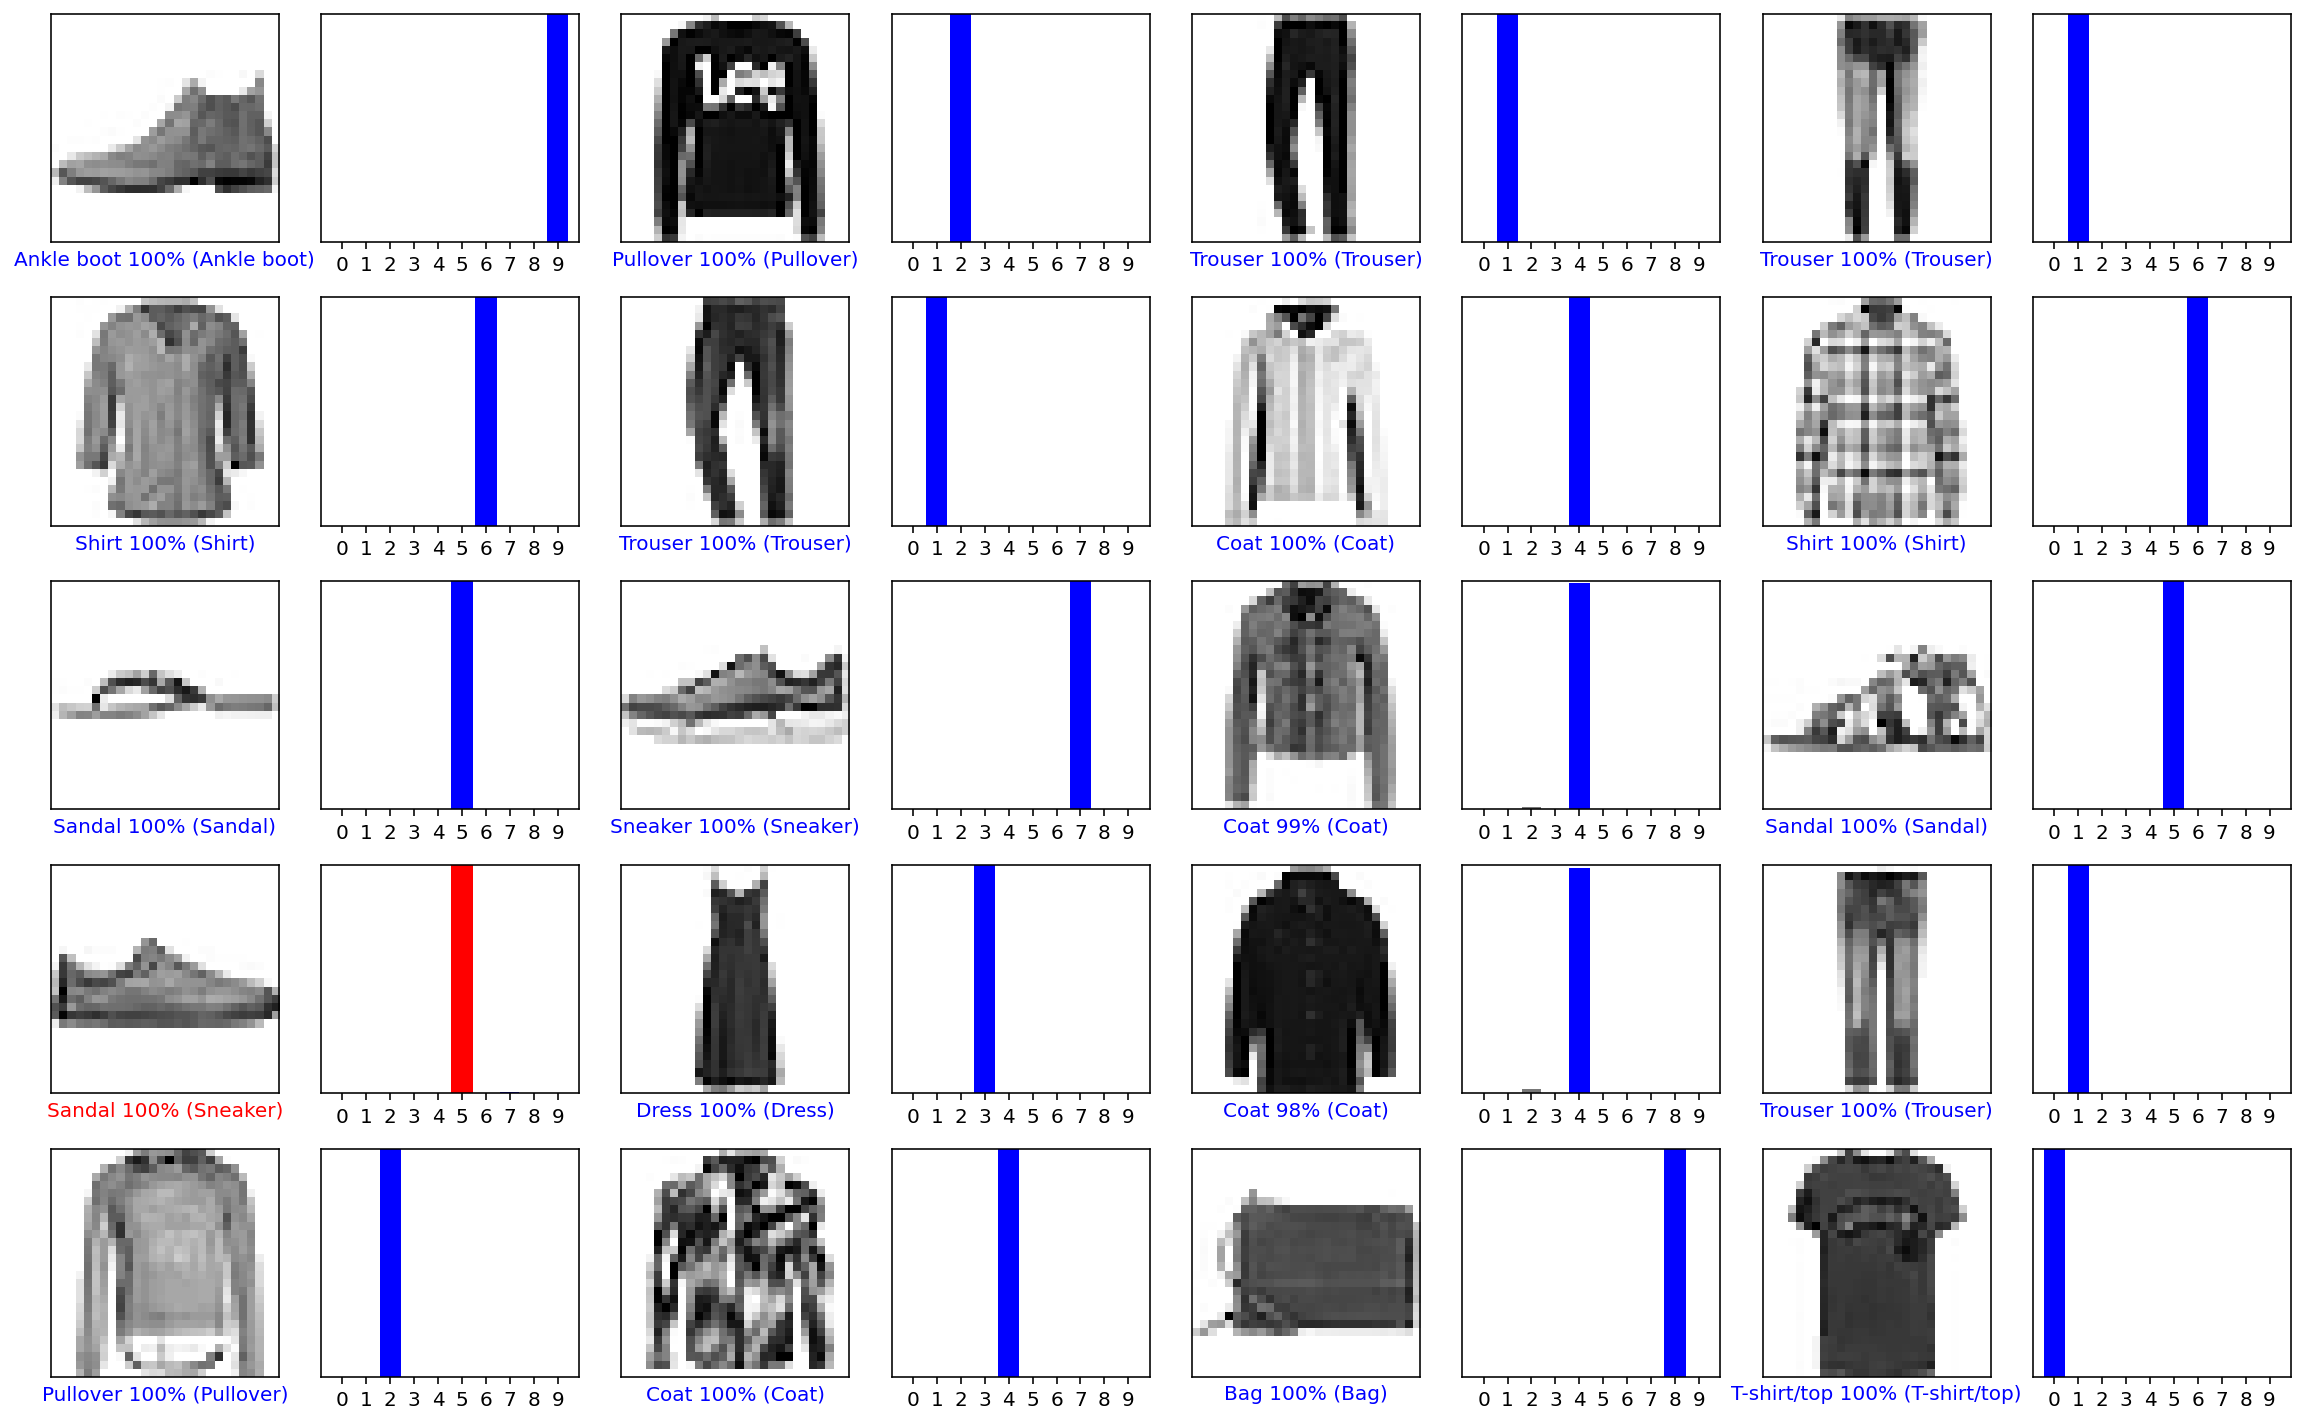

In [20]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, prediction[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, prediction[i], test_labels)

plt.tight_layout()
plt.show()

**Part 2**

In [1]:
# Import Fashion MNIST dataset.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
# uncomment f to open file
#f = open('/home/user/Michael/Final_Project/Accuracy_data.csv','a')
pd.options.display.float_format = '{:,.6f}'.format
fashion = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion.load_data()

In [2]:
# Build a model to predict the class of clothing
model = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(8, activation='relu'),
                             tf.keras.layers.Dense(10, activation='softmax') ])
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 6280      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


In [3]:
# Fit the model with the training dataset.

Accuracy = []
Epo = []
for epoch in np.arange(100,301,100):
    evaluate = model.fit(train_images, train_labels, epochs=epoch,  batch_size = 10000)
    Accuracy.append(evaluate.history['accuracy'][epoch-1])
    Epo.append(epoch)

main_perform = pd.DataFrame({'dense_nodes':8, 'multiply_nodes':0, 'Accuracy':Accuracy, 'epochs':Epo})
#set header to True for the first simulation and False afterwards
# uncomment main_perform when the file is open.
#main_perform.to_csv(f, mode='a', header=False ,index=False)


Epoch 1/100


1/6 [====>.........................] - ETA: 2s - loss: 130.9200 - accuracy: 0.1283

3/6 [==============>...............] - ETA: 0s - loss: 105.8652 - accuracy: 0.1231

4/6 [===================>..........] - ETA: 0s - loss: 97.6474 - accuracy: 0.1203 

6/6 [==============================] - ETA: 0s - loss: 84.7396 - accuracy: 0.1185

6/6 [==============================] - 1s 46ms/step - loss: 80.4629 - accuracy: 0.1183


Epoch 2/100
1/6 [====>.........................] - ETA: 0s - loss: 8.7583 - accuracy: 0.1437

3/6 [==============>...............] - ETA: 0s - loss: 7.5224 - accuracy: 0.1362

5/6 [========================>.....] - ETA: 0s - loss: 6.7139 - accuracy: 0.1319

6/6 [==============================] - 0s 43ms/step - loss: 6.1926 - accuracy: 0.1291


Epoch 3/100
1/6 [====>.........................] - ETA: 0s - loss: 2.8322 - accuracy: 0.1123

3/6 [==============>...............] - ETA: 0s - loss: 2.7925 - accuracy: 0.1091

4/6 [===================>..........] - ETA: 0s - loss: 2.7701 - accuracy: 0.1088

6/6 [==============================] - ETA: 0s - loss: 2.7294 - accuracy: 0.1079

6/6 [==============================] - 0s 40ms/step - loss: 2.7152 - accuracy: 0.1075


Epoch 4/100
1/6 [====>.........................] - ETA: 0s - loss: 2.4289 - accuracy: 0.0998

3/6 [==============>...............] - ETA: 0s - loss: 2.4222 - accuracy: 0.1009

5/6 [========================>.....] - ETA: 0s - loss: 2.4172 - accuracy: 0.1018

6/6 [==============================] - 0s 40ms/step - loss: 2.4120 - accuracy: 0.1021


Epoch 5/100
1/6 [====>.........................] - ETA: 0s - loss: 2.3727 - accuracy: 0.0993

2/6 [=========>....................] - ETA: 0s - loss: 2.3660 - accuracy: 0.0999

4/6 [===================>..........] - ETA: 0s - loss: 2.3593 - accuracy: 0.1015

6/6 [==============================] - 0s 39ms/step - loss: 2.3548 - accuracy: 0.1017


Epoch 6/100
1/6 [====>.........................] - ETA: 0s - loss: 2.3392 - accuracy: 0.1040

3/6 [==============>...............] - ETA: 0s - loss: 2.3354 - accuracy: 0.1038

5/6 [========================>.....] - ETA: 0s - loss: 2.3349 - accuracy: 0.1035

6/6 [==============================] - ETA: 0s - loss: 2.3343 - accuracy: 0.1032

6/6 [==============================] - 0s 66ms/step - loss: 2.3338 - accuracy: 0.1030


Epoch 7/100
1/6 [====>.........................] - ETA: 0s - loss: 2.3167 - accuracy: 0.1018

2/6 [=========>....................] - ETA: 0s - loss: 2.3223 - accuracy: 0.1011

3/6 [==============>...............] - ETA: 0s - loss: 2.3235 - accuracy: 0.1010

4/6 [===================>..........] - ETA: 0s - loss: 2.3244 - accuracy: 0.1008

5/6 [========================>.....] - ETA: 0s - loss: 2.3243 - accuracy: 0.1008

6/6 [==============================] - 0s 64ms/step - loss: 2.3241 - accuracy: 0.1010


Epoch 8/100


1/6 [====>.........................] - ETA: 0s - loss: 2.3170 - accuracy: 0.1004

2/6 [=========>....................] - ETA: 0s - loss: 2.3164 - accuracy: 0.0999

4/6 [===================>..........] - ETA: 0s - loss: 2.3169 - accuracy: 0.1003

5/6 [========================>.....] - ETA: 0s - loss: 2.3175 - accuracy: 0.1005

6/6 [==============================] - 0s 60ms/step - loss: 2.3182 - accuracy: 0.1008


Epoch 9/100
1/6 [====>.........................] - ETA: 0s - loss: 2.3189 - accuracy: 0.1015

3/6 [==============>...............] - ETA: 0s - loss: 2.3155 - accuracy: 0.1009

4/6 [===================>..........] - ETA: 0s - loss: 2.3155 - accuracy: 0.1007

5/6 [========================>.....] - ETA: 0s - loss: 2.3162 - accuracy: 0.1007

6/6 [==============================] - ETA: 0s - loss: 2.3164 - accuracy: 0.1009

6/6 [==============================] - 0s 84ms/step - loss: 2.3166 - accuracy: 0.1009


Epoch 10/100


1/6 [====>.........................] - ETA: 0s - loss: 2.3122 - accuracy: 0.1008

2/6 [=========>....................] - ETA: 0s - loss: 2.3176 - accuracy: 0.1011

3/6 [==============>...............] - ETA: 0s - loss: 2.3184 - accuracy: 0.1010

5/6 [========================>.....] - ETA: 0s - loss: 2.3178 - accuracy: 0.1011

6/6 [==============================] - 0s 63ms/step - loss: 2.3175 - accuracy: 0.1012


Epoch 11/100


1/6 [====>.........................] - ETA: 0s - loss: 2.3162 - accuracy: 0.1036

3/6 [==============>...............] - ETA: 0s - loss: 2.3166 - accuracy: 0.1026

5/6 [========================>.....] - ETA: 0s - loss: 2.3159 - accuracy: 0.1020

6/6 [==============================] - ETA: 0s - loss: 2.3158 - accuracy: 0.1019

6/6 [==============================] - 0s 40ms/step - loss: 2.3158 - accuracy: 0.1018


Epoch 12/100
1/6 [====>.........................] - ETA: 0s - loss: 2.3092 - accuracy: 0.1087

2/6 [=========>....................] - ETA: 0s - loss: 2.3101 - accuracy: 0.1072

4/6 [===================>..........] - ETA: 0s - loss: 2.3126 - accuracy: 0.1049

5/6 [========================>.....] - ETA: 0s - loss: 2.3131 - accuracy: 0.1042

6/6 [==============================] - 0s 43ms/step - loss: 2.3136 - accuracy: 0.1034


Epoch 13/100
1/6 [====>.........................] - ETA: 0s - loss: 2.3130 - accuracy: 0.1025

3/6 [==============>...............] - ETA: 0s - loss: 2.3168 - accuracy: 0.1013

4/6 [===================>..........] - ETA: 0s - loss: 2.3163 - accuracy: 0.1013

6/6 [==============================] - ETA: 0s - loss: 2.3158 - accuracy: 0.1014

6/6 [==============================] - 0s 39ms/step - loss: 2.3156 - accuracy: 0.1014


Epoch 14/100
1/6 [====>.........................] - ETA: 0s - loss: 2.3151 - accuracy: 0.0941

3/6 [==============>...............] - ETA: 0s - loss: 2.3154 - accuracy: 0.0977

5/6 [========================>.....] - ETA: 0s - loss: 2.3144 - accuracy: 0.0986

6/6 [==============================] - 0s 39ms/step - loss: 2.3143 - accuracy: 0.0994


Epoch 15/100
1/6 [====>.........................] - ETA: 0s - loss: 2.3087 - accuracy: 0.0995

2/6 [=========>....................] - ETA: 0s - loss: 2.3124 - accuracy: 0.1011

4/6 [===================>..........] - ETA: 0s - loss: 2.3145 - accuracy: 0.1014

5/6 [========================>.....] - ETA: 0s - loss: 2.3147 - accuracy: 0.1015

6/6 [==============================] - 0s 39ms/step - loss: 2.3144 - accuracy: 0.1015


Epoch 16/100
1/6 [====>.........................] - ETA: 0s - loss: 2.3108 - accuracy: 0.0984

3/6 [==============>...............] - ETA: 0s - loss: 2.3109 - accuracy: 0.0993

4/6 [===================>..........] - ETA: 0s - loss: 2.3115 - accuracy: 0.0996

6/6 [==============================] - ETA: 0s - loss: 2.3123 - accuracy: 0.1004

6/6 [==============================] - 0s 42ms/step - loss: 2.3124 - accuracy: 0.1005


Epoch 17/100
1/6 [====>.........................] - ETA: 0s - loss: 2.3197 - accuracy: 0.0972

2/6 [=========>....................] - ETA: 0s - loss: 2.3206 - accuracy: 0.0976

5/6 [========================>.....] - ETA: 0s - loss: 2.3175 - accuracy: 0.0991

6/6 [==============================] - 0s 37ms/step - loss: 2.3162 - accuracy: 0.0998


Epoch 18/100
1/6 [====>.........................] - ETA: 0s - loss: 2.3151 - accuracy: 0.1018

2/6 [=========>....................] - ETA: 0s - loss: 2.3148 - accuracy: 0.1012

3/6 [==============>...............] - ETA: 0s - loss: 2.3134 - accuracy: 0.1010

4/6 [===================>..........] - ETA: 0s - loss: 2.3131 - accuracy: 0.1011

5/6 [========================>.....] - ETA: 0s - loss: 2.3131 - accuracy: 0.1012

6/6 [==============================] - ETA: 0s - loss: 2.3130 - accuracy: 0.1013

6/6 [==============================] - 0s 91ms/step - loss: 2.3129 - accuracy: 0.1013


Epoch 19/100
1/6 [====>.........................] - ETA: 0s - loss: 2.3100 - accuracy: 0.1026

3/6 [==============>...............] - ETA: 0s - loss: 2.3118 - accuracy: 0.1025

4/6 [===================>..........] - ETA: 0s - loss: 2.3113 - accuracy: 0.1025

6/6 [==============================] - ETA: 0s - loss: 2.3113 - accuracy: 0.1023

6/6 [==============================] - 0s 60ms/step - loss: 2.3114 - accuracy: 0.1022


Epoch 20/100


1/6 [====>.........................] - ETA: 0s - loss: 2.3059 - accuracy: 0.1039

3/6 [==============>...............] - ETA: 0s - loss: 2.3092 - accuracy: 0.1021

5/6 [========================>.....] - ETA: 0s - loss: 2.3095 - accuracy: 0.1022

6/6 [==============================] - 0s 38ms/step - loss: 2.3101 - accuracy: 0.1021


Epoch 21/100


1/6 [====>.........................] - ETA: 0s - loss: 2.3146 - accuracy: 0.1042

2/6 [=========>....................] - ETA: 0s - loss: 2.3150 - accuracy: 0.1044

4/6 [===================>..........] - ETA: 0s - loss: 2.3130 - accuracy: 0.1039

6/6 [==============================] - 0s 38ms/step - loss: 2.3124 - accuracy: 0.1030


Epoch 22/100


1/6 [====>.........................] - ETA: 0s - loss: 2.3109 - accuracy: 0.0992

3/6 [==============>...............] - ETA: 0s - loss: 2.3125 - accuracy: 0.0998

6/6 [==============================] - ETA: 0s - loss: 2.3117 - accuracy: 0.1005

6/6 [==============================] - 0s 39ms/step - loss: 2.3116 - accuracy: 0.1007


Epoch 23/100


1/6 [====>.........................] - ETA: 0s - loss: 2.3078 - accuracy: 0.1040

2/6 [=========>....................] - ETA: 0s - loss: 2.3084 - accuracy: 0.1029

4/6 [===================>..........] - ETA: 0s - loss: 2.3093 - accuracy: 0.1029

5/6 [========================>.....] - ETA: 0s - loss: 2.3095 - accuracy: 0.1028

6/6 [==============================] - 0s 39ms/step - loss: 2.3098 - accuracy: 0.1025


Epoch 24/100
1/6 [====>.........................] - ETA: 0s - loss: 2.3119 - accuracy: 0.1048

3/6 [==============>...............] - ETA: 0s - loss: 2.3113 - accuracy: 0.1037

4/6 [===================>..........] - ETA: 0s - loss: 2.3114 - accuracy: 0.1038

6/6 [==============================] - ETA: 0s - loss: 2.3112 - accuracy: 0.1033

6/6 [==============================] - 0s 40ms/step - loss: 2.3111 - accuracy: 0.1031


Epoch 25/100
1/6 [====>.........................] - ETA: 0s - loss: 2.3193 - accuracy: 0.1041

3/6 [==============>...............] - ETA: 0s - loss: 2.3148 - accuracy: 0.1045

5/6 [========================>.....] - ETA: 0s - loss: 2.3132 - accuracy: 0.1034

6/6 [==============================] - 0s 40ms/step - loss: 2.3123 - accuracy: 0.1029


Epoch 26/100
1/6 [====>.........................] - ETA: 0s - loss: 2.3096 - accuracy: 0.1052

2/6 [=========>....................] - ETA: 0s - loss: 2.3092 - accuracy: 0.1048

4/6 [===================>..........] - ETA: 0s - loss: 2.3084 - accuracy: 0.1041

6/6 [==============================] - ETA: 0s - loss: 2.3086 - accuracy: 0.1035

6/6 [==============================] - 0s 40ms/step - loss: 2.3088 - accuracy: 0.1033


Epoch 27/100


1/6 [====>.........................] - ETA: 0s - loss: 2.3068 - accuracy: 0.1042

2/6 [=========>....................] - ETA: 0s - loss: 2.3071 - accuracy: 0.1048

3/6 [==============>...............] - ETA: 0s - loss: 2.3086 - accuracy: 0.1047

4/6 [===================>..........] - ETA: 0s - loss: 2.3088 - accuracy: 0.1040

5/6 [========================>.....] - ETA: 0s - loss: 2.3088 - accuracy: 0.1036

6/6 [==============================] - ETA: 0s - loss: 2.3089 - accuracy: 0.1034

6/6 [==============================] - 1s 87ms/step - loss: 2.3089 - accuracy: 0.1032


Epoch 28/100
1/6 [====>.........................] - ETA: 0s - loss: 2.3024 - accuracy: 0.0990

3/6 [==============>...............] - ETA: 0s - loss: 2.3042 - accuracy: 0.1019

5/6 [========================>.....] - ETA: 0s - loss: 2.3060 - accuracy: 0.1022

6/6 [==============================] - 0s 44ms/step - loss: 2.3068 - accuracy: 0.1021


Epoch 29/100
1/6 [====>.........................] - ETA: 0s - loss: 2.3110 - accuracy: 0.1041

3/6 [==============>...............] - ETA: 0s - loss: 2.3067 - accuracy: 0.1029

5/6 [========================>.....] - ETA: 0s - loss: 2.3067 - accuracy: 0.1026

6/6 [==============================] - 0s 40ms/step - loss: 2.3072 - accuracy: 0.1025


Epoch 30/100
1/6 [====>.........................] - ETA: 0s - loss: 2.3112 - accuracy: 0.1032

3/6 [==============>...............] - ETA: 0s - loss: 2.3097 - accuracy: 0.1034

5/6 [========================>.....] - ETA: 0s - loss: 2.3089 - accuracy: 0.1033

6/6 [==============================] - 0s 41ms/step - loss: 2.3087 - accuracy: 0.1030


Epoch 31/100
1/6 [====>.........................] - ETA: 0s - loss: 2.2996 - accuracy: 0.1001

2/6 [=========>....................] - ETA: 0s - loss: 2.3004 - accuracy: 0.1001

4/6 [===================>..........] - ETA: 0s - loss: 2.3041 - accuracy: 0.1015

6/6 [==============================] - ETA: 0s - loss: 2.3052 - accuracy: 0.1018

6/6 [==============================] - 0s 39ms/step - loss: 2.3055 - accuracy: 0.1019


Epoch 32/100


1/6 [====>.........................] - ETA: 0s - loss: 2.3038 - accuracy: 0.1016

3/6 [==============>...............] - ETA: 0s - loss: 2.3061 - accuracy: 0.1022

4/6 [===================>..........] - ETA: 0s - loss: 2.3062 - accuracy: 0.1023

6/6 [==============================] - ETA: 0s - loss: 2.3066 - accuracy: 0.1021

6/6 [==============================] - 0s 40ms/step - loss: 2.3067 - accuracy: 0.1022


Epoch 33/100
1/6 [====>.........................] - ETA: 0s - loss: 2.3153 - accuracy: 0.1055

3/6 [==============>...............] - ETA: 0s - loss: 2.3117 - accuracy: 0.1046

5/6 [========================>.....] - ETA: 0s - loss: 2.3094 - accuracy: 0.1040

6/6 [==============================] - 0s 39ms/step - loss: 2.3086 - accuracy: 0.1036


Epoch 34/100
1/6 [====>.........................] - ETA: 0s - loss: 2.3035 - accuracy: 0.1034

2/6 [=========>....................] - ETA: 0s - loss: 2.3028 - accuracy: 0.1036

4/6 [===================>..........] - ETA: 0s - loss: 2.3037 - accuracy: 0.1026

6/6 [==============================] - ETA: 0s - loss: 2.3044 - accuracy: 0.1024

6/6 [==============================] - 0s 43ms/step - loss: 2.3047 - accuracy: 0.1025


Epoch 35/100


1/6 [====>.........................] - ETA: 0s - loss: 2.3103 - accuracy: 0.1032

2/6 [=========>....................] - ETA: 0s - loss: 2.3101 - accuracy: 0.1033

3/6 [==============>...............] - ETA: 0s - loss: 2.3087 - accuracy: 0.1033

4/6 [===================>..........] - ETA: 0s - loss: 2.3078 - accuracy: 0.1034

5/6 [========================>.....] - ETA: 0s - loss: 2.3073 - accuracy: 0.1034

6/6 [==============================] - 0s 70ms/step - loss: 2.3068 - accuracy: 0.1033


Epoch 36/100


1/6 [====>.........................] - ETA: 0s - loss: 2.3058 - accuracy: 0.1010

2/6 [=========>....................] - ETA: 0s - loss: 2.3043 - accuracy: 0.1003

4/6 [===================>..........] - ETA: 0s - loss: 2.3037 - accuracy: 0.1015

5/6 [========================>.....] - ETA: 0s - loss: 2.3038 - accuracy: 0.1017

6/6 [==============================] - 0s 63ms/step - loss: 2.3042 - accuracy: 0.1020


Epoch 37/100
1/6 [====>.........................] - ETA: 0s - loss: 2.3113 - accuracy: 0.1021

4/6 [===================>..........] - ETA: 0s - loss: 2.3075 - accuracy: 0.1030

6/6 [==============================] - ETA: 0s - loss: 2.3065 - accuracy: 0.1029

6/6 [==============================] - 0s 39ms/step - loss: 2.3062 - accuracy: 0.1029


Epoch 38/100
1/6 [====>.........................] - ETA: 0s - loss: 2.3054 - accuracy: 0.0979

3/6 [==============>...............] - ETA: 0s - loss: 2.3048 - accuracy: 0.1003

5/6 [========================>.....] - ETA: 0s - loss: 2.3044 - accuracy: 0.1015

6/6 [==============================] - 0s 39ms/step - loss: 2.3044 - accuracy: 0.1020


Epoch 39/100
1/6 [====>.........................] - ETA: 0s - loss: 2.3061 - accuracy: 0.1031

2/6 [=========>....................] - ETA: 0s - loss: 2.3058 - accuracy: 0.1036

4/6 [===================>..........] - ETA: 0s - loss: 2.3047 - accuracy: 0.1035

6/6 [==============================] - ETA: 0s - loss: 2.3043 - accuracy: 0.1035

6/6 [==============================] - 0s 50ms/step - loss: 2.3042 - accuracy: 0.1034


Epoch 40/100


1/6 [====>.........................] - ETA: 0s - loss: 2.2963 - accuracy: 0.1041

2/6 [=========>....................] - ETA: 0s - loss: 2.2998 - accuracy: 0.1029

5/6 [========================>.....] - ETA: 0s - loss: 2.3017 - accuracy: 0.1031

6/6 [==============================] - 0s 41ms/step - loss: 2.3022 - accuracy: 0.1031


Epoch 41/100
1/6 [====>.........................] - ETA: 0s - loss: 2.2983 - accuracy: 0.1049

3/6 [==============>...............] - ETA: 0s - loss: 2.3008 - accuracy: 0.1042

4/6 [===================>..........] - ETA: 0s - loss: 2.3014 - accuracy: 0.1039

6/6 [==============================] - ETA: 0s - loss: 2.3020 - accuracy: 0.1037

6/6 [==============================] - 0s 39ms/step - loss: 2.3021 - accuracy: 0.1036


Epoch 42/100
1/6 [====>.........................] - ETA: 0s - loss: 2.3018 - accuracy: 0.1061

3/6 [==============>...............] - ETA: 0s - loss: 2.3047 - accuracy: 0.1045

5/6 [========================>.....] - ETA: 0s - loss: 2.3043 - accuracy: 0.1040

6/6 [==============================] - ETA: 0s - loss: 2.3040 - accuracy: 0.1039

6/6 [==============================] - 0s 44ms/step - loss: 2.3038 - accuracy: 0.1038


Epoch 43/100


1/6 [====>.........................] - ETA: 0s - loss: 2.3039 - accuracy: 0.1039

2/6 [=========>....................] - ETA: 0s - loss: 2.3020 - accuracy: 0.1052

3/6 [==============>...............] - ETA: 0s - loss: 2.3017 - accuracy: 0.1050

4/6 [===================>..........] - ETA: 0s - loss: 2.3013 - accuracy: 0.1046

5/6 [========================>.....] - ETA: 0s - loss: 2.3010 - accuracy: 0.1044

6/6 [==============================] - 0s 80ms/step - loss: 2.3013 - accuracy: 0.1042


Epoch 44/100
1/6 [====>.........................] - ETA: 0s - loss: 2.2934 - accuracy: 0.1043

2/6 [=========>....................] - ETA: 0s - loss: 2.2972 - accuracy: 0.1042

4/6 [===================>..........] - ETA: 0s - loss: 2.2994 - accuracy: 0.1043

6/6 [==============================] - ETA: 0s - loss: 2.3002 - accuracy: 0.1041

6/6 [==============================] - 0s 61ms/step - loss: 2.3004 - accuracy: 0.1041


Epoch 45/100
1/6 [====>.........................] - ETA: 0s - loss: 2.2939 - accuracy: 0.1065

2/6 [=========>....................] - ETA: 0s - loss: 2.2958 - accuracy: 0.1053

4/6 [===================>..........] - ETA: 0s - loss: 2.2980 - accuracy: 0.1050

6/6 [==============================] - ETA: 0s - loss: 2.2989 - accuracy: 0.1048

6/6 [==============================] - 0s 40ms/step - loss: 2.2992 - accuracy: 0.1047


Epoch 46/100


1/6 [====>.........................] - ETA: 0s - loss: 2.2929 - accuracy: 0.1027

3/6 [==============>...............] - ETA: 0s - loss: 2.2956 - accuracy: 0.1036

5/6 [========================>.....] - ETA: 0s - loss: 2.2973 - accuracy: 0.1035

6/6 [==============================] - ETA: 0s - loss: 2.2978 - accuracy: 0.1035

6/6 [==============================] - 0s 41ms/step - loss: 2.2981 - accuracy: 0.1035


Epoch 47/100
1/6 [====>.........................] - ETA: 0s - loss: 2.3024 - accuracy: 0.0990

2/6 [=========>....................] - ETA: 0s - loss: 2.3022 - accuracy: 0.0999

4/6 [===================>..........] - ETA: 0s - loss: 2.3014 - accuracy: 0.1011

5/6 [========================>.....] - ETA: 0s - loss: 2.3013 - accuracy: 0.1014

6/6 [==============================] - 0s 41ms/step - loss: 2.3008 - accuracy: 0.1019


Epoch 48/100


1/6 [====>.........................] - ETA: 0s - loss: 2.2934 - accuracy: 0.1077

3/6 [==============>...............] - ETA: 0s - loss: 2.2951 - accuracy: 0.1061

5/6 [========================>.....] - ETA: 0s - loss: 2.2959 - accuracy: 0.1056

6/6 [==============================] - ETA: 0s - loss: 2.2965 - accuracy: 0.1054

6/6 [==============================] - 0s 40ms/step - loss: 2.2968 - accuracy: 0.1053


Epoch 49/100


1/6 [====>.........................] - ETA: 0s - loss: 2.3038 - accuracy: 0.1078

2/6 [=========>....................] - ETA: 0s - loss: 2.3013 - accuracy: 0.1080

3/6 [==============>...............] - ETA: 0s - loss: 2.3007 - accuracy: 0.1075

5/6 [========================>.....] - ETA: 0s - loss: 2.3001 - accuracy: 0.1070

6/6 [==============================] - ETA: 0s - loss: 2.2998 - accuracy: 0.1066

6/6 [==============================] - 0s 78ms/step - loss: 2.2997 - accuracy: 0.1063


Epoch 50/100
1/6 [====>.........................] - ETA: 0s - loss: 2.2999 - accuracy: 0.1019

3/6 [==============>...............] - ETA: 0s - loss: 2.3006 - accuracy: 0.1028

4/6 [===================>..........] - ETA: 0s - loss: 2.3001 - accuracy: 0.1031

6/6 [==============================] - ETA: 0s - loss: 2.2994 - accuracy: 0.1035

6/6 [==============================] - 0s 62ms/step - loss: 2.2992 - accuracy: 0.1037


Epoch 51/100


1/6 [====>.........................] - ETA: 0s - loss: 2.2988 - accuracy: 0.1086

2/6 [=========>....................] - ETA: 0s - loss: 2.2991 - accuracy: 0.1071

4/6 [===================>..........] - ETA: 0s - loss: 2.2983 - accuracy: 0.1065

5/6 [========================>.....] - ETA: 0s - loss: 2.2983 - accuracy: 0.1065

6/6 [==============================] - 0s 41ms/step - loss: 2.2981 - accuracy: 0.1061


Epoch 52/100


1/6 [====>.........................] - ETA: 0s - loss: 2.3001 - accuracy: 0.1064

3/6 [==============>...............] - ETA: 0s - loss: 2.2996 - accuracy: 0.1067

5/6 [========================>.....] - ETA: 0s - loss: 2.2992 - accuracy: 0.1063

6/6 [==============================] - ETA: 0s - loss: 2.2988 - accuracy: 0.1061

6/6 [==============================] - 0s 41ms/step - loss: 2.2986 - accuracy: 0.1060


Epoch 53/100
1/6 [====>.........................] - ETA: 0s - loss: 2.2995 - accuracy: 0.1055

2/6 [=========>....................] - ETA: 0s - loss: 2.2998 - accuracy: 0.1053

4/6 [===================>..........] - ETA: 0s - loss: 2.2988 - accuracy: 0.1052

6/6 [==============================] - ETA: 0s - loss: 2.2980 - accuracy: 0.1052

6/6 [==============================] - 0s 51ms/step - loss: 2.2977 - accuracy: 0.1052


Epoch 54/100


1/6 [====>.........................] - ETA: 0s - loss: 2.2925 - accuracy: 0.1127

2/6 [=========>....................] - ETA: 0s - loss: 2.2917 - accuracy: 0.1107

3/6 [==============>...............] - ETA: 0s - loss: 2.2921 - accuracy: 0.1091

4/6 [===================>..........] - ETA: 0s - loss: 2.2925 - accuracy: 0.1082

5/6 [========================>.....] - ETA: 0s - loss: 2.2929 - accuracy: 0.1077

6/6 [==============================] - ETA: 0s - loss: 2.2933 - accuracy: 0.1073

6/6 [==============================] - 1s 95ms/step - loss: 2.2937 - accuracy: 0.1071


Epoch 55/100


1/6 [====>.........................] - ETA: 0s - loss: 2.2968 - accuracy: 0.1072

2/6 [=========>....................] - ETA: 0s - loss: 2.2980 - accuracy: 0.1074

4/6 [===================>..........] - ETA: 0s - loss: 2.2971 - accuracy: 0.1066

6/6 [==============================] - ETA: 0s - loss: 2.2965 - accuracy: 0.1063

6/6 [==============================] - 0s 44ms/step - loss: 2.2963 - accuracy: 0.1062


Epoch 56/100


1/6 [====>.........................] - ETA: 0s - loss: 2.2920 - accuracy: 0.1053

3/6 [==============>...............] - ETA: 0s - loss: 2.2929 - accuracy: 0.1042

5/6 [========================>.....] - ETA: 0s - loss: 2.2936 - accuracy: 0.1049

6/6 [==============================] - 0s 41ms/step - loss: 2.2939 - accuracy: 0.1052


Epoch 57/100
1/6 [====>.........................] - ETA: 0s - loss: 2.2963 - accuracy: 0.1026

2/6 [=========>....................] - ETA: 0s - loss: 2.2972 - accuracy: 0.1029

4/6 [===================>..........] - ETA: 0s - loss: 2.2963 - accuracy: 0.1044

6/6 [==============================] - ETA: 0s - loss: 2.2955 - accuracy: 0.1049

6/6 [==============================] - 0s 50ms/step - loss: 2.2953 - accuracy: 0.1051


Epoch 58/100


1/6 [====>.........................] - ETA: 0s - loss: 2.2910 - accuracy: 0.1050

2/6 [=========>....................] - ETA: 0s - loss: 2.2911 - accuracy: 0.1044

4/6 [===================>..........] - ETA: 0s - loss: 2.2917 - accuracy: 0.1048

5/6 [========================>.....] - ETA: 0s - loss: 2.2919 - accuracy: 0.1050

6/6 [==============================] - ETA: 0s - loss: 2.2922 - accuracy: 0.1050

6/6 [==============================] - 0s 59ms/step - loss: 2.2924 - accuracy: 0.1050


Epoch 59/100


1/6 [====>.........................] - ETA: 0s - loss: 2.2847 - accuracy: 0.1051

2/6 [=========>....................] - ETA: 0s - loss: 2.2869 - accuracy: 0.1055

4/6 [===================>..........] - ETA: 0s - loss: 2.2898 - accuracy: 0.1057

5/6 [========================>.....] - ETA: 0s - loss: 2.2906 - accuracy: 0.1058

6/6 [==============================] - ETA: 0s - loss: 2.2911 - accuracy: 0.1058

6/6 [==============================] - 0s 80ms/step - loss: 2.2914 - accuracy: 0.1058


Epoch 60/100


1/6 [====>.........................] - ETA: 0s - loss: 2.2931 - accuracy: 0.1107

3/6 [==============>...............] - ETA: 0s - loss: 2.2937 - accuracy: 0.1096

5/6 [========================>.....] - ETA: 0s - loss: 2.2937 - accuracy: 0.1085

6/6 [==============================] - 0s 47ms/step - loss: 2.2935 - accuracy: 0.1080


Epoch 61/100
1/6 [====>.........................] - ETA: 0s - loss: 2.2985 - accuracy: 0.1103

3/6 [==============>...............] - ETA: 0s - loss: 2.2953 - accuracy: 0.1082

4/6 [===================>..........] - ETA: 0s - loss: 2.2944 - accuracy: 0.1079

6/6 [==============================] - ETA: 0s - loss: 2.2939 - accuracy: 0.1073

6/6 [==============================] - 0s 44ms/step - loss: 2.2937 - accuracy: 0.1072


Epoch 62/100


1/6 [====>.........................] - ETA: 0s - loss: 2.2918 - accuracy: 0.1026

2/6 [=========>....................] - ETA: 0s - loss: 2.2924 - accuracy: 0.1045

3/6 [==============>...............] - ETA: 0s - loss: 2.2920 - accuracy: 0.1052

4/6 [===================>..........] - ETA: 0s - loss: 2.2919 - accuracy: 0.1053

5/6 [========================>.....] - ETA: 0s - loss: 2.2920 - accuracy: 0.1053

6/6 [==============================] - ETA: 0s - loss: 2.2919 - accuracy: 0.1053

6/6 [==============================] - 1s 102ms/step - loss: 2.2919 - accuracy: 0.1053


Epoch 63/100
1/6 [====>.........................] - ETA: 0s - loss: 2.2881 - accuracy: 0.1003

3/6 [==============>...............] - ETA: 0s - loss: 2.2907 - accuracy: 0.1027

5/6 [========================>.....] - ETA: 0s - loss: 2.2912 - accuracy: 0.1042

6/6 [==============================] - 0s 50ms/step - loss: 2.2912 - accuracy: 0.1049


Epoch 64/100


1/6 [====>.........................] - ETA: 0s - loss: 2.2896 - accuracy: 0.1097

2/6 [=========>....................] - ETA: 0s - loss: 2.2884 - accuracy: 0.1091

3/6 [==============>...............] - ETA: 0s - loss: 2.2897 - accuracy: 0.1085

4/6 [===================>..........] - ETA: 0s - loss: 2.2904 - accuracy: 0.1081

5/6 [========================>.....] - ETA: 0s - loss: 2.2907 - accuracy: 0.1079

6/6 [==============================] - ETA: 0s - loss: 2.2907 - accuracy: 0.1078

6/6 [==============================] - 0s 83ms/step - loss: 2.2907 - accuracy: 0.1078


Epoch 65/100


1/6 [====>.........................] - ETA: 0s - loss: 2.2863 - accuracy: 0.1116

2/6 [=========>....................] - ETA: 0s - loss: 2.2903 - accuracy: 0.1093

3/6 [==============>...............] - ETA: 0s - loss: 2.2906 - accuracy: 0.1086

5/6 [========================>.....] - ETA: 0s - loss: 2.2910 - accuracy: 0.1080

6/6 [==============================] - 0s 62ms/step - loss: 2.2908 - accuracy: 0.1079


Epoch 66/100


1/6 [====>.........................] - ETA: 0s - loss: 2.2865 - accuracy: 0.1053

3/6 [==============>...............] - ETA: 0s - loss: 2.2886 - accuracy: 0.1056

5/6 [========================>.....] - ETA: 0s - loss: 2.2893 - accuracy: 0.1059

6/6 [==============================] - ETA: 0s - loss: 2.2894 - accuracy: 0.1060

6/6 [==============================] - 0s 66ms/step - loss: 2.2895 - accuracy: 0.1060


Epoch 67/100


1/6 [====>.........................] - ETA: 0s - loss: 2.2851 - accuracy: 0.1094

2/6 [=========>....................] - ETA: 0s - loss: 2.2852 - accuracy: 0.1080

3/6 [==============>...............] - ETA: 0s - loss: 2.2860 - accuracy: 0.1076

4/6 [===================>..........] - ETA: 0s - loss: 2.2865 - accuracy: 0.1074

5/6 [========================>.....] - ETA: 0s - loss: 2.2870 - accuracy: 0.1072

6/6 [==============================] - 0s 80ms/step - loss: 2.2878 - accuracy: 0.1069


Epoch 68/100


1/6 [====>.........................] - ETA: 0s - loss: 2.2901 - accuracy: 0.1077

3/6 [==============>...............] - ETA: 0s - loss: 2.2898 - accuracy: 0.1098

5/6 [========================>.....] - ETA: 0s - loss: 2.2892 - accuracy: 0.1097

6/6 [==============================] - 0s 50ms/step - loss: 2.2892 - accuracy: 0.1092


Epoch 69/100


1/6 [====>.........................] - ETA: 0s - loss: 2.2869 - accuracy: 0.1096

3/6 [==============>...............] - ETA: 0s - loss: 2.2869 - accuracy: 0.1090

5/6 [========================>.....] - ETA: 0s - loss: 2.2873 - accuracy: 0.1090

6/6 [==============================] - ETA: 0s - loss: 2.2876 - accuracy: 0.1088

6/6 [==============================] - 0s 62ms/step - loss: 2.2878 - accuracy: 0.1087


Epoch 70/100
1/6 [====>.........................] - ETA: 0s - loss: 2.2859 - accuracy: 0.1087

2/6 [=========>....................] - ETA: 0s - loss: 2.2867 - accuracy: 0.1087

3/6 [==============>...............] - ETA: 0s - loss: 2.2868 - accuracy: 0.1087

4/6 [===================>..........] - ETA: 0s - loss: 2.2873 - accuracy: 0.1087

5/6 [========================>.....] - ETA: 0s - loss: 2.2877 - accuracy: 0.1087

6/6 [==============================] - ETA: 0s - loss: 2.2879 - accuracy: 0.1086

6/6 [==============================] - 0s 83ms/step - loss: 2.2880 - accuracy: 0.1085


Epoch 71/100


1/6 [====>.........................] - ETA: 0s - loss: 2.2890 - accuracy: 0.1005

3/6 [==============>...............] - ETA: 0s - loss: 2.2891 - accuracy: 0.1034

5/6 [========================>.....] - ETA: 0s - loss: 2.2888 - accuracy: 0.1039

6/6 [==============================] - 0s 46ms/step - loss: 2.2887 - accuracy: 0.1041


Epoch 72/100
1/6 [====>.........................] - ETA: 0s - loss: 2.2921 - accuracy: 0.1098

3/6 [==============>...............] - ETA: 0s - loss: 2.2902 - accuracy: 0.1092

5/6 [========================>.....] - ETA: 0s - loss: 2.2900 - accuracy: 0.1089

6/6 [==============================] - 0s 48ms/step - loss: 2.2895 - accuracy: 0.1087


Epoch 73/100


1/6 [====>.........................] - ETA: 0s - loss: 2.2816 - accuracy: 0.1115

2/6 [=========>....................] - ETA: 0s - loss: 2.2842 - accuracy: 0.1104

4/6 [===================>..........] - ETA: 0s - loss: 2.2861 - accuracy: 0.1088

5/6 [========================>.....] - ETA: 0s - loss: 2.2865 - accuracy: 0.1085

6/6 [==============================] - ETA: 0s - loss: 2.2868 - accuracy: 0.1082

6/6 [==============================] - 0s 81ms/step - loss: 2.2870 - accuracy: 0.1080


Epoch 74/100


1/6 [====>.........................] - ETA: 0s - loss: 2.2904 - accuracy: 0.1106

3/6 [==============>...............] - ETA: 0s - loss: 2.2900 - accuracy: 0.1106

4/6 [===================>..........] - ETA: 0s - loss: 2.2895 - accuracy: 0.1108

5/6 [========================>.....] - ETA: 0s - loss: 2.2892 - accuracy: 0.1105

6/6 [==============================] - 0s 67ms/step - loss: 2.2888 - accuracy: 0.1100


Epoch 75/100


1/6 [====>.........................] - ETA: 0s - loss: 2.2899 - accuracy: 0.1084

3/6 [==============>...............] - ETA: 0s - loss: 2.2875 - accuracy: 0.1079

5/6 [========================>.....] - ETA: 0s - loss: 2.2869 - accuracy: 0.1079

6/6 [==============================] - 0s 49ms/step - loss: 2.2872 - accuracy: 0.1081


Epoch 76/100
1/6 [====>.........................] - ETA: 0s - loss: 2.2883 - accuracy: 0.1062

3/6 [==============>...............] - ETA: 0s - loss: 2.2876 - accuracy: 0.1078

4/6 [===================>..........] - ETA: 0s - loss: 2.2879 - accuracy: 0.1078

6/6 [==============================] - ETA: 0s - loss: 2.2878 - accuracy: 0.1080

6/6 [==============================] - 0s 41ms/step - loss: 2.2877 - accuracy: 0.1080


Epoch 77/100
1/6 [====>.........................] - ETA: 0s - loss: 2.2914 - accuracy: 0.1073

3/6 [==============>...............] - ETA: 0s - loss: 2.2895 - accuracy: 0.1086

5/6 [========================>.....] - ETA: 0s - loss: 2.2885 - accuracy: 0.1086

6/6 [==============================] - 0s 40ms/step - loss: 2.2882 - accuracy: 0.1081


Epoch 78/100
1/6 [====>.........................] - ETA: 0s - loss: 2.2902 - accuracy: 0.1074

3/6 [==============>...............] - ETA: 0s - loss: 2.2893 - accuracy: 0.1070

5/6 [========================>.....] - ETA: 0s - loss: 2.2885 - accuracy: 0.1074

6/6 [==============================] - 0s 38ms/step - loss: 2.2881 - accuracy: 0.1074


Epoch 79/100
1/6 [====>.........................] - ETA: 0s - loss: 2.2855 - accuracy: 0.1119

2/6 [=========>....................] - ETA: 0s - loss: 2.2854 - accuracy: 0.1124

3/6 [==============>...............] - ETA: 0s - loss: 2.2859 - accuracy: 0.1116

4/6 [===================>..........] - ETA: 0s - loss: 2.2868 - accuracy: 0.1112

5/6 [========================>.....] - ETA: 0s - loss: 2.2871 - accuracy: 0.1106

6/6 [==============================] - ETA: 0s - loss: 2.2871 - accuracy: 0.1103

6/6 [==============================] - 0s 79ms/step - loss: 2.2871 - accuracy: 0.1101


Epoch 80/100


1/6 [====>.........................] - ETA: 0s - loss: 2.2867 - accuracy: 0.1063

3/6 [==============>...............] - ETA: 0s - loss: 2.2856 - accuracy: 0.1071

4/6 [===================>..........] - ETA: 0s - loss: 2.2856 - accuracy: 0.1076

6/6 [==============================] - ETA: 0s - loss: 2.2858 - accuracy: 0.1081

6/6 [==============================] - 0s 62ms/step - loss: 2.2860 - accuracy: 0.1082


Epoch 81/100


1/6 [====>.........................] - ETA: 0s - loss: 2.2890 - accuracy: 0.1154

3/6 [==============>...............] - ETA: 0s - loss: 2.2876 - accuracy: 0.1122

4/6 [===================>..........] - ETA: 0s - loss: 2.2874 - accuracy: 0.1118

5/6 [========================>.....] - ETA: 0s - loss: 2.2873 - accuracy: 0.1116

6/6 [==============================] - ETA: 0s - loss: 2.2872 - accuracy: 0.1111

6/6 [==============================] - 0s 66ms/step - loss: 2.2871 - accuracy: 0.1108


Epoch 82/100


1/6 [====>.........................] - ETA: 0s - loss: 2.2848 - accuracy: 0.1072

2/6 [=========>....................] - ETA: 0s - loss: 2.2858 - accuracy: 0.1082

3/6 [==============>...............] - ETA: 0s - loss: 2.2859 - accuracy: 0.1086

4/6 [===================>..........] - ETA: 0s - loss: 2.2863 - accuracy: 0.1087

5/6 [========================>.....] - ETA: 0s - loss: 2.2865 - accuracy: 0.1088

6/6 [==============================] - ETA: 0s - loss: 2.2865 - accuracy: 0.1088

In [2]:
# Build a model to predict the class of clothing with the multiply layer.
tf.keras.backend.set_floatx('float64')

# automate adding multiply nodes
def make_multi_node(inputs):
    mul = tf.keras.layers.Dense(2, activation='relu')(inputs)
    mul = tf.squeeze(mul, [1])
    in_d = tf.split(mul, 2, axis=1)
    mul_node = tf.keras.layers.multiply([in_d[0], in_d[1]])
    return mul_node

def replicate_multi_node(inputs, count):
    outs = [make_multi_node(inputs) for i in range(count)]
    outs = tf.concat(outs, axis=-1)
    return outs

def model_assessement(dense_node, multiply_node, epoch):
    # Split the 28*28 pixel to 28 columns and concatenate columns to a single column of width 784.
    inputs = tf.keras.layers.Input(shape=(28,28))
    inp = tf.split(inputs, num_or_size_splits=28, axis=1)
    flat = tf.concat(inp[:], axis=-1)



    Doutputs = tf.keras.layers.Dense(dense_node, activation='relu')(flat)
    Doutputs = tf.squeeze(Doutputs, [1])
    Moutputs = replicate_multi_node(flat, multiply_node)

    output = tf.concat([Doutputs, Moutputs], axis=-1)

    output = tf.keras.layers.Dense(10, activation='softmax')(output)

    # Build a keras model for training.
    Mmodel = tf.keras.models.Model(inputs=inputs, outputs=output)
    Mmodel.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    #Mmodel.summary()
    hist = Mmodel.fit(train_images, train_labels, epochs=epoch, batch_size = 10000)

    return hist.history['accuracy'][epoch-1]

In [5]:
# Evaluating the claim H(d,m) >= D(d+m)

for epoch in np.arange(100,301,100):
    accuracy = []
    dense_nodes = []
    multiply_nodes = []
    Epo = []
    for (dense_node, multiply_node) in zip(np.arange(2,7,2), np.arange(6,1,-2)):
        acc = model_assessement(dense_node, multiply_node, epoch)
        accuracy.append(acc)
        dense_nodes.append(dense_node)
        multiply_nodes.append(multiply_node)
        Epo.append(epoch)

    # Observe the accuracy of the model with different number of dense nodes and multiply nodes
    perform = pd.DataFrame({'dense_nodes':dense_nodes, 'multiply_nodes':multiply_nodes, 'Accuracy':accuracy, 'epochs':Epo})
    # uncomment perform when the file is open.
    #perform.to_csv(f, mode='a',  header=False ,index=False)


Epoch 1/100


1/6 [====>.........................] - ETA: 6s - loss: 14983.1875 - accuracy: 0.1120

2/6 [=========>....................] - ETA: 1s - loss: 12929.2346 - accuracy: 0.1229

3/6 [==============>...............] - ETA: 1s - loss: 11358.7519 - accuracy: 0.1308

4/6 [===================>..........] - ETA: 0s - loss: 10128.2487 - accuracy: 0.1356

5/6 [========================>.....] - ETA: 0s - loss: 9149.2003 - accuracy: 0.1384 

6/6 [==============================] - ETA: 0s - loss: 8355.8648 - accuracy: 0.1401

6/6 [==============================] - 3s 398ms/step - loss: 7789.1966 - accuracy: 0.1413


Epoch 2/100


1/6 [====>.........................] - ETA: 1s - loss: 67.9748 - accuracy: 0.1232

2/6 [=========>....................] - ETA: 1s - loss: 60.3607 - accuracy: 0.1193

3/6 [==============>...............] - ETA: 1s - loss: 53.8124 - accuracy: 0.1168

4/6 [===================>..........] - ETA: 0s - loss: 48.6568 - accuracy: 0.1152

5/6 [========================>.....] - ETA: 0s - loss: 44.5479 - accuracy: 0.1136

6/6 [==============================] - ETA: 0s - loss: 41.1758 - accuracy: 0.1124

6/6 [==============================] - 2s 338ms/step - loss: 38.7671 - accuracy: 0.1116


Epoch 3/100


1/6 [====>.........................] - ETA: 1s - loss: 5.1889 - accuracy: 0.0965

2/6 [=========>....................] - ETA: 1s - loss: 4.8446 - accuracy: 0.0975

3/6 [==============>...............] - ETA: 1s - loss: 4.6171 - accuracy: 0.0984

4/6 [===================>..........] - ETA: 0s - loss: 4.4395 - accuracy: 0.0997

5/6 [========================>.....] - ETA: 0s - loss: 4.2928 - accuracy: 0.1004

6/6 [==============================] - ETA: 0s - loss: 4.1715 - accuracy: 0.1009

6/6 [==============================] - 3s 444ms/step - loss: 4.0849 - accuracy: 0.1013


Epoch 4/100


1/6 [====>.........................] - ETA: 3s - loss: 2.5894 - accuracy: 0.1014

2/6 [=========>....................] - ETA: 1s - loss: 2.5765 - accuracy: 0.1021

3/6 [==============>...............] - ETA: 1s - loss: 2.5945 - accuracy: 0.1022

4/6 [===================>..........] - ETA: 1s - loss: 2.5962 - accuracy: 0.1024

5/6 [========================>.....] - ETA: 0s - loss: 2.5891 - accuracy: 0.1026

6/6 [==============================] - ETA: 0s - loss: 2.5877 - accuracy: 0.1028

6/6 [==============================] - 3s 464ms/step - loss: 2.5866 - accuracy: 0.1029


Epoch 5/100


1/6 [====>.........................] - ETA: 1s - loss: 2.5568 - accuracy: 0.1030

2/6 [=========>....................] - ETA: 1s - loss: 2.4946 - accuracy: 0.1030

3/6 [==============>...............] - ETA: 1s - loss: 2.4955 - accuracy: 0.1032

4/6 [===================>..........] - ETA: 0s - loss: 2.4950 - accuracy: 0.1035

5/6 [========================>.....] - ETA: 0s - loss: 2.4887 - accuracy: 0.1036

6/6 [==============================] - ETA: 0s - loss: 2.4809 - accuracy: 0.1035

6/6 [==============================] - 2s 337ms/step - loss: 2.4754 - accuracy: 0.1035


Epoch 6/100


1/6 [====>.........................] - ETA: 1s - loss: 2.5343 - accuracy: 0.1013

2/6 [=========>....................] - ETA: 1s - loss: 2.4834 - accuracy: 0.1015

3/6 [==============>...............] - ETA: 0s - loss: 2.4643 - accuracy: 0.1020

4/6 [===================>..........] - ETA: 0s - loss: 2.4554 - accuracy: 0.1023

5/6 [========================>.....] - ETA: 0s - loss: 2.4479 - accuracy: 0.1024

6/6 [==============================] - ETA: 0s - loss: 2.4402 - accuracy: 0.1024

6/6 [==============================] - 2s 327ms/step - loss: 2.4347 - accuracy: 0.1024


Epoch 7/100


1/6 [====>.........................] - ETA: 1s - loss: 2.5146 - accuracy: 0.1002

2/6 [=========>....................] - ETA: 1s - loss: 2.4699 - accuracy: 0.1010

3/6 [==============>...............] - ETA: 1s - loss: 2.4429 - accuracy: 0.1013

4/6 [===================>..........] - ETA: 0s - loss: 2.4298 - accuracy: 0.1016

5/6 [========================>.....] - ETA: 0s - loss: 2.4209 - accuracy: 0.1018

6/6 [==============================] - ETA: 0s - loss: 2.4148 - accuracy: 0.1018

6/6 [==============================] - 2s 339ms/step - loss: 2.4105 - accuracy: 0.1019


Epoch 8/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3136 - accuracy: 0.1025

2/6 [=========>....................] - ETA: 1s - loss: 2.3729 - accuracy: 0.1026

3/6 [==============>...............] - ETA: 1s - loss: 2.3916 - accuracy: 0.1027

4/6 [===================>..........] - ETA: 0s - loss: 2.3966 - accuracy: 0.1026

5/6 [========================>.....] - ETA: 0s - loss: 2.3951 - accuracy: 0.1024

6/6 [==============================] - ETA: 0s - loss: 2.3922 - accuracy: 0.1023

6/6 [==============================] - 3s 437ms/step - loss: 2.3900 - accuracy: 0.1022


Epoch 9/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3038 - accuracy: 0.1008

2/6 [=========>....................] - ETA: 2s - loss: 2.3036 - accuracy: 0.1005

3/6 [==============>...............] - ETA: 1s - loss: 2.3055 - accuracy: 0.1006

4/6 [===================>..........] - ETA: 0s - loss: 2.3067 - accuracy: 0.1012

5/6 [========================>.....] - ETA: 0s - loss: 2.3142 - accuracy: 0.1013

6/6 [==============================] - ETA: 0s - loss: 2.3237 - accuracy: 0.1014

6/6 [==============================] - 2s 377ms/step - loss: 2.3305 - accuracy: 0.1015


Epoch 10/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3083 - accuracy: 0.1002

2/6 [=========>....................] - ETA: 1s - loss: 2.3525 - accuracy: 0.1004

3/6 [==============>...............] - ETA: 1s - loss: 2.3626 - accuracy: 0.1008

4/6 [===================>..........] - ETA: 0s - loss: 2.3637 - accuracy: 0.1011

5/6 [========================>.....] - ETA: 0s - loss: 2.3640 - accuracy: 0.1012

6/6 [==============================] - ETA: 0s - loss: 2.3647 - accuracy: 0.1013

6/6 [==============================] - 2s 339ms/step - loss: 2.3652 - accuracy: 0.1014


Epoch 11/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3147 - accuracy: 0.1066

2/6 [=========>....................] - ETA: 1s - loss: 2.3652 - accuracy: 0.1044

3/6 [==============>...............] - ETA: 1s - loss: 2.3695 - accuracy: 0.1038

4/6 [===================>..........] - ETA: 0s - loss: 2.3677 - accuracy: 0.1033

5/6 [========================>.....] - ETA: 0s - loss: 2.3692 - accuracy: 0.1030

6/6 [==============================] - ETA: 0s - loss: 2.3684 - accuracy: 0.1028

6/6 [==============================] - 2s 344ms/step - loss: 2.3678 - accuracy: 0.1027


Epoch 12/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3577 - accuracy: 0.1025

2/6 [=========>....................] - ETA: 1s - loss: 2.3431 - accuracy: 0.1023

3/6 [==============>...............] - ETA: 1s - loss: 2.3382 - accuracy: 0.1024

4/6 [===================>..........] - ETA: 0s - loss: 2.3346 - accuracy: 0.1024

5/6 [========================>.....] - ETA: 0s - loss: 2.3319 - accuracy: 0.1024

6/6 [==============================] - ETA: 0s - loss: 2.3367 - accuracy: 0.1024

6/6 [==============================] - 3s 435ms/step - loss: 2.3401 - accuracy: 0.1023


Epoch 13/100


1/6 [====>.........................] - ETA: 2s - loss: 2.4468 - accuracy: 0.1036

2/6 [=========>....................] - ETA: 2s - loss: 2.4098 - accuracy: 0.1036

3/6 [==============>...............] - ETA: 1s - loss: 2.3892 - accuracy: 0.1028

4/6 [===================>..........] - ETA: 0s - loss: 2.3759 - accuracy: 0.1025

5/6 [========================>.....] - ETA: 0s - loss: 2.3745 - accuracy: 0.1024

6/6 [==============================] - ETA: 0s - loss: 2.3718 - accuracy: 0.1023

6/6 [==============================] - 3s 417ms/step - loss: 2.3699 - accuracy: 0.1023


Epoch 14/100


1/6 [====>.........................] - ETA: 1s - loss: 2.4438 - accuracy: 0.1054

2/6 [=========>....................] - ETA: 1s - loss: 2.4485 - accuracy: 0.1043

3/6 [==============>...............] - ETA: 1s - loss: 2.4341 - accuracy: 0.1041

4/6 [===================>..........] - ETA: 0s - loss: 2.4208 - accuracy: 0.1039

5/6 [========================>.....] - ETA: 0s - loss: 2.4104 - accuracy: 0.1035

6/6 [==============================] - ETA: 0s - loss: 2.4016 - accuracy: 0.1033

6/6 [==============================] - 2s 338ms/step - loss: 2.3953 - accuracy: 0.1032


Epoch 15/100


1/6 [====>.........................] - ETA: 1s - loss: 2.4914 - accuracy: 0.1003

2/6 [=========>....................] - ETA: 1s - loss: 2.4434 - accuracy: 0.1029

3/6 [==============>...............] - ETA: 1s - loss: 2.4178 - accuracy: 0.1034

4/6 [===================>..........] - ETA: 0s - loss: 2.4014 - accuracy: 0.1032

5/6 [========================>.....] - ETA: 0s - loss: 2.3916 - accuracy: 0.1030

6/6 [==============================] - ETA: 0s - loss: 2.3858 - accuracy: 0.1029

6/6 [==============================] - 2s 336ms/step - loss: 2.3816 - accuracy: 0.1029


Epoch 16/100


1/6 [====>.........................] - ETA: 3s - loss: 2.3251 - accuracy: 0.0981

2/6 [=========>....................] - ETA: 2s - loss: 2.3416 - accuracy: 0.1001

3/6 [==============>...............] - ETA: 1s - loss: 2.3405 - accuracy: 0.1008

4/6 [===================>..........] - ETA: 0s - loss: 2.3373 - accuracy: 0.1012

5/6 [========================>.....] - ETA: 0s - loss: 2.3426 - accuracy: 0.1016

6/6 [==============================] - ETA: 0s - loss: 2.3447 - accuracy: 0.1018

6/6 [==============================] - 3s 530ms/step - loss: 2.3461 - accuracy: 0.1020


Epoch 17/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3085 - accuracy: 0.1058

2/6 [=========>....................] - ETA: 2s - loss: 2.3055 - accuracy: 0.1056

3/6 [==============>...............] - ETA: 1s - loss: 2.3047 - accuracy: 0.1054

4/6 [===================>..........] - ETA: 1s - loss: 2.3092 - accuracy: 0.1051

5/6 [========================>.....] - ETA: 0s - loss: 2.3133 - accuracy: 0.1048

6/6 [==============================] - ETA: 0s - loss: 2.3201 - accuracy: 0.1045

6/6 [==============================] - 4s 615ms/step - loss: 2.3249 - accuracy: 0.1043


Epoch 18/100


1/6 [====>.........................] - ETA: 2s - loss: 2.4582 - accuracy: 0.1055

2/6 [=========>....................] - ETA: 2s - loss: 2.4228 - accuracy: 0.1053

3/6 [==============>...............] - ETA: 1s - loss: 2.4086 - accuracy: 0.1050

4/6 [===================>..........] - ETA: 0s - loss: 2.3961 - accuracy: 0.1048

5/6 [========================>.....] - ETA: 0s - loss: 2.3897 - accuracy: 0.1046

6/6 [==============================] - ETA: 0s - loss: 2.3836 - accuracy: 0.1044

6/6 [==============================] - 3s 515ms/step - loss: 2.3793 - accuracy: 0.1043


Epoch 19/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3059 - accuracy: 0.1064

2/6 [=========>....................] - ETA: 2s - loss: 2.3279 - accuracy: 0.1061

3/6 [==============>...............] - ETA: 1s - loss: 2.3290 - accuracy: 0.1060

4/6 [===================>..........] - ETA: 0s - loss: 2.3305 - accuracy: 0.1056

5/6 [========================>.....] - ETA: 0s - loss: 2.3297 - accuracy: 0.1052

6/6 [==============================] - ETA: 0s - loss: 2.3333 - accuracy: 0.1050

6/6 [==============================] - 3s 429ms/step - loss: 2.3359 - accuracy: 0.1048


Epoch 20/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2995 - accuracy: 0.1021

2/6 [=========>....................] - ETA: 1s - loss: 2.3526 - accuracy: 0.1028

3/6 [==============>...............] - ETA: 1s - loss: 2.3610 - accuracy: 0.1031

4/6 [===================>..........] - ETA: 0s - loss: 2.3601 - accuracy: 0.1034

5/6 [========================>.....] - ETA: 0s - loss: 2.3602 - accuracy: 0.1035

6/6 [==============================] - ETA: 0s - loss: 2.3586 - accuracy: 0.1037

6/6 [==============================] - 2s 321ms/step - loss: 2.3574 - accuracy: 0.1037


Epoch 21/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3181 - accuracy: 0.1081

2/6 [=========>....................] - ETA: 1s - loss: 2.3137 - accuracy: 0.1064

3/6 [==============>...............] - ETA: 0s - loss: 2.3329 - accuracy: 0.1054

4/6 [===================>..........] - ETA: 0s - loss: 2.3388 - accuracy: 0.1050

5/6 [========================>.....] - ETA: 0s - loss: 2.3400 - accuracy: 0.1046

6/6 [==============================] - ETA: 0s - loss: 2.3417 - accuracy: 0.1042

6/6 [==============================] - 2s 340ms/step - loss: 2.3429 - accuracy: 0.1040


Epoch 22/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3056 - accuracy: 0.1040

2/6 [=========>....................] - ETA: 1s - loss: 2.3066 - accuracy: 0.1042

3/6 [==============>...............] - ETA: 1s - loss: 2.3064 - accuracy: 0.1041

4/6 [===================>..........] - ETA: 0s - loss: 2.3054 - accuracy: 0.1040

5/6 [========================>.....] - ETA: 0s - loss: 2.3054 - accuracy: 0.1038

6/6 [==============================] - ETA: 0s - loss: 2.3126 - accuracy: 0.1037

6/6 [==============================] - 2s 341ms/step - loss: 2.3177 - accuracy: 0.1036


Epoch 23/100


1/6 [====>.........................] - ETA: 3s - loss: 2.2979 - accuracy: 0.1103

2/6 [=========>....................] - ETA: 2s - loss: 2.3012 - accuracy: 0.1098

3/6 [==============>...............] - ETA: 1s - loss: 2.3107 - accuracy: 0.1084

4/6 [===================>..........] - ETA: 1s - loss: 2.3264 - accuracy: 0.1074

5/6 [========================>.....] - ETA: 0s - loss: 2.3327 - accuracy: 0.1069

6/6 [==============================] - ETA: 0s - loss: 2.3351 - accuracy: 0.1065

6/6 [==============================] - 3s 566ms/step - loss: 2.3369 - accuracy: 0.1061


Epoch 24/100


1/6 [====>.........................] - ETA: 1s - loss: 2.4869 - accuracy: 0.1032

2/6 [=========>....................] - ETA: 1s - loss: 2.4434 - accuracy: 0.1032

3/6 [==============>...............] - ETA: 1s - loss: 2.4174 - accuracy: 0.1032

4/6 [===================>..........] - ETA: 0s - loss: 2.4013 - accuracy: 0.1034

5/6 [========================>.....] - ETA: 0s - loss: 2.3926 - accuracy: 0.1034

6/6 [==============================] - ETA: 0s - loss: 2.3850 - accuracy: 0.1032

6/6 [==============================] - 2s 339ms/step - loss: 2.3795 - accuracy: 0.1032


Epoch 25/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2926 - accuracy: 0.1056

2/6 [=========>....................] - ETA: 1s - loss: 2.3404 - accuracy: 0.1055

3/6 [==============>...............] - ETA: 1s - loss: 2.3464 - accuracy: 0.1056

4/6 [===================>..........] - ETA: 0s - loss: 2.3470 - accuracy: 0.1057

5/6 [========================>.....] - ETA: 0s - loss: 2.3488 - accuracy: 0.1055

6/6 [==============================] - ETA: 0s - loss: 2.3483 - accuracy: 0.1053

6/6 [==============================] - 2s 356ms/step - loss: 2.3479 - accuracy: 0.1052


Epoch 26/100


1/6 [====>.........................] - ETA: 1s - loss: 2.4434 - accuracy: 0.1044

2/6 [=========>....................] - ETA: 1s - loss: 2.4107 - accuracy: 0.1034

3/6 [==============>...............] - ETA: 0s - loss: 2.3906 - accuracy: 0.1037

4/6 [===================>..........] - ETA: 0s - loss: 2.3780 - accuracy: 0.1038

5/6 [========================>.....] - ETA: 0s - loss: 2.3731 - accuracy: 0.1040

6/6 [==============================] - ETA: 0s - loss: 2.3683 - accuracy: 0.1040

6/6 [==============================] - 2s 339ms/step - loss: 2.3650 - accuracy: 0.1041


Epoch 27/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3299 - accuracy: 0.1025

2/6 [=========>....................] - ETA: 2s - loss: 2.3244 - accuracy: 0.1036

3/6 [==============>...............] - ETA: 1s - loss: 2.3200 - accuracy: 0.1042

4/6 [===================>..........] - ETA: 1s - loss: 2.3172 - accuracy: 0.1044

5/6 [========================>.....] - ETA: 0s - loss: 2.3155 - accuracy: 0.1046

6/6 [==============================] - ETA: 0s - loss: 2.3201 - accuracy: 0.1047

6/6 [==============================] - 3s 528ms/step - loss: 2.3234 - accuracy: 0.1047


Epoch 28/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3803 - accuracy: 0.1021

2/6 [=========>....................] - ETA: 1s - loss: 2.3589 - accuracy: 0.1038

3/6 [==============>...............] - ETA: 1s - loss: 2.3477 - accuracy: 0.1045

4/6 [===================>..........] - ETA: 0s - loss: 2.3405 - accuracy: 0.1047

5/6 [========================>.....] - ETA: 0s - loss: 2.3425 - accuracy: 0.1049

6/6 [==============================] - ETA: 0s - loss: 2.3423 - accuracy: 0.1051

6/6 [==============================] - 2s 341ms/step - loss: 2.3422 - accuracy: 0.1052


Epoch 29/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3075 - accuracy: 0.1052

2/6 [=========>....................] - ETA: 1s - loss: 2.3227 - accuracy: 0.1054

3/6 [==============>...............] - ETA: 1s - loss: 2.3266 - accuracy: 0.1053

4/6 [===================>..........] - ETA: 0s - loss: 2.3271 - accuracy: 0.1055

5/6 [========================>.....] - ETA: 0s - loss: 2.3317 - accuracy: 0.1058

6/6 [==============================] - ETA: 0s - loss: 2.3331 - accuracy: 0.1059

6/6 [==============================] - 2s 339ms/step - loss: 2.3341 - accuracy: 0.1060


Epoch 30/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3133 - accuracy: 0.1064

2/6 [=========>....................] - ETA: 2s - loss: 2.3165 - accuracy: 0.1060

3/6 [==============>...............] - ETA: 1s - loss: 2.3225 - accuracy: 0.1060

4/6 [===================>..........] - ETA: 1s - loss: 2.3231 - accuracy: 0.1061

5/6 [========================>.....] - ETA: 0s - loss: 2.3224 - accuracy: 0.1062

6/6 [==============================] - ETA: 0s - loss: 2.3248 - accuracy: 0.1063

6/6 [==============================] - 3s 528ms/step - loss: 2.3266 - accuracy: 0.1063


Epoch 31/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2915 - accuracy: 0.1045

2/6 [=========>....................] - ETA: 1s - loss: 2.2953 - accuracy: 0.1046

3/6 [==============>...............] - ETA: 1s - loss: 2.3098 - accuracy: 0.1051

4/6 [===================>..........] - ETA: 0s - loss: 2.3139 - accuracy: 0.1053

5/6 [========================>.....] - ETA: 0s - loss: 2.3198 - accuracy: 0.1056

6/6 [==============================] - ETA: 0s - loss: 2.3223 - accuracy: 0.1058

6/6 [==============================] - 2s 342ms/step - loss: 2.3241 - accuracy: 0.1059


Epoch 32/100


1/6 [====>.........................] - ETA: 1s - loss: 2.4385 - accuracy: 0.1058

2/6 [=========>....................] - ETA: 1s - loss: 2.4286 - accuracy: 0.1065

3/6 [==============>...............] - ETA: 1s - loss: 2.4110 - accuracy: 0.1063

4/6 [===================>..........] - ETA: 0s - loss: 2.3969 - accuracy: 0.1062

5/6 [========================>.....] - ETA: 0s - loss: 2.3860 - accuracy: 0.1062

6/6 [==============================] - ETA: 0s - loss: 2.3771 - accuracy: 0.1063

6/6 [==============================] - 2s 340ms/step - loss: 2.3708 - accuracy: 0.1064


Epoch 33/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3244 - accuracy: 0.1034

2/6 [=========>....................] - ETA: 1s - loss: 2.3159 - accuracy: 0.1049

3/6 [==============>...............] - ETA: 1s - loss: 2.3204 - accuracy: 0.1051

4/6 [===================>..........] - ETA: 1s - loss: 2.3208 - accuracy: 0.1054

5/6 [========================>.....] - ETA: 0s - loss: 2.3243 - accuracy: 0.1055

6/6 [==============================] - ETA: 0s - loss: 2.3252 - accuracy: 0.1057

6/6 [==============================] - 3s 519ms/step - loss: 2.3259 - accuracy: 0.1059


Epoch 34/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2936 - accuracy: 0.1076

2/6 [=========>....................] - ETA: 2s - loss: 2.2938 - accuracy: 0.1063

3/6 [==============>...............] - ETA: 1s - loss: 2.3042 - accuracy: 0.1060

4/6 [===================>..........] - ETA: 0s - loss: 2.3146 - accuracy: 0.1061

5/6 [========================>.....] - ETA: 0s - loss: 2.3187 - accuracy: 0.1061

6/6 [==============================] - ETA: 0s - loss: 2.3201 - accuracy: 0.1061

6/6 [==============================] - 3s 493ms/step - loss: 2.3211 - accuracy: 0.1061


Epoch 35/100


1/6 [====>.........................] - ETA: 2s - loss: 2.4214 - accuracy: 0.1057

2/6 [=========>....................] - ETA: 2s - loss: 2.3890 - accuracy: 0.1080

3/6 [==============>...............] - ETA: 1s - loss: 2.3700 - accuracy: 0.1083

4/6 [===================>..........] - ETA: 1s - loss: 2.3628 - accuracy: 0.1082

5/6 [========================>.....] - ETA: 0s - loss: 2.3566 - accuracy: 0.1083

6/6 [==============================] - ETA: 0s - loss: 2.3516 - accuracy: 0.1082

6/6 [==============================] - 3s 554ms/step - loss: 2.3481 - accuracy: 0.1082


Epoch 36/100


1/6 [====>.........................] - ETA: 2s - loss: 2.4167 - accuracy: 0.1068

2/6 [=========>....................] - ETA: 2s - loss: 2.4002 - accuracy: 0.1076

3/6 [==============>...............] - ETA: 1s - loss: 2.3856 - accuracy: 0.1080

4/6 [===================>..........] - ETA: 1s - loss: 2.3741 - accuracy: 0.1081

5/6 [========================>.....] - ETA: 0s - loss: 2.3650 - accuracy: 0.1082

6/6 [==============================] - ETA: 0s - loss: 2.3579 - accuracy: 0.1082

6/6 [==============================] - 3s 555ms/step - loss: 2.3529 - accuracy: 0.1082


Epoch 37/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3563 - accuracy: 0.1058

2/6 [=========>....................] - ETA: 2s - loss: 2.3430 - accuracy: 0.1068

3/6 [==============>...............] - ETA: 1s - loss: 2.3423 - accuracy: 0.1073

4/6 [===================>..........] - ETA: 1s - loss: 2.3385 - accuracy: 0.1076

5/6 [========================>.....] - ETA: 0s - loss: 2.3356 - accuracy: 0.1079

6/6 [==============================] - ETA: 0s - loss: 2.3329 - accuracy: 0.1080

6/6 [==============================] - 3s 467ms/step - loss: 2.3310 - accuracy: 0.1081


Epoch 38/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2817 - accuracy: 0.1056

2/6 [=========>....................] - ETA: 1s - loss: 2.2839 - accuracy: 0.1071

3/6 [==============>...............] - ETA: 1s - loss: 2.2919 - accuracy: 0.1078

4/6 [===================>..........] - ETA: 0s - loss: 2.2943 - accuracy: 0.1084

5/6 [========================>.....] - ETA: 0s - loss: 2.2975 - accuracy: 0.1087

6/6 [==============================] - ETA: 0s - loss: 2.2998 - accuracy: 0.1088

6/6 [==============================] - 2s 345ms/step - loss: 2.3015 - accuracy: 0.1089


Epoch 39/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2926 - accuracy: 0.1077

2/6 [=========>....................] - ETA: 1s - loss: 2.2912 - accuracy: 0.1082

3/6 [==============>...............] - ETA: 1s - loss: 2.2956 - accuracy: 0.1086

4/6 [===================>..........] - ETA: 0s - loss: 2.3001 - accuracy: 0.1091

5/6 [========================>.....] - ETA: 0s - loss: 2.3035 - accuracy: 0.1095

6/6 [==============================] - ETA: 0s - loss: 2.3048 - accuracy: 0.1098

6/6 [==============================] - 2s 404ms/step - loss: 2.3058 - accuracy: 0.1100


Epoch 40/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3123 - accuracy: 0.1106

2/6 [=========>....................] - ETA: 1s - loss: 2.3024 - accuracy: 0.1119

3/6 [==============>...............] - ETA: 1s - loss: 2.3007 - accuracy: 0.1126

4/6 [===================>..........] - ETA: 1s - loss: 2.3035 - accuracy: 0.1129

5/6 [========================>.....] - ETA: 0s - loss: 2.3046 - accuracy: 0.1129

6/6 [==============================] - ETA: 0s - loss: 2.3045 - accuracy: 0.1128

6/6 [==============================] - 3s 458ms/step - loss: 2.3044 - accuracy: 0.1127


Epoch 41/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3005 - accuracy: 0.1061

2/6 [=========>....................] - ETA: 1s - loss: 2.2956 - accuracy: 0.1078

3/6 [==============>...............] - ETA: 1s - loss: 2.2932 - accuracy: 0.1089

4/6 [===================>..........] - ETA: 0s - loss: 2.2917 - accuracy: 0.1096

5/6 [========================>.....] - ETA: 0s - loss: 2.2904 - accuracy: 0.1101

6/6 [==============================] - ETA: 0s - loss: 2.2910 - accuracy: 0.1105

6/6 [==============================] - 2s 342ms/step - loss: 2.2914 - accuracy: 0.1108


Epoch 42/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3371 - accuracy: 0.1109

2/6 [=========>....................] - ETA: 1s - loss: 2.3236 - accuracy: 0.1116

3/6 [==============>...............] - ETA: 1s - loss: 2.3163 - accuracy: 0.1125

4/6 [===================>..........] - ETA: 0s - loss: 2.3116 - accuracy: 0.1129

5/6 [========================>.....] - ETA: 0s - loss: 2.3081 - accuracy: 0.1130

6/6 [==============================] - ETA: 0s - loss: 2.3051 - accuracy: 0.1130

6/6 [==============================] - 2s 354ms/step - loss: 2.3030 - accuracy: 0.1129


Epoch 43/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2820 - accuracy: 0.1130

2/6 [=========>....................] - ETA: 1s - loss: 2.2816 - accuracy: 0.1129

3/6 [==============>...............] - ETA: 1s - loss: 2.2818 - accuracy: 0.1136

4/6 [===================>..........] - ETA: 0s - loss: 2.2812 - accuracy: 0.1138

5/6 [========================>.....] - ETA: 0s - loss: 2.2805 - accuracy: 0.1138

6/6 [==============================] - ETA: 0s - loss: 2.2820 - accuracy: 0.1139

6/6 [==============================] - 3s 534ms/step - loss: 2.2830 - accuracy: 0.1139


Epoch 44/100


1/6 [====>.........................] - ETA: 2s - loss: 2.2724 - accuracy: 0.1089

2/6 [=========>....................] - ETA: 2s - loss: 2.2717 - accuracy: 0.1098

3/6 [==============>...............] - ETA: 1s - loss: 2.2729 - accuracy: 0.1106

4/6 [===================>..........] - ETA: 1s - loss: 2.2773 - accuracy: 0.1114

5/6 [========================>.....] - ETA: 0s - loss: 2.2794 - accuracy: 0.1119

6/6 [==============================] - ETA: 0s - loss: 2.2804 - accuracy: 0.1123

6/6 [==============================] - 3s 555ms/step - loss: 2.2812 - accuracy: 0.1126


Epoch 45/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3398 - accuracy: 0.1153

2/6 [=========>....................] - ETA: 2s - loss: 2.3272 - accuracy: 0.1146

3/6 [==============>...............] - ETA: 1s - loss: 2.3177 - accuracy: 0.1142

4/6 [===================>..........] - ETA: 0s - loss: 2.3111 - accuracy: 0.1143

5/6 [========================>.....] - ETA: 0s - loss: 2.3065 - accuracy: 0.1143

6/6 [==============================] - ETA: 0s - loss: 2.3029 - accuracy: 0.1144

6/6 [==============================] - 3s 482ms/step - loss: 2.3003 - accuracy: 0.1144


Epoch 46/100


1/6 [====>.........................] - ETA: 2s - loss: 2.2740 - accuracy: 0.1145

2/6 [=========>....................] - ETA: 2s - loss: 2.2720 - accuracy: 0.1150

3/6 [==============>...............] - ETA: 1s - loss: 2.2730 - accuracy: 0.1148

4/6 [===================>..........] - ETA: 1s - loss: 2.2731 - accuracy: 0.1148

5/6 [========================>.....] - ETA: 0s - loss: 2.2757 - accuracy: 0.1147

6/6 [==============================] - ETA: 0s - loss: 2.2770 - accuracy: 0.1147

6/6 [==============================] - 3s 442ms/step - loss: 2.2779 - accuracy: 0.1148


Epoch 47/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2691 - accuracy: 0.1144

2/6 [=========>....................] - ETA: 1s - loss: 2.2843 - accuracy: 0.1154

3/6 [==============>...............] - ETA: 1s - loss: 2.2865 - accuracy: 0.1158

4/6 [===================>..........] - ETA: 0s - loss: 2.2866 - accuracy: 0.1158

5/6 [========================>.....] - ETA: 0s - loss: 2.2866 - accuracy: 0.1157

6/6 [==============================] - ETA: 0s - loss: 2.2862 - accuracy: 0.1155

6/6 [==============================] - 2s 406ms/step - loss: 2.2859 - accuracy: 0.1153


Epoch 48/100


1/6 [====>.........................] - ETA: 2s - loss: 2.2713 - accuracy: 0.1125

2/6 [=========>....................] - ETA: 1s - loss: 2.2709 - accuracy: 0.1137

3/6 [==============>...............] - ETA: 1s - loss: 2.2708 - accuracy: 0.1133

4/6 [===================>..........] - ETA: 1s - loss: 2.2721 - accuracy: 0.1130

5/6 [========================>.....] - ETA: 0s - loss: 2.2728 - accuracy: 0.1129

6/6 [==============================] - ETA: 0s - loss: 2.2747 - accuracy: 0.1129

6/6 [==============================] - 3s 481ms/step - loss: 2.2761 - accuracy: 0.1129


Epoch 49/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2726 - accuracy: 0.1165

2/6 [=========>....................] - ETA: 1s - loss: 2.2705 - accuracy: 0.1159

3/6 [==============>...............] - ETA: 1s - loss: 2.2706 - accuracy: 0.1161

4/6 [===================>..........] - ETA: 0s - loss: 2.2707 - accuracy: 0.1160

5/6 [========================>.....] - ETA: 0s - loss: 2.2735 - accuracy: 0.1159

6/6 [==============================] - ETA: 0s - loss: 2.2750 - accuracy: 0.1157

6/6 [==============================] - 2s 341ms/step - loss: 2.2761 - accuracy: 0.1156


Epoch 50/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3234 - accuracy: 0.1157

2/6 [=========>....................] - ETA: 1s - loss: 2.3094 - accuracy: 0.1160

3/6 [==============>...............] - ETA: 1s - loss: 2.3016 - accuracy: 0.1161

4/6 [===================>..........] - ETA: 0s - loss: 2.2971 - accuracy: 0.1160

5/6 [========================>.....] - ETA: 0s - loss: 2.2941 - accuracy: 0.1161

6/6 [==============================] - ETA: 0s - loss: 2.2918 - accuracy: 0.1161

6/6 [==============================] - 3s 479ms/step - loss: 2.2901 - accuracy: 0.1162


Epoch 51/100


1/6 [====>.........................] - ETA: 2s - loss: 2.2868 - accuracy: 0.1204

2/6 [=========>....................] - ETA: 2s - loss: 2.2821 - accuracy: 0.1186

3/6 [==============>...............] - ETA: 1s - loss: 2.2861 - accuracy: 0.1177

4/6 [===================>..........] - ETA: 1s - loss: 2.2869 - accuracy: 0.1173

5/6 [========================>.....] - ETA: 0s - loss: 2.2865 - accuracy: 0.1171

6/6 [==============================] - ETA: 0s - loss: 2.2859 - accuracy: 0.1169

6/6 [==============================] - 3s 564ms/step - loss: 2.2855 - accuracy: 0.1167


Epoch 52/100


1/6 [====>.........................] - ETA: 2s - loss: 2.2766 - accuracy: 0.1116

2/6 [=========>....................] - ETA: 1s - loss: 2.2889 - accuracy: 0.1133

3/6 [==============>...............] - ETA: 1s - loss: 2.2892 - accuracy: 0.1137

4/6 [===================>..........] - ETA: 1s - loss: 2.2884 - accuracy: 0.1138

5/6 [========================>.....] - ETA: 0s - loss: 2.2873 - accuracy: 0.1139

6/6 [==============================] - ETA: 0s - loss: 2.2866 - accuracy: 0.1140

6/6 [==============================] - 3s 559ms/step - loss: 2.2861 - accuracy: 0.1140


Epoch 53/100


1/6 [====>.........................] - ETA: 2s - loss: 2.2703 - accuracy: 0.1152

2/6 [=========>....................] - ETA: 1s - loss: 2.2722 - accuracy: 0.1154

3/6 [==============>...............] - ETA: 1s - loss: 2.2785 - accuracy: 0.1156

4/6 [===================>..........] - ETA: 1s - loss: 2.2804 - accuracy: 0.1158

5/6 [========================>.....] - ETA: 0s - loss: 2.2808 - accuracy: 0.1157

6/6 [==============================] - ETA: 0s - loss: 2.2809 - accuracy: 0.1156

6/6 [==============================] - 3s 498ms/step - loss: 2.2809 - accuracy: 0.1155


Epoch 54/100


1/6 [====>.........................] - ETA: 2s - loss: 2.2741 - accuracy: 0.1177

2/6 [=========>....................] - ETA: 2s - loss: 2.2717 - accuracy: 0.1165

3/6 [==============>...............] - ETA: 1s - loss: 2.2709 - accuracy: 0.1163

4/6 [===================>..........] - ETA: 1s - loss: 2.2741 - accuracy: 0.1162

5/6 [========================>.....] - ETA: 0s - loss: 2.2756 - accuracy: 0.1163

6/6 [==============================] - ETA: 0s - loss: 2.2762 - accuracy: 0.1164

6/6 [==============================] - 3s 460ms/step - loss: 2.2767 - accuracy: 0.1165


Epoch 55/100


1/6 [====>.........................] - ETA: 3s - loss: 2.2776 - accuracy: 0.1122

2/6 [=========>....................] - ETA: 2s - loss: 2.2730 - accuracy: 0.1141

3/6 [==============>...............] - ETA: 1s - loss: 2.2706 - accuracy: 0.1155

4/6 [===================>..........] - ETA: 1s - loss: 2.2703 - accuracy: 0.1162

5/6 [========================>.....] - ETA: 0s - loss: 2.2720 - accuracy: 0.1167

6/6 [==============================] - ETA: 0s - loss: 2.2728 - accuracy: 0.1169

6/6 [==============================] - 3s 502ms/step - loss: 2.2734 - accuracy: 0.1171


Epoch 56/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2646 - accuracy: 0.1226

2/6 [=========>....................] - ETA: 1s - loss: 2.2788 - accuracy: 0.1201

3/6 [==============>...............] - ETA: 1s - loss: 2.2814 - accuracy: 0.1190

4/6 [===================>..........] - ETA: 0s - loss: 2.2815 - accuracy: 0.1187

5/6 [========================>.....] - ETA: 0s - loss: 2.2815 - accuracy: 0.1186

6/6 [==============================] - ETA: 0s - loss: 2.2811 - accuracy: 0.1187

6/6 [==============================] - 2s 347ms/step - loss: 2.2809 - accuracy: 0.1187


Epoch 57/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3121 - accuracy: 0.1207

2/6 [=========>....................] - ETA: 1s - loss: 2.3002 - accuracy: 0.1216

3/6 [==============>...............] - ETA: 1s - loss: 2.2944 - accuracy: 0.1208

4/6 [===================>..........] - ETA: 0s - loss: 2.2898 - accuracy: 0.1202

5/6 [========================>.....] - ETA: 0s - loss: 2.2864 - accuracy: 0.1202

6/6 [==============================] - ETA: 0s - loss: 2.2840 - accuracy: 0.1201

6/6 [==============================] - 3s 516ms/step - loss: 2.2824 - accuracy: 0.1201


Epoch 58/100


1/6 [====>.........................] - ETA: 2s - loss: 2.2642 - accuracy: 0.1182

2/6 [=========>....................] - ETA: 1s - loss: 2.2649 - accuracy: 0.1182

3/6 [==============>...............] - ETA: 1s - loss: 2.2655 - accuracy: 0.1186

4/6 [===================>..........] - ETA: 0s - loss: 2.2653 - accuracy: 0.1186

5/6 [========================>.....] - ETA: 0s - loss: 2.2670 - accuracy: 0.1186

6/6 [==============================] - ETA: 0s - loss: 2.2677 - accuracy: 0.1186

6/6 [==============================] - 2s 336ms/step - loss: 2.2682 - accuracy: 0.1185


Epoch 59/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3149 - accuracy: 0.1176

2/6 [=========>....................] - ETA: 1s - loss: 2.3018 - accuracy: 0.1173

3/6 [==============>...............] - ETA: 1s - loss: 2.2944 - accuracy: 0.1173

4/6 [===================>..........] - ETA: 0s - loss: 2.2891 - accuracy: 0.1177

5/6 [========================>.....] - ETA: 0s - loss: 2.2858 - accuracy: 0.1180

6/6 [==============================] - ETA: 0s - loss: 2.2835 - accuracy: 0.1181

6/6 [==============================] - 2s 345ms/step - loss: 2.2818 - accuracy: 0.1182


Epoch 60/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2657 - accuracy: 0.1202

2/6 [=========>....................] - ETA: 1s - loss: 2.2803 - accuracy: 0.1193

3/6 [==============>...............] - ETA: 0s - loss: 2.2811 - accuracy: 0.1196

4/6 [===================>..........] - ETA: 0s - loss: 2.2798 - accuracy: 0.1197

5/6 [========================>.....] - ETA: 0s - loss: 2.2782 - accuracy: 0.1196

6/6 [==============================] - ETA: 0s - loss: 2.2766 - accuracy: 0.1197

6/6 [==============================] - 2s 326ms/step - loss: 2.2755 - accuracy: 0.1197


Epoch 61/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2848 - accuracy: 0.1213

2/6 [=========>....................] - ETA: 1s - loss: 2.2749 - accuracy: 0.1220

3/6 [==============>...............] - ETA: 0s - loss: 2.2707 - accuracy: 0.1221

4/6 [===================>..........] - ETA: 0s - loss: 2.2683 - accuracy: 0.1219

5/6 [========================>.....] - ETA: 0s - loss: 2.2673 - accuracy: 0.1216

6/6 [==============================] - ETA: 0s - loss: 2.2678 - accuracy: 0.1215

6/6 [==============================] - 2s 326ms/step - loss: 2.2681 - accuracy: 0.1214


Epoch 62/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2547 - accuracy: 0.1187

2/6 [=========>....................] - ETA: 2s - loss: 2.2556 - accuracy: 0.1196

3/6 [==============>...............] - ETA: 1s - loss: 2.2616 - accuracy: 0.1209

4/6 [===================>..........] - ETA: 0s - loss: 2.2637 - accuracy: 0.1212

5/6 [========================>.....] - ETA: 0s - loss: 2.2640 - accuracy: 0.1212

6/6 [==============================] - ETA: 0s - loss: 2.2641 - accuracy: 0.1212

6/6 [==============================] - 3s 497ms/step - loss: 2.2642 - accuracy: 0.1212


Epoch 63/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2658 - accuracy: 0.1230

2/6 [=========>....................] - ETA: 1s - loss: 2.2754 - accuracy: 0.1222

3/6 [==============>...............] - ETA: 0s - loss: 2.2749 - accuracy: 0.1227

4/6 [===================>..........] - ETA: 0s - loss: 2.2734 - accuracy: 0.1229

5/6 [========================>.....] - ETA: 0s - loss: 2.2719 - accuracy: 0.1228

6/6 [==============================] - ETA: 0s - loss: 2.2704 - accuracy: 0.1227

6/6 [==============================] - 2s 335ms/step - loss: 2.2694 - accuracy: 0.1226


Epoch 64/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2609 - accuracy: 0.1220

2/6 [=========>....................] - ETA: 1s - loss: 2.2591 - accuracy: 0.1224

3/6 [==============>...............] - ETA: 0s - loss: 2.2584 - accuracy: 0.1223

4/6 [===================>..........] - ETA: 0s - loss: 2.2577 - accuracy: 0.1225

5/6 [========================>.....] - ETA: 0s - loss: 2.2570 - accuracy: 0.1225

6/6 [==============================] - ETA: 0s - loss: 2.2580 - accuracy: 0.1223

6/6 [==============================] - 2s 328ms/step - loss: 2.2587 - accuracy: 0.1222


Epoch 65/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2492 - accuracy: 0.1206

2/6 [=========>....................] - ETA: 1s - loss: 2.2508 - accuracy: 0.1197

3/6 [==============>...............] - ETA: 0s - loss: 2.2525 - accuracy: 0.1200

4/6 [===================>..........] - ETA: 0s - loss: 2.2532 - accuracy: 0.1204

5/6 [========================>.....] - ETA: 0s - loss: 2.2558 - accuracy: 0.1208

6/6 [==============================] - ETA: 0s - loss: 2.2571 - accuracy: 0.1211

6/6 [==============================] - 2s 331ms/step - loss: 2.2580 - accuracy: 0.1213


Epoch 66/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2463 - accuracy: 0.1208

2/6 [=========>....................] - ETA: 1s - loss: 2.2474 - accuracy: 0.1224

3/6 [==============>...............] - ETA: 0s - loss: 2.2483 - accuracy: 0.1226

4/6 [===================>..........] - ETA: 0s - loss: 2.2520 - accuracy: 0.1225

5/6 [========================>.....] - ETA: 0s - loss: 2.2538 - accuracy: 0.1224

6/6 [==============================] - ETA: 0s - loss: 2.2550 - accuracy: 0.1225

6/6 [==============================] - 2s 331ms/step - loss: 2.2558 - accuracy: 0.1225


Epoch 67/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2519 - accuracy: 0.1242

2/6 [=========>....................] - ETA: 1s - loss: 2.2512 - accuracy: 0.1247

3/6 [==============>...............] - ETA: 0s - loss: 2.2561 - accuracy: 0.1244

4/6 [===================>..........] - ETA: 0s - loss: 2.2585 - accuracy: 0.1240

5/6 [========================>.....] - ETA: 0s - loss: 2.2594 - accuracy: 0.1237

6/6 [==============================] - ETA: 0s - loss: 2.2598 - accuracy: 0.1235

6/6 [==============================] - 2s 344ms/step - loss: 2.2601 - accuracy: 0.1234


Epoch 68/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2580 - accuracy: 0.1215

2/6 [=========>....................] - ETA: 1s - loss: 2.2555 - accuracy: 0.1211

3/6 [==============>...............] - ETA: 1s - loss: 2.2604 - accuracy: 0.1210

4/6 [===================>..........] - ETA: 0s - loss: 2.2613 - accuracy: 0.1213

5/6 [========================>.....] - ETA: 0s - loss: 2.2619 - accuracy: 0.1215

6/6 [==============================] - ETA: 0s - loss: 2.2619 - accuracy: 0.1216

6/6 [==============================] - 2s 418ms/step - loss: 2.2618 - accuracy: 0.1217


Epoch 69/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3097 - accuracy: 0.1302

2/6 [=========>....................] - ETA: 1s - loss: 2.2944 - accuracy: 0.1282

3/6 [==============>...............] - ETA: 1s - loss: 2.2877 - accuracy: 0.1269

4/6 [===================>..........] - ETA: 0s - loss: 2.2825 - accuracy: 0.1263

5/6 [========================>.....] - ETA: 0s - loss: 2.2788 - accuracy: 0.1258

6/6 [==============================] - ETA: 0s - loss: 2.2768 - accuracy: 0.1255

6/6 [==============================] - 3s 518ms/step - loss: 2.2753 - accuracy: 0.1252


Epoch 70/100


1/6 [====>.........................] - ETA: 2s - loss: 2.2509 - accuracy: 0.1202

2/6 [=========>....................] - ETA: 1s - loss: 2.2513 - accuracy: 0.1208

3/6 [==============>...............] - ETA: 1s - loss: 2.2518 - accuracy: 0.1208

4/6 [===================>..........] - ETA: 1s - loss: 2.2558 - accuracy: 0.1209

5/6 [========================>.....] - ETA: 0s - loss: 2.2576 - accuracy: 0.1209

6/6 [==============================] - ETA: 0s - loss: 2.2584 - accuracy: 0.1211

6/6 [==============================] - 3s 472ms/step - loss: 2.2589 - accuracy: 0.1211


Epoch 71/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2545 - accuracy: 0.1190

2/6 [=========>....................] - ETA: 1s - loss: 2.2554 - accuracy: 0.1193

3/6 [==============>...............] - ETA: 1s - loss: 2.2621 - accuracy: 0.1198

4/6 [===================>..........] - ETA: 0s - loss: 2.2642 - accuracy: 0.1197

5/6 [========================>.....] - ETA: 0s - loss: 2.2649 - accuracy: 0.1197

6/6 [==============================] - ETA: 0s - loss: 2.2651 - accuracy: 0.1198

6/6 [==============================] - 2s 326ms/step - loss: 2.2652 - accuracy: 0.1198


Epoch 72/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2549 - accuracy: 0.1207

2/6 [=========>....................] - ETA: 1s - loss: 2.2652 - accuracy: 0.1220

3/6 [==============>...............] - ETA: 0s - loss: 2.2657 - accuracy: 0.1220

4/6 [===================>..........] - ETA: 0s - loss: 2.2647 - accuracy: 0.1224

5/6 [========================>.....] - ETA: 0s - loss: 2.2638 - accuracy: 0.1227

6/6 [==============================] - ETA: 0s - loss: 2.2628 - accuracy: 0.1228

6/6 [==============================] - 2s 305ms/step - loss: 2.2622 - accuracy: 0.1228


Epoch 73/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2678 - accuracy: 0.1273

2/6 [=========>....................] - ETA: 1s - loss: 2.2659 - accuracy: 0.1274

3/6 [==============>...............] - ETA: 1s - loss: 2.2682 - accuracy: 0.1267

4/6 [===================>..........] - ETA: 0s - loss: 2.2679 - accuracy: 0.1260

5/6 [========================>.....] - ETA: 0s - loss: 2.2669 - accuracy: 0.1258

6/6 [==============================] - ETA: 0s - loss: 2.2660 - accuracy: 0.1257

6/6 [==============================] - 2s 322ms/step - loss: 2.2653 - accuracy: 0.1256


Epoch 74/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2440 - accuracy: 0.1252

2/6 [=========>....................] - ETA: 1s - loss: 2.2478 - accuracy: 0.1240

3/6 [==============>...............] - ETA: 1s - loss: 2.2549 - accuracy: 0.1238

4/6 [===================>..........] - ETA: 0s - loss: 2.2569 - accuracy: 0.1238

5/6 [========================>.....] - ETA: 0s - loss: 2.2576 - accuracy: 0.1238

6/6 [==============================] - ETA: 0s - loss: 2.2577 - accuracy: 0.1238

6/6 [==============================] - 2s 407ms/step - loss: 2.2578 - accuracy: 0.1238


Epoch 75/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2507 - accuracy: 0.1188

2/6 [=========>....................] - ETA: 1s - loss: 2.2516 - accuracy: 0.1198

3/6 [==============>...............] - ETA: 1s - loss: 2.2512 - accuracy: 0.1211

4/6 [===================>..........] - ETA: 0s - loss: 2.2511 - accuracy: 0.1218

5/6 [========================>.....] - ETA: 0s - loss: 2.2530 - accuracy: 0.1220

6/6 [==============================] - ETA: 0s - loss: 2.2541 - accuracy: 0.1221

6/6 [==============================] - 2s 387ms/step - loss: 2.2548 - accuracy: 0.1221


Epoch 76/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2461 - accuracy: 0.1222

2/6 [=========>....................] - ETA: 1s - loss: 2.2464 - accuracy: 0.1235

3/6 [==============>...............] - ETA: 0s - loss: 2.2474 - accuracy: 0.1234

4/6 [===================>..........] - ETA: 0s - loss: 2.2483 - accuracy: 0.1236

5/6 [========================>.....] - ETA: 0s - loss: 2.2485 - accuracy: 0.1238

6/6 [==============================] - ETA: 0s - loss: 2.2499 - accuracy: 0.1238

6/6 [==============================] - 2s 306ms/step - loss: 2.2508 - accuracy: 0.1238


Epoch 77/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2396 - accuracy: 0.1256

2/6 [=========>....................] - ETA: 1s - loss: 2.2387 - accuracy: 0.1258

3/6 [==============>...............] - ETA: 0s - loss: 2.2395 - accuracy: 0.1260

4/6 [===================>..........] - ETA: 0s - loss: 2.2440 - accuracy: 0.1259

5/6 [========================>.....] - ETA: 0s - loss: 2.2463 - accuracy: 0.1257

6/6 [==============================] - ETA: 0s - loss: 2.2479 - accuracy: 0.1256

6/6 [==============================] - 2s 307ms/step - loss: 2.2490 - accuracy: 0.1256


Epoch 78/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2460 - accuracy: 0.1252

2/6 [=========>....................] - ETA: 1s - loss: 2.2583 - accuracy: 0.1256

3/6 [==============>...............] - ETA: 0s - loss: 2.2600 - accuracy: 0.1253

4/6 [===================>..........] - ETA: 0s - loss: 2.2594 - accuracy: 0.1253

5/6 [========================>.....] - ETA: 0s - loss: 2.2588 - accuracy: 0.1252

6/6 [==============================] - ETA: 0s - loss: 2.2583 - accuracy: 0.1250

6/6 [==============================] - 2s 301ms/step - loss: 2.2578 - accuracy: 0.1249


Epoch 79/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2482 - accuracy: 0.1253

2/6 [=========>....................] - ETA: 1s - loss: 2.2479 - accuracy: 0.1249

3/6 [==============>...............] - ETA: 0s - loss: 2.2532 - accuracy: 0.1242

4/6 [===================>..........] - ETA: 0s - loss: 2.2555 - accuracy: 0.1237

5/6 [========================>.....] - ETA: 0s - loss: 2.2564 - accuracy: 0.1234

6/6 [==============================] - ETA: 0s - loss: 2.2565 - accuracy: 0.1234

6/6 [==============================] - 2s 285ms/step - loss: 2.2567 - accuracy: 0.1233


Epoch 80/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2510 - accuracy: 0.1263

2/6 [=========>....................] - ETA: 1s - loss: 2.2499 - accuracy: 0.1264

3/6 [==============>...............] - ETA: 1s - loss: 2.2496 - accuracy: 0.1259

4/6 [===================>..........] - ETA: 0s - loss: 2.2496 - accuracy: 0.1254

5/6 [========================>.....] - ETA: 0s - loss: 2.2493 - accuracy: 0.1253

6/6 [==============================] - ETA: 0s - loss: 2.2503 - accuracy: 0.1251

6/6 [==============================] - 2s 337ms/step - loss: 2.2510 - accuracy: 0.1249


Epoch 81/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2330 - accuracy: 0.1270

2/6 [=========>....................] - ETA: 1s - loss: 2.2376 - accuracy: 0.1260

3/6 [==============>...............] - ETA: 0s - loss: 2.2421 - accuracy: 0.1258

4/6 [===================>..........] - ETA: 0s - loss: 2.2434 - accuracy: 0.1256

5/6 [========================>.....] - ETA: 0s - loss: 2.2452 - accuracy: 0.1258

6/6 [==============================] - ETA: 0s - loss: 2.2462 - accuracy: 0.1259

6/6 [==============================] - 2s 326ms/step - loss: 2.2469 - accuracy: 0.1260


Epoch 82/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2414 - accuracy: 0.1292

2/6 [=========>....................] - ETA: 1s - loss: 2.2474 - accuracy: 0.1279

3/6 [==============>...............] - ETA: 0s - loss: 2.2480 - accuracy: 0.1273

4/6 [===================>..........] - ETA: 0s - loss: 2.2489 - accuracy: 0.1269

5/6 [========================>.....] - ETA: 0s - loss: 2.2492 - accuracy: 0.1268

6/6 [==============================] - ETA: 0s - loss: 2.2491 - accuracy: 0.1268

6/6 [==============================] - 2s 326ms/step - loss: 2.2491 - accuracy: 0.1269


Epoch 83/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2414 - accuracy: 0.1279

2/6 [=========>....................] - ETA: 1s - loss: 2.2435 - accuracy: 0.1280

3/6 [==============>...............] - ETA: 1s - loss: 2.2449 - accuracy: 0.1279

4/6 [===================>..........] - ETA: 0s - loss: 2.2451 - accuracy: 0.1275

5/6 [========================>.....] - ETA: 0s - loss: 2.2453 - accuracy: 0.1271

6/6 [==============================] - ETA: 0s - loss: 2.2453 - accuracy: 0.1268

6/6 [==============================] - 2s 334ms/step - loss: 2.2453 - accuracy: 0.1266


Epoch 84/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2456 - accuracy: 0.1260

2/6 [=========>....................] - ETA: 1s - loss: 2.2478 - accuracy: 0.1247

3/6 [==============>...............] - ETA: 1s - loss: 2.2491 - accuracy: 0.1243

4/6 [===================>..........] - ETA: 0s - loss: 2.2489 - accuracy: 0.1243

5/6 [========================>.....] - ETA: 0s - loss: 2.2486 - accuracy: 0.1245

6/6 [==============================] - ETA: 0s - loss: 2.2481 - accuracy: 0.1247

6/6 [==============================] - 2s 334ms/step - loss: 2.2478 - accuracy: 0.1248


Epoch 85/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2342 - accuracy: 0.1269

2/6 [=========>....................] - ETA: 1s - loss: 2.2345 - accuracy: 0.1278

3/6 [==============>...............] - ETA: 1s - loss: 2.2357 - accuracy: 0.1272

4/6 [===================>..........] - ETA: 0s - loss: 2.2364 - accuracy: 0.1274

5/6 [========================>.....] - ETA: 0s - loss: 2.2369 - accuracy: 0.1274

6/6 [==============================] - ETA: 0s - loss: 2.2376 - accuracy: 0.1273

6/6 [==============================] - 2s 338ms/step - loss: 2.2381 - accuracy: 0.1272


Epoch 86/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2431 - accuracy: 0.1261

2/6 [=========>....................] - ETA: 1s - loss: 2.2430 - accuracy: 0.1268

3/6 [==============>...............] - ETA: 1s - loss: 2.2420 - accuracy: 0.1273

4/6 [===================>..........] - ETA: 0s - loss: 2.2423 - accuracy: 0.1277

5/6 [========================>.....] - ETA: 0s - loss: 2.2425 - accuracy: 0.1276

6/6 [==============================] - ETA: 0s - loss: 2.2426 - accuracy: 0.1277

6/6 [==============================] - 2s 349ms/step - loss: 2.2427 - accuracy: 0.1278


Epoch 87/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2306 - accuracy: 0.1321

2/6 [=========>....................] - ETA: 1s - loss: 2.2321 - accuracy: 0.1308

3/6 [==============>...............] - ETA: 1s - loss: 2.2344 - accuracy: 0.1299

4/6 [===================>..........] - ETA: 0s - loss: 2.2357 - accuracy: 0.1295

5/6 [========================>.....] - ETA: 0s - loss: 2.2365 - accuracy: 0.1290

6/6 [==============================] - ETA: 0s - loss: 2.2370 - accuracy: 0.1286

6/6 [==============================] - 2s 327ms/step - loss: 2.2374 - accuracy: 0.1284


Epoch 88/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2433 - accuracy: 0.1235

2/6 [=========>....................] - ETA: 1s - loss: 2.2423 - accuracy: 0.1255

3/6 [==============>...............] - ETA: 1s - loss: 2.2428 - accuracy: 0.1261

4/6 [===================>..........] - ETA: 0s - loss: 2.2424 - accuracy: 0.1266

5/6 [========================>.....] - ETA: 0s - loss: 2.2421 - accuracy: 0.1267

6/6 [==============================] - ETA: 0s - loss: 2.2416 - accuracy: 0.1268

6/6 [==============================] - 2s 341ms/step - loss: 2.2413 - accuracy: 0.1269


Epoch 89/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2509 - accuracy: 0.1209

2/6 [=========>....................] - ETA: 1s - loss: 2.2480 - accuracy: 0.1232

3/6 [==============>...............] - ETA: 1s - loss: 2.2471 - accuracy: 0.1244

4/6 [===================>..........] - ETA: 0s - loss: 2.2459 - accuracy: 0.1251

5/6 [========================>.....] - ETA: 0s - loss: 2.2450 - accuracy: 0.1256

6/6 [==============================] - ETA: 0s - loss: 2.2443 - accuracy: 0.1261

6/6 [==============================] - 2s 331ms/step - loss: 2.2438 - accuracy: 0.1264


Epoch 90/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2410 - accuracy: 0.1233

2/6 [=========>....................] - ETA: 1s - loss: 2.2410 - accuracy: 0.1245

3/6 [==============>...............] - ETA: 1s - loss: 2.2419 - accuracy: 0.1253

4/6 [===================>..........] - ETA: 0s - loss: 2.2421 - accuracy: 0.1256

5/6 [========================>.....] - ETA: 0s - loss: 2.2419 - accuracy: 0.1257

6/6 [==============================] - ETA: 0s - loss: 2.2418 - accuracy: 0.1258

6/6 [==============================] - 2s 328ms/step - loss: 2.2418 - accuracy: 0.1258


Epoch 91/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2316 - accuracy: 0.1278

2/6 [=========>....................] - ETA: 1s - loss: 2.2352 - accuracy: 0.1282

3/6 [==============>...............] - ETA: 1s - loss: 2.2367 - accuracy: 0.1285

4/6 [===================>..........] - ETA: 0s - loss: 2.2371 - accuracy: 0.1285

5/6 [========================>.....] - ETA: 0s - loss: 2.2379 - accuracy: 0.1284

6/6 [==============================] - ETA: 0s - loss: 2.2383 - accuracy: 0.1282

6/6 [==============================] - 2s 339ms/step - loss: 2.2386 - accuracy: 0.1281


Epoch 92/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2423 - accuracy: 0.1300

2/6 [=========>....................] - ETA: 1s - loss: 2.2401 - accuracy: 0.1292

3/6 [==============>...............] - ETA: 1s - loss: 2.2396 - accuracy: 0.1287

4/6 [===================>..........] - ETA: 0s - loss: 2.2389 - accuracy: 0.1286

5/6 [========================>.....] - ETA: 0s - loss: 2.2388 - accuracy: 0.1284

6/6 [==============================] - ETA: 0s - loss: 2.2388 - accuracy: 0.1284

6/6 [==============================] - 2s 324ms/step - loss: 2.2387 - accuracy: 0.1284


Epoch 93/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2289 - accuracy: 0.1272

2/6 [=========>....................] - ETA: 1s - loss: 2.2330 - accuracy: 0.1265

3/6 [==============>...............] - ETA: 0s - loss: 2.2334 - accuracy: 0.1274

4/6 [===================>..........] - ETA: 0s - loss: 2.2339 - accuracy: 0.1274

5/6 [========================>.....] - ETA: 0s - loss: 2.2347 - accuracy: 0.1275

6/6 [==============================] - ETA: 0s - loss: 2.2352 - accuracy: 0.1277

6/6 [==============================] - 2s 327ms/step - loss: 2.2355 - accuracy: 0.1278


Epoch 94/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2322 - accuracy: 0.1314

2/6 [=========>....................] - ETA: 1s - loss: 2.2335 - accuracy: 0.1303

3/6 [==============>...............] - ETA: 0s - loss: 2.2339 - accuracy: 0.1302

4/6 [===================>..........] - ETA: 0s - loss: 2.2342 - accuracy: 0.1300

5/6 [========================>.....] - ETA: 0s - loss: 2.2343 - accuracy: 0.1297

6/6 [==============================] - ETA: 0s - loss: 2.2347 - accuracy: 0.1294

6/6 [==============================] - 2s 327ms/step - loss: 2.2350 - accuracy: 0.1293


Epoch 95/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2396 - accuracy: 0.1253

2/6 [=========>....................] - ETA: 1s - loss: 2.2385 - accuracy: 0.1260

3/6 [==============>...............] - ETA: 1s - loss: 2.2379 - accuracy: 0.1261

4/6 [===================>..........] - ETA: 0s - loss: 2.2378 - accuracy: 0.1266

5/6 [========================>.....] - ETA: 0s - loss: 2.2376 - accuracy: 0.1271

6/6 [==============================] - ETA: 0s - loss: 2.2374 - accuracy: 0.1274

6/6 [==============================] - 2s 338ms/step - loss: 2.2372 - accuracy: 0.1276


Epoch 96/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2353 - accuracy: 0.1330

2/6 [=========>....................] - ETA: 1s - loss: 2.2350 - accuracy: 0.1330

3/6 [==============>...............] - ETA: 0s - loss: 2.2351 - accuracy: 0.1326

4/6 [===================>..........] - ETA: 0s - loss: 2.2349 - accuracy: 0.1321

5/6 [========================>.....] - ETA: 0s - loss: 2.2349 - accuracy: 0.1315

6/6 [==============================] - ETA: 0s - loss: 2.2348 - accuracy: 0.1311

6/6 [==============================] - 2s 326ms/step - loss: 2.2347 - accuracy: 0.1309


Epoch 97/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2381 - accuracy: 0.1283

2/6 [=========>....................] - ETA: 1s - loss: 2.2403 - accuracy: 0.1285

3/6 [==============>...............] - ETA: 1s - loss: 2.2395 - accuracy: 0.1288

4/6 [===================>..........] - ETA: 0s - loss: 2.2393 - accuracy: 0.1288

5/6 [========================>.....] - ETA: 0s - loss: 2.2385 - accuracy: 0.1288

6/6 [==============================] - ETA: 0s - loss: 2.2379 - accuracy: 0.1289

6/6 [==============================] - 2s 335ms/step - loss: 2.2374 - accuracy: 0.1289


Epoch 98/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2376 - accuracy: 0.1288

2/6 [=========>....................] - ETA: 1s - loss: 2.2366 - accuracy: 0.1293

3/6 [==============>...............] - ETA: 1s - loss: 2.2360 - accuracy: 0.1293

4/6 [===================>..........] - ETA: 0s - loss: 2.2353 - accuracy: 0.1291

5/6 [========================>.....] - ETA: 0s - loss: 2.2348 - accuracy: 0.1292

6/6 [==============================] - ETA: 0s - loss: 2.2344 - accuracy: 0.1293

6/6 [==============================] - 2s 334ms/step - loss: 2.2341 - accuracy: 0.1294


Epoch 99/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2340 - accuracy: 0.1320

2/6 [=========>....................] - ETA: 1s - loss: 2.2349 - accuracy: 0.1320

3/6 [==============>...............] - ETA: 1s - loss: 2.2350 - accuracy: 0.1314

4/6 [===================>..........] - ETA: 0s - loss: 2.2350 - accuracy: 0.1310

5/6 [========================>.....] - ETA: 0s - loss: 2.2348 - accuracy: 0.1308

6/6 [==============================] - ETA: 0s - loss: 2.2347 - accuracy: 0.1305

6/6 [==============================] - 2s 336ms/step - loss: 2.2346 - accuracy: 0.1303


Epoch 100/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2376 - accuracy: 0.1230

2/6 [=========>....................] - ETA: 1s - loss: 2.2360 - accuracy: 0.1241

3/6 [==============>...............] - ETA: 1s - loss: 2.2351 - accuracy: 0.1251

4/6 [===================>..........] - ETA: 0s - loss: 2.2348 - accuracy: 0.1259

5/6 [========================>.....] - ETA: 0s - loss: 2.2345 - accuracy: 0.1262

6/6 [==============================] - ETA: 0s - loss: 2.2345 - accuracy: 0.1264

6/6 [==============================] - 2s 335ms/step - loss: 2.2345 - accuracy: 0.1265


Epoch 1/100


1/6 [====>.........................] - ETA: 3s - loss: 6738.8130 - accuracy: 0.0503

2/6 [=========>....................] - ETA: 1s - loss: 5500.2820 - accuracy: 0.0612

3/6 [==============>...............] - ETA: 0s - loss: 4671.3662 - accuracy: 0.0673

4/6 [===================>..........] - ETA: 0s - loss: 4078.9371 - accuracy: 0.0712

5/6 [========================>.....] - ETA: 0s - loss: 3634.4635 - accuracy: 0.0744

6/6 [==============================] - ETA: 0s - loss: 3287.7233 - accuracy: 0.0779

6/6 [==============================] - 2s 272ms/step - loss: 3040.0518 - accuracy: 0.0805


Epoch 2/100


1/6 [====>.........................] - ETA: 1s - loss: 22.7934 - accuracy: 0.1785

2/6 [=========>....................] - ETA: 1s - loss: 20.9352 - accuracy: 0.1835

3/6 [==============>...............] - ETA: 0s - loss: 19.1182 - accuracy: 0.1869

4/6 [===================>..........] - ETA: 0s - loss: 17.6703 - accuracy: 0.1892

5/6 [========================>.....] - ETA: 0s - loss: 16.4928 - accuracy: 0.1905

6/6 [==============================] - ETA: 0s - loss: 15.5151 - accuracy: 0.1915

6/6 [==============================] - 2s 273ms/step - loss: 14.8168 - accuracy: 0.1922


Epoch 3/100


1/6 [====>.........................] - ETA: 1s - loss: 3.9949 - accuracy: 0.1952

2/6 [=========>....................] - ETA: 1s - loss: 3.8615 - accuracy: 0.1933

3/6 [==============>...............] - ETA: 0s - loss: 3.7858 - accuracy: 0.1914

4/6 [===================>..........] - ETA: 0s - loss: 3.7128 - accuracy: 0.1900

5/6 [========================>.....] - ETA: 0s - loss: 3.6487 - accuracy: 0.1894

6/6 [==============================] - ETA: 0s - loss: 3.5917 - accuracy: 0.1886

6/6 [==============================] - 2s 283ms/step - loss: 3.5510 - accuracy: 0.1881


Epoch 4/100


1/6 [====>.........................] - ETA: 1s - loss: 2.6427 - accuracy: 0.1662

2/6 [=========>....................] - ETA: 1s - loss: 2.6204 - accuracy: 0.1662

3/6 [==============>...............] - ETA: 0s - loss: 2.6085 - accuracy: 0.1666

4/6 [===================>..........] - ETA: 0s - loss: 2.5970 - accuracy: 0.1662

5/6 [========================>.....] - ETA: 0s - loss: 2.5852 - accuracy: 0.1653

6/6 [==============================] - ETA: 0s - loss: 2.5748 - accuracy: 0.1642

6/6 [==============================] - 2s 276ms/step - loss: 2.5673 - accuracy: 0.1635


Epoch 5/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3981 - accuracy: 0.1413

2/6 [=========>....................] - ETA: 1s - loss: 2.3973 - accuracy: 0.1411

3/6 [==============>...............] - ETA: 0s - loss: 2.3977 - accuracy: 0.1406

4/6 [===================>..........] - ETA: 0s - loss: 2.3964 - accuracy: 0.1397

5/6 [========================>.....] - ETA: 0s - loss: 2.3940 - accuracy: 0.1389

6/6 [==============================] - ETA: 0s - loss: 2.3912 - accuracy: 0.1380

6/6 [==============================] - 2s 276ms/step - loss: 2.3892 - accuracy: 0.1374


Epoch 6/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3281 - accuracy: 0.1277

2/6 [=========>....................] - ETA: 1s - loss: 2.3316 - accuracy: 0.1265

3/6 [==============>...............] - ETA: 0s - loss: 2.3331 - accuracy: 0.1255

4/6 [===================>..........] - ETA: 0s - loss: 2.3340 - accuracy: 0.1246

5/6 [========================>.....] - ETA: 0s - loss: 2.3353 - accuracy: 0.1236

6/6 [==============================] - ETA: 0s - loss: 2.3360 - accuracy: 0.1228

6/6 [==============================] - 2s 270ms/step - loss: 2.3366 - accuracy: 0.1222


Epoch 7/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3366 - accuracy: 0.1201

2/6 [=========>....................] - ETA: 1s - loss: 2.3329 - accuracy: 0.1186

3/6 [==============>...............] - ETA: 0s - loss: 2.3316 - accuracy: 0.1173

4/6 [===================>..........] - ETA: 0s - loss: 2.3308 - accuracy: 0.1164

5/6 [========================>.....] - ETA: 0s - loss: 2.3300 - accuracy: 0.1157

6/6 [==============================] - ETA: 0s - loss: 2.3297 - accuracy: 0.1150

6/6 [==============================] - 1s 245ms/step - loss: 2.3295 - accuracy: 0.1145


Epoch 8/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3252 - accuracy: 0.1121

2/6 [=========>....................] - ETA: 1s - loss: 2.3234 - accuracy: 0.1118

3/6 [==============>...............] - ETA: 0s - loss: 2.3217 - accuracy: 0.1115

4/6 [===================>..........] - ETA: 0s - loss: 2.3208 - accuracy: 0.1113

5/6 [========================>.....] - ETA: 0s - loss: 2.3208 - accuracy: 0.1110

6/6 [==============================] - ETA: 0s - loss: 2.3209 - accuracy: 0.1107

6/6 [==============================] - 2s 263ms/step - loss: 2.3210 - accuracy: 0.1104


Epoch 9/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3191 - accuracy: 0.1065

2/6 [=========>....................] - ETA: 1s - loss: 2.3204 - accuracy: 0.1074

3/6 [==============>...............] - ETA: 0s - loss: 2.3205 - accuracy: 0.1078

4/6 [===================>..........] - ETA: 0s - loss: 2.3202 - accuracy: 0.1079

5/6 [========================>.....] - ETA: 0s - loss: 2.3200 - accuracy: 0.1078

6/6 [==============================] - ETA: 0s - loss: 2.3197 - accuracy: 0.1076

6/6 [==============================] - 2s 260ms/step - loss: 2.3196 - accuracy: 0.1075


Epoch 10/100
1/6 [====>.........................] - ETA: 0s - loss: 2.3101 - accuracy: 0.1036

2/6 [=========>....................] - ETA: 1s - loss: 2.3122 - accuracy: 0.1046

3/6 [==============>...............] - ETA: 0s - loss: 2.3128 - accuracy: 0.1048

4/6 [===================>..........] - ETA: 0s - loss: 2.3140 - accuracy: 0.1049

5/6 [========================>.....] - ETA: 0s - loss: 2.3146 - accuracy: 0.1050

6/6 [==============================] - ETA: 0s - loss: 2.3149 - accuracy: 0.1052

6/6 [==============================] - 1s 259ms/step - loss: 2.3151 - accuracy: 0.1053


Epoch 11/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3243 - accuracy: 0.1035

2/6 [=========>....................] - ETA: 0s - loss: 2.3223 - accuracy: 0.1038

3/6 [==============>...............] - ETA: 0s - loss: 2.3215 - accuracy: 0.1041

4/6 [===================>..........] - ETA: 0s - loss: 2.3207 - accuracy: 0.1046

5/6 [========================>.....] - ETA: 0s - loss: 2.3199 - accuracy: 0.1048

6/6 [==============================] - ETA: 0s - loss: 2.3191 - accuracy: 0.1049

6/6 [==============================] - 2s 271ms/step - loss: 2.3185 - accuracy: 0.1049


Epoch 12/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3175 - accuracy: 0.1037

2/6 [=========>....................] - ETA: 1s - loss: 2.3163 - accuracy: 0.1038

3/6 [==============>...............] - ETA: 0s - loss: 2.3154 - accuracy: 0.1038

4/6 [===================>..........] - ETA: 0s - loss: 2.3149 - accuracy: 0.1042

5/6 [========================>.....] - ETA: 0s - loss: 2.3147 - accuracy: 0.1043

6/6 [==============================] - ETA: 0s - loss: 2.3146 - accuracy: 0.1044

6/6 [==============================] - 2s 277ms/step - loss: 2.3145 - accuracy: 0.1045


Epoch 13/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3164 - accuracy: 0.1077

2/6 [=========>....................] - ETA: 1s - loss: 2.3153 - accuracy: 0.1071

3/6 [==============>...............] - ETA: 0s - loss: 2.3146 - accuracy: 0.1069

4/6 [===================>..........] - ETA: 0s - loss: 2.3144 - accuracy: 0.1066

5/6 [========================>.....] - ETA: 0s - loss: 2.3143 - accuracy: 0.1064

6/6 [==============================] - ETA: 0s - loss: 2.3141 - accuracy: 0.1062

6/6 [==============================] - 2s 270ms/step - loss: 2.3139 - accuracy: 0.1060


Epoch 14/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3124 - accuracy: 0.1048

2/6 [=========>....................] - ETA: 1s - loss: 2.3135 - accuracy: 0.1041

3/6 [==============>...............] - ETA: 0s - loss: 2.3133 - accuracy: 0.1039

4/6 [===================>..........] - ETA: 0s - loss: 2.3130 - accuracy: 0.1041

5/6 [========================>.....] - ETA: 0s - loss: 2.3128 - accuracy: 0.1040

6/6 [==============================] - ETA: 0s - loss: 2.3127 - accuracy: 0.1042

6/6 [==============================] - 2s 261ms/step - loss: 2.3126 - accuracy: 0.1044


Epoch 15/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3107 - accuracy: 0.1017

2/6 [=========>....................] - ETA: 1s - loss: 2.3099 - accuracy: 0.1027

3/6 [==============>...............] - ETA: 0s - loss: 2.3105 - accuracy: 0.1038

4/6 [===================>..........] - ETA: 0s - loss: 2.3115 - accuracy: 0.1042

5/6 [========================>.....] - ETA: 0s - loss: 2.3117 - accuracy: 0.1044

6/6 [==============================] - ETA: 0s - loss: 2.3116 - accuracy: 0.1046

6/6 [==============================] - 2s 273ms/step - loss: 2.3116 - accuracy: 0.1047


Epoch 16/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3162 - accuracy: 0.1048

2/6 [=========>....................] - ETA: 1s - loss: 2.3142 - accuracy: 0.1048

3/6 [==============>...............] - ETA: 0s - loss: 2.3138 - accuracy: 0.1050

4/6 [===================>..........] - ETA: 0s - loss: 2.3131 - accuracy: 0.1052

5/6 [========================>.....] - ETA: 0s - loss: 2.3126 - accuracy: 0.1053

6/6 [==============================] - ETA: 0s - loss: 2.3122 - accuracy: 0.1053

6/6 [==============================] - 2s 271ms/step - loss: 2.3120 - accuracy: 0.1054


Epoch 17/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3176 - accuracy: 0.1039

2/6 [=========>....................] - ETA: 1s - loss: 2.3164 - accuracy: 0.1045

3/6 [==============>...............] - ETA: 0s - loss: 2.3148 - accuracy: 0.1048

4/6 [===================>..........] - ETA: 0s - loss: 2.3138 - accuracy: 0.1048

5/6 [========================>.....] - ETA: 0s - loss: 2.3130 - accuracy: 0.1049

6/6 [==============================] - ETA: 0s - loss: 2.3125 - accuracy: 0.1050

6/6 [==============================] - 2s 261ms/step - loss: 2.3120 - accuracy: 0.1051


Epoch 18/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3081 - accuracy: 0.1077

2/6 [=========>....................] - ETA: 1s - loss: 2.3082 - accuracy: 0.1081

3/6 [==============>...............] - ETA: 0s - loss: 2.3083 - accuracy: 0.1083

4/6 [===================>..........] - ETA: 0s - loss: 2.3084 - accuracy: 0.1078

5/6 [========================>.....] - ETA: 0s - loss: 2.3084 - accuracy: 0.1076

6/6 [==============================] - ETA: 0s - loss: 2.3084 - accuracy: 0.1074

6/6 [==============================] - 2s 262ms/step - loss: 2.3085 - accuracy: 0.1072


Epoch 19/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3093 - accuracy: 0.1067

2/6 [=========>....................] - ETA: 1s - loss: 2.3085 - accuracy: 0.1073

3/6 [==============>...............] - ETA: 0s - loss: 2.3085 - accuracy: 0.1072

4/6 [===================>..........] - ETA: 0s - loss: 2.3087 - accuracy: 0.1069

5/6 [========================>.....] - ETA: 0s - loss: 2.3085 - accuracy: 0.1067

6/6 [==============================] - ETA: 0s - loss: 2.3084 - accuracy: 0.1067

6/6 [==============================] - 2s 266ms/step - loss: 2.3082 - accuracy: 0.1067


Epoch 20/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3026 - accuracy: 0.1080

2/6 [=========>....................] - ETA: 1s - loss: 2.3029 - accuracy: 0.1077

3/6 [==============>...............] - ETA: 0s - loss: 2.3036 - accuracy: 0.1076

4/6 [===================>..........] - ETA: 0s - loss: 2.3039 - accuracy: 0.1076

5/6 [========================>.....] - ETA: 0s - loss: 2.3044 - accuracy: 0.1076

6/6 [==============================] - ETA: 0s - loss: 2.3047 - accuracy: 0.1075

6/6 [==============================] - 2s 274ms/step - loss: 2.3050 - accuracy: 0.1075


Epoch 21/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3164 - accuracy: 0.1056

2/6 [=========>....................] - ETA: 1s - loss: 2.3129 - accuracy: 0.1055

3/6 [==============>...............] - ETA: 0s - loss: 2.3107 - accuracy: 0.1059

4/6 [===================>..........] - ETA: 0s - loss: 2.3097 - accuracy: 0.1064

5/6 [========================>.....] - ETA: 0s - loss: 2.3089 - accuracy: 0.1067

6/6 [==============================] - ETA: 0s - loss: 2.3083 - accuracy: 0.1069

6/6 [==============================] - 2s 273ms/step - loss: 2.3078 - accuracy: 0.1071


Epoch 22/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3027 - accuracy: 0.1084

2/6 [=========>....................] - ETA: 1s - loss: 2.3030 - accuracy: 0.1097

3/6 [==============>...............] - ETA: 0s - loss: 2.3030 - accuracy: 0.1098

4/6 [===================>..........] - ETA: 0s - loss: 2.3030 - accuracy: 0.1098

5/6 [========================>.....] - ETA: 0s - loss: 2.3031 - accuracy: 0.1097

6/6 [==============================] - ETA: 0s - loss: 2.3031 - accuracy: 0.1096

6/6 [==============================] - 2s 275ms/step - loss: 2.3032 - accuracy: 0.1096


Epoch 23/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3026 - accuracy: 0.1103

2/6 [=========>....................] - ETA: 0s - loss: 2.3027 - accuracy: 0.1103

3/6 [==============>...............] - ETA: 0s - loss: 2.3020 - accuracy: 0.1103

4/6 [===================>..........] - ETA: 0s - loss: 2.3019 - accuracy: 0.1106

5/6 [========================>.....] - ETA: 0s - loss: 2.3017 - accuracy: 0.1107

6/6 [==============================] - ETA: 0s - loss: 2.3016 - accuracy: 0.1107

6/6 [==============================] - 2s 265ms/step - loss: 2.3016 - accuracy: 0.1107


Epoch 24/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2966 - accuracy: 0.1101

2/6 [=========>....................] - ETA: 1s - loss: 2.2965 - accuracy: 0.1104

3/6 [==============>...............] - ETA: 0s - loss: 2.2963 - accuracy: 0.1108

4/6 [===================>..........] - ETA: 0s - loss: 2.2966 - accuracy: 0.1112

5/6 [========================>.....] - ETA: 0s - loss: 2.2970 - accuracy: 0.1113

6/6 [==============================] - ETA: 0s - loss: 2.2972 - accuracy: 0.1115

6/6 [==============================] - 2s 277ms/step - loss: 2.2974 - accuracy: 0.1117


Epoch 25/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2980 - accuracy: 0.1190

2/6 [=========>....................] - ETA: 1s - loss: 2.2958 - accuracy: 0.1170

3/6 [==============>...............] - ETA: 0s - loss: 2.2947 - accuracy: 0.1163

4/6 [===================>..........] - ETA: 0s - loss: 2.2947 - accuracy: 0.1157

5/6 [========================>.....] - ETA: 0s - loss: 2.2946 - accuracy: 0.1155

6/6 [==============================] - ETA: 0s - loss: 2.2946 - accuracy: 0.1155

6/6 [==============================] - 2s 281ms/step - loss: 2.2946 - accuracy: 0.1155


Epoch 26/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2937 - accuracy: 0.1154

2/6 [=========>....................] - ETA: 0s - loss: 2.2924 - accuracy: 0.1160

3/6 [==============>...............] - ETA: 0s - loss: 2.2922 - accuracy: 0.1162

4/6 [===================>..........] - ETA: 0s - loss: 2.2918 - accuracy: 0.1167

5/6 [========================>.....] - ETA: 0s - loss: 2.2911 - accuracy: 0.1171

6/6 [==============================] - ETA: 0s - loss: 2.2909 - accuracy: 0.1173

6/6 [==============================] - 2s 265ms/step - loss: 2.2908 - accuracy: 0.1175


Epoch 27/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2943 - accuracy: 0.1203

2/6 [=========>....................] - ETA: 1s - loss: 2.2913 - accuracy: 0.1220

3/6 [==============>...............] - ETA: 0s - loss: 2.2894 - accuracy: 0.1225

4/6 [===================>..........] - ETA: 0s - loss: 2.2881 - accuracy: 0.1225

5/6 [========================>.....] - ETA: 0s - loss: 2.2873 - accuracy: 0.1225

6/6 [==============================] - ETA: 0s - loss: 2.2867 - accuracy: 0.1224

6/6 [==============================] - 2s 266ms/step - loss: 2.2863 - accuracy: 0.1224


Epoch 28/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2819 - accuracy: 0.1187

2/6 [=========>....................] - ETA: 1s - loss: 2.2823 - accuracy: 0.1209

3/6 [==============>...............] - ETA: 0s - loss: 2.2807 - accuracy: 0.1220

4/6 [===================>..........] - ETA: 0s - loss: 2.2799 - accuracy: 0.1231

5/6 [========================>.....] - ETA: 0s - loss: 2.2795 - accuracy: 0.1237

6/6 [==============================] - ETA: 0s - loss: 2.2789 - accuracy: 0.1244

6/6 [==============================] - 2s 263ms/step - loss: 2.2784 - accuracy: 0.1248


Epoch 29/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2704 - accuracy: 0.1339

2/6 [=========>....................] - ETA: 1s - loss: 2.2691 - accuracy: 0.1331

3/6 [==============>...............] - ETA: 0s - loss: 2.2690 - accuracy: 0.1321

4/6 [===================>..........] - ETA: 0s - loss: 2.2694 - accuracy: 0.1317

5/6 [========================>.....] - ETA: 0s - loss: 2.2693 - accuracy: 0.1319

6/6 [==============================] - ETA: 0s - loss: 2.2688 - accuracy: 0.1321

6/6 [==============================] - 2s 278ms/step - loss: 2.2684 - accuracy: 0.1322


Epoch 30/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2647 - accuracy: 0.1339

2/6 [=========>....................] - ETA: 1s - loss: 2.2607 - accuracy: 0.1355

3/6 [==============>...............] - ETA: 1s - loss: 2.2583 - accuracy: 0.1365

4/6 [===================>..........] - ETA: 0s - loss: 2.2573 - accuracy: 0.1369

5/6 [========================>.....] - ETA: 0s - loss: 2.2572 - accuracy: 0.1372

6/6 [==============================] - ETA: 0s - loss: 2.2570 - accuracy: 0.1376

6/6 [==============================] - 3s 437ms/step - loss: 2.2569 - accuracy: 0.1378


Epoch 31/100


1/6 [====>.........................] - ETA: 2s - loss: 2.2431 - accuracy: 0.1431

2/6 [=========>....................] - ETA: 1s - loss: 2.2447 - accuracy: 0.1430

3/6 [==============>...............] - ETA: 0s - loss: 2.2452 - accuracy: 0.1431

4/6 [===================>..........] - ETA: 0s - loss: 2.2463 - accuracy: 0.1429

5/6 [========================>.....] - ETA: 0s - loss: 2.2465 - accuracy: 0.1432

6/6 [==============================] - ETA: 0s - loss: 2.2465 - accuracy: 0.1433

6/6 [==============================] - 2s 278ms/step - loss: 2.2464 - accuracy: 0.1434


Epoch 32/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2448 - accuracy: 0.1447

2/6 [=========>....................] - ETA: 1s - loss: 2.2468 - accuracy: 0.1460

3/6 [==============>...............] - ETA: 0s - loss: 2.2461 - accuracy: 0.1457

4/6 [===================>..........] - ETA: 0s - loss: 2.2451 - accuracy: 0.1458

5/6 [========================>.....] - ETA: 0s - loss: 2.2439 - accuracy: 0.1461

6/6 [==============================] - ETA: 0s - loss: 2.2428 - accuracy: 0.1464

6/6 [==============================] - 2s 275ms/step - loss: 2.2420 - accuracy: 0.1466


Epoch 33/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2256 - accuracy: 0.1456

2/6 [=========>....................] - ETA: 0s - loss: 2.2293 - accuracy: 0.1448

3/6 [==============>...............] - ETA: 0s - loss: 2.2300 - accuracy: 0.1459

4/6 [===================>..........] - ETA: 0s - loss: 2.2299 - accuracy: 0.1468

5/6 [========================>.....] - ETA: 0s - loss: 2.2299 - accuracy: 0.1473

6/6 [==============================] - ETA: 0s - loss: 2.2298 - accuracy: 0.1478

6/6 [==============================] - 2s 262ms/step - loss: 2.2297 - accuracy: 0.1482


Epoch 34/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2243 - accuracy: 0.1499

2/6 [=========>....................] - ETA: 1s - loss: 2.2242 - accuracy: 0.1508

3/6 [==============>...............] - ETA: 0s - loss: 2.2236 - accuracy: 0.1520

4/6 [===================>..........] - ETA: 0s - loss: 2.2232 - accuracy: 0.1523

5/6 [========================>.....] - ETA: 0s - loss: 2.2227 - accuracy: 0.1523

6/6 [==============================] - ETA: 0s - loss: 2.2224 - accuracy: 0.1523

6/6 [==============================] - 2s 275ms/step - loss: 2.2222 - accuracy: 0.1523


Epoch 35/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2228 - accuracy: 0.1519

2/6 [=========>....................] - ETA: 0s - loss: 2.2209 - accuracy: 0.1529

3/6 [==============>...............] - ETA: 0s - loss: 2.2196 - accuracy: 0.1527

4/6 [===================>..........] - ETA: 0s - loss: 2.2191 - accuracy: 0.1526

5/6 [========================>.....] - ETA: 0s - loss: 2.2184 - accuracy: 0.1524

6/6 [==============================] - ETA: 0s - loss: 2.2174 - accuracy: 0.1525

6/6 [==============================] - 2s 261ms/step - loss: 2.2168 - accuracy: 0.1526


Epoch 36/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2102 - accuracy: 0.1618

2/6 [=========>....................] - ETA: 1s - loss: 2.2073 - accuracy: 0.1589

3/6 [==============>...............] - ETA: 0s - loss: 2.2068 - accuracy: 0.1574

4/6 [===================>..........] - ETA: 0s - loss: 2.2066 - accuracy: 0.1566

5/6 [========================>.....] - ETA: 0s - loss: 2.2065 - accuracy: 0.1560

6/6 [==============================] - ETA: 0s - loss: 2.2061 - accuracy: 0.1557

6/6 [==============================] - 2s 276ms/step - loss: 2.2058 - accuracy: 0.1555


Epoch 37/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1957 - accuracy: 0.1625

2/6 [=========>....................] - ETA: 0s - loss: 2.1967 - accuracy: 0.1614

3/6 [==============>...............] - ETA: 0s - loss: 2.1973 - accuracy: 0.1610

4/6 [===================>..........] - ETA: 0s - loss: 2.1973 - accuracy: 0.1601

5/6 [========================>.....] - ETA: 0s - loss: 2.1973 - accuracy: 0.1594

6/6 [==============================] - ETA: 0s - loss: 2.1970 - accuracy: 0.1588

6/6 [==============================] - 2s 262ms/step - loss: 2.1968 - accuracy: 0.1585


Epoch 38/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1806 - accuracy: 0.1590

2/6 [=========>....................] - ETA: 0s - loss: 2.1849 - accuracy: 0.1581

3/6 [==============>...............] - ETA: 0s - loss: 2.1867 - accuracy: 0.1579

4/6 [===================>..........] - ETA: 0s - loss: 2.1872 - accuracy: 0.1579

5/6 [========================>.....] - ETA: 0s - loss: 2.1873 - accuracy: 0.1579

6/6 [==============================] - ETA: 0s - loss: 2.1872 - accuracy: 0.1579

6/6 [==============================] - 2s 263ms/step - loss: 2.1871 - accuracy: 0.1578


Epoch 39/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1793 - accuracy: 0.1565

2/6 [=========>....................] - ETA: 0s - loss: 2.1782 - accuracy: 0.1588

3/6 [==============>...............] - ETA: 0s - loss: 2.1786 - accuracy: 0.1590

4/6 [===================>..........] - ETA: 0s - loss: 2.1789 - accuracy: 0.1588

5/6 [========================>.....] - ETA: 0s - loss: 2.1786 - accuracy: 0.1591

6/6 [==============================] - ETA: 0s - loss: 2.1784 - accuracy: 0.1593

6/6 [==============================] - 2s 269ms/step - loss: 2.1783 - accuracy: 0.1595


Epoch 40/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1733 - accuracy: 0.1558

2/6 [=========>....................] - ETA: 1s - loss: 2.1747 - accuracy: 0.1573

3/6 [==============>...............] - ETA: 0s - loss: 2.1740 - accuracy: 0.1579

4/6 [===================>..........] - ETA: 0s - loss: 2.1738 - accuracy: 0.1585

5/6 [========================>.....] - ETA: 0s - loss: 2.1732 - accuracy: 0.1591

6/6 [==============================] - ETA: 0s - loss: 2.1726 - accuracy: 0.1596

6/6 [==============================] - 2s 261ms/step - loss: 2.1721 - accuracy: 0.1600


Epoch 41/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1736 - accuracy: 0.1639

2/6 [=========>....................] - ETA: 1s - loss: 2.1703 - accuracy: 0.1646

3/6 [==============>...............] - ETA: 0s - loss: 2.1686 - accuracy: 0.1646

4/6 [===================>..........] - ETA: 0s - loss: 2.1678 - accuracy: 0.1644

5/6 [========================>.....] - ETA: 0s - loss: 2.1668 - accuracy: 0.1643

6/6 [==============================] - ETA: 0s - loss: 2.1660 - accuracy: 0.1643

6/6 [==============================] - 2s 265ms/step - loss: 2.1654 - accuracy: 0.1642


Epoch 42/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1599 - accuracy: 0.1652

2/6 [=========>....................] - ETA: 1s - loss: 2.1588 - accuracy: 0.1657

3/6 [==============>...............] - ETA: 0s - loss: 2.1583 - accuracy: 0.1653

4/6 [===================>..........] - ETA: 0s - loss: 2.1581 - accuracy: 0.1650

5/6 [========================>.....] - ETA: 0s - loss: 2.1580 - accuracy: 0.1650

6/6 [==============================] - ETA: 0s - loss: 2.1579 - accuracy: 0.1650

6/6 [==============================] - 2s 282ms/step - loss: 2.1577 - accuracy: 0.1650


Epoch 43/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1685 - accuracy: 0.1671

2/6 [=========>....................] - ETA: 1s - loss: 2.1613 - accuracy: 0.1673

3/6 [==============>...............] - ETA: 0s - loss: 2.1591 - accuracy: 0.1682

4/6 [===================>..........] - ETA: 0s - loss: 2.1572 - accuracy: 0.1683

5/6 [========================>.....] - ETA: 0s - loss: 2.1568 - accuracy: 0.1679

6/6 [==============================] - ETA: 0s - loss: 2.1563 - accuracy: 0.1677

6/6 [==============================] - 2s 265ms/step - loss: 2.1559 - accuracy: 0.1675


Epoch 44/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1507 - accuracy: 0.1678

2/6 [=========>....................] - ETA: 1s - loss: 2.1477 - accuracy: 0.1665

3/6 [==============>...............] - ETA: 0s - loss: 2.1491 - accuracy: 0.1663

4/6 [===================>..........] - ETA: 0s - loss: 2.1506 - accuracy: 0.1664

5/6 [========================>.....] - ETA: 0s - loss: 2.1504 - accuracy: 0.1667

6/6 [==============================] - ETA: 0s - loss: 2.1507 - accuracy: 0.1668

6/6 [==============================] - 2s 273ms/step - loss: 2.1509 - accuracy: 0.1669


Epoch 45/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1581 - accuracy: 0.1705

2/6 [=========>....................] - ETA: 0s - loss: 2.1558 - accuracy: 0.1692

3/6 [==============>...............] - ETA: 0s - loss: 2.1534 - accuracy: 0.1690

4/6 [===================>..........] - ETA: 0s - loss: 2.1522 - accuracy: 0.1689

5/6 [========================>.....] - ETA: 0s - loss: 2.1511 - accuracy: 0.1688

6/6 [==============================] - ETA: 0s - loss: 2.1510 - accuracy: 0.1687

6/6 [==============================] - 2s 261ms/step - loss: 2.1510 - accuracy: 0.1685


Epoch 46/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1659 - accuracy: 0.1640

2/6 [=========>....................] - ETA: 1s - loss: 2.1601 - accuracy: 0.1652

3/6 [==============>...............] - ETA: 0s - loss: 2.1570 - accuracy: 0.1657

4/6 [===================>..........] - ETA: 0s - loss: 2.1554 - accuracy: 0.1662

5/6 [========================>.....] - ETA: 0s - loss: 2.1540 - accuracy: 0.1662

6/6 [==============================] - ETA: 0s - loss: 2.1531 - accuracy: 0.1665

6/6 [==============================] - 2s 258ms/step - loss: 2.1525 - accuracy: 0.1666


Epoch 47/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1519 - accuracy: 0.1659

2/6 [=========>....................] - ETA: 1s - loss: 2.1512 - accuracy: 0.1667

3/6 [==============>...............] - ETA: 0s - loss: 2.1503 - accuracy: 0.1672

4/6 [===================>..........] - ETA: 0s - loss: 2.1490 - accuracy: 0.1674

5/6 [========================>.....] - ETA: 0s - loss: 2.1484 - accuracy: 0.1674

6/6 [==============================] - ETA: 0s - loss: 2.1482 - accuracy: 0.1674

6/6 [==============================] - 2s 263ms/step - loss: 2.1480 - accuracy: 0.1675


Epoch 48/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1327 - accuracy: 0.1746

2/6 [=========>....................] - ETA: 1s - loss: 2.1336 - accuracy: 0.1721

3/6 [==============>...............] - ETA: 0s - loss: 2.1356 - accuracy: 0.1705

4/6 [===================>..........] - ETA: 0s - loss: 2.1381 - accuracy: 0.1695

5/6 [========================>.....] - ETA: 0s - loss: 2.1391 - accuracy: 0.1691

6/6 [==============================] - ETA: 0s - loss: 2.1402 - accuracy: 0.1689

6/6 [==============================] - 2s 264ms/step - loss: 2.1410 - accuracy: 0.1687


Epoch 49/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1385 - accuracy: 0.1664

2/6 [=========>....................] - ETA: 1s - loss: 2.1362 - accuracy: 0.1676

3/6 [==============>...............] - ETA: 0s - loss: 2.1391 - accuracy: 0.1683

4/6 [===================>..........] - ETA: 0s - loss: 2.1407 - accuracy: 0.1684

5/6 [========================>.....] - ETA: 0s - loss: 2.1413 - accuracy: 0.1684

6/6 [==============================] - ETA: 0s - loss: 2.1419 - accuracy: 0.1683

6/6 [==============================] - 2s 262ms/step - loss: 2.1422 - accuracy: 0.1682


Epoch 50/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1589 - accuracy: 0.1659

2/6 [=========>....................] - ETA: 1s - loss: 2.1511 - accuracy: 0.1678

3/6 [==============>...............] - ETA: 0s - loss: 2.1494 - accuracy: 0.1682

4/6 [===================>..........] - ETA: 0s - loss: 2.1474 - accuracy: 0.1684

5/6 [========================>.....] - ETA: 0s - loss: 2.1463 - accuracy: 0.1684

6/6 [==============================] - ETA: 0s - loss: 2.1458 - accuracy: 0.1683

6/6 [==============================] - 2s 265ms/step - loss: 2.1454 - accuracy: 0.1683


Epoch 51/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1353 - accuracy: 0.1714

2/6 [=========>....................] - ETA: 1s - loss: 2.1364 - accuracy: 0.1711

3/6 [==============>...............] - ETA: 0s - loss: 2.1382 - accuracy: 0.1705

4/6 [===================>..........] - ETA: 0s - loss: 2.1395 - accuracy: 0.1699

5/6 [========================>.....] - ETA: 0s - loss: 2.1401 - accuracy: 0.1695

6/6 [==============================] - ETA: 0s - loss: 2.1404 - accuracy: 0.1694

6/6 [==============================] - 2s 262ms/step - loss: 2.1406 - accuracy: 0.1692


Epoch 52/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1173 - accuracy: 0.1765

2/6 [=========>....................] - ETA: 1s - loss: 2.1252 - accuracy: 0.1740

3/6 [==============>...............] - ETA: 0s - loss: 2.1304 - accuracy: 0.1722

4/6 [===================>..........] - ETA: 0s - loss: 2.1328 - accuracy: 0.1715

5/6 [========================>.....] - ETA: 0s - loss: 2.1340 - accuracy: 0.1710

6/6 [==============================] - ETA: 0s - loss: 2.1352 - accuracy: 0.1706

6/6 [==============================] - 2s 264ms/step - loss: 2.1359 - accuracy: 0.1703


Epoch 53/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1675 - accuracy: 0.1654

2/6 [=========>....................] - ETA: 1s - loss: 2.1595 - accuracy: 0.1665

3/6 [==============>...............] - ETA: 0s - loss: 2.1547 - accuracy: 0.1667

4/6 [===================>..........] - ETA: 0s - loss: 2.1517 - accuracy: 0.1672

5/6 [========================>.....] - ETA: 0s - loss: 2.1497 - accuracy: 0.1676

6/6 [==============================] - ETA: 0s - loss: 2.1480 - accuracy: 0.1677

6/6 [==============================] - 2s 264ms/step - loss: 2.1468 - accuracy: 0.1678


Epoch 54/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1445 - accuracy: 0.1673

2/6 [=========>....................] - ETA: 1s - loss: 2.1394 - accuracy: 0.1685

3/6 [==============>...............] - ETA: 0s - loss: 2.1378 - accuracy: 0.1691

4/6 [===================>..........] - ETA: 0s - loss: 2.1367 - accuracy: 0.1692

5/6 [========================>.....] - ETA: 0s - loss: 2.1365 - accuracy: 0.1694

6/6 [==============================] - ETA: 0s - loss: 2.1368 - accuracy: 0.1693

6/6 [==============================] - 2s 262ms/step - loss: 2.1371 - accuracy: 0.1692


Epoch 55/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1312 - accuracy: 0.1730

2/6 [=========>....................] - ETA: 0s - loss: 2.1373 - accuracy: 0.1711

3/6 [==============>...............] - ETA: 0s - loss: 2.1381 - accuracy: 0.1706

4/6 [===================>..........] - ETA: 0s - loss: 2.1377 - accuracy: 0.1703

5/6 [========================>.....] - ETA: 0s - loss: 2.1375 - accuracy: 0.1701

6/6 [==============================] - ETA: 0s - loss: 2.1375 - accuracy: 0.1699

6/6 [==============================] - 2s 263ms/step - loss: 2.1375 - accuracy: 0.1698


Epoch 56/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1452 - accuracy: 0.1710

2/6 [=========>....................] - ETA: 0s - loss: 2.1430 - accuracy: 0.1702

3/6 [==============>...............] - ETA: 0s - loss: 2.1435 - accuracy: 0.1694

4/6 [===================>..........] - ETA: 0s - loss: 2.1428 - accuracy: 0.1693

5/6 [========================>.....] - ETA: 0s - loss: 2.1419 - accuracy: 0.1691

6/6 [==============================] - ETA: 0s - loss: 2.1410 - accuracy: 0.1691

6/6 [==============================] - 2s 263ms/step - loss: 2.1403 - accuracy: 0.1691


Epoch 57/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1261 - accuracy: 0.1690

2/6 [=========>....................] - ETA: 0s - loss: 2.1278 - accuracy: 0.1702

3/6 [==============>...............] - ETA: 0s - loss: 2.1309 - accuracy: 0.1700

4/6 [===================>..........] - ETA: 0s - loss: 2.1323 - accuracy: 0.1693

5/6 [========================>.....] - ETA: 0s - loss: 2.1330 - accuracy: 0.1691

6/6 [==============================] - ETA: 0s - loss: 2.1334 - accuracy: 0.1691

6/6 [==============================] - 2s 266ms/step - loss: 2.1337 - accuracy: 0.1691


Epoch 58/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1348 - accuracy: 0.1662

2/6 [=========>....................] - ETA: 0s - loss: 2.1351 - accuracy: 0.1674

3/6 [==============>...............] - ETA: 0s - loss: 2.1352 - accuracy: 0.1683

4/6 [===================>..........] - ETA: 0s - loss: 2.1349 - accuracy: 0.1686

5/6 [========================>.....] - ETA: 0s - loss: 2.1349 - accuracy: 0.1689

6/6 [==============================] - ETA: 0s - loss: 2.1348 - accuracy: 0.1690

6/6 [==============================] - 2s 267ms/step - loss: 2.1347 - accuracy: 0.1690


Epoch 59/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1498 - accuracy: 0.1674

2/6 [=========>....................] - ETA: 1s - loss: 2.1469 - accuracy: 0.1674

3/6 [==============>...............] - ETA: 0s - loss: 2.1445 - accuracy: 0.1674

4/6 [===================>..........] - ETA: 0s - loss: 2.1420 - accuracy: 0.1675

5/6 [========================>.....] - ETA: 0s - loss: 2.1404 - accuracy: 0.1678

6/6 [==============================] - ETA: 0s - loss: 2.1392 - accuracy: 0.1681

6/6 [==============================] - 2s 267ms/step - loss: 2.1384 - accuracy: 0.1682


Epoch 60/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1311 - accuracy: 0.1708

2/6 [=========>....................] - ETA: 1s - loss: 2.1347 - accuracy: 0.1708

3/6 [==============>...............] - ETA: 0s - loss: 2.1345 - accuracy: 0.1704

4/6 [===================>..........] - ETA: 0s - loss: 2.1344 - accuracy: 0.1703

5/6 [========================>.....] - ETA: 0s - loss: 2.1340 - accuracy: 0.1700

6/6 [==============================] - ETA: 0s - loss: 2.1337 - accuracy: 0.1699

6/6 [==============================] - 2s 263ms/step - loss: 2.1335 - accuracy: 0.1699


Epoch 61/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1187 - accuracy: 0.1712

2/6 [=========>....................] - ETA: 1s - loss: 2.1235 - accuracy: 0.1709

3/6 [==============>...............] - ETA: 0s - loss: 2.1254 - accuracy: 0.1706

4/6 [===================>..........] - ETA: 0s - loss: 2.1271 - accuracy: 0.1701

5/6 [========================>.....] - ETA: 0s - loss: 2.1278 - accuracy: 0.1700

6/6 [==============================] - ETA: 0s - loss: 2.1284 - accuracy: 0.1700

6/6 [==============================] - 2s 264ms/step - loss: 2.1289 - accuracy: 0.1699


Epoch 62/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1302 - accuracy: 0.1736

2/6 [=========>....................] - ETA: 1s - loss: 2.1332 - accuracy: 0.1744

3/6 [==============>...............] - ETA: 0s - loss: 2.1341 - accuracy: 0.1728

4/6 [===================>..........] - ETA: 0s - loss: 2.1339 - accuracy: 0.1721

5/6 [========================>.....] - ETA: 0s - loss: 2.1332 - accuracy: 0.1716

6/6 [==============================] - ETA: 0s - loss: 2.1327 - accuracy: 0.1713

6/6 [==============================] - 2s 277ms/step - loss: 2.1324 - accuracy: 0.1711


Epoch 63/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1170 - accuracy: 0.1751

2/6 [=========>....................] - ETA: 1s - loss: 2.1247 - accuracy: 0.1729

3/6 [==============>...............] - ETA: 0s - loss: 2.1270 - accuracy: 0.1724

4/6 [===================>..........] - ETA: 0s - loss: 2.1277 - accuracy: 0.1720

5/6 [========================>.....] - ETA: 0s - loss: 2.1279 - accuracy: 0.1718

6/6 [==============================] - ETA: 0s - loss: 2.1282 - accuracy: 0.1715

6/6 [==============================] - 2s 273ms/step - loss: 2.1284 - accuracy: 0.1713


Epoch 64/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1228 - accuracy: 0.1691

2/6 [=========>....................] - ETA: 1s - loss: 2.1229 - accuracy: 0.1688

3/6 [==============>...............] - ETA: 0s - loss: 2.1243 - accuracy: 0.1684

4/6 [===================>..........] - ETA: 0s - loss: 2.1265 - accuracy: 0.1686

5/6 [========================>.....] - ETA: 0s - loss: 2.1273 - accuracy: 0.1688

6/6 [==============================] - ETA: 0s - loss: 2.1275 - accuracy: 0.1690

6/6 [==============================] - 2s 274ms/step - loss: 2.1277 - accuracy: 0.1692


Epoch 65/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1263 - accuracy: 0.1729

2/6 [=========>....................] - ETA: 1s - loss: 2.1241 - accuracy: 0.1715

3/6 [==============>...............] - ETA: 0s - loss: 2.1247 - accuracy: 0.1712

4/6 [===================>..........] - ETA: 0s - loss: 2.1250 - accuracy: 0.1710

5/6 [========================>.....] - ETA: 0s - loss: 2.1254 - accuracy: 0.1709

6/6 [==============================] - ETA: 0s - loss: 2.1258 - accuracy: 0.1708

6/6 [==============================] - 2s 267ms/step - loss: 2.1261 - accuracy: 0.1707


Epoch 66/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1404 - accuracy: 0.1678

2/6 [=========>....................] - ETA: 1s - loss: 2.1381 - accuracy: 0.1677

3/6 [==============>...............] - ETA: 0s - loss: 2.1367 - accuracy: 0.1683

4/6 [===================>..........] - ETA: 0s - loss: 2.1349 - accuracy: 0.1686

5/6 [========================>.....] - ETA: 0s - loss: 2.1333 - accuracy: 0.1689

6/6 [==============================] - ETA: 0s - loss: 2.1323 - accuracy: 0.1691

6/6 [==============================] - 2s 274ms/step - loss: 2.1315 - accuracy: 0.1693


Epoch 67/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1226 - accuracy: 0.1703

2/6 [=========>....................] - ETA: 1s - loss: 2.1242 - accuracy: 0.1707

3/6 [==============>...............] - ETA: 0s - loss: 2.1238 - accuracy: 0.1709

4/6 [===================>..........] - ETA: 0s - loss: 2.1234 - accuracy: 0.1712

5/6 [========================>.....] - ETA: 0s - loss: 2.1234 - accuracy: 0.1713

6/6 [==============================] - ETA: 0s - loss: 2.1239 - accuracy: 0.1711

6/6 [==============================] - 2s 273ms/step - loss: 2.1242 - accuracy: 0.1710


Epoch 68/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1249 - accuracy: 0.1661

2/6 [=========>....................] - ETA: 1s - loss: 2.1243 - accuracy: 0.1678

3/6 [==============>...............] - ETA: 0s - loss: 2.1239 - accuracy: 0.1683

4/6 [===================>..........] - ETA: 0s - loss: 2.1236 - accuracy: 0.1688

5/6 [========================>.....] - ETA: 0s - loss: 2.1242 - accuracy: 0.1689

6/6 [==============================] - ETA: 0s - loss: 2.1243 - accuracy: 0.1692

6/6 [==============================] - 2s 369ms/step - loss: 2.1244 - accuracy: 0.1694


Epoch 69/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1166 - accuracy: 0.1706

2/6 [=========>....................] - ETA: 1s - loss: 2.1208 - accuracy: 0.1697

3/6 [==============>...............] - ETA: 0s - loss: 2.1228 - accuracy: 0.1699

4/6 [===================>..........] - ETA: 0s - loss: 2.1238 - accuracy: 0.1702

5/6 [========================>.....] - ETA: 0s - loss: 2.1240 - accuracy: 0.1703

6/6 [==============================] - ETA: 0s - loss: 2.1240 - accuracy: 0.1703

6/6 [==============================] - 2s 282ms/step - loss: 2.1241 - accuracy: 0.1704


Epoch 70/100


1/6 [====>.........................] - ETA: 2s - loss: 2.1439 - accuracy: 0.1673

2/6 [=========>....................] - ETA: 2s - loss: 2.1381 - accuracy: 0.1698

3/6 [==============>...............] - ETA: 1s - loss: 2.1345 - accuracy: 0.1697

4/6 [===================>..........] - ETA: 0s - loss: 2.1315 - accuracy: 0.1700

5/6 [========================>.....] - ETA: 0s - loss: 2.1298 - accuracy: 0.1703

6/6 [==============================] - ETA: 0s - loss: 2.1287 - accuracy: 0.1704

6/6 [==============================] - 3s 478ms/step - loss: 2.1279 - accuracy: 0.1704


Epoch 71/100


1/6 [====>.........................] - ETA: 2s - loss: 2.1243 - accuracy: 0.1722

2/6 [=========>....................] - ETA: 1s - loss: 2.1226 - accuracy: 0.1704

3/6 [==============>...............] - ETA: 1s - loss: 2.1230 - accuracy: 0.1697

4/6 [===================>..........] - ETA: 0s - loss: 2.1230 - accuracy: 0.1696

5/6 [========================>.....] - ETA: 0s - loss: 2.1230 - accuracy: 0.1696

6/6 [==============================] - ETA: 0s - loss: 2.1229 - accuracy: 0.1698

6/6 [==============================] - 3s 449ms/step - loss: 2.1228 - accuracy: 0.1699


Epoch 72/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1271 - accuracy: 0.1746

2/6 [=========>....................] - ETA: 1s - loss: 2.1239 - accuracy: 0.1737

3/6 [==============>...............] - ETA: 0s - loss: 2.1218 - accuracy: 0.1733

4/6 [===================>..........] - ETA: 0s - loss: 2.1216 - accuracy: 0.1728

5/6 [========================>.....] - ETA: 0s - loss: 2.1212 - accuracy: 0.1725

6/6 [==============================] - ETA: 0s - loss: 2.1213 - accuracy: 0.1722

6/6 [==============================] - 2s 281ms/step - loss: 2.1214 - accuracy: 0.1720


Epoch 73/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1250 - accuracy: 0.1691

2/6 [=========>....................] - ETA: 1s - loss: 2.1265 - accuracy: 0.1691

3/6 [==============>...............] - ETA: 0s - loss: 2.1262 - accuracy: 0.1700

4/6 [===================>..........] - ETA: 0s - loss: 2.1254 - accuracy: 0.1705

5/6 [========================>.....] - ETA: 0s - loss: 2.1245 - accuracy: 0.1707

6/6 [==============================] - ETA: 0s - loss: 2.1239 - accuracy: 0.1708

6/6 [==============================] - 2s 395ms/step - loss: 2.1235 - accuracy: 0.1708


Epoch 74/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1239 - accuracy: 0.1701

2/6 [=========>....................] - ETA: 0s - loss: 2.1220 - accuracy: 0.1716

3/6 [==============>...............] - ETA: 0s - loss: 2.1217 - accuracy: 0.1715

4/6 [===================>..........] - ETA: 0s - loss: 2.1219 - accuracy: 0.1714

5/6 [========================>.....] - ETA: 0s - loss: 2.1220 - accuracy: 0.1714

6/6 [==============================] - ETA: 0s - loss: 2.1217 - accuracy: 0.1714

6/6 [==============================] - 2s 279ms/step - loss: 2.1215 - accuracy: 0.1714


Epoch 75/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1041 - accuracy: 0.1770

2/6 [=========>....................] - ETA: 1s - loss: 2.1056 - accuracy: 0.1750

3/6 [==============>...............] - ETA: 0s - loss: 2.1084 - accuracy: 0.1743

4/6 [===================>..........] - ETA: 0s - loss: 2.1107 - accuracy: 0.1737

5/6 [========================>.....] - ETA: 0s - loss: 2.1125 - accuracy: 0.1734

6/6 [==============================] - ETA: 0s - loss: 2.1136 - accuracy: 0.1731

6/6 [==============================] - 2s 275ms/step - loss: 2.1144 - accuracy: 0.1729


Epoch 76/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1121 - accuracy: 0.1701

2/6 [=========>....................] - ETA: 1s - loss: 2.1144 - accuracy: 0.1693

3/6 [==============>...............] - ETA: 0s - loss: 2.1157 - accuracy: 0.1689

4/6 [===================>..........] - ETA: 0s - loss: 2.1158 - accuracy: 0.1694

5/6 [========================>.....] - ETA: 0s - loss: 2.1163 - accuracy: 0.1699

6/6 [==============================] - ETA: 0s - loss: 2.1166 - accuracy: 0.1702

6/6 [==============================] - 2s 272ms/step - loss: 2.1169 - accuracy: 0.1705


Epoch 77/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1192 - accuracy: 0.1698

2/6 [=========>....................] - ETA: 1s - loss: 2.1200 - accuracy: 0.1709

3/6 [==============>...............] - ETA: 0s - loss: 2.1193 - accuracy: 0.1713

4/6 [===================>..........] - ETA: 0s - loss: 2.1188 - accuracy: 0.1715

5/6 [========================>.....] - ETA: 0s - loss: 2.1187 - accuracy: 0.1716

6/6 [==============================] - ETA: 0s - loss: 2.1185 - accuracy: 0.1717

6/6 [==============================] - 2s 310ms/step - loss: 2.1184 - accuracy: 0.1717


Epoch 78/100


1/6 [====>.........................] - ETA: 2s - loss: 2.1405 - accuracy: 0.1700

2/6 [=========>....................] - ETA: 1s - loss: 2.1316 - accuracy: 0.1717

3/6 [==============>...............] - ETA: 0s - loss: 2.1255 - accuracy: 0.1728

4/6 [===================>..........] - ETA: 0s - loss: 2.1226 - accuracy: 0.1730

5/6 [========================>.....] - ETA: 0s - loss: 2.1216 - accuracy: 0.1727

6/6 [==============================] - ETA: 0s - loss: 2.1209 - accuracy: 0.1726

6/6 [==============================] - 2s 277ms/step - loss: 2.1203 - accuracy: 0.1725


Epoch 79/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1099 - accuracy: 0.1680

2/6 [=========>....................] - ETA: 1s - loss: 2.1105 - accuracy: 0.1694

3/6 [==============>...............] - ETA: 0s - loss: 2.1132 - accuracy: 0.1698

4/6 [===================>..........] - ETA: 0s - loss: 2.1146 - accuracy: 0.1700

5/6 [========================>.....] - ETA: 0s - loss: 2.1152 - accuracy: 0.1702

6/6 [==============================] - ETA: 0s - loss: 2.1154 - accuracy: 0.1705

6/6 [==============================] - 2s 265ms/step - loss: 2.1156 - accuracy: 0.1707


Epoch 80/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1242 - accuracy: 0.1725

2/6 [=========>....................] - ETA: 1s - loss: 2.1190 - accuracy: 0.1731

3/6 [==============>...............] - ETA: 0s - loss: 2.1176 - accuracy: 0.1729

4/6 [===================>..........] - ETA: 0s - loss: 2.1163 - accuracy: 0.1725

5/6 [========================>.....] - ETA: 0s - loss: 2.1160 - accuracy: 0.1723

6/6 [==============================] - ETA: 0s - loss: 2.1159 - accuracy: 0.1723

6/6 [==============================] - 2s 276ms/step - loss: 2.1159 - accuracy: 0.1722


Epoch 81/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1001 - accuracy: 0.1753

2/6 [=========>....................] - ETA: 1s - loss: 2.1048 - accuracy: 0.1750

3/6 [==============>...............] - ETA: 1s - loss: 2.1068 - accuracy: 0.1745

4/6 [===================>..........] - ETA: 0s - loss: 2.1074 - accuracy: 0.1741

5/6 [========================>.....] - ETA: 0s - loss: 2.1079 - accuracy: 0.1737

6/6 [==============================] - ETA: 0s - loss: 2.1090 - accuracy: 0.1735

6/6 [==============================] - 2s 344ms/step - loss: 2.1099 - accuracy: 0.1733


Epoch 82/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1203 - accuracy: 0.1681

2/6 [=========>....................] - ETA: 0s - loss: 2.1208 - accuracy: 0.1697

3/6 [==============>...............] - ETA: 0s - loss: 2.1206 - accuracy: 0.1705

4/6 [===================>..........] - ETA: 0s - loss: 2.1200 - accuracy: 0.1711

5/6 [========================>.....] - ETA: 0s - loss: 2.1191 - accuracy: 0.1715

6/6 [==============================] - ETA: 0s - loss: 2.1183 - accuracy: 0.1717

6/6 [==============================] - 2s 265ms/step - loss: 2.1177 - accuracy: 0.1718


Epoch 83/100
1/6 [====>.........................] - ETA: 0s - loss: 2.1126 - accuracy: 0.1754

2/6 [=========>....................] - ETA: 1s - loss: 2.1119 - accuracy: 0.1759

3/6 [==============>...............] - ETA: 0s - loss: 2.1126 - accuracy: 0.1751

4/6 [===================>..........] - ETA: 0s - loss: 2.1134 - accuracy: 0.1745

5/6 [========================>.....] - ETA: 0s - loss: 2.1134 - accuracy: 0.1743

6/6 [==============================] - ETA: 0s - loss: 2.1134 - accuracy: 0.1740

6/6 [==============================] - 1s 257ms/step - loss: 2.1134 - accuracy: 0.1738


Epoch 84/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1156 - accuracy: 0.1724

2/6 [=========>....................] - ETA: 1s - loss: 2.1153 - accuracy: 0.1736

3/6 [==============>...............] - ETA: 0s - loss: 2.1157 - accuracy: 0.1733

4/6 [===================>..........] - ETA: 0s - loss: 2.1158 - accuracy: 0.1731

5/6 [========================>.....] - ETA: 0s - loss: 2.1153 - accuracy: 0.1732

6/6 [==============================] - ETA: 0s - loss: 2.1149 - accuracy: 0.1731

6/6 [==============================] - 2s 369ms/step - loss: 2.1146 - accuracy: 0.1730


Epoch 85/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1081 - accuracy: 0.1696

2/6 [=========>....................] - ETA: 1s - loss: 2.1090 - accuracy: 0.1689

3/6 [==============>...............] - ETA: 0s - loss: 2.1093 - accuracy: 0.1692

4/6 [===================>..........] - ETA: 0s - loss: 2.1097 - accuracy: 0.1698

5/6 [========================>.....] - ETA: 0s - loss: 2.1102 - accuracy: 0.1703

6/6 [==============================] - ETA: 0s - loss: 2.1105 - accuracy: 0.1706

6/6 [==============================] - 2s 270ms/step - loss: 2.1107 - accuracy: 0.1709


Epoch 86/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1207 - accuracy: 0.1733

2/6 [=========>....................] - ETA: 1s - loss: 2.1186 - accuracy: 0.1720

3/6 [==============>...............] - ETA: 0s - loss: 2.1155 - accuracy: 0.1718

4/6 [===================>..........] - ETA: 0s - loss: 2.1134 - accuracy: 0.1722

5/6 [========================>.....] - ETA: 0s - loss: 2.1121 - accuracy: 0.1722

6/6 [==============================] - ETA: 0s - loss: 2.1120 - accuracy: 0.1723

6/6 [==============================] - 2s 274ms/step - loss: 2.1119 - accuracy: 0.1723


Epoch 87/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1114 - accuracy: 0.1735

2/6 [=========>....................] - ETA: 1s - loss: 2.1135 - accuracy: 0.1724

3/6 [==============>...............] - ETA: 0s - loss: 2.1137 - accuracy: 0.1724

4/6 [===================>..........] - ETA: 0s - loss: 2.1145 - accuracy: 0.1724

5/6 [========================>.....] - ETA: 0s - loss: 2.1140 - accuracy: 0.1725

6/6 [==============================] - ETA: 0s - loss: 2.1135 - accuracy: 0.1725

6/6 [==============================] - 2s 276ms/step - loss: 2.1131 - accuracy: 0.1725


Epoch 88/100


1/6 [====>.........................] - ETA: 1s - loss: 2.0953 - accuracy: 0.1705

2/6 [=========>....................] - ETA: 1s - loss: 2.1031 - accuracy: 0.1705

3/6 [==============>...............] - ETA: 0s - loss: 2.1059 - accuracy: 0.1714

4/6 [===================>..........] - ETA: 0s - loss: 2.1071 - accuracy: 0.1717

5/6 [========================>.....] - ETA: 0s - loss: 2.1073 - accuracy: 0.1720

6/6 [==============================] - ETA: 0s - loss: 2.1077 - accuracy: 0.1721

6/6 [==============================] - 2s 273ms/step - loss: 2.1080 - accuracy: 0.1722


Epoch 89/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1128 - accuracy: 0.1784

2/6 [=========>....................] - ETA: 1s - loss: 2.1111 - accuracy: 0.1770

3/6 [==============>...............] - ETA: 0s - loss: 2.1117 - accuracy: 0.1760

4/6 [===================>..........] - ETA: 0s - loss: 2.1112 - accuracy: 0.1754

5/6 [========================>.....] - ETA: 0s - loss: 2.1108 - accuracy: 0.1748

6/6 [==============================] - ETA: 0s - loss: 2.1105 - accuracy: 0.1745

6/6 [==============================] - 2s 352ms/step - loss: 2.1103 - accuracy: 0.1743


Epoch 90/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1103 - accuracy: 0.1665

2/6 [=========>....................] - ETA: 0s - loss: 2.1137 - accuracy: 0.1678

3/6 [==============>...............] - ETA: 1s - loss: 2.1145 - accuracy: 0.1691

4/6 [===================>..........] - ETA: 0s - loss: 2.1146 - accuracy: 0.1702

5/6 [========================>.....] - ETA: 0s - loss: 2.1139 - accuracy: 0.1708

6/6 [==============================] - ETA: 0s - loss: 2.1130 - accuracy: 0.1713

6/6 [==============================] - 2s 400ms/step - loss: 2.1123 - accuracy: 0.1716


Epoch 91/100


1/6 [====>.........................] - ETA: 2s - loss: 2.1173 - accuracy: 0.1765

2/6 [=========>....................] - ETA: 1s - loss: 2.1136 - accuracy: 0.1753

3/6 [==============>...............] - ETA: 0s - loss: 2.1133 - accuracy: 0.1752

4/6 [===================>..........] - ETA: 0s - loss: 2.1128 - accuracy: 0.1747

5/6 [========================>.....] - ETA: 0s - loss: 2.1118 - accuracy: 0.1747

6/6 [==============================] - ETA: 0s - loss: 2.1111 - accuracy: 0.1745

6/6 [==============================] - 2s 280ms/step - loss: 2.1106 - accuracy: 0.1744


Epoch 92/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1025 - accuracy: 0.1743

2/6 [=========>....................] - ETA: 0s - loss: 2.1052 - accuracy: 0.1743

3/6 [==============>...............] - ETA: 0s - loss: 2.1065 - accuracy: 0.1740

4/6 [===================>..........] - ETA: 0s - loss: 2.1070 - accuracy: 0.1737

5/6 [========================>.....] - ETA: 0s - loss: 2.1074 - accuracy: 0.1735

6/6 [==============================] - ETA: 0s - loss: 2.1073 - accuracy: 0.1736

6/6 [==============================] - 2s 263ms/step - loss: 2.1072 - accuracy: 0.1737


Epoch 93/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1216 - accuracy: 0.1694

2/6 [=========>....................] - ETA: 1s - loss: 2.1178 - accuracy: 0.1708

3/6 [==============>...............] - ETA: 0s - loss: 2.1155 - accuracy: 0.1719

4/6 [===================>..........] - ETA: 0s - loss: 2.1138 - accuracy: 0.1723

5/6 [========================>.....] - ETA: 0s - loss: 2.1122 - accuracy: 0.1726

In [3]:
# Evaluating the claim H(d,m) >= D(d+2*m)

for epoch1 in np.arange(100,301,100):
    accuracy1 = []
    dense_nodes1 = []
    multiply_nodes1 = []
    Epo1 = []
    for (dense_node1, multiply_node1) in zip(np.arange(2,7,2), np.arange(3,0,-1)):
        acc1 = model_assessement(dense_node1, multiply_node1, epoch1)
        accuracy1.append(acc1)
        dense_nodes1.append(dense_node1)
        multiply_nodes1.append(multiply_node1)
        Epo1.append(epoch1)

    # Observe the accuracy of the model with different number of dense nodes and multiply nodes
    perform1 = pd.DataFrame({'dense_nodes':dense_nodes1, 'multiply_nodes':multiply_nodes1, 'Accuracy':accuracy1, 'epochs':Epo1})
    # uncomment perform1 when the file is open.
    perform1.to_csv(f, mode='a', header=False, index=False)


Epoch 1/100


1/6 [====>.........................] - ETA: 11s - loss: 1695.2928 - accuracy: 0.1222

2/6 [=========>....................] - ETA: 3s - loss: 1367.6796 - accuracy: 0.1087 

3/6 [==============>...............] - ETA: 2s - loss: 1154.6644 - accuracy: 0.1058

4/6 [===================>..........] - ETA: 1s - loss: 1004.7901 - accuracy: 0.1042

5/6 [========================>.....] - ETA: 0s - loss: 893.1945 - accuracy: 0.1030 

6/6 [==============================] - ETA: 0s - loss: 806.5844 - accuracy: 0.1018

6/6 [==============================] - 5s 575ms/step - loss: 744.7201 - accuracy: 0.1010


Epoch 2/100


1/6 [====>.........................] - ETA: 2s - loss: 4.8847 - accuracy: 0.0895

2/6 [=========>....................] - ETA: 1s - loss: 4.6241 - accuracy: 0.0916

3/6 [==============>...............] - ETA: 1s - loss: 4.3921 - accuracy: 0.0936

4/6 [===================>..........] - ETA: 1s - loss: 4.2053 - accuracy: 0.0946

5/6 [========================>.....] - ETA: 0s - loss: 4.0443 - accuracy: 0.0953

6/6 [==============================] - ETA: 0s - loss: 3.9093 - accuracy: 0.0957

6/6 [==============================] - 3s 578ms/step - loss: 3.8128 - accuracy: 0.0960


Epoch 3/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3497 - accuracy: 0.0975

2/6 [=========>....................] - ETA: 2s - loss: 2.3637 - accuracy: 0.0982

3/6 [==============>...............] - ETA: 1s - loss: 2.3638 - accuracy: 0.0985

4/6 [===================>..........] - ETA: 1s - loss: 2.3609 - accuracy: 0.0990

5/6 [========================>.....] - ETA: 0s - loss: 2.3580 - accuracy: 0.0993

6/6 [==============================] - ETA: 0s - loss: 2.3638 - accuracy: 0.0994

6/6 [==============================] - 4s 620ms/step - loss: 2.3680 - accuracy: 0.0995


Epoch 4/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3188 - accuracy: 0.1026

2/6 [=========>....................] - ETA: 2s - loss: 2.3202 - accuracy: 0.1015

3/6 [==============>...............] - ETA: 1s - loss: 2.3188 - accuracy: 0.1010

4/6 [===================>..........] - ETA: 1s - loss: 2.3296 - accuracy: 0.1009

5/6 [========================>.....] - ETA: 0s - loss: 2.3346 - accuracy: 0.1007

6/6 [==============================] - ETA: 0s - loss: 2.3366 - accuracy: 0.1005

6/6 [==============================] - 4s 643ms/step - loss: 2.3380 - accuracy: 0.1003


Epoch 5/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3026 - accuracy: 0.0971

2/6 [=========>....................] - ETA: 2s - loss: 2.3038 - accuracy: 0.0968

3/6 [==============>...............] - ETA: 1s - loss: 2.3186 - accuracy: 0.0976

4/6 [===================>..........] - ETA: 1s - loss: 2.3236 - accuracy: 0.0981

5/6 [========================>.....] - ETA: 0s - loss: 2.3252 - accuracy: 0.0984

6/6 [==============================] - ETA: 0s - loss: 2.3258 - accuracy: 0.0987

6/6 [==============================] - 3s 573ms/step - loss: 2.3262 - accuracy: 0.0989


Epoch 6/100


1/6 [====>.........................] - ETA: 3s - loss: 2.3037 - accuracy: 0.0973

2/6 [=========>....................] - ETA: 2s - loss: 2.3053 - accuracy: 0.0991

3/6 [==============>...............] - ETA: 1s - loss: 2.3056 - accuracy: 0.0998

4/6 [===================>..........] - ETA: 1s - loss: 2.3056 - accuracy: 0.1000

5/6 [========================>.....] - ETA: 0s - loss: 2.3091 - accuracy: 0.1002

6/6 [==============================] - ETA: 0s - loss: 2.3109 - accuracy: 0.1001

6/6 [==============================] - 4s 597ms/step - loss: 2.3122 - accuracy: 0.1001


Epoch 7/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3050 - accuracy: 0.1011

2/6 [=========>....................] - ETA: 1s - loss: 2.3045 - accuracy: 0.1010

3/6 [==============>...............] - ETA: 1s - loss: 2.3049 - accuracy: 0.1008

4/6 [===================>..........] - ETA: 0s - loss: 2.3098 - accuracy: 0.1004

5/6 [========================>.....] - ETA: 0s - loss: 2.3119 - accuracy: 0.1000

6/6 [==============================] - ETA: 0s - loss: 2.3128 - accuracy: 0.0998

6/6 [==============================] - 3s 445ms/step - loss: 2.3135 - accuracy: 0.0996


Epoch 8/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3041 - accuracy: 0.0937

2/6 [=========>....................] - ETA: 1s - loss: 2.3037 - accuracy: 0.0963

3/6 [==============>...............] - ETA: 1s - loss: 2.3035 - accuracy: 0.0977

4/6 [===================>..........] - ETA: 0s - loss: 2.3034 - accuracy: 0.0981

5/6 [========================>.....] - ETA: 0s - loss: 2.3063 - accuracy: 0.0984

6/6 [==============================] - ETA: 0s - loss: 2.3079 - accuracy: 0.0985

6/6 [==============================] - 3s 458ms/step - loss: 2.3089 - accuracy: 0.0986


Epoch 9/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3025 - accuracy: 0.1031

2/6 [=========>....................] - ETA: 1s - loss: 2.3028 - accuracy: 0.1017

3/6 [==============>...............] - ETA: 1s - loss: 2.3028 - accuracy: 0.1012

4/6 [===================>..........] - ETA: 0s - loss: 2.3070 - accuracy: 0.1006

5/6 [========================>.....] - ETA: 0s - loss: 2.3088 - accuracy: 0.1004

6/6 [==============================] - ETA: 0s - loss: 2.3098 - accuracy: 0.1002

6/6 [==============================] - 3s 463ms/step - loss: 2.3105 - accuracy: 0.1000


Epoch 10/100


1/6 [====>.........................] - ETA: 3s - loss: 2.3680 - accuracy: 0.0954

2/6 [=========>....................] - ETA: 2s - loss: 2.3517 - accuracy: 0.0970

3/6 [==============>...............] - ETA: 1s - loss: 2.3433 - accuracy: 0.0971

4/6 [===================>..........] - ETA: 1s - loss: 2.3376 - accuracy: 0.0973

5/6 [========================>.....] - ETA: 0s - loss: 2.3334 - accuracy: 0.0973

6/6 [==============================] - ETA: 0s - loss: 2.3303 - accuracy: 0.0974

6/6 [==============================] - 4s 599ms/step - loss: 2.3280 - accuracy: 0.0976


Epoch 11/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3026 - accuracy: 0.1009

2/6 [=========>....................] - ETA: 1s - loss: 2.3039 - accuracy: 0.1011

3/6 [==============>...............] - ETA: 1s - loss: 2.3040 - accuracy: 0.1008

4/6 [===================>..........] - ETA: 0s - loss: 2.3040 - accuracy: 0.1006

5/6 [========================>.....] - ETA: 0s - loss: 2.3040 - accuracy: 0.1004

6/6 [==============================] - ETA: 0s - loss: 2.3057 - accuracy: 0.1003

6/6 [==============================] - 3s 462ms/step - loss: 2.3069 - accuracy: 0.1003


Epoch 12/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3025 - accuracy: 0.1006

2/6 [=========>....................] - ETA: 1s - loss: 2.3026 - accuracy: 0.0995

3/6 [==============>...............] - ETA: 1s - loss: 2.3101 - accuracy: 0.0993

4/6 [===================>..........] - ETA: 0s - loss: 2.3124 - accuracy: 0.0990

5/6 [========================>.....] - ETA: 0s - loss: 2.3131 - accuracy: 0.0987

6/6 [==============================] - ETA: 0s - loss: 2.3133 - accuracy: 0.0987

6/6 [==============================] - 3s 463ms/step - loss: 2.3134 - accuracy: 0.0987


Epoch 13/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3026 - accuracy: 0.0994

2/6 [=========>....................] - ETA: 1s - loss: 2.3026 - accuracy: 0.0993

3/6 [==============>...............] - ETA: 1s - loss: 2.3026 - accuracy: 0.0993

4/6 [===================>..........] - ETA: 0s - loss: 2.3026 - accuracy: 0.0990

5/6 [========================>.....] - ETA: 0s - loss: 2.3053 - accuracy: 0.0988

6/6 [==============================] - ETA: 0s - loss: 2.3067 - accuracy: 0.0987

6/6 [==============================] - 3s 497ms/step - loss: 2.3077 - accuracy: 0.0987


Epoch 14/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3027 - accuracy: 0.0989

2/6 [=========>....................] - ETA: 2s - loss: 2.3041 - accuracy: 0.0988

3/6 [==============>...............] - ETA: 1s - loss: 2.3042 - accuracy: 0.0992

4/6 [===================>..........] - ETA: 1s - loss: 2.3042 - accuracy: 0.0992

5/6 [========================>.....] - ETA: 0s - loss: 2.3041 - accuracy: 0.0993

6/6 [==============================] - ETA: 0s - loss: 2.3057 - accuracy: 0.0993

6/6 [==============================] - 3s 556ms/step - loss: 2.3069 - accuracy: 0.0993


Epoch 15/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3026 - accuracy: 0.1040

2/6 [=========>....................] - ETA: 2s - loss: 2.3026 - accuracy: 0.1022

3/6 [==============>...............] - ETA: 1s - loss: 2.3032 - accuracy: 0.1015

4/6 [===================>..........] - ETA: 1s - loss: 2.3034 - accuracy: 0.1009

5/6 [========================>.....] - ETA: 0s - loss: 2.3059 - accuracy: 0.1007

6/6 [==============================] - ETA: 0s - loss: 2.3072 - accuracy: 0.1006

6/6 [==============================] - 3s 579ms/step - loss: 2.3081 - accuracy: 0.1005


Epoch 16/100


1/6 [====>.........................] - ETA: 3s - loss: 2.3075 - accuracy: 0.0955

2/6 [=========>....................] - ETA: 2s - loss: 2.3063 - accuracy: 0.0972

3/6 [==============>...............] - ETA: 1s - loss: 2.3056 - accuracy: 0.0978

4/6 [===================>..........] - ETA: 1s - loss: 2.3051 - accuracy: 0.0979

5/6 [========================>.....] - ETA: 0s - loss: 2.3073 - accuracy: 0.0981

6/6 [==============================] - ETA: 0s - loss: 2.3083 - accuracy: 0.0982

6/6 [==============================] - 4s 600ms/step - loss: 2.3091 - accuracy: 0.0983


Epoch 17/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3635 - accuracy: 0.0996

2/6 [=========>....................] - ETA: 2s - loss: 2.3482 - accuracy: 0.0999

3/6 [==============>...............] - ETA: 2s - loss: 2.3404 - accuracy: 0.1002

4/6 [===================>..........] - ETA: 1s - loss: 2.3351 - accuracy: 0.1002

5/6 [========================>.....] - ETA: 0s - loss: 2.3312 - accuracy: 0.1002

6/6 [==============================] - ETA: 0s - loss: 2.3283 - accuracy: 0.1002

6/6 [==============================] - 4s 662ms/step - loss: 2.3262 - accuracy: 0.1002


Epoch 18/100


1/6 [====>.........................] - ETA: 3s - loss: 2.3634 - accuracy: 0.1034

2/6 [=========>....................] - ETA: 2s - loss: 2.3482 - accuracy: 0.1036

3/6 [==============>...............] - ETA: 1s - loss: 2.3398 - accuracy: 0.1035

4/6 [===================>..........] - ETA: 1s - loss: 2.3344 - accuracy: 0.1028

5/6 [========================>.....] - ETA: 0s - loss: 2.3305 - accuracy: 0.1022

6/6 [==============================] - ETA: 0s - loss: 2.3277 - accuracy: 0.1018

6/6 [==============================] - 3s 558ms/step - loss: 2.3257 - accuracy: 0.1016


Epoch 19/100


1/6 [====>.........................] - ETA: 3s - loss: 2.3075 - accuracy: 0.1007

2/6 [=========>....................] - ETA: 2s - loss: 2.3063 - accuracy: 0.1013

3/6 [==============>...............] - ETA: 1s - loss: 2.3123 - accuracy: 0.1009

4/6 [===================>..........] - ETA: 1s - loss: 2.3140 - accuracy: 0.1006

5/6 [========================>.....] - ETA: 0s - loss: 2.3144 - accuracy: 0.1005

6/6 [==============================] - ETA: 0s - loss: 2.3142 - accuracy: 0.1004

6/6 [==============================] - 4s 634ms/step - loss: 2.3141 - accuracy: 0.1004


Epoch 20/100


1/6 [====>.........................] - ETA: 3s - loss: 2.3026 - accuracy: 0.1022

2/6 [=========>....................] - ETA: 2s - loss: 2.3178 - accuracy: 0.1016

3/6 [==============>...............] - ETA: 1s - loss: 2.3201 - accuracy: 0.1016

4/6 [===================>..........] - ETA: 1s - loss: 2.3198 - accuracy: 0.1014

5/6 [========================>.....] - ETA: 0s - loss: 2.3190 - accuracy: 0.1012

6/6 [==============================] - ETA: 0s - loss: 2.3181 - accuracy: 0.1010

6/6 [==============================] - 4s 664ms/step - loss: 2.3175 - accuracy: 0.1008


Epoch 21/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3075 - accuracy: 0.1010

2/6 [=========>....................] - ETA: 2s - loss: 2.3062 - accuracy: 0.1012

3/6 [==============>...............] - ETA: 1s - loss: 2.3122 - accuracy: 0.1011

4/6 [===================>..........] - ETA: 1s - loss: 2.3139 - accuracy: 0.1005

5/6 [========================>.....] - ETA: 0s - loss: 2.3143 - accuracy: 0.1004

6/6 [==============================] - ETA: 0s - loss: 2.3141 - accuracy: 0.1002

6/6 [==============================] - 3s 563ms/step - loss: 2.3141 - accuracy: 0.1001


Epoch 22/100


1/6 [====>.........................] - ETA: 3s - loss: 2.3032 - accuracy: 0.0992

2/6 [=========>....................] - ETA: 1s - loss: 2.3030 - accuracy: 0.0994

3/6 [==============>...............] - ETA: 1s - loss: 2.3035 - accuracy: 0.0997

4/6 [===================>..........] - ETA: 1s - loss: 2.3036 - accuracy: 0.0997

5/6 [========================>.....] - ETA: 0s - loss: 2.3060 - accuracy: 0.0996

6/6 [==============================] - ETA: 0s - loss: 2.3073 - accuracy: 0.0997

6/6 [==============================] - 4s 626ms/step - loss: 2.3081 - accuracy: 0.0997


Epoch 23/100


1/6 [====>.........................] - ETA: 3s - loss: 2.3026 - accuracy: 0.0982

2/6 [=========>....................] - ETA: 1s - loss: 2.3026 - accuracy: 0.0984

3/6 [==============>...............] - ETA: 1s - loss: 2.3032 - accuracy: 0.0983

4/6 [===================>..........] - ETA: 0s - loss: 2.3034 - accuracy: 0.0983

5/6 [========================>.....] - ETA: 0s - loss: 2.3034 - accuracy: 0.0986

6/6 [==============================] - ETA: 0s - loss: 2.3051 - accuracy: 0.0986

6/6 [==============================] - 3s 494ms/step - loss: 2.3063 - accuracy: 0.0987


Epoch 24/100


1/6 [====>.........................] - ETA: 3s - loss: 2.3026 - accuracy: 0.0979

2/6 [=========>....................] - ETA: 3s - loss: 2.3176 - accuracy: 0.0992

3/6 [==============>...............] - ETA: 2s - loss: 2.3198 - accuracy: 0.0994

4/6 [===================>..........] - ETA: 1s - loss: 2.3196 - accuracy: 0.0995

5/6 [========================>.....] - ETA: 0s - loss: 2.3188 - accuracy: 0.0995

6/6 [==============================] - ETA: 0s - loss: 2.3179 - accuracy: 0.0994

6/6 [==============================] - 4s 717ms/step - loss: 2.3173 - accuracy: 0.0993


Epoch 25/100


1/6 [====>.........................] - ETA: 3s - loss: 2.3074 - accuracy: 0.0988

2/6 [=========>....................] - ETA: 3s - loss: 2.3211 - accuracy: 0.0990

3/6 [==============>...............] - ETA: 2s - loss: 2.3221 - accuracy: 0.0991

4/6 [===================>..........] - ETA: 1s - loss: 2.3212 - accuracy: 0.0990

5/6 [========================>.....] - ETA: 0s - loss: 2.3201 - accuracy: 0.0989

6/6 [==============================] - ETA: 0s - loss: 2.3190 - accuracy: 0.0989

6/6 [==============================] - 4s 594ms/step - loss: 2.3182 - accuracy: 0.0990


Epoch 26/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3072 - accuracy: 0.1042

2/6 [=========>....................] - ETA: 3s - loss: 2.3061 - accuracy: 0.1028

3/6 [==============>...............] - ETA: 2s - loss: 2.3054 - accuracy: 0.1017

4/6 [===================>..........] - ETA: 1s - loss: 2.3050 - accuracy: 0.1012

5/6 [========================>.....] - ETA: 0s - loss: 2.3071 - accuracy: 0.1007

6/6 [==============================] - ETA: 0s - loss: 2.3082 - accuracy: 0.1005

6/6 [==============================] - 3s 579ms/step - loss: 2.3089 - accuracy: 0.1003


Epoch 27/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3073 - accuracy: 0.0988

2/6 [=========>....................] - ETA: 3s - loss: 2.3061 - accuracy: 0.0992

3/6 [==============>...............] - ETA: 2s - loss: 2.3054 - accuracy: 0.0993

4/6 [===================>..........] - ETA: 1s - loss: 2.3087 - accuracy: 0.0996

5/6 [========================>.....] - ETA: 0s - loss: 2.3101 - accuracy: 0.0996

6/6 [==============================] - ETA: 0s - loss: 2.3106 - accuracy: 0.0996

6/6 [==============================] - 4s 603ms/step - loss: 2.3110 - accuracy: 0.0996


Epoch 28/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3026 - accuracy: 0.0993

2/6 [=========>....................] - ETA: 2s - loss: 2.3186 - accuracy: 0.0995

3/6 [==============>...............] - ETA: 1s - loss: 2.3204 - accuracy: 0.0993

4/6 [===================>..........] - ETA: 1s - loss: 2.3200 - accuracy: 0.0990

5/6 [========================>.....] - ETA: 0s - loss: 2.3191 - accuracy: 0.0989

6/6 [==============================] - ETA: 0s - loss: 2.3181 - accuracy: 0.0987

6/6 [==============================] - 4s 658ms/step - loss: 2.3174 - accuracy: 0.0985


Epoch 29/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3618 - accuracy: 0.0997

2/6 [=========>....................] - ETA: 1s - loss: 2.3470 - accuracy: 0.0988

3/6 [==============>...............] - ETA: 1s - loss: 2.3388 - accuracy: 0.0986

4/6 [===================>..........] - ETA: 1s - loss: 2.3335 - accuracy: 0.0982

5/6 [========================>.....] - ETA: 0s - loss: 2.3299 - accuracy: 0.0980

6/6 [==============================] - ETA: 0s - loss: 2.3271 - accuracy: 0.0978

6/6 [==============================] - 3s 582ms/step - loss: 2.3251 - accuracy: 0.0977


Epoch 30/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3026 - accuracy: 0.0966

2/6 [=========>....................] - ETA: 2s - loss: 2.3026 - accuracy: 0.0969

3/6 [==============>...............] - ETA: 1s - loss: 2.3026 - accuracy: 0.0970

4/6 [===================>..........] - ETA: 1s - loss: 2.3063 - accuracy: 0.0972

5/6 [========================>.....] - ETA: 0s - loss: 2.3081 - accuracy: 0.0971

6/6 [==============================] - ETA: 0s - loss: 2.3089 - accuracy: 0.0971

6/6 [==============================] - 4s 667ms/step - loss: 2.3096 - accuracy: 0.0971


Epoch 31/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3026 - accuracy: 0.0988

2/6 [=========>....................] - ETA: 2s - loss: 2.3027 - accuracy: 0.0994

3/6 [==============>...............] - ETA: 1s - loss: 2.3027 - accuracy: 0.0998

4/6 [===================>..........] - ETA: 1s - loss: 2.3067 - accuracy: 0.1000

5/6 [========================>.....] - ETA: 0s - loss: 2.3084 - accuracy: 0.1002

6/6 [==============================] - ETA: 0s - loss: 2.3092 - accuracy: 0.1002

6/6 [==============================] - 3s 577ms/step - loss: 2.3098 - accuracy: 0.1002


Epoch 32/100


1/6 [====>.........................] - ETA: 3s - loss: 2.3026 - accuracy: 0.0972

2/6 [=========>....................] - ETA: 2s - loss: 2.3026 - accuracy: 0.0988

3/6 [==============>...............] - ETA: 1s - loss: 2.3031 - accuracy: 0.0998

4/6 [===================>..........] - ETA: 1s - loss: 2.3070 - accuracy: 0.1002

5/6 [========================>.....] - ETA: 0s - loss: 2.3087 - accuracy: 0.1002

6/6 [==============================] - ETA: 0s - loss: 2.3094 - accuracy: 0.1001

6/6 [==============================] - 4s 620ms/step - loss: 2.3100 - accuracy: 0.1001


Epoch 33/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3612 - accuracy: 0.1003

2/6 [=========>....................] - ETA: 2s - loss: 2.3465 - accuracy: 0.1018

3/6 [==============>...............] - ETA: 1s - loss: 2.3384 - accuracy: 0.1018

4/6 [===================>..........] - ETA: 1s - loss: 2.3332 - accuracy: 0.1018

5/6 [========================>.....] - ETA: 0s - loss: 2.3294 - accuracy: 0.1016

6/6 [==============================] - ETA: 0s - loss: 2.3267 - accuracy: 0.1013

6/6 [==============================] - 4s 635ms/step - loss: 2.3248 - accuracy: 0.1011


Epoch 34/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3615 - accuracy: 0.0977

2/6 [=========>....................] - ETA: 2s - loss: 2.3468 - accuracy: 0.0988

3/6 [==============>...............] - ETA: 1s - loss: 2.3386 - accuracy: 0.0992

4/6 [===================>..........] - ETA: 1s - loss: 2.3333 - accuracy: 0.0993

5/6 [========================>.....] - ETA: 0s - loss: 2.3297 - accuracy: 0.0992

6/6 [==============================] - ETA: 0s - loss: 2.3269 - accuracy: 0.0990

6/6 [==============================] - 4s 596ms/step - loss: 2.3250 - accuracy: 0.0989


Epoch 35/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3026 - accuracy: 0.0995

2/6 [=========>....................] - ETA: 2s - loss: 2.3037 - accuracy: 0.0996

3/6 [==============>...............] - ETA: 1s - loss: 2.3103 - accuracy: 0.0993

4/6 [===================>..........] - ETA: 1s - loss: 2.3123 - accuracy: 0.0992

5/6 [========================>.....] - ETA: 0s - loss: 2.3128 - accuracy: 0.0991

6/6 [==============================] - ETA: 0s - loss: 2.3129 - accuracy: 0.0990

6/6 [==============================] - 4s 651ms/step - loss: 2.3129 - accuracy: 0.0989


Epoch 36/100


1/6 [====>.........................] - ETA: 3s - loss: 2.3070 - accuracy: 0.1031

2/6 [=========>....................] - ETA: 3s - loss: 2.3060 - accuracy: 0.1018

3/6 [==============>...............] - ETA: 1s - loss: 2.3119 - accuracy: 0.1011

4/6 [===================>..........] - ETA: 1s - loss: 2.3135 - accuracy: 0.1007

5/6 [========================>.....] - ETA: 0s - loss: 2.3138 - accuracy: 0.1006

6/6 [==============================] - ETA: 0s - loss: 2.3137 - accuracy: 0.1005

6/6 [==============================] - 3s 538ms/step - loss: 2.3136 - accuracy: 0.1004


Epoch 37/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3026 - accuracy: 0.0971

2/6 [=========>....................] - ETA: 3s - loss: 2.3027 - accuracy: 0.0978

3/6 [==============>...............] - ETA: 1s - loss: 2.3027 - accuracy: 0.0981

4/6 [===================>..........] - ETA: 1s - loss: 2.3030 - accuracy: 0.0981

5/6 [========================>.....] - ETA: 0s - loss: 2.3031 - accuracy: 0.0982

6/6 [==============================] - ETA: 0s - loss: 2.3048 - accuracy: 0.0981

6/6 [==============================] - 3s 603ms/step - loss: 2.3059 - accuracy: 0.0981


Epoch 38/100


1/6 [====>.........................] - ETA: 3s - loss: 2.3026 - accuracy: 0.0989

2/6 [=========>....................] - ETA: 2s - loss: 2.3037 - accuracy: 0.0991

3/6 [==============>...............] - ETA: 1s - loss: 2.3038 - accuracy: 0.0992

4/6 [===================>..........] - ETA: 1s - loss: 2.3038 - accuracy: 0.0994

5/6 [========================>.....] - ETA: 0s - loss: 2.3037 - accuracy: 0.0996

6/6 [==============================] - ETA: 0s - loss: 2.3052 - accuracy: 0.0996

6/6 [==============================] - 4s 605ms/step - loss: 2.3064 - accuracy: 0.0996


Epoch 39/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3026 - accuracy: 0.0985

2/6 [=========>....................] - ETA: 2s - loss: 2.3026 - accuracy: 0.0994

3/6 [==============>...............] - ETA: 1s - loss: 2.3026 - accuracy: 0.0996

4/6 [===================>..........] - ETA: 1s - loss: 2.3029 - accuracy: 0.1002

5/6 [========================>.....] - ETA: 0s - loss: 2.3030 - accuracy: 0.1002

6/6 [==============================] - ETA: 0s - loss: 2.3047 - accuracy: 0.1002

6/6 [==============================] - 4s 623ms/step - loss: 2.3059 - accuracy: 0.1002


Epoch 40/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3025 - accuracy: 0.0994

2/6 [=========>....................] - ETA: 2s - loss: 2.3180 - accuracy: 0.1002

3/6 [==============>...............] - ETA: 1s - loss: 2.3197 - accuracy: 0.1002

4/6 [===================>..........] - ETA: 1s - loss: 2.3193 - accuracy: 0.1001

5/6 [========================>.....] - ETA: 0s - loss: 2.3185 - accuracy: 0.1001

6/6 [==============================] - ETA: 0s - loss: 2.3176 - accuracy: 0.1000

6/6 [==============================] - 4s 625ms/step - loss: 2.3169 - accuracy: 0.0999


Epoch 41/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3026 - accuracy: 0.1037

2/6 [=========>....................] - ETA: 2s - loss: 2.3036 - accuracy: 0.1021

3/6 [==============>...............] - ETA: 1s - loss: 2.3102 - accuracy: 0.1012

4/6 [===================>..........] - ETA: 1s - loss: 2.3121 - accuracy: 0.1011

5/6 [========================>.....] - ETA: 0s - loss: 2.3127 - accuracy: 0.1009

6/6 [==============================] - ETA: 0s - loss: 2.3127 - accuracy: 0.1008

6/6 [==============================] - 4s 703ms/step - loss: 2.3128 - accuracy: 0.1007


Epoch 42/100


1/6 [====>.........................] - ETA: 3s - loss: 2.3026 - accuracy: 0.0968

2/6 [=========>....................] - ETA: 2s - loss: 2.3026 - accuracy: 0.0983

3/6 [==============>...............] - ETA: 2s - loss: 2.3027 - accuracy: 0.0991

4/6 [===================>..........] - ETA: 1s - loss: 2.3062 - accuracy: 0.0993

5/6 [========================>.....] - ETA: 0s - loss: 2.3078 - accuracy: 0.0995

6/6 [==============================] - ETA: 0s - loss: 2.3086 - accuracy: 0.0995

6/6 [==============================] - 4s 663ms/step - loss: 2.3092 - accuracy: 0.0995


Epoch 43/100


1/6 [====>.........................] - ETA: 3s - loss: 2.3600 - accuracy: 0.0953

2/6 [=========>....................] - ETA: 2s - loss: 2.3456 - accuracy: 0.0961

3/6 [==============>...............] - ETA: 1s - loss: 2.3381 - accuracy: 0.0963

4/6 [===================>..........] - ETA: 1s - loss: 2.3331 - accuracy: 0.0965

5/6 [========================>.....] - ETA: 0s - loss: 2.3294 - accuracy: 0.0966

6/6 [==============================] - ETA: 0s - loss: 2.3267 - accuracy: 0.0968

6/6 [==============================] - 4s 627ms/step - loss: 2.3247 - accuracy: 0.0969


Epoch 44/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3025 - accuracy: 0.0994

2/6 [=========>....................] - ETA: 1s - loss: 2.3027 - accuracy: 0.0998

3/6 [==============>...............] - ETA: 1s - loss: 2.3090 - accuracy: 0.0998

4/6 [===================>..........] - ETA: 1s - loss: 2.3109 - accuracy: 0.0994

5/6 [========================>.....] - ETA: 0s - loss: 2.3117 - accuracy: 0.0993

6/6 [==============================] - ETA: 0s - loss: 2.3119 - accuracy: 0.0991

6/6 [==============================] - 3s 577ms/step - loss: 2.3120 - accuracy: 0.0990


Epoch 45/100


1/6 [====>.........................] - ETA: 3s - loss: 2.3026 - accuracy: 0.1048

2/6 [=========>....................] - ETA: 2s - loss: 2.3026 - accuracy: 0.1046

3/6 [==============>...............] - ETA: 1s - loss: 2.3088 - accuracy: 0.1038

4/6 [===================>..........] - ETA: 0s - loss: 2.3111 - accuracy: 0.1033

5/6 [========================>.....] - ETA: 0s - loss: 2.3118 - accuracy: 0.1029

6/6 [==============================] - ETA: 0s - loss: 2.3120 - accuracy: 0.1024

6/6 [==============================] - 3s 523ms/step - loss: 2.3121 - accuracy: 0.1021


Epoch 46/100


1/6 [====>.........................] - ETA: 3s - loss: 2.3026 - accuracy: 0.0994

2/6 [=========>....................] - ETA: 2s - loss: 2.3026 - accuracy: 0.0995

3/6 [==============>...............] - ETA: 1s - loss: 2.3031 - accuracy: 0.0996

4/6 [===================>..........] - ETA: 1s - loss: 2.3068 - accuracy: 0.0997

5/6 [========================>.....] - ETA: 0s - loss: 2.3083 - accuracy: 0.0998

6/6 [==============================] - ETA: 0s - loss: 2.3091 - accuracy: 0.0998

6/6 [==============================] - 4s 581ms/step - loss: 2.3096 - accuracy: 0.0999


Epoch 47/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3632 - accuracy: 0.0978

2/6 [=========>....................] - ETA: 2s - loss: 2.3480 - accuracy: 0.0992

3/6 [==============>...............] - ETA: 1s - loss: 2.3396 - accuracy: 0.0991

4/6 [===================>..........] - ETA: 1s - loss: 2.3341 - accuracy: 0.0993

5/6 [========================>.....] - ETA: 0s - loss: 2.3302 - accuracy: 0.0994

6/6 [==============================] - ETA: 0s - loss: 2.3273 - accuracy: 0.0994

6/6 [==============================] - 3s 513ms/step - loss: 2.3252 - accuracy: 0.0994


Epoch 48/100


1/6 [====>.........................] - ETA: 3s - loss: 2.3629 - accuracy: 0.0967

2/6 [=========>....................] - ETA: 2s - loss: 2.3478 - accuracy: 0.0968

3/6 [==============>...............] - ETA: 1s - loss: 2.3394 - accuracy: 0.0968

4/6 [===================>..........] - ETA: 1s - loss: 2.3340 - accuracy: 0.0968

5/6 [========================>.....] - ETA: 0s - loss: 2.3301 - accuracy: 0.0971

6/6 [==============================] - ETA: 0s - loss: 2.3272 - accuracy: 0.0972

6/6 [==============================] - 3s 561ms/step - loss: 2.3251 - accuracy: 0.0973


Epoch 49/100


1/6 [====>.........................] - ETA: 3s - loss: 2.3026 - accuracy: 0.1034

2/6 [=========>....................] - ETA: 1s - loss: 2.3037 - accuracy: 0.1020

3/6 [==============>...............] - ETA: 1s - loss: 2.3100 - accuracy: 0.1011

4/6 [===================>..........] - ETA: 1s - loss: 2.3119 - accuracy: 0.1008

5/6 [========================>.....] - ETA: 0s - loss: 2.3124 - accuracy: 0.1007

6/6 [==============================] - ETA: 0s - loss: 2.3124 - accuracy: 0.1006

6/6 [==============================] - 4s 583ms/step - loss: 2.3125 - accuracy: 0.1005


Epoch 50/100


1/6 [====>.........................] - ETA: 3s - loss: 2.3026 - accuracy: 0.1046

2/6 [=========>....................] - ETA: 2s - loss: 2.3026 - accuracy: 0.1040

3/6 [==============>...............] - ETA: 1s - loss: 2.3031 - accuracy: 0.1029

4/6 [===================>..........] - ETA: 1s - loss: 2.3067 - accuracy: 0.1019

5/6 [========================>.....] - ETA: 0s - loss: 2.3082 - accuracy: 0.1016

6/6 [==============================] - ETA: 0s - loss: 2.3090 - accuracy: 0.1014

6/6 [==============================] - 3s 574ms/step - loss: 2.3095 - accuracy: 0.1012


Epoch 51/100


1/6 [====>.........................] - ETA: 3s - loss: 2.3026 - accuracy: 0.1038

2/6 [=========>....................] - ETA: 1s - loss: 2.3027 - accuracy: 0.1028

3/6 [==============>...............] - ETA: 1s - loss: 2.3027 - accuracy: 0.1021

4/6 [===================>..........] - ETA: 1s - loss: 2.3027 - accuracy: 0.1015

5/6 [========================>.....] - ETA: 0s - loss: 2.3027 - accuracy: 0.1013

6/6 [==============================] - ETA: 0s - loss: 2.3043 - accuracy: 0.1010

6/6 [==============================] - 4s 607ms/step - loss: 2.3055 - accuracy: 0.1009


Epoch 52/100


1/6 [====>.........................] - ETA: 3s - loss: 2.3026 - accuracy: 0.0971

2/6 [=========>....................] - ETA: 2s - loss: 2.3026 - accuracy: 0.0992

3/6 [==============>...............] - ETA: 1s - loss: 2.3087 - accuracy: 0.0994

4/6 [===================>..........] - ETA: 1s - loss: 2.3106 - accuracy: 0.0992

5/6 [========================>.....] - ETA: 0s - loss: 2.3114 - accuracy: 0.0992

6/6 [==============================] - ETA: 0s - loss: 2.3116 - accuracy: 0.0990

6/6 [==============================] - 3s 562ms/step - loss: 2.3117 - accuracy: 0.0988


Epoch 53/100


1/6 [====>.........................] - ETA: 3s - loss: 2.3063 - accuracy: 0.0978

2/6 [=========>....................] - ETA: 2s - loss: 2.3054 - accuracy: 0.0991

3/6 [==============>...............] - ETA: 2s - loss: 2.3049 - accuracy: 0.0991

4/6 [===================>..........] - ETA: 1s - loss: 2.3046 - accuracy: 0.0991

5/6 [========================>.....] - ETA: 0s - loss: 2.3044 - accuracy: 0.0991

6/6 [==============================] - ETA: 0s - loss: 2.3057 - accuracy: 0.0991

6/6 [==============================] - 4s 656ms/step - loss: 2.3067 - accuracy: 0.0991


Epoch 54/100


1/6 [====>.........................] - ETA: 3s - loss: 2.3026 - accuracy: 0.0971

2/6 [=========>....................] - ETA: 3s - loss: 2.3027 - accuracy: 0.0973

3/6 [==============>...............] - ETA: 1s - loss: 2.3027 - accuracy: 0.0972

4/6 [===================>..........] - ETA: 1s - loss: 2.3027 - accuracy: 0.0972

5/6 [========================>.....] - ETA: 0s - loss: 2.3028 - accuracy: 0.0971

6/6 [==============================] - ETA: 0s - loss: 2.3044 - accuracy: 0.0972

6/6 [==============================] - 4s 674ms/step - loss: 2.3056 - accuracy: 0.0973


Epoch 55/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3026 - accuracy: 0.1037

2/6 [=========>....................] - ETA: 3s - loss: 2.3026 - accuracy: 0.1011

3/6 [==============>...............] - ETA: 2s - loss: 2.3026 - accuracy: 0.0996

4/6 [===================>..........] - ETA: 1s - loss: 2.3026 - accuracy: 0.0992

5/6 [========================>.....] - ETA: 0s - loss: 2.3028 - accuracy: 0.0990

6/6 [==============================] - ETA: 0s - loss: 2.3044 - accuracy: 0.0988

6/6 [==============================] - 4s 655ms/step - loss: 2.3055 - accuracy: 0.0986


Epoch 56/100


1/6 [====>.........................] - ETA: 3s - loss: 2.3030 - accuracy: 0.0960

2/6 [=========>....................] - ETA: 3s - loss: 2.3029 - accuracy: 0.0965

3/6 [==============>...............] - ETA: 2s - loss: 2.3032 - accuracy: 0.0969

4/6 [===================>..........] - ETA: 1s - loss: 2.3067 - accuracy: 0.0973

5/6 [========================>.....] - ETA: 0s - loss: 2.3082 - accuracy: 0.0973

6/6 [==============================] - ETA: 0s - loss: 2.3089 - accuracy: 0.0973

6/6 [==============================] - 4s 649ms/step - loss: 2.3094 - accuracy: 0.0972


Epoch 57/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3568 - accuracy: 0.1017

2/6 [=========>....................] - ETA: 2s - loss: 2.3432 - accuracy: 0.1013

3/6 [==============>...............] - ETA: 1s - loss: 2.3357 - accuracy: 0.1006

4/6 [===================>..........] - ETA: 1s - loss: 2.3308 - accuracy: 0.1005

5/6 [========================>.....] - ETA: 0s - loss: 2.3275 - accuracy: 0.1002

6/6 [==============================] - ETA: 0s - loss: 2.3250 - accuracy: 0.1002

6/6 [==============================] - 4s 619ms/step - loss: 2.3232 - accuracy: 0.1001


Epoch 58/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3026 - accuracy: 0.1018

2/6 [=========>....................] - ETA: 2s - loss: 2.3026 - accuracy: 0.1016

3/6 [==============>...............] - ETA: 1s - loss: 2.3030 - accuracy: 0.1014

4/6 [===================>..........] - ETA: 1s - loss: 2.3065 - accuracy: 0.1016

5/6 [========================>.....] - ETA: 0s - loss: 2.3080 - accuracy: 0.1014

6/6 [==============================] - ETA: 0s - loss: 2.3087 - accuracy: 0.1012

6/6 [==============================] - 3s 508ms/step - loss: 2.3092 - accuracy: 0.1010


Epoch 59/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3030 - accuracy: 0.1025

2/6 [=========>....................] - ETA: 1s - loss: 2.3029 - accuracy: 0.1032

3/6 [==============>...............] - ETA: 1s - loss: 2.3028 - accuracy: 0.1026

4/6 [===================>..........] - ETA: 0s - loss: 2.3028 - accuracy: 0.1021

5/6 [========================>.....] - ETA: 0s - loss: 2.3028 - accuracy: 0.1018

6/6 [==============================] - ETA: 0s - loss: 2.3043 - accuracy: 0.1015

6/6 [==============================] - 3s 479ms/step - loss: 2.3055 - accuracy: 0.1013


Epoch 60/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3026 - accuracy: 0.1004

2/6 [=========>....................] - ETA: 1s - loss: 2.3034 - accuracy: 0.1011

3/6 [==============>...............] - ETA: 1s - loss: 2.3035 - accuracy: 0.1006

4/6 [===================>..........] - ETA: 0s - loss: 2.3069 - accuracy: 0.1003

5/6 [========================>.....] - ETA: 0s - loss: 2.3083 - accuracy: 0.0999

6/6 [==============================] - ETA: 0s - loss: 2.3090 - accuracy: 0.0996

6/6 [==============================] - 3s 503ms/step - loss: 2.3094 - accuracy: 0.0993


Epoch 61/100


1/6 [====>.........................] - ETA: 3s - loss: 2.3026 - accuracy: 0.1032

2/6 [=========>....................] - ETA: 2s - loss: 2.3026 - accuracy: 0.1014

3/6 [==============>...............] - ETA: 1s - loss: 2.3026 - accuracy: 0.1009

4/6 [===================>..........] - ETA: 1s - loss: 2.3028 - accuracy: 0.1009

5/6 [========================>.....] - ETA: 0s - loss: 2.3050 - accuracy: 0.1005

6/6 [==============================] - ETA: 0s - loss: 2.3062 - accuracy: 0.1003

6/6 [==============================] - 3s 543ms/step - loss: 2.3071 - accuracy: 0.1001


Epoch 62/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3026 - accuracy: 0.1004

2/6 [=========>....................] - ETA: 1s - loss: 2.3026 - accuracy: 0.1009

3/6 [==============>...............] - ETA: 1s - loss: 2.3030 - accuracy: 0.1007

4/6 [===================>..........] - ETA: 0s - loss: 2.3064 - accuracy: 0.1006

5/6 [========================>.....] - ETA: 0s - loss: 2.3079 - accuracy: 0.1006

6/6 [==============================] - ETA: 0s - loss: 2.3086 - accuracy: 0.1005

6/6 [==============================] - 3s 518ms/step - loss: 2.3091 - accuracy: 0.1004


Epoch 63/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3030 - accuracy: 0.1033

2/6 [=========>....................] - ETA: 1s - loss: 2.3037 - accuracy: 0.1020

3/6 [==============>...............] - ETA: 1s - loss: 2.3096 - accuracy: 0.1014

4/6 [===================>..........] - ETA: 0s - loss: 2.3114 - accuracy: 0.1012

5/6 [========================>.....] - ETA: 0s - loss: 2.3119 - accuracy: 0.1011

6/6 [==============================] - ETA: 0s - loss: 2.3119 - accuracy: 0.1009

6/6 [==============================] - 3s 498ms/step - loss: 2.3119 - accuracy: 0.1008


Epoch 64/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3026 - accuracy: 0.1008

2/6 [=========>....................] - ETA: 1s - loss: 2.3026 - accuracy: 0.1008

3/6 [==============>...............] - ETA: 1s - loss: 2.3026 - accuracy: 0.1008

4/6 [===================>..........] - ETA: 1s - loss: 2.3061 - accuracy: 0.1007

5/6 [========================>.....] - ETA: 0s - loss: 2.3076 - accuracy: 0.1006

6/6 [==============================] - ETA: 0s - loss: 2.3083 - accuracy: 0.1005

6/6 [==============================] - 3s 518ms/step - loss: 2.3089 - accuracy: 0.1004


Epoch 65/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3058 - accuracy: 0.1046

2/6 [=========>....................] - ETA: 2s - loss: 2.3050 - accuracy: 0.1026

3/6 [==============>...............] - ETA: 1s - loss: 2.3045 - accuracy: 0.1018

4/6 [===================>..........] - ETA: 1s - loss: 2.3043 - accuracy: 0.1013

5/6 [========================>.....] - ETA: 0s - loss: 2.3062 - accuracy: 0.1009

6/6 [==============================] - ETA: 0s - loss: 2.3071 - accuracy: 0.1008

6/6 [==============================] - 3s 514ms/step - loss: 2.3078 - accuracy: 0.1006


Epoch 66/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3026 - accuracy: 0.1014

2/6 [=========>....................] - ETA: 2s - loss: 2.3026 - accuracy: 0.1010

3/6 [==============>...............] - ETA: 1s - loss: 2.3029 - accuracy: 0.1013

4/6 [===================>..........] - ETA: 1s - loss: 2.3063 - accuracy: 0.1009

5/6 [========================>.....] - ETA: 0s - loss: 2.3078 - accuracy: 0.1007

6/6 [==============================] - ETA: 0s - loss: 2.3085 - accuracy: 0.1004

6/6 [==============================] - 3s 518ms/step - loss: 2.3090 - accuracy: 0.1003


Epoch 67/100


1/6 [====>.........................] - ETA: 3s - loss: 2.3026 - accuracy: 0.0989

2/6 [=========>....................] - ETA: 1s - loss: 2.3164 - accuracy: 0.1001

3/6 [==============>...............] - ETA: 1s - loss: 2.3179 - accuracy: 0.1000

4/6 [===================>..........] - ETA: 1s - loss: 2.3176 - accuracy: 0.1001

5/6 [========================>.....] - ETA: 0s - loss: 2.3168 - accuracy: 0.0998

6/6 [==============================] - ETA: 0s - loss: 2.3160 - accuracy: 0.0998

6/6 [==============================] - 3s 485ms/step - loss: 2.3154 - accuracy: 0.0997


Epoch 68/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3026 - accuracy: 0.0991

2/6 [=========>....................] - ETA: 2s - loss: 2.3026 - accuracy: 0.0996

3/6 [==============>...............] - ETA: 1s - loss: 2.3026 - accuracy: 0.0999

4/6 [===================>..........] - ETA: 1s - loss: 2.3026 - accuracy: 0.0996

5/6 [========================>.....] - ETA: 0s - loss: 2.3026 - accuracy: 0.0994

6/6 [==============================] - ETA: 0s - loss: 2.3042 - accuracy: 0.0992

6/6 [==============================] - 3s 505ms/step - loss: 2.3052 - accuracy: 0.0991


Epoch 69/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3542 - accuracy: 0.0978

2/6 [=========>....................] - ETA: 1s - loss: 2.3413 - accuracy: 0.0977

3/6 [==============>...............] - ETA: 1s - loss: 2.3341 - accuracy: 0.0981

4/6 [===================>..........] - ETA: 0s - loss: 2.3295 - accuracy: 0.0983

5/6 [========================>.....] - ETA: 0s - loss: 2.3262 - accuracy: 0.0983

6/6 [==============================] - ETA: 0s - loss: 2.3238 - accuracy: 0.0983

6/6 [==============================] - 3s 519ms/step - loss: 2.3221 - accuracy: 0.0983


Epoch 70/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3026 - accuracy: 0.1003

2/6 [=========>....................] - ETA: 1s - loss: 2.3026 - accuracy: 0.0999

3/6 [==============>...............] - ETA: 1s - loss: 2.3083 - accuracy: 0.0996

4/6 [===================>..........] - ETA: 1s - loss: 2.3101 - accuracy: 0.0998

5/6 [========================>.....] - ETA: 0s - loss: 2.3107 - accuracy: 0.0998

6/6 [==============================] - ETA: 0s - loss: 2.3109 - accuracy: 0.0997

6/6 [==============================] - 3s 515ms/step - loss: 2.3110 - accuracy: 0.0997


Epoch 71/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3537 - accuracy: 0.1032

2/6 [=========>....................] - ETA: 2s - loss: 2.3410 - accuracy: 0.1019

3/6 [==============>...............] - ETA: 1s - loss: 2.3339 - accuracy: 0.1014

4/6 [===================>..........] - ETA: 1s - loss: 2.3293 - accuracy: 0.1012

5/6 [========================>.....] - ETA: 0s - loss: 2.3261 - accuracy: 0.1009

6/6 [==============================] - ETA: 0s - loss: 2.3237 - accuracy: 0.1007

6/6 [==============================] - 3s 518ms/step - loss: 2.3220 - accuracy: 0.1006


Epoch 72/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3055 - accuracy: 0.0975

2/6 [=========>....................] - ETA: 2s - loss: 2.3048 - accuracy: 0.0982

3/6 [==============>...............] - ETA: 1s - loss: 2.3100 - accuracy: 0.0981

4/6 [===================>..........] - ETA: 1s - loss: 2.3115 - accuracy: 0.0979

5/6 [========================>.....] - ETA: 0s - loss: 2.3119 - accuracy: 0.0979

6/6 [==============================] - ETA: 0s - loss: 2.3118 - accuracy: 0.0979

6/6 [==============================] - 3s 542ms/step - loss: 2.3118 - accuracy: 0.0980


Epoch 73/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3029 - accuracy: 0.1041

2/6 [=========>....................] - ETA: 2s - loss: 2.3028 - accuracy: 0.1027

3/6 [==============>...............] - ETA: 1s - loss: 2.3028 - accuracy: 0.1022

4/6 [===================>..........] - ETA: 1s - loss: 2.3029 - accuracy: 0.1016

5/6 [========================>.....] - ETA: 0s - loss: 2.3050 - accuracy: 0.1013

6/6 [==============================] - ETA: 0s - loss: 2.3061 - accuracy: 0.1011

6/6 [==============================] - 3s 504ms/step - loss: 2.3069 - accuracy: 0.1009


Epoch 74/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3026 - accuracy: 0.0966

2/6 [=========>....................] - ETA: 2s - loss: 2.3026 - accuracy: 0.0974

3/6 [==============>...............] - ETA: 1s - loss: 2.3029 - accuracy: 0.0971

4/6 [===================>..........] - ETA: 1s - loss: 2.3030 - accuracy: 0.0969

5/6 [========================>.....] - ETA: 0s - loss: 2.3030 - accuracy: 0.0969

6/6 [==============================] - ETA: 0s - loss: 2.3044 - accuracy: 0.0969

6/6 [==============================] - 3s 535ms/step - loss: 2.3055 - accuracy: 0.0969


Epoch 75/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3529 - accuracy: 0.1050

2/6 [=========>....................] - ETA: 1s - loss: 2.3403 - accuracy: 0.1035

3/6 [==============>...............] - ETA: 1s - loss: 2.3333 - accuracy: 0.1028

4/6 [===================>..........] - ETA: 1s - loss: 2.3290 - accuracy: 0.1021

5/6 [========================>.....] - ETA: 0s - loss: 2.3258 - accuracy: 0.1016

6/6 [==============================] - ETA: 0s - loss: 2.3234 - accuracy: 0.1013

6/6 [==============================] - 3s 541ms/step - loss: 2.3217 - accuracy: 0.1011


Epoch 76/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3026 - accuracy: 0.0984

2/6 [=========>....................] - ETA: 1s - loss: 2.3026 - accuracy: 0.0986

3/6 [==============>...............] - ETA: 1s - loss: 2.3029 - accuracy: 0.0991

4/6 [===================>..........] - ETA: 0s - loss: 2.3061 - accuracy: 0.0992

5/6 [========================>.....] - ETA: 0s - loss: 2.3075 - accuracy: 0.0994

6/6 [==============================] - ETA: 0s - loss: 2.3082 - accuracy: 0.0993

6/6 [==============================] - 3s 478ms/step - loss: 2.3086 - accuracy: 0.0993


Epoch 77/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3029 - accuracy: 0.0985

2/6 [=========>....................] - ETA: 2s - loss: 2.3028 - accuracy: 0.0988

3/6 [==============>...............] - ETA: 1s - loss: 2.3028 - accuracy: 0.0991

4/6 [===================>..........] - ETA: 0s - loss: 2.3027 - accuracy: 0.0992

5/6 [========================>.....] - ETA: 0s - loss: 2.3048 - accuracy: 0.0991

6/6 [==============================] - ETA: 0s - loss: 2.3059 - accuracy: 0.0991

6/6 [==============================] - 3s 463ms/step - loss: 2.3067 - accuracy: 0.0990


Epoch 78/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3026 - accuracy: 0.0987

2/6 [=========>....................] - ETA: 1s - loss: 2.3150 - accuracy: 0.0993

3/6 [==============>...............] - ETA: 1s - loss: 2.3166 - accuracy: 0.0988

4/6 [===================>..........] - ETA: 1s - loss: 2.3164 - accuracy: 0.0988

5/6 [========================>.....] - ETA: 0s - loss: 2.3157 - accuracy: 0.0987

6/6 [==============================] - ETA: 0s - loss: 2.3150 - accuracy: 0.0986

6/6 [==============================] - 3s 526ms/step - loss: 2.3145 - accuracy: 0.0985


Epoch 79/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3026 - accuracy: 0.1014

2/6 [=========>....................] - ETA: 1s - loss: 2.3026 - accuracy: 0.1005

3/6 [==============>...............] - ETA: 1s - loss: 2.3026 - accuracy: 0.1005

4/6 [===================>..........] - ETA: 0s - loss: 2.3028 - accuracy: 0.1004

5/6 [========================>.....] - ETA: 0s - loss: 2.3048 - accuracy: 0.1004

6/6 [==============================] - ETA: 0s - loss: 2.3059 - accuracy: 0.1003

6/6 [==============================] - 3s 502ms/step - loss: 2.3067 - accuracy: 0.1003


Epoch 80/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3517 - accuracy: 0.1016

2/6 [=========>....................] - ETA: 1s - loss: 2.3394 - accuracy: 0.1011

3/6 [==============>...............] - ETA: 1s - loss: 2.3326 - accuracy: 0.1009

4/6 [===================>..........] - ETA: 1s - loss: 2.3282 - accuracy: 0.1005

5/6 [========================>.....] - ETA: 0s - loss: 2.3251 - accuracy: 0.1003

6/6 [==============================] - ETA: 0s - loss: 2.3228 - accuracy: 0.1001

6/6 [==============================] - 3s 535ms/step - loss: 2.3212 - accuracy: 0.1000


Epoch 81/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3050 - accuracy: 0.1009

2/6 [=========>....................] - ETA: 2s - loss: 2.3045 - accuracy: 0.1014

3/6 [==============>...............] - ETA: 1s - loss: 2.3042 - accuracy: 0.1014

4/6 [===================>..........] - ETA: 1s - loss: 2.3039 - accuracy: 0.1015

5/6 [========================>.....] - ETA: 0s - loss: 2.3057 - accuracy: 0.1013

6/6 [==============================] - ETA: 0s - loss: 2.3066 - accuracy: 0.1011

6/6 [==============================] - 3s 549ms/step - loss: 2.3073 - accuracy: 0.1009


Epoch 82/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3029 - accuracy: 0.0985

2/6 [=========>....................] - ETA: 1s - loss: 2.3028 - accuracy: 0.0988

3/6 [==============>...............] - ETA: 1s - loss: 2.3028 - accuracy: 0.0990

4/6 [===================>..........] - ETA: 0s - loss: 2.3058 - accuracy: 0.0989

5/6 [========================>.....] - ETA: 0s - loss: 2.3072 - accuracy: 0.0990

6/6 [==============================] - ETA: 0s - loss: 2.3078 - accuracy: 0.0989

6/6 [==============================] - 3s 462ms/step - loss: 2.3083 - accuracy: 0.0989


Epoch 83/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3510 - accuracy: 0.1041

2/6 [=========>....................] - ETA: 1s - loss: 2.3389 - accuracy: 0.1023

3/6 [==============>...............] - ETA: 1s - loss: 2.3322 - accuracy: 0.1010

4/6 [===================>..........] - ETA: 0s - loss: 2.3279 - accuracy: 0.1005

5/6 [========================>.....] - ETA: 0s - loss: 2.3248 - accuracy: 0.1002

6/6 [==============================] - ETA: 0s - loss: 2.3225 - accuracy: 0.0998

6/6 [==============================] - 3s 452ms/step - loss: 2.3209 - accuracy: 0.0995


Epoch 84/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3052 - accuracy: 0.0962

2/6 [=========>....................] - ETA: 1s - loss: 2.3165 - accuracy: 0.0959

3/6 [==============>...............] - ETA: 1s - loss: 2.3175 - accuracy: 0.0959

4/6 [===================>..........] - ETA: 0s - loss: 2.3170 - accuracy: 0.0963

5/6 [========================>.....] - ETA: 0s - loss: 2.3161 - accuracy: 0.0965

6/6 [==============================] - ETA: 0s - loss: 2.3153 - accuracy: 0.0967

6/6 [==============================] - 3s 476ms/step - loss: 2.3147 - accuracy: 0.0968


Epoch 85/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3026 - accuracy: 0.0977

2/6 [=========>....................] - ETA: 2s - loss: 2.3026 - accuracy: 0.0984

3/6 [==============>...............] - ETA: 1s - loss: 2.3079 - accuracy: 0.0984

4/6 [===================>..........] - ETA: 1s - loss: 2.3096 - accuracy: 0.0985

5/6 [========================>.....] - ETA: 0s - loss: 2.3102 - accuracy: 0.0986

6/6 [==============================] - ETA: 0s - loss: 2.3103 - accuracy: 0.0986

6/6 [==============================] - 3s 489ms/step - loss: 2.3104 - accuracy: 0.0986


Epoch 86/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3026 - accuracy: 0.1013

2/6 [=========>....................] - ETA: 2s - loss: 2.3145 - accuracy: 0.1006

3/6 [==============>...............] - ETA: 1s - loss: 2.3158 - accuracy: 0.1003

4/6 [===================>..........] - ETA: 1s - loss: 2.3155 - accuracy: 0.1002

5/6 [========================>.....] - ETA: 0s - loss: 2.3149 - accuracy: 0.1001

6/6 [==============================] - ETA: 0s - loss: 2.3142 - accuracy: 0.1001

6/6 [==============================] - 3s 539ms/step - loss: 2.3138 - accuracy: 0.1001


Epoch 87/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3026 - accuracy: 0.0969

2/6 [=========>....................] - ETA: 2s - loss: 2.3026 - accuracy: 0.0983

3/6 [==============>...............] - ETA: 1s - loss: 2.3079 - accuracy: 0.0982

4/6 [===================>..........] - ETA: 1s - loss: 2.3096 - accuracy: 0.0981

5/6 [========================>.....] - ETA: 0s - loss: 2.3101 - accuracy: 0.0981

6/6 [==============================] - ETA: 0s - loss: 2.3102 - accuracy: 0.0981

6/6 [==============================] - 3s 536ms/step - loss: 2.3103 - accuracy: 0.0982


Epoch 88/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3028 - accuracy: 0.1016

2/6 [=========>....................] - ETA: 2s - loss: 2.3033 - accuracy: 0.1008

3/6 [==============>...............] - ETA: 1s - loss: 2.3033 - accuracy: 0.1001

4/6 [===================>..........] - ETA: 1s - loss: 2.3033 - accuracy: 0.0998

5/6 [========================>.....] - ETA: 0s - loss: 2.3032 - accuracy: 0.0996

6/6 [==============================] - ETA: 0s - loss: 2.3045 - accuracy: 0.0995

6/6 [==============================] - 3s 517ms/step - loss: 2.3054 - accuracy: 0.0994


Epoch 89/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3046 - accuracy: 0.0976

2/6 [=========>....................] - ETA: 1s - loss: 2.3041 - accuracy: 0.0993

3/6 [==============>...............] - ETA: 1s - loss: 2.3038 - accuracy: 0.0994

4/6 [===================>..........] - ETA: 0s - loss: 2.3037 - accuracy: 0.0993

5/6 [========================>.....] - ETA: 0s - loss: 2.3054 - accuracy: 0.0992

6/6 [==============================] - ETA: 0s - loss: 2.3063 - accuracy: 0.0992

6/6 [==============================] - 3s 443ms/step - loss: 2.3069 - accuracy: 0.0991


Epoch 90/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3494 - accuracy: 0.1007

2/6 [=========>....................] - ETA: 1s - loss: 2.3377 - accuracy: 0.0999

3/6 [==============>...............] - ETA: 1s - loss: 2.3312 - accuracy: 0.0989

4/6 [===================>..........] - ETA: 0s - loss: 2.3270 - accuracy: 0.0983

5/6 [========================>.....] - ETA: 0s - loss: 2.3240 - accuracy: 0.0980

6/6 [==============================] - ETA: 0s - loss: 2.3218 - accuracy: 0.0979

6/6 [==============================] - 3s 512ms/step - loss: 2.3202 - accuracy: 0.0978


Epoch 91/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3026 - accuracy: 0.0996

2/6 [=========>....................] - ETA: 2s - loss: 2.3026 - accuracy: 0.0993

3/6 [==============>...............] - ETA: 1s - loss: 2.3026 - accuracy: 0.0991

4/6 [===================>..........] - ETA: 1s - loss: 2.3026 - accuracy: 0.0990

5/6 [========================>.....] - ETA: 0s - loss: 2.3045 - accuracy: 0.0988

6/6 [==============================] - ETA: 0s - loss: 2.3055 - accuracy: 0.0988

6/6 [==============================] - 3s 513ms/step - loss: 2.3062 - accuracy: 0.0987


Epoch 92/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3026 - accuracy: 0.1023

2/6 [=========>....................] - ETA: 1s - loss: 2.3026 - accuracy: 0.1019

3/6 [==============>...............] - ETA: 1s - loss: 2.3029 - accuracy: 0.1015

4/6 [===================>..........] - ETA: 1s - loss: 2.3029 - accuracy: 0.1013

5/6 [========================>.....] - ETA: 0s - loss: 2.3048 - accuracy: 0.1011

6/6 [==============================] - ETA: 0s - loss: 2.3058 - accuracy: 0.1008

6/6 [==============================] - 3s 477ms/step - loss: 2.3065 - accuracy: 0.1006


Epoch 93/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3026 - accuracy: 0.0929

2/6 [=========>....................] - ETA: 2s - loss: 2.3026 - accuracy: 0.0941

3/6 [==============>...............] - ETA: 1s - loss: 2.3079 - accuracy: 0.0951

4/6 [===================>..........] - ETA: 1s - loss: 2.3096 - accuracy: 0.0958

5/6 [========================>.....] - ETA: 0s - loss: 2.3101 - accuracy: 0.0962

6/6 [==============================] - ETA: 0s - loss: 2.3102 - accuracy: 0.0965

6/6 [==============================] - 3s 515ms/step - loss: 2.3102 - accuracy: 0.0967


Epoch 94/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3026 - accuracy: 0.1053

2/6 [=========>....................] - ETA: 2s - loss: 2.3026 - accuracy: 0.1035

3/6 [==============>...............] - ETA: 1s - loss: 2.3077 - accuracy: 0.1023

4/6 [===================>..........] - ETA: 1s - loss: 2.3092 - accuracy: 0.1017

5/6 [========================>.....] - ETA: 0s - loss: 2.3098 - accuracy: 0.1013

6/6 [==============================] - ETA: 0s - loss: 2.3099 - accuracy: 0.1010

6/6 [==============================] - 3s 534ms/step - loss: 2.3100 - accuracy: 0.1007


Epoch 95/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3481 - accuracy: 0.1001

2/6 [=========>....................] - ETA: 1s - loss: 2.3368 - accuracy: 0.1005

3/6 [==============>...............] - ETA: 1s - loss: 2.3305 - accuracy: 0.1006

4/6 [===================>..........] - ETA: 0s - loss: 2.3263 - accuracy: 0.1006

5/6 [========================>.....] - ETA: 0s - loss: 2.3234 - accuracy: 0.1006

6/6 [==============================] - ETA: 0s - loss: 2.3213 - accuracy: 0.1005

6/6 [==============================] - 3s 513ms/step - loss: 2.3197 - accuracy: 0.1004


Epoch 96/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3478 - accuracy: 0.1010

2/6 [=========>....................] - ETA: 2s - loss: 2.3365 - accuracy: 0.0998

3/6 [==============>...............] - ETA: 1s - loss: 2.3303 - accuracy: 0.0998

4/6 [===================>..........] - ETA: 1s - loss: 2.3262 - accuracy: 0.0997

5/6 [========================>.....] - ETA: 0s - loss: 2.3233 - accuracy: 0.0996

6/6 [==============================] - ETA: 0s - loss: 2.3212 - accuracy: 0.0995

6/6 [==============================] - 3s 512ms/step - loss: 2.3197 - accuracy: 0.0994


Epoch 97/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3492 - accuracy: 0.1020

2/6 [=========>....................] - ETA: 2s - loss: 2.3375 - accuracy: 0.1006

3/6 [==============>...............] - ETA: 1s - loss: 2.3311 - accuracy: 0.1003

4/6 [===================>..........] - ETA: 1s - loss: 2.3269 - accuracy: 0.1001

5/6 [========================>.....] - ETA: 0s - loss: 2.3239 - accuracy: 0.0999

6/6 [==============================] - ETA: 0s - loss: 2.3216 - accuracy: 0.0998

6/6 [==============================] - 3s 522ms/step - loss: 2.3200 - accuracy: 0.0996


Epoch 98/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3026 - accuracy: 0.0956

2/6 [=========>....................] - ETA: 2s - loss: 2.3138 - accuracy: 0.0962

3/6 [==============>...............] - ETA: 1s - loss: 2.3150 - accuracy: 0.0966

4/6 [===================>..........] - ETA: 0s - loss: 2.3147 - accuracy: 0.0969

5/6 [========================>.....] - ETA: 0s - loss: 2.3141 - accuracy: 0.0972

6/6 [==============================] - ETA: 0s - loss: 2.3134 - accuracy: 0.0974

6/6 [==============================] - 3s 491ms/step - loss: 2.3130 - accuracy: 0.0976


Epoch 99/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3026 - accuracy: 0.0998

2/6 [=========>....................] - ETA: 1s - loss: 2.3026 - accuracy: 0.0987

3/6 [==============>...............] - ETA: 1s - loss: 2.3075 - accuracy: 0.0988

4/6 [===================>..........] - ETA: 0s - loss: 2.3092 - accuracy: 0.0988

5/6 [========================>.....] - ETA: 0s - loss: 2.3097 - accuracy: 0.0988

6/6 [==============================] - ETA: 0s - loss: 2.3098 - accuracy: 0.0986

6/6 [==============================] - 3s 480ms/step - loss: 2.3099 - accuracy: 0.0985


Epoch 100/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3028 - accuracy: 0.1026

2/6 [=========>....................] - ETA: 2s - loss: 2.3027 - accuracy: 0.1007

3/6 [==============>...............] - ETA: 1s - loss: 2.3027 - accuracy: 0.1005

4/6 [===================>..........] - ETA: 0s - loss: 2.3027 - accuracy: 0.1003

5/6 [========================>.....] - ETA: 0s - loss: 2.3045 - accuracy: 0.1002

6/6 [==============================] - ETA: 0s - loss: 2.3054 - accuracy: 0.1001

6/6 [==============================] - 3s 455ms/step - loss: 2.3061 - accuracy: 0.1000


Epoch 1/100


1/6 [====>.........................] - ETA: 8s - loss: 2773.0195 - accuracy: 0.0358

2/6 [=========>....................] - ETA: 2s - loss: 2285.4022 - accuracy: 0.0376

3/6 [==============>...............] - ETA: 1s - loss: 1947.9454 - accuracy: 0.0391

4/6 [===================>..........] - ETA: 0s - loss: 1705.0722 - accuracy: 0.0421

5/6 [========================>.....] - ETA: 0s - loss: 1522.1391 - accuracy: 0.0467

6/6 [==============================] - ETA: 0s - loss: 1378.8808 - accuracy: 0.0525

6/6 [==============================] - 4s 515ms/step - loss: 1276.5534 - accuracy: 0.0567


Epoch 2/100


1/6 [====>.........................] - ETA: 2s - loss: 11.3228 - accuracy: 0.1789

2/6 [=========>....................] - ETA: 1s - loss: 10.1192 - accuracy: 0.1692

3/6 [==============>...............] - ETA: 1s - loss: 9.2380 - accuracy: 0.1643 

4/6 [===================>..........] - ETA: 0s - loss: 8.5311 - accuracy: 0.1617

5/6 [========================>.....] - ETA: 0s - loss: 7.9661 - accuracy: 0.1597

6/6 [==============================] - ETA: 0s - loss: 7.5022 - accuracy: 0.1580

6/6 [==============================] - 2s 388ms/step - loss: 7.1708 - accuracy: 0.1568


Epoch 3/100


1/6 [====>.........................] - ETA: 2s - loss: 2.4620 - accuracy: 0.1337

2/6 [=========>....................] - ETA: 1s - loss: 2.4523 - accuracy: 0.1319

3/6 [==============>...............] - ETA: 1s - loss: 2.4368 - accuracy: 0.1307

4/6 [===================>..........] - ETA: 0s - loss: 2.4231 - accuracy: 0.1299

5/6 [========================>.....] - ETA: 0s - loss: 2.4116 - accuracy: 0.1291

6/6 [==============================] - ETA: 0s - loss: 2.4020 - accuracy: 0.1284

6/6 [==============================] - 2s 398ms/step - loss: 2.3951 - accuracy: 0.1278


Epoch 4/100


1/6 [====>.........................] - ETA: 2s - loss: 2.2919 - accuracy: 0.1168

2/6 [=========>....................] - ETA: 1s - loss: 2.2903 - accuracy: 0.1174

3/6 [==============>...............] - ETA: 1s - loss: 2.2899 - accuracy: 0.1175

4/6 [===================>..........] - ETA: 0s - loss: 2.2895 - accuracy: 0.1173

5/6 [========================>.....] - ETA: 0s - loss: 2.2890 - accuracy: 0.1171

6/6 [==============================] - ETA: 0s - loss: 2.2884 - accuracy: 0.1167

6/6 [==============================] - 3s 458ms/step - loss: 2.2879 - accuracy: 0.1164


Epoch 5/100


1/6 [====>.........................] - ETA: 2s - loss: 2.2831 - accuracy: 0.1071

2/6 [=========>....................] - ETA: 1s - loss: 2.2825 - accuracy: 0.1090

3/6 [==============>...............] - ETA: 1s - loss: 2.2821 - accuracy: 0.1098

4/6 [===================>..........] - ETA: 0s - loss: 2.2822 - accuracy: 0.1099

5/6 [========================>.....] - ETA: 0s - loss: 2.2823 - accuracy: 0.1100

6/6 [==============================] - ETA: 0s - loss: 2.2825 - accuracy: 0.1102

6/6 [==============================] - 3s 439ms/step - loss: 2.2826 - accuracy: 0.1104


Epoch 6/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2836 - accuracy: 0.1093

2/6 [=========>....................] - ETA: 1s - loss: 2.2836 - accuracy: 0.1104

3/6 [==============>...............] - ETA: 1s - loss: 2.2831 - accuracy: 0.1112

4/6 [===================>..........] - ETA: 0s - loss: 2.2832 - accuracy: 0.1112

5/6 [========================>.....] - ETA: 0s - loss: 2.2833 - accuracy: 0.1108

6/6 [==============================] - ETA: 0s - loss: 2.2834 - accuracy: 0.1108

6/6 [==============================] - 3s 461ms/step - loss: 2.2834 - accuracy: 0.1107


Epoch 7/100


1/6 [====>.........................] - ETA: 2s - loss: 2.2863 - accuracy: 0.1061

2/6 [=========>....................] - ETA: 1s - loss: 2.2847 - accuracy: 0.1084

3/6 [==============>...............] - ETA: 1s - loss: 2.2841 - accuracy: 0.1092

4/6 [===================>..........] - ETA: 0s - loss: 2.2838 - accuracy: 0.1094

5/6 [========================>.....] - ETA: 0s - loss: 2.2835 - accuracy: 0.1096

6/6 [==============================] - ETA: 0s - loss: 2.2834 - accuracy: 0.1097

6/6 [==============================] - 2s 402ms/step - loss: 2.2833 - accuracy: 0.1098


Epoch 8/100


1/6 [====>.........................] - ETA: 2s - loss: 2.2851 - accuracy: 0.1084

2/6 [=========>....................] - ETA: 1s - loss: 2.2839 - accuracy: 0.1083

3/6 [==============>...............] - ETA: 1s - loss: 2.2834 - accuracy: 0.1082

4/6 [===================>..........] - ETA: 0s - loss: 2.2829 - accuracy: 0.1085

5/6 [========================>.....] - ETA: 0s - loss: 2.2826 - accuracy: 0.1089

6/6 [==============================] - ETA: 0s - loss: 2.2824 - accuracy: 0.1092

6/6 [==============================] - 2s 395ms/step - loss: 2.2823 - accuracy: 0.1094


Epoch 9/100


1/6 [====>.........................] - ETA: 2s - loss: 2.2788 - accuracy: 0.1110

2/6 [=========>....................] - ETA: 1s - loss: 2.2790 - accuracy: 0.1116

3/6 [==============>...............] - ETA: 1s - loss: 2.2793 - accuracy: 0.1115

4/6 [===================>..........] - ETA: 0s - loss: 2.2796 - accuracy: 0.1114

5/6 [========================>.....] - ETA: 0s - loss: 2.2798 - accuracy: 0.1112

6/6 [==============================] - ETA: 0s - loss: 2.2797 - accuracy: 0.1112

6/6 [==============================] - 3s 425ms/step - loss: 2.2797 - accuracy: 0.1111


Epoch 10/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2788 - accuracy: 0.1096

2/6 [=========>....................] - ETA: 1s - loss: 2.2775 - accuracy: 0.1105

3/6 [==============>...............] - ETA: 1s - loss: 2.2770 - accuracy: 0.1113

4/6 [===================>..........] - ETA: 0s - loss: 2.2768 - accuracy: 0.1118

5/6 [========================>.....] - ETA: 0s - loss: 2.2767 - accuracy: 0.1119

6/6 [==============================] - ETA: 0s - loss: 2.2767 - accuracy: 0.1118

6/6 [==============================] - 3s 458ms/step - loss: 2.2766 - accuracy: 0.1118


Epoch 11/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2738 - accuracy: 0.1155

2/6 [=========>....................] - ETA: 1s - loss: 2.2737 - accuracy: 0.1141

3/6 [==============>...............] - ETA: 1s - loss: 2.2738 - accuracy: 0.1135

4/6 [===================>..........] - ETA: 0s - loss: 2.2735 - accuracy: 0.1135

5/6 [========================>.....] - ETA: 0s - loss: 2.2732 - accuracy: 0.1133

6/6 [==============================] - ETA: 0s - loss: 2.2729 - accuracy: 0.1133

6/6 [==============================] - 3s 481ms/step - loss: 2.2727 - accuracy: 0.1132


Epoch 12/100


1/6 [====>.........................] - ETA: 3s - loss: 2.2695 - accuracy: 0.1118

2/6 [=========>....................] - ETA: 1s - loss: 2.2695 - accuracy: 0.1121

3/6 [==============>...............] - ETA: 1s - loss: 2.2687 - accuracy: 0.1126

4/6 [===================>..........] - ETA: 0s - loss: 2.2683 - accuracy: 0.1127

5/6 [========================>.....] - ETA: 0s - loss: 2.2679 - accuracy: 0.1131

6/6 [==============================] - ETA: 0s - loss: 2.2675 - accuracy: 0.1133

6/6 [==============================] - 3s 420ms/step - loss: 2.2672 - accuracy: 0.1135


Epoch 13/100


1/6 [====>.........................] - ETA: 2s - loss: 2.2635 - accuracy: 0.1114

2/6 [=========>....................] - ETA: 1s - loss: 2.2637 - accuracy: 0.1117

3/6 [==============>...............] - ETA: 1s - loss: 2.2634 - accuracy: 0.1128

4/6 [===================>..........] - ETA: 0s - loss: 2.2626 - accuracy: 0.1135

5/6 [========================>.....] - ETA: 0s - loss: 2.2619 - accuracy: 0.1140

6/6 [==============================] - ETA: 0s - loss: 2.2613 - accuracy: 0.1144

6/6 [==============================] - 3s 420ms/step - loss: 2.2609 - accuracy: 0.1147


Epoch 14/100


1/6 [====>.........................] - ETA: 1s - loss: 2.2520 - accuracy: 0.1175

2/6 [=========>....................] - ETA: 1s - loss: 2.2497 - accuracy: 0.1180

3/6 [==============>...............] - ETA: 1s - loss: 2.2495 - accuracy: 0.1186

4/6 [===================>..........] - ETA: 0s - loss: 2.2497 - accuracy: 0.1189

5/6 [========================>.....] - ETA: 0s - loss: 2.2498 - accuracy: 0.1189

6/6 [==============================] - ETA: 0s - loss: 2.2499 - accuracy: 0.1189

6/6 [==============================] - 2s 437ms/step - loss: 2.2499 - accuracy: 0.1189


Epoch 15/100


1/6 [====>.........................] - ETA: 2s - loss: 2.2451 - accuracy: 0.1199

2/6 [=========>....................] - ETA: 2s - loss: 2.2443 - accuracy: 0.1213

3/6 [==============>...............] - ETA: 1s - loss: 2.2444 - accuracy: 0.1212

4/6 [===================>..........] - ETA: 0s - loss: 2.2446 - accuracy: 0.1210

5/6 [========================>.....] - ETA: 0s - loss: 2.2448 - accuracy: 0.1211

6/6 [==============================] - ETA: 0s - loss: 2.2446 - accuracy: 0.1211

6/6 [==============================] - 3s 438ms/step - loss: 2.2445 - accuracy: 0.1211


Epoch 16/100


1/6 [====>.........................] - ETA: 2s - loss: 2.2366 - accuracy: 0.1229

2/6 [=========>....................] - ETA: 2s - loss: 2.2367 - accuracy: 0.1223

3/6 [==============>...............] - ETA: 1s - loss: 2.2364 - accuracy: 0.1216

4/6 [===================>..........] - ETA: 0s - loss: 2.2362 - accuracy: 0.1215

5/6 [========================>.....] - ETA: 0s - loss: 2.2360 - accuracy: 0.1216

6/6 [==============================] - ETA: 0s - loss: 2.2357 - accuracy: 0.1218

6/6 [==============================] - 3s 488ms/step - loss: 2.2356 - accuracy: 0.1219


Epoch 17/100


1/6 [====>.........................] - ETA: 2s - loss: 2.2264 - accuracy: 0.1248

2/6 [=========>....................] - ETA: 1s - loss: 2.2252 - accuracy: 0.1245

3/6 [==============>...............] - ETA: 1s - loss: 2.2243 - accuracy: 0.1246

4/6 [===================>..........] - ETA: 0s - loss: 2.2236 - accuracy: 0.1245

5/6 [========================>.....] - ETA: 0s - loss: 2.2232 - accuracy: 0.1246

6/6 [==============================] - ETA: 0s - loss: 2.2231 - accuracy: 0.1246

6/6 [==============================] - 3s 476ms/step - loss: 2.2230 - accuracy: 0.1246


Epoch 18/100


1/6 [====>.........................] - ETA: 2s - loss: 2.2178 - accuracy: 0.1228

2/6 [=========>....................] - ETA: 1s - loss: 2.2151 - accuracy: 0.1235

3/6 [==============>...............] - ETA: 1s - loss: 2.2124 - accuracy: 0.1242

4/6 [===================>..........] - ETA: 0s - loss: 2.2111 - accuracy: 0.1246

5/6 [========================>.....] - ETA: 0s - loss: 2.2101 - accuracy: 0.1250

6/6 [==============================] - ETA: 0s - loss: 2.2093 - accuracy: 0.1252

6/6 [==============================] - 3s 408ms/step - loss: 2.2087 - accuracy: 0.1254


Epoch 19/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1957 - accuracy: 0.1294

2/6 [=========>....................] - ETA: 1s - loss: 2.1959 - accuracy: 0.1299

3/6 [==============>...............] - ETA: 1s - loss: 2.1947 - accuracy: 0.1307

4/6 [===================>..........] - ETA: 0s - loss: 2.1932 - accuracy: 0.1308

5/6 [========================>.....] - ETA: 0s - loss: 2.1922 - accuracy: 0.1308

6/6 [==============================] - ETA: 0s - loss: 2.1909 - accuracy: 0.1314

6/6 [==============================] - 3s 493ms/step - loss: 2.1899 - accuracy: 0.1319


Epoch 20/100


1/6 [====>.........................] - ETA: 2s - loss: 2.1651 - accuracy: 0.1642

2/6 [=========>....................] - ETA: 1s - loss: 2.1668 - accuracy: 0.1638

3/6 [==============>...............] - ETA: 1s - loss: 2.1673 - accuracy: 0.1626

4/6 [===================>..........] - ETA: 0s - loss: 2.1676 - accuracy: 0.1621

5/6 [========================>.....] - ETA: 0s - loss: 2.1671 - accuracy: 0.1621

6/6 [==============================] - ETA: 0s - loss: 2.1666 - accuracy: 0.1623

6/6 [==============================] - 2s 394ms/step - loss: 2.1662 - accuracy: 0.1624


Epoch 21/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1553 - accuracy: 0.1653

2/6 [=========>....................] - ETA: 1s - loss: 2.1612 - accuracy: 0.1653

3/6 [==============>...............] - ETA: 1s - loss: 2.1617 - accuracy: 0.1661

4/6 [===================>..........] - ETA: 0s - loss: 2.1605 - accuracy: 0.1670

5/6 [========================>.....] - ETA: 0s - loss: 2.1599 - accuracy: 0.1675

6/6 [==============================] - ETA: 0s - loss: 2.1586 - accuracy: 0.1679

6/6 [==============================] - 3s 460ms/step - loss: 2.1577 - accuracy: 0.1682


Epoch 22/100


1/6 [====>.........................] - ETA: 2s - loss: 2.1484 - accuracy: 0.1711

2/6 [=========>....................] - ETA: 1s - loss: 2.1444 - accuracy: 0.1714

3/6 [==============>...............] - ETA: 1s - loss: 2.1444 - accuracy: 0.1719

4/6 [===================>..........] - ETA: 0s - loss: 2.1469 - accuracy: 0.1722

5/6 [========================>.....] - ETA: 0s - loss: 2.1482 - accuracy: 0.1725

6/6 [==============================] - ETA: 0s - loss: 2.1489 - accuracy: 0.1727

6/6 [==============================] - 3s 454ms/step - loss: 2.1494 - accuracy: 0.1728


Epoch 23/100


1/6 [====>.........................] - ETA: 2s - loss: 2.1320 - accuracy: 0.1764

2/6 [=========>....................] - ETA: 1s - loss: 2.1386 - accuracy: 0.1767

3/6 [==============>...............] - ETA: 1s - loss: 2.1388 - accuracy: 0.1764

4/6 [===================>..........] - ETA: 0s - loss: 2.1411 - accuracy: 0.1755

5/6 [========================>.....] - ETA: 0s - loss: 2.1432 - accuracy: 0.1750

6/6 [==============================] - ETA: 0s - loss: 2.1441 - accuracy: 0.1748

6/6 [==============================] - 2s 378ms/step - loss: 2.1447 - accuracy: 0.1747


Epoch 24/100


1/6 [====>.........................] - ETA: 2s - loss: 2.1594 - accuracy: 0.1695

2/6 [=========>....................] - ETA: 1s - loss: 2.1557 - accuracy: 0.1716

3/6 [==============>...............] - ETA: 1s - loss: 2.1530 - accuracy: 0.1719

4/6 [===================>..........] - ETA: 0s - loss: 2.1529 - accuracy: 0.1721

5/6 [========================>.....] - ETA: 0s - loss: 2.1518 - accuracy: 0.1722

6/6 [==============================] - ETA: 0s - loss: 2.1506 - accuracy: 0.1723

6/6 [==============================] - 3s 452ms/step - loss: 2.1497 - accuracy: 0.1724


Epoch 25/100


1/6 [====>.........................] - ETA: 2s - loss: 2.1257 - accuracy: 0.1707

2/6 [=========>....................] - ETA: 1s - loss: 2.1276 - accuracy: 0.1711

3/6 [==============>...............] - ETA: 1s - loss: 2.1305 - accuracy: 0.1712

4/6 [===================>..........] - ETA: 0s - loss: 2.1327 - accuracy: 0.1710

5/6 [========================>.....] - ETA: 0s - loss: 2.1346 - accuracy: 0.1710

6/6 [==============================] - ETA: 0s - loss: 2.1357 - accuracy: 0.1711

6/6 [==============================] - 3s 458ms/step - loss: 2.1364 - accuracy: 0.1713


Epoch 26/100


1/6 [====>.........................] - ETA: 2s - loss: 2.1433 - accuracy: 0.1763

2/6 [=========>....................] - ETA: 1s - loss: 2.1475 - accuracy: 0.1749

3/6 [==============>...............] - ETA: 1s - loss: 2.1473 - accuracy: 0.1734

4/6 [===================>..........] - ETA: 0s - loss: 2.1452 - accuracy: 0.1731

5/6 [========================>.....] - ETA: 0s - loss: 2.1441 - accuracy: 0.1728

6/6 [==============================] - ETA: 0s - loss: 2.1431 - accuracy: 0.1726

6/6 [==============================] - 3s 455ms/step - loss: 2.1424 - accuracy: 0.1726


Epoch 27/100


1/6 [====>.........................] - ETA: 2s - loss: 2.1464 - accuracy: 0.1744

2/6 [=========>....................] - ETA: 0s - loss: 2.1472 - accuracy: 0.1739

3/6 [==============>...............] - ETA: 1s - loss: 2.1450 - accuracy: 0.1738

4/6 [===================>..........] - ETA: 0s - loss: 2.1427 - accuracy: 0.1739

5/6 [========================>.....] - ETA: 0s - loss: 2.1405 - accuracy: 0.1738

6/6 [==============================] - ETA: 0s - loss: 2.1396 - accuracy: 0.1737

6/6 [==============================] - 3s 464ms/step - loss: 2.1390 - accuracy: 0.1736


Epoch 28/100


1/6 [====>.........................] - ETA: 2s - loss: 2.1392 - accuracy: 0.1712

2/6 [=========>....................] - ETA: 1s - loss: 2.1362 - accuracy: 0.1707

3/6 [==============>...............] - ETA: 1s - loss: 2.1353 - accuracy: 0.1707

4/6 [===================>..........] - ETA: 0s - loss: 2.1344 - accuracy: 0.1710

5/6 [========================>.....] - ETA: 0s - loss: 2.1338 - accuracy: 0.1715

6/6 [==============================] - ETA: 0s - loss: 2.1335 - accuracy: 0.1719

6/6 [==============================] - 2s 387ms/step - loss: 2.1333 - accuracy: 0.1721


Epoch 29/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1555 - accuracy: 0.1792

2/6 [=========>....................] - ETA: 2s - loss: 2.1486 - accuracy: 0.1755

3/6 [==============>...............] - ETA: 1s - loss: 2.1459 - accuracy: 0.1742

4/6 [===================>..........] - ETA: 0s - loss: 2.1432 - accuracy: 0.1739

5/6 [========================>.....] - ETA: 0s - loss: 2.1408 - accuracy: 0.1739

6/6 [==============================] - ETA: 0s - loss: 2.1390 - accuracy: 0.1739

6/6 [==============================] - 3s 500ms/step - loss: 2.1376 - accuracy: 0.1739


Epoch 30/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1181 - accuracy: 0.1697

2/6 [=========>....................] - ETA: 1s - loss: 2.1222 - accuracy: 0.1716

3/6 [==============>...............] - ETA: 1s - loss: 2.1236 - accuracy: 0.1728

4/6 [===================>..........] - ETA: 0s - loss: 2.1241 - accuracy: 0.1731

5/6 [========================>.....] - ETA: 0s - loss: 2.1247 - accuracy: 0.1733

6/6 [==============================] - ETA: 0s - loss: 2.1250 - accuracy: 0.1734

6/6 [==============================] - 3s 443ms/step - loss: 2.1252 - accuracy: 0.1735


Epoch 31/100


1/6 [====>.........................] - ETA: 2s - loss: 2.1215 - accuracy: 0.1715

2/6 [=========>....................] - ETA: 1s - loss: 2.1208 - accuracy: 0.1718

3/6 [==============>...............] - ETA: 1s - loss: 2.1212 - accuracy: 0.1709

4/6 [===================>..........] - ETA: 0s - loss: 2.1222 - accuracy: 0.1711

5/6 [========================>.....] - ETA: 0s - loss: 2.1226 - accuracy: 0.1715

6/6 [==============================] - ETA: 0s - loss: 2.1228 - accuracy: 0.1720

6/6 [==============================] - 3s 457ms/step - loss: 2.1229 - accuracy: 0.1724


Epoch 32/100


1/6 [====>.........................] - ETA: 2s - loss: 2.1321 - accuracy: 0.1751

2/6 [=========>....................] - ETA: 1s - loss: 2.1293 - accuracy: 0.1750

3/6 [==============>...............] - ETA: 1s - loss: 2.1297 - accuracy: 0.1746

4/6 [===================>..........] - ETA: 0s - loss: 2.1284 - accuracy: 0.1741

5/6 [========================>.....] - ETA: 0s - loss: 2.1280 - accuracy: 0.1739

6/6 [==============================] - ETA: 0s - loss: 2.1268 - accuracy: 0.1740

6/6 [==============================] - 3s 436ms/step - loss: 2.1259 - accuracy: 0.1742


Epoch 33/100


1/6 [====>.........................] - ETA: 2s - loss: 2.1289 - accuracy: 0.1710

2/6 [=========>....................] - ETA: 1s - loss: 2.1231 - accuracy: 0.1716

3/6 [==============>...............] - ETA: 1s - loss: 2.1200 - accuracy: 0.1725

4/6 [===================>..........] - ETA: 0s - loss: 2.1184 - accuracy: 0.1733

5/6 [========================>.....] - ETA: 0s - loss: 2.1177 - accuracy: 0.1739

6/6 [==============================] - ETA: 0s - loss: 2.1178 - accuracy: 0.1741

6/6 [==============================] - 3s 446ms/step - loss: 2.1178 - accuracy: 0.1743


Epoch 34/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1033 - accuracy: 0.1725

2/6 [=========>....................] - ETA: 1s - loss: 2.1123 - accuracy: 0.1745

3/6 [==============>...............] - ETA: 1s - loss: 2.1149 - accuracy: 0.1750

4/6 [===================>..........] - ETA: 0s - loss: 2.1159 - accuracy: 0.1749

5/6 [========================>.....] - ETA: 0s - loss: 2.1162 - accuracy: 0.1748

6/6 [==============================] - ETA: 0s - loss: 2.1160 - accuracy: 0.1750

6/6 [==============================] - 2s 415ms/step - loss: 2.1159 - accuracy: 0.1752


Epoch 35/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1156 - accuracy: 0.1699

2/6 [=========>....................] - ETA: 1s - loss: 2.1137 - accuracy: 0.1709

3/6 [==============>...............] - ETA: 1s - loss: 2.1132 - accuracy: 0.1718

4/6 [===================>..........] - ETA: 0s - loss: 2.1147 - accuracy: 0.1725

5/6 [========================>.....] - ETA: 0s - loss: 2.1151 - accuracy: 0.1731

6/6 [==============================] - ETA: 0s - loss: 2.1146 - accuracy: 0.1736

6/6 [==============================] - 3s 434ms/step - loss: 2.1143 - accuracy: 0.1740


Epoch 36/100


1/6 [====>.........................] - ETA: 2s - loss: 2.1104 - accuracy: 0.1806

2/6 [=========>....................] - ETA: 1s - loss: 2.1077 - accuracy: 0.1800

3/6 [==============>...............] - ETA: 1s - loss: 2.1070 - accuracy: 0.1793

4/6 [===================>..........] - ETA: 0s - loss: 2.1067 - accuracy: 0.1787

5/6 [========================>.....] - ETA: 0s - loss: 2.1074 - accuracy: 0.1784

6/6 [==============================] - ETA: 0s - loss: 2.1077 - accuracy: 0.1781

6/6 [==============================] - 3s 492ms/step - loss: 2.1080 - accuracy: 0.1779


Epoch 37/100


1/6 [====>.........................] - ETA: 2s - loss: 2.1346 - accuracy: 0.1742

2/6 [=========>....................] - ETA: 1s - loss: 2.1306 - accuracy: 0.1735

3/6 [==============>...............] - ETA: 1s - loss: 2.1260 - accuracy: 0.1743

4/6 [===================>..........] - ETA: 0s - loss: 2.1225 - accuracy: 0.1747

5/6 [========================>.....] - ETA: 0s - loss: 2.1195 - accuracy: 0.1753

6/6 [==============================] - ETA: 0s - loss: 2.1173 - accuracy: 0.1756

6/6 [==============================] - 3s 440ms/step - loss: 2.1158 - accuracy: 0.1759


Epoch 38/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1065 - accuracy: 0.1747

2/6 [=========>....................] - ETA: 1s - loss: 2.1073 - accuracy: 0.1752

3/6 [==============>...............] - ETA: 1s - loss: 2.1062 - accuracy: 0.1761

4/6 [===================>..........] - ETA: 1s - loss: 2.1050 - accuracy: 0.1765

5/6 [========================>.....] - ETA: 0s - loss: 2.1047 - accuracy: 0.1766

6/6 [==============================] - ETA: 0s - loss: 2.1044 - accuracy: 0.1768

6/6 [==============================] - 3s 522ms/step - loss: 2.1042 - accuracy: 0.1769


Epoch 39/100


1/6 [====>.........................] - ETA: 2s - loss: 2.0950 - accuracy: 0.1794

2/6 [=========>....................] - ETA: 1s - loss: 2.0978 - accuracy: 0.1798

3/6 [==============>...............] - ETA: 1s - loss: 2.0987 - accuracy: 0.1796

4/6 [===================>..........] - ETA: 0s - loss: 2.0984 - accuracy: 0.1794

5/6 [========================>.....] - ETA: 0s - loss: 2.0983 - accuracy: 0.1792

6/6 [==============================] - ETA: 0s - loss: 2.0986 - accuracy: 0.1791

6/6 [==============================] - 3s 437ms/step - loss: 2.0988 - accuracy: 0.1791


Epoch 40/100


1/6 [====>.........................] - ETA: 2s - loss: 2.0905 - accuracy: 0.1767

2/6 [=========>....................] - ETA: 2s - loss: 2.0918 - accuracy: 0.1769

3/6 [==============>...............] - ETA: 1s - loss: 2.0934 - accuracy: 0.1774

4/6 [===================>..........] - ETA: 0s - loss: 2.0942 - accuracy: 0.1777

5/6 [========================>.....] - ETA: 0s - loss: 2.0943 - accuracy: 0.1777

6/6 [==============================] - ETA: 0s - loss: 2.0947 - accuracy: 0.1778

6/6 [==============================] - 3s 460ms/step - loss: 2.0950 - accuracy: 0.1779


Epoch 41/100


1/6 [====>.........................] - ETA: 2s - loss: 2.0884 - accuracy: 0.1811

2/6 [=========>....................] - ETA: 1s - loss: 2.0898 - accuracy: 0.1809

3/6 [==============>...............] - ETA: 1s - loss: 2.0901 - accuracy: 0.1809

4/6 [===================>..........] - ETA: 0s - loss: 2.0915 - accuracy: 0.1807

5/6 [========================>.....] - ETA: 0s - loss: 2.0922 - accuracy: 0.1803

6/6 [==============================] - ETA: 0s - loss: 2.0923 - accuracy: 0.1801

6/6 [==============================] - 3s 417ms/step - loss: 2.0924 - accuracy: 0.1799


Epoch 42/100


1/6 [====>.........................] - ETA: 1s - loss: 2.1039 - accuracy: 0.1865

2/6 [=========>....................] - ETA: 1s - loss: 2.0986 - accuracy: 0.1828

3/6 [==============>...............] - ETA: 1s - loss: 2.0978 - accuracy: 0.1815

4/6 [===================>..........] - ETA: 0s - loss: 2.0971 - accuracy: 0.1808

5/6 [========================>.....] - ETA: 0s - loss: 2.0959 - accuracy: 0.1803

6/6 [==============================] - ETA: 0s - loss: 2.0950 - accuracy: 0.1801

6/6 [==============================] - 2s 422ms/step - loss: 2.0942 - accuracy: 0.1799


Epoch 43/100


1/6 [====>.........................] - ETA: 1s - loss: 2.0872 - accuracy: 0.1776

2/6 [=========>....................] - ETA: 1s - loss: 2.0865 - accuracy: 0.1777

3/6 [==============>...............] - ETA: 1s - loss: 2.0877 - accuracy: 0.1778

4/6 [===================>..........] - ETA: 0s - loss: 2.0883 - accuracy: 0.1780

5/6 [========================>.....] - ETA: 0s - loss: 2.0885 - accuracy: 0.1781

6/6 [==============================] - ETA: 0s - loss: 2.0883 - accuracy: 0.1782

6/6 [==============================] - 2s 402ms/step - loss: 2.0882 - accuracy: 0.1784


Epoch 44/100


1/6 [====>.........................] - ETA: 1s - loss: 2.0932 - accuracy: 0.1807

2/6 [=========>....................] - ETA: 1s - loss: 2.0884 - accuracy: 0.1813

3/6 [==============>...............] - ETA: 1s - loss: 2.0893 - accuracy: 0.1811

4/6 [===================>..........] - ETA: 0s - loss: 2.0885 - accuracy: 0.1808

5/6 [========================>.....] - ETA: 0s - loss: 2.0876 - accuracy: 0.1805

6/6 [==============================] - ETA: 0s - loss: 2.0872 - accuracy: 0.1803

6/6 [==============================] - 3s 461ms/step - loss: 2.0869 - accuracy: 0.1801


Epoch 45/100


1/6 [====>.........................] - ETA: 2s - loss: 2.0825 - accuracy: 0.1897

2/6 [=========>....................] - ETA: 1s - loss: 2.0890 - accuracy: 0.1858

3/6 [==============>...............] - ETA: 1s - loss: 2.0905 - accuracy: 0.1841

4/6 [===================>..........] - ETA: 0s - loss: 2.0905 - accuracy: 0.1831

5/6 [========================>.....] - ETA: 0s - loss: 2.0893 - accuracy: 0.1823

6/6 [==============================] - ETA: 0s - loss: 2.0882 - accuracy: 0.1818

6/6 [==============================] - 3s 422ms/step - loss: 2.0874 - accuracy: 0.1813


Epoch 46/100


1/6 [====>.........................] - ETA: 2s - loss: 2.0745 - accuracy: 0.1746

2/6 [=========>....................] - ETA: 1s - loss: 2.0758 - accuracy: 0.1764

3/6 [==============>...............] - ETA: 1s - loss: 2.0782 - accuracy: 0.1768

4/6 [===================>..........] - ETA: 0s - loss: 2.0782 - accuracy: 0.1774

5/6 [========================>.....] - ETA: 0s - loss: 2.0781 - accuracy: 0.1777

6/6 [==============================] - ETA: 0s - loss: 2.0784 - accuracy: 0.1779

6/6 [==============================] - 3s 417ms/step - loss: 2.0787 - accuracy: 0.1781


Epoch 47/100


1/6 [====>.........................] - ETA: 1s - loss: 2.0686 - accuracy: 0.1768

2/6 [=========>....................] - ETA: 1s - loss: 2.0687 - accuracy: 0.1787

3/6 [==============>...............] - ETA: 1s - loss: 2.0716 - accuracy: 0.1794

4/6 [===================>..........] - ETA: 0s - loss: 2.0735 - accuracy: 0.1796

5/6 [========================>.....] - ETA: 0s - loss: 2.0744 - accuracy: 0.1796

6/6 [==============================] - ETA: 0s - loss: 2.0750 - accuracy: 0.1795

6/6 [==============================] - 2s 412ms/step - loss: 2.0754 - accuracy: 0.1794


Epoch 48/100


1/6 [====>.........................] - ETA: 1s - loss: 2.0811 - accuracy: 0.1764

2/6 [=========>....................] - ETA: 1s - loss: 2.0808 - accuracy: 0.1764

3/6 [==============>...............] - ETA: 1s - loss: 2.0800 - accuracy: 0.1766

4/6 [===================>..........] - ETA: 0s - loss: 2.0796 - accuracy: 0.1767

5/6 [========================>.....] - ETA: 0s - loss: 2.0789 - accuracy: 0.1770

6/6 [==============================] - ETA: 0s - loss: 2.0784 - accuracy: 0.1774

6/6 [==============================] - 3s 477ms/step - loss: 2.0779 - accuracy: 0.1777


Epoch 49/100


1/6 [====>.........................] - ETA: 1s - loss: 2.0852 - accuracy: 0.1819

2/6 [=========>....................] - ETA: 1s - loss: 2.0851 - accuracy: 0.1805

3/6 [==============>...............] - ETA: 1s - loss: 2.0843 - accuracy: 0.1799

4/6 [===================>..........] - ETA: 0s - loss: 2.0827 - accuracy: 0.1796

5/6 [========================>.....] - ETA: 0s - loss: 2.0814 - accuracy: 0.1794

6/6 [==============================] - ETA: 0s - loss: 2.0800 - accuracy: 0.1794

6/6 [==============================] - 2s 345ms/step - loss: 2.0790 - accuracy: 0.1794


Epoch 50/100


1/6 [====>.........................] - ETA: 2s - loss: 2.0644 - accuracy: 0.1808

2/6 [=========>....................] - ETA: 2s - loss: 2.0658 - accuracy: 0.1795

3/6 [==============>...............] - ETA: 1s - loss: 2.0673 - accuracy: 0.1791

4/6 [===================>..........] - ETA: 0s - loss: 2.0680 - accuracy: 0.1789

5/6 [========================>.....] - ETA: 0s - loss: 2.0689 - accuracy: 0.1787

6/6 [==============================] - ETA: 0s - loss: 2.0692 - accuracy: 0.1789

6/6 [==============================] - 3s 460ms/step - loss: 2.0694 - accuracy: 0.1790


Epoch 51/100


1/6 [====>.........................] - ETA: 2s - loss: 2.0672 - accuracy: 0.1799

2/6 [=========>....................] - ETA: 1s - loss: 2.0674 - accuracy: 0.1785

3/6 [==============>...............] - ETA: 1s - loss: 2.0687 - accuracy: 0.1788

4/6 [===================>..........] - ETA: 0s - loss: 2.0685 - accuracy: 0.1789

5/6 [========================>.....] - ETA: 0s - loss: 2.0687 - accuracy: 0.1791

6/6 [==============================] - ETA: 0s - loss: 2.0687 - accuracy: 0.1793

6/6 [==============================] - 3s 427ms/step - loss: 2.0686 - accuracy: 0.1794


Epoch 52/100


1/6 [====>.........................] - ETA: 2s - loss: 2.0667 - accuracy: 0.1850

2/6 [=========>....................] - ETA: 1s - loss: 2.0675 - accuracy: 0.1827

3/6 [==============>...............] - ETA: 1s - loss: 2.0670 - accuracy: 0.1819

4/6 [===================>..........] - ETA: 0s - loss: 2.0671 - accuracy: 0.1816

5/6 [========================>.....] - ETA: 0s - loss: 2.0675 - accuracy: 0.1814

6/6 [==============================] - ETA: 0s - loss: 2.0673 - accuracy: 0.1812

6/6 [==============================] - 3s 440ms/step - loss: 2.0672 - accuracy: 0.1811


Epoch 53/100


1/6 [====>.........................] - ETA: 2s - loss: 2.0655 - accuracy: 0.1810

2/6 [=========>....................] - ETA: 2s - loss: 2.0668 - accuracy: 0.1810

3/6 [==============>...............] - ETA: 1s - loss: 2.0668 - accuracy: 0.1805

4/6 [===================>..........] - ETA: 0s - loss: 2.0668 - accuracy: 0.1804

5/6 [========================>.....] - ETA: 0s - loss: 2.0662 - accuracy: 0.1804

6/6 [==============================] - ETA: 0s - loss: 2.0658 - accuracy: 0.1803

6/6 [==============================] - 3s 467ms/step - loss: 2.0656 - accuracy: 0.1803


Epoch 54/100


1/6 [====>.........................] - ETA: 1s - loss: 2.0557 - accuracy: 0.1837

2/6 [=========>....................] - ETA: 1s - loss: 2.0593 - accuracy: 0.1805

3/6 [==============>...............] - ETA: 1s - loss: 2.0603 - accuracy: 0.1801

4/6 [===================>..........] - ETA: 0s - loss: 2.0611 - accuracy: 0.1797

5/6 [========================>.....] - ETA: 0s - loss: 2.0619 - accuracy: 0.1796

6/6 [==============================] - ETA: 0s - loss: 2.0620 - accuracy: 0.1797

6/6 [==============================] - 2s 395ms/step - loss: 2.0620 - accuracy: 0.1798


Epoch 55/100


1/6 [====>.........................] - ETA: 2s - loss: 2.0603 - accuracy: 0.1829

2/6 [=========>....................] - ETA: 0s - loss: 2.0626 - accuracy: 0.1808

3/6 [==============>...............] - ETA: 1s - loss: 2.0623 - accuracy: 0.1806

4/6 [===================>..........] - ETA: 0s - loss: 2.0620 - accuracy: 0.1803

5/6 [========================>.....] - ETA: 0s - loss: 2.0620 - accuracy: 0.1800

6/6 [==============================] - ETA: 0s - loss: 2.0618 - accuracy: 0.1800

6/6 [==============================] - 2s 408ms/step - loss: 2.0616 - accuracy: 0.1800


Epoch 56/100


1/6 [====>.........................] - ETA: 2s - loss: 2.0505 - accuracy: 0.1814

2/6 [=========>....................] - ETA: 1s - loss: 2.0549 - accuracy: 0.1820

3/6 [==============>...............] - ETA: 1s - loss: 2.0561 - accuracy: 0.1818

4/6 [===================>..........] - ETA: 0s - loss: 2.0575 - accuracy: 0.1817

5/6 [========================>.....] - ETA: 0s - loss: 2.0579 - accuracy: 0.1815

6/6 [==============================] - ETA: 0s - loss: 2.0579 - accuracy: 0.1813

6/6 [==============================] - 2s 390ms/step - loss: 2.0579 - accuracy: 0.1812


Epoch 57/100


1/6 [====>.........................] - ETA: 2s - loss: 2.0571 - accuracy: 0.1822

2/6 [=========>....................] - ETA: 1s - loss: 2.0599 - accuracy: 0.1813

3/6 [==============>...............] - ETA: 1s - loss: 2.0597 - accuracy: 0.1813

4/6 [===================>..........] - ETA: 0s - loss: 2.0584 - accuracy: 0.1813

5/6 [========================>.....] - ETA: 0s - loss: 2.0578 - accuracy: 0.1812

6/6 [==============================] - ETA: 0s - loss: 2.0575 - accuracy: 0.1811

6/6 [==============================] - 3s 441ms/step - loss: 2.0573 - accuracy: 0.1810


Epoch 58/100


1/6 [====>.........................] - ETA: 1s - loss: 2.0508 - accuracy: 0.1856

2/6 [=========>....................] - ETA: 1s - loss: 2.0514 - accuracy: 0.1830

3/6 [==============>...............] - ETA: 1s - loss: 2.0512 - accuracy: 0.1818

4/6 [===================>..........] - ETA: 0s - loss: 2.0517 - accuracy: 0.1813

5/6 [========================>.....] - ETA: 0s - loss: 2.0520 - accuracy: 0.1812

6/6 [==============================] - ETA: 0s - loss: 2.0523 - accuracy: 0.1811

6/6 [==============================] - 3s 424ms/step - loss: 2.0525 - accuracy: 0.1811


Epoch 59/100


1/6 [====>.........................] - ETA: 2s - loss: 2.0534 - accuracy: 0.1771

2/6 [=========>....................] - ETA: 1s - loss: 2.0530 - accuracy: 0.1800

3/6 [==============>...............] - ETA: 1s - loss: 2.0524 - accuracy: 0.1810

4/6 [===================>..........] - ETA: 0s - loss: 2.0522 - accuracy: 0.1811

5/6 [========================>.....] - ETA: 0s - loss: 2.0523 - accuracy: 0.1811

6/6 [==============================] - ETA: 0s - loss: 2.0522 - accuracy: 0.1811

6/6 [==============================] - 3s 440ms/step - loss: 2.0521 - accuracy: 0.1811


Epoch 60/100


1/6 [====>.........................] - ETA: 1s - loss: 2.0509 - accuracy: 0.1825

2/6 [=========>....................] - ETA: 2s - loss: 2.0531 - accuracy: 0.1815

3/6 [==============>...............] - ETA: 1s - loss: 2.0538 - accuracy: 0.1810

4/6 [===================>..........] - ETA: 0s - loss: 2.0527 - accuracy: 0.1811

5/6 [========================>.....] - ETA: 0s - loss: 2.0525 - accuracy: 0.1813

6/6 [==============================] - ETA: 0s - loss: 2.0520 - accuracy: 0.1814

6/6 [==============================] - 3s 441ms/step - loss: 2.0517 - accuracy: 0.1814


Epoch 61/100


1/6 [====>.........................] - ETA: 1s - loss: 2.0537 - accuracy: 0.1778

2/6 [=========>....................] - ETA: 2s - loss: 2.0536 - accuracy: 0.1781

3/6 [==============>...............] - ETA: 1s - loss: 2.0528 - accuracy: 0.1784

4/6 [===================>..........] - ETA: 0s - loss: 2.0517 - accuracy: 0.1790

5/6 [========================>.....] - ETA: 0s - loss: 2.0510 - accuracy: 0.1794

6/6 [==============================] - ETA: 0s - loss: 2.0504 - accuracy: 0.1798

6/6 [==============================] - 3s 502ms/step - loss: 2.0499 - accuracy: 0.1801


Epoch 62/100


1/6 [====>.........................] - ETA: 2s - loss: 2.0442 - accuracy: 0.1857

2/6 [=========>....................] - ETA: 2s - loss: 2.0475 - accuracy: 0.1834

3/6 [==============>...............] - ETA: 1s - loss: 2.0481 - accuracy: 0.1824

4/6 [===================>..........] - ETA: 0s - loss: 2.0474 - accuracy: 0.1820

5/6 [========================>.....] - ETA: 0s - loss: 2.0468 - accuracy: 0.1818

6/6 [==============================] - ETA: 0s - loss: 2.0465 - accuracy: 0.1818

6/6 [==============================] - 3s 440ms/step - loss: 2.0463 - accuracy: 0.1818


Epoch 63/100


1/6 [====>.........................] - ETA: 2s - loss: 2.0489 - accuracy: 0.1792

2/6 [=========>....................] - ETA: 2s - loss: 2.0476 - accuracy: 0.1804

3/6 [==============>...............] - ETA: 1s - loss: 2.0475 - accuracy: 0.1801

4/6 [===================>..........] - ETA: 0s - loss: 2.0467 - accuracy: 0.1804

5/6 [========================>.....] - ETA: 0s - loss: 2.0462 - accuracy: 0.1805

6/6 [==============================] - ETA: 0s - loss: 2.0457 - accuracy: 0.1808

6/6 [==============================] - 3s 409ms/step - loss: 2.0453 - accuracy: 0.1809


Epoch 64/100


1/6 [====>.........................] - ETA: 2s - loss: 2.0372 - accuracy: 0.1834

2/6 [=========>....................] - ETA: 1s - loss: 2.0394 - accuracy: 0.1812

3/6 [==============>...............] - ETA: 1s - loss: 2.0413 - accuracy: 0.1806

4/6 [===================>..........] - ETA: 0s - loss: 2.0420 - accuracy: 0.1808

5/6 [========================>.....] - ETA: 0s - loss: 2.0419 - accuracy: 0.1809

6/6 [==============================] - ETA: 0s - loss: 2.0417 - accuracy: 0.1812

6/6 [==============================] - 3s 459ms/step - loss: 2.0416 - accuracy: 0.1813


Epoch 65/100


1/6 [====>.........................] - ETA: 2s - loss: 2.0272 - accuracy: 0.1836

2/6 [=========>....................] - ETA: 1s - loss: 2.0307 - accuracy: 0.1823

3/6 [==============>...............] - ETA: 1s - loss: 2.0319 - accuracy: 0.1827

4/6 [===================>..........] - ETA: 0s - loss: 2.0332 - accuracy: 0.1829

5/6 [========================>.....] - ETA: 0s - loss: 2.0339 - accuracy: 0.1828

6/6 [==============================] - ETA: 0s - loss: 2.0347 - accuracy: 0.1828

6/6 [==============================] - 3s 400ms/step - loss: 2.0353 - accuracy: 0.1828


Epoch 66/100


1/6 [====>.........................] - ETA: 2s - loss: 2.0386 - accuracy: 0.1810

2/6 [=========>....................] - ETA: 1s - loss: 2.0380 - accuracy: 0.1819

3/6 [==============>...............] - ETA: 1s - loss: 2.0395 - accuracy: 0.1817

4/6 [===================>..........] - ETA: 0s - loss: 2.0391 - accuracy: 0.1820

5/6 [========================>.....] - ETA: 0s - loss: 2.0390 - accuracy: 0.1822

6/6 [==============================] - ETA: 0s - loss: 2.0385 - accuracy: 0.1825

6/6 [==============================] - 3s 430ms/step - loss: 2.0382 - accuracy: 0.1827


Epoch 67/100


1/6 [====>.........................] - ETA: 1s - loss: 2.0263 - accuracy: 0.1842

2/6 [=========>....................] - ETA: 2s - loss: 2.0274 - accuracy: 0.1855

3/6 [==============>...............] - ETA: 1s - loss: 2.0298 - accuracy: 0.1862

4/6 [===================>..........] - ETA: 0s - loss: 2.0306 - accuracy: 0.1868

5/6 [========================>.....] - ETA: 0s - loss: 2.0311 - accuracy: 0.1870

6/6 [==============================] - ETA: 0s - loss: 2.0316 - accuracy: 0.1871

6/6 [==============================] - 3s 490ms/step - loss: 2.0319 - accuracy: 0.1872


Epoch 68/100


1/6 [====>.........................] - ETA: 2s - loss: 2.0284 - accuracy: 0.1876

2/6 [=========>....................] - ETA: 1s - loss: 2.0306 - accuracy: 0.1883

3/6 [==============>...............] - ETA: 1s - loss: 2.0312 - accuracy: 0.1877

4/6 [===================>..........] - ETA: 0s - loss: 2.0321 - accuracy: 0.1875

5/6 [========================>.....] - ETA: 0s - loss: 2.0319 - accuracy: 0.1876

6/6 [==============================] - ETA: 0s - loss: 2.0318 - accuracy: 0.1876

6/6 [==============================] - 3s 442ms/step - loss: 2.0318 - accuracy: 0.1876


Epoch 69/100


1/6 [====>.........................] - ETA: 1s - loss: 2.0157 - accuracy: 0.1872

2/6 [=========>....................] - ETA: 1s - loss: 2.0213 - accuracy: 0.1870

3/6 [==============>...............] - ETA: 1s - loss: 2.0235 - accuracy: 0.1868

4/6 [===================>..........] - ETA: 0s - loss: 2.0244 - accuracy: 0.1868

5/6 [========================>.....] - ETA: 0s - loss: 2.0252 - accuracy: 0.1870

6/6 [==============================] - ETA: 0s - loss: 2.0258 - accuracy: 0.1872

6/6 [==============================] - 3s 461ms/step - loss: 2.0263 - accuracy: 0.1874


Epoch 70/100


1/6 [====>.........................] - ETA: 1s - loss: 2.0224 - accuracy: 0.1868

2/6 [=========>....................] - ETA: 1s - loss: 2.0247 - accuracy: 0.1880

3/6 [==============>...............] - ETA: 1s - loss: 2.0241 - accuracy: 0.1886

4/6 [===================>..........] - ETA: 0s - loss: 2.0247 - accuracy: 0.1884

5/6 [========================>.....] - ETA: 0s - loss: 2.0252 - accuracy: 0.1884

6/6 [==============================] - ETA: 0s - loss: 2.0255 - accuracy: 0.1886

6/6 [==============================] - 2s 421ms/step - loss: 2.0257 - accuracy: 0.1887


Epoch 71/100


1/6 [====>.........................] - ETA: 1s - loss: 2.0225 - accuracy: 0.1838

2/6 [=========>....................] - ETA: 1s - loss: 2.0282 - accuracy: 0.1846

3/6 [==============>...............] - ETA: 1s - loss: 2.0297 - accuracy: 0.1850

4/6 [===================>..........] - ETA: 0s - loss: 2.0297 - accuracy: 0.1856

5/6 [========================>.....] - ETA: 0s - loss: 2.0292 - accuracy: 0.1860

6/6 [==============================] - ETA: 0s - loss: 2.0284 - accuracy: 0.1865

6/6 [==============================] - 3s 437ms/step - loss: 2.0279 - accuracy: 0.1868


Epoch 72/100


1/6 [====>.........................] - ETA: 2s - loss: 2.0214 - accuracy: 0.1880

2/6 [=========>....................] - ETA: 1s - loss: 2.0209 - accuracy: 0.1874

3/6 [==============>...............] - ETA: 1s - loss: 2.0203 - accuracy: 0.1878

4/6 [===================>..........] - ETA: 0s - loss: 2.0206 - accuracy: 0.1880

5/6 [========================>.....] - ETA: 0s - loss: 2.0209 - accuracy: 0.1882

6/6 [==============================] - ETA: 0s - loss: 2.0211 - accuracy: 0.1883

6/6 [==============================] - 3s 418ms/step - loss: 2.0212 - accuracy: 0.1884


Epoch 73/100


1/6 [====>.........................] - ETA: 1s - loss: 2.0158 - accuracy: 0.1869

2/6 [=========>....................] - ETA: 0s - loss: 2.0167 - accuracy: 0.1890

3/6 [==============>...............] - ETA: 1s - loss: 2.0172 - accuracy: 0.1894

4/6 [===================>..........] - ETA: 0s - loss: 2.0174 - accuracy: 0.1896

5/6 [========================>.....] - ETA: 0s - loss: 2.0176 - accuracy: 0.1895

6/6 [==============================] - ETA: 0s - loss: 2.0179 - accuracy: 0.1895

6/6 [==============================] - 2s 369ms/step - loss: 2.0181 - accuracy: 0.1895


Epoch 74/100


1/6 [====>.........................] - ETA: 2s - loss: 2.0001 - accuracy: 0.1927

2/6 [=========>....................] - ETA: 1s - loss: 2.0079 - accuracy: 0.1918

3/6 [==============>...............] - ETA: 1s - loss: 2.0121 - accuracy: 0.1914

4/6 [===================>..........] - ETA: 0s - loss: 2.0137 - accuracy: 0.1912

5/6 [========================>.....] - ETA: 0s - loss: 2.0144 - accuracy: 0.1911

6/6 [==============================] - ETA: 0s - loss: 2.0148 - accuracy: 0.1908

6/6 [==============================] - 3s 427ms/step - loss: 2.0151 - accuracy: 0.1907


Epoch 75/100


1/6 [====>.........................] - ETA: 2s - loss: 2.0153 - accuracy: 0.1932

2/6 [=========>....................] - ETA: 1s - loss: 2.0141 - accuracy: 0.1933

3/6 [==============>...............] - ETA: 1s - loss: 2.0150 - accuracy: 0.1926

4/6 [===================>..........] - ETA: 0s - loss: 2.0153 - accuracy: 0.1922

5/6 [========================>.....] - ETA: 0s - loss: 2.0156 - accuracy: 0.1918

6/6 [==============================] - ETA: 0s - loss: 2.0153 - accuracy: 0.1916

6/6 [==============================] - 3s 461ms/step - loss: 2.0151 - accuracy: 0.1914


Epoch 76/100


1/6 [====>.........................] - ETA: 2s - loss: 2.0215 - accuracy: 0.1853

2/6 [=========>....................] - ETA: 1s - loss: 2.0189 - accuracy: 0.1882

3/6 [==============>...............] - ETA: 1s - loss: 2.0166 - accuracy: 0.1894

4/6 [===================>..........] - ETA: 0s - loss: 2.0157 - accuracy: 0.1899

5/6 [========================>.....] - ETA: 0s - loss: 2.0146 - accuracy: 0.1905

6/6 [==============================] - ETA: 0s - loss: 2.0139 - accuracy: 0.1905

6/6 [==============================] - 3s 407ms/step - loss: 2.0134 - accuracy: 0.1905


Epoch 77/100


1/6 [====>.........................] - ETA: 1s - loss: 2.0066 - accuracy: 0.1938

2/6 [=========>....................] - ETA: 1s - loss: 2.0101 - accuracy: 0.1920

3/6 [==============>...............] - ETA: 1s - loss: 2.0088 - accuracy: 0.1923

4/6 [===================>..........] - ETA: 0s - loss: 2.0086 - accuracy: 0.1922

5/6 [========================>.....] - ETA: 0s - loss: 2.0086 - accuracy: 0.1921

6/6 [==============================] - ETA: 0s - loss: 2.0084 - accuracy: 0.1919

6/6 [==============================] - 3s 472ms/step - loss: 2.0083 - accuracy: 0.1918


Epoch 78/100


1/6 [====>.........................] - ETA: 2s - loss: 2.0020 - accuracy: 0.1916

2/6 [=========>....................] - ETA: 2s - loss: 2.0031 - accuracy: 0.1915

3/6 [==============>...............] - ETA: 1s - loss: 2.0035 - accuracy: 0.1918

4/6 [===================>..........] - ETA: 1s - loss: 2.0031 - accuracy: 0.1922

5/6 [========================>.....] - ETA: 0s - loss: 2.0030 - accuracy: 0.1922

6/6 [==============================] - ETA: 0s - loss: 2.0031 - accuracy: 0.1921

6/6 [==============================] - 3s 456ms/step - loss: 2.0033 - accuracy: 0.1920


Epoch 79/100


1/6 [====>.........................] - ETA: 2s - loss: 2.0086 - accuracy: 0.1889

2/6 [=========>....................] - ETA: 1s - loss: 2.0084 - accuracy: 0.1890

3/6 [==============>...............] - ETA: 1s - loss: 2.0057 - accuracy: 0.1896

4/6 [===================>..........] - ETA: 0s - loss: 2.0037 - accuracy: 0.1905

5/6 [========================>.....] - ETA: 0s - loss: 2.0027 - accuracy: 0.1912

6/6 [==============================] - ETA: 0s - loss: 2.0022 - accuracy: 0.1915

6/6 [==============================] - 3s 418ms/step - loss: 2.0019 - accuracy: 0.1917


Epoch 80/100


1/6 [====>.........................] - ETA: 2s - loss: 2.0011 - accuracy: 0.1864

2/6 [=========>....................] - ETA: 2s - loss: 1.9962 - accuracy: 0.1884

3/6 [==============>...............] - ETA: 1s - loss: 1.9950 - accuracy: 0.1895

4/6 [===================>..........] - ETA: 0s - loss: 1.9945 - accuracy: 0.1904

5/6 [========================>.....] - ETA: 0s - loss: 1.9942 - accuracy: 0.1912

6/6 [==============================] - ETA: 0s - loss: 1.9945 - accuracy: 0.1916

6/6 [==============================] - 3s 402ms/step - loss: 1.9947 - accuracy: 0.1919


Epoch 81/100


1/6 [====>.........................] - ETA: 1s - loss: 1.9941 - accuracy: 0.1921

2/6 [=========>....................] - ETA: 2s - loss: 1.9932 - accuracy: 0.1925

3/6 [==============>...............] - ETA: 1s - loss: 1.9929 - accuracy: 0.1929

4/6 [===================>..........] - ETA: 0s - loss: 1.9923 - accuracy: 0.1935

5/6 [========================>.....] - ETA: 0s - loss: 1.9920 - accuracy: 0.1936

6/6 [==============================] - ETA: 0s - loss: 1.9919 - accuracy: 0.1938

6/6 [==============================] - 3s 462ms/step - loss: 1.9917 - accuracy: 0.1939


Epoch 82/100


1/6 [====>.........................] - ETA: 2s - loss: 1.9827 - accuracy: 0.1922

2/6 [=========>....................] - ETA: 1s - loss: 1.9818 - accuracy: 0.1931

3/6 [==============>...............] - ETA: 1s - loss: 1.9817 - accuracy: 0.1938

4/6 [===================>..........] - ETA: 0s - loss: 1.9820 - accuracy: 0.1941

5/6 [========================>.....] - ETA: 0s - loss: 1.9826 - accuracy: 0.1944

6/6 [==============================] - ETA: 0s - loss: 1.9829 - accuracy: 0.1947

6/6 [==============================] - 3s 438ms/step - loss: 1.9832 - accuracy: 0.1950


Epoch 83/100


1/6 [====>.........................] - ETA: 1s - loss: 1.9736 - accuracy: 0.2000

2/6 [=========>....................] - ETA: 1s - loss: 1.9715 - accuracy: 0.2014

3/6 [==============>...............] - ETA: 1s - loss: 1.9722 - accuracy: 0.2009

4/6 [===================>..........] - ETA: 0s - loss: 1.9730 - accuracy: 0.1999

5/6 [========================>.....] - ETA: 0s - loss: 1.9737 - accuracy: 0.1995

6/6 [==============================] - ETA: 0s - loss: 1.9743 - accuracy: 0.1994

6/6 [==============================] - 3s 459ms/step - loss: 1.9747 - accuracy: 0.1993


Epoch 84/100


1/6 [====>.........................] - ETA: 2s - loss: 1.9570 - accuracy: 0.2010

2/6 [=========>....................] - ETA: 2s - loss: 1.9618 - accuracy: 0.2004

3/6 [==============>...............] - ETA: 2s - loss: 1.9632 - accuracy: 0.2010

4/6 [===================>..........] - ETA: 1s - loss: 1.9633 - accuracy: 0.2018

5/6 [========================>.....] - ETA: 0s - loss: 1.9635 - accuracy: 0.2020

6/6 [==============================] - ETA: 0s - loss: 1.9640 - accuracy: 0.2021

6/6 [==============================] - 4s 647ms/step - loss: 1.9643 - accuracy: 0.2021


Epoch 85/100


1/6 [====>.........................] - ETA: 2s - loss: 1.9530 - accuracy: 0.2059

2/6 [=========>....................] - ETA: 3s - loss: 1.9558 - accuracy: 0.2051

3/6 [==============>...............] - ETA: 2s - loss: 1.9560 - accuracy: 0.2048

4/6 [===================>..........] - ETA: 1s - loss: 1.9555 - accuracy: 0.2049

5/6 [========================>.....] - ETA: 0s - loss: 1.9545 - accuracy: 0.2052

6/6 [==============================] - ETA: 0s - loss: 1.9533 - accuracy: 0.2056

6/6 [==============================] - 3s 494ms/step - loss: 1.9525 - accuracy: 0.2059


Epoch 86/100


1/6 [====>.........................] - ETA: 2s - loss: 1.9205 - accuracy: 0.2136

2/6 [=========>....................] - ETA: 2s - loss: 1.9193 - accuracy: 0.2151

3/6 [==============>...............] - ETA: 1s - loss: 1.9210 - accuracy: 0.2156

4/6 [===================>..........] - ETA: 0s - loss: 1.9223 - accuracy: 0.2162

5/6 [========================>.....] - ETA: 0s - loss: 1.9228 - accuracy: 0.2168

6/6 [==============================] - ETA: 0s - loss: 1.9232 - accuracy: 0.2173

6/6 [==============================] - 3s 464ms/step - loss: 1.9235 - accuracy: 0.2178


Epoch 87/100


1/6 [====>.........................] - ETA: 1s - loss: 1.9178 - accuracy: 0.2276

2/6 [=========>....................] - ETA: 1s - loss: 1.9160 - accuracy: 0.2288

3/6 [==============>...............] - ETA: 1s - loss: 1.9144 - accuracy: 0.2287

4/6 [===================>..........] - ETA: 0s - loss: 1.9145 - accuracy: 0.2281

5/6 [========================>.....] - ETA: 0s - loss: 1.9140 - accuracy: 0.2278

6/6 [==============================] - ETA: 0s - loss: 1.9135 - accuracy: 0.2277

6/6 [==============================] - 3s 446ms/step - loss: 1.9131 - accuracy: 0.2276


Epoch 88/100


1/6 [====>.........................] - ETA: 1s - loss: 1.8985 - accuracy: 0.2274

2/6 [=========>....................] - ETA: 1s - loss: 1.8999 - accuracy: 0.2290

3/6 [==============>...............] - ETA: 1s - loss: 1.8995 - accuracy: 0.2299

4/6 [===================>..........] - ETA: 0s - loss: 1.8995 - accuracy: 0.2303

5/6 [========================>.....] - ETA: 0s - loss: 1.8992 - accuracy: 0.2304

6/6 [==============================] - ETA: 0s - loss: 1.8989 - accuracy: 0.2302

6/6 [==============================] - 3s 525ms/step - loss: 1.8986 - accuracy: 0.2300


Epoch 89/100


1/6 [====>.........................] - ETA: 2s - loss: 1.8885 - accuracy: 0.2256

2/6 [=========>....................] - ETA: 2s - loss: 1.8897 - accuracy: 0.2262

3/6 [==============>...............] - ETA: 1s - loss: 1.8901 - accuracy: 0.2261

4/6 [===================>..........] - ETA: 1s - loss: 1.8895 - accuracy: 0.2265

5/6 [========================>.....] - ETA: 0s - loss: 1.8891 - accuracy: 0.2268

6/6 [==============================] - ETA: 0s - loss: 1.8889 - accuracy: 0.2270

6/6 [==============================] - 3s 520ms/step - loss: 1.8888 - accuracy: 0.2272


Epoch 90/100


1/6 [====>.........................] - ETA: 2s - loss: 1.8843 - accuracy: 0.2266

2/6 [=========>....................] - ETA: 1s - loss: 1.8843 - accuracy: 0.2266

3/6 [==============>...............] - ETA: 1s - loss: 1.8840 - accuracy: 0.2262

4/6 [===================>..........] - ETA: 0s - loss: 1.8835 - accuracy: 0.2261

5/6 [========================>.....] - ETA: 0s - loss: 1.8830 - accuracy: 0.2260

6/6 [==============================] - ETA: 0s - loss: 1.8829 - accuracy: 0.2258

6/6 [==============================] - 3s 447ms/step - loss: 1.8828 - accuracy: 0.2256


Epoch 91/100


1/6 [====>.........................] - ETA: 2s - loss: 1.8775 - accuracy: 0.2262

2/6 [=========>....................] - ETA: 2s - loss: 1.8781 - accuracy: 0.2272

3/6 [==============>...............] - ETA: 1s - loss: 1.8782 - accuracy: 0.2279

4/6 [===================>..........] - ETA: 0s - loss: 1.8786 - accuracy: 0.2283

5/6 [========================>.....] - ETA: 0s - loss: 1.8787 - accuracy: 0.2283

6/6 [==============================] - ETA: 0s - loss: 1.8786 - accuracy: 0.2283

6/6 [==============================] - 3s 424ms/step - loss: 1.8785 - accuracy: 0.2283


Epoch 92/100


1/6 [====>.........................] - ETA: 2s - loss: 1.8744 - accuracy: 0.2197

2/6 [=========>....................] - ETA: 1s - loss: 1.8762 - accuracy: 0.2207

3/6 [==============>...............] - ETA: 1s - loss: 1.8771 - accuracy: 0.2214

4/6 [===================>..........] - ETA: 0s - loss: 1.8773 - accuracy: 0.2222

5/6 [========================>.....] - ETA: 0s - loss: 1.8770 - accuracy: 0.2231

6/6 [==============================] - ETA: 0s - loss: 1.8766 - accuracy: 0.2238

6/6 [==============================] - 3s 483ms/step - loss: 1.8763 - accuracy: 0.2243


Epoch 93/100


1/6 [====>.........................] - ETA: 1s - loss: 1.8768 - accuracy: 0.2205

2/6 [=========>....................] - ETA: 2s - loss: 1.8742 - accuracy: 0.2219

3/6 [==============>...............] - ETA: 1s - loss: 1.8731 - accuracy: 0.2221

4/6 [===================>..........] - ETA: 1s - loss: 1.8719 - accuracy: 0.2224

5/6 [========================>.....] - ETA: 0s - loss: 1.8714 - accuracy: 0.2224

6/6 [==============================] - ETA: 0s - loss: 1.8712 - accuracy: 0.2226

6/6 [==============================] - 3s 511ms/step - loss: 1.8711 - accuracy: 0.2228


Epoch 94/100


1/6 [====>.........................] - ETA: 2s - loss: 1.8781 - accuracy: 0.2331

2/6 [=========>....................] - ETA: 2s - loss: 1.8757 - accuracy: 0.2315

3/6 [==============>...............] - ETA: 1s - loss: 1.8744 - accuracy: 0.2304

4/6 [===================>..........] - ETA: 0s - loss: 1.8734 - accuracy: 0.2294

5/6 [========================>.....] - ETA: 0s - loss: 1.8723 - accuracy: 0.2287

6/6 [==============================] - ETA: 0s - loss: 1.8713 - accuracy: 0.2283

6/6 [==============================] - 3s 479ms/step - loss: 1.8707 - accuracy: 0.2280


Epoch 95/100


1/6 [====>.........................] - ETA: 1s - loss: 1.8592 - accuracy: 0.2264

2/6 [=========>....................] - ETA: 1s - loss: 1.8608 - accuracy: 0.2274

3/6 [==============>...............] - ETA: 1s - loss: 1.8617 - accuracy: 0.2273

4/6 [===================>..........] - ETA: 0s - loss: 1.8619 - accuracy: 0.2273

5/6 [========================>.....] - ETA: 0s - loss: 1.8621 - accuracy: 0.2275

6/6 [==============================] - ETA: 0s - loss: 1.8623 - accuracy: 0.2274

6/6 [==============================] - 2s 387ms/step - loss: 1.8624 - accuracy: 0.2274


Epoch 96/100


1/6 [====>.........................] - ETA: 1s - loss: 1.8707 - accuracy: 0.2208

2/6 [=========>....................] - ETA: 2s - loss: 1.8667 - accuracy: 0.2212

3/6 [==============>...............] - ETA: 1s - loss: 1.8652 - accuracy: 0.2220

4/6 [===================>..........] - ETA: 1s - loss: 1.8637 - accuracy: 0.2227

5/6 [========================>.....] - ETA: 0s - loss: 1.8629 - accuracy: 0.2232

6/6 [==============================] - ETA: 0s - loss: 1.8624 - accuracy: 0.2235

6/6 [==============================] - 3s 607ms/step - loss: 1.8620 - accuracy: 0.2237


Epoch 97/100


1/6 [====>.........................] - ETA: 3s - loss: 1.8560 - accuracy: 0.2290

2/6 [=========>....................] - ETA: 2s - loss: 1.8570 - accuracy: 0.2276

3/6 [==============>...............] - ETA: 2s - loss: 1.8559 - accuracy: 0.2275

4/6 [===================>..........] - ETA: 1s - loss: 1.8556 - accuracy: 0.2270

5/6 [========================>.....] - ETA: 0s - loss: 1.8557 - accuracy: 0.2267

6/6 [==============================] - ETA: 0s - loss: 1.8558 - accuracy: 0.2263

6/6 [==============================] - 4s 600ms/step - loss: 1.8559 - accuracy: 0.2261


Epoch 98/100


1/6 [====>.........................] - ETA: 3s - loss: 1.8601 - accuracy: 0.2194

2/6 [=========>....................] - ETA: 2s - loss: 1.8583 - accuracy: 0.2210

3/6 [==============>...............] - ETA: 1s - loss: 1.8566 - accuracy: 0.2221

4/6 [===================>..........] - ETA: 1s - loss: 1.8558 - accuracy: 0.2226

5/6 [========================>.....] - ETA: 0s - loss: 1.8556 - accuracy: 0.2225

6/6 [==============================] - ETA: 0s - loss: 1.8553 - accuracy: 0.2228

6/6 [==============================] - 4s 596ms/step - loss: 1.8551 - accuracy: 0.2230


Epoch 99/100


1/6 [====>.........................] - ETA: 3s - loss: 1.8543 - accuracy: 0.2250

2/6 [=========>....................] - ETA: 1s - loss: 1.8551 - accuracy: 0.2268

3/6 [==============>...............] - ETA: 1s - loss: 1.8551 - accuracy: 0.2285

4/6 [===================>..........] - ETA: 0s - loss: 1.8543 - accuracy: 0.2290

5/6 [========================>.....] - ETA: 0s - loss: 1.8539 - accuracy: 0.2289

6/6 [==============================] - ETA: 0s - loss: 1.8534 - accuracy: 0.2286

6/6 [==============================] - 3s 450ms/step - loss: 1.8530 - accuracy: 0.2284


Epoch 100/100


1/6 [====>.........................] - ETA: 2s - loss: 1.8477 - accuracy: 0.2279

2/6 [=========>....................] - ETA: 1s - loss: 1.8484 - accuracy: 0.2244

3/6 [==============>...............] - ETA: 1s - loss: 1.8489 - accuracy: 0.2245

4/6 [===================>..........] - ETA: 0s - loss: 1.8493 - accuracy: 0.2250

5/6 [========================>.....] - ETA: 0s - loss: 1.8495 - accuracy: 0.2253

6/6 [==============================] - ETA: 0s - loss: 1.8493 - accuracy: 0.2254

6/6 [==============================] - 3s 458ms/step - loss: 1.8492 - accuracy: 0.2255


Epoch 1/100


1/6 [====>.........................] - ETA: 8s - loss: 820.5306 - accuracy: 0.0904

2/6 [=========>....................] - ETA: 1s - loss: 658.0911 - accuracy: 0.0979

3/6 [==============>...............] - ETA: 1s - loss: 555.0938 - accuracy: 0.0999

4/6 [===================>..........] - ETA: 0s - loss: 483.3522 - accuracy: 0.1005

5/6 [========================>.....] - ETA: 0s - loss: 429.9867 - accuracy: 0.1009

6/6 [==============================] - ETA: 0s - loss: 388.5764 - accuracy: 0.1011

6/6 [==============================] - 4s 455ms/step - loss: 358.9977 - accuracy: 0.1013


Epoch 2/100


1/6 [====>.........................] - ETA: 3s - loss: 4.6998 - accuracy: 0.1037

2/6 [=========>....................] - ETA: 1s - loss: 4.4417 - accuracy: 0.1043

3/6 [==============>...............] - ETA: 1s - loss: 4.2021 - accuracy: 0.1045

4/6 [===================>..........] - ETA: 0s - loss: 4.0227 - accuracy: 0.1045

5/6 [========================>.....] - ETA: 0s - loss: 3.8718 - accuracy: 0.1046

6/6 [==============================] - ETA: 0s - loss: 3.7493 - accuracy: 0.1043

6/6 [==============================] - 3s 403ms/step - loss: 3.6618 - accuracy: 0.1042


Epoch 3/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3876 - accuracy: 0.1009

2/6 [=========>....................] - ETA: 1s - loss: 2.3771 - accuracy: 0.1001

3/6 [==============>...............] - ETA: 1s - loss: 2.3717 - accuracy: 0.1005

4/6 [===================>..........] - ETA: 0s - loss: 2.3661 - accuracy: 0.1008

5/6 [========================>.....] - ETA: 0s - loss: 2.3628 - accuracy: 0.1008

6/6 [==============================] - ETA: 0s - loss: 2.3601 - accuracy: 0.1009

6/6 [==============================] - 2s 364ms/step - loss: 2.3582 - accuracy: 0.1009


Epoch 4/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3132 - accuracy: 0.1026

2/6 [=========>....................] - ETA: 2s - loss: 2.3145 - accuracy: 0.1018

3/6 [==============>...............] - ETA: 1s - loss: 2.3145 - accuracy: 0.1017

4/6 [===================>..........] - ETA: 0s - loss: 2.3142 - accuracy: 0.1015

5/6 [========================>.....] - ETA: 0s - loss: 2.3142 - accuracy: 0.1013

6/6 [==============================] - ETA: 0s - loss: 2.3140 - accuracy: 0.1012

6/6 [==============================] - 3s 428ms/step - loss: 2.3139 - accuracy: 0.1011


Epoch 5/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3131 - accuracy: 0.0953

2/6 [=========>....................] - ETA: 1s - loss: 2.3122 - accuracy: 0.0972

3/6 [==============>...............] - ETA: 1s - loss: 2.3112 - accuracy: 0.0982

4/6 [===================>..........] - ETA: 0s - loss: 2.3108 - accuracy: 0.0986

5/6 [========================>.....] - ETA: 0s - loss: 2.3105 - accuracy: 0.0989

6/6 [==============================] - ETA: 0s - loss: 2.3102 - accuracy: 0.0992

6/6 [==============================] - 2s 426ms/step - loss: 2.3099 - accuracy: 0.0993


Epoch 6/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3041 - accuracy: 0.0998

2/6 [=========>....................] - ETA: 1s - loss: 2.3047 - accuracy: 0.1004

3/6 [==============>...............] - ETA: 1s - loss: 2.3051 - accuracy: 0.1005

4/6 [===================>..........] - ETA: 0s - loss: 2.3053 - accuracy: 0.1003

5/6 [========================>.....] - ETA: 0s - loss: 2.3055 - accuracy: 0.1002

6/6 [==============================] - ETA: 0s - loss: 2.3057 - accuracy: 0.1002

6/6 [==============================] - 2s 419ms/step - loss: 2.3058 - accuracy: 0.1002


Epoch 7/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3058 - accuracy: 0.0980

2/6 [=========>....................] - ETA: 1s - loss: 2.3057 - accuracy: 0.0997

3/6 [==============>...............] - ETA: 0s - loss: 2.3056 - accuracy: 0.1003

4/6 [===================>..........] - ETA: 0s - loss: 2.3053 - accuracy: 0.1002

5/6 [========================>.....] - ETA: 0s - loss: 2.3055 - accuracy: 0.1001

6/6 [==============================] - ETA: 0s - loss: 2.3055 - accuracy: 0.1002

6/6 [==============================] - 2s 306ms/step - loss: 2.3056 - accuracy: 0.1002


Epoch 8/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3050 - accuracy: 0.1033

2/6 [=========>....................] - ETA: 1s - loss: 2.3046 - accuracy: 0.1036

3/6 [==============>...............] - ETA: 1s - loss: 2.3051 - accuracy: 0.1024

4/6 [===================>..........] - ETA: 0s - loss: 2.3054 - accuracy: 0.1021

5/6 [========================>.....] - ETA: 0s - loss: 2.3055 - accuracy: 0.1016

6/6 [==============================] - ETA: 0s - loss: 2.3055 - accuracy: 0.1014

6/6 [==============================] - 2s 394ms/step - loss: 2.3055 - accuracy: 0.1012


Epoch 9/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3024 - accuracy: 0.1025

2/6 [=========>....................] - ETA: 1s - loss: 2.3031 - accuracy: 0.1021

3/6 [==============>...............] - ETA: 1s - loss: 2.3038 - accuracy: 0.1020

4/6 [===================>..........] - ETA: 0s - loss: 2.3040 - accuracy: 0.1016

5/6 [========================>.....] - ETA: 0s - loss: 2.3043 - accuracy: 0.1014

6/6 [==============================] - ETA: 0s - loss: 2.3044 - accuracy: 0.1012

6/6 [==============================] - 3s 418ms/step - loss: 2.3045 - accuracy: 0.1011


Epoch 10/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3053 - accuracy: 0.0982

2/6 [=========>....................] - ETA: 1s - loss: 2.3054 - accuracy: 0.0989

3/6 [==============>...............] - ETA: 1s - loss: 2.3051 - accuracy: 0.0998

4/6 [===================>..........] - ETA: 0s - loss: 2.3050 - accuracy: 0.1001

5/6 [========================>.....] - ETA: 0s - loss: 2.3050 - accuracy: 0.1002

6/6 [==============================] - ETA: 0s - loss: 2.3050 - accuracy: 0.1002

6/6 [==============================] - 3s 418ms/step - loss: 2.3050 - accuracy: 0.1002


Epoch 11/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3049 - accuracy: 0.1015

2/6 [=========>....................] - ETA: 1s - loss: 2.3049 - accuracy: 0.1022

3/6 [==============>...............] - ETA: 1s - loss: 2.3052 - accuracy: 0.1019

4/6 [===================>..........] - ETA: 0s - loss: 2.3052 - accuracy: 0.1016

5/6 [========================>.....] - ETA: 0s - loss: 2.3051 - accuracy: 0.1013

6/6 [==============================] - ETA: 0s - loss: 2.3051 - accuracy: 0.1011

6/6 [==============================] - 3s 419ms/step - loss: 2.3050 - accuracy: 0.1010


Epoch 12/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3053 - accuracy: 0.1015

2/6 [=========>....................] - ETA: 1s - loss: 2.3052 - accuracy: 0.1016

3/6 [==============>...............] - ETA: 1s - loss: 2.3050 - accuracy: 0.1014

4/6 [===================>..........] - ETA: 0s - loss: 2.3048 - accuracy: 0.1014

5/6 [========================>.....] - ETA: 0s - loss: 2.3048 - accuracy: 0.1013

6/6 [==============================] - ETA: 0s - loss: 2.3048 - accuracy: 0.1011

6/6 [==============================] - 2s 417ms/step - loss: 2.3048 - accuracy: 0.1010


Epoch 13/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3027 - accuracy: 0.0965

2/6 [=========>....................] - ETA: 1s - loss: 2.3036 - accuracy: 0.0981

3/6 [==============>...............] - ETA: 1s - loss: 2.3041 - accuracy: 0.0989

4/6 [===================>..........] - ETA: 0s - loss: 2.3045 - accuracy: 0.0994

5/6 [========================>.....] - ETA: 0s - loss: 2.3046 - accuracy: 0.0996

6/6 [==============================] - ETA: 0s - loss: 2.3046 - accuracy: 0.0998

6/6 [==============================] - 2s 399ms/step - loss: 2.3047 - accuracy: 0.0998


Epoch 14/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3078 - accuracy: 0.0990

2/6 [=========>....................] - ETA: 0s - loss: 2.3075 - accuracy: 0.0986

3/6 [==============>...............] - ETA: 0s - loss: 2.3067 - accuracy: 0.0987

4/6 [===================>..........] - ETA: 0s - loss: 2.3065 - accuracy: 0.0992

5/6 [========================>.....] - ETA: 0s - loss: 2.3062 - accuracy: 0.0995

6/6 [==============================] - ETA: 0s - loss: 2.3060 - accuracy: 0.0996

6/6 [==============================] - 2s 343ms/step - loss: 2.3058 - accuracy: 0.0997


Epoch 15/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3055 - accuracy: 0.0954

2/6 [=========>....................] - ETA: 1s - loss: 2.3047 - accuracy: 0.0975

3/6 [==============>...............] - ETA: 1s - loss: 2.3046 - accuracy: 0.0982

4/6 [===================>..........] - ETA: 0s - loss: 2.3046 - accuracy: 0.0985

5/6 [========================>.....] - ETA: 0s - loss: 2.3046 - accuracy: 0.0986

6/6 [==============================] - ETA: 0s - loss: 2.3046 - accuracy: 0.0987

6/6 [==============================] - 2s 404ms/step - loss: 2.3047 - accuracy: 0.0987


Epoch 16/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3042 - accuracy: 0.1002

2/6 [=========>....................] - ETA: 2s - loss: 2.3041 - accuracy: 0.0995

3/6 [==============>...............] - ETA: 1s - loss: 2.3039 - accuracy: 0.0995

4/6 [===================>..........] - ETA: 0s - loss: 2.3041 - accuracy: 0.0995

5/6 [========================>.....] - ETA: 0s - loss: 2.3042 - accuracy: 0.0996

6/6 [==============================] - ETA: 0s - loss: 2.3043 - accuracy: 0.0996

6/6 [==============================] - 3s 438ms/step - loss: 2.3043 - accuracy: 0.0997


Epoch 17/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3035 - accuracy: 0.0986

2/6 [=========>....................] - ETA: 1s - loss: 2.3036 - accuracy: 0.0990

3/6 [==============>...............] - ETA: 1s - loss: 2.3038 - accuracy: 0.0994

4/6 [===================>..........] - ETA: 0s - loss: 2.3039 - accuracy: 0.0995

5/6 [========================>.....] - ETA: 0s - loss: 2.3039 - accuracy: 0.0995

6/6 [==============================] - ETA: 0s - loss: 2.3040 - accuracy: 0.0994

6/6 [==============================] - 3s 423ms/step - loss: 2.3041 - accuracy: 0.0994


Epoch 18/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3041 - accuracy: 0.0951

2/6 [=========>....................] - ETA: 1s - loss: 2.3046 - accuracy: 0.0973

3/6 [==============>...............] - ETA: 1s - loss: 2.3050 - accuracy: 0.0987

4/6 [===================>..........] - ETA: 0s - loss: 2.3050 - accuracy: 0.0994

5/6 [========================>.....] - ETA: 0s - loss: 2.3050 - accuracy: 0.0997

6/6 [==============================] - ETA: 0s - loss: 2.3049 - accuracy: 0.0998

6/6 [==============================] - 2s 437ms/step - loss: 2.3049 - accuracy: 0.0999


Epoch 19/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3051 - accuracy: 0.0991

2/6 [=========>....................] - ETA: 1s - loss: 2.3047 - accuracy: 0.0981

3/6 [==============>...............] - ETA: 1s - loss: 2.3044 - accuracy: 0.0987

4/6 [===================>..........] - ETA: 0s - loss: 2.3043 - accuracy: 0.0988

5/6 [========================>.....] - ETA: 0s - loss: 2.3043 - accuracy: 0.0988

6/6 [==============================] - ETA: 0s - loss: 2.3044 - accuracy: 0.0988

6/6 [==============================] - 2s 382ms/step - loss: 2.3044 - accuracy: 0.0988


Epoch 20/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3023 - accuracy: 0.0958

2/6 [=========>....................] - ETA: 1s - loss: 2.3025 - accuracy: 0.0972

3/6 [==============>...............] - ETA: 1s - loss: 2.3028 - accuracy: 0.0979

4/6 [===================>..........] - ETA: 0s - loss: 2.3029 - accuracy: 0.0981

5/6 [========================>.....] - ETA: 0s - loss: 2.3030 - accuracy: 0.0984

6/6 [==============================] - ETA: 0s - loss: 2.3033 - accuracy: 0.0986

6/6 [==============================] - 2s 388ms/step - loss: 2.3035 - accuracy: 0.0987


Epoch 21/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3034 - accuracy: 0.1007

2/6 [=========>....................] - ETA: 1s - loss: 2.3037 - accuracy: 0.0999

3/6 [==============>...............] - ETA: 1s - loss: 2.3040 - accuracy: 0.0999

4/6 [===================>..........] - ETA: 0s - loss: 2.3040 - accuracy: 0.1002

5/6 [========================>.....] - ETA: 0s - loss: 2.3041 - accuracy: 0.1003

6/6 [==============================] - ETA: 0s - loss: 2.3041 - accuracy: 0.1002

6/6 [==============================] - 3s 437ms/step - loss: 2.3042 - accuracy: 0.1002


Epoch 22/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3031 - accuracy: 0.0997

2/6 [=========>....................] - ETA: 1s - loss: 2.3035 - accuracy: 0.1003

3/6 [==============>...............] - ETA: 1s - loss: 2.3036 - accuracy: 0.1006

4/6 [===================>..........] - ETA: 0s - loss: 2.3039 - accuracy: 0.1008

5/6 [========================>.....] - ETA: 0s - loss: 2.3040 - accuracy: 0.1009

6/6 [==============================] - ETA: 0s - loss: 2.3041 - accuracy: 0.1008

6/6 [==============================] - 2s 402ms/step - loss: 2.3041 - accuracy: 0.1007


Epoch 23/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3048 - accuracy: 0.0978

2/6 [=========>....................] - ETA: 1s - loss: 2.3049 - accuracy: 0.0982

3/6 [==============>...............] - ETA: 1s - loss: 2.3047 - accuracy: 0.0987

4/6 [===================>..........] - ETA: 0s - loss: 2.3045 - accuracy: 0.0991

5/6 [========================>.....] - ETA: 0s - loss: 2.3044 - accuracy: 0.0990

6/6 [==============================] - ETA: 0s - loss: 2.3044 - accuracy: 0.0989

6/6 [==============================] - 2s 412ms/step - loss: 2.3044 - accuracy: 0.0988


Epoch 24/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3045 - accuracy: 0.0978

2/6 [=========>....................] - ETA: 1s - loss: 2.3042 - accuracy: 0.0980

3/6 [==============>...............] - ETA: 1s - loss: 2.3043 - accuracy: 0.0988

4/6 [===================>..........] - ETA: 0s - loss: 2.3044 - accuracy: 0.0992

5/6 [========================>.....] - ETA: 0s - loss: 2.3044 - accuracy: 0.0992

6/6 [==============================] - ETA: 0s - loss: 2.3044 - accuracy: 0.0992

6/6 [==============================] - 3s 447ms/step - loss: 2.3044 - accuracy: 0.0992


Epoch 25/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3088 - accuracy: 0.1032

2/6 [=========>....................] - ETA: 1s - loss: 2.3072 - accuracy: 0.1014

3/6 [==============>...............] - ETA: 1s - loss: 2.3063 - accuracy: 0.1010

4/6 [===================>..........] - ETA: 0s - loss: 2.3060 - accuracy: 0.1007

5/6 [========================>.....] - ETA: 0s - loss: 2.3058 - accuracy: 0.1007

6/6 [==============================] - ETA: 0s - loss: 2.3056 - accuracy: 0.1006

6/6 [==============================] - 2s 384ms/step - loss: 2.3054 - accuracy: 0.1006


Epoch 26/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3043 - accuracy: 0.1024

2/6 [=========>....................] - ETA: 1s - loss: 2.3046 - accuracy: 0.1005

3/6 [==============>...............] - ETA: 1s - loss: 2.3045 - accuracy: 0.0998

4/6 [===================>..........] - ETA: 0s - loss: 2.3046 - accuracy: 0.0996

5/6 [========================>.....] - ETA: 0s - loss: 2.3046 - accuracy: 0.0995

6/6 [==============================] - ETA: 0s - loss: 2.3045 - accuracy: 0.0994

6/6 [==============================] - 2s 388ms/step - loss: 2.3045 - accuracy: 0.0994


Epoch 27/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3054 - accuracy: 0.1008

2/6 [=========>....................] - ETA: 1s - loss: 2.3051 - accuracy: 0.1005

3/6 [==============>...............] - ETA: 1s - loss: 2.3049 - accuracy: 0.1002

4/6 [===================>..........] - ETA: 0s - loss: 2.3050 - accuracy: 0.1001

5/6 [========================>.....] - ETA: 0s - loss: 2.3049 - accuracy: 0.1001

6/6 [==============================] - ETA: 0s - loss: 2.3048 - accuracy: 0.1001

6/6 [==============================] - 2s 364ms/step - loss: 2.3047 - accuracy: 0.1001


Epoch 28/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3048 - accuracy: 0.1031

2/6 [=========>....................] - ETA: 1s - loss: 2.3045 - accuracy: 0.1023

3/6 [==============>...............] - ETA: 1s - loss: 2.3041 - accuracy: 0.1013

4/6 [===================>..........] - ETA: 0s - loss: 2.3041 - accuracy: 0.1008

5/6 [========================>.....] - ETA: 0s - loss: 2.3040 - accuracy: 0.1006

6/6 [==============================] - ETA: 0s - loss: 2.3041 - accuracy: 0.1005

6/6 [==============================] - 2s 422ms/step - loss: 2.3041 - accuracy: 0.1005


Epoch 29/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3058 - accuracy: 0.0998

2/6 [=========>....................] - ETA: 0s - loss: 2.3048 - accuracy: 0.1002

3/6 [==============>...............] - ETA: 1s - loss: 2.3046 - accuracy: 0.1001

4/6 [===================>..........] - ETA: 0s - loss: 2.3046 - accuracy: 0.0997

5/6 [========================>.....] - ETA: 0s - loss: 2.3046 - accuracy: 0.0996

6/6 [==============================] - ETA: 0s - loss: 2.3045 - accuracy: 0.0996

6/6 [==============================] - 2s 402ms/step - loss: 2.3045 - accuracy: 0.0995


Epoch 30/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3022 - accuracy: 0.0971

2/6 [=========>....................] - ETA: 1s - loss: 2.3028 - accuracy: 0.0977

3/6 [==============>...............] - ETA: 1s - loss: 2.3031 - accuracy: 0.0977

4/6 [===================>..........] - ETA: 0s - loss: 2.3033 - accuracy: 0.0977

5/6 [========================>.....] - ETA: 0s - loss: 2.3035 - accuracy: 0.0978

6/6 [==============================] - ETA: 0s - loss: 2.3036 - accuracy: 0.0979

6/6 [==============================] - 2s 359ms/step - loss: 2.3037 - accuracy: 0.0980


Epoch 31/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3058 - accuracy: 0.0968

2/6 [=========>....................] - ETA: 1s - loss: 2.3053 - accuracy: 0.0993

3/6 [==============>...............] - ETA: 1s - loss: 2.3049 - accuracy: 0.1002

4/6 [===================>..........] - ETA: 0s - loss: 2.3048 - accuracy: 0.1003

5/6 [========================>.....] - ETA: 0s - loss: 2.3047 - accuracy: 0.1003

6/6 [==============================] - ETA: 0s - loss: 2.3046 - accuracy: 0.1003

6/6 [==============================] - 3s 438ms/step - loss: 2.3045 - accuracy: 0.1003


Epoch 32/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3038 - accuracy: 0.1066

2/6 [=========>....................] - ETA: 1s - loss: 2.3042 - accuracy: 0.1040

3/6 [==============>...............] - ETA: 1s - loss: 2.3042 - accuracy: 0.1027

4/6 [===================>..........] - ETA: 0s - loss: 2.3041 - accuracy: 0.1020

5/6 [========================>.....] - ETA: 0s - loss: 2.3041 - accuracy: 0.1016

6/6 [==============================] - ETA: 0s - loss: 2.3041 - accuracy: 0.1014

6/6 [==============================] - 2s 402ms/step - loss: 2.3041 - accuracy: 0.1012


Epoch 33/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3021 - accuracy: 0.1012

2/6 [=========>....................] - ETA: 1s - loss: 2.3033 - accuracy: 0.1014

3/6 [==============>...............] - ETA: 1s - loss: 2.3036 - accuracy: 0.1015

4/6 [===================>..........] - ETA: 0s - loss: 2.3038 - accuracy: 0.1017

5/6 [========================>.....] - ETA: 0s - loss: 2.3039 - accuracy: 0.1015

6/6 [==============================] - ETA: 0s - loss: 2.3039 - accuracy: 0.1013

6/6 [==============================] - 3s 435ms/step - loss: 2.3039 - accuracy: 0.1011


Epoch 34/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3047 - accuracy: 0.0982

2/6 [=========>....................] - ETA: 1s - loss: 2.3044 - accuracy: 0.0986

3/6 [==============>...............] - ETA: 1s - loss: 2.3042 - accuracy: 0.0996

4/6 [===================>..........] - ETA: 0s - loss: 2.3041 - accuracy: 0.0999

5/6 [========================>.....] - ETA: 0s - loss: 2.3041 - accuracy: 0.1002

6/6 [==============================] - ETA: 0s - loss: 2.3041 - accuracy: 0.1002

6/6 [==============================] - 2s 396ms/step - loss: 2.3041 - accuracy: 0.1002


Epoch 35/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3028 - accuracy: 0.0968

2/6 [=========>....................] - ETA: 1s - loss: 2.3039 - accuracy: 0.0973

3/6 [==============>...............] - ETA: 1s - loss: 2.3041 - accuracy: 0.0974

4/6 [===================>..........] - ETA: 0s - loss: 2.3041 - accuracy: 0.0975

5/6 [========================>.....] - ETA: 0s - loss: 2.3041 - accuracy: 0.0976

6/6 [==============================] - ETA: 0s - loss: 2.3041 - accuracy: 0.0977

6/6 [==============================] - 2s 405ms/step - loss: 2.3041 - accuracy: 0.0977


Epoch 36/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3060 - accuracy: 0.0999

2/6 [=========>....................] - ETA: 1s - loss: 2.3054 - accuracy: 0.1001

3/6 [==============>...............] - ETA: 1s - loss: 2.3050 - accuracy: 0.0998

4/6 [===================>..........] - ETA: 0s - loss: 2.3048 - accuracy: 0.1000

5/6 [========================>.....] - ETA: 0s - loss: 2.3047 - accuracy: 0.1002

6/6 [==============================] - ETA: 0s - loss: 2.3045 - accuracy: 0.1002

6/6 [==============================] - 3s 436ms/step - loss: 2.3045 - accuracy: 0.1002


Epoch 37/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3028 - accuracy: 0.0995

2/6 [=========>....................] - ETA: 1s - loss: 2.3034 - accuracy: 0.0985

3/6 [==============>...............] - ETA: 1s - loss: 2.3037 - accuracy: 0.0982

4/6 [===================>..........] - ETA: 0s - loss: 2.3037 - accuracy: 0.0984

5/6 [========================>.....] - ETA: 0s - loss: 2.3038 - accuracy: 0.0986

6/6 [==============================] - ETA: 0s - loss: 2.3038 - accuracy: 0.0986

6/6 [==============================] - 3s 422ms/step - loss: 2.3038 - accuracy: 0.0986


Epoch 38/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3065 - accuracy: 0.1014

2/6 [=========>....................] - ETA: 1s - loss: 2.3059 - accuracy: 0.1005

3/6 [==============>...............] - ETA: 1s - loss: 2.3054 - accuracy: 0.1004

4/6 [===================>..........] - ETA: 0s - loss: 2.3051 - accuracy: 0.1004

5/6 [========================>.....] - ETA: 0s - loss: 2.3050 - accuracy: 0.1004

6/6 [==============================] - ETA: 0s - loss: 2.3048 - accuracy: 0.1002

6/6 [==============================] - 2s 361ms/step - loss: 2.3047 - accuracy: 0.1002


Epoch 39/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3033 - accuracy: 0.0973

2/6 [=========>....................] - ETA: 1s - loss: 2.3031 - accuracy: 0.0984

3/6 [==============>...............] - ETA: 1s - loss: 2.3029 - accuracy: 0.0988

4/6 [===================>..........] - ETA: 0s - loss: 2.3031 - accuracy: 0.0991

5/6 [========================>.....] - ETA: 0s - loss: 2.3032 - accuracy: 0.0992

6/6 [==============================] - ETA: 0s - loss: 2.3033 - accuracy: 0.0993

6/6 [==============================] - 2s 367ms/step - loss: 2.3034 - accuracy: 0.0993


Epoch 40/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3031 - accuracy: 0.1024

2/6 [=========>....................] - ETA: 1s - loss: 2.3036 - accuracy: 0.1015

3/6 [==============>...............] - ETA: 1s - loss: 2.3036 - accuracy: 0.1008

4/6 [===================>..........] - ETA: 0s - loss: 2.3035 - accuracy: 0.1009

5/6 [========================>.....] - ETA: 0s - loss: 2.3036 - accuracy: 0.1007

6/6 [==============================] - ETA: 0s - loss: 2.3036 - accuracy: 0.1007

6/6 [==============================] - 2s 357ms/step - loss: 2.3037 - accuracy: 0.1006


Epoch 41/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3030 - accuracy: 0.0979

2/6 [=========>....................] - ETA: 1s - loss: 2.3031 - accuracy: 0.0978

3/6 [==============>...............] - ETA: 1s - loss: 2.3035 - accuracy: 0.0983

4/6 [===================>..........] - ETA: 0s - loss: 2.3036 - accuracy: 0.0984

5/6 [========================>.....] - ETA: 0s - loss: 2.3037 - accuracy: 0.0985

6/6 [==============================] - ETA: 0s - loss: 2.3037 - accuracy: 0.0986

6/6 [==============================] - 2s 396ms/step - loss: 2.3037 - accuracy: 0.0987


Epoch 42/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3048 - accuracy: 0.1036

2/6 [=========>....................] - ETA: 1s - loss: 2.3043 - accuracy: 0.1026

3/6 [==============>...............] - ETA: 1s - loss: 2.3041 - accuracy: 0.1018

4/6 [===================>..........] - ETA: 0s - loss: 2.3042 - accuracy: 0.1017

5/6 [========================>.....] - ETA: 0s - loss: 2.3042 - accuracy: 0.1015

6/6 [==============================] - ETA: 0s - loss: 2.3042 - accuracy: 0.1013

6/6 [==============================] - 2s 400ms/step - loss: 2.3041 - accuracy: 0.1012


Epoch 43/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3023 - accuracy: 0.0981

2/6 [=========>....................] - ETA: 1s - loss: 2.3027 - accuracy: 0.0985

3/6 [==============>...............] - ETA: 1s - loss: 2.3030 - accuracy: 0.0988

4/6 [===================>..........] - ETA: 0s - loss: 2.3032 - accuracy: 0.0991

5/6 [========================>.....] - ETA: 0s - loss: 2.3033 - accuracy: 0.0994

6/6 [==============================] - ETA: 0s - loss: 2.3034 - accuracy: 0.0995

6/6 [==============================] - 2s 379ms/step - loss: 2.3034 - accuracy: 0.0996


Epoch 44/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3039 - accuracy: 0.1023

2/6 [=========>....................] - ETA: 1s - loss: 2.3035 - accuracy: 0.1015

3/6 [==============>...............] - ETA: 1s - loss: 2.3036 - accuracy: 0.1015

4/6 [===================>..........] - ETA: 0s - loss: 2.3038 - accuracy: 0.1012

5/6 [========================>.....] - ETA: 0s - loss: 2.3038 - accuracy: 0.1011

6/6 [==============================] - ETA: 0s - loss: 2.3038 - accuracy: 0.1010

6/6 [==============================] - 2s 424ms/step - loss: 2.3038 - accuracy: 0.1009


Epoch 45/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3031 - accuracy: 0.0962

2/6 [=========>....................] - ETA: 1s - loss: 2.3037 - accuracy: 0.0985

3/6 [==============>...............] - ETA: 1s - loss: 2.3040 - accuracy: 0.0990

4/6 [===================>..........] - ETA: 0s - loss: 2.3042 - accuracy: 0.0993

5/6 [========================>.....] - ETA: 0s - loss: 2.3041 - accuracy: 0.0995

6/6 [==============================] - ETA: 0s - loss: 2.3041 - accuracy: 0.0997

6/6 [==============================] - 2s 381ms/step - loss: 2.3040 - accuracy: 0.0998


Epoch 46/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3025 - accuracy: 0.1010

2/6 [=========>....................] - ETA: 1s - loss: 2.3029 - accuracy: 0.1007

3/6 [==============>...............] - ETA: 1s - loss: 2.3031 - accuracy: 0.1005

4/6 [===================>..........] - ETA: 0s - loss: 2.3031 - accuracy: 0.1006

5/6 [========================>.....] - ETA: 0s - loss: 2.3032 - accuracy: 0.1006

6/6 [==============================] - ETA: 0s - loss: 2.3033 - accuracy: 0.1006

6/6 [==============================] - 2s 374ms/step - loss: 2.3033 - accuracy: 0.1005


Epoch 47/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3034 - accuracy: 0.0991

2/6 [=========>....................] - ETA: 1s - loss: 2.3036 - accuracy: 0.0991

3/6 [==============>...............] - ETA: 1s - loss: 2.3037 - accuracy: 0.0992

4/6 [===================>..........] - ETA: 0s - loss: 2.3037 - accuracy: 0.0991

5/6 [========================>.....] - ETA: 0s - loss: 2.3036 - accuracy: 0.0990

6/6 [==============================] - ETA: 0s - loss: 2.3036 - accuracy: 0.0991

6/6 [==============================] - 2s 397ms/step - loss: 2.3036 - accuracy: 0.0991


Epoch 48/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3025 - accuracy: 0.1026

2/6 [=========>....................] - ETA: 0s - loss: 2.3026 - accuracy: 0.1014

3/6 [==============>...............] - ETA: 0s - loss: 2.3030 - accuracy: 0.1006

4/6 [===================>..........] - ETA: 0s - loss: 2.3032 - accuracy: 0.1003

5/6 [========================>.....] - ETA: 0s - loss: 2.3033 - accuracy: 0.1002

6/6 [==============================] - ETA: 0s - loss: 2.3034 - accuracy: 0.1001

6/6 [==============================] - 2s 342ms/step - loss: 2.3034 - accuracy: 0.1001


Epoch 49/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3040 - accuracy: 0.1009

2/6 [=========>....................] - ETA: 2s - loss: 2.3035 - accuracy: 0.1008

3/6 [==============>...............] - ETA: 1s - loss: 2.3033 - accuracy: 0.1004

4/6 [===================>..........] - ETA: 1s - loss: 2.3033 - accuracy: 0.1002

5/6 [========================>.....] - ETA: 0s - loss: 2.3032 - accuracy: 0.1002

6/6 [==============================] - ETA: 0s - loss: 2.3033 - accuracy: 0.1000

6/6 [==============================] - 3s 519ms/step - loss: 2.3033 - accuracy: 0.0998


Epoch 50/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3028 - accuracy: 0.0945

2/6 [=========>....................] - ETA: 1s - loss: 2.3029 - accuracy: 0.0957

3/6 [==============>...............] - ETA: 1s - loss: 2.3029 - accuracy: 0.0967

4/6 [===================>..........] - ETA: 0s - loss: 2.3032 - accuracy: 0.0973

5/6 [========================>.....] - ETA: 0s - loss: 2.3032 - accuracy: 0.0976

6/6 [==============================] - ETA: 0s - loss: 2.3033 - accuracy: 0.0977

6/6 [==============================] - 2s 401ms/step - loss: 2.3033 - accuracy: 0.0979


Epoch 51/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3028 - accuracy: 0.0991

2/6 [=========>....................] - ETA: 1s - loss: 2.3032 - accuracy: 0.0984

3/6 [==============>...............] - ETA: 1s - loss: 2.3035 - accuracy: 0.0986

4/6 [===================>..........] - ETA: 0s - loss: 2.3036 - accuracy: 0.0987

5/6 [========================>.....] - ETA: 0s - loss: 2.3036 - accuracy: 0.0988

6/6 [==============================] - ETA: 0s - loss: 2.3036 - accuracy: 0.0988

6/6 [==============================] - 2s 377ms/step - loss: 2.3036 - accuracy: 0.0988


Epoch 52/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3061 - accuracy: 0.1044

2/6 [=========>....................] - ETA: 1s - loss: 2.3055 - accuracy: 0.1031

3/6 [==============>...............] - ETA: 1s - loss: 2.3050 - accuracy: 0.1018

4/6 [===================>..........] - ETA: 0s - loss: 2.3047 - accuracy: 0.1011

5/6 [========================>.....] - ETA: 0s - loss: 2.3044 - accuracy: 0.1006

6/6 [==============================] - ETA: 0s - loss: 2.3043 - accuracy: 0.1002

6/6 [==============================] - 2s 398ms/step - loss: 2.3042 - accuracy: 0.1000


Epoch 53/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3046 - accuracy: 0.0987

2/6 [=========>....................] - ETA: 2s - loss: 2.3044 - accuracy: 0.1009

3/6 [==============>...............] - ETA: 1s - loss: 2.3041 - accuracy: 0.1012

4/6 [===================>..........] - ETA: 0s - loss: 2.3040 - accuracy: 0.1012

5/6 [========================>.....] - ETA: 0s - loss: 2.3039 - accuracy: 0.1011

6/6 [==============================] - ETA: 0s - loss: 2.3038 - accuracy: 0.1010

6/6 [==============================] - 3s 444ms/step - loss: 2.3038 - accuracy: 0.1009


Epoch 54/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3042 - accuracy: 0.0988

2/6 [=========>....................] - ETA: 1s - loss: 2.3036 - accuracy: 0.1007

3/6 [==============>...............] - ETA: 1s - loss: 2.3038 - accuracy: 0.1005

4/6 [===================>..........] - ETA: 0s - loss: 2.3039 - accuracy: 0.1005

5/6 [========================>.....] - ETA: 0s - loss: 2.3038 - accuracy: 0.1006

6/6 [==============================] - ETA: 0s - loss: 2.3037 - accuracy: 0.1005

6/6 [==============================] - 2s 421ms/step - loss: 2.3037 - accuracy: 0.1005


Epoch 55/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3020 - accuracy: 0.1009

2/6 [=========>....................] - ETA: 1s - loss: 2.3022 - accuracy: 0.1002

3/6 [==============>...............] - ETA: 1s - loss: 2.3026 - accuracy: 0.1000

4/6 [===================>..........] - ETA: 0s - loss: 2.3027 - accuracy: 0.1002

5/6 [========================>.....] - ETA: 0s - loss: 2.3028 - accuracy: 0.1002

6/6 [==============================] - ETA: 0s - loss: 2.3029 - accuracy: 0.1003

6/6 [==============================] - 3s 441ms/step - loss: 2.3030 - accuracy: 0.1003


Epoch 56/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3039 - accuracy: 0.1040

2/6 [=========>....................] - ETA: 1s - loss: 2.3038 - accuracy: 0.1038

3/6 [==============>...............] - ETA: 1s - loss: 2.3036 - accuracy: 0.1033

4/6 [===================>..........] - ETA: 0s - loss: 2.3036 - accuracy: 0.1028

5/6 [========================>.....] - ETA: 0s - loss: 2.3036 - accuracy: 0.1023

6/6 [==============================] - ETA: 0s - loss: 2.3036 - accuracy: 0.1020

6/6 [==============================] - 2s 359ms/step - loss: 2.3035 - accuracy: 0.1017


Epoch 57/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3041 - accuracy: 0.1028

2/6 [=========>....................] - ETA: 1s - loss: 2.3036 - accuracy: 0.1024

3/6 [==============>...............] - ETA: 1s - loss: 2.3036 - accuracy: 0.1024

4/6 [===================>..........] - ETA: 0s - loss: 2.3035 - accuracy: 0.1021

5/6 [========================>.....] - ETA: 0s - loss: 2.3034 - accuracy: 0.1018

6/6 [==============================] - ETA: 0s - loss: 2.3034 - accuracy: 0.1015

6/6 [==============================] - 2s 422ms/step - loss: 2.3034 - accuracy: 0.1014


Epoch 58/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3018 - accuracy: 0.0990

2/6 [=========>....................] - ETA: 1s - loss: 2.3021 - accuracy: 0.0990

3/6 [==============>...............] - ETA: 1s - loss: 2.3025 - accuracy: 0.0988

4/6 [===================>..........] - ETA: 0s - loss: 2.3026 - accuracy: 0.0987

5/6 [========================>.....] - ETA: 0s - loss: 2.3026 - accuracy: 0.0986

6/6 [==============================] - ETA: 0s - loss: 2.3027 - accuracy: 0.0986

6/6 [==============================] - 2s 419ms/step - loss: 2.3028 - accuracy: 0.0985


Epoch 59/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3019 - accuracy: 0.1036

2/6 [=========>....................] - ETA: 1s - loss: 2.3020 - accuracy: 0.1030

3/6 [==============>...............] - ETA: 1s - loss: 2.3022 - accuracy: 0.1023

4/6 [===================>..........] - ETA: 0s - loss: 2.3023 - accuracy: 0.1018

5/6 [========================>.....] - ETA: 0s - loss: 2.3025 - accuracy: 0.1016

6/6 [==============================] - ETA: 0s - loss: 2.3026 - accuracy: 0.1014

6/6 [==============================] - 3s 443ms/step - loss: 2.3027 - accuracy: 0.1013


Epoch 60/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3014 - accuracy: 0.0974

2/6 [=========>....................] - ETA: 1s - loss: 2.3016 - accuracy: 0.0981

3/6 [==============>...............] - ETA: 1s - loss: 2.3019 - accuracy: 0.0982

4/6 [===================>..........] - ETA: 0s - loss: 2.3021 - accuracy: 0.0983

5/6 [========================>.....] - ETA: 0s - loss: 2.3021 - accuracy: 0.0984

6/6 [==============================] - ETA: 0s - loss: 2.3023 - accuracy: 0.0984

6/6 [==============================] - 3s 424ms/step - loss: 2.3024 - accuracy: 0.0985


Epoch 61/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3033 - accuracy: 0.0968

2/6 [=========>....................] - ETA: 1s - loss: 2.3029 - accuracy: 0.0973

3/6 [==============>...............] - ETA: 1s - loss: 2.3030 - accuracy: 0.0981

4/6 [===================>..........] - ETA: 0s - loss: 2.3031 - accuracy: 0.0984

5/6 [========================>.....] - ETA: 0s - loss: 2.3031 - accuracy: 0.0986

6/6 [==============================] - ETA: 0s - loss: 2.3031 - accuracy: 0.0986

6/6 [==============================] - 3s 443ms/step - loss: 2.3031 - accuracy: 0.0986


Epoch 62/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3023 - accuracy: 0.1049

2/6 [=========>....................] - ETA: 1s - loss: 2.3023 - accuracy: 0.1037

3/6 [==============>...............] - ETA: 1s - loss: 2.3024 - accuracy: 0.1032

4/6 [===================>..........] - ETA: 0s - loss: 2.3026 - accuracy: 0.1028

5/6 [========================>.....] - ETA: 0s - loss: 2.3027 - accuracy: 0.1026

6/6 [==============================] - ETA: 0s - loss: 2.3027 - accuracy: 0.1022

6/6 [==============================] - 2s 429ms/step - loss: 2.3028 - accuracy: 0.1020


Epoch 63/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3026 - accuracy: 0.1022

2/6 [=========>....................] - ETA: 2s - loss: 2.3028 - accuracy: 0.1013

3/6 [==============>...............] - ETA: 1s - loss: 2.3029 - accuracy: 0.1009

4/6 [===================>..........] - ETA: 0s - loss: 2.3028 - accuracy: 0.1010

5/6 [========================>.....] - ETA: 0s - loss: 2.3028 - accuracy: 0.1009

6/6 [==============================] - ETA: 0s - loss: 2.3029 - accuracy: 0.1008

6/6 [==============================] - 2s 409ms/step - loss: 2.3029 - accuracy: 0.1008


Epoch 64/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3030 - accuracy: 0.0999

2/6 [=========>....................] - ETA: 1s - loss: 2.3031 - accuracy: 0.0993

3/6 [==============>...............] - ETA: 1s - loss: 2.3029 - accuracy: 0.0994

4/6 [===================>..........] - ETA: 0s - loss: 2.3029 - accuracy: 0.0990

5/6 [========================>.....] - ETA: 0s - loss: 2.3029 - accuracy: 0.0989

6/6 [==============================] - ETA: 0s - loss: 2.3029 - accuracy: 0.0989

6/6 [==============================] - 2s 382ms/step - loss: 2.3029 - accuracy: 0.0990


Epoch 65/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3030 - accuracy: 0.1018

2/6 [=========>....................] - ETA: 1s - loss: 2.3035 - accuracy: 0.1013

3/6 [==============>...............] - ETA: 1s - loss: 2.3036 - accuracy: 0.1008

4/6 [===================>..........] - ETA: 0s - loss: 2.3036 - accuracy: 0.1003

5/6 [========================>.....] - ETA: 0s - loss: 2.3035 - accuracy: 0.1000

6/6 [==============================] - ETA: 0s - loss: 2.3034 - accuracy: 0.1000

6/6 [==============================] - 3s 480ms/step - loss: 2.3033 - accuracy: 0.0999


Epoch 66/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3032 - accuracy: 0.0969

2/6 [=========>....................] - ETA: 1s - loss: 2.3037 - accuracy: 0.0981

3/6 [==============>...............] - ETA: 1s - loss: 2.3037 - accuracy: 0.0983

4/6 [===================>..........] - ETA: 0s - loss: 2.3036 - accuracy: 0.0986

5/6 [========================>.....] - ETA: 0s - loss: 2.3035 - accuracy: 0.0985

6/6 [==============================] - ETA: 0s - loss: 2.3034 - accuracy: 0.0985

6/6 [==============================] - 2s 400ms/step - loss: 2.3033 - accuracy: 0.0984


Epoch 67/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3022 - accuracy: 0.1011

2/6 [=========>....................] - ETA: 1s - loss: 2.3029 - accuracy: 0.1015

3/6 [==============>...............] - ETA: 1s - loss: 2.3029 - accuracy: 0.1010

4/6 [===================>..........] - ETA: 0s - loss: 2.3029 - accuracy: 0.1011

5/6 [========================>.....] - ETA: 0s - loss: 2.3029 - accuracy: 0.1009

6/6 [==============================] - ETA: 0s - loss: 2.3029 - accuracy: 0.1008

6/6 [==============================] - 2s 381ms/step - loss: 2.3029 - accuracy: 0.1008


Epoch 68/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3018 - accuracy: 0.0978

2/6 [=========>....................] - ETA: 1s - loss: 2.3022 - accuracy: 0.0978

3/6 [==============>...............] - ETA: 0s - loss: 2.3023 - accuracy: 0.0983

4/6 [===================>..........] - ETA: 0s - loss: 2.3023 - accuracy: 0.0986

5/6 [========================>.....] - ETA: 0s - loss: 2.3025 - accuracy: 0.0985

6/6 [==============================] - ETA: 0s - loss: 2.3025 - accuracy: 0.0984

6/6 [==============================] - 2s 405ms/step - loss: 2.3026 - accuracy: 0.0984


Epoch 69/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3023 - accuracy: 0.1063

2/6 [=========>....................] - ETA: 1s - loss: 2.3028 - accuracy: 0.1047

3/6 [==============>...............] - ETA: 1s - loss: 2.3029 - accuracy: 0.1039

4/6 [===================>..........] - ETA: 0s - loss: 2.3029 - accuracy: 0.1033

5/6 [========================>.....] - ETA: 0s - loss: 2.3029 - accuracy: 0.1029

6/6 [==============================] - ETA: 0s - loss: 2.3029 - accuracy: 0.1025

6/6 [==============================] - 2s 392ms/step - loss: 2.3029 - accuracy: 0.1022


Epoch 70/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3039 - accuracy: 0.0969

2/6 [=========>....................] - ETA: 1s - loss: 2.3034 - accuracy: 0.0982

3/6 [==============>...............] - ETA: 1s - loss: 2.3031 - accuracy: 0.0988

4/6 [===================>..........] - ETA: 0s - loss: 2.3031 - accuracy: 0.0992

5/6 [========================>.....] - ETA: 0s - loss: 2.3030 - accuracy: 0.0993

6/6 [==============================] - ETA: 0s - loss: 2.3030 - accuracy: 0.0993

6/6 [==============================] - 2s 395ms/step - loss: 2.3029 - accuracy: 0.0994


Epoch 71/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3029 - accuracy: 0.1003

2/6 [=========>....................] - ETA: 1s - loss: 2.3026 - accuracy: 0.0995

3/6 [==============>...............] - ETA: 1s - loss: 2.3027 - accuracy: 0.0997

4/6 [===================>..........] - ETA: 0s - loss: 2.3026 - accuracy: 0.0996

5/6 [========================>.....] - ETA: 0s - loss: 2.3026 - accuracy: 0.0995

6/6 [==============================] - ETA: 0s - loss: 2.3026 - accuracy: 0.0995

6/6 [==============================] - 2s 421ms/step - loss: 2.3026 - accuracy: 0.0995


Epoch 72/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3037 - accuracy: 0.1023

2/6 [=========>....................] - ETA: 1s - loss: 2.3032 - accuracy: 0.1021

3/6 [==============>...............] - ETA: 1s - loss: 2.3031 - accuracy: 0.1016

4/6 [===================>..........] - ETA: 0s - loss: 2.3030 - accuracy: 0.1011

5/6 [========================>.....] - ETA: 0s - loss: 2.3029 - accuracy: 0.1009

6/6 [==============================] - ETA: 0s - loss: 2.3029 - accuracy: 0.1006

6/6 [==============================] - 2s 387ms/step - loss: 2.3028 - accuracy: 0.1004


Epoch 73/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3027 - accuracy: 0.0971

2/6 [=========>....................] - ETA: 1s - loss: 2.3025 - accuracy: 0.0984

3/6 [==============>...............] - ETA: 1s - loss: 2.3024 - accuracy: 0.0986

4/6 [===================>..........] - ETA: 0s - loss: 2.3023 - accuracy: 0.0989

5/6 [========================>.....] - ETA: 0s - loss: 2.3023 - accuracy: 0.0990

6/6 [==============================] - ETA: 0s - loss: 2.3024 - accuracy: 0.0990

6/6 [==============================] - 3s 422ms/step - loss: 2.3024 - accuracy: 0.0989


Epoch 74/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3034 - accuracy: 0.0988

2/6 [=========>....................] - ETA: 1s - loss: 2.3030 - accuracy: 0.0996

3/6 [==============>...............] - ETA: 1s - loss: 2.3029 - accuracy: 0.0997

4/6 [===================>..........] - ETA: 0s - loss: 2.3027 - accuracy: 0.0996

5/6 [========================>.....] - ETA: 0s - loss: 2.3026 - accuracy: 0.0999

6/6 [==============================] - ETA: 0s - loss: 2.3026 - accuracy: 0.1000

6/6 [==============================] - 3s 441ms/step - loss: 2.3026 - accuracy: 0.1001


Epoch 75/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3028 - accuracy: 0.1088

2/6 [=========>....................] - ETA: 1s - loss: 2.3025 - accuracy: 0.1063

3/6 [==============>...............] - ETA: 0s - loss: 2.3026 - accuracy: 0.1045

4/6 [===================>..........] - ETA: 0s - loss: 2.3025 - accuracy: 0.1037

5/6 [========================>.....] - ETA: 0s - loss: 2.3026 - accuracy: 0.1032

6/6 [==============================] - ETA: 0s - loss: 2.3026 - accuracy: 0.1028

6/6 [==============================] - 3s 419ms/step - loss: 2.3026 - accuracy: 0.1025


Epoch 76/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3028 - accuracy: 0.0990

2/6 [=========>....................] - ETA: 1s - loss: 2.3026 - accuracy: 0.0993

3/6 [==============>...............] - ETA: 0s - loss: 2.3025 - accuracy: 0.0998

4/6 [===================>..........] - ETA: 0s - loss: 2.3024 - accuracy: 0.0999

5/6 [========================>.....] - ETA: 0s - loss: 2.3023 - accuracy: 0.0999

6/6 [==============================] - ETA: 0s - loss: 2.3024 - accuracy: 0.0999

6/6 [==============================] - 2s 383ms/step - loss: 2.3024 - accuracy: 0.0999


Epoch 77/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3020 - accuracy: 0.1027

2/6 [=========>....................] - ETA: 1s - loss: 2.3019 - accuracy: 0.1013

3/6 [==============>...............] - ETA: 1s - loss: 2.3021 - accuracy: 0.1009

4/6 [===================>..........] - ETA: 1s - loss: 2.3022 - accuracy: 0.1005

5/6 [========================>.....] - ETA: 0s - loss: 2.3022 - accuracy: 0.1005

6/6 [==============================] - ETA: 0s - loss: 2.3023 - accuracy: 0.1005

6/6 [==============================] - 3s 465ms/step - loss: 2.3023 - accuracy: 0.1005


Epoch 78/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3028 - accuracy: 0.1006

2/6 [=========>....................] - ETA: 1s - loss: 2.3023 - accuracy: 0.1011

3/6 [==============>...............] - ETA: 1s - loss: 2.3022 - accuracy: 0.1011

4/6 [===================>..........] - ETA: 0s - loss: 2.3024 - accuracy: 0.1010

5/6 [========================>.....] - ETA: 0s - loss: 2.3024 - accuracy: 0.1008

6/6 [==============================] - ETA: 0s - loss: 2.3024 - accuracy: 0.1008

6/6 [==============================] - 2s 401ms/step - loss: 2.3024 - accuracy: 0.1007


Epoch 79/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3024 - accuracy: 0.1003

2/6 [=========>....................] - ETA: 1s - loss: 2.3023 - accuracy: 0.1007

3/6 [==============>...............] - ETA: 1s - loss: 2.3023 - accuracy: 0.1006

4/6 [===================>..........] - ETA: 0s - loss: 2.3024 - accuracy: 0.1006

5/6 [========================>.....] - ETA: 0s - loss: 2.3025 - accuracy: 0.1005

6/6 [==============================] - ETA: 0s - loss: 2.3025 - accuracy: 0.1004

6/6 [==============================] - 3s 427ms/step - loss: 2.3025 - accuracy: 0.1003


Epoch 80/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3034 - accuracy: 0.1024

2/6 [=========>....................] - ETA: 1s - loss: 2.3030 - accuracy: 0.1022

3/6 [==============>...............] - ETA: 1s - loss: 2.3028 - accuracy: 0.1023

4/6 [===================>..........] - ETA: 0s - loss: 2.3026 - accuracy: 0.1021

5/6 [========================>.....] - ETA: 0s - loss: 2.3026 - accuracy: 0.1018

6/6 [==============================] - ETA: 0s - loss: 2.3026 - accuracy: 0.1016

6/6 [==============================] - 2s 381ms/step - loss: 2.3026 - accuracy: 0.1014


Epoch 81/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3031 - accuracy: 0.1012

2/6 [=========>....................] - ETA: 1s - loss: 2.3027 - accuracy: 0.1002

3/6 [==============>...............] - ETA: 1s - loss: 2.3027 - accuracy: 0.0996

4/6 [===================>..........] - ETA: 0s - loss: 2.3027 - accuracy: 0.0996

5/6 [========================>.....] - ETA: 0s - loss: 2.3026 - accuracy: 0.0997

6/6 [==============================] - ETA: 0s - loss: 2.3026 - accuracy: 0.0998

6/6 [==============================] - 2s 381ms/step - loss: 2.3026 - accuracy: 0.0999


Epoch 82/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3014 - accuracy: 0.1027

2/6 [=========>....................] - ETA: 1s - loss: 2.3014 - accuracy: 0.1028

3/6 [==============>...............] - ETA: 1s - loss: 2.3015 - accuracy: 0.1022

4/6 [===================>..........] - ETA: 0s - loss: 2.3018 - accuracy: 0.1021

5/6 [========================>.....] - ETA: 0s - loss: 2.3019 - accuracy: 0.1020

6/6 [==============================] - ETA: 0s - loss: 2.3020 - accuracy: 0.1018

6/6 [==============================] - 2s 421ms/step - loss: 2.3021 - accuracy: 0.1016


Epoch 83/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3029 - accuracy: 0.1008

2/6 [=========>....................] - ETA: 1s - loss: 2.3025 - accuracy: 0.1018

3/6 [==============>...............] - ETA: 0s - loss: 2.3023 - accuracy: 0.1017

4/6 [===================>..........] - ETA: 0s - loss: 2.3022 - accuracy: 0.1015

5/6 [========================>.....] - ETA: 0s - loss: 2.3022 - accuracy: 0.1013

6/6 [==============================] - ETA: 0s - loss: 2.3023 - accuracy: 0.1012

6/6 [==============================] - 2s 360ms/step - loss: 2.3023 - accuracy: 0.1011


Epoch 84/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3025 - accuracy: 0.0948

2/6 [=========>....................] - ETA: 2s - loss: 2.3022 - accuracy: 0.0959

3/6 [==============>...............] - ETA: 1s - loss: 2.3022 - accuracy: 0.0968

4/6 [===================>..........] - ETA: 0s - loss: 2.3022 - accuracy: 0.0973

5/6 [========================>.....] - ETA: 0s - loss: 2.3023 - accuracy: 0.0976

6/6 [==============================] - ETA: 0s - loss: 2.3023 - accuracy: 0.0979

6/6 [==============================] - 3s 497ms/step - loss: 2.3023 - accuracy: 0.0981


Epoch 85/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3017 - accuracy: 0.0996

2/6 [=========>....................] - ETA: 1s - loss: 2.3018 - accuracy: 0.1000

3/6 [==============>...............] - ETA: 1s - loss: 2.3019 - accuracy: 0.1001

4/6 [===================>..........] - ETA: 0s - loss: 2.3019 - accuracy: 0.1000

5/6 [========================>.....] - ETA: 0s - loss: 2.3020 - accuracy: 0.1001

6/6 [==============================] - ETA: 0s - loss: 2.3021 - accuracy: 0.1001

6/6 [==============================] - 3s 438ms/step - loss: 2.3021 - accuracy: 0.1001


Epoch 86/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3036 - accuracy: 0.1038

2/6 [=========>....................] - ETA: 1s - loss: 2.3031 - accuracy: 0.1024

3/6 [==============>...............] - ETA: 1s - loss: 2.3028 - accuracy: 0.1018

4/6 [===================>..........] - ETA: 0s - loss: 2.3026 - accuracy: 0.1016

5/6 [========================>.....] - ETA: 0s - loss: 2.3026 - accuracy: 0.1015

6/6 [==============================] - ETA: 0s - loss: 2.3025 - accuracy: 0.1013

6/6 [==============================] - 2s 397ms/step - loss: 2.3025 - accuracy: 0.1012


Epoch 87/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3022 - accuracy: 0.0980

2/6 [=========>....................] - ETA: 0s - loss: 2.3026 - accuracy: 0.0994

3/6 [==============>...............] - ETA: 0s - loss: 2.3025 - accuracy: 0.0998

4/6 [===================>..........] - ETA: 0s - loss: 2.3025 - accuracy: 0.0999

5/6 [========================>.....] - ETA: 0s - loss: 2.3025 - accuracy: 0.1001

6/6 [==============================] - ETA: 0s - loss: 2.3024 - accuracy: 0.1001

6/6 [==============================] - 1s 221ms/step - loss: 2.3024 - accuracy: 0.1001


Epoch 88/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3014 - accuracy: 0.1034

2/6 [=========>....................] - ETA: 1s - loss: 2.3017 - accuracy: 0.1028

3/6 [==============>...............] - ETA: 0s - loss: 2.3018 - accuracy: 0.1020

4/6 [===================>..........] - ETA: 0s - loss: 2.3018 - accuracy: 0.1016

5/6 [========================>.....] - ETA: 0s - loss: 2.3019 - accuracy: 0.1011

6/6 [==============================] - ETA: 0s - loss: 2.3019 - accuracy: 0.1009

6/6 [==============================] - 1s 233ms/step - loss: 2.3020 - accuracy: 0.1007


Epoch 89/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3020 - accuracy: 0.1023

2/6 [=========>....................] - ETA: 0s - loss: 2.3025 - accuracy: 0.1011

3/6 [==============>...............] - ETA: 1s - loss: 2.3025 - accuracy: 0.1008

4/6 [===================>..........] - ETA: 0s - loss: 2.3024 - accuracy: 0.1006

5/6 [========================>.....] - ETA: 0s - loss: 2.3023 - accuracy: 0.1004

6/6 [==============================] - ETA: 0s - loss: 2.3022 - accuracy: 0.1001

6/6 [==============================] - 2s 400ms/step - loss: 2.3022 - accuracy: 0.0999


Epoch 90/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3021 - accuracy: 0.1017

2/6 [=========>....................] - ETA: 1s - loss: 2.3023 - accuracy: 0.1024

3/6 [==============>...............] - ETA: 1s - loss: 2.3024 - accuracy: 0.1021

4/6 [===================>..........] - ETA: 0s - loss: 2.3023 - accuracy: 0.1020

5/6 [========================>.....] - ETA: 0s - loss: 2.3023 - accuracy: 0.1019

6/6 [==============================] - ETA: 0s - loss: 2.3023 - accuracy: 0.1016

6/6 [==============================] - 2s 384ms/step - loss: 2.3022 - accuracy: 0.1014


Epoch 91/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3025 - accuracy: 0.1027

2/6 [=========>....................] - ETA: 1s - loss: 2.3022 - accuracy: 0.1017

3/6 [==============>...............] - ETA: 1s - loss: 2.3020 - accuracy: 0.1011

4/6 [===================>..........] - ETA: 0s - loss: 2.3020 - accuracy: 0.1009

5/6 [========================>.....] - ETA: 0s - loss: 2.3019 - accuracy: 0.1006

6/6 [==============================] - ETA: 0s - loss: 2.3019 - accuracy: 0.1005

6/6 [==============================] - 2s 410ms/step - loss: 2.3019 - accuracy: 0.1004


Epoch 92/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3009 - accuracy: 0.1008

2/6 [=========>....................] - ETA: 1s - loss: 2.3012 - accuracy: 0.1002

3/6 [==============>...............] - ETA: 1s - loss: 2.3014 - accuracy: 0.0999

4/6 [===================>..........] - ETA: 0s - loss: 2.3015 - accuracy: 0.0997

5/6 [========================>.....] - ETA: 0s - loss: 2.3017 - accuracy: 0.0996

6/6 [==============================] - ETA: 0s - loss: 2.3017 - accuracy: 0.0995

6/6 [==============================] - 2s 369ms/step - loss: 2.3017 - accuracy: 0.0994


Epoch 93/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3011 - accuracy: 0.1054

2/6 [=========>....................] - ETA: 1s - loss: 2.3018 - accuracy: 0.1045

3/6 [==============>...............] - ETA: 1s - loss: 2.3020 - accuracy: 0.1035

4/6 [===================>..........] - ETA: 0s - loss: 2.3021 - accuracy: 0.1028

5/6 [========================>.....] - ETA: 0s - loss: 2.3021 - accuracy: 0.1023

6/6 [==============================] - ETA: 0s - loss: 2.3020 - accuracy: 0.1021

6/6 [==============================] - 2s 355ms/step - loss: 2.3020 - accuracy: 0.1019


Epoch 94/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3014 - accuracy: 0.1027

2/6 [=========>....................] - ETA: 1s - loss: 2.3015 - accuracy: 0.1022

3/6 [==============>...............] - ETA: 1s - loss: 2.3015 - accuracy: 0.1016

4/6 [===================>..........] - ETA: 0s - loss: 2.3016 - accuracy: 0.1013

5/6 [========================>.....] - ETA: 0s - loss: 2.3017 - accuracy: 0.1012

6/6 [==============================] - ETA: 0s - loss: 2.3017 - accuracy: 0.1011

6/6 [==============================] - 2s 380ms/step - loss: 2.3017 - accuracy: 0.1010


Epoch 95/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3014 - accuracy: 0.0976

2/6 [=========>....................] - ETA: 1s - loss: 2.3011 - accuracy: 0.0990

3/6 [==============>...............] - ETA: 1s - loss: 2.3013 - accuracy: 0.0994

4/6 [===================>..........] - ETA: 0s - loss: 2.3014 - accuracy: 0.0999

5/6 [========================>.....] - ETA: 0s - loss: 2.3015 - accuracy: 0.1002

6/6 [==============================] - ETA: 0s - loss: 2.3015 - accuracy: 0.1003

6/6 [==============================] - 2s 435ms/step - loss: 2.3016 - accuracy: 0.1004


Epoch 96/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3022 - accuracy: 0.1010

2/6 [=========>....................] - ETA: 1s - loss: 2.3023 - accuracy: 0.1008

3/6 [==============>...............] - ETA: 1s - loss: 2.3023 - accuracy: 0.1008

4/6 [===================>..........] - ETA: 0s - loss: 2.3022 - accuracy: 0.1005

5/6 [========================>.....] - ETA: 0s - loss: 2.3021 - accuracy: 0.1004

6/6 [==============================] - ETA: 0s - loss: 2.3021 - accuracy: 0.1003

6/6 [==============================] - 2s 376ms/step - loss: 2.3020 - accuracy: 0.1002


Epoch 97/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3020 - accuracy: 0.1002

2/6 [=========>....................] - ETA: 1s - loss: 2.3018 - accuracy: 0.1002

3/6 [==============>...............] - ETA: 1s - loss: 2.3020 - accuracy: 0.0999

4/6 [===================>..........] - ETA: 0s - loss: 2.3020 - accuracy: 0.1000

5/6 [========================>.....] - ETA: 0s - loss: 2.3020 - accuracy: 0.1001

6/6 [==============================] - ETA: 0s - loss: 2.3019 - accuracy: 0.1000

6/6 [==============================] - 2s 391ms/step - loss: 2.3019 - accuracy: 0.1000


Epoch 98/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3008 - accuracy: 0.1008

2/6 [=========>....................] - ETA: 1s - loss: 2.3011 - accuracy: 0.1004

3/6 [==============>...............] - ETA: 0s - loss: 2.3012 - accuracy: 0.1004

4/6 [===================>..........] - ETA: 0s - loss: 2.3014 - accuracy: 0.1001

5/6 [========================>.....] - ETA: 0s - loss: 2.3014 - accuracy: 0.0999

6/6 [==============================] - ETA: 0s - loss: 2.3014 - accuracy: 0.0999

6/6 [==============================] - 2s 345ms/step - loss: 2.3014 - accuracy: 0.0998


Epoch 99/100


1/6 [====>.........................] - ETA: 1s - loss: 2.3017 - accuracy: 0.0993

2/6 [=========>....................] - ETA: 1s - loss: 2.3016 - accuracy: 0.0991

3/6 [==============>...............] - ETA: 1s - loss: 2.3016 - accuracy: 0.0994

4/6 [===================>..........] - ETA: 0s - loss: 2.3015 - accuracy: 0.0994

5/6 [========================>.....] - ETA: 0s - loss: 2.3015 - accuracy: 0.0995

6/6 [==============================] - ETA: 0s - loss: 2.3015 - accuracy: 0.0993

6/6 [==============================] - 2s 394ms/step - loss: 2.3014 - accuracy: 0.0992


Epoch 100/100


1/6 [====>.........................] - ETA: 2s - loss: 2.3011 - accuracy: 0.0993

2/6 [=========>....................] - ETA: 1s - loss: 2.3010 - accuracy: 0.0994

3/6 [==============>...............] - ETA: 1s - loss: 2.3009 - accuracy: 0.0991

4/6 [===================>..........] - ETA: 0s - loss: 2.3008 - accuracy: 0.0994

5/6 [========================>.....] - ETA: 0s - loss: 2.3009 - accuracy: 0.0996

6/6 [==============================] - ETA: 0s - loss: 2.3009 - accuracy: 0.0997

6/6 [==============================] - 3s 434ms/step - loss: 2.3010 - accuracy: 0.0998


NameError: name 'f' is not defined

In [4]:
# uncomment close when the file is open.
#f.close()

In [5]:
# importing simulated accuracy data into pandas Dataframe.
import pandas as pd

performance = pd.read_csv('/home/user/Michael/Final_Project/Accuracy_data.csv')
print(performance)

     dense_nodes  multiply_nodes  Accuracy  epochs
0              8               0  0.559683     100
1              8               0  0.575633     200
2              8               0  0.579117     300
3              2               6  0.184933     100
4              4               4  0.535367     100
..           ...             ...       ...     ...
400            2               5  0.199083     300
401            4               4  0.742667     300
402            6               3  0.728667     300
403            8               2  0.483850     300
404           10               1  0.554683     300

[405 rows x 4 columns]


<ipython-input-21-43a221c0d5f0>:4: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  box = performance.groupby(['dense_nodes']).boxplot(column='Accuracy', by='multiply_nodes', grid=False, ax=ax)


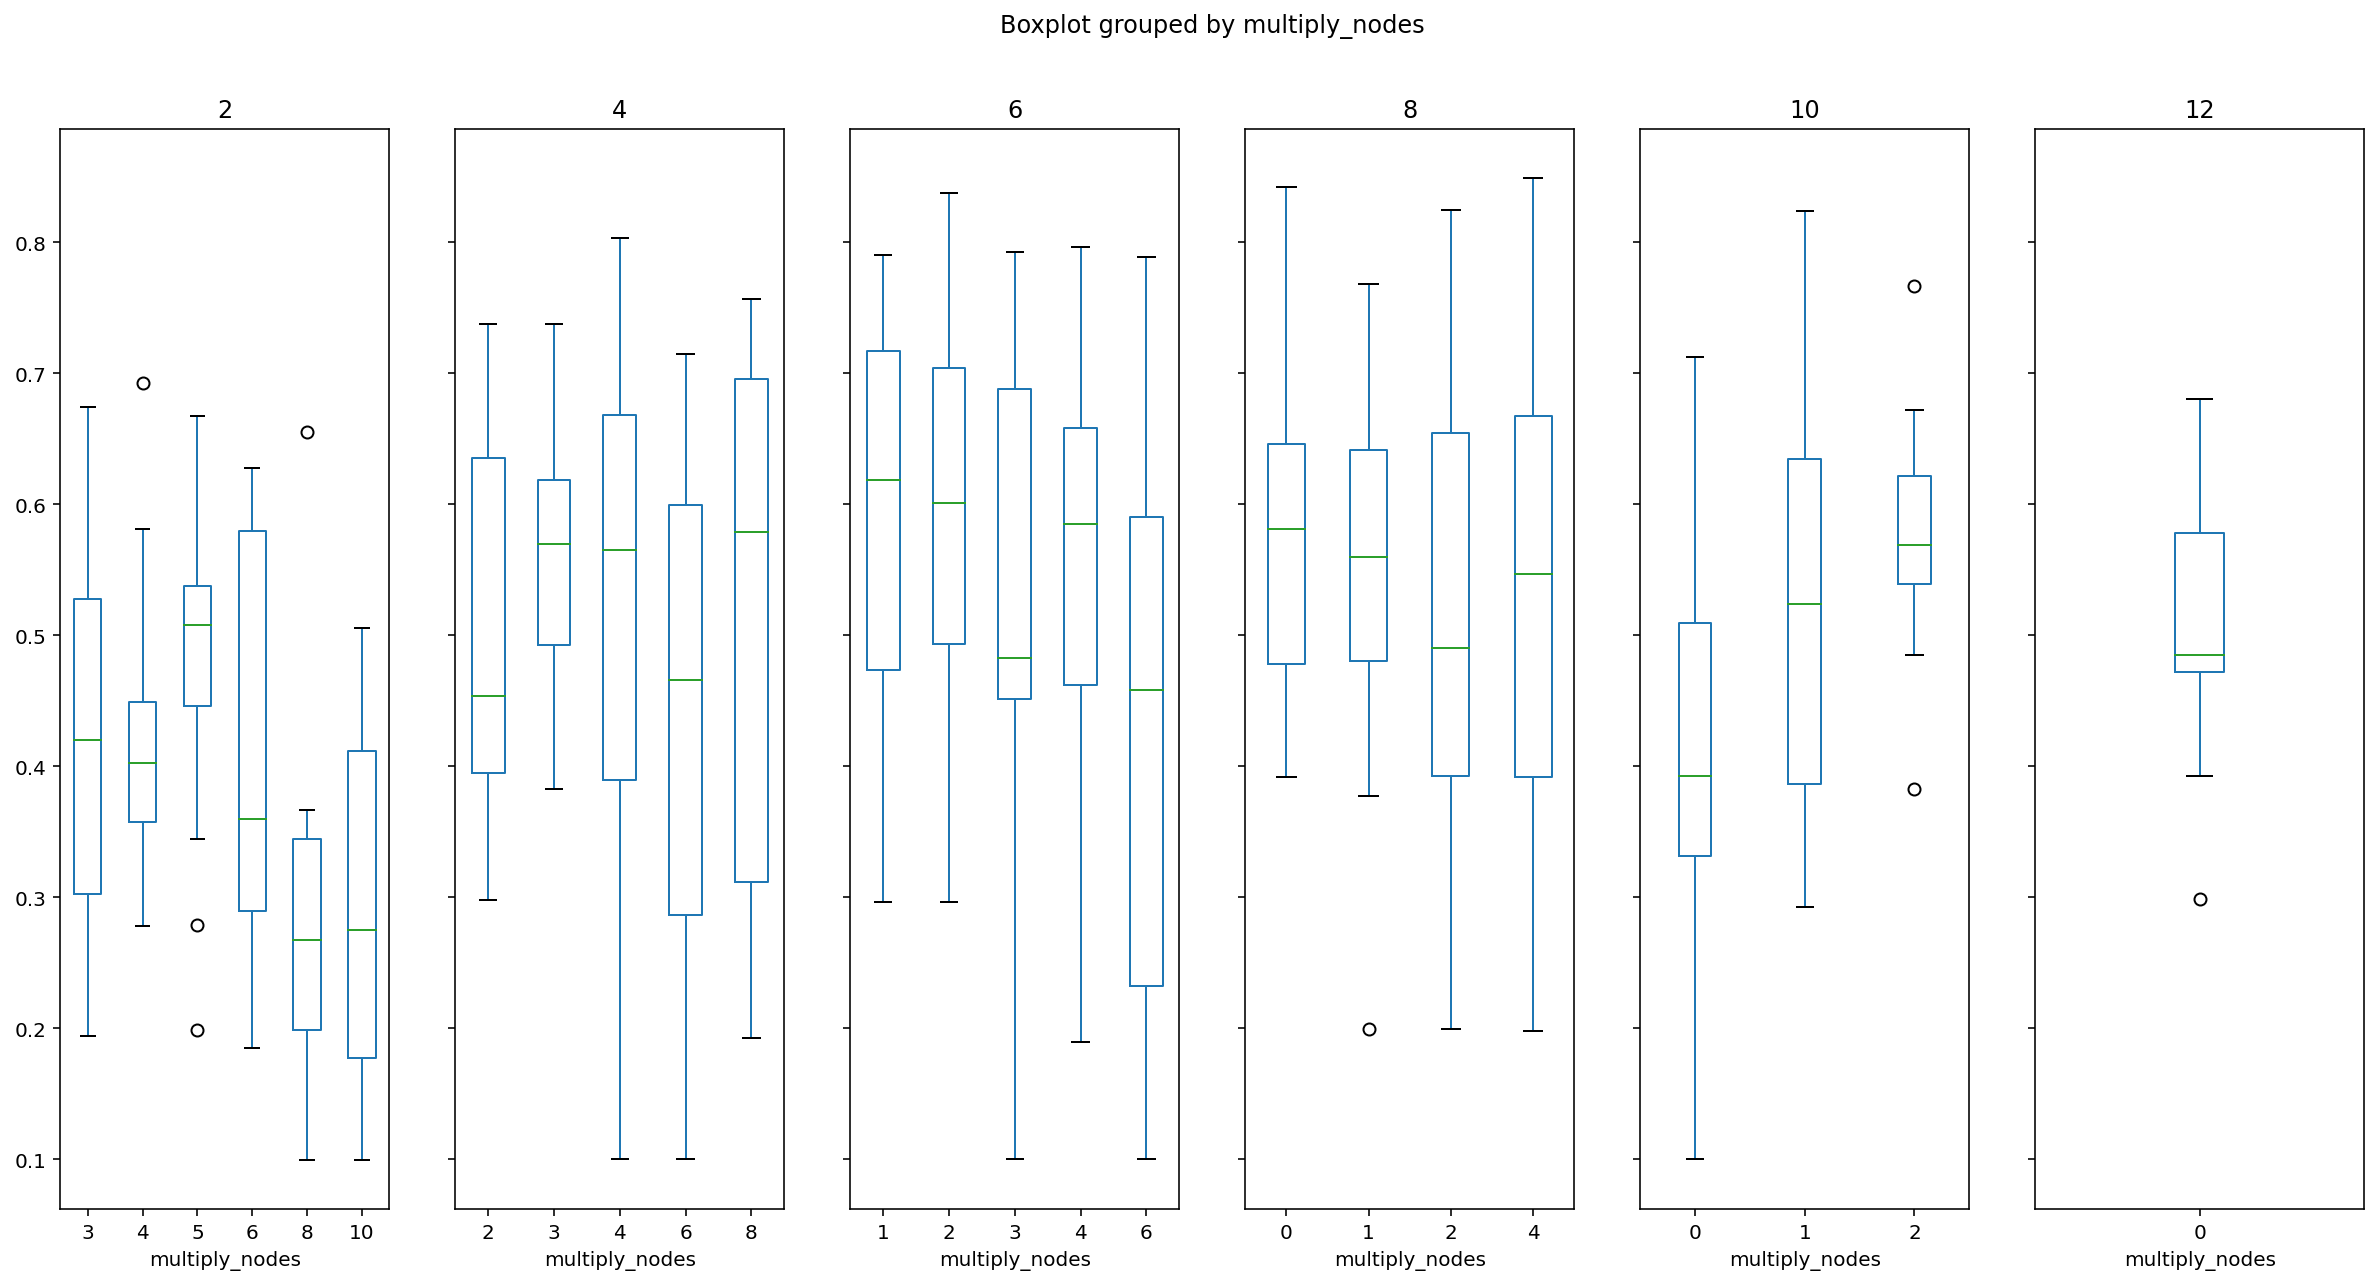

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,6, sharex=False, sharey=True, figsize=(20,10))

box = performance.groupby(['dense_nodes']).boxplot(column='Accuracy', by='multiply_nodes', grid=False, ax=ax)

# Results of Research Problem 2

After the experiment on this problem, I successfully learned clothing images from the Fashion MNIST data to about $\%87$ accuracy and obtained about $\%83$ accuracy when evaluated on a test dataset. Furthermore, I examined the argument of improving the efficiency of a network with a hybrid node. Because of the high variability in the learning process, I simulated five different accuracy results for 8, 10 and 12 complete single dense layer with varying epochs and compared with a single hybrid layer of different combinations assessing the claims made that $H(d,m) \ge D(d+2m)$ and $H(d,m) \ge D(d+m)$. The results obtained as presented in box plots were inconclusive with respect to the claims made.

# Recommendation
Observing the results from the experiments conducted in the second part of research problem 2, the claims made that $H(d,m) \ge D(d+2m)$ and $H(d,m) \ge D(d+m)$ in theory was not affirmed in practice. This may be due to the stochastic nature of learning process of the Fashion MNIST dataset, therefore different datasets are recommended to affirm these claims made in future works.

# Conclusion

# Reference
+ D. Yarotsky, Error bounds for approximations with deep ReLU networks, Neural Networks, 94 (2017), pp. 103--114. prop 3 on multiplication.